In [72]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import random
import math
from datetime import datetime

%matplotlib inline

In [73]:
dataset = pd.read_csv("NYCrimeSpot.csv" , sep=",", header = 0)
dataset.head(10)

,Unnamed: 0,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,HOUSING_PSA,JURISDICTION_CODE,KY_CD,LAW_CAT_CD,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,0,69,NaN,12/17/21,22:13:00,COMPLETED,NaN,NaN,101,FELONY,...,NaN,25-44,BLACK,M,1011203,174515,40.645647,-73.902876,"(40.64564719600002, -73.90287588699994)",POINT (-73.90287588699994 40.64564719600002)
1,1,113,NaN,12/17/21,6:21:00,COMPLETED,NaN,NaN,101,FELONY,...,NaN,25-44,BLACK,F,1043252,187998,40.682499,-73.787269,"(40.682499421000045, -73.78726915499993)",POINT (-73.78726915499993 40.682499421000045)
2,2,113,NaN,12/13/21,20:05:00,COMPLETED,NaN,NaN,101,FELONY,...,NaN,25-44,BLACK,M,1042087,190443,40.689218,-73.791449,"(40.689218058000044, -73.79144856999993)",POINT (-73.79144856999993 40.689218058000044)
3,3,52,BRONX,12/7/21,22:49:00,COMPLETED,NaN,0.0,118,FELONY,...,NaN,UNKNOWN,UNKNOWN,E,1017088,260895,40.882718,-73.881247,"(40.88271780700006, -73.88124724999993)",POINT (-73.88124724999993 40.88271780700006)
4,4,113,NaN,12/6/21,17:25:00,COMPLETED,NaN,NaN,101,FELONY,...,NaN,25-44,BLACK,M,1046176,193100,40.696483,-73.776680,"(40.69648322200004, -73.77667979199998)",POINT (-73.77667979199998 40.69648322200004)
5,5,44,NaN,12/5/21,22:16:00,COMPLETED,NaN,NaN,101,FELONY,...,NaN,18-24,BLACK HISPANIC,M,1007687,246038,40.841970,-73.915297,"(40.84196981100007, -73.91529662699998)",POINT (-73.91529662699998 40.84196981100007)
6,6,47,BRONX,12/1/21,0:01:00,COMPLETED,NaN,0.0,118,FELONY,...,NaN,UNKNOWN,UNKNOWN,E,1018222,265545,40.895476,-73.877123,"(40.89547629000003, -73.87712270799993)",POINT (-73.87712270799993 40.89547629000003)
7,7,46,NaN,11/13/21,17:49:00,COMPLETED,NaN,NaN,101,FELONY,...,NaN,25-44,BLACK,F,1012119,252873,40.860717,-73.899250,"(40.86071697500005, -73.89925031699994)",POINT (-73.89925031699994 40.86071697500005)
8,8,75,NaN,11/5/21,23:05:00,COMPLETED,NaN,NaN,101,FELONY,...,NaN,25-44,BLACK,M,1014207,185452,40.675657,-73.892002,"(40.67565718100008, -73.89200234699997)",POINT (-73.89200234699997 40.67565718100008)
9,9,73,NaN,10/28/21,23:55:00,COMPLETED,NaN,NaN,101,FELONY,...,NaN,25-44,BLACK,M,1008795,178153,40.655640,-73.911540,"(40.65563971300003, -73.91153990699996)",POINT (-73.91153990699996 40.65563971300003)


In [74]:
dataset.tail()

,Unnamed: 0,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,HOUSING_PSA,JURISDICTION_CODE,KY_CD,LAW_CAT_CD,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
449501,449501,60,BROOKLYN,1/8/21,7:00:00,COMPLETED,NaN,0.0,578,VIOLATION,...,NaN,45-64,WHITE,F,984003,149127,40.576003,-74.000891,"(40.57600335300003, -74.00089057799994)",POINT (-74.00089057799994 40.57600335300003)
449502,449502,83,BROOKLYN,1/2/21,4:50:00,COMPLETED,NaN,0.0,117,FELONY,...,NaN,UNKNOWN,UNKNOWN,E,1003229,194080,40.699369,-73.931555,"(40.69936940200005, -73.93155521999995)",POINT (-73.93155521999995 40.69936940200005)
449503,449503,49,BRONX,1/2/21,9:35:00,COMPLETED,NaN,0.0,341,MISDEMEANOR,...,NaN,UNKNOWN,UNKNOWN,D,1020845,250471,40.854092,-73.867718,"(40.854092353000055, -73.86771750999998)",POINT (-73.86771750999998 40.854092353000055)
449504,449504,101,QUEENS,1/6/21,19:40:00,COMPLETED,NaN,0.0,578,VIOLATION,...,NaN,45-64,WHITE HISPANIC,F,1055868,156522,40.596012,-73.742116,"(40.596011813000075, -73.74211638099996)",POINT (-73.74211638099996 40.596011813000075)
449505,449505,73,BROOKLYN,8/1/19,12:00:00,COMPLETED,NaN,0.0,109,FELONY,...,NaN,25-44,BLACK,F,1009023,181159,40.663890,-73.910707,"(40.66388988400007, -73.91070713999993)",POINT (-73.91070713999993 40.66388988400007)


In [75]:
dataset.dropna(subset =["BORO_NM","LAW_CAT_CD","HOUSING_PSA"])

,Unnamed: 0,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,HOUSING_PSA,JURISDICTION_CODE,KY_CD,LAW_CAT_CD,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
83,83,47,BRONX,12/24/21,7:10:00,COMPLETED,897.0,2.0,578,VIOLATION,...,NaN,25-44,WHITE HISPANIC,F,1026855,262287,40.886497,-73.845917,"(40.88649666100008, -73.84591741799994)",POINT (-73.84591741799994 40.88649666100008)
86,86,23,MANHATTAN,12/30/21,12:10:00,COMPLETED,640.0,2.0,126,FELONY,...,NaN,UNKNOWN,UNKNOWN,E,999435,228963,40.795122,-73.945159,"(40.79512178500005, -73.94515921299995)",POINT (-73.94515921299995 40.79512178500005)
108,108,47,BRONX,12/25/21,17:00:00,COMPLETED,897.0,2.0,121,FELONY,...,NaN,45-64,BLACK,F,1027563,261069,40.883150,-73.843365,"(40.88315019000004, -73.84336476799997)",POINT (-73.84336476799997 40.88315019000004)
112,112,90,BROOKLYN,12/28/21,1:18:00,COMPLETED,453.0,2.0,361,MISDEMEANOR,...,NaN,18-24,WHITE HISPANIC,F,1001438,194908,40.701646,-73.938012,"(40.70164572700002, -73.93801220099994)",POINT (-73.93801220099994 40.70164572700002)
128,128,101,QUEENS,12/26/21,19:08:00,COMPLETED,34703.0,2.0,126,FELONY,...,NaN,25-44,WHITE HISPANIC,F,1052923,160645,40.607352,-73.752679,"(40.60735187500006, -73.75267888499997)",POINT (-73.75267888499997 40.60735187500006)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449464,449464,73,BROOKLYN,12/2/20,12:03:00,COMPLETED,339.0,2.0,340,MISDEMEANOR,...,NaN,45-64,UNKNOWN,M,1010375,181718,40.665420,-73.905832,"(40.66542032900003, -73.90583169299998)",POINT (-73.90583169299998 40.66542032900003)
449484,449484,122,STATEN ISLAND,1/6/21,14:00:00,COMPLETED,1293.0,2.0,344,MISDEMEANOR,...,NaN,45-64,WHITE HISPANIC,F,950616,160989,40.608498,-74.121135,"(40.60849833800006, -74.12113465499993)",POINT (-74.12113465499993 40.60849833800006)
449489,449489,101,QUEENS,1/1/21,5:00:00,COMPLETED,35139.0,2.0,351,MISDEMEANOR,...,NaN,25-44,UNKNOWN,M,1043643,155650,40.593709,-73.786144,"(40.593708708000065, -73.78614413999998)",POINT (-73.78614413999998 40.593708708000065)
449492,449492,73,BROOKLYN,12/1/19,15:00:00,COMPLETED,415.0,2.0,106,FELONY,...,NaN,<18,WHITE HISPANIC,M,1010838,181519,40.664873,-73.904164,"(40.66487273900003, -73.90416355699995)",POINT (-73.90416355699995 40.66487273900003)


In [76]:
dataset["CMPLNT_FR_DT"] = pd.to_datetime(dataset["CMPLNT_FR_DT"],format = "%m/%d/%Y",errors="coerce")
dataset.index = dataset["CMPLNT_FR_DT"]
dataset[dataset.OFNS_DESC == "GRAND LARCENY"]
dataset

,Unnamed: 0,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CRM_ATPT_CPTD_CD,HOUSING_PSA,JURISDICTION_CODE,KY_CD,LAW_CAT_CD,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
CMPLNT_FR_DT,,,,,,,,,,,,,,,,,,,,,
NaT,0,69,NaN,NaT,22:13:00,COMPLETED,NaN,NaN,101,FELONY,...,NaN,25-44,BLACK,M,1011203,174515,40.645647,-73.902876,"(40.64564719600002, -73.90287588699994)",POINT (-73.90287588699994 40.64564719600002)
NaT,1,113,NaN,NaT,6:21:00,COMPLETED,NaN,NaN,101,FELONY,...,NaN,25-44,BLACK,F,1043252,187998,40.682499,-73.787269,"(40.682499421000045, -73.78726915499993)",POINT (-73.78726915499993 40.682499421000045)
NaT,2,113,NaN,NaT,20:05:00,COMPLETED,NaN,NaN,101,FELONY,...,NaN,25-44,BLACK,M,1042087,190443,40.689218,-73.791449,"(40.689218058000044, -73.79144856999993)",POINT (-73.79144856999993 40.689218058000044)
NaT,3,52,BRONX,NaT,22:49:00,COMPLETED,NaN,0.0,118,FELONY,...,NaN,UNKNOWN,UNKNOWN,E,1017088,260895,40.882718,-73.881247,"(40.88271780700006, -73.88124724999993)",POINT (-73.88124724999993 40.88271780700006)
NaT,4,113,NaN,NaT,17:25:00,COMPLETED,NaN,NaN,101,FELONY,...,NaN,25-44,BLACK,M,1046176,193100,40.696483,-73.776680,"(40.69648322200004, -73.77667979199998)",POINT (-73.77667979199998 40.69648322200004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,449501,60,BROOKLYN,NaT,7:00:00,COMPLETED,NaN,0.0,578,VIOLATION,...,NaN,45-64,WHITE,F,984003,149127,40.576003,-74.000891,"(40.57600335300003, -74.00089057799994)",POINT (-74.00089057799994 40.57600335300003)
NaT,449502,83,BROOKLYN,NaT,4:50:00,COMPLETED,NaN,0.0,117,FELONY,...,NaN,UNKNOWN,UNKNOWN,E,1003229,194080,40.699369,-73.931555,"(40.69936940200005, -73.93155521999995)",POINT (-73.93155521999995 40.69936940200005)
NaT,449503,49,BRONX,NaT,9:35:00,COMPLETED,NaN,0.0,341,MISDEMEANOR,...,NaN,UNKNOWN,UNKNOWN,D,1020845,250471,40.854092,-73.867718,"(40.854092353000055, -73.86771750999998)",POINT (-73.86771750999998 40.854092353000055)


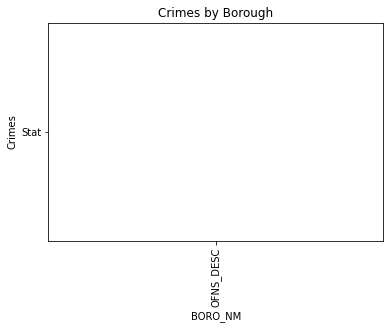

In [77]:
plt.bar("OFNS_DESC", "Stat",color = "blue")
plt.xlabel("BORO_NM")
plt.xticks(rotation = 90)
plt.ylabel("Crimes")
plt.title("Crimes by Borough")
plt.show()

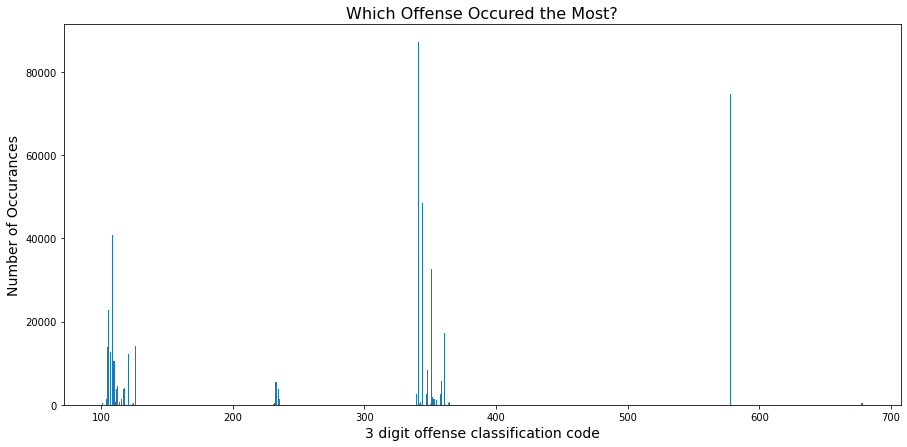

In [78]:
dig_offense_code = {}
code_meaning = {}

dig_offense_code = dataset['KY_CD'].value_counts().to_dict()
code_meaning = dataset['OFNS_DESC'].value_counts().to_dict()

plt.figure(figsize=[15,7])
plt.bar(list(dig_offense_code.keys()), list(dig_offense_code.values()))
plt.xlabel('3 digit offense classification code', size=14)
plt.ylabel('Number of Occurances', size=14)
plt.title('Which Offense Occured the Most?', size=16)

plt.show()

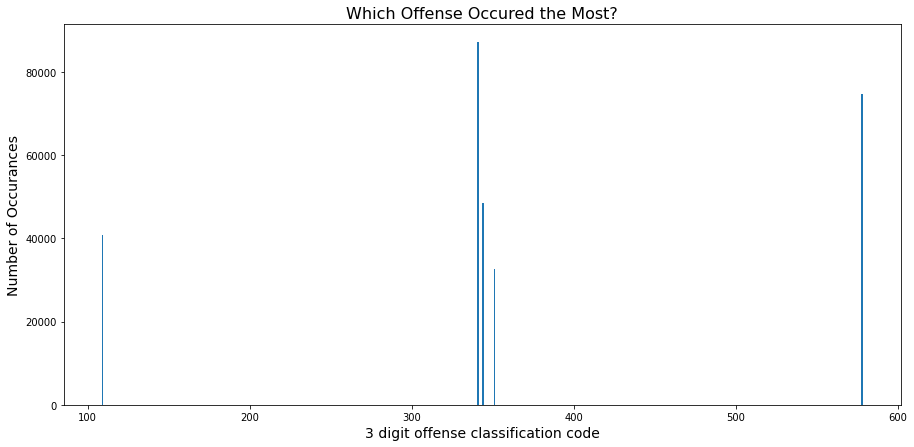

In [79]:
updated_dig_offense = {key: value for key, value in dig_offense_code.items() if value > 25000 }

        
plt.figure(figsize=[15,7])
plt.bar(list(updated_dig_offense.keys()), list(updated_dig_offense.values()))
plt.xlabel('3 digit offense classification code', size=14)
plt.ylabel('Number of Occurances', size=14)
plt.title('Which Offense Occured the Most?', size=16)

plt.show()

In [80]:
for key, meaning in zip(updated_dig_offense.keys(), code_meaning.keys()):
    print(key, ':', meaning)

341 : PETIT LARCENY
578 : HARRASSMENT 2
344 : ASSAULT 3 & RELATED OFFENSES
109 : CRIMINAL MISCHIEF & RELATED OF
351 : GRAND LARCENY


In [81]:
from collections import defaultdict

months_by_count = {i+1: 0 for i in range(12)}
days_by_count = {i+1: 0 for i in range(31)}
years_by_count = defaultdict(int)
day_of_year = {}

for i in dataset['CMPLNT_FR_DT']:
    if ( isinstance(i ,str) ):
        dates = i.split('/')
        months_by_count[int(dates[0])] += 1
        days_by_count[int(dates[1])] += 1
        years_by_count[int(dates[2])] += 1
        
        day_of_year[dates[0] + '/' + dates[1] ] = day_of_year.get(dates[0] + '/' + dates[1] ,0) + 1

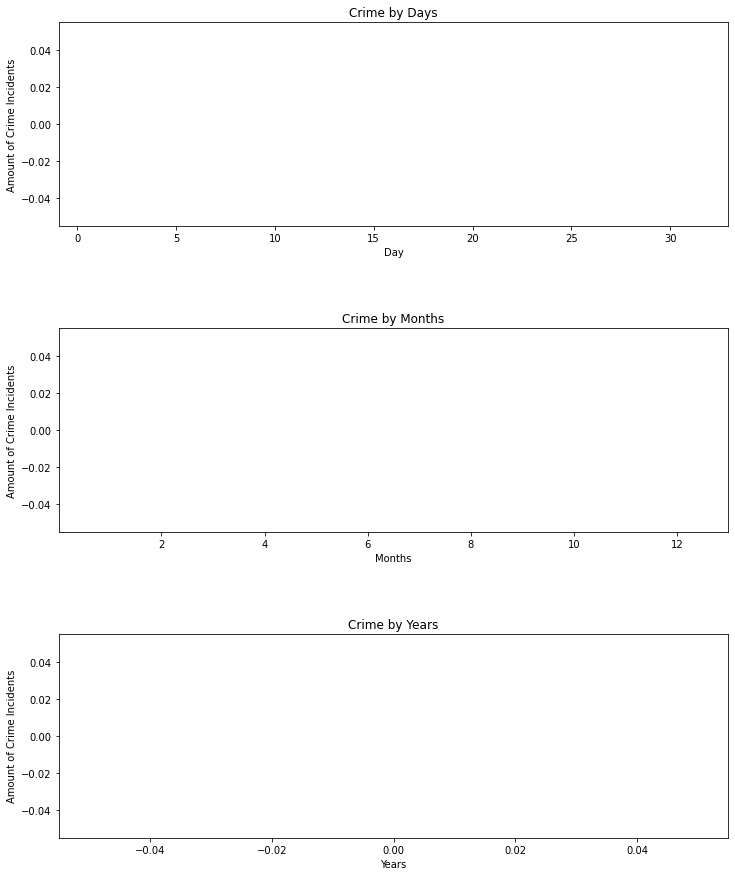

In [96]:
plt.figure(figsize=[12,15])
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,1)
plt.title('Crime by Days')
plt.xlabel('Day')
plt.ylabel('Amount of Crime Incidents')
plt.bar(days_by_count.keys(), days_by_count.values())

plt.subplot(3,1,2)
plt.title('Crime by Months')
plt.xlabel('Months')
plt.ylabel('Amount of Crime Incidents')
plt.bar(months_by_count.keys(), months_by_count.values())

plt.subplot(3,1,3)
plt.title('Crime by Years')
plt.xlabel('Years')
plt.ylabel('Amount of Crime Incidents')
plt.plot(years_by_count.keys(), years_by_count.values())

plt.show()

In [ ]:
$zipCodes = [
    '00601' => [ 'lat' => 18.180555, 'lng' =>  -66.749961],
    '00602' => [ 'lat' => 18.361945, 'lng' =>  -67.175597],
    '00603' => [ 'lat' => 18.455183, 'lng' =>  -67.119887],
    '00606' => [ 'lat' => 18.158345, 'lng' =>  -66.932911],
    '00610' => [ 'lat' => 18.295366, 'lng' =>  -67.125135],
    '00612' => [ 'lat' => 18.402253, 'lng' =>  -66.711397],
    '00616' => [ 'lat' => 18.420412, 'lng' =>  -66.671979],
    '00617' => [ 'lat' => 18.445147, 'lng' =>  -66.559696],
    '00622' => [ 'lat' => 17.991245, 'lng' =>  -67.153993],
    '00623' => [ 'lat' => 18.083361, 'lng' =>  -67.153897],
    '00624' => [ 'lat' => 18.064919, 'lng' =>  -66.716683],
    '00627' => [ 'lat' => 18.412600, 'lng' =>  -66.863926],
    '00631' => [ 'lat' => 18.190607, 'lng' =>  -66.832041],
    '00637' => [ 'lat' => 18.076713, 'lng' =>  -66.947389],
    '00638' => [ 'lat' => 18.295913, 'lng' =>  -66.515588],
    '00641' => [ 'lat' => 18.263085, 'lng' =>  -66.712985],
    '00646' => [ 'lat' => 18.433150, 'lng' =>  -66.285875],
    '00647' => [ 'lat' => 17.963613, 'lng' =>  -66.947127],
    '00650' => [ 'lat' => 18.349416, 'lng' =>  -66.578079],
    '00652' => [ 'lat' => 18.448452, 'lng' =>  -66.594127],
    '00653' => [ 'lat' => 17.985033, 'lng' =>  -66.886536],
    '00656' => [ 'lat' => 18.053539, 'lng' =>  -66.792931],
    '00659' => [ 'lat' => 18.407226, 'lng' =>  -66.808999],
    '00660' => [ 'lat' => 18.134695, 'lng' =>  -67.116199],
    '00662' => [ 'lat' => 18.468320, 'lng' =>  -67.015781],
    '00664' => [ 'lat' => 18.210330, 'lng' =>  -66.591616],
    '00667' => [ 'lat' => 18.003422, 'lng' =>  -67.035810],
    '00669' => [ 'lat' => 18.277102, 'lng' =>  -66.869645],
    '00670' => [ 'lat' => 18.240187, 'lng' =>  -66.988776],
    '00674' => [ 'lat' => 18.422908, 'lng' =>  -66.489337],
    '00676' => [ 'lat' => 18.377637, 'lng' =>  -67.079574],
    '00677' => [ 'lat' => 18.332568, 'lng' =>  -67.227022],
    '00678' => [ 'lat' => 18.434099, 'lng' =>  -66.927384],
    '00680' => [ 'lat' => 18.182055, 'lng' =>  -67.132502],
    '00682' => [ 'lat' => 18.221464, 'lng' =>  -67.156039],
    '00683' => [ 'lat' => 18.107800, 'lng' =>  -67.037263],
    '00685' => [ 'lat' => 18.332929, 'lng' =>  -66.959689],
    '00687' => [ 'lat' => 18.319026, 'lng' =>  -66.420557],
    '00688' => [ 'lat' => 18.382264, 'lng' =>  -66.626438],
    '00690' => [ 'lat' => 18.495510, 'lng' =>  -67.098671],
    '00692' => [ 'lat' => 18.410188, 'lng' =>  -66.336556],
    '00693' => [ 'lat' => 18.423000, 'lng' =>  -66.397232],
    '00694' => [ 'lat' => 18.482370, 'lng' =>  -66.391079],
    '00698' => [ 'lat' => 18.064848, 'lng' =>  -66.856319],
    '00703' => [ 'lat' => 18.248401, 'lng' =>  -66.130662],
    '00704' => [ 'lat' => 17.965770, 'lng' =>  -66.219555],
    '00705' => [ 'lat' => 18.128961, 'lng' =>  -66.266683],
    '00707' => [ 'lat' => 18.014055, 'lng' =>  -65.920751],
    '00714' => [ 'lat' => 18.003025, 'lng' =>  -66.046237],
    '00715' => [ 'lat' => 18.011233, 'lng' =>  -66.560065],
    '00716' => [ 'lat' => 17.992040, 'lng' =>  -66.605856],
    '00717' => [ 'lat' => 18.003222, 'lng' =>  -66.614037],
    '00718' => [ 'lat' => 18.231988, 'lng' =>  -65.759623],
    '00719' => [ 'lat' => 18.289927, 'lng' =>  -66.253440],
    '00720' => [ 'lat' => 18.217946, 'lng' =>  -66.428076],
    '00723' => [ 'lat' => 18.043498, 'lng' =>  -66.015479],
    '00725' => [ 'lat' => 18.218819, 'lng' =>  -66.042375],
    '00727' => [ 'lat' => 18.215308, 'lng' =>  -66.073565],
    '00728' => [ 'lat' => 17.989853, 'lng' =>  -66.664116],
    '00729' => [ 'lat' => 18.323585, 'lng' =>  -65.883206],
    '00730' => [ 'lat' => 18.030831, 'lng' =>  -66.616838],
    '00731' => [ 'lat' => 18.109947, 'lng' =>  -66.635622],
    '00735' => [ 'lat' => 18.252604, 'lng' =>  -65.682494],
    '00736' => [ 'lat' => 18.103624, 'lng' =>  -66.151667],
    '00738' => [ 'lat' => 18.304458, 'lng' =>  -65.698711],
    '00739' => [ 'lat' => 18.177233, 'lng' =>  -66.160645],
    '00740' => [ 'lat' => 18.331178, 'lng' =>  -65.634104],
    '00741' => [ 'lat' => 18.163855, 'lng' =>  -65.754042],
    '00745' => [ 'lat' => 18.352216, 'lng' =>  -65.817387],
    '00751' => [ 'lat' => 18.001317, 'lng' =>  -66.252183],
    '00754' => [ 'lat' => 18.147107, 'lng' =>  -65.976167],
    '00757' => [ 'lat' => 17.995441, 'lng' =>  -66.391334],
    '00765' => [ 'lat' => 18.130096, 'lng' =>  -65.439369],
    '00766' => [ 'lat' => 18.133196, 'lng' =>  -66.476916],
    '00767' => [ 'lat' => 18.069489, 'lng' =>  -65.896161],
    '00769' => [ 'lat' => 18.103800, 'lng' =>  -66.357586],
    '00771' => [ 'lat' => 18.187148, 'lng' =>  -65.871189],
    '00772' => [ 'lat' => 18.438969, 'lng' =>  -65.905174],
    '00773' => [ 'lat' => 18.342888, 'lng' =>  -65.723109],
    '00775' => [ 'lat' => 18.326599, 'lng' =>  -65.307720],
    '00777' => [ 'lat' => 18.224133, 'lng' =>  -65.908542],
    '00778' => [ 'lat' => 18.264076, 'lng' =>  -65.978510],
    '00780' => [ 'lat' => 18.102834, 'lng' =>  -66.568105],
    '00782' => [ 'lat' => 18.225708, 'lng' =>  -66.221633],
    '00783' => [ 'lat' => 18.303910, 'lng' =>  -66.326179],
    '00784' => [ 'lat' => 18.010714, 'lng' =>  -66.133615],
    '00786' => [ 'lat' => 18.155424, 'lng' =>  -66.229907],
    '00791' => [ 'lat' => 18.136782, 'lng' =>  -65.821476],
    '00794' => [ 'lat' => 18.198955, 'lng' =>  -66.309833],
    '00795' => [ 'lat' => 18.060494, 'lng' =>  -66.500624],
    '00801' => [ 'lat' => 18.350449, 'lng' =>  -64.973886],
    '00802' => [ 'lat' => 18.340862, 'lng' =>  -64.923479],
    '00820' => [ 'lat' => 17.743072, 'lng' =>  -64.686570],
    '00823' => [ 'lat' => 17.723541, 'lng' =>  -64.745932],
    '00824' => [ 'lat' => 17.744557, 'lng' =>  -64.682933],
    '00830' => [ 'lat' => 18.338560, 'lng' =>  -64.736533],
    '00831' => [ 'lat' => 18.327294, 'lng' =>  -64.786720],
    '00840' => [ 'lat' => 17.747872, 'lng' =>  -64.880695],
    '00841' => [ 'lat' => 17.768133, 'lng' =>  -64.807852],
    '00850' => [ 'lat' => 17.709936, 'lng' =>  -64.750099],
    '00851' => [ 'lat' => 17.732228, 'lng' =>  -64.770760],
    '00901' => [ 'lat' => 18.465369, 'lng' =>  -66.104613],
    '00906' => [ 'lat' => 18.464460, 'lng' =>  -66.094995],
    '00907' => [ 'lat' => 18.452553, 'lng' =>  -66.077838],
    '00909' => [ 'lat' => 18.441610, 'lng' =>  -66.067132],
    '00911' => [ 'lat' => 18.451159, 'lng' =>  -66.056199],
    '00912' => [ 'lat' => 18.445328, 'lng' =>  -66.060135],
    '00913' => [ 'lat' => 18.450002, 'lng' =>  -66.042656],
    '00915' => [ 'lat' => 18.437179, 'lng' =>  -66.045571],
    '00917' => [ 'lat' => 18.420674, 'lng' =>  -66.050105],
    '00918' => [ 'lat' => 18.421022, 'lng' =>  -66.065789],
    '00920' => [ 'lat' => 18.414292, 'lng' =>  -66.088042],
    '00921' => [ 'lat' => 18.392282, 'lng' =>  -66.088555],
    '00923' => [ 'lat' => 18.409307, 'lng' =>  -66.038888],
    '00924' => [ 'lat' => 18.399192, 'lng' =>  -66.012453],
    '00925' => [ 'lat' => 18.400296, 'lng' =>  -66.050602],
    '00926' => [ 'lat' => 18.345400, 'lng' =>  -66.051545],
    '00927' => [ 'lat' => 18.388011, 'lng' =>  -66.072089],
    '00934' => [ 'lat' => 18.411313, 'lng' =>  -66.124234],
    '00936' => [ 'lat' => 18.395463, 'lng' =>  -66.073772],
    '00949' => [ 'lat' => 18.430696, 'lng' =>  -66.212833],
    '00950' => [ 'lat' => 18.459699, 'lng' =>  -66.233101],
    '00951' => [ 'lat' => 18.427530, 'lng' =>  -66.253789],
    '00952' => [ 'lat' => 18.427448, 'lng' =>  -66.182026],
    '00953' => [ 'lat' => 18.360729, 'lng' =>  -66.251527],
    '00956' => [ 'lat' => 18.321137, 'lng' =>  -66.170419],
    '00957' => [ 'lat' => 18.368414, 'lng' =>  -66.187693],
    '00959' => [ 'lat' => 18.391820, 'lng' =>  -66.154564],
    '00960' => [ 'lat' => 18.416919, 'lng' =>  -66.145795],
    '00961' => [ 'lat' => 18.413286, 'lng' =>  -66.164617],
    '00962' => [ 'lat' => 18.444614, 'lng' =>  -66.148839],
    '00965' => [ 'lat' => 18.433757, 'lng' =>  -66.114752],
    '00966' => [ 'lat' => 18.401521, 'lng' =>  -66.117597],
    '00968' => [ 'lat' => 18.406085, 'lng' =>  -66.101232],
    '00969' => [ 'lat' => 18.368062, 'lng' =>  -66.108062],
    '00971' => [ 'lat' => 18.318884, 'lng' =>  -66.119190],
    '00976' => [ 'lat' => 18.336176, 'lng' =>  -65.994099],
    '00979' => [ 'lat' => 18.444394, 'lng' =>  -66.030036],
    '00982' => [ 'lat' => 18.411261, 'lng' =>  -65.992045],
    '00983' => [ 'lat' => 18.417816, 'lng' =>  -65.975819],
    '00985' => [ 'lat' => 18.410770, 'lng' =>  -65.947928],
    '00987' => [ 'lat' => 18.338161, 'lng' =>  -65.941083],
    '01001' => [ 'lat' => 42.062368, 'lng' =>  -72.625754],
    '01002' => [ 'lat' => 42.364061, 'lng' =>  -72.458739],
    '01003' => [ 'lat' => 42.389941, 'lng' =>  -72.524108],
    '01005' => [ 'lat' => 42.418848, 'lng' =>  -72.106598],
    '01007' => [ 'lat' => 42.279010, 'lng' =>  -72.400468],
    '01008' => [ 'lat' => 42.190144, 'lng' =>  -72.954350],
    '01009' => [ 'lat' => 42.211969, 'lng' =>  -72.341433],
    '01010' => [ 'lat' => 42.128176, 'lng' =>  -72.205352],
    '01011' => [ 'lat' => 42.300281, 'lng' =>  -72.968716],
    '01012' => [ 'lat' => 42.375425, 'lng' =>  -72.858192],
    '01013' => [ 'lat' => 42.154904, 'lng' =>  -72.602804],
    '01020' => [ 'lat' => 42.172602, 'lng' =>  -72.562073],
    '01022' => [ 'lat' => 42.197741, 'lng' =>  -72.542713],
    '01026' => [ 'lat' => 42.465495, 'lng' =>  -72.918267],
    '01027' => [ 'lat' => 42.295008, 'lng' =>  -72.751877],
    '01028' => [ 'lat' => 42.062378, 'lng' =>  -72.498111],
    '01029' => [ 'lat' => 42.193395, 'lng' =>  -73.044647],
    '01030' => [ 'lat' => 42.072925, 'lng' =>  -72.686972],
    '01031' => [ 'lat' => 42.329399, 'lng' =>  -72.198187],
    '01032' => [ 'lat' => 42.457613, 'lng' =>  -72.814780],
    '01033' => [ 'lat' => 42.244949, 'lng' =>  -72.500143],
    '01034' => [ 'lat' => 42.098676, 'lng' =>  -72.961564],
    '01035' => [ 'lat' => 42.356491, 'lng' =>  -72.568632],
    '01036' => [ 'lat' => 42.062946, 'lng' =>  -72.417297],
    '01037' => [ 'lat' => 42.372728, 'lng' =>  -72.195412],
    '01038' => [ 'lat' => 42.385496, 'lng' =>  -72.606929],
    '01039' => [ 'lat' => 42.404278, 'lng' =>  -72.688922],
    '01040' => [ 'lat' => 42.211656, 'lng' =>  -72.642448],
    '01050' => [ 'lat' => 42.286762, 'lng' =>  -72.869695],
    '01053' => [ 'lat' => 42.356301, 'lng' =>  -72.713584],
    '01054' => [ 'lat' => 42.468898, 'lng' =>  -72.484579],
    '01056' => [ 'lat' => 42.183577, 'lng' =>  -72.457812],
    '01057' => [ 'lat' => 42.093596, 'lng' =>  -72.321494],
    '01060' => [ 'lat' => 42.321488, 'lng' =>  -72.630588],
    '01062' => [ 'lat' => 42.328308, 'lng' =>  -72.703924],
    '01063' => [ 'lat' => 42.318882, 'lng' =>  -72.638530],
    '01066' => [ 'lat' => 42.406903, 'lng' =>  -72.655018],
    '01068' => [ 'lat' => 42.350862, 'lng' =>  -72.044248],
    '01069' => [ 'lat' => 42.187794, 'lng' =>  -72.308469],
    '01070' => [ 'lat' => 42.518446, 'lng' =>  -72.919017],
    '01071' => [ 'lat' => 42.160060, 'lng' =>  -72.873853],
    '01072' => [ 'lat' => 42.456968, 'lng' =>  -72.417244],
    '01073' => [ 'lat' => 42.226949, 'lng' =>  -72.741588],
    '01074' => [ 'lat' => 42.387603, 'lng' =>  -72.093230],
    '01075' => [ 'lat' => 42.256208, 'lng' =>  -72.581030],
    '01077' => [ 'lat' => 42.052570, 'lng' =>  -72.777353],
    '01079' => [ 'lat' => 42.197913, 'lng' =>  -72.329709],
    '01080' => [ 'lat' => 42.185727, 'lng' =>  -72.361558],
    '01081' => [ 'lat' => 42.061313, 'lng' =>  -72.234411],
    '01082' => [ 'lat' => 42.293533, 'lng' =>  -72.278599],
    '01083' => [ 'lat' => 42.203642, 'lng' =>  -72.194599],
    '01084' => [ 'lat' => 42.392370, 'lng' =>  -72.882235],
    '01085' => [ 'lat' => 42.153503, 'lng' =>  -72.771602],
    '01086' => [ 'lat' => 42.130446, 'lng' =>  -72.793967],
    '01088' => [ 'lat' => 42.391709, 'lng' =>  -72.646494],
    '01089' => [ 'lat' => 42.125451, 'lng' =>  -72.649734],
    '01092' => [ 'lat' => 42.191868, 'lng' =>  -72.235108],
    '01093' => [ 'lat' => 42.441943, 'lng' =>  -72.661817],
    '01094' => [ 'lat' => 42.359108, 'lng' =>  -72.136800],
    '01095' => [ 'lat' => 42.138499, 'lng' =>  -72.420715],
    '01096' => [ 'lat' => 42.397140, 'lng' =>  -72.763572],
    '01097' => [ 'lat' => 42.178038, 'lng' =>  -72.832612],
    '01098' => [ 'lat' => 42.394315, 'lng' =>  -72.943115],
    '01103' => [ 'lat' => 42.104106, 'lng' =>  -72.592027],
    '01104' => [ 'lat' => 42.134009, 'lng' =>  -72.565378],
    '01105' => [ 'lat' => 42.099958, 'lng' =>  -72.580765],
    '01106' => [ 'lat' => 42.047565, 'lng' =>  -72.571130],
    '01107' => [ 'lat' => 42.121060, 'lng' =>  -72.607068],
    '01108' => [ 'lat' => 42.080692, 'lng' =>  -72.560791],
    '01109' => [ 'lat' => 42.119674, 'lng' =>  -72.549726],
    '01118' => [ 'lat' => 42.094194, 'lng' =>  -72.525081],
    '01119' => [ 'lat' => 42.124978, 'lng' =>  -72.511210],
    '01128' => [ 'lat' => 42.092296, 'lng' =>  -72.489135],
    '01129' => [ 'lat' => 42.118690, 'lng' =>  -72.488200],
    '01151' => [ 'lat' => 42.151860, 'lng' =>  -72.509131],
    '01199' => [ 'lat' => 42.120563, 'lng' =>  -72.604468],
    '01201' => [ 'lat' => 42.448236, 'lng' =>  -73.273727],
    '01220' => [ 'lat' => 42.623799, 'lng' =>  -73.116736],
    '01222' => [ 'lat' => 42.058703, 'lng' =>  -73.322175],
    '01223' => [ 'lat' => 42.312225, 'lng' =>  -73.110124],
    '01224' => [ 'lat' => 42.513163, 'lng' =>  -73.195743],
    '01225' => [ 'lat' => 42.563401, 'lng' =>  -73.153335],
    '01226' => [ 'lat' => 42.481119, 'lng' =>  -73.135073],
    '01229' => [ 'lat' => 42.276338, 'lng' =>  -73.335896],
    '01230' => [ 'lat' => 42.173192, 'lng' =>  -73.324283],
    '01235' => [ 'lat' => 42.425676, 'lng' =>  -73.063012],
    '01236' => [ 'lat' => 42.266496, 'lng' =>  -73.378393],
    '01237' => [ 'lat' => 42.547818, 'lng' =>  -73.268033],
    '01238' => [ 'lat' => 42.297501, 'lng' =>  -73.230148],
    '01240' => [ 'lat' => 42.367858, 'lng' =>  -73.269763],
    '01242' => [ 'lat' => 42.333734, 'lng' =>  -73.249199],
    '01243' => [ 'lat' => 42.350122, 'lng' =>  -73.024112],
    '01244' => [ 'lat' => 42.118094, 'lng' =>  -73.257497],
    '01245' => [ 'lat' => 42.186893, 'lng' =>  -73.223105],
    '01247' => [ 'lat' => 42.698526, 'lng' =>  -73.084300],
    '01253' => [ 'lat' => 42.206683, 'lng' =>  -73.113214],
    '01254' => [ 'lat' => 42.382019, 'lng' =>  -73.365492],
    '01255' => [ 'lat' => 42.107496, 'lng' =>  -73.118607],
    '01256' => [ 'lat' => 42.594166, 'lng' =>  -73.022320],
    '01257' => [ 'lat' => 42.085244, 'lng' =>  -73.367483],
    '01258' => [ 'lat' => 42.109280, 'lng' =>  -73.462886],
    '01259' => [ 'lat' => 42.075469, 'lng' =>  -73.234376],
    '01260' => [ 'lat' => 42.295696, 'lng' =>  -73.342543],
    '01262' => [ 'lat' => 42.292202, 'lng' =>  -73.319209],
    '01264' => [ 'lat' => 42.231590, 'lng' =>  -73.202428],
    '01266' => [ 'lat' => 42.312354, 'lng' =>  -73.388044],
    '01267' => [ 'lat' => 42.671617, 'lng' =>  -73.246981],
    '01270' => [ 'lat' => 42.515272, 'lng' =>  -73.031166],
    '01301' => [ 'lat' => 42.626761, 'lng' =>  -72.601530],
    '01330' => [ 'lat' => 42.513947, 'lng' =>  -72.821517],
    '01331' => [ 'lat' => 42.562408, 'lng' =>  -72.191080],
    '01337' => [ 'lat' => 42.689307, 'lng' =>  -72.582249],
    '01338' => [ 'lat' => 42.572604, 'lng' =>  -72.824306],
    '01339' => [ 'lat' => 42.603776, 'lng' =>  -72.889644],
    '01340' => [ 'lat' => 42.694731, 'lng' =>  -72.710956],
    '01341' => [ 'lat' => 42.496937, 'lng' =>  -72.709414],
    '01342' => [ 'lat' => 42.543889, 'lng' =>  -72.609458],
    '01343' => [ 'lat' => 42.657625, 'lng' =>  -72.978933],
    '01344' => [ 'lat' => 42.613418, 'lng' =>  -72.426427],
    '01346' => [ 'lat' => 42.693275, 'lng' =>  -72.823113],
    '01347' => [ 'lat' => 42.559294, 'lng' =>  -72.518753],
    '01349' => [ 'lat' => 42.563061, 'lng' =>  -72.482122],
    '01350' => [ 'lat' => 42.727772, 'lng' =>  -72.985346],
    '01351' => [ 'lat' => 42.539880, 'lng' =>  -72.521689],
    '01354' => [ 'lat' => 42.624076, 'lng' =>  -72.508643],
    '01355' => [ 'lat' => 42.458551, 'lng' =>  -72.327191],
    '01360' => [ 'lat' => 42.677091, 'lng' =>  -72.453876],
    '01364' => [ 'lat' => 42.605437, 'lng' =>  -72.292074],
    '01366' => [ 'lat' => 42.475621, 'lng' =>  -72.192468],
    '01367' => [ 'lat' => 42.695532, 'lng' =>  -72.909148],
    '01368' => [ 'lat' => 42.679456, 'lng' =>  -72.176935],
    '01370' => [ 'lat' => 42.593338, 'lng' =>  -72.726941],
    '01373' => [ 'lat' => 42.475481, 'lng' =>  -72.615403],
    '01375' => [ 'lat' => 42.466691, 'lng' =>  -72.546751],
    '01376' => [ 'lat' => 42.595280, 'lng' =>  -72.555002],
    '01378' => [ 'lat' => 42.673533, 'lng' =>  -72.353213],
    '01379' => [ 'lat' => 42.556310, 'lng' =>  -72.407148],
    '01420' => [ 'lat' => 42.584925, 'lng' =>  -71.816862],
    '01430' => [ 'lat' => 42.657005, 'lng' =>  -71.923442],
    '01431' => [ 'lat' => 42.676293, 'lng' =>  -71.832523],
    '01432' => [ 'lat' => 42.566573, 'lng' =>  -71.575135],
    '01434' => [ 'lat' => 42.538903, 'lng' =>  -71.612027],
    '01436' => [ 'lat' => 42.602059, 'lng' =>  -72.087015],
    '01438' => [ 'lat' => 42.562243, 'lng' =>  -72.031402],
    '01440' => [ 'lat' => 42.584206, 'lng' =>  -71.988737],
    '01450' => [ 'lat' => 42.611760, 'lng' =>  -71.565269],
    '01451' => [ 'lat' => 42.501908, 'lng' =>  -71.568201],
    '01452' => [ 'lat' => 42.489598, 'lng' =>  -72.002878],
    '01453' => [ 'lat' => 42.519977, 'lng' =>  -71.763202],
    '01460' => [ 'lat' => 42.535931, 'lng' =>  -71.490569],
    '01462' => [ 'lat' => 42.582607, 'lng' =>  -71.720464],
    '01463' => [ 'lat' => 42.670643, 'lng' =>  -71.602858],
    '01464' => [ 'lat' => 42.573654, 'lng' =>  -71.640986],
    '01467' => [ 'lat' => 42.489646, 'lng' =>  -71.609577],
    '01468' => [ 'lat' => 42.542767, 'lng' =>  -72.068345],
    '01469' => [ 'lat' => 42.664828, 'lng' =>  -71.695087],
    '01473' => [ 'lat' => 42.554600, 'lng' =>  -71.905440],
    '01474' => [ 'lat' => 42.669685, 'lng' =>  -71.752751],
    '01475' => [ 'lat' => 42.668160, 'lng' =>  -72.055644],
    '01501' => [ 'lat' => 42.198708, 'lng' =>  -71.846006],
    '01503' => [ 'lat' => 42.384929, 'lng' =>  -71.633889],
    '01504' => [ 'lat' => 42.039991, 'lng' =>  -71.532406],
    '01505' => [ 'lat' => 42.355049, 'lng' =>  -71.716157],
    '01506' => [ 'lat' => 42.180788, 'lng' =>  -72.107891],
    '01507' => [ 'lat' => 42.133935, 'lng' =>  -71.968025],
    '01510' => [ 'lat' => 42.411887, 'lng' =>  -71.690005],
    '01515' => [ 'lat' => 42.209682, 'lng' =>  -72.040178],
    '01516' => [ 'lat' => 42.053072, 'lng' =>  -71.752241],
    '01518' => [ 'lat' => 42.127477, 'lng' =>  -72.118818],
    '01519' => [ 'lat' => 42.203404, 'lng' =>  -71.679739],
    '01520' => [ 'lat' => 42.336372, 'lng' =>  -71.850626],
    '01521' => [ 'lat' => 42.046799, 'lng' =>  -72.180144],
    '01522' => [ 'lat' => 42.375634, 'lng' =>  -71.867382],
    '01523' => [ 'lat' => 42.483569, 'lng' =>  -71.675585],
    '01524' => [ 'lat' => 42.249603, 'lng' =>  -71.919217],
    '01525' => [ 'lat' => 42.106794, 'lng' =>  -71.630518],
    '01527' => [ 'lat' => 42.192246, 'lng' =>  -71.777649],
    '01529' => [ 'lat' => 42.036642, 'lng' =>  -71.578779],
    '01531' => [ 'lat' => 42.319125, 'lng' =>  -72.130814],
    '01532' => [ 'lat' => 42.323342, 'lng' =>  -71.646236],
    '01534' => [ 'lat' => 42.142074, 'lng' =>  -71.643348],
    '01535' => [ 'lat' => 42.267564, 'lng' =>  -72.066876],
    '01536' => [ 'lat' => 42.231309, 'lng' =>  -71.692642],
    '01537' => [ 'lat' => 42.158966, 'lng' =>  -71.897051],
    '01540' => [ 'lat' => 42.116263, 'lng' =>  -71.857465],
    '01541' => [ 'lat' => 42.454125, 'lng' =>  -71.877540],
    '01542' => [ 'lat' => 42.204251, 'lng' =>  -71.908907],
    '01543' => [ 'lat' => 42.388285, 'lng' =>  -71.969865],
    '01545' => [ 'lat' => 42.284767, 'lng' =>  -71.714228],
    '01550' => [ 'lat' => 42.059737, 'lng' =>  -72.033908],
    '01560' => [ 'lat' => 42.175395, 'lng' =>  -71.674223],
    '01561' => [ 'lat' => 42.443970, 'lng' =>  -71.685583],
    '01562' => [ 'lat' => 42.247211, 'lng' =>  -71.991867],
    '01564' => [ 'lat' => 42.447924, 'lng' =>  -71.776045],
    '01566' => [ 'lat' => 42.103214, 'lng' =>  -72.079545],
    '01568' => [ 'lat' => 42.176526, 'lng' =>  -71.603588],
    '01569' => [ 'lat' => 42.055930, 'lng' =>  -71.631232],
    '01570' => [ 'lat' => 42.047532, 'lng' =>  -71.846952],
    '01571' => [ 'lat' => 42.053778, 'lng' =>  -71.935075],
    '01581' => [ 'lat' => 42.268426, 'lng' =>  -71.613309],
    '01583' => [ 'lat' => 42.369417, 'lng' =>  -71.785036],
    '01585' => [ 'lat' => 42.240796, 'lng' =>  -72.162645],
    '01588' => [ 'lat' => 42.118794, 'lng' =>  -71.672494],
    '01590' => [ 'lat' => 42.132051, 'lng' =>  -71.750318],
    '01602' => [ 'lat' => 42.269189, 'lng' =>  -71.850728],
    '01603' => [ 'lat' => 42.243826, 'lng' =>  -71.843569],
    '01604' => [ 'lat' => 42.253254, 'lng' =>  -71.767957],
    '01605' => [ 'lat' => 42.289683, 'lng' =>  -71.787793],
    '01606' => [ 'lat' => 42.315249, 'lng' =>  -71.795741],
    '01607' => [ 'lat' => 42.225974, 'lng' =>  -71.788894],
    '01608' => [ 'lat' => 42.261980, 'lng' =>  -71.801462],
    '01609' => [ 'lat' => 42.285114, 'lng' =>  -71.829987],
    '01610' => [ 'lat' => 42.247049, 'lng' =>  -71.808366],
    '01611' => [ 'lat' => 42.237604, 'lng' =>  -71.875838],
    '01612' => [ 'lat' => 42.296798, 'lng' =>  -71.928991],
    '01701' => [ 'lat' => 42.319587, 'lng' =>  -71.442800],
    '01702' => [ 'lat' => 42.282379, 'lng' =>  -71.436621],
    '01718' => [ 'lat' => 42.519816, 'lng' =>  -71.429283],
    '01719' => [ 'lat' => 42.485985, 'lng' =>  -71.520985],
    '01720' => [ 'lat' => 42.483953, 'lng' =>  -71.438495],
    '01721' => [ 'lat' => 42.257755, 'lng' =>  -71.473526],
    '01730' => [ 'lat' => 42.499295, 'lng' =>  -71.281889],
    '01731' => [ 'lat' => 42.456748, 'lng' =>  -71.279484],
    '01740' => [ 'lat' => 42.439941, 'lng' =>  -71.601879],
    '01741' => [ 'lat' => 42.536620, 'lng' =>  -71.361832],
    '01742' => [ 'lat' => 42.462911, 'lng' =>  -71.364496],
    '01745' => [ 'lat' => 42.292114, 'lng' =>  -71.499197],
    '01746' => [ 'lat' => 42.195951, 'lng' =>  -71.453430],
    '01747' => [ 'lat' => 42.123007, 'lng' =>  -71.531404],
    '01748' => [ 'lat' => 42.224096, 'lng' =>  -71.540489],
    '01749' => [ 'lat' => 42.389071, 'lng' =>  -71.545864],
    '01752' => [ 'lat' => 42.349617, 'lng' =>  -71.547214],
    '01754' => [ 'lat' => 42.425955, 'lng' =>  -71.456256],
    '01756' => [ 'lat' => 42.093870, 'lng' =>  -71.544519],
    '01757' => [ 'lat' => 42.158692, 'lng' =>  -71.521419],
    '01760' => [ 'lat' => 42.284822, 'lng' =>  -71.348811],
    '01770' => [ 'lat' => 42.231947, 'lng' =>  -71.372963],
    '01772' => [ 'lat' => 42.302877, 'lng' =>  -71.530828],
    '01773' => [ 'lat' => 42.425506, 'lng' =>  -71.310812],
    '01775' => [ 'lat' => 42.429688, 'lng' =>  -71.512514],
    '01776' => [ 'lat' => 42.383367, 'lng' =>  -71.421070],
    '01778' => [ 'lat' => 42.343687, 'lng' =>  -71.381186],
    '01801' => [ 'lat' => 42.488769, 'lng' =>  -71.154438],
    '01803' => [ 'lat' => 42.503227, 'lng' =>  -71.201713],
    '01810' => [ 'lat' => 42.648044, 'lng' =>  -71.161751],
    '01821' => [ 'lat' => 42.549330, 'lng' =>  -71.251725],
    '01824' => [ 'lat' => 42.590790, 'lng' =>  -71.355182],
    '01826' => [ 'lat' => 42.679723, 'lng' =>  -71.300680],
    '01827' => [ 'lat' => 42.676149, 'lng' =>  -71.499772],
    '01830' => [ 'lat' => 42.796313, 'lng' =>  -71.053436],
    '01832' => [ 'lat' => 42.791114, 'lng' =>  -71.132859],
    '01833' => [ 'lat' => 42.727879, 'lng' =>  -70.982036],
    '01834' => [ 'lat' => 42.753900, 'lng' =>  -71.015935],
    '01835' => [ 'lat' => 42.751233, 'lng' =>  -71.094300],
    '01840' => [ 'lat' => 42.706763, 'lng' =>  -71.160403],
    '01841' => [ 'lat' => 42.712015, 'lng' =>  -71.164873],
    '01843' => [ 'lat' => 42.689974, 'lng' =>  -71.160383],
    '01844' => [ 'lat' => 42.742468, 'lng' =>  -71.179218],
    '01845' => [ 'lat' => 42.673909, 'lng' =>  -71.091334],
    '01850' => [ 'lat' => 42.656045, 'lng' =>  -71.303309],
    '01851' => [ 'lat' => 42.627812, 'lng' =>  -71.335330],
    '01852' => [ 'lat' => 42.631912, 'lng' =>  -71.296025],
    '01854' => [ 'lat' => 42.649481, 'lng' =>  -71.348229],
    '01860' => [ 'lat' => 42.838603, 'lng' =>  -71.011997],
    '01862' => [ 'lat' => 42.578543, 'lng' =>  -71.295592],
    '01863' => [ 'lat' => 42.633780, 'lng' =>  -71.389470],
    '01864' => [ 'lat' => 42.578222, 'lng' =>  -71.084398],
    '01867' => [ 'lat' => 42.535183, 'lng' =>  -71.105423],
    '01876' => [ 'lat' => 42.611801, 'lng' =>  -71.227571],
    '01879' => [ 'lat' => 42.667762, 'lng' =>  -71.428820],
    '01880' => [ 'lat' => 42.501524, 'lng' =>  -71.067489],
    '01886' => [ 'lat' => 42.585541, 'lng' =>  -71.440250],
    '01887' => [ 'lat' => 42.564647, 'lng' =>  -71.164516],
    '01890' => [ 'lat' => 42.452752, 'lng' =>  -71.144319],
    '01901' => [ 'lat' => 42.460419, 'lng' =>  -70.946379],
    '01902' => [ 'lat' => 42.471039, 'lng' =>  -70.941535],
    '01904' => [ 'lat' => 42.492456, 'lng' =>  -70.973930],
    '01905' => [ 'lat' => 42.465998, 'lng' =>  -70.975792],
    '01906' => [ 'lat' => 42.468432, 'lng' =>  -71.013946],
    '01907' => [ 'lat' => 42.474145, 'lng' =>  -70.906597],
    '01908' => [ 'lat' => 42.428256, 'lng' =>  -70.926041],
    '01913' => [ 'lat' => 42.851293, 'lng' =>  -70.955810],
    '01915' => [ 'lat' => 42.570665, 'lng' =>  -70.867583],
    '01921' => [ 'lat' => 42.683108, 'lng' =>  -71.018330],
    '01922' => [ 'lat' => 42.757313, 'lng' =>  -70.914241],
    '01923' => [ 'lat' => 42.574174, 'lng' =>  -70.950516],
    '01929' => [ 'lat' => 42.640420, 'lng' =>  -70.771172],
    '01930' => [ 'lat' => 42.619910, 'lng' =>  -70.681824],
    '01937' => [ 'lat' => 42.585723, 'lng' =>  -70.984051],
    '01938' => [ 'lat' => 42.683860, 'lng' =>  -70.842666],
    '01940' => [ 'lat' => 42.534146, 'lng' =>  -71.038333],
    '01944' => [ 'lat' => 42.576636, 'lng' =>  -70.767154],
    '01945' => [ 'lat' => 42.501835, 'lng' =>  -70.859126],
    '01949' => [ 'lat' => 42.606666, 'lng' =>  -71.010316],
    '01950' => [ 'lat' => 42.812358, 'lng' =>  -70.891095],
    '01951' => [ 'lat' => 42.773351, 'lng' =>  -70.850211],
    '01952' => [ 'lat' => 42.844793, 'lng' =>  -70.841476],
    '01960' => [ 'lat' => 42.534279, 'lng' =>  -70.969782],
    '01966' => [ 'lat' => 42.640715, 'lng' =>  -70.620248],
    '01969' => [ 'lat' => 42.720873, 'lng' =>  -70.891220],
    '01970' => [ 'lat' => 42.524435, 'lng' =>  -70.870859],
    '01982' => [ 'lat' => 42.626223, 'lng' =>  -70.857230],
    '01983' => [ 'lat' => 42.641379, 'lng' =>  -70.943440],
    '01984' => [ 'lat' => 42.600633, 'lng' =>  -70.883303],
    '01985' => [ 'lat' => 42.799565, 'lng' =>  -70.964428],
    '02019' => [ 'lat' => 42.076682, 'lng' =>  -71.474490],
    '02021' => [ 'lat' => 42.175737, 'lng' =>  -71.125385],
    '02025' => [ 'lat' => 42.236423, 'lng' =>  -70.814436],
    '02026' => [ 'lat' => 42.246872, 'lng' =>  -71.179462],
    '02030' => [ 'lat' => 42.234160, 'lng' =>  -71.291167],
    '02032' => [ 'lat' => 42.156882, 'lng' =>  -71.216187],
    '02035' => [ 'lat' => 42.061338, 'lng' =>  -71.245802],
    '02038' => [ 'lat' => 42.084858, 'lng' =>  -71.410571],
    '02043' => [ 'lat' => 42.216098, 'lng' =>  -70.881270],
    '02045' => [ 'lat' => 42.292253, 'lng' =>  -70.923919],
    '02047' => [ 'lat' => 42.133914, 'lng' =>  -70.686037],
    '02048' => [ 'lat' => 42.017302, 'lng' =>  -71.216410],
    '02050' => [ 'lat' => 42.115139, 'lng' =>  -70.710331],
    '02052' => [ 'lat' => 42.184599, 'lng' =>  -71.305307],
    '02053' => [ 'lat' => 42.156203, 'lng' =>  -71.430345],
    '02054' => [ 'lat' => 42.173091, 'lng' =>  -71.363751],
    '02056' => [ 'lat' => 42.113655, 'lng' =>  -71.334163],
    '02061' => [ 'lat' => 42.164569, 'lng' =>  -70.818844],
    '02062' => [ 'lat' => 42.187360, 'lng' =>  -71.195955],
    '02066' => [ 'lat' => 42.202273, 'lng' =>  -70.758184],
    '02067' => [ 'lat' => 42.107600, 'lng' =>  -71.181828],
    '02071' => [ 'lat' => 42.103425, 'lng' =>  -71.273589],
    '02072' => [ 'lat' => 42.119006, 'lng' =>  -71.103650],
    '02081' => [ 'lat' => 42.146694, 'lng' =>  -71.270532],
    '02090' => [ 'lat' => 42.219645, 'lng' =>  -71.216769],
    '02093' => [ 'lat' => 42.052671, 'lng' =>  -71.356858],
    '02108' => [ 'lat' => 42.357768, 'lng' =>  -71.064858],
    '02109' => [ 'lat' => 42.367032, 'lng' =>  -71.050493],
    '02110' => [ 'lat' => 42.361962, 'lng' =>  -71.047846],
    '02111' => [ 'lat' => 42.350518, 'lng' =>  -71.059077],
    '02113' => [ 'lat' => 42.365331, 'lng' =>  -71.055233],
    '02114' => [ 'lat' => 42.363174, 'lng' =>  -71.068646],
    '02115' => [ 'lat' => 42.337105, 'lng' =>  -71.105696],
    '02116' => [ 'lat' => 42.350579, 'lng' =>  -71.076397],
    '02118' => [ 'lat' => 42.337582, 'lng' =>  -71.070482],
    '02119' => [ 'lat' => 42.324029, 'lng' =>  -71.085017],
    '02120' => [ 'lat' => 42.332090, 'lng' =>  -71.096545],
    '02121' => [ 'lat' => 42.306267, 'lng' =>  -71.085897],
    '02122' => [ 'lat' => 42.291413, 'lng' =>  -71.042158],
    '02124' => [ 'lat' => 42.285805, 'lng' =>  -71.070571],
    '02125' => [ 'lat' => 42.315682, 'lng' =>  -71.055555],
    '02126' => [ 'lat' => 42.274227, 'lng' =>  -71.097423],
    '02127' => [ 'lat' => 42.334992, 'lng' =>  -71.039093],
    '02128' => [ 'lat' => 42.361129, 'lng' =>  -71.006975],
    '02129' => [ 'lat' => 42.379657, 'lng' =>  -71.061487],
    '02130' => [ 'lat' => 42.309174, 'lng' =>  -71.113835],
    '02131' => [ 'lat' => 42.284333, 'lng' =>  -71.126228],
    '02132' => [ 'lat' => 42.280455, 'lng' =>  -71.162017],
    '02134' => [ 'lat' => 42.358016, 'lng' =>  -71.128608],
    '02135' => [ 'lat' => 42.349688, 'lng' =>  -71.153964],
    '02136' => [ 'lat' => 42.255083, 'lng' =>  -71.129220],
    '02138' => [ 'lat' => 42.379637, 'lng' =>  -71.135152],
    '02139' => [ 'lat' => 42.362986, 'lng' =>  -71.103353],
    '02140' => [ 'lat' => 42.392157, 'lng' =>  -71.133996],
    '02141' => [ 'lat' => 42.370300, 'lng' =>  -71.082560],
    '02142' => [ 'lat' => 42.361471, 'lng' =>  -71.081994],
    '02143' => [ 'lat' => 42.381409, 'lng' =>  -71.096714],
    '02144' => [ 'lat' => 42.399655, 'lng' =>  -71.122550],
    '02145' => [ 'lat' => 42.391577, 'lng' =>  -71.089910],
    '02148' => [ 'lat' => 42.429380, 'lng' =>  -71.058706],
    '02149' => [ 'lat' => 42.405938, 'lng' =>  -71.054649],
    '02150' => [ 'lat' => 42.396824, 'lng' =>  -71.031348],
    '02151' => [ 'lat' => 42.418290, 'lng' =>  -71.001251],
    '02152' => [ 'lat' => 42.373055, 'lng' =>  -70.974807],
    '02155' => [ 'lat' => 42.423840, 'lng' =>  -71.107673],
    '02163' => [ 'lat' => 42.366168, 'lng' =>  -71.122850],
    '02169' => [ 'lat' => 42.248386, 'lng' =>  -71.002279],
    '02170' => [ 'lat' => 42.266415, 'lng' =>  -71.015576],
    '02171' => [ 'lat' => 42.293310, 'lng' =>  -71.018208],
    '02176' => [ 'lat' => 42.455723, 'lng' =>  -71.059019],
    '02180' => [ 'lat' => 42.474208, 'lng' =>  -71.097665],
    '02184' => [ 'lat' => 42.206188, 'lng' =>  -71.002320],
    '02186' => [ 'lat' => 42.241557, 'lng' =>  -71.082432],
    '02188' => [ 'lat' => 42.204578, 'lng' =>  -70.957749],
    '02189' => [ 'lat' => 42.209776, 'lng' =>  -70.928189],
    '02190' => [ 'lat' => 42.166731, 'lng' =>  -70.952363],
    '02191' => [ 'lat' => 42.243453, 'lng' =>  -70.942033],
    '02199' => [ 'lat' => 42.347476, 'lng' =>  -71.082035],
    '02203' => [ 'lat' => 42.360598, 'lng' =>  -71.058775],
    '02210' => [ 'lat' => 42.347472, 'lng' =>  -71.039271],
    '02215' => [ 'lat' => 42.347635, 'lng' =>  -71.103082],
    '02301' => [ 'lat' => 42.078371, 'lng' =>  -71.042304],
    '02302' => [ 'lat' => 42.088907, 'lng' =>  -70.998375],
    '02322' => [ 'lat' => 42.132460, 'lng' =>  -71.054013],
    '02324' => [ 'lat' => 41.972387, 'lng' =>  -70.978778],
    '02330' => [ 'lat' => 41.878644, 'lng' =>  -70.743198],
    '02332' => [ 'lat' => 42.044325, 'lng' =>  -70.706075],
    '02333' => [ 'lat' => 42.037278, 'lng' =>  -70.940459],
    '02338' => [ 'lat' => 42.002811, 'lng' =>  -70.863473],
    '02339' => [ 'lat' => 42.122956, 'lng' =>  -70.856310],
    '02341' => [ 'lat' => 42.050464, 'lng' =>  -70.867418],
    '02343' => [ 'lat' => 42.140244, 'lng' =>  -70.997347],
    '02346' => [ 'lat' => 41.878004, 'lng' =>  -70.869267],
    '02347' => [ 'lat' => 41.834412, 'lng' =>  -70.957163],
    '02351' => [ 'lat' => 42.119964, 'lng' =>  -70.957216],
    '02356' => [ 'lat' => 42.060532, 'lng' =>  -71.119676],
    '02357' => [ 'lat' => 42.054978, 'lng' =>  -71.080651],
    '02359' => [ 'lat' => 42.067804, 'lng' =>  -70.805713],
    '02360' => [ 'lat' => 41.882056, 'lng' =>  -70.631290],
    '02364' => [ 'lat' => 41.987196, 'lng' =>  -70.741942],
    '02366' => [ 'lat' => 41.850984, 'lng' =>  -70.654984],
    '02367' => [ 'lat' => 41.959100, 'lng' =>  -70.802753],
    '02368' => [ 'lat' => 42.176446, 'lng' =>  -71.051567],
    '02370' => [ 'lat' => 42.130399, 'lng' =>  -70.910615],
    '02375' => [ 'lat' => 42.003041, 'lng' =>  -71.076928],
    '02379' => [ 'lat' => 42.021617, 'lng' =>  -71.026717],
    '02382' => [ 'lat' => 42.078974, 'lng' =>  -70.939390],
    '02420' => [ 'lat' => 42.457055, 'lng' =>  -71.215464],
    '02421' => [ 'lat' => 42.438547, 'lng' =>  -71.239573],
    '02445' => [ 'lat' => 42.325483, 'lng' =>  -71.135045],
    '02446' => [ 'lat' => 42.343503, 'lng' =>  -71.122248],
    '02451' => [ 'lat' => 42.397823, 'lng' =>  -71.255708],
    '02452' => [ 'lat' => 42.392721, 'lng' =>  -71.213532],
    '02453' => [ 'lat' => 42.369542, 'lng' =>  -71.240513],
    '02457' => [ 'lat' => 42.299388, 'lng' =>  -71.274242],
    '02458' => [ 'lat' => 42.353585, 'lng' =>  -71.188192],
    '02459' => [ 'lat' => 42.314779, 'lng' =>  -71.192017],
    '02460' => [ 'lat' => 42.351824, 'lng' =>  -71.208490],
    '02461' => [ 'lat' => 42.317362, 'lng' =>  -71.206508],
    '02462' => [ 'lat' => 42.328708, 'lng' =>  -71.255900],
    '02464' => [ 'lat' => 42.312975, 'lng' =>  -71.218882],
    '02465' => [ 'lat' => 42.348912, 'lng' =>  -71.226330],
    '02466' => [ 'lat' => 42.344457, 'lng' =>  -71.248617],
    '02467' => [ 'lat' => 42.314344, 'lng' =>  -71.152759],
    '02468' => [ 'lat' => 42.328553, 'lng' =>  -71.229530],
    '02472' => [ 'lat' => 42.369451, 'lng' =>  -71.177925],
    '02474' => [ 'lat' => 42.420949, 'lng' =>  -71.156370],
    '02476' => [ 'lat' => 42.415637, 'lng' =>  -71.175670],
    '02478' => [ 'lat' => 42.395317, 'lng' =>  -71.180284],
    '02481' => [ 'lat' => 42.311927, 'lng' =>  -71.275531],
    '02482' => [ 'lat' => 42.293103, 'lng' =>  -71.298537],
    '02492' => [ 'lat' => 42.276029, 'lng' =>  -71.244543],
    '02493' => [ 'lat' => 42.360502, 'lng' =>  -71.303433],
    '02494' => [ 'lat' => 42.299490, 'lng' =>  -71.232519],
    '02532' => [ 'lat' => 41.751759, 'lng' =>  -70.597552],
    '02534' => [ 'lat' => 41.668942, 'lng' =>  -70.619407],
    '02535' => [ 'lat' => 41.337159, 'lng' =>  -70.761031],
    '02536' => [ 'lat' => 41.596305, 'lng' =>  -70.567467],
    '02537' => [ 'lat' => 41.728418, 'lng' =>  -70.435812],
    '02538' => [ 'lat' => 41.777476, 'lng' =>  -70.642148],
    '02539' => [ 'lat' => 41.377655, 'lng' =>  -70.522080],
    '02540' => [ 'lat' => 41.573881, 'lng' =>  -70.632049],
    '02542' => [ 'lat' => 41.707839, 'lng' =>  -70.545520],
    '02543' => [ 'lat' => 41.478974, 'lng' =>  -70.766911],
    '02553' => [ 'lat' => 41.711561, 'lng' =>  -70.622853],
    '02554' => [ 'lat' => 41.291167, 'lng' =>  -70.092826],
    '02556' => [ 'lat' => 41.639445, 'lng' =>  -70.624515],
    '02557' => [ 'lat' => 41.441713, 'lng' =>  -70.576143],
    '02558' => [ 'lat' => 41.745017, 'lng' =>  -70.653513],
    '02559' => [ 'lat' => 41.690243, 'lng' =>  -70.616283],
    '02561' => [ 'lat' => 41.766737, 'lng' =>  -70.540595],
    '02562' => [ 'lat' => 41.787209, 'lng' =>  -70.526717],
    '02563' => [ 'lat' => 41.728137, 'lng' =>  -70.476549],
    '02564' => [ 'lat' => 41.271979, 'lng' =>  -69.984406],
    '02568' => [ 'lat' => 41.458608, 'lng' =>  -70.613479],
    '02571' => [ 'lat' => 41.761187, 'lng' =>  -70.695991],
    '02575' => [ 'lat' => 41.400252, 'lng' =>  -70.656934],
    '02576' => [ 'lat' => 41.772221, 'lng' =>  -70.762948],
    '02584' => [ 'lat' => 41.258688, 'lng' =>  -70.007142],
    '02601' => [ 'lat' => 41.657961, 'lng' =>  -70.298093],
    '02630' => [ 'lat' => 41.706769, 'lng' =>  -70.312530],
    '02631' => [ 'lat' => 41.747513, 'lng' =>  -70.066223],
    '02632' => [ 'lat' => 41.659097, 'lng' =>  -70.346877],
    '02633' => [ 'lat' => 41.689734, 'lng' =>  -69.972126],
    '02635' => [ 'lat' => 41.624054, 'lng' =>  -70.439397],
    '02637' => [ 'lat' => 41.705726, 'lng' =>  -70.270928],
    '02638' => [ 'lat' => 41.730228, 'lng' =>  -70.197398],
    '02639' => [ 'lat' => 41.668067, 'lng' =>  -70.136979],
    '02641' => [ 'lat' => 41.751246, 'lng' =>  -70.153472],
    '02642' => [ 'lat' => 41.841331, 'lng' =>  -69.977436],
    '02643' => [ 'lat' => 41.797777, 'lng' =>  -69.937327],
    '02644' => [ 'lat' => 41.683488, 'lng' =>  -70.510786],
    '02645' => [ 'lat' => 41.711052, 'lng' =>  -70.057609],
    '02646' => [ 'lat' => 41.670596, 'lng' =>  -70.071449],
    '02647' => [ 'lat' => 41.630127, 'lng' =>  -70.310144],
    '02648' => [ 'lat' => 41.670946, 'lng' =>  -70.415370],
    '02649' => [ 'lat' => 41.616801, 'lng' =>  -70.490097],
    '02650' => [ 'lat' => 41.701947, 'lng' =>  -69.961375],
    '02651' => [ 'lat' => 41.874985, 'lng' =>  -70.003492],
    '02652' => [ 'lat' => 42.049537, 'lng' =>  -70.094991],
    '02653' => [ 'lat' => 41.769125, 'lng' =>  -69.973580],
    '02655' => [ 'lat' => 41.627984, 'lng' =>  -70.392013],
    '02657' => [ 'lat' => 42.059829, 'lng' =>  -70.200407],
    '02659' => [ 'lat' => 41.681465, 'lng' =>  -70.023537],
    '02660' => [ 'lat' => 41.707699, 'lng' =>  -70.158560],
    '02663' => [ 'lat' => 41.894444, 'lng' =>  -70.012180],
    '02664' => [ 'lat' => 41.674727, 'lng' =>  -70.195648],
    '02666' => [ 'lat' => 41.990780, 'lng' =>  -70.045714],
    '02667' => [ 'lat' => 41.921997, 'lng' =>  -70.023356],
    '02668' => [ 'lat' => 41.716216, 'lng' =>  -70.363070],
    '02669' => [ 'lat' => 41.666693, 'lng' =>  -69.989716],
    '02670' => [ 'lat' => 41.660113, 'lng' =>  -70.170678],
    '02671' => [ 'lat' => 41.670839, 'lng' =>  -70.113400],
    '02672' => [ 'lat' => 41.635700, 'lng' =>  -70.313634],
    '02673' => [ 'lat' => 41.655712, 'lng' =>  -70.247044],
    '02675' => [ 'lat' => 41.704155, 'lng' =>  -70.231801],
    '02702' => [ 'lat' => 41.785113, 'lng' =>  -71.059047],
    '02703' => [ 'lat' => 41.931653, 'lng' =>  -71.294503],
    '02713' => [ 'lat' => 41.441295, 'lng' =>  -70.902217],
    '02715' => [ 'lat' => 41.803649, 'lng' =>  -71.153380],
    '02717' => [ 'lat' => 41.760108, 'lng' =>  -70.972874],
    '02718' => [ 'lat' => 41.862486, 'lng' =>  -71.011690],
    '02719' => [ 'lat' => 41.633619, 'lng' =>  -70.871306],
    '02720' => [ 'lat' => 41.725050, 'lng' =>  -71.121329],
    '02721' => [ 'lat' => 41.675125, 'lng' =>  -71.148281],
    '02723' => [ 'lat' => 41.692705, 'lng' =>  -71.129726],
    '02724' => [ 'lat' => 41.683936, 'lng' =>  -71.177500],
    '02725' => [ 'lat' => 41.720043, 'lng' =>  -71.188272],
    '02726' => [ 'lat' => 41.759700, 'lng' =>  -71.144592],
    '02738' => [ 'lat' => 41.704138, 'lng' =>  -70.752225],
    '02739' => [ 'lat' => 41.665794, 'lng' =>  -70.814531],
    '02740' => [ 'lat' => 41.637485, 'lng' =>  -70.938265],
    '02743' => [ 'lat' => 41.718217, 'lng' =>  -70.901151],
    '02744' => [ 'lat' => 41.606252, 'lng' =>  -70.913632],
    '02745' => [ 'lat' => 41.700737, 'lng' =>  -70.950546],
    '02746' => [ 'lat' => 41.660995, 'lng' =>  -70.940137],
    '02747' => [ 'lat' => 41.664711, 'lng' =>  -71.015699],
    '02748' => [ 'lat' => 41.553084, 'lng' =>  -70.971453],
    '02760' => [ 'lat' => 41.972509, 'lng' =>  -71.334397],
    '02762' => [ 'lat' => 42.012800, 'lng' =>  -71.336602],
    '02763' => [ 'lat' => 41.966866, 'lng' =>  -71.308574],
    '02764' => [ 'lat' => 41.851929, 'lng' =>  -71.153598],
    '02766' => [ 'lat' => 41.965341, 'lng' =>  -71.181780],
    '02767' => [ 'lat' => 41.940996, 'lng' =>  -71.048499],
    '02769' => [ 'lat' => 41.846878, 'lng' =>  -71.244870],
    '02770' => [ 'lat' => 41.759846, 'lng' =>  -70.838449],
    '02771' => [ 'lat' => 41.842106, 'lng' =>  -71.322309],
    '02777' => [ 'lat' => 41.758163, 'lng' =>  -71.214181],
    '02779' => [ 'lat' => 41.838061, 'lng' =>  -71.077615],
    '02780' => [ 'lat' => 41.909112, 'lng' =>  -71.118346],
    '02790' => [ 'lat' => 41.599176, 'lng' =>  -71.082371],
    '02791' => [ 'lat' => 41.528538, 'lng' =>  -71.078091],
    '02802' => [ 'lat' => 41.952130, 'lng' =>  -71.456233],
    '02804' => [ 'lat' => 41.434772, 'lng' =>  -71.769527],
    '02806' => [ 'lat' => 41.734753, 'lng' =>  -71.319732],
    '02807' => [ 'lat' => 41.176815, 'lng' =>  -71.577085],
    '02808' => [ 'lat' => 41.408251, 'lng' =>  -71.749674],
    '02809' => [ 'lat' => 41.675730, 'lng' =>  -71.273331],
    '02812' => [ 'lat' => 41.478948, 'lng' =>  -71.652334],
    '02813' => [ 'lat' => 41.394216, 'lng' =>  -71.669822],
    '02814' => [ 'lat' => 41.895948, 'lng' =>  -71.700406],
    '02815' => [ 'lat' => 41.774630, 'lng' =>  -71.647954],
    '02816' => [ 'lat' => 41.696499, 'lng' =>  -71.622662],
    '02817' => [ 'lat' => 41.637083, 'lng' =>  -71.678361],
    '02818' => [ 'lat' => 41.642919, 'lng' =>  -71.485719],
    '02822' => [ 'lat' => 41.570210, 'lng' =>  -71.626993],
    '02825' => [ 'lat' => 41.782067, 'lng' =>  -71.726833],
    '02826' => [ 'lat' => 41.982746, 'lng' =>  -71.653144],
    '02827' => [ 'lat' => 41.698748, 'lng' =>  -71.739118],
    '02828' => [ 'lat' => 41.879928, 'lng' =>  -71.563999],
    '02830' => [ 'lat' => 41.974930, 'lng' =>  -71.651187],
    '02831' => [ 'lat' => 41.774762, 'lng' =>  -71.620289],
    '02832' => [ 'lat' => 41.514717, 'lng' =>  -71.729622],
    '02833' => [ 'lat' => 41.492067, 'lng' =>  -71.769901],
    '02835' => [ 'lat' => 41.510088, 'lng' =>  -71.378366],
    '02836' => [ 'lat' => 41.454681, 'lng' =>  -71.620208],
    '02837' => [ 'lat' => 41.518769, 'lng' =>  -71.167247],
    '02838' => [ 'lat' => 41.965257, 'lng' =>  -71.476374],
    '02839' => [ 'lat' => 41.940757, 'lng' =>  -71.641513],
    '02840' => [ 'lat' => 41.478216, 'lng' =>  -71.322375],
    '02841' => [ 'lat' => 41.511864, 'lng' =>  -71.332175],
    '02842' => [ 'lat' => 41.518673, 'lng' =>  -71.281685],
    '02852' => [ 'lat' => 41.588565, 'lng' =>  -71.459811],
    '02857' => [ 'lat' => 41.822761, 'lng' =>  -71.633605],
    '02858' => [ 'lat' => 41.964461, 'lng' =>  -71.651336],
    '02859' => [ 'lat' => 41.959073, 'lng' =>  -71.757323],
    '02860' => [ 'lat' => 41.870562, 'lng' =>  -71.388681],
    '02861' => [ 'lat' => 41.878603, 'lng' =>  -71.353131],
    '02863' => [ 'lat' => 41.890064, 'lng' =>  -71.393481],
    '02864' => [ 'lat' => 41.966913, 'lng' =>  -71.428933],
    '02865' => [ 'lat' => 41.915455, 'lng' =>  -71.449815],
    '02871' => [ 'lat' => 41.587299, 'lng' =>  -71.261246],
    '02872' => [ 'lat' => 41.597055, 'lng' =>  -71.320666],
    '02873' => [ 'lat' => 41.533083, 'lng' =>  -71.780518],
    '02874' => [ 'lat' => 41.508687, 'lng' =>  -71.481743],
    '02875' => [ 'lat' => 41.456486, 'lng' =>  -71.638865],
    '02876' => [ 'lat' => 41.994278, 'lng' =>  -71.585490],
    '02878' => [ 'lat' => 41.609436, 'lng' =>  -71.178113],
    '02879' => [ 'lat' => 41.424019, 'lng' =>  -71.534277],
    '02881' => [ 'lat' => 41.478083, 'lng' =>  -71.524717],
    '02882' => [ 'lat' => 41.415152, 'lng' =>  -71.465251],
    '02885' => [ 'lat' => 41.725138, 'lng' =>  -71.258805],
    '02886' => [ 'lat' => 41.703849, 'lng' =>  -71.455568],
    '02888' => [ 'lat' => 41.747671, 'lng' =>  -71.406118],
    '02889' => [ 'lat' => 41.700591, 'lng' =>  -71.376927],
    '02891' => [ 'lat' => 41.361854, 'lng' =>  -71.789689],
    '02892' => [ 'lat' => 41.492004, 'lng' =>  -71.594774],
    '02893' => [ 'lat' => 41.679006, 'lng' =>  -71.518688],
    '02894' => [ 'lat' => 41.444477, 'lng' =>  -71.703238],
    '02895' => [ 'lat' => 42.001706, 'lng' =>  -71.499949],
    '02896' => [ 'lat' => 41.975186, 'lng' =>  -71.544069],
    '02898' => [ 'lat' => 41.517640, 'lng' =>  -71.668521],
    '02903' => [ 'lat' => 41.818230, 'lng' =>  -71.409088],
    '02904' => [ 'lat' => 41.858334, 'lng' =>  -71.436294],
    '02905' => [ 'lat' => 41.784725, 'lng' =>  -71.396103],
    '02906' => [ 'lat' => 41.840169, 'lng' =>  -71.390408],
    '02907' => [ 'lat' => 41.798593, 'lng' =>  -71.424630],
    '02908' => [ 'lat' => 41.839825, 'lng' =>  -71.436794],
    '02909' => [ 'lat' => 41.821417, 'lng' =>  -71.453215],
    '02910' => [ 'lat' => 41.774999, 'lng' =>  -71.435594],
    '02911' => [ 'lat' => 41.854888, 'lng' =>  -71.472812],
    '02912' => [ 'lat' => 41.825593, 'lng' =>  -71.402239],
    '02914' => [ 'lat' => 41.814838, 'lng' =>  -71.365333],
    '02915' => [ 'lat' => 41.772847, 'lng' =>  -71.354839],
    '02916' => [ 'lat' => 41.842661, 'lng' =>  -71.352438],
    '02917' => [ 'lat' => 41.905774, 'lng' =>  -71.523305],
    '02919' => [ 'lat' => 41.827440, 'lng' =>  -71.519879],
    '02920' => [ 'lat' => 41.767344, 'lng' =>  -71.465508],
    '02921' => [ 'lat' => 41.768455, 'lng' =>  -71.515778],
    '03031' => [ 'lat' => 42.874864, 'lng' =>  -71.600503],
    '03032' => [ 'lat' => 42.997261, 'lng' =>  -71.363424],
    '03033' => [ 'lat' => 42.749263, 'lng' =>  -71.675670],
    '03034' => [ 'lat' => 43.056870, 'lng' =>  -71.340559],
    '03036' => [ 'lat' => 42.984530, 'lng' =>  -71.255104],
    '03037' => [ 'lat' => 43.141274, 'lng' =>  -71.248197],
    '03038' => [ 'lat' => 42.892761, 'lng' =>  -71.276763],
    '03042' => [ 'lat' => 43.054187, 'lng' =>  -71.084193],
    '03043' => [ 'lat' => 42.997000, 'lng' =>  -71.817788],
    '03044' => [ 'lat' => 43.000370, 'lng' =>  -71.119161],
    '03045' => [ 'lat' => 43.021515, 'lng' =>  -71.563462],
    '03046' => [ 'lat' => 43.116338, 'lng' =>  -71.595355],
    '03047' => [ 'lat' => 42.938740, 'lng' =>  -71.879424],
    '03048' => [ 'lat' => 42.742874, 'lng' =>  -71.761755],
    '03049' => [ 'lat' => 42.749626, 'lng' =>  -71.585401],
    '03051' => [ 'lat' => 42.760508, 'lng' =>  -71.409494],
    '03052' => [ 'lat' => 42.846081, 'lng' =>  -71.468283],
    '03053' => [ 'lat' => 42.869839, 'lng' =>  -71.387845],
    '03054' => [ 'lat' => 42.852034, 'lng' =>  -71.519876],
    '03055' => [ 'lat' => 42.818645, 'lng' =>  -71.673354],
    '03057' => [ 'lat' => 42.908885, 'lng' =>  -71.694199],
    '03060' => [ 'lat' => 42.741087, 'lng' =>  -71.458266],
    '03062' => [ 'lat' => 42.722323, 'lng' =>  -71.501176],
    '03063' => [ 'lat' => 42.782084, 'lng' =>  -71.518043],
    '03064' => [ 'lat' => 42.779378, 'lng' =>  -71.474918],
    '03070' => [ 'lat' => 42.981209, 'lng' =>  -71.677520],
    '03071' => [ 'lat' => 42.746257, 'lng' =>  -71.874434],
    '03076' => [ 'lat' => 42.730992, 'lng' =>  -71.337073],
    '03077' => [ 'lat' => 43.038038, 'lng' =>  -71.205107],
    '03079' => [ 'lat' => 42.788264, 'lng' =>  -71.221726],
    '03082' => [ 'lat' => 42.896409, 'lng' =>  -71.768341],
    '03084' => [ 'lat' => 42.826913, 'lng' =>  -71.875292],
    '03086' => [ 'lat' => 42.832235, 'lng' =>  -71.759609],
    '03087' => [ 'lat' => 42.811092, 'lng' =>  -71.302688],
    '03101' => [ 'lat' => 42.989027, 'lng' =>  -71.466111],
    '03102' => [ 'lat' => 43.011907, 'lng' =>  -71.491063],
    '03103' => [ 'lat' => 42.950538, 'lng' =>  -71.446547],
    '03104' => [ 'lat' => 43.009552, 'lng' =>  -71.439782],
    '03106' => [ 'lat' => 43.082584, 'lng' =>  -71.446878],
    '03109' => [ 'lat' => 42.963734, 'lng' =>  -71.400350],
    '03110' => [ 'lat' => 42.935584, 'lng' =>  -71.536871],
    '03215' => [ 'lat' => 43.942653, 'lng' =>  -71.447732],
    '03216' => [ 'lat' => 43.451175, 'lng' =>  -71.797940],
    '03217' => [ 'lat' => 43.726075, 'lng' =>  -71.642508],
    '03218' => [ 'lat' => 43.338034, 'lng' =>  -71.277262],
    '03220' => [ 'lat' => 43.474458, 'lng' =>  -71.482210],
    '03221' => [ 'lat' => 43.258003, 'lng' =>  -71.960169],
    '03222' => [ 'lat' => 43.642709, 'lng' =>  -71.789139],
    '03223' => [ 'lat' => 43.855414, 'lng' =>  -71.685470],
    '03224' => [ 'lat' => 43.362490, 'lng' =>  -71.558020],
    '03225' => [ 'lat' => 43.363816, 'lng' =>  -71.241730],
    '03226' => [ 'lat' => 43.711764, 'lng' =>  -71.504236],
    '03227' => [ 'lat' => 43.841192, 'lng' =>  -71.480852],
    '03229' => [ 'lat' => 43.202187, 'lng' =>  -71.696803],
    '03230' => [ 'lat' => 43.508647, 'lng' =>  -71.890241],
    '03231' => [ 'lat' => 43.473341, 'lng' =>  -71.762339],
    '03233' => [ 'lat' => 43.424011, 'lng' =>  -71.931200],
    '03234' => [ 'lat' => 43.204812, 'lng' =>  -71.348563],
    '03235' => [ 'lat' => 43.449136, 'lng' =>  -71.674267],
    '03237' => [ 'lat' => 43.423058, 'lng' =>  -71.387218],
    '03238' => [ 'lat' => 43.984428, 'lng' =>  -71.911271],
    '03240' => [ 'lat' => 43.574714, 'lng' =>  -71.952004],
    '03241' => [ 'lat' => 43.751504, 'lng' =>  -71.817394],
    '03242' => [ 'lat' => 43.169407, 'lng' =>  -71.831201],
    '03243' => [ 'lat' => 43.528306, 'lng' =>  -71.769192],
    '03244' => [ 'lat' => 43.128103, 'lng' =>  -71.916940],
    '03245' => [ 'lat' => 43.761590, 'lng' =>  -71.583345],
    '03246' => [ 'lat' => 43.576496, 'lng' =>  -71.482301],
    '03249' => [ 'lat' => 43.519156, 'lng' =>  -71.375593],
    '03251' => [ 'lat' => 44.100673, 'lng' =>  -71.494074],
    '03253' => [ 'lat' => 43.631211, 'lng' =>  -71.498585],
    '03254' => [ 'lat' => 43.717721, 'lng' =>  -71.369179],
    '03255' => [ 'lat' => 43.314026, 'lng' =>  -72.024551],
    '03256' => [ 'lat' => 43.623334, 'lng' =>  -71.632615],
    '03257' => [ 'lat' => 43.417721, 'lng' =>  -71.990609],
    '03258' => [ 'lat' => 43.265259, 'lng' =>  -71.408835],
    '03259' => [ 'lat' => 43.875712, 'lng' =>  -71.395018],
    '03260' => [ 'lat' => 43.343127, 'lng' =>  -71.923616],
    '03261' => [ 'lat' => 43.211856, 'lng' =>  -71.223393],
    '03262' => [ 'lat' => 43.999889, 'lng' =>  -71.714447],
    '03263' => [ 'lat' => 43.288501, 'lng' =>  -71.309368],
    '03264' => [ 'lat' => 43.738799, 'lng' =>  -71.702722],
    '03266' => [ 'lat' => 43.782855, 'lng' =>  -71.884727],
    '03268' => [ 'lat' => 43.386099, 'lng' =>  -71.772917],
    '03269' => [ 'lat' => 43.524186, 'lng' =>  -71.601607],
    '03273' => [ 'lat' => 43.301982, 'lng' =>  -71.926953],
    '03275' => [ 'lat' => 43.170513, 'lng' =>  -71.417063],
    '03276' => [ 'lat' => 43.431031, 'lng' =>  -71.575998],
    '03278' => [ 'lat' => 43.308930, 'lng' =>  -71.835506],
    '03279' => [ 'lat' => 43.965830, 'lng' =>  -71.859100],
    '03280' => [ 'lat' => 43.190068, 'lng' =>  -72.093879],
    '03281' => [ 'lat' => 43.078057, 'lng' =>  -71.703708],
    '03282' => [ 'lat' => 43.858721, 'lng' =>  -71.923718],
    '03284' => [ 'lat' => 43.473002, 'lng' =>  -72.013536],
    '03285' => [ 'lat' => 43.947870, 'lng' =>  -71.635802],
    '03287' => [ 'lat' => 43.443115, 'lng' =>  -71.922637],
    '03290' => [ 'lat' => 43.129847, 'lng' =>  -71.131859],
    '03291' => [ 'lat' => 43.179131, 'lng' =>  -71.142619],
    '03293' => [ 'lat' => 43.970620, 'lng' =>  -71.679913],
    '03301' => [ 'lat' => 43.238549, 'lng' =>  -71.555988],
    '03303' => [ 'lat' => 43.311685, 'lng' =>  -71.665421],
    '03304' => [ 'lat' => 43.133177, 'lng' =>  -71.537242],
    '03307' => [ 'lat' => 43.333988, 'lng' =>  -71.446658],
    '03431' => [ 'lat' => 42.965044, 'lng' =>  -72.294803],
    '03440' => [ 'lat' => 43.050291, 'lng' =>  -71.981967],
    '03441' => [ 'lat' => 42.780669, 'lng' =>  -72.446994],
    '03442' => [ 'lat' => 43.020281, 'lng' =>  -71.903693],
    '03443' => [ 'lat' => 42.875727, 'lng' =>  -72.456114],
    '03444' => [ 'lat' => 42.889279, 'lng' =>  -72.069849],
    '03445' => [ 'lat' => 43.020616, 'lng' =>  -72.214374],
    '03446' => [ 'lat' => 42.858271, 'lng' =>  -72.296360],
    '03447' => [ 'lat' => 42.753205, 'lng' =>  -72.153028],
    '03448' => [ 'lat' => 43.052622, 'lng' =>  -72.274498],
    '03449' => [ 'lat' => 42.977339, 'lng' =>  -71.997821],
    '03450' => [ 'lat' => 42.948515, 'lng' =>  -72.068894],
    '03451' => [ 'lat' => 42.809298, 'lng' =>  -72.504822],
    '03452' => [ 'lat' => 42.829254, 'lng' =>  -72.059901],
    '03455' => [ 'lat' => 42.901769, 'lng' =>  -72.172904],
    '03456' => [ 'lat' => 43.138544, 'lng' =>  -72.208769],
    '03457' => [ 'lat' => 42.999482, 'lng' =>  -72.121703],
    '03458' => [ 'lat' => 42.868369, 'lng' =>  -71.940102],
    '03461' => [ 'lat' => 42.756663, 'lng' =>  -72.013247],
    '03462' => [ 'lat' => 42.889241, 'lng' =>  -72.388978],
    '03464' => [ 'lat' => 43.090822, 'lng' =>  -72.126816],
    '03465' => [ 'lat' => 42.828785, 'lng' =>  -72.188940],
    '03466' => [ 'lat' => 42.890398, 'lng' =>  -72.502989],
    '03467' => [ 'lat' => 42.968075, 'lng' =>  -72.430856],
    '03470' => [ 'lat' => 42.771370, 'lng' =>  -72.354216],
    '03561' => [ 'lat' => 44.343350, 'lng' =>  -71.795116],
    '03570' => [ 'lat' => 44.504596, 'lng' =>  -71.155466],
    '03574' => [ 'lat' => 44.260435, 'lng' =>  -71.609203],
    '03575' => [ 'lat' => 44.313744, 'lng' =>  -71.402889],
    '03576' => [ 'lat' => 44.912445, 'lng' =>  -71.385112],
    '03579' => [ 'lat' => 44.964771, 'lng' =>  -71.025563],
    '03580' => [ 'lat' => 44.163448, 'lng' =>  -71.693296],
    '03581' => [ 'lat' => 44.289765, 'lng' =>  -71.152184],
    '03582' => [ 'lat' => 44.563265, 'lng' =>  -71.442474],
    '03583' => [ 'lat' => 44.396741, 'lng' =>  -71.464694],
    '03584' => [ 'lat' => 44.483853, 'lng' =>  -71.545865],
    '03585' => [ 'lat' => 44.222416, 'lng' =>  -71.877173],
    '03586' => [ 'lat' => 44.218410, 'lng' =>  -71.800240],
    '03588' => [ 'lat' => 44.623040, 'lng' =>  -71.211846],
    '03590' => [ 'lat' => 44.749655, 'lng' =>  -71.478749],
    '03592' => [ 'lat' => 45.116236, 'lng' =>  -71.261110],
    '03593' => [ 'lat' => 44.301498, 'lng' =>  -71.299826],
    '03595' => [ 'lat' => 44.305211, 'lng' =>  -71.497351],
    '03597' => [ 'lat' => 44.744797, 'lng' =>  -71.381584],
    '03598' => [ 'lat' => 44.378898, 'lng' =>  -71.628699],
    '03601' => [ 'lat' => 43.238837, 'lng' =>  -72.286124],
    '03602' => [ 'lat' => 43.140832, 'lng' =>  -72.347568],
    '03603' => [ 'lat' => 43.246634, 'lng' =>  -72.383931],
    '03604' => [ 'lat' => 43.127333, 'lng' =>  -72.376864],
    '03605' => [ 'lat' => 43.236564, 'lng' =>  -72.184869],
    '03607' => [ 'lat' => 43.196510, 'lng' =>  -72.268353],
    '03608' => [ 'lat' => 43.076505, 'lng' =>  -72.395926],
    '03609' => [ 'lat' => 43.143932, 'lng' =>  -72.446437],
    '03740' => [ 'lat' => 44.184481, 'lng' =>  -71.978837],
    '03741' => [ 'lat' => 43.676940, 'lng' =>  -72.007001],
    '03743' => [ 'lat' => 43.360727, 'lng' =>  -72.326929],
    '03745' => [ 'lat' => 43.476437, 'lng' =>  -72.334130],
    '03746' => [ 'lat' => 43.494376, 'lng' =>  -72.257151],
    '03748' => [ 'lat' => 43.589099, 'lng' =>  -72.132135],
    '03750' => [ 'lat' => 43.721023, 'lng' =>  -72.185207],
    '03751' => [ 'lat' => 43.449753, 'lng' =>  -72.092311],
    '03752' => [ 'lat' => 43.271965, 'lng' =>  -72.100703],
    '03753' => [ 'lat' => 43.516590, 'lng' =>  -72.149093],
    '03754' => [ 'lat' => 43.377461, 'lng' =>  -72.138390],
    '03755' => [ 'lat' => 43.727746, 'lng' =>  -72.142753],
    '03765' => [ 'lat' => 44.035225, 'lng' =>  -72.050202],
    '03766' => [ 'lat' => 43.632568, 'lng' =>  -72.234816],
    '03768' => [ 'lat' => 43.816634, 'lng' =>  -72.094295],
    '03770' => [ 'lat' => 43.531300, 'lng' =>  -72.258815],
    '03771' => [ 'lat' => 44.296664, 'lng' =>  -71.980649],
    '03773' => [ 'lat' => 43.371345, 'lng' =>  -72.202789],
    '03774' => [ 'lat' => 44.099753, 'lng' =>  -71.985475],
    '03777' => [ 'lat' => 43.883227, 'lng' =>  -72.033583],
    '03779' => [ 'lat' => 43.961850, 'lng' =>  -72.001291],
    '03780' => [ 'lat' => 44.046677, 'lng' =>  -71.988955],
    '03781' => [ 'lat' => 43.560058, 'lng' =>  -72.299358],
    '03782' => [ 'lat' => 43.390088, 'lng' =>  -72.093129],
    '03784' => [ 'lat' => 43.638325, 'lng' =>  -72.306490],
    '03785' => [ 'lat' => 44.043516, 'lng' =>  -71.912200],
    '03801' => [ 'lat' => 43.074812, 'lng' =>  -70.805443],
    '03809' => [ 'lat' => 43.464959, 'lng' =>  -71.200405],
    '03810' => [ 'lat' => 43.512833, 'lng' =>  -71.294635],
    '03811' => [ 'lat' => 42.839103, 'lng' =>  -71.167180],
    '03812' => [ 'lat' => 44.081130, 'lng' =>  -71.297237],
    '03813' => [ 'lat' => 44.127402, 'lng' =>  -71.060836],
    '03814' => [ 'lat' => 43.770937, 'lng' =>  -71.181505],
    '03816' => [ 'lat' => 43.689431, 'lng' =>  -71.258778],
    '03817' => [ 'lat' => 43.887170, 'lng' =>  -71.229402],
    '03818' => [ 'lat' => 43.959771, 'lng' =>  -71.274013],
    '03819' => [ 'lat' => 42.927892, 'lng' =>  -71.119888],
    '03820' => [ 'lat' => 43.190658, 'lng' =>  -70.887655],
    '03823' => [ 'lat' => 43.174607, 'lng' =>  -70.941453],
    '03824' => [ 'lat' => 43.117186, 'lng' =>  -70.918788],
    '03825' => [ 'lat' => 43.215566, 'lng' =>  -71.038980],
    '03826' => [ 'lat' => 42.890002, 'lng' =>  -71.130675],
    '03827' => [ 'lat' => 42.903739, 'lng' =>  -70.995570],
    '03830' => [ 'lat' => 43.614109, 'lng' =>  -70.993572],
    '03832' => [ 'lat' => 43.906960, 'lng' =>  -71.047520],
    '03833' => [ 'lat' => 42.978415, 'lng' =>  -70.987522],
    '03835' => [ 'lat' => 43.372559, 'lng' =>  -71.083260],
    '03836' => [ 'lat' => 43.842055, 'lng' =>  -71.075122],
    '03837' => [ 'lat' => 43.422251, 'lng' =>  -71.336087],
    '03838' => [ 'lat' => 44.110671, 'lng' =>  -71.223276],
    '03839' => [ 'lat' => 43.262994, 'lng' =>  -70.991203],
    '03840' => [ 'lat' => 43.039732, 'lng' =>  -70.845622],
    '03841' => [ 'lat' => 42.881861, 'lng' =>  -71.182399],
    '03842' => [ 'lat' => 42.939601, 'lng' =>  -70.836728],
    '03844' => [ 'lat' => 42.924811, 'lng' =>  -70.886242],
    '03845' => [ 'lat' => 44.095413, 'lng' =>  -71.120545],
    '03846' => [ 'lat' => 44.187626, 'lng' =>  -71.155760],
    '03847' => [ 'lat' => 44.071999, 'lng' =>  -71.123967],
    '03848' => [ 'lat' => 42.913731, 'lng' =>  -71.073595],
    '03849' => [ 'lat' => 43.902455, 'lng' =>  -71.129871],
    '03850' => [ 'lat' => 43.690629, 'lng' =>  -71.297611],
    '03851' => [ 'lat' => 43.437283, 'lng' =>  -71.025251],
    '03852' => [ 'lat' => 43.495013, 'lng' =>  -70.986040],
    '03853' => [ 'lat' => 43.642843, 'lng' =>  -71.282735],
    '03854' => [ 'lat' => 43.062161, 'lng' =>  -70.716884],
    '03855' => [ 'lat' => 43.463687, 'lng' =>  -71.152140],
    '03856' => [ 'lat' => 43.038509, 'lng' =>  -70.967954],
    '03857' => [ 'lat' => 43.070909, 'lng' =>  -70.946875],
    '03858' => [ 'lat' => 42.870369, 'lng' =>  -71.045915],
    '03860' => [ 'lat' => 44.035706, 'lng' =>  -71.117232],
    '03861' => [ 'lat' => 43.119202, 'lng' =>  -71.007082],
    '03862' => [ 'lat' => 42.979934, 'lng' =>  -70.829441],
    '03864' => [ 'lat' => 43.689928, 'lng' =>  -71.103444],
    '03865' => [ 'lat' => 42.845597, 'lng' =>  -71.093260],
    '03867' => [ 'lat' => 43.303528, 'lng' =>  -70.988238],
    '03868' => [ 'lat' => 43.323179, 'lng' =>  -70.933650],
    '03869' => [ 'lat' => 43.219815, 'lng' =>  -70.843107],
    '03870' => [ 'lat' => 43.008649, 'lng' =>  -70.758330],
    '03871' => [ 'lat' => 42.980948, 'lng' =>  -70.777362],
    '03872' => [ 'lat' => 43.570559, 'lng' =>  -71.043233],
    '03873' => [ 'lat' => 42.934018, 'lng' =>  -71.183605],
    '03874' => [ 'lat' => 42.883123, 'lng' =>  -70.860823],
    '03875' => [ 'lat' => 43.895078, 'lng' =>  -71.189275],
    '03878' => [ 'lat' => 43.253476, 'lng' =>  -70.887944],
    '03882' => [ 'lat' => 43.746733, 'lng' =>  -71.041910],
    '03883' => [ 'lat' => 43.808537, 'lng' =>  -71.320336],
    '03884' => [ 'lat' => 43.275308, 'lng' =>  -71.170004],
    '03885' => [ 'lat' => 43.014997, 'lng' =>  -70.902586],
    '03886' => [ 'lat' => 43.864038, 'lng' =>  -71.296068],
    '03887' => [ 'lat' => 43.499674, 'lng' =>  -71.073889],
    '03890' => [ 'lat' => 43.800602, 'lng' =>  -71.201489],
    '03894' => [ 'lat' => 43.603773, 'lng' =>  -71.177139],
    '03901' => [ 'lat' => 43.299332, 'lng' =>  -70.842077],
    '03902' => [ 'lat' => 43.214916, 'lng' =>  -70.628806],
    '03903' => [ 'lat' => 43.146499, 'lng' =>  -70.774320],
    '03904' => [ 'lat' => 43.108051, 'lng' =>  -70.728595],
    '03905' => [ 'lat' => 43.086194, 'lng' =>  -70.686846],
    '03906' => [ 'lat' => 43.352258, 'lng' =>  -70.779435],
    '03907' => [ 'lat' => 43.255894, 'lng' =>  -70.610967],
    '03908' => [ 'lat' => 43.230492, 'lng' =>  -70.752426],
    '03909' => [ 'lat' => 43.166460, 'lng' =>  -70.679004],
    '03910' => [ 'lat' => 43.185309, 'lng' =>  -70.603455],
    '03911' => [ 'lat' => 43.142293, 'lng' =>  -70.626458],
    '04001' => [ 'lat' => 43.519795, 'lng' =>  -70.923465],
    '04002' => [ 'lat' => 43.489069, 'lng' =>  -70.661906],
    '04003' => [ 'lat' => 43.727261, 'lng' =>  -69.956899],
    '04005' => [ 'lat' => 43.492102, 'lng' =>  -70.486566],
    '04006' => [ 'lat' => 43.444292, 'lng' =>  -70.344570],
    '04008' => [ 'lat' => 44.044232, 'lng' =>  -69.863767],
    '04009' => [ 'lat' => 44.047513, 'lng' =>  -70.743319],
    '04010' => [ 'lat' => 43.930799, 'lng' =>  -70.918584],
    '04011' => [ 'lat' => 43.896405, 'lng' =>  -69.973436],
    '04015' => [ 'lat' => 43.976287, 'lng' =>  -70.521109],
    '04017' => [ 'lat' => 43.738955, 'lng' =>  -70.088396],
    '04019' => [ 'lat' => 43.686216, 'lng' =>  -70.102838],
    '04020' => [ 'lat' => 43.767186, 'lng' =>  -70.808862],
    '04021' => [ 'lat' => 43.791796, 'lng' =>  -70.264762],
    '04022' => [ 'lat' => 43.995935, 'lng' =>  -70.813980],
    '04024' => [ 'lat' => 43.836320, 'lng' =>  -70.685245],
    '04027' => [ 'lat' => 43.399909, 'lng' =>  -70.912785],
    '04029' => [ 'lat' => 43.902531, 'lng' =>  -70.689568],
    '04030' => [ 'lat' => 43.589062, 'lng' =>  -70.696275],
    '04032' => [ 'lat' => 43.844826, 'lng' =>  -70.089953],
    '04037' => [ 'lat' => 44.101677, 'lng' =>  -70.942769],
    '04038' => [ 'lat' => 43.703617, 'lng' =>  -70.463780],
    '04039' => [ 'lat' => 43.904551, 'lng' =>  -70.367027],
    '04040' => [ 'lat' => 44.143452, 'lng' =>  -70.820154],
    '04041' => [ 'lat' => 43.848997, 'lng' =>  -70.830764],
    '04042' => [ 'lat' => 43.631019, 'lng' =>  -70.614369],
    '04043' => [ 'lat' => 43.392979, 'lng' =>  -70.577032],
    '04046' => [ 'lat' => 43.429829, 'lng' =>  -70.474124],
    '04047' => [ 'lat' => 43.732798, 'lng' =>  -70.899149],
    '04048' => [ 'lat' => 43.688481, 'lng' =>  -70.781883],
    '04049' => [ 'lat' => 43.745748, 'lng' =>  -70.699807],
    '04050' => [ 'lat' => 43.685939, 'lng' =>  -70.153919],
    '04051' => [ 'lat' => 44.192471, 'lng' =>  -70.885803],
    '04055' => [ 'lat' => 43.975769, 'lng' =>  -70.639298],
    '04056' => [ 'lat' => 43.659549, 'lng' =>  -70.883523],
    '04057' => [ 'lat' => 44.101552, 'lng' =>  -70.698919],
    '04061' => [ 'lat' => 43.633558, 'lng' =>  -70.739479],
    '04062' => [ 'lat' => 43.794689, 'lng' =>  -70.405329],
    '04063' => [ 'lat' => 43.500389, 'lng' =>  -70.395326],
    '04064' => [ 'lat' => 43.525032, 'lng' =>  -70.388253],
    '04066' => [ 'lat' => 43.765541, 'lng' =>  -69.966983],
    '04068' => [ 'lat' => 43.837898, 'lng' =>  -70.946568],
    '04069' => [ 'lat' => 43.903914, 'lng' =>  -70.182018],
    '04071' => [ 'lat' => 43.926746, 'lng' =>  -70.450760],
    '04072' => [ 'lat' => 43.550411, 'lng' =>  -70.466341],
    '04073' => [ 'lat' => 43.418643, 'lng' =>  -70.747779],
    '04074' => [ 'lat' => 43.589627, 'lng' =>  -70.366191],
    '04076' => [ 'lat' => 43.554017, 'lng' =>  -70.832796],
    '04079' => [ 'lat' => 43.790591, 'lng' =>  -69.971530],
    '04083' => [ 'lat' => 43.464119, 'lng' =>  -70.814287],
    '04084' => [ 'lat' => 43.762140, 'lng' =>  -70.566688],
    '04085' => [ 'lat' => 43.773320, 'lng' =>  -70.616514],
    '04086' => [ 'lat' => 43.964977, 'lng' =>  -69.955624],
    '04087' => [ 'lat' => 43.569278, 'lng' =>  -70.743999],
    '04088' => [ 'lat' => 44.202838, 'lng' =>  -70.722272],
    '04090' => [ 'lat' => 43.331432, 'lng' =>  -70.645586],
    '04091' => [ 'lat' => 43.839321, 'lng' =>  -70.744838],
    '04092' => [ 'lat' => 43.707920, 'lng' =>  -70.352602],
    '04093' => [ 'lat' => 43.636260, 'lng' =>  -70.538842],
    '04095' => [ 'lat' => 43.628610, 'lng' =>  -70.913904],
    '04096' => [ 'lat' => 43.788137, 'lng' =>  -70.156478],
    '04097' => [ 'lat' => 43.846092, 'lng' =>  -70.241798],
    '04101' => [ 'lat' => 43.662607, 'lng' =>  -70.257949],
    '04102' => [ 'lat' => 43.654591, 'lng' =>  -70.297989],
    '04103' => [ 'lat' => 43.694105, 'lng' =>  -70.287927],
    '04105' => [ 'lat' => 43.740472, 'lng' =>  -70.277172],
    '04106' => [ 'lat' => 43.631402, 'lng' =>  -70.285989],
    '04107' => [ 'lat' => 43.587173, 'lng' =>  -70.236476],
    '04108' => [ 'lat' => 43.660278, 'lng' =>  -70.186053],
    '04109' => [ 'lat' => 43.637528, 'lng' =>  -70.171426],
    '04110' => [ 'lat' => 43.746027, 'lng' =>  -70.180065],
    '04210' => [ 'lat' => 44.084537, 'lng' =>  -70.249649],
    '04216' => [ 'lat' => 44.708634, 'lng' =>  -70.854911],
    '04217' => [ 'lat' => 44.380100, 'lng' =>  -70.815239],
    '04219' => [ 'lat' => 44.400747, 'lng' =>  -70.558110],
    '04220' => [ 'lat' => 44.342620, 'lng' =>  -70.347440],
    '04221' => [ 'lat' => 44.481538, 'lng' =>  -70.277339],
    '04222' => [ 'lat' => 43.956021, 'lng' =>  -70.132418],
    '04224' => [ 'lat' => 44.559945, 'lng' =>  -70.415762],
    '04226' => [ 'lat' => 44.594476, 'lng' =>  -70.692505],
    '04227' => [ 'lat' => 44.568123, 'lng' =>  -70.293139],
    '04228' => [ 'lat' => 44.433489, 'lng' =>  -70.115250],
    '04231' => [ 'lat' => 44.263059, 'lng' =>  -70.875479],
    '04234' => [ 'lat' => 44.623831, 'lng' =>  -70.191893],
    '04236' => [ 'lat' => 44.189754, 'lng' =>  -70.145088],
    '04237' => [ 'lat' => 44.494500, 'lng' =>  -70.734421],
    '04238' => [ 'lat' => 44.209257, 'lng' =>  -70.388878],
    '04239' => [ 'lat' => 44.516897, 'lng' =>  -70.202187],
    '04240' => [ 'lat' => 44.089594, 'lng' =>  -70.172185],
    '04250' => [ 'lat' => 44.010547, 'lng' =>  -70.127409],
    '04252' => [ 'lat' => 44.036688, 'lng' =>  -70.058799],
    '04253' => [ 'lat' => 44.411638, 'lng' =>  -70.216186],
    '04254' => [ 'lat' => 44.445337, 'lng' =>  -70.138076],
    '04255' => [ 'lat' => 44.345792, 'lng' =>  -70.655701],
    '04256' => [ 'lat' => 44.104897, 'lng' =>  -70.404680],
    '04257' => [ 'lat' => 44.553098, 'lng' =>  -70.495260],
    '04258' => [ 'lat' => 44.137940, 'lng' =>  -70.336334],
    '04259' => [ 'lat' => 44.233505, 'lng' =>  -70.014723],
    '04260' => [ 'lat' => 43.957508, 'lng' =>  -70.296011],
    '04261' => [ 'lat' => 44.503525, 'lng' =>  -70.961709],
    '04263' => [ 'lat' => 44.295351, 'lng' =>  -70.133074],
    '04265' => [ 'lat' => 44.279255, 'lng' =>  -70.042845],
    '04267' => [ 'lat' => 44.206591, 'lng' =>  -70.792354],
    '04268' => [ 'lat' => 44.225867, 'lng' =>  -70.610021],
    '04270' => [ 'lat' => 44.117335, 'lng' =>  -70.527478],
    '04271' => [ 'lat' => 44.263611, 'lng' =>  -70.498190],
    '04274' => [ 'lat' => 44.048106, 'lng' =>  -70.393563],
    '04275' => [ 'lat' => 44.702596, 'lng' =>  -70.647585],
    '04276' => [ 'lat' => 44.559920, 'lng' =>  -70.625264],
    '04280' => [ 'lat' => 44.116831, 'lng' =>  -70.062582],
    '04281' => [ 'lat' => 44.248001, 'lng' =>  -70.490816],
    '04282' => [ 'lat' => 44.265107, 'lng' =>  -70.247980],
    '04284' => [ 'lat' => 44.362503, 'lng' =>  -70.061230],
    '04285' => [ 'lat' => 44.697513, 'lng' =>  -70.448975],
    '04286' => [ 'lat' => 44.401438, 'lng' =>  -70.865079],
    '04287' => [ 'lat' => 44.051212, 'lng' =>  -69.968192],
    '04289' => [ 'lat' => 44.319278, 'lng' =>  -70.522647],
    '04290' => [ 'lat' => 44.460915, 'lng' =>  -70.451923],
    '04292' => [ 'lat' => 44.385909, 'lng' =>  -70.449596],
    '04294' => [ 'lat' => 44.637914, 'lng' =>  -70.275434],
    '04330' => [ 'lat' => 44.351895, 'lng' =>  -69.747626],
    '04342' => [ 'lat' => 44.086173, 'lng' =>  -69.736988],
    '04343' => [ 'lat' => 44.328707, 'lng' =>  -69.891691],
    '04344' => [ 'lat' => 44.260548, 'lng' =>  -69.827805],
    '04345' => [ 'lat' => 44.195074, 'lng' =>  -69.793912],
    '04346' => [ 'lat' => 44.237286, 'lng' =>  -69.751247],
    '04347' => [ 'lat' => 44.287241, 'lng' =>  -69.818040],
    '04348' => [ 'lat' => 44.210864, 'lng' =>  -69.499152],
    '04349' => [ 'lat' => 44.434007, 'lng' =>  -70.067034],
    '04350' => [ 'lat' => 44.172142, 'lng' =>  -69.934500],
    '04351' => [ 'lat' => 44.342427, 'lng' =>  -69.861935],
    '04352' => [ 'lat' => 44.466488, 'lng' =>  -69.960450],
    '04353' => [ 'lat' => 44.198014, 'lng' =>  -69.619689],
    '04354' => [ 'lat' => 44.396114, 'lng' =>  -69.430630],
    '04355' => [ 'lat' => 44.384388, 'lng' =>  -69.950200],
    '04357' => [ 'lat' => 44.116833, 'lng' =>  -69.829607],
    '04358' => [ 'lat' => 44.414473, 'lng' =>  -69.535271],
    '04359' => [ 'lat' => 44.177792, 'lng' =>  -69.762596],
    '04360' => [ 'lat' => 44.554821, 'lng' =>  -69.999643],
    '04363' => [ 'lat' => 44.315485, 'lng' =>  -69.571186],
    '04364' => [ 'lat' => 44.309991, 'lng' =>  -69.963093],
    '04401' => [ 'lat' => 44.848517, 'lng' =>  -68.850405],
    '04406' => [ 'lat' => 45.229183, 'lng' =>  -69.596521],
    '04408' => [ 'lat' => 44.893880, 'lng' =>  -68.303832],
    '04410' => [ 'lat' => 45.088260, 'lng' =>  -68.906681],
    '04411' => [ 'lat' => 44.868349, 'lng' =>  -68.586337],
    '04412' => [ 'lat' => 44.784754, 'lng' =>  -68.735012],
    '04413' => [ 'lat' => 45.561415, 'lng' =>  -67.764628],
    '04414' => [ 'lat' => 45.442861, 'lng' =>  -69.114570],
    '04415' => [ 'lat' => 45.400376, 'lng' =>  -69.057877],
    '04416' => [ 'lat' => 44.623798, 'lng' =>  -68.749742],
    '04417' => [ 'lat' => 45.231514, 'lng' =>  -68.341886],
    '04418' => [ 'lat' => 45.086448, 'lng' =>  -68.465508],
    '04419' => [ 'lat' => 44.800454, 'lng' =>  -69.003117],
    '04421' => [ 'lat' => 44.409006, 'lng' =>  -68.815533],
    '04422' => [ 'lat' => 45.077652, 'lng' =>  -69.031432],
    '04424' => [ 'lat' => 45.680311, 'lng' =>  -67.876199],
    '04426' => [ 'lat' => 45.213059, 'lng' =>  -69.189134],
    '04427' => [ 'lat' => 44.980538, 'lng' =>  -69.010880],
    '04428' => [ 'lat' => 44.805800, 'lng' =>  -68.554003],
    '04429' => [ 'lat' => 44.721160, 'lng' =>  -68.617002],
    '04430' => [ 'lat' => 45.636841, 'lng' =>  -68.575197],
    '04431' => [ 'lat' => 44.560978, 'lng' =>  -68.672727],
    '04434' => [ 'lat' => 44.763866, 'lng' =>  -69.128068],
    '04435' => [ 'lat' => 44.963225, 'lng' =>  -69.125005],
    '04438' => [ 'lat' => 44.598953, 'lng' =>  -68.928337],
    '04441' => [ 'lat' => 45.702416, 'lng' =>  -69.623233],
    '04442' => [ 'lat' => 45.497692, 'lng' =>  -69.727290],
    '04443' => [ 'lat' => 45.227772, 'lng' =>  -69.353263],
    '04444' => [ 'lat' => 44.728980, 'lng' =>  -68.949964],
    '04448' => [ 'lat' => 45.296196, 'lng' =>  -68.711060],
    '04449' => [ 'lat' => 44.992636, 'lng' =>  -68.888475],
    '04450' => [ 'lat' => 44.916049, 'lng' =>  -68.927991],
    '04451' => [ 'lat' => 45.607010, 'lng' =>  -68.222173],
    '04453' => [ 'lat' => 45.162250, 'lng' =>  -68.760531],
    '04454' => [ 'lat' => 45.552117, 'lng' =>  -67.561059],
    '04455' => [ 'lat' => 45.299422, 'lng' =>  -68.259742],
    '04456' => [ 'lat' => 44.876817, 'lng' =>  -68.996652],
    '04457' => [ 'lat' => 45.413427, 'lng' =>  -68.479871],
    '04459' => [ 'lat' => 45.588735, 'lng' =>  -68.339985],
    '04460' => [ 'lat' => 45.712888, 'lng' =>  -68.521326],
    '04461' => [ 'lat' => 44.954787, 'lng' =>  -68.582438],
    '04462' => [ 'lat' => 45.972769, 'lng' =>  -69.012445],
    '04463' => [ 'lat' => 45.286832, 'lng' =>  -68.895109],
    '04464' => [ 'lat' => 45.441524, 'lng' =>  -69.304939],
    '04468' => [ 'lat' => 45.024673, 'lng' =>  -68.734534],
    '04469' => [ 'lat' => 44.901066, 'lng' =>  -68.668303],
    '04471' => [ 'lat' => 45.916545, 'lng' =>  -67.856824],
    '04472' => [ 'lat' => 44.576320, 'lng' =>  -68.669915],
    '04473' => [ 'lat' => 44.881680, 'lng' =>  -68.738644],
    '04474' => [ 'lat' => 44.688778, 'lng' =>  -68.762805],
    '04475' => [ 'lat' => 45.183587, 'lng' =>  -68.589614],
    '04476' => [ 'lat' => 44.482703, 'lng' =>  -68.705997],
    '04478' => [ 'lat' => 45.865239, 'lng' =>  -69.815623],
    '04479' => [ 'lat' => 45.124216, 'lng' =>  -69.287019],
    '04481' => [ 'lat' => 45.245979, 'lng' =>  -69.092775],
    '04485' => [ 'lat' => 45.358040, 'lng' =>  -69.630292],
    '04487' => [ 'lat' => 45.387737, 'lng' =>  -68.104471],
    '04488' => [ 'lat' => 44.871640, 'lng' =>  -69.113926],
    '04489' => [ 'lat' => 44.910362, 'lng' =>  -68.690189],
    '04490' => [ 'lat' => 45.436636, 'lng' =>  -67.867623],
    '04491' => [ 'lat' => 45.573159, 'lng' =>  -67.470651],
    '04492' => [ 'lat' => 45.367045, 'lng' =>  -67.681322],
    '04493' => [ 'lat' => 45.236824, 'lng' =>  -68.524576],
    '04495' => [ 'lat' => 45.477433, 'lng' =>  -68.338980],
    '04496' => [ 'lat' => 44.650751, 'lng' =>  -68.908918],
    '04497' => [ 'lat' => 45.754610, 'lng' =>  -68.060944],
    '04530' => [ 'lat' => 43.888228, 'lng' =>  -69.826699],
    '04535' => [ 'lat' => 44.098468, 'lng' =>  -69.629176],
    '04537' => [ 'lat' => 43.875449, 'lng' =>  -69.620688],
    '04538' => [ 'lat' => 43.851505, 'lng' =>  -69.627611],
    '04539' => [ 'lat' => 43.973542, 'lng' =>  -69.501972],
    '04541' => [ 'lat' => 43.894242, 'lng' =>  -69.476881],
    '04543' => [ 'lat' => 44.022356, 'lng' =>  -69.490757],
    '04544' => [ 'lat' => 43.844446, 'lng' =>  -69.582305],
    '04547' => [ 'lat' => 43.978605, 'lng' =>  -69.332579],
    '04548' => [ 'lat' => 43.833447, 'lng' =>  -69.738561],
    '04551' => [ 'lat' => 43.975714, 'lng' =>  -69.430661],
    '04553' => [ 'lat' => 44.052277, 'lng' =>  -69.567522],
    '04554' => [ 'lat' => 43.862731, 'lng' =>  -69.512323],
    '04555' => [ 'lat' => 44.101248, 'lng' =>  -69.482658],
    '04556' => [ 'lat' => 43.975929, 'lng' =>  -69.610837],
    '04558' => [ 'lat' => 43.885128, 'lng' =>  -69.514471],
    '04562' => [ 'lat' => 43.770817, 'lng' =>  -69.819176],
    '04563' => [ 'lat' => 44.013924, 'lng' =>  -69.258707],
    '04564' => [ 'lat' => 43.921687, 'lng' =>  -69.464934],
    '04568' => [ 'lat' => 43.871809, 'lng' =>  -69.558281],
    '04570' => [ 'lat' => 43.808546, 'lng' =>  -69.630765],
    '04571' => [ 'lat' => 43.896656, 'lng' =>  -69.674170],
    '04572' => [ 'lat' => 44.122084, 'lng' =>  -69.383354],
    '04573' => [ 'lat' => 43.951357, 'lng' =>  -69.552330],
    '04574' => [ 'lat' => 44.260639, 'lng' =>  -69.391524],
    '04575' => [ 'lat' => 43.852150, 'lng' =>  -69.662201],
    '04576' => [ 'lat' => 43.813339, 'lng' =>  -69.662868],
    '04578' => [ 'lat' => 43.982445, 'lng' =>  -69.692754],
    '04579' => [ 'lat' => 43.959656, 'lng' =>  -69.769351],
    '04605' => [ 'lat' => 44.672809, 'lng' =>  -68.391841],
    '04606' => [ 'lat' => 44.540726, 'lng' =>  -67.712364],
    '04607' => [ 'lat' => 44.467048, 'lng' =>  -68.086866],
    '04609' => [ 'lat' => 44.397470, 'lng' =>  -68.263808],
    '04611' => [ 'lat' => 44.466957, 'lng' =>  -67.612596],
    '04612' => [ 'lat' => 44.231530, 'lng' =>  -68.414514],
    '04613' => [ 'lat' => 44.376983, 'lng' =>  -68.029882],
    '04614' => [ 'lat' => 44.402775, 'lng' =>  -68.568701],
    '04616' => [ 'lat' => 44.261324, 'lng' =>  -68.540355],
    '04617' => [ 'lat' => 44.350024, 'lng' =>  -68.766477],
    '04619' => [ 'lat' => 45.142952, 'lng' =>  -67.217524],
    '04622' => [ 'lat' => 44.750666, 'lng' =>  -67.966927],
    '04623' => [ 'lat' => 44.744467, 'lng' =>  -67.733658],
    '04624' => [ 'lat' => 44.423951, 'lng' =>  -67.985876],
    '04625' => [ 'lat' => 44.256370, 'lng' =>  -68.266282],
    '04626' => [ 'lat' => 44.669023, 'lng' =>  -67.221990],
    '04627' => [ 'lat' => 44.237010, 'lng' =>  -68.607845],
    '04628' => [ 'lat' => 44.873113, 'lng' =>  -67.281078],
    '04629' => [ 'lat' => 44.422694, 'lng' =>  -68.506049],
    '04630' => [ 'lat' => 44.870323, 'lng' =>  -67.476553],
    '04631' => [ 'lat' => 44.910958, 'lng' =>  -67.008913],
    '04634' => [ 'lat' => 44.650967, 'lng' =>  -68.221271],
    '04635' => [ 'lat' => 44.172234, 'lng' =>  -68.351482],
    '04637' => [ 'lat' => 45.196916, 'lng' =>  -67.816173],
    '04640' => [ 'lat' => 44.524572, 'lng' =>  -68.285250],
    '04642' => [ 'lat' => 44.330584, 'lng' =>  -68.809947],
    '04643' => [ 'lat' => 44.538027, 'lng' =>  -67.818538],
    '04644' => [ 'lat' => 44.413835, 'lng' =>  -68.252076],
    '04645' => [ 'lat' => 44.066574, 'lng' =>  -68.615750],
    '04646' => [ 'lat' => 44.245566, 'lng' =>  -68.224954],
    '04648' => [ 'lat' => 44.665504, 'lng' =>  -67.594970],
    '04649' => [ 'lat' => 44.547110, 'lng' =>  -67.489830],
    '04650' => [ 'lat' => 44.292625, 'lng' =>  -68.722885],
    '04652' => [ 'lat' => 44.819713, 'lng' =>  -67.062328],
    '04653' => [ 'lat' => 44.209467, 'lng' =>  -68.334648],
    '04654' => [ 'lat' => 44.757152, 'lng' =>  -67.539897],
    '04655' => [ 'lat' => 44.655762, 'lng' =>  -67.378971],
    '04657' => [ 'lat' => 44.970309, 'lng' =>  -67.415773],
    '04658' => [ 'lat' => 44.507821, 'lng' =>  -67.877963],
    '04660' => [ 'lat' => 44.335753, 'lng' =>  -68.345729],
    '04662' => [ 'lat' => 44.300958, 'lng' =>  -68.292447],
    '04664' => [ 'lat' => 44.539656, 'lng' =>  -68.119741],
    '04666' => [ 'lat' => 44.980584, 'lng' =>  -67.223672],
    '04667' => [ 'lat' => 44.983542, 'lng' =>  -67.101382],
    '04668' => [ 'lat' => 45.212926, 'lng' =>  -67.585966],
    '04669' => [ 'lat' => 44.408250, 'lng' =>  -68.014884],
    '04671' => [ 'lat' => 45.067341, 'lng' =>  -67.149953],
    '04673' => [ 'lat' => 44.317252, 'lng' =>  -68.680481],
    '04674' => [ 'lat' => 44.274254, 'lng' =>  -68.458828],
    '04675' => [ 'lat' => 44.301347, 'lng' =>  -68.251148],
    '04676' => [ 'lat' => 44.346880, 'lng' =>  -68.634365],
    '04677' => [ 'lat' => 44.476822, 'lng' =>  -68.181506],
    '04679' => [ 'lat' => 44.278734, 'lng' =>  -68.324541],
    '04680' => [ 'lat' => 44.478414, 'lng' =>  -67.947062],
    '04681' => [ 'lat' => 44.150464, 'lng' =>  -68.645327],
    '04683' => [ 'lat' => 44.245208, 'lng' =>  -68.787815],
    '04684' => [ 'lat' => 44.467466, 'lng' =>  -68.507324],
    '04685' => [ 'lat' => 44.151687, 'lng' =>  -68.465212],
    '04686' => [ 'lat' => 44.996537, 'lng' =>  -67.694027],
    '04691' => [ 'lat' => 44.760322, 'lng' =>  -67.255047],
    '04693' => [ 'lat' => 44.376372, 'lng' =>  -68.093638],
    '04694' => [ 'lat' => 45.115083, 'lng' =>  -67.477541],
    '04730' => [ 'lat' => 46.191023, 'lng' =>  -67.860968],
    '04732' => [ 'lat' => 46.327493, 'lng' =>  -68.939198],
    '04733' => [ 'lat' => 45.757478, 'lng' =>  -68.404152],
    '04734' => [ 'lat' => 46.468001, 'lng' =>  -67.956337],
    '04735' => [ 'lat' => 46.414672, 'lng' =>  -67.860722],
    '04736' => [ 'lat' => 46.911495, 'lng' =>  -68.029189],
    '04739' => [ 'lat' => 46.995906, 'lng' =>  -68.672927],
    '04740' => [ 'lat' => 46.633304, 'lng' =>  -67.847623],
    '04741' => [ 'lat' => 47.453712, 'lng' =>  -69.222921],
    '04742' => [ 'lat' => 46.776241, 'lng' =>  -67.859197],
    '04743' => [ 'lat' => 47.200266, 'lng' =>  -68.614333],
    '04745' => [ 'lat' => 47.282101, 'lng' =>  -68.388783],
    '04746' => [ 'lat' => 47.256149, 'lng' =>  -68.137481],
    '04747' => [ 'lat' => 46.004972, 'lng' =>  -68.233771],
    '04750' => [ 'lat' => 46.954967, 'lng' =>  -67.857437],
    '04756' => [ 'lat' => 47.321708, 'lng' =>  -68.298213],
    '04757' => [ 'lat' => 46.667614, 'lng' =>  -68.168635],
    '04758' => [ 'lat' => 46.559272, 'lng' =>  -67.853225],
    '04760' => [ 'lat' => 46.339341, 'lng' =>  -67.954874],
    '04761' => [ 'lat' => 46.117254, 'lng' =>  -67.975284],
    '04762' => [ 'lat' => 46.958248, 'lng' =>  -68.124731],
    '04763' => [ 'lat' => 46.075083, 'lng' =>  -68.114975],
    '04764' => [ 'lat' => 46.398929, 'lng' =>  -68.585323],
    '04765' => [ 'lat' => 46.158786, 'lng' =>  -68.591119],
    '04766' => [ 'lat' => 46.892463, 'lng' =>  -68.215780],
    '04768' => [ 'lat' => 46.863399, 'lng' =>  -68.892093],
    '04769' => [ 'lat' => 46.688952, 'lng' =>  -67.991914],
    '04772' => [ 'lat' => 47.230084, 'lng' =>  -68.311449],
    '04773' => [ 'lat' => 47.267434, 'lng' =>  -68.223039],
    '04774' => [ 'lat' => 47.077040, 'lng' =>  -69.154500],
    '04776' => [ 'lat' => 45.871695, 'lng' =>  -68.324753],
    '04777' => [ 'lat' => 45.842521, 'lng' =>  -68.501076],
    '04779' => [ 'lat' => 47.124514, 'lng' =>  -68.324032],
    '04780' => [ 'lat' => 46.239244, 'lng' =>  -68.285281],
    '04781' => [ 'lat' => 47.150199, 'lng' =>  -68.613495],
    '04783' => [ 'lat' => 47.040124, 'lng' =>  -68.175050],
    '04785' => [ 'lat' => 47.131861, 'lng' =>  -67.977959],
    '04786' => [ 'lat' => 46.794921, 'lng' =>  -68.192051],
    '04787' => [ 'lat' => 46.533465, 'lng' =>  -67.966076],
    '04841' => [ 'lat' => 44.133536, 'lng' =>  -69.133822],
    '04843' => [ 'lat' => 44.238406, 'lng' =>  -69.064039],
    '04847' => [ 'lat' => 44.241178, 'lng' =>  -69.188513],
    '04848' => [ 'lat' => 44.298880, 'lng' =>  -68.915250],
    '04849' => [ 'lat' => 44.316106, 'lng' =>  -69.025998],
    '04851' => [ 'lat' => 43.877110, 'lng' =>  -68.868680],
    '04852' => [ 'lat' => 43.766602, 'lng' =>  -69.309833],
    '04853' => [ 'lat' => 44.136346, 'lng' =>  -68.866756],
    '04854' => [ 'lat' => 44.075524, 'lng' =>  -69.079843],
    '04855' => [ 'lat' => 43.938358, 'lng' =>  -69.264531],
    '04856' => [ 'lat' => 44.180604, 'lng' =>  -69.122109],
    '04858' => [ 'lat' => 44.046510, 'lng' =>  -69.154060],
    '04859' => [ 'lat' => 43.999115, 'lng' =>  -69.144355],
    '04860' => [ 'lat' => 43.979599, 'lng' =>  -69.216040],
    '04861' => [ 'lat' => 44.107714, 'lng' =>  -69.171425],
    '04862' => [ 'lat' => 44.262706, 'lng' =>  -69.277723],
    '04863' => [ 'lat' => 44.068815, 'lng' =>  -68.853314],
    '04864' => [ 'lat' => 44.128010, 'lng' =>  -69.243885],
    '04901' => [ 'lat' => 44.541099, 'lng' =>  -69.573012],
    '04910' => [ 'lat' => 44.508311, 'lng' =>  -69.445210],
    '04911' => [ 'lat' => 44.769927, 'lng' =>  -69.972548],
    '04912' => [ 'lat' => 44.980705, 'lng' =>  -69.689878],
    '04915' => [ 'lat' => 44.463502, 'lng' =>  -69.037571],
    '04917' => [ 'lat' => 44.487734, 'lng' =>  -69.838637],
    '04918' => [ 'lat' => 44.516779, 'lng' =>  -69.866480],
    '04920' => [ 'lat' => 45.142341, 'lng' =>  -69.854458],
    '04921' => [ 'lat' => 44.560894, 'lng' =>  -69.136548],
    '04922' => [ 'lat' => 44.687730, 'lng' =>  -69.384721],
    '04923' => [ 'lat' => 45.029009, 'lng' =>  -69.445746],
    '04924' => [ 'lat' => 44.782241, 'lng' =>  -69.546315],
    '04925' => [ 'lat' => 45.212372, 'lng' =>  -69.903397],
    '04926' => [ 'lat' => 44.480122, 'lng' =>  -69.513888],
    '04927' => [ 'lat' => 44.665474, 'lng' =>  -69.540766],
    '04928' => [ 'lat' => 44.943471, 'lng' =>  -69.258242],
    '04929' => [ 'lat' => 44.773091, 'lng' =>  -69.301537],
    '04930' => [ 'lat' => 45.027572, 'lng' =>  -69.317970],
    '04932' => [ 'lat' => 44.697571, 'lng' =>  -69.143703],
    '04933' => [ 'lat' => 44.816495, 'lng' =>  -69.231348],
    '04936' => [ 'lat' => 45.422238, 'lng' =>  -70.623926],
    '04937' => [ 'lat' => 44.651653, 'lng' =>  -69.661276],
    '04938' => [ 'lat' => 44.661856, 'lng' =>  -70.103104],
    '04939' => [ 'lat' => 45.077258, 'lng' =>  -69.158771],
    '04940' => [ 'lat' => 44.623994, 'lng' =>  -70.083293],
    '04941' => [ 'lat' => 44.470053, 'lng' =>  -69.284182],
    '04942' => [ 'lat' => 45.077022, 'lng' =>  -69.586446],
    '04943' => [ 'lat' => 44.879823, 'lng' =>  -69.520500],
    '04944' => [ 'lat' => 44.686891, 'lng' =>  -69.643928],
    '04945' => [ 'lat' => 45.869605, 'lng' =>  -70.266055],
    '04947' => [ 'lat' => 45.049288, 'lng' =>  -70.268762],
    '04949' => [ 'lat' => 44.369093, 'lng' =>  -69.336000],
    '04950' => [ 'lat' => 44.826354, 'lng' =>  -69.799713],
    '04951' => [ 'lat' => 44.607217, 'lng' =>  -69.071281],
    '04952' => [ 'lat' => 44.412796, 'lng' =>  -69.154791],
    '04953' => [ 'lat' => 44.860300, 'lng' =>  -69.236698],
    '04955' => [ 'lat' => 44.647207, 'lng' =>  -69.993337],
    '04956' => [ 'lat' => 44.807906, 'lng' =>  -70.109840],
    '04957' => [ 'lat' => 44.702067, 'lng' =>  -69.843372],
    '04958' => [ 'lat' => 44.896903, 'lng' =>  -69.917316],
    '04961' => [ 'lat' => 45.137779, 'lng' =>  -70.144293],
    '04962' => [ 'lat' => 44.489076, 'lng' =>  -69.625948],
    '04963' => [ 'lat' => 44.589007, 'lng' =>  -69.887309],
    '04964' => [ 'lat' => 44.866916, 'lng' =>  -70.774098],
    '04965' => [ 'lat' => 44.843151, 'lng' =>  -69.368356],
    '04966' => [ 'lat' => 44.814699, 'lng' =>  -70.427311],
    '04967' => [ 'lat' => 44.769841, 'lng' =>  -69.433670],
    '04969' => [ 'lat' => 44.785282, 'lng' =>  -69.236277],
    '04970' => [ 'lat' => 45.007913, 'lng' =>  -70.618162],
    '04971' => [ 'lat' => 44.929680, 'lng' =>  -69.391278],
    '04973' => [ 'lat' => 44.368254, 'lng' =>  -69.186293],
    '04974' => [ 'lat' => 44.470906, 'lng' =>  -68.928662],
    '04975' => [ 'lat' => 44.625354, 'lng' =>  -69.588334],
    '04976' => [ 'lat' => 44.789271, 'lng' =>  -69.667734],
    '04978' => [ 'lat' => 44.641819, 'lng' =>  -69.799890],
    '04979' => [ 'lat' => 44.939380, 'lng' =>  -69.808142],
    '04981' => [ 'lat' => 44.514019, 'lng' =>  -68.839050],
    '04982' => [ 'lat' => 45.098126, 'lng' =>  -70.430547],
    '04983' => [ 'lat' => 44.979400, 'lng' =>  -70.367301],
    '04984' => [ 'lat' => 44.696586, 'lng' =>  -70.267203],
    '04985' => [ 'lat' => 45.369441, 'lng' =>  -69.931095],
    '04986' => [ 'lat' => 44.549460, 'lng' =>  -69.211292],
    '04987' => [ 'lat' => 44.674148, 'lng' =>  -69.251844],
    '04988' => [ 'lat' => 44.570148, 'lng' =>  -69.362441],
    '04989' => [ 'lat' => 44.429335, 'lng' =>  -69.648294],
    '04992' => [ 'lat' => 44.663657, 'lng' =>  -70.162677],
    '05001' => [ 'lat' => 43.672188, 'lng' =>  -72.380193],
    '05031' => [ 'lat' => 43.702242, 'lng' =>  -72.595300],
    '05032' => [ 'lat' => 43.801580, 'lng' =>  -72.657760],
    '05033' => [ 'lat' => 44.012176, 'lng' =>  -72.158296],
    '05034' => [ 'lat' => 43.574514, 'lng' =>  -72.643229],
    '05035' => [ 'lat' => 43.611804, 'lng' =>  -72.685996],
    '05036' => [ 'lat' => 44.023908, 'lng' =>  -72.587891],
    '05037' => [ 'lat' => 43.457741, 'lng' =>  -72.493459],
    '05038' => [ 'lat' => 43.989747, 'lng' =>  -72.454953],
    '05039' => [ 'lat' => 44.063294, 'lng' =>  -72.313078],
    '05040' => [ 'lat' => 44.069880, 'lng' =>  -72.198724],
    '05041' => [ 'lat' => 43.956596, 'lng' =>  -72.538539],
    '05042' => [ 'lat' => 44.222165, 'lng' =>  -72.096756],
    '05043' => [ 'lat' => 43.805093, 'lng' =>  -72.204671],
    '05045' => [ 'lat' => 43.917790, 'lng' =>  -72.180112],
    '05046' => [ 'lat' => 44.232453, 'lng' =>  -72.257516],
    '05048' => [ 'lat' => 43.580615, 'lng' =>  -72.427711],
    '05050' => [ 'lat' => 44.266812, 'lng' =>  -72.064006],
    '05051' => [ 'lat' => 44.104485, 'lng' =>  -72.121743],
    '05052' => [ 'lat' => 43.596986, 'lng' =>  -72.359722],
    '05053' => [ 'lat' => 43.719447, 'lng' =>  -72.489225],
    '05055' => [ 'lat' => 43.777628, 'lng' =>  -72.323984],
    '05056' => [ 'lat' => 43.508851, 'lng' =>  -72.693755],
    '05058' => [ 'lat' => 43.881263, 'lng' =>  -72.272288],
    '05059' => [ 'lat' => 43.637817, 'lng' =>  -72.427734],
    '05060' => [ 'lat' => 43.967072, 'lng' =>  -72.708604],
    '05061' => [ 'lat' => 43.916755, 'lng' =>  -72.570182],
    '05062' => [ 'lat' => 43.496493, 'lng' =>  -72.599969],
    '05065' => [ 'lat' => 43.782477, 'lng' =>  -72.423363],
    '05067' => [ 'lat' => 43.677373, 'lng' =>  -72.518063],
    '05068' => [ 'lat' => 43.780996, 'lng' =>  -72.547512],
    '05069' => [ 'lat' => 44.204072, 'lng' =>  -72.131204],
    '05070' => [ 'lat' => 43.851622, 'lng' =>  -72.343301],
    '05071' => [ 'lat' => 43.561557, 'lng' =>  -72.546332],
    '05072' => [ 'lat' => 43.898928, 'lng' =>  -72.372069],
    '05075' => [ 'lat' => 43.845086, 'lng' =>  -72.282536],
    '05076' => [ 'lat' => 44.141854, 'lng' =>  -72.230959],
    '05077' => [ 'lat' => 43.908796, 'lng' =>  -72.459306],
    '05079' => [ 'lat' => 43.956765, 'lng' =>  -72.326539],
    '05081' => [ 'lat' => 44.123038, 'lng' =>  -72.065864],
    '05083' => [ 'lat' => 43.918899, 'lng' =>  -72.268095],
    '05084' => [ 'lat' => 43.729739, 'lng' =>  -72.451439],
    '05086' => [ 'lat' => 44.108949, 'lng' =>  -72.300730],
    '05089' => [ 'lat' => 43.495591, 'lng' =>  -72.442313],
    '05091' => [ 'lat' => 43.630741, 'lng' =>  -72.570302],
    '05101' => [ 'lat' => 43.182144, 'lng' =>  -72.493221],
    '05141' => [ 'lat' => 43.151168, 'lng' =>  -72.569224],
    '05142' => [ 'lat' => 43.397517, 'lng' =>  -72.580475],
    '05143' => [ 'lat' => 43.277630, 'lng' =>  -72.640348],
    '05146' => [ 'lat' => 43.184942, 'lng' =>  -72.633977],
    '05148' => [ 'lat' => 43.231362, 'lng' =>  -72.791008],
    '05149' => [ 'lat' => 43.380553, 'lng' =>  -72.712124],
    '05150' => [ 'lat' => 43.334435, 'lng' =>  -72.530792],
    '05151' => [ 'lat' => 43.395317, 'lng' =>  -72.496973],
    '05152' => [ 'lat' => 43.233343, 'lng' =>  -72.938985],
    '05153' => [ 'lat' => 43.418436, 'lng' =>  -72.642552],
    '05154' => [ 'lat' => 43.135197, 'lng' =>  -72.546165],
    '05155' => [ 'lat' => 43.091967, 'lng' =>  -72.914343],
    '05156' => [ 'lat' => 43.310627, 'lng' =>  -72.461623],
    '05158' => [ 'lat' => 43.084054, 'lng' =>  -72.469725],
    '05161' => [ 'lat' => 43.321441, 'lng' =>  -72.802903],
    '05201' => [ 'lat' => 42.869211, 'lng' =>  -73.128516],
    '05250' => [ 'lat' => 43.103713, 'lng' =>  -73.173145],
    '05251' => [ 'lat' => 43.264154, 'lng' =>  -73.063670],
    '05252' => [ 'lat' => 43.082047, 'lng' =>  -73.066766],
    '05253' => [ 'lat' => 43.245762, 'lng' =>  -73.002071],
    '05254' => [ 'lat' => 43.152272, 'lng' =>  -73.061422],
    '05255' => [ 'lat' => 43.137652, 'lng' =>  -73.022415],
    '05257' => [ 'lat' => 42.958719, 'lng' =>  -73.260755],
    '05260' => [ 'lat' => 42.820569, 'lng' =>  -73.274398],
    '05261' => [ 'lat' => 42.770285, 'lng' =>  -73.179047],
    '05262' => [ 'lat' => 42.973750, 'lng' =>  -73.075240],
    '05301' => [ 'lat' => 42.838680, 'lng' =>  -72.659997],
    '05340' => [ 'lat' => 43.168974, 'lng' =>  -72.972363],
    '05341' => [ 'lat' => 42.974544, 'lng' =>  -72.801051],
    '05342' => [ 'lat' => 42.777497, 'lng' =>  -72.794821],
    '05343' => [ 'lat' => 43.102664, 'lng' =>  -72.820014],
    '05345' => [ 'lat' => 42.987266, 'lng' =>  -72.684706],
    '05346' => [ 'lat' => 43.037688, 'lng' =>  -72.536522],
    '05350' => [ 'lat' => 42.790943, 'lng' =>  -72.972640],
    '05352' => [ 'lat' => 42.808047, 'lng' =>  -73.076277],
    '05353' => [ 'lat' => 43.071050, 'lng' =>  -72.682202],
    '05354' => [ 'lat' => 42.764133, 'lng' =>  -72.522086],
    '05355' => [ 'lat' => 43.019478, 'lng' =>  -72.812148],
    '05356' => [ 'lat' => 42.975529, 'lng' =>  -72.864581],
    '05358' => [ 'lat' => 42.773345, 'lng' =>  -72.705469],
    '05359' => [ 'lat' => 43.153086, 'lng' =>  -72.715918],
    '05360' => [ 'lat' => 43.000119, 'lng' =>  -72.946971],
    '05361' => [ 'lat' => 42.780694, 'lng' =>  -72.879131],
    '05362' => [ 'lat' => 42.935220, 'lng' =>  -72.659896],
    '05363' => [ 'lat' => 42.882781, 'lng' =>  -72.893126],
    '05401' => [ 'lat' => 44.476621, 'lng' =>  -73.209998],
    '05403' => [ 'lat' => 44.444866, 'lng' =>  -73.173468],
    '05404' => [ 'lat' => 44.495587, 'lng' =>  -73.184857],
    '05405' => [ 'lat' => 44.473735, 'lng' =>  -73.195610],
    '05408' => [ 'lat' => 44.511852, 'lng' =>  -73.249611],
    '05439' => [ 'lat' => 44.494527, 'lng' =>  -73.165270],
    '05440' => [ 'lat' => 44.957882, 'lng' =>  -73.291974],
    '05441' => [ 'lat' => 44.805549, 'lng' =>  -72.720243],
    '05442' => [ 'lat' => 44.757187, 'lng' =>  -72.671334],
    '05443' => [ 'lat' => 44.139443, 'lng' =>  -73.039930],
    '05444' => [ 'lat' => 44.649728, 'lng' =>  -72.896957],
    '05445' => [ 'lat' => 44.309955, 'lng' =>  -73.220978],
    '05446' => [ 'lat' => 44.541259, 'lng' =>  -73.184415],
    '05447' => [ 'lat' => 44.932454, 'lng' =>  -72.701892],
    '05448' => [ 'lat' => 44.750291, 'lng' =>  -72.900865],
    '05450' => [ 'lat' => 44.894578, 'lng' =>  -72.795246],
    '05452' => [ 'lat' => 44.538624, 'lng' =>  -73.050223],
    '05454' => [ 'lat' => 44.710289, 'lng' =>  -73.028877],
    '05455' => [ 'lat' => 44.801687, 'lng' =>  -72.967393],
    '05456' => [ 'lat' => 44.221416, 'lng' =>  -73.264595],
    '05457' => [ 'lat' => 44.958733, 'lng' =>  -72.922009],
    '05458' => [ 'lat' => 44.717847, 'lng' =>  -73.307486],
    '05459' => [ 'lat' => 44.950060, 'lng' =>  -73.005367],
    '05461' => [ 'lat' => 44.332701, 'lng' =>  -73.087409],
    '05462' => [ 'lat' => 44.312539, 'lng' =>  -72.952108],
    '05463' => [ 'lat' => 44.871325, 'lng' =>  -73.349200],
    '05464' => [ 'lat' => 44.646262, 'lng' =>  -72.818997],
    '05465' => [ 'lat' => 44.464175, 'lng' =>  -72.951057],
    '05468' => [ 'lat' => 44.657371, 'lng' =>  -73.144488],
    '05471' => [ 'lat' => 44.828065, 'lng' =>  -72.578206],
    '05472' => [ 'lat' => 44.102761, 'lng' =>  -73.155209],
    '05473' => [ 'lat' => 44.241936, 'lng' =>  -73.194663],
    '05474' => [ 'lat' => 44.787732, 'lng' =>  -73.297992],
    '05476' => [ 'lat' => 44.955228, 'lng' =>  -72.643138],
    '05477' => [ 'lat' => 44.416769, 'lng' =>  -72.962422],
    '05478' => [ 'lat' => 44.808422, 'lng' =>  -73.082507],
    '05481' => [ 'lat' => 44.772921, 'lng' =>  -73.205391],
    '05482' => [ 'lat' => 44.380662, 'lng' =>  -73.211006],
    '05483' => [ 'lat' => 44.889912, 'lng' =>  -72.963139],
    '05485' => [ 'lat' => 44.900339, 'lng' =>  -72.970903],
    '05486' => [ 'lat' => 44.642247, 'lng' =>  -73.307740],
    '05487' => [ 'lat' => 44.210341, 'lng' =>  -72.993405],
    '05488' => [ 'lat' => 44.921329, 'lng' =>  -73.125393],
    '05489' => [ 'lat' => 44.570909, 'lng' =>  -72.901598],
    '05491' => [ 'lat' => 44.111961, 'lng' =>  -73.310796],
    '05492' => [ 'lat' => 44.737637, 'lng' =>  -72.761773],
    '05494' => [ 'lat' => 44.607422, 'lng' =>  -73.003642],
    '05495' => [ 'lat' => 44.429066, 'lng' =>  -73.096243],
    '05602' => [ 'lat' => 44.274953, 'lng' =>  -72.609475],
    '05640' => [ 'lat' => 44.341880, 'lng' =>  -72.499842],
    '05641' => [ 'lat' => 44.188842, 'lng' =>  -72.472172],
    '05647' => [ 'lat' => 44.409482, 'lng' =>  -72.259129],
    '05648' => [ 'lat' => 44.383292, 'lng' =>  -72.492477],
    '05649' => [ 'lat' => 44.166555, 'lng' =>  -72.346600],
    '05650' => [ 'lat' => 44.384616, 'lng' =>  -72.435941],
    '05651' => [ 'lat' => 44.282307, 'lng' =>  -72.489262],
    '05652' => [ 'lat' => 44.723753, 'lng' =>  -72.610965],
    '05653' => [ 'lat' => 44.714895, 'lng' =>  -72.472740],
    '05654' => [ 'lat' => 44.140286, 'lng' =>  -72.475659],
    '05655' => [ 'lat' => 44.624262, 'lng' =>  -72.570417],
    '05656' => [ 'lat' => 44.648124, 'lng' =>  -72.688840],
    '05657' => [ 'lat' => 44.535509, 'lng' =>  -72.526720],
    '05658' => [ 'lat' => 44.364724, 'lng' =>  -72.354830],
    '05660' => [ 'lat' => 44.253995, 'lng' =>  -72.734479],
    '05661' => [ 'lat' => 44.532336, 'lng' =>  -72.620258],
    '05663' => [ 'lat' => 44.147613, 'lng' =>  -72.691275],
    '05664' => [ 'lat' => 44.167173, 'lng' =>  -72.653138],
    '05667' => [ 'lat' => 44.269042, 'lng' =>  -72.388870],
    '05669' => [ 'lat' => 44.054111, 'lng' =>  -72.712962],
    '05672' => [ 'lat' => 44.491806, 'lng' =>  -72.712611],
    '05673' => [ 'lat' => 44.198969, 'lng' =>  -72.840833],
    '05674' => [ 'lat' => 44.112526, 'lng' =>  -72.874028],
    '05675' => [ 'lat' => 44.076165, 'lng' =>  -72.422633],
    '05676' => [ 'lat' => 44.295598, 'lng' =>  -72.826991],
    '05677' => [ 'lat' => 44.408300, 'lng' =>  -72.709972],
    '05678' => [ 'lat' => 44.156758, 'lng' =>  -72.475424],
    '05679' => [ 'lat' => 44.108944, 'lng' =>  -72.531912],
    '05680' => [ 'lat' => 44.540596, 'lng' =>  -72.471939],
    '05681' => [ 'lat' => 44.458081, 'lng' =>  -72.379134],
    '05682' => [ 'lat' => 44.393305, 'lng' =>  -72.563490],
    '05701' => [ 'lat' => 43.624577, 'lng' =>  -72.910204],
    '05730' => [ 'lat' => 43.437589, 'lng' =>  -72.788657],
    '05732' => [ 'lat' => 43.643813, 'lng' =>  -73.210774],
    '05733' => [ 'lat' => 43.810474, 'lng' =>  -73.090280],
    '05734' => [ 'lat' => 43.981724, 'lng' =>  -73.331937],
    '05735' => [ 'lat' => 43.635473, 'lng' =>  -73.167760],
    '05736' => [ 'lat' => 43.633443, 'lng' =>  -73.008486],
    '05737' => [ 'lat' => 43.773182, 'lng' =>  -72.905861],
    '05738' => [ 'lat' => 43.523441, 'lng' =>  -72.860171],
    '05739' => [ 'lat' => 43.342621, 'lng' =>  -73.000196],
    '05740' => [ 'lat' => 43.971751, 'lng' =>  -73.105275],
    '05742' => [ 'lat' => 43.419653, 'lng' =>  -72.910801],
    '05743' => [ 'lat' => 43.677330, 'lng' =>  -73.304926],
    '05744' => [ 'lat' => 43.694013, 'lng' =>  -73.080457],
    '05747' => [ 'lat' => 44.005291, 'lng' =>  -72.841314],
    '05748' => [ 'lat' => 43.905325, 'lng' =>  -72.918146],
    '05751' => [ 'lat' => 43.657594, 'lng' =>  -72.784406],
    '05753' => [ 'lat' => 43.997783, 'lng' =>  -73.178295],
    '05757' => [ 'lat' => 43.480102, 'lng' =>  -73.123641],
    '05758' => [ 'lat' => 43.450789, 'lng' =>  -72.757786],
    '05759' => [ 'lat' => 43.532111, 'lng' =>  -72.964801],
    '05760' => [ 'lat' => 43.800615, 'lng' =>  -73.289701],
    '05761' => [ 'lat' => 43.360927, 'lng' =>  -73.151758],
    '05762' => [ 'lat' => 43.804081, 'lng' =>  -72.836973],
    '05763' => [ 'lat' => 43.730204, 'lng' =>  -72.995230],
    '05764' => [ 'lat' => 43.539935, 'lng' =>  -73.189193],
    '05765' => [ 'lat' => 43.651666, 'lng' =>  -73.034649],
    '05766' => [ 'lat' => 43.984937, 'lng' =>  -72.996775],
    '05767' => [ 'lat' => 43.879408, 'lng' =>  -72.831685],
    '05769' => [ 'lat' => 43.932071, 'lng' =>  -73.119822],
    '05770' => [ 'lat' => 43.881953, 'lng' =>  -73.324504],
    '05772' => [ 'lat' => 43.750797, 'lng' =>  -72.760914],
    '05773' => [ 'lat' => 43.420109, 'lng' =>  -72.987065],
    '05774' => [ 'lat' => 43.442986, 'lng' =>  -73.191086],
    '05775' => [ 'lat' => 43.365956, 'lng' =>  -73.228386],
    '05776' => [ 'lat' => 43.252854, 'lng' =>  -73.197348],
    '05777' => [ 'lat' => 43.556449, 'lng' =>  -73.048787],
    '05778' => [ 'lat' => 43.876421, 'lng' =>  -73.212536],
    '05819' => [ 'lat' => 44.404737, 'lng' =>  -71.983075],
    '05820' => [ 'lat' => 44.763124, 'lng' =>  -72.375244],
    '05821' => [ 'lat' => 44.311345, 'lng' =>  -72.114854],
    '05822' => [ 'lat' => 44.751643, 'lng' =>  -72.140274],
    '05824' => [ 'lat' => 44.439085, 'lng' =>  -71.826104],
    '05825' => [ 'lat' => 44.862501, 'lng' =>  -72.244465],
    '05826' => [ 'lat' => 44.647727, 'lng' =>  -72.402091],
    '05827' => [ 'lat' => 44.676898, 'lng' =>  -72.362504],
    '05828' => [ 'lat' => 44.437504, 'lng' =>  -72.124822],
    '05829' => [ 'lat' => 44.967210, 'lng' =>  -72.068265],
    '05830' => [ 'lat' => 44.972100, 'lng' =>  -71.986969],
    '05832' => [ 'lat' => 44.578371, 'lng' =>  -71.917466],
    '05833' => [ 'lat' => 44.842157, 'lng' =>  -71.958546],
    '05836' => [ 'lat' => 44.511564, 'lng' =>  -72.266145],
    '05837' => [ 'lat' => 44.663809, 'lng' =>  -71.805296],
    '05839' => [ 'lat' => 44.673683, 'lng' =>  -72.207014],
    '05841' => [ 'lat' => 44.607670, 'lng' =>  -72.288602],
    '05842' => [ 'lat' => 44.558929, 'lng' =>  -72.231568],
    '05843' => [ 'lat' => 44.518714, 'lng' =>  -72.348965],
    '05845' => [ 'lat' => 44.800772, 'lng' =>  -72.290572],
    '05846' => [ 'lat' => 44.800887, 'lng' =>  -71.862687],
    '05847' => [ 'lat' => 44.793437, 'lng' =>  -72.458451],
    '05850' => [ 'lat' => 44.541247, 'lng' =>  -72.014699],
    '05851' => [ 'lat' => 44.557132, 'lng' =>  -72.080590],
    '05853' => [ 'lat' => 44.895936, 'lng' =>  -71.941265],
    '05855' => [ 'lat' => 44.927131, 'lng' =>  -72.192236],
    '05857' => [ 'lat' => 44.928911, 'lng' =>  -72.312700],
    '05858' => [ 'lat' => 44.558787, 'lng' =>  -71.816917],
    '05859' => [ 'lat' => 44.966671, 'lng' =>  -72.443035],
    '05860' => [ 'lat' => 44.802660, 'lng' =>  -72.103996],
    '05862' => [ 'lat' => 44.318185, 'lng' =>  -72.216116],
    '05866' => [ 'lat' => 44.640739, 'lng' =>  -72.110885],
    '05867' => [ 'lat' => 44.665071, 'lng' =>  -72.035973],
    '05868' => [ 'lat' => 44.902125, 'lng' =>  -72.377929],
    '05871' => [ 'lat' => 44.689305, 'lng' =>  -71.936955],
    '05872' => [ 'lat' => 44.868527, 'lng' =>  -72.048033],
    '05873' => [ 'lat' => 44.423380, 'lng' =>  -72.195095],
    '05874' => [ 'lat' => 44.883474, 'lng' =>  -72.484958],
    '05875' => [ 'lat' => 44.709849, 'lng' =>  -72.246956],
    '05901' => [ 'lat' => 44.940810, 'lng' =>  -71.654783],
    '05902' => [ 'lat' => 45.009587, 'lng' =>  -71.487927],
    '05903' => [ 'lat' => 44.935091, 'lng' =>  -71.588009],
    '05904' => [ 'lat' => 44.416217, 'lng' =>  -71.706540],
    '05905' => [ 'lat' => 44.702095, 'lng' =>  -71.679481],
    '05906' => [ 'lat' => 44.470995, 'lng' =>  -71.705947],
    '05907' => [ 'lat' => 44.911161, 'lng' =>  -71.818697],
    '06001' => [ 'lat' => 41.787159, 'lng' =>  -72.852046],
    '06002' => [ 'lat' => 41.844930, 'lng' =>  -72.740951],
    '06010' => [ 'lat' => 41.681578, 'lng' =>  -72.940749],
    '06013' => [ 'lat' => 41.749079, 'lng' =>  -72.948657],
    '06016' => [ 'lat' => 41.901899, 'lng' =>  -72.547432],
    '06018' => [ 'lat' => 42.024629, 'lng' =>  -73.309616],
    '06019' => [ 'lat' => 41.857508, 'lng' =>  -72.902765],
    '06020' => [ 'lat' => 41.834618, 'lng' =>  -72.928722],
    '06021' => [ 'lat' => 42.017229, 'lng' =>  -73.104821],
    '06022' => [ 'lat' => 41.865433, 'lng' =>  -72.927326],
    '06023' => [ 'lat' => 41.612590, 'lng' =>  -72.720095],
    '06024' => [ 'lat' => 42.012137, 'lng' =>  -73.274264],
    '06026' => [ 'lat' => 41.929719, 'lng' =>  -72.745378],
    '06027' => [ 'lat' => 42.004930, 'lng' =>  -72.915699],
    '06029' => [ 'lat' => 41.914149, 'lng' =>  -72.445568],
    '06031' => [ 'lat' => 41.955257, 'lng' =>  -73.316785],
    '06032' => [ 'lat' => 41.731051, 'lng' =>  -72.857096],
    '06033' => [ 'lat' => 41.707463, 'lng' =>  -72.538932],
    '06035' => [ 'lat' => 41.960682, 'lng' =>  -72.803846],
    '06037' => [ 'lat' => 41.605477, 'lng' =>  -72.778459],
    '06039' => [ 'lat' => 41.952698, 'lng' =>  -73.458626],
    '06040' => [ 'lat' => 41.761415, 'lng' =>  -72.525608],
    '06042' => [ 'lat' => 41.802752, 'lng' =>  -72.521008],
    '06043' => [ 'lat' => 41.764589, 'lng' =>  -72.437575],
    '06051' => [ 'lat' => 41.665141, 'lng' =>  -72.769832],
    '06052' => [ 'lat' => 41.655568, 'lng' =>  -72.803107],
    '06053' => [ 'lat' => 41.688039, 'lng' =>  -72.793469],
    '06057' => [ 'lat' => 41.841053, 'lng' =>  -72.998664],
    '06058' => [ 'lat' => 41.969922, 'lng' =>  -73.178473],
    '06059' => [ 'lat' => 41.957029, 'lng' =>  -72.942485],
    '06060' => [ 'lat' => 42.009151, 'lng' =>  -72.847465],
    '06061' => [ 'lat' => 41.875600, 'lng' =>  -72.966840],
    '06062' => [ 'lat' => 41.673639, 'lng' =>  -72.859729],
    '06063' => [ 'lat' => 41.925197, 'lng' =>  -72.971286],
    '06065' => [ 'lat' => 41.974651, 'lng' =>  -73.007676],
    '06066' => [ 'lat' => 41.837561, 'lng' =>  -72.459040],
    '06067' => [ 'lat' => 41.656624, 'lng' =>  -72.661779],
    '06068' => [ 'lat' => 42.007238, 'lng' =>  -73.422228],
    '06069' => [ 'lat' => 41.860763, 'lng' =>  -73.449215],
    '06070' => [ 'lat' => 41.875857, 'lng' =>  -72.809376],
    '06071' => [ 'lat' => 41.992633, 'lng' =>  -72.453725],
    '06073' => [ 'lat' => 41.664442, 'lng' =>  -72.555040],
    '06074' => [ 'lat' => 41.838090, 'lng' =>  -72.577836],
    '06076' => [ 'lat' => 41.984442, 'lng' =>  -72.263453],
    '06078' => [ 'lat' => 41.991611, 'lng' =>  -72.651744],
    '06081' => [ 'lat' => 41.905187, 'lng' =>  -72.772551],
    '06082' => [ 'lat' => 41.983993, 'lng' =>  -72.555553],
    '06084' => [ 'lat' => 41.883019, 'lng' =>  -72.358869],
    '06085' => [ 'lat' => 41.748955, 'lng' =>  -72.889415],
    '06088' => [ 'lat' => 41.917911, 'lng' =>  -72.583371],
    '06089' => [ 'lat' => 41.833424, 'lng' =>  -72.824618],
    '06090' => [ 'lat' => 41.946484, 'lng' =>  -72.863185],
    '06091' => [ 'lat' => 42.026504, 'lng' =>  -72.980213],
    '06092' => [ 'lat' => 41.873452, 'lng' =>  -72.860524],
    '06093' => [ 'lat' => 42.013232, 'lng' =>  -72.717370],
    '06095' => [ 'lat' => 41.871037, 'lng' =>  -72.675082],
    '06096' => [ 'lat' => 41.927630, 'lng' =>  -72.659703],
    '06098' => [ 'lat' => 41.956189, 'lng' =>  -73.086364],
    '06103' => [ 'lat' => 41.767208, 'lng' =>  -72.674257],
    '06105' => [ 'lat' => 41.774705, 'lng' =>  -72.705037],
    '06106' => [ 'lat' => 41.748587, 'lng' =>  -72.696006],
    '06107' => [ 'lat' => 41.752304, 'lng' =>  -72.758098],
    '06108' => [ 'lat' => 41.780375, 'lng' =>  -72.623945],
    '06109' => [ 'lat' => 41.702484, 'lng' =>  -72.669301],
    '06110' => [ 'lat' => 41.732683, 'lng' =>  -72.733603],
    '06111' => [ 'lat' => 41.686993, 'lng' =>  -72.730839],
    '06112' => [ 'lat' => 41.793336, 'lng' =>  -72.695823],
    '06114' => [ 'lat' => 41.740854, 'lng' =>  -72.670695],
    '06117' => [ 'lat' => 41.785160, 'lng' =>  -72.763564],
    '06118' => [ 'lat' => 41.748702, 'lng' =>  -72.609686],
    '06119' => [ 'lat' => 41.763421, 'lng' =>  -72.727208],
    '06120' => [ 'lat' => 41.790263, 'lng' =>  -72.664259],
    '06160' => [ 'lat' => 41.766607, 'lng' =>  -72.691149],
    '06226' => [ 'lat' => 41.708238, 'lng' =>  -72.208549],
    '06231' => [ 'lat' => 41.632864, 'lng' =>  -72.367321],
    '06232' => [ 'lat' => 41.732982, 'lng' =>  -72.374658],
    '06234' => [ 'lat' => 41.793886, 'lng' =>  -71.953265],
    '06235' => [ 'lat' => 41.790890, 'lng' =>  -72.129540],
    '06237' => [ 'lat' => 41.693707, 'lng' =>  -72.305671],
    '06238' => [ 'lat' => 41.780138, 'lng' =>  -72.343943],
    '06239' => [ 'lat' => 41.794040, 'lng' =>  -71.854535],
    '06241' => [ 'lat' => 41.853901, 'lng' =>  -71.847371],
    '06242' => [ 'lat' => 41.895596, 'lng' =>  -72.093305],
    '06243' => [ 'lat' => 41.844870, 'lng' =>  -71.805029],
    '06247' => [ 'lat' => 41.767801, 'lng' =>  -72.075026],
    '06248' => [ 'lat' => 41.688585, 'lng' =>  -72.408671],
    '06249' => [ 'lat' => 41.632955, 'lng' =>  -72.240090],
    '06250' => [ 'lat' => 41.772955, 'lng' =>  -72.198446],
    '06254' => [ 'lat' => 41.621212, 'lng' =>  -72.142609],
    '06255' => [ 'lat' => 41.991087, 'lng' =>  -71.901952],
    '06256' => [ 'lat' => 41.732152, 'lng' =>  -72.157361],
    '06259' => [ 'lat' => 41.871502, 'lng' =>  -71.987646],
    '06260' => [ 'lat' => 41.908027, 'lng' =>  -71.870452],
    '06262' => [ 'lat' => 42.019311, 'lng' =>  -71.948384],
    '06263' => [ 'lat' => 41.835236, 'lng' =>  -71.899848],
    '06264' => [ 'lat' => 41.694210, 'lng' =>  -72.100366],
    '06266' => [ 'lat' => 41.673661, 'lng' =>  -72.172813],
    '06268' => [ 'lat' => 41.800444, 'lng' =>  -72.248030],
    '06269' => [ 'lat' => 41.804414, 'lng' =>  -72.293165],
    '06277' => [ 'lat' => 41.958388, 'lng' =>  -71.843920],
    '06278' => [ 'lat' => 41.897123, 'lng' =>  -72.171427],
    '06279' => [ 'lat' => 41.897267, 'lng' =>  -72.251848],
    '06280' => [ 'lat' => 41.690986, 'lng' =>  -72.130094],
    '06281' => [ 'lat' => 41.973476, 'lng' =>  -72.014137],
    '06282' => [ 'lat' => 41.948870, 'lng' =>  -72.084820],
    '06320' => [ 'lat' => 41.347450, 'lng' =>  -72.101743],
    '06330' => [ 'lat' => 41.635570, 'lng' =>  -72.077527],
    '06331' => [ 'lat' => 41.693960, 'lng' =>  -72.009118],
    '06332' => [ 'lat' => 41.731216, 'lng' =>  -71.902335],
    '06333' => [ 'lat' => 41.386032, 'lng' =>  -72.229092],
    '06334' => [ 'lat' => 41.544925, 'lng' =>  -72.173849],
    '06335' => [ 'lat' => 41.434707, 'lng' =>  -72.058533],
    '06336' => [ 'lat' => 41.580577, 'lng' =>  -72.195867],
    '06339' => [ 'lat' => 41.441939, 'lng' =>  -71.990545],
    '06340' => [ 'lat' => 41.357477, 'lng' =>  -72.041780],
    '06350' => [ 'lat' => 41.648507, 'lng' =>  -72.068444],
    '06351' => [ 'lat' => 41.589788, 'lng' =>  -71.948385],
    '06353' => [ 'lat' => 41.464427, 'lng' =>  -72.149606],
    '06354' => [ 'lat' => 41.708767, 'lng' =>  -71.855386],
    '06355' => [ 'lat' => 41.366899, 'lng' =>  -71.976371],
    '06357' => [ 'lat' => 41.327149, 'lng' =>  -72.215344],
    '06359' => [ 'lat' => 41.470969, 'lng' =>  -71.872525],
    '06360' => [ 'lat' => 41.547860, 'lng' =>  -72.089488],
    '06365' => [ 'lat' => 41.518652, 'lng' =>  -72.006597],
    '06370' => [ 'lat' => 41.466982, 'lng' =>  -72.189275],
    '06371' => [ 'lat' => 41.362386, 'lng' =>  -72.323754],
    '06373' => [ 'lat' => 41.677728, 'lng' =>  -71.796067],
    '06374' => [ 'lat' => 41.681892, 'lng' =>  -71.910965],
    '06375' => [ 'lat' => 41.406338, 'lng' =>  -72.123236],
    '06376' => [ 'lat' => 41.294060, 'lng' =>  -72.253950],
    '06377' => [ 'lat' => 41.730545, 'lng' =>  -71.819313],
    '06378' => [ 'lat' => 41.383211, 'lng' =>  -71.908408],
    '06379' => [ 'lat' => 41.363472, 'lng' =>  -71.853197],
    '06380' => [ 'lat' => 41.563417, 'lng' =>  -72.051631],
    '06382' => [ 'lat' => 41.468946, 'lng' =>  -72.122739],
    '06384' => [ 'lat' => 41.579192, 'lng' =>  -71.831228],
    '06385' => [ 'lat' => 41.361730, 'lng' =>  -72.156576],
    '06387' => [ 'lat' => 41.741171, 'lng' =>  -71.913021],
    '06389' => [ 'lat' => 41.564183, 'lng' =>  -72.129164],
    '06390' => [ 'lat' => 41.273580, 'lng' =>  -71.969009],
    '06401' => [ 'lat' => 41.344249, 'lng' =>  -73.069825],
    '06403' => [ 'lat' => 41.443685, 'lng' =>  -73.051925],
    '06405' => [ 'lat' => 41.285002, 'lng' =>  -72.793549],
    '06409' => [ 'lat' => 41.351081, 'lng' =>  -72.420167],
    '06410' => [ 'lat' => 41.511827, 'lng' =>  -72.903617],
    '06412' => [ 'lat' => 41.411728, 'lng' =>  -72.487146],
    '06413' => [ 'lat' => 41.295610, 'lng' =>  -72.529125],
    '06414' => [ 'lat' => 41.572231, 'lng' =>  -72.552319],
    '06415' => [ 'lat' => 41.550291, 'lng' =>  -72.348616],
    '06416' => [ 'lat' => 41.616657, 'lng' =>  -72.661586],
    '06417' => [ 'lat' => 41.367819, 'lng' =>  -72.477442],
    '06418' => [ 'lat' => 41.326124, 'lng' =>  -73.082574],
    '06419' => [ 'lat' => 41.374419, 'lng' =>  -72.578328],
    '06420' => [ 'lat' => 41.489351, 'lng' =>  -72.258380],
    '06422' => [ 'lat' => 41.468922, 'lng' =>  -72.684525],
    '06423' => [ 'lat' => 41.457474, 'lng' =>  -72.389153],
    '06424' => [ 'lat' => 41.560603, 'lng' =>  -72.502329],
    '06426' => [ 'lat' => 41.351136, 'lng' =>  -72.397164],
    '06437' => [ 'lat' => 41.331777, 'lng' =>  -72.696816],
    '06438' => [ 'lat' => 41.455264, 'lng' =>  -72.504397],
    '06441' => [ 'lat' => 41.467705, 'lng' =>  -72.582163],
    '06442' => [ 'lat' => 41.341898, 'lng' =>  -72.433732],
    '06443' => [ 'lat' => 41.344481, 'lng' =>  -72.624521],
    '06444' => [ 'lat' => 41.562671, 'lng' =>  -72.933271],
    '06447' => [ 'lat' => 41.636439, 'lng' =>  -72.454002],
    '06450' => [ 'lat' => 41.535812, 'lng' =>  -72.775686],
    '06451' => [ 'lat' => 41.541906, 'lng' =>  -72.823409],
    '06455' => [ 'lat' => 41.514163, 'lng' =>  -72.717844],
    '06456' => [ 'lat' => 41.516690, 'lng' =>  -72.553751],
    '06457' => [ 'lat' => 41.548611, 'lng' =>  -72.656784],
    '06460' => [ 'lat' => 41.214266, 'lng' =>  -73.050812],
    '06461' => [ 'lat' => 41.239863, 'lng' =>  -73.075393],
    '06467' => [ 'lat' => 41.567845, 'lng' =>  -72.899757],
    '06468' => [ 'lat' => 41.339236, 'lng' =>  -73.222828],
    '06469' => [ 'lat' => 41.510944, 'lng' =>  -72.443166],
    '06470' => [ 'lat' => 41.395083, 'lng' =>  -73.317663],
    '06471' => [ 'lat' => 41.332106, 'lng' =>  -72.780996],
    '06472' => [ 'lat' => 41.382766, 'lng' =>  -72.775194],
    '06473' => [ 'lat' => 41.381459, 'lng' =>  -72.856369],
    '06475' => [ 'lat' => 41.299897, 'lng' =>  -72.382734],
    '06477' => [ 'lat' => 41.284951, 'lng' =>  -73.024637],
    '06478' => [ 'lat' => 41.444001, 'lng' =>  -73.147999],
    '06479' => [ 'lat' => 41.574770, 'lng' =>  -72.911900],
    '06480' => [ 'lat' => 41.598834, 'lng' =>  -72.589071],
    '06481' => [ 'lat' => 41.536736, 'lng' =>  -72.697937],
    '06482' => [ 'lat' => 41.408136, 'lng' =>  -73.242485],
    '06483' => [ 'lat' => 41.385122, 'lng' =>  -73.083525],
    '06484' => [ 'lat' => 41.304515, 'lng' =>  -73.139041],
    '06488' => [ 'lat' => 41.475980, 'lng' =>  -73.229692],
    '06489' => [ 'lat' => 41.614169, 'lng' =>  -72.869926],
    '06492' => [ 'lat' => 41.458657, 'lng' =>  -72.804516],
    '06498' => [ 'lat' => 41.303695, 'lng' =>  -72.478017],
    '06510' => [ 'lat' => 41.306517, 'lng' =>  -72.926008],
    '06511' => [ 'lat' => 41.317030, 'lng' =>  -72.927316],
    '06512' => [ 'lat' => 41.278274, 'lng' =>  -72.875249],
    '06513' => [ 'lat' => 41.316688, 'lng' =>  -72.870791],
    '06514' => [ 'lat' => 41.376089, 'lng' =>  -72.943351],
    '06515' => [ 'lat' => 41.328039, 'lng' =>  -72.970840],
    '06516' => [ 'lat' => 41.272573, 'lng' =>  -72.964967],
    '06517' => [ 'lat' => 41.349440, 'lng' =>  -72.907149],
    '06518' => [ 'lat' => 41.430832, 'lng' =>  -72.912021],
    '06519' => [ 'lat' => 41.293934, 'lng' =>  -72.932028],
    '06524' => [ 'lat' => 41.422964, 'lng' =>  -72.994187],
    '06525' => [ 'lat' => 41.363538, 'lng' =>  -73.003892],
    '06604' => [ 'lat' => 41.182920, 'lng' =>  -73.208027],
    '06605' => [ 'lat' => 41.161599, 'lng' =>  -73.217622],
    '06606' => [ 'lat' => 41.212110, 'lng' =>  -73.206673],
    '06607' => [ 'lat' => 41.170744, 'lng' =>  -73.168038],
    '06608' => [ 'lat' => 41.186475, 'lng' =>  -73.181251],
    '06610' => [ 'lat' => 41.209283, 'lng' =>  -73.164603],
    '06611' => [ 'lat' => 41.267861, 'lng' =>  -73.213691],
    '06612' => [ 'lat' => 41.264945, 'lng' =>  -73.300479],
    '06614' => [ 'lat' => 41.232466, 'lng' =>  -73.129873],
    '06615' => [ 'lat' => 41.171614, 'lng' =>  -73.132160],
    '06702' => [ 'lat' => 41.556461, 'lng' =>  -73.045886],
    '06704' => [ 'lat' => 41.588692, 'lng' =>  -73.035390],
    '06705' => [ 'lat' => 41.547103, 'lng' =>  -72.992727],
    '06706' => [ 'lat' => 41.532212, 'lng' =>  -73.025096],
    '06708' => [ 'lat' => 41.550872, 'lng' =>  -73.068653],
    '06710' => [ 'lat' => 41.569145, 'lng' =>  -73.045817],
    '06712' => [ 'lat' => 41.499247, 'lng' =>  -72.975634],
    '06716' => [ 'lat' => 41.595705, 'lng' =>  -72.969384],
    '06750' => [ 'lat' => 41.723731, 'lng' =>  -73.268144],
    '06751' => [ 'lat' => 41.635759, 'lng' =>  -73.211422],
    '06752' => [ 'lat' => 41.520294, 'lng' =>  -73.361093],
    '06754' => [ 'lat' => 41.775423, 'lng' =>  -73.362996],
    '06755' => [ 'lat' => 41.650558, 'lng' =>  -73.479353],
    '06756' => [ 'lat' => 41.849537, 'lng' =>  -73.234002],
    '06757' => [ 'lat' => 41.743606, 'lng' =>  -73.459799],
    '06758' => [ 'lat' => 41.673737, 'lng' =>  -73.245753],
    '06759' => [ 'lat' => 41.753640, 'lng' =>  -73.212028],
    '06762' => [ 'lat' => 41.530545, 'lng' =>  -73.121576],
    '06763' => [ 'lat' => 41.694323, 'lng' =>  -73.209998],
    '06770' => [ 'lat' => 41.488428, 'lng' =>  -73.053383],
    '06776' => [ 'lat' => 41.601320, 'lng' =>  -73.422832],
    '06777' => [ 'lat' => 41.691307, 'lng' =>  -73.334403],
    '06778' => [ 'lat' => 41.713490, 'lng' =>  -73.111909],
    '06779' => [ 'lat' => 41.596057, 'lng' =>  -73.081442],
    '06782' => [ 'lat' => 41.651536, 'lng' =>  -73.042744],
    '06783' => [ 'lat' => 41.555501, 'lng' =>  -73.296015],
    '06784' => [ 'lat' => 41.576035, 'lng' =>  -73.491717],
    '06785' => [ 'lat' => 41.695048, 'lng' =>  -73.464788],
    '06786' => [ 'lat' => 41.672734, 'lng' =>  -73.018048],
    '06787' => [ 'lat' => 41.671080, 'lng' =>  -73.085047],
    '06790' => [ 'lat' => 41.834052, 'lng' =>  -73.131413],
    '06791' => [ 'lat' => 41.761345, 'lng' =>  -73.060443],
    '06793' => [ 'lat' => 41.633712, 'lng' =>  -73.288916],
    '06794' => [ 'lat' => 41.649454, 'lng' =>  -73.323557],
    '06795' => [ 'lat' => 41.623892, 'lng' =>  -73.126195],
    '06796' => [ 'lat' => 41.866034, 'lng' =>  -73.342084],
    '06798' => [ 'lat' => 41.561632, 'lng' =>  -73.206096],
    '06801' => [ 'lat' => 41.369778, 'lng' =>  -73.389503],
    '06804' => [ 'lat' => 41.469885, 'lng' =>  -73.393667],
    '06807' => [ 'lat' => 41.056732, 'lng' =>  -73.592029],
    '06810' => [ 'lat' => 41.374284, 'lng' =>  -73.457611],
    '06811' => [ 'lat' => 41.422586, 'lng' =>  -73.478364],
    '06812' => [ 'lat' => 41.480318, 'lng' =>  -73.486863],
    '06820' => [ 'lat' => 41.076202, 'lng' =>  -73.480080],
    '06824' => [ 'lat' => 41.173039, 'lng' =>  -73.280818],
    '06825' => [ 'lat' => 41.196583, 'lng' =>  -73.243254],
    '06830' => [ 'lat' => 41.037605, 'lng' =>  -73.624339],
    '06831' => [ 'lat' => 41.088724, 'lng' =>  -73.658838],
    '06840' => [ 'lat' => 41.160393, 'lng' =>  -73.500124],
    '06850' => [ 'lat' => 41.126683, 'lng' =>  -73.447459],
    '06851' => [ 'lat' => 41.138233, 'lng' =>  -73.401526],
    '06853' => [ 'lat' => 41.066109, 'lng' =>  -73.437996],
    '06854' => [ 'lat' => 41.083910, 'lng' =>  -73.426615],
    '06855' => [ 'lat' => 41.084240, 'lng' =>  -73.394991],
    '06856' => [ 'lat' => 41.111223, 'lng' =>  -73.420860],
    '06870' => [ 'lat' => 41.024446, 'lng' =>  -73.571150],
    '06877' => [ 'lat' => 41.310803, 'lng' =>  -73.499837],
    '06878' => [ 'lat' => 41.030093, 'lng' =>  -73.583719],
    '06880' => [ 'lat' => 41.133275, 'lng' =>  -73.348699],
    '06883' => [ 'lat' => 41.227420, 'lng' =>  -73.366988],
    '06890' => [ 'lat' => 41.148535, 'lng' =>  -73.287843],
    '06896' => [ 'lat' => 41.305415, 'lng' =>  -73.392584],
    '06897' => [ 'lat' => 41.211277, 'lng' =>  -73.440974],
    '06901' => [ 'lat' => 41.053592, 'lng' =>  -73.538169],
    '06902' => [ 'lat' => 41.059347, 'lng' =>  -73.544384],
    '06903' => [ 'lat' => 41.136018, 'lng' =>  -73.571142],
    '06905' => [ 'lat' => 41.088293, 'lng' =>  -73.542669],
    '06906' => [ 'lat' => 41.071023, 'lng' =>  -73.522621],
    '06907' => [ 'lat' => 41.100918, 'lng' =>  -73.520517],
    '07001' => [ 'lat' => 40.582316, 'lng' =>  -74.271506],
    '07002' => [ 'lat' => 40.662338, 'lng' =>  -74.110275],
    '07003' => [ 'lat' => 40.809128, 'lng' =>  -74.187155],
    '07004' => [ 'lat' => 40.882508, 'lng' =>  -74.304593],
    '07005' => [ 'lat' => 40.932771, 'lng' =>  -74.417304],
    '07006' => [ 'lat' => 40.851187, 'lng' =>  -74.282865],
    '07008' => [ 'lat' => 40.583790, 'lng' =>  -74.227457],
    '07009' => [ 'lat' => 40.858017, 'lng' =>  -74.229784],
    '07010' => [ 'lat' => 40.822081, 'lng' =>  -73.987834],
    '07011' => [ 'lat' => 40.878256, 'lng' =>  -74.144073],
    '07012' => [ 'lat' => 40.848398, 'lng' =>  -74.160266],
    '07013' => [ 'lat' => 40.869405, 'lng' =>  -74.173062],
    '07014' => [ 'lat' => 40.831339, 'lng' =>  -74.135419],
    '07016' => [ 'lat' => 40.656391, 'lng' =>  -74.304830],
    '07017' => [ 'lat' => 40.772072, 'lng' =>  -74.207103],
    '07018' => [ 'lat' => 40.755897, 'lng' =>  -74.217961],
    '07020' => [ 'lat' => 40.823877, 'lng' =>  -73.974152],
    '07021' => [ 'lat' => 40.828127, 'lng' =>  -74.276197],
    '07022' => [ 'lat' => 40.821054, 'lng' =>  -74.003061],
    '07023' => [ 'lat' => 40.641700, 'lng' =>  -74.385676],
    '07024' => [ 'lat' => 40.850640, 'lng' =>  -73.971007],
    '07026' => [ 'lat' => 40.879797, 'lng' =>  -74.108250],
    '07027' => [ 'lat' => 40.651249, 'lng' =>  -74.323137],
    '07028' => [ 'lat' => 40.804798, 'lng' =>  -74.204569],
    '07029' => [ 'lat' => 40.743595, 'lng' =>  -74.154913],
    '07030' => [ 'lat' => 40.745268, 'lng' =>  -74.032021],
    '07031' => [ 'lat' => 40.786256, 'lng' =>  -74.126220],
    '07032' => [ 'lat' => 40.752323, 'lng' =>  -74.123090],
    '07033' => [ 'lat' => 40.677420, 'lng' =>  -74.289341],
    '07034' => [ 'lat' => 40.879480, 'lng' =>  -74.380104],
    '07035' => [ 'lat' => 40.927501, 'lng' =>  -74.308334],
    '07036' => [ 'lat' => 40.625230, 'lng' =>  -74.237823],
    '07039' => [ 'lat' => 40.785828, 'lng' =>  -74.329100],
    '07040' => [ 'lat' => 40.730785, 'lng' =>  -74.268919],
    '07041' => [ 'lat' => 40.722448, 'lng' =>  -74.301546],
    '07042' => [ 'lat' => 40.813487, 'lng' =>  -74.219011],
    '07043' => [ 'lat' => 40.844837, 'lng' =>  -74.200502],
    '07044' => [ 'lat' => 40.834007, 'lng' =>  -74.242877],
    '07045' => [ 'lat' => 40.909405, 'lng' =>  -74.363571],
    '07046' => [ 'lat' => 40.889726, 'lng' =>  -74.440329],
    '07047' => [ 'lat' => 40.794175, 'lng' =>  -74.024960],
    '07050' => [ 'lat' => 40.768040, 'lng' =>  -74.235692],
    '07052' => [ 'lat' => 40.785753, 'lng' =>  -74.265059],
    '07054' => [ 'lat' => 40.853739, 'lng' =>  -74.401636],
    '07055' => [ 'lat' => 40.856413, 'lng' =>  -74.126940],
    '07057' => [ 'lat' => 40.853084, 'lng' =>  -74.106323],
    '07058' => [ 'lat' => 40.872514, 'lng' =>  -74.341776],
    '07059' => [ 'lat' => 40.634588, 'lng' =>  -74.519044],
    '07060' => [ 'lat' => 40.616667, 'lng' =>  -74.422042],
    '07062' => [ 'lat' => 40.632358, 'lng' =>  -74.401184],
    '07063' => [ 'lat' => 40.605118, 'lng' =>  -74.444522],
    '07064' => [ 'lat' => 40.573310, 'lng' =>  -74.245640],
    '07065' => [ 'lat' => 40.607152, 'lng' =>  -74.280531],
    '07066' => [ 'lat' => 40.620620, 'lng' =>  -74.315442],
    '07067' => [ 'lat' => 40.589252, 'lng' =>  -74.311310],
    '07068' => [ 'lat' => 40.821737, 'lng' =>  -74.310147],
    '07069' => [ 'lat' => 40.642845, 'lng' =>  -74.436233],
    '07070' => [ 'lat' => 40.820314, 'lng' =>  -74.106041],
    '07071' => [ 'lat' => 40.798004, 'lng' =>  -74.113250],
    '07072' => [ 'lat' => 40.826424, 'lng' =>  -74.062338],
    '07073' => [ 'lat' => 40.817097, 'lng' =>  -74.085024],
    '07074' => [ 'lat' => 40.838127, 'lng' =>  -74.055268],
    '07075' => [ 'lat' => 40.850183, 'lng' =>  -74.087068],
    '07076' => [ 'lat' => 40.633026, 'lng' =>  -74.372905],
    '07077' => [ 'lat' => 40.554147, 'lng' =>  -74.253060],
    '07078' => [ 'lat' => 40.742346, 'lng' =>  -74.334237],
    '07079' => [ 'lat' => 40.748811, 'lng' =>  -74.261512],
    '07080' => [ 'lat' => 40.574413, 'lng' =>  -74.414800],
    '07081' => [ 'lat' => 40.697892, 'lng' =>  -74.334537],
    '07082' => [ 'lat' => 40.926913, 'lng' =>  -74.342511],
    '07083' => [ 'lat' => 40.695266, 'lng' =>  -74.269078],
    '07086' => [ 'lat' => 40.767855, 'lng' =>  -74.020637],
    '07087' => [ 'lat' => 40.767383, 'lng' =>  -74.032328],
    '07088' => [ 'lat' => 40.717934, 'lng' =>  -74.286158],
    '07090' => [ 'lat' => 40.651644, 'lng' =>  -74.343447],
    '07092' => [ 'lat' => 40.680722, 'lng' =>  -74.360292],
    '07093' => [ 'lat' => 40.788079, 'lng' =>  -74.011357],
    '07094' => [ 'lat' => 40.781958, 'lng' =>  -74.067649],
    '07095' => [ 'lat' => 40.552844, 'lng' =>  -74.286949],
    '07102' => [ 'lat' => 40.735659, 'lng' =>  -74.173605],
    '07103' => [ 'lat' => 40.738725, 'lng' =>  -74.195568],
    '07104' => [ 'lat' => 40.767910, 'lng' =>  -74.168380],
    '07105' => [ 'lat' => 40.723066, 'lng' =>  -74.138636],
    '07106' => [ 'lat' => 40.741817, 'lng' =>  -74.230334],
    '07107' => [ 'lat' => 40.762918, 'lng' =>  -74.186559],
    '07108' => [ 'lat' => 40.723110, 'lng' =>  -74.200204],
    '07109' => [ 'lat' => 40.794927, 'lng' =>  -74.162353],
    '07110' => [ 'lat' => 40.820616, 'lng' =>  -74.156250],
    '07111' => [ 'lat' => 40.723860, 'lng' =>  -74.232517],
    '07112' => [ 'lat' => 40.709361, 'lng' =>  -74.209662],
    '07114' => [ 'lat' => 40.697483, 'lng' =>  -74.169902],
    '07201' => [ 'lat' => 40.688972, 'lng' =>  -74.165414],
    '07202' => [ 'lat' => 40.652415, 'lng' =>  -74.216848],
    '07203' => [ 'lat' => 40.652211, 'lng' =>  -74.260158],
    '07204' => [ 'lat' => 40.665266, 'lng' =>  -74.266708],
    '07205' => [ 'lat' => 40.695889, 'lng' =>  -74.228800],
    '07206' => [ 'lat' => 40.651654, 'lng' =>  -74.183811],
    '07208' => [ 'lat' => 40.673830, 'lng' =>  -74.226408],
    '07302' => [ 'lat' => 40.719389, 'lng' =>  -74.046469],
    '07304' => [ 'lat' => 40.716495, 'lng' =>  -74.072593],
    '07305' => [ 'lat' => 40.697302, 'lng' =>  -74.082273],
    '07306' => [ 'lat' => 40.734924, 'lng' =>  -74.071875],
    '07307' => [ 'lat' => 40.750877, 'lng' =>  -74.056865],
    '07310' => [ 'lat' => 40.730133, 'lng' =>  -74.036816],
    '07311' => [ 'lat' => 40.720216, 'lng' =>  -74.032724],
    '07401' => [ 'lat' => 41.032669, 'lng' =>  -74.133826],
    '07403' => [ 'lat' => 41.020920, 'lng' =>  -74.332852],
    '07405' => [ 'lat' => 40.987841, 'lng' =>  -74.378188],
    '07407' => [ 'lat' => 40.904526, 'lng' =>  -74.119514],
    '07410' => [ 'lat' => 40.935833, 'lng' =>  -74.117504],
    '07416' => [ 'lat' => 41.112558, 'lng' =>  -74.599735],
    '07417' => [ 'lat' => 41.007529, 'lng' =>  -74.205652],
    '07418' => [ 'lat' => 41.242209, 'lng' =>  -74.486100],
    '07419' => [ 'lat' => 41.152758, 'lng' =>  -74.572348],
    '07420' => [ 'lat' => 41.032270, 'lng' =>  -74.303164],
    '07421' => [ 'lat' => 41.174004, 'lng' =>  -74.352494],
    '07422' => [ 'lat' => 41.182049, 'lng' =>  -74.444452],
    '07423' => [ 'lat' => 40.999485, 'lng' =>  -74.096574],
    '07424' => [ 'lat' => 40.882802, 'lng' =>  -74.205713],
    '07430' => [ 'lat' => 41.083159, 'lng' =>  -74.185895],
    '07432' => [ 'lat' => 40.995809, 'lng' =>  -74.141262],
    '07435' => [ 'lat' => 41.035529, 'lng' =>  -74.449126],
    '07436' => [ 'lat' => 41.029405, 'lng' =>  -74.243145],
    '07438' => [ 'lat' => 41.028134, 'lng' =>  -74.518867],
    '07439' => [ 'lat' => 41.075676, 'lng' =>  -74.602012],
    '07440' => [ 'lat' => 40.946468, 'lng' =>  -74.293040],
    '07442' => [ 'lat' => 41.003095, 'lng' =>  -74.285455],
    '07444' => [ 'lat' => 40.967407, 'lng' =>  -74.306967],
    '07446' => [ 'lat' => 41.059136, 'lng' =>  -74.145931],
    '07450' => [ 'lat' => 40.981591, 'lng' =>  -74.113506],
    '07452' => [ 'lat' => 40.959471, 'lng' =>  -74.125202],
    '07456' => [ 'lat' => 41.102332, 'lng' =>  -74.273170],
    '07457' => [ 'lat' => 40.995995, 'lng' =>  -74.315124],
    '07458' => [ 'lat' => 41.046652, 'lng' =>  -74.096511],
    '07460' => [ 'lat' => 41.111812, 'lng' =>  -74.495093],
    '07461' => [ 'lat' => 41.247022, 'lng' =>  -74.610522],
    '07462' => [ 'lat' => 41.198457, 'lng' =>  -74.495576],
    '07463' => [ 'lat' => 41.013615, 'lng' =>  -74.125919],
    '07465' => [ 'lat' => 41.054855, 'lng' =>  -74.332764],
    '07470' => [ 'lat' => 40.945855, 'lng' =>  -74.245077],
    '07480' => [ 'lat' => 41.088259, 'lng' =>  -74.376390],
    '07481' => [ 'lat' => 40.999093, 'lng' =>  -74.168849],
    '07495' => [ 'lat' => 41.104464, 'lng' =>  -74.163337],
    '07501' => [ 'lat' => 40.911998, 'lng' =>  -74.170965],
    '07502' => [ 'lat' => 40.918573, 'lng' =>  -74.194089],
    '07503' => [ 'lat' => 40.897548, 'lng' =>  -74.154121],
    '07504' => [ 'lat' => 40.912548, 'lng' =>  -74.141615],
    '07505' => [ 'lat' => 40.916327, 'lng' =>  -74.171643],
    '07506' => [ 'lat' => 40.956957, 'lng' =>  -74.158561],
    '07508' => [ 'lat' => 40.955074, 'lng' =>  -74.183638],
    '07512' => [ 'lat' => 40.903415, 'lng' =>  -74.219779],
    '07513' => [ 'lat' => 40.906182, 'lng' =>  -74.148686],
    '07514' => [ 'lat' => 40.926992, 'lng' =>  -74.143838],
    '07522' => [ 'lat' => 40.924959, 'lng' =>  -74.179096],
    '07524' => [ 'lat' => 40.931711, 'lng' =>  -74.156870],
    '07601' => [ 'lat' => 40.889398, 'lng' =>  -74.045698],
    '07603' => [ 'lat' => 40.874287, 'lng' =>  -74.029735],
    '07604' => [ 'lat' => 40.862751, 'lng' =>  -74.075182],
    '07605' => [ 'lat' => 40.863391, 'lng' =>  -73.988471],
    '07606' => [ 'lat' => 40.858477, 'lng' =>  -74.048473],
    '07607' => [ 'lat' => 40.902885, 'lng' =>  -74.063457],
    '07608' => [ 'lat' => 40.852997, 'lng' =>  -74.060355],
    '07620' => [ 'lat' => 40.968725, 'lng' =>  -73.916999],
    '07621' => [ 'lat' => 40.922334, 'lng' =>  -73.998001],
    '07624' => [ 'lat' => 40.972890, 'lng' =>  -73.960315],
    '07626' => [ 'lat' => 40.939786, 'lng' =>  -73.958581],
    '07627' => [ 'lat' => 40.954576, 'lng' =>  -73.956563],
    '07628' => [ 'lat' => 40.945239, 'lng' =>  -73.992428],
    '07630' => [ 'lat' => 40.974990, 'lng' =>  -74.023248],
    '07631' => [ 'lat' => 40.891197, 'lng' =>  -73.972515],
    '07632' => [ 'lat' => 40.889743, 'lng' =>  -73.942029],
    '07640' => [ 'lat' => 40.991681, 'lng' =>  -73.980202],
    '07641' => [ 'lat' => 40.961713, 'lng' =>  -73.997437],
    '07642' => [ 'lat' => 41.007127, 'lng' =>  -74.045119],
    '07643' => [ 'lat' => 40.844332, 'lng' =>  -74.036164],
    '07644' => [ 'lat' => 40.877915, 'lng' =>  -74.082500],
    '07645' => [ 'lat' => 41.054594, 'lng' =>  -74.047298],
    '07646' => [ 'lat' => 40.934161, 'lng' =>  -74.019453],
    '07647' => [ 'lat' => 41.006364, 'lng' =>  -73.942772],
    '07648' => [ 'lat' => 40.992252, 'lng' =>  -73.950917],
    '07649' => [ 'lat' => 40.956651, 'lng' =>  -74.032858],
    '07650' => [ 'lat' => 40.847017, 'lng' =>  -73.997061],
    '07652' => [ 'lat' => 40.947312, 'lng' =>  -74.070219],
    '07656' => [ 'lat' => 41.036183, 'lng' =>  -74.044293],
    '07657' => [ 'lat' => 40.829316, 'lng' =>  -74.017360],
    '07660' => [ 'lat' => 40.854705, 'lng' =>  -74.019926],
    '07661' => [ 'lat' => 40.927354, 'lng' =>  -74.039611],
    '07662' => [ 'lat' => 40.910694, 'lng' =>  -74.082895],
    '07663' => [ 'lat' => 40.902926, 'lng' =>  -74.094669],
    '07666' => [ 'lat' => 40.890317, 'lng' =>  -74.011478],
    '07670' => [ 'lat' => 40.918309, 'lng' =>  -73.950523],
    '07675' => [ 'lat' => 41.003506, 'lng' =>  -74.001778],
    '07676' => [ 'lat' => 40.988306, 'lng' =>  -74.064693],
    '07677' => [ 'lat' => 41.025977, 'lng' =>  -74.061061],
    '07701' => [ 'lat' => 40.361667, 'lng' =>  -74.078076],
    '07702' => [ 'lat' => 40.326450, 'lng' =>  -74.057373],
    '07703' => [ 'lat' => 40.315784, 'lng' =>  -74.039773],
    '07704' => [ 'lat' => 40.361940, 'lng' =>  -74.038775],
    '07711' => [ 'lat' => 40.238531, 'lng' =>  -74.008008],
    '07712' => [ 'lat' => 40.249708, 'lng' =>  -74.053712],
    '07716' => [ 'lat' => 40.401088, 'lng' =>  -74.032978],
    '07717' => [ 'lat' => 40.191418, 'lng' =>  -74.015105],
    '07718' => [ 'lat' => 40.419871, 'lng' =>  -74.085174],
    '07719' => [ 'lat' => 40.168908, 'lng' =>  -74.073226],
    '07720' => [ 'lat' => 40.201604, 'lng' =>  -74.012056],
    '07721' => [ 'lat' => 40.438095, 'lng' =>  -74.231391],
    '07722' => [ 'lat' => 40.280968, 'lng' =>  -74.168903],
    '07723' => [ 'lat' => 40.249701, 'lng' =>  -73.997458],
    '07724' => [ 'lat' => 40.298625, 'lng' =>  -74.074178],
    '07726' => [ 'lat' => 40.282353, 'lng' =>  -74.346564],
    '07727' => [ 'lat' => 40.204403, 'lng' =>  -74.149231],
    '07728' => [ 'lat' => 40.225793, 'lng' =>  -74.285785],
    '07730' => [ 'lat' => 40.425495, 'lng' =>  -74.176063],
    '07731' => [ 'lat' => 40.149537, 'lng' =>  -74.203987],
    '07732' => [ 'lat' => 40.430468, 'lng' =>  -73.990424],
    '07733' => [ 'lat' => 40.374964, 'lng' =>  -74.173849],
    '07734' => [ 'lat' => 40.444151, 'lng' =>  -74.136810],
    '07735' => [ 'lat' => 40.450109, 'lng' =>  -74.172274],
    '07737' => [ 'lat' => 40.412472, 'lng' =>  -74.065304],
    '07738' => [ 'lat' => 40.337907, 'lng' =>  -74.127066],
    '07739' => [ 'lat' => 40.336952, 'lng' =>  -74.034535],
    '07740' => [ 'lat' => 40.295372, 'lng' =>  -73.989899],
    '07746' => [ 'lat' => 40.323490, 'lng' =>  -74.254572],
    '07747' => [ 'lat' => 40.415326, 'lng' =>  -74.253906],
    '07748' => [ 'lat' => 40.396300, 'lng' =>  -74.115274],
    '07750' => [ 'lat' => 40.335895, 'lng' =>  -73.985608],
    '07751' => [ 'lat' => 40.359650, 'lng' =>  -74.261462],
    '07753' => [ 'lat' => 40.214893, 'lng' =>  -74.078907],
    '07755' => [ 'lat' => 40.263635, 'lng' =>  -74.022877],
    '07756' => [ 'lat' => 40.211820, 'lng' =>  -74.006944],
    '07757' => [ 'lat' => 40.316313, 'lng' =>  -74.015897],
    '07758' => [ 'lat' => 40.434236, 'lng' =>  -74.100665],
    '07760' => [ 'lat' => 40.369551, 'lng' =>  -74.002368],
    '07762' => [ 'lat' => 40.153409, 'lng' =>  -74.033732],
    '07764' => [ 'lat' => 40.287904, 'lng' =>  -74.020019],
    '07801' => [ 'lat' => 40.917192, 'lng' =>  -74.554744],
    '07803' => [ 'lat' => 40.878088, 'lng' =>  -74.601176],
    '07820' => [ 'lat' => 40.931361, 'lng' =>  -74.811743],
    '07821' => [ 'lat' => 40.965937, 'lng' =>  -74.754393],
    '07822' => [ 'lat' => 41.138775, 'lng' =>  -74.708337],
    '07823' => [ 'lat' => 40.829451, 'lng' =>  -75.039497],
    '07825' => [ 'lat' => 40.971247, 'lng' =>  -74.975723],
    '07826' => [ 'lat' => 41.193195, 'lng' =>  -74.778167],
    '07827' => [ 'lat' => 41.280922, 'lng' =>  -74.730494],
    '07828' => [ 'lat' => 40.883935, 'lng' =>  -74.750312],
    '07830' => [ 'lat' => 40.719283, 'lng' =>  -74.794021],
    '07832' => [ 'lat' => 40.962126, 'lng' =>  -75.053728],
    '07833' => [ 'lat' => 40.892784, 'lng' =>  -75.069413],
    '07834' => [ 'lat' => 40.887246, 'lng' =>  -74.490462],
    '07836' => [ 'lat' => 40.843103, 'lng' =>  -74.710722],
    '07838' => [ 'lat' => 40.887950, 'lng' =>  -74.911692],
    '07840' => [ 'lat' => 40.854177, 'lng' =>  -74.835349],
    '07842' => [ 'lat' => 40.942135, 'lng' =>  -74.512095],
    '07843' => [ 'lat' => 40.939241, 'lng' =>  -74.659474],
    '07846' => [ 'lat' => 40.965940, 'lng' =>  -74.877068],
    '07847' => [ 'lat' => 40.889346, 'lng' =>  -74.623879],
    '07848' => [ 'lat' => 41.103892, 'lng' =>  -74.687004],
    '07849' => [ 'lat' => 40.970323, 'lng' =>  -74.607244],
    '07850' => [ 'lat' => 40.906858, 'lng' =>  -74.662035],
    '07851' => [ 'lat' => 41.231436, 'lng' =>  -74.846827],
    '07852' => [ 'lat' => 40.883268, 'lng' =>  -74.668029],
    '07853' => [ 'lat' => 40.780755, 'lng' =>  -74.789238],
    '07856' => [ 'lat' => 40.916080, 'lng' =>  -74.626689],
    '07857' => [ 'lat' => 40.896755, 'lng' =>  -74.700322],
    '07860' => [ 'lat' => 41.056547, 'lng' =>  -74.819113],
    '07863' => [ 'lat' => 40.807625, 'lng' =>  -74.957600],
    '07865' => [ 'lat' => 40.793806, 'lng' =>  -74.898347],
    '07866' => [ 'lat' => 40.954863, 'lng' =>  -74.489076],
    '07869' => [ 'lat' => 40.841691, 'lng' =>  -74.578330],
    '07870' => [ 'lat' => 40.803980, 'lng' =>  -74.819651],
    '07871' => [ 'lat' => 41.052283, 'lng' =>  -74.627906],
    '07874' => [ 'lat' => 40.923063, 'lng' =>  -74.735790],
    '07876' => [ 'lat' => 40.854470, 'lng' =>  -74.657357],
    '07878' => [ 'lat' => 40.872446, 'lng' =>  -74.473754],
    '07880' => [ 'lat' => 40.871452, 'lng' =>  -74.888891],
    '07881' => [ 'lat' => 41.120656, 'lng' =>  -74.890403],
    '07882' => [ 'lat' => 40.752640, 'lng' =>  -75.013787],
    '07885' => [ 'lat' => 40.910506, 'lng' =>  -74.599911],
    '07901' => [ 'lat' => 40.714923, 'lng' =>  -74.366372],
    '07920' => [ 'lat' => 40.678994, 'lng' =>  -74.564115],
    '07921' => [ 'lat' => 40.656019, 'lng' =>  -74.678657],
    '07922' => [ 'lat' => 40.676393, 'lng' =>  -74.425027],
    '07924' => [ 'lat' => 40.730394, 'lng' =>  -74.592580],
    '07926' => [ 'lat' => 40.801262, 'lng' =>  -74.570122],
    '07927' => [ 'lat' => 40.821862, 'lng' =>  -74.454290],
    '07928' => [ 'lat' => 40.725986, 'lng' =>  -74.412612],
    '07930' => [ 'lat' => 40.781196, 'lng' =>  -74.683945],
    '07931' => [ 'lat' => 40.681427, 'lng' =>  -74.616525],
    '07932' => [ 'lat' => 40.777242, 'lng' =>  -74.392943],
    '07933' => [ 'lat' => 40.704225, 'lng' =>  -74.459488],
    '07934' => [ 'lat' => 40.722624, 'lng' =>  -74.675589],
    '07935' => [ 'lat' => 40.736004, 'lng' =>  -74.445887],
    '07936' => [ 'lat' => 40.818553, 'lng' =>  -74.363742],
    '07939' => [ 'lat' => 40.667382, 'lng' =>  -74.553908],
    '07940' => [ 'lat' => 40.760175, 'lng' =>  -74.419181],
    '07945' => [ 'lat' => 40.781948, 'lng' =>  -74.599501],
    '07946' => [ 'lat' => 40.677709, 'lng' =>  -74.508538],
    '07950' => [ 'lat' => 40.846026, 'lng' =>  -74.482314],
    '07960' => [ 'lat' => 40.784201, 'lng' =>  -74.500025],
    '07961' => [ 'lat' => 40.780620, 'lng' =>  -74.432741],
    '07970' => [ 'lat' => 40.808084, 'lng' =>  -74.572929],
    '07974' => [ 'lat' => 40.696919, 'lng' =>  -74.403853],
    '07976' => [ 'lat' => 40.728060, 'lng' =>  -74.479344],
    '07977' => [ 'lat' => 40.705188, 'lng' =>  -74.670075],
    '07979' => [ 'lat' => 40.700638, 'lng' =>  -74.730119],
    '07980' => [ 'lat' => 40.680423, 'lng' =>  -74.488915],
    '07981' => [ 'lat' => 40.820383, 'lng' =>  -74.422418],
    '08001' => [ 'lat' => 39.547880, 'lng' =>  -75.346384],
    '08002' => [ 'lat' => 39.931978, 'lng' =>  -75.027557],
    '08003' => [ 'lat' => 39.882703, 'lng' =>  -74.972036],
    '08004' => [ 'lat' => 39.764747, 'lng' =>  -74.870626],
    '08005' => [ 'lat' => 39.767727, 'lng' =>  -74.312588],
    '08006' => [ 'lat' => 39.752760, 'lng' =>  -74.106156],
    '08007' => [ 'lat' => 39.865825, 'lng' =>  -75.053823],
    '08008' => [ 'lat' => 39.542599, 'lng' =>  -74.298174],
    '08009' => [ 'lat' => 39.760656, 'lng' =>  -74.932860],
    '08010' => [ 'lat' => 40.055173, 'lng' =>  -74.916925],
    '08011' => [ 'lat' => 39.972764, 'lng' =>  -74.713117],
    '08012' => [ 'lat' => 39.783815, 'lng' =>  -75.056068],
    '08014' => [ 'lat' => 39.815906, 'lng' =>  -75.348335],
    '08015' => [ 'lat' => 39.931531, 'lng' =>  -74.543763],
    '08016' => [ 'lat' => 40.069522, 'lng' =>  -74.824196],
    '08019' => [ 'lat' => 39.777292, 'lng' =>  -74.534219],
    '08020' => [ 'lat' => 39.791562, 'lng' =>  -75.224140],
    '08021' => [ 'lat' => 39.806194, 'lng' =>  -75.000151],
    '08022' => [ 'lat' => 40.067590, 'lng' =>  -74.705741],
    '08023' => [ 'lat' => 39.686699, 'lng' =>  -75.496274],
    '08026' => [ 'lat' => 39.832872, 'lng' =>  -74.967175],
    '08027' => [ 'lat' => 39.834582, 'lng' =>  -75.288914],
    '08028' => [ 'lat' => 39.695863, 'lng' =>  -75.121415],
    '08029' => [ 'lat' => 39.840937, 'lng' =>  -75.067211],
    '08030' => [ 'lat' => 39.888896, 'lng' =>  -75.118078],
    '08031' => [ 'lat' => 39.866356, 'lng' =>  -75.094670],
    '08033' => [ 'lat' => 39.892421, 'lng' =>  -75.036651],
    '08034' => [ 'lat' => 39.906100, 'lng' =>  -75.000375],
    '08035' => [ 'lat' => 39.879127, 'lng' =>  -75.065918],
    '08036' => [ 'lat' => 39.970569, 'lng' =>  -74.832209],
    '08037' => [ 'lat' => 39.639959, 'lng' =>  -74.759320],
    '08038' => [ 'lat' => 39.470004, 'lng' =>  -75.490291],
    '08039' => [ 'lat' => 39.685628, 'lng' =>  -75.277370],
    '08041' => [ 'lat' => 40.039074, 'lng' =>  -74.678698],
    '08042' => [ 'lat' => 40.015389, 'lng' =>  -74.662287],
    '08043' => [ 'lat' => 39.848539, 'lng' =>  -74.953498],
    '08045' => [ 'lat' => 39.867114, 'lng' =>  -75.029746],
    '08046' => [ 'lat' => 40.027950, 'lng' =>  -74.886984],
    '08048' => [ 'lat' => 39.958855, 'lng' =>  -74.802478],
    '08049' => [ 'lat' => 39.854390, 'lng' =>  -75.038544],
    '08050' => [ 'lat' => 39.712750, 'lng' =>  -74.231000],
    '08051' => [ 'lat' => 39.783875, 'lng' =>  -75.175825],
    '08052' => [ 'lat' => 39.952381, 'lng' =>  -74.994896],
    '08053' => [ 'lat' => 39.856677, 'lng' =>  -74.900810],
    '08054' => [ 'lat' => 39.948992, 'lng' =>  -74.900247],
    '08055' => [ 'lat' => 39.862695, 'lng' =>  -74.822311],
    '08056' => [ 'lat' => 39.783669, 'lng' =>  -75.255275],
    '08057' => [ 'lat' => 39.979658, 'lng' =>  -74.941308],
    '08059' => [ 'lat' => 39.884825, 'lng' =>  -75.092667],
    '08060' => [ 'lat' => 40.007737, 'lng' =>  -74.790088],
    '08061' => [ 'lat' => 39.798865, 'lng' =>  -75.205359],
    '08062' => [ 'lat' => 39.716067, 'lng' =>  -75.219239],
    '08063' => [ 'lat' => 39.867297, 'lng' =>  -75.185621],
    '08064' => [ 'lat' => 39.962782, 'lng' =>  -74.640754],
    '08065' => [ 'lat' => 40.002615, 'lng' =>  -75.035273],
    '08066' => [ 'lat' => 39.834292, 'lng' =>  -75.228355],
    '08067' => [ 'lat' => 39.739194, 'lng' =>  -75.411406],
    '08068' => [ 'lat' => 39.961401, 'lng' =>  -74.665919],
    '08069' => [ 'lat' => 39.699258, 'lng' =>  -75.445180],
    '08070' => [ 'lat' => 39.619131, 'lng' =>  -75.516096],
    '08071' => [ 'lat' => 39.731894, 'lng' =>  -75.133534],
    '08072' => [ 'lat' => 39.544308, 'lng' =>  -75.418704],
    '08073' => [ 'lat' => 40.009542, 'lng' =>  -74.866779],
    '08074' => [ 'lat' => 39.716166, 'lng' =>  -75.163440],
    '08075' => [ 'lat' => 40.029586, 'lng' =>  -74.948936],
    '08077' => [ 'lat' => 40.000162, 'lng' =>  -74.991632],
    '08078' => [ 'lat' => 39.853411, 'lng' =>  -75.075502],
    '08079' => [ 'lat' => 39.542408, 'lng' =>  -75.431684],
    '08080' => [ 'lat' => 39.757432, 'lng' =>  -75.121872],
    '08081' => [ 'lat' => 39.732942, 'lng' =>  -74.976657],
    '08083' => [ 'lat' => 39.841266, 'lng' =>  -75.028593],
    '08084' => [ 'lat' => 39.828957, 'lng' =>  -75.015458],
    '08085' => [ 'lat' => 39.761129, 'lng' =>  -75.324060],
    '08086' => [ 'lat' => 39.854719, 'lng' =>  -75.198716],
    '08087' => [ 'lat' => 39.596035, 'lng' =>  -74.380612],
    '08088' => [ 'lat' => 39.851467, 'lng' =>  -74.693412],
    '08089' => [ 'lat' => 39.717800, 'lng' =>  -74.826622],
    '08090' => [ 'lat' => 39.799077, 'lng' =>  -75.150692],
    '08091' => [ 'lat' => 39.807116, 'lng' =>  -74.924178],
    '08092' => [ 'lat' => 39.647146, 'lng' =>  -74.284622],
    '08093' => [ 'lat' => 39.864643, 'lng' =>  -75.137452],
    '08094' => [ 'lat' => 39.650587, 'lng' =>  -74.959292],
    '08095' => [ 'lat' => 39.649298, 'lng' =>  -74.858006],
    '08096' => [ 'lat' => 39.826854, 'lng' =>  -75.126663],
    '08097' => [ 'lat' => 39.813376, 'lng' =>  -75.150617],
    '08098' => [ 'lat' => 39.639535, 'lng' =>  -75.329849],
    '08102' => [ 'lat' => 39.952558, 'lng' =>  -75.120999],
    '08103' => [ 'lat' => 39.935834, 'lng' =>  -75.113921],
    '08104' => [ 'lat' => 39.916435, 'lng' =>  -75.113179],
    '08105' => [ 'lat' => 39.950340, 'lng' =>  -75.096278],
    '08106' => [ 'lat' => 39.890992, 'lng' =>  -75.073329],
    '08107' => [ 'lat' => 39.907845, 'lng' =>  -75.083563],
    '08108' => [ 'lat' => 39.914668, 'lng' =>  -75.060862],
    '08109' => [ 'lat' => 39.951291, 'lng' =>  -75.050129],
    '08110' => [ 'lat' => 39.971893, 'lng' =>  -75.057876],
    '08201' => [ 'lat' => 39.423563, 'lng' =>  -74.493025],
    '08202' => [ 'lat' => 39.095265, 'lng' =>  -74.731415],
    '08203' => [ 'lat' => 39.425627, 'lng' =>  -74.392933],
    '08204' => [ 'lat' => 38.971087, 'lng' =>  -74.920979],
    '08205' => [ 'lat' => 39.482000, 'lng' =>  -74.452637],
    '08210' => [ 'lat' => 39.121750, 'lng' =>  -74.834430],
    '08212' => [ 'lat' => 38.933446, 'lng' =>  -74.953895],
    '08215' => [ 'lat' => 39.586506, 'lng' =>  -74.563656],
    '08217' => [ 'lat' => 39.574192, 'lng' =>  -74.719915],
    '08221' => [ 'lat' => 39.343718, 'lng' =>  -74.571049],
    '08223' => [ 'lat' => 39.278750, 'lng' =>  -74.655703],
    '08224' => [ 'lat' => 39.606361, 'lng' =>  -74.466715],
    '08225' => [ 'lat' => 39.362651, 'lng' =>  -74.530947],
    '08226' => [ 'lat' => 39.263668, 'lng' =>  -74.607856],
    '08230' => [ 'lat' => 39.207372, 'lng' =>  -74.720215],
    '08232' => [ 'lat' => 39.387525, 'lng' =>  -74.515196],
    '08234' => [ 'lat' => 39.388393, 'lng' =>  -74.620728],
    '08240' => [ 'lat' => 39.488059, 'lng' =>  -74.533973],
    '08241' => [ 'lat' => 39.534798, 'lng' =>  -74.476099],
    '08242' => [ 'lat' => 39.018576, 'lng' =>  -74.888905],
    '08243' => [ 'lat' => 39.151013, 'lng' =>  -74.696319],
    '08244' => [ 'lat' => 39.318968, 'lng' =>  -74.588458],
    '08246' => [ 'lat' => 39.180965, 'lng' =>  -74.765806],
    '08247' => [ 'lat' => 39.052267, 'lng' =>  -74.783628],
    '08248' => [ 'lat' => 39.195657, 'lng' =>  -74.657187],
    '08251' => [ 'lat' => 39.027715, 'lng' =>  -74.929514],
    '08260' => [ 'lat' => 38.998468, 'lng' =>  -74.843447],
    '08270' => [ 'lat' => 39.271779, 'lng' =>  -74.785972],
    '08302' => [ 'lat' => 39.438613, 'lng' =>  -75.260646],
    '08310' => [ 'lat' => 39.531435, 'lng' =>  -74.896805],
    '08311' => [ 'lat' => 39.327866, 'lng' =>  -75.204035],
    '08312' => [ 'lat' => 39.663756, 'lng' =>  -75.077505],
    '08314' => [ 'lat' => 39.221854, 'lng' =>  -74.940368],
    '08316' => [ 'lat' => 39.269532, 'lng' =>  -74.949689],
    '08317' => [ 'lat' => 39.400688, 'lng' =>  -74.829634],
    '08318' => [ 'lat' => 39.557728, 'lng' =>  -75.177717],
    '08319' => [ 'lat' => 39.370409, 'lng' =>  -74.810816],
    '08320' => [ 'lat' => 39.385080, 'lng' =>  -75.160600],
    '08321' => [ 'lat' => 39.223596, 'lng' =>  -75.143169],
    '08322' => [ 'lat' => 39.611102, 'lng' =>  -75.048771],
    '08323' => [ 'lat' => 39.396273, 'lng' =>  -75.367551],
    '08324' => [ 'lat' => 39.214626, 'lng' =>  -74.996612],
    '08326' => [ 'lat' => 39.537672, 'lng' =>  -74.928273],
    '08327' => [ 'lat' => 39.251531, 'lng' =>  -74.962812],
    '08328' => [ 'lat' => 39.578361, 'lng' =>  -75.058737],
    '08329' => [ 'lat' => 39.275992, 'lng' =>  -75.007675],
    '08330' => [ 'lat' => 39.481603, 'lng' =>  -74.737407],
    '08332' => [ 'lat' => 39.377041, 'lng' =>  -75.023374],
    '08340' => [ 'lat' => 39.437245, 'lng' =>  -74.876499],
    '08341' => [ 'lat' => 39.525424, 'lng' =>  -74.953020],
    '08343' => [ 'lat' => 39.636316, 'lng' =>  -75.167607],
    '08344' => [ 'lat' => 39.561745, 'lng' =>  -74.986037],
    '08345' => [ 'lat' => 39.282427, 'lng' =>  -75.160409],
    '08346' => [ 'lat' => 39.566059, 'lng' =>  -74.846330],
    '08348' => [ 'lat' => 39.309933, 'lng' =>  -74.971365],
    '08349' => [ 'lat' => 39.273865, 'lng' =>  -75.071307],
    '08350' => [ 'lat' => 39.488101, 'lng' =>  -74.882020],
    '08352' => [ 'lat' => 39.475732, 'lng' =>  -75.127980],
    '08353' => [ 'lat' => 39.462303, 'lng' =>  -75.292408],
    '08360' => [ 'lat' => 39.495524, 'lng' =>  -75.008665],
    '08361' => [ 'lat' => 39.449369, 'lng' =>  -74.958827],
    '08401' => [ 'lat' => 39.377297, 'lng' =>  -74.451082],
    '08402' => [ 'lat' => 39.326385, 'lng' =>  -74.504473],
    '08403' => [ 'lat' => 39.318497, 'lng' =>  -74.542405],
    '08406' => [ 'lat' => 39.341560, 'lng' =>  -74.480862],
    '08501' => [ 'lat' => 40.163841, 'lng' =>  -74.566056],
    '08502' => [ 'lat' => 40.448217, 'lng' =>  -74.653244],
    '08505' => [ 'lat' => 40.103026, 'lng' =>  -74.733455],
    '08510' => [ 'lat' => 40.191477, 'lng' =>  -74.416813],
    '08511' => [ 'lat' => 40.042379, 'lng' =>  -74.557037],
    '08512' => [ 'lat' => 40.324357, 'lng' =>  -74.525526],
    '08514' => [ 'lat' => 40.134246, 'lng' =>  -74.491742],
    '08515' => [ 'lat' => 40.119175, 'lng' =>  -74.662884],
    '08518' => [ 'lat' => 40.115428, 'lng' =>  -74.802088],
    '08520' => [ 'lat' => 40.255265, 'lng' =>  -74.530078],
    '08525' => [ 'lat' => 40.397648, 'lng' =>  -74.779412],
    '08527' => [ 'lat' => 40.108680, 'lng' =>  -74.358558],
    '08528' => [ 'lat' => 40.387108, 'lng' =>  -74.618915],
    '08530' => [ 'lat' => 40.370017, 'lng' =>  -74.910170],
    '08533' => [ 'lat' => 40.071031, 'lng' =>  -74.500141],
    '08534' => [ 'lat' => 40.329422, 'lng' =>  -74.792789],
    '08535' => [ 'lat' => 40.244447, 'lng' =>  -74.431604],
    '08536' => [ 'lat' => 40.332290, 'lng' =>  -74.581076],
    '08540' => [ 'lat' => 40.363010, 'lng' =>  -74.655321],
    '08542' => [ 'lat' => 40.352913, 'lng' =>  -74.660366],
    '08550' => [ 'lat' => 40.280155, 'lng' =>  -74.614673],
    '08551' => [ 'lat' => 40.447111, 'lng' =>  -74.837285],
    '08553' => [ 'lat' => 40.400347, 'lng' =>  -74.638922],
    '08554' => [ 'lat' => 40.117217, 'lng' =>  -74.777844],
    '08555' => [ 'lat' => 40.218286, 'lng' =>  -74.470792],
    '08558' => [ 'lat' => 40.413411, 'lng' =>  -74.703745],
    '08559' => [ 'lat' => 40.429224, 'lng' =>  -74.979065],
    '08560' => [ 'lat' => 40.315730, 'lng' =>  -74.857279],
    '08561' => [ 'lat' => 40.251061, 'lng' =>  -74.580952],
    '08562' => [ 'lat' => 40.061957, 'lng' =>  -74.591878],
    '08608' => [ 'lat' => 40.219297, 'lng' =>  -74.767770],
    '08609' => [ 'lat' => 40.225747, 'lng' =>  -74.740906],
    '08610' => [ 'lat' => 40.191174, 'lng' =>  -74.716603],
    '08611' => [ 'lat' => 40.183615, 'lng' =>  -74.740319],
    '08618' => [ 'lat' => 40.249347, 'lng' =>  -74.789973],
    '08619' => [ 'lat' => 40.242301, 'lng' =>  -74.696408],
    '08620' => [ 'lat' => 40.170048, 'lng' =>  -74.651278],
    '08628' => [ 'lat' => 40.264418, 'lng' =>  -74.827047],
    '08629' => [ 'lat' => 40.220669, 'lng' =>  -74.731201],
    '08638' => [ 'lat' => 40.254018, 'lng' =>  -74.763385],
    '08640' => [ 'lat' => 40.004416, 'lng' =>  -74.591269],
    '08641' => [ 'lat' => 40.020284, 'lng' =>  -74.590178],
    '08648' => [ 'lat' => 40.284308, 'lng' =>  -74.717976],
    '08690' => [ 'lat' => 40.224505, 'lng' =>  -74.660279],
    '08691' => [ 'lat' => 40.208731, 'lng' =>  -74.592097],
    '08701' => [ 'lat' => 40.077041, 'lng' =>  -74.200383],
    '08720' => [ 'lat' => 40.135366, 'lng' =>  -74.098050],
    '08721' => [ 'lat' => 39.901987, 'lng' =>  -74.152651],
    '08722' => [ 'lat' => 39.928405, 'lng' =>  -74.202189],
    '08723' => [ 'lat' => 40.038584, 'lng' =>  -74.111600],
    '08724' => [ 'lat' => 40.086235, 'lng' =>  -74.110850],
    '08730' => [ 'lat' => 40.105375, 'lng' =>  -74.063421],
    '08731' => [ 'lat' => 39.865669, 'lng' =>  -74.258864],
    '08732' => [ 'lat' => 39.941792, 'lng' =>  -74.143814],
    '08733' => [ 'lat' => 40.023772, 'lng' =>  -74.320756],
    '08734' => [ 'lat' => 39.862755, 'lng' =>  -74.172064],
    '08735' => [ 'lat' => 39.982051, 'lng' =>  -74.070619],
    '08736' => [ 'lat' => 40.120018, 'lng' =>  -74.053257],
    '08738' => [ 'lat' => 40.022724, 'lng' =>  -74.059040],
    '08740' => [ 'lat' => 39.927706, 'lng' =>  -74.130615],
    '08741' => [ 'lat' => 39.937116, 'lng' =>  -74.166931],
    '08742' => [ 'lat' => 40.080784, 'lng' =>  -74.059125],
    '08750' => [ 'lat' => 40.133372, 'lng' =>  -74.041501],
    '08751' => [ 'lat' => 39.951907, 'lng' =>  -74.088150],
    '08752' => [ 'lat' => 39.842500, 'lng' =>  -74.093433],
    '08753' => [ 'lat' => 39.979031, 'lng' =>  -74.160429],
    '08755' => [ 'lat' => 40.008533, 'lng' =>  -74.221768],
    '08757' => [ 'lat' => 39.942397, 'lng' =>  -74.251072],
    '08758' => [ 'lat' => 39.778981, 'lng' =>  -74.238592],
    '08759' => [ 'lat' => 39.975287, 'lng' =>  -74.344727],
    '08801' => [ 'lat' => 40.622794, 'lng' =>  -74.886324],
    '08802' => [ 'lat' => 40.671028, 'lng' =>  -75.017983],
    '08804' => [ 'lat' => 40.646655, 'lng' =>  -75.095715],
    '08805' => [ 'lat' => 40.573874, 'lng' =>  -74.537507],
    '08807' => [ 'lat' => 40.592434, 'lng' =>  -74.618840],
    '08808' => [ 'lat' => 40.732130, 'lng' =>  -75.049029],
    '08809' => [ 'lat' => 40.651832, 'lng' =>  -74.934206],
    '08810' => [ 'lat' => 40.368288, 'lng' =>  -74.491018],
    '08812' => [ 'lat' => 40.598731, 'lng' =>  -74.478793],
    '08816' => [ 'lat' => 40.429119, 'lng' =>  -74.416287],
    '08817' => [ 'lat' => 40.514658, 'lng' =>  -74.393104],
    '08820' => [ 'lat' => 40.576806, 'lng' =>  -74.365750],
    '08821' => [ 'lat' => 40.520045, 'lng' =>  -74.685662],
    '08822' => [ 'lat' => 40.525105, 'lng' =>  -74.865254],
    '08823' => [ 'lat' => 40.439256, 'lng' =>  -74.570451],
    '08824' => [ 'lat' => 40.422086, 'lng' =>  -74.553237],
    '08825' => [ 'lat' => 40.514169, 'lng' =>  -75.027112],
    '08826' => [ 'lat' => 40.716574, 'lng' =>  -74.912125],
    '08827' => [ 'lat' => 40.668431, 'lng' =>  -74.968385],
    '08828' => [ 'lat' => 40.378579, 'lng' =>  -74.423518],
    '08829' => [ 'lat' => 40.670022, 'lng' =>  -74.890271],
    '08830' => [ 'lat' => 40.569594, 'lng' =>  -74.314925],
    '08831' => [ 'lat' => 40.319474, 'lng' =>  -74.428801],
    '08832' => [ 'lat' => 40.517202, 'lng' =>  -74.306784],
    '08833' => [ 'lat' => 40.645542, 'lng' =>  -74.816261],
    '08835' => [ 'lat' => 40.541269, 'lng' =>  -74.589273],
    '08836' => [ 'lat' => 40.596376, 'lng' =>  -74.557320],
    '08837' => [ 'lat' => 40.513105, 'lng' =>  -74.344075],
    '08840' => [ 'lat' => 40.543139, 'lng' =>  -74.358981],
    '08844' => [ 'lat' => 40.497692, 'lng' =>  -74.670505],
    '08846' => [ 'lat' => 40.574627, 'lng' =>  -74.498259],
    '08848' => [ 'lat' => 40.594266, 'lng' =>  -75.096659],
    '08850' => [ 'lat' => 40.447921, 'lng' =>  -74.439078],
    '08852' => [ 'lat' => 40.388262, 'lng' =>  -74.549618],
    '08853' => [ 'lat' => 40.529933, 'lng' =>  -74.742314],
    '08854' => [ 'lat' => 40.545640, 'lng' =>  -74.460817],
    '08857' => [ 'lat' => 40.392789, 'lng' =>  -74.330397],
    '08858' => [ 'lat' => 40.682576, 'lng' =>  -74.737037],
    '08859' => [ 'lat' => 40.458848, 'lng' =>  -74.302768],
    '08861' => [ 'lat' => 40.520494, 'lng' =>  -74.272943],
    '08863' => [ 'lat' => 40.527412, 'lng' =>  -74.315892],
    '08865' => [ 'lat' => 40.708223, 'lng' =>  -75.147074],
    '08867' => [ 'lat' => 40.574254, 'lng' =>  -74.966157],
    '08869' => [ 'lat' => 40.571349, 'lng' =>  -74.646019],
    '08872' => [ 'lat' => 40.444335, 'lng' =>  -74.356884],
    '08873' => [ 'lat' => 40.496619, 'lng' =>  -74.532009],
    '08876' => [ 'lat' => 40.589554, 'lng' =>  -74.685411],
    '08879' => [ 'lat' => 40.466410, 'lng' =>  -74.278625],
    '08880' => [ 'lat' => 40.553947, 'lng' =>  -74.527455],
    '08882' => [ 'lat' => 40.445652, 'lng' =>  -74.378459],
    '08884' => [ 'lat' => 40.397671, 'lng' =>  -74.389399],
    '08886' => [ 'lat' => 40.687502, 'lng' =>  -75.101127],
    '08887' => [ 'lat' => 40.521268, 'lng' =>  -74.794840],
    '08889' => [ 'lat' => 40.609021, 'lng' =>  -74.754216],
    '08890' => [ 'lat' => 40.539039, 'lng' =>  -74.575423],
    '08901' => [ 'lat' => 40.483638, 'lng' =>  -74.442460],
    '08902' => [ 'lat' => 40.439213, 'lng' =>  -74.484303],
    '08904' => [ 'lat' => 40.500795, 'lng' =>  -74.427911],
    '10001' => [ 'lat' => 40.750633, 'lng' =>  -73.997177],
    '10002' => [ 'lat' => 40.715775, 'lng' =>  -73.986212],
    '10003' => [ 'lat' => 40.731829, 'lng' =>  -73.989181],
    '10004' => [ 'lat' => 40.688630, 'lng' =>  -74.018244],
    '10005' => [ 'lat' => 40.706027, 'lng' =>  -74.008835],
    '10006' => [ 'lat' => 40.709614, 'lng' =>  -74.012954],
    '10007' => [ 'lat' => 40.713848, 'lng' =>  -74.007755],
    '10009' => [ 'lat' => 40.726399, 'lng' =>  -73.978631],
    '10010' => [ 'lat' => 40.739065, 'lng' =>  -73.982255],
    '10011' => [ 'lat' => 40.742039, 'lng' =>  -74.000620],
    '10012' => [ 'lat' => 40.725581, 'lng' =>  -73.998078],
    '10013' => [ 'lat' => 40.720103, 'lng' =>  -74.004903],
    '10014' => [ 'lat' => 40.734012, 'lng' =>  -74.006746],
    '10016' => [ 'lat' => 40.745224, 'lng' =>  -73.978297],
    '10017' => [ 'lat' => 40.752360, 'lng' =>  -73.972493],
    '10018' => [ 'lat' => 40.755319, 'lng' =>  -73.993114],
    '10019' => [ 'lat' => 40.765823, 'lng' =>  -73.987169],
    '10020' => [ 'lat' => 40.758236, 'lng' =>  -73.978833],
    '10021' => [ 'lat' => 40.769258, 'lng' =>  -73.958751],
    '10022' => [ 'lat' => 40.758628, 'lng' =>  -73.967948],
    '10023' => [ 'lat' => 40.775921, 'lng' =>  -73.982607],
    '10024' => [ 'lat' => 40.798452, 'lng' =>  -73.974428],
    '10025' => [ 'lat' => 40.798601, 'lng' =>  -73.966622],
    '10026' => [ 'lat' => 40.802381, 'lng' =>  -73.952681],
    '10027' => [ 'lat' => 40.811407, 'lng' =>  -73.953060],
    '10028' => [ 'lat' => 40.776441, 'lng' =>  -73.953509],
    '10029' => [ 'lat' => 40.791763, 'lng' =>  -73.943970],
    '10030' => [ 'lat' => 40.818267, 'lng' =>  -73.942856],
    '10031' => [ 'lat' => 40.825288, 'lng' =>  -73.950045],
    '10032' => [ 'lat' => 40.838815, 'lng' =>  -73.942836],
    '10033' => [ 'lat' => 40.850545, 'lng' =>  -73.933983],
    '10034' => [ 'lat' => 40.867076, 'lng' =>  -73.924312],
    '10035' => [ 'lat' => 40.795455, 'lng' =>  -73.929655],
    '10036' => [ 'lat' => 40.759260, 'lng' =>  -73.989860],
    '10037' => [ 'lat' => 40.812957, 'lng' =>  -73.937376],
    '10038' => [ 'lat' => 40.709278, 'lng' =>  -74.002562],
    '10039' => [ 'lat' => 40.830867, 'lng' =>  -73.936218],
    '10040' => [ 'lat' => 40.858305, 'lng' =>  -73.930549],
    '10044' => [ 'lat' => 40.761915, 'lng' =>  -73.949962],
    '10065' => [ 'lat' => 40.764612, 'lng' =>  -73.963122],
    '10069' => [ 'lat' => 40.775906, 'lng' =>  -73.990358],
    '10075' => [ 'lat' => 40.773361, 'lng' =>  -73.956216],
    '10103' => [ 'lat' => 40.760780, 'lng' =>  -73.977670],
    '10110' => [ 'lat' => 40.754499, 'lng' =>  -73.982256],
    '10111' => [ 'lat' => 40.759114, 'lng' =>  -73.977596],
    '10112' => [ 'lat' => 40.759167, 'lng' =>  -73.979668],
    '10115' => [ 'lat' => 40.810852, 'lng' =>  -73.963744],
    '10119' => [ 'lat' => 40.750310, 'lng' =>  -73.992979],
    '10128' => [ 'lat' => 40.781432, 'lng' =>  -73.950013],
    '10152' => [ 'lat' => 40.758404, 'lng' =>  -73.972031],
    '10153' => [ 'lat' => 40.763622, 'lng' =>  -73.972439],
    '10154' => [ 'lat' => 40.757779, 'lng' =>  -73.972487],
    '10162' => [ 'lat' => 40.769300, 'lng' =>  -73.949915],
    '10165' => [ 'lat' => 40.752131, 'lng' =>  -73.978722],
    '10167' => [ 'lat' => 40.754648, 'lng' =>  -73.974771],
    '10168' => [ 'lat' => 40.751448, 'lng' =>  -73.977103],
    '10169' => [ 'lat' => 40.754391, 'lng' =>  -73.976098],
    '10170' => [ 'lat' => 40.752625, 'lng' =>  -73.975877],
    '10171' => [ 'lat' => 40.755899, 'lng' =>  -73.973858],
    '10172' => [ 'lat' => 40.755273, 'lng' =>  -73.974315],
    '10173' => [ 'lat' => 40.754131, 'lng' =>  -73.979364],
    '10174' => [ 'lat' => 40.751441, 'lng' =>  -73.975003],
    '10177' => [ 'lat' => 40.755139, 'lng' =>  -73.975934],
    '10199' => [ 'lat' => 40.751393, 'lng' =>  -73.997229],
    '10271' => [ 'lat' => 40.708205, 'lng' =>  -74.010504],
    '10278' => [ 'lat' => 40.715182, 'lng' =>  -74.003778],
    '10279' => [ 'lat' => 40.712626, 'lng' =>  -74.008669],
    '10280' => [ 'lat' => 40.708538, 'lng' =>  -74.016650],
    '10282' => [ 'lat' => 40.716921, 'lng' =>  -74.015066],
    '10301' => [ 'lat' => 40.627456, 'lng' =>  -74.094407],
    '10302' => [ 'lat' => 40.630688, 'lng' =>  -74.137776],
    '10303' => [ 'lat' => 40.629885, 'lng' =>  -74.174130],
    '10304' => [ 'lat' => 40.609227, 'lng' =>  -74.092575],
    '10305' => [ 'lat' => 40.596691, 'lng' =>  -74.074866],
    '10306' => [ 'lat' => 40.571768, 'lng' =>  -74.125950],
    '10307' => [ 'lat' => 40.509183, 'lng' =>  -74.237785],
    '10308' => [ 'lat' => 40.551884, 'lng' =>  -74.147646],
    '10309' => [ 'lat' => 40.531346, 'lng' =>  -74.219857],
    '10310' => [ 'lat' => 40.632648, 'lng' =>  -74.116148],
    '10311' => [ 'lat' => 40.605241, 'lng' =>  -74.179503],
    '10312' => [ 'lat' => 40.545237, 'lng' =>  -74.180443],
    '10314' => [ 'lat' => 40.599263, 'lng' =>  -74.165748],
    '10451' => [ 'lat' => 40.820479, 'lng' =>  -73.925084],
    '10452' => [ 'lat' => 40.837393, 'lng' =>  -73.923437],
    '10453' => [ 'lat' => 40.852779, 'lng' =>  -73.912332],
    '10454' => [ 'lat' => 40.805489, 'lng' =>  -73.916585],
    '10455' => [ 'lat' => 40.814710, 'lng' =>  -73.908593],
    '10456' => [ 'lat' => 40.829881, 'lng' =>  -73.908120],
    '10457' => [ 'lat' => 40.847150, 'lng' =>  -73.898680],
    '10458' => [ 'lat' => 40.862543, 'lng' =>  -73.888143],
    '10459' => [ 'lat' => 40.825867, 'lng' =>  -73.892942],
    '10460' => [ 'lat' => 40.841758, 'lng' =>  -73.879571],
    '10461' => [ 'lat' => 40.847381, 'lng' =>  -73.840584],
    '10462' => [ 'lat' => 40.843280, 'lng' =>  -73.860389],
    '10463' => [ 'lat' => 40.880678, 'lng' =>  -73.906540],
    '10464' => [ 'lat' => 40.867787, 'lng' =>  -73.799920],
    '10465' => [ 'lat' => 40.822615, 'lng' =>  -73.822239],
    '10466' => [ 'lat' => 40.890964, 'lng' =>  -73.846239],
    '10467' => [ 'lat' => 40.869953, 'lng' =>  -73.865746],
    '10468' => [ 'lat' => 40.868093, 'lng' =>  -73.899730],
    '10469' => [ 'lat' => 40.868607, 'lng' =>  -73.848133],
    '10470' => [ 'lat' => 40.889530, 'lng' =>  -73.872662],
    '10471' => [ 'lat' => 40.898868, 'lng' =>  -73.903328],
    '10472' => [ 'lat' => 40.829556, 'lng' =>  -73.869336],
    '10473' => [ 'lat' => 40.818690, 'lng' =>  -73.858474],
    '10474' => [ 'lat' => 40.810549, 'lng' =>  -73.884367],
    '10475' => [ 'lat' => 40.875169, 'lng' =>  -73.823817],
    '10501' => [ 'lat' => 41.295608, 'lng' =>  -73.758490],
    '10502' => [ 'lat' => 41.011602, 'lng' =>  -73.841433],
    '10503' => [ 'lat' => 41.026556, 'lng' =>  -73.875310],
    '10504' => [ 'lat' => 41.128468, 'lng' =>  -73.707521],
    '10505' => [ 'lat' => 41.342090, 'lng' =>  -73.745449],
    '10506' => [ 'lat' => 41.190395, 'lng' =>  -73.639144],
    '10507' => [ 'lat' => 41.227896, 'lng' =>  -73.686047],
    '10509' => [ 'lat' => 41.410855, 'lng' =>  -73.594340],
    '10510' => [ 'lat' => 41.139472, 'lng' =>  -73.835704],
    '10511' => [ 'lat' => 41.265428, 'lng' =>  -73.943192],
    '10512' => [ 'lat' => 41.457619, 'lng' =>  -73.724608],
    '10514' => [ 'lat' => 41.172153, 'lng' =>  -73.769196],
    '10516' => [ 'lat' => 41.461974, 'lng' =>  -73.874908],
    '10517' => [ 'lat' => 41.298243, 'lng' =>  -73.861993],
    '10518' => [ 'lat' => 41.266143, 'lng' =>  -73.588296],
    '10519' => [ 'lat' => 41.352346, 'lng' =>  -73.652662],
    '10520' => [ 'lat' => 41.226478, 'lng' =>  -73.867787],
    '10522' => [ 'lat' => 41.010310, 'lng' =>  -73.863746],
    '10523' => [ 'lat' => 41.059341, 'lng' =>  -73.819457],
    '10524' => [ 'lat' => 41.375325, 'lng' =>  -73.926217],
    '10526' => [ 'lat' => 41.288102, 'lng' =>  -73.668835],
    '10527' => [ 'lat' => 41.321183, 'lng' =>  -73.769878],
    '10528' => [ 'lat' => 40.975049, 'lng' =>  -73.724925],
    '10530' => [ 'lat' => 41.023712, 'lng' =>  -73.812810],
    '10532' => [ 'lat' => 41.099278, 'lng' =>  -73.800327],
    '10533' => [ 'lat' => 41.036927, 'lng' =>  -73.854864],
    '10535' => [ 'lat' => 41.335169, 'lng' =>  -73.793919],
    '10536' => [ 'lat' => 41.269098, 'lng' =>  -73.688694],
    '10537' => [ 'lat' => 41.339740, 'lng' =>  -73.882349],
    '10538' => [ 'lat' => 40.937752, 'lng' =>  -73.756473],
    '10541' => [ 'lat' => 41.381113, 'lng' =>  -73.751935],
    '10543' => [ 'lat' => 40.952693, 'lng' =>  -73.736040],
    '10545' => [ 'lat' => 41.178591, 'lng' =>  -73.835450],
    '10546' => [ 'lat' => 41.195609, 'lng' =>  -73.801126],
    '10547' => [ 'lat' => 41.313334, 'lng' =>  -73.846039],
    '10548' => [ 'lat' => 41.245696, 'lng' =>  -73.932977],
    '10549' => [ 'lat' => 41.200584, 'lng' =>  -73.723465],
    '10550' => [ 'lat' => 40.905448, 'lng' =>  -73.835253],
    '10552' => [ 'lat' => 40.924460, 'lng' =>  -73.826115],
    '10553' => [ 'lat' => 40.908584, 'lng' =>  -73.821652],
    '10560' => [ 'lat' => 41.340527, 'lng' =>  -73.597609],
    '10562' => [ 'lat' => 41.194480, 'lng' =>  -73.825254],
    '10566' => [ 'lat' => 41.289483, 'lng' =>  -73.916847],
    '10567' => [ 'lat' => 41.289600, 'lng' =>  -73.897001],
    '10570' => [ 'lat' => 41.130067, 'lng' =>  -73.786670],
    '10573' => [ 'lat' => 41.015857, 'lng' =>  -73.677404],
    '10576' => [ 'lat' => 41.221577, 'lng' =>  -73.572332],
    '10577' => [ 'lat' => 41.038367, 'lng' =>  -73.711114],
    '10578' => [ 'lat' => 41.320276, 'lng' =>  -73.678991],
    '10579' => [ 'lat' => 41.395364, 'lng' =>  -73.839053],
    '10580' => [ 'lat' => 40.979049, 'lng' =>  -73.693202],
    '10583' => [ 'lat' => 40.988682, 'lng' =>  -73.789204],
    '10588' => [ 'lat' => 41.336623, 'lng' =>  -73.820007],
    '10589' => [ 'lat' => 41.334143, 'lng' =>  -73.714634],
    '10590' => [ 'lat' => 41.255269, 'lng' =>  -73.539404],
    '10591' => [ 'lat' => 41.090097, 'lng' =>  -73.841014],
    '10594' => [ 'lat' => 41.113425, 'lng' =>  -73.774292],
    '10595' => [ 'lat' => 41.085897, 'lng' =>  -73.782645],
    '10596' => [ 'lat' => 41.256258, 'lng' =>  -73.959177],
    '10597' => [ 'lat' => 41.293021, 'lng' =>  -73.596568],
    '10598' => [ 'lat' => 41.288223, 'lng' =>  -73.792203],
    '10601' => [ 'lat' => 41.032932, 'lng' =>  -73.765071],
    '10603' => [ 'lat' => 41.054400, 'lng' =>  -73.779287],
    '10604' => [ 'lat' => 41.071512, 'lng' =>  -73.747093],
    '10605' => [ 'lat' => 41.010525, 'lng' =>  -73.745125],
    '10606' => [ 'lat' => 41.020572, 'lng' =>  -73.775846],
    '10607' => [ 'lat' => 41.039089, 'lng' =>  -73.811368],
    '10701' => [ 'lat' => 40.945420, 'lng' =>  -73.880471],
    '10703' => [ 'lat' => 40.959829, 'lng' =>  -73.880302],
    '10704' => [ 'lat' => 40.919729, 'lng' =>  -73.862651],
    '10705' => [ 'lat' => 40.919705, 'lng' =>  -73.889928],
    '10706' => [ 'lat' => 40.989821, 'lng' =>  -73.867552],
    '10707' => [ 'lat' => 40.960533, 'lng' =>  -73.822732],
    '10708' => [ 'lat' => 40.938267, 'lng' =>  -73.829922],
    '10709' => [ 'lat' => 40.954635, 'lng' =>  -73.808184],
    '10710' => [ 'lat' => 40.967157, 'lng' =>  -73.846339],
    '10801' => [ 'lat' => 40.917570, 'lng' =>  -73.784858],
    '10803' => [ 'lat' => 40.900458, 'lng' =>  -73.807138],
    '10804' => [ 'lat' => 40.946841, 'lng' =>  -73.788051],
    '10805' => [ 'lat' => 40.897721, 'lng' =>  -73.779258],
    '10901' => [ 'lat' => 41.140772, 'lng' =>  -74.104976],
    '10910' => [ 'lat' => 41.281570, 'lng' =>  -74.137958],
    '10911' => [ 'lat' => 41.319158, 'lng' =>  -74.008159],
    '10913' => [ 'lat' => 41.068258, 'lng' =>  -73.954975],
    '10914' => [ 'lat' => 41.417717, 'lng' =>  -74.200026],
    '10915' => [ 'lat' => 41.545359, 'lng' =>  -74.359321],
    '10916' => [ 'lat' => 41.442343, 'lng' =>  -74.250577],
    '10917' => [ 'lat' => 41.319572, 'lng' =>  -74.117639],
    '10918' => [ 'lat' => 41.344192, 'lng' =>  -74.262177],
    '10919' => [ 'lat' => 41.525959, 'lng' =>  -74.387618],
    '10920' => [ 'lat' => 41.156495, 'lng' =>  -73.938239],
    '10921' => [ 'lat' => 41.332065, 'lng' =>  -74.363422],
    '10922' => [ 'lat' => 41.332760, 'lng' =>  -73.996452],
    '10923' => [ 'lat' => 41.203121, 'lng' =>  -74.002263],
    '10924' => [ 'lat' => 41.381005, 'lng' =>  -74.352471],
    '10925' => [ 'lat' => 41.198181, 'lng' =>  -74.314759],
    '10926' => [ 'lat' => 41.301846, 'lng' =>  -74.119760],
    '10927' => [ 'lat' => 41.191052, 'lng' =>  -73.967562],
    '10928' => [ 'lat' => 41.348970, 'lng' =>  -73.998495],
    '10930' => [ 'lat' => 41.366224, 'lng' =>  -74.121236],
    '10931' => [ 'lat' => 41.148792, 'lng' =>  -74.162522],
    '10932' => [ 'lat' => 41.482160, 'lng' =>  -74.464285],
    '10933' => [ 'lat' => 41.368021, 'lng' =>  -74.512999],
    '10940' => [ 'lat' => 41.446544, 'lng' =>  -74.478741],
    '10941' => [ 'lat' => 41.487318, 'lng' =>  -74.344437],
    '10950' => [ 'lat' => 41.317346, 'lng' =>  -74.199881],
    '10952' => [ 'lat' => 41.111118, 'lng' =>  -74.078540],
    '10953' => [ 'lat' => 41.404964, 'lng' =>  -74.077432],
    '10954' => [ 'lat' => 41.098819, 'lng' =>  -74.013262],
    '10956' => [ 'lat' => 41.157191, 'lng' =>  -73.993416],
    '10958' => [ 'lat' => 41.371913, 'lng' =>  -74.432479],
    '10960' => [ 'lat' => 41.092068, 'lng' =>  -73.924648],
    '10962' => [ 'lat' => 41.050066, 'lng' =>  -73.958585],
    '10963' => [ 'lat' => 41.463529, 'lng' =>  -74.543423],
    '10964' => [ 'lat' => 41.016204, 'lng' =>  -73.914304],
    '10965' => [ 'lat' => 41.061561, 'lng' =>  -74.007832],
    '10968' => [ 'lat' => 41.037017, 'lng' =>  -73.921259],
    '10969' => [ 'lat' => 41.294859, 'lng' =>  -74.488006],
    '10970' => [ 'lat' => 41.180177, 'lng' =>  -74.102175],
    '10973' => [ 'lat' => 41.380516, 'lng' =>  -74.480462],
    '10974' => [ 'lat' => 41.168058, 'lng' =>  -74.178013],
    '10975' => [ 'lat' => 41.267079, 'lng' =>  -74.172263],
    '10976' => [ 'lat' => 41.022960, 'lng' =>  -73.928488],
    '10977' => [ 'lat' => 41.118920, 'lng' =>  -74.048158],
    '10979' => [ 'lat' => 41.182830, 'lng' =>  -74.314921],
    '10980' => [ 'lat' => 41.238822, 'lng' =>  -74.050163],
    '10983' => [ 'lat' => 41.031088, 'lng' =>  -73.947703],
    '10984' => [ 'lat' => 41.202903, 'lng' =>  -74.022265],
    '10985' => [ 'lat' => 41.583519, 'lng' =>  -74.373188],
    '10986' => [ 'lat' => 41.285235, 'lng' =>  -73.998710],
    '10987' => [ 'lat' => 41.186927, 'lng' =>  -74.237350],
    '10988' => [ 'lat' => 41.302081, 'lng' =>  -74.548556],
    '10989' => [ 'lat' => 41.122955, 'lng' =>  -73.938031],
    '10990' => [ 'lat' => 41.267448, 'lng' =>  -74.364011],
    '10992' => [ 'lat' => 41.426089, 'lng' =>  -74.164664],
    '10993' => [ 'lat' => 41.209896, 'lng' =>  -73.973842],
    '10994' => [ 'lat' => 41.098072, 'lng' =>  -73.972649],
    '10996' => [ 'lat' => 41.393700, 'lng' =>  -73.972175],
    '10998' => [ 'lat' => 41.324076, 'lng' =>  -74.541179],
    '11001' => [ 'lat' => 40.723317, 'lng' =>  -73.704949],
    '11003' => [ 'lat' => 40.699176, 'lng' =>  -73.706166],
    '11004' => [ 'lat' => 40.746204, 'lng' =>  -73.711478],
    '11005' => [ 'lat' => 40.756596, 'lng' =>  -73.714178],
    '11010' => [ 'lat' => 40.700587, 'lng' =>  -73.675018],
    '11020' => [ 'lat' => 40.771442, 'lng' =>  -73.714819],
    '11021' => [ 'lat' => 40.784319, 'lng' =>  -73.731488],
    '11023' => [ 'lat' => 40.798909, 'lng' =>  -73.733653],
    '11024' => [ 'lat' => 40.816251, 'lng' =>  -73.742872],
    '11030' => [ 'lat' => 40.793409, 'lng' =>  -73.688549],
    '11040' => [ 'lat' => 40.745347, 'lng' =>  -73.680292],
    '11042' => [ 'lat' => 40.758534, 'lng' =>  -73.697235],
    '11050' => [ 'lat' => 40.839900, 'lng' =>  -73.693124],
    '11096' => [ 'lat' => 40.621346, 'lng' =>  -73.756990],
    '11101' => [ 'lat' => 40.747155, 'lng' =>  -73.939750],
    '11102' => [ 'lat' => 40.772884, 'lng' =>  -73.926295],
    '11103' => [ 'lat' => 40.762574, 'lng' =>  -73.913447],
    '11104' => [ 'lat' => 40.744634, 'lng' =>  -73.920201],
    '11105' => [ 'lat' => 40.778877, 'lng' =>  -73.906769],
    '11106' => [ 'lat' => 40.762211, 'lng' =>  -73.931528],
    '11109' => [ 'lat' => 40.745115, 'lng' =>  -73.956928],
    '11201' => [ 'lat' => 40.693682, 'lng' =>  -73.989693],
    '11203' => [ 'lat' => 40.649591, 'lng' =>  -73.934371],
    '11204' => [ 'lat' => 40.618779, 'lng' =>  -73.984826],
    '11205' => [ 'lat' => 40.694696, 'lng' =>  -73.966286],
    '11206' => [ 'lat' => 40.701954, 'lng' =>  -73.942358],
    '11207' => [ 'lat' => 40.670747, 'lng' =>  -73.894209],
    '11208' => [ 'lat' => 40.669769, 'lng' =>  -73.871372],
    '11209' => [ 'lat' => 40.621982, 'lng' =>  -74.030324],
    '11210' => [ 'lat' => 40.628147, 'lng' =>  -73.946324],
    '11211' => [ 'lat' => 40.712597, 'lng' =>  -73.953098],
    '11212' => [ 'lat' => 40.662936, 'lng' =>  -73.913029],
    '11213' => [ 'lat' => 40.671078, 'lng' =>  -73.936336],
    '11214' => [ 'lat' => 40.599148, 'lng' =>  -73.996090],
    '11215' => [ 'lat' => 40.662688, 'lng' =>  -73.986740],
    '11216' => [ 'lat' => 40.680768, 'lng' =>  -73.949316],
    '11217' => [ 'lat' => 40.682306, 'lng' =>  -73.978099],
    '11218' => [ 'lat' => 40.643468, 'lng' =>  -73.976046],
    '11219' => [ 'lat' => 40.632667, 'lng' =>  -73.996669],
    '11220' => [ 'lat' => 40.641221, 'lng' =>  -74.016862],
    '11221' => [ 'lat' => 40.691340, 'lng' =>  -73.927879],
    '11222' => [ 'lat' => 40.727790, 'lng' =>  -73.947605],
    '11223' => [ 'lat' => 40.597139, 'lng' =>  -73.973428],
    '11224' => [ 'lat' => 40.577372, 'lng' =>  -73.988706],
    '11225' => [ 'lat' => 40.663046, 'lng' =>  -73.954219],
    '11226' => [ 'lat' => 40.646448, 'lng' =>  -73.956649],
    '11228' => [ 'lat' => 40.616695, 'lng' =>  -74.013047],
    '11229' => [ 'lat' => 40.601293, 'lng' =>  -73.944493],
    '11230' => [ 'lat' => 40.622164, 'lng' =>  -73.965105],
    '11231' => [ 'lat' => 40.677916, 'lng' =>  -74.005154],
    '11232' => [ 'lat' => 40.656546, 'lng' =>  -74.007355],
    '11233' => [ 'lat' => 40.678308, 'lng' =>  -73.919936],
    '11234' => [ 'lat' => 40.605080, 'lng' =>  -73.911721],
    '11235' => [ 'lat' => 40.583949, 'lng' =>  -73.949096],
    '11236' => [ 'lat' => 40.639413, 'lng' =>  -73.900664],
    '11237' => [ 'lat' => 40.704160, 'lng' =>  -73.921139],
    '11238' => [ 'lat' => 40.679171, 'lng' =>  -73.963804],
    '11239' => [ 'lat' => 40.647735, 'lng' =>  -73.879477],
    '11351' => [ 'lat' => 40.780747, 'lng' =>  -73.825301],
    '11354' => [ 'lat' => 40.768208, 'lng' =>  -73.827403],
    '11355' => [ 'lat' => 40.751452, 'lng' =>  -73.821031],
    '11356' => [ 'lat' => 40.784850, 'lng' =>  -73.841279],
    '11357' => [ 'lat' => 40.786393, 'lng' =>  -73.810864],
    '11358' => [ 'lat' => 40.760471, 'lng' =>  -73.796371],
    '11359' => [ 'lat' => 40.791781, 'lng' =>  -73.776875],
    '11360' => [ 'lat' => 40.780379, 'lng' =>  -73.781230],
    '11361' => [ 'lat' => 40.764191, 'lng' =>  -73.772775],
    '11362' => [ 'lat' => 40.756574, 'lng' =>  -73.737845],
    '11363' => [ 'lat' => 40.772616, 'lng' =>  -73.746526],
    '11364' => [ 'lat' => 40.745289, 'lng' =>  -73.760586],
    '11365' => [ 'lat' => 40.739634, 'lng' =>  -73.794490],
    '11366' => [ 'lat' => 40.728152, 'lng' =>  -73.785019],
    '11367' => [ 'lat' => 40.730145, 'lng' =>  -73.827030],
    '11368' => [ 'lat' => 40.751718, 'lng' =>  -73.851822],
    '11369' => [ 'lat' => 40.763365, 'lng' =>  -73.872374],
    '11370' => [ 'lat' => 40.765393, 'lng' =>  -73.893243],
    '11371' => [ 'lat' => 40.773894, 'lng' =>  -73.873475],
    '11372' => [ 'lat' => 40.751690, 'lng' =>  -73.883638],
    '11373' => [ 'lat' => 40.738837, 'lng' =>  -73.878535],
    '11374' => [ 'lat' => 40.726418, 'lng' =>  -73.861526],
    '11375' => [ 'lat' => 40.720934, 'lng' =>  -73.846151],
    '11377' => [ 'lat' => 40.744819, 'lng' =>  -73.905156],
    '11378' => [ 'lat' => 40.724744, 'lng' =>  -73.909639],
    '11379' => [ 'lat' => 40.716748, 'lng' =>  -73.879601],
    '11385' => [ 'lat' => 40.700671, 'lng' =>  -73.889433],
    '11411' => [ 'lat' => 40.694021, 'lng' =>  -73.736216],
    '11412' => [ 'lat' => 40.698095, 'lng' =>  -73.758986],
    '11413' => [ 'lat' => 40.671659, 'lng' =>  -73.752568],
    '11414' => [ 'lat' => 40.657604, 'lng' =>  -73.844804],
    '11415' => [ 'lat' => 40.707917, 'lng' =>  -73.828212],
    '11416' => [ 'lat' => 40.684654, 'lng' =>  -73.849548],
    '11417' => [ 'lat' => 40.676446, 'lng' =>  -73.844443],
    '11418' => [ 'lat' => 40.700272, 'lng' =>  -73.835971],
    '11419' => [ 'lat' => 40.688673, 'lng' =>  -73.822918],
    '11420' => [ 'lat' => 40.673583, 'lng' =>  -73.817730],
    '11421' => [ 'lat' => 40.694062, 'lng' =>  -73.858626],
    '11422' => [ 'lat' => 40.660060, 'lng' =>  -73.736012],
    '11423' => [ 'lat' => 40.715606, 'lng' =>  -73.768471],
    '11424' => [ 'lat' => 40.714304, 'lng' =>  -73.827263],
    '11425' => [ 'lat' => 40.607754, 'lng' =>  -74.023937],
    '11426' => [ 'lat' => 40.736425, 'lng' =>  -73.722376],
    '11427' => [ 'lat' => 40.730904, 'lng' =>  -73.745661],
    '11428' => [ 'lat' => 40.721016, 'lng' =>  -73.742245],
    '11429' => [ 'lat' => 40.709766, 'lng' =>  -73.738653],
    '11430' => [ 'lat' => 40.646964, 'lng' =>  -73.784813],
    '11432' => [ 'lat' => 40.715359, 'lng' =>  -73.793071],
    '11433' => [ 'lat' => 40.698162, 'lng' =>  -73.786893],
    '11434' => [ 'lat' => 40.676808, 'lng' =>  -73.776425],
    '11435' => [ 'lat' => 40.701265, 'lng' =>  -73.809605],
    '11436' => [ 'lat' => 40.675807, 'lng' =>  -73.796622],
    '11451' => [ 'lat' => 40.701282, 'lng' =>  -73.795972],
    '11501' => [ 'lat' => 40.746286, 'lng' =>  -73.638905],
    '11507' => [ 'lat' => 40.770847, 'lng' =>  -73.652260],
    '11509' => [ 'lat' => 40.587963, 'lng' =>  -73.728528],
    '11510' => [ 'lat' => 40.650127, 'lng' =>  -73.607709],
    '11514' => [ 'lat' => 40.749892, 'lng' =>  -73.612477],
    '11516' => [ 'lat' => 40.625787, 'lng' =>  -73.726685],
    '11518' => [ 'lat' => 40.637472, 'lng' =>  -73.666807],
    '11520' => [ 'lat' => 40.649401, 'lng' =>  -73.582951],
    '11530' => [ 'lat' => 40.726854, 'lng' =>  -73.637009],
    '11542' => [ 'lat' => 40.872605, 'lng' =>  -73.628622],
    '11545' => [ 'lat' => 40.826321, 'lng' =>  -73.589365],
    '11547' => [ 'lat' => 40.833670, 'lng' =>  -73.642687],
    '11548' => [ 'lat' => 40.812868, 'lng' =>  -73.627405],
    '11549' => [ 'lat' => 40.717289, 'lng' =>  -73.602775],
    '11550' => [ 'lat' => 40.701475, 'lng' =>  -73.621108],
    '11552' => [ 'lat' => 40.692979, 'lng' =>  -73.652416],
    '11553' => [ 'lat' => 40.706430, 'lng' =>  -73.591622],
    '11554' => [ 'lat' => 40.720115, 'lng' =>  -73.558861],
    '11556' => [ 'lat' => 40.719678, 'lng' =>  -73.583860],
    '11557' => [ 'lat' => 40.637176, 'lng' =>  -73.691976],
    '11558' => [ 'lat' => 40.605357, 'lng' =>  -73.649046],
    '11559' => [ 'lat' => 40.603733, 'lng' =>  -73.717352],
    '11560' => [ 'lat' => 40.880757, 'lng' =>  -73.588724],
    '11561' => [ 'lat' => 40.589081, 'lng' =>  -73.648178],
    '11563' => [ 'lat' => 40.657253, 'lng' =>  -73.673718],
    '11565' => [ 'lat' => 40.675061, 'lng' =>  -73.671667],
    '11566' => [ 'lat' => 40.663194, 'lng' =>  -73.554014],
    '11568' => [ 'lat' => 40.786929, 'lng' =>  -73.596490],
    '11569' => [ 'lat' => 40.589785, 'lng' =>  -73.582303],
    '11570' => [ 'lat' => 40.666066, 'lng' =>  -73.638409],
    '11572' => [ 'lat' => 40.631772, 'lng' =>  -73.636624],
    '11575' => [ 'lat' => 40.680422, 'lng' =>  -73.584877],
    '11576' => [ 'lat' => 40.798032, 'lng' =>  -73.647275],
    '11577' => [ 'lat' => 40.783264, 'lng' =>  -73.638877],
    '11579' => [ 'lat' => 40.844016, 'lng' =>  -73.644006],
    '11580' => [ 'lat' => 40.674900, 'lng' =>  -73.702154],
    '11581' => [ 'lat' => 40.651028, 'lng' =>  -73.715325],
    '11590' => [ 'lat' => 40.755182, 'lng' =>  -73.574338],
    '11596' => [ 'lat' => 40.759667, 'lng' =>  -73.642309],
    '11598' => [ 'lat' => 40.630935, 'lng' =>  -73.712339],
    '11691' => [ 'lat' => 40.601278, 'lng' =>  -73.761651],
    '11692' => [ 'lat' => 40.594095, 'lng' =>  -73.792896],
    '11693' => [ 'lat' => 40.590692, 'lng' =>  -73.809749],
    '11694' => [ 'lat' => 40.578270, 'lng' =>  -73.844762],
    '11697' => [ 'lat' => 40.555688, 'lng' =>  -73.920663],
    '11701' => [ 'lat' => 40.682453, 'lng' =>  -73.414381],
    '11702' => [ 'lat' => 40.650697, 'lng' =>  -73.262218],
    '11703' => [ 'lat' => 40.732671, 'lng' =>  -73.325010],
    '11704' => [ 'lat' => 40.717504, 'lng' =>  -73.358203],
    '11705' => [ 'lat' => 40.743277, 'lng' =>  -73.055841],
    '11706' => [ 'lat' => 40.722537, 'lng' =>  -73.252183],
    '11709' => [ 'lat' => 40.906313, 'lng' =>  -73.558244],
    '11710' => [ 'lat' => 40.671972, 'lng' =>  -73.531972],
    '11713' => [ 'lat' => 40.776095, 'lng' =>  -72.942821],
    '11714' => [ 'lat' => 40.742563, 'lng' =>  -73.486073],
    '11715' => [ 'lat' => 40.751006, 'lng' =>  -73.034877],
    '11716' => [ 'lat' => 40.776692, 'lng' =>  -73.134854],
    '11717' => [ 'lat' => 40.783805, 'lng' =>  -73.252263],
    '11718' => [ 'lat' => 40.716435, 'lng' =>  -73.261514],
    '11719' => [ 'lat' => 40.782153, 'lng' =>  -72.912104],
    '11720' => [ 'lat' => 40.870331, 'lng' =>  -73.082113],
    '11721' => [ 'lat' => 40.902425, 'lng' =>  -73.371427],
    '11722' => [ 'lat' => 40.783050, 'lng' =>  -73.194916],
    '11724' => [ 'lat' => 40.864221, 'lng' =>  -73.456381],
    '11725' => [ 'lat' => 40.840492, 'lng' =>  -73.280815],
    '11726' => [ 'lat' => 40.678789, 'lng' =>  -73.395729],
    '11727' => [ 'lat' => 40.882060, 'lng' =>  -73.004009],
    '11729' => [ 'lat' => 40.761136, 'lng' =>  -73.325260],
    '11730' => [ 'lat' => 40.717436, 'lng' =>  -73.170220],
    '11731' => [ 'lat' => 40.862623, 'lng' =>  -73.316937],
    '11732' => [ 'lat' => 40.844738, 'lng' =>  -73.536885],
    '11733' => [ 'lat' => 40.940235, 'lng' =>  -73.112780],
    '11735' => [ 'lat' => 40.732747, 'lng' =>  -73.432789],
    '11738' => [ 'lat' => 40.838199, 'lng' =>  -73.038213],
    '11739' => [ 'lat' => 40.736135, 'lng' =>  -73.161251],
    '11740' => [ 'lat' => 40.865398, 'lng' =>  -73.361296],
    '11741' => [ 'lat' => 40.794895, 'lng' =>  -73.070328],
    '11742' => [ 'lat' => 40.810067, 'lng' =>  -73.041404],
    '11743' => [ 'lat' => 40.883411, 'lng' =>  -73.423556],
    '11746' => [ 'lat' => 40.814268, 'lng' =>  -73.362276],
    '11747' => [ 'lat' => 40.788403, 'lng' =>  -73.407396],
    '11749' => [ 'lat' => 40.806740, 'lng' =>  -73.170903],
    '11751' => [ 'lat' => 40.730486, 'lng' =>  -73.213924],
    '11752' => [ 'lat' => 40.757114, 'lng' =>  -73.174012],
    '11753' => [ 'lat' => 40.789713, 'lng' =>  -73.539899],
    '11754' => [ 'lat' => 40.885566, 'lng' =>  -73.249901],
    '11755' => [ 'lat' => 40.857817, 'lng' =>  -73.116844],
    '11756' => [ 'lat' => 40.724512, 'lng' =>  -73.516326],
    '11757' => [ 'lat' => 40.689010, 'lng' =>  -73.373328],
    '11758' => [ 'lat' => 40.668934, 'lng' =>  -73.458448],
    '11762' => [ 'lat' => 40.682744, 'lng' =>  -73.446664],
    '11763' => [ 'lat' => 40.826582, 'lng' =>  -72.984050],
    '11764' => [ 'lat' => 40.938993, 'lng' =>  -72.979047],
    '11765' => [ 'lat' => 40.882186, 'lng' =>  -73.558941],
    '11766' => [ 'lat' => 40.939219, 'lng' =>  -73.018666],
    '11767' => [ 'lat' => 40.842949, 'lng' =>  -73.145216],
    '11768' => [ 'lat' => 40.923631, 'lng' =>  -73.339309],
    '11769' => [ 'lat' => 40.734348, 'lng' =>  -73.125025],
    '11770' => [ 'lat' => 40.645842, 'lng' =>  -73.156596],
    '11771' => [ 'lat' => 40.872799, 'lng' =>  -73.525020],
    '11772' => [ 'lat' => 40.761780, 'lng' =>  -72.987407],
    '11776' => [ 'lat' => 40.913615, 'lng' =>  -73.046398],
    '11777' => [ 'lat' => 40.956068, 'lng' =>  -73.066659],
    '11778' => [ 'lat' => 40.948046, 'lng' =>  -72.937093],
    '11779' => [ 'lat' => 40.812958, 'lng' =>  -73.114490],
    '11780' => [ 'lat' => 40.909287, 'lng' =>  -73.174729],
    '11782' => [ 'lat' => 40.738088, 'lng' =>  -73.081670],
    '11783' => [ 'lat' => 40.677612, 'lng' =>  -73.490014],
    '11784' => [ 'lat' => 40.868923, 'lng' =>  -73.041215],
    '11786' => [ 'lat' => 40.950485, 'lng' =>  -72.886658],
    '11787' => [ 'lat' => 40.852924, 'lng' =>  -73.211260],
    '11788' => [ 'lat' => 40.818088, 'lng' =>  -73.213209],
    '11789' => [ 'lat' => 40.962028, 'lng' =>  -72.971008],
    '11790' => [ 'lat' => 40.905957, 'lng' =>  -73.127374],
    '11791' => [ 'lat' => 40.828288, 'lng' =>  -73.505922],
    '11792' => [ 'lat' => 40.954997, 'lng' =>  -72.825588],
    '11793' => [ 'lat' => 40.651288, 'lng' =>  -73.514726],
    '11794' => [ 'lat' => 40.913360, 'lng' =>  -73.124883],
    '11795' => [ 'lat' => 40.709005, 'lng' =>  -73.296337],
    '11796' => [ 'lat' => 40.731246, 'lng' =>  -73.099419],
    '11797' => [ 'lat' => 40.820208, 'lng' =>  -73.472450],
    '11798' => [ 'lat' => 40.752599, 'lng' =>  -73.378743],
    '11801' => [ 'lat' => 40.762304, 'lng' =>  -73.524452],
    '11803' => [ 'lat' => 40.781700, 'lng' =>  -73.473035],
    '11804' => [ 'lat' => 40.759010, 'lng' =>  -73.457384],
    '11901' => [ 'lat' => 40.926901, 'lng' =>  -72.643499],
    '11930' => [ 'lat' => 40.989988, 'lng' =>  -72.099587],
    '11931' => [ 'lat' => 40.934273, 'lng' =>  -72.612403],
    '11932' => [ 'lat' => 40.934313, 'lng' =>  -72.306615],
    '11933' => [ 'lat' => 40.942231, 'lng' =>  -72.765594],
    '11934' => [ 'lat' => 40.798359, 'lng' =>  -72.794297],
    '11935' => [ 'lat' => 41.021223, 'lng' =>  -72.486958],
    '11937' => [ 'lat' => 41.013013, 'lng' =>  -72.168912],
    '11939' => [ 'lat' => 41.123116, 'lng' =>  -72.315350],
    '11940' => [ 'lat' => 40.813171, 'lng' =>  -72.752002],
    '11941' => [ 'lat' => 40.830160, 'lng' =>  -72.729761],
    '11942' => [ 'lat' => 40.850303, 'lng' =>  -72.581827],
    '11944' => [ 'lat' => 41.104030, 'lng' =>  -72.371541],
    '11946' => [ 'lat' => 40.870270, 'lng' =>  -72.521704],
    '11947' => [ 'lat' => 40.950659, 'lng' =>  -72.571053],
    '11948' => [ 'lat' => 40.963640, 'lng' =>  -72.553489],
    '11949' => [ 'lat' => 40.866503, 'lng' =>  -72.804643],
    '11950' => [ 'lat' => 40.808032, 'lng' =>  -72.847010],
    '11951' => [ 'lat' => 40.763164, 'lng' =>  -72.830344],
    '11952' => [ 'lat' => 41.001648, 'lng' =>  -72.547599],
    '11953' => [ 'lat' => 40.892505, 'lng' =>  -72.951172],
    '11954' => [ 'lat' => 41.047565, 'lng' =>  -71.946386],
    '11955' => [ 'lat' => 40.809133, 'lng' =>  -72.816101],
    '11956' => [ 'lat' => 40.969049, 'lng' =>  -72.462175],
    '11957' => [ 'lat' => 41.192201, 'lng' =>  -72.148968],
    '11958' => [ 'lat' => 41.039067, 'lng' =>  -72.464419],
    '11959' => [ 'lat' => 40.822586, 'lng' =>  -72.601345],
    '11960' => [ 'lat' => 40.810615, 'lng' =>  -72.706062],
    '11961' => [ 'lat' => 40.905139, 'lng' =>  -72.888349],
    '11962' => [ 'lat' => 40.930895, 'lng' =>  -72.268719],
    '11963' => [ 'lat' => 40.993155, 'lng' =>  -72.319664],
    '11964' => [ 'lat' => 41.055827, 'lng' =>  -72.319034],
    '11965' => [ 'lat' => 41.096081, 'lng' =>  -72.288400],
    '11967' => [ 'lat' => 40.794778, 'lng' =>  -72.875477],
    '11968' => [ 'lat' => 40.905925, 'lng' =>  -72.415662],
    '11970' => [ 'lat' => 40.938952, 'lng' =>  -72.577539],
    '11971' => [ 'lat' => 41.064037, 'lng' =>  -72.430926],
    '11972' => [ 'lat' => 40.847825, 'lng' =>  -72.702889],
    '11973' => [ 'lat' => 40.867173, 'lng' =>  -72.882123],
    '11975' => [ 'lat' => 40.941107, 'lng' =>  -72.244466],
    '11976' => [ 'lat' => 40.922393, 'lng' =>  -72.350704],
    '11977' => [ 'lat' => 40.827467, 'lng' =>  -72.678983],
    '11978' => [ 'lat' => 40.826323, 'lng' =>  -72.649008],
    '11980' => [ 'lat' => 40.831296, 'lng' =>  -72.923154],
    '12007' => [ 'lat' => 42.455665, 'lng' =>  -73.927143],
    '12008' => [ 'lat' => 42.853488, 'lng' =>  -73.906535],
    '12009' => [ 'lat' => 42.697723, 'lng' =>  -74.035350],
    '12010' => [ 'lat' => 42.937632, 'lng' =>  -74.173325],
    '12015' => [ 'lat' => 42.294057, 'lng' =>  -73.825116],
    '12017' => [ 'lat' => 42.321110, 'lng' =>  -73.455997],
    '12018' => [ 'lat' => 42.628833, 'lng' =>  -73.520771],
    '12019' => [ 'lat' => 42.934351, 'lng' =>  -73.881808],
    '12020' => [ 'lat' => 43.001589, 'lng' =>  -73.868123],
    '12022' => [ 'lat' => 42.656951, 'lng' =>  -73.333851],
    '12023' => [ 'lat' => 42.598558, 'lng' =>  -74.183022],
    '12024' => [ 'lat' => 42.476788, 'lng' =>  -73.533278],
    '12025' => [ 'lat' => 43.083346, 'lng' =>  -74.138092],
    '12027' => [ 'lat' => 42.935415, 'lng' =>  -73.907815],
    '12028' => [ 'lat' => 42.934442, 'lng' =>  -73.442269],
    '12029' => [ 'lat' => 42.415950, 'lng' =>  -73.424961],
    '12031' => [ 'lat' => 42.766038, 'lng' =>  -74.451615],
    '12032' => [ 'lat' => 43.124008, 'lng' =>  -74.525070],
    '12033' => [ 'lat' => 42.543138, 'lng' =>  -73.705499],
    '12035' => [ 'lat' => 42.730427, 'lng' =>  -74.359221],
    '12036' => [ 'lat' => 42.541514, 'lng' =>  -74.673053],
    '12037' => [ 'lat' => 42.344725, 'lng' =>  -73.567126],
    '12040' => [ 'lat' => 42.637350, 'lng' =>  -73.350721],
    '12041' => [ 'lat' => 42.577943, 'lng' =>  -73.952660],
    '12042' => [ 'lat' => 42.416518, 'lng' =>  -73.938206],
    '12043' => [ 'lat' => 42.693970, 'lng' =>  -74.530506],
    '12045' => [ 'lat' => 42.482555, 'lng' =>  -73.800532],
    '12046' => [ 'lat' => 42.507517, 'lng' =>  -73.925621],
    '12047' => [ 'lat' => 42.784054, 'lng' =>  -73.726219],
    '12051' => [ 'lat' => 42.345522, 'lng' =>  -73.842543],
    '12052' => [ 'lat' => 42.754470, 'lng' =>  -73.478427],
    '12053' => [ 'lat' => 42.757544, 'lng' =>  -74.190867],
    '12054' => [ 'lat' => 42.608547, 'lng' =>  -73.864416],
    '12056' => [ 'lat' => 42.764785, 'lng' =>  -74.095150],
    '12057' => [ 'lat' => 42.968892, 'lng' =>  -73.346287],
    '12058' => [ 'lat' => 42.344420, 'lng' =>  -73.917635],
    '12059' => [ 'lat' => 42.619223, 'lng' =>  -74.060881],
    '12060' => [ 'lat' => 42.410631, 'lng' =>  -73.505286],
    '12061' => [ 'lat' => 42.599312, 'lng' =>  -73.657175],
    '12062' => [ 'lat' => 42.538976, 'lng' =>  -73.504976],
    '12063' => [ 'lat' => 42.568163, 'lng' =>  -73.638051],
    '12064' => [ 'lat' => 42.614166, 'lng' =>  -74.655719],
    '12065' => [ 'lat' => 42.852284, 'lng' =>  -73.785597],
    '12066' => [ 'lat' => 42.790105, 'lng' =>  -74.352762],
    '12067' => [ 'lat' => 42.557461, 'lng' =>  -73.920294],
    '12068' => [ 'lat' => 42.956069, 'lng' =>  -74.401829],
    '12069' => [ 'lat' => 42.946036, 'lng' =>  -74.279938],
    '12070' => [ 'lat' => 42.986058, 'lng' =>  -74.263032],
    '12071' => [ 'lat' => 42.552657, 'lng' =>  -74.422661],
    '12072' => [ 'lat' => 42.884893, 'lng' =>  -74.356737],
    '12074' => [ 'lat' => 43.054217, 'lng' =>  -74.030006],
    '12075' => [ 'lat' => 42.299922, 'lng' =>  -73.633627],
    '12076' => [ 'lat' => 42.410272, 'lng' =>  -74.395734],
    '12077' => [ 'lat' => 42.588163, 'lng' =>  -73.777694],
    '12078' => [ 'lat' => 43.134351, 'lng' =>  -74.339632],
    '12083' => [ 'lat' => 42.424859, 'lng' =>  -74.026509],
    '12084' => [ 'lat' => 42.704669, 'lng' =>  -73.899364],
    '12085' => [ 'lat' => 42.703313, 'lng' =>  -73.963261],
    '12086' => [ 'lat' => 43.009005, 'lng' =>  -74.086332],
    '12087' => [ 'lat' => 42.432250, 'lng' =>  -73.892894],
    '12089' => [ 'lat' => 42.867493, 'lng' =>  -73.312753],
    '12090' => [ 'lat' => 42.876802, 'lng' =>  -73.351525],
    '12092' => [ 'lat' => 42.696079, 'lng' =>  -74.378715],
    '12093' => [ 'lat' => 42.497791, 'lng' =>  -74.628105],
    '12094' => [ 'lat' => 42.899423, 'lng' =>  -73.490058],
    '12095' => [ 'lat' => 43.024817, 'lng' =>  -74.403815],
    '12106' => [ 'lat' => 42.389554, 'lng' =>  -73.710951],
    '12108' => [ 'lat' => 43.573248, 'lng' =>  -74.451487],
    '12110' => [ 'lat' => 42.750578, 'lng' =>  -73.776118],
    '12115' => [ 'lat' => 42.477301, 'lng' =>  -73.576700],
    '12116' => [ 'lat' => 42.538795, 'lng' =>  -74.911164],
    '12117' => [ 'lat' => 43.167143, 'lng' =>  -74.261237],
    '12118' => [ 'lat' => 42.909321, 'lng' =>  -73.713085],
    '12120' => [ 'lat' => 42.449724, 'lng' =>  -74.148844],
    '12121' => [ 'lat' => 42.839897, 'lng' =>  -73.607392],
    '12122' => [ 'lat' => 42.542020, 'lng' =>  -74.326145],
    '12123' => [ 'lat' => 42.547343, 'lng' =>  -73.598306],
    '12124' => [ 'lat' => 42.453111, 'lng' =>  -73.797581],
    '12125' => [ 'lat' => 42.484748, 'lng' =>  -73.399844],
    '12130' => [ 'lat' => 42.442223, 'lng' =>  -73.659380],
    '12131' => [ 'lat' => 42.453371, 'lng' =>  -74.463913],
    '12132' => [ 'lat' => 42.470521, 'lng' =>  -73.630031],
    '12134' => [ 'lat' => 43.269201, 'lng' =>  -74.228185],
    '12136' => [ 'lat' => 42.420119, 'lng' =>  -73.565108],
    '12137' => [ 'lat' => 42.860334, 'lng' =>  -74.133072],
    '12138' => [ 'lat' => 42.748836, 'lng' =>  -73.370379],
    '12139' => [ 'lat' => 43.500221, 'lng' =>  -74.579544],
    '12140' => [ 'lat' => 42.696684, 'lng' =>  -73.540064],
    '12143' => [ 'lat' => 42.489818, 'lng' =>  -73.855238],
    '12144' => [ 'lat' => 42.627836, 'lng' =>  -73.717842],
    '12147' => [ 'lat' => 42.518611, 'lng' =>  -74.158840],
    '12148' => [ 'lat' => 42.827793, 'lng' =>  -73.848164],
    '12149' => [ 'lat' => 42.616654, 'lng' =>  -74.563446],
    '12150' => [ 'lat' => 42.880523, 'lng' =>  -74.052689],
    '12151' => [ 'lat' => 42.922697, 'lng' =>  -73.787225],
    '12153' => [ 'lat' => 42.629923, 'lng' =>  -73.473341],
    '12154' => [ 'lat' => 42.937460, 'lng' =>  -73.605775],
    '12155' => [ 'lat' => 42.596357, 'lng' =>  -74.827655],
    '12156' => [ 'lat' => 42.483504, 'lng' =>  -73.747254],
    '12157' => [ 'lat' => 42.669798, 'lng' =>  -74.286077],
    '12158' => [ 'lat' => 42.542158, 'lng' =>  -73.822091],
    '12159' => [ 'lat' => 42.651428, 'lng' =>  -73.885894],
    '12160' => [ 'lat' => 42.761621, 'lng' =>  -74.383152],
    '12161' => [ 'lat' => 42.534769, 'lng' =>  -73.854863],
    '12164' => [ 'lat' => 43.578133, 'lng' =>  -74.359045],
    '12165' => [ 'lat' => 42.306136, 'lng' =>  -73.504114],
    '12166' => [ 'lat' => 42.833587, 'lng' =>  -74.445509],
    '12167' => [ 'lat' => 42.424942, 'lng' =>  -74.578036],
    '12168' => [ 'lat' => 42.560862, 'lng' =>  -73.380714],
    '12169' => [ 'lat' => 42.592887, 'lng' =>  -73.448036],
    '12170' => [ 'lat' => 43.001956, 'lng' =>  -73.667271],
    '12172' => [ 'lat' => 42.288764, 'lng' =>  -73.739212],
    '12173' => [ 'lat' => 42.380013, 'lng' =>  -73.759660],
    '12174' => [ 'lat' => 42.353449, 'lng' =>  -73.728436],
    '12175' => [ 'lat' => 42.544369, 'lng' =>  -74.556220],
    '12176' => [ 'lat' => 42.382017, 'lng' =>  -73.980862],
    '12177' => [ 'lat' => 42.950952, 'lng' =>  -74.287260],
    '12180' => [ 'lat' => 42.748588, 'lng' =>  -73.599536],
    '12182' => [ 'lat' => 42.799699, 'lng' =>  -73.630864],
    '12183' => [ 'lat' => 42.747870, 'lng' =>  -73.692595],
    '12184' => [ 'lat' => 42.419893, 'lng' =>  -73.653359],
    '12185' => [ 'lat' => 42.862521, 'lng' =>  -73.554112],
    '12186' => [ 'lat' => 42.633164, 'lng' =>  -73.977188],
    '12187' => [ 'lat' => 42.618840, 'lng' =>  -74.463554],
    '12188' => [ 'lat' => 42.821216, 'lng' =>  -73.695525],
    '12189' => [ 'lat' => 42.736341, 'lng' =>  -73.717521],
    '12190' => [ 'lat' => 43.475631, 'lng' =>  -74.285410],
    '12192' => [ 'lat' => 42.409035, 'lng' =>  -73.827677],
    '12193' => [ 'lat' => 42.522760, 'lng' =>  -74.043268],
    '12194' => [ 'lat' => 42.528462, 'lng' =>  -74.447631],
    '12195' => [ 'lat' => 42.482789, 'lng' =>  -73.475088],
    '12196' => [ 'lat' => 42.631786, 'lng' =>  -73.613946],
    '12197' => [ 'lat' => 42.609999, 'lng' =>  -74.724749],
    '12198' => [ 'lat' => 42.672768, 'lng' =>  -73.633574],
    '12202' => [ 'lat' => 42.635575, 'lng' =>  -73.759658],
    '12203' => [ 'lat' => 42.681048, 'lng' =>  -73.846980],
    '12204' => [ 'lat' => 42.691517, 'lng' =>  -73.733750],
    '12205' => [ 'lat' => 42.718785, 'lng' =>  -73.829240],
    '12206' => [ 'lat' => 42.674514, 'lng' =>  -73.782733],
    '12207' => [ 'lat' => 42.658398, 'lng' =>  -73.745952],
    '12208' => [ 'lat' => 42.653031, 'lng' =>  -73.809978],
    '12209' => [ 'lat' => 42.638686, 'lng' =>  -73.790469],
    '12210' => [ 'lat' => 42.659502, 'lng' =>  -73.756237],
    '12211' => [ 'lat' => 42.703095, 'lng' =>  -73.763706],
    '12222' => [ 'lat' => 42.685261, 'lng' =>  -73.823230],
    '12302' => [ 'lat' => 42.878182, 'lng' =>  -73.982505],
    '12303' => [ 'lat' => 42.740387, 'lng' =>  -73.905398],
    '12304' => [ 'lat' => 42.774690, 'lng' =>  -73.898297],
    '12305' => [ 'lat' => 42.811981, 'lng' =>  -73.950252],
    '12306' => [ 'lat' => 42.805429, 'lng' =>  -74.044227],
    '12307' => [ 'lat' => 42.804981, 'lng' =>  -73.932822],
    '12308' => [ 'lat' => 42.820980, 'lng' =>  -73.919670],
    '12309' => [ 'lat' => 42.799830, 'lng' =>  -73.864972],
    '12401' => [ 'lat' => 41.987541, 'lng' =>  -74.010273],
    '12404' => [ 'lat' => 41.818958, 'lng' =>  -74.236082],
    '12405' => [ 'lat' => 42.317909, 'lng' =>  -74.085995],
    '12406' => [ 'lat' => 42.079943, 'lng' =>  -74.524093],
    '12407' => [ 'lat' => 42.317638, 'lng' =>  -74.358152],
    '12409' => [ 'lat' => 42.040569, 'lng' =>  -74.181139],
    '12410' => [ 'lat' => 42.066096, 'lng' =>  -74.424732],
    '12411' => [ 'lat' => 41.876019, 'lng' =>  -74.044802],
    '12412' => [ 'lat' => 42.012732, 'lng' =>  -74.279585],
    '12413' => [ 'lat' => 42.313984, 'lng' =>  -74.022160],
    '12414' => [ 'lat' => 42.232019, 'lng' =>  -73.913867],
    '12416' => [ 'lat' => 42.103040, 'lng' =>  -74.281552],
    '12417' => [ 'lat' => 41.906422, 'lng' =>  -73.990723],
    '12418' => [ 'lat' => 42.358758, 'lng' =>  -74.161680],
    '12419' => [ 'lat' => 41.860252, 'lng' =>  -74.102007],
    '12420' => [ 'lat' => 41.672466, 'lng' =>  -74.371559],
    '12421' => [ 'lat' => 42.250044, 'lng' =>  -74.546139],
    '12422' => [ 'lat' => 42.391829, 'lng' =>  -74.213288],
    '12423' => [ 'lat' => 42.379218, 'lng' =>  -74.109746],
    '12424' => [ 'lat' => 42.247617, 'lng' =>  -74.115847],
    '12427' => [ 'lat' => 42.134238, 'lng' =>  -74.136736],
    '12428' => [ 'lat' => 41.746858, 'lng' =>  -74.466143],
    '12429' => [ 'lat' => 41.833329, 'lng' =>  -73.985378],
    '12430' => [ 'lat' => 42.200758, 'lng' =>  -74.499160],
    '12431' => [ 'lat' => 42.362023, 'lng' =>  -74.023533],
    '12432' => [ 'lat' => 42.044420, 'lng' =>  -73.944531],
    '12433' => [ 'lat' => 42.000641, 'lng' =>  -74.156576],
    '12434' => [ 'lat' => 42.363640, 'lng' =>  -74.502385],
    '12435' => [ 'lat' => 41.730800, 'lng' =>  -74.513360],
    '12436' => [ 'lat' => 42.195759, 'lng' =>  -74.077821],
    '12438' => [ 'lat' => 42.204899, 'lng' =>  -74.601006],
    '12439' => [ 'lat' => 42.277817, 'lng' =>  -74.210390],
    '12440' => [ 'lat' => 41.781151, 'lng' =>  -74.172876],
    '12441' => [ 'lat' => 42.134422, 'lng' =>  -74.509215],
    '12442' => [ 'lat' => 42.182411, 'lng' =>  -74.222991],
    '12443' => [ 'lat' => 41.934991, 'lng' =>  -74.084925],
    '12444' => [ 'lat' => 42.264233, 'lng' =>  -74.297520],
    '12446' => [ 'lat' => 41.809559, 'lng' =>  -74.326443],
    '12448' => [ 'lat' => 42.086646, 'lng' =>  -74.160660],
    '12449' => [ 'lat' => 41.992378, 'lng' =>  -73.993774],
    '12450' => [ 'lat' => 42.133247, 'lng' =>  -74.244279],
    '12451' => [ 'lat' => 42.304893, 'lng' =>  -73.948176],
    '12452' => [ 'lat' => 42.252385, 'lng' =>  -74.364938],
    '12453' => [ 'lat' => 42.093389, 'lng' =>  -73.936281],
    '12454' => [ 'lat' => 42.286970, 'lng' =>  -74.149542],
    '12455' => [ 'lat' => 42.140733, 'lng' =>  -74.659478],
    '12456' => [ 'lat' => 42.032705, 'lng' =>  -73.997133],
    '12457' => [ 'lat' => 42.044071, 'lng' =>  -74.252501],
    '12458' => [ 'lat' => 41.822918, 'lng' =>  -74.432080],
    '12459' => [ 'lat' => 42.240382, 'lng' =>  -74.678893],
    '12460' => [ 'lat' => 42.415615, 'lng' =>  -74.147590],
    '12461' => [ 'lat' => 41.904961, 'lng' =>  -74.267998],
    '12463' => [ 'lat' => 42.205517, 'lng' =>  -74.020428],
    '12464' => [ 'lat' => 42.023540, 'lng' =>  -74.367292],
    '12465' => [ 'lat' => 42.157153, 'lng' =>  -74.460016],
    '12466' => [ 'lat' => 41.904345, 'lng' =>  -73.979025],
    '12468' => [ 'lat' => 42.300462, 'lng' =>  -74.423763],
    '12469' => [ 'lat' => 42.448595, 'lng' =>  -74.246097],
    '12470' => [ 'lat' => 42.299624, 'lng' =>  -74.093387],
    '12471' => [ 'lat' => 41.843871, 'lng' =>  -74.041344],
    '12472' => [ 'lat' => 41.847090, 'lng' =>  -74.079545],
    '12473' => [ 'lat' => 42.258166, 'lng' =>  -74.041007],
    '12474' => [ 'lat' => 42.323807, 'lng' =>  -74.583034],
    '12475' => [ 'lat' => 42.015237, 'lng' =>  -74.015432],
    '12477' => [ 'lat' => 42.092591, 'lng' =>  -73.988110],
    '12480' => [ 'lat' => 42.135382, 'lng' =>  -74.391275],
    '12481' => [ 'lat' => 41.987348, 'lng' =>  -74.228435],
    '12482' => [ 'lat' => 42.268143, 'lng' =>  -73.955446],
    '12483' => [ 'lat' => 41.672377, 'lng' =>  -74.421991],
    '12484' => [ 'lat' => 41.861918, 'lng' =>  -74.176528],
    '12485' => [ 'lat' => 42.205023, 'lng' =>  -74.144201],
    '12486' => [ 'lat' => 41.832417, 'lng' =>  -74.063984],
    '12487' => [ 'lat' => 41.869399, 'lng' =>  -73.998805],
    '12489' => [ 'lat' => 41.750485, 'lng' =>  -74.358293],
    '12490' => [ 'lat' => 42.122854, 'lng' =>  -73.924476],
    '12491' => [ 'lat' => 41.965192, 'lng' =>  -74.141459],
    '12492' => [ 'lat' => 42.184926, 'lng' =>  -74.335763],
    '12493' => [ 'lat' => 41.785665, 'lng' =>  -73.974132],
    '12494' => [ 'lat' => 41.956598, 'lng' =>  -74.292894],
    '12495' => [ 'lat' => 42.084923, 'lng' =>  -74.240680],
    '12496' => [ 'lat' => 42.337294, 'lng' =>  -74.269692],
    '12498' => [ 'lat' => 42.045663, 'lng' =>  -74.109618],
    '12501' => [ 'lat' => 41.863095, 'lng' =>  -73.573627],
    '12502' => [ 'lat' => 42.086568, 'lng' =>  -73.664724],
    '12503' => [ 'lat' => 42.035959, 'lng' =>  -73.580146],
    '12504' => [ 'lat' => 42.035298, 'lng' =>  -73.913144],
    '12507' => [ 'lat' => 42.009241, 'lng' =>  -73.917141],
    '12508' => [ 'lat' => 41.495996, 'lng' =>  -73.953632],
    '12512' => [ 'lat' => 41.548499, 'lng' =>  -73.968402],
    '12513' => [ 'lat' => 42.219307, 'lng' =>  -73.720481],
    '12514' => [ 'lat' => 41.877409, 'lng' =>  -73.764423],
    '12515' => [ 'lat' => 41.684774, 'lng' =>  -74.064840],
    '12516' => [ 'lat' => 42.106275, 'lng' =>  -73.563583],
    '12517' => [ 'lat' => 42.114296, 'lng' =>  -73.507454],
    '12518' => [ 'lat' => 41.416157, 'lng' =>  -74.043064],
    '12520' => [ 'lat' => 41.428017, 'lng' =>  -73.996195],
    '12521' => [ 'lat' => 42.171335, 'lng' =>  -73.650487],
    '12522' => [ 'lat' => 41.719979, 'lng' =>  -73.598384],
    '12523' => [ 'lat' => 42.086870, 'lng' =>  -73.759509],
    '12524' => [ 'lat' => 41.528785, 'lng' =>  -73.888317],
    '12525' => [ 'lat' => 41.691564, 'lng' =>  -74.188272],
    '12526' => [ 'lat' => 42.122234, 'lng' =>  -73.858769],
    '12527' => [ 'lat' => 41.519428, 'lng' =>  -73.935669],
    '12528' => [ 'lat' => 41.722054, 'lng' =>  -74.009482],
    '12529' => [ 'lat' => 42.198626, 'lng' =>  -73.542777],
    '12530' => [ 'lat' => 42.207459, 'lng' =>  -73.687752],
    '12531' => [ 'lat' => 41.540556, 'lng' =>  -73.671671],
    '12533' => [ 'lat' => 41.559772, 'lng' =>  -73.787099],
    '12534' => [ 'lat' => 42.217345, 'lng' =>  -73.752256],
    '12538' => [ 'lat' => 41.792230, 'lng' =>  -73.893767],
    '12540' => [ 'lat' => 41.671202, 'lng' =>  -73.724891],
    '12542' => [ 'lat' => 41.613876, 'lng' =>  -74.015014],
    '12543' => [ 'lat' => 41.495520, 'lng' =>  -74.173104],
    '12545' => [ 'lat' => 41.782904, 'lng' =>  -73.669402],
    '12546' => [ 'lat' => 41.948000, 'lng' =>  -73.523349],
    '12547' => [ 'lat' => 41.660687, 'lng' =>  -73.986567],
    '12548' => [ 'lat' => 41.658064, 'lng' =>  -74.102416],
    '12549' => [ 'lat' => 41.528031, 'lng' =>  -74.259365],
    '12550' => [ 'lat' => 41.539574, 'lng' =>  -74.057223],
    '12553' => [ 'lat' => 41.455714, 'lng' =>  -74.074901],
    '12561' => [ 'lat' => 41.759307, 'lng' =>  -74.096058],
    '12563' => [ 'lat' => 41.499189, 'lng' =>  -73.587226],
    '12564' => [ 'lat' => 41.582614, 'lng' =>  -73.582577],
    '12565' => [ 'lat' => 42.247128, 'lng' =>  -73.647638],
    '12566' => [ 'lat' => 41.633519, 'lng' =>  -74.319661],
    '12567' => [ 'lat' => 41.986194, 'lng' =>  -73.642216],
    '12569' => [ 'lat' => 41.734556, 'lng' =>  -73.792835],
    '12570' => [ 'lat' => 41.626321, 'lng' =>  -73.675662],
    '12571' => [ 'lat' => 42.002775, 'lng' =>  -73.809608],
    '12572' => [ 'lat' => 41.924885, 'lng' =>  -73.863664],
    '12574' => [ 'lat' => 41.917688, 'lng' =>  -73.945658],
    '12575' => [ 'lat' => 41.466705, 'lng' =>  -74.178871],
    '12577' => [ 'lat' => 41.424040, 'lng' =>  -74.122142],
    '12578' => [ 'lat' => 41.809120, 'lng' =>  -73.795854],
    '12580' => [ 'lat' => 41.863651, 'lng' =>  -73.871536],
    '12581' => [ 'lat' => 41.901615, 'lng' =>  -73.700592],
    '12582' => [ 'lat' => 41.544301, 'lng' =>  -73.738452],
    '12583' => [ 'lat' => 42.063367, 'lng' =>  -73.868652],
    '12585' => [ 'lat' => 41.726404, 'lng' =>  -73.691510],
    '12586' => [ 'lat' => 41.562764, 'lng' =>  -74.170102],
    '12589' => [ 'lat' => 41.623791, 'lng' =>  -74.158771],
    '12590' => [ 'lat' => 41.592556, 'lng' =>  -73.886853],
    '12592' => [ 'lat' => 41.802075, 'lng' =>  -73.578626],
    '12594' => [ 'lat' => 41.684461, 'lng' =>  -73.557676],
    '12601' => [ 'lat' => 41.701921, 'lng' =>  -73.911519],
    '12603' => [ 'lat' => 41.675868, 'lng' =>  -73.864484],
    '12604' => [ 'lat' => 41.688259, 'lng' =>  -73.892171],
    '12701' => [ 'lat' => 41.650829, 'lng' =>  -74.699907],
    '12719' => [ 'lat' => 41.498250, 'lng' =>  -74.904285],
    '12720' => [ 'lat' => 41.645848, 'lng' =>  -74.907849],
    '12721' => [ 'lat' => 41.581723, 'lng' =>  -74.422422],
    '12722' => [ 'lat' => 41.590634, 'lng' =>  -74.374304],
    '12723' => [ 'lat' => 41.753100, 'lng' =>  -74.987694],
    '12724' => [ 'lat' => 41.837621, 'lng' =>  -74.958711],
    '12725' => [ 'lat' => 41.983183, 'lng' =>  -74.570105],
    '12726' => [ 'lat' => 41.708209, 'lng' =>  -75.017203],
    '12729' => [ 'lat' => 41.475792, 'lng' =>  -74.623499],
    '12732' => [ 'lat' => 41.551487, 'lng' =>  -74.874606],
    '12733' => [ 'lat' => 41.724769, 'lng' =>  -74.617933],
    '12734' => [ 'lat' => 41.734585, 'lng' =>  -74.750460],
    '12736' => [ 'lat' => 41.852843, 'lng' =>  -75.021754],
    '12737' => [ 'lat' => 41.501481, 'lng' =>  -74.798632],
    '12738' => [ 'lat' => 41.676246, 'lng' =>  -74.586211],
    '12740' => [ 'lat' => 41.938832, 'lng' =>  -74.434026],
    '12741' => [ 'lat' => 41.839141, 'lng' =>  -75.077725],
    '12742' => [ 'lat' => 41.724328, 'lng' =>  -74.723518],
    '12743' => [ 'lat' => 41.548548, 'lng' =>  -74.831025],
    '12745' => [ 'lat' => 41.783433, 'lng' =>  -75.024648],
    '12746' => [ 'lat' => 41.442335, 'lng' =>  -74.656785],
    '12747' => [ 'lat' => 41.750928, 'lng' =>  -74.692894],
    '12748' => [ 'lat' => 41.774642, 'lng' =>  -74.922609],
    '12749' => [ 'lat' => 41.695254, 'lng' =>  -74.841166],
    '12750' => [ 'lat' => 41.727825, 'lng' =>  -74.965854],
    '12751' => [ 'lat' => 41.695730, 'lng' =>  -74.664485],
    '12752' => [ 'lat' => 41.680039, 'lng' =>  -74.994190],
    '12754' => [ 'lat' => 41.798195, 'lng' =>  -74.736889],
    '12758' => [ 'lat' => 41.940283, 'lng' =>  -74.739118],
    '12759' => [ 'lat' => 41.781730, 'lng' =>  -74.658853],
    '12760' => [ 'lat' => 41.903930, 'lng' =>  -75.107835],
    '12762' => [ 'lat' => 41.647960, 'lng' =>  -74.792011],
    '12763' => [ 'lat' => 41.676348, 'lng' =>  -74.522774],
    '12764' => [ 'lat' => 41.591553, 'lng' =>  -74.995556],
    '12765' => [ 'lat' => 41.852341, 'lng' =>  -74.621165],
    '12766' => [ 'lat' => 41.815208, 'lng' =>  -74.978854],
    '12767' => [ 'lat' => 41.838093, 'lng' =>  -74.994415],
    '12768' => [ 'lat' => 41.864443, 'lng' =>  -74.730022],
    '12769' => [ 'lat' => 41.657942, 'lng' =>  -74.467272],
    '12770' => [ 'lat' => 41.449118, 'lng' =>  -74.843117],
    '12771' => [ 'lat' => 41.374380, 'lng' =>  -74.624279],
    '12775' => [ 'lat' => 41.613617, 'lng' =>  -74.593360],
    '12776' => [ 'lat' => 41.963341, 'lng' =>  -74.957643],
    '12777' => [ 'lat' => 41.561782, 'lng' =>  -74.709708],
    '12778' => [ 'lat' => 41.642678, 'lng' =>  -74.817550],
    '12779' => [ 'lat' => 41.702466, 'lng' =>  -74.632195],
    '12780' => [ 'lat' => 41.440142, 'lng' =>  -74.727343],
    '12781' => [ 'lat' => 41.619674, 'lng' =>  -74.466383],
    '12783' => [ 'lat' => 41.738633, 'lng' =>  -74.833724],
    '12784' => [ 'lat' => 41.669877, 'lng' =>  -74.638240],
    '12785' => [ 'lat' => 41.532391, 'lng' =>  -74.561274],
    '12786' => [ 'lat' => 41.638710, 'lng' =>  -74.857609],
    '12787' => [ 'lat' => 41.795394, 'lng' =>  -74.845029],
    '12788' => [ 'lat' => 41.787539, 'lng' =>  -74.589314],
    '12789' => [ 'lat' => 41.704524, 'lng' =>  -74.570951],
    '12790' => [ 'lat' => 41.592057, 'lng' =>  -74.517419],
    '12791' => [ 'lat' => 41.817275, 'lng' =>  -74.892870],
    '12792' => [ 'lat' => 41.513920, 'lng' =>  -74.959820],
    '12801' => [ 'lat' => 43.311160, 'lng' =>  -73.645286],
    '12803' => [ 'lat' => 43.290078, 'lng' =>  -73.629363],
    '12804' => [ 'lat' => 43.340954, 'lng' =>  -73.685911],
    '12808' => [ 'lat' => 43.759987, 'lng' =>  -73.716438],
    '12809' => [ 'lat' => 43.237078, 'lng' =>  -73.454506],
    '12810' => [ 'lat' => 43.491968, 'lng' =>  -73.985941],
    '12811' => [ 'lat' => 43.605457, 'lng' =>  -74.028330],
    '12812' => [ 'lat' => 43.875794, 'lng' =>  -74.389767],
    '12814' => [ 'lat' => 43.631894, 'lng' =>  -73.632551],
    '12815' => [ 'lat' => 43.695985, 'lng' =>  -73.667881],
    '12816' => [ 'lat' => 43.044236, 'lng' =>  -73.382032],
    '12817' => [ 'lat' => 43.639585, 'lng' =>  -73.823628],
    '12819' => [ 'lat' => 43.590870, 'lng' =>  -73.468547],
    '12821' => [ 'lat' => 43.453564, 'lng' =>  -73.415995],
    '12822' => [ 'lat' => 43.228585, 'lng' =>  -73.922206],
    '12823' => [ 'lat' => 43.179961, 'lng' =>  -73.409117],
    '12824' => [ 'lat' => 43.524756, 'lng' =>  -73.727177],
    '12827' => [ 'lat' => 43.463898, 'lng' =>  -73.531366],
    '12828' => [ 'lat' => 43.254993, 'lng' =>  -73.558355],
    '12831' => [ 'lat' => 43.195329, 'lng' =>  -73.691811],
    '12832' => [ 'lat' => 43.358467, 'lng' =>  -73.330271],
    '12833' => [ 'lat' => 43.150000, 'lng' =>  -73.840896],
    '12834' => [ 'lat' => 43.094307, 'lng' =>  -73.500583],
    '12835' => [ 'lat' => 43.332745, 'lng' =>  -74.006336],
    '12836' => [ 'lat' => 43.712353, 'lng' =>  -73.605587],
    '12837' => [ 'lat' => 43.476445, 'lng' =>  -73.255601],
    '12838' => [ 'lat' => 43.329063, 'lng' =>  -73.405066],
    '12839' => [ 'lat' => 43.354486, 'lng' =>  -73.553953],
    '12841' => [ 'lat' => 43.606007, 'lng' =>  -73.533013],
    '12842' => [ 'lat' => 43.738345, 'lng' =>  -74.367058],
    '12843' => [ 'lat' => 43.565104, 'lng' =>  -73.972748],
    '12844' => [ 'lat' => 43.489396, 'lng' =>  -73.621194],
    '12845' => [ 'lat' => 43.424048, 'lng' =>  -73.712740],
    '12846' => [ 'lat' => 43.345965, 'lng' =>  -73.789720],
    '12847' => [ 'lat' => 44.008384, 'lng' =>  -74.609231],
    '12849' => [ 'lat' => 43.449567, 'lng' =>  -73.298320],
    '12850' => [ 'lat' => 43.102616, 'lng' =>  -73.981441],
    '12851' => [ 'lat' => 43.841891, 'lng' =>  -74.034467],
    '12852' => [ 'lat' => 43.935800, 'lng' =>  -74.167514],
    '12853' => [ 'lat' => 43.657554, 'lng' =>  -74.064187],
    '12855' => [ 'lat' => 44.027010, 'lng' =>  -73.758053],
    '12856' => [ 'lat' => 43.665940, 'lng' =>  -74.142961],
    '12857' => [ 'lat' => 43.819563, 'lng' =>  -73.890620],
    '12858' => [ 'lat' => 43.908933, 'lng' =>  -73.675780],
    '12859' => [ 'lat' => 43.171875, 'lng' =>  -73.920872],
    '12860' => [ 'lat' => 43.755794, 'lng' =>  -73.842385],
    '12861' => [ 'lat' => 43.746887, 'lng' =>  -73.417527],
    '12862' => [ 'lat' => 43.685405, 'lng' =>  -73.910321],
    '12863' => [ 'lat' => 43.060363, 'lng' =>  -73.931906],
    '12864' => [ 'lat' => 43.727365, 'lng' =>  -74.305388],
    '12865' => [ 'lat' => 43.214159, 'lng' =>  -73.347451],
    '12866' => [ 'lat' => 43.073715, 'lng' =>  -73.740236],
    '12870' => [ 'lat' => 43.830056, 'lng' =>  -73.761222],
    '12871' => [ 'lat' => 43.088569, 'lng' =>  -73.612965],
    '12872' => [ 'lat' => 43.874656, 'lng' =>  -73.734418],
    '12873' => [ 'lat' => 43.117451, 'lng' =>  -73.311646],
    '12874' => [ 'lat' => 43.690561, 'lng' =>  -73.549743],
    '12878' => [ 'lat' => 43.415025, 'lng' =>  -74.027450],
    '12883' => [ 'lat' => 43.836596, 'lng' =>  -73.552843],
    '12884' => [ 'lat' => 43.088396, 'lng' =>  -73.591291],
    '12885' => [ 'lat' => 43.523052, 'lng' =>  -73.806561],
    '12886' => [ 'lat' => 43.683437, 'lng' =>  -73.939175],
    '12887' => [ 'lat' => 43.536760, 'lng' =>  -73.365798],
    '12901' => [ 'lat' => 44.704190, 'lng' =>  -73.471392],
    '12903' => [ 'lat' => 44.680303, 'lng' =>  -73.445883],
    '12910' => [ 'lat' => 44.845249, 'lng' =>  -73.619461],
    '12911' => [ 'lat' => 44.521440, 'lng' =>  -73.460805],
    '12912' => [ 'lat' => 44.480941, 'lng' =>  -73.772482],
    '12913' => [ 'lat' => 44.430097, 'lng' =>  -74.002212],
    '12914' => [ 'lat' => 44.927419, 'lng' =>  -74.602942],
    '12916' => [ 'lat' => 44.834052, 'lng' =>  -74.515665],
    '12917' => [ 'lat' => 44.927638, 'lng' =>  -74.178910],
    '12918' => [ 'lat' => 44.700736, 'lng' =>  -73.676657],
    '12919' => [ 'lat' => 44.964539, 'lng' =>  -73.447083],
    '12920' => [ 'lat' => 44.882767, 'lng' =>  -74.066008],
    '12921' => [ 'lat' => 44.888628, 'lng' =>  -73.441064],
    '12922' => [ 'lat' => 44.286614, 'lng' =>  -74.702114],
    '12923' => [ 'lat' => 44.960319, 'lng' =>  -73.939419],
    '12924' => [ 'lat' => 44.480467, 'lng' =>  -73.581081],
    '12926' => [ 'lat' => 44.950821, 'lng' =>  -74.329000],
    '12927' => [ 'lat' => 44.207250, 'lng' =>  -74.809746],
    '12928' => [ 'lat' => 43.963837, 'lng' =>  -73.583248],
    '12929' => [ 'lat' => 44.720027, 'lng' =>  -73.719234],
    '12930' => [ 'lat' => 44.720458, 'lng' =>  -74.543229],
    '12932' => [ 'lat' => 44.214405, 'lng' =>  -73.608948],
    '12933' => [ 'lat' => 44.890994, 'lng' =>  -73.845341],
    '12934' => [ 'lat' => 44.875376, 'lng' =>  -73.873665],
    '12935' => [ 'lat' => 44.844657, 'lng' =>  -73.796933],
    '12936' => [ 'lat' => 44.285062, 'lng' =>  -73.401450],
    '12937' => [ 'lat' => 44.960847, 'lng' =>  -74.478455],
    '12939' => [ 'lat' => 44.432944, 'lng' =>  -74.160829],
    '12941' => [ 'lat' => 44.347329, 'lng' =>  -73.702866],
    '12942' => [ 'lat' => 44.232492, 'lng' =>  -73.826827],
    '12943' => [ 'lat' => 44.122772, 'lng' =>  -73.883500],
    '12944' => [ 'lat' => 44.433105, 'lng' =>  -73.533248],
    '12945' => [ 'lat' => 44.309091, 'lng' =>  -74.240440],
    '12946' => [ 'lat' => 44.206554, 'lng' =>  -74.046061],
    '12950' => [ 'lat' => 44.318369, 'lng' =>  -73.581246],
    '12952' => [ 'lat' => 44.708320, 'lng' =>  -73.905660],
    '12953' => [ 'lat' => 44.745352, 'lng' =>  -74.260037],
    '12955' => [ 'lat' => 44.806650, 'lng' =>  -73.970421],
    '12956' => [ 'lat' => 44.097612, 'lng' =>  -73.481333],
    '12957' => [ 'lat' => 44.848324, 'lng' =>  -74.574605],
    '12958' => [ 'lat' => 44.960295, 'lng' =>  -73.571184],
    '12959' => [ 'lat' => 44.952351, 'lng' =>  -73.719912],
    '12960' => [ 'lat' => 44.015756, 'lng' =>  -73.572348],
    '12961' => [ 'lat' => 44.057111, 'lng' =>  -73.549539],
    '12962' => [ 'lat' => 44.701391, 'lng' =>  -73.605439],
    '12964' => [ 'lat' => 44.125919, 'lng' =>  -73.626721],
    '12965' => [ 'lat' => 44.703456, 'lng' =>  -74.685289],
    '12966' => [ 'lat' => 44.798893, 'lng' =>  -74.418686],
    '12967' => [ 'lat' => 44.774921, 'lng' =>  -74.657566],
    '12969' => [ 'lat' => 44.710897, 'lng' =>  -74.098150],
    '12970' => [ 'lat' => 44.478136, 'lng' =>  -74.307514],
    '12972' => [ 'lat' => 44.554081, 'lng' =>  -73.569296],
    '12973' => [ 'lat' => 44.287677, 'lng' =>  -74.594706],
    '12974' => [ 'lat' => 44.060141, 'lng' =>  -73.464831],
    '12975' => [ 'lat' => 44.529091, 'lng' =>  -73.430536],
    '12976' => [ 'lat' => 44.503733, 'lng' =>  -74.230251],
    '12977' => [ 'lat' => 44.277015, 'lng' =>  -74.072971],
    '12978' => [ 'lat' => 44.616360, 'lng' =>  -73.808710],
    '12979' => [ 'lat' => 44.991657, 'lng' =>  -73.373374],
    '12980' => [ 'lat' => 44.563851, 'lng' =>  -74.524079],
    '12981' => [ 'lat' => 44.627099, 'lng' =>  -73.845851],
    '12983' => [ 'lat' => 44.307529, 'lng' =>  -74.147022],
    '12985' => [ 'lat' => 44.560709, 'lng' =>  -73.738967],
    '12986' => [ 'lat' => 44.226011, 'lng' =>  -74.480931],
    '12987' => [ 'lat' => 44.320841, 'lng' =>  -73.753460],
    '12989' => [ 'lat' => 44.520103, 'lng' =>  -74.069774],
    '12992' => [ 'lat' => 44.817751, 'lng' =>  -73.516729],
    '12993' => [ 'lat' => 44.211345, 'lng' =>  -73.476221],
    '12996' => [ 'lat' => 44.355266, 'lng' =>  -73.448055],
    '12997' => [ 'lat' => 44.372798, 'lng' =>  -73.892043],
    '12998' => [ 'lat' => 44.077800, 'lng' =>  -73.576545],
    '13020' => [ 'lat' => 42.816424, 'lng' =>  -76.074504],
    '13021' => [ 'lat' => 42.922279, 'lng' =>  -76.558539],
    '13024' => [ 'lat' => 42.934596, 'lng' =>  -76.574232],
    '13026' => [ 'lat' => 42.744043, 'lng' =>  -76.652266],
    '13027' => [ 'lat' => 43.166437, 'lng' =>  -76.364345],
    '13028' => [ 'lat' => 43.305216, 'lng' =>  -75.945294],
    '13029' => [ 'lat' => 43.225942, 'lng' =>  -76.151343],
    '13030' => [ 'lat' => 43.152233, 'lng' =>  -75.962695],
    '13031' => [ 'lat' => 43.045015, 'lng' =>  -76.309541],
    '13032' => [ 'lat' => 43.081617, 'lng' =>  -75.766018],
    '13033' => [ 'lat' => 43.188494, 'lng' =>  -76.562626],
    '13034' => [ 'lat' => 42.956780, 'lng' =>  -76.707909],
    '13035' => [ 'lat' => 42.940849, 'lng' =>  -75.830103],
    '13036' => [ 'lat' => 43.309256, 'lng' =>  -76.166775],
    '13037' => [ 'lat' => 43.067797, 'lng' =>  -75.854933],
    '13039' => [ 'lat' => 43.172142, 'lng' =>  -76.056249],
    '13040' => [ 'lat' => 42.559649, 'lng' =>  -75.930761],
    '13041' => [ 'lat' => 43.192089, 'lng' =>  -76.192302],
    '13042' => [ 'lat' => 43.260450, 'lng' =>  -75.852580],
    '13044' => [ 'lat' => 43.291249, 'lng' =>  -75.996241],
    '13045' => [ 'lat' => 42.573849, 'lng' =>  -76.202145],
    '13051' => [ 'lat' => 42.876725, 'lng' =>  -75.908639],
    '13052' => [ 'lat' => 42.712310, 'lng' =>  -75.865194],
    '13053' => [ 'lat' => 42.479575, 'lng' =>  -76.267918],
    '13054' => [ 'lat' => 43.169352, 'lng' =>  -75.666823],
    '13057' => [ 'lat' => 43.101955, 'lng' =>  -76.037919],
    '13060' => [ 'lat' => 43.022862, 'lng' =>  -76.411872],
    '13061' => [ 'lat' => 42.871851, 'lng' =>  -75.762082],
    '13062' => [ 'lat' => 42.484095, 'lng' =>  -76.384376],
    '13063' => [ 'lat' => 42.847849, 'lng' =>  -75.977961],
    '13064' => [ 'lat' => 43.328996, 'lng' =>  -76.711915],
    '13066' => [ 'lat' => 43.032475, 'lng' =>  -76.000667],
    '13068' => [ 'lat' => 42.492431, 'lng' =>  -76.359199],
    '13069' => [ 'lat' => 43.329276, 'lng' =>  -76.380655],
    '13071' => [ 'lat' => 42.675114, 'lng' =>  -76.542579],
    '13072' => [ 'lat' => 42.762210, 'lng' =>  -75.763989],
    '13073' => [ 'lat' => 42.583670, 'lng' =>  -76.387923],
    '13074' => [ 'lat' => 43.310917, 'lng' =>  -76.549843],
    '13076' => [ 'lat' => 43.353715, 'lng' =>  -76.149309],
    '13077' => [ 'lat' => 42.727973, 'lng' =>  -76.211042],
    '13078' => [ 'lat' => 42.958399, 'lng' =>  -76.061101],
    '13080' => [ 'lat' => 43.093210, 'lng' =>  -76.485258],
    '13081' => [ 'lat' => 42.673617, 'lng' =>  -76.627152],
    '13082' => [ 'lat' => 43.102730, 'lng' =>  -75.959888],
    '13083' => [ 'lat' => 43.645775, 'lng' =>  -75.981680],
    '13084' => [ 'lat' => 42.880541, 'lng' =>  -76.124474],
    '13087' => [ 'lat' => 42.708597, 'lng' =>  -76.154050],
    '13088' => [ 'lat' => 43.112421, 'lng' =>  -76.189457],
    '13090' => [ 'lat' => 43.153084, 'lng' =>  -76.212402],
    '13092' => [ 'lat' => 42.654563, 'lng' =>  -76.419295],
    '13101' => [ 'lat' => 42.589192, 'lng' =>  -76.056073],
    '13102' => [ 'lat' => 42.550304, 'lng' =>  -76.292002],
    '13103' => [ 'lat' => 43.325760, 'lng' =>  -76.109544],
    '13104' => [ 'lat' => 42.963030, 'lng' =>  -75.948439],
    '13108' => [ 'lat' => 42.964845, 'lng' =>  -76.331113],
    '13110' => [ 'lat' => 42.895398, 'lng' =>  -76.280364],
    '13111' => [ 'lat' => 43.258488, 'lng' =>  -76.614264],
    '13112' => [ 'lat' => 43.106266, 'lng' =>  -76.417239],
    '13113' => [ 'lat' => 43.162650, 'lng' =>  -76.538623],
    '13114' => [ 'lat' => 43.465706, 'lng' =>  -76.244786],
    '13115' => [ 'lat' => 43.398646, 'lng' =>  -76.478779],
    '13116' => [ 'lat' => 43.074797, 'lng' =>  -76.007947],
    '13117' => [ 'lat' => 43.009299, 'lng' =>  -76.707508],
    '13118' => [ 'lat' => 42.755585, 'lng' =>  -76.387278],
    '13120' => [ 'lat' => 42.933187, 'lng' =>  -76.175145],
    '13122' => [ 'lat' => 42.837754, 'lng' =>  -75.861520],
    '13123' => [ 'lat' => 43.233564, 'lng' =>  -75.769068],
    '13124' => [ 'lat' => 42.661074, 'lng' =>  -75.823604],
    '13126' => [ 'lat' => 43.438798, 'lng' =>  -76.457454],
    '13131' => [ 'lat' => 43.423243, 'lng' =>  -76.091802],
    '13132' => [ 'lat' => 43.271918, 'lng' =>  -76.251052],
    '13134' => [ 'lat' => 42.967368, 'lng' =>  -75.684678],
    '13135' => [ 'lat' => 43.253687, 'lng' =>  -76.314375],
    '13136' => [ 'lat' => 42.614098, 'lng' =>  -75.844788],
    '13138' => [ 'lat' => 42.899087, 'lng' =>  -76.014634],
    '13140' => [ 'lat' => 43.060381, 'lng' =>  -76.650274],
    '13141' => [ 'lat' => 42.752495, 'lng' =>  -76.185697],
    '13142' => [ 'lat' => 43.554899, 'lng' =>  -76.137872],
    '13143' => [ 'lat' => 43.235788, 'lng' =>  -76.714793],
    '13144' => [ 'lat' => 43.568747, 'lng' =>  -75.977023],
    '13145' => [ 'lat' => 43.646742, 'lng' =>  -76.116311],
    '13146' => [ 'lat' => 43.085645, 'lng' =>  -76.750191],
    '13147' => [ 'lat' => 42.775406, 'lng' =>  -76.569608],
    '13148' => [ 'lat' => 42.913372, 'lng' =>  -76.785260],
    '13152' => [ 'lat' => 42.890839, 'lng' =>  -76.372620],
    '13153' => [ 'lat' => 42.996557, 'lng' =>  -76.453627],
    '13155' => [ 'lat' => 42.674546, 'lng' =>  -75.776726],
    '13156' => [ 'lat' => 43.325990, 'lng' =>  -76.661306],
    '13157' => [ 'lat' => 43.206652, 'lng' =>  -75.721431],
    '13158' => [ 'lat' => 42.696935, 'lng' =>  -75.951068],
    '13159' => [ 'lat' => 42.802964, 'lng' =>  -76.111618],
    '13160' => [ 'lat' => 42.827598, 'lng' =>  -76.648904],
    '13162' => [ 'lat' => 43.185045, 'lng' =>  -75.714741],
    '13163' => [ 'lat' => 43.080092, 'lng' =>  -75.710999],
    '13164' => [ 'lat' => 43.096891, 'lng' =>  -76.312578],
    '13165' => [ 'lat' => 42.916639, 'lng' =>  -76.883297],
    '13166' => [ 'lat' => 43.078935, 'lng' =>  -76.565379],
    '13167' => [ 'lat' => 43.326421, 'lng' =>  -76.060260],
    '13202' => [ 'lat' => 43.043782, 'lng' =>  -76.150638],
    '13203' => [ 'lat' => 43.061111, 'lng' =>  -76.134924],
    '13204' => [ 'lat' => 43.050817, 'lng' =>  -76.177473],
    '13205' => [ 'lat' => 43.005276, 'lng' =>  -76.142030],
    '13206' => [ 'lat' => 43.073465, 'lng' =>  -76.105806],
    '13207' => [ 'lat' => 43.012813, 'lng' =>  -76.163317],
    '13208' => [ 'lat' => 43.078768, 'lng' =>  -76.145230],
    '13209' => [ 'lat' => 43.068502, 'lng' =>  -76.224251],
    '13210' => [ 'lat' => 43.031057, 'lng' =>  -76.127249],
    '13211' => [ 'lat' => 43.103572, 'lng' =>  -76.119484],
    '13212' => [ 'lat' => 43.129697, 'lng' =>  -76.130154],
    '13214' => [ 'lat' => 43.038709, 'lng' =>  -76.075591],
    '13215' => [ 'lat' => 42.980793, 'lng' =>  -76.223386],
    '13219' => [ 'lat' => 43.041266, 'lng' =>  -76.224195],
    '13224' => [ 'lat' => 43.037162, 'lng' =>  -76.102900],
    '13290' => [ 'lat' => 43.069136, 'lng' =>  -76.173017],
    '13301' => [ 'lat' => 43.416050, 'lng' =>  -75.218175],
    '13302' => [ 'lat' => 43.498115, 'lng' =>  -75.965068],
    '13303' => [ 'lat' => 43.367414, 'lng' =>  -75.468212],
    '13304' => [ 'lat' => 43.243880, 'lng' =>  -75.160287],
    '13305' => [ 'lat' => 43.892289, 'lng' =>  -75.421171],
    '13308' => [ 'lat' => 43.251266, 'lng' =>  -75.657668],
    '13309' => [ 'lat' => 43.452005, 'lng' =>  -75.355443],
    '13310' => [ 'lat' => 42.889620, 'lng' =>  -75.571545],
    '13312' => [ 'lat' => 43.691839, 'lng' =>  -75.204374],
    '13313' => [ 'lat' => 42.880221, 'lng' =>  -75.272902],
    '13314' => [ 'lat' => 42.816533, 'lng' =>  -75.319104],
    '13315' => [ 'lat' => 42.744144, 'lng' =>  -75.143611],
    '13316' => [ 'lat' => 43.418917, 'lng' =>  -75.739740],
    '13317' => [ 'lat' => 42.854101, 'lng' =>  -74.590839],
    '13318' => [ 'lat' => 42.921536, 'lng' =>  -75.260063],
    '13319' => [ 'lat' => 43.026436, 'lng' =>  -75.266925],
    '13320' => [ 'lat' => 42.777805, 'lng' =>  -74.740798],
    '13321' => [ 'lat' => 43.087796, 'lng' =>  -75.370637],
    '13322' => [ 'lat' => 42.954345, 'lng' =>  -75.201657],
    '13323' => [ 'lat' => 43.039981, 'lng' =>  -75.379353],
    '13324' => [ 'lat' => 43.320641, 'lng' =>  -74.961602],
    '13325' => [ 'lat' => 43.576282, 'lng' =>  -75.527857],
    '13326' => [ 'lat' => 42.722511, 'lng' =>  -74.895371],
    '13327' => [ 'lat' => 43.972929, 'lng' =>  -75.262309],
    '13328' => [ 'lat' => 42.985096, 'lng' =>  -75.429027],
    '13329' => [ 'lat' => 43.107462, 'lng' =>  -74.708431],
    '13331' => [ 'lat' => 43.866299, 'lng' =>  -74.880901],
    '13332' => [ 'lat' => 42.764159, 'lng' =>  -75.581736],
    '13333' => [ 'lat' => 42.836995, 'lng' =>  -74.818644],
    '13334' => [ 'lat' => 42.827039, 'lng' =>  -75.656427],
    '13335' => [ 'lat' => 42.702260, 'lng' =>  -75.248224],
    '13337' => [ 'lat' => 42.757804, 'lng' =>  -74.999545],
    '13338' => [ 'lat' => 43.528032, 'lng' =>  -74.987121],
    '13339' => [ 'lat' => 42.936895, 'lng' =>  -74.658658],
    '13340' => [ 'lat' => 43.061642, 'lng' =>  -75.128570],
    '13341' => [ 'lat' => 43.036086, 'lng' =>  -75.396891],
    '13342' => [ 'lat' => 42.654143, 'lng' =>  -75.195234],
    '13343' => [ 'lat' => 43.751239, 'lng' =>  -75.311500],
    '13345' => [ 'lat' => 43.687108, 'lng' =>  -75.321254],
    '13346' => [ 'lat' => 42.818442, 'lng' =>  -75.544331],
    '13348' => [ 'lat' => 42.709982, 'lng' =>  -75.066926],
    '13350' => [ 'lat' => 43.061009, 'lng' =>  -75.000439],
    '13352' => [ 'lat' => 43.313337, 'lng' =>  -75.116208],
    '13353' => [ 'lat' => 43.447279, 'lng' =>  -74.694629],
    '13354' => [ 'lat' => 43.265093, 'lng' =>  -75.268497],
    '13355' => [ 'lat' => 42.809841, 'lng' =>  -75.430434],
    '13357' => [ 'lat' => 42.971061, 'lng' =>  -75.081209],
    '13360' => [ 'lat' => 43.721790, 'lng' =>  -74.714836],
    '13361' => [ 'lat' => 42.904352, 'lng' =>  -74.867560],
    '13362' => [ 'lat' => 42.982178, 'lng' =>  -75.522003],
    '13363' => [ 'lat' => 43.324528, 'lng' =>  -75.513109],
    '13364' => [ 'lat' => 42.804977, 'lng' =>  -75.261071],
    '13365' => [ 'lat' => 43.125689, 'lng' =>  -74.853291],
    '13367' => [ 'lat' => 43.757731, 'lng' =>  -75.532709],
    '13368' => [ 'lat' => 43.638483, 'lng' =>  -75.286787],
    '13402' => [ 'lat' => 42.892429, 'lng' =>  -75.500629],
    '13403' => [ 'lat' => 43.164533, 'lng' =>  -75.267645],
    '13404' => [ 'lat' => 43.736385, 'lng' =>  -75.471758],
    '13406' => [ 'lat' => 43.134514, 'lng' =>  -74.924889],
    '13407' => [ 'lat' => 42.968801, 'lng' =>  -74.950576],
    '13408' => [ 'lat' => 42.922949, 'lng' =>  -75.676749],
    '13409' => [ 'lat' => 42.976475, 'lng' =>  -75.595112],
    '13410' => [ 'lat' => 42.931043, 'lng' =>  -74.612591],
    '13411' => [ 'lat' => 42.633789, 'lng' =>  -75.306457],
    '13413' => [ 'lat' => 43.060413, 'lng' =>  -75.279398],
    '13415' => [ 'lat' => 42.596494, 'lng' =>  -75.198473],
    '13416' => [ 'lat' => 43.187371, 'lng' =>  -74.970659],
    '13417' => [ 'lat' => 43.100974, 'lng' =>  -75.293788],
    '13418' => [ 'lat' => 42.845704, 'lng' =>  -75.380460],
    '13420' => [ 'lat' => 43.717768, 'lng' =>  -74.984147],
    '13421' => [ 'lat' => 43.061915, 'lng' =>  -75.660092],
    '13424' => [ 'lat' => 43.152367, 'lng' =>  -75.365215],
    '13425' => [ 'lat' => 42.964793, 'lng' =>  -75.487060],
    '13428' => [ 'lat' => 42.915086, 'lng' =>  -74.546249],
    '13431' => [ 'lat' => 43.209082, 'lng' =>  -75.073328],
    '13433' => [ 'lat' => 43.594911, 'lng' =>  -75.248869],
    '13435' => [ 'lat' => 43.304981, 'lng' =>  -75.150772],
    '13436' => [ 'lat' => 43.811023, 'lng' =>  -74.666226],
    '13437' => [ 'lat' => 43.580307, 'lng' =>  -75.803859],
    '13438' => [ 'lat' => 43.354138, 'lng' =>  -75.159613],
    '13439' => [ 'lat' => 42.857316, 'lng' =>  -74.995275],
    '13440' => [ 'lat' => 43.215771, 'lng' =>  -75.461779],
    '13441' => [ 'lat' => 43.226377, 'lng' =>  -75.408248],
    '13450' => [ 'lat' => 42.701927, 'lng' =>  -74.810297],
    '13452' => [ 'lat' => 43.043056, 'lng' =>  -74.630470],
    '13454' => [ 'lat' => 43.219834, 'lng' =>  -74.757687],
    '13456' => [ 'lat' => 43.000029, 'lng' =>  -75.255495],
    '13459' => [ 'lat' => 42.775008, 'lng' =>  -74.588678],
    '13460' => [ 'lat' => 42.687707, 'lng' =>  -75.442290],
    '13461' => [ 'lat' => 43.070467, 'lng' =>  -75.599126],
    '13464' => [ 'lat' => 42.687973, 'lng' =>  -75.615788],
    '13468' => [ 'lat' => 42.848030, 'lng' =>  -74.851887],
    '13469' => [ 'lat' => 43.214828, 'lng' =>  -75.302367],
    '13470' => [ 'lat' => 43.209569, 'lng' =>  -74.609995],
    '13471' => [ 'lat' => 43.357597, 'lng' =>  -75.577397],
    '13472' => [ 'lat' => 43.697411, 'lng' =>  -75.067862],
    '13473' => [ 'lat' => 43.646449, 'lng' =>  -75.443434],
    '13475' => [ 'lat' => 42.893741, 'lng' =>  -74.830529],
    '13476' => [ 'lat' => 43.087503, 'lng' =>  -75.509514],
    '13477' => [ 'lat' => 43.032894, 'lng' =>  -75.512948],
    '13478' => [ 'lat' => 43.144012, 'lng' =>  -75.581897],
    '13480' => [ 'lat' => 42.917854, 'lng' =>  -75.363169],
    '13483' => [ 'lat' => 43.397335, 'lng' =>  -75.826061],
    '13484' => [ 'lat' => 42.866325, 'lng' =>  -75.659190],
    '13485' => [ 'lat' => 42.787528, 'lng' =>  -75.315224],
    '13486' => [ 'lat' => 43.345147, 'lng' =>  -75.344599],
    '13488' => [ 'lat' => 42.688638, 'lng' =>  -74.750589],
    '13489' => [ 'lat' => 43.460774, 'lng' =>  -75.552463],
    '13490' => [ 'lat' => 43.110080, 'lng' =>  -75.426511],
    '13491' => [ 'lat' => 42.864135, 'lng' =>  -75.168133],
    '13492' => [ 'lat' => 43.114604, 'lng' =>  -75.337680],
    '13493' => [ 'lat' => 43.432843, 'lng' =>  -75.897509],
    '13494' => [ 'lat' => 43.532529, 'lng' =>  -75.141288],
    '13495' => [ 'lat' => 43.110890, 'lng' =>  -75.277497],
    '13501' => [ 'lat' => 43.081283, 'lng' =>  -75.225833],
    '13502' => [ 'lat' => 43.141264, 'lng' =>  -75.154707],
    '13601' => [ 'lat' => 43.968892, 'lng' =>  -75.906501],
    '13602' => [ 'lat' => 44.065388, 'lng' =>  -75.784305],
    '13603' => [ 'lat' => 44.035974, 'lng' =>  -75.793813],
    '13605' => [ 'lat' => 43.807410, 'lng' =>  -76.050358],
    '13606' => [ 'lat' => 43.872576, 'lng' =>  -76.014735],
    '13607' => [ 'lat' => 44.298548, 'lng' =>  -75.936006],
    '13608' => [ 'lat' => 44.260940, 'lng' =>  -75.613698],
    '13612' => [ 'lat' => 43.985237, 'lng' =>  -75.769370],
    '13613' => [ 'lat' => 44.870613, 'lng' =>  -74.750443],
    '13614' => [ 'lat' => 44.530889, 'lng' =>  -75.691170],
    '13615' => [ 'lat' => 44.047775, 'lng' =>  -75.984057],
    '13616' => [ 'lat' => 44.030078, 'lng' =>  -75.857573],
    '13617' => [ 'lat' => 44.580531, 'lng' =>  -75.142767],
    '13618' => [ 'lat' => 44.114766, 'lng' =>  -76.290981],
    '13619' => [ 'lat' => 43.978952, 'lng' =>  -75.600977],
    '13620' => [ 'lat' => 43.908782, 'lng' =>  -75.448325],
    '13621' => [ 'lat' => 44.834246, 'lng' =>  -75.080093],
    '13622' => [ 'lat' => 44.100667, 'lng' =>  -76.106996],
    '13623' => [ 'lat' => 44.449786, 'lng' =>  -75.752462],
    '13624' => [ 'lat' => 44.209480, 'lng' =>  -76.093055],
    '13625' => [ 'lat' => 44.538101, 'lng' =>  -74.928377],
    '13626' => [ 'lat' => 43.830086, 'lng' =>  -75.734774],
    '13628' => [ 'lat' => 44.030542, 'lng' =>  -75.682394],
    '13630' => [ 'lat' => 44.498619, 'lng' =>  -75.311532],
    '13633' => [ 'lat' => 44.497430, 'lng' =>  -75.455993],
    '13634' => [ 'lat' => 44.011290, 'lng' =>  -76.073698],
    '13635' => [ 'lat' => 44.286952, 'lng' =>  -75.281419],
    '13636' => [ 'lat' => 43.743443, 'lng' =>  -76.116550],
    '13637' => [ 'lat' => 44.106202, 'lng' =>  -75.818322],
    '13638' => [ 'lat' => 44.019072, 'lng' =>  -75.741692],
    '13639' => [ 'lat' => 44.263676, 'lng' =>  -75.150529],
    '13640' => [ 'lat' => 44.303561, 'lng' =>  -76.028103],
    '13641' => [ 'lat' => 44.273801, 'lng' =>  -76.003351],
    '13642' => [ 'lat' => 44.335388, 'lng' =>  -75.455879],
    '13643' => [ 'lat' => 44.031812, 'lng' =>  -75.717094],
    '13646' => [ 'lat' => 44.446082, 'lng' =>  -75.674198],
    '13647' => [ 'lat' => 44.605875, 'lng' =>  -74.980580],
    '13648' => [ 'lat' => 44.150217, 'lng' =>  -75.318000],
    '13650' => [ 'lat' => 43.811310, 'lng' =>  -76.216097],
    '13651' => [ 'lat' => 43.866158, 'lng' =>  -76.176966],
    '13652' => [ 'lat' => 44.432661, 'lng' =>  -75.186773],
    '13654' => [ 'lat' => 44.577138, 'lng' =>  -75.436852],
    '13655' => [ 'lat' => 44.981859, 'lng' =>  -74.650150],
    '13656' => [ 'lat' => 44.192383, 'lng' =>  -75.955933],
    '13658' => [ 'lat' => 44.747782, 'lng' =>  -75.271203],
    '13659' => [ 'lat' => 43.738005, 'lng' =>  -75.863380],
    '13660' => [ 'lat' => 44.773868, 'lng' =>  -75.160958],
    '13661' => [ 'lat' => 43.709620, 'lng' =>  -76.098396],
    '13662' => [ 'lat' => 44.932334, 'lng' =>  -74.883932],
    '13664' => [ 'lat' => 44.584013, 'lng' =>  -75.645460],
    '13665' => [ 'lat' => 44.048460, 'lng' =>  -75.434366],
    '13666' => [ 'lat' => 44.218485, 'lng' =>  -74.926076],
    '13667' => [ 'lat' => 44.837267, 'lng' =>  -74.960097],
    '13668' => [ 'lat' => 44.754820, 'lng' =>  -74.986306],
    '13669' => [ 'lat' => 44.672777, 'lng' =>  -75.482342],
    '13670' => [ 'lat' => 44.167379, 'lng' =>  -75.116735],
    '13672' => [ 'lat' => 44.470543, 'lng' =>  -74.660706],
    '13673' => [ 'lat' => 44.164347, 'lng' =>  -75.718028],
    '13674' => [ 'lat' => 43.738561, 'lng' =>  -76.048180],
    '13675' => [ 'lat' => 44.281718, 'lng' =>  -75.846286],
    '13676' => [ 'lat' => 44.654960, 'lng' =>  -74.926222],
    '13677' => [ 'lat' => 44.512429, 'lng' =>  -75.179673],
    '13678' => [ 'lat' => 44.813766, 'lng' =>  -74.992918],
    '13679' => [ 'lat' => 44.319891, 'lng' =>  -75.770605],
    '13680' => [ 'lat' => 44.595988, 'lng' =>  -75.323398],
    '13681' => [ 'lat' => 44.428054, 'lng' =>  -75.373151],
    '13682' => [ 'lat' => 43.843312, 'lng' =>  -75.901905],
    '13684' => [ 'lat' => 44.356596, 'lng' =>  -75.013141],
    '13685' => [ 'lat' => 43.925469, 'lng' =>  -76.085527],
    '13687' => [ 'lat' => 44.439018, 'lng' =>  -74.838177],
    '13690' => [ 'lat' => 44.097456, 'lng' =>  -75.007653],
    '13691' => [ 'lat' => 44.231562, 'lng' =>  -75.770537],
    '13692' => [ 'lat' => 44.288793, 'lng' =>  -76.026292],
    '13693' => [ 'lat' => 43.985747, 'lng' =>  -76.246105],
    '13694' => [ 'lat' => 44.868927, 'lng' =>  -75.134242],
    '13695' => [ 'lat' => 44.102929, 'lng' =>  -74.922258],
    '13696' => [ 'lat' => 44.694741, 'lng' =>  -74.888048],
    '13697' => [ 'lat' => 44.754714, 'lng' =>  -74.810347],
    '13730' => [ 'lat' => 42.223737, 'lng' =>  -75.532187],
    '13731' => [ 'lat' => 42.129650, 'lng' =>  -74.787822],
    '13732' => [ 'lat' => 42.049447, 'lng' =>  -76.167535],
    '13733' => [ 'lat' => 42.301697, 'lng' =>  -75.478883],
    '13734' => [ 'lat' => 42.069955, 'lng' =>  -76.409653],
    '13736' => [ 'lat' => 42.324084, 'lng' =>  -76.202038],
    '13739' => [ 'lat' => 42.349124, 'lng' =>  -74.789149],
    '13740' => [ 'lat' => 42.273812, 'lng' =>  -74.756997],
    '13743' => [ 'lat' => 42.211894, 'lng' =>  -76.338222],
    '13744' => [ 'lat' => 42.243494, 'lng' =>  -75.907999],
    '13746' => [ 'lat' => 42.268926, 'lng' =>  -75.884667],
    '13748' => [ 'lat' => 42.042579, 'lng' =>  -75.822521],
    '13750' => [ 'lat' => 42.471013, 'lng' =>  -74.857905],
    '13751' => [ 'lat' => 42.454448, 'lng' =>  -74.901809],
    '13752' => [ 'lat' => 42.190557, 'lng' =>  -74.897015],
    '13753' => [ 'lat' => 42.306960, 'lng' =>  -74.926915],
    '13754' => [ 'lat' => 42.088461, 'lng' =>  -75.447935],
    '13755' => [ 'lat' => 42.055241, 'lng' =>  -74.966920],
    '13756' => [ 'lat' => 42.004099, 'lng' =>  -75.100670],
    '13757' => [ 'lat' => 42.410607, 'lng' =>  -74.891229],
    '13760' => [ 'lat' => 42.133332, 'lng' =>  -76.084622],
    '13774' => [ 'lat' => 41.960129, 'lng' =>  -75.149396],
    '13775' => [ 'lat' => 42.327909, 'lng' =>  -75.134022],
    '13776' => [ 'lat' => 42.470423, 'lng' =>  -75.331951],
    '13777' => [ 'lat' => 42.258166, 'lng' =>  -75.989587],
    '13778' => [ 'lat' => 42.359214, 'lng' =>  -75.759499],
    '13780' => [ 'lat' => 42.422485, 'lng' =>  -75.476583],
    '13782' => [ 'lat' => 42.169629, 'lng' =>  -74.991301],
    '13783' => [ 'lat' => 41.993662, 'lng' =>  -75.266006],
    '13784' => [ 'lat' => 42.426878, 'lng' =>  -76.221343],
    '13786' => [ 'lat' => 42.440980, 'lng' =>  -74.693941],
    '13787' => [ 'lat' => 42.212627, 'lng' =>  -75.671949],
    '13788' => [ 'lat' => 42.339013, 'lng' =>  -74.666282],
    '13790' => [ 'lat' => 42.165361, 'lng' =>  -76.001942],
    '13794' => [ 'lat' => 42.393238, 'lng' =>  -76.013720],
    '13795' => [ 'lat' => 42.056638, 'lng' =>  -75.778938],
    '13796' => [ 'lat' => 42.557188, 'lng' =>  -75.132130],
    '13797' => [ 'lat' => 42.333665, 'lng' =>  -76.040401],
    '13801' => [ 'lat' => 42.505085, 'lng' =>  -75.776970],
    '13802' => [ 'lat' => 42.242134, 'lng' =>  -76.041266],
    '13803' => [ 'lat' => 42.456883, 'lng' =>  -76.067124],
    '13804' => [ 'lat' => 42.225702, 'lng' =>  -75.384220],
    '13806' => [ 'lat' => 42.379101, 'lng' =>  -74.957234],
    '13807' => [ 'lat' => 42.607470, 'lng' =>  -74.988238],
    '13808' => [ 'lat' => 42.525233, 'lng' =>  -75.262200],
    '13809' => [ 'lat' => 42.403814, 'lng' =>  -75.395541],
    '13810' => [ 'lat' => 42.606817, 'lng' =>  -75.108363],
    '13811' => [ 'lat' => 42.234926, 'lng' =>  -76.164054],
    '13812' => [ 'lat' => 42.030060, 'lng' =>  -76.354752],
    '13813' => [ 'lat' => 42.163707, 'lng' =>  -75.551328],
    '13815' => [ 'lat' => 42.547866, 'lng' =>  -75.530855],
    '13820' => [ 'lat' => 42.483456, 'lng' =>  -75.036874],
    '13825' => [ 'lat' => 42.435577, 'lng' =>  -75.204553],
    '13826' => [ 'lat' => 42.099820, 'lng' =>  -75.638796],
    '13827' => [ 'lat' => 42.117827, 'lng' =>  -76.249166],
    '13830' => [ 'lat' => 42.437694, 'lng' =>  -75.627357],
    '13832' => [ 'lat' => 42.658130, 'lng' =>  -75.672216],
    '13833' => [ 'lat' => 42.198205, 'lng' =>  -75.768632],
    '13834' => [ 'lat' => 42.530981, 'lng' =>  -74.965895],
    '13835' => [ 'lat' => 42.383214, 'lng' =>  -76.178996],
    '13838' => [ 'lat' => 42.285099, 'lng' =>  -75.388127],
    '13839' => [ 'lat' => 42.262039, 'lng' =>  -75.252051],
    '13841' => [ 'lat' => 42.406990, 'lng' =>  -75.842161],
    '13842' => [ 'lat' => 42.376700, 'lng' =>  -74.723609],
    '13843' => [ 'lat' => 42.503033, 'lng' =>  -75.382469],
    '13844' => [ 'lat' => 42.608179, 'lng' =>  -75.668317],
    '13845' => [ 'lat' => 42.053431, 'lng' =>  -76.354924],
    '13846' => [ 'lat' => 42.363723, 'lng' =>  -75.054746],
    '13847' => [ 'lat' => 42.186107, 'lng' =>  -75.291002],
    '13849' => [ 'lat' => 42.350096, 'lng' =>  -75.309317],
    '13850' => [ 'lat' => 42.049395, 'lng' =>  -76.017594],
    '13856' => [ 'lat' => 42.171041, 'lng' =>  -75.183316],
    '13859' => [ 'lat' => 42.372464, 'lng' =>  -75.245243],
    '13860' => [ 'lat' => 42.453131, 'lng' =>  -74.932972],
    '13861' => [ 'lat' => 42.508540, 'lng' =>  -75.151092],
    '13862' => [ 'lat' => 42.330958, 'lng' =>  -75.931008],
    '13863' => [ 'lat' => 42.455495, 'lng' =>  -75.898915],
    '13864' => [ 'lat' => 42.271760, 'lng' =>  -76.388557],
    '13865' => [ 'lat' => 42.032061, 'lng' =>  -75.615617],
    '13901' => [ 'lat' => 42.183203, 'lng' =>  -75.876048],
    '13902' => [ 'lat' => 42.088824, 'lng' =>  -75.968883],
    '13903' => [ 'lat' => 42.041870, 'lng' =>  -75.889077],
    '13904' => [ 'lat' => 42.134123, 'lng' =>  -75.820206],
    '13905' => [ 'lat' => 42.170436, 'lng' =>  -75.943434],
    '14001' => [ 'lat' => 43.036573, 'lng' =>  -78.510831],
    '14004' => [ 'lat' => 42.891371, 'lng' =>  -78.503687],
    '14005' => [ 'lat' => 42.920586, 'lng' =>  -78.250065],
    '14006' => [ 'lat' => 42.633130, 'lng' =>  -79.021745],
    '14008' => [ 'lat' => 43.312726, 'lng' =>  -78.623166],
    '14009' => [ 'lat' => 42.593154, 'lng' =>  -78.397461],
    '14011' => [ 'lat' => 42.830674, 'lng' =>  -78.299709],
    '14012' => [ 'lat' => 43.332173, 'lng' =>  -78.532622],
    '14013' => [ 'lat' => 43.086290, 'lng' =>  -78.397746],
    '14020' => [ 'lat' => 42.996190, 'lng' =>  -78.213412],
    '14024' => [ 'lat' => 42.581363, 'lng' =>  -78.245468],
    '14025' => [ 'lat' => 42.622205, 'lng' =>  -78.727034],
    '14026' => [ 'lat' => 42.942356, 'lng' =>  -78.687965],
    '14028' => [ 'lat' => 43.318040, 'lng' =>  -78.717617],
    '14030' => [ 'lat' => 42.564386, 'lng' =>  -78.507624],
    '14031' => [ 'lat' => 42.983128, 'lng' =>  -78.614258],
    '14032' => [ 'lat' => 43.046729, 'lng' =>  -78.630773],
    '14033' => [ 'lat' => 42.654382, 'lng' =>  -78.692124],
    '14034' => [ 'lat' => 42.500569, 'lng' =>  -78.865375],
    '14035' => [ 'lat' => 42.490778, 'lng' =>  -78.848389],
    '14036' => [ 'lat' => 42.973851, 'lng' =>  -78.389527],
    '14037' => [ 'lat' => 42.802789, 'lng' =>  -78.453328],
    '14039' => [ 'lat' => 42.851480, 'lng' =>  -78.173096],
    '14040' => [ 'lat' => 42.890873, 'lng' =>  -78.376631],
    '14041' => [ 'lat' => 42.398835, 'lng' =>  -78.971581],
    '14042' => [ 'lat' => 42.475564, 'lng' =>  -78.488807],
    '14043' => [ 'lat' => 42.901971, 'lng' =>  -78.703418],
    '14047' => [ 'lat' => 42.687367, 'lng' =>  -78.986636],
    '14048' => [ 'lat' => 42.484359, 'lng' =>  -79.317005],
    '14051' => [ 'lat' => 43.042842, 'lng' =>  -78.699413],
    '14052' => [ 'lat' => 42.772531, 'lng' =>  -78.584321],
    '14054' => [ 'lat' => 42.919587, 'lng' =>  -78.126802],
    '14055' => [ 'lat' => 42.562879, 'lng' =>  -78.600126],
    '14057' => [ 'lat' => 42.646574, 'lng' =>  -78.874782],
    '14058' => [ 'lat' => 43.102049, 'lng' =>  -78.168857],
    '14059' => [ 'lat' => 42.833552, 'lng' =>  -78.634046],
    '14060' => [ 'lat' => 42.450155, 'lng' =>  -78.296467],
    '14061' => [ 'lat' => 42.593878, 'lng' =>  -79.079302],
    '14062' => [ 'lat' => 42.438404, 'lng' =>  -79.143107],
    '14063' => [ 'lat' => 42.408690, 'lng' =>  -79.331304],
    '14065' => [ 'lat' => 42.484905, 'lng' =>  -78.312811],
    '14066' => [ 'lat' => 42.629054, 'lng' =>  -78.185536],
    '14067' => [ 'lat' => 43.213204, 'lng' =>  -78.568403],
    '14068' => [ 'lat' => 43.027386, 'lng' =>  -78.756666],
    '14069' => [ 'lat' => 42.615234, 'lng' =>  -78.642935],
    '14070' => [ 'lat' => 42.419658, 'lng' =>  -78.917725],
    '14072' => [ 'lat' => 43.017901, 'lng' =>  -78.962657],
    '14075' => [ 'lat' => 42.712657, 'lng' =>  -78.834708],
    '14080' => [ 'lat' => 42.648324, 'lng' =>  -78.548308],
    '14081' => [ 'lat' => 42.563203, 'lng' =>  -79.067834],
    '14082' => [ 'lat' => 42.656563, 'lng' =>  -78.385184],
    '14085' => [ 'lat' => 42.717882, 'lng' =>  -78.921629],
    '14086' => [ 'lat' => 42.909063, 'lng' =>  -78.629256],
    '14091' => [ 'lat' => 42.538233, 'lng' =>  -78.893008],
    '14092' => [ 'lat' => 43.173220, 'lng' =>  -78.993074],
    '14094' => [ 'lat' => 43.157758, 'lng' =>  -78.701995],
    '14098' => [ 'lat' => 43.334373, 'lng' =>  -78.380616],
    '14101' => [ 'lat' => 42.392651, 'lng' =>  -78.538203],
    '14102' => [ 'lat' => 42.837026, 'lng' =>  -78.557725],
    '14103' => [ 'lat' => 43.211161, 'lng' =>  -78.376770],
    '14105' => [ 'lat' => 43.199166, 'lng' =>  -78.483903],
    '14108' => [ 'lat' => 43.263343, 'lng' =>  -78.726950],
    '14109' => [ 'lat' => 43.137952, 'lng' =>  -79.034134],
    '14111' => [ 'lat' => 42.580255, 'lng' =>  -78.904691],
    '14112' => [ 'lat' => 42.697963, 'lng' =>  -78.939953],
    '14113' => [ 'lat' => 42.671576, 'lng' =>  -78.339931],
    '14120' => [ 'lat' => 43.079317, 'lng' =>  -78.842654],
    '14125' => [ 'lat' => 43.084919, 'lng' =>  -78.274609],
    '14126' => [ 'lat' => 43.335882, 'lng' =>  -78.728636],
    '14127' => [ 'lat' => 42.752803, 'lng' =>  -78.739697],
    '14129' => [ 'lat' => 42.481182, 'lng' =>  -79.017384],
    '14130' => [ 'lat' => 42.555981, 'lng' =>  -78.147652],
    '14131' => [ 'lat' => 43.238603, 'lng' =>  -78.899823],
    '14132' => [ 'lat' => 43.149330, 'lng' =>  -78.877732],
    '14134' => [ 'lat' => 42.527686, 'lng' =>  -78.523981],
    '14135' => [ 'lat' => 42.487694, 'lng' =>  -79.240900],
    '14136' => [ 'lat' => 42.517379, 'lng' =>  -79.174812],
    '14138' => [ 'lat' => 42.379512, 'lng' =>  -79.036656],
    '14139' => [ 'lat' => 42.718405, 'lng' =>  -78.541402],
    '14141' => [ 'lat' => 42.524967, 'lng' =>  -78.712076],
    '14143' => [ 'lat' => 42.972268, 'lng' =>  -78.064247],
    '14145' => [ 'lat' => 42.729606, 'lng' =>  -78.434328],
    '14150' => [ 'lat' => 42.998084, 'lng' =>  -78.878256],
    '14167' => [ 'lat' => 42.748523, 'lng' =>  -78.322954],
    '14168' => [ 'lat' => 42.520385, 'lng' =>  -78.990541],
    '14169' => [ 'lat' => 42.766144, 'lng' =>  -78.523698],
    '14170' => [ 'lat' => 42.700245, 'lng' =>  -78.674307],
    '14171' => [ 'lat' => 42.424674, 'lng' =>  -78.649832],
    '14172' => [ 'lat' => 43.272672, 'lng' =>  -78.812943],
    '14173' => [ 'lat' => 42.525971, 'lng' =>  -78.473102],
    '14174' => [ 'lat' => 43.249139, 'lng' =>  -78.998325],
    '14201' => [ 'lat' => 42.896060, 'lng' =>  -78.886424],
    '14202' => [ 'lat' => 42.881489, 'lng' =>  -78.877477],
    '14203' => [ 'lat' => 42.868914, 'lng' =>  -78.869693],
    '14204' => [ 'lat' => 42.882138, 'lng' =>  -78.861325],
    '14206' => [ 'lat' => 42.880078, 'lng' =>  -78.810469],
    '14207' => [ 'lat' => 42.951932, 'lng' =>  -78.898883],
    '14208' => [ 'lat' => 42.915890, 'lng' =>  -78.853098],
    '14209' => [ 'lat' => 42.913960, 'lng' =>  -78.866027],
    '14210' => [ 'lat' => 42.862657, 'lng' =>  -78.828768],
    '14211' => [ 'lat' => 42.906731, 'lng' =>  -78.819891],
    '14212' => [ 'lat' => 42.894211, 'lng' =>  -78.820173],
    '14213' => [ 'lat' => 42.918097, 'lng' =>  -78.892406],
    '14214' => [ 'lat' => 42.939640, 'lng' =>  -78.840689],
    '14215' => [ 'lat' => 42.935288, 'lng' =>  -78.810645],
    '14216' => [ 'lat' => 42.949615, 'lng' =>  -78.861119],
    '14217' => [ 'lat' => 42.971876, 'lng' =>  -78.876869],
    '14218' => [ 'lat' => 42.819372, 'lng' =>  -78.830952],
    '14219' => [ 'lat' => 42.788675, 'lng' =>  -78.826431],
    '14220' => [ 'lat' => 42.845738, 'lng' =>  -78.822076],
    '14221' => [ 'lat' => 42.984481, 'lng' =>  -78.722761],
    '14222' => [ 'lat' => 42.919826, 'lng' =>  -78.876923],
    '14223' => [ 'lat' => 42.973452, 'lng' =>  -78.846201],
    '14224' => [ 'lat' => 42.837759, 'lng' =>  -78.747821],
    '14225' => [ 'lat' => 42.928949, 'lng' =>  -78.750273],
    '14226' => [ 'lat' => 42.971014, 'lng' =>  -78.796455],
    '14227' => [ 'lat' => 42.886872, 'lng' =>  -78.730832],
    '14228' => [ 'lat' => 43.044371, 'lng' =>  -78.777335],
    '14261' => [ 'lat' => 43.007693, 'lng' =>  -78.791436],
    '14301' => [ 'lat' => 43.095821, 'lng' =>  -79.040408],
    '14302' => [ 'lat' => 43.093896, 'lng' =>  -79.049193],
    '14303' => [ 'lat' => 43.084975, 'lng' =>  -79.038402],
    '14304' => [ 'lat' => 43.099407, 'lng' =>  -78.951983],
    '14305' => [ 'lat' => 43.122831, 'lng' =>  -79.023218],
    '14411' => [ 'lat' => 43.235972, 'lng' =>  -78.216477],
    '14414' => [ 'lat' => 42.890961, 'lng' =>  -77.743757],
    '14415' => [ 'lat' => 42.755495, 'lng' =>  -77.017084],
    '14416' => [ 'lat' => 43.082693, 'lng' =>  -77.980115],
    '14418' => [ 'lat' => 42.604430, 'lng' =>  -77.216428],
    '14420' => [ 'lat' => 43.211739, 'lng' =>  -77.934564],
    '14422' => [ 'lat' => 43.084761, 'lng' =>  -78.066965],
    '14423' => [ 'lat' => 42.933948, 'lng' =>  -77.821103],
    '14424' => [ 'lat' => 42.856695, 'lng' =>  -77.303277],
    '14425' => [ 'lat' => 42.991514, 'lng' =>  -77.338020],
    '14427' => [ 'lat' => 42.621589, 'lng' =>  -78.053905],
    '14428' => [ 'lat' => 43.080517, 'lng' =>  -77.853568],
    '14432' => [ 'lat' => 42.957391, 'lng' =>  -77.143523],
    '14433' => [ 'lat' => 43.082126, 'lng' =>  -76.877598],
    '14435' => [ 'lat' => 42.712552, 'lng' =>  -77.663312],
    '14437' => [ 'lat' => 42.570141, 'lng' =>  -77.733764],
    '14441' => [ 'lat' => 42.684610, 'lng' =>  -76.957603],
    '14445' => [ 'lat' => 43.113062, 'lng' =>  -77.490306],
    '14450' => [ 'lat' => 43.092487, 'lng' =>  -77.420461],
    '14454' => [ 'lat' => 42.797774, 'lng' =>  -77.774638],
    '14456' => [ 'lat' => 42.847695, 'lng' =>  -76.998972],
    '14462' => [ 'lat' => 42.686534, 'lng' =>  -77.751115],
    '14464' => [ 'lat' => 43.327049, 'lng' =>  -77.932163],
    '14466' => [ 'lat' => 42.776517, 'lng' =>  -77.581042],
    '14467' => [ 'lat' => 43.036367, 'lng' =>  -77.612051],
    '14468' => [ 'lat' => 43.293956, 'lng' =>  -77.802049],
    '14469' => [ 'lat' => 42.877919, 'lng' =>  -77.471014],
    '14470' => [ 'lat' => 43.205212, 'lng' =>  -78.057685],
    '14471' => [ 'lat' => 42.753761, 'lng' =>  -77.492189],
    '14472' => [ 'lat' => 42.966819, 'lng' =>  -77.575134],
    '14475' => [ 'lat' => 42.937819, 'lng' =>  -77.498297],
    '14476' => [ 'lat' => 43.329379, 'lng' =>  -78.042800],
    '14477' => [ 'lat' => 43.333129, 'lng' =>  -78.140393],
    '14478' => [ 'lat' => 42.577823, 'lng' =>  -77.126322],
    '14479' => [ 'lat' => 43.236262, 'lng' =>  -78.313775],
    '14480' => [ 'lat' => 42.838482, 'lng' =>  -77.710342],
    '14481' => [ 'lat' => 42.761795, 'lng' =>  -77.921452],
    '14482' => [ 'lat' => 42.978904, 'lng' =>  -77.971534],
    '14485' => [ 'lat' => 42.882635, 'lng' =>  -77.601026],
    '14486' => [ 'lat' => 42.894280, 'lng' =>  -77.921587],
    '14487' => [ 'lat' => 42.811758, 'lng' =>  -77.636006],
    '14489' => [ 'lat' => 43.088381, 'lng' =>  -76.994347],
    '14502' => [ 'lat' => 43.096594, 'lng' =>  -77.335388],
    '14504' => [ 'lat' => 42.968981, 'lng' =>  -77.231501],
    '14505' => [ 'lat' => 43.159419, 'lng' =>  -77.168961],
    '14506' => [ 'lat' => 43.005511, 'lng' =>  -77.516656],
    '14507' => [ 'lat' => 42.684916, 'lng' =>  -77.254886],
    '14510' => [ 'lat' => 42.683010, 'lng' =>  -77.869009],
    '14511' => [ 'lat' => 42.999374, 'lng' =>  -77.891790],
    '14512' => [ 'lat' => 42.645241, 'lng' =>  -77.399770],
    '14513' => [ 'lat' => 43.086308, 'lng' =>  -77.092116],
    '14514' => [ 'lat' => 43.109913, 'lng' =>  -77.814986],
    '14516' => [ 'lat' => 43.201328, 'lng' =>  -76.919338],
    '14517' => [ 'lat' => 42.592426, 'lng' =>  -77.895852],
    '14519' => [ 'lat' => 43.233972, 'lng' =>  -77.314631],
    '14521' => [ 'lat' => 42.676642, 'lng' =>  -76.805003],
    '14522' => [ 'lat' => 43.061423, 'lng' =>  -77.220399],
    '14525' => [ 'lat' => 42.877513, 'lng' =>  -78.013345],
    '14526' => [ 'lat' => 43.151464, 'lng' =>  -77.444396],
    '14527' => [ 'lat' => 42.665508, 'lng' =>  -77.066309],
    '14529' => [ 'lat' => 42.539976, 'lng' =>  -77.638100],
    '14530' => [ 'lat' => 42.739910, 'lng' =>  -77.998746],
    '14532' => [ 'lat' => 42.964101, 'lng' =>  -77.032088],
    '14533' => [ 'lat' => 42.838808, 'lng' =>  -77.888751],
    '14534' => [ 'lat' => 43.056890, 'lng' =>  -77.521042],
    '14536' => [ 'lat' => 42.543975, 'lng' =>  -78.083671],
    '14537' => [ 'lat' => 43.035808, 'lng' =>  -77.163201],
    '14539' => [ 'lat' => 42.834499, 'lng' =>  -77.874751],
    '14541' => [ 'lat' => 42.765059, 'lng' =>  -76.848967],
    '14542' => [ 'lat' => 43.147329, 'lng' =>  -76.860121],
    '14543' => [ 'lat' => 42.983831, 'lng' =>  -77.678535],
    '14544' => [ 'lat' => 42.756251, 'lng' =>  -77.243735],
    '14545' => [ 'lat' => 42.664857, 'lng' =>  -77.701007],
    '14546' => [ 'lat' => 43.032675, 'lng' =>  -77.780006],
    '14548' => [ 'lat' => 42.976072, 'lng' =>  -77.243870],
    '14549' => [ 'lat' => 42.700031, 'lng' =>  -78.017273],
    '14550' => [ 'lat' => 42.679902, 'lng' =>  -78.093487],
    '14551' => [ 'lat' => 43.218368, 'lng' =>  -77.049581],
    '14555' => [ 'lat' => 43.260787, 'lng' =>  -76.975740],
    '14559' => [ 'lat' => 43.189980, 'lng' =>  -77.819052],
    '14560' => [ 'lat' => 42.683429, 'lng' =>  -77.565904],
    '14561' => [ 'lat' => 42.820432, 'lng' =>  -77.131778],
    '14564' => [ 'lat' => 42.986699, 'lng' =>  -77.434360],
    '14568' => [ 'lat' => 43.161845, 'lng' =>  -77.281657],
    '14569' => [ 'lat' => 42.735221, 'lng' =>  -78.171092],
    '14571' => [ 'lat' => 43.341652, 'lng' =>  -78.251742],
    '14572' => [ 'lat' => 42.564925, 'lng' =>  -77.562598],
    '14580' => [ 'lat' => 43.217283, 'lng' =>  -77.444534],
    '14585' => [ 'lat' => 42.906261, 'lng' =>  -77.553145],
    '14586' => [ 'lat' => 43.041675, 'lng' =>  -77.689904],
    '14588' => [ 'lat' => 42.680987, 'lng' =>  -76.870803],
    '14589' => [ 'lat' => 43.249424, 'lng' =>  -77.174261],
    '14590' => [ 'lat' => 43.242547, 'lng' =>  -76.826243],
    '14591' => [ 'lat' => 42.832085, 'lng' =>  -78.107386],
    '14592' => [ 'lat' => 42.872237, 'lng' =>  -77.895893],
    '14604' => [ 'lat' => 43.156212, 'lng' =>  -77.604741],
    '14605' => [ 'lat' => 43.168428, 'lng' =>  -77.602642],
    '14606' => [ 'lat' => 43.171047, 'lng' =>  -77.697953],
    '14607' => [ 'lat' => 43.150776, 'lng' =>  -77.586432],
    '14608' => [ 'lat' => 43.154099, 'lng' =>  -77.622930],
    '14609' => [ 'lat' => 43.177093, 'lng' =>  -77.554873],
    '14610' => [ 'lat' => 43.142359, 'lng' =>  -77.545372],
    '14611' => [ 'lat' => 43.148316, 'lng' =>  -77.646987],
    '14612' => [ 'lat' => 43.266330, 'lng' =>  -77.676706],
    '14613' => [ 'lat' => 43.182171, 'lng' =>  -77.640175],
    '14614' => [ 'lat' => 43.157442, 'lng' =>  -77.615355],
    '14615' => [ 'lat' => 43.201207, 'lng' =>  -77.654749],
    '14616' => [ 'lat' => 43.234622, 'lng' =>  -77.657663],
    '14617' => [ 'lat' => 43.225497, 'lng' =>  -77.593527],
    '14618' => [ 'lat' => 43.114542, 'lng' =>  -77.554976],
    '14619' => [ 'lat' => 43.136456, 'lng' =>  -77.649477],
    '14620' => [ 'lat' => 43.128291, 'lng' =>  -77.605805],
    '14621' => [ 'lat' => 43.189939, 'lng' =>  -77.603649],
    '14622' => [ 'lat' => 43.215741, 'lng' =>  -77.552402],
    '14623' => [ 'lat' => 43.087349, 'lng' =>  -77.641862],
    '14624' => [ 'lat' => 43.128300, 'lng' =>  -77.731411],
    '14625' => [ 'lat' => 43.150035, 'lng' =>  -77.505520],
    '14626' => [ 'lat' => 43.216558, 'lng' =>  -77.710789],
    '14627' => [ 'lat' => 43.128664, 'lng' =>  -77.629144],
    '14701' => [ 'lat' => 42.080160, 'lng' =>  -79.256710],
    '14706' => [ 'lat' => 42.113246, 'lng' =>  -78.533146],
    '14707' => [ 'lat' => 42.077340, 'lng' =>  -78.060520],
    '14708' => [ 'lat' => 42.019219, 'lng' =>  -78.063617],
    '14709' => [ 'lat' => 42.356494, 'lng' =>  -77.982064],
    '14710' => [ 'lat' => 42.087770, 'lng' =>  -79.419847],
    '14711' => [ 'lat' => 42.326732, 'lng' =>  -78.119419],
    '14712' => [ 'lat' => 42.183745, 'lng' =>  -79.361923],
    '14714' => [ 'lat' => 42.296728, 'lng' =>  -78.233633],
    '14715' => [ 'lat' => 42.076530, 'lng' =>  -78.144750],
    '14716' => [ 'lat' => 42.390637, 'lng' =>  -79.445044],
    '14717' => [ 'lat' => 42.361647, 'lng' =>  -78.179701],
    '14718' => [ 'lat' => 42.345814, 'lng' =>  -79.287617],
    '14719' => [ 'lat' => 42.341958, 'lng' =>  -78.875953],
    '14720' => [ 'lat' => 42.108592, 'lng' =>  -79.281179],
    '14721' => [ 'lat' => 42.013905, 'lng' =>  -78.266442],
    '14722' => [ 'lat' => 42.209489, 'lng' =>  -79.468361],
    '14723' => [ 'lat' => 42.317698, 'lng' =>  -79.157224],
    '14724' => [ 'lat' => 42.046328, 'lng' =>  -79.669830],
    '14726' => [ 'lat' => 42.253585, 'lng' =>  -79.020279],
    '14727' => [ 'lat' => 42.206882, 'lng' =>  -78.297294],
    '14728' => [ 'lat' => 42.263333, 'lng' =>  -79.423176],
    '14729' => [ 'lat' => 42.408377, 'lng' =>  -78.743584],
    '14731' => [ 'lat' => 42.307351, 'lng' =>  -78.655503],
    '14732' => [ 'lat' => 42.231862, 'lng' =>  -79.116414],
    '14733' => [ 'lat' => 42.160122, 'lng' =>  -79.172199],
    '14735' => [ 'lat' => 42.452690, 'lng' =>  -78.096169],
    '14736' => [ 'lat' => 42.140845, 'lng' =>  -79.746108],
    '14737' => [ 'lat' => 42.329050, 'lng' =>  -78.428611],
    '14738' => [ 'lat' => 42.055006, 'lng' =>  -79.084541],
    '14739' => [ 'lat' => 42.192604, 'lng' =>  -78.146295],
    '14740' => [ 'lat' => 42.223203, 'lng' =>  -79.181435],
    '14741' => [ 'lat' => 42.219966, 'lng' =>  -78.611624],
    '14742' => [ 'lat' => 42.120123, 'lng' =>  -79.306839],
    '14743' => [ 'lat' => 42.211871, 'lng' =>  -78.396009],
    '14744' => [ 'lat' => 42.428100, 'lng' =>  -78.206654],
    '14747' => [ 'lat' => 42.153715, 'lng' =>  -79.094518],
    '14748' => [ 'lat' => 42.157106, 'lng' =>  -78.643074],
    '14750' => [ 'lat' => 42.079766, 'lng' =>  -79.329244],
    '14752' => [ 'lat' => 42.351728, 'lng' =>  -79.319857],
    '14753' => [ 'lat' => 42.036032, 'lng' =>  -78.664372],
    '14754' => [ 'lat' => 42.021908, 'lng' =>  -78.201569],
    '14755' => [ 'lat' => 42.233756, 'lng' =>  -78.804596],
    '14756' => [ 'lat' => 42.198039, 'lng' =>  -79.421274],
    '14757' => [ 'lat' => 42.237679, 'lng' =>  -79.504709],
    '14760' => [ 'lat' => 42.077027, 'lng' =>  -78.418429],
    '14767' => [ 'lat' => 42.057352, 'lng' =>  -79.514135],
    '14769' => [ 'lat' => 42.367931, 'lng' =>  -79.472317],
    '14770' => [ 'lat' => 42.037929, 'lng' =>  -78.300296],
    '14772' => [ 'lat' => 42.157470, 'lng' =>  -78.952618],
    '14774' => [ 'lat' => 42.088367, 'lng' =>  -78.149093],
    '14775' => [ 'lat' => 42.228753, 'lng' =>  -79.699933],
    '14777' => [ 'lat' => 42.386080, 'lng' =>  -78.273772],
    '14778' => [ 'lat' => 42.077584, 'lng' =>  -78.483239],
    '14779' => [ 'lat' => 42.081231, 'lng' =>  -78.777985],
    '14781' => [ 'lat' => 42.161603, 'lng' =>  -79.601288],
    '14782' => [ 'lat' => 42.265508, 'lng' =>  -79.263865],
    '14783' => [ 'lat' => 42.082144, 'lng' =>  -78.887354],
    '14784' => [ 'lat' => 42.311143, 'lng' =>  -79.385369],
    '14787' => [ 'lat' => 42.311240, 'lng' =>  -79.565066],
    '14788' => [ 'lat' => 42.061991, 'lng' =>  -78.380108],
    '14801' => [ 'lat' => 42.104056, 'lng' =>  -77.292968],
    '14802' => [ 'lat' => 42.253375, 'lng' =>  -77.789297],
    '14803' => [ 'lat' => 42.273416, 'lng' =>  -77.745296],
    '14804' => [ 'lat' => 42.317259, 'lng' =>  -77.847936],
    '14805' => [ 'lat' => 42.352793, 'lng' =>  -76.713898],
    '14806' => [ 'lat' => 42.171497, 'lng' =>  -77.772561],
    '14807' => [ 'lat' => 42.420997, 'lng' =>  -77.711347],
    '14808' => [ 'lat' => 42.559639, 'lng' =>  -77.466860],
    '14809' => [ 'lat' => 42.424318, 'lng' =>  -77.448755],
    '14810' => [ 'lat' => 42.349751, 'lng' =>  -77.343379],
    '14812' => [ 'lat' => 42.300727, 'lng' =>  -77.005249],
    '14813' => [ 'lat' => 42.252647, 'lng' =>  -77.995104],
    '14814' => [ 'lat' => 42.155636, 'lng' =>  -76.959300],
    '14815' => [ 'lat' => 42.374268, 'lng' =>  -77.086780],
    '14816' => [ 'lat' => 42.197873, 'lng' =>  -76.732083],
    '14817' => [ 'lat' => 42.357625, 'lng' =>  -76.335167],
    '14818' => [ 'lat' => 42.454933, 'lng' =>  -76.818927],
    '14819' => [ 'lat' => 42.224194, 'lng' =>  -77.441939],
    '14820' => [ 'lat' => 42.193280, 'lng' =>  -77.359900],
    '14821' => [ 'lat' => 42.241574, 'lng' =>  -77.219254],
    '14822' => [ 'lat' => 42.424481, 'lng' =>  -77.851457],
    '14823' => [ 'lat' => 42.248614, 'lng' =>  -77.554873],
    '14824' => [ 'lat' => 42.259793, 'lng' =>  -76.699531],
    '14825' => [ 'lat' => 42.056296, 'lng' =>  -76.618187],
    '14826' => [ 'lat' => 42.491462, 'lng' =>  -77.497792],
    '14827' => [ 'lat' => 42.180651, 'lng' =>  -77.142885],
    '14830' => [ 'lat' => 42.128123, 'lng' =>  -77.031977],
    '14836' => [ 'lat' => 42.533010, 'lng' =>  -77.869746],
    '14837' => [ 'lat' => 42.490667, 'lng' =>  -77.026107],
    '14838' => [ 'lat' => 42.188126, 'lng' =>  -76.662349],
    '14839' => [ 'lat' => 42.119444, 'lng' =>  -77.640967],
    '14840' => [ 'lat' => 42.441653, 'lng' =>  -77.194396],
    '14841' => [ 'lat' => 42.525338, 'lng' =>  -76.840915],
    '14842' => [ 'lat' => 42.600620, 'lng' =>  -76.981464],
    '14843' => [ 'lat' => 42.320079, 'lng' =>  -77.646339],
    '14845' => [ 'lat' => 42.215841, 'lng' =>  -76.834100],
    '14846' => [ 'lat' => 42.532090, 'lng' =>  -78.001564],
    '14847' => [ 'lat' => 42.608500, 'lng' =>  -76.734217],
    '14850' => [ 'lat' => 42.432165, 'lng' =>  -76.497042],
    '14853' => [ 'lat' => 42.449002, 'lng' =>  -76.477551],
    '14854' => [ 'lat' => 42.505802, 'lng' =>  -76.614769],
    '14855' => [ 'lat' => 42.145700, 'lng' =>  -77.497396],
    '14856' => [ 'lat' => 42.376717, 'lng' =>  -77.366506],
    '14858' => [ 'lat' => 42.029790, 'lng' =>  -77.134956],
    '14859' => [ 'lat' => 42.114838, 'lng' =>  -76.538139],
    '14860' => [ 'lat' => 42.591920, 'lng' =>  -76.831428],
    '14861' => [ 'lat' => 42.088212, 'lng' =>  -76.686236],
    '14864' => [ 'lat' => 42.275415, 'lng' =>  -76.840921],
    '14865' => [ 'lat' => 42.348180, 'lng' =>  -76.833969],
    '14867' => [ 'lat' => 42.343150, 'lng' =>  -76.618094],
    '14869' => [ 'lat' => 42.362320, 'lng' =>  -76.768965],
    '14870' => [ 'lat' => 42.160372, 'lng' =>  -77.127611],
    '14871' => [ 'lat' => 42.039595, 'lng' =>  -76.911364],
    '14872' => [ 'lat' => 42.243653, 'lng' =>  -76.874902],
    '14873' => [ 'lat' => 42.522912, 'lng' =>  -77.298359],
    '14874' => [ 'lat' => 42.530177, 'lng' =>  -77.175488],
    '14877' => [ 'lat' => 42.057790, 'lng' =>  -77.680307],
    '14878' => [ 'lat' => 42.450262, 'lng' =>  -76.943405],
    '14879' => [ 'lat' => 42.321946, 'lng' =>  -77.187158],
    '14880' => [ 'lat' => 42.177508, 'lng' =>  -77.970614],
    '14881' => [ 'lat' => 42.399901, 'lng' =>  -76.358994],
    '14882' => [ 'lat' => 42.579578, 'lng' =>  -76.553706],
    '14883' => [ 'lat' => 42.237436, 'lng' =>  -76.475779],
    '14884' => [ 'lat' => 42.479522, 'lng' =>  -77.893852],
    '14885' => [ 'lat' => 42.046486, 'lng' =>  -77.570328],
    '14886' => [ 'lat' => 42.505752, 'lng' =>  -76.684984],
    '14889' => [ 'lat' => 42.234191, 'lng' =>  -76.579111],
    '14891' => [ 'lat' => 42.377014, 'lng' =>  -76.946182],
    '14892' => [ 'lat' => 42.046025, 'lng' =>  -76.529114],
    '14893' => [ 'lat' => 42.467714, 'lng' =>  -77.107721],
    '14894' => [ 'lat' => 42.019065, 'lng' =>  -76.777092],
    '14895' => [ 'lat' => 42.081440, 'lng' =>  -77.940922],
    '14897' => [ 'lat' => 42.020695, 'lng' =>  -77.792636],
    '14898' => [ 'lat' => 42.053364, 'lng' =>  -77.429500],
    '14901' => [ 'lat' => 42.087649, 'lng' =>  -76.746938],
    '14903' => [ 'lat' => 42.131632, 'lng' =>  -76.871851],
    '14904' => [ 'lat' => 42.070383, 'lng' =>  -76.800650],
    '14905' => [ 'lat' => 42.087725, 'lng' =>  -76.843282],
    '15001' => [ 'lat' => 40.595263, 'lng' =>  -80.322877],
    '15003' => [ 'lat' => 40.603640, 'lng' =>  -80.216424],
    '15004' => [ 'lat' => 40.345102, 'lng' =>  -80.381297],
    '15005' => [ 'lat' => 40.645080, 'lng' =>  -80.186648],
    '15006' => [ 'lat' => 40.633590, 'lng' =>  -79.876889],
    '15007' => [ 'lat' => 40.652282, 'lng' =>  -79.931688],
    '15009' => [ 'lat' => 40.697912, 'lng' =>  -80.365277],
    '15010' => [ 'lat' => 40.770872, 'lng' =>  -80.351446],
    '15012' => [ 'lat' => 40.155417, 'lng' =>  -79.812946],
    '15014' => [ 'lat' => 40.608072, 'lng' =>  -79.740428],
    '15015' => [ 'lat' => 40.637248, 'lng' =>  -80.081101],
    '15017' => [ 'lat' => 40.342274, 'lng' =>  -80.122354],
    '15018' => [ 'lat' => 40.265885, 'lng' =>  -79.797067],
    '15019' => [ 'lat' => 40.406974, 'lng' =>  -80.328574],
    '15020' => [ 'lat' => 40.233411, 'lng' =>  -79.950296],
    '15021' => [ 'lat' => 40.388565, 'lng' =>  -80.441527],
    '15022' => [ 'lat' => 40.124908, 'lng' =>  -79.939333],
    '15024' => [ 'lat' => 40.584970, 'lng' =>  -79.847315],
    '15025' => [ 'lat' => 40.297812, 'lng' =>  -79.923273],
    '15026' => [ 'lat' => 40.504991, 'lng' =>  -80.353946],
    '15027' => [ 'lat' => 40.666338, 'lng' =>  -80.240179],
    '15028' => [ 'lat' => 40.311313, 'lng' =>  -79.789560],
    '15030' => [ 'lat' => 40.591655, 'lng' =>  -79.782503],
    '15031' => [ 'lat' => 40.348224, 'lng' =>  -80.161151],
    '15033' => [ 'lat' => 40.179104, 'lng' =>  -79.864709],
    '15034' => [ 'lat' => 40.350816, 'lng' =>  -79.890602],
    '15035' => [ 'lat' => 40.384822, 'lng' =>  -79.807401],
    '15037' => [ 'lat' => 40.258036, 'lng' =>  -79.852590],
    '15038' => [ 'lat' => 40.250809, 'lng' =>  -79.925568],
    '15042' => [ 'lat' => 40.690315, 'lng' =>  -80.204823],
    '15043' => [ 'lat' => 40.551695, 'lng' =>  -80.487856],
    '15044' => [ 'lat' => 40.637986, 'lng' =>  -79.947904],
    '15045' => [ 'lat' => 40.325814, 'lng' =>  -79.885985],
    '15046' => [ 'lat' => 40.555697, 'lng' =>  -80.228607],
    '15047' => [ 'lat' => 40.315621, 'lng' =>  -79.793844],
    '15049' => [ 'lat' => 40.556113, 'lng' =>  -79.805574],
    '15050' => [ 'lat' => 40.563665, 'lng' =>  -80.434517],
    '15051' => [ 'lat' => 40.562602, 'lng' =>  -79.866913],
    '15052' => [ 'lat' => 40.658731, 'lng' =>  -80.430743],
    '15053' => [ 'lat' => 40.381001, 'lng' =>  -80.359879],
    '15054' => [ 'lat' => 40.362377, 'lng' =>  -80.407683],
    '15055' => [ 'lat' => 40.306293, 'lng' =>  -80.123516],
    '15056' => [ 'lat' => 40.563890, 'lng' =>  -80.216015],
    '15057' => [ 'lat' => 40.358656, 'lng' =>  -80.243904],
    '15059' => [ 'lat' => 40.677919, 'lng' =>  -80.485549],
    '15060' => [ 'lat' => 40.366849, 'lng' =>  -80.292127],
    '15061' => [ 'lat' => 40.659907, 'lng' =>  -80.319697],
    '15062' => [ 'lat' => 40.148547, 'lng' =>  -79.878200],
    '15063' => [ 'lat' => 40.191166, 'lng' =>  -79.922476],
    '15064' => [ 'lat' => 40.356339, 'lng' =>  -80.149929],
    '15065' => [ 'lat' => 40.644035, 'lng' =>  -79.725378],
    '15066' => [ 'lat' => 40.747074, 'lng' =>  -80.256143],
    '15067' => [ 'lat' => 40.207274, 'lng' =>  -79.962434],
    '15068' => [ 'lat' => 40.557191, 'lng' =>  -79.725802],
    '15071' => [ 'lat' => 40.412105, 'lng' =>  -80.187799],
    '15072' => [ 'lat' => 40.139245, 'lng' =>  -79.856330],
    '15074' => [ 'lat' => 40.734035, 'lng' =>  -80.208354],
    '15075' => [ 'lat' => 40.586037, 'lng' =>  -79.826914],
    '15076' => [ 'lat' => 40.607346, 'lng' =>  -79.834668],
    '15077' => [ 'lat' => 40.625131, 'lng' =>  -80.415891],
    '15078' => [ 'lat' => 40.355915, 'lng' =>  -80.384977],
    '15081' => [ 'lat' => 40.575072, 'lng' =>  -80.236104],
    '15082' => [ 'lat' => 40.377841, 'lng' =>  -80.212916],
    '15083' => [ 'lat' => 40.262466, 'lng' =>  -79.785744],
    '15084' => [ 'lat' => 40.628590, 'lng' =>  -79.803264],
    '15085' => [ 'lat' => 40.385735, 'lng' =>  -79.722251],
    '15086' => [ 'lat' => 40.674947, 'lng' =>  -80.106364],
    '15087' => [ 'lat' => 40.189522, 'lng' =>  -79.853422],
    '15088' => [ 'lat' => 40.272147, 'lng' =>  -79.896180],
    '15089' => [ 'lat' => 40.225233, 'lng' =>  -79.748806],
    '15090' => [ 'lat' => 40.625015, 'lng' =>  -80.067058],
    '15101' => [ 'lat' => 40.580328, 'lng' =>  -79.955241],
    '15102' => [ 'lat' => 40.321350, 'lng' =>  -80.036546],
    '15104' => [ 'lat' => 40.403883, 'lng' =>  -79.862605],
    '15106' => [ 'lat' => 40.410120, 'lng' =>  -80.114202],
    '15108' => [ 'lat' => 40.500472, 'lng' =>  -80.201802],
    '15110' => [ 'lat' => 40.373461, 'lng' =>  -79.850162],
    '15112' => [ 'lat' => 40.404484, 'lng' =>  -79.837706],
    '15116' => [ 'lat' => 40.526032, 'lng' =>  -79.932225],
    '15120' => [ 'lat' => 40.395872, 'lng' =>  -79.907511],
    '15122' => [ 'lat' => 40.361206, 'lng' =>  -79.895641],
    '15126' => [ 'lat' => 40.462479, 'lng' =>  -80.284445],
    '15129' => [ 'lat' => 40.293248, 'lng' =>  -79.996037],
    '15131' => [ 'lat' => 40.338791, 'lng' =>  -79.796071],
    '15132' => [ 'lat' => 40.339767, 'lng' =>  -79.842782],
    '15133' => [ 'lat' => 40.326747, 'lng' =>  -79.866547],
    '15135' => [ 'lat' => 40.310836, 'lng' =>  -79.812893],
    '15136' => [ 'lat' => 40.463480, 'lng' =>  -80.106172],
    '15137' => [ 'lat' => 40.375736, 'lng' =>  -79.808765],
    '15139' => [ 'lat' => 40.522823, 'lng' =>  -79.836255],
    '15140' => [ 'lat' => 40.407779, 'lng' =>  -79.776344],
    '15142' => [ 'lat' => 40.382059, 'lng' =>  -80.118682],
    '15143' => [ 'lat' => 40.565935, 'lng' =>  -80.146400],
    '15144' => [ 'lat' => 40.548049, 'lng' =>  -79.777952],
    '15145' => [ 'lat' => 40.415280, 'lng' =>  -79.824086],
    '15146' => [ 'lat' => 40.426328, 'lng' =>  -79.761358],
    '15147' => [ 'lat' => 40.497284, 'lng' =>  -79.830770],
    '15148' => [ 'lat' => 40.393451, 'lng' =>  -79.795120],
    '15201' => [ 'lat' => 40.474410, 'lng' =>  -79.950968],
    '15202' => [ 'lat' => 40.504968, 'lng' =>  -80.067821],
    '15203' => [ 'lat' => 40.426207, 'lng' =>  -79.975672],
    '15204' => [ 'lat' => 40.456867, 'lng' =>  -80.060630],
    '15205' => [ 'lat' => 40.438093, 'lng' =>  -80.099090],
    '15206' => [ 'lat' => 40.472272, 'lng' =>  -79.913156],
    '15207' => [ 'lat' => 40.403792, 'lng' =>  -79.928873],
    '15208' => [ 'lat' => 40.453191, 'lng' =>  -79.899497],
    '15209' => [ 'lat' => 40.498847, 'lng' =>  -79.969726],
    '15210' => [ 'lat' => 40.406951, 'lng' =>  -79.984987],
    '15211' => [ 'lat' => 40.430322, 'lng' =>  -80.015633],
    '15212' => [ 'lat' => 40.456939, 'lng' =>  -79.990054],
    '15213' => [ 'lat' => 40.444042, 'lng' =>  -79.955247],
    '15214' => [ 'lat' => 40.486557, 'lng' =>  -80.013953],
    '15215' => [ 'lat' => 40.501295, 'lng' =>  -79.912677],
    '15216' => [ 'lat' => 40.402626, 'lng' =>  -80.034849],
    '15217' => [ 'lat' => 40.430821, 'lng' =>  -79.920089],
    '15218' => [ 'lat' => 40.423610, 'lng' =>  -79.889803],
    '15219' => [ 'lat' => 40.443184, 'lng' =>  -79.983064],
    '15220' => [ 'lat' => 40.419506, 'lng' =>  -80.047768],
    '15221' => [ 'lat' => 40.435791, 'lng' =>  -79.864270],
    '15222' => [ 'lat' => 40.447691, 'lng' =>  -79.993445],
    '15223' => [ 'lat' => 40.505181, 'lng' =>  -79.952226],
    '15224' => [ 'lat' => 40.464234, 'lng' =>  -79.944805],
    '15225' => [ 'lat' => 40.506680, 'lng' =>  -80.113844],
    '15226' => [ 'lat' => 40.395053, 'lng' =>  -80.013952],
    '15227' => [ 'lat' => 40.375703, 'lng' =>  -79.970572],
    '15228' => [ 'lat' => 40.370667, 'lng' =>  -80.044135],
    '15229' => [ 'lat' => 40.520353, 'lng' =>  -80.037053],
    '15232' => [ 'lat' => 40.452517, 'lng' =>  -79.931939],
    '15233' => [ 'lat' => 40.460862, 'lng' =>  -80.034917],
    '15234' => [ 'lat' => 40.368140, 'lng' =>  -80.017795],
    '15235' => [ 'lat' => 40.459801, 'lng' =>  -79.822420],
    '15236' => [ 'lat' => 40.347404, 'lng' =>  -79.975481],
    '15237' => [ 'lat' => 40.549607, 'lng' =>  -80.043513],
    '15238' => [ 'lat' => 40.537201, 'lng' =>  -79.879443],
    '15239' => [ 'lat' => 40.483674, 'lng' =>  -79.738074],
    '15241' => [ 'lat' => 40.333518, 'lng' =>  -80.081412],
    '15243' => [ 'lat' => 40.375511, 'lng' =>  -80.072372],
    '15260' => [ 'lat' => 40.443915, 'lng' =>  -79.953256],
    '15290' => [ 'lat' => 40.457329, 'lng' =>  -80.019294],
    '15301' => [ 'lat' => 40.153494, 'lng' =>  -80.253464],
    '15310' => [ 'lat' => 39.792724, 'lng' =>  -80.482197],
    '15311' => [ 'lat' => 40.045914, 'lng' =>  -80.183933],
    '15312' => [ 'lat' => 40.251528, 'lng' =>  -80.440702],
    '15313' => [ 'lat' => 40.067960, 'lng' =>  -80.023705],
    '15314' => [ 'lat' => 40.146306, 'lng' =>  -80.016809],
    '15315' => [ 'lat' => 39.758289, 'lng' =>  -79.982684],
    '15316' => [ 'lat' => 39.724269, 'lng' =>  -80.252412],
    '15317' => [ 'lat' => 40.276893, 'lng' =>  -80.170729],
    '15320' => [ 'lat' => 39.876241, 'lng' =>  -79.990272],
    '15321' => [ 'lat' => 40.323357, 'lng' =>  -80.187945],
    '15322' => [ 'lat' => 39.988230, 'lng' =>  -80.053284],
    '15323' => [ 'lat' => 40.112251, 'lng' =>  -80.405659],
    '15324' => [ 'lat' => 40.100777, 'lng' =>  -80.065715],
    '15325' => [ 'lat' => 39.949429, 'lng' =>  -79.963374],
    '15327' => [ 'lat' => 39.744871, 'lng' =>  -79.960854],
    '15329' => [ 'lat' => 40.027715, 'lng' =>  -80.279927],
    '15330' => [ 'lat' => 40.179368, 'lng' =>  -80.089973],
    '15331' => [ 'lat' => 40.105350, 'lng' =>  -80.022571],
    '15332' => [ 'lat' => 40.240216, 'lng' =>  -79.993473],
    '15333' => [ 'lat' => 40.030787, 'lng' =>  -80.013210],
    '15334' => [ 'lat' => 39.808312, 'lng' =>  -79.967895],
    '15337' => [ 'lat' => 39.952162, 'lng' =>  -80.378188],
    '15338' => [ 'lat' => 39.786257, 'lng' =>  -80.002141],
    '15340' => [ 'lat' => 40.283226, 'lng' =>  -80.317491],
    '15341' => [ 'lat' => 39.824200, 'lng' =>  -80.343863],
    '15342' => [ 'lat' => 40.244231, 'lng' =>  -80.221186],
    '15344' => [ 'lat' => 39.915747, 'lng' =>  -80.061424],
    '15345' => [ 'lat' => 40.022623, 'lng' =>  -80.105047],
    '15346' => [ 'lat' => 39.935438, 'lng' =>  -80.075344],
    '15347' => [ 'lat' => 40.220317, 'lng' =>  -80.221104],
    '15348' => [ 'lat' => 39.985793, 'lng' =>  -79.996258],
    '15349' => [ 'lat' => 39.762403, 'lng' =>  -80.093925],
    '15350' => [ 'lat' => 40.293306, 'lng' =>  -80.200808],
    '15351' => [ 'lat' => 39.884305, 'lng' =>  -79.930223],
    '15352' => [ 'lat' => 39.752215, 'lng' =>  -80.382774],
    '15353' => [ 'lat' => 39.962124, 'lng' =>  -80.310954],
    '15357' => [ 'lat' => 39.941608, 'lng' =>  -79.980409],
    '15358' => [ 'lat' => 40.055388, 'lng' =>  -80.003007],
    '15359' => [ 'lat' => 39.876488, 'lng' =>  -80.275766],
    '15360' => [ 'lat' => 40.084912, 'lng' =>  -80.082379],
    '15361' => [ 'lat' => 40.329012, 'lng' =>  -80.258411],
    '15362' => [ 'lat' => 39.772469, 'lng' =>  -80.213932],
    '15363' => [ 'lat' => 40.251799, 'lng' =>  -80.198050],
    '15364' => [ 'lat' => 39.946321, 'lng' =>  -80.304780],
    '15366' => [ 'lat' => 40.159548, 'lng' =>  -79.973027],
    '15367' => [ 'lat' => 40.261094, 'lng' =>  -80.055672],
    '15368' => [ 'lat' => 40.013872, 'lng' =>  -79.989284],
    '15370' => [ 'lat' => 39.880615, 'lng' =>  -80.171197],
    '15376' => [ 'lat' => 40.108896, 'lng' =>  -80.478975],
    '15377' => [ 'lat' => 39.988469, 'lng' =>  -80.449057],
    '15378' => [ 'lat' => 40.278384, 'lng' =>  -80.275081],
    '15379' => [ 'lat' => 40.243194, 'lng' =>  -80.425176],
    '15380' => [ 'lat' => 39.867562, 'lng' =>  -80.467119],
    '15401' => [ 'lat' => 39.899926, 'lng' =>  -79.745662],
    '15410' => [ 'lat' => 39.911791, 'lng' =>  -79.901982],
    '15411' => [ 'lat' => 39.748580, 'lng' =>  -79.346892],
    '15412' => [ 'lat' => 40.088771, 'lng' =>  -79.859227],
    '15413' => [ 'lat' => 39.985307, 'lng' =>  -79.871134],
    '15417' => [ 'lat' => 40.008601, 'lng' =>  -79.918268],
    '15419' => [ 'lat' => 40.046955, 'lng' =>  -79.894985],
    '15420' => [ 'lat' => 39.960141, 'lng' =>  -79.865229],
    '15421' => [ 'lat' => 39.845848, 'lng' =>  -79.597198],
    '15422' => [ 'lat' => 39.981184, 'lng' =>  -79.811587],
    '15423' => [ 'lat' => 40.089905, 'lng' =>  -79.932521],
    '15424' => [ 'lat' => 39.819520, 'lng' =>  -79.359350],
    '15425' => [ 'lat' => 40.029709, 'lng' =>  -79.548840],
    '15427' => [ 'lat' => 40.069947, 'lng' =>  -79.974807],
    '15428' => [ 'lat' => 40.084267, 'lng' =>  -79.682026],
    '15429' => [ 'lat' => 40.002852, 'lng' =>  -79.938276],
    '15430' => [ 'lat' => 40.039411, 'lng' =>  -79.654384],
    '15431' => [ 'lat' => 39.949851, 'lng' =>  -79.596338],
    '15432' => [ 'lat' => 40.113849, 'lng' =>  -79.859899],
    '15433' => [ 'lat' => 39.982683, 'lng' =>  -79.948732],
    '15434' => [ 'lat' => 40.081867, 'lng' =>  -79.887389],
    '15435' => [ 'lat' => 39.942666, 'lng' =>  -79.849566],
    '15436' => [ 'lat' => 39.817812, 'lng' =>  -79.724778],
    '15437' => [ 'lat' => 39.780202, 'lng' =>  -79.612138],
    '15438' => [ 'lat' => 40.073207, 'lng' =>  -79.857770],
    '15440' => [ 'lat' => 39.735268, 'lng' =>  -79.616939],
    '15442' => [ 'lat' => 40.019082, 'lng' =>  -79.839708],
    '15443' => [ 'lat' => 39.919668, 'lng' =>  -79.880747],
    '15444' => [ 'lat' => 40.011976, 'lng' =>  -79.908804],
    '15445' => [ 'lat' => 39.876113, 'lng' =>  -79.667849],
    '15446' => [ 'lat' => 40.030982, 'lng' =>  -79.402992],
    '15447' => [ 'lat' => 39.943822, 'lng' =>  -79.936893],
    '15448' => [ 'lat' => 40.136048, 'lng' =>  -79.732527],
    '15449' => [ 'lat' => 39.964329, 'lng' =>  -79.783355],
    '15450' => [ 'lat' => 40.001137, 'lng' =>  -79.974194],
    '15451' => [ 'lat' => 39.736891, 'lng' =>  -79.835780],
    '15454' => [ 'lat' => 39.863151, 'lng' =>  -79.871733],
    '15455' => [ 'lat' => 40.003300, 'lng' =>  -79.642276],
    '15456' => [ 'lat' => 39.926646, 'lng' =>  -79.652104],
    '15458' => [ 'lat' => 39.890125, 'lng' =>  -79.851171],
    '15459' => [ 'lat' => 39.780970, 'lng' =>  -79.485501],
    '15460' => [ 'lat' => 39.807966, 'lng' =>  -79.907168],
    '15461' => [ 'lat' => 39.842678, 'lng' =>  -79.899964],
    '15462' => [ 'lat' => 40.064295, 'lng' =>  -79.378703],
    '15463' => [ 'lat' => 39.965563, 'lng' =>  -79.899834],
    '15464' => [ 'lat' => 39.930138, 'lng' =>  -79.436202],
    '15466' => [ 'lat' => 40.074568, 'lng' =>  -79.891797],
    '15467' => [ 'lat' => 39.784799, 'lng' =>  -79.926068],
    '15468' => [ 'lat' => 39.950112, 'lng' =>  -79.832570],
    '15469' => [ 'lat' => 40.009815, 'lng' =>  -79.418399],
    '15470' => [ 'lat' => 39.867154, 'lng' =>  -79.532018],
    '15472' => [ 'lat' => 39.919373, 'lng' =>  -79.716851],
    '15473' => [ 'lat' => 40.043825, 'lng' =>  -79.790742],
    '15474' => [ 'lat' => 39.751392, 'lng' =>  -79.893487],
    '15475' => [ 'lat' => 39.951649, 'lng' =>  -79.877545],
    '15476' => [ 'lat' => 39.869730, 'lng' =>  -79.920611],
    '15477' => [ 'lat' => 40.078203, 'lng' =>  -79.863966],
    '15478' => [ 'lat' => 39.787462, 'lng' =>  -79.804657],
    '15479' => [ 'lat' => 40.151237, 'lng' =>  -79.707539],
    '15480' => [ 'lat' => 39.985621, 'lng' =>  -79.773567],
    '15482' => [ 'lat' => 40.061488, 'lng' =>  -79.766067],
    '15483' => [ 'lat' => 40.083020, 'lng' =>  -79.850922],
    '15484' => [ 'lat' => 39.892689, 'lng' =>  -79.783677],
    '15486' => [ 'lat' => 40.025886, 'lng' =>  -79.711164],
    '15489' => [ 'lat' => 39.966381, 'lng' =>  -79.696055],
    '15490' => [ 'lat' => 40.072377, 'lng' =>  -79.454483],
    '15492' => [ 'lat' => 40.118305, 'lng' =>  -79.764298],
    '15501' => [ 'lat' => 40.039742, 'lng' =>  -79.129820],
    '15502' => [ 'lat' => 40.041023, 'lng' =>  -79.241503],
    '15510' => [ 'lat' => 39.966968, 'lng' =>  -79.040036],
    '15520' => [ 'lat' => 40.106367, 'lng' =>  -79.060539],
    '15521' => [ 'lat' => 40.208045, 'lng' =>  -78.630355],
    '15522' => [ 'lat' => 39.941732, 'lng' =>  -78.548409],
    '15530' => [ 'lat' => 39.940809, 'lng' =>  -78.924027],
    '15531' => [ 'lat' => 40.183936, 'lng' =>  -79.082097],
    '15532' => [ 'lat' => 39.762035, 'lng' =>  -79.060801],
    '15533' => [ 'lat' => 39.981847, 'lng' =>  -78.241926],
    '15534' => [ 'lat' => 39.899265, 'lng' =>  -78.691197],
    '15535' => [ 'lat' => 39.821183, 'lng' =>  -78.444171],
    '15536' => [ 'lat' => 39.954555, 'lng' =>  -78.203555],
    '15537' => [ 'lat' => 40.000385, 'lng' =>  -78.366843],
    '15538' => [ 'lat' => 39.863715, 'lng' =>  -78.834458],
    '15539' => [ 'lat' => 40.128409, 'lng' =>  -78.591380],
    '15540' => [ 'lat' => 39.797439, 'lng' =>  -79.239272],
    '15541' => [ 'lat' => 40.043876, 'lng' =>  -78.971391],
    '15542' => [ 'lat' => 39.875694, 'lng' =>  -79.071544],
    '15544' => [ 'lat' => 40.135638, 'lng' =>  -79.093436],
    '15545' => [ 'lat' => 39.802122, 'lng' =>  -78.752497],
    '15546' => [ 'lat' => 40.136624, 'lng' =>  -79.047988],
    '15547' => [ 'lat' => 40.162146, 'lng' =>  -79.071708],
    '15550' => [ 'lat' => 39.978253, 'lng' =>  -78.649618],
    '15551' => [ 'lat' => 39.868154, 'lng' =>  -79.284798],
    '15552' => [ 'lat' => 39.793280, 'lng' =>  -78.990962],
    '15554' => [ 'lat' => 40.122918, 'lng' =>  -78.621785],
    '15555' => [ 'lat' => 40.092408, 'lng' =>  -79.082247],
    '15557' => [ 'lat' => 39.927663, 'lng' =>  -79.218371],
    '15558' => [ 'lat' => 39.748420, 'lng' =>  -79.110357],
    '15559' => [ 'lat' => 40.060248, 'lng' =>  -78.691065],
    '15560' => [ 'lat' => 40.016558, 'lng' =>  -78.907139],
    '15561' => [ 'lat' => 40.095599, 'lng' =>  -79.087672],
    '15562' => [ 'lat' => 39.739533, 'lng' =>  -79.134556],
    '15563' => [ 'lat' => 40.097575, 'lng' =>  -78.928920],
    '15564' => [ 'lat' => 39.729993, 'lng' =>  -78.837774],
    '15601' => [ 'lat' => 40.314981, 'lng' =>  -79.534803],
    '15610' => [ 'lat' => 40.146956, 'lng' =>  -79.417201],
    '15611' => [ 'lat' => 40.306515, 'lng' =>  -79.652640],
    '15612' => [ 'lat' => 40.137347, 'lng' =>  -79.599717],
    '15613' => [ 'lat' => 40.546577, 'lng' =>  -79.561663],
    '15615' => [ 'lat' => 40.365308, 'lng' =>  -79.734156],
    '15616' => [ 'lat' => 40.222755, 'lng' =>  -79.553297],
    '15617' => [ 'lat' => 40.268182, 'lng' =>  -79.655373],
    '15618' => [ 'lat' => 40.571026, 'lng' =>  -79.439869],
    '15620' => [ 'lat' => 40.323545, 'lng' =>  -79.338689],
    '15621' => [ 'lat' => 40.213857, 'lng' =>  -79.483456],
    '15622' => [ 'lat' => 40.049578, 'lng' =>  -79.329190],
    '15623' => [ 'lat' => 40.367199, 'lng' =>  -79.620342],
    '15624' => [ 'lat' => 40.364867, 'lng' =>  -79.470198],
    '15625' => [ 'lat' => 40.269506, 'lng' =>  -79.679749],
    '15626' => [ 'lat' => 40.406993, 'lng' =>  -79.576160],
    '15627' => [ 'lat' => 40.351006, 'lng' =>  -79.300048],
    '15628' => [ 'lat' => 40.100553, 'lng' =>  -79.373372],
    '15629' => [ 'lat' => 40.597437, 'lng' =>  -79.562908],
    '15631' => [ 'lat' => 40.087482, 'lng' =>  -79.585356],
    '15632' => [ 'lat' => 40.439145, 'lng' =>  -79.600116],
    '15633' => [ 'lat' => 40.357318, 'lng' =>  -79.523907],
    '15634' => [ 'lat' => 40.323945, 'lng' =>  -79.604923],
    '15635' => [ 'lat' => 40.347904, 'lng' =>  -79.501557],
    '15636' => [ 'lat' => 40.365470, 'lng' =>  -79.657084],
    '15637' => [ 'lat' => 40.264955, 'lng' =>  -79.711818],
    '15638' => [ 'lat' => 40.264322, 'lng' =>  -79.398961],
    '15639' => [ 'lat' => 40.203514, 'lng' =>  -79.593806],
    '15640' => [ 'lat' => 40.224626, 'lng' =>  -79.729265],
    '15641' => [ 'lat' => 40.631645, 'lng' =>  -79.589328],
    '15642' => [ 'lat' => 40.318382, 'lng' =>  -79.723736],
    '15644' => [ 'lat' => 40.347382, 'lng' =>  -79.611245],
    '15646' => [ 'lat' => 40.082173, 'lng' =>  -79.326493],
    '15647' => [ 'lat' => 40.342501, 'lng' =>  -79.729198],
    '15650' => [ 'lat' => 40.277177, 'lng' =>  -79.392906],
    '15655' => [ 'lat' => 40.190142, 'lng' =>  -79.160129],
    '15656' => [ 'lat' => 40.656904, 'lng' =>  -79.629005],
    '15658' => [ 'lat' => 40.247834, 'lng' =>  -79.230681],
    '15660' => [ 'lat' => 40.244601, 'lng' =>  -79.774390],
    '15661' => [ 'lat' => 40.322166, 'lng' =>  -79.360132],
    '15662' => [ 'lat' => 40.334318, 'lng' =>  -79.478335],
    '15663' => [ 'lat' => 40.251846, 'lng' =>  -79.679271],
    '15665' => [ 'lat' => 40.339497, 'lng' =>  -79.660846],
    '15666' => [ 'lat' => 40.161024, 'lng' =>  -79.509814],
    '15668' => [ 'lat' => 40.460564, 'lng' =>  -79.670009],
    '15670' => [ 'lat' => 40.407121, 'lng' =>  -79.443505],
    '15671' => [ 'lat' => 40.356289, 'lng' =>  -79.321800],
    '15672' => [ 'lat' => 40.243792, 'lng' =>  -79.621588],
    '15673' => [ 'lat' => 40.593808, 'lng' =>  -79.556616],
    '15675' => [ 'lat' => 40.335305, 'lng' =>  -79.637074],
    '15676' => [ 'lat' => 40.240835, 'lng' =>  -79.465714],
    '15677' => [ 'lat' => 40.143126, 'lng' =>  -79.237310],
    '15678' => [ 'lat' => 40.287221, 'lng' =>  -79.726231],
    '15679' => [ 'lat' => 40.175948, 'lng' =>  -79.653825],
    '15680' => [ 'lat' => 40.520777, 'lng' =>  -79.499278],
    '15681' => [ 'lat' => 40.500367, 'lng' =>  -79.439951],
    '15683' => [ 'lat' => 40.107186, 'lng' =>  -79.608271],
    '15684' => [ 'lat' => 40.460696, 'lng' =>  -79.520663],
    '15686' => [ 'lat' => 40.623446, 'lng' =>  -79.431311],
    '15687' => [ 'lat' => 40.136223, 'lng' =>  -79.316448],
    '15688' => [ 'lat' => 40.168606, 'lng' =>  -79.584793],
    '15689' => [ 'lat' => 40.221425, 'lng' =>  -79.491440],
    '15690' => [ 'lat' => 40.641350, 'lng' =>  -79.549422],
    '15691' => [ 'lat' => 40.295377, 'lng' =>  -79.686141],
    '15692' => [ 'lat' => 40.331755, 'lng' =>  -79.678914],
    '15693' => [ 'lat' => 40.253148, 'lng' =>  -79.407701],
    '15695' => [ 'lat' => 40.197278, 'lng' =>  -79.693244],
    '15696' => [ 'lat' => 40.280112, 'lng' =>  -79.366167],
    '15697' => [ 'lat' => 40.241129, 'lng' =>  -79.579932],
    '15698' => [ 'lat' => 40.214407, 'lng' =>  -79.688503],
    '15701' => [ 'lat' => 40.628381, 'lng' =>  -79.150041],
    '15710' => [ 'lat' => 40.642463, 'lng' =>  -78.871670],
    '15711' => [ 'lat' => 41.018425, 'lng' =>  -78.955620],
    '15712' => [ 'lat' => 40.790456, 'lng' =>  -78.847887],
    '15713' => [ 'lat' => 40.569757, 'lng' =>  -79.261680],
    '15714' => [ 'lat' => 40.651306, 'lng' =>  -78.825059],
    '15715' => [ 'lat' => 40.970657, 'lng' =>  -78.877426],
    '15716' => [ 'lat' => 40.465148, 'lng' =>  -79.186897],
    '15717' => [ 'lat' => 40.457206, 'lng' =>  -79.243213],
    '15721' => [ 'lat' => 40.816322, 'lng' =>  -78.792568],
    '15722' => [ 'lat' => 40.595071, 'lng' =>  -78.724558],
    '15723' => [ 'lat' => 40.698747, 'lng' =>  -79.158676],
    '15724' => [ 'lat' => 40.735096, 'lng' =>  -78.813634],
    '15725' => [ 'lat' => 40.518948, 'lng' =>  -79.348779],
    '15727' => [ 'lat' => 40.558009, 'lng' =>  -79.309754],
    '15728' => [ 'lat' => 40.675665, 'lng' =>  -78.971780],
    '15729' => [ 'lat' => 40.706445, 'lng' =>  -78.915125],
    '15730' => [ 'lat' => 41.057508, 'lng' =>  -79.094932],
    '15731' => [ 'lat' => 40.503767, 'lng' =>  -79.176410],
    '15732' => [ 'lat' => 40.727686, 'lng' =>  -79.211872],
    '15733' => [ 'lat' => 40.988862, 'lng' =>  -78.959295],
    '15734' => [ 'lat' => 40.724797, 'lng' =>  -79.001265],
    '15736' => [ 'lat' => 40.701250, 'lng' =>  -79.366445],
    '15737' => [ 'lat' => 40.601258, 'lng' =>  -78.759013],
    '15738' => [ 'lat' => 40.691553, 'lng' =>  -78.785122],
    '15739' => [ 'lat' => 40.674249, 'lng' =>  -79.168735],
    '15741' => [ 'lat' => 40.802488, 'lng' =>  -78.891033],
    '15742' => [ 'lat' => 40.816978, 'lng' =>  -78.864006],
    '15744' => [ 'lat' => 40.922559, 'lng' =>  -79.084009],
    '15745' => [ 'lat' => 40.623001, 'lng' =>  -78.915191],
    '15746' => [ 'lat' => 40.758509, 'lng' =>  -78.889294],
    '15747' => [ 'lat' => 40.775788, 'lng' =>  -79.145875],
    '15748' => [ 'lat' => 40.523638, 'lng' =>  -79.084150],
    '15750' => [ 'lat' => 40.484780, 'lng' =>  -79.180918],
    '15752' => [ 'lat' => 40.540593, 'lng' =>  -79.283249],
    '15753' => [ 'lat' => 40.803842, 'lng' =>  -78.645319],
    '15754' => [ 'lat' => 40.556656, 'lng' =>  -79.151524],
    '15756' => [ 'lat' => 40.566558, 'lng' =>  -79.297083],
    '15757' => [ 'lat' => 40.903001, 'lng' =>  -78.731664],
    '15759' => [ 'lat' => 40.773017, 'lng' =>  -79.031699],
    '15760' => [ 'lat' => 40.648324, 'lng' =>  -78.800199],
    '15761' => [ 'lat' => 40.632245, 'lng' =>  -78.889807],
    '15762' => [ 'lat' => 40.594306, 'lng' =>  -78.829301],
    '15764' => [ 'lat' => 40.992622, 'lng' =>  -79.028710],
    '15765' => [ 'lat' => 40.599057, 'lng' =>  -78.987702],
    '15767' => [ 'lat' => 40.962153, 'lng' =>  -78.968171],
    '15770' => [ 'lat' => 41.008788, 'lng' =>  -79.136717],
    '15771' => [ 'lat' => 40.831556, 'lng' =>  -78.989145],
    '15772' => [ 'lat' => 40.870222, 'lng' =>  -78.898677],
    '15773' => [ 'lat' => 40.626766, 'lng' =>  -78.735444],
    '15774' => [ 'lat' => 40.654690, 'lng' =>  -79.323835],
    '15775' => [ 'lat' => 40.632482, 'lng' =>  -78.788141],
    '15776' => [ 'lat' => 41.010988, 'lng' =>  -79.111592],
    '15777' => [ 'lat' => 40.693760, 'lng' =>  -78.965439],
    '15778' => [ 'lat' => 40.969117, 'lng' =>  -79.195246],
    '15779' => [ 'lat' => 40.390847, 'lng' =>  -79.214432],
    '15780' => [ 'lat' => 40.913146, 'lng' =>  -79.071425],
    '15781' => [ 'lat' => 40.963797, 'lng' =>  -78.986853],
    '15783' => [ 'lat' => 40.609214, 'lng' =>  -79.343219],
    '15784' => [ 'lat' => 41.024426, 'lng' =>  -79.141266],
    '15801' => [ 'lat' => 41.125057, 'lng' =>  -78.722433],
    '15821' => [ 'lat' => 41.350958, 'lng' =>  -78.368514],
    '15823' => [ 'lat' => 41.259876, 'lng' =>  -78.715680],
    '15824' => [ 'lat' => 41.250833, 'lng' =>  -78.841186],
    '15825' => [ 'lat' => 41.174822, 'lng' =>  -79.034223],
    '15827' => [ 'lat' => 41.319159, 'lng' =>  -78.521654],
    '15828' => [ 'lat' => 41.385406, 'lng' =>  -79.123304],
    '15829' => [ 'lat' => 41.169298, 'lng' =>  -79.202144],
    '15832' => [ 'lat' => 41.356513, 'lng' =>  -78.197279],
    '15834' => [ 'lat' => 41.500760, 'lng' =>  -78.322783],
    '15840' => [ 'lat' => 41.171972, 'lng' =>  -78.822649],
    '15841' => [ 'lat' => 41.262939, 'lng' =>  -78.529883],
    '15845' => [ 'lat' => 41.494294, 'lng' =>  -78.689546],
    '15846' => [ 'lat' => 41.319857, 'lng' =>  -78.580314],
    '15847' => [ 'lat' => 41.090187, 'lng' =>  -79.032482],
    '15848' => [ 'lat' => 41.024169, 'lng' =>  -78.730644],
    '15849' => [ 'lat' => 41.164492, 'lng' =>  -78.582254],
    '15851' => [ 'lat' => 41.102906, 'lng' =>  -78.910417],
    '15853' => [ 'lat' => 41.392343, 'lng' =>  -78.791631],
    '15856' => [ 'lat' => 41.082255, 'lng' =>  -78.614302],
    '15857' => [ 'lat' => 41.455085, 'lng' =>  -78.520228],
    '15860' => [ 'lat' => 41.334002, 'lng' =>  -79.020323],
    '15861' => [ 'lat' => 41.306095, 'lng' =>  -78.066377],
    '15863' => [ 'lat' => 41.014385, 'lng' =>  -78.839736],
    '15864' => [ 'lat' => 41.103578, 'lng' =>  -79.197538],
    '15865' => [ 'lat' => 41.044954, 'lng' =>  -78.828292],
    '15866' => [ 'lat' => 41.023892, 'lng' =>  -78.791035],
    '15868' => [ 'lat' => 41.300372, 'lng' =>  -78.327675],
    '15870' => [ 'lat' => 41.594121, 'lng' =>  -78.567901],
    '15901' => [ 'lat' => 40.328742, 'lng' =>  -78.914292],
    '15902' => [ 'lat' => 40.323118, 'lng' =>  -78.883169],
    '15904' => [ 'lat' => 40.311595, 'lng' =>  -78.840989],
    '15905' => [ 'lat' => 40.290655, 'lng' =>  -78.969943],
    '15906' => [ 'lat' => 40.379677, 'lng' =>  -78.955677],
    '15909' => [ 'lat' => 40.409742, 'lng' =>  -78.869741],
    '15920' => [ 'lat' => 40.474500, 'lng' =>  -79.047534],
    '15921' => [ 'lat' => 40.317338, 'lng' =>  -78.700860],
    '15922' => [ 'lat' => 40.517598, 'lng' =>  -78.876676],
    '15923' => [ 'lat' => 40.355220, 'lng' =>  -79.158504],
    '15924' => [ 'lat' => 40.103423, 'lng' =>  -78.762858],
    '15925' => [ 'lat' => 40.408519, 'lng' =>  -78.640702],
    '15926' => [ 'lat' => 40.026799, 'lng' =>  -78.816837],
    '15927' => [ 'lat' => 40.539999, 'lng' =>  -78.778646],
    '15928' => [ 'lat' => 40.239529, 'lng' =>  -78.918459],
    '15929' => [ 'lat' => 40.468336, 'lng' =>  -79.008099],
    '15930' => [ 'lat' => 40.294969, 'lng' =>  -78.719020],
    '15931' => [ 'lat' => 40.506250, 'lng' =>  -78.757723],
    '15934' => [ 'lat' => 40.279061, 'lng' =>  -78.803986],
    '15935' => [ 'lat' => 40.208131, 'lng' =>  -78.965027],
    '15936' => [ 'lat' => 40.160910, 'lng' =>  -78.892595],
    '15937' => [ 'lat' => 40.205334, 'lng' =>  -78.984724],
    '15938' => [ 'lat' => 40.418854, 'lng' =>  -78.611126],
    '15940' => [ 'lat' => 40.517034, 'lng' =>  -78.625208],
    '15942' => [ 'lat' => 40.398324, 'lng' =>  -78.811023],
    '15943' => [ 'lat' => 40.474082, 'lng' =>  -78.838748],
    '15944' => [ 'lat' => 40.363889, 'lng' =>  -79.079158],
    '15945' => [ 'lat' => 40.358484, 'lng' =>  -78.867092],
    '15946' => [ 'lat' => 40.372126, 'lng' =>  -78.633397],
    '15948' => [ 'lat' => 40.489959, 'lng' =>  -78.764649],
    '15949' => [ 'lat' => 40.396027, 'lng' =>  -79.116263],
    '15951' => [ 'lat' => 40.333187, 'lng' =>  -78.770688],
    '15952' => [ 'lat' => 40.303506, 'lng' =>  -78.776141],
    '15953' => [ 'lat' => 40.208407, 'lng' =>  -78.884900],
    '15954' => [ 'lat' => 40.424043, 'lng' =>  -78.998097],
    '15955' => [ 'lat' => 40.322865, 'lng' =>  -78.697386],
    '15956' => [ 'lat' => 40.350555, 'lng' =>  -78.795942],
    '15957' => [ 'lat' => 40.557963, 'lng' =>  -78.904882],
    '15958' => [ 'lat' => 40.387524, 'lng' =>  -78.730422],
    '15960' => [ 'lat' => 40.497162, 'lng' =>  -78.884165],
    '15961' => [ 'lat' => 40.471096, 'lng' =>  -78.941795],
    '15962' => [ 'lat' => 40.388180, 'lng' =>  -78.715039],
    '15963' => [ 'lat' => 40.227773, 'lng' =>  -78.759252],
    '16001' => [ 'lat' => 40.910025, 'lng' =>  -79.945191],
    '16002' => [ 'lat' => 40.815135, 'lng' =>  -79.855361],
    '16020' => [ 'lat' => 41.115334, 'lng' =>  -79.898582],
    '16022' => [ 'lat' => 41.054140, 'lng' =>  -79.733691],
    '16023' => [ 'lat' => 40.785483, 'lng' =>  -79.750313],
    '16024' => [ 'lat' => 40.742716, 'lng' =>  -80.038538],
    '16025' => [ 'lat' => 40.939175, 'lng' =>  -79.760661],
    '16027' => [ 'lat' => 40.820154, 'lng' =>  -80.019183],
    '16028' => [ 'lat' => 40.951294, 'lng' =>  -79.635593],
    '16029' => [ 'lat' => 40.879153, 'lng' =>  -79.846169],
    '16030' => [ 'lat' => 41.136395, 'lng' =>  -79.796967],
    '16033' => [ 'lat' => 40.783867, 'lng' =>  -80.051114],
    '16034' => [ 'lat' => 40.862126, 'lng' =>  -79.733735],
    '16035' => [ 'lat' => 41.108993, 'lng' =>  -80.014526],
    '16036' => [ 'lat' => 41.134894, 'lng' =>  -79.666595],
    '16037' => [ 'lat' => 40.842611, 'lng' =>  -80.133751],
    '16038' => [ 'lat' => 41.164486, 'lng' =>  -79.953346],
    '16040' => [ 'lat' => 41.093880, 'lng' =>  -79.840799],
    '16041' => [ 'lat' => 41.005338, 'lng' =>  -79.714928],
    '16045' => [ 'lat' => 40.852814, 'lng' =>  -79.916711],
    '16046' => [ 'lat' => 40.702748, 'lng' =>  -80.023906],
    '16048' => [ 'lat' => 41.053202, 'lng' =>  -79.818427],
    '16049' => [ 'lat' => 41.094067, 'lng' =>  -79.671823],
    '16050' => [ 'lat' => 41.044024, 'lng' =>  -79.761496],
    '16051' => [ 'lat' => 40.944894, 'lng' =>  -80.138143],
    '16052' => [ 'lat' => 40.899396, 'lng' =>  -80.061581],
    '16053' => [ 'lat' => 40.811868, 'lng' =>  -79.983143],
    '16054' => [ 'lat' => 41.153536, 'lng' =>  -79.663009],
    '16055' => [ 'lat' => 40.716859, 'lng' =>  -79.749717],
    '16056' => [ 'lat' => 40.728403, 'lng' =>  -79.841812],
    '16057' => [ 'lat' => 41.034074, 'lng' =>  -80.060300],
    '16059' => [ 'lat' => 40.707082, 'lng' =>  -79.927088],
    '16061' => [ 'lat' => 41.005109, 'lng' =>  -79.884740],
    '16063' => [ 'lat' => 40.762315, 'lng' =>  -80.122900],
    '16066' => [ 'lat' => 40.709967, 'lng' =>  -80.105642],
    '16101' => [ 'lat' => 40.983987, 'lng' =>  -80.290240],
    '16102' => [ 'lat' => 40.960237, 'lng' =>  -80.424525],
    '16105' => [ 'lat' => 41.057828, 'lng' =>  -80.340829],
    '16110' => [ 'lat' => 41.505249, 'lng' =>  -80.380762],
    '16111' => [ 'lat' => 41.520379, 'lng' =>  -80.282617],
    '16112' => [ 'lat' => 40.960467, 'lng' =>  -80.498397],
    '16113' => [ 'lat' => 41.280826, 'lng' =>  -80.424148],
    '16114' => [ 'lat' => 41.402848, 'lng' =>  -80.183931],
    '16115' => [ 'lat' => 40.796494, 'lng' =>  -80.463523],
    '16116' => [ 'lat' => 41.044195, 'lng' =>  -80.449588],
    '16117' => [ 'lat' => 40.871835, 'lng' =>  -80.256207],
    '16120' => [ 'lat' => 40.885259, 'lng' =>  -80.479162],
    '16121' => [ 'lat' => 41.211216, 'lng' =>  -80.497214],
    '16123' => [ 'lat' => 40.821932, 'lng' =>  -80.196513],
    '16124' => [ 'lat' => 41.336170, 'lng' =>  -80.276062],
    '16125' => [ 'lat' => 41.406356, 'lng' =>  -80.372825],
    '16127' => [ 'lat' => 41.173009, 'lng' =>  -80.072998],
    '16130' => [ 'lat' => 41.444632, 'lng' =>  -80.222949],
    '16131' => [ 'lat' => 41.550522, 'lng' =>  -80.378230],
    '16132' => [ 'lat' => 41.005848, 'lng' =>  -80.505148],
    '16133' => [ 'lat' => 41.267757, 'lng' =>  -80.114460],
    '16134' => [ 'lat' => 41.524682, 'lng' =>  -80.478678],
    '16136' => [ 'lat' => 40.834932, 'lng' =>  -80.323771],
    '16137' => [ 'lat' => 41.231230, 'lng' =>  -80.238647],
    '16140' => [ 'lat' => 41.095323, 'lng' =>  -80.514030],
    '16141' => [ 'lat' => 40.868089, 'lng' =>  -80.398468],
    '16142' => [ 'lat' => 41.145427, 'lng' =>  -80.333134],
    '16143' => [ 'lat' => 41.104030, 'lng' =>  -80.444939],
    '16145' => [ 'lat' => 41.380196, 'lng' =>  -80.078627],
    '16146' => [ 'lat' => 41.234113, 'lng' =>  -80.499672],
    '16148' => [ 'lat' => 41.228489, 'lng' =>  -80.417588],
    '16150' => [ 'lat' => 41.285145, 'lng' =>  -80.453250],
    '16151' => [ 'lat' => 41.443900, 'lng' =>  -80.206786],
    '16153' => [ 'lat' => 41.322240, 'lng' =>  -80.086586],
    '16154' => [ 'lat' => 41.325898, 'lng' =>  -80.420113],
    '16155' => [ 'lat' => 41.067732, 'lng' =>  -80.510731],
    '16156' => [ 'lat' => 41.088767, 'lng' =>  -80.216432],
    '16157' => [ 'lat' => 40.888212, 'lng' =>  -80.333383],
    '16159' => [ 'lat' => 41.153413, 'lng' =>  -80.475263],
    '16160' => [ 'lat' => 40.930554, 'lng' =>  -80.356607],
    '16161' => [ 'lat' => 41.197090, 'lng' =>  -80.495844],
    '16201' => [ 'lat' => 40.805185, 'lng' =>  -79.469413],
    '16210' => [ 'lat' => 40.895514, 'lng' =>  -79.514280],
    '16211' => [ 'lat' => 40.794443, 'lng' =>  -79.202555],
    '16212' => [ 'lat' => 40.754359, 'lng' =>  -79.583923],
    '16213' => [ 'lat' => 41.125669, 'lng' =>  -79.557671],
    '16214' => [ 'lat' => 41.203549, 'lng' =>  -79.360502],
    '16217' => [ 'lat' => 41.331192, 'lng' =>  -79.173680],
    '16218' => [ 'lat' => 40.933435, 'lng' =>  -79.590649],
    '16222' => [ 'lat' => 40.873676, 'lng' =>  -79.257028],
    '16223' => [ 'lat' => 40.975988, 'lng' =>  -79.363954],
    '16224' => [ 'lat' => 41.065080, 'lng' =>  -79.294860],
    '16226' => [ 'lat' => 40.711646, 'lng' =>  -79.486425],
    '16228' => [ 'lat' => 40.760813, 'lng' =>  -79.535765],
    '16229' => [ 'lat' => 40.717124, 'lng' =>  -79.642747],
    '16230' => [ 'lat' => 41.020482, 'lng' =>  -79.283246],
    '16232' => [ 'lat' => 41.213586, 'lng' =>  -79.551242],
    '16233' => [ 'lat' => 41.361240, 'lng' =>  -79.271067],
    '16235' => [ 'lat' => 41.322665, 'lng' =>  -79.352329],
    '16236' => [ 'lat' => 40.787838, 'lng' =>  -79.522661],
    '16238' => [ 'lat' => 40.787837, 'lng' =>  -79.520848],
    '16239' => [ 'lat' => 41.496972, 'lng' =>  -79.137779],
    '16240' => [ 'lat' => 41.036013, 'lng' =>  -79.225000],
    '16242' => [ 'lat' => 41.009881, 'lng' =>  -79.365745],
    '16244' => [ 'lat' => 40.792176, 'lng' =>  -79.276658],
    '16245' => [ 'lat' => 41.006720, 'lng' =>  -79.298366],
    '16246' => [ 'lat' => 40.791720, 'lng' =>  -79.182154],
    '16248' => [ 'lat' => 41.034002, 'lng' =>  -79.502977],
    '16249' => [ 'lat' => 40.761947, 'lng' =>  -79.312139],
    '16250' => [ 'lat' => 40.768512, 'lng' =>  -79.232968],
    '16253' => [ 'lat' => 40.951168, 'lng' =>  -79.342756],
    '16254' => [ 'lat' => 41.253396, 'lng' =>  -79.461389],
    '16255' => [ 'lat' => 41.128813, 'lng' =>  -79.466757],
    '16256' => [ 'lat' => 40.855267, 'lng' =>  -79.134458],
    '16258' => [ 'lat' => 41.236936, 'lng' =>  -79.278339],
    '16259' => [ 'lat' => 40.925711, 'lng' =>  -79.451859],
    '16260' => [ 'lat' => 41.396463, 'lng' =>  -79.230763],
    '16262' => [ 'lat' => 40.839032, 'lng' =>  -79.652206],
    '16263' => [ 'lat' => 40.801717, 'lng' =>  -79.336609],
    '16301' => [ 'lat' => 41.453285, 'lng' =>  -79.622427],
    '16311' => [ 'lat' => 41.462167, 'lng' =>  -80.042383],
    '16312' => [ 'lat' => 41.932135, 'lng' =>  -79.303214],
    '16313' => [ 'lat' => 41.733693, 'lng' =>  -79.122409],
    '16314' => [ 'lat' => 41.520676, 'lng' =>  -80.077072],
    '16316' => [ 'lat' => 41.601773, 'lng' =>  -80.303633],
    '16317' => [ 'lat' => 41.532556, 'lng' =>  -79.853702],
    '16319' => [ 'lat' => 41.324204, 'lng' =>  -79.623458],
    '16321' => [ 'lat' => 41.571060, 'lng' =>  -79.399591],
    '16322' => [ 'lat' => 41.598847, 'lng' =>  -79.373564],
    '16323' => [ 'lat' => 41.411920, 'lng' =>  -79.828317],
    '16326' => [ 'lat' => 41.376158, 'lng' =>  -79.431740],
    '16327' => [ 'lat' => 41.637082, 'lng' =>  -79.959566],
    '16328' => [ 'lat' => 41.653227, 'lng' =>  -79.725540],
    '16329' => [ 'lat' => 41.798643, 'lng' =>  -79.258874],
    '16331' => [ 'lat' => 41.293731, 'lng' =>  -79.558676],
    '16332' => [ 'lat' => 41.356717, 'lng' =>  -79.369545],
    '16333' => [ 'lat' => 41.705210, 'lng' =>  -78.928483],
    '16334' => [ 'lat' => 41.290554, 'lng' =>  -79.449351],
    '16335' => [ 'lat' => 41.630953, 'lng' =>  -80.156056],
    '16340' => [ 'lat' => 41.802378, 'lng' =>  -79.417669],
    '16341' => [ 'lat' => 41.566080, 'lng' =>  -79.549355],
    '16342' => [ 'lat' => 41.321886, 'lng' =>  -79.941498],
    '16343' => [ 'lat' => 41.425982, 'lng' =>  -79.752686],
    '16344' => [ 'lat' => 41.470393, 'lng' =>  -79.684546],
    '16345' => [ 'lat' => 41.944404, 'lng' =>  -79.082916],
    '16346' => [ 'lat' => 41.378502, 'lng' =>  -79.671970],
    '16347' => [ 'lat' => 41.659517, 'lng' =>  -79.069365],
    '16350' => [ 'lat' => 41.956923, 'lng' =>  -79.334404],
    '16351' => [ 'lat' => 41.675353, 'lng' =>  -79.370344],
    '16352' => [ 'lat' => 41.767268, 'lng' =>  -79.038364],
    '16353' => [ 'lat' => 41.495354, 'lng' =>  -79.373115],
    '16354' => [ 'lat' => 41.613725, 'lng' =>  -79.706464],
    '16360' => [ 'lat' => 41.684105, 'lng' =>  -79.890935],
    '16361' => [ 'lat' => 41.384113, 'lng' =>  -79.342388],
    '16362' => [ 'lat' => 41.450497, 'lng' =>  -79.965179],
    '16364' => [ 'lat' => 41.351416, 'lng' =>  -79.527305],
    '16365' => [ 'lat' => 41.840224, 'lng' =>  -79.157385],
    '16370' => [ 'lat' => 41.574811, 'lng' =>  -79.460024],
    '16371' => [ 'lat' => 41.869947, 'lng' =>  -79.326122],
    '16372' => [ 'lat' => 41.200007, 'lng' =>  -79.872631],
    '16373' => [ 'lat' => 41.208469, 'lng' =>  -79.698409],
    '16374' => [ 'lat' => 41.263498, 'lng' =>  -79.815085],
    '16401' => [ 'lat' => 41.878476, 'lng' =>  -80.405160],
    '16402' => [ 'lat' => 41.961661, 'lng' =>  -79.469604],
    '16403' => [ 'lat' => 41.792998, 'lng' =>  -80.014121],
    '16404' => [ 'lat' => 41.727006, 'lng' =>  -79.789388],
    '16405' => [ 'lat' => 41.946042, 'lng' =>  -79.532738],
    '16406' => [ 'lat' => 41.749512, 'lng' =>  -80.362140],
    '16407' => [ 'lat' => 41.922164, 'lng' =>  -79.664251],
    '16410' => [ 'lat' => 41.922751, 'lng' =>  -80.308509],
    '16411' => [ 'lat' => 41.977956, 'lng' =>  -80.447072],
    '16412' => [ 'lat' => 41.884930, 'lng' =>  -80.170371],
    '16415' => [ 'lat' => 42.037520, 'lng' =>  -80.230320],
    '16416' => [ 'lat' => 41.825729, 'lng' =>  -79.472696],
    '16417' => [ 'lat' => 41.971081, 'lng' =>  -80.315029],
    '16420' => [ 'lat' => 41.696300, 'lng' =>  -79.547259],
    '16421' => [ 'lat' => 42.171262, 'lng' =>  -79.931855],
    '16422' => [ 'lat' => 41.667548, 'lng' =>  -80.310188],
    '16423' => [ 'lat' => 42.021099, 'lng' =>  -80.340132],
    '16424' => [ 'lat' => 41.661408, 'lng' =>  -80.438957],
    '16426' => [ 'lat' => 41.979331, 'lng' =>  -80.142080],
    '16427' => [ 'lat' => 41.877373, 'lng' =>  -79.967907],
    '16428' => [ 'lat' => 42.171464, 'lng' =>  -79.831488],
    '16433' => [ 'lat' => 41.737079, 'lng' =>  -80.140914],
    '16434' => [ 'lat' => 41.796720, 'lng' =>  -79.668697],
    '16435' => [ 'lat' => 41.817035, 'lng' =>  -80.385386],
    '16436' => [ 'lat' => 41.838888, 'lng' =>  -79.510429],
    '16438' => [ 'lat' => 41.892299, 'lng' =>  -79.845314],
    '16440' => [ 'lat' => 41.782549, 'lng' =>  -80.126018],
    '16441' => [ 'lat' => 41.958490, 'lng' =>  -79.983551],
    '16442' => [ 'lat' => 42.038485, 'lng' =>  -79.825705],
    '16443' => [ 'lat' => 41.939645, 'lng' =>  -80.484235],
    '16444' => [ 'lat' => 41.871224, 'lng' =>  -80.120756],
    '16501' => [ 'lat' => 42.120958, 'lng' =>  -80.089762],
    '16502' => [ 'lat' => 42.110702, 'lng' =>  -80.101358],
    '16503' => [ 'lat' => 42.127036, 'lng' =>  -80.061065],
    '16504' => [ 'lat' => 42.109077, 'lng' =>  -80.049033],
    '16505' => [ 'lat' => 42.131338, 'lng' =>  -80.138303],
    '16506' => [ 'lat' => 42.062345, 'lng' =>  -80.151707],
    '16507' => [ 'lat' => 42.139070, 'lng' =>  -80.083681],
    '16508' => [ 'lat' => 42.096812, 'lng' =>  -80.094030],
    '16509' => [ 'lat' => 42.060022, 'lng' =>  -80.038141],
    '16510' => [ 'lat' => 42.108991, 'lng' =>  -79.954821],
    '16511' => [ 'lat' => 42.166262, 'lng' =>  -79.990170],
    '16546' => [ 'lat' => 42.104924, 'lng' =>  -80.053445],
    '16563' => [ 'lat' => 42.117333, 'lng' =>  -79.986486],
    '16601' => [ 'lat' => 40.555264, 'lng' =>  -78.370416],
    '16602' => [ 'lat' => 40.512662, 'lng' =>  -78.373929],
    '16611' => [ 'lat' => 40.579889, 'lng' =>  -78.115672],
    '16613' => [ 'lat' => 40.548031, 'lng' =>  -78.537565],
    '16616' => [ 'lat' => 40.767620, 'lng' =>  -78.440215],
    '16617' => [ 'lat' => 40.607302, 'lng' =>  -78.322633],
    '16619' => [ 'lat' => 40.660938, 'lng' =>  -78.446887],
    '16620' => [ 'lat' => 40.840687, 'lng' =>  -78.351837],
    '16621' => [ 'lat' => 40.232247, 'lng' =>  -78.125214],
    '16622' => [ 'lat' => 40.328640, 'lng' =>  -78.066403],
    '16623' => [ 'lat' => 40.271681, 'lng' =>  -78.052188],
    '16624' => [ 'lat' => 40.570425, 'lng' =>  -78.600475],
    '16625' => [ 'lat' => 40.282550, 'lng' =>  -78.504283],
    '16627' => [ 'lat' => 40.757881, 'lng' =>  -78.497822],
    '16630' => [ 'lat' => 40.456176, 'lng' =>  -78.576441],
    '16631' => [ 'lat' => 40.272766, 'lng' =>  -78.345602],
    '16633' => [ 'lat' => 40.157386, 'lng' =>  -78.234926],
    '16634' => [ 'lat' => 40.210954, 'lng' =>  -78.173077],
    '16635' => [ 'lat' => 40.410853, 'lng' =>  -78.499413],
    '16636' => [ 'lat' => 40.600253, 'lng' =>  -78.502014],
    '16637' => [ 'lat' => 40.341102, 'lng' =>  -78.467242],
    '16638' => [ 'lat' => 40.336605, 'lng' =>  -78.203622],
    '16639' => [ 'lat' => 40.695498, 'lng' =>  -78.448137],
    '16640' => [ 'lat' => 40.705732, 'lng' =>  -78.574484],
    '16641' => [ 'lat' => 40.489794, 'lng' =>  -78.484985],
    '16645' => [ 'lat' => 40.799177, 'lng' =>  -78.499092],
    '16646' => [ 'lat' => 40.689706, 'lng' =>  -78.726650],
    '16647' => [ 'lat' => 40.400594, 'lng' =>  -78.103809],
    '16648' => [ 'lat' => 40.434448, 'lng' =>  -78.331000],
    '16650' => [ 'lat' => 40.112053, 'lng' =>  -78.291955],
    '16651' => [ 'lat' => 40.851464, 'lng' =>  -78.380424],
    '16652' => [ 'lat' => 40.516022, 'lng' =>  -77.950096],
    '16655' => [ 'lat' => 40.227952, 'lng' =>  -78.502963],
    '16656' => [ 'lat' => 40.807227, 'lng' =>  -78.555986],
    '16657' => [ 'lat' => 40.324864, 'lng' =>  -78.180282],
    '16659' => [ 'lat' => 40.161554, 'lng' =>  -78.389730],
    '16661' => [ 'lat' => 40.831088, 'lng' =>  -78.460928],
    '16662' => [ 'lat' => 40.312725, 'lng' =>  -78.295450],
    '16664' => [ 'lat' => 40.180753, 'lng' =>  -78.423648],
    '16665' => [ 'lat' => 40.388705, 'lng' =>  -78.434236],
    '16666' => [ 'lat' => 40.893849, 'lng' =>  -78.323205],
    '16667' => [ 'lat' => 40.178298, 'lng' =>  -78.531649],
    '16668' => [ 'lat' => 40.653367, 'lng' =>  -78.622319],
    '16669' => [ 'lat' => 40.655953, 'lng' =>  -77.906687],
    '16670' => [ 'lat' => 40.262378, 'lng' =>  -78.507952],
    '16671' => [ 'lat' => 40.787552, 'lng' =>  -78.398242],
    '16672' => [ 'lat' => 40.185501, 'lng' =>  -78.237228],
    '16673' => [ 'lat' => 40.312437, 'lng' =>  -78.391483],
    '16674' => [ 'lat' => 40.189417, 'lng' =>  -78.088273],
    '16677' => [ 'lat' => 40.811839, 'lng' =>  -78.243597],
    '16678' => [ 'lat' => 40.222577, 'lng' =>  -78.238232],
    '16679' => [ 'lat' => 40.155253, 'lng' =>  -78.194384],
    '16680' => [ 'lat' => 40.743203, 'lng' =>  -78.377591],
    '16682' => [ 'lat' => 40.266061, 'lng' =>  -78.457822],
    '16683' => [ 'lat' => 40.663867, 'lng' =>  -78.065558],
    '16685' => [ 'lat' => 40.287492, 'lng' =>  -78.082637],
    '16686' => [ 'lat' => 40.667866, 'lng' =>  -78.250746],
    '16689' => [ 'lat' => 40.129985, 'lng' =>  -78.128990],
    '16691' => [ 'lat' => 40.077493, 'lng' =>  -78.145934],
    '16692' => [ 'lat' => 40.750827, 'lng' =>  -78.710802],
    '16693' => [ 'lat' => 40.485362, 'lng' =>  -78.220805],
    '16694' => [ 'lat' => 40.155301, 'lng' =>  -78.148799],
    '16695' => [ 'lat' => 40.204653, 'lng' =>  -78.336929],
    '16699' => [ 'lat' => 40.447211, 'lng' =>  -78.560505],
    '16701' => [ 'lat' => 41.918454, 'lng' =>  -78.750607],
    '16720' => [ 'lat' => 41.603181, 'lng' =>  -78.009756],
    '16724' => [ 'lat' => 41.731993, 'lng' =>  -78.369239],
    '16725' => [ 'lat' => 41.908177, 'lng' =>  -78.655324],
    '16726' => [ 'lat' => 41.814590, 'lng' =>  -78.572463],
    '16727' => [ 'lat' => 41.981005, 'lng' =>  -78.530040],
    '16728' => [ 'lat' => 41.565765, 'lng' =>  -78.924183],
    '16729' => [ 'lat' => 41.962550, 'lng' =>  -78.477022],
    '16730' => [ 'lat' => 41.817813, 'lng' =>  -78.422813],
    '16731' => [ 'lat' => 41.951380, 'lng' =>  -78.360377],
    '16732' => [ 'lat' => 41.857255, 'lng' =>  -78.617264],
    '16733' => [ 'lat' => 41.700701, 'lng' =>  -78.571785],
    '16734' => [ 'lat' => 41.617607, 'lng' =>  -78.840217],
    '16735' => [ 'lat' => 41.636099, 'lng' =>  -78.813409],
    '16738' => [ 'lat' => 41.806868, 'lng' =>  -78.732143],
    '16740' => [ 'lat' => 41.740956, 'lng' =>  -78.681499],
    '16743' => [ 'lat' => 41.767638, 'lng' =>  -78.232975],
    '16744' => [ 'lat' => 41.867085, 'lng' =>  -78.567081],
    '16745' => [ 'lat' => 41.922273, 'lng' =>  -78.480505],
    '16746' => [ 'lat' => 41.793875, 'lng' =>  -78.122491],
    '16748' => [ 'lat' => 41.947228, 'lng' =>  -78.144487],
    '16749' => [ 'lat' => 41.778911, 'lng' =>  -78.451517],
    '16750' => [ 'lat' => 41.888978, 'lng' =>  -78.291593],
    '16801' => [ 'lat' => 40.778883, 'lng' =>  -77.841371],
    '16802' => [ 'lat' => 40.802605, 'lng' =>  -77.860639],
    '16803' => [ 'lat' => 40.801651, 'lng' =>  -77.899659],
    '16820' => [ 'lat' => 40.895701, 'lng' =>  -77.392432],
    '16821' => [ 'lat' => 40.964394, 'lng' =>  -78.200900],
    '16822' => [ 'lat' => 41.148300, 'lng' =>  -77.697030],
    '16823' => [ 'lat' => 40.939052, 'lng' =>  -77.772647],
    '16825' => [ 'lat' => 40.986770, 'lng' =>  -78.316466],
    '16826' => [ 'lat' => 41.053921, 'lng' =>  -77.580410],
    '16827' => [ 'lat' => 40.768521, 'lng' =>  -77.772704],
    '16828' => [ 'lat' => 40.812101, 'lng' =>  -77.680555],
    '16829' => [ 'lat' => 41.084949, 'lng' =>  -77.887495],
    '16830' => [ 'lat' => 41.078677, 'lng' =>  -78.428662],
    '16832' => [ 'lat' => 40.843945, 'lng' =>  -77.481590],
    '16833' => [ 'lat' => 40.944007, 'lng' =>  -78.572360],
    '16834' => [ 'lat' => 41.051824, 'lng' =>  -78.087077],
    '16835' => [ 'lat' => 40.907430, 'lng' =>  -77.877404],
    '16836' => [ 'lat' => 41.159132, 'lng' =>  -78.273274],
    '16837' => [ 'lat' => 40.945440, 'lng' =>  -78.474451],
    '16838' => [ 'lat' => 41.006463, 'lng' =>  -78.651726],
    '16839' => [ 'lat' => 41.003854, 'lng' =>  -78.110537],
    '16840' => [ 'lat' => 40.924257, 'lng' =>  -78.203080],
    '16841' => [ 'lat' => 41.044614, 'lng' =>  -77.698187],
    '16843' => [ 'lat' => 41.002756, 'lng' =>  -78.465645],
    '16844' => [ 'lat' => 40.909068, 'lng' =>  -77.932075],
    '16845' => [ 'lat' => 41.121742, 'lng' =>  -78.010569],
    '16847' => [ 'lat' => 40.999285, 'lng' =>  -78.165498],
    '16848' => [ 'lat' => 41.011313, 'lng' =>  -77.533288],
    '16849' => [ 'lat' => 40.961123, 'lng' =>  -78.115673],
    '16851' => [ 'lat' => 40.821867, 'lng' =>  -77.787183],
    '16852' => [ 'lat' => 40.937031, 'lng' =>  -77.518663],
    '16853' => [ 'lat' => 40.939209, 'lng' =>  -77.787059],
    '16854' => [ 'lat' => 40.898021, 'lng' =>  -77.473100],
    '16855' => [ 'lat' => 40.996457, 'lng' =>  -78.375664],
    '16858' => [ 'lat' => 41.003352, 'lng' =>  -78.209655],
    '16859' => [ 'lat' => 41.040743, 'lng' =>  -78.023238],
    '16860' => [ 'lat' => 40.937991, 'lng' =>  -78.179764],
    '16861' => [ 'lat' => 40.859044, 'lng' =>  -78.520499],
    '16863' => [ 'lat' => 40.907850, 'lng' =>  -78.474641],
    '16865' => [ 'lat' => 40.712063, 'lng' =>  -77.996064],
    '16866' => [ 'lat' => 40.829699, 'lng' =>  -78.181491],
    '16868' => [ 'lat' => 40.731973, 'lng' =>  -77.880499],
    '16870' => [ 'lat' => 40.800878, 'lng' =>  -78.061907],
    '16871' => [ 'lat' => 41.186615, 'lng' =>  -78.025727],
    '16872' => [ 'lat' => 40.967475, 'lng' =>  -77.358425],
    '16874' => [ 'lat' => 40.984823, 'lng' =>  -77.976008],
    '16875' => [ 'lat' => 40.840940, 'lng' =>  -77.587219],
    '16876' => [ 'lat' => 40.965638, 'lng' =>  -78.287646],
    '16877' => [ 'lat' => 40.738693, 'lng' =>  -78.060782],
    '16878' => [ 'lat' => 40.948941, 'lng' =>  -78.323571],
    '16879' => [ 'lat' => 40.970952, 'lng' =>  -78.151495],
    '16881' => [ 'lat' => 41.026780, 'lng' =>  -78.320437],
    '16882' => [ 'lat' => 40.912451, 'lng' =>  -77.323471],
    '16901' => [ 'lat' => 41.721291, 'lng' =>  -77.337283],
    '16911' => [ 'lat' => 41.658676, 'lng' =>  -77.129189],
    '16912' => [ 'lat' => 41.678438, 'lng' =>  -77.043261],
    '16914' => [ 'lat' => 41.854230, 'lng' =>  -76.783664],
    '16915' => [ 'lat' => 41.775448, 'lng' =>  -77.970918],
    '16917' => [ 'lat' => 41.721702, 'lng' =>  -77.056756],
    '16920' => [ 'lat' => 41.973653, 'lng' =>  -77.280816],
    '16921' => [ 'lat' => 41.724126, 'lng' =>  -77.556256],
    '16922' => [ 'lat' => 41.680661, 'lng' =>  -77.710708],
    '16923' => [ 'lat' => 41.950555, 'lng' =>  -77.870564],
    '16925' => [ 'lat' => 41.948556, 'lng' =>  -76.783808],
    '16926' => [ 'lat' => 41.727085, 'lng' =>  -76.701713],
    '16927' => [ 'lat' => 41.958712, 'lng' =>  -77.658709],
    '16928' => [ 'lat' => 41.953384, 'lng' =>  -77.434478],
    '16929' => [ 'lat' => 41.963406, 'lng' =>  -77.134908],
    '16930' => [ 'lat' => 41.583782, 'lng' =>  -77.138826],
    '16932' => [ 'lat' => 41.779128, 'lng' =>  -76.939472],
    '16933' => [ 'lat' => 41.819424, 'lng' =>  -77.062502],
    '16935' => [ 'lat' => 41.877494, 'lng' =>  -77.304722],
    '16936' => [ 'lat' => 41.951125, 'lng' =>  -76.967113],
    '16937' => [ 'lat' => 41.967896, 'lng' =>  -77.710941],
    '16938' => [ 'lat' => 41.591145, 'lng' =>  -77.370357],
    '16939' => [ 'lat' => 41.663649, 'lng' =>  -77.025818],
    '16940' => [ 'lat' => 41.985396, 'lng' =>  -77.238250],
    '16941' => [ 'lat' => 41.988299, 'lng' =>  -77.758044],
    '16942' => [ 'lat' => 41.962541, 'lng' =>  -77.352208],
    '16943' => [ 'lat' => 41.830161, 'lng' =>  -77.612813],
    '16946' => [ 'lat' => 41.908728, 'lng' =>  -77.137724],
    '16947' => [ 'lat' => 41.759502, 'lng' =>  -76.804051],
    '16948' => [ 'lat' => 41.854715, 'lng' =>  -77.759215],
    '16950' => [ 'lat' => 41.900000, 'lng' =>  -77.531963],
    '17002' => [ 'lat' => 40.502470, 'lng' =>  -77.848424],
    '17003' => [ 'lat' => 40.362358, 'lng' =>  -76.569599],
    '17004' => [ 'lat' => 40.601046, 'lng' =>  -77.730437],
    '17005' => [ 'lat' => 40.602849, 'lng' =>  -76.809700],
    '17006' => [ 'lat' => 40.286783, 'lng' =>  -77.546042],
    '17007' => [ 'lat' => 40.125795, 'lng' =>  -77.118771],
    '17009' => [ 'lat' => 40.636112, 'lng' =>  -77.565287],
    '17010' => [ 'lat' => 40.277992, 'lng' =>  -76.582841],
    '17011' => [ 'lat' => 40.234830, 'lng' =>  -76.928846],
    '17013' => [ 'lat' => 40.242686, 'lng' =>  -77.197284],
    '17015' => [ 'lat' => 40.177826, 'lng' =>  -77.229536],
    '17016' => [ 'lat' => 40.277475, 'lng' =>  -76.402287],
    '17017' => [ 'lat' => 40.637788, 'lng' =>  -76.882189],
    '17018' => [ 'lat' => 40.422061, 'lng' =>  -76.826124],
    '17019' => [ 'lat' => 40.094022, 'lng' =>  -77.022058],
    '17020' => [ 'lat' => 40.414171, 'lng' =>  -77.041503],
    '17021' => [ 'lat' => 40.330526, 'lng' =>  -77.668192],
    '17022' => [ 'lat' => 40.167052, 'lng' =>  -76.608920],
    '17023' => [ 'lat' => 40.584266, 'lng' =>  -76.816261],
    '17024' => [ 'lat' => 40.406934, 'lng' =>  -77.306825],
    '17025' => [ 'lat' => 40.294093, 'lng' =>  -76.974481],
    '17026' => [ 'lat' => 40.458441, 'lng' =>  -76.431397],
    '17027' => [ 'lat' => 40.155998, 'lng' =>  -76.995461],
    '17028' => [ 'lat' => 40.396460, 'lng' =>  -76.659197],
    '17029' => [ 'lat' => 40.558017, 'lng' =>  -77.616997],
    '17030' => [ 'lat' => 40.609235, 'lng' =>  -76.725609],
    '17032' => [ 'lat' => 40.491831, 'lng' =>  -76.832555],
    '17033' => [ 'lat' => 40.271823, 'lng' =>  -76.637562],
    '17034' => [ 'lat' => 40.208610, 'lng' =>  -76.785533],
    '17035' => [ 'lat' => 40.403786, 'lng' =>  -77.581315],
    '17036' => [ 'lat' => 40.268235, 'lng' =>  -76.712106],
    '17037' => [ 'lat' => 40.434076, 'lng' =>  -77.422021],
    '17038' => [ 'lat' => 40.467915, 'lng' =>  -76.556026],
    '17039' => [ 'lat' => 40.292709, 'lng' =>  -76.240707],
    '17040' => [ 'lat' => 40.322798, 'lng' =>  -77.304095],
    '17041' => [ 'lat' => 40.216634, 'lng' =>  -76.539605],
    '17042' => [ 'lat' => 40.294817, 'lng' =>  -76.424823],
    '17043' => [ 'lat' => 40.247611, 'lng' =>  -76.900134],
    '17044' => [ 'lat' => 40.577237, 'lng' =>  -77.594258],
    '17045' => [ 'lat' => 40.597093, 'lng' =>  -77.000928],
    '17046' => [ 'lat' => 40.381858, 'lng' =>  -76.429627],
    '17047' => [ 'lat' => 40.376501, 'lng' =>  -77.428287],
    '17048' => [ 'lat' => 40.576792, 'lng' =>  -76.761348],
    '17049' => [ 'lat' => 40.653038, 'lng' =>  -77.256087],
    '17050' => [ 'lat' => 40.247990, 'lng' =>  -77.027370],
    '17051' => [ 'lat' => 40.459518, 'lng' =>  -77.775772],
    '17052' => [ 'lat' => 40.276913, 'lng' =>  -77.986345],
    '17053' => [ 'lat' => 40.325040, 'lng' =>  -77.026474],
    '17055' => [ 'lat' => 40.182918, 'lng' =>  -77.004597],
    '17056' => [ 'lat' => 40.537288, 'lng' =>  -77.354260],
    '17057' => [ 'lat' => 40.193562, 'lng' =>  -76.724573],
    '17058' => [ 'lat' => 40.505381, 'lng' =>  -77.552470],
    '17059' => [ 'lat' => 40.589162, 'lng' =>  -77.391073],
    '17060' => [ 'lat' => 40.469261, 'lng' =>  -77.893956],
    '17061' => [ 'lat' => 40.566703, 'lng' =>  -76.909090],
    '17062' => [ 'lat' => 40.546773, 'lng' =>  -77.187656],
    '17063' => [ 'lat' => 40.761026, 'lng' =>  -77.484947],
    '17064' => [ 'lat' => 40.242231, 'lng' =>  -76.476111],
    '17065' => [ 'lat' => 40.110211, 'lng' =>  -77.189087],
    '17066' => [ 'lat' => 40.352563, 'lng' =>  -77.869227],
    '17067' => [ 'lat' => 40.390423, 'lng' =>  -76.315048],
    '17068' => [ 'lat' => 40.410582, 'lng' =>  -77.178299],
    '17069' => [ 'lat' => 40.453987, 'lng' =>  -76.970039],
    '17070' => [ 'lat' => 40.202401, 'lng' =>  -76.865678],
    '17071' => [ 'lat' => 40.298415, 'lng' =>  -77.601934],
    '17072' => [ 'lat' => 40.233731, 'lng' =>  -77.081728],
    '17073' => [ 'lat' => 40.302838, 'lng' =>  -76.255161],
    '17074' => [ 'lat' => 40.478901, 'lng' =>  -77.148585],
    '17075' => [ 'lat' => 40.393866, 'lng' =>  -77.835285],
    '17076' => [ 'lat' => 40.616186, 'lng' =>  -77.311762],
    '17077' => [ 'lat' => 40.403009, 'lng' =>  -76.535937],
    '17078' => [ 'lat' => 40.287452, 'lng' =>  -76.581080],
    '17080' => [ 'lat' => 40.640678, 'lng' =>  -76.803100],
    '17081' => [ 'lat' => 40.201020, 'lng' =>  -77.283453],
    '17082' => [ 'lat' => 40.495071, 'lng' =>  -77.448376],
    '17083' => [ 'lat' => 40.277602, 'lng' =>  -76.437595],
    '17084' => [ 'lat' => 40.675647, 'lng' =>  -77.626511],
    '17086' => [ 'lat' => 40.690624, 'lng' =>  -77.122007],
    '17087' => [ 'lat' => 40.435744, 'lng' =>  -76.280818],
    '17088' => [ 'lat' => 40.300678, 'lng' =>  -76.294224],
    '17090' => [ 'lat' => 40.318207, 'lng' =>  -77.181043],
    '17093' => [ 'lat' => 40.307209, 'lng' =>  -76.930571],
    '17094' => [ 'lat' => 40.581247, 'lng' =>  -77.198154],
    '17097' => [ 'lat' => 40.580098, 'lng' =>  -76.677428],
    '17098' => [ 'lat' => 40.588957, 'lng' =>  -76.632327],
    '17099' => [ 'lat' => 40.632242, 'lng' =>  -77.576438],
    '17101' => [ 'lat' => 40.258655, 'lng' =>  -76.894376],
    '17102' => [ 'lat' => 40.270370, 'lng' =>  -76.905279],
    '17103' => [ 'lat' => 40.275965, 'lng' =>  -76.866333],
    '17104' => [ 'lat' => 40.254506, 'lng' =>  -76.862176],
    '17109' => [ 'lat' => 40.289953, 'lng' =>  -76.824314],
    '17110' => [ 'lat' => 40.315813, 'lng' =>  -76.886436],
    '17111' => [ 'lat' => 40.267831, 'lng' =>  -76.787370],
    '17112' => [ 'lat' => 40.373101, 'lng' =>  -76.776511],
    '17113' => [ 'lat' => 40.225984, 'lng' =>  -76.827994],
    '17120' => [ 'lat' => 40.265186, 'lng' =>  -76.882805],
    '17201' => [ 'lat' => 39.961056, 'lng' =>  -77.656165],
    '17202' => [ 'lat' => 39.875125, 'lng' =>  -77.609075],
    '17210' => [ 'lat' => 40.205232, 'lng' =>  -77.658997],
    '17211' => [ 'lat' => 39.754149, 'lng' =>  -78.400966],
    '17212' => [ 'lat' => 39.812634, 'lng' =>  -78.064287],
    '17213' => [ 'lat' => 40.244192, 'lng' =>  -77.771225],
    '17214' => [ 'lat' => 39.748111, 'lng' =>  -77.471320],
    '17215' => [ 'lat' => 40.078237, 'lng' =>  -77.892945],
    '17217' => [ 'lat' => 40.238625, 'lng' =>  -77.721567],
    '17219' => [ 'lat' => 40.249798, 'lng' =>  -77.683214],
    '17220' => [ 'lat' => 40.191575, 'lng' =>  -77.738979],
    '17221' => [ 'lat' => 40.068125, 'lng' =>  -77.816484],
    '17222' => [ 'lat' => 39.896406, 'lng' =>  -77.493941],
    '17223' => [ 'lat' => 40.086500, 'lng' =>  -77.942752],
    '17224' => [ 'lat' => 39.967941, 'lng' =>  -77.897478],
    '17225' => [ 'lat' => 39.783506, 'lng' =>  -77.762870],
    '17228' => [ 'lat' => 39.987100, 'lng' =>  -78.093362],
    '17229' => [ 'lat' => 40.084004, 'lng' =>  -78.010139],
    '17233' => [ 'lat' => 39.975605, 'lng' =>  -77.987160],
    '17235' => [ 'lat' => 39.857193, 'lng' =>  -77.698053],
    '17236' => [ 'lat' => 39.800187, 'lng' =>  -77.947400],
    '17237' => [ 'lat' => 39.833929, 'lng' =>  -77.543724],
    '17238' => [ 'lat' => 39.858110, 'lng' =>  -78.130940],
    '17239' => [ 'lat' => 40.131797, 'lng' =>  -77.836770],
    '17240' => [ 'lat' => 40.150871, 'lng' =>  -77.579686],
    '17241' => [ 'lat' => 40.176528, 'lng' =>  -77.408448],
    '17243' => [ 'lat' => 40.277527, 'lng' =>  -77.819941],
    '17244' => [ 'lat' => 40.086764, 'lng' =>  -77.658616],
    '17246' => [ 'lat' => 40.054394, 'lng' =>  -77.660811],
    '17247' => [ 'lat' => 39.798776, 'lng' =>  -77.579352],
    '17249' => [ 'lat' => 40.241379, 'lng' =>  -77.899459],
    '17250' => [ 'lat' => 39.737141, 'lng' =>  -77.524295],
    '17251' => [ 'lat' => 40.131802, 'lng' =>  -77.685552],
    '17252' => [ 'lat' => 39.912329, 'lng' =>  -77.826910],
    '17253' => [ 'lat' => 40.213308, 'lng' =>  -78.006905],
    '17254' => [ 'lat' => 39.970229, 'lng' =>  -77.590358],
    '17255' => [ 'lat' => 40.161252, 'lng' =>  -77.862515],
    '17256' => [ 'lat' => 39.782914, 'lng' =>  -77.677308],
    '17257' => [ 'lat' => 40.046821, 'lng' =>  -77.493064],
    '17260' => [ 'lat' => 40.296045, 'lng' =>  -77.893701],
    '17261' => [ 'lat' => 39.860912, 'lng' =>  -77.508159],
    '17262' => [ 'lat' => 40.144998, 'lng' =>  -77.740213],
    '17263' => [ 'lat' => 39.727222, 'lng' =>  -77.717855],
    '17264' => [ 'lat' => 40.179925, 'lng' =>  -77.993741],
    '17265' => [ 'lat' => 40.027596, 'lng' =>  -77.781222],
    '17266' => [ 'lat' => 40.088568, 'lng' =>  -77.412933],
    '17267' => [ 'lat' => 39.807955, 'lng' =>  -78.239657],
    '17268' => [ 'lat' => 39.774913, 'lng' =>  -77.575622],
    '17270' => [ 'lat' => 39.854730, 'lng' =>  -77.797808],
    '17271' => [ 'lat' => 40.097754, 'lng' =>  -77.803092],
    '17272' => [ 'lat' => 39.769525, 'lng' =>  -77.621818],
    '17301' => [ 'lat' => 39.895240, 'lng' =>  -76.978971],
    '17302' => [ 'lat' => 39.817260, 'lng' =>  -76.413680],
    '17304' => [ 'lat' => 39.977245, 'lng' =>  -77.232742],
    '17306' => [ 'lat' => 39.980581, 'lng' =>  -77.249397],
    '17307' => [ 'lat' => 39.947758, 'lng' =>  -77.326819],
    '17309' => [ 'lat' => 39.871334, 'lng' =>  -76.450129],
    '17311' => [ 'lat' => 39.816546, 'lng' =>  -76.842472],
    '17313' => [ 'lat' => 39.884013, 'lng' =>  -76.659984],
    '17314' => [ 'lat' => 39.755506, 'lng' =>  -76.326301],
    '17315' => [ 'lat' => 40.026604, 'lng' =>  -76.864065],
    '17316' => [ 'lat' => 39.965466, 'lng' =>  -77.007959],
    '17317' => [ 'lat' => 39.970710, 'lng' =>  -76.523188],
    '17318' => [ 'lat' => 40.022258, 'lng' =>  -76.723017],
    '17319' => [ 'lat' => 40.160489, 'lng' =>  -76.793975],
    '17320' => [ 'lat' => 39.770718, 'lng' =>  -77.388758],
    '17321' => [ 'lat' => 39.749675, 'lng' =>  -76.444345],
    '17322' => [ 'lat' => 39.855910, 'lng' =>  -76.532733],
    '17324' => [ 'lat' => 40.030395, 'lng' =>  -77.236846],
    '17325' => [ 'lat' => 39.826258, 'lng' =>  -77.227606],
    '17327' => [ 'lat' => 39.779512, 'lng' =>  -76.753257],
    '17329' => [ 'lat' => 39.761844, 'lng' =>  -76.851120],
    '17331' => [ 'lat' => 39.789690, 'lng' =>  -76.977984],
    '17339' => [ 'lat' => 40.134731, 'lng' =>  -76.885292],
    '17340' => [ 'lat' => 39.755229, 'lng' =>  -77.116784],
    '17343' => [ 'lat' => 39.869254, 'lng' =>  -77.334798],
    '17344' => [ 'lat' => 39.805688, 'lng' =>  -77.019219],
    '17345' => [ 'lat' => 40.078089, 'lng' =>  -76.747503],
    '17347' => [ 'lat' => 40.057548, 'lng' =>  -76.688144],
    '17349' => [ 'lat' => 39.744992, 'lng' =>  -76.647408],
    '17350' => [ 'lat' => 39.890088, 'lng' =>  -77.079399],
    '17352' => [ 'lat' => 39.761201, 'lng' =>  -76.499847],
    '17353' => [ 'lat' => 39.883086, 'lng' =>  -77.371736],
    '17355' => [ 'lat' => 39.759868, 'lng' =>  -76.696019],
    '17356' => [ 'lat' => 39.896585, 'lng' =>  -76.582259],
    '17360' => [ 'lat' => 39.854372, 'lng' =>  -76.750390],
    '17361' => [ 'lat' => 39.765516, 'lng' =>  -76.677065],
    '17362' => [ 'lat' => 39.847679, 'lng' =>  -76.868704],
    '17363' => [ 'lat' => 39.768623, 'lng' =>  -76.586385],
    '17364' => [ 'lat' => 39.929395, 'lng' =>  -76.899326],
    '17365' => [ 'lat' => 40.060733, 'lng' =>  -76.933860],
    '17366' => [ 'lat' => 39.932790, 'lng' =>  -76.556703],
    '17368' => [ 'lat' => 39.983858, 'lng' =>  -76.518703],
    '17370' => [ 'lat' => 40.121440, 'lng' =>  -76.778402],
    '17371' => [ 'lat' => 39.902704, 'lng' =>  -76.787960],
    '17372' => [ 'lat' => 40.001467, 'lng' =>  -77.106153],
    '17401' => [ 'lat' => 39.959462, 'lng' =>  -76.733457],
    '17402' => [ 'lat' => 39.958485, 'lng' =>  -76.658660],
    '17403' => [ 'lat' => 39.923228, 'lng' =>  -76.712794],
    '17404' => [ 'lat' => 40.002612, 'lng' =>  -76.773548],
    '17406' => [ 'lat' => 40.014709, 'lng' =>  -76.640873],
    '17407' => [ 'lat' => 39.883773, 'lng' =>  -76.712102],
    '17408' => [ 'lat' => 39.928859, 'lng' =>  -76.799350],
    '17501' => [ 'lat' => 40.156459, 'lng' =>  -76.204040],
    '17502' => [ 'lat' => 40.100904, 'lng' =>  -76.660147],
    '17505' => [ 'lat' => 40.063501, 'lng' =>  -76.192436],
    '17507' => [ 'lat' => 40.198042, 'lng' =>  -76.016233],
    '17508' => [ 'lat' => 40.124758, 'lng' =>  -76.218766],
    '17509' => [ 'lat' => 39.912055, 'lng' =>  -76.036499],
    '17512' => [ 'lat' => 40.040236, 'lng' =>  -76.486336],
    '17516' => [ 'lat' => 39.941460, 'lng' =>  -76.371359],
    '17517' => [ 'lat' => 40.244751, 'lng' =>  -76.132881],
    '17518' => [ 'lat' => 39.808930, 'lng' =>  -76.253014],
    '17519' => [ 'lat' => 40.141438, 'lng' =>  -76.023423],
    '17520' => [ 'lat' => 40.097518, 'lng' =>  -76.349193],
    '17522' => [ 'lat' => 40.173688, 'lng' =>  -76.170494],
    '17527' => [ 'lat' => 40.008881, 'lng' =>  -75.991296],
    '17529' => [ 'lat' => 40.041933, 'lng' =>  -76.097142],
    '17532' => [ 'lat' => 39.858156, 'lng' =>  -76.288008],
    '17535' => [ 'lat' => 39.982036, 'lng' =>  -76.022866],
    '17536' => [ 'lat' => 39.848034, 'lng' =>  -76.073774],
    '17538' => [ 'lat' => 40.082629, 'lng' =>  -76.414548],
    '17540' => [ 'lat' => 40.097543, 'lng' =>  -76.189894],
    '17543' => [ 'lat' => 40.181032, 'lng' =>  -76.295380],
    '17545' => [ 'lat' => 40.178669, 'lng' =>  -76.434370],
    '17547' => [ 'lat' => 40.068435, 'lng' =>  -76.586630],
    '17550' => [ 'lat' => 40.075890, 'lng' =>  -76.583396],
    '17551' => [ 'lat' => 39.982202, 'lng' =>  -76.371419],
    '17552' => [ 'lat' => 40.108352, 'lng' =>  -76.510920],
    '17554' => [ 'lat' => 40.040303, 'lng' =>  -76.424176],
    '17555' => [ 'lat' => 40.122377, 'lng' =>  -75.959392],
    '17557' => [ 'lat' => 40.099850, 'lng' =>  -76.072742],
    '17560' => [ 'lat' => 39.912675, 'lng' =>  -76.227681],
    '17562' => [ 'lat' => 39.970438, 'lng' =>  -76.092067],
    '17563' => [ 'lat' => 39.760748, 'lng' =>  -76.193306],
    '17565' => [ 'lat' => 39.897702, 'lng' =>  -76.331027],
    '17566' => [ 'lat' => 39.867186, 'lng' =>  -76.147513],
    '17569' => [ 'lat' => 40.271433, 'lng' =>  -76.096577],
    '17570' => [ 'lat' => 40.129942, 'lng' =>  -76.568851],
    '17572' => [ 'lat' => 39.974435, 'lng' =>  -76.119357],
    '17576' => [ 'lat' => 40.037195, 'lng' =>  -76.196760],
    '17578' => [ 'lat' => 40.226099, 'lng' =>  -76.159806],
    '17579' => [ 'lat' => 39.960406, 'lng' =>  -76.180752],
    '17581' => [ 'lat' => 40.160511, 'lng' =>  -76.049590],
    '17582' => [ 'lat' => 39.993140, 'lng' =>  -76.469176],
    '17584' => [ 'lat' => 39.954448, 'lng' =>  -76.259838],
    '17601' => [ 'lat' => 40.074241, 'lng' =>  -76.314914],
    '17602' => [ 'lat' => 40.014623, 'lng' =>  -76.246351],
    '17603' => [ 'lat' => 40.030839, 'lng' =>  -76.330432],
    '17606' => [ 'lat' => 40.111670, 'lng' =>  -76.303907],
    '17701' => [ 'lat' => 41.345045, 'lng' =>  -76.857256],
    '17702' => [ 'lat' => 41.183488, 'lng' =>  -77.077271],
    '17721' => [ 'lat' => 41.183625, 'lng' =>  -77.318405],
    '17723' => [ 'lat' => 41.435023, 'lng' =>  -77.471376],
    '17724' => [ 'lat' => 41.642528, 'lng' =>  -76.805113],
    '17727' => [ 'lat' => 41.510687, 'lng' =>  -77.496446],
    '17728' => [ 'lat' => 41.334774, 'lng' =>  -77.078567],
    '17729' => [ 'lat' => 41.511239, 'lng' =>  -77.736103],
    '17730' => [ 'lat' => 41.110449, 'lng' =>  -76.878410],
    '17731' => [ 'lat' => 41.429410, 'lng' =>  -76.578672],
    '17737' => [ 'lat' => 41.299271, 'lng' =>  -76.685780],
    '17739' => [ 'lat' => 41.388170, 'lng' =>  -77.418683],
    '17740' => [ 'lat' => 41.249445, 'lng' =>  -77.269646],
    '17742' => [ 'lat' => 41.238532, 'lng' =>  -76.602270],
    '17744' => [ 'lat' => 41.240970, 'lng' =>  -77.153274],
    '17745' => [ 'lat' => 41.285072, 'lng' =>  -77.471166],
    '17747' => [ 'lat' => 41.032578, 'lng' =>  -77.331757],
    '17748' => [ 'lat' => 41.150402, 'lng' =>  -77.352978],
    '17749' => [ 'lat' => 41.072241, 'lng' =>  -76.818889],
    '17750' => [ 'lat' => 41.057866, 'lng' =>  -77.482253],
    '17751' => [ 'lat' => 41.153528, 'lng' =>  -77.544790],
    '17752' => [ 'lat' => 41.180139, 'lng' =>  -76.930251],
    '17754' => [ 'lat' => 41.311612, 'lng' =>  -76.889212],
    '17756' => [ 'lat' => 41.208002, 'lng' =>  -76.739819],
    '17758' => [ 'lat' => 41.360147, 'lng' =>  -76.535534],
    '17760' => [ 'lat' => 41.413576, 'lng' =>  -77.657357],
    '17762' => [ 'lat' => 41.284231, 'lng' =>  -76.700157],
    '17763' => [ 'lat' => 41.507375, 'lng' =>  -76.976180],
    '17764' => [ 'lat' => 41.334750, 'lng' =>  -77.813637],
    '17765' => [ 'lat' => 41.565735, 'lng' =>  -76.973451],
    '17767' => [ 'lat' => 41.083874, 'lng' =>  -77.463161],
    '17768' => [ 'lat' => 41.558836, 'lng' =>  -76.755985],
    '17771' => [ 'lat' => 41.437285, 'lng' =>  -77.035516],
    '17772' => [ 'lat' => 41.125057, 'lng' =>  -76.713033],
    '17774' => [ 'lat' => 41.281191, 'lng' =>  -76.533013],
    '17776' => [ 'lat' => 41.414649, 'lng' =>  -77.292840],
    '17777' => [ 'lat' => 41.106517, 'lng' =>  -76.821696],
    '17778' => [ 'lat' => 41.284918, 'lng' =>  -77.983927],
    '17779' => [ 'lat' => 41.207259, 'lng' =>  -77.376901],
    '17801' => [ 'lat' => 40.834724, 'lng' =>  -76.755008],
    '17810' => [ 'lat' => 41.111360, 'lng' =>  -77.031372],
    '17812' => [ 'lat' => 40.740534, 'lng' =>  -77.227910],
    '17813' => [ 'lat' => 40.780401, 'lng' =>  -77.172083],
    '17814' => [ 'lat' => 41.273237, 'lng' =>  -76.363142],
    '17815' => [ 'lat' => 41.020038, 'lng' =>  -76.420092],
    '17820' => [ 'lat' => 40.895639, 'lng' =>  -76.403739],
    '17821' => [ 'lat' => 40.990142, 'lng' =>  -76.644205],
    '17822' => [ 'lat' => 40.968016, 'lng' =>  -76.605142],
    '17823' => [ 'lat' => 40.745495, 'lng' =>  -76.776193],
    '17824' => [ 'lat' => 40.852378, 'lng' =>  -76.505339],
    '17827' => [ 'lat' => 40.752860, 'lng' =>  -76.968032],
    '17829' => [ 'lat' => 40.900549, 'lng' =>  -77.155804],
    '17830' => [ 'lat' => 40.686064, 'lng' =>  -76.805170],
    '17832' => [ 'lat' => 40.805945, 'lng' =>  -76.459020],
    '17834' => [ 'lat' => 40.780210, 'lng' =>  -76.466875],
    '17835' => [ 'lat' => 40.878987, 'lng' =>  -77.204312],
    '17836' => [ 'lat' => 40.714342, 'lng' =>  -76.606462],
    '17837' => [ 'lat' => 40.974977, 'lng' =>  -76.945150],
    '17840' => [ 'lat' => 40.772092, 'lng' =>  -76.433120],
    '17841' => [ 'lat' => 40.724869, 'lng' =>  -77.352556],
    '17842' => [ 'lat' => 40.802950, 'lng' =>  -77.040151],
    '17844' => [ 'lat' => 40.973975, 'lng' =>  -77.085405],
    '17845' => [ 'lat' => 40.884370, 'lng' =>  -77.211570],
    '17846' => [ 'lat' => 41.141745, 'lng' =>  -76.517122],
    '17847' => [ 'lat' => 41.007962, 'lng' =>  -76.811043],
    '17850' => [ 'lat' => 40.965596, 'lng' =>  -76.857448],
    '17851' => [ 'lat' => 40.803118, 'lng' =>  -76.434300],
    '17853' => [ 'lat' => 40.694729, 'lng' =>  -77.006700],
    '17855' => [ 'lat' => 40.890386, 'lng' =>  -76.966684],
    '17856' => [ 'lat' => 41.065358, 'lng' =>  -76.947364],
    '17857' => [ 'lat' => 40.932136, 'lng' =>  -76.772972],
    '17859' => [ 'lat' => 41.116755, 'lng' =>  -76.398537],
    '17860' => [ 'lat' => 40.866964, 'lng' =>  -76.611035],
    '17861' => [ 'lat' => 40.773224, 'lng' =>  -77.082304],
    '17862' => [ 'lat' => 40.860506, 'lng' =>  -77.056395],
    '17864' => [ 'lat' => 40.704727, 'lng' =>  -76.905819],
    '17865' => [ 'lat' => 40.990180, 'lng' =>  -76.786769],
    '17866' => [ 'lat' => 40.802252, 'lng' =>  -76.547547],
    '17867' => [ 'lat' => 40.714115, 'lng' =>  -76.688597],
    '17868' => [ 'lat' => 40.957721, 'lng' =>  -76.633968],
    '17870' => [ 'lat' => 40.817323, 'lng' =>  -76.888636],
    '17872' => [ 'lat' => 40.753396, 'lng' =>  -76.697714],
    '17876' => [ 'lat' => 40.858108, 'lng' =>  -76.825754],
    '17878' => [ 'lat' => 41.176018, 'lng' =>  -76.323488],
    '17880' => [ 'lat' => 40.892209, 'lng' =>  -77.121755],
    '17881' => [ 'lat' => 40.782906, 'lng' =>  -76.670014],
    '17884' => [ 'lat' => 41.055983, 'lng' =>  -76.669463],
    '17885' => [ 'lat' => 40.866345, 'lng' =>  -77.314017],
    '17886' => [ 'lat' => 41.016709, 'lng' =>  -76.875204],
    '17887' => [ 'lat' => 41.129175, 'lng' =>  -76.932899],
    '17888' => [ 'lat' => 40.806775, 'lng' =>  -76.378479],
    '17889' => [ 'lat' => 40.877739, 'lng' =>  -76.921282],
    '17901' => [ 'lat' => 40.683828, 'lng' =>  -76.277542],
    '17920' => [ 'lat' => 40.819642, 'lng' =>  -76.326909],
    '17921' => [ 'lat' => 40.751575, 'lng' =>  -76.360586],
    '17922' => [ 'lat' => 40.582492, 'lng' =>  -76.110646],
    '17923' => [ 'lat' => 40.632873, 'lng' =>  -76.319914],
    '17925' => [ 'lat' => 40.754944, 'lng' =>  -76.072700],
    '17929' => [ 'lat' => 40.630703, 'lng' =>  -76.194039],
    '17930' => [ 'lat' => 40.708664, 'lng' =>  -76.115313],
    '17931' => [ 'lat' => 40.786491, 'lng' =>  -76.214575],
    '17933' => [ 'lat' => 40.604485, 'lng' =>  -76.243195],
    '17934' => [ 'lat' => 40.796439, 'lng' =>  -76.211333],
    '17935' => [ 'lat' => 40.796140, 'lng' =>  -76.279682],
    '17936' => [ 'lat' => 40.750116, 'lng' =>  -76.339930],
    '17938' => [ 'lat' => 40.653070, 'lng' =>  -76.517083],
    '17941' => [ 'lat' => 40.685722, 'lng' =>  -76.609184],
    '17943' => [ 'lat' => 40.756660, 'lng' =>  -76.387810],
    '17944' => [ 'lat' => 40.672540, 'lng' =>  -76.279256],
    '17945' => [ 'lat' => 40.785350, 'lng' =>  -76.375457],
    '17946' => [ 'lat' => 40.810364, 'lng' =>  -76.256372],
    '17948' => [ 'lat' => 40.845385, 'lng' =>  -76.117468],
    '17949' => [ 'lat' => 40.793926, 'lng' =>  -76.242345],
    '17951' => [ 'lat' => 40.678556, 'lng' =>  -76.245246],
    '17952' => [ 'lat' => 40.755438, 'lng' =>  -76.058552],
    '17953' => [ 'lat' => 40.751902, 'lng' =>  -76.120218],
    '17954' => [ 'lat' => 40.690420, 'lng' =>  -76.259688],
    '17957' => [ 'lat' => 40.591824, 'lng' =>  -76.518212],
    '17959' => [ 'lat' => 40.732018, 'lng' =>  -76.150078],
    '17960' => [ 'lat' => 40.697241, 'lng' =>  -75.947044],
    '17961' => [ 'lat' => 40.649699, 'lng' =>  -76.060949],
    '17963' => [ 'lat' => 40.561577, 'lng' =>  -76.382017],
    '17964' => [ 'lat' => 40.702954, 'lng' =>  -76.514515],
    '17965' => [ 'lat' => 40.698615, 'lng' =>  -76.165281],
    '17967' => [ 'lat' => 40.856253, 'lng' =>  -76.216265],
    '17968' => [ 'lat' => 40.638679, 'lng' =>  -76.612300],
    '17970' => [ 'lat' => 40.720206, 'lng' =>  -76.191949],
    '17972' => [ 'lat' => 40.592165, 'lng' =>  -76.205790],
    '17974' => [ 'lat' => 40.695700, 'lng' =>  -76.236267],
    '17976' => [ 'lat' => 40.819867, 'lng' =>  -76.210606],
    '17978' => [ 'lat' => 40.625448, 'lng' =>  -76.614963],
    '17979' => [ 'lat' => 40.561567, 'lng' =>  -76.199716],
    '17980' => [ 'lat' => 40.518691, 'lng' =>  -76.644544],
    '17981' => [ 'lat' => 40.634118, 'lng' =>  -76.389387],
    '17982' => [ 'lat' => 40.785932, 'lng' =>  -76.021309],
    '17983' => [ 'lat' => 40.642622, 'lng' =>  -76.547166],
    '17985' => [ 'lat' => 40.912303, 'lng' =>  -76.216648],
    '18011' => [ 'lat' => 40.477974, 'lng' =>  -75.646129],
    '18013' => [ 'lat' => 40.848762, 'lng' =>  -75.177293],
    '18014' => [ 'lat' => 40.764431, 'lng' =>  -75.409221],
    '18015' => [ 'lat' => 40.585869, 'lng' =>  -75.367239],
    '18016' => [ 'lat' => 40.632130, 'lng' =>  -75.392847],
    '18017' => [ 'lat' => 40.659951, 'lng' =>  -75.387306],
    '18018' => [ 'lat' => 40.627594, 'lng' =>  -75.395584],
    '18020' => [ 'lat' => 40.672385, 'lng' =>  -75.327459],
    '18030' => [ 'lat' => 40.802263, 'lng' =>  -75.663720],
    '18031' => [ 'lat' => 40.552084, 'lng' =>  -75.648674],
    '18032' => [ 'lat' => 40.656191, 'lng' =>  -75.467788],
    '18034' => [ 'lat' => 40.546353, 'lng' =>  -75.415278],
    '18035' => [ 'lat' => 40.745323, 'lng' =>  -75.538544],
    '18036' => [ 'lat' => 40.509151, 'lng' =>  -75.385940],
    '18037' => [ 'lat' => 40.683103, 'lng' =>  -75.548010],
    '18038' => [ 'lat' => 40.794881, 'lng' =>  -75.486087],
    '18040' => [ 'lat' => 40.746007, 'lng' =>  -75.225665],
    '18041' => [ 'lat' => 40.420460, 'lng' =>  -75.509926],
    '18042' => [ 'lat' => 40.654176, 'lng' =>  -75.223124],
    '18045' => [ 'lat' => 40.693450, 'lng' =>  -75.272796],
    '18046' => [ 'lat' => 40.548009, 'lng' =>  -75.560346],
    '18049' => [ 'lat' => 40.515732, 'lng' =>  -75.489290],
    '18051' => [ 'lat' => 40.595607, 'lng' =>  -75.666926],
    '18052' => [ 'lat' => 40.657428, 'lng' =>  -75.504255],
    '18053' => [ 'lat' => 40.719230, 'lng' =>  -75.704117],
    '18054' => [ 'lat' => 40.352369, 'lng' =>  -75.438736],
    '18055' => [ 'lat' => 40.591583, 'lng' =>  -75.304353],
    '18056' => [ 'lat' => 40.450942, 'lng' =>  -75.550389],
    '18058' => [ 'lat' => 40.888739, 'lng' =>  -75.494290],
    '18059' => [ 'lat' => 40.723506, 'lng' =>  -75.543081],
    '18062' => [ 'lat' => 40.503935, 'lng' =>  -75.585180],
    '18063' => [ 'lat' => 40.782599, 'lng' =>  -75.167151],
    '18064' => [ 'lat' => 40.757008, 'lng' =>  -75.315964],
    '18066' => [ 'lat' => 40.664462, 'lng' =>  -75.740100],
    '18067' => [ 'lat' => 40.715038, 'lng' =>  -75.474675],
    '18068' => [ 'lat' => 40.484829, 'lng' =>  -75.520041],
    '18069' => [ 'lat' => 40.625289, 'lng' =>  -75.615125],
    '18070' => [ 'lat' => 40.434866, 'lng' =>  -75.535617],
    '18071' => [ 'lat' => 40.834214, 'lng' =>  -75.555278],
    '18072' => [ 'lat' => 40.844140, 'lng' =>  -75.259135],
    '18073' => [ 'lat' => 40.386499, 'lng' =>  -75.474430],
    '18074' => [ 'lat' => 40.316737, 'lng' =>  -75.515686],
    '18076' => [ 'lat' => 40.374803, 'lng' =>  -75.480790],
    '18077' => [ 'lat' => 40.570065, 'lng' =>  -75.237114],
    '18078' => [ 'lat' => 40.673304, 'lng' =>  -75.620717],
    '18079' => [ 'lat' => 40.743873, 'lng' =>  -75.658519],
    '18080' => [ 'lat' => 40.735856, 'lng' =>  -75.635308],
    '18081' => [ 'lat' => 40.563695, 'lng' =>  -75.281582],
    '18083' => [ 'lat' => 40.754952, 'lng' =>  -75.267086],
    '18085' => [ 'lat' => 40.741232, 'lng' =>  -75.254887],
    '18086' => [ 'lat' => 40.736807, 'lng' =>  -75.547930],
    '18087' => [ 'lat' => 40.556830, 'lng' =>  -75.593654],
    '18088' => [ 'lat' => 40.765692, 'lng' =>  -75.557509],
    '18091' => [ 'lat' => 40.831388, 'lng' =>  -75.319795],
    '18092' => [ 'lat' => 40.469697, 'lng' =>  -75.513140],
    '18101' => [ 'lat' => 40.602658, 'lng' =>  -75.469236],
    '18102' => [ 'lat' => 40.608473, 'lng' =>  -75.476275],
    '18103' => [ 'lat' => 40.570308, 'lng' =>  -75.488926],
    '18104' => [ 'lat' => 40.611658, 'lng' =>  -75.546853],
    '18105' => [ 'lat' => 40.601416, 'lng' =>  -75.493938],
    '18106' => [ 'lat' => 40.564710, 'lng' =>  -75.568758],
    '18109' => [ 'lat' => 40.636938, 'lng' =>  -75.439893],
    '18195' => [ 'lat' => 40.584272, 'lng' =>  -75.624789],
    '18201' => [ 'lat' => 40.949038, 'lng' =>  -75.955638],
    '18202' => [ 'lat' => 40.954433, 'lng' =>  -76.045987],
    '18210' => [ 'lat' => 41.004434, 'lng' =>  -75.576536],
    '18211' => [ 'lat' => 40.744080, 'lng' =>  -75.830406],
    '18212' => [ 'lat' => 40.775253, 'lng' =>  -75.709569],
    '18214' => [ 'lat' => 40.800254, 'lng' =>  -76.084215],
    '18216' => [ 'lat' => 40.941496, 'lng' =>  -75.892858],
    '18218' => [ 'lat' => 40.819740, 'lng' =>  -75.916102],
    '18219' => [ 'lat' => 40.990787, 'lng' =>  -76.057456],
    '18220' => [ 'lat' => 40.840529, 'lng' =>  -76.060382],
    '18221' => [ 'lat' => 41.001778, 'lng' =>  -75.917333],
    '18222' => [ 'lat' => 41.035227, 'lng' =>  -76.003468],
    '18223' => [ 'lat' => 40.982353, 'lng' =>  -75.950287],
    '18224' => [ 'lat' => 41.026275, 'lng' =>  -75.873263],
    '18225' => [ 'lat' => 40.981311, 'lng' =>  -75.971311],
    '18229' => [ 'lat' => 40.931094, 'lng' =>  -75.673779],
    '18230' => [ 'lat' => 40.921083, 'lng' =>  -75.934528],
    '18231' => [ 'lat' => 40.904304, 'lng' =>  -76.007984],
    '18232' => [ 'lat' => 40.833033, 'lng' =>  -75.884397],
    '18234' => [ 'lat' => 40.992594, 'lng' =>  -75.964350],
    '18235' => [ 'lat' => 40.829796, 'lng' =>  -75.697860],
    '18237' => [ 'lat' => 40.886531, 'lng' =>  -75.979617],
    '18239' => [ 'lat' => 40.989337, 'lng' =>  -75.988272],
    '18240' => [ 'lat' => 40.864677, 'lng' =>  -75.872265],
    '18241' => [ 'lat' => 40.951524, 'lng' =>  -76.130802],
    '18242' => [ 'lat' => 40.911388, 'lng' =>  -76.124322],
    '18244' => [ 'lat' => 40.822445, 'lng' =>  -75.670561],
    '18245' => [ 'lat' => 40.853214, 'lng' =>  -76.033518],
    '18246' => [ 'lat' => 40.957215, 'lng' =>  -76.195185],
    '18248' => [ 'lat' => 40.901160, 'lng' =>  -76.093068],
    '18249' => [ 'lat' => 40.987794, 'lng' =>  -76.116117],
    '18250' => [ 'lat' => 40.824963, 'lng' =>  -75.846201],
    '18251' => [ 'lat' => 41.008051, 'lng' =>  -76.077381],
    '18252' => [ 'lat' => 40.766995, 'lng' =>  -75.974097],
    '18254' => [ 'lat' => 40.915913, 'lng' =>  -75.965651],
    '18255' => [ 'lat' => 40.933491, 'lng' =>  -75.829695],
    '18256' => [ 'lat' => 40.940886, 'lng' =>  -76.146755],
    '18301' => [ 'lat' => 41.042703, 'lng' =>  -75.175581],
    '18302' => [ 'lat' => 41.096550, 'lng' =>  -75.111107],
    '18321' => [ 'lat' => 41.025750, 'lng' =>  -75.283310],
    '18322' => [ 'lat' => 40.918523, 'lng' =>  -75.393279],
    '18323' => [ 'lat' => 41.196579, 'lng' =>  -75.273469],
    '18324' => [ 'lat' => 41.158143, 'lng' =>  -75.000689],
    '18325' => [ 'lat' => 41.204726, 'lng' =>  -75.225359],
    '18326' => [ 'lat' => 41.167313, 'lng' =>  -75.253020],
    '18327' => [ 'lat' => 40.967874, 'lng' =>  -75.133837],
    '18328' => [ 'lat' => 41.228522, 'lng' =>  -74.973952],
    '18330' => [ 'lat' => 40.968776, 'lng' =>  -75.449217],
    '18331' => [ 'lat' => 40.909936, 'lng' =>  -75.443831],
    '18332' => [ 'lat' => 41.094747, 'lng' =>  -75.261341],
    '18333' => [ 'lat' => 40.906085, 'lng' =>  -75.490084],
    '18334' => [ 'lat' => 41.054954, 'lng' =>  -75.431784],
    '18335' => [ 'lat' => 41.068138, 'lng' =>  -75.103546],
    '18336' => [ 'lat' => 41.374716, 'lng' =>  -74.742761],
    '18337' => [ 'lat' => 41.329110, 'lng' =>  -74.871787],
    '18340' => [ 'lat' => 41.417762, 'lng' =>  -74.765897],
    '18342' => [ 'lat' => 41.170609, 'lng' =>  -75.273444],
    '18343' => [ 'lat' => 40.898529, 'lng' =>  -75.110092],
    '18344' => [ 'lat' => 41.122901, 'lng' =>  -75.343996],
    '18346' => [ 'lat' => 41.142754, 'lng' =>  -75.421191],
    '18347' => [ 'lat' => 41.138882, 'lng' =>  -75.560229],
    '18349' => [ 'lat' => 41.101253, 'lng' =>  -75.366514],
    '18350' => [ 'lat' => 41.123825, 'lng' =>  -75.466143],
    '18351' => [ 'lat' => 40.922720, 'lng' =>  -75.099334],
    '18352' => [ 'lat' => 41.006831, 'lng' =>  -75.356087],
    '18353' => [ 'lat' => 40.895340, 'lng' =>  -75.357668],
    '18354' => [ 'lat' => 40.922603, 'lng' =>  -75.322095],
    '18355' => [ 'lat' => 41.076955, 'lng' =>  -75.362899],
    '18356' => [ 'lat' => 41.011079, 'lng' =>  -75.118103],
    '18357' => [ 'lat' => 41.231653, 'lng' =>  -75.210713],
    '18360' => [ 'lat' => 40.967382, 'lng' =>  -75.287972],
    '18370' => [ 'lat' => 41.092408, 'lng' =>  -75.339537],
    '18371' => [ 'lat' => 41.149966, 'lng' =>  -75.044755],
    '18372' => [ 'lat' => 41.044022, 'lng' =>  -75.336350],
    '18403' => [ 'lat' => 41.509701, 'lng' =>  -75.535045],
    '18405' => [ 'lat' => 41.599606, 'lng' =>  -75.103881],
    '18407' => [ 'lat' => 41.591754, 'lng' =>  -75.534793],
    '18411' => [ 'lat' => 41.454492, 'lng' =>  -75.744541],
    '18413' => [ 'lat' => 41.648128, 'lng' =>  -75.589342],
    '18414' => [ 'lat' => 41.541072, 'lng' =>  -75.741068],
    '18415' => [ 'lat' => 41.743530, 'lng' =>  -75.124268],
    '18417' => [ 'lat' => 41.809701, 'lng' =>  -75.201116],
    '18419' => [ 'lat' => 41.585933, 'lng' =>  -75.792369],
    '18420' => [ 'lat' => 41.602006, 'lng' =>  -75.710133],
    '18421' => [ 'lat' => 41.664210, 'lng' =>  -75.492886],
    '18424' => [ 'lat' => 41.230478, 'lng' =>  -75.524965],
    '18425' => [ 'lat' => 41.438445, 'lng' =>  -75.043141],
    '18426' => [ 'lat' => 41.325507, 'lng' =>  -75.239061],
    '18427' => [ 'lat' => 41.404977, 'lng' =>  -75.406897],
    '18428' => [ 'lat' => 41.404304, 'lng' =>  -75.118065],
    '18430' => [ 'lat' => 41.756453, 'lng' =>  -75.472457],
    '18431' => [ 'lat' => 41.616510, 'lng' =>  -75.257698],
    '18433' => [ 'lat' => 41.573307, 'lng' =>  -75.581330],
    '18434' => [ 'lat' => 41.453952, 'lng' =>  -75.542985],
    '18435' => [ 'lat' => 41.455609, 'lng' =>  -74.983238],
    '18436' => [ 'lat' => 41.442799, 'lng' =>  -75.393450],
    '18437' => [ 'lat' => 41.871969, 'lng' =>  -75.316504],
    '18438' => [ 'lat' => 41.439159, 'lng' =>  -75.256488],
    '18439' => [ 'lat' => 41.825503, 'lng' =>  -75.348966],
    '18441' => [ 'lat' => 41.656053, 'lng' =>  -75.613942],
    '18443' => [ 'lat' => 41.662927, 'lng' =>  -75.102094],
    '18444' => [ 'lat' => 41.329074, 'lng' =>  -75.552770],
    '18445' => [ 'lat' => 41.297908, 'lng' =>  -75.359362],
    '18446' => [ 'lat' => 41.656175, 'lng' =>  -75.759143],
    '18447' => [ 'lat' => 41.513448, 'lng' =>  -75.607166],
    '18451' => [ 'lat' => 41.396998, 'lng' =>  -75.217955],
    '18452' => [ 'lat' => 41.483628, 'lng' =>  -75.590282],
    '18453' => [ 'lat' => 41.758495, 'lng' =>  -75.370789],
    '18454' => [ 'lat' => 41.827285, 'lng' =>  -75.426144],
    '18455' => [ 'lat' => 41.893001, 'lng' =>  -75.359193],
    '18456' => [ 'lat' => 41.612796, 'lng' =>  -75.340433],
    '18457' => [ 'lat' => 41.472094, 'lng' =>  -75.049165],
    '18458' => [ 'lat' => 41.395754, 'lng' =>  -74.919254],
    '18459' => [ 'lat' => 41.504102, 'lng' =>  -75.428839],
    '18460' => [ 'lat' => 41.249894, 'lng' =>  -75.313008],
    '18461' => [ 'lat' => 41.929003, 'lng' =>  -75.327674],
    '18462' => [ 'lat' => 41.914344, 'lng' =>  -75.409089],
    '18463' => [ 'lat' => 41.357556, 'lng' =>  -75.396934],
    '18464' => [ 'lat' => 41.403012, 'lng' =>  -75.176950],
    '18465' => [ 'lat' => 41.831299, 'lng' =>  -75.516849],
    '18466' => [ 'lat' => 41.196442, 'lng' =>  -75.394233],
    '18469' => [ 'lat' => 41.703684, 'lng' =>  -75.130492],
    '18470' => [ 'lat' => 41.724706, 'lng' =>  -75.535516],
    '18471' => [ 'lat' => 41.529093, 'lng' =>  -75.691180],
    '18472' => [ 'lat' => 41.583410, 'lng' =>  -75.396687],
    '18473' => [ 'lat' => 41.522059, 'lng' =>  -75.217172],
    '18503' => [ 'lat' => 41.411107, 'lng' =>  -75.667470],
    '18504' => [ 'lat' => 41.425521, 'lng' =>  -75.699867],
    '18505' => [ 'lat' => 41.386202, 'lng' =>  -75.651527],
    '18507' => [ 'lat' => 41.359038, 'lng' =>  -75.681823],
    '18508' => [ 'lat' => 41.454947, 'lng' =>  -75.657937],
    '18509' => [ 'lat' => 41.430836, 'lng' =>  -75.642907],
    '18510' => [ 'lat' => 41.407379, 'lng' =>  -75.636613],
    '18512' => [ 'lat' => 41.426229, 'lng' =>  -75.601387],
    '18517' => [ 'lat' => 41.394641, 'lng' =>  -75.713636],
    '18518' => [ 'lat' => 41.375058, 'lng' =>  -75.739557],
    '18519' => [ 'lat' => 41.461939, 'lng' =>  -75.630719],
    '18602' => [ 'lat' => 41.185952, 'lng' =>  -75.753988],
    '18603' => [ 'lat' => 41.082035, 'lng' =>  -76.258139],
    '18610' => [ 'lat' => 41.069339, 'lng' =>  -75.549469],
    '18612' => [ 'lat' => 41.346088, 'lng' =>  -75.986380],
    '18614' => [ 'lat' => 41.524947, 'lng' =>  -76.496996],
    '18615' => [ 'lat' => 41.461702, 'lng' =>  -75.857203],
    '18616' => [ 'lat' => 41.504830, 'lng' =>  -76.636058],
    '18617' => [ 'lat' => 41.170540, 'lng' =>  -76.077533],
    '18618' => [ 'lat' => 41.365177, 'lng' =>  -76.041404],
    '18619' => [ 'lat' => 41.461696, 'lng' =>  -76.717816],
    '18621' => [ 'lat' => 41.248601, 'lng' =>  -76.098546],
    '18622' => [ 'lat' => 41.201232, 'lng' =>  -76.273515],
    '18623' => [ 'lat' => 41.664801, 'lng' =>  -76.151984],
    '18624' => [ 'lat' => 41.060686, 'lng' =>  -75.647064],
    '18625' => [ 'lat' => 41.513387, 'lng' =>  -75.848822],
    '18626' => [ 'lat' => 41.398286, 'lng' =>  -76.523876],
    '18628' => [ 'lat' => 41.430143, 'lng' =>  -76.313808],
    '18629' => [ 'lat' => 41.517604, 'lng' =>  -76.141339],
    '18630' => [ 'lat' => 41.662144, 'lng' =>  -76.023636],
    '18631' => [ 'lat' => 41.029907, 'lng' =>  -76.304374],
    '18632' => [ 'lat' => 41.459360, 'lng' =>  -76.377495],
    '18634' => [ 'lat' => 41.185512, 'lng' =>  -76.022619],
    '18635' => [ 'lat' => 41.029240, 'lng' =>  -76.201347],
    '18636' => [ 'lat' => 41.391410, 'lng' =>  -76.113651],
    '18640' => [ 'lat' => 41.298230, 'lng' =>  -75.738725],
    '18641' => [ 'lat' => 41.340533, 'lng' =>  -75.725729],
    '18642' => [ 'lat' => 41.356348, 'lng' =>  -75.773181],
    '18643' => [ 'lat' => 41.370822, 'lng' =>  -75.840422],
    '18644' => [ 'lat' => 41.327930, 'lng' =>  -75.882372],
    '18651' => [ 'lat' => 41.254040, 'lng' =>  -75.959845],
    '18653' => [ 'lat' => 41.393316, 'lng' =>  -75.823130],
    '18655' => [ 'lat' => 41.187724, 'lng' =>  -76.203214],
    '18656' => [ 'lat' => 41.332524, 'lng' =>  -76.185452],
    '18657' => [ 'lat' => 41.522510, 'lng' =>  -75.959485],
    '18660' => [ 'lat' => 41.097733, 'lng' =>  -76.062014],
    '18661' => [ 'lat' => 41.076379, 'lng' =>  -75.740724],
    '18701' => [ 'lat' => 41.243648, 'lng' =>  -75.885029],
    '18702' => [ 'lat' => 41.230476, 'lng' =>  -75.757441],
    '18704' => [ 'lat' => 41.262553, 'lng' =>  -75.914636],
    '18705' => [ 'lat' => 41.271834, 'lng' =>  -75.842735],
    '18706' => [ 'lat' => 41.203289, 'lng' =>  -75.914803],
    '18707' => [ 'lat' => 41.135750, 'lng' =>  -75.933499],
    '18708' => [ 'lat' => 41.295848, 'lng' =>  -75.963463],
    '18709' => [ 'lat' => 41.285469, 'lng' =>  -75.896388],
    '18801' => [ 'lat' => 41.826389, 'lng' =>  -75.939711],
    '18810' => [ 'lat' => 41.933295, 'lng' =>  -76.507130],
    '18812' => [ 'lat' => 41.973202, 'lng' =>  -75.964751],
    '18814' => [ 'lat' => 41.784063, 'lng' =>  -76.607272],
    '18816' => [ 'lat' => 41.757157, 'lng' =>  -75.915633],
    '18817' => [ 'lat' => 41.872722, 'lng' =>  -76.631611],
    '18818' => [ 'lat' => 41.911258, 'lng' =>  -76.044011],
    '18821' => [ 'lat' => 41.989756, 'lng' =>  -75.722751],
    '18822' => [ 'lat' => 41.970399, 'lng' =>  -75.794149],
    '18823' => [ 'lat' => 41.778326, 'lng' =>  -75.690124],
    '18824' => [ 'lat' => 41.697366, 'lng' =>  -75.787183],
    '18825' => [ 'lat' => 41.807883, 'lng' =>  -75.607728],
    '18826' => [ 'lat' => 41.745746, 'lng' =>  -75.748893],
    '18828' => [ 'lat' => 41.806724, 'lng' =>  -76.096165],
    '18829' => [ 'lat' => 41.837644, 'lng' =>  -76.173693],
    '18830' => [ 'lat' => 41.959087, 'lng' =>  -76.114452],
    '18831' => [ 'lat' => 41.894223, 'lng' =>  -76.598118],
    '18832' => [ 'lat' => 41.678278, 'lng' =>  -76.568742],
    '18833' => [ 'lat' => 41.597169, 'lng' =>  -76.483621],
    '18834' => [ 'lat' => 41.830967, 'lng' =>  -75.720934],
    '18837' => [ 'lat' => 41.915054, 'lng' =>  -76.302838],
    '18840' => [ 'lat' => 41.971552, 'lng' =>  -76.534965],
    '18842' => [ 'lat' => 41.749704, 'lng' =>  -75.623443],
    '18843' => [ 'lat' => 41.794457, 'lng' =>  -75.899586],
    '18844' => [ 'lat' => 41.690970, 'lng' =>  -75.905239],
    '18845' => [ 'lat' => 41.787369, 'lng' =>  -76.182163],
    '18846' => [ 'lat' => 41.621411, 'lng' =>  -76.229986],
    '18847' => [ 'lat' => 41.928820, 'lng' =>  -75.579031],
    '18848' => [ 'lat' => 41.751057, 'lng' =>  -76.454741],
    '18850' => [ 'lat' => 41.854257, 'lng' =>  -76.462384],
    '18851' => [ 'lat' => 41.933902, 'lng' =>  -76.176463],
    '18853' => [ 'lat' => 41.721414, 'lng' =>  -76.276925],
    '18854' => [ 'lat' => 41.790684, 'lng' =>  -76.355747],
    '18901' => [ 'lat' => 40.306267, 'lng' =>  -75.147144],
    '18902' => [ 'lat' => 40.352134, 'lng' =>  -75.095680],
    '18912' => [ 'lat' => 40.323952, 'lng' =>  -75.056407],
    '18913' => [ 'lat' => 40.379390, 'lng' =>  -75.060010],
    '18914' => [ 'lat' => 40.288978, 'lng' =>  -75.209591],
    '18915' => [ 'lat' => 40.272101, 'lng' =>  -75.256830],
    '18917' => [ 'lat' => 40.376920, 'lng' =>  -75.205948],
    '18920' => [ 'lat' => 40.497718, 'lng' =>  -75.084034],
    '18923' => [ 'lat' => 40.359341, 'lng' =>  -75.173921],
    '18925' => [ 'lat' => 40.288811, 'lng' =>  -75.058039],
    '18929' => [ 'lat' => 40.255513, 'lng' =>  -75.080152],
    '18930' => [ 'lat' => 40.521074, 'lng' =>  -75.218673],
    '18932' => [ 'lat' => 40.291585, 'lng' =>  -75.250486],
    '18935' => [ 'lat' => 40.437016, 'lng' =>  -75.403473],
    '18936' => [ 'lat' => 40.224050, 'lng' =>  -75.230959],
    '18938' => [ 'lat' => 40.351048, 'lng' =>  -74.998049],
    '18940' => [ 'lat' => 40.261315, 'lng' =>  -74.937775],
    '18942' => [ 'lat' => 40.471159, 'lng' =>  -75.160467],
    '18944' => [ 'lat' => 40.389293, 'lng' =>  -75.234442],
    '18947' => [ 'lat' => 40.422899, 'lng' =>  -75.117839],
    '18950' => [ 'lat' => 40.445233, 'lng' =>  -75.074441],
    '18951' => [ 'lat' => 40.452964, 'lng' =>  -75.348855],
    '18954' => [ 'lat' => 40.225413, 'lng' =>  -74.992957],
    '18955' => [ 'lat' => 40.476640, 'lng' =>  -75.313694],
    '18960' => [ 'lat' => 40.366237, 'lng' =>  -75.325845],
    '18962' => [ 'lat' => 40.346684, 'lng' =>  -75.271138],
    '18964' => [ 'lat' => 40.303470, 'lng' =>  -75.337889],
    '18966' => [ 'lat' => 40.188468, 'lng' =>  -75.009898],
    '18969' => [ 'lat' => 40.326304, 'lng' =>  -75.368422],
    '18970' => [ 'lat' => 40.412007, 'lng' =>  -75.381170],
    '18972' => [ 'lat' => 40.527320, 'lng' =>  -75.124666],
    '18974' => [ 'lat' => 40.217062, 'lng' =>  -75.072803],
    '18976' => [ 'lat' => 40.248821, 'lng' =>  -75.143522],
    '18977' => [ 'lat' => 40.286862, 'lng' =>  -74.882113],
    '18980' => [ 'lat' => 40.269965, 'lng' =>  -75.017182],
    '19001' => [ 'lat' => 40.125912, 'lng' =>  -75.125442],
    '19002' => [ 'lat' => 40.187195, 'lng' =>  -75.206891],
    '19003' => [ 'lat' => 40.001553, 'lng' =>  -75.298929],
    '19004' => [ 'lat' => 40.009753, 'lng' =>  -75.231508],
    '19006' => [ 'lat' => 40.150436, 'lng' =>  -75.033899],
    '19007' => [ 'lat' => 40.113179, 'lng' =>  -74.857650],
    '19008' => [ 'lat' => 39.972605, 'lng' =>  -75.360258],
    '19009' => [ 'lat' => 40.137805, 'lng' =>  -75.064242],
    '19010' => [ 'lat' => 40.023624, 'lng' =>  -75.329727],
    '19012' => [ 'lat' => 40.059767, 'lng' =>  -75.105880],
    '19013' => [ 'lat' => 39.848281, 'lng' =>  -75.377981],
    '19014' => [ 'lat' => 39.864907, 'lng' =>  -75.432958],
    '19015' => [ 'lat' => 39.868633, 'lng' =>  -75.392945],
    '19017' => [ 'lat' => 39.892371, 'lng' =>  -75.460139],
    '19018' => [ 'lat' => 39.923075, 'lng' =>  -75.298595],
    '19020' => [ 'lat' => 40.100591, 'lng' =>  -74.938934],
    '19021' => [ 'lat' => 40.089651, 'lng' =>  -74.892183],
    '19022' => [ 'lat' => 39.861440, 'lng' =>  -75.337022],
    '19023' => [ 'lat' => 39.917140, 'lng' =>  -75.267387],
    '19025' => [ 'lat' => 40.146444, 'lng' =>  -75.161987],
    '19026' => [ 'lat' => 39.950318, 'lng' =>  -75.304042],
    '19027' => [ 'lat' => 40.073118, 'lng' =>  -75.124431],
    '19029' => [ 'lat' => 39.868372, 'lng' =>  -75.292374],
    '19030' => [ 'lat' => 40.180468, 'lng' =>  -74.837263],
    '19031' => [ 'lat' => 40.109155, 'lng' =>  -75.217005],
    '19032' => [ 'lat' => 39.891296, 'lng' =>  -75.278777],
    '19033' => [ 'lat' => 39.890882, 'lng' =>  -75.328434],
    '19034' => [ 'lat' => 40.134266, 'lng' =>  -75.204847],
    '19035' => [ 'lat' => 40.051349, 'lng' =>  -75.277642],
    '19036' => [ 'lat' => 39.903578, 'lng' =>  -75.293355],
    '19038' => [ 'lat' => 40.100418, 'lng' =>  -75.171761],
    '19040' => [ 'lat' => 40.176879, 'lng' =>  -75.105595],
    '19041' => [ 'lat' => 40.007406, 'lng' =>  -75.315837],
    '19043' => [ 'lat' => 39.900283, 'lng' =>  -75.308850],
    '19044' => [ 'lat' => 40.186067, 'lng' =>  -75.152867],
    '19046' => [ 'lat' => 40.101404, 'lng' =>  -75.105519],
    '19047' => [ 'lat' => 40.180089, 'lng' =>  -74.911873],
    '19050' => [ 'lat' => 39.937537, 'lng' =>  -75.263665],
    '19053' => [ 'lat' => 40.153918, 'lng' =>  -74.974991],
    '19054' => [ 'lat' => 40.173024, 'lng' =>  -74.818822],
    '19055' => [ 'lat' => 40.150307, 'lng' =>  -74.839218],
    '19056' => [ 'lat' => 40.149339, 'lng' =>  -74.885815],
    '19057' => [ 'lat' => 40.140815, 'lng' =>  -74.854040],
    '19060' => [ 'lat' => 39.849996, 'lng' =>  -75.493690],
    '19061' => [ 'lat' => 39.828830, 'lng' =>  -75.435069],
    '19063' => [ 'lat' => 39.920460, 'lng' =>  -75.416182],
    '19064' => [ 'lat' => 39.933156, 'lng' =>  -75.340813],
    '19066' => [ 'lat' => 40.002583, 'lng' =>  -75.249064],
    '19067' => [ 'lat' => 40.206218, 'lng' =>  -74.818440],
    '19070' => [ 'lat' => 39.906248, 'lng' =>  -75.324733],
    '19072' => [ 'lat' => 40.023891, 'lng' =>  -75.257741],
    '19073' => [ 'lat' => 39.983259, 'lng' =>  -75.429241],
    '19074' => [ 'lat' => 39.885990, 'lng' =>  -75.295756],
    '19075' => [ 'lat' => 40.113880, 'lng' =>  -75.185031],
    '19076' => [ 'lat' => 39.886097, 'lng' =>  -75.307370],
    '19078' => [ 'lat' => 39.874378, 'lng' =>  -75.322125],
    '19079' => [ 'lat' => 39.898781, 'lng' =>  -75.267070],
    '19081' => [ 'lat' => 39.898048, 'lng' =>  -75.347159],
    '19082' => [ 'lat' => 39.960411, 'lng' =>  -75.270393],
    '19083' => [ 'lat' => 39.977025, 'lng' =>  -75.312066],
    '19085' => [ 'lat' => 40.036973, 'lng' =>  -75.349913],
    '19086' => [ 'lat' => 39.890631, 'lng' =>  -75.370032],
    '19087' => [ 'lat' => 40.061872, 'lng' =>  -75.402461],
    '19090' => [ 'lat' => 40.157452, 'lng' =>  -75.124753],
    '19094' => [ 'lat' => 39.874881, 'lng' =>  -75.346642],
    '19095' => [ 'lat' => 40.086002, 'lng' =>  -75.151408],
    '19096' => [ 'lat' => 39.997882, 'lng' =>  -75.274178],
    '19102' => [ 'lat' => 39.952783, 'lng' =>  -75.165586],
    '19103' => [ 'lat' => 39.952896, 'lng' =>  -75.174298],
    '19104' => [ 'lat' => 39.958520, 'lng' =>  -75.198857],
    '19106' => [ 'lat' => 39.948629, 'lng' =>  -75.142789],
    '19107' => [ 'lat' => 39.951735, 'lng' =>  -75.158654],
    '19109' => [ 'lat' => 39.949652, 'lng' =>  -75.163654],
    '19111' => [ 'lat' => 40.060612, 'lng' =>  -75.080176],
    '19112' => [ 'lat' => 39.889877, 'lng' =>  -75.169141],
    '19113' => [ 'lat' => 39.870698, 'lng' =>  -75.247123],
    '19114' => [ 'lat' => 40.069399, 'lng' =>  -75.000162],
    '19115' => [ 'lat' => 40.090698, 'lng' =>  -75.042868],
    '19116' => [ 'lat' => 40.115569, 'lng' =>  -75.013276],
    '19118' => [ 'lat' => 40.073872, 'lng' =>  -75.211217],
    '19119' => [ 'lat' => 40.053348, 'lng' =>  -75.191112],
    '19120' => [ 'lat' => 40.034147, 'lng' =>  -75.119198],
    '19121' => [ 'lat' => 39.981980, 'lng' =>  -75.179120],
    '19122' => [ 'lat' => 39.977746, 'lng' =>  -75.145899],
    '19123' => [ 'lat' => 39.964489, 'lng' =>  -75.145802],
    '19124' => [ 'lat' => 40.017119, 'lng' =>  -75.092814],
    '19125' => [ 'lat' => 39.976249, 'lng' =>  -75.125105],
    '19126' => [ 'lat' => 40.055390, 'lng' =>  -75.137560],
    '19127' => [ 'lat' => 40.028146, 'lng' =>  -75.227549],
    '19128' => [ 'lat' => 40.048483, 'lng' =>  -75.227934],
    '19129' => [ 'lat' => 40.013014, 'lng' =>  -75.185402],
    '19130' => [ 'lat' => 39.967935, 'lng' =>  -75.176073],
    '19131' => [ 'lat' => 39.990184, 'lng' =>  -75.217795],
    '19132' => [ 'lat' => 39.996262, 'lng' =>  -75.170855],
    '19133' => [ 'lat' => 39.993092, 'lng' =>  -75.141671],
    '19134' => [ 'lat' => 39.989604, 'lng' =>  -75.109091],
    '19135' => [ 'lat' => 40.022110, 'lng' =>  -75.048534],
    '19136' => [ 'lat' => 40.039406, 'lng' =>  -75.018555],
    '19137' => [ 'lat' => 39.993096, 'lng' =>  -75.071978],
    '19138' => [ 'lat' => 40.056002, 'lng' =>  -75.159048],
    '19139' => [ 'lat' => 39.961352, 'lng' =>  -75.229334],
    '19140' => [ 'lat' => 40.012177, 'lng' =>  -75.145495],
    '19141' => [ 'lat' => 40.037574, 'lng' =>  -75.145697],
    '19142' => [ 'lat' => 39.921752, 'lng' =>  -75.233279],
    '19143' => [ 'lat' => 39.942579, 'lng' =>  -75.225905],
    '19144' => [ 'lat' => 40.033858, 'lng' =>  -75.174075],
    '19145' => [ 'lat' => 39.909857, 'lng' =>  -75.198265],
    '19146' => [ 'lat' => 39.939496, 'lng' =>  -75.184146],
    '19147' => [ 'lat' => 39.935327, 'lng' =>  -75.152489],
    '19148' => [ 'lat' => 39.911612, 'lng' =>  -75.151475],
    '19149' => [ 'lat' => 40.037722, 'lng' =>  -75.065768],
    '19150' => [ 'lat' => 40.072495, 'lng' =>  -75.171824],
    '19151' => [ 'lat' => 39.979570, 'lng' =>  -75.257036],
    '19152' => [ 'lat' => 40.060946, 'lng' =>  -75.046985],
    '19153' => [ 'lat' => 39.893446, 'lng' =>  -75.229648],
    '19154' => [ 'lat' => 40.096483, 'lng' =>  -74.983217],
    '19301' => [ 'lat' => 40.040279, 'lng' =>  -75.480341],
    '19310' => [ 'lat' => 39.935090, 'lng' =>  -75.972822],
    '19311' => [ 'lat' => 39.821095, 'lng' =>  -75.771347],
    '19312' => [ 'lat' => 40.031291, 'lng' =>  -75.454948],
    '19316' => [ 'lat' => 40.054082, 'lng' =>  -75.833825],
    '19317' => [ 'lat' => 39.860800, 'lng' =>  -75.599381],
    '19319' => [ 'lat' => 39.924558, 'lng' =>  -75.520943],
    '19320' => [ 'lat' => 39.963092, 'lng' =>  -75.832030],
    '19330' => [ 'lat' => 39.868292, 'lng' =>  -75.913785],
    '19333' => [ 'lat' => 40.041872, 'lng' =>  -75.423597],
    '19335' => [ 'lat' => 40.022618, 'lng' =>  -75.721218],
    '19341' => [ 'lat' => 40.039941, 'lng' =>  -75.640626],
    '19342' => [ 'lat' => 39.904122, 'lng' =>  -75.499422],
    '19343' => [ 'lat' => 40.100822, 'lng' =>  -75.754835],
    '19344' => [ 'lat' => 40.083577, 'lng' =>  -75.881364],
    '19345' => [ 'lat' => 40.029437, 'lng' =>  -75.565339],
    '19348' => [ 'lat' => 39.870280, 'lng' =>  -75.712913],
    '19350' => [ 'lat' => 39.760276, 'lng' =>  -75.796353],
    '19352' => [ 'lat' => 39.775919, 'lng' =>  -75.889657],
    '19355' => [ 'lat' => 40.046452, 'lng' =>  -75.532998],
    '19358' => [ 'lat' => 39.963913, 'lng' =>  -75.805064],
    '19362' => [ 'lat' => 39.750743, 'lng' =>  -76.070383],
    '19363' => [ 'lat' => 39.790560, 'lng' =>  -75.968479],
    '19365' => [ 'lat' => 39.966371, 'lng' =>  -75.925129],
    '19367' => [ 'lat' => 39.962992, 'lng' =>  -75.884023],
    '19372' => [ 'lat' => 39.998397, 'lng' =>  -75.758457],
    '19373' => [ 'lat' => 39.901133, 'lng' =>  -75.533485],
    '19374' => [ 'lat' => 39.824747, 'lng' =>  -75.759748],
    '19375' => [ 'lat' => 39.900459, 'lng' =>  -75.740472],
    '19380' => [ 'lat' => 39.987186, 'lng' =>  -75.603156],
    '19382' => [ 'lat' => 39.927665, 'lng' =>  -75.613166],
    '19383' => [ 'lat' => 39.951594, 'lng' =>  -75.601627],
    '19390' => [ 'lat' => 39.836097, 'lng' =>  -75.842359],
    '19401' => [ 'lat' => 40.130180, 'lng' =>  -75.331629],
    '19403' => [ 'lat' => 40.148673, 'lng' =>  -75.375506],
    '19405' => [ 'lat' => 40.103552, 'lng' =>  -75.341022],
    '19406' => [ 'lat' => 40.093268, 'lng' =>  -75.383637],
    '19422' => [ 'lat' => 40.156810, 'lng' =>  -75.279393],
    '19425' => [ 'lat' => 40.101778, 'lng' =>  -75.651066],
    '19426' => [ 'lat' => 40.191299, 'lng' =>  -75.437052],
    '19428' => [ 'lat' => 40.080337, 'lng' =>  -75.300461],
    '19435' => [ 'lat' => 40.327484, 'lng' =>  -75.569174],
    '19436' => [ 'lat' => 40.201504, 'lng' =>  -75.246987],
    '19437' => [ 'lat' => 40.182431, 'lng' =>  -75.258603],
    '19438' => [ 'lat' => 40.268899, 'lng' =>  -75.390732],
    '19440' => [ 'lat' => 40.285998, 'lng' =>  -75.291149],
    '19442' => [ 'lat' => 40.129517, 'lng' =>  -75.583145],
    '19444' => [ 'lat' => 40.087755, 'lng' =>  -75.253168],
    '19446' => [ 'lat' => 40.232327, 'lng' =>  -75.303915],
    '19453' => [ 'lat' => 40.140568, 'lng' =>  -75.497917],
    '19454' => [ 'lat' => 40.223335, 'lng' =>  -75.243047],
    '19456' => [ 'lat' => 40.133903, 'lng' =>  -75.461771],
    '19457' => [ 'lat' => 40.206378, 'lng' =>  -75.590117],
    '19460' => [ 'lat' => 40.126827, 'lng' =>  -75.530448],
    '19462' => [ 'lat' => 40.115345, 'lng' =>  -75.281990],
    '19464' => [ 'lat' => 40.258928, 'lng' =>  -75.615861],
    '19465' => [ 'lat' => 40.190390, 'lng' =>  -75.684564],
    '19468' => [ 'lat' => 40.207638, 'lng' =>  -75.532067],
    '19472' => [ 'lat' => 40.336934, 'lng' =>  -75.573783],
    '19473' => [ 'lat' => 40.256195, 'lng' =>  -75.482380],
    '19474' => [ 'lat' => 40.223528, 'lng' =>  -75.404036],
    '19475' => [ 'lat' => 40.172275, 'lng' =>  -75.600158],
    '19477' => [ 'lat' => 40.183315, 'lng' =>  -75.231457],
    '19492' => [ 'lat' => 40.285460, 'lng' =>  -75.491912],
    '19501' => [ 'lat' => 40.244477, 'lng' =>  -76.064701],
    '19503' => [ 'lat' => 40.406546, 'lng' =>  -75.571951],
    '19504' => [ 'lat' => 40.416217, 'lng' =>  -75.588554],
    '19505' => [ 'lat' => 40.379158, 'lng' =>  -75.620505],
    '19506' => [ 'lat' => 40.452958, 'lng' =>  -76.127973],
    '19507' => [ 'lat' => 40.505230, 'lng' =>  -76.270129],
    '19508' => [ 'lat' => 40.261940, 'lng' =>  -75.833687],
    '19510' => [ 'lat' => 40.447528, 'lng' =>  -75.877656],
    '19511' => [ 'lat' => 40.485917, 'lng' =>  -75.743230],
    '19512' => [ 'lat' => 40.348327, 'lng' =>  -75.680555],
    '19518' => [ 'lat' => 40.270211, 'lng' =>  -75.752511],
    '19519' => [ 'lat' => 40.320604, 'lng' =>  -75.734884],
    '19520' => [ 'lat' => 40.163510, 'lng' =>  -75.793465],
    '19522' => [ 'lat' => 40.447368, 'lng' =>  -75.820496],
    '19523' => [ 'lat' => 40.201158, 'lng' =>  -75.849720],
    '19525' => [ 'lat' => 40.305649, 'lng' =>  -75.585013],
    '19526' => [ 'lat' => 40.547158, 'lng' =>  -75.996570],
    '19529' => [ 'lat' => 40.631309, 'lng' =>  -75.864614],
    '19530' => [ 'lat' => 40.539070, 'lng' =>  -75.781445],
    '19533' => [ 'lat' => 40.425103, 'lng' =>  -75.992623],
    '19534' => [ 'lat' => 40.574006, 'lng' =>  -75.881067],
    '19535' => [ 'lat' => 40.339979, 'lng' =>  -75.804036],
    '19536' => [ 'lat' => 40.480578, 'lng' =>  -75.758948],
    '19538' => [ 'lat' => 40.547528, 'lng' =>  -75.702562],
    '19539' => [ 'lat' => 40.496322, 'lng' =>  -75.683540],
    '19540' => [ 'lat' => 40.236271, 'lng' =>  -75.966664],
    '19541' => [ 'lat' => 40.485961, 'lng' =>  -76.030235],
    '19542' => [ 'lat' => 40.261203, 'lng' =>  -75.767196],
    '19543' => [ 'lat' => 40.175716, 'lng' =>  -75.893777],
    '19544' => [ 'lat' => 40.416876, 'lng' =>  -76.296566],
    '19545' => [ 'lat' => 40.341513, 'lng' =>  -75.624078],
    '19547' => [ 'lat' => 40.380048, 'lng' =>  -75.768603],
    '19549' => [ 'lat' => 40.584518, 'lng' =>  -76.020034],
    '19550' => [ 'lat' => 40.454939, 'lng' =>  -76.249432],
    '19551' => [ 'lat' => 40.361788, 'lng' =>  -76.137320],
    '19554' => [ 'lat' => 40.512925, 'lng' =>  -76.103746],
    '19555' => [ 'lat' => 40.494382, 'lng' =>  -75.953919],
    '19559' => [ 'lat' => 40.495223, 'lng' =>  -76.182401],
    '19560' => [ 'lat' => 40.406182, 'lng' =>  -75.893801],
    '19562' => [ 'lat' => 40.505379, 'lng' =>  -75.702653],
    '19564' => [ 'lat' => 40.518731, 'lng' =>  -75.878310],
    '19565' => [ 'lat' => 40.342381, 'lng' =>  -76.087880],
    '19567' => [ 'lat' => 40.388389, 'lng' =>  -76.209785],
    '19601' => [ 'lat' => 40.355294, 'lng' =>  -75.940014],
    '19602' => [ 'lat' => 40.328740, 'lng' =>  -75.914976],
    '19604' => [ 'lat' => 40.356825, 'lng' =>  -75.910242],
    '19605' => [ 'lat' => 40.397910, 'lng' =>  -75.943197],
    '19606' => [ 'lat' => 40.338614, 'lng' =>  -75.858157],
    '19607' => [ 'lat' => 40.291483, 'lng' =>  -75.944791],
    '19608' => [ 'lat' => 40.310798, 'lng' =>  -76.034772],
    '19609' => [ 'lat' => 40.328313, 'lng' =>  -75.997285],
    '19610' => [ 'lat' => 40.341402, 'lng' =>  -75.974839],
    '19611' => [ 'lat' => 40.324674, 'lng' =>  -75.942857],
    '19701' => [ 'lat' => 39.583171, 'lng' =>  -75.700899],
    '19702' => [ 'lat' => 39.618200, 'lng' =>  -75.729724],
    '19703' => [ 'lat' => 39.801513, 'lng' =>  -75.453853],
    '19706' => [ 'lat' => 39.573245, 'lng' =>  -75.596191],
    '19707' => [ 'lat' => 39.785685, 'lng' =>  -75.683640],
    '19709' => [ 'lat' => 39.494582, 'lng' =>  -75.675004],
    '19710' => [ 'lat' => 39.795167, 'lng' =>  -75.588092],
    '19711' => [ 'lat' => 39.713598, 'lng' =>  -75.741073],
    '19713' => [ 'lat' => 39.670784, 'lng' =>  -75.712298],
    '19716' => [ 'lat' => 39.689560, 'lng' =>  -75.758391],
    '19717' => [ 'lat' => 39.678464, 'lng' =>  -75.752273],
    '19720' => [ 'lat' => 39.646922, 'lng' =>  -75.604852],
    '19730' => [ 'lat' => 39.463828, 'lng' =>  -75.646933],
    '19731' => [ 'lat' => 39.523585, 'lng' =>  -75.587574],
    '19732' => [ 'lat' => 39.783897, 'lng' =>  -75.570042],
    '19733' => [ 'lat' => 39.555826, 'lng' =>  -75.651088],
    '19734' => [ 'lat' => 39.381644, 'lng' =>  -75.653322],
    '19735' => [ 'lat' => 39.803172, 'lng' =>  -75.599718],
    '19736' => [ 'lat' => 39.802479, 'lng' =>  -75.675916],
    '19801' => [ 'lat' => 39.727715, 'lng' =>  -75.541154],
    '19802' => [ 'lat' => 39.756608, 'lng' =>  -75.529079],
    '19803' => [ 'lat' => 39.800665, 'lng' =>  -75.542415],
    '19804' => [ 'lat' => 39.716862, 'lng' =>  -75.617677],
    '19805' => [ 'lat' => 39.743799, 'lng' =>  -75.593842],
    '19806' => [ 'lat' => 39.763305, 'lng' =>  -75.564142],
    '19807' => [ 'lat' => 39.798555, 'lng' =>  -75.614420],
    '19808' => [ 'lat' => 39.737615, 'lng' =>  -75.667057],
    '19809' => [ 'lat' => 39.757786, 'lng' =>  -75.500953],
    '19810' => [ 'lat' => 39.818780, 'lng' =>  -75.506400],
    '19901' => [ 'lat' => 39.181546, 'lng' =>  -75.473517],
    '19902' => [ 'lat' => 39.125248, 'lng' =>  -75.481818],
    '19904' => [ 'lat' => 39.171293, 'lng' =>  -75.587529],
    '19930' => [ 'lat' => 38.547335, 'lng' =>  -75.064161],
    '19931' => [ 'lat' => 38.573968, 'lng' =>  -75.623043],
    '19933' => [ 'lat' => 38.728660, 'lng' =>  -75.619669],
    '19934' => [ 'lat' => 39.084727, 'lng' =>  -75.627355],
    '19936' => [ 'lat' => 39.219138, 'lng' =>  -75.584133],
    '19938' => [ 'lat' => 39.260878, 'lng' =>  -75.707605],
    '19939' => [ 'lat' => 38.566739, 'lng' =>  -75.210612],
    '19940' => [ 'lat' => 38.477562, 'lng' =>  -75.564931],
    '19941' => [ 'lat' => 38.793658, 'lng' =>  -75.426062],
    '19943' => [ 'lat' => 39.004436, 'lng' =>  -75.606986],
    '19944' => [ 'lat' => 38.478535, 'lng' =>  -75.058146],
    '19945' => [ 'lat' => 38.505064, 'lng' =>  -75.228872],
    '19946' => [ 'lat' => 39.034802, 'lng' =>  -75.449597],
    '19947' => [ 'lat' => 38.666490, 'lng' =>  -75.398202],
    '19950' => [ 'lat' => 38.818451, 'lng' =>  -75.596743],
    '19951' => [ 'lat' => 38.685257, 'lng' =>  -75.255154],
    '19952' => [ 'lat' => 38.921424, 'lng' =>  -75.628425],
    '19953' => [ 'lat' => 39.152487, 'lng' =>  -75.694133],
    '19954' => [ 'lat' => 38.897010, 'lng' =>  -75.520457],
    '19955' => [ 'lat' => 39.225855, 'lng' =>  -75.668556],
    '19956' => [ 'lat' => 38.547715, 'lng' =>  -75.538158],
    '19958' => [ 'lat' => 38.728722, 'lng' =>  -75.168469],
    '19960' => [ 'lat' => 38.850913, 'lng' =>  -75.408716],
    '19962' => [ 'lat' => 39.068862, 'lng' =>  -75.488122],
    '19963' => [ 'lat' => 38.943253, 'lng' =>  -75.362567],
    '19964' => [ 'lat' => 39.089325, 'lng' =>  -75.720500],
    '19966' => [ 'lat' => 38.579422, 'lng' =>  -75.277196],
    '19967' => [ 'lat' => 38.538709, 'lng' =>  -75.122435],
    '19968' => [ 'lat' => 38.773925, 'lng' =>  -75.286885],
    '19970' => [ 'lat' => 38.556507, 'lng' =>  -75.100246],
    '19971' => [ 'lat' => 38.686005, 'lng' =>  -75.086681],
    '19973' => [ 'lat' => 38.638896, 'lng' =>  -75.615899],
    '19975' => [ 'lat' => 38.468315, 'lng' =>  -75.166975],
    '19977' => [ 'lat' => 39.298946, 'lng' =>  -75.546122],
    '19979' => [ 'lat' => 39.048818, 'lng' =>  -75.572566],
    '20001' => [ 'lat' => 38.910353, 'lng' =>  -77.017739],
    '20002' => [ 'lat' => 38.905026, 'lng' =>  -76.983607],
    '20003' => [ 'lat' => 38.881904, 'lng' =>  -76.990935],
    '20004' => [ 'lat' => 38.894885, 'lng' =>  -77.028638],
    '20005' => [ 'lat' => 38.904674, 'lng' =>  -77.031578],
    '20006' => [ 'lat' => 38.898609, 'lng' =>  -77.041461],
    '20007' => [ 'lat' => 38.914363, 'lng' =>  -77.079339],
    '20008' => [ 'lat' => 38.936238, 'lng' =>  -77.059981],
    '20009' => [ 'lat' => 38.919144, 'lng' =>  -77.037381],
    '20010' => [ 'lat' => 38.933366, 'lng' =>  -77.030312],
    '20011' => [ 'lat' => 38.952514, 'lng' =>  -77.022991],
    '20012' => [ 'lat' => 38.976873, 'lng' =>  -77.032609],
    '20015' => [ 'lat' => 38.966889, 'lng' =>  -77.058323],
    '20016' => [ 'lat' => 38.936930, 'lng' =>  -77.090014],
    '20017' => [ 'lat' => 38.938188, 'lng' =>  -76.992126],
    '20018' => [ 'lat' => 38.926576, 'lng' =>  -76.974446],
    '20019' => [ 'lat' => 38.891412, 'lng' =>  -76.943575],
    '20020' => [ 'lat' => 38.860413, 'lng' =>  -76.978933],
    '20024' => [ 'lat' => 38.876122, 'lng' =>  -77.025374],
    '20032' => [ 'lat' => 38.833719, 'lng' =>  -77.006591],
    '20036' => [ 'lat' => 38.907017, 'lng' =>  -77.041569],
    '20037' => [ 'lat' => 38.898889, 'lng' =>  -77.055456],
    '20045' => [ 'lat' => 38.896731, 'lng' =>  -77.030798],
    '20052' => [ 'lat' => 38.900126, 'lng' =>  -77.046981],
    '20053' => [ 'lat' => 38.884122, 'lng' =>  -77.011224],
    '20057' => [ 'lat' => 38.909120, 'lng' =>  -77.075735],
    '20064' => [ 'lat' => 38.936354, 'lng' =>  -76.999167],
    '20105' => [ 'lat' => 38.953060, 'lng' =>  -77.602780],
    '20106' => [ 'lat' => 38.699106, 'lng' =>  -78.002376],
    '20109' => [ 'lat' => 38.793641, 'lng' =>  -77.531024],
    '20110' => [ 'lat' => 38.747172, 'lng' =>  -77.484536],
    '20111' => [ 'lat' => 38.748968, 'lng' =>  -77.427873],
    '20112' => [ 'lat' => 38.664571, 'lng' =>  -77.429326],
    '20115' => [ 'lat' => 38.809947, 'lng' =>  -77.911841],
    '20117' => [ 'lat' => 38.998822, 'lng' =>  -77.733937],
    '20118' => [ 'lat' => 38.968339, 'lng' =>  -77.737005],
    '20119' => [ 'lat' => 38.610391, 'lng' =>  -77.621615],
    '20120' => [ 'lat' => 38.856401, 'lng' =>  -77.476371],
    '20121' => [ 'lat' => 38.811059, 'lng' =>  -77.463237],
    '20124' => [ 'lat' => 38.781332, 'lng' =>  -77.391333],
    '20129' => [ 'lat' => 39.172018, 'lng' =>  -77.601254],
    '20130' => [ 'lat' => 39.039434, 'lng' =>  -77.943893],
    '20132' => [ 'lat' => 39.167210, 'lng' =>  -77.720570],
    '20135' => [ 'lat' => 39.086474, 'lng' =>  -77.887230],
    '20136' => [ 'lat' => 38.739468, 'lng' =>  -77.555635],
    '20137' => [ 'lat' => 38.806579, 'lng' =>  -77.722437],
    '20139' => [ 'lat' => 38.655682, 'lng' =>  -77.694159],
    '20141' => [ 'lat' => 39.112390, 'lng' =>  -77.790704],
    '20143' => [ 'lat' => 38.858949, 'lng' =>  -77.564996],
    '20144' => [ 'lat' => 38.923018, 'lng' =>  -77.946976],
    '20147' => [ 'lat' => 39.041947, 'lng' =>  -77.478130],
    '20148' => [ 'lat' => 38.996109, 'lng' =>  -77.520849],
    '20151' => [ 'lat' => 38.896497, 'lng' =>  -77.445125],
    '20152' => [ 'lat' => 38.919145, 'lng' =>  -77.502426],
    '20155' => [ 'lat' => 38.810114, 'lng' =>  -77.617789],
    '20158' => [ 'lat' => 39.139631, 'lng' =>  -77.658140],
    '20164' => [ 'lat' => 39.013299, 'lng' =>  -77.395067],
    '20165' => [ 'lat' => 39.057940, 'lng' =>  -77.392694],
    '20166' => [ 'lat' => 38.986273, 'lng' =>  -77.455778],
    '20169' => [ 'lat' => 38.879166, 'lng' =>  -77.645449],
    '20170' => [ 'lat' => 38.979842, 'lng' =>  -77.379750],
    '20171' => [ 'lat' => 38.923848, 'lng' =>  -77.396501],
    '20175' => [ 'lat' => 39.064437, 'lng' =>  -77.603993],
    '20176' => [ 'lat' => 39.184706, 'lng' =>  -77.544111],
    '20180' => [ 'lat' => 39.268562, 'lng' =>  -77.637664],
    '20181' => [ 'lat' => 38.689126, 'lng' =>  -77.569610],
    '20184' => [ 'lat' => 39.000671, 'lng' =>  -77.883754],
    '20186' => [ 'lat' => 38.698141, 'lng' =>  -77.851425],
    '20187' => [ 'lat' => 38.721847, 'lng' =>  -77.748187],
    '20190' => [ 'lat' => 38.959322, 'lng' =>  -77.339298],
    '20191' => [ 'lat' => 38.934645, 'lng' =>  -77.351702],
    '20194' => [ 'lat' => 38.981059, 'lng' =>  -77.340775],
    '20197' => [ 'lat' => 39.195210, 'lng' =>  -77.628010],
    '20198' => [ 'lat' => 38.884182, 'lng' =>  -77.744644],
    '20202' => [ 'lat' => 38.887071, 'lng' =>  -77.021010],
    '20204' => [ 'lat' => 38.885559, 'lng' =>  -77.014429],
    '20228' => [ 'lat' => 38.886412, 'lng' =>  -77.030282],
    '20230' => [ 'lat' => 38.893794, 'lng' =>  -77.032798],
    '20240' => [ 'lat' => 38.894456, 'lng' =>  -77.042605],
    '20245' => [ 'lat' => 38.893340, 'lng' =>  -77.044460],
    '20260' => [ 'lat' => 38.883669, 'lng' =>  -77.025035],
    '20307' => [ 'lat' => 38.975685, 'lng' =>  -77.030133],
    '20317' => [ 'lat' => 38.934841, 'lng' =>  -77.014387],
    '20319' => [ 'lat' => 38.864838, 'lng' =>  -77.017003],
    '20373' => [ 'lat' => 38.858625, 'lng' =>  -77.007865],
    '20390' => [ 'lat' => 38.879019, 'lng' =>  -76.993695],
    '20405' => [ 'lat' => 38.896377, 'lng' =>  -77.042588],
    '20418' => [ 'lat' => 38.892800, 'lng' =>  -77.047764],
    '20427' => [ 'lat' => 38.902057, 'lng' =>  -77.047558],
    '20506' => [ 'lat' => 38.897071, 'lng' =>  -77.038728],
    '20510' => [ 'lat' => 38.892780, 'lng' =>  -77.006890],
    '20520' => [ 'lat' => 38.894759, 'lng' =>  -77.048407],
    '20535' => [ 'lat' => 38.894467, 'lng' =>  -77.024844],
    '20540' => [ 'lat' => 38.887929, 'lng' =>  -77.004713],
    '20551' => [ 'lat' => 38.892802, 'lng' =>  -77.045800],
    '20553' => [ 'lat' => 38.886946, 'lng' =>  -77.022968],
    '20560' => [ 'lat' => 38.888232, 'lng' =>  -77.026003],
    '20565' => [ 'lat' => 38.890630, 'lng' =>  -77.019211],
    '20566' => [ 'lat' => 38.895570, 'lng' =>  -77.055128],
    '20593' => [ 'lat' => 38.866713, 'lng' =>  -77.010187],
    '20601' => [ 'lat' => 38.613372, 'lng' =>  -76.851612],
    '20602' => [ 'lat' => 38.583248, 'lng' =>  -76.894703],
    '20603' => [ 'lat' => 38.630390, 'lng' =>  -76.976583],
    '20606' => [ 'lat' => 38.263046, 'lng' =>  -76.737309],
    '20607' => [ 'lat' => 38.672666, 'lng' =>  -77.018549],
    '20608' => [ 'lat' => 38.582405, 'lng' =>  -76.700998],
    '20609' => [ 'lat' => 38.270012, 'lng' =>  -76.767747],
    '20611' => [ 'lat' => 38.457813, 'lng' =>  -76.975118],
    '20612' => [ 'lat' => 38.505060, 'lng' =>  -76.677210],
    '20613' => [ 'lat' => 38.671168, 'lng' =>  -76.805304],
    '20615' => [ 'lat' => 38.411433, 'lng' =>  -76.548803],
    '20616' => [ 'lat' => 38.661976, 'lng' =>  -77.098485],
    '20617' => [ 'lat' => 38.543860, 'lng' =>  -76.852511],
    '20618' => [ 'lat' => 38.286438, 'lng' =>  -76.783071],
    '20619' => [ 'lat' => 38.292364, 'lng' =>  -76.527888],
    '20620' => [ 'lat' => 38.233918, 'lng' =>  -76.528932],
    '20621' => [ 'lat' => 38.325991, 'lng' =>  -76.800810],
    '20622' => [ 'lat' => 38.417472, 'lng' =>  -76.878176],
    '20623' => [ 'lat' => 38.741615, 'lng' =>  -76.842456],
    '20624' => [ 'lat' => 38.338072, 'lng' =>  -76.733500],
    '20625' => [ 'lat' => 38.262223, 'lng' =>  -76.847270],
    '20626' => [ 'lat' => 38.231241, 'lng' =>  -76.771138],
    '20628' => [ 'lat' => 38.153100, 'lng' =>  -76.340023],
    '20629' => [ 'lat' => 38.336555, 'lng' =>  -76.450390],
    '20630' => [ 'lat' => 38.164277, 'lng' =>  -76.475774],
    '20632' => [ 'lat' => 38.432799, 'lng' =>  -76.957993],
    '20634' => [ 'lat' => 38.269412, 'lng' =>  -76.506885],
    '20636' => [ 'lat' => 38.352141, 'lng' =>  -76.567187],
    '20637' => [ 'lat' => 38.525121, 'lng' =>  -76.756089],
    '20639' => [ 'lat' => 38.601192, 'lng' =>  -76.605480],
    '20640' => [ 'lat' => 38.527006, 'lng' =>  -77.202568],
    '20645' => [ 'lat' => 38.294223, 'lng' =>  -76.911085],
    '20646' => [ 'lat' => 38.524275, 'lng' =>  -77.000660],
    '20650' => [ 'lat' => 38.268654, 'lng' =>  -76.633157],
    '20653' => [ 'lat' => 38.236310, 'lng' =>  -76.432886],
    '20657' => [ 'lat' => 38.379757, 'lng' =>  -76.442883],
    '20658' => [ 'lat' => 38.560527, 'lng' =>  -77.160594],
    '20659' => [ 'lat' => 38.418673, 'lng' =>  -76.732449],
    '20660' => [ 'lat' => 38.370216, 'lng' =>  -76.706633],
    '20662' => [ 'lat' => 38.428507, 'lng' =>  -77.205325],
    '20664' => [ 'lat' => 38.354485, 'lng' =>  -76.925395],
    '20667' => [ 'lat' => 38.215237, 'lng' =>  -76.447756],
    '20670' => [ 'lat' => 38.285279, 'lng' =>  -76.415708],
    '20674' => [ 'lat' => 38.134797, 'lng' =>  -76.503548],
    '20675' => [ 'lat' => 38.580932, 'lng' =>  -77.022463],
    '20676' => [ 'lat' => 38.493221, 'lng' =>  -76.541280],
    '20677' => [ 'lat' => 38.495257, 'lng' =>  -77.036716],
    '20678' => [ 'lat' => 38.522820, 'lng' =>  -76.601350],
    '20680' => [ 'lat' => 38.109130, 'lng' =>  -76.385886],
    '20684' => [ 'lat' => 38.136143, 'lng' =>  -76.410164],
    '20685' => [ 'lat' => 38.434389, 'lng' =>  -76.528672],
    '20686' => [ 'lat' => 38.178004, 'lng' =>  -76.429574],
    '20687' => [ 'lat' => 38.063698, 'lng' =>  -76.339689],
    '20688' => [ 'lat' => 38.327236, 'lng' =>  -76.464295],
    '20689' => [ 'lat' => 38.662952, 'lng' =>  -76.579390],
    '20690' => [ 'lat' => 38.158147, 'lng' =>  -76.534882],
    '20692' => [ 'lat' => 38.174519, 'lng' =>  -76.496938],
    '20693' => [ 'lat' => 38.457068, 'lng' =>  -77.089581],
    '20695' => [ 'lat' => 38.591492, 'lng' =>  -76.970784],
    '20701' => [ 'lat' => 39.125563, 'lng' =>  -76.785436],
    '20705' => [ 'lat' => 39.049423, 'lng' =>  -76.900362],
    '20706' => [ 'lat' => 38.965880, 'lng' =>  -76.851092],
    '20707' => [ 'lat' => 39.099155, 'lng' =>  -76.879864],
    '20708' => [ 'lat' => 39.057389, 'lng' =>  -76.825834],
    '20710' => [ 'lat' => 38.942368, 'lng' =>  -76.925910],
    '20711' => [ 'lat' => 38.801059, 'lng' =>  -76.645107],
    '20712' => [ 'lat' => 38.942361, 'lng' =>  -76.964578],
    '20714' => [ 'lat' => 38.724359, 'lng' =>  -76.557178],
    '20715' => [ 'lat' => 38.989393, 'lng' =>  -76.741331],
    '20716' => [ 'lat' => 38.926428, 'lng' =>  -76.715028],
    '20720' => [ 'lat' => 38.982780, 'lng' =>  -76.785824],
    '20721' => [ 'lat' => 38.915222, 'lng' =>  -76.785129],
    '20722' => [ 'lat' => 38.934557, 'lng' =>  -76.950596],
    '20723' => [ 'lat' => 39.137569, 'lng' =>  -76.867942],
    '20724' => [ 'lat' => 39.101075, 'lng' =>  -76.804005],
    '20732' => [ 'lat' => 38.655140, 'lng' =>  -76.542571],
    '20733' => [ 'lat' => 38.805653, 'lng' =>  -76.532229],
    '20735' => [ 'lat' => 38.750917, 'lng' =>  -76.902669],
    '20736' => [ 'lat' => 38.689075, 'lng' =>  -76.627765],
    '20737' => [ 'lat' => 38.964265, 'lng' =>  -76.913538],
    '20740' => [ 'lat' => 39.002745, 'lng' =>  -76.931721],
    '20742' => [ 'lat' => 38.989619, 'lng' =>  -76.945695],
    '20743' => [ 'lat' => 38.884230, 'lng' =>  -76.893317],
    '20744' => [ 'lat' => 38.758348, 'lng' =>  -76.983786],
    '20745' => [ 'lat' => 38.806935, 'lng' =>  -76.995672],
    '20746' => [ 'lat' => 38.836403, 'lng' =>  -76.918265],
    '20747' => [ 'lat' => 38.854996, 'lng' =>  -76.883307],
    '20748' => [ 'lat' => 38.814868, 'lng' =>  -76.933447],
    '20751' => [ 'lat' => 38.794437, 'lng' =>  -76.561199],
    '20754' => [ 'lat' => 38.730593, 'lng' =>  -76.647249],
    '20755' => [ 'lat' => 39.107783, 'lng' =>  -76.747196],
    '20758' => [ 'lat' => 38.733371, 'lng' =>  -76.593148],
    '20759' => [ 'lat' => 39.153977, 'lng' =>  -76.931172],
    '20762' => [ 'lat' => 38.809803, 'lng' =>  -76.869158],
    '20763' => [ 'lat' => 39.135260, 'lng' =>  -76.820437],
    '20764' => [ 'lat' => 38.824090, 'lng' =>  -76.506297],
    '20765' => [ 'lat' => 38.841934, 'lng' =>  -76.544044],
    '20769' => [ 'lat' => 38.996698, 'lng' =>  -76.818647],
    '20770' => [ 'lat' => 39.002985, 'lng' =>  -76.879165],
    '20772' => [ 'lat' => 38.780274, 'lng' =>  -76.766990],
    '20774' => [ 'lat' => 38.874532, 'lng' =>  -76.774182],
    '20776' => [ 'lat' => 38.872325, 'lng' =>  -76.572429],
    '20777' => [ 'lat' => 39.174938, 'lng' =>  -76.969085],
    '20778' => [ 'lat' => 38.828682, 'lng' =>  -76.572609],
    '20779' => [ 'lat' => 38.763600, 'lng' =>  -76.573388],
    '20781' => [ 'lat' => 38.952860, 'lng' =>  -76.946290],
    '20782' => [ 'lat' => 38.965751, 'lng' =>  -76.966463],
    '20783' => [ 'lat' => 38.997067, 'lng' =>  -76.966783],
    '20784' => [ 'lat' => 38.950549, 'lng' =>  -76.891720],
    '20785' => [ 'lat' => 38.918291, 'lng' =>  -76.881948],
    '20794' => [ 'lat' => 39.151475, 'lng' =>  -76.794703],
    '20812' => [ 'lat' => 38.967041, 'lng' =>  -77.143881],
    '20814' => [ 'lat' => 39.004989, 'lng' =>  -77.101490],
    '20815' => [ 'lat' => 38.983386, 'lng' =>  -77.079346],
    '20816' => [ 'lat' => 38.956950, 'lng' =>  -77.120006],
    '20817' => [ 'lat' => 38.997272, 'lng' =>  -77.151816],
    '20818' => [ 'lat' => 38.973445, 'lng' =>  -77.162497],
    '20832' => [ 'lat' => 39.150347, 'lng' =>  -77.078240],
    '20833' => [ 'lat' => 39.207175, 'lng' =>  -77.054670],
    '20837' => [ 'lat' => 39.116506, 'lng' =>  -77.407115],
    '20838' => [ 'lat' => 39.218101, 'lng' =>  -77.390831],
    '20839' => [ 'lat' => 39.188307, 'lng' =>  -77.434971],
    '20841' => [ 'lat' => 39.191853, 'lng' =>  -77.327521],
    '20842' => [ 'lat' => 39.199879, 'lng' =>  -77.415267],
    '20850' => [ 'lat' => 39.091338, 'lng' =>  -77.182294],
    '20851' => [ 'lat' => 39.079082, 'lng' =>  -77.121858],
    '20852' => [ 'lat' => 39.051991, 'lng' =>  -77.121931],
    '20853' => [ 'lat' => 39.101713, 'lng' =>  -77.094562],
    '20854' => [ 'lat' => 39.032772, 'lng' =>  -77.220830],
    '20855' => [ 'lat' => 39.133184, 'lng' =>  -77.134383],
    '20860' => [ 'lat' => 39.142366, 'lng' =>  -77.025412],
    '20861' => [ 'lat' => 39.149774, 'lng' =>  -76.998236],
    '20862' => [ 'lat' => 39.181230, 'lng' =>  -77.018806],
    '20866' => [ 'lat' => 39.109275, 'lng' =>  -76.933973],
    '20868' => [ 'lat' => 39.126395, 'lng' =>  -76.969321],
    '20871' => [ 'lat' => 39.261341, 'lng' =>  -77.282547],
    '20872' => [ 'lat' => 39.294465, 'lng' =>  -77.216125],
    '20874' => [ 'lat' => 39.133056, 'lng' =>  -77.301828],
    '20876' => [ 'lat' => 39.208384, 'lng' =>  -77.237152],
    '20877' => [ 'lat' => 39.140749, 'lng' =>  -77.192060],
    '20878' => [ 'lat' => 39.112821, 'lng' =>  -77.250504],
    '20879' => [ 'lat' => 39.168416, 'lng' =>  -77.171506],
    '20880' => [ 'lat' => 39.139726, 'lng' =>  -77.173557],
    '20882' => [ 'lat' => 39.237721, 'lng' =>  -77.156789],
    '20886' => [ 'lat' => 39.188551, 'lng' =>  -77.205091],
    '20895' => [ 'lat' => 39.027040, 'lng' =>  -77.077609],
    '20896' => [ 'lat' => 39.035382, 'lng' =>  -77.092454],
    '20899' => [ 'lat' => 39.143737, 'lng' =>  -77.216132],
    '20901' => [ 'lat' => 39.021495, 'lng' =>  -77.009779],
    '20902' => [ 'lat' => 39.045249, 'lng' =>  -77.039264],
    '20903' => [ 'lat' => 39.021433, 'lng' =>  -76.980774],
    '20904' => [ 'lat' => 39.066616, 'lng' =>  -76.980935],
    '20905' => [ 'lat' => 39.109705, 'lng' =>  -76.988329],
    '20906' => [ 'lat' => 39.087321, 'lng' =>  -77.057159],
    '20910' => [ 'lat' => 39.002837, 'lng' =>  -77.036701],
    '20912' => [ 'lat' => 38.981606, 'lng' =>  -77.001161],
    '21001' => [ 'lat' => 39.503056, 'lng' =>  -76.202096],
    '21005' => [ 'lat' => 39.488112, 'lng' =>  -76.144520],
    '21009' => [ 'lat' => 39.466882, 'lng' =>  -76.295230],
    '21010' => [ 'lat' => 39.390932, 'lng' =>  -76.292629],
    '21012' => [ 'lat' => 39.046525, 'lng' =>  -76.495552],
    '21013' => [ 'lat' => 39.511495, 'lng' =>  -76.490799],
    '21014' => [ 'lat' => 39.536084, 'lng' =>  -76.352184],
    '21015' => [ 'lat' => 39.544176, 'lng' =>  -76.292469],
    '21017' => [ 'lat' => 39.474767, 'lng' =>  -76.234420],
    '21028' => [ 'lat' => 39.565965, 'lng' =>  -76.249527],
    '21029' => [ 'lat' => 39.213616, 'lng' =>  -76.959448],
    '21030' => [ 'lat' => 39.492412, 'lng' =>  -76.674443],
    '21031' => [ 'lat' => 39.487208, 'lng' =>  -76.658010],
    '21032' => [ 'lat' => 39.028343, 'lng' =>  -76.604145],
    '21034' => [ 'lat' => 39.640713, 'lng' =>  -76.223031],
    '21035' => [ 'lat' => 38.938300, 'lng' =>  -76.626588],
    '21036' => [ 'lat' => 39.234644, 'lng' =>  -77.006738],
    '21037' => [ 'lat' => 38.919253, 'lng' =>  -76.543492],
    '21040' => [ 'lat' => 39.436496, 'lng' =>  -76.289965],
    '21042' => [ 'lat' => 39.277181, 'lng' =>  -76.894602],
    '21043' => [ 'lat' => 39.255836, 'lng' =>  -76.801491],
    '21044' => [ 'lat' => 39.205869, 'lng' =>  -76.879110],
    '21045' => [ 'lat' => 39.206042, 'lng' =>  -76.828234],
    '21046' => [ 'lat' => 39.173116, 'lng' =>  -76.842028],
    '21047' => [ 'lat' => 39.521385, 'lng' =>  -76.438784],
    '21048' => [ 'lat' => 39.488125, 'lng' =>  -76.915075],
    '21050' => [ 'lat' => 39.585343, 'lng' =>  -76.392164],
    '21051' => [ 'lat' => 39.472691, 'lng' =>  -76.455841],
    '21052' => [ 'lat' => 39.205576, 'lng' =>  -76.447067],
    '21053' => [ 'lat' => 39.696782, 'lng' =>  -76.714679],
    '21054' => [ 'lat' => 39.040252, 'lng' =>  -76.685822],
    '21056' => [ 'lat' => 39.072941, 'lng' =>  -76.428558],
    '21057' => [ 'lat' => 39.448749, 'lng' =>  -76.512474],
    '21060' => [ 'lat' => 39.166542, 'lng' =>  -76.582924],
    '21061' => [ 'lat' => 39.161942, 'lng' =>  -76.629444],
    '21071' => [ 'lat' => 39.481657, 'lng' =>  -76.810955],
    '21074' => [ 'lat' => 39.621612, 'lng' =>  -76.839847],
    '21075' => [ 'lat' => 39.204096, 'lng' =>  -76.749360],
    '21076' => [ 'lat' => 39.168512, 'lng' =>  -76.716355],
    '21077' => [ 'lat' => 39.156134, 'lng' =>  -76.697686],
    '21078' => [ 'lat' => 39.559229, 'lng' =>  -76.141248],
    '21082' => [ 'lat' => 39.478136, 'lng' =>  -76.473523],
    '21084' => [ 'lat' => 39.613561, 'lng' =>  -76.466441],
    '21085' => [ 'lat' => 39.445883, 'lng' =>  -76.357007],
    '21087' => [ 'lat' => 39.449314, 'lng' =>  -76.413240],
    '21090' => [ 'lat' => 39.208481, 'lng' =>  -76.672517],
    '21093' => [ 'lat' => 39.439140, 'lng' =>  -76.640950],
    '21102' => [ 'lat' => 39.682834, 'lng' =>  -76.850538],
    '21104' => [ 'lat' => 39.346904, 'lng' =>  -76.912757],
    '21105' => [ 'lat' => 39.713946, 'lng' =>  -76.651281],
    '21108' => [ 'lat' => 39.090315, 'lng' =>  -76.621257],
    '21111' => [ 'lat' => 39.575537, 'lng' =>  -76.589692],
    '21113' => [ 'lat' => 39.053565, 'lng' =>  -76.716578],
    '21114' => [ 'lat' => 39.009641, 'lng' =>  -76.684220],
    '21117' => [ 'lat' => 39.427563, 'lng' =>  -76.777976],
    '21120' => [ 'lat' => 39.646204, 'lng' =>  -76.674854],
    '21122' => [ 'lat' => 39.120838, 'lng' =>  -76.494821],
    '21128' => [ 'lat' => 39.409428, 'lng' =>  -76.447460],
    '21130' => [ 'lat' => 39.477321, 'lng' =>  -76.194181],
    '21131' => [ 'lat' => 39.503655, 'lng' =>  -76.589870],
    '21132' => [ 'lat' => 39.694699, 'lng' =>  -76.440405],
    '21133' => [ 'lat' => 39.373505, 'lng' =>  -76.815284],
    '21136' => [ 'lat' => 39.483784, 'lng' =>  -76.794208],
    '21140' => [ 'lat' => 38.949202, 'lng' =>  -76.582524],
    '21144' => [ 'lat' => 39.120914, 'lng' =>  -76.677313],
    '21146' => [ 'lat' => 39.079136, 'lng' =>  -76.558699],
    '21152' => [ 'lat' => 39.541052, 'lng' =>  -76.679892],
    '21153' => [ 'lat' => 39.418247, 'lng' =>  -76.700870],
    '21154' => [ 'lat' => 39.657449, 'lng' =>  -76.360475],
    '21155' => [ 'lat' => 39.573619, 'lng' =>  -76.806079],
    '21156' => [ 'lat' => 39.437208, 'lng' =>  -76.396486],
    '21157' => [ 'lat' => 39.548569, 'lng' =>  -76.983558],
    '21158' => [ 'lat' => 39.653737, 'lng' =>  -77.035092],
    '21160' => [ 'lat' => 39.700248, 'lng' =>  -76.306544],
    '21161' => [ 'lat' => 39.659903, 'lng' =>  -76.565060],
    '21162' => [ 'lat' => 39.390116, 'lng' =>  -76.405582],
    '21163' => [ 'lat' => 39.337527, 'lng' =>  -76.848247],
    '21201' => [ 'lat' => 39.294832, 'lng' =>  -76.622229],
    '21202' => [ 'lat' => 39.296526, 'lng' =>  -76.607016],
    '21204' => [ 'lat' => 39.402268, 'lng' =>  -76.632295],
    '21205' => [ 'lat' => 39.302290, 'lng' =>  -76.564482],
    '21206' => [ 'lat' => 39.338428, 'lng' =>  -76.538877],
    '21207' => [ 'lat' => 39.324167, 'lng' =>  -76.719484],
    '21208' => [ 'lat' => 39.381174, 'lng' =>  -76.721002],
    '21209' => [ 'lat' => 39.373191, 'lng' =>  -76.670003],
    '21210' => [ 'lat' => 39.359156, 'lng' =>  -76.632685],
    '21211' => [ 'lat' => 39.329817, 'lng' =>  -76.639408],
    '21212' => [ 'lat' => 39.368561, 'lng' =>  -76.614898],
    '21213' => [ 'lat' => 39.315031, 'lng' =>  -76.577429],
    '21214' => [ 'lat' => 39.351793, 'lng' =>  -76.564400],
    '21215' => [ 'lat' => 39.345241, 'lng' =>  -76.683566],
    '21216' => [ 'lat' => 39.310595, 'lng' =>  -76.671717],
    '21217' => [ 'lat' => 39.308473, 'lng' =>  -76.639154],
    '21218' => [ 'lat' => 39.330107, 'lng' =>  -76.601451],
    '21219' => [ 'lat' => 39.227459, 'lng' =>  -76.443305],
    '21220' => [ 'lat' => 39.347280, 'lng' =>  -76.390080],
    '21221' => [ 'lat' => 39.289205, 'lng' =>  -76.434770],
    '21222' => [ 'lat' => 39.264840, 'lng' =>  -76.492566],
    '21223' => [ 'lat' => 39.282830, 'lng' =>  -76.654000],
    '21224' => [ 'lat' => 39.274860, 'lng' =>  -76.542833],
    '21225' => [ 'lat' => 39.226117, 'lng' =>  -76.615735],
    '21226' => [ 'lat' => 39.208888, 'lng' =>  -76.562926],
    '21227' => [ 'lat' => 39.239970, 'lng' =>  -76.679450],
    '21228' => [ 'lat' => 39.272857, 'lng' =>  -76.747741],
    '21229' => [ 'lat' => 39.284242, 'lng' =>  -76.691404],
    '21230' => [ 'lat' => 39.266130, 'lng' =>  -76.623803],
    '21231' => [ 'lat' => 39.287200, 'lng' =>  -76.591953],
    '21234' => [ 'lat' => 39.393417, 'lng' =>  -76.534228],
    '21236' => [ 'lat' => 39.388421, 'lng' =>  -76.483550],
    '21237' => [ 'lat' => 39.341939, 'lng' =>  -76.495443],
    '21239' => [ 'lat' => 39.367099, 'lng' =>  -76.589171],
    '21240' => [ 'lat' => 39.174280, 'lng' =>  -76.671514],
    '21244' => [ 'lat' => 39.334931, 'lng' =>  -76.776589],
    '21250' => [ 'lat' => 39.255611, 'lng' =>  -76.711179],
    '21251' => [ 'lat' => 39.344707, 'lng' =>  -76.581242],
    '21252' => [ 'lat' => 39.393786, 'lng' =>  -76.607803],
    '21286' => [ 'lat' => 39.411836, 'lng' =>  -76.573235],
    '21401' => [ 'lat' => 38.987750, 'lng' =>  -76.552800],
    '21402' => [ 'lat' => 38.986683, 'lng' =>  -76.472905],
    '21403' => [ 'lat' => 38.942123, 'lng' =>  -76.489628],
    '21405' => [ 'lat' => 39.027510, 'lng' =>  -76.556716],
    '21409' => [ 'lat' => 39.018435, 'lng' =>  -76.442533],
    '21502' => [ 'lat' => 39.643695, 'lng' =>  -78.755141],
    '21520' => [ 'lat' => 39.624742, 'lng' =>  -79.301480],
    '21521' => [ 'lat' => 39.551371, 'lng' =>  -79.041477],
    '21522' => [ 'lat' => 39.610243, 'lng' =>  -79.227753],
    '21523' => [ 'lat' => 39.481331, 'lng' =>  -79.078510],
    '21524' => [ 'lat' => 39.707625, 'lng' =>  -78.801406],
    '21529' => [ 'lat' => 39.703942, 'lng' =>  -78.767171],
    '21530' => [ 'lat' => 39.679640, 'lng' =>  -78.546122],
    '21531' => [ 'lat' => 39.643087, 'lng' =>  -79.428015],
    '21532' => [ 'lat' => 39.649077, 'lng' =>  -78.984732],
    '21536' => [ 'lat' => 39.656960, 'lng' =>  -79.165566],
    '21538' => [ 'lat' => 39.409932, 'lng' =>  -79.224290],
    '21539' => [ 'lat' => 39.560372, 'lng' =>  -78.949676],
    '21540' => [ 'lat' => 39.478153, 'lng' =>  -79.062454],
    '21541' => [ 'lat' => 39.542071, 'lng' =>  -79.380229],
    '21542' => [ 'lat' => 39.596095, 'lng' =>  -78.949987],
    '21543' => [ 'lat' => 39.656421, 'lng' =>  -78.960649],
    '21545' => [ 'lat' => 39.704066, 'lng' =>  -78.854521],
    '21550' => [ 'lat' => 39.389381, 'lng' =>  -79.390745],
    '21555' => [ 'lat' => 39.575204, 'lng' =>  -78.562497],
    '21557' => [ 'lat' => 39.536233, 'lng' =>  -78.922790],
    '21561' => [ 'lat' => 39.491571, 'lng' =>  -79.194401],
    '21562' => [ 'lat' => 39.513963, 'lng' =>  -79.040514],
    '21601' => [ 'lat' => 38.793650, 'lng' =>  -76.081602],
    '21607' => [ 'lat' => 39.132714, 'lng' =>  -75.854207],
    '21610' => [ 'lat' => 39.367115, 'lng' =>  -76.072497],
    '21612' => [ 'lat' => 38.751513, 'lng' =>  -76.275426],
    '21613' => [ 'lat' => 38.502789, 'lng' =>  -76.078875],
    '21617' => [ 'lat' => 39.049357, 'lng' =>  -76.044545],
    '21619' => [ 'lat' => 38.943493, 'lng' =>  -76.266164],
    '21620' => [ 'lat' => 39.200177, 'lng' =>  -76.097912],
    '21622' => [ 'lat' => 38.414465, 'lng' =>  -76.159253],
    '21623' => [ 'lat' => 39.124035, 'lng' =>  -75.966748],
    '21624' => [ 'lat' => 38.844673, 'lng' =>  -76.269891],
    '21625' => [ 'lat' => 38.873205, 'lng' =>  -75.996027],
    '21626' => [ 'lat' => 38.341359, 'lng' =>  -76.098361],
    '21627' => [ 'lat' => 38.233029, 'lng' =>  -76.046342],
    '21628' => [ 'lat' => 39.233174, 'lng' =>  -75.922050],
    '21629' => [ 'lat' => 38.858672, 'lng' =>  -75.825079],
    '21631' => [ 'lat' => 38.582391, 'lng' =>  -75.938981],
    '21632' => [ 'lat' => 38.731398, 'lng' =>  -75.772428],
    '21634' => [ 'lat' => 38.292164, 'lng' =>  -76.199153],
    '21635' => [ 'lat' => 39.334791, 'lng' =>  -75.846625],
    '21636' => [ 'lat' => 39.025292, 'lng' =>  -75.802806],
    '21638' => [ 'lat' => 38.940201, 'lng' =>  -76.207604],
    '21639' => [ 'lat' => 38.958728, 'lng' =>  -75.782496],
    '21640' => [ 'lat' => 39.068141, 'lng' =>  -75.820948],
    '21641' => [ 'lat' => 38.917919, 'lng' =>  -75.940213],
    '21643' => [ 'lat' => 38.645582, 'lng' =>  -75.869896],
    '21644' => [ 'lat' => 39.112428, 'lng' =>  -75.873521],
    '21645' => [ 'lat' => 39.315819, 'lng' =>  -75.956165],
    '21647' => [ 'lat' => 38.812385, 'lng' =>  -76.283079],
    '21648' => [ 'lat' => 38.485356, 'lng' =>  -76.239330],
    '21649' => [ 'lat' => 39.132893, 'lng' =>  -75.770684],
    '21650' => [ 'lat' => 39.314376, 'lng' =>  -75.817023],
    '21651' => [ 'lat' => 39.256085, 'lng' =>  -75.851523],
    '21652' => [ 'lat' => 38.703188, 'lng' =>  -76.274135],
    '21653' => [ 'lat' => 38.750464, 'lng' =>  -76.179733],
    '21654' => [ 'lat' => 38.688756, 'lng' =>  -76.127833],
    '21655' => [ 'lat' => 38.744968, 'lng' =>  -75.912768],
    '21657' => [ 'lat' => 38.968814, 'lng' =>  -75.986140],
    '21658' => [ 'lat' => 38.945549, 'lng' =>  -76.143240],
    '21659' => [ 'lat' => 38.589881, 'lng' =>  -75.767427],
    '21660' => [ 'lat' => 38.955750, 'lng' =>  -75.890107],
    '21661' => [ 'lat' => 39.096121, 'lng' =>  -76.219488],
    '21662' => [ 'lat' => 38.710588, 'lng' =>  -76.208346],
    '21663' => [ 'lat' => 38.788286, 'lng' =>  -76.228656],
    '21664' => [ 'lat' => 38.607081, 'lng' =>  -75.944694],
    '21665' => [ 'lat' => 38.751800, 'lng' =>  -76.332597],
    '21666' => [ 'lat' => 38.940139, 'lng' =>  -76.335790],
    '21667' => [ 'lat' => 39.350621, 'lng' =>  -76.042108],
    '21668' => [ 'lat' => 39.191191, 'lng' =>  -75.853000],
    '21669' => [ 'lat' => 38.460081, 'lng' =>  -76.285161],
    '21671' => [ 'lat' => 38.695574, 'lng' =>  -76.335128],
    '21672' => [ 'lat' => 38.271699, 'lng' =>  -76.052704],
    '21673' => [ 'lat' => 38.642285, 'lng' =>  -76.043492],
    '21675' => [ 'lat' => 38.288979, 'lng' =>  -76.089600],
    '21676' => [ 'lat' => 38.773206, 'lng' =>  -76.353189],
    '21677' => [ 'lat' => 38.472182, 'lng' =>  -76.173844],
    '21678' => [ 'lat' => 39.313279, 'lng' =>  -76.112300],
    '21679' => [ 'lat' => 38.920478, 'lng' =>  -76.094115],
    '21701' => [ 'lat' => 39.443557, 'lng' =>  -77.332934],
    '21702' => [ 'lat' => 39.479136, 'lng' =>  -77.442989],
    '21703' => [ 'lat' => 39.367031, 'lng' =>  -77.473482],
    '21704' => [ 'lat' => 39.354881, 'lng' =>  -77.375900],
    '21705' => [ 'lat' => 39.408860, 'lng' =>  -77.410008],
    '21710' => [ 'lat' => 39.307996, 'lng' =>  -77.432009],
    '21711' => [ 'lat' => 39.668396, 'lng' =>  -78.019569],
    '21713' => [ 'lat' => 39.529683, 'lng' =>  -77.675671],
    '21714' => [ 'lat' => 39.419295, 'lng' =>  -77.504419],
    '21716' => [ 'lat' => 39.314453, 'lng' =>  -77.620019],
    '21717' => [ 'lat' => 39.338668, 'lng' =>  -77.437040],
    '21718' => [ 'lat' => 39.393497, 'lng' =>  -77.627788],
    '21719' => [ 'lat' => 39.707956, 'lng' =>  -77.494228],
    '21722' => [ 'lat' => 39.662050, 'lng' =>  -77.919911],
    '21723' => [ 'lat' => 39.329107, 'lng' =>  -77.002611],
    '21727' => [ 'lat' => 39.688620, 'lng' =>  -77.329249],
    '21733' => [ 'lat' => 39.549303, 'lng' =>  -77.758487],
    '21734' => [ 'lat' => 39.607817, 'lng' =>  -77.707835],
    '21737' => [ 'lat' => 39.248260, 'lng' =>  -77.027125],
    '21738' => [ 'lat' => 39.279844, 'lng' =>  -77.026706],
    '21740' => [ 'lat' => 39.631901, 'lng' =>  -77.743885],
    '21742' => [ 'lat' => 39.678219, 'lng' =>  -77.652720],
    '21746' => [ 'lat' => 39.565064, 'lng' =>  -77.711467],
    '21750' => [ 'lat' => 39.662262, 'lng' =>  -78.235975],
    '21754' => [ 'lat' => 39.332115, 'lng' =>  -77.316212],
    '21755' => [ 'lat' => 39.359655, 'lng' =>  -77.568128],
    '21756' => [ 'lat' => 39.462722, 'lng' =>  -77.704030],
    '21757' => [ 'lat' => 39.593861, 'lng' =>  -77.258139],
    '21758' => [ 'lat' => 39.353205, 'lng' =>  -77.656813],
    '21762' => [ 'lat' => 39.480830, 'lng' =>  -77.247089],
    '21766' => [ 'lat' => 39.670471, 'lng' =>  -78.387890],
    '21767' => [ 'lat' => 39.697132, 'lng' =>  -77.747473],
    '21769' => [ 'lat' => 39.442449, 'lng' =>  -77.568921],
    '21770' => [ 'lat' => 39.350189, 'lng' =>  -77.256240],
    '21771' => [ 'lat' => 39.394652, 'lng' =>  -77.163984],
    '21773' => [ 'lat' => 39.542655, 'lng' =>  -77.551543],
    '21774' => [ 'lat' => 39.410304, 'lng' =>  -77.268909],
    '21776' => [ 'lat' => 39.517975, 'lng' =>  -77.099688],
    '21777' => [ 'lat' => 39.271310, 'lng' =>  -77.519376],
    '21778' => [ 'lat' => 39.615806, 'lng' =>  -77.328421],
    '21779' => [ 'lat' => 39.426819, 'lng' =>  -77.651635],
    '21780' => [ 'lat' => 39.677417, 'lng' =>  -77.465582],
    '21781' => [ 'lat' => 39.571073, 'lng' =>  -77.759648],
    '21782' => [ 'lat' => 39.456826, 'lng' =>  -77.762369],
    '21783' => [ 'lat' => 39.651841, 'lng' =>  -77.553573],
    '21784' => [ 'lat' => 39.401084, 'lng' =>  -76.973736],
    '21787' => [ 'lat' => 39.677630, 'lng' =>  -77.172591],
    '21788' => [ 'lat' => 39.589979, 'lng' =>  -77.413861],
    '21790' => [ 'lat' => 39.260865, 'lng' =>  -77.484901],
    '21791' => [ 'lat' => 39.532345, 'lng' =>  -77.189197],
    '21793' => [ 'lat' => 39.493618, 'lng' =>  -77.344122],
    '21794' => [ 'lat' => 39.298422, 'lng' =>  -76.966129],
    '21795' => [ 'lat' => 39.580609, 'lng' =>  -77.823698],
    '21797' => [ 'lat' => 39.328183, 'lng' =>  -77.071411],
    '21798' => [ 'lat' => 39.536366, 'lng' =>  -77.302027],
    '21801' => [ 'lat' => 38.382300, 'lng' =>  -75.639576],
    '21802' => [ 'lat' => 38.344771, 'lng' =>  -75.582696],
    '21804' => [ 'lat' => 38.314082, 'lng' =>  -75.532106],
    '21810' => [ 'lat' => 38.299722, 'lng' =>  -75.707114],
    '21811' => [ 'lat' => 38.318877, 'lng' =>  -75.216741],
    '21813' => [ 'lat' => 38.424217, 'lng' =>  -75.155464],
    '21814' => [ 'lat' => 38.293076, 'lng' =>  -75.899296],
    '21817' => [ 'lat' => 37.981025, 'lng' =>  -75.836069],
    '21821' => [ 'lat' => 38.164595, 'lng' =>  -75.916660],
    '21822' => [ 'lat' => 38.280813, 'lng' =>  -75.636084],
    '21824' => [ 'lat' => 37.980774, 'lng' =>  -76.036546],
    '21826' => [ 'lat' => 38.316950, 'lng' =>  -75.626463],
    '21829' => [ 'lat' => 38.097659, 'lng' =>  -75.371456],
    '21830' => [ 'lat' => 38.402166, 'lng' =>  -75.737946],
    '21835' => [ 'lat' => 38.531887, 'lng' =>  -75.948459],
    '21837' => [ 'lat' => 38.454582, 'lng' =>  -75.766301],
    '21838' => [ 'lat' => 38.017906, 'lng' =>  -75.737920],
    '21840' => [ 'lat' => 38.248736, 'lng' =>  -75.900009],
    '21841' => [ 'lat' => 38.246944, 'lng' =>  -75.295806],
    '21842' => [ 'lat' => 38.350536, 'lng' =>  -75.128880],
    '21849' => [ 'lat' => 38.377348, 'lng' =>  -75.462118],
    '21850' => [ 'lat' => 38.361731, 'lng' =>  -75.397078],
    '21851' => [ 'lat' => 38.079869, 'lng' =>  -75.542444],
    '21853' => [ 'lat' => 38.203540, 'lng' =>  -75.720887],
    '21856' => [ 'lat' => 38.330729, 'lng' =>  -75.794885],
    '21861' => [ 'lat' => 38.536434, 'lng' =>  -75.727324],
    '21862' => [ 'lat' => 38.398054, 'lng' =>  -75.226142],
    '21863' => [ 'lat' => 38.187913, 'lng' =>  -75.399041],
    '21864' => [ 'lat' => 38.031572, 'lng' =>  -75.405812],
    '21865' => [ 'lat' => 38.287338, 'lng' =>  -75.841179],
    '21866' => [ 'lat' => 37.967128, 'lng' =>  -76.021365],
    '21867' => [ 'lat' => 38.109665, 'lng' =>  -75.793678],
    '21869' => [ 'lat' => 38.438227, 'lng' =>  -75.896268],
    '21871' => [ 'lat' => 38.093785, 'lng' =>  -75.735688],
    '21872' => [ 'lat' => 38.415130, 'lng' =>  -75.299260],
    '21874' => [ 'lat' => 38.391283, 'lng' =>  -75.351965],
    '21875' => [ 'lat' => 38.439999, 'lng' =>  -75.544695],
    '21890' => [ 'lat' => 38.157317, 'lng' =>  -75.704343],
    '21901' => [ 'lat' => 39.585407, 'lng' =>  -75.958955],
    '21902' => [ 'lat' => 39.551971, 'lng' =>  -76.063147],
    '21903' => [ 'lat' => 39.573438, 'lng' =>  -76.039062],
    '21904' => [ 'lat' => 39.615477, 'lng' =>  -76.067960],
    '21911' => [ 'lat' => 39.695244, 'lng' =>  -76.032660],
    '21912' => [ 'lat' => 39.419414, 'lng' =>  -75.818631],
    '21913' => [ 'lat' => 39.404599, 'lng' =>  -75.867957],
    '21914' => [ 'lat' => 39.572339, 'lng' =>  -75.978486],
    '21915' => [ 'lat' => 39.496147, 'lng' =>  -75.848168],
    '21916' => [ 'lat' => 39.641288, 'lng' =>  -75.861562],
    '21917' => [ 'lat' => 39.671632, 'lng' =>  -76.097397],
    '21918' => [ 'lat' => 39.678193, 'lng' =>  -76.175883],
    '21919' => [ 'lat' => 39.418555, 'lng' =>  -75.933718],
    '21920' => [ 'lat' => 39.657498, 'lng' =>  -75.828326],
    '21921' => [ 'lat' => 39.627145, 'lng' =>  -75.859891],
    '21930' => [ 'lat' => 39.375660, 'lng' =>  -75.887993],
    '22003' => [ 'lat' => 38.829817, 'lng' =>  -77.215318],
    '22015' => [ 'lat' => 38.787814, 'lng' =>  -77.278973],
    '22025' => [ 'lat' => 38.597728, 'lng' =>  -77.339458],
    '22026' => [ 'lat' => 38.560041, 'lng' =>  -77.296214],
    '22027' => [ 'lat' => 38.894844, 'lng' =>  -77.223065],
    '22030' => [ 'lat' => 38.837138, 'lng' =>  -77.340466],
    '22031' => [ 'lat' => 38.858916, 'lng' =>  -77.260258],
    '22032' => [ 'lat' => 38.819046, 'lng' =>  -77.290301],
    '22033' => [ 'lat' => 38.875218, 'lng' =>  -77.384713],
    '22035' => [ 'lat' => 38.854782, 'lng' =>  -77.356919],
    '22039' => [ 'lat' => 38.755963, 'lng' =>  -77.314172],
    '22041' => [ 'lat' => 38.849321, 'lng' =>  -77.141472],
    '22042' => [ 'lat' => 38.865024, 'lng' =>  -77.197125],
    '22043' => [ 'lat' => 38.900858, 'lng' =>  -77.195880],
    '22044' => [ 'lat' => 38.862044, 'lng' =>  -77.154372],
    '22046' => [ 'lat' => 38.886334, 'lng' =>  -77.180975],
    '22060' => [ 'lat' => 38.693440, 'lng' =>  -77.153084],
    '22066' => [ 'lat' => 39.012386, 'lng' =>  -77.301969],
    '22079' => [ 'lat' => 38.674606, 'lng' =>  -77.209739],
    '22101' => [ 'lat' => 38.940203, 'lng' =>  -77.164882],
    '22102' => [ 'lat' => 38.950950, 'lng' =>  -77.229544],
    '22124' => [ 'lat' => 38.895480, 'lng' =>  -77.331607],
    '22125' => [ 'lat' => 38.681862, 'lng' =>  -77.262490],
    '22134' => [ 'lat' => 38.521689, 'lng' =>  -77.385058],
    '22150' => [ 'lat' => 38.772863, 'lng' =>  -77.186523],
    '22151' => [ 'lat' => 38.804093, 'lng' =>  -77.207804],
    '22152' => [ 'lat' => 38.774493, 'lng' =>  -77.232029],
    '22153' => [ 'lat' => 38.744969, 'lng' =>  -77.235640],
    '22172' => [ 'lat' => 38.565029, 'lng' =>  -77.370407],
    '22180' => [ 'lat' => 38.895439, 'lng' =>  -77.256133],
    '22181' => [ 'lat' => 38.906651, 'lng' =>  -77.293388],
    '22182' => [ 'lat' => 38.938421, 'lng' =>  -77.275520],
    '22185' => [ 'lat' => 38.874605, 'lng' =>  -77.304029],
    '22191' => [ 'lat' => 38.622914, 'lng' =>  -77.262938],
    '22192' => [ 'lat' => 38.683699, 'lng' =>  -77.314673],
    '22193' => [ 'lat' => 38.644195, 'lng' =>  -77.352000],
    '22201' => [ 'lat' => 38.886565, 'lng' =>  -77.095231],
    '22202' => [ 'lat' => 38.856868, 'lng' =>  -77.051492],
    '22203' => [ 'lat' => 38.873718, 'lng' =>  -77.117325],
    '22204' => [ 'lat' => 38.860791, 'lng' =>  -77.098972],
    '22205' => [ 'lat' => 38.883501, 'lng' =>  -77.139537],
    '22206' => [ 'lat' => 38.843917, 'lng' =>  -77.089408],
    '22207' => [ 'lat' => 38.906665, 'lng' =>  -77.124238],
    '22209' => [ 'lat' => 38.895023, 'lng' =>  -77.075464],
    '22211' => [ 'lat' => 38.880110, 'lng' =>  -77.070778],
    '22213' => [ 'lat' => 38.895078, 'lng' =>  -77.162521],
    '22214' => [ 'lat' => 38.868818, 'lng' =>  -77.073967],
    '22301' => [ 'lat' => 38.819895, 'lng' =>  -77.059577],
    '22302' => [ 'lat' => 38.827888, 'lng' =>  -77.083132],
    '22303' => [ 'lat' => 38.794380, 'lng' =>  -77.078837],
    '22304' => [ 'lat' => 38.813169, 'lng' =>  -77.112139],
    '22305' => [ 'lat' => 38.836463, 'lng' =>  -77.062098],
    '22306' => [ 'lat' => 38.755738, 'lng' =>  -77.097779],
    '22307' => [ 'lat' => 38.771982, 'lng' =>  -77.057273],
    '22308' => [ 'lat' => 38.733509, 'lng' =>  -77.061076],
    '22309' => [ 'lat' => 38.720336, 'lng' =>  -77.106155],
    '22310' => [ 'lat' => 38.783717, 'lng' =>  -77.122678],
    '22311' => [ 'lat' => 38.833620, 'lng' =>  -77.125462],
    '22312' => [ 'lat' => 38.815789, 'lng' =>  -77.154271],
    '22314' => [ 'lat' => 38.806853, 'lng' =>  -77.056374],
    '22315' => [ 'lat' => 38.758337, 'lng' =>  -77.151192],
    '22401' => [ 'lat' => 38.299272, 'lng' =>  -77.486658],
    '22405' => [ 'lat' => 38.313604, 'lng' =>  -77.403928],
    '22406' => [ 'lat' => 38.399767, 'lng' =>  -77.547310],
    '22407' => [ 'lat' => 38.283474, 'lng' =>  -77.575684],
    '22408' => [ 'lat' => 38.220271, 'lng' =>  -77.443653],
    '22427' => [ 'lat' => 38.093146, 'lng' =>  -77.271122],
    '22432' => [ 'lat' => 37.869524, 'lng' =>  -76.342347],
    '22433' => [ 'lat' => 38.367057, 'lng' =>  -77.859386],
    '22435' => [ 'lat' => 37.966791, 'lng' =>  -76.572106],
    '22436' => [ 'lat' => 38.084168, 'lng' =>  -77.117456],
    '22437' => [ 'lat' => 37.786258, 'lng' =>  -76.803286],
    '22438' => [ 'lat' => 38.041022, 'lng' =>  -76.980741],
    '22443' => [ 'lat' => 38.169514, 'lng' =>  -76.986805],
    '22448' => [ 'lat' => 38.336332, 'lng' =>  -77.028442],
    '22454' => [ 'lat' => 37.844032, 'lng' =>  -76.833646],
    '22460' => [ 'lat' => 37.869283, 'lng' =>  -76.607359],
    '22469' => [ 'lat' => 38.082265, 'lng' =>  -76.650303],
    '22473' => [ 'lat' => 37.887476, 'lng' =>  -76.420749],
    '22476' => [ 'lat' => 38.051098, 'lng' =>  -77.072623],
    '22480' => [ 'lat' => 37.662518, 'lng' =>  -76.412256],
    '22482' => [ 'lat' => 37.735631, 'lng' =>  -76.346113],
    '22485' => [ 'lat' => 38.277049, 'lng' =>  -77.162769],
    '22488' => [ 'lat' => 38.049455, 'lng' =>  -76.587481],
    '22503' => [ 'lat' => 37.750474, 'lng' =>  -76.515326],
    '22504' => [ 'lat' => 37.768923, 'lng' =>  -76.720680],
    '22508' => [ 'lat' => 38.313187, 'lng' =>  -77.798472],
    '22509' => [ 'lat' => 38.120518, 'lng' =>  -77.079949],
    '22511' => [ 'lat' => 37.991033, 'lng' =>  -76.504028],
    '22514' => [ 'lat' => 38.008001, 'lng' =>  -77.329380],
    '22520' => [ 'lat' => 38.121783, 'lng' =>  -76.803458],
    '22529' => [ 'lat' => 38.011551, 'lng' =>  -76.689548],
    '22530' => [ 'lat' => 37.897826, 'lng' =>  -76.293047],
    '22534' => [ 'lat' => 38.073124, 'lng' =>  -77.696093],
    '22535' => [ 'lat' => 38.149441, 'lng' =>  -77.167043],
    '22538' => [ 'lat' => 38.192209, 'lng' =>  -77.262187],
    '22539' => [ 'lat' => 37.860613, 'lng' =>  -76.286036],
    '22542' => [ 'lat' => 38.293517, 'lng' =>  -77.880863],
    '22546' => [ 'lat' => 37.942668, 'lng' =>  -77.448666],
    '22548' => [ 'lat' => 37.815803, 'lng' =>  -76.704785],
    '22551' => [ 'lat' => 38.169838, 'lng' =>  -77.700023],
    '22553' => [ 'lat' => 38.271202, 'lng' =>  -77.649295],
    '22554' => [ 'lat' => 38.427352, 'lng' =>  -77.367672],
    '22556' => [ 'lat' => 38.468925, 'lng' =>  -77.515244],
    '22560' => [ 'lat' => 37.915850, 'lng' =>  -76.961086],
    '22567' => [ 'lat' => 38.237857, 'lng' =>  -77.927575],
    '22572' => [ 'lat' => 37.965301, 'lng' =>  -76.771067],
    '22576' => [ 'lat' => 37.671046, 'lng' =>  -76.455700],
    '22578' => [ 'lat' => 37.636571, 'lng' =>  -76.356134],
    '22579' => [ 'lat' => 37.795598, 'lng' =>  -76.314938],
    '22580' => [ 'lat' => 38.109182, 'lng' =>  -77.445683],
    '22601' => [ 'lat' => 39.174468, 'lng' =>  -78.173406],
    '22602' => [ 'lat' => 39.144249, 'lng' =>  -78.284807],
    '22603' => [ 'lat' => 39.269354, 'lng' =>  -78.213270],
    '22610' => [ 'lat' => 38.824656, 'lng' =>  -78.279142],
    '22611' => [ 'lat' => 39.168882, 'lng' =>  -77.984613],
    '22620' => [ 'lat' => 39.068186, 'lng' =>  -78.032279],
    '22623' => [ 'lat' => 38.848927, 'lng' =>  -78.140663],
    '22624' => [ 'lat' => 39.269784, 'lng' =>  -78.091841],
    '22625' => [ 'lat' => 39.376805, 'lng' =>  -78.309326],
    '22627' => [ 'lat' => 38.757956, 'lng' =>  -78.144591],
    '22630' => [ 'lat' => 38.930914, 'lng' =>  -78.176480],
    '22637' => [ 'lat' => 39.256917, 'lng' =>  -78.352305],
    '22639' => [ 'lat' => 38.813779, 'lng' =>  -78.019064],
    '22640' => [ 'lat' => 38.811028, 'lng' =>  -78.140570],
    '22641' => [ 'lat' => 39.085460, 'lng' =>  -78.385706],
    '22642' => [ 'lat' => 38.947014, 'lng' =>  -78.012038],
    '22643' => [ 'lat' => 38.885381, 'lng' =>  -77.983512],
    '22644' => [ 'lat' => 38.949772, 'lng' =>  -78.486478],
    '22645' => [ 'lat' => 39.019181, 'lng' =>  -78.274706],
    '22646' => [ 'lat' => 39.072518, 'lng' =>  -78.050929],
    '22650' => [ 'lat' => 38.765084, 'lng' =>  -78.364632],
    '22652' => [ 'lat' => 38.840091, 'lng' =>  -78.431748],
    '22654' => [ 'lat' => 38.988131, 'lng' =>  -78.572400],
    '22655' => [ 'lat' => 39.068396, 'lng' =>  -78.209608],
    '22656' => [ 'lat' => 39.219255, 'lng' =>  -78.089345],
    '22657' => [ 'lat' => 39.002622, 'lng' =>  -78.376111],
    '22660' => [ 'lat' => 38.944124, 'lng' =>  -78.431478],
    '22663' => [ 'lat' => 39.052545, 'lng' =>  -78.112320],
    '22664' => [ 'lat' => 38.888919, 'lng' =>  -78.532453],
    '22701' => [ 'lat' => 38.438777, 'lng' =>  -77.996261],
    '22709' => [ 'lat' => 38.328731, 'lng' =>  -78.213737],
    '22711' => [ 'lat' => 38.467129, 'lng' =>  -78.274979],
    '22712' => [ 'lat' => 38.564008, 'lng' =>  -77.757247],
    '22713' => [ 'lat' => 38.560716, 'lng' =>  -78.118816],
    '22714' => [ 'lat' => 38.519671, 'lng' =>  -77.895419],
    '22715' => [ 'lat' => 38.413954, 'lng' =>  -78.184695],
    '22716' => [ 'lat' => 38.629990, 'lng' =>  -78.103016],
    '22718' => [ 'lat' => 38.477181, 'lng' =>  -77.827460],
    '22719' => [ 'lat' => 38.534889, 'lng' =>  -78.281252],
    '22720' => [ 'lat' => 38.474956, 'lng' =>  -77.644107],
    '22722' => [ 'lat' => 38.466262, 'lng' =>  -78.227068],
    '22723' => [ 'lat' => 38.334605, 'lng' =>  -78.380361],
    '22724' => [ 'lat' => 38.614645, 'lng' =>  -77.893981],
    '22726' => [ 'lat' => 38.398200, 'lng' =>  -77.816535],
    '22727' => [ 'lat' => 38.407594, 'lng' =>  -78.295292],
    '22728' => [ 'lat' => 38.596544, 'lng' =>  -77.675693],
    '22729' => [ 'lat' => 38.374194, 'lng' =>  -78.017758],
    '22730' => [ 'lat' => 38.374423, 'lng' =>  -78.158460],
    '22731' => [ 'lat' => 38.336564, 'lng' =>  -78.257331],
    '22732' => [ 'lat' => 38.314630, 'lng' =>  -78.189884],
    '22733' => [ 'lat' => 38.333260, 'lng' =>  -78.046145],
    '22734' => [ 'lat' => 38.526180, 'lng' =>  -77.794566],
    '22735' => [ 'lat' => 38.476865, 'lng' =>  -78.174258],
    '22736' => [ 'lat' => 38.398165, 'lng' =>  -77.704567],
    '22737' => [ 'lat' => 38.580891, 'lng' =>  -78.014120],
    '22738' => [ 'lat' => 38.293931, 'lng' =>  -78.280931],
    '22740' => [ 'lat' => 38.645690, 'lng' =>  -78.286953],
    '22741' => [ 'lat' => 38.426443, 'lng' =>  -77.868389],
    '22742' => [ 'lat' => 38.466332, 'lng' =>  -77.715072],
    '22743' => [ 'lat' => 38.539276, 'lng' =>  -78.380917],
    '22747' => [ 'lat' => 38.709056, 'lng' =>  -78.165674],
    '22749' => [ 'lat' => 38.619655, 'lng' =>  -78.180235],
    '22801' => [ 'lat' => 38.403645, 'lng' =>  -78.875125],
    '22802' => [ 'lat' => 38.494378, 'lng' =>  -78.863123],
    '22807' => [ 'lat' => 38.433970, 'lng' =>  -78.867870],
    '22810' => [ 'lat' => 38.827091, 'lng' =>  -78.796534],
    '22811' => [ 'lat' => 38.811567, 'lng' =>  -78.991571],
    '22812' => [ 'lat' => 38.378179, 'lng' =>  -79.027051],
    '22815' => [ 'lat' => 38.712509, 'lng' =>  -78.841209],
    '22820' => [ 'lat' => 38.704836, 'lng' =>  -79.019048],
    '22821' => [ 'lat' => 38.480717, 'lng' =>  -79.128767],
    '22824' => [ 'lat' => 38.836074, 'lng' =>  -78.631822],
    '22827' => [ 'lat' => 38.410719, 'lng' =>  -78.596414],
    '22830' => [ 'lat' => 38.667260, 'lng' =>  -78.975031],
    '22831' => [ 'lat' => 38.576502, 'lng' =>  -79.076242],
    '22832' => [ 'lat' => 38.454916, 'lng' =>  -78.759702],
    '22834' => [ 'lat' => 38.559256, 'lng' =>  -78.860046],
    '22835' => [ 'lat' => 38.669963, 'lng' =>  -78.453689],
    '22840' => [ 'lat' => 38.425391, 'lng' =>  -78.722862],
    '22841' => [ 'lat' => 38.341793, 'lng' =>  -78.892489],
    '22842' => [ 'lat' => 38.778048, 'lng' =>  -78.699661],
    '22843' => [ 'lat' => 38.387148, 'lng' =>  -79.142634],
    '22844' => [ 'lat' => 38.655841, 'lng' =>  -78.661856],
    '22845' => [ 'lat' => 38.786332, 'lng' =>  -78.816400],
    '22846' => [ 'lat' => 38.394090, 'lng' =>  -78.794326],
    '22847' => [ 'lat' => 38.730637, 'lng' =>  -78.717385],
    '22849' => [ 'lat' => 38.525324, 'lng' =>  -78.629627],
    '22850' => [ 'lat' => 38.559676, 'lng' =>  -78.924344],
    '22851' => [ 'lat' => 38.563053, 'lng' =>  -78.512907],
    '22853' => [ 'lat' => 38.651705, 'lng' =>  -78.758708],
    '22901' => [ 'lat' => 38.087705, 'lng' =>  -78.552744],
    '22902' => [ 'lat' => 37.910276, 'lng' =>  -78.522120],
    '22903' => [ 'lat' => 38.006972, 'lng' =>  -78.595060],
    '22904' => [ 'lat' => 38.031957, 'lng' =>  -78.524030],
    '22911' => [ 'lat' => 38.097005, 'lng' =>  -78.410147],
    '22920' => [ 'lat' => 37.968790, 'lng' =>  -78.805505],
    '22922' => [ 'lat' => 37.693701, 'lng' =>  -78.921765],
    '22923' => [ 'lat' => 38.189313, 'lng' =>  -78.316680],
    '22931' => [ 'lat' => 37.898904, 'lng' =>  -78.727442],
    '22932' => [ 'lat' => 38.147507, 'lng' =>  -78.696458],
    '22935' => [ 'lat' => 38.253952, 'lng' =>  -78.562665],
    '22936' => [ 'lat' => 38.159998, 'lng' =>  -78.499128],
    '22937' => [ 'lat' => 37.797229, 'lng' =>  -78.619207],
    '22938' => [ 'lat' => 37.865862, 'lng' =>  -78.794527],
    '22939' => [ 'lat' => 38.105779, 'lng' =>  -78.974031],
    '22940' => [ 'lat' => 38.159742, 'lng' =>  -78.556161],
    '22942' => [ 'lat' => 38.101443, 'lng' =>  -78.202129],
    '22943' => [ 'lat' => 38.040171, 'lng' =>  -78.778343],
    '22946' => [ 'lat' => 37.858585, 'lng' =>  -78.571382],
    '22947' => [ 'lat' => 38.043989, 'lng' =>  -78.324721],
    '22948' => [ 'lat' => 38.363165, 'lng' =>  -78.128968],
    '22949' => [ 'lat' => 37.789079, 'lng' =>  -78.883440],
    '22952' => [ 'lat' => 37.963562, 'lng' =>  -78.962741],
    '22958' => [ 'lat' => 37.892769, 'lng' =>  -78.894292],
    '22959' => [ 'lat' => 37.937275, 'lng' =>  -78.656588],
    '22960' => [ 'lat' => 38.219183, 'lng' =>  -78.072698],
    '22963' => [ 'lat' => 37.848104, 'lng' =>  -78.305112],
    '22964' => [ 'lat' => 37.711767, 'lng' =>  -78.975773],
    '22967' => [ 'lat' => 37.797305, 'lng' =>  -79.014082],
    '22968' => [ 'lat' => 38.240602, 'lng' =>  -78.400888],
    '22969' => [ 'lat' => 37.797482, 'lng' =>  -78.693383],
    '22971' => [ 'lat' => 37.745121, 'lng' =>  -78.793177],
    '22972' => [ 'lat' => 38.215776, 'lng' =>  -78.230285],
    '22973' => [ 'lat' => 38.335923, 'lng' =>  -78.479002],
    '22974' => [ 'lat' => 37.972582, 'lng' =>  -78.284455],
    '22976' => [ 'lat' => 37.812764, 'lng' =>  -79.056685],
    '22980' => [ 'lat' => 38.099858, 'lng' =>  -78.880549],
    '22989' => [ 'lat' => 38.288665, 'lng' =>  -78.131074],
    '23002' => [ 'lat' => 37.351060, 'lng' =>  -77.967875],
    '23004' => [ 'lat' => 37.688288, 'lng' =>  -78.399202],
    '23005' => [ 'lat' => 37.759696, 'lng' =>  -77.481870],
    '23009' => [ 'lat' => 37.820938, 'lng' =>  -77.181166],
    '23011' => [ 'lat' => 37.477354, 'lng' =>  -76.812450],
    '23015' => [ 'lat' => 37.929812, 'lng' =>  -77.626248],
    '23021' => [ 'lat' => 37.389948, 'lng' =>  -76.373522],
    '23022' => [ 'lat' => 37.731004, 'lng' =>  -78.263155],
    '23023' => [ 'lat' => 37.768949, 'lng' =>  -76.963741],
    '23024' => [ 'lat' => 37.927752, 'lng' =>  -77.779274],
    '23025' => [ 'lat' => 37.415160, 'lng' =>  -76.362416],
    '23027' => [ 'lat' => 37.646476, 'lng' =>  -78.130174],
    '23030' => [ 'lat' => 37.345958, 'lng' =>  -77.055314],
    '23032' => [ 'lat' => 37.655782, 'lng' =>  -76.669215],
    '23035' => [ 'lat' => 37.489338, 'lng' =>  -76.390866],
    '23038' => [ 'lat' => 37.753464, 'lng' =>  -78.148789],
    '23039' => [ 'lat' => 37.656565, 'lng' =>  -77.812465],
    '23040' => [ 'lat' => 37.501353, 'lng' =>  -78.251825],
    '23043' => [ 'lat' => 37.562083, 'lng' =>  -76.350276],
    '23045' => [ 'lat' => 37.425348, 'lng' =>  -76.268808],
    '23047' => [ 'lat' => 37.843384, 'lng' =>  -77.473917],
    '23050' => [ 'lat' => 37.497896, 'lng' =>  -76.426349],
    '23055' => [ 'lat' => 37.768214, 'lng' =>  -78.217011],
    '23056' => [ 'lat' => 37.356480, 'lng' =>  -76.362611],
    '23059' => [ 'lat' => 37.702234, 'lng' =>  -77.574005],
    '23060' => [ 'lat' => 37.656153, 'lng' =>  -77.537783],
    '23061' => [ 'lat' => 37.427731, 'lng' =>  -76.537584],
    '23062' => [ 'lat' => 37.262931, 'lng' =>  -76.507489],
    '23063' => [ 'lat' => 37.712553, 'lng' =>  -78.006130],
    '23064' => [ 'lat' => 37.496862, 'lng' =>  -76.299383],
    '23065' => [ 'lat' => 37.805959, 'lng' =>  -77.932428],
    '23066' => [ 'lat' => 37.495638, 'lng' =>  -76.286580],
    '23068' => [ 'lat' => 37.500686, 'lng' =>  -76.335139],
    '23069' => [ 'lat' => 37.771537, 'lng' =>  -77.322377],
    '23070' => [ 'lat' => 37.552199, 'lng' =>  -76.388985],
    '23071' => [ 'lat' => 37.545428, 'lng' =>  -76.448594],
    '23072' => [ 'lat' => 37.290444, 'lng' =>  -76.447790],
    '23075' => [ 'lat' => 37.557876, 'lng' =>  -77.313140],
    '23076' => [ 'lat' => 37.478376, 'lng' =>  -76.300342],
    '23079' => [ 'lat' => 37.716884, 'lng' =>  -76.674740],
    '23083' => [ 'lat' => 37.308039, 'lng' =>  -78.117329],
    '23084' => [ 'lat' => 37.884931, 'lng' =>  -78.115047],
    '23085' => [ 'lat' => 37.715457, 'lng' =>  -76.831989],
    '23086' => [ 'lat' => 37.668573, 'lng' =>  -77.054414],
    '23089' => [ 'lat' => 37.455774, 'lng' =>  -76.903521],
    '23091' => [ 'lat' => 37.650958, 'lng' =>  -76.799018],
    '23092' => [ 'lat' => 37.606769, 'lng' =>  -76.514748],
    '23093' => [ 'lat' => 38.004167, 'lng' =>  -78.040057],
    '23102' => [ 'lat' => 37.708120, 'lng' =>  -77.828653],
    '23103' => [ 'lat' => 37.648034, 'lng' =>  -77.723640],
    '23106' => [ 'lat' => 37.716107, 'lng' =>  -77.201511],
    '23108' => [ 'lat' => 37.644741, 'lng' =>  -76.734614],
    '23109' => [ 'lat' => 37.432747, 'lng' =>  -76.332511],
    '23110' => [ 'lat' => 37.582820, 'lng' =>  -76.771108],
    '23111' => [ 'lat' => 37.613551, 'lng' =>  -77.243019],
    '23112' => [ 'lat' => 37.433405, 'lng' =>  -77.662862],
    '23113' => [ 'lat' => 37.538846, 'lng' =>  -77.679628],
    '23114' => [ 'lat' => 37.482226, 'lng' =>  -77.659771],
    '23115' => [ 'lat' => 37.810985, 'lng' =>  -76.914535],
    '23116' => [ 'lat' => 37.675656, 'lng' =>  -77.336689],
    '23117' => [ 'lat' => 37.982002, 'lng' =>  -77.873977],
    '23119' => [ 'lat' => 37.448174, 'lng' =>  -76.277178],
    '23120' => [ 'lat' => 37.422080, 'lng' =>  -77.781370],
    '23123' => [ 'lat' => 37.651834, 'lng' =>  -78.301142],
    '23124' => [ 'lat' => 37.550924, 'lng' =>  -77.043956],
    '23125' => [ 'lat' => 37.327127, 'lng' =>  -76.280830],
    '23126' => [ 'lat' => 37.923461, 'lng' =>  -77.144316],
    '23128' => [ 'lat' => 37.436067, 'lng' =>  -76.432958],
    '23129' => [ 'lat' => 37.681630, 'lng' =>  -77.770420],
    '23130' => [ 'lat' => 37.387286, 'lng' =>  -76.259439],
    '23138' => [ 'lat' => 37.342651, 'lng' =>  -76.304324],
    '23139' => [ 'lat' => 37.545988, 'lng' =>  -77.936728],
    '23140' => [ 'lat' => 37.435013, 'lng' =>  -77.038311],
    '23141' => [ 'lat' => 37.528690, 'lng' =>  -77.156144],
    '23146' => [ 'lat' => 37.731490, 'lng' =>  -77.704529],
    '23148' => [ 'lat' => 37.846428, 'lng' =>  -77.054640],
    '23149' => [ 'lat' => 37.575671, 'lng' =>  -76.609283],
    '23150' => [ 'lat' => 37.501141, 'lng' =>  -77.252581],
    '23153' => [ 'lat' => 37.770805, 'lng' =>  -77.947259],
    '23156' => [ 'lat' => 37.521141, 'lng' =>  -76.706618],
    '23160' => [ 'lat' => 37.628163, 'lng' =>  -77.845916],
    '23161' => [ 'lat' => 37.715706, 'lng' =>  -76.935229],
    '23163' => [ 'lat' => 37.357691, 'lng' =>  -76.309595],
    '23168' => [ 'lat' => 37.395757, 'lng' =>  -76.825110],
    '23169' => [ 'lat' => 37.603463, 'lng' =>  -76.457221],
    '23173' => [ 'lat' => 37.577676, 'lng' =>  -77.536969],
    '23175' => [ 'lat' => 37.654869, 'lng' =>  -76.624357],
    '23176' => [ 'lat' => 37.572901, 'lng' =>  -76.414965],
    '23177' => [ 'lat' => 37.755009, 'lng' =>  -77.014493],
    '23180' => [ 'lat' => 37.702428, 'lng' =>  -76.615265],
    '23181' => [ 'lat' => 37.597491, 'lng' =>  -76.889060],
    '23185' => [ 'lat' => 37.228498, 'lng' =>  -76.718509],
    '23187' => [ 'lat' => 37.268856, 'lng' =>  -76.720941],
    '23188' => [ 'lat' => 37.342927, 'lng' =>  -76.763835],
    '23192' => [ 'lat' => 37.820363, 'lng' =>  -77.680814],
    '23219' => [ 'lat' => 37.539769, 'lng' =>  -77.435528],
    '23220' => [ 'lat' => 37.549349, 'lng' =>  -77.460606],
    '23221' => [ 'lat' => 37.553306, 'lng' =>  -77.493558],
    '23222' => [ 'lat' => 37.582968, 'lng' =>  -77.418907],
    '23223' => [ 'lat' => 37.557767, 'lng' =>  -77.378886],
    '23224' => [ 'lat' => 37.497603, 'lng' =>  -77.467429],
    '23225' => [ 'lat' => 37.518624, 'lng' =>  -77.512937],
    '23226' => [ 'lat' => 37.579912, 'lng' =>  -77.523347],
    '23227' => [ 'lat' => 37.611292, 'lng' =>  -77.438188],
    '23228' => [ 'lat' => 37.626617, 'lng' =>  -77.492834],
    '23229' => [ 'lat' => 37.586772, 'lng' =>  -77.574165],
    '23230' => [ 'lat' => 37.586639, 'lng' =>  -77.489122],
    '23231' => [ 'lat' => 37.442204, 'lng' =>  -77.314931],
    '23233' => [ 'lat' => 37.646431, 'lng' =>  -77.624235],
    '23234' => [ 'lat' => 37.451423, 'lng' =>  -77.470660],
    '23235' => [ 'lat' => 37.514570, 'lng' =>  -77.564758],
    '23236' => [ 'lat' => 37.475810, 'lng' =>  -77.585285],
    '23237' => [ 'lat' => 37.400878, 'lng' =>  -77.449054],
    '23238' => [ 'lat' => 37.595612, 'lng' =>  -77.647606],
    '23250' => [ 'lat' => 37.504783, 'lng' =>  -77.320899],
    '23294' => [ 'lat' => 37.631281, 'lng' =>  -77.542534],
    '23301' => [ 'lat' => 37.681259, 'lng' =>  -75.633464],
    '23302' => [ 'lat' => 37.865670, 'lng' =>  -75.520915],
    '23303' => [ 'lat' => 37.911355, 'lng' =>  -75.504972],
    '23304' => [ 'lat' => 36.996135, 'lng' =>  -76.572107],
    '23306' => [ 'lat' => 37.561070, 'lng' =>  -75.872026],
    '23307' => [ 'lat' => 37.432039, 'lng' =>  -75.871157],
    '23308' => [ 'lat' => 37.838625, 'lng' =>  -75.660124],
    '23310' => [ 'lat' => 37.258993, 'lng' =>  -75.963657],
    '23313' => [ 'lat' => 37.199730, 'lng' =>  -75.945635],
    '23314' => [ 'lat' => 36.958955, 'lng' =>  -76.524465],
    '23315' => [ 'lat' => 36.737390, 'lng' =>  -76.840511],
    '23316' => [ 'lat' => 37.303123, 'lng' =>  -75.992964],
    '23320' => [ 'lat' => 36.751734, 'lng' =>  -76.217637],
    '23321' => [ 'lat' => 36.800209, 'lng' =>  -76.420759],
    '23322' => [ 'lat' => 36.618712, 'lng' =>  -76.227046],
    '23323' => [ 'lat' => 36.696963, 'lng' =>  -76.379928],
    '23324' => [ 'lat' => 36.799721, 'lng' =>  -76.273447],
    '23325' => [ 'lat' => 36.814548, 'lng' =>  -76.238429],
    '23336' => [ 'lat' => 37.954605, 'lng' =>  -75.334522],
    '23337' => [ 'lat' => 37.930411, 'lng' =>  -75.486091],
    '23347' => [ 'lat' => 37.339243, 'lng' =>  -75.978024],
    '23350' => [ 'lat' => 37.512704, 'lng' =>  -75.862593],
    '23354' => [ 'lat' => 37.462861, 'lng' =>  -75.912247],
    '23356' => [ 'lat' => 37.990790, 'lng' =>  -75.382404],
    '23357' => [ 'lat' => 37.755646, 'lng' =>  -75.676028],
    '23358' => [ 'lat' => 37.652659, 'lng' =>  -75.867953],
    '23359' => [ 'lat' => 37.884947, 'lng' =>  -75.587982],
    '23389' => [ 'lat' => 37.660513, 'lng' =>  -75.834778],
    '23395' => [ 'lat' => 37.976304, 'lng' =>  -75.460590],
    '23398' => [ 'lat' => 37.516128, 'lng' =>  -75.944072],
    '23401' => [ 'lat' => 37.627492, 'lng' =>  -75.779396],
    '23405' => [ 'lat' => 37.411724, 'lng' =>  -75.926597],
    '23407' => [ 'lat' => 37.840957, 'lng' =>  -75.578774],
    '23408' => [ 'lat' => 37.452913, 'lng' =>  -75.843474],
    '23409' => [ 'lat' => 37.887621, 'lng' =>  -75.662907],
    '23410' => [ 'lat' => 37.637840, 'lng' =>  -75.736904],
    '23413' => [ 'lat' => 37.472853, 'lng' =>  -75.857763],
    '23414' => [ 'lat' => 37.806814, 'lng' =>  -75.579897],
    '23415' => [ 'lat' => 37.969553, 'lng' =>  -75.534703],
    '23416' => [ 'lat' => 37.933768, 'lng' =>  -75.563351],
    '23417' => [ 'lat' => 37.759052, 'lng' =>  -75.783815],
    '23418' => [ 'lat' => 37.666867, 'lng' =>  -75.687163],
    '23420' => [ 'lat' => 37.599070, 'lng' =>  -75.817482],
    '23421' => [ 'lat' => 37.764780, 'lng' =>  -75.611768],
    '23422' => [ 'lat' => 37.635389, 'lng' =>  -75.822735],
    '23423' => [ 'lat' => 37.525301, 'lng' =>  -75.714310],
    '23426' => [ 'lat' => 37.924102, 'lng' =>  -75.689541],
    '23427' => [ 'lat' => 37.938929, 'lng' =>  -75.720538],
    '23430' => [ 'lat' => 37.001261, 'lng' =>  -76.655932],
    '23432' => [ 'lat' => 36.876452, 'lng' =>  -76.553978],
    '23433' => [ 'lat' => 36.918069, 'lng' =>  -76.462863],
    '23434' => [ 'lat' => 36.703003, 'lng' =>  -76.592105],
    '23435' => [ 'lat' => 36.838420, 'lng' =>  -76.480264],
    '23436' => [ 'lat' => 36.893751, 'lng' =>  -76.506926],
    '23437' => [ 'lat' => 36.627115, 'lng' =>  -76.803197],
    '23438' => [ 'lat' => 36.581413, 'lng' =>  -76.696875],
    '23440' => [ 'lat' => 37.829055, 'lng' =>  -75.984124],
    '23441' => [ 'lat' => 37.710268, 'lng' =>  -75.699685],
    '23442' => [ 'lat' => 37.904756, 'lng' =>  -75.575437],
    '23451' => [ 'lat' => 36.865027, 'lng' =>  -76.006188],
    '23452' => [ 'lat' => 36.845756, 'lng' =>  -76.092807],
    '23453' => [ 'lat' => 36.783649, 'lng' =>  -76.071784],
    '23454' => [ 'lat' => 36.818062, 'lng' =>  -76.030835],
    '23455' => [ 'lat' => 36.892997, 'lng' =>  -76.147108],
    '23456' => [ 'lat' => 36.736543, 'lng' =>  -76.035469],
    '23457' => [ 'lat' => 36.612747, 'lng' =>  -76.024139],
    '23459' => [ 'lat' => 36.924881, 'lng' =>  -76.019230],
    '23460' => [ 'lat' => 36.807977, 'lng' =>  -76.028412],
    '23461' => [ 'lat' => 36.775402, 'lng' =>  -75.963250],
    '23462' => [ 'lat' => 36.837313, 'lng' =>  -76.150514],
    '23464' => [ 'lat' => 36.797023, 'lng' =>  -76.187680],
    '23480' => [ 'lat' => 37.618711, 'lng' =>  -75.690711],
    '23486' => [ 'lat' => 37.513168, 'lng' =>  -75.813784],
    '23487' => [ 'lat' => 36.847368, 'lng' =>  -76.725048],
    '23488' => [ 'lat' => 37.947613, 'lng' =>  -75.598459],
    '23502' => [ 'lat' => 36.860941, 'lng' =>  -76.204908],
    '23503' => [ 'lat' => 36.948787, 'lng' =>  -76.266459],
    '23504' => [ 'lat' => 36.857302, 'lng' =>  -76.265612],
    '23505' => [ 'lat' => 36.914369, 'lng' =>  -76.289405],
    '23507' => [ 'lat' => 36.864564, 'lng' =>  -76.303218],
    '23508' => [ 'lat' => 36.884888, 'lng' =>  -76.310270],
    '23509' => [ 'lat' => 36.882397, 'lng' =>  -76.263969],
    '23510' => [ 'lat' => 36.852122, 'lng' =>  -76.291682],
    '23511' => [ 'lat' => 36.912232, 'lng' =>  -76.325805],
    '23513' => [ 'lat' => 36.889916, 'lng' =>  -76.238602],
    '23517' => [ 'lat' => 36.869679, 'lng' =>  -76.292569],
    '23518' => [ 'lat' => 36.916118, 'lng' =>  -76.215375],
    '23523' => [ 'lat' => 36.832389, 'lng' =>  -76.272082],
    '23551' => [ 'lat' => 36.924048, 'lng' =>  -76.288625],
    '23601' => [ 'lat' => 37.038265, 'lng' =>  -76.480498],
    '23602' => [ 'lat' => 37.113416, 'lng' =>  -76.517947],
    '23603' => [ 'lat' => 37.191057, 'lng' =>  -76.564535],
    '23604' => [ 'lat' => 37.105026, 'lng' =>  -76.574793],
    '23605' => [ 'lat' => 37.017949, 'lng' =>  -76.435781],
    '23606' => [ 'lat' => 37.064408, 'lng' =>  -76.521638],
    '23607' => [ 'lat' => 36.971747, 'lng' =>  -76.424372],
    '23608' => [ 'lat' => 37.147813, 'lng' =>  -76.543036],
    '23651' => [ 'lat' => 37.007817, 'lng' =>  -76.304306],
    '23661' => [ 'lat' => 37.009301, 'lng' =>  -76.386177],
    '23662' => [ 'lat' => 37.133319, 'lng' =>  -76.353027],
    '23663' => [ 'lat' => 37.031007, 'lng' =>  -76.315244],
    '23664' => [ 'lat' => 37.078374, 'lng' =>  -76.289825],
    '23665' => [ 'lat' => 37.084498, 'lng' =>  -76.365498],
    '23666' => [ 'lat' => 37.058141, 'lng' =>  -76.406646],
    '23669' => [ 'lat' => 37.050277, 'lng' =>  -76.342873],
    '23690' => [ 'lat' => 37.222401, 'lng' =>  -76.517104],
    '23691' => [ 'lat' => 37.255253, 'lng' =>  -76.549418],
    '23692' => [ 'lat' => 37.192438, 'lng' =>  -76.463582],
    '23693' => [ 'lat' => 37.123066, 'lng' =>  -76.447129],
    '23696' => [ 'lat' => 37.189119, 'lng' =>  -76.421079],
    '23701' => [ 'lat' => 36.812940, 'lng' =>  -76.371005],
    '23702' => [ 'lat' => 36.799047, 'lng' =>  -76.328977],
    '23703' => [ 'lat' => 36.893339, 'lng' =>  -76.373292],
    '23704' => [ 'lat' => 36.824187, 'lng' =>  -76.310161],
    '23707' => [ 'lat' => 36.842301, 'lng' =>  -76.339628],
    '23708' => [ 'lat' => 36.849529, 'lng' =>  -76.305158],
    '23709' => [ 'lat' => 36.812752, 'lng' =>  -76.305458],
    '23801' => [ 'lat' => 37.235551, 'lng' =>  -77.335396],
    '23803' => [ 'lat' => 37.209357, 'lng' =>  -77.497210],
    '23805' => [ 'lat' => 37.138544, 'lng' =>  -77.403475],
    '23806' => [ 'lat' => 37.238612, 'lng' =>  -77.418238],
    '23821' => [ 'lat' => 36.883200, 'lng' =>  -77.912944],
    '23824' => [ 'lat' => 37.085581, 'lng' =>  -77.972180],
    '23827' => [ 'lat' => 36.612313, 'lng' =>  -77.196878],
    '23828' => [ 'lat' => 36.580854, 'lng' =>  -77.266933],
    '23829' => [ 'lat' => 36.732670, 'lng' =>  -77.217351],
    '23830' => [ 'lat' => 37.016961, 'lng' =>  -77.395057],
    '23831' => [ 'lat' => 37.346253, 'lng' =>  -77.450566],
    '23832' => [ 'lat' => 37.387850, 'lng' =>  -77.592108],
    '23833' => [ 'lat' => 37.209429, 'lng' =>  -77.668917],
    '23834' => [ 'lat' => 37.290584, 'lng' =>  -77.404112],
    '23836' => [ 'lat' => 37.345226, 'lng' =>  -77.346743],
    '23837' => [ 'lat' => 36.749583, 'lng' =>  -77.084152],
    '23838' => [ 'lat' => 37.319210, 'lng' =>  -77.633166],
    '23839' => [ 'lat' => 37.079815, 'lng' =>  -76.920618],
    '23840' => [ 'lat' => 37.065325, 'lng' =>  -77.666008],
    '23841' => [ 'lat' => 37.048042, 'lng' =>  -77.543937],
    '23842' => [ 'lat' => 37.131685, 'lng' =>  -77.221949],
    '23843' => [ 'lat' => 36.845150, 'lng' =>  -77.822447],
    '23844' => [ 'lat' => 36.680032, 'lng' =>  -77.326525],
    '23845' => [ 'lat' => 36.578823, 'lng' =>  -77.977561],
    '23846' => [ 'lat' => 37.066603, 'lng' =>  -76.834020],
    '23847' => [ 'lat' => 36.670258, 'lng' =>  -77.550253],
    '23850' => [ 'lat' => 37.220129, 'lng' =>  -77.765249],
    '23851' => [ 'lat' => 36.655848, 'lng' =>  -76.950841],
    '23856' => [ 'lat' => 36.784009, 'lng' =>  -77.702347],
    '23857' => [ 'lat' => 36.584651, 'lng' =>  -77.883799],
    '23860' => [ 'lat' => 37.274749, 'lng' =>  -77.227407],
    '23866' => [ 'lat' => 36.923676, 'lng' =>  -76.862401],
    '23867' => [ 'lat' => 36.816602, 'lng' =>  -77.481624],
    '23868' => [ 'lat' => 36.722009, 'lng' =>  -77.817381],
    '23872' => [ 'lat' => 36.989430, 'lng' =>  -77.720290],
    '23874' => [ 'lat' => 36.608956, 'lng' =>  -77.085713],
    '23875' => [ 'lat' => 37.221381, 'lng' =>  -77.270464],
    '23876' => [ 'lat' => 36.955753, 'lng' =>  -77.833610],
    '23878' => [ 'lat' => 36.824772, 'lng' =>  -77.025432],
    '23879' => [ 'lat' => 36.592274, 'lng' =>  -77.596837],
    '23881' => [ 'lat' => 37.180741, 'lng' =>  -76.977829],
    '23882' => [ 'lat' => 36.926173, 'lng' =>  -77.421687],
    '23883' => [ 'lat' => 37.135962, 'lng' =>  -76.735892],
    '23884' => [ 'lat' => 36.917234, 'lng' =>  -77.279442],
    '23885' => [ 'lat' => 37.190287, 'lng' =>  -77.572659],
    '23887' => [ 'lat' => 36.573362, 'lng' =>  -77.816917],
    '23888' => [ 'lat' => 36.949958, 'lng' =>  -76.975042],
    '23889' => [ 'lat' => 36.902933, 'lng' =>  -77.747246],
    '23890' => [ 'lat' => 37.009176, 'lng' =>  -77.118319],
    '23891' => [ 'lat' => 37.050821, 'lng' =>  -77.212429],
    '23893' => [ 'lat' => 36.644073, 'lng' =>  -77.920776],
    '23894' => [ 'lat' => 37.122207, 'lng' =>  -77.820822],
    '23897' => [ 'lat' => 36.829008, 'lng' =>  -77.283615],
    '23898' => [ 'lat' => 36.838263, 'lng' =>  -76.861870],
    '23899' => [ 'lat' => 37.234417, 'lng' =>  -76.974083],
    '23901' => [ 'lat' => 37.320924, 'lng' =>  -78.420892],
    '23909' => [ 'lat' => 37.300584, 'lng' =>  -78.396639],
    '23915' => [ 'lat' => 36.693140, 'lng' =>  -78.287418],
    '23917' => [ 'lat' => 36.625554, 'lng' =>  -78.344856],
    '23919' => [ 'lat' => 36.593409, 'lng' =>  -78.131154],
    '23920' => [ 'lat' => 36.724517, 'lng' =>  -77.975253],
    '23921' => [ 'lat' => 37.586321, 'lng' =>  -78.623535],
    '23922' => [ 'lat' => 37.185512, 'lng' =>  -78.216385],
    '23923' => [ 'lat' => 37.087148, 'lng' =>  -78.649692],
    '23924' => [ 'lat' => 36.806576, 'lng' =>  -78.422030],
    '23927' => [ 'lat' => 36.587497, 'lng' =>  -78.564584],
    '23930' => [ 'lat' => 37.171003, 'lng' =>  -78.099611],
    '23934' => [ 'lat' => 37.177152, 'lng' =>  -78.626705],
    '23936' => [ 'lat' => 37.532518, 'lng' =>  -78.479244],
    '23937' => [ 'lat' => 36.945141, 'lng' =>  -78.512503],
    '23938' => [ 'lat' => 36.905314, 'lng' =>  -77.992026],
    '23942' => [ 'lat' => 37.134366, 'lng' =>  -78.289196],
    '23943' => [ 'lat' => 37.245457, 'lng' =>  -78.454144],
    '23944' => [ 'lat' => 36.915939, 'lng' =>  -78.138611],
    '23947' => [ 'lat' => 37.031087, 'lng' =>  -78.444724],
    '23950' => [ 'lat' => 36.658762, 'lng' =>  -78.075874],
    '23952' => [ 'lat' => 36.928703, 'lng' =>  -78.298588],
    '23954' => [ 'lat' => 37.106333, 'lng' =>  -78.380108],
    '23958' => [ 'lat' => 37.264893, 'lng' =>  -78.659633],
    '23959' => [ 'lat' => 37.105192, 'lng' =>  -78.794749],
    '23960' => [ 'lat' => 37.320962, 'lng' =>  -78.552064],
    '23962' => [ 'lat' => 37.004656, 'lng' =>  -78.739335],
    '23963' => [ 'lat' => 37.200954, 'lng' =>  -78.798556],
    '23964' => [ 'lat' => 36.772427, 'lng' =>  -78.627089],
    '23966' => [ 'lat' => 37.300262, 'lng' =>  -78.259116],
    '23967' => [ 'lat' => 36.913125, 'lng' =>  -78.636604],
    '23968' => [ 'lat' => 36.725263, 'lng' =>  -78.528509],
    '23970' => [ 'lat' => 36.750501, 'lng' =>  -78.190761],
    '23974' => [ 'lat' => 36.970455, 'lng' =>  -78.255276],
    '23976' => [ 'lat' => 36.844428, 'lng' =>  -78.585307],
    '24011' => [ 'lat' => 37.270850, 'lng' =>  -79.941490],
    '24012' => [ 'lat' => 37.310426, 'lng' =>  -79.903054],
    '24013' => [ 'lat' => 37.266503, 'lng' =>  -79.923095],
    '24014' => [ 'lat' => 37.222860, 'lng' =>  -79.915191],
    '24015' => [ 'lat' => 37.256760, 'lng' =>  -79.981330],
    '24016' => [ 'lat' => 37.273437, 'lng' =>  -79.954687],
    '24017' => [ 'lat' => 37.297643, 'lng' =>  -79.990971],
    '24018' => [ 'lat' => 37.213055, 'lng' =>  -80.041739],
    '24019' => [ 'lat' => 37.346523, 'lng' =>  -79.953580],
    '24020' => [ 'lat' => 37.358216, 'lng' =>  -79.944179],
    '24053' => [ 'lat' => 36.607227, 'lng' =>  -80.534076],
    '24054' => [ 'lat' => 36.668892, 'lng' =>  -79.705426],
    '24055' => [ 'lat' => 36.756169, 'lng' =>  -79.997554],
    '24058' => [ 'lat' => 37.176663, 'lng' =>  -80.622252],
    '24059' => [ 'lat' => 37.163726, 'lng' =>  -80.130484],
    '24060' => [ 'lat' => 37.255474, 'lng' =>  -80.422539],
    '24064' => [ 'lat' => 37.376305, 'lng' =>  -79.770380],
    '24065' => [ 'lat' => 37.117040, 'lng' =>  -79.997325],
    '24066' => [ 'lat' => 37.537053, 'lng' =>  -79.681003],
    '24067' => [ 'lat' => 37.031804, 'lng' =>  -80.059897],
    '24069' => [ 'lat' => 36.576886, 'lng' =>  -79.642566],
    '24070' => [ 'lat' => 37.356114, 'lng' =>  -80.225834],
    '24072' => [ 'lat' => 37.041990, 'lng' =>  -80.242381],
    '24073' => [ 'lat' => 37.132347, 'lng' =>  -80.424783],
    '24076' => [ 'lat' => 36.605192, 'lng' =>  -80.421039],
    '24077' => [ 'lat' => 37.366211, 'lng' =>  -79.904022],
    '24078' => [ 'lat' => 36.721170, 'lng' =>  -79.899591],
    '24079' => [ 'lat' => 37.056632, 'lng' =>  -80.160939],
    '24082' => [ 'lat' => 36.620086, 'lng' =>  -80.116523],
    '24083' => [ 'lat' => 37.405171, 'lng' =>  -79.920188],
    '24084' => [ 'lat' => 37.127959, 'lng' =>  -80.845882],
    '24085' => [ 'lat' => 37.679371, 'lng' =>  -79.821548],
    '24086' => [ 'lat' => 37.275580, 'lng' =>  -80.632246],
    '24087' => [ 'lat' => 37.214011, 'lng' =>  -80.256774],
    '24088' => [ 'lat' => 36.887904, 'lng' =>  -80.077927],
    '24089' => [ 'lat' => 36.708518, 'lng' =>  -79.971555],
    '24090' => [ 'lat' => 37.521699, 'lng' =>  -79.886553],
    '24091' => [ 'lat' => 36.919948, 'lng' =>  -80.330525],
    '24092' => [ 'lat' => 37.012031, 'lng' =>  -79.757851],
    '24093' => [ 'lat' => 37.385177, 'lng' =>  -80.868752],
    '24095' => [ 'lat' => 37.223210, 'lng' =>  -79.737268],
    '24101' => [ 'lat' => 37.173555, 'lng' =>  -79.796387],
    '24102' => [ 'lat' => 36.844404, 'lng' =>  -80.002271],
    '24104' => [ 'lat' => 37.133611, 'lng' =>  -79.488635],
    '24105' => [ 'lat' => 36.911577, 'lng' =>  -80.603687],
    '24112' => [ 'lat' => 36.721170, 'lng' =>  -79.846927],
    '24120' => [ 'lat' => 36.691636, 'lng' =>  -80.413917],
    '24121' => [ 'lat' => 37.168916, 'lng' =>  -79.647411],
    '24122' => [ 'lat' => 37.426197, 'lng' =>  -79.692130],
    '24124' => [ 'lat' => 37.316320, 'lng' =>  -80.857538],
    '24127' => [ 'lat' => 37.473603, 'lng' =>  -80.231051],
    '24128' => [ 'lat' => 37.339994, 'lng' =>  -80.482544],
    '24130' => [ 'lat' => 37.609758, 'lng' =>  -80.002393],
    '24131' => [ 'lat' => 37.570649, 'lng' =>  -80.232870],
    '24132' => [ 'lat' => 37.203776, 'lng' =>  -80.659247],
    '24133' => [ 'lat' => 36.669705, 'lng' =>  -80.134421],
    '24134' => [ 'lat' => 37.247923, 'lng' =>  -80.777561],
    '24136' => [ 'lat' => 37.331794, 'lng' =>  -80.601598],
    '24137' => [ 'lat' => 36.927552, 'lng' =>  -79.657504],
    '24138' => [ 'lat' => 37.042837, 'lng' =>  -80.306411],
    '24139' => [ 'lat' => 37.013166, 'lng' =>  -79.481073],
    '24141' => [ 'lat' => 37.096142, 'lng' =>  -80.568655],
    '24142' => [ 'lat' => 37.137882, 'lng' =>  -80.550906],
    '24147' => [ 'lat' => 37.401494, 'lng' =>  -80.823621],
    '24148' => [ 'lat' => 36.579801, 'lng' =>  -79.877967],
    '24149' => [ 'lat' => 37.018582, 'lng' =>  -80.433581],
    '24150' => [ 'lat' => 37.380708, 'lng' =>  -80.625557],
    '24151' => [ 'lat' => 36.954022, 'lng' =>  -79.865200],
    '24153' => [ 'lat' => 37.302506, 'lng' =>  -80.114325],
    '24161' => [ 'lat' => 36.978085, 'lng' =>  -79.529113],
    '24162' => [ 'lat' => 37.129449, 'lng' =>  -80.249715],
    '24165' => [ 'lat' => 36.584884, 'lng' =>  -80.051921],
    '24167' => [ 'lat' => 37.255259, 'lng' =>  -80.724536],
    '24168' => [ 'lat' => 36.734753, 'lng' =>  -79.946456],
    '24171' => [ 'lat' => 36.696637, 'lng' =>  -80.220827],
    '24174' => [ 'lat' => 37.351716, 'lng' =>  -79.673095],
    '24175' => [ 'lat' => 37.427996, 'lng' =>  -79.939687],
    '24176' => [ 'lat' => 37.005545, 'lng' =>  -79.692495],
    '24179' => [ 'lat' => 37.285565, 'lng' =>  -79.809835],
    '24184' => [ 'lat' => 37.088543, 'lng' =>  -79.779243],
    '24185' => [ 'lat' => 36.811592, 'lng' =>  -80.269238],
    '24201' => [ 'lat' => 36.610715, 'lng' =>  -82.170050],
    '24202' => [ 'lat' => 36.656310, 'lng' =>  -82.212219],
    '24210' => [ 'lat' => 36.768935, 'lng' =>  -82.027531],
    '24211' => [ 'lat' => 36.654088, 'lng' =>  -81.955070],
    '24216' => [ 'lat' => 36.948303, 'lng' =>  -82.799398],
    '24217' => [ 'lat' => 37.084846, 'lng' =>  -82.178538],
    '24219' => [ 'lat' => 36.849443, 'lng' =>  -82.758491],
    '24220' => [ 'lat' => 37.137298, 'lng' =>  -82.240182],
    '24221' => [ 'lat' => 36.625323, 'lng' =>  -82.998722],
    '24224' => [ 'lat' => 36.861431, 'lng' =>  -82.271754],
    '24225' => [ 'lat' => 36.991715, 'lng' =>  -82.141851],
    '24226' => [ 'lat' => 37.136897, 'lng' =>  -82.323000],
    '24228' => [ 'lat' => 37.166751, 'lng' =>  -82.456233],
    '24230' => [ 'lat' => 36.956532, 'lng' =>  -82.454034],
    '24236' => [ 'lat' => 36.652361, 'lng' =>  -81.747640],
    '24237' => [ 'lat' => 37.036159, 'lng' =>  -82.261943],
    '24239' => [ 'lat' => 37.117685, 'lng' =>  -82.148524],
    '24243' => [ 'lat' => 36.773058, 'lng' =>  -82.926020],
    '24244' => [ 'lat' => 36.723868, 'lng' =>  -82.782184],
    '24245' => [ 'lat' => 36.838011, 'lng' =>  -82.512802],
    '24246' => [ 'lat' => 36.866585, 'lng' =>  -82.745568],
    '24248' => [ 'lat' => 36.625358, 'lng' =>  -83.514584],
    '24250' => [ 'lat' => 36.756733, 'lng' =>  -82.596526],
    '24251' => [ 'lat' => 36.657167, 'lng' =>  -82.599488],
    '24256' => [ 'lat' => 37.215901, 'lng' =>  -82.286740],
    '24258' => [ 'lat' => 36.645372, 'lng' =>  -82.422038],
    '24260' => [ 'lat' => 37.030751, 'lng' =>  -82.015022],
    '24263' => [ 'lat' => 36.668226, 'lng' =>  -83.147399],
    '24265' => [ 'lat' => 36.832516, 'lng' =>  -82.945708],
    '24266' => [ 'lat' => 36.858754, 'lng' =>  -82.120965],
    '24269' => [ 'lat' => 37.072767, 'lng' =>  -82.380682],
    '24270' => [ 'lat' => 36.729615, 'lng' =>  -82.250664],
    '24271' => [ 'lat' => 36.748739, 'lng' =>  -82.417259],
    '24272' => [ 'lat' => 37.013892, 'lng' =>  -82.314775],
    '24273' => [ 'lat' => 36.964701, 'lng' =>  -82.661480],
    '24277' => [ 'lat' => 36.744851, 'lng' =>  -83.038438],
    '24279' => [ 'lat' => 37.077698, 'lng' =>  -82.627403],
    '24280' => [ 'lat' => 36.956077, 'lng' =>  -81.923315],
    '24281' => [ 'lat' => 36.637323, 'lng' =>  -83.340226],
    '24282' => [ 'lat' => 36.818761, 'lng' =>  -83.054310],
    '24283' => [ 'lat' => 36.939807, 'lng' =>  -82.332961],
    '24290' => [ 'lat' => 36.612701, 'lng' =>  -82.567940],
    '24292' => [ 'lat' => 36.617691, 'lng' =>  -81.578136],
    '24293' => [ 'lat' => 37.004345, 'lng' =>  -82.550814],
    '24301' => [ 'lat' => 37.067710, 'lng' =>  -80.810743],
    '24311' => [ 'lat' => 36.874202, 'lng' =>  -81.422004],
    '24312' => [ 'lat' => 36.833014, 'lng' =>  -80.887021],
    '24313' => [ 'lat' => 36.909535, 'lng' =>  -80.819941],
    '24314' => [ 'lat' => 37.157244, 'lng' =>  -81.210414],
    '24315' => [ 'lat' => 37.134578, 'lng' =>  -81.059321],
    '24316' => [ 'lat' => 36.955705, 'lng' =>  -81.668988],
    '24317' => [ 'lat' => 36.601166, 'lng' =>  -80.671347],
    '24318' => [ 'lat' => 36.995958, 'lng' =>  -81.387124],
    '24319' => [ 'lat' => 36.745188, 'lng' =>  -81.654976],
    '24322' => [ 'lat' => 36.799014, 'lng' =>  -81.113662],
    '24323' => [ 'lat' => 36.866254, 'lng' =>  -81.186396],
    '24324' => [ 'lat' => 36.974112, 'lng' =>  -80.776478],
    '24325' => [ 'lat' => 36.795414, 'lng' =>  -80.601603],
    '24326' => [ 'lat' => 36.729845, 'lng' =>  -81.202199],
    '24328' => [ 'lat' => 36.645356, 'lng' =>  -80.700836],
    '24330' => [ 'lat' => 36.725798, 'lng' =>  -81.020688],
    '24333' => [ 'lat' => 36.639975, 'lng' =>  -80.934776],
    '24340' => [ 'lat' => 36.753252, 'lng' =>  -81.767904],
    '24343' => [ 'lat' => 36.770411, 'lng' =>  -80.690913],
    '24347' => [ 'lat' => 36.960871, 'lng' =>  -80.652471],
    '24348' => [ 'lat' => 36.652229, 'lng' =>  -81.215324],
    '24350' => [ 'lat' => 36.813319, 'lng' =>  -80.994209],
    '24351' => [ 'lat' => 36.579431, 'lng' =>  -80.765127],
    '24352' => [ 'lat' => 36.709011, 'lng' =>  -80.531193],
    '24354' => [ 'lat' => 36.829354, 'lng' =>  -81.539710],
    '24360' => [ 'lat' => 36.933276, 'lng' =>  -80.897565],
    '24361' => [ 'lat' => 36.767265, 'lng' =>  -81.845258],
    '24363' => [ 'lat' => 36.616630, 'lng' =>  -81.405048],
    '24366' => [ 'lat' => 37.259482, 'lng' =>  -81.118583],
    '24368' => [ 'lat' => 36.888029, 'lng' =>  -81.302492],
    '24370' => [ 'lat' => 36.911415, 'lng' =>  -81.689789],
    '24374' => [ 'lat' => 36.783760, 'lng' =>  -81.220305],
    '24375' => [ 'lat' => 36.768944, 'lng' =>  -81.387144],
    '24377' => [ 'lat' => 37.000269, 'lng' =>  -81.574692],
    '24378' => [ 'lat' => 36.686691, 'lng' =>  -81.443367],
    '24380' => [ 'lat' => 36.859701, 'lng' =>  -80.508764],
    '24381' => [ 'lat' => 36.729989, 'lng' =>  -80.840655],
    '24382' => [ 'lat' => 36.960016, 'lng' =>  -81.101367],
    '24401' => [ 'lat' => 38.134387, 'lng' =>  -79.085564],
    '24411' => [ 'lat' => 38.105128, 'lng' =>  -79.311238],
    '24412' => [ 'lat' => 38.053722, 'lng' =>  -79.818136],
    '24413' => [ 'lat' => 38.542448, 'lng' =>  -79.600291],
    '24415' => [ 'lat' => 37.925000, 'lng' =>  -79.317053],
    '24416' => [ 'lat' => 37.722497, 'lng' =>  -79.360864],
    '24421' => [ 'lat' => 38.244653, 'lng' =>  -79.245141],
    '24422' => [ 'lat' => 37.830403, 'lng' =>  -79.758834],
    '24426' => [ 'lat' => 37.763523, 'lng' =>  -80.084876],
    '24430' => [ 'lat' => 38.086959, 'lng' =>  -79.355799],
    '24431' => [ 'lat' => 38.170011, 'lng' =>  -78.842838],
    '24432' => [ 'lat' => 38.148060, 'lng' =>  -79.443355],
    '24433' => [ 'lat' => 38.423609, 'lng' =>  -79.424285],
    '24435' => [ 'lat' => 37.872640, 'lng' =>  -79.301938],
    '24437' => [ 'lat' => 38.220807, 'lng' =>  -78.935476],
    '24439' => [ 'lat' => 37.993806, 'lng' =>  -79.489306],
    '24440' => [ 'lat' => 37.999256, 'lng' =>  -79.165483],
    '24441' => [ 'lat' => 38.226067, 'lng' =>  -78.824873],
    '24442' => [ 'lat' => 38.372530, 'lng' =>  -79.384617],
    '24445' => [ 'lat' => 37.942029, 'lng' =>  -79.891806],
    '24448' => [ 'lat' => 37.797110, 'lng' =>  -79.788524],
    '24450' => [ 'lat' => 37.778993, 'lng' =>  -79.526578],
    '24457' => [ 'lat' => 37.763632, 'lng' =>  -79.943078],
    '24458' => [ 'lat' => 38.315747, 'lng' =>  -79.527472],
    '24459' => [ 'lat' => 38.020846, 'lng' =>  -79.292305],
    '24460' => [ 'lat' => 38.019880, 'lng' =>  -79.656459],
    '24464' => [ 'lat' => 37.874972, 'lng' =>  -79.094071],
    '24465' => [ 'lat' => 38.384565, 'lng' =>  -79.647758],
    '24467' => [ 'lat' => 38.254994, 'lng' =>  -78.971328],
    '24471' => [ 'lat' => 38.313210, 'lng' =>  -78.784180],
    '24472' => [ 'lat' => 37.941157, 'lng' =>  -79.208568],
    '24473' => [ 'lat' => 37.934749, 'lng' =>  -79.415358],
    '24474' => [ 'lat' => 37.805612, 'lng' =>  -79.845530],
    '24476' => [ 'lat' => 37.974466, 'lng' =>  -79.227361],
    '24477' => [ 'lat' => 38.004878, 'lng' =>  -79.042232],
    '24479' => [ 'lat' => 38.163944, 'lng' =>  -79.239044],
    '24482' => [ 'lat' => 38.205935, 'lng' =>  -78.996676],
    '24483' => [ 'lat' => 37.812333, 'lng' =>  -79.230553],
    '24484' => [ 'lat' => 38.155192, 'lng' =>  -79.784830],
    '24485' => [ 'lat' => 38.267603, 'lng' =>  -79.333024],
    '24486' => [ 'lat' => 38.296885, 'lng' =>  -78.924533],
    '24487' => [ 'lat' => 38.183650, 'lng' =>  -79.598206],
    '24501' => [ 'lat' => 37.359733, 'lng' =>  -79.141286],
    '24502' => [ 'lat' => 37.360401, 'lng' =>  -79.221579],
    '24503' => [ 'lat' => 37.454015, 'lng' =>  -79.249736],
    '24504' => [ 'lat' => 37.365249, 'lng' =>  -79.048192],
    '24517' => [ 'lat' => 37.147516, 'lng' =>  -79.237160],
    '24520' => [ 'lat' => 36.586589, 'lng' =>  -79.029748],
    '24521' => [ 'lat' => 37.633294, 'lng' =>  -79.100863],
    '24522' => [ 'lat' => 37.376791, 'lng' =>  -78.778773],
    '24523' => [ 'lat' => 37.344838, 'lng' =>  -79.523884],
    '24526' => [ 'lat' => 37.543273, 'lng' =>  -79.415935],
    '24527' => [ 'lat' => 36.736768, 'lng' =>  -79.341721],
    '24528' => [ 'lat' => 37.079686, 'lng' =>  -78.876229],
    '24529' => [ 'lat' => 36.626619, 'lng' =>  -78.646754],
    '24530' => [ 'lat' => 36.807067, 'lng' =>  -79.619501],
    '24531' => [ 'lat' => 36.842621, 'lng' =>  -79.453781],
    '24534' => [ 'lat' => 36.867415, 'lng' =>  -78.770512],
    '24536' => [ 'lat' => 37.495689, 'lng' =>  -79.326532],
    '24538' => [ 'lat' => 37.345197, 'lng' =>  -78.962372],
    '24539' => [ 'lat' => 36.852900, 'lng' =>  -78.914718],
    '24540' => [ 'lat' => 36.634506, 'lng' =>  -79.426751],
    '24541' => [ 'lat' => 36.588822, 'lng' =>  -79.515100],
    '24549' => [ 'lat' => 36.706660, 'lng' =>  -79.504475],
    '24550' => [ 'lat' => 37.239630, 'lng' =>  -79.245397],
    '24551' => [ 'lat' => 37.356256, 'lng' =>  -79.324598],
    '24553' => [ 'lat' => 37.545504, 'lng' =>  -78.810010],
    '24554' => [ 'lat' => 37.120037, 'lng' =>  -79.071614],
    '24555' => [ 'lat' => 37.669829, 'lng' =>  -79.484088],
    '24556' => [ 'lat' => 37.375825, 'lng' =>  -79.399305],
    '24557' => [ 'lat' => 36.969859, 'lng' =>  -79.306424],
    '24558' => [ 'lat' => 36.774341, 'lng' =>  -78.953963],
    '24562' => [ 'lat' => 37.695426, 'lng' =>  -78.637777],
    '24563' => [ 'lat' => 37.062500, 'lng' =>  -79.279115],
    '24565' => [ 'lat' => 36.852720, 'lng' =>  -79.189501],
    '24566' => [ 'lat' => 36.731828, 'lng' =>  -79.252639],
    '24569' => [ 'lat' => 37.042552, 'lng' =>  -79.125855],
    '24570' => [ 'lat' => 37.346460, 'lng' =>  -79.424457],
    '24571' => [ 'lat' => 37.132961, 'lng' =>  -79.372748],
    '24572' => [ 'lat' => 37.464909, 'lng' =>  -79.095265],
    '24574' => [ 'lat' => 37.576150, 'lng' =>  -79.253367],
    '24577' => [ 'lat' => 36.943958, 'lng' =>  -78.982770],
    '24578' => [ 'lat' => 37.659875, 'lng' =>  -79.562274],
    '24579' => [ 'lat' => 37.585803, 'lng' =>  -79.502698],
    '24580' => [ 'lat' => 36.579054, 'lng' =>  -78.673121],
    '24581' => [ 'lat' => 37.655216, 'lng' =>  -78.805765],
    '24586' => [ 'lat' => 36.607044, 'lng' =>  -79.276609],
    '24588' => [ 'lat' => 37.262151, 'lng' =>  -79.096232],
    '24589' => [ 'lat' => 36.760808, 'lng' =>  -78.758047],
    '24590' => [ 'lat' => 37.796421, 'lng' =>  -78.490289],
    '24592' => [ 'lat' => 36.675795, 'lng' =>  -78.965555],
    '24593' => [ 'lat' => 37.322564, 'lng' =>  -78.902758],
    '24594' => [ 'lat' => 36.646843, 'lng' =>  -79.178528],
    '24595' => [ 'lat' => 37.559559, 'lng' =>  -79.082716],
    '24597' => [ 'lat' => 36.782411, 'lng' =>  -79.110858],
    '24598' => [ 'lat' => 36.604670, 'lng' =>  -78.788004],
    '24599' => [ 'lat' => 37.623562, 'lng' =>  -78.723890],
    '24601' => [ 'lat' => 37.193732, 'lng' =>  -81.649243],
    '24602' => [ 'lat' => 37.183213, 'lng' =>  -81.658510],
    '24603' => [ 'lat' => 37.355386, 'lng' =>  -82.190109],
    '24604' => [ 'lat' => 37.211983, 'lng' =>  -81.538089],
    '24605' => [ 'lat' => 37.254178, 'lng' =>  -81.371211],
    '24606' => [ 'lat' => 37.286313, 'lng' =>  -81.398771],
    '24607' => [ 'lat' => 37.293533, 'lng' =>  -82.262524],
    '24609' => [ 'lat' => 37.009601, 'lng' =>  -81.807791],
    '24612' => [ 'lat' => 37.093350, 'lng' =>  -81.838141],
    '24613' => [ 'lat' => 37.265157, 'lng' =>  -81.336881],
    '24614' => [ 'lat' => 37.298652, 'lng' =>  -82.071085],
    '24620' => [ 'lat' => 37.431334, 'lng' =>  -82.011704],
    '24622' => [ 'lat' => 37.214674, 'lng' =>  -81.789853],
    '24628' => [ 'lat' => 37.282353, 'lng' =>  -82.222958],
    '24630' => [ 'lat' => 37.178327, 'lng' =>  -81.465545],
    '24631' => [ 'lat' => 37.217266, 'lng' =>  -81.990694],
    '24634' => [ 'lat' => 37.267813, 'lng' =>  -81.902722],
    '24635' => [ 'lat' => 37.312617, 'lng' =>  -81.362936],
    '24637' => [ 'lat' => 37.061082, 'lng' =>  -81.713894],
    '24639' => [ 'lat' => 37.160378, 'lng' =>  -81.888205],
    '24641' => [ 'lat' => 37.111816, 'lng' =>  -81.802451],
    '24646' => [ 'lat' => 37.143346, 'lng' =>  -82.024578],
    '24649' => [ 'lat' => 37.063005, 'lng' =>  -81.899474],
    '24651' => [ 'lat' => 37.075529, 'lng' =>  -81.503095],
    '24656' => [ 'lat' => 37.175055, 'lng' =>  -82.124994],
    '24657' => [ 'lat' => 37.226515, 'lng' =>  -81.856782],
    '24701' => [ 'lat' => 37.305951, 'lng' =>  -81.204941],
    '24712' => [ 'lat' => 37.463059, 'lng' =>  -81.015010],
    '24714' => [ 'lat' => 37.484469, 'lng' =>  -81.190073],
    '24715' => [ 'lat' => 37.340392, 'lng' =>  -81.324618],
    '24716' => [ 'lat' => 37.480042, 'lng' =>  -81.371826],
    '24719' => [ 'lat' => 37.487167, 'lng' =>  -81.326725],
    '24724' => [ 'lat' => 37.330881, 'lng' =>  -81.299757],
    '24726' => [ 'lat' => 37.514751, 'lng' =>  -81.352074],
    '24729' => [ 'lat' => 37.449867, 'lng' =>  -81.260010],
    '24731' => [ 'lat' => 37.397966, 'lng' =>  -81.151064],
    '24733' => [ 'lat' => 37.450768, 'lng' =>  -81.205194],
    '24736' => [ 'lat' => 37.444189, 'lng' =>  -81.277400],
    '24737' => [ 'lat' => 37.352245, 'lng' =>  -81.249309],
    '24738' => [ 'lat' => 37.302041, 'lng' =>  -81.309700],
    '24740' => [ 'lat' => 37.373474, 'lng' =>  -81.005001],
    '24747' => [ 'lat' => 37.378752, 'lng' =>  -81.299696],
    '24801' => [ 'lat' => 37.448883, 'lng' =>  -81.576989],
    '24808' => [ 'lat' => 37.330026, 'lng' =>  -81.422403],
    '24811' => [ 'lat' => 37.399166, 'lng' =>  -81.771251],
    '24813' => [ 'lat' => 37.357412, 'lng' =>  -81.720113],
    '24815' => [ 'lat' => 37.241667, 'lng' =>  -81.659603],
    '24816' => [ 'lat' => 37.461102, 'lng' =>  -81.705939],
    '24817' => [ 'lat' => 37.352268, 'lng' =>  -81.804780],
    '24818' => [ 'lat' => 37.602702, 'lng' =>  -81.624946],
    '24822' => [ 'lat' => 37.647094, 'lng' =>  -81.697294],
    '24823' => [ 'lat' => 37.671970, 'lng' =>  -81.751948],
    '24826' => [ 'lat' => 37.293267, 'lng' =>  -81.623592],
    '24827' => [ 'lat' => 37.753270, 'lng' =>  -81.641480],
    '24828' => [ 'lat' => 37.498900, 'lng' =>  -81.636635],
    '24830' => [ 'lat' => 37.323125, 'lng' =>  -81.506122],
    '24831' => [ 'lat' => 37.394105, 'lng' =>  -81.411521],
    '24834' => [ 'lat' => 37.547689, 'lng' =>  -81.630566],
    '24836' => [ 'lat' => 37.333874, 'lng' =>  -81.558620],
    '24839' => [ 'lat' => 37.560676, 'lng' =>  -81.738389],
    '24843' => [ 'lat' => 37.487144, 'lng' =>  -81.710100],
    '24844' => [ 'lat' => 37.462452, 'lng' =>  -81.806627],
    '24845' => [ 'lat' => 37.517953, 'lng' =>  -81.817841],
    '24846' => [ 'lat' => 37.529522, 'lng' =>  -81.912860],
    '24847' => [ 'lat' => 37.577109, 'lng' =>  -81.418416],
    '24848' => [ 'lat' => 37.303745, 'lng' =>  -81.460677],
    '24849' => [ 'lat' => 37.665763, 'lng' =>  -81.542748],
    '24850' => [ 'lat' => 37.320970, 'lng' =>  -81.850505],
    '24851' => [ 'lat' => 37.601371, 'lng' =>  -81.833685],
    '24853' => [ 'lat' => 37.435447, 'lng' =>  -81.511823],
    '24854' => [ 'lat' => 37.736493, 'lng' =>  -81.572685],
    '24857' => [ 'lat' => 37.672510, 'lng' =>  -81.660302],
    '24860' => [ 'lat' => 37.660170, 'lng' =>  -81.607608],
    '24861' => [ 'lat' => 37.350951, 'lng' =>  -81.363130],
    '24862' => [ 'lat' => 37.469177, 'lng' =>  -81.964569],
    '24866' => [ 'lat' => 37.248133, 'lng' =>  -81.580323],
    '24867' => [ 'lat' => 37.595764, 'lng' =>  -81.444714],
    '24868' => [ 'lat' => 37.438450, 'lng' =>  -81.389063],
    '24869' => [ 'lat' => 37.562684, 'lng' =>  -81.838107],
    '24870' => [ 'lat' => 37.765445, 'lng' =>  -81.510219],
    '24871' => [ 'lat' => 37.359301, 'lng' =>  -81.468304],
    '24872' => [ 'lat' => 37.449369, 'lng' =>  -81.920479],
    '24873' => [ 'lat' => 37.366148, 'lng' =>  -81.878193],
    '24874' => [ 'lat' => 37.542528, 'lng' =>  -81.555341],
    '24878' => [ 'lat' => 37.439308, 'lng' =>  -81.625265],
    '24879' => [ 'lat' => 37.313896, 'lng' =>  -81.758686],
    '24880' => [ 'lat' => 37.651410, 'lng' =>  -81.530693],
    '24881' => [ 'lat' => 37.431342, 'lng' =>  -81.684596],
    '24882' => [ 'lat' => 37.625597, 'lng' =>  -81.766000],
    '24884' => [ 'lat' => 37.230470, 'lng' =>  -81.604088],
    '24887' => [ 'lat' => 37.373345, 'lng' =>  -81.404173],
    '24888' => [ 'lat' => 37.392804, 'lng' =>  -81.483252],
    '24892' => [ 'lat' => 37.326940, 'lng' =>  -81.687785],
    '24894' => [ 'lat' => 37.274965, 'lng' =>  -81.713671],
    '24898' => [ 'lat' => 37.593853, 'lng' =>  -81.610128],
    '24901' => [ 'lat' => 37.855406, 'lng' =>  -80.451557],
    '24910' => [ 'lat' => 37.750526, 'lng' =>  -80.648133],
    '24915' => [ 'lat' => 38.465457, 'lng' =>  -79.777170],
    '24916' => [ 'lat' => 37.828599, 'lng' =>  -80.581103],
    '24918' => [ 'lat' => 37.522173, 'lng' =>  -80.745310],
    '24920' => [ 'lat' => 38.580079, 'lng' =>  -79.704212],
    '24924' => [ 'lat' => 38.201314, 'lng' =>  -80.164890],
    '24925' => [ 'lat' => 37.714707, 'lng' =>  -80.376437],
    '24927' => [ 'lat' => 38.375187, 'lng' =>  -79.957107],
    '24931' => [ 'lat' => 37.919011, 'lng' =>  -80.588601],
    '24934' => [ 'lat' => 38.333579, 'lng' =>  -79.891016],
    '24935' => [ 'lat' => 37.566530, 'lng' =>  -80.808493],
    '24938' => [ 'lat' => 37.893492, 'lng' =>  -80.387188],
    '24941' => [ 'lat' => 37.588011, 'lng' =>  -80.346704],
    '24944' => [ 'lat' => 38.389627, 'lng' =>  -79.783657],
    '24945' => [ 'lat' => 37.541978, 'lng' =>  -80.677193],
    '24946' => [ 'lat' => 38.184420, 'lng' =>  -80.262312],
    '24951' => [ 'lat' => 37.484254, 'lng' =>  -80.643612],
    '24954' => [ 'lat' => 38.224907, 'lng' =>  -80.056049],
    '24957' => [ 'lat' => 37.885394, 'lng' =>  -80.425002],
    '24962' => [ 'lat' => 37.662404, 'lng' =>  -80.718357],
    '24963' => [ 'lat' => 37.436413, 'lng' =>  -80.758492],
    '24966' => [ 'lat' => 38.078505, 'lng' =>  -80.362598],
    '24970' => [ 'lat' => 37.728072, 'lng' =>  -80.474482],
    '24974' => [ 'lat' => 37.641768, 'lng' =>  -80.448356],
    '24976' => [ 'lat' => 37.656964, 'lng' =>  -80.511709],
    '24977' => [ 'lat' => 37.897155, 'lng' =>  -80.687105],
    '24981' => [ 'lat' => 37.629807, 'lng' =>  -80.735884],
    '24983' => [ 'lat' => 37.574990, 'lng' =>  -80.518586],
    '24984' => [ 'lat' => 37.493530, 'lng' =>  -80.405020],
    '24986' => [ 'lat' => 37.921086, 'lng' =>  -80.145726],
    '24991' => [ 'lat' => 38.021577, 'lng' =>  -80.497448],
    '25002' => [ 'lat' => 38.135764, 'lng' =>  -81.241730],
    '25003' => [ 'lat' => 38.252558, 'lng' =>  -81.784866],
    '25005' => [ 'lat' => 38.583444, 'lng' =>  -81.256426],
    '25007' => [ 'lat' => 37.824840, 'lng' =>  -81.430458],
    '25008' => [ 'lat' => 37.947061, 'lng' =>  -81.343970],
    '25009' => [ 'lat' => 38.202305, 'lng' =>  -81.684573],
    '25011' => [ 'lat' => 38.508579, 'lng' =>  -81.839417],
    '25015' => [ 'lat' => 38.246134, 'lng' =>  -81.497258],
    '25019' => [ 'lat' => 38.371626, 'lng' =>  -81.068876],
    '25021' => [ 'lat' => 37.922107, 'lng' =>  -81.679778],
    '25022' => [ 'lat' => 37.860342, 'lng' =>  -81.819040],
    '25024' => [ 'lat' => 38.159082, 'lng' =>  -81.623721],
    '25025' => [ 'lat' => 38.314690, 'lng' =>  -81.411393],
    '25028' => [ 'lat' => 37.947147, 'lng' =>  -81.725572],
    '25030' => [ 'lat' => 38.453317, 'lng' =>  -81.225847],
    '25031' => [ 'lat' => 38.148617, 'lng' =>  -81.275148],
    '25033' => [ 'lat' => 38.612061, 'lng' =>  -81.924382],
    '25035' => [ 'lat' => 38.165242, 'lng' =>  -81.521007],
    '25036' => [ 'lat' => 38.214746, 'lng' =>  -81.258404],
    '25039' => [ 'lat' => 38.234956, 'lng' =>  -81.363266],
    '25040' => [ 'lat' => 38.126501, 'lng' =>  -81.235109],
    '25043' => [ 'lat' => 38.425757, 'lng' =>  -81.003154],
    '25044' => [ 'lat' => 37.911676, 'lng' =>  -81.368705],
    '25045' => [ 'lat' => 38.447483, 'lng' =>  -81.329322],
    '25047' => [ 'lat' => 37.920527, 'lng' =>  -81.767625],
    '25048' => [ 'lat' => 37.945828, 'lng' =>  -81.437333],
    '25049' => [ 'lat' => 38.115286, 'lng' =>  -81.558257],
    '25051' => [ 'lat' => 38.156947, 'lng' =>  -81.709791],
    '25053' => [ 'lat' => 38.036736, 'lng' =>  -81.878922],
    '25054' => [ 'lat' => 38.110531, 'lng' =>  -81.488490],
    '25057' => [ 'lat' => 38.120375, 'lng' =>  -81.253436],
    '25059' => [ 'lat' => 38.220237, 'lng' =>  -81.202847],
    '25060' => [ 'lat' => 37.944540, 'lng' =>  -81.427325],
    '25061' => [ 'lat' => 38.174502, 'lng' =>  -81.439839],
    '25062' => [ 'lat' => 37.880313, 'lng' =>  -81.432653],
    '25063' => [ 'lat' => 38.570368, 'lng' =>  -80.929492],
    '25064' => [ 'lat' => 38.377043, 'lng' =>  -81.749626],
    '25067' => [ 'lat' => 38.201538, 'lng' =>  -81.442935],
    '25070' => [ 'lat' => 38.545843, 'lng' =>  -81.931687],
    '25071' => [ 'lat' => 38.462464, 'lng' =>  -81.466833],
    '25075' => [ 'lat' => 38.060218, 'lng' =>  -81.405213],
    '25076' => [ 'lat' => 37.868612, 'lng' =>  -81.930987],
    '25081' => [ 'lat' => 38.075052, 'lng' =>  -81.754659],
    '25082' => [ 'lat' => 38.604207, 'lng' =>  -82.031043],
    '25083' => [ 'lat' => 38.069889, 'lng' =>  -81.367758],
    '25085' => [ 'lat' => 38.172682, 'lng' =>  -81.205480],
    '25086' => [ 'lat' => 38.203982, 'lng' =>  -81.417350],
    '25088' => [ 'lat' => 38.398602, 'lng' =>  -81.208823],
    '25090' => [ 'lat' => 38.155129, 'lng' =>  -81.221003],
    '25093' => [ 'lat' => 37.983110, 'lng' =>  -81.669642],
    '25102' => [ 'lat' => 38.191015, 'lng' =>  -81.374818],
    '25103' => [ 'lat' => 38.180757, 'lng' =>  -81.381089],
    '25106' => [ 'lat' => 38.790572, 'lng' =>  -82.100288],
    '25107' => [ 'lat' => 38.229749, 'lng' =>  -81.621635],
    '25108' => [ 'lat' => 37.973583, 'lng' =>  -81.881188],
    '25109' => [ 'lat' => 38.526763, 'lng' =>  -81.851908],
    '25110' => [ 'lat' => 38.218430, 'lng' =>  -81.314979],
    '25111' => [ 'lat' => 38.352883, 'lng' =>  -81.128837],
    '25112' => [ 'lat' => 38.380263, 'lng' =>  -81.767141],
    '25113' => [ 'lat' => 38.553281, 'lng' =>  -81.046284],
    '25114' => [ 'lat' => 37.987318, 'lng' =>  -81.786336],
    '25115' => [ 'lat' => 38.122192, 'lng' =>  -81.182251],
    '25118' => [ 'lat' => 38.111660, 'lng' =>  -81.305965],
    '25119' => [ 'lat' => 38.041356, 'lng' =>  -81.276239],
    '25121' => [ 'lat' => 37.916211, 'lng' =>  -81.897277],
    '25123' => [ 'lat' => 38.730175, 'lng' =>  -81.900044],
    '25124' => [ 'lat' => 38.622490, 'lng' =>  -81.778935],
    '25125' => [ 'lat' => 38.311679, 'lng' =>  -81.215230],
    '25126' => [ 'lat' => 38.202733, 'lng' =>  -81.372678],
    '25130' => [ 'lat' => 38.032999, 'lng' =>  -81.752251],
    '25132' => [ 'lat' => 38.293532, 'lng' =>  -81.344598],
    '25133' => [ 'lat' => 38.477116, 'lng' =>  -81.145106],
    '25134' => [ 'lat' => 38.162830, 'lng' =>  -81.490556],
    '25136' => [ 'lat' => 38.150173, 'lng' =>  -81.327319],
    '25139' => [ 'lat' => 38.137583, 'lng' =>  -81.291458],
    '25140' => [ 'lat' => 37.839893, 'lng' =>  -81.498515],
    '25141' => [ 'lat' => 38.626886, 'lng' =>  -81.025349],
    '25142' => [ 'lat' => 38.153554, 'lng' =>  -81.729882],
    '25143' => [ 'lat' => 38.417874, 'lng' =>  -81.819479],
    '25148' => [ 'lat' => 38.045589, 'lng' =>  -81.561730],
    '25149' => [ 'lat' => 37.949155, 'lng' =>  -81.771997],
    '25152' => [ 'lat' => 38.058191, 'lng' =>  -81.250675],
    '25154' => [ 'lat' => 38.120576, 'lng' =>  -81.713325],
    '25156' => [ 'lat' => 38.183259, 'lng' =>  -81.336855],
    '25159' => [ 'lat' => 38.523611, 'lng' =>  -81.788899],
    '25160' => [ 'lat' => 38.282203, 'lng' =>  -81.272662],
    '25161' => [ 'lat' => 38.052784, 'lng' =>  -81.318726],
    '25162' => [ 'lat' => 38.207558, 'lng' =>  -81.387342],
    '25164' => [ 'lat' => 38.509184, 'lng' =>  -81.204946],
    '25165' => [ 'lat' => 38.146044, 'lng' =>  -81.649422],
    '25168' => [ 'lat' => 38.560349, 'lng' =>  -81.879850],
    '25169' => [ 'lat' => 38.175825, 'lng' =>  -81.789840],
    '25173' => [ 'lat' => 38.091155, 'lng' =>  -81.229776],
    '25174' => [ 'lat' => 37.865660, 'lng' =>  -81.410962],
    '25177' => [ 'lat' => 38.367284, 'lng' =>  -81.848331],
    '25180' => [ 'lat' => 37.790262, 'lng' =>  -81.436271],
    '25181' => [ 'lat' => 38.049290, 'lng' =>  -81.641200],
    '25183' => [ 'lat' => 37.914012, 'lng' =>  -81.790074],
    '25185' => [ 'lat' => 38.235187, 'lng' =>  -81.238016],
    '25186' => [ 'lat' => 38.182372, 'lng' =>  -81.271197],
    '25187' => [ 'lat' => 38.724539, 'lng' =>  -82.029452],
    '25193' => [ 'lat' => 38.035460, 'lng' =>  -81.507099],
    '25201' => [ 'lat' => 38.335613, 'lng' =>  -81.490465],
    '25202' => [ 'lat' => 38.316375, 'lng' =>  -81.859088],
    '25203' => [ 'lat' => 38.015993, 'lng' =>  -81.882308],
    '25204' => [ 'lat' => 37.925321, 'lng' =>  -81.614560],
    '25205' => [ 'lat' => 38.019487, 'lng' =>  -81.793006],
    '25206' => [ 'lat' => 37.997807, 'lng' =>  -81.695777],
    '25208' => [ 'lat' => 37.836513, 'lng' =>  -81.639765],
    '25209' => [ 'lat' => 37.952988, 'lng' =>  -81.519912],
    '25211' => [ 'lat' => 38.468690, 'lng' =>  -80.888411],
    '25213' => [ 'lat' => 38.512666, 'lng' =>  -81.913305],
    '25214' => [ 'lat' => 38.187702, 'lng' =>  -81.538244],
    '25234' => [ 'lat' => 38.811456, 'lng' =>  -81.138257],
    '25235' => [ 'lat' => 38.669527, 'lng' =>  -81.089500],
    '25239' => [ 'lat' => 38.838660, 'lng' =>  -81.846681],
    '25241' => [ 'lat' => 38.787975, 'lng' =>  -81.810031],
    '25243' => [ 'lat' => 38.686717, 'lng' =>  -81.479468],
    '25244' => [ 'lat' => 38.767566, 'lng' =>  -81.550872],
    '25245' => [ 'lat' => 38.697420, 'lng' =>  -81.755385],
    '25247' => [ 'lat' => 39.005944, 'lng' =>  -82.006294],
    '25248' => [ 'lat' => 38.644268, 'lng' =>  -81.613862],
    '25251' => [ 'lat' => 38.620525, 'lng' =>  -81.236323],
    '25252' => [ 'lat' => 38.950961, 'lng' =>  -81.511175],
    '25253' => [ 'lat' => 38.921064, 'lng' =>  -81.961490],
    '25259' => [ 'lat' => 38.673526, 'lng' =>  -81.251761],
    '25260' => [ 'lat' => 39.003788, 'lng' =>  -82.031958],
    '25261' => [ 'lat' => 38.821662, 'lng' =>  -81.080487],
    '25262' => [ 'lat' => 38.907802, 'lng' =>  -81.826041],
    '25264' => [ 'lat' => 38.859864, 'lng' =>  -81.893884],
    '25265' => [ 'lat' => 38.986622, 'lng' =>  -81.957737],
    '25266' => [ 'lat' => 38.605981, 'lng' =>  -81.162323],
    '25267' => [ 'lat' => 38.833599, 'lng' =>  -80.940901],
    '25268' => [ 'lat' => 38.725084, 'lng' =>  -81.076202],
    '25270' => [ 'lat' => 38.864758, 'lng' =>  -81.424903],
    '25271' => [ 'lat' => 38.788510, 'lng' =>  -81.692539],
    '25275' => [ 'lat' => 38.921509, 'lng' =>  -81.610584],
    '25276' => [ 'lat' => 38.782080, 'lng' =>  -81.328691],
    '25285' => [ 'lat' => 38.539656, 'lng' =>  -81.101556],
    '25286' => [ 'lat' => 38.615199, 'lng' =>  -81.407985],
    '25287' => [ 'lat' => 38.954715, 'lng' =>  -82.051426],
    '25301' => [ 'lat' => 38.350719, 'lng' =>  -81.630359],
    '25302' => [ 'lat' => 38.393184, 'lng' =>  -81.595470],
    '25303' => [ 'lat' => 38.359561, 'lng' =>  -81.686130],
    '25304' => [ 'lat' => 38.306056, 'lng' =>  -81.593194],
    '25305' => [ 'lat' => 38.337629, 'lng' =>  -81.612742],
    '25306' => [ 'lat' => 38.312522, 'lng' =>  -81.499429],
    '25309' => [ 'lat' => 38.308648, 'lng' =>  -81.749531],
    '25311' => [ 'lat' => 38.366863, 'lng' =>  -81.557035],
    '25312' => [ 'lat' => 38.448403, 'lng' =>  -81.659346],
    '25313' => [ 'lat' => 38.419303, 'lng' =>  -81.766456],
    '25314' => [ 'lat' => 38.308083, 'lng' =>  -81.640254],
    '25315' => [ 'lat' => 38.222276, 'lng' =>  -81.560330],
    '25320' => [ 'lat' => 38.539851, 'lng' =>  -81.633191],
    '25401' => [ 'lat' => 39.457153, 'lng' =>  -77.972619],
    '25403' => [ 'lat' => 39.474850, 'lng' =>  -78.011639],
    '25404' => [ 'lat' => 39.483025, 'lng' =>  -77.890325],
    '25405' => [ 'lat' => 39.409184, 'lng' =>  -77.961535],
    '25411' => [ 'lat' => 39.548748, 'lng' =>  -78.221470],
    '25413' => [ 'lat' => 39.310588, 'lng' =>  -78.055948],
    '25414' => [ 'lat' => 39.242415, 'lng' =>  -77.865749],
    '25419' => [ 'lat' => 39.575796, 'lng' =>  -77.895710],
    '25420' => [ 'lat' => 39.381565, 'lng' =>  -78.115041],
    '25422' => [ 'lat' => 39.544988, 'lng' =>  -78.354289],
    '25425' => [ 'lat' => 39.306168, 'lng' =>  -77.773612],
    '25427' => [ 'lat' => 39.534237, 'lng' =>  -78.066125],
    '25428' => [ 'lat' => 39.380635, 'lng' =>  -78.022210],
    '25430' => [ 'lat' => 39.327184, 'lng' =>  -77.937913],
    '25431' => [ 'lat' => 39.483762, 'lng' =>  -78.574312],
    '25432' => [ 'lat' => 39.305755, 'lng' =>  -77.784290],
    '25434' => [ 'lat' => 39.439723, 'lng' =>  -78.461110],
    '25437' => [ 'lat' => 39.427797, 'lng' =>  -78.570489],
    '25438' => [ 'lat' => 39.323441, 'lng' =>  -77.864008],
    '25442' => [ 'lat' => 39.370198, 'lng' =>  -77.832595],
    '25443' => [ 'lat' => 39.443745, 'lng' =>  -77.817226],
    '25444' => [ 'lat' => 39.412854, 'lng' =>  -78.523889],
    '25446' => [ 'lat' => 39.241588, 'lng' =>  -77.953405],
    '25501' => [ 'lat' => 38.153876, 'lng' =>  -81.969643],
    '25502' => [ 'lat' => 38.656399, 'lng' =>  -82.117158],
    '25503' => [ 'lat' => 38.612591, 'lng' =>  -82.120957],
    '25504' => [ 'lat' => 38.376421, 'lng' =>  -82.270009],
    '25505' => [ 'lat' => 38.012295, 'lng' =>  -82.031190],
    '25506' => [ 'lat' => 38.204720, 'lng' =>  -82.187020],
    '25507' => [ 'lat' => 38.395279, 'lng' =>  -82.563009],
    '25508' => [ 'lat' => 37.963940, 'lng' =>  -82.021969],
    '25510' => [ 'lat' => 38.382304, 'lng' =>  -82.082946],
    '25511' => [ 'lat' => 38.051218, 'lng' =>  -82.335030],
    '25512' => [ 'lat' => 38.184728, 'lng' =>  -82.327278],
    '25514' => [ 'lat' => 38.100260, 'lng' =>  -82.528704],
    '25515' => [ 'lat' => 38.756623, 'lng' =>  -82.146875],
    '25517' => [ 'lat' => 38.108275, 'lng' =>  -82.443166],
    '25520' => [ 'lat' => 38.561148, 'lng' =>  -82.182864],
    '25521' => [ 'lat' => 38.219782, 'lng' =>  -81.999378],
    '25523' => [ 'lat' => 38.278729, 'lng' =>  -82.049132],
    '25524' => [ 'lat' => 38.021624, 'lng' =>  -82.117351],
    '25526' => [ 'lat' => 38.394443, 'lng' =>  -81.991309],
    '25529' => [ 'lat' => 38.152577, 'lng' =>  -81.846879],
    '25530' => [ 'lat' => 38.358380, 'lng' =>  -82.576854],
    '25534' => [ 'lat' => 38.084433, 'lng' =>  -82.274956],
    '25535' => [ 'lat' => 38.308557, 'lng' =>  -82.434852],
    '25537' => [ 'lat' => 38.533383, 'lng' =>  -82.281971],
    '25540' => [ 'lat' => 38.182609, 'lng' =>  -82.156471],
    '25541' => [ 'lat' => 38.480587, 'lng' =>  -82.130164],
    '25545' => [ 'lat' => 38.458992, 'lng' =>  -82.217439],
    '25547' => [ 'lat' => 37.916034, 'lng' =>  -81.965478],
    '25550' => [ 'lat' => 38.863326, 'lng' =>  -82.067437],
    '25555' => [ 'lat' => 38.213877, 'lng' =>  -82.549652],
    '25557' => [ 'lat' => 38.105832, 'lng' =>  -82.171951],
    '25559' => [ 'lat' => 38.324948, 'lng' =>  -82.229139],
    '25560' => [ 'lat' => 38.445189, 'lng' =>  -81.899312],
    '25564' => [ 'lat' => 38.272188, 'lng' =>  -81.901012],
    '25565' => [ 'lat' => 38.102343, 'lng' =>  -81.964488],
    '25567' => [ 'lat' => 38.215954, 'lng' =>  -81.870097],
    '25570' => [ 'lat' => 38.218917, 'lng' =>  -82.425284],
    '25571' => [ 'lat' => 38.313493, 'lng' =>  -82.155813],
    '25573' => [ 'lat' => 38.232180, 'lng' =>  -81.941115],
    '25601' => [ 'lat' => 37.862732, 'lng' =>  -82.009247],
    '25606' => [ 'lat' => 37.764974, 'lng' =>  -81.819803],
    '25607' => [ 'lat' => 37.784917, 'lng' =>  -81.784145],
    '25608' => [ 'lat' => 37.574102, 'lng' =>  -81.889362],
    '25611' => [ 'lat' => 37.688915, 'lng' =>  -81.840825],
    '25617' => [ 'lat' => 37.721101, 'lng' =>  -81.778320],
    '25621' => [ 'lat' => 37.626932, 'lng' =>  -81.941828],
    '25624' => [ 'lat' => 37.900691, 'lng' =>  -81.981776],
    '25625' => [ 'lat' => 37.819360, 'lng' =>  -82.081236],
    '25628' => [ 'lat' => 37.768114, 'lng' =>  -81.862466],
    '25630' => [ 'lat' => 37.788222, 'lng' =>  -81.691063],
    '25632' => [ 'lat' => 37.729709, 'lng' =>  -81.924055],
    '25634' => [ 'lat' => 37.735864, 'lng' =>  -81.840590],
    '25635' => [ 'lat' => 37.707103, 'lng' =>  -81.885979],
    '25637' => [ 'lat' => 37.861773, 'lng' =>  -82.029479],
    '25638' => [ 'lat' => 37.758843, 'lng' =>  -81.990584],
    '25639' => [ 'lat' => 37.881353, 'lng' =>  -81.958345],
    '25644' => [ 'lat' => 37.704742, 'lng' =>  -82.022096],
    '25646' => [ 'lat' => 37.847286, 'lng' =>  -81.883987],
    '25647' => [ 'lat' => 37.786810, 'lng' =>  -81.984432],
    '25649' => [ 'lat' => 37.875404, 'lng' =>  -82.093080],
    '25650' => [ 'lat' => 37.670367, 'lng' =>  -81.819109],
    '25651' => [ 'lat' => 37.601637, 'lng' =>  -81.987573],
    '25652' => [ 'lat' => 37.790733, 'lng' =>  -82.045124],
    '25653' => [ 'lat' => 37.828964, 'lng' =>  -81.998297],
    '25654' => [ 'lat' => 37.795626, 'lng' =>  -81.873719],
    '25661' => [ 'lat' => 37.736160, 'lng' =>  -82.273932],
    '25666' => [ 'lat' => 37.926751, 'lng' =>  -82.248854],
    '25669' => [ 'lat' => 37.932138, 'lng' =>  -82.391484],
    '25670' => [ 'lat' => 37.721161, 'lng' =>  -82.158989],
    '25671' => [ 'lat' => 37.883864, 'lng' =>  -82.191926],
    '25672' => [ 'lat' => 37.581336, 'lng' =>  -82.113087],
    '25674' => [ 'lat' => 37.868833, 'lng' =>  -82.351577],
    '25676' => [ 'lat' => 37.837737, 'lng' =>  -82.193065],
    '25678' => [ 'lat' => 37.590303, 'lng' =>  -82.065234],
    '25688' => [ 'lat' => 37.621295, 'lng' =>  -82.119118],
    '25690' => [ 'lat' => 37.689780, 'lng' =>  -82.124445],
    '25692' => [ 'lat' => 37.636290, 'lng' =>  -82.109819],
    '25696' => [ 'lat' => 37.679044, 'lng' =>  -82.115919],
    '25699' => [ 'lat' => 37.961653, 'lng' =>  -82.332550],
    '25701' => [ 'lat' => 38.365689, 'lng' =>  -82.405250],
    '25702' => [ 'lat' => 38.434723, 'lng' =>  -82.314415],
    '25703' => [ 'lat' => 38.424914, 'lng' =>  -82.418697],
    '25704' => [ 'lat' => 38.307610, 'lng' =>  -82.487363],
    '25705' => [ 'lat' => 38.404576, 'lng' =>  -82.360178],
    '25801' => [ 'lat' => 37.822892, 'lng' =>  -81.266198],
    '25810' => [ 'lat' => 37.596671, 'lng' =>  -81.349283],
    '25811' => [ 'lat' => 37.562416, 'lng' =>  -81.296146],
    '25812' => [ 'lat' => 38.181993, 'lng' =>  -81.122676],
    '25813' => [ 'lat' => 37.761846, 'lng' =>  -81.101871],
    '25817' => [ 'lat' => 37.758442, 'lng' =>  -81.397501],
    '25818' => [ 'lat' => 37.860276, 'lng' =>  -81.191992],
    '25820' => [ 'lat' => 37.515101, 'lng' =>  -81.162702],
    '25823' => [ 'lat' => 37.661591, 'lng' =>  -81.210671],
    '25825' => [ 'lat' => 37.644282, 'lng' =>  -81.082976],
    '25826' => [ 'lat' => 37.574891, 'lng' =>  -81.356758],
    '25827' => [ 'lat' => 37.739101, 'lng' =>  -81.254768],
    '25831' => [ 'lat' => 37.959313, 'lng' =>  -80.930792],
    '25832' => [ 'lat' => 37.715324, 'lng' =>  -81.118819],
    '25836' => [ 'lat' => 37.774944, 'lng' =>  -81.278687],
    '25837' => [ 'lat' => 38.048142, 'lng' =>  -81.011901],
    '25839' => [ 'lat' => 37.778207, 'lng' =>  -81.387207],
    '25840' => [ 'lat' => 38.042891, 'lng' =>  -81.122665],
    '25841' => [ 'lat' => 37.560685, 'lng' =>  -81.092430],
    '25843' => [ 'lat' => 37.609609, 'lng' =>  -81.118411],
    '25844' => [ 'lat' => 37.800275, 'lng' =>  -81.383269],
    '25845' => [ 'lat' => 37.695336, 'lng' =>  -81.525185],
    '25846' => [ 'lat' => 37.906328, 'lng' =>  -81.132507],
    '25848' => [ 'lat' => 37.718147, 'lng' =>  -81.428265],
    '25849' => [ 'lat' => 37.729977, 'lng' =>  -81.279707],
    '25853' => [ 'lat' => 37.640411, 'lng' =>  -81.312103],
    '25854' => [ 'lat' => 38.136747, 'lng' =>  -80.979861],
    '25855' => [ 'lat' => 37.936058, 'lng' =>  -81.156062],
    '25857' => [ 'lat' => 37.644250, 'lng' =>  -81.281535],
    '25862' => [ 'lat' => 38.085516, 'lng' =>  -81.061427],
    '25864' => [ 'lat' => 37.876046, 'lng' =>  -81.036063],
    '25865' => [ 'lat' => 37.711540, 'lng' =>  -81.362406],
    '25868' => [ 'lat' => 38.086709, 'lng' =>  -80.958315],
    '25870' => [ 'lat' => 37.630165, 'lng' =>  -81.389346],
    '25871' => [ 'lat' => 37.769825, 'lng' =>  -81.210442],
    '25873' => [ 'lat' => 37.750066, 'lng' =>  -81.213823],
    '25875' => [ 'lat' => 37.679114, 'lng' =>  -81.460808],
    '25876' => [ 'lat' => 37.631101, 'lng' =>  -81.449139],
    '25878' => [ 'lat' => 37.715436, 'lng' =>  -81.229778],
    '25879' => [ 'lat' => 37.983629, 'lng' =>  -81.106037],
    '25880' => [ 'lat' => 37.878948, 'lng' =>  -81.207573],
    '25882' => [ 'lat' => 37.632143, 'lng' =>  -81.393396],
    '25901' => [ 'lat' => 37.950702, 'lng' =>  -81.117050],
    '25902' => [ 'lat' => 37.569827, 'lng' =>  -81.217459],
    '25904' => [ 'lat' => 37.928234, 'lng' =>  -81.283417],
    '25906' => [ 'lat' => 37.836755, 'lng' =>  -81.114354],
    '25907' => [ 'lat' => 37.856017, 'lng' =>  -81.086212],
    '25908' => [ 'lat' => 37.675320, 'lng' =>  -81.247167],
    '25911' => [ 'lat' => 37.758042, 'lng' =>  -81.167172],
    '25913' => [ 'lat' => 37.714061, 'lng' =>  -81.489465],
    '25915' => [ 'lat' => 37.590131, 'lng' =>  -81.291260],
    '25916' => [ 'lat' => 37.675614, 'lng' =>  -81.498056],
    '25917' => [ 'lat' => 37.991078, 'lng' =>  -81.218428],
    '25918' => [ 'lat' => 37.753200, 'lng' =>  -80.995641],
    '25920' => [ 'lat' => 37.688595, 'lng' =>  -81.334040],
    '25921' => [ 'lat' => 37.672258, 'lng' =>  -81.314120],
    '25922' => [ 'lat' => 37.465967, 'lng' =>  -81.105042],
    '25928' => [ 'lat' => 37.558121, 'lng' =>  -81.332573],
    '25932' => [ 'lat' => 37.752007, 'lng' =>  -81.299566],
    '25936' => [ 'lat' => 37.923452, 'lng' =>  -81.039103],
    '25938' => [ 'lat' => 38.153072, 'lng' =>  -81.046857],
    '25942' => [ 'lat' => 38.017647, 'lng' =>  -80.995148],
    '25951' => [ 'lat' => 37.662049, 'lng' =>  -80.866432],
    '25958' => [ 'lat' => 38.022833, 'lng' =>  -80.750010],
    '25962' => [ 'lat' => 37.985767, 'lng' =>  -80.799157],
    '25969' => [ 'lat' => 37.617988, 'lng' =>  -81.001928],
    '25971' => [ 'lat' => 37.477419, 'lng' =>  -80.977446],
    '25972' => [ 'lat' => 38.035716, 'lng' =>  -80.746126],
    '25976' => [ 'lat' => 37.848997, 'lng' =>  -80.842768],
    '25977' => [ 'lat' => 37.798478, 'lng' =>  -80.903302],
    '25978' => [ 'lat' => 37.620672, 'lng' =>  -80.945014],
    '25979' => [ 'lat' => 37.510942, 'lng' =>  -80.913482],
    '25981' => [ 'lat' => 38.097057, 'lng' =>  -80.711083],
    '25984' => [ 'lat' => 38.029233, 'lng' =>  -80.597366],
    '25985' => [ 'lat' => 37.783259, 'lng' =>  -80.813329],
    '25989' => [ 'lat' => 37.680938, 'lng' =>  -81.069851],
    '26003' => [ 'lat' => 40.070163, 'lng' =>  -80.647242],
    '26030' => [ 'lat' => 40.220169, 'lng' =>  -80.656289],
    '26031' => [ 'lat' => 40.009395, 'lng' =>  -80.729265],
    '26032' => [ 'lat' => 40.192393, 'lng' =>  -80.540470],
    '26033' => [ 'lat' => 39.830240, 'lng' =>  -80.578022],
    '26034' => [ 'lat' => 40.598473, 'lng' =>  -80.552334],
    '26035' => [ 'lat' => 40.344900, 'lng' =>  -80.553539],
    '26036' => [ 'lat' => 39.977720, 'lng' =>  -80.554299],
    '26037' => [ 'lat' => 40.335562, 'lng' =>  -80.584518],
    '26038' => [ 'lat' => 39.964591, 'lng' =>  -80.724103],
    '26039' => [ 'lat' => 39.799369, 'lng' =>  -80.674066],
    '26040' => [ 'lat' => 39.988521, 'lng' =>  -80.715964],
    '26041' => [ 'lat' => 39.887241, 'lng' =>  -80.705476],
    '26047' => [ 'lat' => 40.520184, 'lng' =>  -80.589222],
    '26050' => [ 'lat' => 40.607741, 'lng' =>  -80.607637],
    '26055' => [ 'lat' => 39.754300, 'lng' =>  -80.782572],
    '26056' => [ 'lat' => 40.531275, 'lng' =>  -80.577127],
    '26059' => [ 'lat' => 40.057468, 'lng' =>  -80.604858],
    '26060' => [ 'lat' => 40.110039, 'lng' =>  -80.557624],
    '26062' => [ 'lat' => 40.426690, 'lng' =>  -80.560679],
    '26070' => [ 'lat' => 40.259769, 'lng' =>  -80.580062],
    '26074' => [ 'lat' => 40.159897, 'lng' =>  -80.595416],
    '26075' => [ 'lat' => 40.193433, 'lng' =>  -80.668044],
    '26101' => [ 'lat' => 39.240324, 'lng' =>  -81.575872],
    '26104' => [ 'lat' => 39.276141, 'lng' =>  -81.480363],
    '26105' => [ 'lat' => 39.329575, 'lng' =>  -81.514622],
    '26133' => [ 'lat' => 39.123282, 'lng' =>  -81.672414],
    '26134' => [ 'lat' => 39.368717, 'lng' =>  -81.290434],
    '26136' => [ 'lat' => 38.959489, 'lng' =>  -81.137586],
    '26137' => [ 'lat' => 38.995599, 'lng' =>  -81.049374],
    '26138' => [ 'lat' => 39.023425, 'lng' =>  -81.206015],
    '26141' => [ 'lat' => 38.933552, 'lng' =>  -81.245880],
    '26142' => [ 'lat' => 39.205781, 'lng' =>  -81.449266],
    '26143' => [ 'lat' => 39.056366, 'lng' =>  -81.372736],
    '26146' => [ 'lat' => 39.457065, 'lng' =>  -81.036844],
    '26147' => [ 'lat' => 38.904543, 'lng' =>  -81.075390],
    '26148' => [ 'lat' => 39.058499, 'lng' =>  -81.182808],
    '26149' => [ 'lat' => 39.483305, 'lng' =>  -80.825642],
    '26150' => [ 'lat' => 39.157283, 'lng' =>  -81.535898],
    '26151' => [ 'lat' => 38.879222, 'lng' =>  -81.172051],
    '26152' => [ 'lat' => 39.010062, 'lng' =>  -81.195907],
    '26155' => [ 'lat' => 39.630056, 'lng' =>  -80.763963],
    '26159' => [ 'lat' => 39.598891, 'lng' =>  -80.921996],
    '26160' => [ 'lat' => 38.981202, 'lng' =>  -81.412057],
    '26161' => [ 'lat' => 39.180564, 'lng' =>  -81.248200],
    '26164' => [ 'lat' => 39.010700, 'lng' =>  -81.701191],
    '26167' => [ 'lat' => 39.538939, 'lng' =>  -80.743385],
    '26169' => [ 'lat' => 39.072207, 'lng' =>  -81.571589],
    '26170' => [ 'lat' => 39.358255, 'lng' =>  -81.167847],
    '26175' => [ 'lat' => 39.537188, 'lng' =>  -80.974755],
    '26178' => [ 'lat' => 39.058252, 'lng' =>  -81.038103],
    '26180' => [ 'lat' => 39.194913, 'lng' =>  -81.366300],
    '26181' => [ 'lat' => 39.209354, 'lng' =>  -81.664619],
    '26184' => [ 'lat' => 39.294993, 'lng' =>  -81.352720],
    '26187' => [ 'lat' => 39.373250, 'lng' =>  -81.447125],
    '26201' => [ 'lat' => 39.001871, 'lng' =>  -80.197424],
    '26202' => [ 'lat' => 38.210138, 'lng' =>  -80.629587],
    '26203' => [ 'lat' => 38.548476, 'lng' =>  -80.588440],
    '26205' => [ 'lat' => 38.326803, 'lng' =>  -80.650399],
    '26206' => [ 'lat' => 38.437440, 'lng' =>  -80.522355],
    '26208' => [ 'lat' => 38.323416, 'lng' =>  -80.505355],
    '26209' => [ 'lat' => 38.428758, 'lng' =>  -79.988943],
    '26215' => [ 'lat' => 38.707115, 'lng' =>  -80.374949],
    '26217' => [ 'lat' => 38.611014, 'lng' =>  -80.446813],
    '26218' => [ 'lat' => 38.844938, 'lng' =>  -80.266223],
    '26222' => [ 'lat' => 38.660184, 'lng' =>  -80.343304],
    '26224' => [ 'lat' => 38.740310, 'lng' =>  -80.182939],
    '26228' => [ 'lat' => 38.754405, 'lng' =>  -80.370949],
    '26230' => [ 'lat' => 38.671816, 'lng' =>  -80.175663],
    '26234' => [ 'lat' => 38.773784, 'lng' =>  -80.315110],
    '26236' => [ 'lat' => 38.744665, 'lng' =>  -80.234661],
    '26237' => [ 'lat' => 38.845411, 'lng' =>  -80.150680],
    '26238' => [ 'lat' => 39.108814, 'lng' =>  -80.174014],
    '26241' => [ 'lat' => 38.932602, 'lng' =>  -79.788254],
    '26250' => [ 'lat' => 39.033465, 'lng' =>  -79.962538],
    '26253' => [ 'lat' => 38.781095, 'lng' =>  -79.867788],
    '26254' => [ 'lat' => 38.880658, 'lng' =>  -79.662794],
    '26257' => [ 'lat' => 38.919170, 'lng' =>  -80.003647],
    '26259' => [ 'lat' => 38.802900, 'lng' =>  -79.896056],
    '26260' => [ 'lat' => 39.082330, 'lng' =>  -79.424054],
    '26261' => [ 'lat' => 38.202704, 'lng' =>  -80.545044],
    '26263' => [ 'lat' => 38.948910, 'lng' =>  -79.437597],
    '26264' => [ 'lat' => 38.575718, 'lng' =>  -79.827132],
    '26266' => [ 'lat' => 38.411676, 'lng' =>  -80.476414],
    '26267' => [ 'lat' => 38.947718, 'lng' =>  -80.091877],
    '26268' => [ 'lat' => 38.748961, 'lng' =>  -79.738897],
    '26269' => [ 'lat' => 39.105610, 'lng' =>  -79.620053],
    '26270' => [ 'lat' => 38.863204, 'lng' =>  -79.578017],
    '26271' => [ 'lat' => 39.034698, 'lng' =>  -79.558784],
    '26273' => [ 'lat' => 38.624994, 'lng' =>  -79.967513],
    '26275' => [ 'lat' => 38.976177, 'lng' =>  -79.951043],
    '26276' => [ 'lat' => 39.025525, 'lng' =>  -79.772894],
    '26278' => [ 'lat' => 38.825363, 'lng' =>  -80.030486],
    '26280' => [ 'lat' => 38.729568, 'lng' =>  -80.029552],
    '26282' => [ 'lat' => 38.521675, 'lng' =>  -80.162470],
    '26283' => [ 'lat' => 39.062858, 'lng' =>  -79.812580],
    '26285' => [ 'lat' => 38.912935, 'lng' =>  -79.937516],
    '26287' => [ 'lat' => 39.181768, 'lng' =>  -79.642276],
    '26288' => [ 'lat' => 38.512962, 'lng' =>  -80.347136],
    '26291' => [ 'lat' => 38.394596, 'lng' =>  -80.154407],
    '26292' => [ 'lat' => 39.141915, 'lng' =>  -79.533672],
    '26293' => [ 'lat' => 38.782444, 'lng' =>  -79.935790],
    '26294' => [ 'lat' => 38.531451, 'lng' =>  -80.034309],
    '26296' => [ 'lat' => 38.764498, 'lng' =>  -79.553568],
    '26298' => [ 'lat' => 38.471041, 'lng' =>  -80.253444],
    '26301' => [ 'lat' => 39.301498, 'lng' =>  -80.393977],
    '26320' => [ 'lat' => 39.404104, 'lng' =>  -80.812062],
    '26321' => [ 'lat' => 39.046479, 'lng' =>  -80.674595],
    '26323' => [ 'lat' => 39.262588, 'lng' =>  -80.290610],
    '26325' => [ 'lat' => 39.098947, 'lng' =>  -80.904803],
    '26327' => [ 'lat' => 39.122886, 'lng' =>  -80.942770],
    '26330' => [ 'lat' => 39.285269, 'lng' =>  -80.220851],
    '26335' => [ 'lat' => 38.843539, 'lng' =>  -80.684125],
    '26337' => [ 'lat' => 39.230232, 'lng' =>  -81.160993],
    '26338' => [ 'lat' => 39.076885, 'lng' =>  -80.619539],
    '26339' => [ 'lat' => 39.422207, 'lng' =>  -80.613976],
    '26342' => [ 'lat' => 39.033601, 'lng' =>  -80.854830],
    '26343' => [ 'lat' => 38.822230, 'lng' =>  -80.421976],
    '26346' => [ 'lat' => 39.290000, 'lng' =>  -81.060074],
    '26347' => [ 'lat' => 39.256558, 'lng' =>  -80.126099],
    '26348' => [ 'lat' => 39.462415, 'lng' =>  -80.545251],
    '26349' => [ 'lat' => 39.235703, 'lng' =>  -80.130286],
    '26351' => [ 'lat' => 38.926224, 'lng' =>  -80.837517],
    '26354' => [ 'lat' => 39.348130, 'lng' =>  -80.031779],
    '26361' => [ 'lat' => 39.366722, 'lng' =>  -80.317562],
    '26362' => [ 'lat' => 39.152149, 'lng' =>  -81.065351],
    '26366' => [ 'lat' => 39.381255, 'lng' =>  -80.334489],
    '26369' => [ 'lat' => 39.333961, 'lng' =>  -80.331754],
    '26372' => [ 'lat' => 38.959136, 'lng' =>  -80.346572],
    '26374' => [ 'lat' => 39.452313, 'lng' =>  -79.875295],
    '26376' => [ 'lat' => 38.784372, 'lng' =>  -80.453871],
    '26377' => [ 'lat' => 39.496261, 'lng' =>  -80.647037],
    '26378' => [ 'lat' => 39.121091, 'lng' =>  -80.437639],
    '26384' => [ 'lat' => 38.981938, 'lng' =>  -80.706771],
    '26385' => [ 'lat' => 39.160459, 'lng' =>  -80.353915],
    '26386' => [ 'lat' => 39.395847, 'lng' =>  -80.405822],
    '26404' => [ 'lat' => 39.335840, 'lng' =>  -80.306513],
    '26405' => [ 'lat' => 39.225164, 'lng' =>  -79.910422],
    '26408' => [ 'lat' => 39.196594, 'lng' =>  -80.306444],
    '26410' => [ 'lat' => 39.404974, 'lng' =>  -79.808333],
    '26411' => [ 'lat' => 39.182862, 'lng' =>  -80.712694],
    '26412' => [ 'lat' => 38.869257, 'lng' =>  -80.529818],
    '26415' => [ 'lat' => 39.288299, 'lng' =>  -80.939205],
    '26416' => [ 'lat' => 39.157139, 'lng' =>  -80.023725],
    '26419' => [ 'lat' => 39.487693, 'lng' =>  -80.686389],
    '26421' => [ 'lat' => 39.181955, 'lng' =>  -80.924287],
    '26422' => [ 'lat' => 39.294490, 'lng' =>  -80.443881],
    '26424' => [ 'lat' => 39.266882, 'lng' =>  -80.173598],
    '26425' => [ 'lat' => 39.275651, 'lng' =>  -79.760271],
    '26426' => [ 'lat' => 39.287032, 'lng' =>  -80.564431],
    '26430' => [ 'lat' => 38.871117, 'lng' =>  -80.763586],
    '26431' => [ 'lat' => 39.399028, 'lng' =>  -80.295345],
    '26435' => [ 'lat' => 39.266587, 'lng' =>  -80.092281],
    '26436' => [ 'lat' => 39.297278, 'lng' =>  -80.719427],
    '26437' => [ 'lat' => 39.525975, 'lng' =>  -80.508930],
    '26438' => [ 'lat' => 39.346605, 'lng' =>  -80.319108],
    '26440' => [ 'lat' => 39.321695, 'lng' =>  -79.918717],
    '26443' => [ 'lat' => 39.075944, 'lng' =>  -80.753162],
    '26444' => [ 'lat' => 39.363716, 'lng' =>  -79.770661],
    '26447' => [ 'lat' => 38.911775, 'lng' =>  -80.479076],
    '26448' => [ 'lat' => 39.394844, 'lng' =>  -80.517109],
    '26451' => [ 'lat' => 39.207743, 'lng' =>  -80.402248],
    '26452' => [ 'lat' => 39.037157, 'lng' =>  -80.528154],
    '26456' => [ 'lat' => 39.262940, 'lng' =>  -80.774047],
    '26501' => [ 'lat' => 39.634144, 'lng' =>  -80.036792],
    '26505' => [ 'lat' => 39.649517, 'lng' =>  -79.945258],
    '26508' => [ 'lat' => 39.602633, 'lng' =>  -79.895396],
    '26519' => [ 'lat' => 39.569166, 'lng' =>  -79.627057],
    '26520' => [ 'lat' => 39.496998, 'lng' =>  -79.823625],
    '26521' => [ 'lat' => 39.713283, 'lng' =>  -80.228143],
    '26525' => [ 'lat' => 39.654026, 'lng' =>  -79.625810],
    '26534' => [ 'lat' => 39.648141, 'lng' =>  -80.001649],
    '26537' => [ 'lat' => 39.488133, 'lng' =>  -79.709884],
    '26541' => [ 'lat' => 39.695015, 'lng' =>  -80.125243],
    '26542' => [ 'lat' => 39.574651, 'lng' =>  -79.782809],
    '26543' => [ 'lat' => 39.664624, 'lng' =>  -79.999859],
    '26547' => [ 'lat' => 39.511738, 'lng' =>  -79.813851],
    '26554' => [ 'lat' => 39.465392, 'lng' =>  -80.109845],
    '26559' => [ 'lat' => 39.501274, 'lng' =>  -80.168209],
    '26560' => [ 'lat' => 39.541991, 'lng' =>  -80.146976],
    '26562' => [ 'lat' => 39.647266, 'lng' =>  -80.460604],
    '26563' => [ 'lat' => 39.482380, 'lng' =>  -80.273570],
    '26568' => [ 'lat' => 39.424891, 'lng' =>  -80.277841],
    '26570' => [ 'lat' => 39.633955, 'lng' =>  -80.226835],
    '26571' => [ 'lat' => 39.526563, 'lng' =>  -80.262026],
    '26572' => [ 'lat' => 39.486629, 'lng' =>  -80.307759],
    '26574' => [ 'lat' => 39.588251, 'lng' =>  -80.188592],
    '26575' => [ 'lat' => 39.677768, 'lng' =>  -80.441399],
    '26576' => [ 'lat' => 39.492501, 'lng' =>  -80.254748],
    '26581' => [ 'lat' => 39.670691, 'lng' =>  -80.574747],
    '26582' => [ 'lat' => 39.528793, 'lng' =>  -80.380088],
    '26585' => [ 'lat' => 39.618451, 'lng' =>  -80.430782],
    '26586' => [ 'lat' => 39.521959, 'lng' =>  -80.101624],
    '26587' => [ 'lat' => 39.517883, 'lng' =>  -80.292761],
    '26588' => [ 'lat' => 39.578871, 'lng' =>  -80.143989],
    '26590' => [ 'lat' => 39.669082, 'lng' =>  -80.312306],
    '26591' => [ 'lat' => 39.451607, 'lng' =>  -80.296284],
    '26601' => [ 'lat' => 38.617423, 'lng' =>  -80.622737],
    '26610' => [ 'lat' => 38.457591, 'lng' =>  -80.739509],
    '26611' => [ 'lat' => 38.846104, 'lng' =>  -80.846298],
    '26615' => [ 'lat' => 38.787252, 'lng' =>  -80.719190],
    '26617' => [ 'lat' => 38.501096, 'lng' =>  -80.832446],
    '26619' => [ 'lat' => 38.751656, 'lng' =>  -80.705437],
    '26621' => [ 'lat' => 38.713341, 'lng' =>  -80.543405],
    '26623' => [ 'lat' => 38.655505, 'lng' =>  -80.871607],
    '26624' => [ 'lat' => 38.719427, 'lng' =>  -80.794832],
    '26627' => [ 'lat' => 38.752473, 'lng' =>  -80.585064],
    '26629' => [ 'lat' => 38.563670, 'lng' =>  -80.704268],
    '26631' => [ 'lat' => 38.812867, 'lng' =>  -80.540480],
    '26636' => [ 'lat' => 38.743911, 'lng' =>  -80.958250],
    '26638' => [ 'lat' => 38.768006, 'lng' =>  -80.999466],
    '26651' => [ 'lat' => 38.334344, 'lng' =>  -80.887038],
    '26656' => [ 'lat' => 38.275784, 'lng' =>  -81.162670],
    '26660' => [ 'lat' => 38.353505, 'lng' =>  -80.692042],
    '26662' => [ 'lat' => 38.271503, 'lng' =>  -80.742058],
    '26676' => [ 'lat' => 38.160011, 'lng' =>  -80.647778],
    '26678' => [ 'lat' => 38.178882, 'lng' =>  -80.916062],
    '26679' => [ 'lat' => 38.173997, 'lng' =>  -80.805128],
    '26680' => [ 'lat' => 38.093333, 'lng' =>  -80.872973],
    '26681' => [ 'lat' => 38.233199, 'lng' =>  -80.731681],
    '26684' => [ 'lat' => 38.164963, 'lng' =>  -80.845681],
    '26690' => [ 'lat' => 38.175264, 'lng' =>  -81.089305],
    '26691' => [ 'lat' => 38.395337, 'lng' =>  -80.658321],
    '26704' => [ 'lat' => 39.291551, 'lng' =>  -78.599287],
    '26705' => [ 'lat' => 39.324555, 'lng' =>  -79.584376],
    '26707' => [ 'lat' => 39.211453, 'lng' =>  -79.400613],
    '26710' => [ 'lat' => 39.301767, 'lng' =>  -78.967619],
    '26711' => [ 'lat' => 39.283470, 'lng' =>  -78.469379],
    '26714' => [ 'lat' => 39.188475, 'lng' =>  -78.655159],
    '26716' => [ 'lat' => 39.252730, 'lng' =>  -79.529486],
    '26717' => [ 'lat' => 39.334155, 'lng' =>  -79.182508],
    '26719' => [ 'lat' => 39.482791, 'lng' =>  -78.774834],
    '26720' => [ 'lat' => 39.280293, 'lng' =>  -79.329586],
    '26722' => [ 'lat' => 39.503126, 'lng' =>  -78.643193],
    '26726' => [ 'lat' => 39.402845, 'lng' =>  -78.985452],
    '26731' => [ 'lat' => 39.168595, 'lng' =>  -79.075355],
    '26739' => [ 'lat' => 39.248350, 'lng' =>  -79.243252],
    '26743' => [ 'lat' => 39.293949, 'lng' =>  -79.075293],
    '26750' => [ 'lat' => 39.476670, 'lng' =>  -79.044691],
    '26753' => [ 'lat' => 39.563200, 'lng' =>  -78.791500],
    '26755' => [ 'lat' => 39.166376, 'lng' =>  -78.724626],
    '26757' => [ 'lat' => 39.318195, 'lng' =>  -78.743841],
    '26761' => [ 'lat' => 39.271397, 'lng' =>  -78.695001],
    '26763' => [ 'lat' => 39.473037, 'lng' =>  -78.699175],
    '26764' => [ 'lat' => 39.452071, 'lng' =>  -79.553425],
    '26767' => [ 'lat' => 39.615903, 'lng' =>  -78.757160],
    '26801' => [ 'lat' => 39.047799, 'lng' =>  -78.804288],
    '26802' => [ 'lat' => 38.627463, 'lng' =>  -79.205234],
    '26804' => [ 'lat' => 38.602696, 'lng' =>  -79.569209],
    '26807' => [ 'lat' => 38.674450, 'lng' =>  -79.340618],
    '26808' => [ 'lat' => 39.207894, 'lng' =>  -78.457442],
    '26810' => [ 'lat' => 38.996545, 'lng' =>  -78.753667],
    '26812' => [ 'lat' => 38.885774, 'lng' =>  -78.878032],
    '26814' => [ 'lat' => 38.781086, 'lng' =>  -79.475798],
    '26815' => [ 'lat' => 38.493516, 'lng' =>  -79.364475],
    '26817' => [ 'lat' => 39.373773, 'lng' =>  -78.401579],
    '26818' => [ 'lat' => 39.087625, 'lng' =>  -79.016499],
    '26823' => [ 'lat' => 39.132607, 'lng' =>  -78.464071],
    '26833' => [ 'lat' => 39.088814, 'lng' =>  -79.220549],
    '26836' => [ 'lat' => 38.998240, 'lng' =>  -78.975114],
    '26845' => [ 'lat' => 39.164519, 'lng' =>  -78.964204],
    '26847' => [ 'lat' => 38.949140, 'lng' =>  -79.134534],
    '26851' => [ 'lat' => 39.047099, 'lng' =>  -78.611026],
    '26852' => [ 'lat' => 39.246727, 'lng' =>  -78.896354],
    '26855' => [ 'lat' => 38.948051, 'lng' =>  -79.269009],
    '26865' => [ 'lat' => 39.205938, 'lng' =>  -78.512135],
    '26866' => [ 'lat' => 38.800610, 'lng' =>  -79.234329],
    '26884' => [ 'lat' => 38.904902, 'lng' =>  -79.395514],
    '27006' => [ 'lat' => 35.939004, 'lng' =>  -80.440264],
    '27007' => [ 'lat' => 36.389720, 'lng' =>  -80.588467],
    '27009' => [ 'lat' => 36.230931, 'lng' =>  -80.078657],
    '27011' => [ 'lat' => 36.216506, 'lng' =>  -80.698517],
    '27012' => [ 'lat' => 36.002457, 'lng' =>  -80.379291],
    '27013' => [ 'lat' => 35.750492, 'lng' =>  -80.700075],
    '27014' => [ 'lat' => 35.810049, 'lng' =>  -80.555744],
    '27016' => [ 'lat' => 36.447462, 'lng' =>  -80.218816],
    '27017' => [ 'lat' => 36.382016, 'lng' =>  -80.756218],
    '27018' => [ 'lat' => 36.197106, 'lng' =>  -80.518235],
    '27019' => [ 'lat' => 36.286886, 'lng' =>  -80.237725],
    '27020' => [ 'lat' => 36.102925, 'lng' =>  -80.804054],
    '27021' => [ 'lat' => 36.319389, 'lng' =>  -80.338592],
    '27022' => [ 'lat' => 36.512166, 'lng' =>  -80.215604],
    '27023' => [ 'lat' => 36.089784, 'lng' =>  -80.456712],
    '27024' => [ 'lat' => 36.519237, 'lng' =>  -80.841179],
    '27025' => [ 'lat' => 36.379051, 'lng' =>  -79.969387],
    '27027' => [ 'lat' => 36.441759, 'lng' =>  -79.988878],
    '27028' => [ 'lat' => 35.922771, 'lng' =>  -80.580443],
    '27030' => [ 'lat' => 36.489802, 'lng' =>  -80.629164],
    '27040' => [ 'lat' => 36.169312, 'lng' =>  -80.393045],
    '27041' => [ 'lat' => 36.425262, 'lng' =>  -80.487201],
    '27042' => [ 'lat' => 36.352819, 'lng' =>  -80.064203],
    '27043' => [ 'lat' => 36.337246, 'lng' =>  -80.451911],
    '27045' => [ 'lat' => 36.234398, 'lng' =>  -80.296070],
    '27046' => [ 'lat' => 36.502219, 'lng' =>  -80.078264],
    '27047' => [ 'lat' => 36.314134, 'lng' =>  -80.569112],
    '27048' => [ 'lat' => 36.482590, 'lng' =>  -79.917692],
    '27050' => [ 'lat' => 36.226442, 'lng' =>  -80.409707],
    '27051' => [ 'lat' => 36.195946, 'lng' =>  -80.153401],
    '27052' => [ 'lat' => 36.320755, 'lng' =>  -80.150453],
    '27053' => [ 'lat' => 36.474276, 'lng' =>  -80.347850],
    '27054' => [ 'lat' => 35.792540, 'lng' =>  -80.597888],
    '27055' => [ 'lat' => 36.113864, 'lng' =>  -80.631592],
    '27101' => [ 'lat' => 36.110850, 'lng' =>  -80.200430],
    '27103' => [ 'lat' => 36.058230, 'lng' =>  -80.321496],
    '27104' => [ 'lat' => 36.093687, 'lng' =>  -80.323532],
    '27105' => [ 'lat' => 36.163377, 'lng' =>  -80.233787],
    '27106' => [ 'lat' => 36.143910, 'lng' =>  -80.323157],
    '27107' => [ 'lat' => 36.013158, 'lng' =>  -80.175491],
    '27109' => [ 'lat' => 36.133928, 'lng' =>  -80.277635],
    '27110' => [ 'lat' => 36.089260, 'lng' =>  -80.224960],
    '27127' => [ 'lat' => 36.020708, 'lng' =>  -80.279817],
    '27201' => [ 'lat' => 36.034172, 'lng' =>  -79.484829],
    '27203' => [ 'lat' => 35.728464, 'lng' =>  -79.786527],
    '27205' => [ 'lat' => 35.638259, 'lng' =>  -79.850866],
    '27207' => [ 'lat' => 35.607613, 'lng' =>  -79.390517],
    '27208' => [ 'lat' => 35.563230, 'lng' =>  -79.542928],
    '27209' => [ 'lat' => 35.343102, 'lng' =>  -79.753442],
    '27212' => [ 'lat' => 36.480967, 'lng' =>  -79.279856],
    '27214' => [ 'lat' => 36.206055, 'lng' =>  -79.671126],
    '27215' => [ 'lat' => 36.027099, 'lng' =>  -79.491799],
    '27217' => [ 'lat' => 36.190945, 'lng' =>  -79.380185],
    '27229' => [ 'lat' => 35.265632, 'lng' =>  -79.775733],
    '27231' => [ 'lat' => 36.207715, 'lng' =>  -79.169419],
    '27233' => [ 'lat' => 35.892512, 'lng' =>  -79.704980],
    '27235' => [ 'lat' => 36.089272, 'lng' =>  -80.012545],
    '27239' => [ 'lat' => 35.600660, 'lng' =>  -80.090226],
    '27242' => [ 'lat' => 35.329657, 'lng' =>  -79.648955],
    '27243' => [ 'lat' => 36.066916, 'lng' =>  -79.198148],
    '27244' => [ 'lat' => 36.215377, 'lng' =>  -79.486370],
    '27248' => [ 'lat' => 35.783296, 'lng' =>  -79.716331],
    '27249' => [ 'lat' => 36.154141, 'lng' =>  -79.582389],
    '27252' => [ 'lat' => 35.566614, 'lng' =>  -79.349758],
    '27253' => [ 'lat' => 35.966166, 'lng' =>  -79.347351],
    '27258' => [ 'lat' => 36.010802, 'lng' =>  -79.291198],
    '27260' => [ 'lat' => 35.954467, 'lng' =>  -79.987882],
    '27262' => [ 'lat' => 35.963132, 'lng' =>  -80.041654],
    '27263' => [ 'lat' => 35.911522, 'lng' =>  -79.936799],
    '27265' => [ 'lat' => 36.012305, 'lng' =>  -80.030949],
    '27278' => [ 'lat' => 36.090195, 'lng' =>  -79.086929],
    '27281' => [ 'lat' => 35.187442, 'lng' =>  -79.625115],
    '27282' => [ 'lat' => 35.988957, 'lng' =>  -79.928282],
    '27283' => [ 'lat' => 35.951474, 'lng' =>  -79.635418],
    '27284' => [ 'lat' => 36.116121, 'lng' =>  -80.081865],
    '27288' => [ 'lat' => 36.497645, 'lng' =>  -79.750015],
    '27291' => [ 'lat' => 36.418316, 'lng' =>  -79.168428],
    '27292' => [ 'lat' => 35.738325, 'lng' =>  -80.207547],
    '27295' => [ 'lat' => 35.871767, 'lng' =>  -80.310180],
    '27298' => [ 'lat' => 35.885115, 'lng' =>  -79.567545],
    '27299' => [ 'lat' => 35.752324, 'lng' =>  -80.386149],
    '27301' => [ 'lat' => 36.113510, 'lng' =>  -79.665656],
    '27302' => [ 'lat' => 36.142030, 'lng' =>  -79.266181],
    '27305' => [ 'lat' => 36.526805, 'lng' =>  -79.233755],
    '27306' => [ 'lat' => 35.225229, 'lng' =>  -79.980186],
    '27310' => [ 'lat' => 36.174072, 'lng' =>  -79.992233],
    '27311' => [ 'lat' => 36.479651, 'lng' =>  -79.472563],
    '27312' => [ 'lat' => 35.756405, 'lng' =>  -79.209789],
    '27313' => [ 'lat' => 35.930899, 'lng' =>  -79.758242],
    '27314' => [ 'lat' => 36.310360, 'lng' =>  -79.196250],
    '27315' => [ 'lat' => 36.510190, 'lng' =>  -79.403541],
    '27316' => [ 'lat' => 35.697013, 'lng' =>  -79.625793],
    '27317' => [ 'lat' => 35.840737, 'lng' =>  -79.802499],
    '27320' => [ 'lat' => 36.341643, 'lng' =>  -79.657526],
    '27325' => [ 'lat' => 35.463087, 'lng' =>  -79.584091],
    '27326' => [ 'lat' => 36.464116, 'lng' =>  -79.556845],
    '27330' => [ 'lat' => 35.514408, 'lng' =>  -79.195453],
    '27332' => [ 'lat' => 35.384704, 'lng' =>  -79.137215],
    '27340' => [ 'lat' => 35.945873, 'lng' =>  -79.317167],
    '27341' => [ 'lat' => 35.523759, 'lng' =>  -79.695909],
    '27343' => [ 'lat' => 36.503728, 'lng' =>  -79.091478],
    '27344' => [ 'lat' => 35.722265, 'lng' =>  -79.433691],
    '27349' => [ 'lat' => 35.901313, 'lng' =>  -79.416062],
    '27350' => [ 'lat' => 35.808253, 'lng' =>  -79.888213],
    '27355' => [ 'lat' => 35.794966, 'lng' =>  -79.574007],
    '27356' => [ 'lat' => 35.436865, 'lng' =>  -79.804272],
    '27357' => [ 'lat' => 36.266600, 'lng' =>  -79.970625],
    '27358' => [ 'lat' => 36.228232, 'lng' =>  -79.880061],
    '27360' => [ 'lat' => 35.860580, 'lng' =>  -80.099288],
    '27370' => [ 'lat' => 35.809280, 'lng' =>  -79.978025],
    '27371' => [ 'lat' => 35.406855, 'lng' =>  -79.968144],
    '27376' => [ 'lat' => 35.239166, 'lng' =>  -79.535060],
    '27377' => [ 'lat' => 36.042675, 'lng' =>  -79.608729],
    '27379' => [ 'lat' => 36.374099, 'lng' =>  -79.334513],
    '27401' => [ 'lat' => 36.069140, 'lng' =>  -79.765159],
    '27403' => [ 'lat' => 36.065973, 'lng' =>  -79.824383],
    '27405' => [ 'lat' => 36.114921, 'lng' =>  -79.737030],
    '27406' => [ 'lat' => 36.000542, 'lng' =>  -79.764677],
    '27407' => [ 'lat' => 36.008599, 'lng' =>  -79.878160],
    '27408' => [ 'lat' => 36.103667, 'lng' =>  -79.813712],
    '27409' => [ 'lat' => 36.103729, 'lng' =>  -79.939830],
    '27410' => [ 'lat' => 36.117523, 'lng' =>  -79.894239],
    '27455' => [ 'lat' => 36.187509, 'lng' =>  -79.817677],
    '27501' => [ 'lat' => 35.484941, 'lng' =>  -78.684570],
    '27502' => [ 'lat' => 35.715250, 'lng' =>  -78.920992],
    '27503' => [ 'lat' => 36.152948, 'lng' =>  -78.884485],
    '27504' => [ 'lat' => 35.400309, 'lng' =>  -78.518278],
    '27505' => [ 'lat' => 35.423475, 'lng' =>  -79.001029],
    '27507' => [ 'lat' => 36.513542, 'lng' =>  -78.569494],
    '27508' => [ 'lat' => 35.956874, 'lng' =>  -78.248144],
    '27509' => [ 'lat' => 36.118640, 'lng' =>  -78.781001],
    '27510' => [ 'lat' => 35.915783, 'lng' =>  -79.082604],
    '27511' => [ 'lat' => 35.763414, 'lng' =>  -78.788528],
    '27513' => [ 'lat' => 35.802102, 'lng' =>  -78.802719],
    '27514' => [ 'lat' => 35.966740, 'lng' =>  -79.049419],
    '27516' => [ 'lat' => 35.906197, 'lng' =>  -79.154855],
    '27517' => [ 'lat' => 35.850468, 'lng' =>  -79.023121],
    '27518' => [ 'lat' => 35.731139, 'lng' =>  -78.773206],
    '27519' => [ 'lat' => 35.808578, 'lng' =>  -78.883326],
    '27520' => [ 'lat' => 35.619732, 'lng' =>  -78.477026],
    '27521' => [ 'lat' => 35.412121, 'lng' =>  -78.655865],
    '27522' => [ 'lat' => 36.105618, 'lng' =>  -78.675202],
    '27523' => [ 'lat' => 35.773618, 'lng' =>  -78.956926],
    '27524' => [ 'lat' => 35.394563, 'lng' =>  -78.387595],
    '27525' => [ 'lat' => 36.136109, 'lng' =>  -78.458098],
    '27526' => [ 'lat' => 35.544010, 'lng' =>  -78.829824],
    '27527' => [ 'lat' => 35.653948, 'lng' =>  -78.381715],
    '27529' => [ 'lat' => 35.655625, 'lng' =>  -78.584906],
    '27530' => [ 'lat' => 35.381174, 'lng' =>  -78.062514],
    '27531' => [ 'lat' => 35.342994, 'lng' =>  -77.964411],
    '27534' => [ 'lat' => 35.373478, 'lng' =>  -77.896666],
    '27536' => [ 'lat' => 36.326731, 'lng' =>  -78.409125],
    '27537' => [ 'lat' => 36.371801, 'lng' =>  -78.397878],
    '27539' => [ 'lat' => 35.676537, 'lng' =>  -78.813444],
    '27540' => [ 'lat' => 35.615062, 'lng' =>  -78.891559],
    '27541' => [ 'lat' => 36.264862, 'lng' =>  -79.083217],
    '27542' => [ 'lat' => 35.618293, 'lng' =>  -78.136838],
    '27544' => [ 'lat' => 36.199730, 'lng' =>  -78.446559],
    '27545' => [ 'lat' => 35.783720, 'lng' =>  -78.478238],
    '27546' => [ 'lat' => 35.385317, 'lng' =>  -78.862107],
    '27549' => [ 'lat' => 36.101663, 'lng' =>  -78.232233],
    '27551' => [ 'lat' => 36.432843, 'lng' =>  -78.050170],
    '27553' => [ 'lat' => 36.486500, 'lng' =>  -78.302793],
    '27555' => [ 'lat' => 35.562683, 'lng' =>  -78.204133],
    '27556' => [ 'lat' => 36.408390, 'lng' =>  -78.314748],
    '27557' => [ 'lat' => 35.779135, 'lng' =>  -78.198512],
    '27559' => [ 'lat' => 35.628213, 'lng' =>  -79.102818],
    '27560' => [ 'lat' => 35.857892, 'lng' =>  -78.827698],
    '27562' => [ 'lat' => 35.640448, 'lng' =>  -78.990037],
    '27563' => [ 'lat' => 36.415710, 'lng' =>  -78.229388],
    '27565' => [ 'lat' => 36.361651, 'lng' =>  -78.648952],
    '27568' => [ 'lat' => 35.510124, 'lng' =>  -78.245099],
    '27569' => [ 'lat' => 35.429065, 'lng' =>  -78.182749],
    '27571' => [ 'lat' => 35.919490, 'lng' =>  -78.458036],
    '27572' => [ 'lat' => 36.255106, 'lng' =>  -78.877494],
    '27573' => [ 'lat' => 36.396597, 'lng' =>  -78.976099],
    '27574' => [ 'lat' => 36.478361, 'lng' =>  -78.864911],
    '27576' => [ 'lat' => 35.577524, 'lng' =>  -78.261311],
    '27577' => [ 'lat' => 35.489638, 'lng' =>  -78.332894],
    '27581' => [ 'lat' => 36.199608, 'lng' =>  -78.728985],
    '27582' => [ 'lat' => 36.467324, 'lng' =>  -78.576588],
    '27583' => [ 'lat' => 36.292958, 'lng' =>  -78.935362],
    '27587' => [ 'lat' => 35.986719, 'lng' =>  -78.554351],
    '27589' => [ 'lat' => 36.322541, 'lng' =>  -78.133484],
    '27591' => [ 'lat' => 35.784170, 'lng' =>  -78.388983],
    '27592' => [ 'lat' => 35.557356, 'lng' =>  -78.672245],
    '27596' => [ 'lat' => 35.999902, 'lng' =>  -78.435089],
    '27597' => [ 'lat' => 35.841015, 'lng' =>  -78.302680],
    '27601' => [ 'lat' => 35.773632, 'lng' =>  -78.634457],
    '27603' => [ 'lat' => 35.664418, 'lng' =>  -78.652751],
    '27604' => [ 'lat' => 35.822789, 'lng' =>  -78.561648],
    '27605' => [ 'lat' => 35.790609, 'lng' =>  -78.654594],
    '27606' => [ 'lat' => 35.742323, 'lng' =>  -78.715478],
    '27607' => [ 'lat' => 35.813106, 'lng' =>  -78.721175],
    '27608' => [ 'lat' => 35.809046, 'lng' =>  -78.647228],
    '27609' => [ 'lat' => 35.843765, 'lng' =>  -78.633643],
    '27610' => [ 'lat' => 35.744400, 'lng' =>  -78.546278],
    '27612' => [ 'lat' => 35.855753, 'lng' =>  -78.707038],
    '27613' => [ 'lat' => 35.926102, 'lng' =>  -78.711414],
    '27614' => [ 'lat' => 35.945927, 'lng' =>  -78.619492],
    '27615' => [ 'lat' => 35.898500, 'lng' =>  -78.635485],
    '27616' => [ 'lat' => 35.866734, 'lng' =>  -78.541216],
    '27617' => [ 'lat' => 35.907875, 'lng' =>  -78.772960],
    '27701' => [ 'lat' => 35.999240, 'lng' =>  -78.897944],
    '27703' => [ 'lat' => 35.959253, 'lng' =>  -78.806827],
    '27704' => [ 'lat' => 36.042446, 'lng' =>  -78.828771],
    '27705' => [ 'lat' => 36.022136, 'lng' =>  -78.975659],
    '27707' => [ 'lat' => 35.954525, 'lng' =>  -78.953317],
    '27709' => [ 'lat' => 35.924393, 'lng' =>  -78.832764],
    '27712' => [ 'lat' => 36.095476, 'lng' =>  -78.904083],
    '27713' => [ 'lat' => 35.895040, 'lng' =>  -78.923747],
    '27801' => [ 'lat' => 35.913445, 'lng' =>  -77.725700],
    '27803' => [ 'lat' => 35.903051, 'lng' =>  -77.856172],
    '27804' => [ 'lat' => 35.989146, 'lng' =>  -77.842675],
    '27805' => [ 'lat' => 36.207741, 'lng' =>  -77.084248],
    '27806' => [ 'lat' => 35.304999, 'lng' =>  -76.756067],
    '27807' => [ 'lat' => 35.804514, 'lng' =>  -78.095537],
    '27808' => [ 'lat' => 35.467089, 'lng' =>  -76.759752],
    '27809' => [ 'lat' => 36.016777, 'lng' =>  -77.741619],
    '27810' => [ 'lat' => 35.531731, 'lng' =>  -76.525506],
    '27812' => [ 'lat' => 35.815619, 'lng' =>  -77.369240],
    '27813' => [ 'lat' => 35.634699, 'lng' =>  -77.937717],
    '27814' => [ 'lat' => 35.398663, 'lng' =>  -76.918808],
    '27816' => [ 'lat' => 36.108992, 'lng' =>  -78.070319],
    '27817' => [ 'lat' => 35.447982, 'lng' =>  -77.072002],
    '27818' => [ 'lat' => 36.499725, 'lng' =>  -77.018505],
    '27819' => [ 'lat' => 35.815994, 'lng' =>  -77.454941],
    '27820' => [ 'lat' => 36.421515, 'lng' =>  -77.241567],
    '27821' => [ 'lat' => 35.322066, 'lng' =>  -76.874087],
    '27822' => [ 'lat' => 35.807012, 'lng' =>  -77.840457],
    '27823' => [ 'lat' => 36.209653, 'lng' =>  -77.713733],
    '27824' => [ 'lat' => 35.513209, 'lng' =>  -76.037172],
    '27825' => [ 'lat' => 35.832804, 'lng' =>  -77.174424],
    '27826' => [ 'lat' => 35.595458, 'lng' =>  -76.206221],
    '27827' => [ 'lat' => 35.696636, 'lng' =>  -77.513239],
    '27828' => [ 'lat' => 35.585152, 'lng' =>  -77.577194],
    '27829' => [ 'lat' => 35.683966, 'lng' =>  -77.626467],
    '27830' => [ 'lat' => 35.564168, 'lng' =>  -77.950309],
    '27831' => [ 'lat' => 36.463087, 'lng' =>  -77.570553],
    '27832' => [ 'lat' => 36.519809, 'lng' =>  -77.740128],
    '27834' => [ 'lat' => 35.657296, 'lng' =>  -77.379187],
    '27837' => [ 'lat' => 35.513865, 'lng' =>  -77.204600],
    '27839' => [ 'lat' => 36.284912, 'lng' =>  -77.556880],
    '27840' => [ 'lat' => 35.982689, 'lng' =>  -77.214599],
    '27841' => [ 'lat' => 35.908501, 'lng' =>  -77.276319],
    '27842' => [ 'lat' => 36.526749, 'lng' =>  -77.851988],
    '27843' => [ 'lat' => 35.995560, 'lng' =>  -77.399990],
    '27844' => [ 'lat' => 36.249497, 'lng' =>  -77.943156],
    '27845' => [ 'lat' => 36.371267, 'lng' =>  -77.439990],
    '27846' => [ 'lat' => 35.758568, 'lng' =>  -76.897527],
    '27847' => [ 'lat' => 36.183169, 'lng' =>  -77.194668],
    '27849' => [ 'lat' => 36.077306, 'lng' =>  -77.215025],
    '27850' => [ 'lat' => 36.412391, 'lng' =>  -77.880191],
    '27851' => [ 'lat' => 35.640083, 'lng' =>  -78.030678],
    '27852' => [ 'lat' => 35.750459, 'lng' =>  -77.636931],
    '27853' => [ 'lat' => 36.508580, 'lng' =>  -77.285626],
    '27855' => [ 'lat' => 36.415601, 'lng' =>  -77.069301],
    '27856' => [ 'lat' => 36.013680, 'lng' =>  -77.980574],
    '27857' => [ 'lat' => 35.972793, 'lng' =>  -77.286253],
    '27858' => [ 'lat' => 35.531750, 'lng' =>  -77.283888],
    '27860' => [ 'lat' => 35.650061, 'lng' =>  -76.676197],
    '27861' => [ 'lat' => 35.814846, 'lng' =>  -77.320207],
    '27862' => [ 'lat' => 36.490175, 'lng' =>  -77.188291],
    '27863' => [ 'lat' => 35.488144, 'lng' =>  -77.971730],
    '27864' => [ 'lat' => 35.807034, 'lng' =>  -77.651372],
    '27865' => [ 'lat' => 35.656239, 'lng' =>  -76.851605],
    '27866' => [ 'lat' => 36.519869, 'lng' =>  -77.514565],
    '27869' => [ 'lat' => 36.267105, 'lng' =>  -77.313433],
    '27870' => [ 'lat' => 36.418933, 'lng' =>  -77.715760],
    '27871' => [ 'lat' => 35.802069, 'lng' =>  -77.260565],
    '27872' => [ 'lat' => 36.192755, 'lng' =>  -77.253865],
    '27873' => [ 'lat' => 35.653592, 'lng' =>  -77.775232],
    '27874' => [ 'lat' => 36.130108, 'lng' =>  -77.393225],
    '27875' => [ 'lat' => 35.455706, 'lng' =>  -76.504667],
    '27876' => [ 'lat' => 36.471995, 'lng' =>  -77.391332],
    '27878' => [ 'lat' => 35.866880, 'lng' =>  -77.834929],
    '27879' => [ 'lat' => 35.574391, 'lng' =>  -77.279486],
    '27880' => [ 'lat' => 35.730736, 'lng' =>  -78.080589],
    '27881' => [ 'lat' => 35.978414, 'lng' =>  -77.436573],
    '27882' => [ 'lat' => 35.941655, 'lng' =>  -78.115598],
    '27883' => [ 'lat' => 35.600536, 'lng' =>  -77.803696],
    '27884' => [ 'lat' => 35.703520, 'lng' =>  -77.266635],
    '27885' => [ 'lat' => 35.386414, 'lng' =>  -76.285856],
    '27886' => [ 'lat' => 35.904533, 'lng' =>  -77.511658],
    '27888' => [ 'lat' => 35.589277, 'lng' =>  -77.715950],
    '27889' => [ 'lat' => 35.582322, 'lng' =>  -77.012337],
    '27890' => [ 'lat' => 36.414180, 'lng' =>  -77.587745],
    '27891' => [ 'lat' => 36.097735, 'lng' =>  -77.742789],
    '27892' => [ 'lat' => 35.812319, 'lng' =>  -77.051630],
    '27893' => [ 'lat' => 35.688948, 'lng' =>  -77.896676],
    '27896' => [ 'lat' => 35.790766, 'lng' =>  -77.976733],
    '27897' => [ 'lat' => 36.324988, 'lng' =>  -77.210701],
    '27909' => [ 'lat' => 36.288605, 'lng' =>  -76.268734],
    '27910' => [ 'lat' => 36.290066, 'lng' =>  -76.993185],
    '27915' => [ 'lat' => 35.336950, 'lng' =>  -75.517266],
    '27916' => [ 'lat' => 36.322012, 'lng' =>  -75.915131],
    '27917' => [ 'lat' => 36.355145, 'lng' =>  -75.997481],
    '27919' => [ 'lat' => 36.308171, 'lng' =>  -76.504283],
    '27920' => [ 'lat' => 35.259518, 'lng' =>  -75.553269],
    '27921' => [ 'lat' => 36.352062, 'lng' =>  -76.187929],
    '27922' => [ 'lat' => 36.316755, 'lng' =>  -76.842210],
    '27923' => [ 'lat' => 36.396245, 'lng' =>  -75.931116],
    '27924' => [ 'lat' => 36.168447, 'lng' =>  -76.832521],
    '27925' => [ 'lat' => 35.856141, 'lng' =>  -76.193837],
    '27926' => [ 'lat' => 36.505115, 'lng' =>  -76.604925],
    '27927' => [ 'lat' => 36.341348, 'lng' =>  -75.852576],
    '27928' => [ 'lat' => 35.824539, 'lng' =>  -76.438656],
    '27929' => [ 'lat' => 36.433134, 'lng' =>  -75.988221],
    '27932' => [ 'lat' => 36.100786, 'lng' =>  -76.610814],
    '27935' => [ 'lat' => 36.431079, 'lng' =>  -76.868092],
    '27936' => [ 'lat' => 35.239423, 'lng' =>  -75.564581],
    '27937' => [ 'lat' => 36.504334, 'lng' =>  -76.780733],
    '27938' => [ 'lat' => 36.384296, 'lng' =>  -76.716000],
    '27939' => [ 'lat' => 36.238431, 'lng' =>  -75.843084],
    '27941' => [ 'lat' => 36.102528, 'lng' =>  -75.816896],
    '27942' => [ 'lat' => 36.297368, 'lng' =>  -76.750654],
    '27943' => [ 'lat' => 35.224432, 'lng' =>  -75.678903],
    '27944' => [ 'lat' => 36.173431, 'lng' =>  -76.421264],
    '27946' => [ 'lat' => 36.363435, 'lng' =>  -76.601536],
    '27947' => [ 'lat' => 36.216959, 'lng' =>  -75.891578],
    '27948' => [ 'lat' => 36.019229, 'lng' =>  -75.692172],
    '27949' => [ 'lat' => 36.108909, 'lng' =>  -75.760514],
    '27950' => [ 'lat' => 36.509694, 'lng' =>  -75.996382],
    '27953' => [ 'lat' => 35.779985, 'lng' =>  -75.881366],
    '27954' => [ 'lat' => 35.910154, 'lng' =>  -75.677781],
    '27956' => [ 'lat' => 36.401576, 'lng' =>  -76.000725],
    '27957' => [ 'lat' => 36.066297, 'lng' =>  -76.759059],
    '27958' => [ 'lat' => 36.484298, 'lng' =>  -76.138350],
    '27959' => [ 'lat' => 35.886943, 'lng' =>  -75.606402],
    '27960' => [ 'lat' => 35.073231, 'lng' =>  -75.998527],
    '27962' => [ 'lat' => 35.790464, 'lng' =>  -76.744743],
    '27964' => [ 'lat' => 36.083046, 'lng' =>  -75.806214],
    '27965' => [ 'lat' => 36.292401, 'lng' =>  -75.930873],
    '27966' => [ 'lat' => 36.149743, 'lng' =>  -75.802262],
    '27967' => [ 'lat' => 36.229468, 'lng' =>  -76.904956],
    '27968' => [ 'lat' => 35.732418, 'lng' =>  -75.509908],
    '27970' => [ 'lat' => 35.839140, 'lng' =>  -76.650404],
    '27972' => [ 'lat' => 35.552458, 'lng' =>  -75.471299],
    '27973' => [ 'lat' => 36.371209, 'lng' =>  -76.055514],
    '27974' => [ 'lat' => 36.243022, 'lng' =>  -75.989505],
    '27976' => [ 'lat' => 36.487866, 'lng' =>  -76.350687],
    '27978' => [ 'lat' => 35.727405, 'lng' =>  -75.739872],
    '27979' => [ 'lat' => 36.436768, 'lng' =>  -76.560679],
    '27980' => [ 'lat' => 36.245324, 'lng' =>  -76.619385],
    '27981' => [ 'lat' => 35.852855, 'lng' =>  -75.637424],
    '27982' => [ 'lat' => 35.565235, 'lng' =>  -75.466100],
    '27983' => [ 'lat' => 35.970460, 'lng' =>  -76.921871],
    '27985' => [ 'lat' => 36.211603, 'lng' =>  -76.456674],
    '27986' => [ 'lat' => 36.389005, 'lng' =>  -76.918212],
    '28001' => [ 'lat' => 35.338552, 'lng' =>  -80.208179],
    '28006' => [ 'lat' => 35.410444, 'lng' =>  -81.092252],
    '28007' => [ 'lat' => 35.104590, 'lng' =>  -80.109911],
    '28009' => [ 'lat' => 35.407846, 'lng' =>  -80.107195],
    '28012' => [ 'lat' => 35.211504, 'lng' =>  -81.037865],
    '28016' => [ 'lat' => 35.314932, 'lng' =>  -81.283292],
    '28017' => [ 'lat' => 35.247082, 'lng' =>  -81.670682],
    '28018' => [ 'lat' => 35.485727, 'lng' =>  -81.790396],
    '28019' => [ 'lat' => 35.276702, 'lng' =>  -81.787707],
    '28020' => [ 'lat' => 35.525046, 'lng' =>  -81.641413],
    '28021' => [ 'lat' => 35.400774, 'lng' =>  -81.403346],
    '28023' => [ 'lat' => 35.567714, 'lng' =>  -80.602258],
    '28025' => [ 'lat' => 35.382677, 'lng' =>  -80.523467],
    '28027' => [ 'lat' => 35.406991, 'lng' =>  -80.685957],
    '28031' => [ 'lat' => 35.472097, 'lng' =>  -80.900358],
    '28032' => [ 'lat' => 35.233033, 'lng' =>  -81.079513],
    '28033' => [ 'lat' => 35.419270, 'lng' =>  -81.328253],
    '28034' => [ 'lat' => 35.353664, 'lng' =>  -81.178943],
    '28036' => [ 'lat' => 35.480547, 'lng' =>  -80.792539],
    '28037' => [ 'lat' => 35.495708, 'lng' =>  -81.018394],
    '28039' => [ 'lat' => 35.678835, 'lng' =>  -80.437427],
    '28040' => [ 'lat' => 35.389195, 'lng' =>  -81.758135],
    '28043' => [ 'lat' => 35.306241, 'lng' =>  -81.872600],
    '28052' => [ 'lat' => 35.214656, 'lng' =>  -81.233227],
    '28054' => [ 'lat' => 35.262879, 'lng' =>  -81.149075],
    '28056' => [ 'lat' => 35.216936, 'lng' =>  -81.125003],
    '28071' => [ 'lat' => 35.517630, 'lng' =>  -80.316291],
    '28072' => [ 'lat' => 35.614070, 'lng' =>  -80.445205],
    '28073' => [ 'lat' => 35.198574, 'lng' =>  -81.483781],
    '28075' => [ 'lat' => 35.302748, 'lng' =>  -80.639937],
    '28076' => [ 'lat' => 35.259155, 'lng' =>  -81.788612],
    '28077' => [ 'lat' => 35.404802, 'lng' =>  -81.202770],
    '28078' => [ 'lat' => 35.405286, 'lng' =>  -80.864020],
    '28079' => [ 'lat' => 35.114710, 'lng' =>  -80.600423],
    '28080' => [ 'lat' => 35.456746, 'lng' =>  -81.105685],
    '28081' => [ 'lat' => 35.502816, 'lng' =>  -80.670173],
    '28083' => [ 'lat' => 35.489602, 'lng' =>  -80.580668],
    '28086' => [ 'lat' => 35.244245, 'lng' =>  -81.377832],
    '28088' => [ 'lat' => 35.544276, 'lng' =>  -80.614646],
    '28089' => [ 'lat' => 35.318233, 'lng' =>  -81.659574],
    '28090' => [ 'lat' => 35.454659, 'lng' =>  -81.559555],
    '28091' => [ 'lat' => 34.987392, 'lng' =>  -79.933002],
    '28092' => [ 'lat' => 35.485761, 'lng' =>  -81.254558],
    '28097' => [ 'lat' => 35.296714, 'lng' =>  -80.393052],
    '28098' => [ 'lat' => 35.271135, 'lng' =>  -81.100787],
    '28101' => [ 'lat' => 35.258099, 'lng' =>  -81.078063],
    '28102' => [ 'lat' => 34.818432, 'lng' =>  -79.972265],
    '28103' => [ 'lat' => 34.998933, 'lng' =>  -80.351309],
    '28104' => [ 'lat' => 35.060568, 'lng' =>  -80.692836],
    '28105' => [ 'lat' => 35.115566, 'lng' =>  -80.713926],
    '28107' => [ 'lat' => 35.252964, 'lng' =>  -80.518034],
    '28108' => [ 'lat' => 34.934781, 'lng' =>  -80.681183],
    '28109' => [ 'lat' => 35.496966, 'lng' =>  -80.288530],
    '28110' => [ 'lat' => 35.066044, 'lng' =>  -80.509089],
    '28112' => [ 'lat' => 34.889925, 'lng' =>  -80.549548],
    '28114' => [ 'lat' => 35.230441, 'lng' =>  -81.747702],
    '28115' => [ 'lat' => 35.585910, 'lng' =>  -80.772464],
    '28117' => [ 'lat' => 35.565695, 'lng' =>  -80.898335],
    '28119' => [ 'lat' => 34.851078, 'lng' =>  -80.016985],
    '28120' => [ 'lat' => 35.328685, 'lng' =>  -81.026385],
    '28124' => [ 'lat' => 35.399738, 'lng' =>  -80.408631],
    '28125' => [ 'lat' => 35.659025, 'lng' =>  -80.698613],
    '28127' => [ 'lat' => 35.474303, 'lng' =>  -80.190581],
    '28128' => [ 'lat' => 35.210696, 'lng' =>  -80.154523],
    '28129' => [ 'lat' => 35.231663, 'lng' =>  -80.327162],
    '28133' => [ 'lat' => 34.844926, 'lng' =>  -80.265681],
    '28134' => [ 'lat' => 35.087361, 'lng' =>  -80.896140],
    '28135' => [ 'lat' => 35.029760, 'lng' =>  -80.217276],
    '28137' => [ 'lat' => 35.563109, 'lng' =>  -80.236391],
    '28138' => [ 'lat' => 35.514441, 'lng' =>  -80.437354],
    '28139' => [ 'lat' => 35.348363, 'lng' =>  -81.994737],
    '28144' => [ 'lat' => 35.706685, 'lng' =>  -80.464788],
    '28146' => [ 'lat' => 35.619243, 'lng' =>  -80.393345],
    '28147' => [ 'lat' => 35.681060, 'lng' =>  -80.563015],
    '28150' => [ 'lat' => 35.342703, 'lng' =>  -81.576248],
    '28152' => [ 'lat' => 35.242720, 'lng' =>  -81.599412],
    '28159' => [ 'lat' => 35.694752, 'lng' =>  -80.431873],
    '28160' => [ 'lat' => 35.361006, 'lng' =>  -81.922332],
    '28163' => [ 'lat' => 35.207494, 'lng' =>  -80.428517],
    '28164' => [ 'lat' => 35.389444, 'lng' =>  -81.037135],
    '28166' => [ 'lat' => 35.680343, 'lng' =>  -80.868179],
    '28167' => [ 'lat' => 35.506751, 'lng' =>  -81.967285],
    '28168' => [ 'lat' => 35.552360, 'lng' =>  -81.425071],
    '28169' => [ 'lat' => 35.358470, 'lng' =>  -81.429395],
    '28170' => [ 'lat' => 34.998714, 'lng' =>  -80.098785],
    '28173' => [ 'lat' => 34.916155, 'lng' =>  -80.731415],
    '28174' => [ 'lat' => 34.969035, 'lng' =>  -80.439580],
    '28202' => [ 'lat' => 35.227271, 'lng' =>  -80.844194],
    '28203' => [ 'lat' => 35.208185, 'lng' =>  -80.859107],
    '28204' => [ 'lat' => 35.214620, 'lng' =>  -80.827014],
    '28205' => [ 'lat' => 35.218791, 'lng' =>  -80.789601],
    '28206' => [ 'lat' => 35.256127, 'lng' =>  -80.820999],
    '28207' => [ 'lat' => 35.194148, 'lng' =>  -80.824585],
    '28208' => [ 'lat' => 35.230466, 'lng' =>  -80.907243],
    '28209' => [ 'lat' => 35.178714, 'lng' =>  -80.853985],
    '28210' => [ 'lat' => 35.130509, 'lng' =>  -80.856685],
    '28211' => [ 'lat' => 35.166342, 'lng' =>  -80.797285],
    '28212' => [ 'lat' => 35.187703, 'lng' =>  -80.744556],
    '28213' => [ 'lat' => 35.285986, 'lng' =>  -80.734388],
    '28214' => [ 'lat' => 35.275252, 'lng' =>  -80.968144],
    '28215' => [ 'lat' => 35.244979, 'lng' =>  -80.693471],
    '28216' => [ 'lat' => 35.312103, 'lng' =>  -80.888711],
    '28217' => [ 'lat' => 35.168896, 'lng' =>  -80.908285],
    '28226' => [ 'lat' => 35.102697, 'lng' =>  -80.822129],
    '28227' => [ 'lat' => 35.189567, 'lng' =>  -80.645408],
    '28244' => [ 'lat' => 35.224605, 'lng' =>  -80.843094],
    '28262' => [ 'lat' => 35.322061, 'lng' =>  -80.739981],
    '28269' => [ 'lat' => 35.337313, 'lng' =>  -80.803472],
    '28270' => [ 'lat' => 35.112079, 'lng' =>  -80.764415],
    '28273' => [ 'lat' => 35.127358, 'lng' =>  -80.946846],
    '28277' => [ 'lat' => 35.052875, 'lng' =>  -80.817552],
    '28278' => [ 'lat' => 35.133432, 'lng' =>  -81.009357],
    '28280' => [ 'lat' => 35.226332, 'lng' =>  -80.843091],
    '28282' => [ 'lat' => 35.224815, 'lng' =>  -80.845277],
    '28301' => [ 'lat' => 35.074800, 'lng' =>  -78.884257],
    '28303' => [ 'lat' => 35.085644, 'lng' =>  -78.959363],
    '28304' => [ 'lat' => 35.025528, 'lng' =>  -78.989604],
    '28305' => [ 'lat' => 35.052609, 'lng' =>  -78.907244],
    '28306' => [ 'lat' => 34.958495, 'lng' =>  -78.896848],
    '28307' => [ 'lat' => 35.138559, 'lng' =>  -78.981887],
    '28308' => [ 'lat' => 35.171550, 'lng' =>  -79.017085],
    '28310' => [ 'lat' => 35.163471, 'lng' =>  -79.037914],
    '28311' => [ 'lat' => 35.167792, 'lng' =>  -78.887741],
    '28312' => [ 'lat' => 34.947752, 'lng' =>  -78.738133],
    '28314' => [ 'lat' => 35.052985, 'lng' =>  -79.029453],
    '28315' => [ 'lat' => 35.117305, 'lng' =>  -79.431532],
    '28318' => [ 'lat' => 35.019873, 'lng' =>  -78.613574],
    '28320' => [ 'lat' => 34.558122, 'lng' =>  -78.772715],
    '28323' => [ 'lat' => 35.314791, 'lng' =>  -78.834376],
    '28325' => [ 'lat' => 35.153922, 'lng' =>  -78.104138],
    '28326' => [ 'lat' => 35.269047, 'lng' =>  -79.154689],
    '28327' => [ 'lat' => 35.354616, 'lng' =>  -79.416494],
    '28328' => [ 'lat' => 35.003503, 'lng' =>  -78.337924],
    '28330' => [ 'lat' => 34.909596, 'lng' =>  -79.821980],
    '28332' => [ 'lat' => 34.659049, 'lng' =>  -78.737911],
    '28333' => [ 'lat' => 35.286131, 'lng' =>  -78.017373],
    '28334' => [ 'lat' => 35.272208, 'lng' =>  -78.568104],
    '28337' => [ 'lat' => 34.657047, 'lng' =>  -78.561559],
    '28338' => [ 'lat' => 35.107513, 'lng' =>  -79.759641],
    '28339' => [ 'lat' => 35.310540, 'lng' =>  -78.732747],
    '28340' => [ 'lat' => 34.471354, 'lng' =>  -79.134422],
    '28341' => [ 'lat' => 35.119876, 'lng' =>  -78.174437],
    '28342' => [ 'lat' => 35.191183, 'lng' =>  -78.651262],
    '28343' => [ 'lat' => 34.757362, 'lng' =>  -79.564875],
    '28344' => [ 'lat' => 35.160499, 'lng' =>  -78.624575],
    '28345' => [ 'lat' => 34.870289, 'lng' =>  -79.665721],
    '28347' => [ 'lat' => 35.062266, 'lng' =>  -79.631662],
    '28348' => [ 'lat' => 34.914974, 'lng' =>  -78.927020],
    '28349' => [ 'lat' => 34.981159, 'lng' =>  -77.927059],
    '28350' => [ 'lat' => 35.243159, 'lng' =>  -79.314018],
    '28351' => [ 'lat' => 34.848270, 'lng' =>  -79.563854],
    '28352' => [ 'lat' => 34.767842, 'lng' =>  -79.451730],
    '28356' => [ 'lat' => 35.237020, 'lng' =>  -78.790396],
    '28357' => [ 'lat' => 34.901888, 'lng' =>  -79.082766],
    '28358' => [ 'lat' => 34.607857, 'lng' =>  -78.934772],
    '28360' => [ 'lat' => 34.670328, 'lng' =>  -79.074940],
    '28363' => [ 'lat' => 34.960782, 'lng' =>  -79.554662],
    '28364' => [ 'lat' => 34.707928, 'lng' =>  -79.322676],
    '28365' => [ 'lat' => 35.172565, 'lng' =>  -78.052357],
    '28366' => [ 'lat' => 35.230228, 'lng' =>  -78.362014],
    '28367' => [ 'lat' => 35.172737, 'lng' =>  -79.725255],
    '28369' => [ 'lat' => 34.423373, 'lng' =>  -79.029416],
    '28371' => [ 'lat' => 34.903171, 'lng' =>  -78.979570],
    '28372' => [ 'lat' => 34.696872, 'lng' =>  -79.177620],
    '28373' => [ 'lat' => 35.093470, 'lng' =>  -79.485597],
    '28374' => [ 'lat' => 35.197454, 'lng' =>  -79.462959],
    '28375' => [ 'lat' => 34.475744, 'lng' =>  -79.038553],
    '28376' => [ 'lat' => 34.992407, 'lng' =>  -79.242642],
    '28377' => [ 'lat' => 34.826879, 'lng' =>  -79.213242],
    '28379' => [ 'lat' => 34.930279, 'lng' =>  -79.778633],
    '28382' => [ 'lat' => 34.971308, 'lng' =>  -78.517725],
    '28383' => [ 'lat' => 34.576974, 'lng' =>  -79.262696],
    '28384' => [ 'lat' => 34.796937, 'lng' =>  -78.961001],
    '28385' => [ 'lat' => 35.050008, 'lng' =>  -78.477230],
    '28386' => [ 'lat' => 34.853619, 'lng' =>  -79.129616],
    '28387' => [ 'lat' => 35.179251, 'lng' =>  -79.376489],
    '28390' => [ 'lat' => 35.219487, 'lng' =>  -78.955973],
    '28391' => [ 'lat' => 35.021629, 'lng' =>  -78.698798],
    '28392' => [ 'lat' => 34.735329, 'lng' =>  -78.800956],
    '28393' => [ 'lat' => 34.981087, 'lng' =>  -78.189480],
    '28394' => [ 'lat' => 35.217450, 'lng' =>  -79.241539],
    '28395' => [ 'lat' => 35.138511, 'lng' =>  -78.741362],
    '28396' => [ 'lat' => 34.914162, 'lng' =>  -79.397482],
    '28398' => [ 'lat' => 34.989776, 'lng' =>  -78.064151],
    '28399' => [ 'lat' => 34.784523, 'lng' =>  -78.709012],
    '28401' => [ 'lat' => 34.272145, 'lng' =>  -77.962018],
    '28403' => [ 'lat' => 34.221692, 'lng' =>  -77.880633],
    '28405' => [ 'lat' => 34.263182, 'lng' =>  -77.866380],
    '28409' => [ 'lat' => 34.155120, 'lng' =>  -77.862161],
    '28411' => [ 'lat' => 34.301809, 'lng' =>  -77.793089],
    '28412' => [ 'lat' => 34.143756, 'lng' =>  -77.928152],
    '28420' => [ 'lat' => 34.073677, 'lng' =>  -78.483850],
    '28421' => [ 'lat' => 34.505123, 'lng' =>  -78.167047],
    '28422' => [ 'lat' => 34.026370, 'lng' =>  -78.189312],
    '28423' => [ 'lat' => 34.308657, 'lng' =>  -78.393350],
    '28424' => [ 'lat' => 34.290287, 'lng' =>  -78.699681],
    '28425' => [ 'lat' => 34.562055, 'lng' =>  -77.896281],
    '28428' => [ 'lat' => 34.046841, 'lng' =>  -77.909659],
    '28429' => [ 'lat' => 34.341211, 'lng' =>  -77.900216],
    '28430' => [ 'lat' => 34.303437, 'lng' =>  -78.945367],
    '28431' => [ 'lat' => 34.314321, 'lng' =>  -78.839503],
    '28432' => [ 'lat' => 34.168033, 'lng' =>  -78.758709],
    '28433' => [ 'lat' => 34.488505, 'lng' =>  -78.616673],
    '28434' => [ 'lat' => 34.468325, 'lng' =>  -78.465485],
    '28435' => [ 'lat' => 34.405955, 'lng' =>  -78.109229],
    '28436' => [ 'lat' => 34.275102, 'lng' =>  -78.267215],
    '28438' => [ 'lat' => 34.409483, 'lng' =>  -78.918844],
    '28439' => [ 'lat' => 34.286816, 'lng' =>  -79.001382],
    '28441' => [ 'lat' => 34.811462, 'lng' =>  -78.427414],
    '28442' => [ 'lat' => 34.282924, 'lng' =>  -78.613428],
    '28443' => [ 'lat' => 34.445036, 'lng' =>  -77.675712],
    '28444' => [ 'lat' => 34.688305, 'lng' =>  -78.319958],
    '28445' => [ 'lat' => 34.483968, 'lng' =>  -77.556317],
    '28447' => [ 'lat' => 34.622297, 'lng' =>  -78.277327],
    '28448' => [ 'lat' => 34.520158, 'lng' =>  -78.363175],
    '28449' => [ 'lat' => 33.978811, 'lng' =>  -77.933743],
    '28450' => [ 'lat' => 34.324418, 'lng' =>  -78.515265],
    '28451' => [ 'lat' => 34.229818, 'lng' =>  -78.089383],
    '28452' => [ 'lat' => 33.991603, 'lng' =>  -78.549570],
    '28453' => [ 'lat' => 34.886439, 'lng' =>  -78.076256],
    '28454' => [ 'lat' => 34.678126, 'lng' =>  -77.650871],
    '28455' => [ 'lat' => 34.111657, 'lng' =>  -78.631796],
    '28456' => [ 'lat' => 34.374973, 'lng' =>  -78.287201],
    '28457' => [ 'lat' => 34.449598, 'lng' =>  -77.886638],
    '28458' => [ 'lat' => 34.814777, 'lng' =>  -78.090790],
    '28460' => [ 'lat' => 34.541298, 'lng' =>  -77.418235],
    '28461' => [ 'lat' => 33.967319, 'lng' =>  -78.058744],
    '28462' => [ 'lat' => 34.026491, 'lng' =>  -78.289661],
    '28463' => [ 'lat' => 34.109764, 'lng' =>  -78.776463],
    '28464' => [ 'lat' => 34.782240, 'lng' =>  -78.021091],
    '28465' => [ 'lat' => 33.912317, 'lng' =>  -78.102548],
    '28466' => [ 'lat' => 34.741253, 'lng' =>  -77.875651],
    '28467' => [ 'lat' => 33.917987, 'lng' =>  -78.591953],
    '28468' => [ 'lat' => 33.899650, 'lng' =>  -78.519208],
    '28469' => [ 'lat' => 33.926428, 'lng' =>  -78.466820],
    '28470' => [ 'lat' => 33.964184, 'lng' =>  -78.403547],
    '28472' => [ 'lat' => 34.299050, 'lng' =>  -78.691171],
    '28478' => [ 'lat' => 34.642840, 'lng' =>  -78.042039],
    '28479' => [ 'lat' => 34.100688, 'lng' =>  -78.016511],
    '28480' => [ 'lat' => 34.225734, 'lng' =>  -77.797334],
    '28501' => [ 'lat' => 35.242318, 'lng' =>  -77.514151],
    '28504' => [ 'lat' => 35.224563, 'lng' =>  -77.634868],
    '28508' => [ 'lat' => 35.099668, 'lng' =>  -77.824788],
    '28510' => [ 'lat' => 34.987612, 'lng' =>  -76.804461],
    '28511' => [ 'lat' => 34.901116, 'lng' =>  -76.345763],
    '28512' => [ 'lat' => 34.712152, 'lng' =>  -76.793416],
    '28513' => [ 'lat' => 35.441502, 'lng' =>  -77.388857],
    '28515' => [ 'lat' => 35.184068, 'lng' =>  -76.699387],
    '28516' => [ 'lat' => 34.905126, 'lng' =>  -76.552834],
    '28518' => [ 'lat' => 34.894823, 'lng' =>  -77.747493],
    '28519' => [ 'lat' => 35.119725, 'lng' =>  -77.026974],
    '28520' => [ 'lat' => 34.994210, 'lng' =>  -76.323307],
    '28521' => [ 'lat' => 34.817902, 'lng' =>  -77.736618],
    '28523' => [ 'lat' => 35.211357, 'lng' =>  -77.284601],
    '28524' => [ 'lat' => 34.790939, 'lng' =>  -76.468564],
    '28525' => [ 'lat' => 35.132291, 'lng' =>  -77.686672],
    '28526' => [ 'lat' => 35.261232, 'lng' =>  -77.371934],
    '28527' => [ 'lat' => 35.259463, 'lng' =>  -77.030444],
    '28528' => [ 'lat' => 34.732058, 'lng' =>  -76.538662],
    '28529' => [ 'lat' => 35.070527, 'lng' =>  -76.854760],
    '28530' => [ 'lat' => 35.374768, 'lng' =>  -77.415297],
    '28531' => [ 'lat' => 34.698040, 'lng' =>  -76.555565],
    '28532' => [ 'lat' => 34.896013, 'lng' =>  -76.890788],
    '28533' => [ 'lat' => 34.902869, 'lng' =>  -76.901473],
    '28537' => [ 'lat' => 35.237681, 'lng' =>  -76.525812],
    '28538' => [ 'lat' => 35.416645, 'lng' =>  -77.565077],
    '28539' => [ 'lat' => 34.694142, 'lng' =>  -77.203064],
    '28540' => [ 'lat' => 34.754982, 'lng' =>  -77.503794],
    '28543' => [ 'lat' => 34.736059, 'lng' =>  -77.375621],
    '28544' => [ 'lat' => 34.718090, 'lng' =>  -77.308669],
    '28546' => [ 'lat' => 34.799156, 'lng' =>  -77.356165],
    '28547' => [ 'lat' => 34.669025, 'lng' =>  -77.366970],
    '28551' => [ 'lat' => 35.321323, 'lng' =>  -77.780856],
    '28552' => [ 'lat' => 35.303795, 'lng' =>  -76.555801],
    '28553' => [ 'lat' => 34.729600, 'lng' =>  -76.512376],
    '28554' => [ 'lat' => 35.478481, 'lng' =>  -77.586122],
    '28555' => [ 'lat' => 34.863364, 'lng' =>  -77.221865],
    '28556' => [ 'lat' => 35.114002, 'lng' =>  -76.625583],
    '28557' => [ 'lat' => 34.738960, 'lng' =>  -76.749232],
    '28560' => [ 'lat' => 35.126708, 'lng' =>  -76.977604],
    '28562' => [ 'lat' => 35.081631, 'lng' =>  -77.126893],
    '28570' => [ 'lat' => 34.781487, 'lng' =>  -76.857497],
    '28571' => [ 'lat' => 35.070773, 'lng' =>  -76.689240],
    '28572' => [ 'lat' => 35.027895, 'lng' =>  -77.736417],
    '28573' => [ 'lat' => 34.985070, 'lng' =>  -77.148842],
    '28574' => [ 'lat' => 34.878931, 'lng' =>  -77.589588],
    '28575' => [ 'lat' => 34.707959, 'lng' =>  -76.883568],
    '28577' => [ 'lat' => 34.864837, 'lng' =>  -76.373188],
    '28578' => [ 'lat' => 35.196952, 'lng' =>  -77.856972],
    '28579' => [ 'lat' => 34.759099, 'lng' =>  -76.510294],
    '28580' => [ 'lat' => 35.453274, 'lng' =>  -77.679538],
    '28581' => [ 'lat' => 34.844258, 'lng' =>  -76.435553],
    '28582' => [ 'lat' => 34.748284, 'lng' =>  -77.150458],
    '28583' => [ 'lat' => 35.138756, 'lng' =>  -76.741543],
    '28584' => [ 'lat' => 34.736767, 'lng' =>  -77.077619],
    '28585' => [ 'lat' => 35.076923, 'lng' =>  -77.412405],
    '28586' => [ 'lat' => 35.313558, 'lng' =>  -77.167497],
    '28587' => [ 'lat' => 35.192730, 'lng' =>  -76.661661],
    '28589' => [ 'lat' => 34.812858, 'lng' =>  -76.505058],
    '28590' => [ 'lat' => 35.520683, 'lng' =>  -77.416661],
    '28594' => [ 'lat' => 34.689904, 'lng' =>  -76.969688],
    '28601' => [ 'lat' => 35.772393, 'lng' =>  -81.326659],
    '28602' => [ 'lat' => 35.669886, 'lng' =>  -81.389208],
    '28604' => [ 'lat' => 36.180280, 'lng' =>  -81.859151],
    '28605' => [ 'lat' => 36.129632, 'lng' =>  -81.694929],
    '28606' => [ 'lat' => 36.053487, 'lng' =>  -81.322174],
    '28607' => [ 'lat' => 36.218005, 'lng' =>  -81.652138],
    '28609' => [ 'lat' => 35.671692, 'lng' =>  -81.055604],
    '28610' => [ 'lat' => 35.730324, 'lng' =>  -81.135305],
    '28611' => [ 'lat' => 36.010955, 'lng' =>  -81.735254],
    '28612' => [ 'lat' => 35.650391, 'lng' =>  -81.537560],
    '28613' => [ 'lat' => 35.737687, 'lng' =>  -81.207681],
    '28615' => [ 'lat' => 36.458680, 'lng' =>  -81.660618],
    '28616' => [ 'lat' => 36.023071, 'lng' =>  -81.920191],
    '28617' => [ 'lat' => 36.480702, 'lng' =>  -81.361979],
    '28618' => [ 'lat' => 36.208166, 'lng' =>  -81.516769],
    '28619' => [ 'lat' => 35.758603, 'lng' =>  -81.602494],
    '28621' => [ 'lat' => 36.275650, 'lng' =>  -80.914624],
    '28622' => [ 'lat' => 36.192676, 'lng' =>  -81.947333],
    '28623' => [ 'lat' => 36.534512, 'lng' =>  -80.971492],
    '28624' => [ 'lat' => 36.128356, 'lng' =>  -81.411775],
    '28625' => [ 'lat' => 35.869567, 'lng' =>  -80.889640],
    '28626' => [ 'lat' => 36.292577, 'lng' =>  -81.517632],
    '28627' => [ 'lat' => 36.455555, 'lng' =>  -81.004437],
    '28628' => [ 'lat' => 35.726329, 'lng' =>  -81.785107],
    '28629' => [ 'lat' => 36.340426, 'lng' =>  -81.364440],
    '28630' => [ 'lat' => 35.831976, 'lng' =>  -81.420172],
    '28631' => [ 'lat' => 36.547476, 'lng' =>  -81.410356],
    '28634' => [ 'lat' => 35.972801, 'lng' =>  -80.757173],
    '28635' => [ 'lat' => 36.305463, 'lng' =>  -81.126045],
    '28636' => [ 'lat' => 35.939426, 'lng' =>  -81.063433],
    '28637' => [ 'lat' => 35.718005, 'lng' =>  -81.419361],
    '28638' => [ 'lat' => 35.845093, 'lng' =>  -81.477938],
    '28640' => [ 'lat' => 36.404873, 'lng' =>  -81.399397],
    '28642' => [ 'lat' => 36.218398, 'lng' =>  -80.820312],
    '28643' => [ 'lat' => 36.529059, 'lng' =>  -81.540879],
    '28644' => [ 'lat' => 36.426218, 'lng' =>  -81.277969],
    '28645' => [ 'lat' => 35.978845, 'lng' =>  -81.547834],
    '28646' => [ 'lat' => 36.073330, 'lng' =>  -81.847093],
    '28647' => [ 'lat' => 35.938084, 'lng' =>  -81.972993],
    '28649' => [ 'lat' => 36.335990, 'lng' =>  -81.212069],
    '28650' => [ 'lat' => 35.571426, 'lng' =>  -81.158390],
    '28651' => [ 'lat' => 36.306214, 'lng' =>  -81.308783],
    '28652' => [ 'lat' => 36.100032, 'lng' =>  -81.987170],
    '28654' => [ 'lat' => 36.058513, 'lng' =>  -81.159309],
    '28655' => [ 'lat' => 35.763266, 'lng' =>  -81.749862],
    '28657' => [ 'lat' => 36.021993, 'lng' =>  -81.942425],
    '28658' => [ 'lat' => 35.637619, 'lng' =>  -81.235843],
    '28659' => [ 'lat' => 36.215959, 'lng' =>  -81.148169],
    '28660' => [ 'lat' => 35.968615, 'lng' =>  -80.856248],
    '28662' => [ 'lat' => 36.021516, 'lng' =>  -81.899121],
    '28663' => [ 'lat' => 36.532030, 'lng' =>  -81.309408],
    '28665' => [ 'lat' => 36.209834, 'lng' =>  -81.375474],
    '28666' => [ 'lat' => 35.725271, 'lng' =>  -81.470662],
    '28667' => [ 'lat' => 35.771453, 'lng' =>  -81.426154],
    '28668' => [ 'lat' => 36.407054, 'lng' =>  -80.990485],
    '28669' => [ 'lat' => 36.223445, 'lng' =>  -80.989818],
    '28670' => [ 'lat' => 36.194308, 'lng' =>  -80.912494],
    '28671' => [ 'lat' => 35.752670, 'lng' =>  -81.527898],
    '28672' => [ 'lat' => 36.483387, 'lng' =>  -81.326621],
    '28673' => [ 'lat' => 35.617717, 'lng' =>  -80.998758],
    '28675' => [ 'lat' => 36.503161, 'lng' =>  -81.135030],
    '28676' => [ 'lat' => 36.331860, 'lng' =>  -80.855340],
    '28677' => [ 'lat' => 35.738099, 'lng' =>  -80.926089],
    '28678' => [ 'lat' => 35.821719, 'lng' =>  -81.060844],
    '28679' => [ 'lat' => 36.261211, 'lng' =>  -81.828379],
    '28681' => [ 'lat' => 35.922678, 'lng' =>  -81.223058],
    '28682' => [ 'lat' => 35.588255, 'lng' =>  -80.965153],
    '28683' => [ 'lat' => 36.390439, 'lng' =>  -80.911007],
    '28684' => [ 'lat' => 36.334824, 'lng' =>  -81.608201],
    '28685' => [ 'lat' => 36.360792, 'lng' =>  -81.059832],
    '28689' => [ 'lat' => 36.036555, 'lng' =>  -80.940896],
    '28690' => [ 'lat' => 35.732735, 'lng' =>  -81.574230],
    '28692' => [ 'lat' => 36.267538, 'lng' =>  -81.808495],
    '28693' => [ 'lat' => 36.471773, 'lng' =>  -81.559009],
    '28694' => [ 'lat' => 36.366337, 'lng' =>  -81.468016],
    '28697' => [ 'lat' => 36.134008, 'lng' =>  -81.165721],
    '28698' => [ 'lat' => 36.340894, 'lng' =>  -81.736245],
    '28701' => [ 'lat' => 35.705098, 'lng' =>  -82.636467],
    '28702' => [ 'lat' => 35.405602, 'lng' =>  -83.605242],
    '28704' => [ 'lat' => 35.457584, 'lng' =>  -82.580359],
    '28705' => [ 'lat' => 36.032692, 'lng' =>  -82.156238],
    '28707' => [ 'lat' => 35.397330, 'lng' =>  -83.065872],
    '28708' => [ 'lat' => 35.271316, 'lng' =>  -82.862620],
    '28709' => [ 'lat' => 35.771599, 'lng' =>  -82.381832],
    '28711' => [ 'lat' => 35.605271, 'lng' =>  -82.291854],
    '28712' => [ 'lat' => 35.173309, 'lng' =>  -82.770828],
    '28713' => [ 'lat' => 35.373495, 'lng' =>  -83.495989],
    '28714' => [ 'lat' => 35.889455, 'lng' =>  -82.304119],
    '28715' => [ 'lat' => 35.511966, 'lng' =>  -82.711701],
    '28716' => [ 'lat' => 35.439331, 'lng' =>  -82.847944],
    '28717' => [ 'lat' => 35.049462, 'lng' =>  -83.093365],
    '28718' => [ 'lat' => 35.159172, 'lng' =>  -82.634935],
    '28719' => [ 'lat' => 35.517887, 'lng' =>  -83.334159],
    '28720' => [ 'lat' => 35.450754, 'lng' =>  -82.253654],
    '28721' => [ 'lat' => 35.662670, 'lng' =>  -82.958496],
    '28722' => [ 'lat' => 35.208461, 'lng' =>  -82.061011],
    '28723' => [ 'lat' => 35.314207, 'lng' =>  -83.026128],
    '28725' => [ 'lat' => 35.366645, 'lng' =>  -83.255082],
    '28726' => [ 'lat' => 35.280999, 'lng' =>  -82.416555],
    '28729' => [ 'lat' => 35.320507, 'lng' =>  -82.600377],
    '28730' => [ 'lat' => 35.517421, 'lng' =>  -82.378042],
    '28731' => [ 'lat' => 35.288036, 'lng' =>  -82.394669],
    '28732' => [ 'lat' => 35.451829, 'lng' =>  -82.445701],
    '28733' => [ 'lat' => 35.429104, 'lng' =>  -83.815738],
    '28734' => [ 'lat' => 35.189081, 'lng' =>  -83.412260],
    '28735' => [ 'lat' => 35.475901, 'lng' =>  -82.350480],
    '28736' => [ 'lat' => 35.175658, 'lng' =>  -83.086467],
    '28739' => [ 'lat' => 35.256111, 'lng' =>  -82.543709],
    '28740' => [ 'lat' => 36.091216, 'lng' =>  -82.272966],
    '28741' => [ 'lat' => 35.055919, 'lng' =>  -83.211171],
    '28742' => [ 'lat' => 35.382641, 'lng' =>  -82.650687],
    '28743' => [ 'lat' => 35.800360, 'lng' =>  -82.881145],
    '28745' => [ 'lat' => 35.525282, 'lng' =>  -82.972046],
    '28746' => [ 'lat' => 35.477196, 'lng' =>  -82.161705],
    '28747' => [ 'lat' => 35.155183, 'lng' =>  -82.922658],
    '28748' => [ 'lat' => 35.649563, 'lng' =>  -82.757717],
    '28749' => [ 'lat' => 35.840722, 'lng' =>  -82.098559],
    '28751' => [ 'lat' => 35.505020, 'lng' =>  -83.120689],
    '28752' => [ 'lat' => 35.709599, 'lng' =>  -82.035573],
    '28753' => [ 'lat' => 35.864078, 'lng' =>  -82.712731],
    '28754' => [ 'lat' => 35.875581, 'lng' =>  -82.515681],
    '28756' => [ 'lat' => 35.351924, 'lng' =>  -82.186268],
    '28757' => [ 'lat' => 35.649746, 'lng' =>  -82.308567],
    '28759' => [ 'lat' => 35.381446, 'lng' =>  -82.588590],
    '28761' => [ 'lat' => 35.685330, 'lng' =>  -81.910540],
    '28762' => [ 'lat' => 35.626790, 'lng' =>  -82.231583],
    '28763' => [ 'lat' => 35.028572, 'lng' =>  -83.466615],
    '28766' => [ 'lat' => 35.251041, 'lng' =>  -82.619825],
    '28768' => [ 'lat' => 35.324202, 'lng' =>  -82.706749],
    '28771' => [ 'lat' => 35.347020, 'lng' =>  -83.842814],
    '28772' => [ 'lat' => 35.116966, 'lng' =>  -82.827217],
    '28773' => [ 'lat' => 35.265444, 'lng' =>  -82.309700],
    '28774' => [ 'lat' => 35.093445, 'lng' =>  -82.994858],
    '28775' => [ 'lat' => 35.021332, 'lng' =>  -83.321833],
    '28777' => [ 'lat' => 35.904431, 'lng' =>  -82.068534],
    '28778' => [ 'lat' => 35.628881, 'lng' =>  -82.405472],
    '28779' => [ 'lat' => 35.357002, 'lng' =>  -83.215933],
    '28781' => [ 'lat' => 35.224056, 'lng' =>  -83.635479],
    '28782' => [ 'lat' => 35.233960, 'lng' =>  -82.147409],
    '28783' => [ 'lat' => 35.262142, 'lng' =>  -83.010414],
    '28785' => [ 'lat' => 35.653307, 'lng' =>  -83.139769],
    '28786' => [ 'lat' => 35.462005, 'lng' =>  -82.989068],
    '28787' => [ 'lat' => 35.741251, 'lng' =>  -82.515578],
    '28789' => [ 'lat' => 35.407057, 'lng' =>  -83.316777],
    '28790' => [ 'lat' => 35.200490, 'lng' =>  -82.524773],
    '28791' => [ 'lat' => 35.356104, 'lng' =>  -82.508181],
    '28792' => [ 'lat' => 35.383008, 'lng' =>  -82.369906],
    '28801' => [ 'lat' => 35.594348, 'lng' =>  -82.557917],
    '28803' => [ 'lat' => 35.531707, 'lng' =>  -82.523017],
    '28804' => [ 'lat' => 35.648442, 'lng' =>  -82.563811],
    '28805' => [ 'lat' => 35.633754, 'lng' =>  -82.483180],
    '28806' => [ 'lat' => 35.571971, 'lng' =>  -82.614729],
    '28901' => [ 'lat' => 35.198079, 'lng' =>  -83.810349],
    '28902' => [ 'lat' => 35.022285, 'lng' =>  -83.959171],
    '28904' => [ 'lat' => 35.068630, 'lng' =>  -83.733593],
    '28905' => [ 'lat' => 35.163946, 'lng' =>  -83.940087],
    '28906' => [ 'lat' => 35.100136, 'lng' =>  -84.138594],
    '28909' => [ 'lat' => 35.001661, 'lng' =>  -83.904773],
    '29001' => [ 'lat' => 33.786644, 'lng' =>  -80.174065],
    '29003' => [ 'lat' => 33.241221, 'lng' =>  -81.023815],
    '29006' => [ 'lat' => 33.869101, 'lng' =>  -81.551078],
    '29009' => [ 'lat' => 34.455300, 'lng' =>  -80.376154],
    '29010' => [ 'lat' => 34.223091, 'lng' =>  -80.272650],
    '29014' => [ 'lat' => 34.523382, 'lng' =>  -81.114513],
    '29015' => [ 'lat' => 34.437442, 'lng' =>  -81.330125],
    '29016' => [ 'lat' => 34.202510, 'lng' =>  -80.997000],
    '29018' => [ 'lat' => 33.348797, 'lng' =>  -80.639176],
    '29020' => [ 'lat' => 34.314345, 'lng' =>  -80.573719],
    '29030' => [ 'lat' => 33.576312, 'lng' =>  -80.647573],
    '29031' => [ 'lat' => 34.548096, 'lng' =>  -81.492609],
    '29032' => [ 'lat' => 34.345114, 'lng' =>  -80.445025],
    '29033' => [ 'lat' => 33.956189, 'lng' =>  -81.057488],
    '29036' => [ 'lat' => 34.134004, 'lng' =>  -81.339914],
    '29037' => [ 'lat' => 34.189935, 'lng' =>  -81.867694],
    '29038' => [ 'lat' => 33.372643, 'lng' =>  -80.981506],
    '29039' => [ 'lat' => 33.422422, 'lng' =>  -80.915021],
    '29040' => [ 'lat' => 34.068795, 'lng' =>  -80.440478],
    '29042' => [ 'lat' => 33.297671, 'lng' =>  -81.158698],
    '29044' => [ 'lat' => 33.925710, 'lng' =>  -80.695204],
    '29045' => [ 'lat' => 34.185012, 'lng' =>  -80.806315],
    '29046' => [ 'lat' => 34.102331, 'lng' =>  -80.153633],
    '29047' => [ 'lat' => 33.532723, 'lng' =>  -80.585802],
    '29048' => [ 'lat' => 33.390561, 'lng' =>  -80.295284],
    '29051' => [ 'lat' => 33.861626, 'lng' =>  -80.127828],
    '29052' => [ 'lat' => 33.798310, 'lng' =>  -80.741296],
    '29053' => [ 'lat' => 33.827544, 'lng' =>  -81.090963],
    '29054' => [ 'lat' => 33.941953, 'lng' =>  -81.383081],
    '29055' => [ 'lat' => 34.574244, 'lng' =>  -80.914866],
    '29056' => [ 'lat' => 33.608638, 'lng' =>  -80.005987],
    '29058' => [ 'lat' => 34.554283, 'lng' =>  -80.749684],
    '29059' => [ 'lat' => 33.330030, 'lng' =>  -80.418508],
    '29061' => [ 'lat' => 33.897493, 'lng' =>  -80.850604],
    '29062' => [ 'lat' => 34.004286, 'lng' =>  -80.605521],
    '29063' => [ 'lat' => 34.142131, 'lng' =>  -81.206184],
    '29065' => [ 'lat' => 34.285140, 'lng' =>  -81.296583],
    '29067' => [ 'lat' => 34.544166, 'lng' =>  -80.537094],
    '29069' => [ 'lat' => 34.180119, 'lng' =>  -80.094644],
    '29070' => [ 'lat' => 33.916667, 'lng' =>  -81.449233],
    '29072' => [ 'lat' => 34.001778, 'lng' =>  -81.272410],
    '29073' => [ 'lat' => 33.888739, 'lng' =>  -81.238803],
    '29074' => [ 'lat' => 34.441127, 'lng' =>  -80.818402],
    '29075' => [ 'lat' => 34.218134, 'lng' =>  -81.299071],
    '29078' => [ 'lat' => 34.182184, 'lng' =>  -80.708825],
    '29079' => [ 'lat' => 34.286517, 'lng' =>  -80.113717],
    '29080' => [ 'lat' => 34.012164, 'lng' =>  -80.085577],
    '29081' => [ 'lat' => 33.089080, 'lng' =>  -81.047373],
    '29082' => [ 'lat' => 33.038215, 'lng' =>  -80.939141],
    '29101' => [ 'lat' => 34.460212, 'lng' =>  -80.247195],
    '29102' => [ 'lat' => 33.641983, 'lng' =>  -80.188481],
    '29104' => [ 'lat' => 34.001026, 'lng' =>  -80.213437],
    '29105' => [ 'lat' => 33.806395, 'lng' =>  -81.593579],
    '29107' => [ 'lat' => 33.529824, 'lng' =>  -81.124331],
    '29108' => [ 'lat' => 34.305524, 'lng' =>  -81.627342],
    '29111' => [ 'lat' => 33.789038, 'lng' =>  -80.006369],
    '29112' => [ 'lat' => 33.625345, 'lng' =>  -81.081592],
    '29113' => [ 'lat' => 33.432453, 'lng' =>  -81.135322],
    '29114' => [ 'lat' => 33.954301, 'lng' =>  -79.932279],
    '29115' => [ 'lat' => 33.477386, 'lng' =>  -80.849144],
    '29117' => [ 'lat' => 33.498262, 'lng' =>  -80.848831],
    '29118' => [ 'lat' => 33.569394, 'lng' =>  -80.888558],
    '29122' => [ 'lat' => 34.238809, 'lng' =>  -81.328334],
    '29123' => [ 'lat' => 33.764652, 'lng' =>  -81.271451],
    '29125' => [ 'lat' => 33.702759, 'lng' =>  -80.462307],
    '29126' => [ 'lat' => 34.328933, 'lng' =>  -81.419482],
    '29127' => [ 'lat' => 34.153252, 'lng' =>  -81.512463],
    '29128' => [ 'lat' => 34.095053, 'lng' =>  -80.526184],
    '29129' => [ 'lat' => 33.789287, 'lng' =>  -81.672715],
    '29130' => [ 'lat' => 34.331608, 'lng' =>  -80.880412],
    '29133' => [ 'lat' => 33.358911, 'lng' =>  -80.803127],
    '29135' => [ 'lat' => 33.701219, 'lng' =>  -80.757171],
    '29137' => [ 'lat' => 33.596191, 'lng' =>  -81.321416],
    '29138' => [ 'lat' => 34.042392, 'lng' =>  -81.776152],
    '29142' => [ 'lat' => 33.463477, 'lng' =>  -80.524523],
    '29145' => [ 'lat' => 34.228719, 'lng' =>  -81.766201],
    '29146' => [ 'lat' => 33.508249, 'lng' =>  -81.295412],
    '29147' => [ 'lat' => 34.091766, 'lng' =>  -80.966488],
    '29148' => [ 'lat' => 33.534198, 'lng' =>  -80.337458],
    '29150' => [ 'lat' => 33.874774, 'lng' =>  -80.354069],
    '29152' => [ 'lat' => 33.972292, 'lng' =>  -80.465816],
    '29153' => [ 'lat' => 33.959249, 'lng' =>  -80.308378],
    '29154' => [ 'lat' => 33.879261, 'lng' =>  -80.440418],
    '29160' => [ 'lat' => 33.746888, 'lng' =>  -81.035516],
    '29161' => [ 'lat' => 34.103650, 'lng' =>  -79.943426],
    '29162' => [ 'lat' => 33.885889, 'lng' =>  -80.014019],
    '29163' => [ 'lat' => 33.429587, 'lng' =>  -80.439904],
    '29164' => [ 'lat' => 33.662168, 'lng' =>  -81.416471],
    '29166' => [ 'lat' => 33.901807, 'lng' =>  -81.705732],
    '29168' => [ 'lat' => 33.848449, 'lng' =>  -80.540767],
    '29169' => [ 'lat' => 33.997527, 'lng' =>  -81.097406],
    '29170' => [ 'lat' => 33.937674, 'lng' =>  -81.147203],
    '29172' => [ 'lat' => 33.912417, 'lng' =>  -81.076978],
    '29175' => [ 'lat' => 34.443849, 'lng' =>  -80.598356],
    '29178' => [ 'lat' => 34.493359, 'lng' =>  -81.606734],
    '29180' => [ 'lat' => 34.366465, 'lng' =>  -81.093684],
    '29201' => [ 'lat' => 33.982484, 'lng' =>  -81.028098],
    '29202' => [ 'lat' => 33.993558, 'lng' =>  -81.031002],
    '29203' => [ 'lat' => 34.101723, 'lng' =>  -81.042085],
    '29204' => [ 'lat' => 34.029148, 'lng' =>  -81.002526],
    '29205' => [ 'lat' => 33.990057, 'lng' =>  -80.997249],
    '29206' => [ 'lat' => 34.026415, 'lng' =>  -80.958995],
    '29207' => [ 'lat' => 34.042447, 'lng' =>  -80.845986],
    '29208' => [ 'lat' => 33.998133, 'lng' =>  -81.028152],
    '29209' => [ 'lat' => 33.926751, 'lng' =>  -80.950364],
    '29210' => [ 'lat' => 34.046162, 'lng' =>  -81.106580],
    '29212' => [ 'lat' => 34.076232, 'lng' =>  -81.198752],
    '29223' => [ 'lat' => 34.092634, 'lng' =>  -80.919271],
    '29225' => [ 'lat' => 33.996177, 'lng' =>  -81.025028],
    '29229' => [ 'lat' => 34.139526, 'lng' =>  -80.888209],
    '29301' => [ 'lat' => 34.934028, 'lng' =>  -82.010697],
    '29302' => [ 'lat' => 34.884446, 'lng' =>  -81.843600],
    '29303' => [ 'lat' => 34.995627, 'lng' =>  -81.960400],
    '29306' => [ 'lat' => 34.892633, 'lng' =>  -81.921504],
    '29307' => [ 'lat' => 34.982716, 'lng' =>  -81.831555],
    '29316' => [ 'lat' => 35.043045, 'lng' =>  -81.975107],
    '29320' => [ 'lat' => 34.958401, 'lng' =>  -81.993676],
    '29321' => [ 'lat' => 34.714655, 'lng' =>  -81.741066],
    '29322' => [ 'lat' => 35.121041, 'lng' =>  -82.132234],
    '29323' => [ 'lat' => 35.126341, 'lng' =>  -81.907463],
    '29324' => [ 'lat' => 34.983686, 'lng' =>  -81.826635],
    '29325' => [ 'lat' => 34.465141, 'lng' =>  -81.849816],
    '29329' => [ 'lat' => 34.994511, 'lng' =>  -81.835995],
    '29330' => [ 'lat' => 35.052634, 'lng' =>  -81.804153],
    '29331' => [ 'lat' => 34.651836, 'lng' =>  -81.844085],
    '29332' => [ 'lat' => 34.278760, 'lng' =>  -81.970367],
    '29333' => [ 'lat' => 34.971201, 'lng' =>  -81.910226],
    '29334' => [ 'lat' => 34.905551, 'lng' =>  -82.124414],
    '29335' => [ 'lat' => 34.646696, 'lng' =>  -81.904469],
    '29338' => [ 'lat' => 35.135513, 'lng' =>  -82.001598],
    '29340' => [ 'lat' => 34.972313, 'lng' =>  -81.585917],
    '29341' => [ 'lat' => 35.111910, 'lng' =>  -81.713162],
    '29346' => [ 'lat' => 34.945078, 'lng' =>  -81.836373],
    '29349' => [ 'lat' => 35.067335, 'lng' =>  -82.068095],
    '29351' => [ 'lat' => 34.421034, 'lng' =>  -81.808045],
    '29353' => [ 'lat' => 34.830741, 'lng' =>  -81.648604],
    '29355' => [ 'lat' => 34.289571, 'lng' =>  -81.826418],
    '29356' => [ 'lat' => 35.142074, 'lng' =>  -82.280831],
    '29360' => [ 'lat' => 34.498690, 'lng' =>  -82.051054],
    '29364' => [ 'lat' => 34.762480, 'lng' =>  -81.470669],
    '29365' => [ 'lat' => 34.980991, 'lng' =>  -82.171853],
    '29368' => [ 'lat' => 35.081579, 'lng' =>  -81.863411],
    '29369' => [ 'lat' => 34.865620, 'lng' =>  -82.019463],
    '29370' => [ 'lat' => 34.373805, 'lng' =>  -81.963361],
    '29372' => [ 'lat' => 34.901769, 'lng' =>  -81.711278],
    '29373' => [ 'lat' => 34.924482, 'lng' =>  -81.747544],
    '29374' => [ 'lat' => 34.784549, 'lng' =>  -81.853472],
    '29375' => [ 'lat' => 34.861302, 'lng' =>  -82.113804],
    '29376' => [ 'lat' => 34.811382, 'lng' =>  -81.944219],
    '29377' => [ 'lat' => 34.930629, 'lng' =>  -82.095109],
    '29378' => [ 'lat' => 34.966907, 'lng' =>  -81.968539],
    '29379' => [ 'lat' => 34.682350, 'lng' =>  -81.608729],
    '29384' => [ 'lat' => 34.340248, 'lng' =>  -82.090128],
    '29385' => [ 'lat' => 34.972963, 'lng' =>  -82.101417],
    '29388' => [ 'lat' => 34.764315, 'lng' =>  -82.044633],
    '29401' => [ 'lat' => 32.777180, 'lng' =>  -79.932000],
    '29403' => [ 'lat' => 32.805900, 'lng' =>  -79.943180],
    '29404' => [ 'lat' => 32.898999, 'lng' =>  -80.049739],
    '29405' => [ 'lat' => 32.856252, 'lng' =>  -79.981994],
    '29406' => [ 'lat' => 32.937267, 'lng' =>  -80.035245],
    '29407' => [ 'lat' => 32.798930, 'lng' =>  -79.997803],
    '29409' => [ 'lat' => 32.796088, 'lng' =>  -79.960493],
    '29410' => [ 'lat' => 32.932710, 'lng' =>  -80.002982],
    '29412' => [ 'lat' => 32.711469, 'lng' =>  -79.952603],
    '29414' => [ 'lat' => 32.839966, 'lng' =>  -80.089182],
    '29418' => [ 'lat' => 32.909523, 'lng' =>  -80.094219],
    '29420' => [ 'lat' => 32.931762, 'lng' =>  -80.100722],
    '29423' => [ 'lat' => 32.978760, 'lng' =>  -80.071205],
    '29424' => [ 'lat' => 32.783637, 'lng' =>  -79.937365],
    '29426' => [ 'lat' => 32.797192, 'lng' =>  -80.370638],
    '29429' => [ 'lat' => 32.973563, 'lng' =>  -79.650117],
    '29431' => [ 'lat' => 33.278777, 'lng' =>  -79.882079],
    '29432' => [ 'lat' => 33.231512, 'lng' =>  -80.808866],
    '29434' => [ 'lat' => 33.140888, 'lng' =>  -79.843725],
    '29435' => [ 'lat' => 32.972972, 'lng' =>  -80.466445],
    '29436' => [ 'lat' => 33.315358, 'lng' =>  -80.187250],
    '29437' => [ 'lat' => 33.139994, 'lng' =>  -80.431756],
    '29438' => [ 'lat' => 32.564708, 'lng' =>  -80.322390],
    '29439' => [ 'lat' => 32.647997, 'lng' =>  -79.960079],
    '29440' => [ 'lat' => 33.381110, 'lng' =>  -79.329760],
    '29445' => [ 'lat' => 32.997548, 'lng' =>  -79.966641],
    '29446' => [ 'lat' => 32.630668, 'lng' =>  -80.551510],
    '29448' => [ 'lat' => 33.255570, 'lng' =>  -80.452728],
    '29449' => [ 'lat' => 32.700369, 'lng' =>  -80.287056],
    '29450' => [ 'lat' => 33.065935, 'lng' =>  -79.784197],
    '29451' => [ 'lat' => 32.822611, 'lng' =>  -79.754581],
    '29452' => [ 'lat' => 32.677951, 'lng' =>  -80.461468],
    '29453' => [ 'lat' => 33.225592, 'lng' =>  -79.642781],
    '29455' => [ 'lat' => 32.624718, 'lng' =>  -80.040587],
    '29456' => [ 'lat' => 32.985877, 'lng' =>  -80.115440],
    '29458' => [ 'lat' => 33.093336, 'lng' =>  -79.461188],
    '29461' => [ 'lat' => 33.159784, 'lng' =>  -80.007539],
    '29464' => [ 'lat' => 32.816699, 'lng' =>  -79.858222],
    '29466' => [ 'lat' => 32.877758, 'lng' =>  -79.792013],
    '29468' => [ 'lat' => 33.425634, 'lng' =>  -80.056991],
    '29469' => [ 'lat' => 33.257863, 'lng' =>  -80.056370],
    '29470' => [ 'lat' => 32.826929, 'lng' =>  -80.253739],
    '29471' => [ 'lat' => 33.192675, 'lng' =>  -80.670417],
    '29472' => [ 'lat' => 33.045536, 'lng' =>  -80.326698],
    '29474' => [ 'lat' => 32.884258, 'lng' =>  -80.523838],
    '29475' => [ 'lat' => 32.957264, 'lng' =>  -80.806480],
    '29477' => [ 'lat' => 33.163169, 'lng' =>  -80.565210],
    '29479' => [ 'lat' => 33.380638, 'lng' =>  -79.890574],
    '29481' => [ 'lat' => 33.108529, 'lng' =>  -80.800481],
    '29482' => [ 'lat' => 32.764502, 'lng' =>  -79.854987],
    '29483' => [ 'lat' => 33.057779, 'lng' =>  -80.182910],
    '29485' => [ 'lat' => 32.947923, 'lng' =>  -80.189918],
    '29487' => [ 'lat' => 32.657682, 'lng' =>  -80.183948],
    '29488' => [ 'lat' => 32.906763, 'lng' =>  -80.672836],
    '29492' => [ 'lat' => 32.903802, 'lng' =>  -79.911163],
    '29493' => [ 'lat' => 33.034143, 'lng' =>  -80.842844],
    '29501' => [ 'lat' => 34.205933, 'lng' =>  -79.826260],
    '29505' => [ 'lat' => 34.130066, 'lng' =>  -79.688893],
    '29506' => [ 'lat' => 34.221377, 'lng' =>  -79.650336],
    '29510' => [ 'lat' => 33.454312, 'lng' =>  -79.613121],
    '29511' => [ 'lat' => 33.975732, 'lng' =>  -79.122716],
    '29512' => [ 'lat' => 34.619033, 'lng' =>  -79.718041],
    '29516' => [ 'lat' => 34.437454, 'lng' =>  -79.634640],
    '29518' => [ 'lat' => 33.788608, 'lng' =>  -79.847975],
    '29519' => [ 'lat' => 34.018637, 'lng' =>  -79.359821],
    '29520' => [ 'lat' => 34.679486, 'lng' =>  -79.927292],
    '29525' => [ 'lat' => 34.552415, 'lng' =>  -79.540885],
    '29526' => [ 'lat' => 33.847406, 'lng' =>  -78.947093],
    '29527' => [ 'lat' => 33.785083, 'lng' =>  -79.140176],
    '29530' => [ 'lat' => 33.996055, 'lng' =>  -79.740075],
    '29532' => [ 'lat' => 34.280331, 'lng' =>  -79.869336],
    '29536' => [ 'lat' => 34.419502, 'lng' =>  -79.373048],
    '29540' => [ 'lat' => 34.377298, 'lng' =>  -79.846185],
    '29541' => [ 'lat' => 34.064949, 'lng' =>  -79.740750],
    '29543' => [ 'lat' => 34.287605, 'lng' =>  -79.265927],
    '29544' => [ 'lat' => 33.926098, 'lng' =>  -79.255583],
    '29545' => [ 'lat' => 34.163660, 'lng' =>  -78.966477],
    '29546' => [ 'lat' => 33.883845, 'lng' =>  -79.349409],
    '29547' => [ 'lat' => 34.496287, 'lng' =>  -79.334829],
    '29550' => [ 'lat' => 34.399975, 'lng' =>  -80.082806],
    '29554' => [ 'lat' => 33.704050, 'lng' =>  -79.381598],
    '29555' => [ 'lat' => 33.845583, 'lng' =>  -79.483856],
    '29556' => [ 'lat' => 33.668227, 'lng' =>  -79.763139],
    '29560' => [ 'lat' => 33.827895, 'lng' =>  -79.742142],
    '29563' => [ 'lat' => 34.353366, 'lng' =>  -79.208673],
    '29564' => [ 'lat' => 33.449386, 'lng' =>  -79.848408],
    '29565' => [ 'lat' => 34.358052, 'lng' =>  -79.499289],
    '29566' => [ 'lat' => 33.873402, 'lng' =>  -78.666957],
    '29567' => [ 'lat' => 34.560972, 'lng' =>  -79.432683],
    '29568' => [ 'lat' => 33.913616, 'lng' =>  -78.750292],
    '29569' => [ 'lat' => 34.032632, 'lng' =>  -78.911583],
    '29570' => [ 'lat' => 34.667866, 'lng' =>  -79.562707],
    '29571' => [ 'lat' => 34.135123, 'lng' =>  -79.425041],
    '29572' => [ 'lat' => 33.772568, 'lng' =>  -78.785662],
    '29574' => [ 'lat' => 34.165413, 'lng' =>  -79.260831],
    '29575' => [ 'lat' => 33.629132, 'lng' =>  -78.970412],
    '29576' => [ 'lat' => 33.562090, 'lng' =>  -79.061087],
    '29577' => [ 'lat' => 33.698452, 'lng' =>  -78.902659],
    '29579' => [ 'lat' => 33.753481, 'lng' =>  -78.916375],
    '29580' => [ 'lat' => 33.653101, 'lng' =>  -79.551975],
    '29581' => [ 'lat' => 34.195802, 'lng' =>  -79.113483],
    '29582' => [ 'lat' => 33.838529, 'lng' =>  -78.660551],
    '29583' => [ 'lat' => 33.977851, 'lng' =>  -79.571077],
    '29584' => [ 'lat' => 34.583313, 'lng' =>  -80.065768],
    '29585' => [ 'lat' => 33.520097, 'lng' =>  -79.135803],
    '29588' => [ 'lat' => 33.671137, 'lng' =>  -79.024270],
    '29590' => [ 'lat' => 33.568920, 'lng' =>  -79.848696],
    '29591' => [ 'lat' => 33.937999, 'lng' =>  -79.762290],
    '29592' => [ 'lat' => 34.264635, 'lng' =>  -79.483865],
    '29593' => [ 'lat' => 34.493107, 'lng' =>  -79.856964],
    '29594' => [ 'lat' => 34.640233, 'lng' =>  -79.577360],
    '29596' => [ 'lat' => 34.744162, 'lng' =>  -79.830739],
    '29601' => [ 'lat' => 34.847112, 'lng' =>  -82.402264],
    '29605' => [ 'lat' => 34.774425, 'lng' =>  -82.376610],
    '29607' => [ 'lat' => 34.812790, 'lng' =>  -82.331714],
    '29609' => [ 'lat' => 34.912592, 'lng' =>  -82.388170],
    '29611' => [ 'lat' => 34.830934, 'lng' =>  -82.458497],
    '29613' => [ 'lat' => 34.924255, 'lng' =>  -82.440488],
    '29614' => [ 'lat' => 34.873771, 'lng' =>  -82.363149],
    '29615' => [ 'lat' => 34.856825, 'lng' =>  -82.296139],
    '29617' => [ 'lat' => 34.911021, 'lng' =>  -82.468095],
    '29620' => [ 'lat' => 34.182407, 'lng' =>  -82.425607],
    '29621' => [ 'lat' => 34.506671, 'lng' =>  -82.605272],
    '29624' => [ 'lat' => 34.435943, 'lng' =>  -82.624115],
    '29625' => [ 'lat' => 34.555099, 'lng' =>  -82.765677],
    '29626' => [ 'lat' => 34.460802, 'lng' =>  -82.756514],
    '29627' => [ 'lat' => 34.518602, 'lng' =>  -82.476359],
    '29628' => [ 'lat' => 34.089135, 'lng' =>  -82.559262],
    '29630' => [ 'lat' => 34.738673, 'lng' =>  -82.799161],
    '29631' => [ 'lat' => 34.681593, 'lng' =>  -82.817762],
    '29634' => [ 'lat' => 34.675278, 'lng' =>  -82.835901],
    '29635' => [ 'lat' => 35.077658, 'lng' =>  -82.626703],
    '29638' => [ 'lat' => 34.363867, 'lng' =>  -82.338204],
    '29639' => [ 'lat' => 34.303669, 'lng' =>  -82.428794],
    '29640' => [ 'lat' => 34.877710, 'lng' =>  -82.575421],
    '29642' => [ 'lat' => 34.776943, 'lng' =>  -82.563722],
    '29643' => [ 'lat' => 34.516357, 'lng' =>  -82.996359],
    '29644' => [ 'lat' => 34.668418, 'lng' =>  -82.190145],
    '29645' => [ 'lat' => 34.588013, 'lng' =>  -82.127041],
    '29646' => [ 'lat' => 34.136053, 'lng' =>  -82.148470],
    '29649' => [ 'lat' => 34.238919, 'lng' =>  -82.145019],
    '29650' => [ 'lat' => 34.898138, 'lng' =>  -82.258067],
    '29651' => [ 'lat' => 35.023830, 'lng' =>  -82.279564],
    '29653' => [ 'lat' => 34.306003, 'lng' =>  -82.232469],
    '29654' => [ 'lat' => 34.460528, 'lng' =>  -82.361886],
    '29655' => [ 'lat' => 34.264095, 'lng' =>  -82.640492],
    '29657' => [ 'lat' => 34.767066, 'lng' =>  -82.686594],
    '29658' => [ 'lat' => 34.760705, 'lng' =>  -83.284526],
    '29659' => [ 'lat' => 34.209770, 'lng' =>  -82.646988],
    '29661' => [ 'lat' => 35.147593, 'lng' =>  -82.529539],
    '29662' => [ 'lat' => 34.778208, 'lng' =>  -82.301835],
    '29664' => [ 'lat' => 34.860889, 'lng' =>  -83.157553],
    '29665' => [ 'lat' => 34.724825, 'lng' =>  -82.914632],
    '29666' => [ 'lat' => 34.113326, 'lng' =>  -81.979552],
    '29667' => [ 'lat' => 34.764792, 'lng' =>  -82.756690],
    '29669' => [ 'lat' => 34.638704, 'lng' =>  -82.412542],
    '29670' => [ 'lat' => 34.643979, 'lng' =>  -82.723237],
    '29671' => [ 'lat' => 34.934777, 'lng' =>  -82.728691],
    '29672' => [ 'lat' => 34.751278, 'lng' =>  -82.934285],
    '29673' => [ 'lat' => 34.715864, 'lng' =>  -82.455520],
    '29676' => [ 'lat' => 34.950446, 'lng' =>  -82.983481],
    '29678' => [ 'lat' => 34.634470, 'lng' =>  -82.937301],
    '29680' => [ 'lat' => 34.685122, 'lng' =>  -82.288811],
    '29681' => [ 'lat' => 34.767679, 'lng' =>  -82.225003],
    '29682' => [ 'lat' => 34.836191, 'lng' =>  -82.853397],
    '29683' => [ 'lat' => 35.029999, 'lng' =>  -82.494173],
    '29684' => [ 'lat' => 34.379432, 'lng' =>  -82.718704],
    '29685' => [ 'lat' => 34.991238, 'lng' =>  -82.842298],
    '29686' => [ 'lat' => 34.958106, 'lng' =>  -83.053044],
    '29687' => [ 'lat' => 34.986636, 'lng' =>  -82.327451],
    '29689' => [ 'lat' => 34.534253, 'lng' =>  -82.868342],
    '29690' => [ 'lat' => 35.059806, 'lng' =>  -82.417198],
    '29691' => [ 'lat' => 34.783465, 'lng' =>  -83.083658],
    '29692' => [ 'lat' => 34.412630, 'lng' =>  -82.219492],
    '29693' => [ 'lat' => 34.644394, 'lng' =>  -83.152437],
    '29696' => [ 'lat' => 34.781122, 'lng' =>  -83.008462],
    '29697' => [ 'lat' => 34.625593, 'lng' =>  -82.548639],
    '29702' => [ 'lat' => 35.116068, 'lng' =>  -81.473073],
    '29704' => [ 'lat' => 34.832120, 'lng' =>  -80.909792],
    '29706' => [ 'lat' => 34.715558, 'lng' =>  -81.234530],
    '29707' => [ 'lat' => 34.974384, 'lng' =>  -80.862388],
    '29708' => [ 'lat' => 35.048705, 'lng' =>  -80.987118],
    '29709' => [ 'lat' => 34.720167, 'lng' =>  -80.098457],
    '29710' => [ 'lat' => 35.106284, 'lng' =>  -81.221471],
    '29712' => [ 'lat' => 34.797966, 'lng' =>  -80.975531],
    '29714' => [ 'lat' => 34.712239, 'lng' =>  -80.915313],
    '29715' => [ 'lat' => 35.009844, 'lng' =>  -80.928739],
    '29717' => [ 'lat' => 34.950733, 'lng' =>  -81.448844],
    '29718' => [ 'lat' => 34.624163, 'lng' =>  -80.331295],
    '29720' => [ 'lat' => 34.740563, 'lng' =>  -80.732729],
    '29724' => [ 'lat' => 34.773948, 'lng' =>  -81.011121],
    '29726' => [ 'lat' => 34.860843, 'lng' =>  -81.236135],
    '29727' => [ 'lat' => 34.719265, 'lng' =>  -80.264601],
    '29728' => [ 'lat' => 34.764953, 'lng' =>  -80.400558],
    '29729' => [ 'lat' => 34.689134, 'lng' =>  -81.006760],
    '29730' => [ 'lat' => 34.889889, 'lng' =>  -81.017848],
    '29732' => [ 'lat' => 34.971166, 'lng' =>  -81.081284],
    '29733' => [ 'lat' => 34.939585, 'lng' =>  -81.031961],
    '29741' => [ 'lat' => 34.725288, 'lng' =>  -80.195526],
    '29742' => [ 'lat' => 34.869975, 'lng' =>  -81.392257],
    '29743' => [ 'lat' => 35.012139, 'lng' =>  -81.390396],
    '29745' => [ 'lat' => 34.990942, 'lng' =>  -81.214095],
    '29801' => [ 'lat' => 33.588993, 'lng' =>  -81.697037],
    '29803' => [ 'lat' => 33.490342, 'lng' =>  -81.762819],
    '29805' => [ 'lat' => 33.647579, 'lng' =>  -81.604076],
    '29809' => [ 'lat' => 33.418902, 'lng' =>  -81.692490],
    '29810' => [ 'lat' => 32.986368, 'lng' =>  -81.378110],
    '29812' => [ 'lat' => 33.231937, 'lng' =>  -81.428404],
    '29816' => [ 'lat' => 33.500764, 'lng' =>  -81.871584],
    '29817' => [ 'lat' => 33.370534, 'lng' =>  -81.273172],
    '29819' => [ 'lat' => 34.044227, 'lng' =>  -82.227378],
    '29821' => [ 'lat' => 33.643047, 'lng' =>  -82.107049],
    '29824' => [ 'lat' => 33.819698, 'lng' =>  -81.993370],
    '29826' => [ 'lat' => 33.385382, 'lng' =>  -81.359584],
    '29827' => [ 'lat' => 32.963155, 'lng' =>  -81.253906],
    '29828' => [ 'lat' => 33.522812, 'lng' =>  -81.828197],
    '29829' => [ 'lat' => 33.574720, 'lng' =>  -81.857718],
    '29831' => [ 'lat' => 33.297451, 'lng' =>  -81.799578],
    '29832' => [ 'lat' => 33.838994, 'lng' =>  -81.803656],
    '29834' => [ 'lat' => 33.512930, 'lng' =>  -81.856747],
    '29835' => [ 'lat' => 33.919499, 'lng' =>  -82.288971],
    '29836' => [ 'lat' => 33.126708, 'lng' =>  -81.557127],
    '29838' => [ 'lat' => 33.747484, 'lng' =>  -82.151080],
    '29840' => [ 'lat' => 34.007202, 'lng' =>  -82.521302],
    '29841' => [ 'lat' => 33.526407, 'lng' =>  -81.939337],
    '29842' => [ 'lat' => 33.457043, 'lng' =>  -81.860710],
    '29843' => [ 'lat' => 33.182069, 'lng' =>  -81.179772],
    '29844' => [ 'lat' => 33.769606, 'lng' =>  -82.241925],
    '29845' => [ 'lat' => 33.817844, 'lng' =>  -82.201423],
    '29847' => [ 'lat' => 33.704138, 'lng' =>  -81.847277],
    '29848' => [ 'lat' => 33.970417, 'lng' =>  -82.075911],
    '29849' => [ 'lat' => 33.103626, 'lng' =>  -81.238347],
    '29850' => [ 'lat' => 33.609668, 'lng' =>  -81.816976],
    '29851' => [ 'lat' => 33.507439, 'lng' =>  -81.811783],
    '29853' => [ 'lat' => 33.403112, 'lng' =>  -81.422644],
    '29856' => [ 'lat' => 33.485256, 'lng' =>  -81.511831],
    '29860' => [ 'lat' => 33.614687, 'lng' =>  -81.984429],
    '29899' => [ 'lat' => 33.928023, 'lng' =>  -82.250602],
    '29902' => [ 'lat' => 32.334933, 'lng' =>  -80.684304],
    '29904' => [ 'lat' => 32.457441, 'lng' =>  -80.717905],
    '29905' => [ 'lat' => 32.351589, 'lng' =>  -80.682217],
    '29906' => [ 'lat' => 32.445112, 'lng' =>  -80.752875],
    '29907' => [ 'lat' => 32.474692, 'lng' =>  -80.599222],
    '29909' => [ 'lat' => 32.336836, 'lng' =>  -80.847799],
    '29910' => [ 'lat' => 32.214521, 'lng' =>  -80.891570],
    '29911' => [ 'lat' => 32.941160, 'lng' =>  -81.141681],
    '29912' => [ 'lat' => 32.584548, 'lng' =>  -80.928494],
    '29915' => [ 'lat' => 32.122105, 'lng' =>  -80.856036],
    '29916' => [ 'lat' => 32.718462, 'lng' =>  -80.967103],
    '29918' => [ 'lat' => 32.744462, 'lng' =>  -81.247365],
    '29920' => [ 'lat' => 32.364221, 'lng' =>  -80.553611],
    '29921' => [ 'lat' => 32.682581, 'lng' =>  -81.172909],
    '29922' => [ 'lat' => 32.625831, 'lng' =>  -81.277273],
    '29923' => [ 'lat' => 32.859518, 'lng' =>  -81.246422],
    '29924' => [ 'lat' => 32.876885, 'lng' =>  -81.111209],
    '29926' => [ 'lat' => 32.238247, 'lng' =>  -80.740263],
    '29927' => [ 'lat' => 32.226776, 'lng' =>  -81.057876],
    '29928' => [ 'lat' => 32.163171, 'lng' =>  -80.755765],
    '29929' => [ 'lat' => 32.927872, 'lng' =>  -80.938536],
    '29932' => [ 'lat' => 32.818148, 'lng' =>  -81.348641],
    '29934' => [ 'lat' => 32.591591, 'lng' =>  -81.107381],
    '29935' => [ 'lat' => 32.383349, 'lng' =>  -80.693678],
    '29936' => [ 'lat' => 32.482042, 'lng' =>  -80.971987],
    '29939' => [ 'lat' => 32.672512, 'lng' =>  -81.244025],
    '29940' => [ 'lat' => 32.545910, 'lng' =>  -80.713616],
    '29941' => [ 'lat' => 32.550309, 'lng' =>  -80.806715],
    '29943' => [ 'lat' => 32.479249, 'lng' =>  -81.192323],
    '29944' => [ 'lat' => 32.795699, 'lng' =>  -81.034521],
    '29945' => [ 'lat' => 32.673313, 'lng' =>  -80.765932],
    '30002' => [ 'lat' => 33.773335, 'lng' =>  -84.261667],
    '30004' => [ 'lat' => 34.145614, 'lng' =>  -84.291894],
    '30005' => [ 'lat' => 34.089039, 'lng' =>  -84.217099],
    '30008' => [ 'lat' => 33.897634, 'lng' =>  -84.589572],
    '30009' => [ 'lat' => 34.079096, 'lng' =>  -84.305262],
    '30011' => [ 'lat' => 34.019859, 'lng' =>  -83.837163],
    '30012' => [ 'lat' => 33.717806, 'lng' =>  -84.002515],
    '30013' => [ 'lat' => 33.645170, 'lng' =>  -83.972188],
    '30014' => [ 'lat' => 33.580062, 'lng' =>  -83.823102],
    '30016' => [ 'lat' => 33.517433, 'lng' =>  -83.928703],
    '30017' => [ 'lat' => 33.890533, 'lng' =>  -83.961879],
    '30019' => [ 'lat' => 33.975610, 'lng' =>  -83.883747],
    '30021' => [ 'lat' => 33.806929, 'lng' =>  -84.237588],
    '30022' => [ 'lat' => 34.029865, 'lng' =>  -84.239745],
    '30024' => [ 'lat' => 34.062971, 'lng' =>  -84.090770],
    '30025' => [ 'lat' => 33.655902, 'lng' =>  -83.696581],
    '30028' => [ 'lat' => 34.293050, 'lng' =>  -84.176167],
    '30030' => [ 'lat' => 33.771947, 'lng' =>  -84.290270],
    '30032' => [ 'lat' => 33.740666, 'lng' =>  -84.264463],
    '30033' => [ 'lat' => 33.811659, 'lng' =>  -84.283230],
    '30034' => [ 'lat' => 33.690867, 'lng' =>  -84.248622],
    '30035' => [ 'lat' => 33.724452, 'lng' =>  -84.204244],
    '30038' => [ 'lat' => 33.666460, 'lng' =>  -84.139855],
    '30039' => [ 'lat' => 33.799851, 'lng' =>  -84.035678],
    '30040' => [ 'lat' => 34.210349, 'lng' =>  -84.187794],
    '30041' => [ 'lat' => 34.204626, 'lng' =>  -84.100357],
    '30043' => [ 'lat' => 33.999276, 'lng' =>  -84.009512],
    '30044' => [ 'lat' => 33.922046, 'lng' =>  -84.065671],
    '30045' => [ 'lat' => 33.936518, 'lng' =>  -83.927669],
    '30046' => [ 'lat' => 33.948632, 'lng' =>  -83.995766],
    '30047' => [ 'lat' => 33.871867, 'lng' =>  -84.112585],
    '30052' => [ 'lat' => 33.815151, 'lng' =>  -83.893561],
    '30054' => [ 'lat' => 33.673250, 'lng' =>  -83.871806],
    '30055' => [ 'lat' => 33.497411, 'lng' =>  -83.749784],
    '30056' => [ 'lat' => 33.500250, 'lng' =>  -83.659584],
    '30058' => [ 'lat' => 33.740330, 'lng' =>  -84.108844],
    '30060' => [ 'lat' => 33.926431, 'lng' =>  -84.541629],
    '30062' => [ 'lat' => 34.005578, 'lng' =>  -84.468945],
    '30064' => [ 'lat' => 33.940455, 'lng' =>  -84.609708],
    '30066' => [ 'lat' => 34.032388, 'lng' =>  -84.505154],
    '30067' => [ 'lat' => 33.934278, 'lng' =>  -84.462185],
    '30068' => [ 'lat' => 33.968116, 'lng' =>  -84.431704],
    '30070' => [ 'lat' => 33.574432, 'lng' =>  -83.894702],
    '30071' => [ 'lat' => 33.940652, 'lng' =>  -84.206734],
    '30072' => [ 'lat' => 33.792116, 'lng' =>  -84.206463],
    '30075' => [ 'lat' => 34.055084, 'lng' =>  -84.390492],
    '30076' => [ 'lat' => 34.028483, 'lng' =>  -84.311423],
    '30078' => [ 'lat' => 33.861019, 'lng' =>  -84.017993],
    '30079' => [ 'lat' => 33.792055, 'lng' =>  -84.257369],
    '30080' => [ 'lat' => 33.869940, 'lng' =>  -84.498081],
    '30082' => [ 'lat' => 33.854654, 'lng' =>  -84.536437],
    '30083' => [ 'lat' => 33.797412, 'lng' =>  -84.197984],
    '30084' => [ 'lat' => 33.854097, 'lng' =>  -84.216155],
    '30087' => [ 'lat' => 33.805871, 'lng' =>  -84.126928],
    '30088' => [ 'lat' => 33.756052, 'lng' =>  -84.182363],
    '30092' => [ 'lat' => 33.972386, 'lng' =>  -84.231986],
    '30093' => [ 'lat' => 33.908536, 'lng' =>  -84.177349],
    '30094' => [ 'lat' => 33.612505, 'lng' =>  -84.051523],
    '30096' => [ 'lat' => 33.974292, 'lng' =>  -84.145426],
    '30097' => [ 'lat' => 34.026142, 'lng' =>  -84.145592],
    '30101' => [ 'lat' => 34.034515, 'lng' =>  -84.707349],
    '30102' => [ 'lat' => 34.110196, 'lng' =>  -84.631357],
    '30103' => [ 'lat' => 34.366336, 'lng' =>  -84.917546],
    '30104' => [ 'lat' => 34.087138, 'lng' =>  -85.056489],
    '30105' => [ 'lat' => 34.432548, 'lng' =>  -85.172442],
    '30106' => [ 'lat' => 33.839010, 'lng' =>  -84.628247],
    '30107' => [ 'lat' => 34.336291, 'lng' =>  -84.345793],
    '30108' => [ 'lat' => 33.531700, 'lng' =>  -85.262996],
    '30110' => [ 'lat' => 33.744459, 'lng' =>  -85.135938],
    '30113' => [ 'lat' => 33.850746, 'lng' =>  -85.205308],
    '30114' => [ 'lat' => 34.247838, 'lng' =>  -84.524468],
    '30115' => [ 'lat' => 34.204092, 'lng' =>  -84.400462],
    '30116' => [ 'lat' => 33.540590, 'lng' =>  -85.003082],
    '30117' => [ 'lat' => 33.581851, 'lng' =>  -85.132439],
    '30118' => [ 'lat' => 33.572388, 'lng' =>  -85.103620],
    '30120' => [ 'lat' => 34.167879, 'lng' =>  -84.852014],
    '30121' => [ 'lat' => 34.209221, 'lng' =>  -84.778006],
    '30122' => [ 'lat' => 33.766909, 'lng' =>  -84.641356],
    '30124' => [ 'lat' => 34.133691, 'lng' =>  -85.345801],
    '30125' => [ 'lat' => 34.000316, 'lng' =>  -85.276531],
    '30126' => [ 'lat' => 33.815025, 'lng' =>  -84.553831],
    '30127' => [ 'lat' => 33.874556, 'lng' =>  -84.694713],
    '30132' => [ 'lat' => 33.988832, 'lng' =>  -84.858967],
    '30134' => [ 'lat' => 33.777518, 'lng' =>  -84.781392],
    '30135' => [ 'lat' => 33.670520, 'lng' =>  -84.734280],
    '30137' => [ 'lat' => 34.126177, 'lng' =>  -84.761354],
    '30139' => [ 'lat' => 34.432341, 'lng' =>  -84.705495],
    '30141' => [ 'lat' => 33.860430, 'lng' =>  -84.769883],
    '30143' => [ 'lat' => 34.459958, 'lng' =>  -84.431752],
    '30144' => [ 'lat' => 34.036864, 'lng' =>  -84.591009],
    '30145' => [ 'lat' => 34.245660, 'lng' =>  -84.985878],
    '30147' => [ 'lat' => 34.150627, 'lng' =>  -85.208239],
    '30148' => [ 'lat' => 34.458792, 'lng' =>  -84.258613],
    '30149' => [ 'lat' => 34.309754, 'lng' =>  -85.226015],
    '30152' => [ 'lat' => 33.989250, 'lng' =>  -84.645920],
    '30153' => [ 'lat' => 33.959882, 'lng' =>  -85.054452],
    '30157' => [ 'lat' => 33.884708, 'lng' =>  -84.871928],
    '30161' => [ 'lat' => 34.242301, 'lng' =>  -85.171371],
    '30164' => [ 'lat' => 33.396015, 'lng' =>  -83.834275],
    '30165' => [ 'lat' => 34.302923, 'lng' =>  -85.269103],
    '30168' => [ 'lat' => 33.783542, 'lng' =>  -84.588106],
    '30170' => [ 'lat' => 33.429229, 'lng' =>  -85.169473],
    '30171' => [ 'lat' => 34.343395, 'lng' =>  -84.726262],
    '30173' => [ 'lat' => 34.133121, 'lng' =>  -85.153505],
    '30175' => [ 'lat' => 34.534915, 'lng' =>  -84.526711],
    '30176' => [ 'lat' => 33.766844, 'lng' =>  -85.301029],
    '30177' => [ 'lat' => 34.411307, 'lng' =>  -84.377876],
    '30178' => [ 'lat' => 34.095453, 'lng' =>  -84.971074],
    '30179' => [ 'lat' => 33.779335, 'lng' =>  -85.013502],
    '30180' => [ 'lat' => 33.717103, 'lng' =>  -84.918032],
    '30182' => [ 'lat' => 33.655819, 'lng' =>  -85.248832],
    '30183' => [ 'lat' => 34.338804, 'lng' =>  -84.602425],
    '30184' => [ 'lat' => 34.252072, 'lng' =>  -84.741005],
    '30185' => [ 'lat' => 33.519802, 'lng' =>  -84.918098],
    '30187' => [ 'lat' => 33.662549, 'lng' =>  -84.847233],
    '30188' => [ 'lat' => 34.123528, 'lng' =>  -84.457649],
    '30189' => [ 'lat' => 34.124224, 'lng' =>  -84.570679],
    '30204' => [ 'lat' => 33.056050, 'lng' =>  -84.121042],
    '30205' => [ 'lat' => 33.267427, 'lng' =>  -84.475138],
    '30206' => [ 'lat' => 33.096058, 'lng' =>  -84.458228],
    '30213' => [ 'lat' => 33.589298, 'lng' =>  -84.636766],
    '30214' => [ 'lat' => 33.490464, 'lng' =>  -84.485997],
    '30215' => [ 'lat' => 33.391613, 'lng' =>  -84.456432],
    '30216' => [ 'lat' => 33.228851, 'lng' =>  -83.884863],
    '30217' => [ 'lat' => 33.281895, 'lng' =>  -85.133844],
    '30218' => [ 'lat' => 33.129318, 'lng' =>  -84.587178],
    '30220' => [ 'lat' => 33.225499, 'lng' =>  -84.823547],
    '30222' => [ 'lat' => 33.044355, 'lng' =>  -84.743495],
    '30223' => [ 'lat' => 33.288801, 'lng' =>  -84.279923],
    '30224' => [ 'lat' => 33.204493, 'lng' =>  -84.239727],
    '30228' => [ 'lat' => 33.404147, 'lng' =>  -84.307350],
    '30230' => [ 'lat' => 33.164490, 'lng' =>  -84.920565],
    '30233' => [ 'lat' => 33.292157, 'lng' =>  -83.969544],
    '30234' => [ 'lat' => 33.323884, 'lng' =>  -84.030964],
    '30236' => [ 'lat' => 33.524478, 'lng' =>  -84.325439],
    '30238' => [ 'lat' => 33.493294, 'lng' =>  -84.379160],
    '30240' => [ 'lat' => 33.036764, 'lng' =>  -85.120092],
    '30241' => [ 'lat' => 33.022315, 'lng' =>  -84.949516],
    '30248' => [ 'lat' => 33.351576, 'lng' =>  -84.105959],
    '30250' => [ 'lat' => 33.436535, 'lng' =>  -84.314213],
    '30251' => [ 'lat' => 33.198174, 'lng' =>  -84.698112],
    '30252' => [ 'lat' => 33.473512, 'lng' =>  -84.057165],
    '30253' => [ 'lat' => 33.448926, 'lng' =>  -84.183570],
    '30256' => [ 'lat' => 33.007484, 'lng' =>  -84.309900],
    '30257' => [ 'lat' => 33.143414, 'lng' =>  -84.186220],
    '30258' => [ 'lat' => 32.972488, 'lng' =>  -84.449100],
    '30259' => [ 'lat' => 33.266198, 'lng' =>  -84.737458],
    '30260' => [ 'lat' => 33.584687, 'lng' =>  -84.327348],
    '30263' => [ 'lat' => 33.388415, 'lng' =>  -84.858937],
    '30265' => [ 'lat' => 33.418625, 'lng' =>  -84.713134],
    '30268' => [ 'lat' => 33.546430, 'lng' =>  -84.722632],
    '30269' => [ 'lat' => 33.391904, 'lng' =>  -84.570611],
    '30273' => [ 'lat' => 33.583798, 'lng' =>  -84.271027],
    '30274' => [ 'lat' => 33.554561, 'lng' =>  -84.399687],
    '30275' => [ 'lat' => 33.437124, 'lng' =>  -84.874183],
    '30276' => [ 'lat' => 33.263670, 'lng' =>  -84.570824],
    '30277' => [ 'lat' => 33.375308, 'lng' =>  -84.649196],
    '30281' => [ 'lat' => 33.567898, 'lng' =>  -84.193388],
    '30284' => [ 'lat' => 33.342874, 'lng' =>  -84.288959],
    '30285' => [ 'lat' => 32.987673, 'lng' =>  -84.258191],
    '30286' => [ 'lat' => 32.879167, 'lng' =>  -84.330566],
    '30288' => [ 'lat' => 33.652831, 'lng' =>  -84.327109],
    '30289' => [ 'lat' => 33.322887, 'lng' =>  -84.633870],
    '30290' => [ 'lat' => 33.476407, 'lng' =>  -84.589709],
    '30291' => [ 'lat' => 33.575891, 'lng' =>  -84.543792],
    '30292' => [ 'lat' => 33.168489, 'lng' =>  -84.393225],
    '30293' => [ 'lat' => 32.976649, 'lng' =>  -84.611505],
    '30294' => [ 'lat' => 33.639853, 'lng' =>  -84.267150],
    '30295' => [ 'lat' => 33.090279, 'lng' =>  -84.310405],
    '30296' => [ 'lat' => 33.563185, 'lng' =>  -84.441151],
    '30297' => [ 'lat' => 33.615841, 'lng' =>  -84.373002],
    '30303' => [ 'lat' => 33.753259, 'lng' =>  -84.389953],
    '30305' => [ 'lat' => 33.835696, 'lng' =>  -84.389116],
    '30306' => [ 'lat' => 33.789323, 'lng' =>  -84.351498],
    '30307' => [ 'lat' => 33.771079, 'lng' =>  -84.333600],
    '30308' => [ 'lat' => 33.771126, 'lng' =>  -84.378108],
    '30309' => [ 'lat' => 33.799884, 'lng' =>  -84.385805],
    '30310' => [ 'lat' => 33.726586, 'lng' =>  -84.425995],
    '30311' => [ 'lat' => 33.723262, 'lng' =>  -84.475994],
    '30312' => [ 'lat' => 33.744725, 'lng' =>  -84.375231],
    '30313' => [ 'lat' => 33.764539, 'lng' =>  -84.397339],
    '30314' => [ 'lat' => 33.757576, 'lng' =>  -84.432245],
    '30315' => [ 'lat' => 33.702829, 'lng' =>  -84.382515],
    '30316' => [ 'lat' => 33.711546, 'lng' =>  -84.331796],
    '30317' => [ 'lat' => 33.747999, 'lng' =>  -84.315586],
    '30318' => [ 'lat' => 33.792303, 'lng' =>  -84.447862],
    '30319' => [ 'lat' => 33.875954, 'lng' =>  -84.334763],
    '30322' => [ 'lat' => 33.793597, 'lng' =>  -84.326127],
    '30324' => [ 'lat' => 33.818405, 'lng' =>  -84.358175],
    '30326' => [ 'lat' => 33.849518, 'lng' =>  -84.363971],
    '30327' => [ 'lat' => 33.869694, 'lng' =>  -84.417300],
    '30328' => [ 'lat' => 33.932538, 'lng' =>  -84.385947],
    '30329' => [ 'lat' => 33.827479, 'lng' =>  -84.323017],
    '30331' => [ 'lat' => 33.707455, 'lng' =>  -84.544149],
    '30332' => [ 'lat' => 33.778271, 'lng' =>  -84.404537],
    '30334' => [ 'lat' => 33.748855, 'lng' =>  -84.387243],
    '30336' => [ 'lat' => 33.738366, 'lng' =>  -84.567535],
    '30337' => [ 'lat' => 33.640147, 'lng' =>  -84.450081],
    '30338' => [ 'lat' => 33.946218, 'lng' =>  -84.318119],
    '30339' => [ 'lat' => 33.876320, 'lng' =>  -84.462090],
    '30340' => [ 'lat' => 33.897873, 'lng' =>  -84.252804],
    '30341' => [ 'lat' => 33.888505, 'lng' =>  -84.289532],
    '30342' => [ 'lat' => 33.882179, 'lng' =>  -84.375289],
    '30344' => [ 'lat' => 33.676362, 'lng' =>  -84.460794],
    '30345' => [ 'lat' => 33.851722, 'lng' =>  -84.283624],
    '30346' => [ 'lat' => 33.924230, 'lng' =>  -84.338876],
    '30349' => [ 'lat' => 33.622488, 'lng' =>  -84.523908],
    '30350' => [ 'lat' => 33.980254, 'lng' =>  -84.330016],
    '30354' => [ 'lat' => 33.661498, 'lng' =>  -84.386895],
    '30360' => [ 'lat' => 33.933808, 'lng' =>  -84.272577],
    '30363' => [ 'lat' => 33.791004, 'lng' =>  -84.398978],
    '30401' => [ 'lat' => 32.599617, 'lng' =>  -82.352575],
    '30410' => [ 'lat' => 32.188589, 'lng' =>  -82.513470],
    '30411' => [ 'lat' => 32.128124, 'lng' =>  -82.794380],
    '30412' => [ 'lat' => 32.078922, 'lng' =>  -82.490792],
    '30413' => [ 'lat' => 32.888980, 'lng' =>  -82.510648],
    '30415' => [ 'lat' => 32.324484, 'lng' =>  -81.603497],
    '30417' => [ 'lat' => 32.170468, 'lng' =>  -81.920992],
    '30420' => [ 'lat' => 32.288422, 'lng' =>  -82.152736],
    '30421' => [ 'lat' => 32.179599, 'lng' =>  -82.107566],
    '30423' => [ 'lat' => 32.148806, 'lng' =>  -81.830641],
    '30425' => [ 'lat' => 32.682022, 'lng' =>  -82.094572],
    '30426' => [ 'lat' => 33.035037, 'lng' =>  -81.628674],
    '30427' => [ 'lat' => 31.922905, 'lng' =>  -81.962446],
    '30428' => [ 'lat' => 32.224545, 'lng' =>  -82.715130],
    '30429' => [ 'lat' => 32.165446, 'lng' =>  -81.936169],
    '30434' => [ 'lat' => 33.025668, 'lng' =>  -82.383791],
    '30436' => [ 'lat' => 32.154894, 'lng' =>  -82.293036],
    '30438' => [ 'lat' => 32.165611, 'lng' =>  -82.020521],
    '30439' => [ 'lat' => 32.407098, 'lng' =>  -82.078788],
    '30441' => [ 'lat' => 32.797050, 'lng' =>  -82.224945],
    '30442' => [ 'lat' => 32.799793, 'lng' =>  -81.983529],
    '30445' => [ 'lat' => 32.163934, 'lng' =>  -82.588515],
    '30446' => [ 'lat' => 32.563486, 'lng' =>  -81.463016],
    '30448' => [ 'lat' => 32.488240, 'lng' =>  -82.363384],
    '30449' => [ 'lat' => 32.515224, 'lng' =>  -81.561033],
    '30450' => [ 'lat' => 32.562251, 'lng' =>  -81.923131],
    '30451' => [ 'lat' => 32.390728, 'lng' =>  -81.952461],
    '30452' => [ 'lat' => 32.325315, 'lng' =>  -81.888781],
    '30453' => [ 'lat' => 32.011133, 'lng' =>  -82.121758],
    '30454' => [ 'lat' => 32.436077, 'lng' =>  -82.730358],
    '30455' => [ 'lat' => 32.690978, 'lng' =>  -81.802282],
    '30456' => [ 'lat' => 32.980717, 'lng' =>  -81.796140],
    '30457' => [ 'lat' => 32.400272, 'lng' =>  -82.567512],
    '30458' => [ 'lat' => 32.399676, 'lng' =>  -81.828266],
    '30460' => [ 'lat' => 32.418936, 'lng' =>  -81.781698],
    '30461' => [ 'lat' => 32.511828, 'lng' =>  -81.718844],
    '30464' => [ 'lat' => 32.437229, 'lng' =>  -82.224961],
    '30467' => [ 'lat' => 32.753793, 'lng' =>  -81.603534],
    '30470' => [ 'lat' => 32.313907, 'lng' =>  -82.561036],
    '30471' => [ 'lat' => 32.543263, 'lng' =>  -82.180910],
    '30473' => [ 'lat' => 32.016897, 'lng' =>  -82.468830],
    '30474' => [ 'lat' => 32.238578, 'lng' =>  -82.417773],
    '30475' => [ 'lat' => 32.224698, 'lng' =>  -82.368594],
    '30477' => [ 'lat' => 32.861525, 'lng' =>  -82.401582],
    '30501' => [ 'lat' => 34.319072, 'lng' =>  -83.814393],
    '30504' => [ 'lat' => 34.271989, 'lng' =>  -83.891026],
    '30506' => [ 'lat' => 34.346947, 'lng' =>  -83.895595],
    '30507' => [ 'lat' => 34.247502, 'lng' =>  -83.773850],
    '30510' => [ 'lat' => 34.444855, 'lng' =>  -83.570701],
    '30511' => [ 'lat' => 34.449698, 'lng' =>  -83.486672],
    '30512' => [ 'lat' => 34.859530, 'lng' =>  -83.960571],
    '30513' => [ 'lat' => 34.821043, 'lng' =>  -84.322383],
    '30516' => [ 'lat' => 34.380913, 'lng' =>  -83.030697],
    '30517' => [ 'lat' => 34.130358, 'lng' =>  -83.797204],
    '30518' => [ 'lat' => 34.130846, 'lng' =>  -84.027398],
    '30519' => [ 'lat' => 34.087437, 'lng' =>  -83.944991],
    '30520' => [ 'lat' => 34.340050, 'lng' =>  -83.082621],
    '30521' => [ 'lat' => 34.362448, 'lng' =>  -83.292322],
    '30522' => [ 'lat' => 34.795978, 'lng' =>  -84.340155],
    '30523' => [ 'lat' => 34.716543, 'lng' =>  -83.552878],
    '30525' => [ 'lat' => 34.907217, 'lng' =>  -83.369483],
    '30527' => [ 'lat' => 34.480827, 'lng' =>  -83.781847],
    '30528' => [ 'lat' => 34.621918, 'lng' =>  -83.794620],
    '30529' => [ 'lat' => 34.217179, 'lng' =>  -83.482653],
    '30530' => [ 'lat' => 34.222921, 'lng' =>  -83.393799],
    '30531' => [ 'lat' => 34.512602, 'lng' =>  -83.592206],
    '30533' => [ 'lat' => 34.563560, 'lng' =>  -84.020072],
    '30534' => [ 'lat' => 34.431100, 'lng' =>  -84.144329],
    '30535' => [ 'lat' => 34.573655, 'lng' =>  -83.574769],
    '30536' => [ 'lat' => 34.652002, 'lng' =>  -84.359442],
    '30537' => [ 'lat' => 34.976125, 'lng' =>  -83.320199],
    '30538' => [ 'lat' => 34.500986, 'lng' =>  -83.263844],
    '30540' => [ 'lat' => 34.728127, 'lng' =>  -84.543528],
    '30541' => [ 'lat' => 34.912906, 'lng' =>  -84.539104],
    '30542' => [ 'lat' => 34.178052, 'lng' =>  -83.909174],
    '30543' => [ 'lat' => 34.290463, 'lng' =>  -83.649536],
    '30545' => [ 'lat' => 34.762511, 'lng' =>  -83.762189],
    '30546' => [ 'lat' => 34.898796, 'lng' =>  -83.696585],
    '30547' => [ 'lat' => 34.361833, 'lng' =>  -83.455885],
    '30548' => [ 'lat' => 34.090470, 'lng' =>  -83.767003],
    '30549' => [ 'lat' => 34.107990, 'lng' =>  -83.577448],
    '30552' => [ 'lat' => 34.770857, 'lng' =>  -83.443724],
    '30553' => [ 'lat' => 34.443769, 'lng' =>  -83.084137],
    '30554' => [ 'lat' => 34.398083, 'lng' =>  -83.661982],
    '30555' => [ 'lat' => 34.971217, 'lng' =>  -84.436342],
    '30557' => [ 'lat' => 34.479804, 'lng' =>  -83.184960],
    '30558' => [ 'lat' => 34.264056, 'lng' =>  -83.566788],
    '30559' => [ 'lat' => 34.957885, 'lng' =>  -84.274319],
    '30560' => [ 'lat' => 34.876756, 'lng' =>  -84.204831],
    '30562' => [ 'lat' => 34.921474, 'lng' =>  -83.381098],
    '30563' => [ 'lat' => 34.567865, 'lng' =>  -83.454897],
    '30564' => [ 'lat' => 34.471046, 'lng' =>  -83.887074],
    '30565' => [ 'lat' => 34.086211, 'lng' =>  -83.411497],
    '30566' => [ 'lat' => 34.236212, 'lng' =>  -83.895210],
    '30567' => [ 'lat' => 34.180744, 'lng' =>  -83.676541],
    '30568' => [ 'lat' => 34.959487, 'lng' =>  -83.432795],
    '30571' => [ 'lat' => 34.707523, 'lng' =>  -83.694014],
    '30572' => [ 'lat' => 34.735794, 'lng' =>  -84.072487],
    '30573' => [ 'lat' => 34.749867, 'lng' =>  -83.416673],
    '30575' => [ 'lat' => 34.207642, 'lng' =>  -83.713476],
    '30576' => [ 'lat' => 34.834627, 'lng' =>  -83.452192],
    '30577' => [ 'lat' => 34.552419, 'lng' =>  -83.325929],
    '30581' => [ 'lat' => 34.795248, 'lng' =>  -83.423725],
    '30582' => [ 'lat' => 34.958918, 'lng' =>  -83.900404],
    '30601' => [ 'lat' => 33.999151, 'lng' =>  -83.346993],
    '30602' => [ 'lat' => 33.944542, 'lng' =>  -83.372937],
    '30605' => [ 'lat' => 33.905911, 'lng' =>  -83.323577],
    '30606' => [ 'lat' => 33.937551, 'lng' =>  -83.424964],
    '30607' => [ 'lat' => 34.017305, 'lng' =>  -83.447551],
    '30609' => [ 'lat' => 33.949464, 'lng' =>  -83.382007],
    '30619' => [ 'lat' => 33.855811, 'lng' =>  -83.244694],
    '30620' => [ 'lat' => 33.929472, 'lng' =>  -83.758422],
    '30621' => [ 'lat' => 33.791462, 'lng' =>  -83.492132],
    '30622' => [ 'lat' => 33.924456, 'lng' =>  -83.517926],
    '30623' => [ 'lat' => 33.726758, 'lng' =>  -83.541819],
    '30624' => [ 'lat' => 34.186246, 'lng' =>  -83.044149],
    '30625' => [ 'lat' => 33.520284, 'lng' =>  -83.333530],
    '30627' => [ 'lat' => 33.972176, 'lng' =>  -82.963748],
    '30628' => [ 'lat' => 34.028875, 'lng' =>  -83.213297],
    '30629' => [ 'lat' => 34.076932, 'lng' =>  -83.110117],
    '30630' => [ 'lat' => 33.913366, 'lng' =>  -83.147279],
    '30631' => [ 'lat' => 33.559319, 'lng' =>  -82.875272],
    '30633' => [ 'lat' => 34.180903, 'lng' =>  -83.249172],
    '30634' => [ 'lat' => 34.195694, 'lng' =>  -82.945483],
    '30635' => [ 'lat' => 34.105769, 'lng' =>  -82.793148],
    '30641' => [ 'lat' => 33.778357, 'lng' =>  -83.574025],
    '30642' => [ 'lat' => 33.554175, 'lng' =>  -83.194404],
    '30643' => [ 'lat' => 34.363471, 'lng' =>  -82.908806],
    '30646' => [ 'lat' => 34.085104, 'lng' =>  -83.299382],
    '30648' => [ 'lat' => 33.879979, 'lng' =>  -83.052055],
    '30650' => [ 'lat' => 33.583689, 'lng' =>  -83.473544],
    '30655' => [ 'lat' => 33.781688, 'lng' =>  -83.696095],
    '30656' => [ 'lat' => 33.862137, 'lng' =>  -83.716175],
    '30660' => [ 'lat' => 33.789216, 'lng' =>  -82.951866],
    '30662' => [ 'lat' => 34.267311, 'lng' =>  -83.154100],
    '30663' => [ 'lat' => 33.615822, 'lng' =>  -83.600873],
    '30664' => [ 'lat' => 33.556259, 'lng' =>  -82.798319],
    '30665' => [ 'lat' => 33.542620, 'lng' =>  -83.062914],
    '30666' => [ 'lat' => 33.962081, 'lng' =>  -83.584612],
    '30667' => [ 'lat' => 33.776347, 'lng' =>  -83.145330],
    '30668' => [ 'lat' => 33.895747, 'lng' =>  -82.697208],
    '30669' => [ 'lat' => 33.672149, 'lng' =>  -83.120938],
    '30673' => [ 'lat' => 33.710915, 'lng' =>  -82.713973],
    '30677' => [ 'lat' => 33.783202, 'lng' =>  -83.373342],
    '30678' => [ 'lat' => 33.453336, 'lng' =>  -83.065445],
    '30680' => [ 'lat' => 33.996105, 'lng' =>  -83.700168],
    '30683' => [ 'lat' => 33.946987, 'lng' =>  -83.256270],
    '30701' => [ 'lat' => 34.492384, 'lng' =>  -84.958336],
    '30705' => [ 'lat' => 34.744142, 'lng' =>  -84.731404],
    '30707' => [ 'lat' => 34.771941, 'lng' =>  -85.359193],
    '30708' => [ 'lat' => 34.961786, 'lng' =>  -84.664588],
    '30710' => [ 'lat' => 34.953194, 'lng' =>  -84.911171],
    '30711' => [ 'lat' => 34.921047, 'lng' =>  -84.711807],
    '30720' => [ 'lat' => 34.733644, 'lng' =>  -85.000824],
    '30721' => [ 'lat' => 34.788636, 'lng' =>  -84.916082],
    '30725' => [ 'lat' => 34.924777, 'lng' =>  -85.352675],
    '30726' => [ 'lat' => 34.976243, 'lng' =>  -85.139577],
    '30728' => [ 'lat' => 34.684875, 'lng' =>  -85.225790],
    '30730' => [ 'lat' => 34.348052, 'lng' =>  -85.417499],
    '30731' => [ 'lat' => 34.587768, 'lng' =>  -85.477364],
    '30733' => [ 'lat' => 34.414593, 'lng' =>  -85.050554],
    '30734' => [ 'lat' => 34.532804, 'lng' =>  -84.714916],
    '30735' => [ 'lat' => 34.602883, 'lng' =>  -84.882661],
    '30736' => [ 'lat' => 34.902663, 'lng' =>  -85.133970],
    '30738' => [ 'lat' => 34.796552, 'lng' =>  -85.480936],
    '30739' => [ 'lat' => 34.805931, 'lng' =>  -85.215984],
    '30740' => [ 'lat' => 34.757276, 'lng' =>  -85.072036],
    '30741' => [ 'lat' => 34.952685, 'lng' =>  -85.281297],
    '30742' => [ 'lat' => 34.950584, 'lng' =>  -85.243239],
    '30746' => [ 'lat' => 34.577083, 'lng' =>  -85.027273],
    '30747' => [ 'lat' => 34.502597, 'lng' =>  -85.302791],
    '30750' => [ 'lat' => 34.941414, 'lng' =>  -85.388227],
    '30751' => [ 'lat' => 34.984504, 'lng' =>  -84.732690],
    '30752' => [ 'lat' => 34.914982, 'lng' =>  -85.537961],
    '30753' => [ 'lat' => 34.582280, 'lng' =>  -85.285800],
    '30755' => [ 'lat' => 34.868030, 'lng' =>  -85.042750],
    '30756' => [ 'lat' => 34.897650, 'lng' =>  -84.977052],
    '30757' => [ 'lat' => 34.935801, 'lng' =>  -85.441516],
    '30802' => [ 'lat' => 33.601364, 'lng' =>  -82.299939],
    '30803' => [ 'lat' => 33.133196, 'lng' =>  -82.549061],
    '30805' => [ 'lat' => 33.279569, 'lng' =>  -82.191791],
    '30807' => [ 'lat' => 33.457408, 'lng' =>  -82.648621],
    '30808' => [ 'lat' => 33.384114, 'lng' =>  -82.391923],
    '30809' => [ 'lat' => 33.556030, 'lng' =>  -82.170395],
    '30810' => [ 'lat' => 33.235661, 'lng' =>  -82.589853],
    '30812' => [ 'lat' => 33.367233, 'lng' =>  -82.028573],
    '30813' => [ 'lat' => 33.471668, 'lng' =>  -82.220051],
    '30814' => [ 'lat' => 33.440353, 'lng' =>  -82.299698],
    '30815' => [ 'lat' => 33.287235, 'lng' =>  -82.088937],
    '30816' => [ 'lat' => 33.156206, 'lng' =>  -82.166263],
    '30817' => [ 'lat' => 33.778388, 'lng' =>  -82.430194],
    '30818' => [ 'lat' => 33.276427, 'lng' =>  -82.338966],
    '30820' => [ 'lat' => 33.217572, 'lng' =>  -82.709869],
    '30821' => [ 'lat' => 33.492107, 'lng' =>  -82.737994],
    '30822' => [ 'lat' => 32.926337, 'lng' =>  -81.852686],
    '30823' => [ 'lat' => 33.226005, 'lng' =>  -82.453380],
    '30824' => [ 'lat' => 33.512953, 'lng' =>  -82.514855],
    '30828' => [ 'lat' => 33.368038, 'lng' =>  -82.656312],
    '30830' => [ 'lat' => 33.079811, 'lng' =>  -81.975337],
    '30833' => [ 'lat' => 33.191250, 'lng' =>  -82.353132],
    '30901' => [ 'lat' => 33.437213, 'lng' =>  -81.956156],
    '30903' => [ 'lat' => 33.490148, 'lng' =>  -82.162688],
    '30904' => [ 'lat' => 33.478289, 'lng' =>  -82.014102],
    '30905' => [ 'lat' => 33.415160, 'lng' =>  -82.142573],
    '30906' => [ 'lat' => 33.346732, 'lng' =>  -81.967703],
    '30907' => [ 'lat' => 33.523809, 'lng' =>  -82.085688],
    '30909' => [ 'lat' => 33.470481, 'lng' =>  -82.083045],
    '30912' => [ 'lat' => 33.470510, 'lng' =>  -81.988094],
    '31001' => [ 'lat' => 31.976256, 'lng' =>  -83.339665],
    '31002' => [ 'lat' => 32.554049, 'lng' =>  -82.595322],
    '31003' => [ 'lat' => 32.606281, 'lng' =>  -83.212516],
    '31005' => [ 'lat' => 32.544201, 'lng' =>  -83.597459],
    '31006' => [ 'lat' => 32.580721, 'lng' =>  -84.250733],
    '31007' => [ 'lat' => 32.188514, 'lng' =>  -83.927321],
    '31008' => [ 'lat' => 32.665346, 'lng' =>  -83.785924],
    '31009' => [ 'lat' => 32.281608, 'lng' =>  -83.019789],
    '31011' => [ 'lat' => 32.129553, 'lng' =>  -83.074859],
    '31012' => [ 'lat' => 32.394344, 'lng' =>  -83.173715],
    '31014' => [ 'lat' => 32.415886, 'lng' =>  -83.349077],
    '31015' => [ 'lat' => 31.935000, 'lng' =>  -83.774945],
    '31016' => [ 'lat' => 32.842251, 'lng' =>  -84.115961],
    '31017' => [ 'lat' => 32.621094, 'lng' =>  -83.232220],
    '31018' => [ 'lat' => 32.977092, 'lng' =>  -82.627586],
    '31019' => [ 'lat' => 32.424244, 'lng' =>  -83.051342],
    '31020' => [ 'lat' => 32.690507, 'lng' =>  -83.498578],
    '31021' => [ 'lat' => 32.493427, 'lng' =>  -82.943054],
    '31022' => [ 'lat' => 32.511540, 'lng' =>  -83.116631],
    '31023' => [ 'lat' => 32.183213, 'lng' =>  -83.199454],
    '31024' => [ 'lat' => 33.320918, 'lng' =>  -83.375490],
    '31025' => [ 'lat' => 32.335837, 'lng' =>  -83.741003],
    '31027' => [ 'lat' => 32.581117, 'lng' =>  -82.804219],
    '31028' => [ 'lat' => 32.631200, 'lng' =>  -83.696300],
    '31029' => [ 'lat' => 33.040249, 'lng' =>  -83.934515],
    '31030' => [ 'lat' => 32.570683, 'lng' =>  -83.890124],
    '31031' => [ 'lat' => 32.866286, 'lng' =>  -83.328340],
    '31032' => [ 'lat' => 33.011683, 'lng' =>  -83.569169],
    '31033' => [ 'lat' => 33.079307, 'lng' =>  -83.434007],
    '31035' => [ 'lat' => 32.845795, 'lng' =>  -82.696035],
    '31036' => [ 'lat' => 32.282016, 'lng' =>  -83.523225],
    '31037' => [ 'lat' => 32.080832, 'lng' =>  -82.968592],
    '31038' => [ 'lat' => 33.133747, 'lng' =>  -83.646996],
    '31039' => [ 'lat' => 32.594332, 'lng' =>  -84.387121],
    '31041' => [ 'lat' => 32.333518, 'lng' =>  -84.204238],
    '31042' => [ 'lat' => 32.761346, 'lng' =>  -83.176859],
    '31044' => [ 'lat' => 32.654991, 'lng' =>  -83.384798],
    '31045' => [ 'lat' => 33.280835, 'lng' =>  -82.785442],
    '31046' => [ 'lat' => 33.054338, 'lng' =>  -83.796097],
    '31047' => [ 'lat' => 32.467280, 'lng' =>  -83.595342],
    '31049' => [ 'lat' => 32.686436, 'lng' =>  -82.525311],
    '31050' => [ 'lat' => 32.739657, 'lng' =>  -83.955974],
    '31051' => [ 'lat' => 32.155877, 'lng' =>  -83.886797],
    '31052' => [ 'lat' => 32.789015, 'lng' =>  -83.840075],
    '31054' => [ 'lat' => 32.889861, 'lng' =>  -83.214067],
    '31055' => [ 'lat' => 32.005073, 'lng' =>  -82.900735],
    '31057' => [ 'lat' => 32.435000, 'lng' =>  -83.936561],
    '31058' => [ 'lat' => 32.488651, 'lng' =>  -84.410396],
    '31060' => [ 'lat' => 31.975665, 'lng' =>  -83.063507],
    '31061' => [ 'lat' => 33.077282, 'lng' =>  -83.246171],
    '31062' => [ 'lat' => 33.046624, 'lng' =>  -83.215582],
    '31063' => [ 'lat' => 32.288966, 'lng' =>  -83.963260],
    '31064' => [ 'lat' => 33.286297, 'lng' =>  -83.702346],
    '31065' => [ 'lat' => 32.550166, 'lng' =>  -83.163351],
    '31066' => [ 'lat' => 32.811058, 'lng' =>  -84.014751],
    '31067' => [ 'lat' => 32.860339, 'lng' =>  -82.936674],
    '31068' => [ 'lat' => 32.328618, 'lng' =>  -84.117049],
    '31069' => [ 'lat' => 32.440068, 'lng' =>  -83.748603],
    '31070' => [ 'lat' => 32.186580, 'lng' =>  -83.789771],
    '31071' => [ 'lat' => 32.129447, 'lng' =>  -83.540846],
    '31072' => [ 'lat' => 31.974465, 'lng' =>  -83.566840],
    '31075' => [ 'lat' => 32.351617, 'lng' =>  -82.956349],
    '31076' => [ 'lat' => 32.538870, 'lng' =>  -84.110141],
    '31077' => [ 'lat' => 31.921144, 'lng' =>  -83.198370],
    '31078' => [ 'lat' => 32.694814, 'lng' =>  -84.075661],
    '31079' => [ 'lat' => 31.942896, 'lng' =>  -83.458767],
    '31081' => [ 'lat' => 32.419232, 'lng' =>  -84.282732],
    '31082' => [ 'lat' => 32.996417, 'lng' =>  -82.903117],
    '31083' => [ 'lat' => 32.040351, 'lng' =>  -82.814353],
    '31084' => [ 'lat' => 31.961703, 'lng' =>  -83.607862],
    '31085' => [ 'lat' => 33.427349, 'lng' =>  -83.627700],
    '31087' => [ 'lat' => 33.251362, 'lng' =>  -83.001031],
    '31088' => [ 'lat' => 32.579353, 'lng' =>  -83.650325],
    '31089' => [ 'lat' => 32.850766, 'lng' =>  -82.860314],
    '31090' => [ 'lat' => 32.829744, 'lng' =>  -83.068206],
    '31091' => [ 'lat' => 32.237927, 'lng' =>  -83.704527],
    '31092' => [ 'lat' => 32.090962, 'lng' =>  -83.785552],
    '31093' => [ 'lat' => 32.647873, 'lng' =>  -83.657206],
    '31094' => [ 'lat' => 33.113614, 'lng' =>  -82.795759],
    '31096' => [ 'lat' => 32.723279, 'lng' =>  -82.707269],
    '31097' => [ 'lat' => 32.890411, 'lng' =>  -84.166895],
    '31098' => [ 'lat' => 32.614215, 'lng' =>  -83.568560],
    '31201' => [ 'lat' => 32.806321, 'lng' =>  -83.617860],
    '31204' => [ 'lat' => 32.848513, 'lng' =>  -83.674775],
    '31206' => [ 'lat' => 32.800857, 'lng' =>  -83.693698],
    '31207' => [ 'lat' => 32.828448, 'lng' =>  -83.649156],
    '31210' => [ 'lat' => 32.907633, 'lng' =>  -83.735052],
    '31211' => [ 'lat' => 32.901115, 'lng' =>  -83.576267],
    '31213' => [ 'lat' => 32.840081, 'lng' =>  -83.639350],
    '31216' => [ 'lat' => 32.729664, 'lng' =>  -83.685340],
    '31217' => [ 'lat' => 32.844147, 'lng' =>  -83.500044],
    '31220' => [ 'lat' => 32.872019, 'lng' =>  -83.809688],
    '31301' => [ 'lat' => 31.750629, 'lng' =>  -81.602350],
    '31302' => [ 'lat' => 32.121659, 'lng' =>  -81.341739],
    '31303' => [ 'lat' => 32.505422, 'lng' =>  -81.313427],
    '31304' => [ 'lat' => 31.510772, 'lng' =>  -81.354554],
    '31305' => [ 'lat' => 31.396816, 'lng' =>  -81.393957],
    '31307' => [ 'lat' => 32.172843, 'lng' =>  -81.398602],
    '31308' => [ 'lat' => 32.180316, 'lng' =>  -81.471289],
    '31309' => [ 'lat' => 31.879886, 'lng' =>  -81.438392],
    '31312' => [ 'lat' => 32.307479, 'lng' =>  -81.403826],
    '31313' => [ 'lat' => 31.844789, 'lng' =>  -81.612554],
    '31314' => [ 'lat' => 31.870154, 'lng' =>  -81.631076],
    '31315' => [ 'lat' => 31.892873, 'lng' =>  -81.588978],
    '31316' => [ 'lat' => 31.723569, 'lng' =>  -81.714287],
    '31318' => [ 'lat' => 32.142025, 'lng' =>  -81.371941],
    '31320' => [ 'lat' => 31.765504, 'lng' =>  -81.368411],
    '31321' => [ 'lat' => 32.185059, 'lng' =>  -81.659775],
    '31322' => [ 'lat' => 32.109885, 'lng' =>  -81.255465],
    '31323' => [ 'lat' => 31.687499, 'lng' =>  -81.427655],
    '31324' => [ 'lat' => 31.851496, 'lng' =>  -81.262181],
    '31326' => [ 'lat' => 32.295200, 'lng' =>  -81.229931],
    '31327' => [ 'lat' => 31.467922, 'lng' =>  -81.248753],
    '31328' => [ 'lat' => 32.011169, 'lng' =>  -80.865603],
    '31329' => [ 'lat' => 32.425638, 'lng' =>  -81.350634],
    '31331' => [ 'lat' => 31.511701, 'lng' =>  -81.443246],
    '31401' => [ 'lat' => 32.074679, 'lng' =>  -81.088261],
    '31404' => [ 'lat' => 32.051559, 'lng' =>  -81.049211],
    '31405' => [ 'lat' => 32.039396, 'lng' =>  -81.179116],
    '31406' => [ 'lat' => 31.980523, 'lng' =>  -81.085190],
    '31407' => [ 'lat' => 32.186053, 'lng' =>  -81.192148],
    '31408' => [ 'lat' => 32.117550, 'lng' =>  -81.184333],
    '31409' => [ 'lat' => 32.016357, 'lng' =>  -81.144544],
    '31410' => [ 'lat' => 32.028784, 'lng' =>  -80.992683],
    '31411' => [ 'lat' => 31.942991, 'lng' =>  -81.034651],
    '31415' => [ 'lat' => 32.078546, 'lng' =>  -81.126056],
    '31419' => [ 'lat' => 31.997154, 'lng' =>  -81.230649],
    '31501' => [ 'lat' => 31.223623, 'lng' =>  -82.350198],
    '31503' => [ 'lat' => 31.204020, 'lng' =>  -82.419920],
    '31510' => [ 'lat' => 31.545485, 'lng' =>  -82.440693],
    '31512' => [ 'lat' => 31.545696, 'lng' =>  -83.018356],
    '31513' => [ 'lat' => 31.777050, 'lng' =>  -82.347726],
    '31516' => [ 'lat' => 31.309373, 'lng' =>  -82.253250],
    '31518' => [ 'lat' => 31.512607, 'lng' =>  -82.185093],
    '31519' => [ 'lat' => 31.684697, 'lng' =>  -82.879186],
    '31520' => [ 'lat' => 31.180919, 'lng' =>  -81.493973],
    '31522' => [ 'lat' => 31.257252, 'lng' =>  -81.342026],
    '31523' => [ 'lat' => 31.212645, 'lng' =>  -81.616811],
    '31524' => [ 'lat' => 31.240597, 'lng' =>  -81.473387],
    '31525' => [ 'lat' => 31.321100, 'lng' =>  -81.526435],
    '31527' => [ 'lat' => 31.066990, 'lng' =>  -81.433275],
    '31532' => [ 'lat' => 31.722070, 'lng' =>  -82.758822],
    '31533' => [ 'lat' => 31.560258, 'lng' =>  -82.828039],
    '31535' => [ 'lat' => 31.459466, 'lng' =>  -82.867497],
    '31537' => [ 'lat' => 30.885212, 'lng' =>  -82.005230],
    '31539' => [ 'lat' => 31.831700, 'lng' =>  -82.605344],
    '31542' => [ 'lat' => 31.142701, 'lng' =>  -82.119407],
    '31543' => [ 'lat' => 31.334089, 'lng' =>  -81.828853],
    '31544' => [ 'lat' => 31.840482, 'lng' =>  -82.963883],
    '31545' => [ 'lat' => 31.663955, 'lng' =>  -81.934173],
    '31546' => [ 'lat' => 31.509811, 'lng' =>  -81.777301],
    '31547' => [ 'lat' => 30.790547, 'lng' =>  -81.559737],
    '31548' => [ 'lat' => 30.796163, 'lng' =>  -81.698233],
    '31549' => [ 'lat' => 31.928200, 'lng' =>  -82.714917],
    '31550' => [ 'lat' => 31.147080, 'lng' =>  -82.595623],
    '31551' => [ 'lat' => 31.495826, 'lng' =>  -82.273212],
    '31552' => [ 'lat' => 31.289898, 'lng' =>  -82.599146],
    '31553' => [ 'lat' => 31.181701, 'lng' =>  -81.972104],
    '31554' => [ 'lat' => 31.486069, 'lng' =>  -82.620813],
    '31555' => [ 'lat' => 31.705666, 'lng' =>  -82.080662],
    '31556' => [ 'lat' => 31.414003, 'lng' =>  -82.112013],
    '31557' => [ 'lat' => 31.375316, 'lng' =>  -82.098948],
    '31558' => [ 'lat' => 30.899344, 'lng' =>  -81.427587],
    '31560' => [ 'lat' => 31.499205, 'lng' =>  -82.021183],
    '31561' => [ 'lat' => 31.209066, 'lng' =>  -81.309933],
    '31562' => [ 'lat' => 30.422391, 'lng' =>  -82.170373],
    '31563' => [ 'lat' => 31.751319, 'lng' =>  -82.181464],
    '31565' => [ 'lat' => 31.066705, 'lng' =>  -81.632529],
    '31566' => [ 'lat' => 31.182755, 'lng' =>  -81.805594],
    '31567' => [ 'lat' => 31.630886, 'lng' =>  -82.706228],
    '31568' => [ 'lat' => 31.013362, 'lng' =>  -81.819093],
    '31569' => [ 'lat' => 30.896489, 'lng' =>  -81.697139],
    '31601' => [ 'lat' => 30.758721, 'lng' =>  -83.319023],
    '31602' => [ 'lat' => 30.868774, 'lng' =>  -83.342695],
    '31605' => [ 'lat' => 30.929823, 'lng' =>  -83.223032],
    '31606' => [ 'lat' => 30.806085, 'lng' =>  -83.190044],
    '31620' => [ 'lat' => 31.117296, 'lng' =>  -83.434236],
    '31622' => [ 'lat' => 31.378501, 'lng' =>  -83.192225],
    '31623' => [ 'lat' => 31.074434, 'lng' =>  -82.644004],
    '31624' => [ 'lat' => 31.296189, 'lng' =>  -82.730338],
    '31625' => [ 'lat' => 30.992647, 'lng' =>  -83.533505],
    '31626' => [ 'lat' => 30.778489, 'lng' =>  -83.796406],
    '31627' => [ 'lat' => 31.043183, 'lng' =>  -83.392615],
    '31629' => [ 'lat' => 30.816844, 'lng' =>  -83.689394],
    '31630' => [ 'lat' => 30.950818, 'lng' =>  -82.876732],
    '31631' => [ 'lat' => 30.643635, 'lng' =>  -82.741456],
    '31632' => [ 'lat' => 30.987018, 'lng' =>  -83.360313],
    '31634' => [ 'lat' => 31.042485, 'lng' =>  -82.767459],
    '31635' => [ 'lat' => 31.096714, 'lng' =>  -83.048818],
    '31636' => [ 'lat' => 30.730986, 'lng' =>  -83.111372],
    '31637' => [ 'lat' => 31.295967, 'lng' =>  -83.440212],
    '31638' => [ 'lat' => 30.906417, 'lng' =>  -83.512186],
    '31639' => [ 'lat' => 31.216548, 'lng' =>  -83.190727],
    '31641' => [ 'lat' => 30.919570, 'lng' =>  -83.092297],
    '31642' => [ 'lat' => 31.262914, 'lng' =>  -82.882627],
    '31643' => [ 'lat' => 30.773089, 'lng' =>  -83.556898],
    '31645' => [ 'lat' => 31.060719, 'lng' =>  -83.218688],
    '31647' => [ 'lat' => 31.208842, 'lng' =>  -83.427337],
    '31648' => [ 'lat' => 30.706502, 'lng' =>  -83.019027],
    '31649' => [ 'lat' => 30.963885, 'lng' =>  -82.995472],
    '31650' => [ 'lat' => 31.395823, 'lng' =>  -83.025392],
    '31698' => [ 'lat' => 30.848944, 'lng' =>  -83.289570],
    '31699' => [ 'lat' => 30.974915, 'lng' =>  -83.205199],
    '31701' => [ 'lat' => 31.552695, 'lng' =>  -84.159214],
    '31705' => [ 'lat' => 31.516890, 'lng' =>  -84.042942],
    '31707' => [ 'lat' => 31.586919, 'lng' =>  -84.206431],
    '31709' => [ 'lat' => 32.064806, 'lng' =>  -84.123242],
    '31711' => [ 'lat' => 32.190998, 'lng' =>  -84.130230],
    '31712' => [ 'lat' => 31.834992, 'lng' =>  -83.707348],
    '31714' => [ 'lat' => 31.720250, 'lng' =>  -83.693961],
    '31716' => [ 'lat' => 31.358537, 'lng' =>  -84.127936],
    '31719' => [ 'lat' => 32.090302, 'lng' =>  -84.310735],
    '31720' => [ 'lat' => 30.878167, 'lng' =>  -83.724533],
    '31721' => [ 'lat' => 31.525260, 'lng' =>  -84.301465],
    '31722' => [ 'lat' => 31.067453, 'lng' =>  -83.622768],
    '31730' => [ 'lat' => 31.194884, 'lng' =>  -84.310924],
    '31733' => [ 'lat' => 31.593190, 'lng' =>  -83.489763],
    '31735' => [ 'lat' => 31.969555, 'lng' =>  -83.973306],
    '31738' => [ 'lat' => 31.012696, 'lng' =>  -83.871858],
    '31743' => [ 'lat' => 31.908396, 'lng' =>  -83.991153],
    '31744' => [ 'lat' => 31.341346, 'lng' =>  -83.901613],
    '31747' => [ 'lat' => 31.176703, 'lng' =>  -83.587067],
    '31749' => [ 'lat' => 31.413590, 'lng' =>  -83.327184],
    '31750' => [ 'lat' => 31.736465, 'lng' =>  -83.215037],
    '31756' => [ 'lat' => 31.183017, 'lng' =>  -83.965760],
    '31757' => [ 'lat' => 30.871249, 'lng' =>  -83.903185],
    '31763' => [ 'lat' => 31.750045, 'lng' =>  -84.139141],
    '31764' => [ 'lat' => 31.976312, 'lng' =>  -84.088839],
    '31765' => [ 'lat' => 31.087551, 'lng' =>  -84.027154],
    '31768' => [ 'lat' => 31.189103, 'lng' =>  -83.841107],
    '31771' => [ 'lat' => 31.248233, 'lng' =>  -83.654247],
    '31772' => [ 'lat' => 31.724154, 'lng' =>  -83.961027],
    '31773' => [ 'lat' => 30.973428, 'lng' =>  -84.048091],
    '31774' => [ 'lat' => 31.565466, 'lng' =>  -83.263747],
    '31775' => [ 'lat' => 31.330841, 'lng' =>  -83.598579],
    '31778' => [ 'lat' => 30.974992, 'lng' =>  -83.700075],
    '31779' => [ 'lat' => 31.108022, 'lng' =>  -84.211198],
    '31780' => [ 'lat' => 32.031870, 'lng' =>  -84.388811],
    '31781' => [ 'lat' => 31.560577, 'lng' =>  -83.796293],
    '31783' => [ 'lat' => 31.758976, 'lng' =>  -83.470125],
    '31784' => [ 'lat' => 31.247250, 'lng' =>  -84.036670],
    '31787' => [ 'lat' => 31.899179, 'lng' =>  -84.243318],
    '31788' => [ 'lat' => 31.111441, 'lng' =>  -83.676797],
    '31789' => [ 'lat' => 31.479734, 'lng' =>  -83.739835],
    '31790' => [ 'lat' => 31.652476, 'lng' =>  -83.577968],
    '31791' => [ 'lat' => 31.529137, 'lng' =>  -83.894978],
    '31792' => [ 'lat' => 30.770798, 'lng' =>  -84.043704],
    '31793' => [ 'lat' => 31.462511, 'lng' =>  -83.593543],
    '31794' => [ 'lat' => 31.445884, 'lng' =>  -83.452678],
    '31795' => [ 'lat' => 31.473618, 'lng' =>  -83.687462],
    '31796' => [ 'lat' => 31.770118, 'lng' =>  -83.856468],
    '31798' => [ 'lat' => 31.613378, 'lng' =>  -83.065969],
    '31801' => [ 'lat' => 32.519338, 'lng' =>  -84.594755],
    '31803' => [ 'lat' => 32.285466, 'lng' =>  -84.493596],
    '31804' => [ 'lat' => 32.662266, 'lng' =>  -84.913411],
    '31805' => [ 'lat' => 32.263056, 'lng' =>  -84.739509],
    '31806' => [ 'lat' => 32.263441, 'lng' =>  -84.322724],
    '31807' => [ 'lat' => 32.638230, 'lng' =>  -84.800836],
    '31808' => [ 'lat' => 32.631102, 'lng' =>  -85.013200],
    '31810' => [ 'lat' => 32.568168, 'lng' =>  -84.524979],
    '31811' => [ 'lat' => 32.740952, 'lng' =>  -84.928172],
    '31812' => [ 'lat' => 32.640052, 'lng' =>  -84.402775],
    '31814' => [ 'lat' => 32.215860, 'lng' =>  -84.845643],
    '31815' => [ 'lat' => 32.030013, 'lng' =>  -84.844880],
    '31816' => [ 'lat' => 32.881465, 'lng' =>  -84.608150],
    '31820' => [ 'lat' => 32.579419, 'lng' =>  -84.824690],
    '31821' => [ 'lat' => 32.116128, 'lng' =>  -84.963449],
    '31822' => [ 'lat' => 32.864979, 'lng' =>  -84.910348],
    '31823' => [ 'lat' => 32.810641, 'lng' =>  -84.822587],
    '31824' => [ 'lat' => 32.051196, 'lng' =>  -84.519089],
    '31825' => [ 'lat' => 32.116195, 'lng' =>  -84.670900],
    '31826' => [ 'lat' => 32.792963, 'lng' =>  -84.703286],
    '31827' => [ 'lat' => 32.686718, 'lng' =>  -84.521816],
    '31829' => [ 'lat' => 32.562698, 'lng' =>  -84.731611],
    '31830' => [ 'lat' => 32.900708, 'lng' =>  -84.729063],
    '31831' => [ 'lat' => 32.685573, 'lng' =>  -84.706837],
    '31832' => [ 'lat' => 31.958169, 'lng' =>  -84.614896],
    '31833' => [ 'lat' => 32.842900, 'lng' =>  -85.091845],
    '31836' => [ 'lat' => 32.796402, 'lng' =>  -84.535090],
    '31901' => [ 'lat' => 32.465313, 'lng' =>  -84.980285],
    '31903' => [ 'lat' => 32.414148, 'lng' =>  -84.954244],
    '31904' => [ 'lat' => 32.554638, 'lng' =>  -85.010012],
    '31905' => [ 'lat' => 32.378795, 'lng' =>  -84.906850],
    '31906' => [ 'lat' => 32.467811, 'lng' =>  -84.950173],
    '31907' => [ 'lat' => 32.482037, 'lng' =>  -84.901475],
    '31909' => [ 'lat' => 32.548807, 'lng' =>  -84.924106],
    '32003' => [ 'lat' => 30.095584, 'lng' =>  -81.710162],
    '32008' => [ 'lat' => 29.926064, 'lng' =>  -82.914379],
    '32009' => [ 'lat' => 30.422502, 'lng' =>  -81.973824],
    '32011' => [ 'lat' => 30.571111, 'lng' =>  -81.839579],
    '32024' => [ 'lat' => 30.092008, 'lng' =>  -82.730993],
    '32025' => [ 'lat' => 30.107103, 'lng' =>  -82.579118],
    '32026' => [ 'lat' => 30.054149, 'lng' =>  -82.181681],
    '32033' => [ 'lat' => 29.788112, 'lng' =>  -81.434324],
    '32034' => [ 'lat' => 30.609692, 'lng' =>  -81.491720],
    '32038' => [ 'lat' => 29.935072, 'lng' =>  -82.692010],
    '32040' => [ 'lat' => 30.243515, 'lng' =>  -82.238887],
    '32043' => [ 'lat' => 29.937041, 'lng' =>  -81.732588],
    '32044' => [ 'lat' => 29.859458, 'lng' =>  -82.169415],
    '32046' => [ 'lat' => 30.701206, 'lng' =>  -81.916595],
    '32052' => [ 'lat' => 30.486131, 'lng' =>  -82.936084],
    '32053' => [ 'lat' => 30.575561, 'lng' =>  -83.126060],
    '32054' => [ 'lat' => 30.033807, 'lng' =>  -82.394253],
    '32055' => [ 'lat' => 30.270103, 'lng' =>  -82.624130],
    '32058' => [ 'lat' => 30.107546, 'lng' =>  -82.106933],
    '32059' => [ 'lat' => 30.384847, 'lng' =>  -83.256128],
    '32060' => [ 'lat' => 30.274413, 'lng' =>  -83.036329],
    '32061' => [ 'lat' => 30.097553, 'lng' =>  -82.510313],
    '32062' => [ 'lat' => 30.137457, 'lng' =>  -82.978338],
    '32063' => [ 'lat' => 30.247669, 'lng' =>  -82.112978],
    '32064' => [ 'lat' => 30.295625, 'lng' =>  -82.984108],
    '32065' => [ 'lat' => 30.152238, 'lng' =>  -81.797016],
    '32066' => [ 'lat' => 30.039765, 'lng' =>  -83.205802],
    '32068' => [ 'lat' => 30.083262, 'lng' =>  -81.890855],
    '32071' => [ 'lat' => 30.058118, 'lng' =>  -82.955835],
    '32072' => [ 'lat' => 30.188160, 'lng' =>  -82.424491],
    '32073' => [ 'lat' => 30.169821, 'lng' =>  -81.739144],
    '32079' => [ 'lat' => 29.977726, 'lng' =>  -81.807023],
    '32080' => [ 'lat' => 29.818745, 'lng' =>  -81.272860],
    '32081' => [ 'lat' => 30.131197, 'lng' =>  -81.407840],
    '32082' => [ 'lat' => 30.125226, 'lng' =>  -81.369578],
    '32083' => [ 'lat' => 30.114561, 'lng' =>  -82.232783],
    '32084' => [ 'lat' => 29.918419, 'lng' =>  -81.367545],
    '32086' => [ 'lat' => 29.766738, 'lng' =>  -81.306370],
    '32087' => [ 'lat' => 30.377434, 'lng' =>  -82.280460],
    '32091' => [ 'lat' => 29.929564, 'lng' =>  -82.127579],
    '32092' => [ 'lat' => 29.939406, 'lng' =>  -81.508166],
    '32094' => [ 'lat' => 30.188054, 'lng' =>  -82.821427],
    '32095' => [ 'lat' => 30.022752, 'lng' =>  -81.406577],
    '32096' => [ 'lat' => 30.534379, 'lng' =>  -82.626963],
    '32097' => [ 'lat' => 30.661202, 'lng' =>  -81.618793],
    '32102' => [ 'lat' => 29.137291, 'lng' =>  -81.546429],
    '32110' => [ 'lat' => 29.428804, 'lng' =>  -81.339209],
    '32112' => [ 'lat' => 29.431746, 'lng' =>  -81.565573],
    '32113' => [ 'lat' => 29.409977, 'lng' =>  -82.089218],
    '32114' => [ 'lat' => 29.192394, 'lng' =>  -81.046774],
    '32117' => [ 'lat' => 29.235588, 'lng' =>  -81.063969],
    '32118' => [ 'lat' => 29.209639, 'lng' =>  -81.002321],
    '32119' => [ 'lat' => 29.161116, 'lng' =>  -81.025740],
    '32124' => [ 'lat' => 29.170716, 'lng' =>  -81.141403],
    '32127' => [ 'lat' => 29.106272, 'lng' =>  -80.973670],
    '32128' => [ 'lat' => 29.100739, 'lng' =>  -81.071829],
    '32129' => [ 'lat' => 29.136974, 'lng' =>  -81.023957],
    '32130' => [ 'lat' => 29.148342, 'lng' =>  -81.341043],
    '32131' => [ 'lat' => 29.684293, 'lng' =>  -81.562375],
    '32132' => [ 'lat' => 28.979895, 'lng' =>  -80.920866],
    '32133' => [ 'lat' => 29.020177, 'lng' =>  -81.909262],
    '32134' => [ 'lat' => 29.385007, 'lng' =>  -81.837948],
    '32136' => [ 'lat' => 29.463717, 'lng' =>  -81.147387],
    '32137' => [ 'lat' => 29.581507, 'lng' =>  -81.218196],
    '32139' => [ 'lat' => 29.372165, 'lng' =>  -81.587309],
    '32140' => [ 'lat' => 29.762494, 'lng' =>  -81.866659],
    '32141' => [ 'lat' => 28.928953, 'lng' =>  -80.919135],
    '32145' => [ 'lat' => 29.677558, 'lng' =>  -81.421332],
    '32147' => [ 'lat' => 29.590868, 'lng' =>  -81.777146],
    '32148' => [ 'lat' => 29.617032, 'lng' =>  -81.883646],
    '32157' => [ 'lat' => 29.467372, 'lng' =>  -81.578437],
    '32159' => [ 'lat' => 28.933207, 'lng' =>  -81.898475],
    '32162' => [ 'lat' => 28.914383, 'lng' =>  -81.989560],
    '32164' => [ 'lat' => 29.517748, 'lng' =>  -81.230696],
    '32168' => [ 'lat' => 28.963773, 'lng' =>  -81.029413],
    '32169' => [ 'lat' => 28.965461, 'lng' =>  -80.866467],
    '32174' => [ 'lat' => 29.284784, 'lng' =>  -81.161348],
    '32176' => [ 'lat' => 29.331582, 'lng' =>  -81.062507],
    '32177' => [ 'lat' => 29.690907, 'lng' =>  -81.708149],
    '32179' => [ 'lat' => 29.088111, 'lng' =>  -81.895092],
    '32180' => [ 'lat' => 29.236246, 'lng' =>  -81.396788],
    '32181' => [ 'lat' => 29.507980, 'lng' =>  -81.601987],
    '32187' => [ 'lat' => 29.578946, 'lng' =>  -81.550038],
    '32189' => [ 'lat' => 29.550140, 'lng' =>  -81.647738],
    '32190' => [ 'lat' => 29.343340, 'lng' =>  -81.489008],
    '32193' => [ 'lat' => 29.504996, 'lng' =>  -81.645096],
    '32195' => [ 'lat' => 28.988080, 'lng' =>  -81.886336],
    '32202' => [ 'lat' => 30.324716, 'lng' =>  -81.647200],
    '32204' => [ 'lat' => 30.317014, 'lng' =>  -81.680811],
    '32205' => [ 'lat' => 30.298806, 'lng' =>  -81.721240],
    '32206' => [ 'lat' => 30.350191, 'lng' =>  -81.638776],
    '32207' => [ 'lat' => 30.289637, 'lng' =>  -81.640966],
    '32208' => [ 'lat' => 30.393090, 'lng' =>  -81.682946],
    '32209' => [ 'lat' => 30.361015, 'lng' =>  -81.696254],
    '32210' => [ 'lat' => 30.266582, 'lng' =>  -81.745526],
    '32211' => [ 'lat' => 30.332207, 'lng' =>  -81.582792],
    '32212' => [ 'lat' => 30.216924, 'lng' =>  -81.666829],
    '32216' => [ 'lat' => 30.277467, 'lng' =>  -81.582904],
    '32217' => [ 'lat' => 30.229180, 'lng' =>  -81.621158],
    '32218' => [ 'lat' => 30.487775, 'lng' =>  -81.667141],
    '32219' => [ 'lat' => 30.427093, 'lng' =>  -81.818966],
    '32220' => [ 'lat' => 30.368009, 'lng' =>  -81.871196],
    '32221' => [ 'lat' => 30.256279, 'lng' =>  -81.853581],
    '32222' => [ 'lat' => 30.216649, 'lng' =>  -81.828227],
    '32223' => [ 'lat' => 30.156644, 'lng' =>  -81.649266],
    '32224' => [ 'lat' => 30.270482, 'lng' =>  -81.468756],
    '32225' => [ 'lat' => 30.357756, 'lng' =>  -81.505829],
    '32226' => [ 'lat' => 30.481248, 'lng' =>  -81.506157],
    '32227' => [ 'lat' => 30.389189, 'lng' =>  -81.404408],
    '32228' => [ 'lat' => 30.391860, 'lng' =>  -81.400074],
    '32233' => [ 'lat' => 30.358873, 'lng' =>  -81.419388],
    '32234' => [ 'lat' => 30.225133, 'lng' =>  -81.984561],
    '32244' => [ 'lat' => 30.217669, 'lng' =>  -81.752545],
    '32246' => [ 'lat' => 30.293760, 'lng' =>  -81.517139],
    '32250' => [ 'lat' => 30.280559, 'lng' =>  -81.412074],
    '32254' => [ 'lat' => 30.340961, 'lng' =>  -81.734788],
    '32256' => [ 'lat' => 30.175204, 'lng' =>  -81.472784],
    '32257' => [ 'lat' => 30.189349, 'lng' =>  -81.612470],
    '32258' => [ 'lat' => 30.140712, 'lng' =>  -81.551712],
    '32259' => [ 'lat' => 30.075017, 'lng' =>  -81.586854],
    '32266' => [ 'lat' => 30.317386, 'lng' =>  -81.409066],
    '32277' => [ 'lat' => 30.377450, 'lng' =>  -81.593947],
    '32301' => [ 'lat' => 30.427753, 'lng' =>  -84.258472],
    '32303' => [ 'lat' => 30.515518, 'lng' =>  -84.341641],
    '32304' => [ 'lat' => 30.452484, 'lng' =>  -84.353057],
    '32305' => [ 'lat' => 30.332299, 'lng' =>  -84.300654],
    '32308' => [ 'lat' => 30.477450, 'lng' =>  -84.226927],
    '32309' => [ 'lat' => 30.566830, 'lng' =>  -84.097649],
    '32310' => [ 'lat' => 30.385436, 'lng' =>  -84.512181],
    '32311' => [ 'lat' => 30.390100, 'lng' =>  -84.180808],
    '32312' => [ 'lat' => 30.605283, 'lng' =>  -84.229562],
    '32317' => [ 'lat' => 30.470481, 'lng' =>  -84.116694],
    '32320' => [ 'lat' => 29.731734, 'lng' =>  -85.111872],
    '32321' => [ 'lat' => 30.265440, 'lng' =>  -84.979665],
    '32322' => [ 'lat' => 29.953398, 'lng' =>  -84.579036],
    '32323' => [ 'lat' => 29.891511, 'lng' =>  -84.613733],
    '32324' => [ 'lat' => 30.654712, 'lng' =>  -84.783254],
    '32327' => [ 'lat' => 30.182261, 'lng' =>  -84.305327],
    '32328' => [ 'lat' => 29.751831, 'lng' =>  -84.909118],
    '32330' => [ 'lat' => 30.579934, 'lng' =>  -84.750533],
    '32331' => [ 'lat' => 30.444913, 'lng' =>  -83.637592],
    '32332' => [ 'lat' => 30.620273, 'lng' =>  -84.677031],
    '32333' => [ 'lat' => 30.607738, 'lng' =>  -84.417591],
    '32334' => [ 'lat' => 30.266237, 'lng' =>  -84.742472],
    '32336' => [ 'lat' => 30.260764, 'lng' =>  -83.847969],
    '32340' => [ 'lat' => 30.460330, 'lng' =>  -83.433967],
    '32343' => [ 'lat' => 30.478483, 'lng' =>  -84.504652],
    '32344' => [ 'lat' => 30.526078, 'lng' =>  -83.962287],
    '32346' => [ 'lat' => 29.990833, 'lng' =>  -84.384594],
    '32347' => [ 'lat' => 30.174157, 'lng' =>  -83.611588],
    '32348' => [ 'lat' => 29.977404, 'lng' =>  -83.596157],
    '32350' => [ 'lat' => 30.574962, 'lng' =>  -83.325801],
    '32351' => [ 'lat' => 30.520125, 'lng' =>  -84.675081],
    '32352' => [ 'lat' => 30.662261, 'lng' =>  -84.591627],
    '32355' => [ 'lat' => 30.172196, 'lng' =>  -84.208553],
    '32356' => [ 'lat' => 29.859235, 'lng' =>  -83.415003],
    '32358' => [ 'lat' => 30.105666, 'lng' =>  -84.558003],
    '32359' => [ 'lat' => 29.680070, 'lng' =>  -83.386649],
    '32361' => [ 'lat' => 30.357712, 'lng' =>  -83.988583],
    '32399' => [ 'lat' => 30.437040, 'lng' =>  -84.282546],
    '32401' => [ 'lat' => 30.159737, 'lng' =>  -85.660922],
    '32403' => [ 'lat' => 30.048562, 'lng' =>  -85.553231],
    '32404' => [ 'lat' => 30.189031, 'lng' =>  -85.506785],
    '32405' => [ 'lat' => 30.202068, 'lng' =>  -85.667403],
    '32407' => [ 'lat' => 30.198324, 'lng' =>  -85.790694],
    '32408' => [ 'lat' => 30.142185, 'lng' =>  -85.732678],
    '32409' => [ 'lat' => 30.356756, 'lng' =>  -85.653691],
    '32410' => [ 'lat' => 29.995187, 'lng' =>  -85.414223],
    '32413' => [ 'lat' => 30.310300, 'lng' =>  -85.905314],
    '32420' => [ 'lat' => 30.632365, 'lng' =>  -85.384570],
    '32421' => [ 'lat' => 30.524992, 'lng' =>  -85.172630],
    '32423' => [ 'lat' => 30.943777, 'lng' =>  -85.048909],
    '32424' => [ 'lat' => 30.362385, 'lng' =>  -85.083060],
    '32425' => [ 'lat' => 30.853184, 'lng' =>  -85.720492],
    '32426' => [ 'lat' => 30.946886, 'lng' =>  -85.370413],
    '32427' => [ 'lat' => 30.710491, 'lng' =>  -85.792286],
    '32428' => [ 'lat' => 30.615750, 'lng' =>  -85.572945],
    '32430' => [ 'lat' => 30.418361, 'lng' =>  -85.234083],
    '32431' => [ 'lat' => 30.787482, 'lng' =>  -85.410816],
    '32432' => [ 'lat' => 30.714871, 'lng' =>  -85.077571],
    '32433' => [ 'lat' => 30.851178, 'lng' =>  -86.200838],
    '32435' => [ 'lat' => 30.648635, 'lng' =>  -86.130200],
    '32437' => [ 'lat' => 30.436248, 'lng' =>  -85.909221],
    '32438' => [ 'lat' => 30.501235, 'lng' =>  -85.424174],
    '32439' => [ 'lat' => 30.468323, 'lng' =>  -86.112017],
    '32440' => [ 'lat' => 30.922426, 'lng' =>  -85.526190],
    '32442' => [ 'lat' => 30.678516, 'lng' =>  -85.016877],
    '32443' => [ 'lat' => 30.872521, 'lng' =>  -85.109420],
    '32444' => [ 'lat' => 30.239945, 'lng' =>  -85.651600],
    '32445' => [ 'lat' => 30.970520, 'lng' =>  -85.197338],
    '32446' => [ 'lat' => 30.848192, 'lng' =>  -85.231403],
    '32447' => [ 'lat' => 30.759950, 'lng' =>  -85.251574],
    '32448' => [ 'lat' => 30.671012, 'lng' =>  -85.223312],
    '32449' => [ 'lat' => 30.286718, 'lng' =>  -85.239598],
    '32455' => [ 'lat' => 30.638626, 'lng' =>  -85.962701],
    '32456' => [ 'lat' => 29.838635, 'lng' =>  -85.298379],
    '32459' => [ 'lat' => 30.360668, 'lng' =>  -86.185532],
    '32460' => [ 'lat' => 30.764089, 'lng' =>  -84.954234],
    '32461' => [ 'lat' => 30.289685, 'lng' =>  -86.027719],
    '32462' => [ 'lat' => 30.554200, 'lng' =>  -85.833399],
    '32463' => [ 'lat' => 30.631413, 'lng' =>  -85.590275],
    '32464' => [ 'lat' => 30.902879, 'lng' =>  -85.952559],
    '32465' => [ 'lat' => 30.007868, 'lng' =>  -85.181889],
    '32466' => [ 'lat' => 30.394388, 'lng' =>  -85.512372],
    '32501' => [ 'lat' => 30.428781, 'lng' =>  -87.222515],
    '32502' => [ 'lat' => 30.409367, 'lng' =>  -87.223506],
    '32503' => [ 'lat' => 30.459667, 'lng' =>  -87.213643],
    '32504' => [ 'lat' => 30.472486, 'lng' =>  -87.186673],
    '32505' => [ 'lat' => 30.454624, 'lng' =>  -87.260650],
    '32506' => [ 'lat' => 30.391628, 'lng' =>  -87.369394],
    '32507' => [ 'lat' => 30.340176, 'lng' =>  -87.374340],
    '32508' => [ 'lat' => 30.350614, 'lng' =>  -87.316902],
    '32509' => [ 'lat' => 30.468537, 'lng' =>  -87.342689],
    '32511' => [ 'lat' => 30.406055, 'lng' =>  -87.291696],
    '32514' => [ 'lat' => 30.531268, 'lng' =>  -87.221604],
    '32526' => [ 'lat' => 30.499226, 'lng' =>  -87.365573],
    '32530' => [ 'lat' => 30.598239, 'lng' =>  -87.030361],
    '32531' => [ 'lat' => 30.884038, 'lng' =>  -86.683468],
    '32533' => [ 'lat' => 30.610506, 'lng' =>  -87.326783],
    '32534' => [ 'lat' => 30.528939, 'lng' =>  -87.281718],
    '32535' => [ 'lat' => 30.963698, 'lng' =>  -87.346175],
    '32536' => [ 'lat' => 30.763783, 'lng' =>  -86.591616],
    '32539' => [ 'lat' => 30.779757, 'lng' =>  -86.478810],
    '32541' => [ 'lat' => 30.392765, 'lng' =>  -86.469506],
    '32542' => [ 'lat' => 30.464551, 'lng' =>  -86.525167],
    '32544' => [ 'lat' => 30.426974, 'lng' =>  -86.696265],
    '32547' => [ 'lat' => 30.474544, 'lng' =>  -86.667742],
    '32548' => [ 'lat' => 30.403001, 'lng' =>  -86.650482],
    '32550' => [ 'lat' => 30.384938, 'lng' =>  -86.345477],
    '32561' => [ 'lat' => 30.347061, 'lng' =>  -87.113185],
    '32563' => [ 'lat' => 30.396949, 'lng' =>  -87.028472],
    '32564' => [ 'lat' => 30.728808, 'lng' =>  -86.781915],
    '32565' => [ 'lat' => 30.892603, 'lng' =>  -87.131683],
    '32566' => [ 'lat' => 30.435956, 'lng' =>  -86.880343],
    '32567' => [ 'lat' => 30.923726, 'lng' =>  -86.449136],
    '32568' => [ 'lat' => 30.873178, 'lng' =>  -87.449977],
    '32569' => [ 'lat' => 30.410287, 'lng' =>  -86.731484],
    '32570' => [ 'lat' => 30.804825, 'lng' =>  -86.967268],
    '32571' => [ 'lat' => 30.674660, 'lng' =>  -87.208410],
    '32577' => [ 'lat' => 30.727473, 'lng' =>  -87.365012],
    '32578' => [ 'lat' => 30.506696, 'lng' =>  -86.447541],
    '32579' => [ 'lat' => 30.450903, 'lng' =>  -86.573473],
    '32580' => [ 'lat' => 30.490075, 'lng' =>  -86.514818],
    '32583' => [ 'lat' => 30.592511, 'lng' =>  -86.971003],
    '32601' => [ 'lat' => 29.648970, 'lng' =>  -82.324941],
    '32603' => [ 'lat' => 29.656712, 'lng' =>  -82.347500],
    '32605' => [ 'lat' => 29.679180, 'lng' =>  -82.372822],
    '32606' => [ 'lat' => 29.682064, 'lng' =>  -82.444115],
    '32607' => [ 'lat' => 29.647414, 'lng' =>  -82.419109],
    '32608' => [ 'lat' => 29.597009, 'lng' =>  -82.407808],
    '32609' => [ 'lat' => 29.772187, 'lng' =>  -82.283422],
    '32612' => [ 'lat' => 29.643120, 'lng' =>  -82.353845],
    '32615' => [ 'lat' => 29.819084, 'lng' =>  -82.486161],
    '32616' => [ 'lat' => 29.788495, 'lng' =>  -82.495256],
    '32617' => [ 'lat' => 29.308388, 'lng' =>  -82.074366],
    '32618' => [ 'lat' => 29.545873, 'lng' =>  -82.516538],
    '32619' => [ 'lat' => 29.762485, 'lng' =>  -82.859957],
    '32621' => [ 'lat' => 29.424698, 'lng' =>  -82.610144],
    '32622' => [ 'lat' => 29.908054, 'lng' =>  -82.318845],
    '32625' => [ 'lat' => 29.200616, 'lng' =>  -83.004494],
    '32626' => [ 'lat' => 29.423864, 'lng' =>  -82.899324],
    '32628' => [ 'lat' => 29.625434, 'lng' =>  -83.207000],
    '32631' => [ 'lat' => 29.704429, 'lng' =>  -82.092511],
    '32639' => [ 'lat' => 29.227004, 'lng' =>  -82.712558],
    '32640' => [ 'lat' => 29.580725, 'lng' =>  -82.083956],
    '32641' => [ 'lat' => 29.642524, 'lng' =>  -82.231714],
    '32643' => [ 'lat' => 29.826879, 'lng' =>  -82.633648],
    '32648' => [ 'lat' => 29.503781, 'lng' =>  -83.270475],
    '32653' => [ 'lat' => 29.745052, 'lng' =>  -82.393830],
    '32656' => [ 'lat' => 29.813684, 'lng' =>  -81.959454],
    '32658' => [ 'lat' => 29.850467, 'lng' =>  -82.390755],
    '32664' => [ 'lat' => 29.446478, 'lng' =>  -82.216667],
    '32666' => [ 'lat' => 29.723637, 'lng' =>  -81.997495],
    '32667' => [ 'lat' => 29.513704, 'lng' =>  -82.304844],
    '32668' => [ 'lat' => 29.257343, 'lng' =>  -82.474807],
    '32669' => [ 'lat' => 29.632156, 'lng' =>  -82.589919],
    '32680' => [ 'lat' => 29.542562, 'lng' =>  -83.132310],
    '32681' => [ 'lat' => 29.423388, 'lng' =>  -82.205579],
    '32683' => [ 'lat' => 29.295239, 'lng' =>  -82.786235],
    '32686' => [ 'lat' => 29.355545, 'lng' =>  -82.275017],
    '32692' => [ 'lat' => 29.333326, 'lng' =>  -83.122541],
    '32693' => [ 'lat' => 29.626478, 'lng' =>  -82.785309],
    '32694' => [ 'lat' => 29.807872, 'lng' =>  -82.144393],
    '32696' => [ 'lat' => 29.397586, 'lng' =>  -82.461744],
    '32697' => [ 'lat' => 29.929756, 'lng' =>  -82.431439],
    '32701' => [ 'lat' => 28.665648, 'lng' =>  -81.370302],
    '32702' => [ 'lat' => 29.044191, 'lng' =>  -81.627474],
    '32703' => [ 'lat' => 28.671439, 'lng' =>  -81.553055],
    '32707' => [ 'lat' => 28.663959, 'lng' =>  -81.315021],
    '32708' => [ 'lat' => 28.687105, 'lng' =>  -81.273445],
    '32709' => [ 'lat' => 28.477586, 'lng' =>  -80.976760],
    '32712' => [ 'lat' => 28.748602, 'lng' =>  -81.480140],
    '32713' => [ 'lat' => 28.883730, 'lng' =>  -81.325287],
    '32714' => [ 'lat' => 28.662553, 'lng' =>  -81.411702],
    '32720' => [ 'lat' => 29.003383, 'lng' =>  -81.368584],
    '32724' => [ 'lat' => 29.057205, 'lng' =>  -81.225576],
    '32725' => [ 'lat' => 28.886189, 'lng' =>  -81.251417],
    '32726' => [ 'lat' => 28.855051, 'lng' =>  -81.678843],
    '32730' => [ 'lat' => 28.654162, 'lng' =>  -81.343713],
    '32732' => [ 'lat' => 28.751037, 'lng' =>  -81.102119],
    '32735' => [ 'lat' => 28.890420, 'lng' =>  -81.739041],
    '32736' => [ 'lat' => 28.916650, 'lng' =>  -81.489277],
    '32738' => [ 'lat' => 28.905193, 'lng' =>  -81.184537],
    '32744' => [ 'lat' => 28.988477, 'lng' =>  -81.219379],
    '32746' => [ 'lat' => 28.771236, 'lng' =>  -81.354660],
    '32750' => [ 'lat' => 28.708784, 'lng' =>  -81.350801],
    '32751' => [ 'lat' => 28.630400, 'lng' =>  -81.365046],
    '32754' => [ 'lat' => 28.687109, 'lng' =>  -80.919193],
    '32757' => [ 'lat' => 28.773053, 'lng' =>  -81.638118],
    '32759' => [ 'lat' => 28.825537, 'lng' =>  -80.902691],
    '32763' => [ 'lat' => 28.941297, 'lng' =>  -81.296816],
    '32764' => [ 'lat' => 28.852537, 'lng' =>  -81.101799],
    '32765' => [ 'lat' => 28.663876, 'lng' =>  -81.196278],
    '32766' => [ 'lat' => 28.647702, 'lng' =>  -81.044726],
    '32767' => [ 'lat' => 29.026591, 'lng' =>  -81.534474],
    '32771' => [ 'lat' => 28.813571, 'lng' =>  -81.324958],
    '32773' => [ 'lat' => 28.754849, 'lng' =>  -81.246937],
    '32776' => [ 'lat' => 28.820155, 'lng' =>  -81.508894],
    '32778' => [ 'lat' => 28.773373, 'lng' =>  -81.730074],
    '32779' => [ 'lat' => 28.727263, 'lng' =>  -81.414779],
    '32780' => [ 'lat' => 28.533319, 'lng' =>  -80.792029],
    '32784' => [ 'lat' => 28.974319, 'lng' =>  -81.716779],
    '32789' => [ 'lat' => 28.599188, 'lng' =>  -81.352273],
    '32792' => [ 'lat' => 28.610096, 'lng' =>  -81.298342],
    '32796' => [ 'lat' => 28.625287, 'lng' =>  -80.845853],
    '32798' => [ 'lat' => 28.723731, 'lng' =>  -81.587720],
    '32801' => [ 'lat' => 28.541774, 'lng' =>  -81.374351],
    '32803' => [ 'lat' => 28.555829, 'lng' =>  -81.346291],
    '32804' => [ 'lat' => 28.578290, 'lng' =>  -81.396428],
    '32805' => [ 'lat' => 28.529380, 'lng' =>  -81.403667],
    '32806' => [ 'lat' => 28.511789, 'lng' =>  -81.360438],
    '32807' => [ 'lat' => 28.554337, 'lng' =>  -81.299480],
    '32808' => [ 'lat' => 28.580110, 'lng' =>  -81.444300],
    '32809' => [ 'lat' => 28.462146, 'lng' =>  -81.385959],
    '32810' => [ 'lat' => 28.625101, 'lng' =>  -81.427690],
    '32811' => [ 'lat' => 28.521568, 'lng' =>  -81.447421],
    '32812' => [ 'lat' => 28.483991, 'lng' =>  -81.322838],
    '32814' => [ 'lat' => 28.572584, 'lng' =>  -81.322358],
    '32817' => [ 'lat' => 28.591012, 'lng' =>  -81.243652],
    '32818' => [ 'lat' => 28.586751, 'lng' =>  -81.486895],
    '32819' => [ 'lat' => 28.453375, 'lng' =>  -81.472395],
    '32820' => [ 'lat' => 28.576844, 'lng' =>  -81.139725],
    '32821' => [ 'lat' => 28.381999, 'lng' =>  -81.479599],
    '32822' => [ 'lat' => 28.489898, 'lng' =>  -81.290154],
    '32824' => [ 'lat' => 28.384164, 'lng' =>  -81.333040],
    '32825' => [ 'lat' => 28.518028, 'lng' =>  -81.229003],
    '32826' => [ 'lat' => 28.579737, 'lng' =>  -81.188811],
    '32827' => [ 'lat' => 28.415581, 'lng' =>  -81.298990],
    '32828' => [ 'lat' => 28.529031, 'lng' =>  -81.166578],
    '32829' => [ 'lat' => 28.484569, 'lng' =>  -81.246089],
    '32830' => [ 'lat' => 28.383036, 'lng' =>  -81.573708],
    '32831' => [ 'lat' => 28.474506, 'lng' =>  -81.131105],
    '32832' => [ 'lat' => 28.403180, 'lng' =>  -81.191537],
    '32833' => [ 'lat' => 28.494294, 'lng' =>  -81.083265],
    '32835' => [ 'lat' => 28.518730, 'lng' =>  -81.486227],
    '32836' => [ 'lat' => 28.407659, 'lng' =>  -81.519798],
    '32837' => [ 'lat' => 28.379425, 'lng' =>  -81.429129],
    '32839' => [ 'lat' => 28.488069, 'lng' =>  -81.407208],
    '32901' => [ 'lat' => 28.079399, 'lng' =>  -80.623617],
    '32903' => [ 'lat' => 28.104536, 'lng' =>  -80.593357],
    '32904' => [ 'lat' => 28.066492, 'lng' =>  -80.678444],
    '32905' => [ 'lat' => 28.031366, 'lng' =>  -80.600414],
    '32907' => [ 'lat' => 28.020804, 'lng' =>  -80.681247],
    '32908' => [ 'lat' => 27.956344, 'lng' =>  -80.698949],
    '32909' => [ 'lat' => 27.919258, 'lng' =>  -80.644232],
    '32920' => [ 'lat' => 28.396235, 'lng' =>  -80.615050],
    '32922' => [ 'lat' => 28.372999, 'lng' =>  -80.742906],
    '32925' => [ 'lat' => 28.246109, 'lng' =>  -80.629046],
    '32926' => [ 'lat' => 28.388697, 'lng' =>  -80.818152],
    '32927' => [ 'lat' => 28.457716, 'lng' =>  -80.812289],
    '32931' => [ 'lat' => 28.323196, 'lng' =>  -80.623102],
    '32934' => [ 'lat' => 28.135322, 'lng' =>  -80.713049],
    '32935' => [ 'lat' => 28.145509, 'lng' =>  -80.649958],
    '32937' => [ 'lat' => 28.178766, 'lng' =>  -80.601770],
    '32940' => [ 'lat' => 28.199120, 'lng' =>  -80.781941],
    '32948' => [ 'lat' => 27.888805, 'lng' =>  -80.733582],
    '32949' => [ 'lat' => 27.909840, 'lng' =>  -80.560449],
    '32950' => [ 'lat' => 27.980573, 'lng' =>  -80.569593],
    '32951' => [ 'lat' => 27.947247, 'lng' =>  -80.504610],
    '32952' => [ 'lat' => 28.310930, 'lng' =>  -80.660577],
    '32953' => [ 'lat' => 28.441679, 'lng' =>  -80.702628],
    '32955' => [ 'lat' => 28.296697, 'lng' =>  -80.725043],
    '32958' => [ 'lat' => 27.794384, 'lng' =>  -80.491460],
    '32960' => [ 'lat' => 27.641533, 'lng' =>  -80.402619],
    '32962' => [ 'lat' => 27.587819, 'lng' =>  -80.382865],
    '32963' => [ 'lat' => 27.718239, 'lng' =>  -80.393276],
    '32966' => [ 'lat' => 27.683533, 'lng' =>  -80.707717],
    '32967' => [ 'lat' => 27.715491, 'lng' =>  -80.454288],
    '32968' => [ 'lat' => 27.584207, 'lng' =>  -80.472479],
    '32970' => [ 'lat' => 27.750386, 'lng' =>  -80.450484],
    '32976' => [ 'lat' => 27.846262, 'lng' =>  -80.554114],
    '33001' => [ 'lat' => 24.817130, 'lng' =>  -80.806001],
    '33004' => [ 'lat' => 26.057838, 'lng' =>  -80.137801],
    '33009' => [ 'lat' => 25.985129, 'lng' =>  -80.147261],
    '33010' => [ 'lat' => 25.833202, 'lng' =>  -80.278720],
    '33012' => [ 'lat' => 25.866106, 'lng' =>  -80.301115],
    '33013' => [ 'lat' => 25.862190, 'lng' =>  -80.269677],
    '33014' => [ 'lat' => 25.903100, 'lng' =>  -80.302654],
    '33015' => [ 'lat' => 25.940565, 'lng' =>  -80.318180],
    '33016' => [ 'lat' => 25.896066, 'lng' =>  -80.333140],
    '33018' => [ 'lat' => 25.917734, 'lng' =>  -80.384416],
    '33019' => [ 'lat' => 26.027459, 'lng' =>  -80.120219],
    '33020' => [ 'lat' => 26.019191, 'lng' =>  -80.152944],
    '33021' => [ 'lat' => 26.023130, 'lng' =>  -80.186539],
    '33023' => [ 'lat' => 25.989200, 'lng' =>  -80.217067],
    '33024' => [ 'lat' => 26.027148, 'lng' =>  -80.244713],
    '33025' => [ 'lat' => 25.988210, 'lng' =>  -80.281374],
    '33026' => [ 'lat' => 26.026198, 'lng' =>  -80.295994],
    '33027' => [ 'lat' => 25.988101, 'lng' =>  -80.340444],
    '33028' => [ 'lat' => 26.021034, 'lng' =>  -80.340397],
    '33029' => [ 'lat' => 25.974621, 'lng' =>  -80.420075],
    '33030' => [ 'lat' => 25.485147, 'lng' =>  -80.510882],
    '33031' => [ 'lat' => 25.524982, 'lng' =>  -80.500875],
    '33032' => [ 'lat' => 25.531517, 'lng' =>  -80.390800],
    '33033' => [ 'lat' => 25.481199, 'lng' =>  -80.414925],
    '33034' => [ 'lat' => 25.274332, 'lng' =>  -80.632552],
    '33035' => [ 'lat' => 25.409275, 'lng' =>  -80.384155],
    '33036' => [ 'lat' => 24.893835, 'lng' =>  -80.710993],
    '33037' => [ 'lat' => 25.228322, 'lng' =>  -80.395451],
    '33039' => [ 'lat' => 25.501679, 'lng' =>  -80.398423],
    '33040' => [ 'lat' => 24.560908, 'lng' =>  -81.889478],
    '33042' => [ 'lat' => 24.682083, 'lng' =>  -81.510666],
    '33043' => [ 'lat' => 24.725861, 'lng' =>  -81.329949],
    '33050' => [ 'lat' => 24.747487, 'lng' =>  -81.010326],
    '33051' => [ 'lat' => 24.723406, 'lng' =>  -81.021647],
    '33054' => [ 'lat' => 25.908575, 'lng' =>  -80.265122],
    '33055' => [ 'lat' => 25.948468, 'lng' =>  -80.278855],
    '33056' => [ 'lat' => 25.948877, 'lng' =>  -80.243582],
    '33060' => [ 'lat' => 26.234776, 'lng' =>  -80.120591],
    '33062' => [ 'lat' => 26.241077, 'lng' =>  -80.091233],
    '33063' => [ 'lat' => 26.251909, 'lng' =>  -80.208929],
    '33064' => [ 'lat' => 26.278502, 'lng' =>  -80.115300],
    '33065' => [ 'lat' => 26.274498, 'lng' =>  -80.260400],
    '33066' => [ 'lat' => 26.252615, 'lng' =>  -80.170374],
    '33067' => [ 'lat' => 26.305788, 'lng' =>  -80.223371],
    '33068' => [ 'lat' => 26.215954, 'lng' =>  -80.217951],
    '33069' => [ 'lat' => 26.235830, 'lng' =>  -80.157100],
    '33070' => [ 'lat' => 25.017205, 'lng' =>  -80.518498],
    '33071' => [ 'lat' => 26.244602, 'lng' =>  -80.265312],
    '33073' => [ 'lat' => 26.298240, 'lng' =>  -80.181415],
    '33076' => [ 'lat' => 26.315322, 'lng' =>  -80.277978],
    '33101' => [ 'lat' => 25.779298, 'lng' =>  -80.198739],
    '33109' => [ 'lat' => 25.756717, 'lng' =>  -80.140066],
    '33122' => [ 'lat' => 25.794856, 'lng' =>  -80.288375],
    '33125' => [ 'lat' => 25.783849, 'lng' =>  -80.236090],
    '33126' => [ 'lat' => 25.779400, 'lng' =>  -80.299475],
    '33127' => [ 'lat' => 25.813175, 'lng' =>  -80.205808],
    '33128' => [ 'lat' => 25.776168, 'lng' =>  -80.203733],
    '33129' => [ 'lat' => 25.750167, 'lng' =>  -80.190028],
    '33130' => [ 'lat' => 25.768524, 'lng' =>  -80.203359],
    '33131' => [ 'lat' => 25.766206, 'lng' =>  -80.182897],
    '33132' => [ 'lat' => 25.777890, 'lng' =>  -80.176165],
    '33133' => [ 'lat' => 25.728662, 'lng' =>  -80.239996],
    '33134' => [ 'lat' => 25.753332, 'lng' =>  -80.270379],
    '33135' => [ 'lat' => 25.766544, 'lng' =>  -80.235095],
    '33136' => [ 'lat' => 25.787182, 'lng' =>  -80.204722],
    '33137' => [ 'lat' => 25.816281, 'lng' =>  -80.171528],
    '33138' => [ 'lat' => 25.853764, 'lng' =>  -80.178006],
    '33139' => [ 'lat' => 25.779808, 'lng' =>  -80.153200],
    '33140' => [ 'lat' => 25.819714, 'lng' =>  -80.133711],
    '33141' => [ 'lat' => 25.851854, 'lng' =>  -80.138726],
    '33142' => [ 'lat' => 25.812043, 'lng' =>  -80.238614],
    '33143' => [ 'lat' => 25.703032, 'lng' =>  -80.297375],
    '33144' => [ 'lat' => 25.763458, 'lng' =>  -80.312667],
    '33145' => [ 'lat' => 25.753132, 'lng' =>  -80.234427],
    '33146' => [ 'lat' => 25.720850, 'lng' =>  -80.272571],
    '33147' => [ 'lat' => 25.851225, 'lng' =>  -80.238166],
    '33149' => [ 'lat' => 25.719513, 'lng' =>  -80.168541],
    '33150' => [ 'lat' => 25.852190, 'lng' =>  -80.207174],
    '33154' => [ 'lat' => 25.883337, 'lng' =>  -80.131831],
    '33155' => [ 'lat' => 25.736887, 'lng' =>  -80.310768],
    '33156' => [ 'lat' => 25.668203, 'lng' =>  -80.297010],
    '33157' => [ 'lat' => 25.606126, 'lng' =>  -80.343496],
    '33158' => [ 'lat' => 25.638840, 'lng' =>  -80.311316],
    '33160' => [ 'lat' => 25.933997, 'lng' =>  -80.135801],
    '33161' => [ 'lat' => 25.893664, 'lng' =>  -80.181539],
    '33162' => [ 'lat' => 25.927997, 'lng' =>  -80.177175],
    '33165' => [ 'lat' => 25.734345, 'lng' =>  -80.358271],
    '33166' => [ 'lat' => 25.827855, 'lng' =>  -80.316183],
    '33167' => [ 'lat' => 25.884867, 'lng' =>  -80.239362],
    '33168' => [ 'lat' => 25.893051, 'lng' =>  -80.209181],
    '33169' => [ 'lat' => 25.943117, 'lng' =>  -80.214686],
    '33170' => [ 'lat' => 25.557912, 'lng' =>  -80.457897],
    '33172' => [ 'lat' => 25.786909, 'lng' =>  -80.361253],
    '33173' => [ 'lat' => 25.702320, 'lng' =>  -80.357503],
    '33174' => [ 'lat' => 25.761518, 'lng' =>  -80.364697],
    '33175' => [ 'lat' => 25.734787, 'lng' =>  -80.406761],
    '33176' => [ 'lat' => 25.659873, 'lng' =>  -80.358354],
    '33177' => [ 'lat' => 25.596129, 'lng' =>  -80.404194],
    '33178' => [ 'lat' => 25.834607, 'lng' =>  -80.422908],
    '33179' => [ 'lat' => 25.957620, 'lng' =>  -80.179998],
    '33180' => [ 'lat' => 25.960389, 'lng' =>  -80.143113],
    '33181' => [ 'lat' => 25.897992, 'lng' =>  -80.152331],
    '33182' => [ 'lat' => 25.780654, 'lng' =>  -80.457553],
    '33183' => [ 'lat' => 25.702563, 'lng' =>  -80.404682],
    '33184' => [ 'lat' => 25.759711, 'lng' =>  -80.406473],
    '33185' => [ 'lat' => 25.726359, 'lng' =>  -80.450733],
    '33186' => [ 'lat' => 25.654426, 'lng' =>  -80.412156],
    '33187' => [ 'lat' => 25.595896, 'lng' =>  -80.506909],
    '33189' => [ 'lat' => 25.572213, 'lng' =>  -80.335434],
    '33190' => [ 'lat' => 25.560027, 'lng' =>  -80.349887],
    '33193' => [ 'lat' => 25.700770, 'lng' =>  -80.465111],
    '33194' => [ 'lat' => 25.714005, 'lng' =>  -80.583757],
    '33196' => [ 'lat' => 25.652131, 'lng' =>  -80.490508],
    '33301' => [ 'lat' => 26.121323, 'lng' =>  -80.127909],
    '33304' => [ 'lat' => 26.140411, 'lng' =>  -80.121184],
    '33305' => [ 'lat' => 26.153361, 'lng' =>  -80.119440],
    '33306' => [ 'lat' => 26.165442, 'lng' =>  -80.113853],
    '33308' => [ 'lat' => 26.188511, 'lng' =>  -80.104988],
    '33309' => [ 'lat' => 26.185990, 'lng' =>  -80.172721],
    '33311' => [ 'lat' => 26.144208, 'lng' =>  -80.172785],
    '33312' => [ 'lat' => 26.088128, 'lng' =>  -80.181807],
    '33313' => [ 'lat' => 26.151527, 'lng' =>  -80.227316],
    '33314' => [ 'lat' => 26.067601, 'lng' =>  -80.222643],
    '33315' => [ 'lat' => 26.087015, 'lng' =>  -80.152994],
    '33316' => [ 'lat' => 26.098738, 'lng' =>  -80.121896],
    '33317' => [ 'lat' => 26.112600, 'lng' =>  -80.227875],
    '33319' => [ 'lat' => 26.181382, 'lng' =>  -80.225802],
    '33321' => [ 'lat' => 26.213579, 'lng' =>  -80.270272],
    '33322' => [ 'lat' => 26.151064, 'lng' =>  -80.269953],
    '33323' => [ 'lat' => 26.151721, 'lng' =>  -80.320963],
    '33324' => [ 'lat' => 26.112485, 'lng' =>  -80.274940],
    '33325' => [ 'lat' => 26.112043, 'lng' =>  -80.318317],
    '33326' => [ 'lat' => 26.114333, 'lng' =>  -80.370670],
    '33327' => [ 'lat' => 26.111220, 'lng' =>  -80.419892],
    '33328' => [ 'lat' => 26.068175, 'lng' =>  -80.274812],
    '33330' => [ 'lat' => 26.060831, 'lng' =>  -80.319086],
    '33331' => [ 'lat' => 26.059533, 'lng' =>  -80.368583],
    '33332' => [ 'lat' => 26.006735, 'lng' =>  -80.460152],
    '33334' => [ 'lat' => 26.182586, 'lng' =>  -80.133578],
    '33351' => [ 'lat' => 26.179526, 'lng' =>  -80.275008],
    '33401' => [ 'lat' => 26.715844, 'lng' =>  -80.070249],
    '33403' => [ 'lat' => 26.803747, 'lng' =>  -80.076368],
    '33404' => [ 'lat' => 26.781022, 'lng' =>  -80.063738],
    '33405' => [ 'lat' => 26.669649, 'lng' =>  -80.058452],
    '33406' => [ 'lat' => 26.664093, 'lng' =>  -80.092407],
    '33407' => [ 'lat' => 26.757692, 'lng' =>  -80.091172],
    '33408' => [ 'lat' => 26.840483, 'lng' =>  -80.052158],
    '33409' => [ 'lat' => 26.714559, 'lng' =>  -80.095821],
    '33410' => [ 'lat' => 26.845662, 'lng' =>  -80.087350],
    '33411' => [ 'lat' => 26.720012, 'lng' =>  -80.193151],
    '33412' => [ 'lat' => 26.794532, 'lng' =>  -80.207075],
    '33413' => [ 'lat' => 26.663779, 'lng' =>  -80.151724],
    '33414' => [ 'lat' => 26.648920, 'lng' =>  -80.246459],
    '33415' => [ 'lat' => 26.660205, 'lng' =>  -80.126573],
    '33417' => [ 'lat' => 26.719196, 'lng' =>  -80.124507],
    '33418' => [ 'lat' => 26.872713, 'lng' =>  -80.165712],
    '33426' => [ 'lat' => 26.533736, 'lng' =>  -80.083152],
    '33428' => [ 'lat' => 26.352906, 'lng' =>  -80.207938],
    '33430' => [ 'lat' => 26.641965, 'lng' =>  -80.554002],
    '33431' => [ 'lat' => 26.374760, 'lng' =>  -80.106200],
    '33432' => [ 'lat' => 26.343902, 'lng' =>  -80.082735],
    '33433' => [ 'lat' => 26.347159, 'lng' =>  -80.159235],
    '33434' => [ 'lat' => 26.382712, 'lng' =>  -80.167138],
    '33435' => [ 'lat' => 26.525785, 'lng' =>  -80.061367],
    '33436' => [ 'lat' => 26.522954, 'lng' =>  -80.107263],
    '33437' => [ 'lat' => 26.512045, 'lng' =>  -80.148962],
    '33438' => [ 'lat' => 26.931927, 'lng' =>  -80.600690],
    '33440' => [ 'lat' => 26.564765, 'lng' =>  -81.037840],
    '33441' => [ 'lat' => 26.311098, 'lng' =>  -80.097874],
    '33442' => [ 'lat' => 26.309175, 'lng' =>  -80.149813],
    '33444' => [ 'lat' => 26.458903, 'lng' =>  -80.079637],
    '33445' => [ 'lat' => 26.455331, 'lng' =>  -80.106353],
    '33446' => [ 'lat' => 26.450443, 'lng' =>  -80.186185],
    '33449' => [ 'lat' => 26.589949, 'lng' =>  -80.232713],
    '33455' => [ 'lat' => 27.053143, 'lng' =>  -80.161232],
    '33458' => [ 'lat' => 26.936558, 'lng' =>  -80.131851],
    '33460' => [ 'lat' => 26.619664, 'lng' =>  -80.056715],
    '33461' => [ 'lat' => 26.620406, 'lng' =>  -80.090703],
    '33462' => [ 'lat' => 26.580020, 'lng' =>  -80.072282],
    '33463' => [ 'lat' => 26.593240, 'lng' =>  -80.128244],
    '33467' => [ 'lat' => 26.596362, 'lng' =>  -80.175602],
    '33469' => [ 'lat' => 26.989221, 'lng' =>  -80.108541],
    '33470' => [ 'lat' => 26.729431, 'lng' =>  -80.319858],
    '33471' => [ 'lat' => 26.884624, 'lng' =>  -81.198234],
    '33472' => [ 'lat' => 26.538476, 'lng' =>  -80.185568],
    '33473' => [ 'lat' => 26.503777, 'lng' =>  -80.191610],
    '33476' => [ 'lat' => 26.802148, 'lng' =>  -80.624722],
    '33477' => [ 'lat' => 26.920226, 'lng' =>  -80.076589],
    '33478' => [ 'lat' => 26.935021, 'lng' =>  -80.246071],
    '33480' => [ 'lat' => 26.686371, 'lng' =>  -80.042626],
    '33483' => [ 'lat' => 26.462644, 'lng' =>  -80.061718],
    '33484' => [ 'lat' => 26.454253, 'lng' =>  -80.134427],
    '33486' => [ 'lat' => 26.347501, 'lng' =>  -80.112571],
    '33487' => [ 'lat' => 26.415376, 'lng' =>  -80.088811],
    '33493' => [ 'lat' => 26.538819, 'lng' =>  -80.728719],
    '33496' => [ 'lat' => 26.406722, 'lng' =>  -80.160556],
    '33498' => [ 'lat' => 26.386067, 'lng' =>  -80.219558],
    '33503' => [ 'lat' => 27.763831, 'lng' =>  -82.276174],
    '33510' => [ 'lat' => 27.955637, 'lng' =>  -82.296693],
    '33511' => [ 'lat' => 27.909778, 'lng' =>  -82.295738],
    '33513' => [ 'lat' => 28.714262, 'lng' =>  -82.194963],
    '33514' => [ 'lat' => 28.686313, 'lng' =>  -81.994700],
    '33521' => [ 'lat' => 28.798271, 'lng' =>  -82.068553],
    '33523' => [ 'lat' => 28.418520, 'lng' =>  -82.221022],
    '33525' => [ 'lat' => 28.341644, 'lng' =>  -82.198380],
    '33527' => [ 'lat' => 27.973749, 'lng' =>  -82.212806],
    '33534' => [ 'lat' => 27.828452, 'lng' =>  -82.379097],
    '33538' => [ 'lat' => 28.849949, 'lng' =>  -82.185110],
    '33540' => [ 'lat' => 28.256897, 'lng' =>  -82.133000],
    '33541' => [ 'lat' => 28.236875, 'lng' =>  -82.228214],
    '33542' => [ 'lat' => 28.235780, 'lng' =>  -82.177617],
    '33543' => [ 'lat' => 28.212775, 'lng' =>  -82.296369],
    '33544' => [ 'lat' => 28.254039, 'lng' =>  -82.366223],
    '33545' => [ 'lat' => 28.272663, 'lng' =>  -82.296721],
    '33547' => [ 'lat' => 27.789947, 'lng' =>  -82.135828],
    '33548' => [ 'lat' => 28.146279, 'lng' =>  -82.482303],
    '33549' => [ 'lat' => 28.137944, 'lng' =>  -82.446252],
    '33556' => [ 'lat' => 28.134809, 'lng' =>  -82.591459],
    '33558' => [ 'lat' => 28.165483, 'lng' =>  -82.511234],
    '33559' => [ 'lat' => 28.161006, 'lng' =>  -82.414667],
    '33563' => [ 'lat' => 28.017222, 'lng' =>  -82.124953],
    '33565' => [ 'lat' => 28.085906, 'lng' =>  -82.148114],
    '33566' => [ 'lat' => 27.977965, 'lng' =>  -82.095709],
    '33567' => [ 'lat' => 27.920609, 'lng' =>  -82.116772],
    '33569' => [ 'lat' => 27.846464, 'lng' =>  -82.288630],
    '33570' => [ 'lat' => 27.690400, 'lng' =>  -82.460081],
    '33572' => [ 'lat' => 27.761109, 'lng' =>  -82.408580],
    '33573' => [ 'lat' => 27.722860, 'lng' =>  -82.356923],
    '33576' => [ 'lat' => 28.335735, 'lng' =>  -82.337831],
    '33578' => [ 'lat' => 27.862200, 'lng' =>  -82.350044],
    '33579' => [ 'lat' => 27.796231, 'lng' =>  -82.293653],
    '33584' => [ 'lat' => 28.005479, 'lng' =>  -82.294300],
    '33585' => [ 'lat' => 28.730872, 'lng' =>  -82.086057],
    '33592' => [ 'lat' => 28.101871, 'lng' =>  -82.283236],
    '33594' => [ 'lat' => 27.940934, 'lng' =>  -82.242479],
    '33596' => [ 'lat' => 27.887215, 'lng' =>  -82.225870],
    '33597' => [ 'lat' => 28.545531, 'lng' =>  -82.080532],
    '33598' => [ 'lat' => 27.693423, 'lng' =>  -82.284659],
    '33602' => [ 'lat' => 27.953530, 'lng' =>  -82.457113],
    '33603' => [ 'lat' => 27.985618, 'lng' =>  -82.464439],
    '33604' => [ 'lat' => 28.017154, 'lng' =>  -82.455350],
    '33605' => [ 'lat' => 27.951122, 'lng' =>  -82.429680],
    '33606' => [ 'lat' => 27.917452, 'lng' =>  -82.452279],
    '33607' => [ 'lat' => 27.962012, 'lng' =>  -82.492176],
    '33609' => [ 'lat' => 27.944272, 'lng' =>  -82.517675],
    '33610' => [ 'lat' => 27.998214, 'lng' =>  -82.378016],
    '33611' => [ 'lat' => 27.891345, 'lng' =>  -82.505665],
    '33612' => [ 'lat' => 28.050827, 'lng' =>  -82.449573],
    '33613' => [ 'lat' => 28.083973, 'lng' =>  -82.450768],
    '33614' => [ 'lat' => 28.004724, 'lng' =>  -82.506088],
    '33615' => [ 'lat' => 28.005103, 'lng' =>  -82.580284],
    '33616' => [ 'lat' => 27.865136, 'lng' =>  -82.535394],
    '33617' => [ 'lat' => 28.035792, 'lng' =>  -82.391538],
    '33618' => [ 'lat' => 28.074807, 'lng' =>  -82.498405],
    '33619' => [ 'lat' => 27.935372, 'lng' =>  -82.378690],
    '33620' => [ 'lat' => 28.061368, 'lng' =>  -82.412801],
    '33621' => [ 'lat' => 27.841658, 'lng' =>  -82.493273],
    '33624' => [ 'lat' => 28.080255, 'lng' =>  -82.528248],
    '33625' => [ 'lat' => 28.066876, 'lng' =>  -82.561218],
    '33626' => [ 'lat' => 28.067045, 'lng' =>  -82.620348],
    '33629' => [ 'lat' => 27.921536, 'lng' =>  -82.509043],
    '33634' => [ 'lat' => 28.009826, 'lng' =>  -82.547789],
    '33635' => [ 'lat' => 28.027644, 'lng' =>  -82.619933],
    '33637' => [ 'lat' => 28.039845, 'lng' =>  -82.367516],
    '33647' => [ 'lat' => 28.126958, 'lng' =>  -82.354093],
    '33701' => [ 'lat' => 27.770793, 'lng' =>  -82.632806],
    '33702' => [ 'lat' => 27.846613, 'lng' =>  -82.628690],
    '33703' => [ 'lat' => 27.817056, 'lng' =>  -82.619750],
    '33704' => [ 'lat' => 27.796346, 'lng' =>  -82.628737],
    '33705' => [ 'lat' => 27.734491, 'lng' =>  -82.643403],
    '33706' => [ 'lat' => 27.740169, 'lng' =>  -82.751128],
    '33707' => [ 'lat' => 27.754314, 'lng' =>  -82.722280],
    '33708' => [ 'lat' => 27.817558, 'lng' =>  -82.801134],
    '33709' => [ 'lat' => 27.816844, 'lng' =>  -82.731621],
    '33710' => [ 'lat' => 27.790669, 'lng' =>  -82.730734],
    '33711' => [ 'lat' => 27.738611, 'lng' =>  -82.687520],
    '33712' => [ 'lat' => 27.734375, 'lng' =>  -82.667894],
    '33713' => [ 'lat' => 27.788266, 'lng' =>  -82.677461],
    '33714' => [ 'lat' => 27.815246, 'lng' =>  -82.677708],
    '33715' => [ 'lat' => 27.662680, 'lng' =>  -82.722404],
    '33716' => [ 'lat' => 27.875060, 'lng' =>  -82.648609],
    '33744' => [ 'lat' => 27.807226, 'lng' =>  -82.773074],
    '33755' => [ 'lat' => 27.979914, 'lng' =>  -82.780506],
    '33756' => [ 'lat' => 27.945591, 'lng' =>  -82.793988],
    '33759' => [ 'lat' => 27.975284, 'lng' =>  -82.701482],
    '33760' => [ 'lat' => 27.907544, 'lng' =>  -82.714236],
    '33761' => [ 'lat' => 28.033061, 'lng' =>  -82.724374],
    '33762' => [ 'lat' => 27.899189, 'lng' =>  -82.679506],
    '33763' => [ 'lat' => 28.002884, 'lng' =>  -82.743408],
    '33764' => [ 'lat' => 27.934474, 'lng' =>  -82.740109],
    '33765' => [ 'lat' => 27.974876, 'lng' =>  -82.745121],
    '33767' => [ 'lat' => 27.974748, 'lng' =>  -82.826777],
    '33770' => [ 'lat' => 27.915173, 'lng' =>  -82.804068],
    '33771' => [ 'lat' => 27.906822, 'lng' =>  -82.758784],
    '33772' => [ 'lat' => 27.844208, 'lng' =>  -82.796854],
    '33773' => [ 'lat' => 27.882294, 'lng' =>  -82.755920],
    '33774' => [ 'lat' => 27.883819, 'lng' =>  -82.827877],
    '33776' => [ 'lat' => 27.850256, 'lng' =>  -82.825814],
    '33777' => [ 'lat' => 27.853532, 'lng' =>  -82.759349],
    '33778' => [ 'lat' => 27.888593, 'lng' =>  -82.798546],
    '33781' => [ 'lat' => 27.838362, 'lng' =>  -82.714996],
    '33782' => [ 'lat' => 27.859631, 'lng' =>  -82.708145],
    '33785' => [ 'lat' => 27.891841, 'lng' =>  -82.849979],
    '33786' => [ 'lat' => 27.927096, 'lng' =>  -82.833345],
    '33801' => [ 'lat' => 28.035979, 'lng' =>  -81.899636],
    '33803' => [ 'lat' => 28.009358, 'lng' =>  -81.932662],
    '33805' => [ 'lat' => 28.100700, 'lng' =>  -81.908334],
    '33809' => [ 'lat' => 28.221336, 'lng' =>  -81.973942],
    '33810' => [ 'lat' => 28.131800, 'lng' =>  -82.030327],
    '33811' => [ 'lat' => 27.984396, 'lng' =>  -82.015259],
    '33812' => [ 'lat' => 27.971442, 'lng' =>  -81.894476],
    '33813' => [ 'lat' => 27.965132, 'lng' =>  -81.939522],
    '33815' => [ 'lat' => 28.041258, 'lng' =>  -81.997590],
    '33823' => [ 'lat' => 28.085735, 'lng' =>  -81.813731],
    '33825' => [ 'lat' => 27.620252, 'lng' =>  -81.458826],
    '33827' => [ 'lat' => 27.815891, 'lng' =>  -81.508647],
    '33830' => [ 'lat' => 27.873430, 'lng' =>  -81.812659],
    '33834' => [ 'lat' => 27.620292, 'lng' =>  -82.001559],
    '33837' => [ 'lat' => 28.194772, 'lng' =>  -81.587510],
    '33838' => [ 'lat' => 28.019442, 'lng' =>  -81.614048],
    '33839' => [ 'lat' => 27.976828, 'lng' =>  -81.750498],
    '33841' => [ 'lat' => 27.741146, 'lng' =>  -81.754602],
    '33843' => [ 'lat' => 27.720799, 'lng' =>  -81.532956],
    '33844' => [ 'lat' => 28.089064, 'lng' =>  -81.589938],
    '33847' => [ 'lat' => 27.802754, 'lng' =>  -81.822039],
    '33848' => [ 'lat' => 28.283377, 'lng' =>  -81.505262],
    '33849' => [ 'lat' => 28.226068, 'lng' =>  -82.068886],
    '33850' => [ 'lat' => 28.122376, 'lng' =>  -81.732660],
    '33851' => [ 'lat' => 28.044636, 'lng' =>  -81.623893],
    '33852' => [ 'lat' => 27.239337, 'lng' =>  -81.373963],
    '33853' => [ 'lat' => 27.900707, 'lng' =>  -81.584450],
    '33854' => [ 'lat' => 27.856440, 'lng' =>  -81.410106],
    '33855' => [ 'lat' => 27.795372, 'lng' =>  -81.352760],
    '33856' => [ 'lat' => 27.856354, 'lng' =>  -81.428375],
    '33857' => [ 'lat' => 27.336195, 'lng' =>  -81.189442],
    '33859' => [ 'lat' => 27.872695, 'lng' =>  -81.626401],
    '33860' => [ 'lat' => 27.762895, 'lng' =>  -82.025348],
    '33865' => [ 'lat' => 27.433787, 'lng' =>  -81.963257],
    '33867' => [ 'lat' => 27.777856, 'lng' =>  -81.195762],
    '33868' => [ 'lat' => 28.240843, 'lng' =>  -81.826617],
    '33870' => [ 'lat' => 27.506929, 'lng' =>  -81.408456],
    '33872' => [ 'lat' => 27.505251, 'lng' =>  -81.545953],
    '33873' => [ 'lat' => 27.570917, 'lng' =>  -81.781173],
    '33875' => [ 'lat' => 27.392358, 'lng' =>  -81.510491],
    '33876' => [ 'lat' => 27.412594, 'lng' =>  -81.359530],
    '33877' => [ 'lat' => 27.985755, 'lng' =>  -81.612232],
    '33880' => [ 'lat' => 27.979055, 'lng' =>  -81.779946],
    '33881' => [ 'lat' => 28.056447, 'lng' =>  -81.711644],
    '33884' => [ 'lat' => 27.978480, 'lng' =>  -81.672447],
    '33890' => [ 'lat' => 27.432793, 'lng' =>  -81.699984],
    '33896' => [ 'lat' => 28.256905, 'lng' =>  -81.582850],
    '33897' => [ 'lat' => 28.285129, 'lng' =>  -81.688464],
    '33898' => [ 'lat' => 27.840809, 'lng' =>  -81.372964],
    '33901' => [ 'lat' => 26.621074, 'lng' =>  -81.878139],
    '33903' => [ 'lat' => 26.679968, 'lng' =>  -81.906630],
    '33904' => [ 'lat' => 26.576012, 'lng' =>  -81.944393],
    '33905' => [ 'lat' => 26.667872, 'lng' =>  -81.760927],
    '33907' => [ 'lat' => 26.563891, 'lng' =>  -81.870266],
    '33908' => [ 'lat' => 26.515834, 'lng' =>  -81.979469],
    '33909' => [ 'lat' => 26.693201, 'lng' =>  -81.945126],
    '33912' => [ 'lat' => 26.534017, 'lng' =>  -81.826175],
    '33913' => [ 'lat' => 26.514239, 'lng' =>  -81.696796],
    '33914' => [ 'lat' => 26.554392, 'lng' =>  -82.020944],
    '33916' => [ 'lat' => 26.637103, 'lng' =>  -81.838448],
    '33917' => [ 'lat' => 26.738607, 'lng' =>  -81.844783],
    '33919' => [ 'lat' => 26.556626, 'lng' =>  -81.901095],
    '33920' => [ 'lat' => 26.742298, 'lng' =>  -81.636050],
    '33921' => [ 'lat' => 26.772225, 'lng' =>  -82.252804],
    '33922' => [ 'lat' => 26.638155, 'lng' =>  -82.162513],
    '33924' => [ 'lat' => 26.617555, 'lng' =>  -82.209305],
    '33928' => [ 'lat' => 26.399034, 'lng' =>  -81.704725],
    '33930' => [ 'lat' => 26.567132, 'lng' =>  -81.406708],
    '33931' => [ 'lat' => 26.433124, 'lng' =>  -81.902995],
    '33935' => [ 'lat' => 26.760319, 'lng' =>  -81.432856],
    '33936' => [ 'lat' => 26.623407, 'lng' =>  -81.601499],
    '33944' => [ 'lat' => 26.994441, 'lng' =>  -81.291040],
    '33945' => [ 'lat' => 26.602325, 'lng' =>  -82.220531],
    '33946' => [ 'lat' => 26.847524, 'lng' =>  -82.281369],
    '33947' => [ 'lat' => 26.887601, 'lng' =>  -82.265696],
    '33948' => [ 'lat' => 26.985889, 'lng' =>  -82.151742],
    '33950' => [ 'lat' => 26.902989, 'lng' =>  -82.046244],
    '33952' => [ 'lat' => 26.986134, 'lng' =>  -82.097042],
    '33953' => [ 'lat' => 26.999702, 'lng' =>  -82.212275],
    '33954' => [ 'lat' => 27.024724, 'lng' =>  -82.122407],
    '33955' => [ 'lat' => 26.816404, 'lng' =>  -81.993627],
    '33956' => [ 'lat' => 26.546315, 'lng' =>  -82.143657],
    '33957' => [ 'lat' => 26.463920, 'lng' =>  -82.093031],
    '33960' => [ 'lat' => 27.044099, 'lng' =>  -81.402766],
    '33965' => [ 'lat' => 26.463373, 'lng' =>  -81.773019],
    '33966' => [ 'lat' => 26.591622, 'lng' =>  -81.830726],
    '33967' => [ 'lat' => 26.471507, 'lng' =>  -81.812240],
    '33971' => [ 'lat' => 26.639584, 'lng' =>  -81.699699],
    '33972' => [ 'lat' => 26.649280, 'lng' =>  -81.616279],
    '33973' => [ 'lat' => 26.607864, 'lng' =>  -81.724636],
    '33974' => [ 'lat' => 26.562706, 'lng' =>  -81.601925],
    '33976' => [ 'lat' => 26.591277, 'lng' =>  -81.686130],
    '33980' => [ 'lat' => 26.983504, 'lng' =>  -82.043606],
    '33981' => [ 'lat' => 26.918213, 'lng' =>  -82.219616],
    '33982' => [ 'lat' => 26.910534, 'lng' =>  -81.767196],
    '33983' => [ 'lat' => 27.009117, 'lng' =>  -82.017871],
    '33990' => [ 'lat' => 26.627990, 'lng' =>  -81.944774],
    '33991' => [ 'lat' => 26.625361, 'lng' =>  -82.026215],
    '33993' => [ 'lat' => 26.692897, 'lng' =>  -82.034065],
    '34101' => [ 'lat' => 26.032137, 'lng' =>  -81.761821],
    '34102' => [ 'lat' => 26.137498, 'lng' =>  -81.799105],
    '34103' => [ 'lat' => 26.193911, 'lng' =>  -81.806496],
    '34104' => [ 'lat' => 26.149955, 'lng' =>  -81.741562],
    '34105' => [ 'lat' => 26.190046, 'lng' =>  -81.764777],
    '34108' => [ 'lat' => 26.246308, 'lng' =>  -81.808323],
    '34109' => [ 'lat' => 26.240842, 'lng' =>  -81.763823],
    '34110' => [ 'lat' => 26.300417, 'lng' =>  -81.788460],
    '34112' => [ 'lat' => 26.120498, 'lng' =>  -81.741578],
    '34113' => [ 'lat' => 26.043649, 'lng' =>  -81.732424],
    '34114' => [ 'lat' => 25.943846, 'lng' =>  -81.538206],
    '34116' => [ 'lat' => 26.189294, 'lng' =>  -81.710803],
    '34117' => [ 'lat' => 26.181030, 'lng' =>  -81.605176],
    '34119' => [ 'lat' => 26.268263, 'lng' =>  -81.714054],
    '34120' => [ 'lat' => 26.326101, 'lng' =>  -81.570093],
    '34134' => [ 'lat' => 26.353032, 'lng' =>  -81.824050],
    '34135' => [ 'lat' => 26.355541, 'lng' =>  -81.754320],
    '34137' => [ 'lat' => 25.942746, 'lng' =>  -81.383178],
    '34138' => [ 'lat' => 25.816512, 'lng' =>  -81.368569],
    '34139' => [ 'lat' => 25.830885, 'lng' =>  -81.403372],
    '34140' => [ 'lat' => 25.925194, 'lng' =>  -81.662917],
    '34141' => [ 'lat' => 25.946906, 'lng' =>  -81.096079],
    '34142' => [ 'lat' => 26.342595, 'lng' =>  -81.313304],
    '34145' => [ 'lat' => 25.904093, 'lng' =>  -81.675851],
    '34201' => [ 'lat' => 27.401680, 'lng' =>  -82.468524],
    '34202' => [ 'lat' => 27.406267, 'lng' =>  -82.388721],
    '34203' => [ 'lat' => 27.440337, 'lng' =>  -82.509384],
    '34205' => [ 'lat' => 27.484084, 'lng' =>  -82.581821],
    '34207' => [ 'lat' => 27.438677, 'lng' =>  -82.579674],
    '34208' => [ 'lat' => 27.487487, 'lng' =>  -82.515923],
    '34209' => [ 'lat' => 27.500129, 'lng' =>  -82.651386],
    '34210' => [ 'lat' => 27.439524, 'lng' =>  -82.620816],
    '34211' => [ 'lat' => 27.453604, 'lng' =>  -82.377071],
    '34212' => [ 'lat' => 27.497814, 'lng' =>  -82.408401],
    '34215' => [ 'lat' => 27.471141, 'lng' =>  -82.685924],
    '34216' => [ 'lat' => 27.536772, 'lng' =>  -82.732652],
    '34217' => [ 'lat' => 27.491178, 'lng' =>  -82.705018],
    '34219' => [ 'lat' => 27.576471, 'lng' =>  -82.299218],
    '34221' => [ 'lat' => 27.581094, 'lng' =>  -82.554803],
    '34222' => [ 'lat' => 27.538965, 'lng' =>  -82.507024],
    '34223' => [ 'lat' => 26.982666, 'lng' =>  -82.354200],
    '34224' => [ 'lat' => 26.917571, 'lng' =>  -82.303940],
    '34228' => [ 'lat' => 27.402247, 'lng' =>  -82.638767],
    '34229' => [ 'lat' => 27.192291, 'lng' =>  -82.485189],
    '34231' => [ 'lat' => 27.266027, 'lng' =>  -82.516651],
    '34232' => [ 'lat' => 27.324987, 'lng' =>  -82.471714],
    '34233' => [ 'lat' => 27.280031, 'lng' =>  -82.476631],
    '34234' => [ 'lat' => 27.368298, 'lng' =>  -82.543091],
    '34235' => [ 'lat' => 27.369735, 'lng' =>  -82.476464],
    '34236' => [ 'lat' => 27.316487, 'lng' =>  -82.553527],
    '34237' => [ 'lat' => 27.338992, 'lng' =>  -82.512645],
    '34238' => [ 'lat' => 27.235792, 'lng' =>  -82.470536],
    '34239' => [ 'lat' => 27.310893, 'lng' =>  -82.521168],
    '34240' => [ 'lat' => 27.364246, 'lng' =>  -82.319337],
    '34241' => [ 'lat' => 27.250668, 'lng' =>  -82.377574],
    '34242' => [ 'lat' => 27.260222, 'lng' =>  -82.540907],
    '34243' => [ 'lat' => 27.401013, 'lng' =>  -82.527887],
    '34251' => [ 'lat' => 27.377731, 'lng' =>  -82.171544],
    '34266' => [ 'lat' => 27.192286, 'lng' =>  -81.820248],
    '34268' => [ 'lat' => 27.149245, 'lng' =>  -81.895327],
    '34269' => [ 'lat' => 27.067597, 'lng' =>  -82.013096],
    '34275' => [ 'lat' => 27.151792, 'lng' =>  -82.422444],
    '34285' => [ 'lat' => 27.094564, 'lng' =>  -82.440895],
    '34286' => [ 'lat' => 27.080871, 'lng' =>  -82.181256],
    '34287' => [ 'lat' => 27.052571, 'lng' =>  -82.244353],
    '34288' => [ 'lat' => 27.051628, 'lng' =>  -82.114523],
    '34289' => [ 'lat' => 27.079862, 'lng' =>  -82.132601],
    '34291' => [ 'lat' => 27.094062, 'lng' =>  -82.240218],
    '34292' => [ 'lat' => 27.101944, 'lng' =>  -82.341525],
    '34293' => [ 'lat' => 27.025247, 'lng' =>  -82.346959],
    '34420' => [ 'lat' => 29.052734, 'lng' =>  -82.036487],
    '34428' => [ 'lat' => 28.956773, 'lng' =>  -82.647566],
    '34429' => [ 'lat' => 28.850605, 'lng' =>  -82.667285],
    '34431' => [ 'lat' => 29.141620, 'lng' =>  -82.529999],
    '34432' => [ 'lat' => 29.088393, 'lng' =>  -82.381536],
    '34433' => [ 'lat' => 29.002221, 'lng' =>  -82.524892],
    '34434' => [ 'lat' => 28.995934, 'lng' =>  -82.439628],
    '34436' => [ 'lat' => 28.720580, 'lng' =>  -82.297980],
    '34442' => [ 'lat' => 28.937049, 'lng' =>  -82.386522],
    '34445' => [ 'lat' => 28.967990, 'lng' =>  -82.420744],
    '34446' => [ 'lat' => 28.747280, 'lng' =>  -82.522160],
    '34448' => [ 'lat' => 28.767011, 'lng' =>  -82.625191],
    '34449' => [ 'lat' => 29.074720, 'lng' =>  -82.679451],
    '34450' => [ 'lat' => 28.830041, 'lng' =>  -82.266009],
    '34452' => [ 'lat' => 28.816271, 'lng' =>  -82.343698],
    '34453' => [ 'lat' => 28.873782, 'lng' =>  -82.335157],
    '34461' => [ 'lat' => 28.866144, 'lng' =>  -82.494509],
    '34465' => [ 'lat' => 28.929489, 'lng' =>  -82.489202],
    '34470' => [ 'lat' => 29.198907, 'lng' =>  -82.087425],
    '34471' => [ 'lat' => 29.160555, 'lng' =>  -82.130765],
    '34472' => [ 'lat' => 29.109474, 'lng' =>  -81.997364],
    '34473' => [ 'lat' => 29.005695, 'lng' =>  -82.183950],
    '34474' => [ 'lat' => 29.156427, 'lng' =>  -82.209453],
    '34475' => [ 'lat' => 29.258755, 'lng' =>  -82.167075],
    '34476' => [ 'lat' => 29.081607, 'lng' =>  -82.196830],
    '34479' => [ 'lat' => 29.255724, 'lng' =>  -82.109112],
    '34480' => [ 'lat' => 29.102401, 'lng' =>  -82.096588],
    '34481' => [ 'lat' => 29.125538, 'lng' =>  -82.309895],
    '34482' => [ 'lat' => 29.244387, 'lng' =>  -82.275029],
    '34484' => [ 'lat' => 28.945021, 'lng' =>  -82.097527],
    '34488' => [ 'lat' => 29.228090, 'lng' =>  -81.938619],
    '34491' => [ 'lat' => 28.995627, 'lng' =>  -82.055143],
    '34498' => [ 'lat' => 29.031552, 'lng' =>  -82.736087],
    '34601' => [ 'lat' => 28.588628, 'lng' =>  -82.351186],
    '34602' => [ 'lat' => 28.502482, 'lng' =>  -82.282351],
    '34604' => [ 'lat' => 28.476942, 'lng' =>  -82.434791],
    '34606' => [ 'lat' => 28.468477, 'lng' =>  -82.595728],
    '34607' => [ 'lat' => 28.486761, 'lng' =>  -82.633021],
    '34608' => [ 'lat' => 28.482826, 'lng' =>  -82.552854],
    '34609' => [ 'lat' => 28.479476, 'lng' =>  -82.507906],
    '34610' => [ 'lat' => 28.369422, 'lng' =>  -82.511021],
    '34613' => [ 'lat' => 28.579241, 'lng' =>  -82.568289],
    '34614' => [ 'lat' => 28.644303, 'lng' =>  -82.535086],
    '34637' => [ 'lat' => 28.307737, 'lng' =>  -82.464718],
    '34638' => [ 'lat' => 28.256862, 'lng' =>  -82.512738],
    '34639' => [ 'lat' => 28.265430, 'lng' =>  -82.423239],
    '34652' => [ 'lat' => 28.237490, 'lng' =>  -82.737964],
    '34653' => [ 'lat' => 28.244081, 'lng' =>  -82.688478],
    '34654' => [ 'lat' => 28.294894, 'lng' =>  -82.628238],
    '34655' => [ 'lat' => 28.203310, 'lng' =>  -82.619283],
    '34661' => [ 'lat' => 28.604751, 'lng' =>  -82.245271],
    '34667' => [ 'lat' => 28.391424, 'lng' =>  -82.662659],
    '34668' => [ 'lat' => 28.300793, 'lng' =>  -82.708521],
    '34669' => [ 'lat' => 28.355990, 'lng' =>  -82.609842],
    '34677' => [ 'lat' => 28.037526, 'lng' =>  -82.673020],
    '34679' => [ 'lat' => 28.432204, 'lng' =>  -82.661230],
    '34681' => [ 'lat' => 28.082819, 'lng' =>  -82.775960],
    '34683' => [ 'lat' => 28.087706, 'lng' =>  -82.761134],
    '34684' => [ 'lat' => 28.080744, 'lng' =>  -82.726829],
    '34685' => [ 'lat' => 28.093299, 'lng' =>  -82.689364],
    '34688' => [ 'lat' => 28.147125, 'lng' =>  -82.678972],
    '34689' => [ 'lat' => 28.148306, 'lng' =>  -82.759877],
    '34690' => [ 'lat' => 28.193745, 'lng' =>  -82.725706],
    '34691' => [ 'lat' => 28.198023, 'lng' =>  -82.816078],
    '34695' => [ 'lat' => 28.008208, 'lng' =>  -82.688404],
    '34698' => [ 'lat' => 28.037553, 'lng' =>  -82.786320],
    '34705' => [ 'lat' => 28.699567, 'lng' =>  -81.718909],
    '34711' => [ 'lat' => 28.530496, 'lng' =>  -81.753341],
    '34714' => [ 'lat' => 28.403094, 'lng' =>  -81.777493],
    '34715' => [ 'lat' => 28.631016, 'lng' =>  -81.726055],
    '34731' => [ 'lat' => 28.864109, 'lng' =>  -81.898631],
    '34734' => [ 'lat' => 28.537003, 'lng' =>  -81.515454],
    '34736' => [ 'lat' => 28.556499, 'lng' =>  -81.899739],
    '34737' => [ 'lat' => 28.692308, 'lng' =>  -81.796739],
    '34739' => [ 'lat' => 27.930540, 'lng' =>  -81.117032],
    '34741' => [ 'lat' => 28.306370, 'lng' =>  -81.427060],
    '34743' => [ 'lat' => 28.329308, 'lng' =>  -81.355152],
    '34744' => [ 'lat' => 28.300969, 'lng' =>  -81.329377],
    '34746' => [ 'lat' => 28.238826, 'lng' =>  -81.445346],
    '34747' => [ 'lat' => 28.311495, 'lng' =>  -81.595565],
    '34748' => [ 'lat' => 28.768405, 'lng' =>  -81.882911],
    '34753' => [ 'lat' => 28.577078, 'lng' =>  -81.885914],
    '34756' => [ 'lat' => 28.583655, 'lng' =>  -81.684108],
    '34758' => [ 'lat' => 28.192068, 'lng' =>  -81.485428],
    '34759' => [ 'lat' => 28.103908, 'lng' =>  -81.419378],
    '34760' => [ 'lat' => 28.554727, 'lng' =>  -81.632166],
    '34761' => [ 'lat' => 28.578577, 'lng' =>  -81.534116],
    '34762' => [ 'lat' => 28.757379, 'lng' =>  -81.920610],
    '34769' => [ 'lat' => 28.244625, 'lng' =>  -81.290847],
    '34771' => [ 'lat' => 28.284307, 'lng' =>  -81.173730],
    '34772' => [ 'lat' => 28.163035, 'lng' =>  -81.264079],
    '34773' => [ 'lat' => 28.159876, 'lng' =>  -81.007582],
    '34785' => [ 'lat' => 28.837287, 'lng' =>  -82.040622],
    '34786' => [ 'lat' => 28.487141, 'lng' =>  -81.551904],
    '34787' => [ 'lat' => 28.484923, 'lng' =>  -81.619305],
    '34788' => [ 'lat' => 28.895617, 'lng' =>  -81.808248],
    '34797' => [ 'lat' => 28.730468, 'lng' =>  -81.826624],
    '34945' => [ 'lat' => 27.437265, 'lng' =>  -80.557230],
    '34946' => [ 'lat' => 27.503294, 'lng' =>  -80.360480],
    '34947' => [ 'lat' => 27.453617, 'lng' =>  -80.373764],
    '34949' => [ 'lat' => 27.467258, 'lng' =>  -80.299808],
    '34950' => [ 'lat' => 27.443788, 'lng' =>  -80.330974],
    '34951' => [ 'lat' => 27.532134, 'lng' =>  -80.418954],
    '34952' => [ 'lat' => 27.296128, 'lng' =>  -80.299313],
    '34953' => [ 'lat' => 27.243974, 'lng' =>  -80.382320],
    '34956' => [ 'lat' => 27.094656, 'lng' =>  -80.498888],
    '34957' => [ 'lat' => 27.280287, 'lng' =>  -80.238923],
    '34972' => [ 'lat' => 27.509388, 'lng' =>  -80.929139],
    '34974' => [ 'lat' => 27.145973, 'lng' =>  -80.949686],
    '34981' => [ 'lat' => 27.395528, 'lng' =>  -80.377424],
    '34982' => [ 'lat' => 27.373264, 'lng' =>  -80.308018],
    '34983' => [ 'lat' => 27.324139, 'lng' =>  -80.350299],
    '34984' => [ 'lat' => 27.248984, 'lng' =>  -80.330574],
    '34986' => [ 'lat' => 27.327734, 'lng' =>  -80.401918],
    '34987' => [ 'lat' => 27.290285, 'lng' =>  -80.497120],
    '34990' => [ 'lat' => 27.137133, 'lng' =>  -80.346948],
    '34994' => [ 'lat' => 27.200948, 'lng' =>  -80.257153],
    '34996' => [ 'lat' => 27.192817, 'lng' =>  -80.189813],
    '34997' => [ 'lat' => 27.055637, 'lng' =>  -80.270195],
    '35004' => [ 'lat' => 33.603426, 'lng' =>  -86.493789],
    '35005' => [ 'lat' => 33.595950, 'lng' =>  -87.000649],
    '35006' => [ 'lat' => 33.422765, 'lng' =>  -87.209730],
    '35007' => [ 'lat' => 33.215623, 'lng' =>  -86.797656],
    '35010' => [ 'lat' => 32.916719, 'lng' =>  -85.940589],
    '35013' => [ 'lat' => 33.902168, 'lng' =>  -86.517777],
    '35014' => [ 'lat' => 33.355851, 'lng' =>  -86.261678],
    '35016' => [ 'lat' => 34.323870, 'lng' =>  -86.502006],
    '35019' => [ 'lat' => 34.302078, 'lng' =>  -86.634094],
    '35020' => [ 'lat' => 33.402429, 'lng' =>  -86.951784],
    '35022' => [ 'lat' => 33.322849, 'lng' =>  -86.971458],
    '35023' => [ 'lat' => 33.467828, 'lng' =>  -87.088219],
    '35031' => [ 'lat' => 34.097505, 'lng' =>  -86.555035],
    '35032' => [ 'lat' => 33.264859, 'lng' =>  -86.336417],
    '35033' => [ 'lat' => 33.926475, 'lng' =>  -87.031801],
    '35034' => [ 'lat' => 32.911122, 'lng' =>  -87.271681],
    '35035' => [ 'lat' => 33.043682, 'lng' =>  -86.968442],
    '35036' => [ 'lat' => 33.643922, 'lng' =>  -86.919599],
    '35040' => [ 'lat' => 33.102967, 'lng' =>  -86.728894],
    '35042' => [ 'lat' => 32.957991, 'lng' =>  -87.103816],
    '35043' => [ 'lat' => 33.314842, 'lng' =>  -86.659872],
    '35044' => [ 'lat' => 33.243975, 'lng' =>  -86.380759],
    '35045' => [ 'lat' => 32.799962, 'lng' =>  -86.676761],
    '35046' => [ 'lat' => 32.931141, 'lng' =>  -86.534157],
    '35049' => [ 'lat' => 33.961807, 'lng' =>  -86.612064],
    '35051' => [ 'lat' => 33.205032, 'lng' =>  -86.618915],
    '35052' => [ 'lat' => 33.590682, 'lng' =>  -86.409897],
    '35053' => [ 'lat' => 34.054155, 'lng' =>  -87.073701],
    '35054' => [ 'lat' => 33.502019, 'lng' =>  -86.337925],
    '35055' => [ 'lat' => 34.151121, 'lng' =>  -86.758808],
    '35057' => [ 'lat' => 34.180462, 'lng' =>  -86.934257],
    '35058' => [ 'lat' => 34.228856, 'lng' =>  -86.737261],
    '35060' => [ 'lat' => 33.557750, 'lng' =>  -86.951726],
    '35061' => [ 'lat' => 33.472006, 'lng' =>  -86.955940],
    '35062' => [ 'lat' => 33.724920, 'lng' =>  -87.010252],
    '35063' => [ 'lat' => 33.818273, 'lng' =>  -87.020552],
    '35064' => [ 'lat' => 33.476072, 'lng' =>  -86.920253],
    '35068' => [ 'lat' => 33.607519, 'lng' =>  -86.831073],
    '35070' => [ 'lat' => 34.009280, 'lng' =>  -86.757878],
    '35071' => [ 'lat' => 33.694975, 'lng' =>  -86.848078],
    '35072' => [ 'lat' => 33.093498, 'lng' =>  -86.066947],
    '35073' => [ 'lat' => 33.651226, 'lng' =>  -86.986831],
    '35074' => [ 'lat' => 33.222349, 'lng' =>  -87.124270],
    '35077' => [ 'lat' => 34.021165, 'lng' =>  -86.832668],
    '35078' => [ 'lat' => 33.324420, 'lng' =>  -86.444966],
    '35079' => [ 'lat' => 33.937880, 'lng' =>  -86.758349],
    '35080' => [ 'lat' => 33.260081, 'lng' =>  -86.911474],
    '35082' => [ 'lat' => 33.158024, 'lng' =>  -86.153863],
    '35083' => [ 'lat' => 34.199871, 'lng' =>  -86.599170],
    '35085' => [ 'lat' => 32.976498, 'lng' =>  -86.739181],
    '35087' => [ 'lat' => 34.306453, 'lng' =>  -86.584296],
    '35089' => [ 'lat' => 32.945782, 'lng' =>  -86.081832],
    '35091' => [ 'lat' => 33.779236, 'lng' =>  -86.789554],
    '35094' => [ 'lat' => 33.530066, 'lng' =>  -86.553303],
    '35096' => [ 'lat' => 33.620336, 'lng' =>  -86.107668],
    '35097' => [ 'lat' => 33.892188, 'lng' =>  -86.627133],
    '35098' => [ 'lat' => 34.121100, 'lng' =>  -87.046880],
    '35111' => [ 'lat' => 33.284352, 'lng' =>  -87.094878],
    '35112' => [ 'lat' => 33.691077, 'lng' =>  -86.470578],
    '35114' => [ 'lat' => 33.224414, 'lng' =>  -86.879318],
    '35115' => [ 'lat' => 33.142473, 'lng' =>  -86.891528],
    '35116' => [ 'lat' => 33.731294, 'lng' =>  -86.769946],
    '35117' => [ 'lat' => 33.667778, 'lng' =>  -86.892599],
    '35118' => [ 'lat' => 33.527419, 'lng' =>  -87.034686],
    '35119' => [ 'lat' => 33.646571, 'lng' =>  -86.770930],
    '35120' => [ 'lat' => 33.666809, 'lng' =>  -86.423755],
    '35121' => [ 'lat' => 33.941185, 'lng' =>  -86.455102],
    '35124' => [ 'lat' => 33.321830, 'lng' =>  -86.742197],
    '35125' => [ 'lat' => 33.633384, 'lng' =>  -86.288692],
    '35126' => [ 'lat' => 33.730771, 'lng' =>  -86.655119],
    '35127' => [ 'lat' => 33.491657, 'lng' =>  -86.976425],
    '35128' => [ 'lat' => 33.552400, 'lng' =>  -86.337819],
    '35130' => [ 'lat' => 33.633156, 'lng' =>  -87.136688],
    '35131' => [ 'lat' => 33.727425, 'lng' =>  -86.196829],
    '35133' => [ 'lat' => 33.829650, 'lng' =>  -86.596151],
    '35135' => [ 'lat' => 33.616462, 'lng' =>  -86.199595],
    '35136' => [ 'lat' => 32.879247, 'lng' =>  -86.286795],
    '35139' => [ 'lat' => 33.714126, 'lng' =>  -86.973966],
    '35143' => [ 'lat' => 33.100837, 'lng' =>  -86.543020],
    '35146' => [ 'lat' => 33.795070, 'lng' =>  -86.453279],
    '35147' => [ 'lat' => 33.415884, 'lng' =>  -86.530992],
    '35148' => [ 'lat' => 33.755959, 'lng' =>  -87.045787],
    '35149' => [ 'lat' => 33.249870, 'lng' =>  -86.187275],
    '35150' => [ 'lat' => 33.189306, 'lng' =>  -86.238384],
    '35151' => [ 'lat' => 33.081343, 'lng' =>  -86.392211],
    '35160' => [ 'lat' => 33.356656, 'lng' =>  -86.052297],
    '35171' => [ 'lat' => 32.882540, 'lng' =>  -86.740256],
    '35172' => [ 'lat' => 33.845155, 'lng' =>  -86.695313],
    '35173' => [ 'lat' => 33.655407, 'lng' =>  -86.563109],
    '35175' => [ 'lat' => 34.435679, 'lng' =>  -86.511374],
    '35176' => [ 'lat' => 33.485382, 'lng' =>  -86.498033],
    '35178' => [ 'lat' => 33.419769, 'lng' =>  -86.398435],
    '35179' => [ 'lat' => 34.273307, 'lng' =>  -86.968970],
    '35180' => [ 'lat' => 33.820305, 'lng' =>  -86.840317],
    '35183' => [ 'lat' => 33.016108, 'lng' =>  -86.352010],
    '35184' => [ 'lat' => 33.114345, 'lng' =>  -87.136714],
    '35186' => [ 'lat' => 33.256733, 'lng' =>  -86.510291],
    '35187' => [ 'lat' => 33.080534, 'lng' =>  -86.885794],
    '35188' => [ 'lat' => 33.180336, 'lng' =>  -87.163635],
    '35203' => [ 'lat' => 33.518601, 'lng' =>  -86.809807],
    '35204' => [ 'lat' => 33.522114, 'lng' =>  -86.839847],
    '35205' => [ 'lat' => 33.494995, 'lng' =>  -86.808077],
    '35206' => [ 'lat' => 33.569909, 'lng' =>  -86.712978],
    '35207' => [ 'lat' => 33.564931, 'lng' =>  -86.823589],
    '35208' => [ 'lat' => 33.496819, 'lng' =>  -86.879298],
    '35209' => [ 'lat' => 33.466348, 'lng' =>  -86.811516],
    '35210' => [ 'lat' => 33.541558, 'lng' =>  -86.669460],
    '35211' => [ 'lat' => 33.455086, 'lng' =>  -86.856459],
    '35212' => [ 'lat' => 33.547391, 'lng' =>  -86.752910],
    '35213' => [ 'lat' => 33.506671, 'lng' =>  -86.744458],
    '35214' => [ 'lat' => 33.576837, 'lng' =>  -86.893456],
    '35215' => [ 'lat' => 33.649002, 'lng' =>  -86.707425],
    '35216' => [ 'lat' => 33.419246, 'lng' =>  -86.789433],
    '35217' => [ 'lat' => 33.607882, 'lng' =>  -86.760265],
    '35218' => [ 'lat' => 33.507667, 'lng' =>  -86.893995],
    '35221' => [ 'lat' => 33.449487, 'lng' =>  -86.898962],
    '35222' => [ 'lat' => 33.523712, 'lng' =>  -86.770115],
    '35223' => [ 'lat' => 33.488141, 'lng' =>  -86.734834],
    '35224' => [ 'lat' => 33.517287, 'lng' =>  -86.943842],
    '35226' => [ 'lat' => 33.399153, 'lng' =>  -86.845896],
    '35228' => [ 'lat' => 33.456099, 'lng' =>  -86.920957],
    '35229' => [ 'lat' => 33.465794, 'lng' =>  -86.788551],
    '35233' => [ 'lat' => 33.508748, 'lng' =>  -86.801964],
    '35234' => [ 'lat' => 33.540811, 'lng' =>  -86.802758],
    '35235' => [ 'lat' => 33.624485, 'lng' =>  -86.647907],
    '35242' => [ 'lat' => 33.425247, 'lng' =>  -86.672084],
    '35243' => [ 'lat' => 33.440918, 'lng' =>  -86.741508],
    '35244' => [ 'lat' => 33.352918, 'lng' =>  -86.825333],
    '35254' => [ 'lat' => 33.516225, 'lng' =>  -86.857550],
    '35401' => [ 'lat' => 33.170238, 'lng' =>  -87.616169],
    '35404' => [ 'lat' => 33.215157, 'lng' =>  -87.483406],
    '35405' => [ 'lat' => 33.120607, 'lng' =>  -87.538904],
    '35406' => [ 'lat' => 33.338867, 'lng' =>  -87.469325],
    '35441' => [ 'lat' => 32.852762, 'lng' =>  -87.750329],
    '35442' => [ 'lat' => 33.077211, 'lng' =>  -88.202696],
    '35443' => [ 'lat' => 32.755279, 'lng' =>  -88.000762],
    '35444' => [ 'lat' => 33.328725, 'lng' =>  -87.292884],
    '35446' => [ 'lat' => 33.207796, 'lng' =>  -87.751031],
    '35447' => [ 'lat' => 33.251868, 'lng' =>  -88.157754],
    '35452' => [ 'lat' => 33.278190, 'lng' =>  -87.680702],
    '35453' => [ 'lat' => 33.163776, 'lng' =>  -87.389459],
    '35456' => [ 'lat' => 33.063695, 'lng' =>  -87.414750],
    '35457' => [ 'lat' => 33.304137, 'lng' =>  -87.773144],
    '35458' => [ 'lat' => 33.410606, 'lng' =>  -87.806583],
    '35459' => [ 'lat' => 32.791636, 'lng' =>  -88.275851],
    '35460' => [ 'lat' => 32.713161, 'lng' =>  -88.153712],
    '35461' => [ 'lat' => 33.417374, 'lng' =>  -88.213613],
    '35462' => [ 'lat' => 32.920473, 'lng' =>  -87.967463],
    '35463' => [ 'lat' => 33.064731, 'lng' =>  -87.682451],
    '35464' => [ 'lat' => 32.806130, 'lng' =>  -88.154590],
    '35466' => [ 'lat' => 33.248527, 'lng' =>  -87.919484],
    '35469' => [ 'lat' => 32.973874, 'lng' =>  -87.781565],
    '35470' => [ 'lat' => 32.561974, 'lng' =>  -88.066347],
    '35473' => [ 'lat' => 33.270519, 'lng' =>  -87.581613],
    '35474' => [ 'lat' => 32.940566, 'lng' =>  -87.591200],
    '35475' => [ 'lat' => 33.434380, 'lng' =>  -87.593996],
    '35476' => [ 'lat' => 33.227470, 'lng' =>  -87.591277],
    '35477' => [ 'lat' => 32.956143, 'lng' =>  -88.240989],
    '35480' => [ 'lat' => 33.078038, 'lng' =>  -87.819226],
    '35481' => [ 'lat' => 33.394624, 'lng' =>  -88.037417],
    '35490' => [ 'lat' => 33.218419, 'lng' =>  -87.238215],
    '35501' => [ 'lat' => 33.818910, 'lng' =>  -87.292749],
    '35503' => [ 'lat' => 33.936479, 'lng' =>  -87.305113],
    '35504' => [ 'lat' => 33.894135, 'lng' =>  -87.170812],
    '35540' => [ 'lat' => 34.234693, 'lng' =>  -87.209720],
    '35541' => [ 'lat' => 34.081325, 'lng' =>  -87.174349],
    '35542' => [ 'lat' => 33.719014, 'lng' =>  -87.675988],
    '35543' => [ 'lat' => 34.211156, 'lng' =>  -87.758438],
    '35544' => [ 'lat' => 33.959985, 'lng' =>  -88.017137],
    '35545' => [ 'lat' => 33.651546, 'lng' =>  -87.934880],
    '35546' => [ 'lat' => 33.619425, 'lng' =>  -87.542714],
    '35548' => [ 'lat' => 34.056419, 'lng' =>  -87.750485],
    '35549' => [ 'lat' => 33.851343, 'lng' =>  -87.544905],
    '35550' => [ 'lat' => 33.745429, 'lng' =>  -87.160466],
    '35552' => [ 'lat' => 34.072276, 'lng' =>  -88.142204],
    '35553' => [ 'lat' => 34.126879, 'lng' =>  -87.383136],
    '35554' => [ 'lat' => 33.885727, 'lng' =>  -87.671678],
    '35555' => [ 'lat' => 33.658512, 'lng' =>  -87.815637],
    '35559' => [ 'lat' => 33.905485, 'lng' =>  -87.728143],
    '35563' => [ 'lat' => 33.977608, 'lng' =>  -87.903722],
    '35564' => [ 'lat' => 34.258833, 'lng' =>  -87.845260],
    '35565' => [ 'lat' => 34.236960, 'lng' =>  -87.563402],
    '35570' => [ 'lat' => 34.163750, 'lng' =>  -87.993165],
    '35571' => [ 'lat' => 34.368708, 'lng' =>  -87.944108],
    '35572' => [ 'lat' => 34.201272, 'lng' =>  -87.282580],
    '35574' => [ 'lat' => 33.567578, 'lng' =>  -87.949993],
    '35575' => [ 'lat' => 34.036179, 'lng' =>  -87.588153],
    '35576' => [ 'lat' => 33.575382, 'lng' =>  -88.143851],
    '35577' => [ 'lat' => 34.102378, 'lng' =>  -87.620057],
    '35578' => [ 'lat' => 33.980483, 'lng' =>  -87.466391],
    '35579' => [ 'lat' => 33.636267, 'lng' =>  -87.360324],
    '35580' => [ 'lat' => 33.673294, 'lng' =>  -87.255549],
    '35581' => [ 'lat' => 34.359912, 'lng' =>  -87.713097],
    '35582' => [ 'lat' => 34.486800, 'lng' =>  -88.112899],
    '35584' => [ 'lat' => 33.819369, 'lng' =>  -87.088014],
    '35585' => [ 'lat' => 34.420835, 'lng' =>  -87.832483],
    '35586' => [ 'lat' => 33.877914, 'lng' =>  -88.134094],
    '35587' => [ 'lat' => 33.795541, 'lng' =>  -87.456888],
    '35592' => [ 'lat' => 33.746099, 'lng' =>  -88.084807],
    '35593' => [ 'lat' => 34.339101, 'lng' =>  -88.095624],
    '35594' => [ 'lat' => 33.932693, 'lng' =>  -87.774369],
    '35601' => [ 'lat' => 34.608016, 'lng' =>  -87.011052],
    '35603' => [ 'lat' => 34.535452, 'lng' =>  -86.971226],
    '35610' => [ 'lat' => 34.954456, 'lng' =>  -87.245961],
    '35611' => [ 'lat' => 34.773833, 'lng' =>  -87.084145],
    '35613' => [ 'lat' => 34.820160, 'lng' =>  -86.882412],
    '35614' => [ 'lat' => 34.853722, 'lng' =>  -86.990112],
    '35615' => [ 'lat' => 34.662737, 'lng' =>  -86.875419],
    '35616' => [ 'lat' => 34.739504, 'lng' =>  -88.019381],
    '35618' => [ 'lat' => 34.641403, 'lng' =>  -87.304983],
    '35619' => [ 'lat' => 34.382723, 'lng' =>  -87.152105],
    '35620' => [ 'lat' => 34.930812, 'lng' =>  -87.020185],
    '35621' => [ 'lat' => 34.348973, 'lng' =>  -86.729536],
    '35622' => [ 'lat' => 34.346590, 'lng' =>  -86.898961],
    '35630' => [ 'lat' => 34.822980, 'lng' =>  -87.661652],
    '35633' => [ 'lat' => 34.875101, 'lng' =>  -87.798371],
    '35634' => [ 'lat' => 34.919270, 'lng' =>  -87.614548],
    '35640' => [ 'lat' => 34.440702, 'lng' =>  -86.943677],
    '35643' => [ 'lat' => 34.672577, 'lng' =>  -87.201931],
    '35645' => [ 'lat' => 34.903048, 'lng' =>  -87.500965],
    '35646' => [ 'lat' => 34.677104, 'lng' =>  -87.523343],
    '35647' => [ 'lat' => 34.967655, 'lng' =>  -87.117034],
    '35648' => [ 'lat' => 34.958660, 'lng' =>  -87.387836],
    '35649' => [ 'lat' => 34.617619, 'lng' =>  -86.869284],
    '35650' => [ 'lat' => 34.447233, 'lng' =>  -87.308593],
    '35651' => [ 'lat' => 34.469857, 'lng' =>  -87.495702],
    '35652' => [ 'lat' => 34.846744, 'lng' =>  -87.310208],
    '35653' => [ 'lat' => 34.518191, 'lng' =>  -87.871965],
    '35654' => [ 'lat' => 34.497789, 'lng' =>  -87.632269],
    '35660' => [ 'lat' => 34.755494, 'lng' =>  -87.701265],
    '35661' => [ 'lat' => 34.768526, 'lng' =>  -87.562802],
    '35670' => [ 'lat' => 34.455176, 'lng' =>  -86.729344],
    '35671' => [ 'lat' => 34.683544, 'lng' =>  -86.935107],
    '35672' => [ 'lat' => 34.648533, 'lng' =>  -87.406487],
    '35673' => [ 'lat' => 34.576336, 'lng' =>  -87.137349],
    '35674' => [ 'lat' => 34.662410, 'lng' =>  -87.781902],
    '35677' => [ 'lat' => 34.955707, 'lng' =>  -88.026555],
    '35739' => [ 'lat' => 34.968586, 'lng' =>  -86.791036],
    '35740' => [ 'lat' => 34.965286, 'lng' =>  -85.777448],
    '35741' => [ 'lat' => 34.718016, 'lng' =>  -86.479004],
    '35744' => [ 'lat' => 34.610532, 'lng' =>  -85.909141],
    '35745' => [ 'lat' => 34.943416, 'lng' =>  -86.180179],
    '35746' => [ 'lat' => 34.828619, 'lng' =>  -86.005957],
    '35747' => [ 'lat' => 34.494944, 'lng' =>  -86.298989],
    '35748' => [ 'lat' => 34.721079, 'lng' =>  -86.389356],
    '35749' => [ 'lat' => 34.822236, 'lng' =>  -86.757820],
    '35750' => [ 'lat' => 34.956179, 'lng' =>  -86.589482],
    '35751' => [ 'lat' => 34.811157, 'lng' =>  -86.276460],
    '35752' => [ 'lat' => 34.745900, 'lng' =>  -85.946047],
    '35754' => [ 'lat' => 34.525492, 'lng' =>  -86.604467],
    '35755' => [ 'lat' => 34.488768, 'lng' =>  -86.150101],
    '35756' => [ 'lat' => 34.643700, 'lng' =>  -86.818151],
    '35757' => [ 'lat' => 34.784218, 'lng' =>  -86.745309],
    '35758' => [ 'lat' => 34.711417, 'lng' =>  -86.746510],
    '35759' => [ 'lat' => 34.868262, 'lng' =>  -86.545831],
    '35760' => [ 'lat' => 34.543906, 'lng' =>  -86.383856],
    '35761' => [ 'lat' => 34.916206, 'lng' =>  -86.409214],
    '35763' => [ 'lat' => 34.622047, 'lng' =>  -86.461788],
    '35764' => [ 'lat' => 34.726301, 'lng' =>  -86.310155],
    '35765' => [ 'lat' => 34.690313, 'lng' =>  -85.814085],
    '35766' => [ 'lat' => 34.867485, 'lng' =>  -86.299884],
    '35768' => [ 'lat' => 34.768891, 'lng' =>  -86.104193],
    '35769' => [ 'lat' => 34.597984, 'lng' =>  -86.104809],
    '35771' => [ 'lat' => 34.538598, 'lng' =>  -86.005423],
    '35772' => [ 'lat' => 34.937146, 'lng' =>  -85.948547],
    '35773' => [ 'lat' => 34.891069, 'lng' =>  -86.707941],
    '35774' => [ 'lat' => 34.765246, 'lng' =>  -86.226525],
    '35775' => [ 'lat' => 34.542934, 'lng' =>  -86.705959],
    '35776' => [ 'lat' => 34.659404, 'lng' =>  -86.239414],
    '35801' => [ 'lat' => 34.725269, 'lng' =>  -86.560866],
    '35802' => [ 'lat' => 34.668212, 'lng' =>  -86.558882],
    '35803' => [ 'lat' => 34.563461, 'lng' =>  -86.519399],
    '35805' => [ 'lat' => 34.709368, 'lng' =>  -86.620290],
    '35806' => [ 'lat' => 34.760774, 'lng' =>  -86.685762],
    '35808' => [ 'lat' => 34.633027, 'lng' =>  -86.659057],
    '35810' => [ 'lat' => 34.803193, 'lng' =>  -86.601445],
    '35811' => [ 'lat' => 34.795354, 'lng' =>  -86.509948],
    '35816' => [ 'lat' => 34.739954, 'lng' =>  -86.630751],
    '35824' => [ 'lat' => 34.644914, 'lng' =>  -86.752068],
    '35896' => [ 'lat' => 34.754673, 'lng' =>  -86.654641],
    '35901' => [ 'lat' => 34.049376, 'lng' =>  -85.934301],
    '35903' => [ 'lat' => 34.024270, 'lng' =>  -85.863703],
    '35904' => [ 'lat' => 34.070560, 'lng' =>  -85.990098],
    '35905' => [ 'lat' => 33.961400, 'lng' =>  -85.922422],
    '35906' => [ 'lat' => 33.927149, 'lng' =>  -86.095113],
    '35907' => [ 'lat' => 33.890841, 'lng' =>  -86.018020],
    '35950' => [ 'lat' => 34.249750, 'lng' =>  -86.261097],
    '35951' => [ 'lat' => 34.339098, 'lng' =>  -86.162297],
    '35952' => [ 'lat' => 34.052385, 'lng' =>  -86.310738],
    '35953' => [ 'lat' => 33.809618, 'lng' =>  -86.229742],
    '35954' => [ 'lat' => 34.089754, 'lng' =>  -86.057449],
    '35956' => [ 'lat' => 34.146146, 'lng' =>  -86.146749],
    '35957' => [ 'lat' => 34.196159, 'lng' =>  -86.196898],
    '35958' => [ 'lat' => 34.916005, 'lng' =>  -85.645957],
    '35959' => [ 'lat' => 34.242383, 'lng' =>  -85.607959],
    '35960' => [ 'lat' => 34.124328, 'lng' =>  -85.570557],
    '35961' => [ 'lat' => 34.303952, 'lng' =>  -85.846214],
    '35962' => [ 'lat' => 34.303881, 'lng' =>  -86.036441],
    '35963' => [ 'lat' => 34.359787, 'lng' =>  -85.927200],
    '35966' => [ 'lat' => 34.786981, 'lng' =>  -85.674167],
    '35967' => [ 'lat' => 34.407663, 'lng' =>  -85.694569],
    '35968' => [ 'lat' => 34.551098, 'lng' =>  -85.738915],
    '35971' => [ 'lat' => 34.455491, 'lng' =>  -85.945131],
    '35972' => [ 'lat' => 33.993999, 'lng' =>  -86.246870],
    '35973' => [ 'lat' => 34.344016, 'lng' =>  -85.551513],
    '35974' => [ 'lat' => 34.362751, 'lng' =>  -86.010291],
    '35975' => [ 'lat' => 34.436463, 'lng' =>  -86.060368],
    '35976' => [ 'lat' => 34.345767, 'lng' =>  -86.330025],
    '35978' => [ 'lat' => 34.642798, 'lng' =>  -85.728979],
    '35979' => [ 'lat' => 34.832324, 'lng' =>  -85.609647],
    '35980' => [ 'lat' => 34.172088, 'lng' =>  -86.389606],
    '35981' => [ 'lat' => 34.722345, 'lng' =>  -85.648802],
    '35983' => [ 'lat' => 34.172914, 'lng' =>  -85.766300],
    '35984' => [ 'lat' => 34.536843, 'lng' =>  -85.563859],
    '35986' => [ 'lat' => 34.500336, 'lng' =>  -85.835889],
    '35987' => [ 'lat' => 33.913370, 'lng' =>  -86.242208],
    '35988' => [ 'lat' => 34.557662, 'lng' =>  -85.796490],
    '35989' => [ 'lat' => 34.613541, 'lng' =>  -85.619853],
    '35990' => [ 'lat' => 34.067780, 'lng' =>  -86.304688],
    '36003' => [ 'lat' => 32.451904, 'lng' =>  -86.723821],
    '36005' => [ 'lat' => 31.888214, 'lng' =>  -85.719600],
    '36006' => [ 'lat' => 32.646560, 'lng' =>  -86.722096],
    '36009' => [ 'lat' => 31.594781, 'lng' =>  -86.301377],
    '36010' => [ 'lat' => 31.659777, 'lng' =>  -85.798448],
    '36013' => [ 'lat' => 32.284669, 'lng' =>  -85.985235],
    '36016' => [ 'lat' => 31.850223, 'lng' =>  -85.414706],
    '36017' => [ 'lat' => 31.679443, 'lng' =>  -85.557720],
    '36020' => [ 'lat' => 32.479374, 'lng' =>  -86.322997],
    '36022' => [ 'lat' => 32.623499, 'lng' =>  -86.405578],
    '36024' => [ 'lat' => 32.671798, 'lng' =>  -86.025021],
    '36025' => [ 'lat' => 32.544457, 'lng' =>  -86.324973],
    '36026' => [ 'lat' => 32.775480, 'lng' =>  -86.130993],
    '36027' => [ 'lat' => 32.060643, 'lng' =>  -85.116624],
    '36028' => [ 'lat' => 31.495470, 'lng' =>  -86.392802],
    '36029' => [ 'lat' => 32.181872, 'lng' =>  -85.933154],
    '36030' => [ 'lat' => 31.870914, 'lng' =>  -86.876220],
    '36031' => [ 'lat' => 32.245572, 'lng' =>  -85.734076],
    '36032' => [ 'lat' => 31.994630, 'lng' =>  -86.568637],
    '36033' => [ 'lat' => 31.671714, 'lng' =>  -86.770613],
    '36034' => [ 'lat' => 31.621045, 'lng' =>  -86.111209],
    '36035' => [ 'lat' => 31.788705, 'lng' =>  -86.126215],
    '36036' => [ 'lat' => 31.973940, 'lng' =>  -86.161676],
    '36037' => [ 'lat' => 31.799009, 'lng' =>  -86.628615],
    '36038' => [ 'lat' => 31.435078, 'lng' =>  -86.491253],
    '36039' => [ 'lat' => 32.298948, 'lng' =>  -85.837560],
    '36040' => [ 'lat' => 32.173924, 'lng' =>  -86.684172],
    '36041' => [ 'lat' => 31.913800, 'lng' =>  -86.319978],
    '36042' => [ 'lat' => 31.868619, 'lng' =>  -86.459989],
    '36043' => [ 'lat' => 32.201153, 'lng' =>  -86.420747],
    '36046' => [ 'lat' => 32.023613, 'lng' =>  -86.333407],
    '36047' => [ 'lat' => 32.075247, 'lng' =>  -86.517854],
    '36048' => [ 'lat' => 31.804214, 'lng' =>  -85.592024],
    '36049' => [ 'lat' => 31.768143, 'lng' =>  -86.277257],
    '36051' => [ 'lat' => 32.685457, 'lng' =>  -86.500020],
    '36052' => [ 'lat' => 32.184093, 'lng' =>  -86.048285],
    '36053' => [ 'lat' => 32.029240, 'lng' =>  -85.443571],
    '36054' => [ 'lat' => 32.481879, 'lng' =>  -86.366311],
    '36064' => [ 'lat' => 32.296635, 'lng' =>  -86.077885],
    '36066' => [ 'lat' => 32.479684, 'lng' =>  -86.424001],
    '36067' => [ 'lat' => 32.516518, 'lng' =>  -86.561483],
    '36069' => [ 'lat' => 32.094138, 'lng' =>  -86.149865],
    '36071' => [ 'lat' => 31.706685, 'lng' =>  -86.397754],
    '36075' => [ 'lat' => 32.378389, 'lng' =>  -85.923700],
    '36078' => [ 'lat' => 32.546979, 'lng' =>  -85.942735],
    '36079' => [ 'lat' => 31.766709, 'lng' =>  -85.998035],
    '36080' => [ 'lat' => 32.711806, 'lng' =>  -86.284022],
    '36081' => [ 'lat' => 31.903745, 'lng' =>  -85.898152],
    '36082' => [ 'lat' => 31.802761, 'lng' =>  -85.954635],
    '36083' => [ 'lat' => 32.386730, 'lng' =>  -85.684361],
    '36088' => [ 'lat' => 32.415281, 'lng' =>  -85.720314],
    '36089' => [ 'lat' => 32.151049, 'lng' =>  -85.698646],
    '36091' => [ 'lat' => 32.750447, 'lng' =>  -86.508548],
    '36092' => [ 'lat' => 32.617657, 'lng' =>  -86.200531],
    '36093' => [ 'lat' => 32.494564, 'lng' =>  -86.133634],
    '36104' => [ 'lat' => 32.403254, 'lng' =>  -86.326893],
    '36105' => [ 'lat' => 32.209701, 'lng' =>  -86.288698],
    '36106' => [ 'lat' => 32.352820, 'lng' =>  -86.257585],
    '36107' => [ 'lat' => 32.383689, 'lng' =>  -86.279303],
    '36108' => [ 'lat' => 32.339100, 'lng' =>  -86.401107],
    '36109' => [ 'lat' => 32.388957, 'lng' =>  -86.242148],
    '36110' => [ 'lat' => 32.446582, 'lng' =>  -86.255772],
    '36111' => [ 'lat' => 32.336579, 'lng' =>  -86.271324],
    '36112' => [ 'lat' => 32.380826, 'lng' =>  -86.349141],
    '36113' => [ 'lat' => 32.381058, 'lng' =>  -86.363527],
    '36115' => [ 'lat' => 32.406766, 'lng' =>  -86.246699],
    '36116' => [ 'lat' => 32.273588, 'lng' =>  -86.214473],
    '36117' => [ 'lat' => 32.378728, 'lng' =>  -86.145011],
    '36201' => [ 'lat' => 33.649160, 'lng' =>  -85.879642],
    '36203' => [ 'lat' => 33.583080, 'lng' =>  -85.834626],
    '36205' => [ 'lat' => 33.717379, 'lng' =>  -85.794817],
    '36206' => [ 'lat' => 33.733273, 'lng' =>  -85.809624],
    '36207' => [ 'lat' => 33.680317, 'lng' =>  -85.709537],
    '36250' => [ 'lat' => 33.765322, 'lng' =>  -85.901096],
    '36251' => [ 'lat' => 33.222279, 'lng' =>  -85.872376],
    '36255' => [ 'lat' => 33.168154, 'lng' =>  -85.730440],
    '36256' => [ 'lat' => 33.046308, 'lng' =>  -85.704818],
    '36258' => [ 'lat' => 33.477734, 'lng' =>  -85.717338],
    '36260' => [ 'lat' => 33.581758, 'lng' =>  -85.995493],
    '36262' => [ 'lat' => 33.806237, 'lng' =>  -85.479824],
    '36263' => [ 'lat' => 33.466234, 'lng' =>  -85.359330],
    '36264' => [ 'lat' => 33.596783, 'lng' =>  -85.551483],
    '36265' => [ 'lat' => 33.847655, 'lng' =>  -85.784916],
    '36266' => [ 'lat' => 33.349846, 'lng' =>  -85.734316],
    '36267' => [ 'lat' => 33.197365, 'lng' =>  -85.948287],
    '36268' => [ 'lat' => 33.494798, 'lng' =>  -85.929452],
    '36269' => [ 'lat' => 33.739797, 'lng' =>  -85.383876],
    '36271' => [ 'lat' => 33.781230, 'lng' =>  -86.018690],
    '36272' => [ 'lat' => 33.942381, 'lng' =>  -85.595417],
    '36273' => [ 'lat' => 33.545031, 'lng' =>  -85.378048],
    '36274' => [ 'lat' => 33.172406, 'lng' =>  -85.363142],
    '36276' => [ 'lat' => 33.132677, 'lng' =>  -85.570266],
    '36277' => [ 'lat' => 33.757469, 'lng' =>  -85.818226],
    '36278' => [ 'lat' => 33.332433, 'lng' =>  -85.523567],
    '36279' => [ 'lat' => 33.872274, 'lng' =>  -85.889336],
    '36280' => [ 'lat' => 33.376324, 'lng' =>  -85.388261],
    '36301' => [ 'lat' => 31.140065, 'lng' =>  -85.398289],
    '36303' => [ 'lat' => 31.266568, 'lng' =>  -85.401317],
    '36305' => [ 'lat' => 31.204572, 'lng' =>  -85.496004],
    '36310' => [ 'lat' => 31.595148, 'lng' =>  -85.208852],
    '36311' => [ 'lat' => 31.609777, 'lng' =>  -85.685655],
    '36312' => [ 'lat' => 31.170833, 'lng' =>  -85.236826],
    '36313' => [ 'lat' => 31.178551, 'lng' =>  -85.793943],
    '36314' => [ 'lat' => 31.018937, 'lng' =>  -85.772824],
    '36316' => [ 'lat' => 31.175691, 'lng' =>  -85.863975],
    '36317' => [ 'lat' => 31.643557, 'lng' =>  -85.404255],
    '36318' => [ 'lat' => 31.169524, 'lng' =>  -85.950531],
    '36319' => [ 'lat' => 31.331937, 'lng' =>  -85.148874],
    '36320' => [ 'lat' => 31.049925, 'lng' =>  -85.319153],
    '36321' => [ 'lat' => 31.210840, 'lng' =>  -85.299230],
    '36322' => [ 'lat' => 31.257605, 'lng' =>  -85.735807],
    '36323' => [ 'lat' => 31.428104, 'lng' =>  -86.072471],
    '36330' => [ 'lat' => 31.305932, 'lng' =>  -85.864054],
    '36340' => [ 'lat' => 31.051672, 'lng' =>  -85.890943],
    '36343' => [ 'lat' => 31.060704, 'lng' =>  -85.120765],
    '36344' => [ 'lat' => 31.097890, 'lng' =>  -85.708147],
    '36345' => [ 'lat' => 31.366306, 'lng' =>  -85.310372],
    '36346' => [ 'lat' => 31.560574, 'lng' =>  -85.930086],
    '36350' => [ 'lat' => 31.350214, 'lng' =>  -85.495521],
    '36351' => [ 'lat' => 31.425502, 'lng' =>  -85.906600],
    '36352' => [ 'lat' => 31.264999, 'lng' =>  -85.609699],
    '36353' => [ 'lat' => 31.478527, 'lng' =>  -85.348637],
    '36360' => [ 'lat' => 31.467469, 'lng' =>  -85.617030],
    '36362' => [ 'lat' => 31.350932, 'lng' =>  -85.679787],
    '36370' => [ 'lat' => 31.142219, 'lng' =>  -85.158109],
    '36371' => [ 'lat' => 31.312420, 'lng' =>  -85.551996],
    '36373' => [ 'lat' => 31.541593, 'lng' =>  -85.097397],
    '36374' => [ 'lat' => 31.578737, 'lng' =>  -85.493690],
    '36375' => [ 'lat' => 31.071216, 'lng' =>  -85.544966],
    '36376' => [ 'lat' => 31.251143, 'lng' =>  -85.269809],
    '36401' => [ 'lat' => 31.480653, 'lng' =>  -86.940722],
    '36420' => [ 'lat' => 31.172401, 'lng' =>  -86.565077],
    '36421' => [ 'lat' => 31.324729, 'lng' =>  -86.506928],
    '36425' => [ 'lat' => 31.764740, 'lng' =>  -87.195168],
    '36426' => [ 'lat' => 31.140984, 'lng' =>  -87.071111],
    '36432' => [ 'lat' => 31.293982, 'lng' =>  -87.030269],
    '36435' => [ 'lat' => 31.869694, 'lng' =>  -87.451616],
    '36436' => [ 'lat' => 31.785367, 'lng' =>  -87.649528],
    '36439' => [ 'lat' => 31.419287, 'lng' =>  -87.345189],
    '36441' => [ 'lat' => 31.039357, 'lng' =>  -87.255149],
    '36442' => [ 'lat' => 31.073321, 'lng' =>  -86.359325],
    '36444' => [ 'lat' => 31.676299, 'lng' =>  -87.440954],
    '36445' => [ 'lat' => 31.444585, 'lng' =>  -87.453392],
    '36446' => [ 'lat' => 31.792460, 'lng' =>  -87.719956],
    '36451' => [ 'lat' => 31.700517, 'lng' =>  -87.803568],
    '36453' => [ 'lat' => 31.191678, 'lng' =>  -86.149163],
    '36454' => [ 'lat' => 31.328428, 'lng' =>  -87.200318],
    '36455' => [ 'lat' => 31.013096, 'lng' =>  -86.351972],
    '36456' => [ 'lat' => 31.568405, 'lng' =>  -86.806151],
    '36460' => [ 'lat' => 31.518972, 'lng' =>  -87.304829],
    '36467' => [ 'lat' => 31.281017, 'lng' =>  -86.256945],
    '36470' => [ 'lat' => 31.515188, 'lng' =>  -87.565908],
    '36471' => [ 'lat' => 31.616419, 'lng' =>  -87.248947],
    '36473' => [ 'lat' => 31.307228, 'lng' =>  -87.202125],
    '36474' => [ 'lat' => 31.429690, 'lng' =>  -86.626037],
    '36475' => [ 'lat' => 31.387683, 'lng' =>  -87.219745],
    '36476' => [ 'lat' => 31.362361, 'lng' =>  -86.549731],
    '36477' => [ 'lat' => 31.097175, 'lng' =>  -86.061411],
    '36480' => [ 'lat' => 31.325005, 'lng' =>  -87.599127],
    '36481' => [ 'lat' => 31.771512, 'lng' =>  -87.382559],
    '36482' => [ 'lat' => 31.639318, 'lng' =>  -87.636900],
    '36483' => [ 'lat' => 31.047796, 'lng' =>  -86.674187],
    '36502' => [ 'lat' => 31.147733, 'lng' =>  -87.494821],
    '36505' => [ 'lat' => 30.941950, 'lng' =>  -88.015792],
    '36507' => [ 'lat' => 30.858609, 'lng' =>  -87.742025],
    '36509' => [ 'lat' => 30.393020, 'lng' =>  -88.270178],
    '36511' => [ 'lat' => 30.315155, 'lng' =>  -87.747247],
    '36512' => [ 'lat' => 30.998808, 'lng' =>  -88.018409],
    '36513' => [ 'lat' => 31.173869, 'lng' =>  -88.005799],
    '36518' => [ 'lat' => 31.459303, 'lng' =>  -88.284040],
    '36521' => [ 'lat' => 30.964986, 'lng' =>  -88.177330],
    '36522' => [ 'lat' => 31.090945, 'lng' =>  -88.275355],
    '36523' => [ 'lat' => 30.370798, 'lng' =>  -88.190791],
    '36524' => [ 'lat' => 31.802618, 'lng' =>  -88.010863],
    '36525' => [ 'lat' => 30.890103, 'lng' =>  -88.018704],
    '36526' => [ 'lat' => 30.611152, 'lng' =>  -87.859918],
    '36527' => [ 'lat' => 30.702075, 'lng' =>  -87.881866],
    '36528' => [ 'lat' => 30.235500, 'lng' =>  -88.236219],
    '36529' => [ 'lat' => 31.275361, 'lng' =>  -88.228787],
    '36530' => [ 'lat' => 30.408210, 'lng' =>  -87.555585],
    '36532' => [ 'lat' => 30.480713, 'lng' =>  -87.861306],
    '36535' => [ 'lat' => 30.383999, 'lng' =>  -87.727359],
    '36538' => [ 'lat' => 31.657053, 'lng' =>  -88.143271],
    '36539' => [ 'lat' => 31.348614, 'lng' =>  -88.380629],
    '36540' => [ 'lat' => 31.448949, 'lng' =>  -87.675843],
    '36541' => [ 'lat' => 30.489535, 'lng' =>  -88.344106],
    '36542' => [ 'lat' => 30.269654, 'lng' =>  -87.750627],
    '36543' => [ 'lat' => 31.221493, 'lng' =>  -87.466154],
    '36544' => [ 'lat' => 30.479701, 'lng' =>  -88.230089],
    '36545' => [ 'lat' => 31.488511, 'lng' =>  -87.871704],
    '36548' => [ 'lat' => 31.488980, 'lng' =>  -87.967725],
    '36549' => [ 'lat' => 30.410999, 'lng' =>  -87.455589],
    '36550' => [ 'lat' => 31.249430, 'lng' =>  -87.730436],
    '36551' => [ 'lat' => 30.647109, 'lng' =>  -87.753071],
    '36553' => [ 'lat' => 31.243301, 'lng' =>  -88.067813],
    '36555' => [ 'lat' => 30.396615, 'lng' =>  -87.783492],
    '36556' => [ 'lat' => 31.197708, 'lng' =>  -87.976023],
    '36558' => [ 'lat' => 31.608143, 'lng' =>  -88.316371],
    '36559' => [ 'lat' => 30.567794, 'lng' =>  -87.908653],
    '36560' => [ 'lat' => 31.097767, 'lng' =>  -88.040068],
    '36561' => [ 'lat' => 30.288702, 'lng' =>  -87.571504],
    '36562' => [ 'lat' => 31.037057, 'lng' =>  -87.670416],
    '36564' => [ 'lat' => 30.483252, 'lng' =>  -87.934696],
    '36567' => [ 'lat' => 30.623536, 'lng' =>  -87.556960],
    '36568' => [ 'lat' => 30.511926, 'lng' =>  -88.272640],
    '36569' => [ 'lat' => 31.542478, 'lng' =>  -88.091294],
    '36571' => [ 'lat' => 30.854676, 'lng' =>  -88.109966],
    '36572' => [ 'lat' => 30.857722, 'lng' =>  -88.061419],
    '36574' => [ 'lat' => 30.501110, 'lng' =>  -87.478438],
    '36575' => [ 'lat' => 30.769164, 'lng' =>  -88.273387],
    '36576' => [ 'lat' => 30.522953, 'lng' =>  -87.763833],
    '36578' => [ 'lat' => 30.749286, 'lng' =>  -87.779057],
    '36579' => [ 'lat' => 31.106823, 'lng' =>  -87.796932],
    '36580' => [ 'lat' => 30.478898, 'lng' =>  -87.703414],
    '36581' => [ 'lat' => 31.375357, 'lng' =>  -87.965583],
    '36582' => [ 'lat' => 30.509877, 'lng' =>  -88.173001],
    '36583' => [ 'lat' => 31.367319, 'lng' =>  -88.195002],
    '36584' => [ 'lat' => 31.199096, 'lng' =>  -88.388739],
    '36585' => [ 'lat' => 31.387319, 'lng' =>  -88.079654],
    '36587' => [ 'lat' => 30.844238, 'lng' =>  -88.351243],
    '36590' => [ 'lat' => 30.531802, 'lng' =>  -88.174421],
    '36602' => [ 'lat' => 30.693326, 'lng' =>  -88.045544],
    '36603' => [ 'lat' => 30.673984, 'lng' =>  -88.026681],
    '36604' => [ 'lat' => 30.682213, 'lng' =>  -88.068134],
    '36605' => [ 'lat' => 30.604547, 'lng' =>  -88.087824],
    '36606' => [ 'lat' => 30.668786, 'lng' =>  -88.105874],
    '36607' => [ 'lat' => 30.698560, 'lng' =>  -88.105760],
    '36608' => [ 'lat' => 30.681503, 'lng' =>  -88.300213],
    '36609' => [ 'lat' => 30.660248, 'lng' =>  -88.163479],
    '36610' => [ 'lat' => 30.736246, 'lng' =>  -88.073507],
    '36611' => [ 'lat' => 30.769623, 'lng' =>  -88.080073],
    '36612' => [ 'lat' => 30.752882, 'lng' =>  -88.113135],
    '36613' => [ 'lat' => 30.809841, 'lng' =>  -88.187450],
    '36615' => [ 'lat' => 30.630210, 'lng' =>  -88.069879],
    '36616' => [ 'lat' => 30.724504, 'lng' =>  -88.081588],
    '36617' => [ 'lat' => 30.716026, 'lng' =>  -88.095707],
    '36618' => [ 'lat' => 30.736902, 'lng' =>  -88.169796],
    '36619' => [ 'lat' => 30.596087, 'lng' =>  -88.196637],
    '36688' => [ 'lat' => 30.696156, 'lng' =>  -88.182096],
    '36693' => [ 'lat' => 30.625698, 'lng' =>  -88.149746],
    '36695' => [ 'lat' => 30.628385, 'lng' =>  -88.280303],
    '36701' => [ 'lat' => 32.483972, 'lng' =>  -87.054642],
    '36703' => [ 'lat' => 32.427349, 'lng' =>  -86.912858],
    '36720' => [ 'lat' => 32.158196, 'lng' =>  -87.344594],
    '36722' => [ 'lat' => 32.094921, 'lng' =>  -87.571497],
    '36723' => [ 'lat' => 32.053630, 'lng' =>  -87.274538],
    '36726' => [ 'lat' => 31.963626, 'lng' =>  -87.295936],
    '36727' => [ 'lat' => 31.910985, 'lng' =>  -88.033910],
    '36728' => [ 'lat' => 32.161399, 'lng' =>  -87.476215],
    '36732' => [ 'lat' => 32.429314, 'lng' =>  -87.914179],
    '36736' => [ 'lat' => 32.060282, 'lng' =>  -87.776198],
    '36738' => [ 'lat' => 32.420970, 'lng' =>  -87.624965],
    '36740' => [ 'lat' => 32.626783, 'lng' =>  -87.836571],
    '36742' => [ 'lat' => 32.467872, 'lng' =>  -87.729452],
    '36744' => [ 'lat' => 32.695952, 'lng' =>  -87.599716],
    '36748' => [ 'lat' => 32.267275, 'lng' =>  -87.780901],
    '36749' => [ 'lat' => 32.551125, 'lng' =>  -86.849462],
    '36750' => [ 'lat' => 32.789616, 'lng' =>  -86.849377],
    '36751' => [ 'lat' => 31.824299, 'lng' =>  -87.545748],
    '36752' => [ 'lat' => 32.298669, 'lng' =>  -86.631995],
    '36753' => [ 'lat' => 31.807348, 'lng' =>  -87.076533],
    '36754' => [ 'lat' => 32.154061, 'lng' =>  -87.700902],
    '36756' => [ 'lat' => 32.683866, 'lng' =>  -87.275890],
    '36758' => [ 'lat' => 32.638779, 'lng' =>  -86.889964],
    '36759' => [ 'lat' => 32.416752, 'lng' =>  -87.277593],
    '36761' => [ 'lat' => 32.106169, 'lng' =>  -86.978039],
    '36763' => [ 'lat' => 32.276807, 'lng' =>  -87.980902],
    '36765' => [ 'lat' => 32.588169, 'lng' =>  -87.522234],
    '36766' => [ 'lat' => 31.955121, 'lng' =>  -87.086691],
    '36767' => [ 'lat' => 32.259288, 'lng' =>  -87.191091],
    '36768' => [ 'lat' => 31.912626, 'lng' =>  -87.019696],
    '36769' => [ 'lat' => 32.007856, 'lng' =>  -87.547444],
    '36773' => [ 'lat' => 32.258944, 'lng' =>  -87.357531],
    '36775' => [ 'lat' => 32.175542, 'lng' =>  -86.979214],
    '36776' => [ 'lat' => 32.735606, 'lng' =>  -87.741416],
    '36782' => [ 'lat' => 32.116133, 'lng' =>  -87.912973],
    '36783' => [ 'lat' => 32.247780, 'lng' =>  -87.597839],
    '36784' => [ 'lat' => 31.926927, 'lng' =>  -87.787887],
    '36785' => [ 'lat' => 32.260516, 'lng' =>  -86.845810],
    '36786' => [ 'lat' => 32.431068, 'lng' =>  -87.482163],
    '36790' => [ 'lat' => 32.733603, 'lng' =>  -86.893627],
    '36792' => [ 'lat' => 32.925847, 'lng' =>  -86.906151],
    '36793' => [ 'lat' => 32.821605, 'lng' =>  -87.027517],
    '36801' => [ 'lat' => 32.694763, 'lng' =>  -85.395626],
    '36804' => [ 'lat' => 32.534249, 'lng' =>  -85.347421],
    '36830' => [ 'lat' => 32.538930, 'lng' =>  -85.492645],
    '36832' => [ 'lat' => 32.582937, 'lng' =>  -85.585938],
    '36849' => [ 'lat' => 32.602420, 'lng' =>  -85.487341],
    '36850' => [ 'lat' => 32.783232, 'lng' =>  -85.658566],
    '36852' => [ 'lat' => 32.757181, 'lng' =>  -85.292494],
    '36853' => [ 'lat' => 32.816523, 'lng' =>  -85.767220],
    '36854' => [ 'lat' => 32.751613, 'lng' =>  -85.189484],
    '36855' => [ 'lat' => 33.028908, 'lng' =>  -85.308151],
    '36856' => [ 'lat' => 32.274495, 'lng' =>  -84.997829],
    '36858' => [ 'lat' => 32.328274, 'lng' =>  -85.330375],
    '36859' => [ 'lat' => 32.235008, 'lng' =>  -85.011009],
    '36860' => [ 'lat' => 32.274401, 'lng' =>  -85.424503],
    '36861' => [ 'lat' => 32.890875, 'lng' =>  -85.850604],
    '36862' => [ 'lat' => 32.903965, 'lng' =>  -85.455157],
    '36863' => [ 'lat' => 32.889494, 'lng' =>  -85.263750],
    '36865' => [ 'lat' => 32.602618, 'lng' =>  -85.589334],
    '36866' => [ 'lat' => 32.565305, 'lng' =>  -85.712082],
    '36867' => [ 'lat' => 32.495317, 'lng' =>  -85.024588],
    '36869' => [ 'lat' => 32.420407, 'lng' =>  -85.064201],
    '36870' => [ 'lat' => 32.482878, 'lng' =>  -85.120305],
    '36871' => [ 'lat' => 32.178708, 'lng' =>  -85.157233],
    '36874' => [ 'lat' => 32.564252, 'lng' =>  -85.198549],
    '36875' => [ 'lat' => 32.336837, 'lng' =>  -85.166552],
    '36877' => [ 'lat' => 32.573153, 'lng' =>  -85.101369],
    '36879' => [ 'lat' => 32.727562, 'lng' =>  -85.558384],
    '36901' => [ 'lat' => 32.421636, 'lng' =>  -88.147330],
    '36904' => [ 'lat' => 32.100587, 'lng' =>  -88.260758],
    '36907' => [ 'lat' => 32.426384, 'lng' =>  -88.346704],
    '36908' => [ 'lat' => 31.870538, 'lng' =>  -88.391132],
    '36910' => [ 'lat' => 32.204602, 'lng' =>  -88.146953],
    '36912' => [ 'lat' => 32.230412, 'lng' =>  -88.302607],
    '36913' => [ 'lat' => 31.960963, 'lng' =>  -88.447090],
    '36915' => [ 'lat' => 31.955091, 'lng' =>  -88.358729],
    '36916' => [ 'lat' => 32.209837, 'lng' =>  -88.059887],
    '36919' => [ 'lat' => 31.769052, 'lng' =>  -88.282862],
    '36921' => [ 'lat' => 31.938430, 'lng' =>  -88.182780],
    '36922' => [ 'lat' => 32.300344, 'lng' =>  -88.141975],
    '36925' => [ 'lat' => 32.432254, 'lng' =>  -88.183591],
    '37010' => [ 'lat' => 36.571861, 'lng' =>  -87.108499],
    '37012' => [ 'lat' => 36.073830, 'lng' =>  -86.001565],
    '37013' => [ 'lat' => 36.052231, 'lng' =>  -86.632515],
    '37014' => [ 'lat' => 35.875229, 'lng' =>  -86.632954],
    '37015' => [ 'lat' => 36.279378, 'lng' =>  -87.075584],
    '37016' => [ 'lat' => 35.957452, 'lng' =>  -86.100226],
    '37018' => [ 'lat' => 35.630678, 'lng' =>  -86.211258],
    '37019' => [ 'lat' => 35.392281, 'lng' =>  -86.709825],
    '37020' => [ 'lat' => 35.634389, 'lng' =>  -86.407093],
    '37022' => [ 'lat' => 36.514582, 'lng' =>  -86.317038],
    '37023' => [ 'lat' => 36.592456, 'lng' =>  -87.782744],
    '37025' => [ 'lat' => 35.948733, 'lng' =>  -87.307754],
    '37026' => [ 'lat' => 35.696497, 'lng' =>  -86.105655],
    '37027' => [ 'lat' => 35.999288, 'lng' =>  -86.785062],
    '37028' => [ 'lat' => 36.627542, 'lng' =>  -87.862973],
    '37029' => [ 'lat' => 36.042705, 'lng' =>  -87.263545],
    '37030' => [ 'lat' => 36.271546, 'lng' =>  -85.942120],
    '37031' => [ 'lat' => 36.366189, 'lng' =>  -86.292910],
    '37032' => [ 'lat' => 36.524214, 'lng' =>  -87.017154],
    '37033' => [ 'lat' => 35.744730, 'lng' =>  -87.558144],
    '37034' => [ 'lat' => 35.651936, 'lng' =>  -86.690108],
    '37035' => [ 'lat' => 36.381108, 'lng' =>  -87.133983],
    '37036' => [ 'lat' => 36.234982, 'lng' =>  -87.261263],
    '37037' => [ 'lat' => 35.703083, 'lng' =>  -86.351238],
    '37040' => [ 'lat' => 36.522633, 'lng' =>  -87.334932],
    '37042' => [ 'lat' => 36.568751, 'lng' =>  -87.416322],
    '37043' => [ 'lat' => 36.489761, 'lng' =>  -87.237235],
    '37046' => [ 'lat' => 35.781881, 'lng' =>  -86.700712],
    '37047' => [ 'lat' => 35.317299, 'lng' =>  -86.835787],
    '37048' => [ 'lat' => 36.491315, 'lng' =>  -86.595908],
    '37049' => [ 'lat' => 36.557059, 'lng' =>  -86.673094],
    '37050' => [ 'lat' => 36.374253, 'lng' =>  -87.630824],
    '37051' => [ 'lat' => 36.304294, 'lng' =>  -87.410244],
    '37052' => [ 'lat' => 36.378818, 'lng' =>  -87.401828],
    '37055' => [ 'lat' => 36.077159, 'lng' =>  -87.442911],
    '37057' => [ 'lat' => 36.418109, 'lng' =>  -86.029944],
    '37058' => [ 'lat' => 36.444343, 'lng' =>  -87.876657],
    '37059' => [ 'lat' => 35.984992, 'lng' =>  -85.903070],
    '37060' => [ 'lat' => 35.745466, 'lng' =>  -86.637754],
    '37061' => [ 'lat' => 36.287708, 'lng' =>  -87.635077],
    '37062' => [ 'lat' => 35.990876, 'lng' =>  -87.135932],
    '37064' => [ 'lat' => 35.884862, 'lng' =>  -86.954138],
    '37066' => [ 'lat' => 36.398757, 'lng' =>  -86.455540],
    '37067' => [ 'lat' => 35.912290, 'lng' =>  -86.780262],
    '37069' => [ 'lat' => 35.987493, 'lng' =>  -86.903598],
    '37072' => [ 'lat' => 36.352140, 'lng' =>  -86.746651],
    '37073' => [ 'lat' => 36.432426, 'lng' =>  -86.816630],
    '37074' => [ 'lat' => 36.426041, 'lng' =>  -86.152900],
    '37075' => [ 'lat' => 36.339969, 'lng' =>  -86.607922],
    '37076' => [ 'lat' => 36.145195, 'lng' =>  -86.576632],
    '37078' => [ 'lat' => 35.910798, 'lng' =>  -87.746885],
    '37079' => [ 'lat' => 36.464769, 'lng' =>  -87.648093],
    '37080' => [ 'lat' => 36.332761, 'lng' =>  -86.916886],
    '37082' => [ 'lat' => 36.094872, 'lng' =>  -87.115266],
    '37083' => [ 'lat' => 36.535354, 'lng' =>  -86.011048],
    '37085' => [ 'lat' => 35.954824, 'lng' =>  -86.280498],
    '37086' => [ 'lat' => 36.022237, 'lng' =>  -86.559384],
    '37087' => [ 'lat' => 36.263852, 'lng' =>  -86.269244],
    '37090' => [ 'lat' => 36.111740, 'lng' =>  -86.299189],
    '37091' => [ 'lat' => 35.489239, 'lng' =>  -86.767472],
    '37095' => [ 'lat' => 35.976818, 'lng' =>  -85.967627],
    '37096' => [ 'lat' => 35.612943, 'lng' =>  -87.871010],
    '37097' => [ 'lat' => 35.779943, 'lng' =>  -87.823417],
    '37098' => [ 'lat' => 35.872364, 'lng' =>  -87.319361],
    '37101' => [ 'lat' => 36.060216, 'lng' =>  -87.629074],
    '37110' => [ 'lat' => 35.645090, 'lng' =>  -85.741252],
    '37115' => [ 'lat' => 36.253847, 'lng' =>  -86.695530],
    '37118' => [ 'lat' => 35.930240, 'lng' =>  -86.190225],
    '37122' => [ 'lat' => 36.180589, 'lng' =>  -86.481794],
    '37127' => [ 'lat' => 35.781304, 'lng' =>  -86.327533],
    '37128' => [ 'lat' => 35.784183, 'lng' =>  -86.489369],
    '37129' => [ 'lat' => 35.932526, 'lng' =>  -86.442648],
    '37130' => [ 'lat' => 35.881943, 'lng' =>  -86.318932],
    '37132' => [ 'lat' => 35.849273, 'lng' =>  -86.364315],
    '37134' => [ 'lat' => 35.992357, 'lng' =>  -87.948031],
    '37135' => [ 'lat' => 35.915276, 'lng' =>  -86.676410],
    '37137' => [ 'lat' => 35.884168, 'lng' =>  -87.505355],
    '37138' => [ 'lat' => 36.244014, 'lng' =>  -86.609391],
    '37140' => [ 'lat' => 35.859169, 'lng' =>  -87.652532],
    '37141' => [ 'lat' => 36.614917, 'lng' =>  -86.701921],
    '37142' => [ 'lat' => 36.410966, 'lng' =>  -87.509666],
    '37143' => [ 'lat' => 36.127732, 'lng' =>  -87.031243],
    '37144' => [ 'lat' => 35.305224, 'lng' =>  -86.660357],
    '37145' => [ 'lat' => 36.380909, 'lng' =>  -85.917012],
    '37146' => [ 'lat' => 36.402067, 'lng' =>  -87.032016],
    '37148' => [ 'lat' => 36.566636, 'lng' =>  -86.495247],
    '37149' => [ 'lat' => 35.804004, 'lng' =>  -86.192696],
    '37150' => [ 'lat' => 36.541483, 'lng' =>  -85.810410],
    '37151' => [ 'lat' => 36.309201, 'lng' =>  -86.043020],
    '37153' => [ 'lat' => 35.763808, 'lng' =>  -86.554127],
    '37160' => [ 'lat' => 35.455761, 'lng' =>  -86.484563],
    '37165' => [ 'lat' => 36.292696, 'lng' =>  -87.470936],
    '37166' => [ 'lat' => 35.917978, 'lng' =>  -85.786903],
    '37167' => [ 'lat' => 35.959541, 'lng' =>  -86.531590],
    '37171' => [ 'lat' => 36.361396, 'lng' =>  -87.295572],
    '37172' => [ 'lat' => 36.532412, 'lng' =>  -86.862187],
    '37174' => [ 'lat' => 35.719838, 'lng' =>  -86.898124],
    '37175' => [ 'lat' => 36.324260, 'lng' =>  -87.892851],
    '37178' => [ 'lat' => 36.323887, 'lng' =>  -87.790475],
    '37179' => [ 'lat' => 35.811405, 'lng' =>  -86.924482],
    '37180' => [ 'lat' => 35.606468, 'lng' =>  -86.586661],
    '37181' => [ 'lat' => 36.244581, 'lng' =>  -87.469082],
    '37183' => [ 'lat' => 35.494482, 'lng' =>  -86.303181],
    '37184' => [ 'lat' => 36.082419, 'lng' =>  -86.144093],
    '37185' => [ 'lat' => 36.064255, 'lng' =>  -87.857688],
    '37186' => [ 'lat' => 36.596738, 'lng' =>  -86.221711],
    '37187' => [ 'lat' => 36.144149, 'lng' =>  -87.197891],
    '37188' => [ 'lat' => 36.480269, 'lng' =>  -86.681321],
    '37189' => [ 'lat' => 36.298880, 'lng' =>  -86.834803],
    '37190' => [ 'lat' => 35.816563, 'lng' =>  -86.021265],
    '37191' => [ 'lat' => 36.500078, 'lng' =>  -87.529243],
    '37201' => [ 'lat' => 36.166001, 'lng' =>  -86.777305],
    '37203' => [ 'lat' => 36.149614, 'lng' =>  -86.790618],
    '37204' => [ 'lat' => 36.106735, 'lng' =>  -86.774283],
    '37205' => [ 'lat' => 36.113195, 'lng' =>  -86.870442],
    '37206' => [ 'lat' => 36.179319, 'lng' =>  -86.731083],
    '37207' => [ 'lat' => 36.233774, 'lng' =>  -86.775969],
    '37208' => [ 'lat' => 36.177714, 'lng' =>  -86.808023],
    '37209' => [ 'lat' => 36.185400, 'lng' =>  -86.948570],
    '37210' => [ 'lat' => 36.149263, 'lng' =>  -86.732969],
    '37211' => [ 'lat' => 36.067234, 'lng' =>  -86.723711],
    '37212' => [ 'lat' => 36.133877, 'lng' =>  -86.801254],
    '37213' => [ 'lat' => 36.166156, 'lng' =>  -86.767542],
    '37214' => [ 'lat' => 36.162189, 'lng' =>  -86.670867],
    '37215' => [ 'lat' => 36.081868, 'lng' =>  -86.834691],
    '37216' => [ 'lat' => 36.216580, 'lng' =>  -86.726854],
    '37217' => [ 'lat' => 36.108666, 'lng' =>  -86.656722],
    '37218' => [ 'lat' => 36.164095, 'lng' =>  -86.889416],
    '37219' => [ 'lat' => 36.166811, 'lng' =>  -86.783177],
    '37220' => [ 'lat' => 36.068447, 'lng' =>  -86.793127],
    '37221' => [ 'lat' => 36.051294, 'lng' =>  -86.968798],
    '37228' => [ 'lat' => 36.196931, 'lng' =>  -86.803372],
    '37240' => [ 'lat' => 36.144893, 'lng' =>  -86.805471],
    '37243' => [ 'lat' => 36.165011, 'lng' =>  -86.782141],
    '37246' => [ 'lat' => 36.159857, 'lng' =>  -86.791447],
    '37301' => [ 'lat' => 35.416857, 'lng' =>  -85.794407],
    '37302' => [ 'lat' => 35.008329, 'lng' =>  -85.019818],
    '37303' => [ 'lat' => 35.442462, 'lng' =>  -84.640077],
    '37305' => [ 'lat' => 35.465190, 'lng' =>  -85.694230],
    '37306' => [ 'lat' => 35.096767, 'lng' =>  -86.191821],
    '37307' => [ 'lat' => 35.174229, 'lng' =>  -84.621319],
    '37308' => [ 'lat' => 35.342635, 'lng' =>  -84.993756],
    '37309' => [ 'lat' => 35.301912, 'lng' =>  -84.741487],
    '37310' => [ 'lat' => 35.252525, 'lng' =>  -84.710066],
    '37311' => [ 'lat' => 35.113133, 'lng' =>  -84.928186],
    '37312' => [ 'lat' => 35.232461, 'lng' =>  -84.879821],
    '37313' => [ 'lat' => 35.357709, 'lng' =>  -85.712800],
    '37315' => [ 'lat' => 35.048266, 'lng' =>  -85.051550],
    '37317' => [ 'lat' => 35.031001, 'lng' =>  -84.443056],
    '37318' => [ 'lat' => 35.177916, 'lng' =>  -85.992780],
    '37321' => [ 'lat' => 35.502103, 'lng' =>  -85.008024],
    '37322' => [ 'lat' => 35.503397, 'lng' =>  -84.823888],
    '37323' => [ 'lat' => 35.096183, 'lng' =>  -84.816533],
    '37324' => [ 'lat' => 35.239754, 'lng' =>  -85.987165],
    '37325' => [ 'lat' => 35.251359, 'lng' =>  -84.591718],
    '37326' => [ 'lat' => 35.040004, 'lng' =>  -84.384985],
    '37327' => [ 'lat' => 35.437647, 'lng' =>  -85.415209],
    '37328' => [ 'lat' => 35.036942, 'lng' =>  -86.357374],
    '37329' => [ 'lat' => 35.394355, 'lng' =>  -84.461040],
    '37330' => [ 'lat' => 35.279542, 'lng' =>  -86.130578],
    '37331' => [ 'lat' => 35.319312, 'lng' =>  -84.529833],
    '37332' => [ 'lat' => 35.598701, 'lng' =>  -84.971947],
    '37333' => [ 'lat' => 35.153754, 'lng' =>  -84.335338],
    '37334' => [ 'lat' => 35.166452, 'lng' =>  -86.580895],
    '37335' => [ 'lat' => 35.068898, 'lng' =>  -86.403992],
    '37336' => [ 'lat' => 35.308843, 'lng' =>  -84.931512],
    '37337' => [ 'lat' => 35.787056, 'lng' =>  -84.850664],
    '37338' => [ 'lat' => 35.429787, 'lng' =>  -85.209519],
    '37339' => [ 'lat' => 35.379959, 'lng' =>  -85.634230],
    '37340' => [ 'lat' => 35.034063, 'lng' =>  -85.517519],
    '37341' => [ 'lat' => 35.224176, 'lng' =>  -85.073294],
    '37342' => [ 'lat' => 35.391968, 'lng' =>  -85.948000],
    '37343' => [ 'lat' => 35.166669, 'lng' =>  -85.212280],
    '37345' => [ 'lat' => 35.016807, 'lng' =>  -86.203020],
    '37347' => [ 'lat' => 35.063468, 'lng' =>  -85.613418],
    '37348' => [ 'lat' => 35.131615, 'lng' =>  -86.434051],
    '37350' => [ 'lat' => 34.993921, 'lng' =>  -85.350184],
    '37351' => [ 'lat' => 35.100285, 'lng' =>  -85.260363],
    '37352' => [ 'lat' => 35.277520, 'lng' =>  -86.353027],
    '37353' => [ 'lat' => 35.115010, 'lng' =>  -84.989096],
    '37354' => [ 'lat' => 35.506329, 'lng' =>  -84.347385],
    '37355' => [ 'lat' => 35.499787, 'lng' =>  -86.083833],
    '37356' => [ 'lat' => 35.228878, 'lng' =>  -85.823694],
    '37357' => [ 'lat' => 35.585288, 'lng' =>  -85.917340],
    '37359' => [ 'lat' => 35.204200, 'lng' =>  -86.412877],
    '37360' => [ 'lat' => 35.437596, 'lng' =>  -86.254339],
    '37361' => [ 'lat' => 35.101249, 'lng' =>  -84.686634],
    '37362' => [ 'lat' => 35.031282, 'lng' =>  -84.680856],
    '37363' => [ 'lat' => 35.115688, 'lng' =>  -85.063804],
    '37365' => [ 'lat' => 35.382530, 'lng' =>  -85.559742],
    '37366' => [ 'lat' => 35.338856, 'lng' =>  -85.830003],
    '37367' => [ 'lat' => 35.627409, 'lng' =>  -85.236180],
    '37369' => [ 'lat' => 35.190807, 'lng' =>  -84.479592],
    '37370' => [ 'lat' => 35.356625, 'lng' =>  -84.700173],
    '37373' => [ 'lat' => 35.407458, 'lng' =>  -85.092816],
    '37374' => [ 'lat' => 35.168804, 'lng' =>  -85.646536],
    '37375' => [ 'lat' => 35.150468, 'lng' =>  -85.890399],
    '37376' => [ 'lat' => 35.047765, 'lng' =>  -85.955825],
    '37377' => [ 'lat' => 35.204919, 'lng' =>  -85.334972],
    '37379' => [ 'lat' => 35.295160, 'lng' =>  -85.177115],
    '37380' => [ 'lat' => 35.070937, 'lng' =>  -85.754605],
    '37381' => [ 'lat' => 35.687217, 'lng' =>  -84.877010],
    '37385' => [ 'lat' => 35.333158, 'lng' =>  -84.236984],
    '37387' => [ 'lat' => 35.273286, 'lng' =>  -85.746581],
    '37388' => [ 'lat' => 35.343672, 'lng' =>  -86.221295],
    '37391' => [ 'lat' => 35.093227, 'lng' =>  -84.353979],
    '37394' => [ 'lat' => 35.539396, 'lng' =>  -85.860045],
    '37396' => [ 'lat' => 35.005799, 'lng' =>  -85.499729],
    '37397' => [ 'lat' => 35.225560, 'lng' =>  -85.514664],
    '37398' => [ 'lat' => 35.181209, 'lng' =>  -86.138387],
    '37402' => [ 'lat' => 35.043722, 'lng' =>  -85.317871],
    '37403' => [ 'lat' => 35.048259, 'lng' =>  -85.294362],
    '37404' => [ 'lat' => 35.027912, 'lng' =>  -85.273662],
    '37405' => [ 'lat' => 35.120403, 'lng' =>  -85.407828],
    '37406' => [ 'lat' => 35.073134, 'lng' =>  -85.245571],
    '37407' => [ 'lat' => 35.001943, 'lng' =>  -85.289724],
    '37408' => [ 'lat' => 35.028634, 'lng' =>  -85.308554],
    '37409' => [ 'lat' => 35.013749, 'lng' =>  -85.335346],
    '37410' => [ 'lat' => 35.001899, 'lng' =>  -85.314220],
    '37411' => [ 'lat' => 35.028764, 'lng' =>  -85.226165],
    '37412' => [ 'lat' => 34.997526, 'lng' =>  -85.227430],
    '37415' => [ 'lat' => 35.124725, 'lng' =>  -85.281199],
    '37416' => [ 'lat' => 35.097600, 'lng' =>  -85.180301],
    '37419' => [ 'lat' => 35.039708, 'lng' =>  -85.404109],
    '37421' => [ 'lat' => 35.030496, 'lng' =>  -85.145780],
    '37601' => [ 'lat' => 36.338162, 'lng' =>  -82.318108],
    '37604' => [ 'lat' => 36.299586, 'lng' =>  -82.383193],
    '37614' => [ 'lat' => 36.301387, 'lng' =>  -82.371242],
    '37615' => [ 'lat' => 36.402425, 'lng' =>  -82.457180],
    '37616' => [ 'lat' => 36.228473, 'lng' =>  -82.746798],
    '37617' => [ 'lat' => 36.524578, 'lng' =>  -82.365576],
    '37618' => [ 'lat' => 36.460339, 'lng' =>  -82.208744],
    '37620' => [ 'lat' => 36.549613, 'lng' =>  -82.094040],
    '37640' => [ 'lat' => 36.326824, 'lng' =>  -81.974686],
    '37641' => [ 'lat' => 36.196373, 'lng' =>  -82.667344],
    '37642' => [ 'lat' => 36.530987, 'lng' =>  -82.726800],
    '37643' => [ 'lat' => 36.377345, 'lng' =>  -82.137118],
    '37645' => [ 'lat' => 36.562152, 'lng' =>  -82.662199],
    '37650' => [ 'lat' => 36.094488, 'lng' =>  -82.448079],
    '37656' => [ 'lat' => 36.398802, 'lng' =>  -82.629857],
    '37657' => [ 'lat' => 36.017623, 'lng' =>  -82.560126],
    '37658' => [ 'lat' => 36.239034, 'lng' =>  -82.099448],
    '37659' => [ 'lat' => 36.280210, 'lng' =>  -82.491063],
    '37660' => [ 'lat' => 36.526860, 'lng' =>  -82.571968],
    '37663' => [ 'lat' => 36.463012, 'lng' =>  -82.488726],
    '37664' => [ 'lat' => 36.520428, 'lng' =>  -82.498988],
    '37665' => [ 'lat' => 36.578779, 'lng' =>  -82.570554],
    '37680' => [ 'lat' => 36.579284, 'lng' =>  -81.725430],
    '37681' => [ 'lat' => 36.258014, 'lng' =>  -82.620600],
    '37682' => [ 'lat' => 36.300986, 'lng' =>  -82.290892],
    '37683' => [ 'lat' => 36.454743, 'lng' =>  -81.822037],
    '37686' => [ 'lat' => 36.440209, 'lng' =>  -82.348811],
    '37687' => [ 'lat' => 36.178723, 'lng' =>  -82.097005],
    '37688' => [ 'lat' => 36.545442, 'lng' =>  -81.882882],
    '37690' => [ 'lat' => 36.250120, 'lng' =>  -82.557584],
    '37691' => [ 'lat' => 36.371668, 'lng' =>  -81.756695],
    '37692' => [ 'lat' => 36.189822, 'lng' =>  -82.300829],
    '37694' => [ 'lat' => 36.383789, 'lng' =>  -82.278722],
    '37701' => [ 'lat' => 35.791709, 'lng' =>  -83.987225],
    '37705' => [ 'lat' => 36.226872, 'lng' =>  -84.009720],
    '37708' => [ 'lat' => 36.330563, 'lng' =>  -83.316088],
    '37709' => [ 'lat' => 36.162997, 'lng' =>  -83.664552],
    '37710' => [ 'lat' => 36.158632, 'lng' =>  -84.316134],
    '37711' => [ 'lat' => 36.281355, 'lng' =>  -83.045426],
    '37713' => [ 'lat' => 36.081454, 'lng' =>  -83.134295],
    '37714' => [ 'lat' => 36.260336, 'lng' =>  -84.292968],
    '37715' => [ 'lat' => 36.554227, 'lng' =>  -83.960522],
    '37716' => [ 'lat' => 36.097124, 'lng' =>  -84.175183],
    '37719' => [ 'lat' => 36.022415, 'lng' =>  -84.429381],
    '37721' => [ 'lat' => 36.118420, 'lng' =>  -83.812584],
    '37722' => [ 'lat' => 35.814831, 'lng' =>  -83.202702],
    '37723' => [ 'lat' => 35.970430, 'lng' =>  -84.813656],
    '37724' => [ 'lat' => 36.548535, 'lng' =>  -83.710257],
    '37725' => [ 'lat' => 35.996089, 'lng' =>  -83.399118],
    '37726' => [ 'lat' => 36.204182, 'lng' =>  -84.830473],
    '37727' => [ 'lat' => 35.885101, 'lng' =>  -83.022989],
    '37729' => [ 'lat' => 36.516651, 'lng' =>  -84.034443],
    '37730' => [ 'lat' => 36.547384, 'lng' =>  -83.975516],
    '37731' => [ 'lat' => 36.548667, 'lng' =>  -83.009063],
    '37732' => [ 'lat' => 36.327039, 'lng' =>  -84.606364],
    '37733' => [ 'lat' => 36.354076, 'lng' =>  -84.711232],
    '37737' => [ 'lat' => 35.761367, 'lng' =>  -84.120426],
    '37738' => [ 'lat' => 35.670251, 'lng' =>  -83.474881],
    '37742' => [ 'lat' => 35.675844, 'lng' =>  -84.179246],
    '37743' => [ 'lat' => 36.068721, 'lng' =>  -82.856467],
    '37745' => [ 'lat' => 36.278036, 'lng' =>  -82.820587],
    '37748' => [ 'lat' => 35.945607, 'lng' =>  -84.516324],
    '37752' => [ 'lat' => 36.560697, 'lng' =>  -83.538079],
    '37753' => [ 'lat' => 35.823088, 'lng' =>  -83.100349],
    '37754' => [ 'lat' => 36.139099, 'lng' =>  -84.029801],
    '37755' => [ 'lat' => 36.402394, 'lng' =>  -84.526705],
    '37756' => [ 'lat' => 36.304565, 'lng' =>  -84.419801],
    '37757' => [ 'lat' => 36.299009, 'lng' =>  -84.137299],
    '37760' => [ 'lat' => 36.108387, 'lng' =>  -83.457779],
    '37762' => [ 'lat' => 36.577304, 'lng' =>  -84.126170],
    '37763' => [ 'lat' => 35.820230, 'lng' =>  -84.492265],
    '37764' => [ 'lat' => 35.970376, 'lng' =>  -83.616621],
    '37765' => [ 'lat' => 36.572343, 'lng' =>  -83.058618],
    '37766' => [ 'lat' => 36.399701, 'lng' =>  -84.080824],
    '37769' => [ 'lat' => 36.218671, 'lng' =>  -84.153543],
    '37770' => [ 'lat' => 36.153311, 'lng' =>  -84.663293],
    '37771' => [ 'lat' => 35.840726, 'lng' =>  -84.321728],
    '37772' => [ 'lat' => 35.791140, 'lng' =>  -84.218553],
    '37774' => [ 'lat' => 35.729130, 'lng' =>  -84.358961],
    '37777' => [ 'lat' => 35.826849, 'lng' =>  -84.054192],
    '37779' => [ 'lat' => 36.215139, 'lng' =>  -83.756079],
    '37801' => [ 'lat' => 35.663920, 'lng' =>  -84.094594],
    '37803' => [ 'lat' => 35.660842, 'lng' =>  -83.981389],
    '37804' => [ 'lat' => 35.792054, 'lng' =>  -83.893165],
    '37806' => [ 'lat' => 36.084693, 'lng' =>  -83.727986],
    '37807' => [ 'lat' => 36.259656, 'lng' =>  -83.825990],
    '37809' => [ 'lat' => 36.156693, 'lng' =>  -83.038092],
    '37810' => [ 'lat' => 36.184525, 'lng' =>  -83.115490],
    '37811' => [ 'lat' => 36.356119, 'lng' =>  -83.210715],
    '37813' => [ 'lat' => 36.175136, 'lng' =>  -83.257024],
    '37814' => [ 'lat' => 36.233317, 'lng' =>  -83.337823],
    '37818' => [ 'lat' => 36.188793, 'lng' =>  -82.971098],
    '37819' => [ 'lat' => 36.568255, 'lng' =>  -84.205753],
    '37820' => [ 'lat' => 36.085171, 'lng' =>  -83.566057],
    '37821' => [ 'lat' => 35.975170, 'lng' =>  -83.195566],
    '37825' => [ 'lat' => 36.412413, 'lng' =>  -83.695841],
    '37826' => [ 'lat' => 35.558276, 'lng' =>  -84.589664],
    '37828' => [ 'lat' => 36.197924, 'lng' =>  -84.069010],
    '37829' => [ 'lat' => 36.010201, 'lng' =>  -84.637685],
    '37830' => [ 'lat' => 35.966483, 'lng' =>  -84.290549],
    '37840' => [ 'lat' => 36.070295, 'lng' =>  -84.409183],
    '37841' => [ 'lat' => 36.515692, 'lng' =>  -84.570592],
    '37843' => [ 'lat' => 36.010713, 'lng' =>  -83.048360],
    '37845' => [ 'lat' => 36.093370, 'lng' =>  -84.439501],
    '37846' => [ 'lat' => 35.679251, 'lng' =>  -84.481817],
    '37847' => [ 'lat' => 36.434173, 'lng' =>  -84.278950],
    '37848' => [ 'lat' => 36.235726, 'lng' =>  -83.680116],
    '37849' => [ 'lat' => 36.054314, 'lng' =>  -84.046043],
    '37851' => [ 'lat' => 36.584059, 'lng' =>  -83.907579],
    '37852' => [ 'lat' => 36.324146, 'lng' =>  -84.579513],
    '37853' => [ 'lat' => 35.836719, 'lng' =>  -83.910713],
    '37854' => [ 'lat' => 35.880918, 'lng' =>  -84.720011],
    '37857' => [ 'lat' => 36.424289, 'lng' =>  -82.941400],
    '37860' => [ 'lat' => 36.250455, 'lng' =>  -83.183736],
    '37861' => [ 'lat' => 36.240743, 'lng' =>  -83.513713],
    '37862' => [ 'lat' => 35.778007, 'lng' =>  -83.612571],
    '37863' => [ 'lat' => 35.785960, 'lng' =>  -83.562198],
    '37865' => [ 'lat' => 35.851094, 'lng' =>  -83.734853],
    '37866' => [ 'lat' => 36.342062, 'lng' =>  -83.856572],
    '37869' => [ 'lat' => 36.514755, 'lng' =>  -83.244996],
    '37870' => [ 'lat' => 36.462895, 'lng' =>  -83.833801],
    '37871' => [ 'lat' => 36.052076, 'lng' =>  -83.681001],
    '37872' => [ 'lat' => 36.269532, 'lng' =>  -84.649496],
    '37873' => [ 'lat' => 36.526270, 'lng' =>  -82.843047],
    '37874' => [ 'lat' => 35.598330, 'lng' =>  -84.456484],
    '37876' => [ 'lat' => 35.865101, 'lng' =>  -83.478970],
    '37877' => [ 'lat' => 36.151130, 'lng' =>  -83.406846],
    '37878' => [ 'lat' => 35.620642, 'lng' =>  -83.894011],
    '37879' => [ 'lat' => 36.473313, 'lng' =>  -83.513631],
    '37880' => [ 'lat' => 35.685695, 'lng' =>  -84.677934],
    '37881' => [ 'lat' => 36.406476, 'lng' =>  -83.342508],
    '37882' => [ 'lat' => 35.601218, 'lng' =>  -83.813078],
    '37885' => [ 'lat' => 35.476426, 'lng' =>  -84.132339],
    '37886' => [ 'lat' => 35.745588, 'lng' =>  -83.804718],
    '37887' => [ 'lat' => 36.091638, 'lng' =>  -84.580889],
    '37888' => [ 'lat' => 36.310172, 'lng' =>  -83.608265],
    '37890' => [ 'lat' => 36.085274, 'lng' =>  -83.298730],
    '37891' => [ 'lat' => 36.292068, 'lng' =>  -83.138109],
    '37892' => [ 'lat' => 36.555696, 'lng' =>  -84.357644],
    '37902' => [ 'lat' => 35.963643, 'lng' =>  -83.920610],
    '37909' => [ 'lat' => 35.947567, 'lng' =>  -84.021418],
    '37912' => [ 'lat' => 36.007549, 'lng' =>  -83.984876],
    '37914' => [ 'lat' => 35.983165, 'lng' =>  -83.795797],
    '37915' => [ 'lat' => 35.970813, 'lng' =>  -83.900432],
    '37916' => [ 'lat' => 35.952730, 'lng' =>  -83.934186],
    '37917' => [ 'lat' => 36.001185, 'lng' =>  -83.913706],
    '37918' => [ 'lat' => 36.056174, 'lng' =>  -83.916861],
    '37919' => [ 'lat' => 35.914748, 'lng' =>  -84.000169],
    '37920' => [ 'lat' => 35.908752, 'lng' =>  -83.869153],
    '37921' => [ 'lat' => 35.979767, 'lng' =>  -84.002156],
    '37922' => [ 'lat' => 35.860496, 'lng' =>  -84.100535],
    '37923' => [ 'lat' => 35.926395, 'lng' =>  -84.079528],
    '37924' => [ 'lat' => 36.030261, 'lng' =>  -83.798770],
    '37931' => [ 'lat' => 35.976144, 'lng' =>  -84.129965],
    '37932' => [ 'lat' => 35.917328, 'lng' =>  -84.198756],
    '37934' => [ 'lat' => 35.861344, 'lng' =>  -84.167752],
    '37938' => [ 'lat' => 36.123929, 'lng' =>  -83.938617],
    '38001' => [ 'lat' => 35.816290, 'lng' =>  -89.159971],
    '38002' => [ 'lat' => 35.286355, 'lng' =>  -89.700274],
    '38004' => [ 'lat' => 35.411411, 'lng' =>  -89.759757],
    '38006' => [ 'lat' => 35.693723, 'lng' =>  -89.089657],
    '38007' => [ 'lat' => 36.159414, 'lng' =>  -89.426956],
    '38008' => [ 'lat' => 35.246459, 'lng' =>  -88.997180],
    '38011' => [ 'lat' => 35.462176, 'lng' =>  -89.711687],
    '38012' => [ 'lat' => 35.610611, 'lng' =>  -89.273232],
    '38015' => [ 'lat' => 35.556935, 'lng' =>  -89.823415],
    '38016' => [ 'lat' => 35.181507, 'lng' =>  -89.760052],
    '38017' => [ 'lat' => 35.066971, 'lng' =>  -89.648939],
    '38018' => [ 'lat' => 35.138510, 'lng' =>  -89.760016],
    '38019' => [ 'lat' => 35.562373, 'lng' =>  -89.628878],
    '38021' => [ 'lat' => 35.875848, 'lng' =>  -89.164750],
    '38023' => [ 'lat' => 35.457109, 'lng' =>  -89.938330],
    '38024' => [ 'lat' => 36.035542, 'lng' =>  -89.380814],
    '38028' => [ 'lat' => 35.183099, 'lng' =>  -89.632200],
    '38029' => [ 'lat' => 35.238741, 'lng' =>  -89.821895],
    '38030' => [ 'lat' => 36.016378, 'lng' =>  -89.586052],
    '38034' => [ 'lat' => 35.911414, 'lng' =>  -89.236962],
    '38036' => [ 'lat' => 35.320220, 'lng' =>  -89.625825],
    '38037' => [ 'lat' => 35.797359, 'lng' =>  -89.398895],
    '38039' => [ 'lat' => 35.070591, 'lng' =>  -89.155715],
    '38040' => [ 'lat' => 35.892390, 'lng' =>  -89.444872],
    '38041' => [ 'lat' => 35.659289, 'lng' =>  -89.704618],
    '38042' => [ 'lat' => 35.145159, 'lng' =>  -89.137403],
    '38044' => [ 'lat' => 35.199316, 'lng' =>  -88.809933],
    '38046' => [ 'lat' => 35.069904, 'lng' =>  -89.247931],
    '38047' => [ 'lat' => 36.090531, 'lng' =>  -89.503400],
    '38049' => [ 'lat' => 35.390333, 'lng' =>  -89.538210],
    '38050' => [ 'lat' => 35.829629, 'lng' =>  -89.233070],
    '38052' => [ 'lat' => 35.090254, 'lng' =>  -88.917801],
    '38053' => [ 'lat' => 35.346626, 'lng' =>  -89.951498],
    '38054' => [ 'lat' => 35.336356, 'lng' =>  -89.873398],
    '38057' => [ 'lat' => 35.052974, 'lng' =>  -89.368397],
    '38058' => [ 'lat' => 35.458137, 'lng' =>  -89.816306],
    '38059' => [ 'lat' => 36.105685, 'lng' =>  -89.248757],
    '38060' => [ 'lat' => 35.209347, 'lng' =>  -89.505468],
    '38061' => [ 'lat' => 35.068390, 'lng' =>  -88.770907],
    '38063' => [ 'lat' => 35.764057, 'lng' =>  -89.640503],
    '38066' => [ 'lat' => 35.073387, 'lng' =>  -89.505031],
    '38067' => [ 'lat' => 35.081609, 'lng' =>  -89.041788],
    '38068' => [ 'lat' => 35.265556, 'lng' =>  -89.345170],
    '38069' => [ 'lat' => 35.477856, 'lng' =>  -89.330284],
    '38070' => [ 'lat' => 35.943560, 'lng' =>  -89.237010],
    '38075' => [ 'lat' => 35.379076, 'lng' =>  -89.136127],
    '38076' => [ 'lat' => 35.138706, 'lng' =>  -89.442078],
    '38077' => [ 'lat' => 36.328075, 'lng' =>  -89.474394],
    '38079' => [ 'lat' => 36.427748, 'lng' =>  -89.462502],
    '38080' => [ 'lat' => 36.207086, 'lng' =>  -89.519208],
    '38103' => [ 'lat' => 35.153050, 'lng' =>  -90.054979],
    '38104' => [ 'lat' => 35.132549, 'lng' =>  -90.003728],
    '38105' => [ 'lat' => 35.151419, 'lng' =>  -90.035468],
    '38106' => [ 'lat' => 35.102064, 'lng' =>  -90.094687],
    '38107' => [ 'lat' => 35.170165, 'lng' =>  -90.023442],
    '38108' => [ 'lat' => 35.176666, 'lng' =>  -89.967917],
    '38109' => [ 'lat' => 35.037886, 'lng' =>  -90.154242],
    '38111' => [ 'lat' => 35.110521, 'lng' =>  -89.943501],
    '38112' => [ 'lat' => 35.147662, 'lng' =>  -89.976392],
    '38114' => [ 'lat' => 35.096479, 'lng' =>  -89.985848],
    '38115' => [ 'lat' => 35.053329, 'lng' =>  -89.862806],
    '38116' => [ 'lat' => 35.033181, 'lng' =>  -90.011396],
    '38117' => [ 'lat' => 35.115180, 'lng' =>  -89.905344],
    '38118' => [ 'lat' => 35.032631, 'lng' =>  -89.932532],
    '38119' => [ 'lat' => 35.079511, 'lng' =>  -89.845385],
    '38120' => [ 'lat' => 35.123633, 'lng' =>  -89.852645],
    '38122' => [ 'lat' => 35.158933, 'lng' =>  -89.921214],
    '38125' => [ 'lat' => 35.025913, 'lng' =>  -89.788637],
    '38126' => [ 'lat' => 35.126968, 'lng' =>  -90.043659],
    '38127' => [ 'lat' => 35.242751, 'lng' =>  -90.026790],
    '38128' => [ 'lat' => 35.224574, 'lng' =>  -89.926689],
    '38131' => [ 'lat' => 35.066359, 'lng' =>  -89.992094],
    '38132' => [ 'lat' => 35.073171, 'lng' =>  -89.994830],
    '38133' => [ 'lat' => 35.212893, 'lng' =>  -89.794288],
    '38134' => [ 'lat' => 35.174957, 'lng' =>  -89.859879],
    '38135' => [ 'lat' => 35.238915, 'lng' =>  -89.848589],
    '38138' => [ 'lat' => 35.084827, 'lng' =>  -89.799331],
    '38139' => [ 'lat' => 35.079657, 'lng' =>  -89.755097],
    '38141' => [ 'lat' => 35.013650, 'lng' =>  -89.856938],
    '38152' => [ 'lat' => 35.123648, 'lng' =>  -89.931390],
    '38201' => [ 'lat' => 36.123507, 'lng' =>  -88.530333],
    '38220' => [ 'lat' => 35.993575, 'lng' =>  -88.670909],
    '38221' => [ 'lat' => 36.244754, 'lng' =>  -88.035010],
    '38222' => [ 'lat' => 36.445536, 'lng' =>  -88.157903],
    '38224' => [ 'lat' => 36.387017, 'lng' =>  -88.492197],
    '38225' => [ 'lat' => 36.318850, 'lng' =>  -88.670740],
    '38226' => [ 'lat' => 36.484448, 'lng' =>  -88.701518],
    '38229' => [ 'lat' => 36.223130, 'lng' =>  -88.606426],
    '38230' => [ 'lat' => 36.155230, 'lng' =>  -88.775865],
    '38231' => [ 'lat' => 36.213058, 'lng' =>  -88.426137],
    '38232' => [ 'lat' => 36.359026, 'lng' =>  -89.324185],
    '38233' => [ 'lat' => 36.203444, 'lng' =>  -89.049080],
    '38235' => [ 'lat' => 35.989374, 'lng' =>  -88.563893],
    '38236' => [ 'lat' => 36.168109, 'lng' =>  -88.268062],
    '38237' => [ 'lat' => 36.358391, 'lng' =>  -88.837992],
    '38240' => [ 'lat' => 36.245091, 'lng' =>  -89.318119],
    '38241' => [ 'lat' => 36.427772, 'lng' =>  -88.591844],
    '38242' => [ 'lat' => 36.305579, 'lng' =>  -88.331120],
    '38251' => [ 'lat' => 36.459872, 'lng' =>  -88.355856],
    '38253' => [ 'lat' => 36.264479, 'lng' =>  -88.993346],
    '38254' => [ 'lat' => 36.374904, 'lng' =>  -89.347404],
    '38255' => [ 'lat' => 36.240718, 'lng' =>  -88.859130],
    '38256' => [ 'lat' => 36.308521, 'lng' =>  -88.131502],
    '38257' => [ 'lat' => 36.456709, 'lng' =>  -88.876526],
    '38258' => [ 'lat' => 36.032792, 'lng' =>  -88.619287],
    '38259' => [ 'lat' => 36.199152, 'lng' =>  -89.183658],
    '38260' => [ 'lat' => 36.360777, 'lng' =>  -89.200363],
    '38261' => [ 'lat' => 36.428860, 'lng' =>  -89.113506],
    '38301' => [ 'lat' => 35.588164, 'lng' =>  -88.853395],
    '38305' => [ 'lat' => 35.701654, 'lng' =>  -88.768058],
    '38310' => [ 'lat' => 35.261666, 'lng' =>  -88.408570],
    '38311' => [ 'lat' => 35.437098, 'lng' =>  -88.104204],
    '38313' => [ 'lat' => 35.610339, 'lng' =>  -88.619827],
    '38315' => [ 'lat' => 35.268316, 'lng' =>  -88.615654],
    '38316' => [ 'lat' => 36.065982, 'lng' =>  -88.817584],
    '38317' => [ 'lat' => 36.057937, 'lng' =>  -88.263810],
    '38318' => [ 'lat' => 35.947414, 'lng' =>  -88.242002],
    '38320' => [ 'lat' => 36.051656, 'lng' =>  -88.112600],
    '38321' => [ 'lat' => 35.845504, 'lng' =>  -88.532266],
    '38326' => [ 'lat' => 35.054654, 'lng' =>  -88.286151],
    '38327' => [ 'lat' => 35.224410, 'lng' =>  -88.308574],
    '38328' => [ 'lat' => 35.680535, 'lng' =>  -88.215686],
    '38329' => [ 'lat' => 35.537576, 'lng' =>  -88.107790],
    '38330' => [ 'lat' => 36.070503, 'lng' =>  -89.034414],
    '38332' => [ 'lat' => 35.419091, 'lng' =>  -88.426456],
    '38333' => [ 'lat' => 36.128133, 'lng' =>  -87.954454],
    '38334' => [ 'lat' => 35.361284, 'lng' =>  -88.571718],
    '38337' => [ 'lat' => 35.785275, 'lng' =>  -89.014026],
    '38339' => [ 'lat' => 35.052272, 'lng' =>  -88.515023],
    '38340' => [ 'lat' => 35.401322, 'lng' =>  -88.683250],
    '38341' => [ 'lat' => 35.877577, 'lng' =>  -88.083895],
    '38342' => [ 'lat' => 36.071740, 'lng' =>  -88.288871],
    '38343' => [ 'lat' => 35.827399, 'lng' =>  -88.926409],
    '38344' => [ 'lat' => 35.978164, 'lng' =>  -88.424138],
    '38345' => [ 'lat' => 35.597455, 'lng' =>  -88.506055],
    '38347' => [ 'lat' => 35.477766, 'lng' =>  -88.498600],
    '38348' => [ 'lat' => 35.872744, 'lng' =>  -88.650963],
    '38351' => [ 'lat' => 35.671109, 'lng' =>  -88.399952],
    '38352' => [ 'lat' => 35.529455, 'lng' =>  -88.533846],
    '38355' => [ 'lat' => 35.784009, 'lng' =>  -88.775061],
    '38356' => [ 'lat' => 35.438396, 'lng' =>  -88.893792],
    '38357' => [ 'lat' => 35.044826, 'lng' =>  -88.415338],
    '38358' => [ 'lat' => 35.916675, 'lng' =>  -88.758664],
    '38359' => [ 'lat' => 35.369853, 'lng' =>  -88.351362],
    '38361' => [ 'lat' => 35.311301, 'lng' =>  -88.299924],
    '38362' => [ 'lat' => 35.729072, 'lng' =>  -88.782978],
    '38363' => [ 'lat' => 35.687843, 'lng' =>  -88.110764],
    '38365' => [ 'lat' => 35.054250, 'lng' =>  -88.232127],
    '38366' => [ 'lat' => 35.479000, 'lng' =>  -88.741273],
    '38367' => [ 'lat' => 35.053048, 'lng' =>  -88.623242],
    '38368' => [ 'lat' => 35.510913, 'lng' =>  -88.348129],
    '38369' => [ 'lat' => 36.131922, 'lng' =>  -88.942666],
    '38370' => [ 'lat' => 35.383879, 'lng' =>  -88.245206],
    '38371' => [ 'lat' => 35.424293, 'lng' =>  -88.295085],
    '38372' => [ 'lat' => 35.143564, 'lng' =>  -88.156874],
    '38374' => [ 'lat' => 35.505610, 'lng' =>  -88.230904],
    '38375' => [ 'lat' => 35.157812, 'lng' =>  -88.591697],
    '38376' => [ 'lat' => 35.099209, 'lng' =>  -88.368705],
    '38379' => [ 'lat' => 35.164244, 'lng' =>  -88.433753],
    '38380' => [ 'lat' => 35.780087, 'lng' =>  -88.038992],
    '38381' => [ 'lat' => 35.357199, 'lng' =>  -88.971359],
    '38382' => [ 'lat' => 35.968463, 'lng' =>  -88.984393],
    '38387' => [ 'lat' => 35.872920, 'lng' =>  -88.277462],
    '38388' => [ 'lat' => 35.781620, 'lng' =>  -88.319887],
    '38390' => [ 'lat' => 35.840546, 'lng' =>  -88.372294],
    '38391' => [ 'lat' => 35.546571, 'lng' =>  -88.992177],
    '38392' => [ 'lat' => 35.456728, 'lng' =>  -89.044845],
    '38401' => [ 'lat' => 35.629164, 'lng' =>  -87.021526],
    '38425' => [ 'lat' => 35.412209, 'lng' =>  -87.943013],
    '38449' => [ 'lat' => 35.040439, 'lng' =>  -86.818172],
    '38450' => [ 'lat' => 35.183623, 'lng' =>  -87.792739],
    '38451' => [ 'lat' => 35.460534, 'lng' =>  -86.992239],
    '38452' => [ 'lat' => 35.080355, 'lng' =>  -87.796308],
    '38453' => [ 'lat' => 35.121360, 'lng' =>  -86.812108],
    '38454' => [ 'lat' => 35.728171, 'lng' =>  -87.345316],
    '38455' => [ 'lat' => 35.043543, 'lng' =>  -86.885707],
    '38456' => [ 'lat' => 35.335476, 'lng' =>  -87.266379],
    '38457' => [ 'lat' => 35.029325, 'lng' =>  -87.284446],
    '38459' => [ 'lat' => 35.194281, 'lng' =>  -86.805450],
    '38460' => [ 'lat' => 35.088664, 'lng' =>  -87.153186],
    '38461' => [ 'lat' => 35.593001, 'lng' =>  -87.341971],
    '38462' => [ 'lat' => 35.528171, 'lng' =>  -87.562943],
    '38463' => [ 'lat' => 35.070595, 'lng' =>  -87.645115],
    '38464' => [ 'lat' => 35.290788, 'lng' =>  -87.433736],
    '38468' => [ 'lat' => 35.135146, 'lng' =>  -87.291063],
    '38469' => [ 'lat' => 35.074665, 'lng' =>  -87.428629],
    '38471' => [ 'lat' => 35.083901, 'lng' =>  -87.932397],
    '38472' => [ 'lat' => 35.377610, 'lng' =>  -87.038523],
    '38473' => [ 'lat' => 35.021246, 'lng' =>  -87.171674],
    '38474' => [ 'lat' => 35.517968, 'lng' =>  -87.226224],
    '38475' => [ 'lat' => 35.253477, 'lng' =>  -88.016092],
    '38476' => [ 'lat' => 35.841187, 'lng' =>  -87.213762],
    '38477' => [ 'lat' => 35.064974, 'lng' =>  -86.993087],
    '38478' => [ 'lat' => 35.232881, 'lng' =>  -87.005872],
    '38481' => [ 'lat' => 35.031246, 'lng' =>  -87.492311],
    '38482' => [ 'lat' => 35.768825, 'lng' =>  -87.149896],
    '38483' => [ 'lat' => 35.440765, 'lng' =>  -87.333659],
    '38485' => [ 'lat' => 35.356481, 'lng' =>  -87.782136],
    '38486' => [ 'lat' => 35.170567, 'lng' =>  -87.545112],
    '38487' => [ 'lat' => 35.718406, 'lng' =>  -87.233466],
    '38488' => [ 'lat' => 35.042917, 'lng' =>  -86.663495],
    '38501' => [ 'lat' => 36.226045, 'lng' =>  -85.533285],
    '38504' => [ 'lat' => 36.395555, 'lng' =>  -84.724678],
    '38505' => [ 'lat' => 36.175064, 'lng' =>  -85.505075],
    '38506' => [ 'lat' => 36.187107, 'lng' =>  -85.433312],
    '38541' => [ 'lat' => 36.538018, 'lng' =>  -85.335604],
    '38542' => [ 'lat' => 36.317132, 'lng' =>  -85.202215],
    '38543' => [ 'lat' => 36.350091, 'lng' =>  -85.150004],
    '38544' => [ 'lat' => 36.123588, 'lng' =>  -85.663143],
    '38545' => [ 'lat' => 36.232094, 'lng' =>  -85.662826],
    '38547' => [ 'lat' => 36.156158, 'lng' =>  -86.006625],
    '38548' => [ 'lat' => 36.164152, 'lng' =>  -85.790513],
    '38549' => [ 'lat' => 36.562130, 'lng' =>  -85.149064],
    '38551' => [ 'lat' => 36.558054, 'lng' =>  -85.487180],
    '38552' => [ 'lat' => 36.217719, 'lng' =>  -85.813680],
    '38553' => [ 'lat' => 36.201869, 'lng' =>  -85.006317],
    '38554' => [ 'lat' => 36.249490, 'lng' =>  -85.161655],
    '38555' => [ 'lat' => 35.887881, 'lng' =>  -84.989016],
    '38556' => [ 'lat' => 36.406761, 'lng' =>  -84.918949],
    '38558' => [ 'lat' => 36.009882, 'lng' =>  -84.866567],
    '38559' => [ 'lat' => 35.808437, 'lng' =>  -85.508014],
    '38560' => [ 'lat' => 36.221922, 'lng' =>  -85.855645],
    '38562' => [ 'lat' => 36.354002, 'lng' =>  -85.657669],
    '38563' => [ 'lat' => 36.214191, 'lng' =>  -86.023411],
    '38564' => [ 'lat' => 36.275933, 'lng' =>  -85.735915],
    '38565' => [ 'lat' => 36.262759, 'lng' =>  -85.009469],
    '38567' => [ 'lat' => 36.132827, 'lng' =>  -85.925669],
    '38568' => [ 'lat' => 36.438492, 'lng' =>  -85.473057],
    '38569' => [ 'lat' => 36.092342, 'lng' =>  -85.863126],
    '38570' => [ 'lat' => 36.376276, 'lng' =>  -85.326452],
    '38571' => [ 'lat' => 36.051604, 'lng' =>  -85.012804],
    '38572' => [ 'lat' => 35.849059, 'lng' =>  -85.128960],
    '38573' => [ 'lat' => 36.493416, 'lng' =>  -85.223882],
    '38574' => [ 'lat' => 36.143643, 'lng' =>  -85.229289],
    '38575' => [ 'lat' => 36.555337, 'lng' =>  -85.636403],
    '38577' => [ 'lat' => 36.565976, 'lng' =>  -84.972395],
    '38578' => [ 'lat' => 35.981795, 'lng' =>  -85.198328],
    '38579' => [ 'lat' => 35.835867, 'lng' =>  -85.548177],
    '38580' => [ 'lat' => 36.290013, 'lng' =>  -85.299934],
    '38581' => [ 'lat' => 35.741040, 'lng' =>  -85.620827],
    '38582' => [ 'lat' => 36.099444, 'lng' =>  -85.764549],
    '38583' => [ 'lat' => 35.944540, 'lng' =>  -85.442214],
    '38585' => [ 'lat' => 35.618527, 'lng' =>  -85.485795],
    '38587' => [ 'lat' => 35.864761, 'lng' =>  -85.613998],
    '38588' => [ 'lat' => 36.446386, 'lng' =>  -85.730671],
    '38589' => [ 'lat' => 36.285583, 'lng' =>  -85.077112],
    '38601' => [ 'lat' => 34.492325, 'lng' =>  -89.443056],
    '38603' => [ 'lat' => 34.848410, 'lng' =>  -89.142260],
    '38606' => [ 'lat' => 34.303262, 'lng' =>  -89.952316],
    '38610' => [ 'lat' => 34.651787, 'lng' =>  -89.025549],
    '38611' => [ 'lat' => 34.856233, 'lng' =>  -89.676020],
    '38614' => [ 'lat' => 34.157044, 'lng' =>  -90.597737],
    '38617' => [ 'lat' => 34.351492, 'lng' =>  -90.522013],
    '38618' => [ 'lat' => 34.716284, 'lng' =>  -89.937850],
    '38619' => [ 'lat' => 34.518142, 'lng' =>  -89.835541],
    '38620' => [ 'lat' => 34.230138, 'lng' =>  -89.902510],
    '38621' => [ 'lat' => 34.447192, 'lng' =>  -90.170459],
    '38622' => [ 'lat' => 34.171912, 'lng' =>  -90.138492],
    '38623' => [ 'lat' => 34.367662, 'lng' =>  -90.282849],
    '38625' => [ 'lat' => 34.612136, 'lng' =>  -88.826435],
    '38626' => [ 'lat' => 34.517362, 'lng' =>  -90.414527],
    '38627' => [ 'lat' => 34.417830, 'lng' =>  -89.207944],
    '38629' => [ 'lat' => 34.862808, 'lng' =>  -89.009788],
    '38630' => [ 'lat' => 34.278839, 'lng' =>  -90.685609],
    '38631' => [ 'lat' => 34.360976, 'lng' =>  -90.619981],
    '38632' => [ 'lat' => 34.795914, 'lng' =>  -90.015068],
    '38633' => [ 'lat' => 34.647337, 'lng' =>  -89.194971],
    '38635' => [ 'lat' => 34.766909, 'lng' =>  -89.486327],
    '38637' => [ 'lat' => 34.952081, 'lng' =>  -90.049209],
    '38639' => [ 'lat' => 34.303108, 'lng' =>  -90.432003],
    '38641' => [ 'lat' => 34.911876, 'lng' =>  -90.191356],
    '38642' => [ 'lat' => 34.928904, 'lng' =>  -89.334667],
    '38643' => [ 'lat' => 34.148487, 'lng' =>  -90.260865],
    '38644' => [ 'lat' => 34.460809, 'lng' =>  -90.493530],
    '38645' => [ 'lat' => 34.247849, 'lng' =>  -90.476420],
    '38646' => [ 'lat' => 34.289637, 'lng' =>  -90.314386],
    '38647' => [ 'lat' => 34.963506, 'lng' =>  -89.224108],
    '38650' => [ 'lat' => 34.528102, 'lng' =>  -89.145451],
    '38651' => [ 'lat' => 34.893390, 'lng' =>  -90.002204],
    '38652' => [ 'lat' => 34.483075, 'lng' =>  -88.996667],
    '38654' => [ 'lat' => 34.933929, 'lng' =>  -89.816280],
    '38655' => [ 'lat' => 34.333217, 'lng' =>  -89.473309],
    '38658' => [ 'lat' => 34.188345, 'lng' =>  -89.901020],
    '38659' => [ 'lat' => 34.621505, 'lng' =>  -89.331511],
    '38661' => [ 'lat' => 34.896991, 'lng' =>  -89.561056],
    '38663' => [ 'lat' => 34.734051, 'lng' =>  -88.882216],
    '38664' => [ 'lat' => 34.811462, 'lng' =>  -90.329253],
    '38665' => [ 'lat' => 34.583273, 'lng' =>  -90.166012],
    '38666' => [ 'lat' => 34.425884, 'lng' =>  -89.920273],
    '38668' => [ 'lat' => 34.590668, 'lng' =>  -89.917818],
    '38670' => [ 'lat' => 34.416895, 'lng' =>  -90.288714],
    '38671' => [ 'lat' => 34.966282, 'lng' =>  -89.998152],
    '38672' => [ 'lat' => 34.911400, 'lng' =>  -89.927894],
    '38673' => [ 'lat' => 34.293443, 'lng' =>  -89.635806],
    '38674' => [ 'lat' => 34.868370, 'lng' =>  -88.892398],
    '38676' => [ 'lat' => 34.666450, 'lng' =>  -90.383731],
    '38677' => [ 'lat' => 34.365411, 'lng' =>  -89.537180],
    '38680' => [ 'lat' => 34.951674, 'lng' =>  -90.146147],
    '38683' => [ 'lat' => 34.934910, 'lng' =>  -88.867314],
    '38685' => [ 'lat' => 34.593050, 'lng' =>  -89.488478],
    '38701' => [ 'lat' => 33.310738, 'lng' =>  -91.044262],
    '38702' => [ 'lat' => 33.535666, 'lng' =>  -91.180051],
    '38703' => [ 'lat' => 33.475662, 'lng' =>  -91.052834],
    '38704' => [ 'lat' => 33.007175, 'lng' =>  -91.021252],
    '38720' => [ 'lat' => 34.108397, 'lng' =>  -90.788009],
    '38721' => [ 'lat' => 32.989634, 'lng' =>  -90.746359],
    '38722' => [ 'lat' => 33.260304, 'lng' =>  -90.883939],
    '38723' => [ 'lat' => 33.229662, 'lng' =>  -91.038367],
    '38725' => [ 'lat' => 33.648757, 'lng' =>  -91.030947],
    '38726' => [ 'lat' => 33.755796, 'lng' =>  -90.988708],
    '38730' => [ 'lat' => 33.682859, 'lng' =>  -90.790778],
    '38731' => [ 'lat' => 33.066600, 'lng' =>  -91.046742],
    '38732' => [ 'lat' => 33.758855, 'lng' =>  -90.725595],
    '38736' => [ 'lat' => 33.642790, 'lng' =>  -90.537368],
    '38737' => [ 'lat' => 33.863521, 'lng' =>  -90.524172],
    '38738' => [ 'lat' => 33.945099, 'lng' =>  -90.533141],
    '38740' => [ 'lat' => 34.057678, 'lng' =>  -90.798760],
    '38744' => [ 'lat' => 33.014154, 'lng' =>  -91.037148],
    '38745' => [ 'lat' => 32.972278, 'lng' =>  -90.992816],
    '38746' => [ 'lat' => 33.961973, 'lng' =>  -90.909267],
    '38748' => [ 'lat' => 33.151196, 'lng' =>  -90.902048],
    '38749' => [ 'lat' => 33.447423, 'lng' =>  -90.752367],
    '38751' => [ 'lat' => 33.445530, 'lng' =>  -90.686995],
    '38753' => [ 'lat' => 33.347339, 'lng' =>  -90.576284],
    '38754' => [ 'lat' => 33.249944, 'lng' =>  -90.622535],
    '38756' => [ 'lat' => 33.389797, 'lng' =>  -90.860225],
    '38759' => [ 'lat' => 33.825158, 'lng' =>  -90.730327],
    '38760' => [ 'lat' => 33.458034, 'lng' =>  -90.989273],
    '38761' => [ 'lat' => 33.430152, 'lng' =>  -90.484464],
    '38762' => [ 'lat' => 33.895940, 'lng' =>  -90.716631],
    '38764' => [ 'lat' => 33.780114, 'lng' =>  -90.866202],
    '38765' => [ 'lat' => 33.069113, 'lng' =>  -90.874611],
    '38767' => [ 'lat' => 34.140502, 'lng' =>  -90.784721],
    '38768' => [ 'lat' => 33.975737, 'lng' =>  -90.499770],
    '38769' => [ 'lat' => 33.864775, 'lng' =>  -90.985297],
    '38771' => [ 'lat' => 33.739965, 'lng' =>  -90.528989],
    '38772' => [ 'lat' => 33.559244, 'lng' =>  -91.052351],
    '38773' => [ 'lat' => 33.607259, 'lng' =>  -90.776876],
    '38774' => [ 'lat' => 33.960037, 'lng' =>  -90.762860],
    '38778' => [ 'lat' => 33.547117, 'lng' =>  -90.531332],
    '38781' => [ 'lat' => 33.908553, 'lng' =>  -90.756588],
    '38801' => [ 'lat' => 34.222629, 'lng' =>  -88.774588],
    '38804' => [ 'lat' => 34.281378, 'lng' =>  -88.672873],
    '38821' => [ 'lat' => 33.977521, 'lng' =>  -88.436749],
    '38824' => [ 'lat' => 34.520784, 'lng' =>  -88.643025],
    '38826' => [ 'lat' => 34.301247, 'lng' =>  -88.841482],
    '38827' => [ 'lat' => 34.516910, 'lng' =>  -88.177452],
    '38828' => [ 'lat' => 34.429858, 'lng' =>  -88.869190],
    '38829' => [ 'lat' => 34.650609, 'lng' =>  -88.527209],
    '38833' => [ 'lat' => 34.918147, 'lng' =>  -88.319035],
    '38834' => [ 'lat' => 34.917111, 'lng' =>  -88.571777],
    '38838' => [ 'lat' => 34.546433, 'lng' =>  -88.255741],
    '38841' => [ 'lat' => 34.352581, 'lng' =>  -89.015298],
    '38843' => [ 'lat' => 34.262054, 'lng' =>  -88.376344],
    '38844' => [ 'lat' => 33.838614, 'lng' =>  -88.255262],
    '38846' => [ 'lat' => 34.851720, 'lng' =>  -88.385389],
    '38847' => [ 'lat' => 34.412540, 'lng' =>  -88.232960],
    '38848' => [ 'lat' => 33.937645, 'lng' =>  -88.271066],
    '38849' => [ 'lat' => 34.460959, 'lng' =>  -88.696052],
    '38850' => [ 'lat' => 34.058891, 'lng' =>  -89.057937],
    '38851' => [ 'lat' => 33.910500, 'lng' =>  -88.968194],
    '38852' => [ 'lat' => 34.843688, 'lng' =>  -88.213248],
    '38855' => [ 'lat' => 34.323342, 'lng' =>  -88.485408],
    '38856' => [ 'lat' => 34.467115, 'lng' =>  -88.455149],
    '38857' => [ 'lat' => 34.281521, 'lng' =>  -88.574989],
    '38858' => [ 'lat' => 34.099952, 'lng' =>  -88.549476],
    '38859' => [ 'lat' => 34.514877, 'lng' =>  -88.375117],
    '38860' => [ 'lat' => 33.971749, 'lng' =>  -88.761409],
    '38862' => [ 'lat' => 34.168139, 'lng' =>  -88.623239],
    '38863' => [ 'lat' => 34.217915, 'lng' =>  -89.019053],
    '38864' => [ 'lat' => 34.157283, 'lng' =>  -89.207666],
    '38865' => [ 'lat' => 34.788031, 'lng' =>  -88.595406],
    '38866' => [ 'lat' => 34.367620, 'lng' =>  -88.680078],
    '38868' => [ 'lat' => 34.123549, 'lng' =>  -88.762644],
    '38869' => [ 'lat' => 34.357456, 'lng' =>  -88.835132],
    '38870' => [ 'lat' => 34.067434, 'lng' =>  -88.336282],
    '38871' => [ 'lat' => 34.381713, 'lng' =>  -89.247255],
    '38873' => [ 'lat' => 34.659698, 'lng' =>  -88.242903],
    '38876' => [ 'lat' => 34.213590, 'lng' =>  -88.230292],
    '38878' => [ 'lat' => 33.904511, 'lng' =>  -89.187449],
    '38879' => [ 'lat' => 34.184616, 'lng' =>  -88.718163],
    '38901' => [ 'lat' => 33.762528, 'lng' =>  -89.802915],
    '38913' => [ 'lat' => 34.138881, 'lng' =>  -89.384872],
    '38914' => [ 'lat' => 33.846213, 'lng' =>  -89.416592],
    '38915' => [ 'lat' => 34.037640, 'lng' =>  -89.388855],
    '38916' => [ 'lat' => 33.816534, 'lng' =>  -89.352740],
    '38917' => [ 'lat' => 33.557840, 'lng' =>  -90.008168],
    '38920' => [ 'lat' => 33.910061, 'lng' =>  -89.995338],
    '38921' => [ 'lat' => 33.982154, 'lng' =>  -90.144181],
    '38922' => [ 'lat' => 33.932695, 'lng' =>  -89.649202],
    '38923' => [ 'lat' => 33.388567, 'lng' =>  -89.988589],
    '38924' => [ 'lat' => 33.291490, 'lng' =>  -90.224611],
    '38925' => [ 'lat' => 33.626030, 'lng' =>  -89.634279],
    '38927' => [ 'lat' => 34.142879, 'lng' =>  -90.026843],
    '38928' => [ 'lat' => 33.869471, 'lng' =>  -90.291749],
    '38929' => [ 'lat' => 33.739460, 'lng' =>  -89.531313],
    '38930' => [ 'lat' => 33.538034, 'lng' =>  -90.154409],
    '38940' => [ 'lat' => 33.744195, 'lng' =>  -90.056814],
    '38941' => [ 'lat' => 33.484573, 'lng' =>  -90.358231],
    '38943' => [ 'lat' => 33.539901, 'lng' =>  -89.845569],
    '38944' => [ 'lat' => 33.765008, 'lng' =>  -90.341539],
    '38945' => [ 'lat' => 33.600948, 'lng' =>  -90.168029],
    '38946' => [ 'lat' => 33.364004, 'lng' =>  -90.378549],
    '38947' => [ 'lat' => 33.533842, 'lng' =>  -89.898549],
    '38948' => [ 'lat' => 34.067711, 'lng' =>  -89.882122],
    '38949' => [ 'lat' => 34.191573, 'lng' =>  -89.425419],
    '38950' => [ 'lat' => 33.733058, 'lng' =>  -90.200045],
    '38951' => [ 'lat' => 33.973783, 'lng' =>  -89.290490],
    '38952' => [ 'lat' => 33.628122, 'lng' =>  -90.344867],
    '38953' => [ 'lat' => 33.930672, 'lng' =>  -89.933405],
    '38954' => [ 'lat' => 33.415410, 'lng' =>  -90.212157],
    '38957' => [ 'lat' => 33.991776, 'lng' =>  -90.350322],
    '38958' => [ 'lat' => 33.303673, 'lng' =>  -90.428149],
    '38961' => [ 'lat' => 33.954527, 'lng' =>  -89.914974],
    '38962' => [ 'lat' => 33.871721, 'lng' =>  -90.185145],
    '38963' => [ 'lat' => 34.024854, 'lng' =>  -90.393065],
    '38964' => [ 'lat' => 34.099060, 'lng' =>  -90.398491],
    '38965' => [ 'lat' => 34.135546, 'lng' =>  -89.601746],
    '38966' => [ 'lat' => 33.947038, 'lng' =>  -90.319159],
    '38967' => [ 'lat' => 33.457399, 'lng' =>  -89.732453],
    '39038' => [ 'lat' => 33.186060, 'lng' =>  -90.484577],
    '39039' => [ 'lat' => 32.816550, 'lng' =>  -90.217495],
    '39040' => [ 'lat' => 32.629706, 'lng' =>  -90.417476],
    '39041' => [ 'lat' => 32.404803, 'lng' =>  -90.468865],
    '39042' => [ 'lat' => 32.197548, 'lng' =>  -89.895006],
    '39044' => [ 'lat' => 32.029303, 'lng' =>  -89.974668],
    '39045' => [ 'lat' => 32.819535, 'lng' =>  -89.784552],
    '39046' => [ 'lat' => 32.632163, 'lng' =>  -89.983933],
    '39047' => [ 'lat' => 32.421115, 'lng' =>  -89.945501],
    '39051' => [ 'lat' => 32.778076, 'lng' =>  -89.490169],
    '39054' => [ 'lat' => 32.774344, 'lng' =>  -90.939277],
    '39056' => [ 'lat' => 32.373751, 'lng' =>  -90.350864],
    '39057' => [ 'lat' => 32.490854, 'lng' =>  -89.284427],
    '39059' => [ 'lat' => 31.982459, 'lng' =>  -90.355783],
    '39061' => [ 'lat' => 33.086397, 'lng' =>  -90.820582],
    '39062' => [ 'lat' => 31.985095, 'lng' =>  -89.898309],
    '39063' => [ 'lat' => 33.116674, 'lng' =>  -89.897489],
    '39066' => [ 'lat' => 32.296627, 'lng' =>  -90.606153],
    '39067' => [ 'lat' => 33.110083, 'lng' =>  -89.443782],
    '39069' => [ 'lat' => 31.686160, 'lng' =>  -91.043249],
    '39071' => [ 'lat' => 32.556371, 'lng' =>  -90.318383],
    '39073' => [ 'lat' => 32.102431, 'lng' =>  -90.135817],
    '39074' => [ 'lat' => 32.393704, 'lng' =>  -89.478007],
    '39078' => [ 'lat' => 31.878048, 'lng' =>  -90.188204],
    '39079' => [ 'lat' => 32.935327, 'lng' =>  -89.898550],
    '39082' => [ 'lat' => 31.941844, 'lng' =>  -90.120075],
    '39083' => [ 'lat' => 31.844615, 'lng' =>  -90.477306],
    '39086' => [ 'lat' => 31.949428, 'lng' =>  -90.766630],
    '39088' => [ 'lat' => 32.754644, 'lng' =>  -90.703709],
    '39090' => [ 'lat' => 33.002016, 'lng' =>  -89.543898],
    '39092' => [ 'lat' => 32.319548, 'lng' =>  -89.362401],
    '39094' => [ 'lat' => 32.586250, 'lng' =>  -89.663156],
    '39095' => [ 'lat' => 33.129605, 'lng' =>  -90.087121],
    '39096' => [ 'lat' => 31.817636, 'lng' =>  -91.120698],
    '39097' => [ 'lat' => 32.989067, 'lng' =>  -90.607666],
    '39108' => [ 'lat' => 33.149349, 'lng' =>  -89.338532],
    '39110' => [ 'lat' => 32.504199, 'lng' =>  -90.147242],
    '39111' => [ 'lat' => 31.896635, 'lng' =>  -89.718092],
    '39113' => [ 'lat' => 32.913834, 'lng' =>  -91.017222],
    '39114' => [ 'lat' => 31.951836, 'lng' =>  -89.824587],
    '39115' => [ 'lat' => 33.044863, 'lng' =>  -90.566898],
    '39116' => [ 'lat' => 31.896441, 'lng' =>  -89.538254],
    '39117' => [ 'lat' => 32.296241, 'lng' =>  -89.656952],
    '39119' => [ 'lat' => 31.751549, 'lng' =>  -89.670777],
    '39120' => [ 'lat' => 31.508632, 'lng' =>  -91.358538],
    '39140' => [ 'lat' => 31.749259, 'lng' =>  -90.020236],
    '39144' => [ 'lat' => 31.821262, 'lng' =>  -90.792159],
    '39145' => [ 'lat' => 32.344663, 'lng' =>  -89.794359],
    '39146' => [ 'lat' => 32.875897, 'lng' =>  -89.994910],
    '39149' => [ 'lat' => 31.831965, 'lng' =>  -90.010649],
    '39150' => [ 'lat' => 32.004742, 'lng' =>  -90.976048],
    '39152' => [ 'lat' => 32.207475, 'lng' =>  -89.585474],
    '39153' => [ 'lat' => 32.045133, 'lng' =>  -89.490046],
    '39154' => [ 'lat' => 32.225111, 'lng' =>  -90.444671],
    '39156' => [ 'lat' => 32.547816, 'lng' =>  -90.776742],
    '39157' => [ 'lat' => 32.425874, 'lng' =>  -90.169852],
    '39159' => [ 'lat' => 32.826566, 'lng' =>  -90.935377],
    '39160' => [ 'lat' => 32.992412, 'lng' =>  -89.764800],
    '39162' => [ 'lat' => 32.618790, 'lng' =>  -90.624439],
    '39166' => [ 'lat' => 33.040820, 'lng' =>  -90.481639],
    '39167' => [ 'lat' => 32.094163, 'lng' =>  -90.041201],
    '39168' => [ 'lat' => 31.831878, 'lng' =>  -89.411823],
    '39169' => [ 'lat' => 33.215516, 'lng' =>  -90.245118],
    '39170' => [ 'lat' => 32.111772, 'lng' =>  -90.330654],
    '39174' => [ 'lat' => 32.401478, 'lng' =>  -90.159514],
    '39175' => [ 'lat' => 32.090718, 'lng' =>  -90.631235],
    '39176' => [ 'lat' => 33.306079, 'lng' =>  -89.768327],
    '39177' => [ 'lat' => 32.623273, 'lng' =>  -90.800274],
    '39179' => [ 'lat' => 32.802440, 'lng' =>  -90.096935],
    '39180' => [ 'lat' => 32.224042, 'lng' =>  -90.857132],
    '39183' => [ 'lat' => 32.447078, 'lng' =>  -90.806610],
    '39189' => [ 'lat' => 32.608003, 'lng' =>  -89.400149],
    '39191' => [ 'lat' => 31.711309, 'lng' =>  -90.424334],
    '39192' => [ 'lat' => 33.183639, 'lng' =>  -89.762234],
    '39193' => [ 'lat' => 32.234475, 'lng' =>  -90.079333],
    '39194' => [ 'lat' => 32.845243, 'lng' =>  -90.520794],
    '39201' => [ 'lat' => 32.289606, 'lng' =>  -90.184324],
    '39202' => [ 'lat' => 32.311113, 'lng' =>  -90.170982],
    '39203' => [ 'lat' => 32.308883, 'lng' =>  -90.200338],
    '39204' => [ 'lat' => 32.279311, 'lng' =>  -90.206334],
    '39206' => [ 'lat' => 32.372402, 'lng' =>  -90.172455],
    '39208' => [ 'lat' => 32.259775, 'lng' =>  -90.091940],
    '39209' => [ 'lat' => 32.395522, 'lng' =>  -90.293193],
    '39211' => [ 'lat' => 32.372134, 'lng' =>  -90.122605],
    '39212' => [ 'lat' => 32.243261, 'lng' =>  -90.280351],
    '39213' => [ 'lat' => 32.392757, 'lng' =>  -90.236590],
    '39216' => [ 'lat' => 32.333857, 'lng' =>  -90.159647],
    '39217' => [ 'lat' => 32.299131, 'lng' =>  -90.210495],
    '39218' => [ 'lat' => 32.230413, 'lng' =>  -90.159622],
    '39232' => [ 'lat' => 32.330662, 'lng' =>  -90.091792],
    '39269' => [ 'lat' => 32.301109, 'lng' =>  -90.188890],
    '39272' => [ 'lat' => 32.190610, 'lng' =>  -90.258327],
    '39301' => [ 'lat' => 32.273648, 'lng' =>  -88.580363],
    '39305' => [ 'lat' => 32.463029, 'lng' =>  -88.714721],
    '39307' => [ 'lat' => 32.334866, 'lng' =>  -88.796844],
    '39309' => [ 'lat' => 32.548929, 'lng' =>  -88.615424],
    '39320' => [ 'lat' => 32.569335, 'lng' =>  -88.744163],
    '39322' => [ 'lat' => 31.535469, 'lng' =>  -88.503696],
    '39323' => [ 'lat' => 32.352256, 'lng' =>  -88.923758],
    '39325' => [ 'lat' => 32.561988, 'lng' =>  -88.877508],
    '39326' => [ 'lat' => 32.602744, 'lng' =>  -88.656165],
    '39327' => [ 'lat' => 32.446095, 'lng' =>  -89.118554],
    '39328' => [ 'lat' => 32.743509, 'lng' =>  -88.698611],
    '39330' => [ 'lat' => 32.180797, 'lng' =>  -88.843394],
    '39332' => [ 'lat' => 32.304300, 'lng' =>  -88.998857],
    '39335' => [ 'lat' => 32.533136, 'lng' =>  -88.491090],
    '39336' => [ 'lat' => 32.300601, 'lng' =>  -89.262200],
    '39337' => [ 'lat' => 32.507687, 'lng' =>  -88.979980],
    '39338' => [ 'lat' => 32.106742, 'lng' =>  -89.230937],
    '39339' => [ 'lat' => 33.101905, 'lng' =>  -89.011663],
    '39341' => [ 'lat' => 33.098547, 'lng' =>  -88.566395],
    '39342' => [ 'lat' => 32.424496, 'lng' =>  -88.648338],
    '39345' => [ 'lat' => 32.291789, 'lng' =>  -89.121899],
    '39346' => [ 'lat' => 32.965035, 'lng' =>  -89.095535],
    '39347' => [ 'lat' => 32.060443, 'lng' =>  -88.942004],
    '39348' => [ 'lat' => 32.015293, 'lng' =>  -89.032672],
    '39350' => [ 'lat' => 32.796469, 'lng' =>  -89.125241],
    '39352' => [ 'lat' => 32.684042, 'lng' =>  -88.481687],
    '39354' => [ 'lat' => 32.875326, 'lng' =>  -88.840419],
    '39355' => [ 'lat' => 32.054731, 'lng' =>  -88.624649],
    '39356' => [ 'lat' => 32.134212, 'lng' =>  -89.021973],
    '39358' => [ 'lat' => 32.905390, 'lng' =>  -88.411185],
    '39359' => [ 'lat' => 32.567824, 'lng' =>  -89.333571],
    '39360' => [ 'lat' => 31.864814, 'lng' =>  -88.754017],
    '39361' => [ 'lat' => 32.995473, 'lng' =>  -88.596380],
    '39362' => [ 'lat' => 31.390960, 'lng' =>  -88.541129],
    '39363' => [ 'lat' => 32.127054, 'lng' =>  -88.765481],
    '39364' => [ 'lat' => 32.405281, 'lng' =>  -88.486617],
    '39365' => [ 'lat' => 32.602694, 'lng' =>  -89.126133],
    '39366' => [ 'lat' => 31.943818, 'lng' =>  -88.918617],
    '39367' => [ 'lat' => 31.676874, 'lng' =>  -88.665860],
    '39401' => [ 'lat' => 31.234112, 'lng' =>  -89.265885],
    '39402' => [ 'lat' => 31.333704, 'lng' =>  -89.419175],
    '39406' => [ 'lat' => 31.328445, 'lng' =>  -89.334570],
    '39421' => [ 'lat' => 31.492362, 'lng' =>  -89.721243],
    '39422' => [ 'lat' => 31.959313, 'lng' =>  -89.257708],
    '39423' => [ 'lat' => 31.170495, 'lng' =>  -88.915119],
    '39425' => [ 'lat' => 31.060357, 'lng' =>  -89.080132],
    '39426' => [ 'lat' => 30.655222, 'lng' =>  -89.661259],
    '39427' => [ 'lat' => 31.480130, 'lng' =>  -89.814542],
    '39428' => [ 'lat' => 31.651053, 'lng' =>  -89.572840],
    '39429' => [ 'lat' => 31.239384, 'lng' =>  -89.763166],
    '39437' => [ 'lat' => 31.579926, 'lng' =>  -89.218571],
    '39439' => [ 'lat' => 31.849171, 'lng' =>  -89.013986],
    '39440' => [ 'lat' => 31.693212, 'lng' =>  -89.147245],
    '39443' => [ 'lat' => 31.716721, 'lng' =>  -89.078154],
    '39451' => [ 'lat' => 31.177200, 'lng' =>  -88.621661],
    '39452' => [ 'lat' => 30.873965, 'lng' =>  -88.601996],
    '39455' => [ 'lat' => 31.011868, 'lng' =>  -89.458807],
    '39456' => [ 'lat' => 31.060070, 'lng' =>  -88.823703],
    '39459' => [ 'lat' => 31.489786, 'lng' =>  -89.304575],
    '39461' => [ 'lat' => 31.205789, 'lng' =>  -88.732708],
    '39462' => [ 'lat' => 31.234012, 'lng' =>  -89.056621],
    '39464' => [ 'lat' => 31.491996, 'lng' =>  -89.083940],
    '39465' => [ 'lat' => 31.339572, 'lng' =>  -89.188170],
    '39466' => [ 'lat' => 30.520513, 'lng' =>  -89.585934],
    '39470' => [ 'lat' => 30.822892, 'lng' =>  -89.569010],
    '39474' => [ 'lat' => 31.612609, 'lng' =>  -89.855170],
    '39475' => [ 'lat' => 31.153467, 'lng' =>  -89.425360],
    '39476' => [ 'lat' => 31.386969, 'lng' =>  -88.866929],
    '39477' => [ 'lat' => 31.788272, 'lng' =>  -89.033802],
    '39478' => [ 'lat' => 31.054177, 'lng' =>  -89.856810],
    '39479' => [ 'lat' => 31.529263, 'lng' =>  -89.458176],
    '39480' => [ 'lat' => 31.711510, 'lng' =>  -89.315093],
    '39481' => [ 'lat' => 31.868385, 'lng' =>  -89.238136],
    '39482' => [ 'lat' => 31.372022, 'lng' =>  -89.579154],
    '39483' => [ 'lat' => 31.242774, 'lng' =>  -89.932348],
    '39501' => [ 'lat' => 30.382966, 'lng' =>  -89.102426],
    '39503' => [ 'lat' => 30.474612, 'lng' =>  -89.152878],
    '39507' => [ 'lat' => 30.400484, 'lng' =>  -89.034466],
    '39520' => [ 'lat' => 30.271308, 'lng' =>  -89.481756],
    '39525' => [ 'lat' => 30.381932, 'lng' =>  -89.370784],
    '39530' => [ 'lat' => 30.409826, 'lng' =>  -88.880304],
    '39531' => [ 'lat' => 30.403986, 'lng' =>  -88.966183],
    '39532' => [ 'lat' => 30.493085, 'lng' =>  -88.964318],
    '39534' => [ 'lat' => 30.407460, 'lng' =>  -88.924631],
    '39540' => [ 'lat' => 30.443102, 'lng' =>  -88.897234],
    '39553' => [ 'lat' => 30.410797, 'lng' =>  -88.644997],
    '39556' => [ 'lat' => 30.441523, 'lng' =>  -89.440233],
    '39560' => [ 'lat' => 30.376353, 'lng' =>  -89.172731],
    '39561' => [ 'lat' => 30.702516, 'lng' =>  -89.154883],
    '39562' => [ 'lat' => 30.546682, 'lng' =>  -88.489452],
    '39563' => [ 'lat' => 30.421750, 'lng' =>  -88.523082],
    '39564' => [ 'lat' => 30.404770, 'lng' =>  -88.771229],
    '39565' => [ 'lat' => 30.587095, 'lng' =>  -88.744463],
    '39567' => [ 'lat' => 30.365446, 'lng' =>  -88.540115],
    '39571' => [ 'lat' => 30.420066, 'lng' =>  -89.275043],
    '39572' => [ 'lat' => 30.251304, 'lng' =>  -89.601020],
    '39573' => [ 'lat' => 30.730997, 'lng' =>  -89.093397],
    '39574' => [ 'lat' => 30.611848, 'lng' =>  -89.089935],
    '39576' => [ 'lat' => 30.290082, 'lng' =>  -89.383278],
    '39577' => [ 'lat' => 30.904729, 'lng' =>  -89.086488],
    '39581' => [ 'lat' => 30.357101, 'lng' =>  -88.489323],
    '39601' => [ 'lat' => 31.563080, 'lng' =>  -90.471262],
    '39629' => [ 'lat' => 31.436637, 'lng' =>  -90.456850],
    '39630' => [ 'lat' => 31.459306, 'lng' =>  -90.845350],
    '39631' => [ 'lat' => 31.067208, 'lng' =>  -91.134006],
    '39633' => [ 'lat' => 31.306441, 'lng' =>  -91.180646],
    '39635' => [ 'lat' => 31.191429, 'lng' =>  -90.463430],
    '39638' => [ 'lat' => 31.225004, 'lng' =>  -90.995924],
    '39641' => [ 'lat' => 31.355199, 'lng' =>  -90.174857],
    '39643' => [ 'lat' => 31.246549, 'lng' =>  -90.014258],
    '39645' => [ 'lat' => 31.148785, 'lng' =>  -90.798891],
    '39647' => [ 'lat' => 31.525975, 'lng' =>  -90.722700],
    '39648' => [ 'lat' => 31.189344, 'lng' =>  -90.384302],
    '39652' => [ 'lat' => 31.113659, 'lng' =>  -90.475396],
    '39653' => [ 'lat' => 31.481823, 'lng' =>  -90.864478],
    '39654' => [ 'lat' => 31.544944, 'lng' =>  -90.136681],
    '39656' => [ 'lat' => 31.443901, 'lng' =>  -89.931798],
    '39657' => [ 'lat' => 31.040324, 'lng' =>  -90.506268],
    '39661' => [ 'lat' => 31.484447, 'lng' =>  -91.083468],
    '39662' => [ 'lat' => 31.386372, 'lng' =>  -90.285394],
    '39663' => [ 'lat' => 31.594893, 'lng' =>  -90.038161],
    '39664' => [ 'lat' => 31.325970, 'lng' =>  -90.674153],
    '39665' => [ 'lat' => 31.642810, 'lng' =>  -90.209176],
    '39666' => [ 'lat' => 31.294966, 'lng' =>  -90.482726],
    '39667' => [ 'lat' => 31.124737, 'lng' =>  -90.126164],
    '39668' => [ 'lat' => 31.710493, 'lng' =>  -90.809340],
    '39669' => [ 'lat' => 31.121117, 'lng' =>  -91.383123],
    '39701' => [ 'lat' => 33.393933, 'lng' =>  -88.504719],
    '39702' => [ 'lat' => 33.439736, 'lng' =>  -88.344713],
    '39705' => [ 'lat' => 33.587945, 'lng' =>  -88.441102],
    '39730' => [ 'lat' => 33.843635, 'lng' =>  -88.565615],
    '39735' => [ 'lat' => 33.353169, 'lng' =>  -89.187425],
    '39736' => [ 'lat' => 33.431914, 'lng' =>  -88.652317],
    '39737' => [ 'lat' => 33.670566, 'lng' =>  -89.330323],
    '39739' => [ 'lat' => 33.239354, 'lng' =>  -88.573864],
    '39740' => [ 'lat' => 33.722448, 'lng' =>  -88.305334],
    '39741' => [ 'lat' => 33.645295, 'lng' =>  -88.866068],
    '39743' => [ 'lat' => 33.336759, 'lng' =>  -88.618920],
    '39744' => [ 'lat' => 33.579940, 'lng' =>  -89.307271],
    '39745' => [ 'lat' => 33.296546, 'lng' =>  -89.451227],
    '39746' => [ 'lat' => 33.749040, 'lng' =>  -88.414965],
    '39747' => [ 'lat' => 33.409239, 'lng' =>  -89.554553],
    '39750' => [ 'lat' => 33.568955, 'lng' =>  -89.044772],
    '39751' => [ 'lat' => 33.695301, 'lng' =>  -89.093267],
    '39752' => [ 'lat' => 33.522607, 'lng' =>  -89.150748],
    '39755' => [ 'lat' => 33.607091, 'lng' =>  -88.963874],
    '39756' => [ 'lat' => 33.756717, 'lng' =>  -88.741085],
    '39759' => [ 'lat' => 33.437924, 'lng' =>  -88.825142],
    '39760' => [ 'lat' => 33.464234, 'lng' =>  -88.705141],
    '39762' => [ 'lat' => 33.452793, 'lng' =>  -88.795207],
    '39766' => [ 'lat' => 33.587707, 'lng' =>  -88.312071],
    '39767' => [ 'lat' => 33.475509, 'lng' =>  -89.448715],
    '39769' => [ 'lat' => 33.321925, 'lng' =>  -89.017837],
    '39771' => [ 'lat' => 33.606242, 'lng' =>  -89.275295],
    '39772' => [ 'lat' => 33.295116, 'lng' =>  -89.304309],
    '39773' => [ 'lat' => 33.647676, 'lng' =>  -88.690332],
    '39776' => [ 'lat' => 33.780141, 'lng' =>  -89.040474],
    '39813' => [ 'lat' => 31.423156, 'lng' =>  -84.684305],
    '39815' => [ 'lat' => 30.738850, 'lng' =>  -84.490698],
    '39817' => [ 'lat' => 30.943525, 'lng' =>  -84.602003],
    '39819' => [ 'lat' => 30.788581, 'lng' =>  -84.634069],
    '39823' => [ 'lat' => 31.336246, 'lng' =>  -84.946067],
    '39824' => [ 'lat' => 31.495163, 'lng' =>  -84.925018],
    '39825' => [ 'lat' => 30.930767, 'lng' =>  -84.740763],
    '39826' => [ 'lat' => 31.820634, 'lng' =>  -84.348887],
    '39827' => [ 'lat' => 30.947610, 'lng' =>  -84.210381],
    '39828' => [ 'lat' => 30.808346, 'lng' =>  -84.224088],
    '39834' => [ 'lat' => 30.894278, 'lng' =>  -84.431150],
    '39836' => [ 'lat' => 31.666007, 'lng' =>  -84.868633],
    '39837' => [ 'lat' => 31.152104, 'lng' =>  -84.677706],
    '39840' => [ 'lat' => 31.780932, 'lng' =>  -84.764867],
    '39841' => [ 'lat' => 31.292866, 'lng' =>  -84.685044],
    '39842' => [ 'lat' => 31.760949, 'lng' =>  -84.437475],
    '39845' => [ 'lat' => 30.951468, 'lng' =>  -84.892838],
    '39846' => [ 'lat' => 31.562973, 'lng' =>  -84.745898],
    '39851' => [ 'lat' => 31.619831, 'lng' =>  -84.992583],
    '39854' => [ 'lat' => 31.869218, 'lng' =>  -85.052557],
    '39859' => [ 'lat' => 30.987652, 'lng' =>  -84.812747],
    '39861' => [ 'lat' => 31.135350, 'lng' =>  -84.987248],
    '39862' => [ 'lat' => 31.459371, 'lng' =>  -84.517381],
    '39866' => [ 'lat' => 31.559484, 'lng' =>  -84.594397],
    '39867' => [ 'lat' => 31.828416, 'lng' =>  -84.927893],
    '39870' => [ 'lat' => 31.322028, 'lng' =>  -84.414137],
    '39877' => [ 'lat' => 31.915159, 'lng' =>  -84.511576],
    '39885' => [ 'lat' => 31.717425, 'lng' =>  -84.351063],
    '39886' => [ 'lat' => 31.745736, 'lng' =>  -84.621515],
    '39897' => [ 'lat' => 30.911205, 'lng' =>  -84.329813],
    '40003' => [ 'lat' => 38.276689, 'lng' =>  -85.043822],
    '40004' => [ 'lat' => 37.803188, 'lng' =>  -85.465955],
    '40006' => [ 'lat' => 38.596216, 'lng' =>  -85.333041],
    '40007' => [ 'lat' => 38.458345, 'lng' =>  -84.999150],
    '40008' => [ 'lat' => 37.908948, 'lng' =>  -85.275003],
    '40009' => [ 'lat' => 37.470226, 'lng' =>  -85.107358],
    '40010' => [ 'lat' => 38.372519, 'lng' =>  -85.459505],
    '40011' => [ 'lat' => 38.527667, 'lng' =>  -85.170096],
    '40012' => [ 'lat' => 37.900841, 'lng' =>  -85.191982],
    '40013' => [ 'lat' => 37.934851, 'lng' =>  -85.458027],
    '40014' => [ 'lat' => 38.340259, 'lng' =>  -85.429678],
    '40019' => [ 'lat' => 38.380651, 'lng' =>  -85.164331],
    '40020' => [ 'lat' => 37.934784, 'lng' =>  -85.387416],
    '40022' => [ 'lat' => 38.153418, 'lng' =>  -85.354984],
    '40023' => [ 'lat' => 38.174143, 'lng' =>  -85.432342],
    '40025' => [ 'lat' => 38.299699, 'lng' =>  -85.648691],
    '40026' => [ 'lat' => 38.431156, 'lng' =>  -85.532639],
    '40031' => [ 'lat' => 38.429416, 'lng' =>  -85.400814],
    '40033' => [ 'lat' => 37.544124, 'lng' =>  -85.225553],
    '40036' => [ 'lat' => 38.415891, 'lng' =>  -84.982447],
    '40037' => [ 'lat' => 37.660663, 'lng' =>  -85.417540],
    '40040' => [ 'lat' => 37.777043, 'lng' =>  -85.069286],
    '40041' => [ 'lat' => 38.255905, 'lng' =>  -85.664161],
    '40045' => [ 'lat' => 38.687495, 'lng' =>  -85.358885],
    '40046' => [ 'lat' => 38.023931, 'lng' =>  -85.169791],
    '40047' => [ 'lat' => 38.039402, 'lng' =>  -85.555239],
    '40048' => [ 'lat' => 37.847040, 'lng' =>  -85.470265],
    '40049' => [ 'lat' => 37.663524, 'lng' =>  -85.395025],
    '40050' => [ 'lat' => 38.446036, 'lng' =>  -85.186747],
    '40051' => [ 'lat' => 37.677069, 'lng' =>  -85.551473],
    '40052' => [ 'lat' => 37.604128, 'lng' =>  -85.487942],
    '40055' => [ 'lat' => 38.495202, 'lng' =>  -85.326025],
    '40056' => [ 'lat' => 38.303813, 'lng' =>  -85.490141],
    '40057' => [ 'lat' => 38.394194, 'lng' =>  -85.042908],
    '40058' => [ 'lat' => 38.432738, 'lng' =>  -85.170464],
    '40059' => [ 'lat' => 38.358108, 'lng' =>  -85.593622],
    '40060' => [ 'lat' => 37.542332, 'lng' =>  -85.466267],
    '40062' => [ 'lat' => 37.605469, 'lng' =>  -85.441439],
    '40063' => [ 'lat' => 37.570702, 'lng' =>  -85.342095],
    '40065' => [ 'lat' => 38.216500, 'lng' =>  -85.206928],
    '40067' => [ 'lat' => 38.222612, 'lng' =>  -85.369792],
    '40068' => [ 'lat' => 38.395535, 'lng' =>  -85.274186],
    '40069' => [ 'lat' => 37.723856, 'lng' =>  -85.207678],
    '40070' => [ 'lat' => 38.468642, 'lng' =>  -85.232149],
    '40071' => [ 'lat' => 38.042957, 'lng' =>  -85.378780],
    '40075' => [ 'lat' => 38.568134, 'lng' =>  -85.112670],
    '40076' => [ 'lat' => 38.113729, 'lng' =>  -85.086124],
    '40077' => [ 'lat' => 38.495455, 'lng' =>  -85.444636],
    '40078' => [ 'lat' => 37.831112, 'lng' =>  -85.144773],
    '40104' => [ 'lat' => 38.085529, 'lng' =>  -86.332850],
    '40107' => [ 'lat' => 37.725327, 'lng' =>  -85.598827],
    '40108' => [ 'lat' => 37.969937, 'lng' =>  -86.172853],
    '40109' => [ 'lat' => 38.064495, 'lng' =>  -85.750373],
    '40110' => [ 'lat' => 37.932836, 'lng' =>  -85.658363],
    '40111' => [ 'lat' => 37.774696, 'lng' =>  -86.629060],
    '40115' => [ 'lat' => 37.727892, 'lng' =>  -86.228337],
    '40117' => [ 'lat' => 37.896583, 'lng' =>  -86.124289],
    '40118' => [ 'lat' => 38.097497, 'lng' =>  -85.751202],
    '40119' => [ 'lat' => 37.608198, 'lng' =>  -86.553158],
    '40121' => [ 'lat' => 37.952624, 'lng' =>  -85.924406],
    '40140' => [ 'lat' => 37.763133, 'lng' =>  -86.353952],
    '40142' => [ 'lat' => 37.893218, 'lng' =>  -86.204086],
    '40143' => [ 'lat' => 37.781355, 'lng' =>  -86.509757],
    '40144' => [ 'lat' => 37.740090, 'lng' =>  -86.368271],
    '40145' => [ 'lat' => 37.640459, 'lng' =>  -86.314394],
    '40146' => [ 'lat' => 37.849377, 'lng' =>  -86.330840],
    '40150' => [ 'lat' => 37.880230, 'lng' =>  -85.713277],
    '40152' => [ 'lat' => 37.601537, 'lng' =>  -86.456025],
    '40155' => [ 'lat' => 37.935748, 'lng' =>  -85.992029],
    '40157' => [ 'lat' => 38.049960, 'lng' =>  -86.436187],
    '40160' => [ 'lat' => 37.812813, 'lng' =>  -85.931370],
    '40161' => [ 'lat' => 38.001981, 'lng' =>  -86.386237],
    '40162' => [ 'lat' => 37.756799, 'lng' =>  -86.059932],
    '40165' => [ 'lat' => 37.973087, 'lng' =>  -85.672012],
    '40170' => [ 'lat' => 37.963833, 'lng' =>  -86.509001],
    '40171' => [ 'lat' => 37.965455, 'lng' =>  -86.465352],
    '40175' => [ 'lat' => 37.819003, 'lng' =>  -86.089891],
    '40176' => [ 'lat' => 37.918739, 'lng' =>  -86.333203],
    '40177' => [ 'lat' => 38.006773, 'lng' =>  -85.921532],
    '40178' => [ 'lat' => 37.659592, 'lng' =>  -86.412555],
    '40202' => [ 'lat' => 38.256783, 'lng' =>  -85.754048],
    '40203' => [ 'lat' => 38.252697, 'lng' =>  -85.765167],
    '40204' => [ 'lat' => 38.239913, 'lng' =>  -85.721591],
    '40205' => [ 'lat' => 38.223001, 'lng' =>  -85.683261],
    '40206' => [ 'lat' => 38.260083, 'lng' =>  -85.704721],
    '40207' => [ 'lat' => 38.266454, 'lng' =>  -85.656675],
    '40208' => [ 'lat' => 38.221122, 'lng' =>  -85.767591],
    '40209' => [ 'lat' => 38.189888, 'lng' =>  -85.748301],
    '40210' => [ 'lat' => 38.231530, 'lng' =>  -85.786206],
    '40211' => [ 'lat' => 38.236254, 'lng' =>  -85.823836],
    '40212' => [ 'lat' => 38.271962, 'lng' =>  -85.799332],
    '40213' => [ 'lat' => 38.177589, 'lng' =>  -85.719409],
    '40214' => [ 'lat' => 38.151772, 'lng' =>  -85.780765],
    '40215' => [ 'lat' => 38.190476, 'lng' =>  -85.785734],
    '40216' => [ 'lat' => 38.189915, 'lng' =>  -85.840331],
    '40217' => [ 'lat' => 38.216712, 'lng' =>  -85.737515],
    '40218' => [ 'lat' => 38.189321, 'lng' =>  -85.654311],
    '40219' => [ 'lat' => 38.137909, 'lng' =>  -85.692693],
    '40220' => [ 'lat' => 38.216488, 'lng' =>  -85.617812],
    '40222' => [ 'lat' => 38.271765, 'lng' =>  -85.619448],
    '40223' => [ 'lat' => 38.258349, 'lng' =>  -85.539878],
    '40228' => [ 'lat' => 38.134078, 'lng' =>  -85.626299],
    '40229' => [ 'lat' => 38.089498, 'lng' =>  -85.653882],
    '40231' => [ 'lat' => 38.195065, 'lng' =>  -85.694920],
    '40241' => [ 'lat' => 38.299974, 'lng' =>  -85.575689],
    '40242' => [ 'lat' => 38.277471, 'lng' =>  -85.590514],
    '40243' => [ 'lat' => 38.241801, 'lng' =>  -85.536121],
    '40245' => [ 'lat' => 38.267088, 'lng' =>  -85.446242],
    '40258' => [ 'lat' => 38.146270, 'lng' =>  -85.877927],
    '40272' => [ 'lat' => 38.078458, 'lng' =>  -85.853119],
    '40280' => [ 'lat' => 38.247636, 'lng' =>  -85.688309],
    '40291' => [ 'lat' => 38.130795, 'lng' =>  -85.583674],
    '40299' => [ 'lat' => 38.151687, 'lng' =>  -85.517172],
    '40310' => [ 'lat' => 37.749341, 'lng' =>  -84.764605],
    '40311' => [ 'lat' => 38.332047, 'lng' =>  -83.997108],
    '40312' => [ 'lat' => 37.854688, 'lng' =>  -83.939710],
    '40313' => [ 'lat' => 38.146989, 'lng' =>  -83.376611],
    '40316' => [ 'lat' => 37.941684, 'lng' =>  -83.540062],
    '40322' => [ 'lat' => 37.938706, 'lng' =>  -83.634947],
    '40324' => [ 'lat' => 38.245380, 'lng' =>  -84.550241],
    '40328' => [ 'lat' => 37.603953, 'lng' =>  -85.067062],
    '40330' => [ 'lat' => 37.787723, 'lng' =>  -84.888056],
    '40334' => [ 'lat' => 38.013489, 'lng' =>  -83.762317],
    '40336' => [ 'lat' => 37.682978, 'lng' =>  -83.990952],
    '40337' => [ 'lat' => 37.942343, 'lng' =>  -83.854645],
    '40339' => [ 'lat' => 37.944094, 'lng' =>  -84.638897],
    '40342' => [ 'lat' => 37.995815, 'lng' =>  -84.979522],
    '40346' => [ 'lat' => 37.987118, 'lng' =>  -83.743879],
    '40347' => [ 'lat' => 38.158286, 'lng' =>  -84.728351],
    '40348' => [ 'lat' => 38.288717, 'lng' =>  -84.129361],
    '40350' => [ 'lat' => 38.304672, 'lng' =>  -83.873854],
    '40351' => [ 'lat' => 38.204798, 'lng' =>  -83.415533],
    '40353' => [ 'lat' => 38.064374, 'lng' =>  -83.948043],
    '40356' => [ 'lat' => 37.874952, 'lng' =>  -84.563367],
    '40358' => [ 'lat' => 38.060509, 'lng' =>  -83.675506],
    '40359' => [ 'lat' => 38.491906, 'lng' =>  -84.802855],
    '40360' => [ 'lat' => 38.155201, 'lng' =>  -83.789536],
    '40361' => [ 'lat' => 38.208885, 'lng' =>  -84.227201],
    '40363' => [ 'lat' => 38.514407, 'lng' =>  -85.009763],
    '40370' => [ 'lat' => 38.403476, 'lng' =>  -84.525082],
    '40371' => [ 'lat' => 38.103703, 'lng' =>  -83.580388],
    '40372' => [ 'lat' => 37.911756, 'lng' =>  -84.888114],
    '40374' => [ 'lat' => 38.222359, 'lng' =>  -83.889740],
    '40376' => [ 'lat' => 37.772740, 'lng' =>  -83.690009],
    '40379' => [ 'lat' => 38.301951, 'lng' =>  -84.687097],
    '40380' => [ 'lat' => 37.815614, 'lng' =>  -83.792349],
    '40383' => [ 'lat' => 38.006622, 'lng' =>  -84.739332],
    '40385' => [ 'lat' => 37.737704, 'lng' =>  -84.133019],
    '40387' => [ 'lat' => 37.933577, 'lng' =>  -83.492267],
    '40390' => [ 'lat' => 37.851165, 'lng' =>  -84.665677],
    '40391' => [ 'lat' => 37.970133, 'lng' =>  -84.144974],
    '40402' => [ 'lat' => 37.291850, 'lng' =>  -83.975762],
    '40403' => [ 'lat' => 37.570447, 'lng' =>  -84.271931],
    '40404' => [ 'lat' => 37.573471, 'lng' =>  -84.290858],
    '40409' => [ 'lat' => 37.369175, 'lng' =>  -84.434872],
    '40419' => [ 'lat' => 37.451573, 'lng' =>  -84.494425],
    '40422' => [ 'lat' => 37.640997, 'lng' =>  -84.797275],
    '40434' => [ 'lat' => 37.394162, 'lng' =>  -83.940822],
    '40437' => [ 'lat' => 37.435585, 'lng' =>  -84.870130],
    '40440' => [ 'lat' => 37.585916, 'lng' =>  -84.820024],
    '40442' => [ 'lat' => 37.337665, 'lng' =>  -84.751024],
    '40444' => [ 'lat' => 37.666711, 'lng' =>  -84.577249],
    '40445' => [ 'lat' => 37.338854, 'lng' =>  -84.187292],
    '40447' => [ 'lat' => 37.485785, 'lng' =>  -84.032347],
    '40448' => [ 'lat' => 37.462357, 'lng' =>  -84.753192],
    '40456' => [ 'lat' => 37.353471, 'lng' =>  -84.319508],
    '40460' => [ 'lat' => 37.397602, 'lng' =>  -84.226739],
    '40461' => [ 'lat' => 37.582530, 'lng' =>  -84.406000],
    '40464' => [ 'lat' => 37.572274, 'lng' =>  -84.925060],
    '40468' => [ 'lat' => 37.633933, 'lng' =>  -84.978242],
    '40472' => [ 'lat' => 37.732128, 'lng' =>  -83.859667],
    '40475' => [ 'lat' => 37.761600, 'lng' =>  -84.312523],
    '40481' => [ 'lat' => 37.448818, 'lng' =>  -84.090133],
    '40484' => [ 'lat' => 37.520580, 'lng' =>  -84.673931],
    '40486' => [ 'lat' => 37.365328, 'lng' =>  -83.862799],
    '40489' => [ 'lat' => 37.365743, 'lng' =>  -84.637255],
    '40502' => [ 'lat' => 38.010953, 'lng' =>  -84.483191],
    '40503' => [ 'lat' => 38.005828, 'lng' =>  -84.533469],
    '40504' => [ 'lat' => 38.042413, 'lng' =>  -84.544016],
    '40505' => [ 'lat' => 38.060653, 'lng' =>  -84.457238],
    '40506' => [ 'lat' => 38.028302, 'lng' =>  -84.503140],
    '40507' => [ 'lat' => 38.046955, 'lng' =>  -84.496353],
    '40508' => [ 'lat' => 38.061351, 'lng' =>  -84.511664],
    '40509' => [ 'lat' => 37.997348, 'lng' =>  -84.377851],
    '40510' => [ 'lat' => 38.071200, 'lng' =>  -84.583839],
    '40511' => [ 'lat' => 38.140290, 'lng' =>  -84.461610],
    '40513' => [ 'lat' => 38.016681, 'lng' =>  -84.605237],
    '40514' => [ 'lat' => 37.982460, 'lng' =>  -84.563051],
    '40515' => [ 'lat' => 37.917671, 'lng' =>  -84.391441],
    '40516' => [ 'lat' => 38.071804, 'lng' =>  -84.364002],
    '40517' => [ 'lat' => 37.982958, 'lng' =>  -84.489425],
    '40601' => [ 'lat' => 38.234919, 'lng' =>  -84.868786],
    '40604' => [ 'lat' => 38.175520, 'lng' =>  -84.864682],
    '40701' => [ 'lat' => 36.921744, 'lng' =>  -84.157710],
    '40729' => [ 'lat' => 37.255245, 'lng' =>  -84.136477],
    '40734' => [ 'lat' => 36.926433, 'lng' =>  -83.958386],
    '40737' => [ 'lat' => 37.009948, 'lng' =>  -84.122349],
    '40740' => [ 'lat' => 37.020582, 'lng' =>  -84.037313],
    '40741' => [ 'lat' => 37.136791, 'lng' =>  -84.127273],
    '40743' => [ 'lat' => 37.072517, 'lng' =>  -84.115373],
    '40744' => [ 'lat' => 37.029447, 'lng' =>  -84.118983],
    '40759' => [ 'lat' => 36.812972, 'lng' =>  -84.057124],
    '40763' => [ 'lat' => 36.689229, 'lng' =>  -83.925596],
    '40769' => [ 'lat' => 36.703266, 'lng' =>  -84.197082],
    '40771' => [ 'lat' => 36.864170, 'lng' =>  -84.034739],
    '40801' => [ 'lat' => 36.862203, 'lng' =>  -83.246075],
    '40806' => [ 'lat' => 36.891244, 'lng' =>  -83.297002],
    '40807' => [ 'lat' => 36.964094, 'lng' =>  -82.946000],
    '40808' => [ 'lat' => 36.996323, 'lng' =>  -83.203375],
    '40810' => [ 'lat' => 36.906939, 'lng' =>  -83.374584],
    '40813' => [ 'lat' => 36.709933, 'lng' =>  -83.591922],
    '40815' => [ 'lat' => 36.784475, 'lng' =>  -83.219114],
    '40816' => [ 'lat' => 37.013621, 'lng' =>  -83.295401],
    '40818' => [ 'lat' => 36.821595, 'lng' =>  -83.243138],
    '40819' => [ 'lat' => 36.804994, 'lng' =>  -83.446272],
    '40820' => [ 'lat' => 36.743868, 'lng' =>  -83.196612],
    '40823' => [ 'lat' => 36.958653, 'lng' =>  -82.990992],
    '40824' => [ 'lat' => 36.825297, 'lng' =>  -83.375312],
    '40826' => [ 'lat' => 37.046369, 'lng' =>  -82.764161],
    '40827' => [ 'lat' => 37.038287, 'lng' =>  -83.511991],
    '40828' => [ 'lat' => 36.879563, 'lng' =>  -83.123284],
    '40829' => [ 'lat' => 36.796100, 'lng' =>  -83.302352],
    '40830' => [ 'lat' => 36.760179, 'lng' =>  -83.328572],
    '40831' => [ 'lat' => 36.766514, 'lng' =>  -83.354288],
    '40840' => [ 'lat' => 36.900050, 'lng' =>  -83.440035],
    '40843' => [ 'lat' => 36.891147, 'lng' =>  -82.991051],
    '40844' => [ 'lat' => 37.057797, 'lng' =>  -83.341426],
    '40845' => [ 'lat' => 36.798817, 'lng' =>  -83.517970],
    '40847' => [ 'lat' => 36.850594, 'lng' =>  -83.174781],
    '40849' => [ 'lat' => 36.893966, 'lng' =>  -83.131739],
    '40854' => [ 'lat' => 36.845507, 'lng' =>  -83.353673],
    '40855' => [ 'lat' => 36.929858, 'lng' =>  -82.885329],
    '40856' => [ 'lat' => 36.738523, 'lng' =>  -83.527336],
    '40858' => [ 'lat' => 37.004029, 'lng' =>  -83.410985],
    '40862' => [ 'lat' => 37.018411, 'lng' =>  -82.855656],
    '40863' => [ 'lat' => 36.727167, 'lng' =>  -83.430955],
    '40865' => [ 'lat' => 36.920061, 'lng' =>  -83.211161],
    '40868' => [ 'lat' => 37.077034, 'lng' =>  -83.497075],
    '40870' => [ 'lat' => 36.923421, 'lng' =>  -83.144356],
    '40873' => [ 'lat' => 36.818242, 'lng' =>  -83.409322],
    '40874' => [ 'lat' => 36.997914, 'lng' =>  -83.469747],
    '40902' => [ 'lat' => 36.882283, 'lng' =>  -83.580345],
    '40903' => [ 'lat' => 36.799013, 'lng' =>  -83.810876],
    '40906' => [ 'lat' => 36.872205, 'lng' =>  -83.881995],
    '40913' => [ 'lat' => 36.925505, 'lng' =>  -83.567386],
    '40914' => [ 'lat' => 37.142607, 'lng' =>  -83.567824],
    '40915' => [ 'lat' => 36.887306, 'lng' =>  -83.807591],
    '40921' => [ 'lat' => 36.767148, 'lng' =>  -83.886661],
    '40923' => [ 'lat' => 36.919158, 'lng' =>  -83.844638],
    '40927' => [ 'lat' => 36.873248, 'lng' =>  -83.063114],
    '40935' => [ 'lat' => 36.919509, 'lng' =>  -83.722328],
    '40939' => [ 'lat' => 36.811921, 'lng' =>  -83.696262],
    '40940' => [ 'lat' => 36.602546, 'lng' =>  -83.939044],
    '40941' => [ 'lat' => 37.124921, 'lng' =>  -83.732392],
    '40943' => [ 'lat' => 36.970503, 'lng' =>  -83.861164],
    '40946' => [ 'lat' => 36.974203, 'lng' =>  -83.807193],
    '40949' => [ 'lat' => 36.887038, 'lng' =>  -83.870869],
    '40953' => [ 'lat' => 36.937968, 'lng' =>  -83.801341],
    '40958' => [ 'lat' => 36.809878, 'lng' =>  -83.596919],
    '40962' => [ 'lat' => 37.145887, 'lng' =>  -83.745519],
    '40964' => [ 'lat' => 36.772676, 'lng' =>  -83.312963],
    '40965' => [ 'lat' => 36.646347, 'lng' =>  -83.720813],
    '40972' => [ 'lat' => 37.259634, 'lng' =>  -83.577025],
    '40977' => [ 'lat' => 36.700132, 'lng' =>  -83.772324],
    '40979' => [ 'lat' => 37.005773, 'lng' =>  -83.511259],
    '40982' => [ 'lat' => 36.932744, 'lng' =>  -83.690087],
    '40983' => [ 'lat' => 37.330951, 'lng' =>  -83.754614],
    '40988' => [ 'lat' => 36.866617, 'lng' =>  -83.516631],
    '40995' => [ 'lat' => 36.761013, 'lng' =>  -83.815456],
    '40997' => [ 'lat' => 36.894542, 'lng' =>  -83.662034],
    '41001' => [ 'lat' => 38.917606, 'lng' =>  -84.403370],
    '41002' => [ 'lat' => 38.742052, 'lng' =>  -83.973538],
    '41003' => [ 'lat' => 38.529640, 'lng' =>  -84.390246],
    '41004' => [ 'lat' => 38.644125, 'lng' =>  -84.087983],
    '41005' => [ 'lat' => 39.006759, 'lng' =>  -84.760116],
    '41006' => [ 'lat' => 38.784430, 'lng' =>  -84.345639],
    '41007' => [ 'lat' => 38.892187, 'lng' =>  -84.294627],
    '41008' => [ 'lat' => 38.663259, 'lng' =>  -85.168673],
    '41010' => [ 'lat' => 38.499633, 'lng' =>  -84.608194],
    '41011' => [ 'lat' => 39.067114, 'lng' =>  -84.532685],
    '41014' => [ 'lat' => 39.066290, 'lng' =>  -84.505282],
    '41015' => [ 'lat' => 38.979710, 'lng' =>  -84.478596],
    '41016' => [ 'lat' => 39.088749, 'lng' =>  -84.548476],
    '41017' => [ 'lat' => 39.029195, 'lng' =>  -84.562134],
    '41018' => [ 'lat' => 39.014901, 'lng' =>  -84.602186],
    '41030' => [ 'lat' => 38.788764, 'lng' =>  -84.589293],
    '41031' => [ 'lat' => 38.417802, 'lng' =>  -84.288716],
    '41033' => [ 'lat' => 38.769191, 'lng' =>  -84.445138],
    '41034' => [ 'lat' => 38.723934, 'lng' =>  -83.891318],
    '41035' => [ 'lat' => 38.719224, 'lng' =>  -84.654354],
    '41039' => [ 'lat' => 38.414301, 'lng' =>  -83.871377],
    '41040' => [ 'lat' => 38.651666, 'lng' =>  -84.331305],
    '41041' => [ 'lat' => 38.407395, 'lng' =>  -83.720679],
    '41042' => [ 'lat' => 39.000968, 'lng' =>  -84.651005],
    '41043' => [ 'lat' => 38.761688, 'lng' =>  -84.204950],
    '41044' => [ 'lat' => 38.610431, 'lng' =>  -83.972434],
    '41045' => [ 'lat' => 38.717979, 'lng' =>  -85.035298],
    '41046' => [ 'lat' => 38.717378, 'lng' =>  -84.803336],
    '41048' => [ 'lat' => 39.098849, 'lng' =>  -84.706329],
    '41049' => [ 'lat' => 38.268994, 'lng' =>  -83.639781],
    '41051' => [ 'lat' => 38.935301, 'lng' =>  -84.550099],
    '41052' => [ 'lat' => 38.677987, 'lng' =>  -84.768518],
    '41055' => [ 'lat' => 38.525392, 'lng' =>  -83.866465],
    '41056' => [ 'lat' => 38.594938, 'lng' =>  -83.778131],
    '41059' => [ 'lat' => 39.013395, 'lng' =>  -84.351380],
    '41062' => [ 'lat' => 38.704010, 'lng' =>  -83.922840],
    '41063' => [ 'lat' => 38.846530, 'lng' =>  -84.495123],
    '41064' => [ 'lat' => 38.513826, 'lng' =>  -84.063757],
    '41071' => [ 'lat' => 39.071805, 'lng' =>  -84.485118],
    '41073' => [ 'lat' => 39.101364, 'lng' =>  -84.478768],
    '41074' => [ 'lat' => 39.110589, 'lng' =>  -84.462457],
    '41075' => [ 'lat' => 39.081974, 'lng' =>  -84.453172],
    '41076' => [ 'lat' => 39.013248, 'lng' =>  -84.453845],
    '41080' => [ 'lat' => 39.054690, 'lng' =>  -84.824178],
    '41083' => [ 'lat' => 38.666019, 'lng' =>  -84.967460],
    '41085' => [ 'lat' => 39.036410, 'lng' =>  -84.393332],
    '41086' => [ 'lat' => 38.689205, 'lng' =>  -84.871440],
    '41091' => [ 'lat' => 38.910267, 'lng' =>  -84.736327],
    '41092' => [ 'lat' => 38.815614, 'lng' =>  -84.688213],
    '41093' => [ 'lat' => 38.387403, 'lng' =>  -83.558464],
    '41094' => [ 'lat' => 38.882754, 'lng' =>  -84.624108],
    '41095' => [ 'lat' => 38.773687, 'lng' =>  -84.747466],
    '41097' => [ 'lat' => 38.621179, 'lng' =>  -84.581444],
    '41098' => [ 'lat' => 38.586870, 'lng' =>  -85.008171],
    '41099' => [ 'lat' => 39.035893, 'lng' =>  -84.468189],
    '41101' => [ 'lat' => 38.473824, 'lng' =>  -82.647933],
    '41102' => [ 'lat' => 38.427628, 'lng' =>  -82.730185],
    '41121' => [ 'lat' => 38.439405, 'lng' =>  -82.833674],
    '41124' => [ 'lat' => 38.064834, 'lng' =>  -82.869317],
    '41129' => [ 'lat' => 38.320926, 'lng' =>  -82.656257],
    '41132' => [ 'lat' => 38.272196, 'lng' =>  -82.812826],
    '41135' => [ 'lat' => 38.344292, 'lng' =>  -83.301983],
    '41139' => [ 'lat' => 38.514154, 'lng' =>  -82.726618],
    '41141' => [ 'lat' => 38.556381, 'lng' =>  -83.159390],
    '41142' => [ 'lat' => 38.277676, 'lng' =>  -83.073053],
    '41143' => [ 'lat' => 38.334906, 'lng' =>  -82.975412],
    '41144' => [ 'lat' => 38.540797, 'lng' =>  -82.942517],
    '41146' => [ 'lat' => 38.279178, 'lng' =>  -82.896024],
    '41149' => [ 'lat' => 38.098722, 'lng' =>  -83.076951],
    '41159' => [ 'lat' => 38.010408, 'lng' =>  -82.975082],
    '41164' => [ 'lat' => 38.288404, 'lng' =>  -83.157200],
    '41166' => [ 'lat' => 38.637199, 'lng' =>  -83.093646],
    '41168' => [ 'lat' => 38.306990, 'lng' =>  -82.751009],
    '41169' => [ 'lat' => 38.535531, 'lng' =>  -82.737890],
    '41171' => [ 'lat' => 38.088855, 'lng' =>  -83.106253],
    '41174' => [ 'lat' => 38.706271, 'lng' =>  -83.007077],
    '41175' => [ 'lat' => 38.648866, 'lng' =>  -82.972077],
    '41179' => [ 'lat' => 38.552152, 'lng' =>  -83.376774],
    '41180' => [ 'lat' => 38.150427, 'lng' =>  -82.884153],
    '41183' => [ 'lat' => 38.553369, 'lng' =>  -82.737832],
    '41189' => [ 'lat' => 38.547639, 'lng' =>  -83.562888],
    '41201' => [ 'lat' => 38.074457, 'lng' =>  -82.738302],
    '41203' => [ 'lat' => 37.840686, 'lng' =>  -82.459831],
    '41204' => [ 'lat' => 37.829542, 'lng' =>  -82.672333],
    '41214' => [ 'lat' => 37.801542, 'lng' =>  -82.627616],
    '41216' => [ 'lat' => 37.732570, 'lng' =>  -82.803368],
    '41219' => [ 'lat' => 37.926112, 'lng' =>  -82.905328],
    '41222' => [ 'lat' => 37.755891, 'lng' =>  -82.858454],
    '41224' => [ 'lat' => 37.805185, 'lng' =>  -82.545554],
    '41226' => [ 'lat' => 37.981129, 'lng' =>  -82.952213],
    '41230' => [ 'lat' => 38.043795, 'lng' =>  -82.672757],
    '41231' => [ 'lat' => 37.813549, 'lng' =>  -82.406876],
    '41232' => [ 'lat' => 37.941018, 'lng' =>  -82.729719],
    '41234' => [ 'lat' => 37.790227, 'lng' =>  -82.741933],
    '41238' => [ 'lat' => 37.846230, 'lng' =>  -82.961186],
    '41240' => [ 'lat' => 37.823975, 'lng' =>  -82.796579],
    '41250' => [ 'lat' => 37.715480, 'lng' =>  -82.455836],
    '41254' => [ 'lat' => 37.887302, 'lng' =>  -82.715298],
    '41255' => [ 'lat' => 37.904275, 'lng' =>  -82.832852],
    '41256' => [ 'lat' => 37.840093, 'lng' =>  -82.896758],
    '41257' => [ 'lat' => 37.918649, 'lng' =>  -82.794923],
    '41260' => [ 'lat' => 37.825569, 'lng' =>  -82.752785],
    '41262' => [ 'lat' => 37.845096, 'lng' =>  -82.630093],
    '41263' => [ 'lat' => 37.856896, 'lng' =>  -82.752180],
    '41264' => [ 'lat' => 37.924909, 'lng' =>  -82.681455],
    '41265' => [ 'lat' => 37.748183, 'lng' =>  -82.707253],
    '41267' => [ 'lat' => 37.878243, 'lng' =>  -82.441004],
    '41268' => [ 'lat' => 37.788452, 'lng' =>  -82.785270],
    '41271' => [ 'lat' => 37.822449, 'lng' =>  -82.723584],
    '41274' => [ 'lat' => 37.864160, 'lng' =>  -82.810705],
    '41301' => [ 'lat' => 37.728702, 'lng' =>  -83.492318],
    '41311' => [ 'lat' => 37.583220, 'lng' =>  -83.710711],
    '41314' => [ 'lat' => 37.425581, 'lng' =>  -83.640207],
    '41317' => [ 'lat' => 37.445675, 'lng' =>  -83.153193],
    '41332' => [ 'lat' => 37.800749, 'lng' =>  -83.389224],
    '41339' => [ 'lat' => 37.506632, 'lng' =>  -83.283040],
    '41348' => [ 'lat' => 37.409385, 'lng' =>  -83.301027],
    '41352' => [ 'lat' => 37.822932, 'lng' =>  -83.330290],
    '41360' => [ 'lat' => 37.801388, 'lng' =>  -83.614611],
    '41365' => [ 'lat' => 37.706784, 'lng' =>  -83.628873],
    '41366' => [ 'lat' => 37.595031, 'lng' =>  -83.217780],
    '41367' => [ 'lat' => 37.415013, 'lng' =>  -83.227817],
    '41385' => [ 'lat' => 37.663797, 'lng' =>  -83.314770],
    '41390' => [ 'lat' => 37.409329, 'lng' =>  -83.376933],
    '41397' => [ 'lat' => 37.689048, 'lng' =>  -83.673356],
    '41408' => [ 'lat' => 37.778659, 'lng' =>  -83.284967],
    '41421' => [ 'lat' => 37.992047, 'lng' =>  -83.197126],
    '41425' => [ 'lat' => 37.888882, 'lng' =>  -83.393015],
    '41464' => [ 'lat' => 37.658413, 'lng' =>  -82.952856],
    '41465' => [ 'lat' => 37.706222, 'lng' =>  -83.095290],
    '41472' => [ 'lat' => 37.943335, 'lng' =>  -83.248930],
    '41501' => [ 'lat' => 37.514355, 'lng' =>  -82.508901],
    '41503' => [ 'lat' => 37.664367, 'lng' =>  -82.287483],
    '41512' => [ 'lat' => 37.253716, 'lng' =>  -82.476077],
    '41513' => [ 'lat' => 37.344090, 'lng' =>  -82.343977],
    '41514' => [ 'lat' => 37.668918, 'lng' =>  -82.318529],
    '41517' => [ 'lat' => 37.195399, 'lng' =>  -82.578638],
    '41519' => [ 'lat' => 37.584041, 'lng' =>  -82.321566],
    '41522' => [ 'lat' => 37.297190, 'lng' =>  -82.389386],
    '41524' => [ 'lat' => 37.417963, 'lng' =>  -82.231061],
    '41526' => [ 'lat' => 37.433375, 'lng' =>  -82.510864],
    '41527' => [ 'lat' => 37.632121, 'lng' =>  -82.289018],
    '41528' => [ 'lat' => 37.548983, 'lng' =>  -82.139905],
    '41531' => [ 'lat' => 37.592806, 'lng' =>  -82.232756],
    '41534' => [ 'lat' => 37.277524, 'lng' =>  -82.476578],
    '41535' => [ 'lat' => 37.596357, 'lng' =>  -82.279670],
    '41537' => [ 'lat' => 37.222622, 'lng' =>  -82.613734],
    '41538' => [ 'lat' => 37.315580, 'lng' =>  -82.590072],
    '41539' => [ 'lat' => 37.506832, 'lng' =>  -82.327132],
    '41540' => [ 'lat' => 37.390941, 'lng' =>  -82.334873],
    '41543' => [ 'lat' => 37.547898, 'lng' =>  -82.285498],
    '41544' => [ 'lat' => 37.593903, 'lng' =>  -82.174090],
    '41547' => [ 'lat' => 37.536055, 'lng' =>  -82.090741],
    '41548' => [ 'lat' => 37.403075, 'lng' =>  -82.271225],
    '41553' => [ 'lat' => 37.477138, 'lng' =>  -82.163613],
    '41554' => [ 'lat' => 37.436460, 'lng' =>  -82.289063],
    '41555' => [ 'lat' => 37.538033, 'lng' =>  -82.258488],
    '41557' => [ 'lat' => 37.486031, 'lng' =>  -82.410913],
    '41558' => [ 'lat' => 37.538580, 'lng' =>  -82.209218],
    '41559' => [ 'lat' => 37.374432, 'lng' =>  -82.383096],
    '41560' => [ 'lat' => 37.395551, 'lng' =>  -82.578344],
    '41562' => [ 'lat' => 37.398708, 'lng' =>  -82.463613],
    '41563' => [ 'lat' => 37.232192, 'lng' =>  -82.536634],
    '41564' => [ 'lat' => 37.607614, 'lng' =>  -82.364813],
    '41566' => [ 'lat' => 37.403386, 'lng' =>  -82.201444],
    '41567' => [ 'lat' => 37.575019, 'lng' =>  -82.283322],
    '41568' => [ 'lat' => 37.492040, 'lng' =>  -82.097836],
    '41571' => [ 'lat' => 37.627536, 'lng' =>  -82.435568],
    '41572' => [ 'lat' => 37.313498, 'lng' =>  -82.643578],
    '41601' => [ 'lat' => 37.600075, 'lng' =>  -82.721790],
    '41602' => [ 'lat' => 37.745810, 'lng' =>  -82.754423],
    '41603' => [ 'lat' => 37.570574, 'lng' =>  -82.704312],
    '41604' => [ 'lat' => 37.383503, 'lng' =>  -82.660731],
    '41605' => [ 'lat' => 37.550134, 'lng' =>  -82.624611],
    '41606' => [ 'lat' => 37.336906, 'lng' =>  -82.734258],
    '41607' => [ 'lat' => 37.625066, 'lng' =>  -82.856899],
    '41612' => [ 'lat' => 37.354326, 'lng' =>  -82.723004],
    '41615' => [ 'lat' => 37.537440, 'lng' =>  -82.692539],
    '41616' => [ 'lat' => 37.561928, 'lng' =>  -82.879427],
    '41619' => [ 'lat' => 37.479335, 'lng' =>  -82.733485],
    '41621' => [ 'lat' => 37.626661, 'lng' =>  -82.731292],
    '41622' => [ 'lat' => 37.522691, 'lng' =>  -82.816952],
    '41630' => [ 'lat' => 37.467734, 'lng' =>  -82.798786],
    '41631' => [ 'lat' => 37.473520, 'lng' =>  -82.655341],
    '41632' => [ 'lat' => 37.564932, 'lng' =>  -82.951718],
    '41635' => [ 'lat' => 37.484500, 'lng' =>  -82.626118],
    '41636' => [ 'lat' => 37.399286, 'lng' =>  -82.731644],
    '41640' => [ 'lat' => 37.475597, 'lng' =>  -83.009273],
    '41642' => [ 'lat' => 37.592155, 'lng' =>  -82.648621],
    '41643' => [ 'lat' => 37.460203, 'lng' =>  -82.832233],
    '41645' => [ 'lat' => 37.523824, 'lng' =>  -82.795306],
    '41647' => [ 'lat' => 37.442268, 'lng' =>  -82.717674],
    '41649' => [ 'lat' => 37.570994, 'lng' =>  -82.776686],
    '41650' => [ 'lat' => 37.354509, 'lng' =>  -82.683267],
    '41653' => [ 'lat' => 37.654691, 'lng' =>  -82.757956],
    '41655' => [ 'lat' => 37.507237, 'lng' =>  -82.735644],
    '41659' => [ 'lat' => 37.579592, 'lng' =>  -82.621925],
    '41660' => [ 'lat' => 37.414098, 'lng' =>  -82.631727],
    '41663' => [ 'lat' => 37.565233, 'lng' =>  -82.659112],
    '41666' => [ 'lat' => 37.439031, 'lng' =>  -82.807592],
    '41667' => [ 'lat' => 37.308121, 'lng' =>  -82.694617],
    '41669' => [ 'lat' => 37.331634, 'lng' =>  -82.715525],
    '41701' => [ 'lat' => 37.292280, 'lng' =>  -83.189788],
    '41712' => [ 'lat' => 37.363727, 'lng' =>  -83.127097],
    '41713' => [ 'lat' => 37.219388, 'lng' =>  -83.276435],
    '41714' => [ 'lat' => 37.143481, 'lng' =>  -83.516890],
    '41719' => [ 'lat' => 37.306432, 'lng' =>  -83.258132],
    '41721' => [ 'lat' => 37.309110, 'lng' =>  -83.473327],
    '41722' => [ 'lat' => 37.369184, 'lng' =>  -83.115979],
    '41723' => [ 'lat' => 37.264853, 'lng' =>  -83.310720],
    '41725' => [ 'lat' => 37.339144, 'lng' =>  -83.035062],
    '41727' => [ 'lat' => 37.377305, 'lng' =>  -83.278803],
    '41729' => [ 'lat' => 37.264762, 'lng' =>  -83.215612],
    '41731' => [ 'lat' => 37.094053, 'lng' =>  -83.079451],
    '41735' => [ 'lat' => 37.015010, 'lng' =>  -83.102899],
    '41739' => [ 'lat' => 37.330369, 'lng' =>  -83.118657],
    '41740' => [ 'lat' => 37.364399, 'lng' =>  -83.072515],
    '41745' => [ 'lat' => 37.340210, 'lng' =>  -83.433003],
    '41746' => [ 'lat' => 37.213919, 'lng' =>  -83.090373],
    '41749' => [ 'lat' => 37.205001, 'lng' =>  -83.448725],
    '41751' => [ 'lat' => 37.210779, 'lng' =>  -83.138459],
    '41754' => [ 'lat' => 37.295245, 'lng' =>  -83.318415],
    '41759' => [ 'lat' => 37.217627, 'lng' =>  -83.014446],
    '41760' => [ 'lat' => 37.205706, 'lng' =>  -83.076493],
    '41762' => [ 'lat' => 37.273762, 'lng' =>  -83.474755],
    '41763' => [ 'lat' => 37.066991, 'lng' =>  -83.150356],
    '41764' => [ 'lat' => 37.116661, 'lng' =>  -83.253998],
    '41766' => [ 'lat' => 37.179868, 'lng' =>  -83.465731],
    '41772' => [ 'lat' => 37.424141, 'lng' =>  -83.053988],
    '41773' => [ 'lat' => 37.231869, 'lng' =>  -83.026707],
    '41774' => [ 'lat' => 37.142745, 'lng' =>  -83.139618],
    '41775' => [ 'lat' => 37.088098, 'lng' =>  -83.346410],
    '41776' => [ 'lat' => 37.168274, 'lng' =>  -83.294940],
    '41777' => [ 'lat' => 37.072378, 'lng' =>  -83.256440],
    '41804' => [ 'lat' => 37.151503, 'lng' =>  -83.002154],
    '41810' => [ 'lat' => 37.185169, 'lng' =>  -82.673873],
    '41812' => [ 'lat' => 37.254182, 'lng' =>  -82.745505],
    '41815' => [ 'lat' => 37.160405, 'lng' =>  -82.798142],
    '41817' => [ 'lat' => 37.347483, 'lng' =>  -82.929809],
    '41819' => [ 'lat' => 36.987114, 'lng' =>  -83.107019],
    '41821' => [ 'lat' => 37.059106, 'lng' =>  -83.014760],
    '41822' => [ 'lat' => 37.327340, 'lng' =>  -82.981932],
    '41824' => [ 'lat' => 37.191542, 'lng' =>  -82.873320],
    '41825' => [ 'lat' => 37.231031, 'lng' =>  -82.705616],
    '41826' => [ 'lat' => 37.163350, 'lng' =>  -82.912003],
    '41828' => [ 'lat' => 37.288132, 'lng' =>  -82.787912],
    '41831' => [ 'lat' => 37.387165, 'lng' =>  -82.953376],
    '41832' => [ 'lat' => 37.148686, 'lng' =>  -82.959284],
    '41833' => [ 'lat' => 37.026016, 'lng' =>  -82.985811],
    '41834' => [ 'lat' => 37.254312, 'lng' =>  -82.968840],
    '41835' => [ 'lat' => 37.221077, 'lng' =>  -82.667983],
    '41836' => [ 'lat' => 37.233323, 'lng' =>  -82.900543],
    '41837' => [ 'lat' => 37.125158, 'lng' =>  -82.758338],
    '41838' => [ 'lat' => 37.203755, 'lng' =>  -82.756691],
    '41839' => [ 'lat' => 37.396669, 'lng' =>  -82.905292],
    '41840' => [ 'lat' => 37.198988, 'lng' =>  -82.720877],
    '41843' => [ 'lat' => 37.283474, 'lng' =>  -82.845428],
    '41844' => [ 'lat' => 37.314352, 'lng' =>  -82.872327],
    '41845' => [ 'lat' => 37.141394, 'lng' =>  -82.901327],
    '41847' => [ 'lat' => 37.202518, 'lng' =>  -82.968252],
    '41848' => [ 'lat' => 37.093381, 'lng' =>  -82.947920],
    '41849' => [ 'lat' => 37.175839, 'lng' =>  -82.734853],
    '41855' => [ 'lat' => 37.190487, 'lng' =>  -82.784701],
    '41858' => [ 'lat' => 37.136055, 'lng' =>  -82.854849],
    '41859' => [ 'lat' => 37.387925, 'lng' =>  -82.771916],
    '41861' => [ 'lat' => 37.405758, 'lng' =>  -82.821902],
    '41862' => [ 'lat' => 37.335588, 'lng' =>  -82.778079],
    '42001' => [ 'lat' => 37.030572, 'lng' =>  -88.709400],
    '42003' => [ 'lat' => 37.004848, 'lng' =>  -88.577941],
    '42020' => [ 'lat' => 36.692634, 'lng' =>  -88.289872],
    '42021' => [ 'lat' => 36.822560, 'lng' =>  -89.027668],
    '42022' => [ 'lat' => 37.144988, 'lng' =>  -88.944769],
    '42023' => [ 'lat' => 36.872349, 'lng' =>  -88.990733],
    '42024' => [ 'lat' => 37.077408, 'lng' =>  -89.050311],
    '42025' => [ 'lat' => 36.856924, 'lng' =>  -88.334714],
    '42027' => [ 'lat' => 36.916671, 'lng' =>  -88.627686],
    '42028' => [ 'lat' => 37.238910, 'lng' =>  -88.336848],
    '42029' => [ 'lat' => 37.006472, 'lng' =>  -88.391960],
    '42031' => [ 'lat' => 36.685748, 'lng' =>  -88.991397],
    '42032' => [ 'lat' => 36.775805, 'lng' =>  -89.108067],
    '42035' => [ 'lat' => 36.900226, 'lng' =>  -88.840382],
    '42036' => [ 'lat' => 36.711521, 'lng' =>  -88.214544],
    '42037' => [ 'lat' => 37.172781, 'lng' =>  -88.187707],
    '42038' => [ 'lat' => 37.047413, 'lng' =>  -88.027647],
    '42039' => [ 'lat' => 36.788709, 'lng' =>  -88.825434],
    '42040' => [ 'lat' => 36.625296, 'lng' =>  -88.497073],
    '42041' => [ 'lat' => 36.550373, 'lng' =>  -88.877352],
    '42044' => [ 'lat' => 36.957582, 'lng' =>  -88.263203],
    '42045' => [ 'lat' => 37.063993, 'lng' =>  -88.263097],
    '42047' => [ 'lat' => 37.295041, 'lng' =>  -88.399352],
    '42048' => [ 'lat' => 36.765705, 'lng' =>  -88.228582],
    '42049' => [ 'lat' => 36.521138, 'lng' =>  -88.333756],
    '42050' => [ 'lat' => 36.555421, 'lng' =>  -89.219274],
    '42051' => [ 'lat' => 36.850728, 'lng' =>  -88.647174],
    '42053' => [ 'lat' => 37.112649, 'lng' =>  -88.877823],
    '42054' => [ 'lat' => 36.714454, 'lng' =>  -88.433457],
    '42055' => [ 'lat' => 37.075222, 'lng' =>  -88.174049],
    '42056' => [ 'lat' => 37.107275, 'lng' =>  -88.986746],
    '42058' => [ 'lat' => 37.058337, 'lng' =>  -88.465707],
    '42060' => [ 'lat' => 36.965854, 'lng' =>  -88.828130],
    '42061' => [ 'lat' => 36.882838, 'lng' =>  -88.766366],
    '42064' => [ 'lat' => 37.357138, 'lng' =>  -88.089515],
    '42066' => [ 'lat' => 36.732532, 'lng' =>  -88.639882],
    '42069' => [ 'lat' => 36.918791, 'lng' =>  -88.756493],
    '42071' => [ 'lat' => 36.624585, 'lng' =>  -88.284907],
    '42076' => [ 'lat' => 36.571455, 'lng' =>  -88.106951],
    '42078' => [ 'lat' => 37.277825, 'lng' =>  -88.286797],
    '42079' => [ 'lat' => 36.567752, 'lng' =>  -88.588819],
    '42081' => [ 'lat' => 37.226678, 'lng' =>  -88.416634],
    '42082' => [ 'lat' => 36.919858, 'lng' =>  -88.500423],
    '42083' => [ 'lat' => 37.161785, 'lng' =>  -88.288333],
    '42084' => [ 'lat' => 37.434663, 'lng' =>  -88.245662],
    '42085' => [ 'lat' => 36.569596, 'lng' =>  -88.800966],
    '42086' => [ 'lat' => 37.088547, 'lng' =>  -88.771835],
    '42087' => [ 'lat' => 36.973093, 'lng' =>  -88.994838],
    '42088' => [ 'lat' => 36.621222, 'lng' =>  -88.747697],
    '42101' => [ 'lat' => 37.058097, 'lng' =>  -86.463061],
    '42102' => [ 'lat' => 37.003731, 'lng' =>  -86.418234],
    '42103' => [ 'lat' => 36.945656, 'lng' =>  -86.281066],
    '42104' => [ 'lat' => 36.876864, 'lng' =>  -86.451190],
    '42120' => [ 'lat' => 36.672853, 'lng' =>  -86.262112],
    '42122' => [ 'lat' => 36.857070, 'lng' =>  -86.353679],
    '42123' => [ 'lat' => 36.817602, 'lng' =>  -85.982734],
    '42124' => [ 'lat' => 36.870540, 'lng' =>  -85.643964],
    '42127' => [ 'lat' => 37.113569, 'lng' =>  -85.918463],
    '42129' => [ 'lat' => 36.989145, 'lng' =>  -85.585467],
    '42130' => [ 'lat' => 36.925865, 'lng' =>  -85.786306],
    '42133' => [ 'lat' => 36.726047, 'lng' =>  -85.956233],
    '42134' => [ 'lat' => 36.724535, 'lng' =>  -86.564483],
    '42140' => [ 'lat' => 36.656541, 'lng' =>  -85.828893],
    '42141' => [ 'lat' => 36.947551, 'lng' =>  -85.918331],
    '42151' => [ 'lat' => 36.649748, 'lng' =>  -85.553812],
    '42153' => [ 'lat' => 36.663400, 'lng' =>  -86.066848],
    '42154' => [ 'lat' => 37.041978, 'lng' =>  -85.726199],
    '42156' => [ 'lat' => 36.851328, 'lng' =>  -86.053664],
    '42157' => [ 'lat' => 36.781385, 'lng' =>  -85.819740],
    '42159' => [ 'lat' => 36.994209, 'lng' =>  -86.247755],
    '42160' => [ 'lat' => 37.119712, 'lng' =>  -86.004268],
    '42163' => [ 'lat' => 37.079060, 'lng' =>  -86.134145],
    '42164' => [ 'lat' => 36.775664, 'lng' =>  -86.181864],
    '42166' => [ 'lat' => 36.880186, 'lng' =>  -85.708775],
    '42167' => [ 'lat' => 36.720987, 'lng' =>  -85.674109],
    '42170' => [ 'lat' => 36.840553, 'lng' =>  -86.576675],
    '42171' => [ 'lat' => 37.036369, 'lng' =>  -86.174441],
    '42202' => [ 'lat' => 36.682889, 'lng' =>  -86.844423],
    '42204' => [ 'lat' => 36.684754, 'lng' =>  -87.076167],
    '42206' => [ 'lat' => 36.886676, 'lng' =>  -86.743011],
    '42207' => [ 'lat' => 37.293995, 'lng' =>  -86.266888],
    '42210' => [ 'lat' => 37.206633, 'lng' =>  -86.252409],
    '42211' => [ 'lat' => 36.817748, 'lng' =>  -87.833699],
    '42214' => [ 'lat' => 37.138188, 'lng' =>  -85.683335],
    '42215' => [ 'lat' => 36.996009, 'lng' =>  -87.667395],
    '42217' => [ 'lat' => 37.040667, 'lng' =>  -87.458463],
    '42220' => [ 'lat' => 36.893234, 'lng' =>  -87.178636],
    '42223' => [ 'lat' => 36.628264, 'lng' =>  -87.462873],
    '42232' => [ 'lat' => 36.864767, 'lng' =>  -87.643359],
    '42234' => [ 'lat' => 36.721574, 'lng' =>  -87.178582],
    '42236' => [ 'lat' => 36.712080, 'lng' =>  -87.613526],
    '42240' => [ 'lat' => 36.880182, 'lng' =>  -87.463142],
    '42254' => [ 'lat' => 36.661018, 'lng' =>  -87.654511],
    '42256' => [ 'lat' => 37.000821, 'lng' =>  -86.937511],
    '42259' => [ 'lat' => 37.243161, 'lng' =>  -86.148284],
    '42261' => [ 'lat' => 37.217107, 'lng' =>  -86.671334],
    '42262' => [ 'lat' => 36.679919, 'lng' =>  -87.449417],
    '42265' => [ 'lat' => 36.739223, 'lng' =>  -87.004306],
    '42266' => [ 'lat' => 36.744341, 'lng' =>  -87.357244],
    '42273' => [ 'lat' => 37.215678, 'lng' =>  -86.838506],
    '42274' => [ 'lat' => 36.950235, 'lng' =>  -86.598782],
    '42275' => [ 'lat' => 37.216901, 'lng' =>  -86.457234],
    '42276' => [ 'lat' => 36.856794, 'lng' =>  -86.879933],
    '42280' => [ 'lat' => 36.956981, 'lng' =>  -87.099164],
    '42285' => [ 'lat' => 37.264053, 'lng' =>  -86.297813],
    '42286' => [ 'lat' => 36.729148, 'lng' =>  -87.289900],
    '42301' => [ 'lat' => 37.735778, 'lng' =>  -87.249397],
    '42303' => [ 'lat' => 37.759426, 'lng' =>  -87.046585],
    '42320' => [ 'lat' => 37.332728, 'lng' =>  -86.867017],
    '42321' => [ 'lat' => 37.165489, 'lng' =>  -87.055061],
    '42322' => [ 'lat' => 37.613648, 'lng' =>  -87.395313],
    '42323' => [ 'lat' => 37.173379, 'lng' =>  -87.035443],
    '42324' => [ 'lat' => 37.134997, 'lng' =>  -87.004577],
    '42325' => [ 'lat' => 37.327891, 'lng' =>  -87.274016],
    '42326' => [ 'lat' => 37.225420, 'lng' =>  -87.005465],
    '42327' => [ 'lat' => 37.580530, 'lng' =>  -87.297311],
    '42328' => [ 'lat' => 37.430849, 'lng' =>  -87.045199],
    '42330' => [ 'lat' => 37.321997, 'lng' =>  -87.115992],
    '42332' => [ 'lat' => 37.250429, 'lng' =>  -87.088665],
    '42333' => [ 'lat' => 37.363905, 'lng' =>  -86.752098],
    '42337' => [ 'lat' => 37.198474, 'lng' =>  -86.949246],
    '42338' => [ 'lat' => 37.543952, 'lng' =>  -86.800820],
    '42339' => [ 'lat' => 37.094280, 'lng' =>  -86.974743],
    '42343' => [ 'lat' => 37.652848, 'lng' =>  -86.693878],
    '42344' => [ 'lat' => 37.270864, 'lng' =>  -87.317148],
    '42345' => [ 'lat' => 37.135863, 'lng' =>  -87.183717],
    '42347' => [ 'lat' => 37.525035, 'lng' =>  -86.882159],
    '42348' => [ 'lat' => 37.830925, 'lng' =>  -86.774914],
    '42349' => [ 'lat' => 37.430310, 'lng' =>  -86.677192],
    '42350' => [ 'lat' => 37.455012, 'lng' =>  -87.186913],
    '42351' => [ 'lat' => 37.898577, 'lng' =>  -86.866633],
    '42352' => [ 'lat' => 37.514811, 'lng' =>  -87.085900],
    '42354' => [ 'lat' => 37.377987, 'lng' =>  -86.930571],
    '42355' => [ 'lat' => 37.856339, 'lng' =>  -86.993519],
    '42356' => [ 'lat' => 37.693255, 'lng' =>  -87.324109],
    '42361' => [ 'lat' => 37.517166, 'lng' =>  -86.683941],
    '42366' => [ 'lat' => 37.722748, 'lng' =>  -86.938515],
    '42367' => [ 'lat' => 37.239421, 'lng' =>  -87.159905],
    '42368' => [ 'lat' => 37.702946, 'lng' =>  -86.754071],
    '42369' => [ 'lat' => 37.358648, 'lng' =>  -87.003767],
    '42370' => [ 'lat' => 37.449020, 'lng' =>  -86.738928],
    '42371' => [ 'lat' => 37.510021, 'lng' =>  -87.289647],
    '42372' => [ 'lat' => 37.406181, 'lng' =>  -87.269553],
    '42374' => [ 'lat' => 37.325814, 'lng' =>  -87.154391],
    '42376' => [ 'lat' => 37.617483, 'lng' =>  -87.086437],
    '42378' => [ 'lat' => 37.667299, 'lng' =>  -86.863275],
    '42404' => [ 'lat' => 37.474342, 'lng' =>  -87.838259],
    '42406' => [ 'lat' => 37.762139, 'lng' =>  -87.738240],
    '42408' => [ 'lat' => 37.179537, 'lng' =>  -87.692699],
    '42409' => [ 'lat' => 37.538637, 'lng' =>  -87.692934],
    '42410' => [ 'lat' => 37.278539, 'lng' =>  -87.511771],
    '42411' => [ 'lat' => 37.198292, 'lng' =>  -88.010813],
    '42413' => [ 'lat' => 37.448656, 'lng' =>  -87.467001],
    '42420' => [ 'lat' => 37.810608, 'lng' =>  -87.515004],
    '42431' => [ 'lat' => 37.334473, 'lng' =>  -87.481387],
    '42436' => [ 'lat' => 37.373950, 'lng' =>  -87.575537],
    '42437' => [ 'lat' => 37.666657, 'lng' =>  -87.938070],
    '42440' => [ 'lat' => 37.240727, 'lng' =>  -87.464602],
    '42441' => [ 'lat' => 37.362648, 'lng' =>  -87.668529],
    '42442' => [ 'lat' => 37.167103, 'lng' =>  -87.488393],
    '42445' => [ 'lat' => 37.133339, 'lng' =>  -87.851740],
    '42450' => [ 'lat' => 37.395870, 'lng' =>  -87.763402],
    '42451' => [ 'lat' => 37.884533, 'lng' =>  -87.390707],
    '42452' => [ 'lat' => 37.686512, 'lng' =>  -87.531672],
    '42453' => [ 'lat' => 37.157856, 'lng' =>  -87.590712],
    '42455' => [ 'lat' => 37.593375, 'lng' =>  -87.542551],
    '42456' => [ 'lat' => 37.507705, 'lng' =>  -87.496097],
    '42458' => [ 'lat' => 37.839563, 'lng' =>  -87.420942],
    '42459' => [ 'lat' => 37.566806, 'lng' =>  -88.019048],
    '42461' => [ 'lat' => 37.797397, 'lng' =>  -87.889216],
    '42462' => [ 'lat' => 37.743982, 'lng' =>  -87.801718],
    '42463' => [ 'lat' => 37.472620, 'lng' =>  -87.869452],
    '42464' => [ 'lat' => 37.181253, 'lng' =>  -87.356159],
    '42501' => [ 'lat' => 37.056193, 'lng' =>  -84.450902],
    '42503' => [ 'lat' => 37.164960, 'lng' =>  -84.519399],
    '42516' => [ 'lat' => 37.222049, 'lng' =>  -84.786121],
    '42518' => [ 'lat' => 36.942370, 'lng' =>  -84.632646],
    '42519' => [ 'lat' => 36.955307, 'lng' =>  -84.535040],
    '42528' => [ 'lat' => 37.181802, 'lng' =>  -85.023368],
    '42533' => [ 'lat' => 37.072195, 'lng' =>  -84.592355],
    '42539' => [ 'lat' => 37.309082, 'lng' =>  -84.950978],
    '42541' => [ 'lat' => 37.358884, 'lng' =>  -84.794343],
    '42544' => [ 'lat' => 37.029948, 'lng' =>  -84.815125],
    '42553' => [ 'lat' => 37.156237, 'lng' =>  -84.697584],
    '42565' => [ 'lat' => 37.158976, 'lng' =>  -84.889276],
    '42566' => [ 'lat' => 37.278532, 'lng' =>  -84.783172],
    '42567' => [ 'lat' => 37.265935, 'lng' =>  -84.604696],
    '42602' => [ 'lat' => 36.739629, 'lng' =>  -85.110438],
    '42603' => [ 'lat' => 36.782248, 'lng' =>  -85.029028],
    '42629' => [ 'lat' => 36.912657, 'lng' =>  -85.138060],
    '42631' => [ 'lat' => 36.740393, 'lng' =>  -84.480989],
    '42633' => [ 'lat' => 36.802011, 'lng' =>  -84.830440],
    '42634' => [ 'lat' => 36.873369, 'lng' =>  -84.442676],
    '42635' => [ 'lat' => 36.680086, 'lng' =>  -84.396579],
    '42638' => [ 'lat' => 36.674602, 'lng' =>  -84.470477],
    '42642' => [ 'lat' => 37.058681, 'lng' =>  -85.035151],
    '42647' => [ 'lat' => 36.681248, 'lng' =>  -84.627344],
    '42649' => [ 'lat' => 36.619782, 'lng' =>  -84.430882],
    '42653' => [ 'lat' => 36.781914, 'lng' =>  -84.454957],
    '42701' => [ 'lat' => 37.703686, 'lng' =>  -85.837111],
    '42712' => [ 'lat' => 37.518754, 'lng' =>  -86.108877],
    '42713' => [ 'lat' => 37.383130, 'lng' =>  -85.883731],
    '42715' => [ 'lat' => 36.954779, 'lng' =>  -85.389844],
    '42716' => [ 'lat' => 37.479932, 'lng' =>  -85.606426],
    '42717' => [ 'lat' => 36.788363, 'lng' =>  -85.378995],
    '42718' => [ 'lat' => 37.385228, 'lng' =>  -85.373081],
    '42721' => [ 'lat' => 37.422980, 'lng' =>  -86.499733],
    '42722' => [ 'lat' => 37.276586, 'lng' =>  -85.716132],
    '42724' => [ 'lat' => 37.675918, 'lng' =>  -86.070835],
    '42726' => [ 'lat' => 37.425282, 'lng' =>  -86.141054],
    '42728' => [ 'lat' => 37.117031, 'lng' =>  -85.290070],
    '42729' => [ 'lat' => 37.306467, 'lng' =>  -86.096497],
    '42731' => [ 'lat' => 36.847822, 'lng' =>  -85.557382],
    '42732' => [ 'lat' => 37.588954, 'lng' =>  -86.133317],
    '42733' => [ 'lat' => 37.343603, 'lng' =>  -85.186430],
    '42740' => [ 'lat' => 37.586367, 'lng' =>  -85.948754],
    '42741' => [ 'lat' => 36.999228, 'lng' =>  -85.238426],
    '42743' => [ 'lat' => 37.228398, 'lng' =>  -85.532314],
    '42746' => [ 'lat' => 37.212381, 'lng' =>  -85.732393],
    '42748' => [ 'lat' => 37.566719, 'lng' =>  -85.694069],
    '42749' => [ 'lat' => 37.183820, 'lng' =>  -85.877076],
    '42753' => [ 'lat' => 37.210910, 'lng' =>  -85.199873],
    '42754' => [ 'lat' => 37.472934, 'lng' =>  -86.316299],
    '42757' => [ 'lat' => 37.402832, 'lng' =>  -85.719536],
    '42758' => [ 'lat' => 37.374297, 'lng' =>  -85.198725],
    '42762' => [ 'lat' => 37.455344, 'lng' =>  -86.393150],
    '42764' => [ 'lat' => 37.429579, 'lng' =>  -85.620541],
    '42765' => [ 'lat' => 37.332720, 'lng' =>  -85.933249],
    '42776' => [ 'lat' => 37.514508, 'lng' =>  -85.927093],
    '42782' => [ 'lat' => 37.336817, 'lng' =>  -85.643034],
    '42784' => [ 'lat' => 37.451992, 'lng' =>  -85.932393],
    '42788' => [ 'lat' => 37.529664, 'lng' =>  -86.027886],
    '43001' => [ 'lat' => 40.088034, 'lng' =>  -82.613930],
    '43002' => [ 'lat' => 40.062586, 'lng' =>  -83.170451],
    '43003' => [ 'lat' => 40.412257, 'lng' =>  -82.979342],
    '43004' => [ 'lat' => 40.017344, 'lng' =>  -82.798786],
    '43005' => [ 'lat' => 40.286212, 'lng' =>  -82.276828],
    '43006' => [ 'lat' => 40.459722, 'lng' =>  -82.149286],
    '43008' => [ 'lat' => 39.933890, 'lng' =>  -82.480911],
    '43009' => [ 'lat' => 40.171458, 'lng' =>  -83.639322],
    '43010' => [ 'lat' => 39.999547, 'lng' =>  -83.622832],
    '43011' => [ 'lat' => 40.303000, 'lng' =>  -82.679665],
    '43013' => [ 'lat' => 40.233019, 'lng' =>  -82.688345],
    '43014' => [ 'lat' => 40.466757, 'lng' =>  -82.262513],
    '43015' => [ 'lat' => 40.297786, 'lng' =>  -83.060181],
    '43016' => [ 'lat' => 40.097460, 'lng' =>  -83.150103],
    '43017' => [ 'lat' => 40.110681, 'lng' =>  -83.129038],
    '43019' => [ 'lat' => 40.492940, 'lng' =>  -82.578515],
    '43021' => [ 'lat' => 40.197671, 'lng' =>  -82.873674],
    '43022' => [ 'lat' => 40.345039, 'lng' =>  -82.339811],
    '43023' => [ 'lat' => 40.078885, 'lng' =>  -82.536392],
    '43025' => [ 'lat' => 39.970889, 'lng' =>  -82.517382],
    '43026' => [ 'lat' => 40.020850, 'lng' =>  -83.194413],
    '43028' => [ 'lat' => 40.401712, 'lng' =>  -82.297266],
    '43029' => [ 'lat' => 40.097477, 'lng' =>  -83.440642],
    '43030' => [ 'lat' => 39.961450, 'lng' =>  -82.415841],
    '43031' => [ 'lat' => 40.160847, 'lng' =>  -82.665164],
    '43032' => [ 'lat' => 40.328624, 'lng' =>  -82.958823],
    '43033' => [ 'lat' => 39.961379, 'lng' =>  -82.603955],
    '43035' => [ 'lat' => 40.188543, 'lng' =>  -82.995118],
    '43036' => [ 'lat' => 40.352201, 'lng' =>  -83.261098],
    '43037' => [ 'lat' => 40.284431, 'lng' =>  -82.323190],
    '43040' => [ 'lat' => 40.260321, 'lng' =>  -83.359047],
    '43044' => [ 'lat' => 40.054862, 'lng' =>  -83.550810],
    '43045' => [ 'lat' => 40.168381, 'lng' =>  -83.458675],
    '43046' => [ 'lat' => 39.896382, 'lng' =>  -82.541954],
    '43050' => [ 'lat' => 40.373976, 'lng' =>  -82.492721],
    '43054' => [ 'lat' => 40.083073, 'lng' =>  -82.798908],
    '43055' => [ 'lat' => 40.119897, 'lng' =>  -82.377784],
    '43056' => [ 'lat' => 40.008493, 'lng' =>  -82.340989],
    '43060' => [ 'lat' => 40.222353, 'lng' =>  -83.571542],
    '43061' => [ 'lat' => 40.289506, 'lng' =>  -83.203052],
    '43062' => [ 'lat' => 40.007079, 'lng' =>  -82.682268],
    '43064' => [ 'lat' => 40.098393, 'lng' =>  -83.283538],
    '43065' => [ 'lat' => 40.177540, 'lng' =>  -83.094187],
    '43066' => [ 'lat' => 40.391290, 'lng' =>  -83.171969],
    '43067' => [ 'lat' => 40.340482, 'lng' =>  -83.468152],
    '43068' => [ 'lat' => 39.956185, 'lng' =>  -82.784665],
    '43070' => [ 'lat' => 40.215778, 'lng' =>  -83.957945],
    '43071' => [ 'lat' => 40.180695, 'lng' =>  -82.359463],
    '43072' => [ 'lat' => 40.119674, 'lng' =>  -83.956704],
    '43074' => [ 'lat' => 40.269531, 'lng' =>  -82.850655],
    '43076' => [ 'lat' => 39.897004, 'lng' =>  -82.398750],
    '43077' => [ 'lat' => 40.137050, 'lng' =>  -83.341267],
    '43078' => [ 'lat' => 40.117639, 'lng' =>  -83.783790],
    '43080' => [ 'lat' => 40.240719, 'lng' =>  -82.429257],
    '43081' => [ 'lat' => 40.110443, 'lng' =>  -82.890646],
    '43082' => [ 'lat' => 40.149186, 'lng' =>  -82.884872],
    '43084' => [ 'lat' => 40.150141, 'lng' =>  -83.557259],
    '43085' => [ 'lat' => 40.100924, 'lng' =>  -83.013402],
    '43101' => [ 'lat' => 39.464519, 'lng' =>  -82.746130],
    '43102' => [ 'lat' => 39.640920, 'lng' =>  -82.764982],
    '43103' => [ 'lat' => 39.732375, 'lng' =>  -82.935709],
    '43105' => [ 'lat' => 39.866760, 'lng' =>  -82.612369],
    '43106' => [ 'lat' => 39.642318, 'lng' =>  -83.421179],
    '43107' => [ 'lat' => 39.692825, 'lng' =>  -82.414529],
    '43109' => [ 'lat' => 39.918164, 'lng' =>  -82.830546],
    '43110' => [ 'lat' => 39.826682, 'lng' =>  -82.800074],
    '43111' => [ 'lat' => 39.502068, 'lng' =>  -82.242711],
    '43112' => [ 'lat' => 39.797808, 'lng' =>  -82.704620],
    '43113' => [ 'lat' => 39.586593, 'lng' =>  -82.962246],
    '43115' => [ 'lat' => 39.491747, 'lng' =>  -83.151142],
    '43116' => [ 'lat' => 39.771637, 'lng' =>  -83.062012],
    '43117' => [ 'lat' => 39.768789, 'lng' =>  -83.206122],
    '43119' => [ 'lat' => 39.940928, 'lng' =>  -83.205719],
    '43123' => [ 'lat' => 39.866719, 'lng' =>  -83.115570],
    '43125' => [ 'lat' => 39.838052, 'lng' =>  -82.887941],
    '43126' => [ 'lat' => 39.815503, 'lng' =>  -83.165765],
    '43127' => [ 'lat' => 39.479923, 'lng' =>  -82.321355],
    '43128' => [ 'lat' => 39.659722, 'lng' =>  -83.594024],
    '43130' => [ 'lat' => 39.696463, 'lng' =>  -82.614717],
    '43135' => [ 'lat' => 39.468184, 'lng' =>  -82.693420],
    '43136' => [ 'lat' => 39.801317, 'lng' =>  -82.812481],
    '43137' => [ 'lat' => 39.808840, 'lng' =>  -82.987481],
    '43138' => [ 'lat' => 39.518345, 'lng' =>  -82.414100],
    '43140' => [ 'lat' => 39.880110, 'lng' =>  -83.428572],
    '43142' => [ 'lat' => 39.593715, 'lng' =>  -83.587259],
    '43143' => [ 'lat' => 39.712424, 'lng' =>  -83.288720],
    '43144' => [ 'lat' => 39.529878, 'lng' =>  -82.195042],
    '43145' => [ 'lat' => 39.564942, 'lng' =>  -83.259784],
    '43146' => [ 'lat' => 39.773521, 'lng' =>  -83.136925],
    '43147' => [ 'lat' => 39.897782, 'lng' =>  -82.744035],
    '43148' => [ 'lat' => 39.820316, 'lng' =>  -82.499992],
    '43149' => [ 'lat' => 39.542974, 'lng' =>  -82.577874],
    '43150' => [ 'lat' => 39.777096, 'lng' =>  -82.409813],
    '43151' => [ 'lat' => 39.732952, 'lng' =>  -83.476424],
    '43152' => [ 'lat' => 39.389719, 'lng' =>  -82.623823],
    '43153' => [ 'lat' => 39.743989, 'lng' =>  -83.556692],
    '43154' => [ 'lat' => 39.600986, 'lng' =>  -82.830089],
    '43155' => [ 'lat' => 39.634641, 'lng' =>  -82.528905],
    '43156' => [ 'lat' => 39.553520, 'lng' =>  -82.776295],
    '43157' => [ 'lat' => 39.842653, 'lng' =>  -82.546206],
    '43158' => [ 'lat' => 39.440418, 'lng' =>  -82.355963],
    '43160' => [ 'lat' => 39.526516, 'lng' =>  -83.441323],
    '43162' => [ 'lat' => 39.949400, 'lng' =>  -83.308385],
    '43164' => [ 'lat' => 39.585238, 'lng' =>  -83.118396],
    '43201' => [ 'lat' => 39.990830, 'lng' =>  -82.999946],
    '43202' => [ 'lat' => 40.019812, 'lng' =>  -83.015100],
    '43203' => [ 'lat' => 39.973084, 'lng' =>  -82.969026],
    '43204' => [ 'lat' => 39.960662, 'lng' =>  -83.082542],
    '43205' => [ 'lat' => 39.957019, 'lng' =>  -82.962071],
    '43206' => [ 'lat' => 39.942452, 'lng' =>  -82.974175],
    '43207' => [ 'lat' => 39.895590, 'lng' =>  -82.964068],
    '43209' => [ 'lat' => 39.953616, 'lng' =>  -82.930721],
    '43210' => [ 'lat' => 40.005435, 'lng' =>  -83.023227],
    '43211' => [ 'lat' => 40.011814, 'lng' =>  -82.970532],
    '43212' => [ 'lat' => 39.986564, 'lng' =>  -83.043198],
    '43213' => [ 'lat' => 39.966870, 'lng' =>  -82.862134],
    '43214' => [ 'lat' => 40.051734, 'lng' =>  -83.016269],
    '43215' => [ 'lat' => 39.966856, 'lng' =>  -83.012960],
    '43217' => [ 'lat' => 39.816560, 'lng' =>  -82.922749],
    '43219' => [ 'lat' => 40.006091, 'lng' =>  -82.920945],
    '43220' => [ 'lat' => 40.049153, 'lng' =>  -83.074244],
    '43221' => [ 'lat' => 40.023112, 'lng' =>  -83.076127],
    '43222' => [ 'lat' => 39.961192, 'lng' =>  -83.035484],
    '43223' => [ 'lat' => 39.928446, 'lng' =>  -83.034658],
    '43224' => [ 'lat' => 40.043925, 'lng' =>  -82.966265],
    '43227' => [ 'lat' => 39.944059, 'lng' =>  -82.890437],
    '43228' => [ 'lat' => 39.966129, 'lng' =>  -83.125346],
    '43229' => [ 'lat' => 40.085870, 'lng' =>  -82.978198],
    '43230' => [ 'lat' => 40.035763, 'lng' =>  -82.870875],
    '43231' => [ 'lat' => 40.079362, 'lng' =>  -82.935126],
    '43232' => [ 'lat' => 39.920951, 'lng' =>  -82.870492],
    '43235' => [ 'lat' => 40.118363, 'lng' =>  -83.027626],
    '43240' => [ 'lat' => 40.145121, 'lng' =>  -82.982819],
    '43302' => [ 'lat' => 40.599237, 'lng' =>  -83.130298],
    '43310' => [ 'lat' => 40.535325, 'lng' =>  -83.786442],
    '43311' => [ 'lat' => 40.365633, 'lng' =>  -83.756432],
    '43314' => [ 'lat' => 40.649151, 'lng' =>  -82.959413],
    '43315' => [ 'lat' => 40.483968, 'lng' =>  -82.874359],
    '43316' => [ 'lat' => 40.954177, 'lng' =>  -83.380698],
    '43317' => [ 'lat' => 40.475145, 'lng' =>  -82.680931],
    '43318' => [ 'lat' => 40.309682, 'lng' =>  -83.912297],
    '43319' => [ 'lat' => 40.302682, 'lng' =>  -83.575120],
    '43320' => [ 'lat' => 40.588536, 'lng' =>  -82.898039],
    '43321' => [ 'lat' => 40.457343, 'lng' =>  -82.829783],
    '43322' => [ 'lat' => 40.532181, 'lng' =>  -83.207840],
    '43323' => [ 'lat' => 40.729579, 'lng' =>  -83.247986],
    '43324' => [ 'lat' => 40.444543, 'lng' =>  -83.813798],
    '43326' => [ 'lat' => 40.639365, 'lng' =>  -83.614912],
    '43330' => [ 'lat' => 40.813493, 'lng' =>  -83.419408],
    '43331' => [ 'lat' => 40.517943, 'lng' =>  -83.921643],
    '43332' => [ 'lat' => 40.590903, 'lng' =>  -83.371544],
    '43333' => [ 'lat' => 40.443022, 'lng' =>  -83.924616],
    '43334' => [ 'lat' => 40.397947, 'lng' =>  -82.797304],
    '43336' => [ 'lat' => 40.290835, 'lng' =>  -83.582336],
    '43337' => [ 'lat' => 40.681312, 'lng' =>  -83.266637],
    '43338' => [ 'lat' => 40.564167, 'lng' =>  -82.760333],
    '43340' => [ 'lat' => 40.543906, 'lng' =>  -83.475995],
    '43341' => [ 'lat' => 40.596414, 'lng' =>  -83.315297],
    '43342' => [ 'lat' => 40.471236, 'lng' =>  -83.183980],
    '43343' => [ 'lat' => 40.309159, 'lng' =>  -83.978712],
    '43344' => [ 'lat' => 40.430934, 'lng' =>  -83.344615],
    '43345' => [ 'lat' => 40.511200, 'lng' =>  -83.583824],
    '43347' => [ 'lat' => 40.477854, 'lng' =>  -83.659580],
    '43348' => [ 'lat' => 40.461177, 'lng' =>  -83.891374],
    '43351' => [ 'lat' => 40.825480, 'lng' =>  -83.303252],
    '43356' => [ 'lat' => 40.465076, 'lng' =>  -83.032615],
    '43357' => [ 'lat' => 40.253547, 'lng' =>  -83.746793],
    '43358' => [ 'lat' => 40.414590, 'lng' =>  -83.537606],
    '43359' => [ 'lat' => 40.873493, 'lng' =>  -83.454880],
    '43360' => [ 'lat' => 40.333139, 'lng' =>  -83.643525],
    '43402' => [ 'lat' => 41.418411, 'lng' =>  -83.656651],
    '43403' => [ 'lat' => 41.376979, 'lng' =>  -83.637118],
    '43406' => [ 'lat' => 41.333897, 'lng' =>  -83.433071],
    '43407' => [ 'lat' => 41.277832, 'lng' =>  -83.249407],
    '43408' => [ 'lat' => 41.571832, 'lng' =>  -83.363462],
    '43410' => [ 'lat' => 41.311868, 'lng' =>  -82.957583],
    '43412' => [ 'lat' => 41.631291, 'lng' =>  -83.321889],
    '43413' => [ 'lat' => 41.243222, 'lng' =>  -83.651590],
    '43416' => [ 'lat' => 41.483937, 'lng' =>  -83.267229],
    '43420' => [ 'lat' => 41.357927, 'lng' =>  -83.110237],
    '43430' => [ 'lat' => 41.522189, 'lng' =>  -83.369834],
    '43431' => [ 'lat' => 41.389954, 'lng' =>  -83.337740],
    '43432' => [ 'lat' => 41.563259, 'lng' =>  -83.252471],
    '43433' => [ 'lat' => 41.504694, 'lng' =>  -82.880261],
    '43434' => [ 'lat' => 41.693022, 'lng' =>  -83.444689],
    '43435' => [ 'lat' => 41.325312, 'lng' =>  -83.312858],
    '43437' => [ 'lat' => 41.253686, 'lng' =>  -83.602309],
    '43438' => [ 'lat' => 41.602607, 'lng' =>  -82.706506],
    '43439' => [ 'lat' => 41.517665, 'lng' =>  -83.041286],
    '43440' => [ 'lat' => 41.526239, 'lng' =>  -82.776776],
    '43442' => [ 'lat' => 41.423266, 'lng' =>  -83.215767],
    '43443' => [ 'lat' => 41.461331, 'lng' =>  -83.470237],
    '43445' => [ 'lat' => 41.583459, 'lng' =>  -83.296408],
    '43446' => [ 'lat' => 41.680640, 'lng' =>  -82.809890],
    '43447' => [ 'lat' => 41.562886, 'lng' =>  -83.445582],
    '43449' => [ 'lat' => 41.534376, 'lng' =>  -83.135570],
    '43450' => [ 'lat' => 41.400871, 'lng' =>  -83.491254],
    '43451' => [ 'lat' => 41.318301, 'lng' =>  -83.617493],
    '43452' => [ 'lat' => 41.515792, 'lng' =>  -82.980945],
    '43456' => [ 'lat' => 41.646844, 'lng' =>  -82.822664],
    '43457' => [ 'lat' => 41.267327, 'lng' =>  -83.427464],
    '43458' => [ 'lat' => 41.530446, 'lng' =>  -83.213365],
    '43460' => [ 'lat' => 41.601192, 'lng' =>  -83.564999],
    '43462' => [ 'lat' => 41.283785, 'lng' =>  -83.722865],
    '43463' => [ 'lat' => 41.508665, 'lng' =>  -83.508034],
    '43464' => [ 'lat' => 41.404879, 'lng' =>  -82.924109],
    '43465' => [ 'lat' => 41.565472, 'lng' =>  -83.500302],
    '43466' => [ 'lat' => 41.295359, 'lng' =>  -83.514821],
    '43467' => [ 'lat' => 41.243203, 'lng' =>  -83.483841],
    '43468' => [ 'lat' => 41.597867, 'lng' =>  -83.341493],
    '43469' => [ 'lat' => 41.460369, 'lng' =>  -83.364550],
    '43501' => [ 'lat' => 41.672655, 'lng' =>  -84.461796],
    '43502' => [ 'lat' => 41.534554, 'lng' =>  -84.293787],
    '43504' => [ 'lat' => 41.695773, 'lng' =>  -83.836749],
    '43505' => [ 'lat' => 41.523946, 'lng' =>  -84.731263],
    '43506' => [ 'lat' => 41.466211, 'lng' =>  -84.557133],
    '43511' => [ 'lat' => 41.262559, 'lng' =>  -83.814726],
    '43512' => [ 'lat' => 41.303378, 'lng' =>  -84.358279],
    '43515' => [ 'lat' => 41.584215, 'lng' =>  -84.010615],
    '43516' => [ 'lat' => 41.214903, 'lng' =>  -83.915242],
    '43517' => [ 'lat' => 41.433947, 'lng' =>  -84.728550],
    '43518' => [ 'lat' => 41.596488, 'lng' =>  -84.757748],
    '43519' => [ 'lat' => 41.419359, 'lng' =>  -84.407070],
    '43521' => [ 'lat' => 41.660489, 'lng' =>  -84.297994],
    '43522' => [ 'lat' => 41.420310, 'lng' =>  -83.832402],
    '43523' => [ 'lat' => 41.337065, 'lng' =>  -83.989254],
    '43524' => [ 'lat' => 41.227122, 'lng' =>  -84.038444],
    '43525' => [ 'lat' => 41.466582, 'lng' =>  -83.704450],
    '43526' => [ 'lat' => 41.312806, 'lng' =>  -84.725309],
    '43527' => [ 'lat' => 41.246109, 'lng' =>  -84.157502],
    '43528' => [ 'lat' => 41.628855, 'lng' =>  -83.749575],
    '43529' => [ 'lat' => 41.187605, 'lng' =>  -83.781585],
    '43531' => [ 'lat' => 41.635044, 'lng' =>  -84.495666],
    '43532' => [ 'lat' => 41.450496, 'lng' =>  -83.974967],
    '43533' => [ 'lat' => 41.691884, 'lng' =>  -84.081557],
    '43534' => [ 'lat' => 41.349611, 'lng' =>  -83.926981],
    '43535' => [ 'lat' => 41.307280, 'lng' =>  -84.022034],
    '43536' => [ 'lat' => 41.309794, 'lng' =>  -84.632895],
    '43537' => [ 'lat' => 41.574794, 'lng' =>  -83.686701],
    '43540' => [ 'lat' => 41.692846, 'lng' =>  -83.928025],
    '43541' => [ 'lat' => 41.300755, 'lng' =>  -83.829536],
    '43542' => [ 'lat' => 41.566665, 'lng' =>  -83.765032],
    '43543' => [ 'lat' => 41.606489, 'lng' =>  -84.645346],
    '43545' => [ 'lat' => 41.390884, 'lng' =>  -84.127337],
    '43547' => [ 'lat' => 41.492160, 'lng' =>  -83.876316],
    '43548' => [ 'lat' => 41.185334, 'lng' =>  -84.175116],
    '43549' => [ 'lat' => 41.371203, 'lng' =>  -84.520754],
    '43551' => [ 'lat' => 41.517951, 'lng' =>  -83.572004],
    '43553' => [ 'lat' => 41.531227, 'lng' =>  -84.228836],
    '43554' => [ 'lat' => 41.658422, 'lng' =>  -84.563491],
    '43555' => [ 'lat' => 41.434129, 'lng' =>  -84.254322],
    '43556' => [ 'lat' => 41.303304, 'lng' =>  -84.563729],
    '43557' => [ 'lat' => 41.487386, 'lng' =>  -84.392466],
    '43558' => [ 'lat' => 41.594698, 'lng' =>  -83.878390],
    '43560' => [ 'lat' => 41.700591, 'lng' =>  -83.738852],
    '43565' => [ 'lat' => 41.419971, 'lng' =>  -83.740107],
    '43566' => [ 'lat' => 41.492653, 'lng' =>  -83.753390],
    '43567' => [ 'lat' => 41.580346, 'lng' =>  -84.161063],
    '43569' => [ 'lat' => 41.349767, 'lng' =>  -83.789426],
    '43570' => [ 'lat' => 41.588117, 'lng' =>  -84.441141],
    '43571' => [ 'lat' => 41.513316, 'lng' =>  -83.822816],
    '43604' => [ 'lat' => 41.651526, 'lng' =>  -83.540954],
    '43605' => [ 'lat' => 41.648026, 'lng' =>  -83.506863],
    '43606' => [ 'lat' => 41.673136, 'lng' =>  -83.611414],
    '43607' => [ 'lat' => 41.648634, 'lng' =>  -83.604132],
    '43608' => [ 'lat' => 41.679890, 'lng' =>  -83.528551],
    '43609' => [ 'lat' => 41.626694, 'lng' =>  -83.580880],
    '43610' => [ 'lat' => 41.678029, 'lng' =>  -83.561371],
    '43611' => [ 'lat' => 41.705139, 'lng' =>  -83.485030],
    '43612' => [ 'lat' => 41.715797, 'lng' =>  -83.551056],
    '43613' => [ 'lat' => 41.706245, 'lng' =>  -83.603731],
    '43614' => [ 'lat' => 41.604201, 'lng' =>  -83.630091],
    '43615' => [ 'lat' => 41.650277, 'lng' =>  -83.673822],
    '43616' => [ 'lat' => 41.658372, 'lng' =>  -83.408909],
    '43617' => [ 'lat' => 41.664632, 'lng' =>  -83.728269],
    '43619' => [ 'lat' => 41.603711, 'lng' =>  -83.470490],
    '43620' => [ 'lat' => 41.665184, 'lng' =>  -83.554271],
    '43623' => [ 'lat' => 41.702956, 'lng' =>  -83.650077],
    '43701' => [ 'lat' => 39.969220, 'lng' =>  -81.991033],
    '43711' => [ 'lat' => 39.841356, 'lng' =>  -81.576903],
    '43713' => [ 'lat' => 39.987894, 'lng' =>  -81.174590],
    '43716' => [ 'lat' => 39.829249, 'lng' =>  -81.011900],
    '43717' => [ 'lat' => 39.789724, 'lng' =>  -81.555673],
    '43718' => [ 'lat' => 40.015007, 'lng' =>  -80.998096],
    '43719' => [ 'lat' => 39.997343, 'lng' =>  -81.079098],
    '43720' => [ 'lat' => 39.796093, 'lng' =>  -81.876456],
    '43721' => [ 'lat' => 39.949992, 'lng' =>  -82.265042],
    '43722' => [ 'lat' => 39.919184, 'lng' =>  -81.517572],
    '43723' => [ 'lat' => 39.960601, 'lng' =>  -81.539490],
    '43724' => [ 'lat' => 39.720895, 'lng' =>  -81.498691],
    '43725' => [ 'lat' => 40.044987, 'lng' =>  -81.589330],
    '43727' => [ 'lat' => 39.861390, 'lng' =>  -81.785087],
    '43728' => [ 'lat' => 39.480162, 'lng' =>  -81.895132],
    '43730' => [ 'lat' => 39.615287, 'lng' =>  -82.102278],
    '43731' => [ 'lat' => 39.725343, 'lng' =>  -82.061172],
    '43732' => [ 'lat' => 39.845125, 'lng' =>  -81.642737],
    '43733' => [ 'lat' => 39.927407, 'lng' =>  -81.538067],
    '43734' => [ 'lat' => 39.884547, 'lng' =>  -81.891027],
    '43735' => [ 'lat' => 39.866627, 'lng' =>  -82.118414],
    '43736' => [ 'lat' => 40.061242, 'lng' =>  -81.237909],
    '43738' => [ 'lat' => 39.855589, 'lng' =>  -82.141513],
    '43739' => [ 'lat' => 39.903133, 'lng' =>  -82.286312],
    '43740' => [ 'lat' => 39.952193, 'lng' =>  -82.212908],
    '43746' => [ 'lat' => 39.965416, 'lng' =>  -82.183858],
    '43747' => [ 'lat' => 39.860809, 'lng' =>  -81.124896],
    '43748' => [ 'lat' => 39.692383, 'lng' =>  -82.316294],
    '43749' => [ 'lat' => 40.166779, 'lng' =>  -81.561488],
    '43750' => [ 'lat' => 39.996867, 'lng' =>  -81.513191],
    '43754' => [ 'lat' => 39.760807, 'lng' =>  -81.233920],
    '43755' => [ 'lat' => 40.053294, 'lng' =>  -81.432364],
    '43756' => [ 'lat' => 39.691749, 'lng' =>  -81.795492],
    '43758' => [ 'lat' => 39.627898, 'lng' =>  -81.945549],
    '43759' => [ 'lat' => 40.065535, 'lng' =>  -81.073453],
    '43760' => [ 'lat' => 39.888265, 'lng' =>  -82.193224],
    '43761' => [ 'lat' => 39.668339, 'lng' =>  -82.148289],
    '43762' => [ 'lat' => 40.025878, 'lng' =>  -81.741187],
    '43764' => [ 'lat' => 39.713330, 'lng' =>  -82.180619],
    '43766' => [ 'lat' => 39.593197, 'lng' =>  -82.252841],
    '43767' => [ 'lat' => 40.064270, 'lng' =>  -81.783664],
    '43768' => [ 'lat' => 40.037789, 'lng' =>  -81.444869],
    '43771' => [ 'lat' => 39.835562, 'lng' =>  -81.945402],
    '43772' => [ 'lat' => 39.886060, 'lng' =>  -81.526625],
    '43773' => [ 'lat' => 39.982394, 'lng' =>  -81.298510],
    '43777' => [ 'lat' => 39.818733, 'lng' =>  -82.113868],
    '43778' => [ 'lat' => 39.999290, 'lng' =>  -81.378862],
    '43779' => [ 'lat' => 39.819570, 'lng' =>  -81.427766],
    '43780' => [ 'lat' => 39.908671, 'lng' =>  -81.437954],
    '43782' => [ 'lat' => 39.621795, 'lng' =>  -82.212467],
    '43783' => [ 'lat' => 39.804479, 'lng' =>  -82.278579],
    '43786' => [ 'lat' => 39.710464, 'lng' =>  -81.277012],
    '43787' => [ 'lat' => 39.523954, 'lng' =>  -81.801830],
    '43788' => [ 'lat' => 39.805526, 'lng' =>  -81.333948],
    '43793' => [ 'lat' => 39.745144, 'lng' =>  -81.096103],
    '43802' => [ 'lat' => 40.091161, 'lng' =>  -81.852057],
    '43804' => [ 'lat' => 40.450792, 'lng' =>  -81.740962],
    '43805' => [ 'lat' => 40.392968, 'lng' =>  -81.972565],
    '43811' => [ 'lat' => 40.179860, 'lng' =>  -81.920852],
    '43812' => [ 'lat' => 40.263768, 'lng' =>  -81.880904],
    '43821' => [ 'lat' => 40.136752, 'lng' =>  -82.000512],
    '43822' => [ 'lat' => 40.178846, 'lng' =>  -82.174029],
    '43824' => [ 'lat' => 40.363910, 'lng' =>  -81.758449],
    '43830' => [ 'lat' => 40.067239, 'lng' =>  -82.139849],
    '43832' => [ 'lat' => 40.275813, 'lng' =>  -81.585062],
    '43836' => [ 'lat' => 40.208723, 'lng' =>  -81.719748],
    '43837' => [ 'lat' => 40.298389, 'lng' =>  -81.477938],
    '43840' => [ 'lat' => 40.410708, 'lng' =>  -81.601371],
    '43842' => [ 'lat' => 40.136917, 'lng' =>  -82.012760],
    '43843' => [ 'lat' => 40.349011, 'lng' =>  -82.175610],
    '43844' => [ 'lat' => 40.325390, 'lng' =>  -82.060739],
    '43845' => [ 'lat' => 40.264910, 'lng' =>  -81.731281],
    '43901' => [ 'lat' => 40.223552, 'lng' =>  -80.855797],
    '43902' => [ 'lat' => 39.882850, 'lng' =>  -80.951993],
    '43903' => [ 'lat' => 40.472134, 'lng' =>  -80.973297],
    '43905' => [ 'lat' => 40.105373, 'lng' =>  -80.838929],
    '43906' => [ 'lat' => 40.011095, 'lng' =>  -80.808695],
    '43907' => [ 'lat' => 40.248304, 'lng' =>  -81.019537],
    '43908' => [ 'lat' => 40.506269, 'lng' =>  -80.874019],
    '43910' => [ 'lat' => 40.372682, 'lng' =>  -80.826332],
    '43912' => [ 'lat' => 40.083356, 'lng' =>  -80.797021],
    '43913' => [ 'lat' => 40.267433, 'lng' =>  -80.635940],
    '43914' => [ 'lat' => 39.775260, 'lng' =>  -80.952819],
    '43915' => [ 'lat' => 39.763457, 'lng' =>  -80.899372],
    '43917' => [ 'lat' => 40.233510, 'lng' =>  -80.797688],
    '43920' => [ 'lat' => 40.677362, 'lng' =>  -80.594945],
    '43925' => [ 'lat' => 40.447629, 'lng' =>  -80.862322],
    '43926' => [ 'lat' => 40.508061, 'lng' =>  -80.621610],
    '43927' => [ 'lat' => 40.120516, 'lng' =>  -80.937165],
    '43928' => [ 'lat' => 40.010409, 'lng' =>  -80.914802],
    '43930' => [ 'lat' => 40.563211, 'lng' =>  -80.762834],
    '43931' => [ 'lat' => 39.673340, 'lng' =>  -80.872630],
    '43932' => [ 'lat' => 40.516991, 'lng' =>  -80.760740],
    '43933' => [ 'lat' => 39.935227, 'lng' =>  -80.895800],
    '43934' => [ 'lat' => 40.077846, 'lng' =>  -80.789223],
    '43935' => [ 'lat' => 40.127765, 'lng' =>  -80.755389],
    '43938' => [ 'lat' => 40.304495, 'lng' =>  -80.673326],
    '43939' => [ 'lat' => 40.167153, 'lng' =>  -80.800019],
    '43940' => [ 'lat' => 40.029027, 'lng' =>  -80.827269],
    '43942' => [ 'lat' => 39.861027, 'lng' =>  -80.854883],
    '43943' => [ 'lat' => 40.207606, 'lng' =>  -80.731036],
    '43944' => [ 'lat' => 40.429176, 'lng' =>  -80.769041],
    '43945' => [ 'lat' => 40.636835, 'lng' =>  -80.847982],
    '43946' => [ 'lat' => 39.652234, 'lng' =>  -80.964792],
    '43947' => [ 'lat' => 39.956153, 'lng' =>  -80.807501],
    '43948' => [ 'lat' => 40.270127, 'lng' =>  -80.778261],
    '43950' => [ 'lat' => 40.096889, 'lng' =>  -80.924669],
    '43951' => [ 'lat' => 40.111902, 'lng' =>  -81.011630],
    '43952' => [ 'lat' => 40.409046, 'lng' =>  -80.665259],
    '43953' => [ 'lat' => 40.352555, 'lng' =>  -80.702470],
    '43961' => [ 'lat' => 40.524994, 'lng' =>  -80.630282],
    '43962' => [ 'lat' => 40.672028, 'lng' =>  -80.879914],
    '43963' => [ 'lat' => 40.171369, 'lng' =>  -80.696907],
    '43964' => [ 'lat' => 40.480902, 'lng' =>  -80.662475],
    '43967' => [ 'lat' => 40.026455, 'lng' =>  -80.940094],
    '43968' => [ 'lat' => 40.632407, 'lng' =>  -80.683847],
    '43970' => [ 'lat' => 40.463201, 'lng' =>  -80.889127],
    '43971' => [ 'lat' => 40.159103, 'lng' =>  -80.713361],
    '43972' => [ 'lat' => 40.101752, 'lng' =>  -80.973716],
    '43973' => [ 'lat' => 40.190266, 'lng' =>  -81.276328],
    '43974' => [ 'lat' => 40.182236, 'lng' =>  -80.887526],
    '43976' => [ 'lat' => 40.373557, 'lng' =>  -80.920847],
    '43977' => [ 'lat' => 40.134854, 'lng' =>  -81.083447],
    '43983' => [ 'lat' => 40.137143, 'lng' =>  -81.199035],
    '43985' => [ 'lat' => 40.165380, 'lng' =>  -81.132412],
    '43986' => [ 'lat' => 40.385195, 'lng' =>  -80.995648],
    '43988' => [ 'lat' => 40.401128, 'lng' =>  -81.120838],
    '44001' => [ 'lat' => 41.366331, 'lng' =>  -82.259924],
    '44003' => [ 'lat' => 41.615736, 'lng' =>  -80.585942],
    '44004' => [ 'lat' => 41.855940, 'lng' =>  -80.791866],
    '44010' => [ 'lat' => 41.765276, 'lng' =>  -80.847485],
    '44011' => [ 'lat' => 41.445100, 'lng' =>  -82.005109],
    '44012' => [ 'lat' => 41.498342, 'lng' =>  -82.017368],
    '44017' => [ 'lat' => 41.370548, 'lng' =>  -81.861757],
    '44021' => [ 'lat' => 41.443260, 'lng' =>  -81.144465],
    '44022' => [ 'lat' => 41.446269, 'lng' =>  -81.402969],
    '44023' => [ 'lat' => 41.384751, 'lng' =>  -81.285759],
    '44024' => [ 'lat' => 41.577765, 'lng' =>  -81.192433],
    '44026' => [ 'lat' => 41.528147, 'lng' =>  -81.324706],
    '44028' => [ 'lat' => 41.300523, 'lng' =>  -81.937418],
    '44030' => [ 'lat' => 41.896637, 'lng' =>  -80.585178],
    '44032' => [ 'lat' => 41.669245, 'lng' =>  -80.670110],
    '44035' => [ 'lat' => 41.363571, 'lng' =>  -82.137860],
    '44039' => [ 'lat' => 41.386000, 'lng' =>  -82.024711],
    '44040' => [ 'lat' => 41.535663, 'lng' =>  -81.410737],
    '44041' => [ 'lat' => 41.776900, 'lng' =>  -80.949898],
    '44044' => [ 'lat' => 41.266284, 'lng' =>  -82.041790],
    '44045' => [ 'lat' => 41.748658, 'lng' =>  -81.284345],
    '44046' => [ 'lat' => 41.542545, 'lng' =>  -81.068714],
    '44047' => [ 'lat' => 41.727931, 'lng' =>  -80.735874],
    '44048' => [ 'lat' => 41.850255, 'lng' =>  -80.639309],
    '44049' => [ 'lat' => 41.266529, 'lng' =>  -82.305788],
    '44050' => [ 'lat' => 41.248733, 'lng' =>  -82.128200],
    '44052' => [ 'lat' => 41.459383, 'lng' =>  -82.164623],
    '44053' => [ 'lat' => 41.426622, 'lng' =>  -82.225503],
    '44054' => [ 'lat' => 41.471600, 'lng' =>  -82.090338],
    '44055' => [ 'lat' => 41.434058, 'lng' =>  -82.134095],
    '44056' => [ 'lat' => 41.314919, 'lng' =>  -81.501633],
    '44057' => [ 'lat' => 41.760117, 'lng' =>  -81.060305],
    '44060' => [ 'lat' => 41.676530, 'lng' =>  -81.328167],
    '44062' => [ 'lat' => 41.451820, 'lng' =>  -81.036703],
    '44064' => [ 'lat' => 41.598063, 'lng' =>  -81.032323],
    '44065' => [ 'lat' => 41.475924, 'lng' =>  -81.221612],
    '44067' => [ 'lat' => 41.316283, 'lng' =>  -81.542933],
    '44070' => [ 'lat' => 41.415033, 'lng' =>  -81.918942],
    '44072' => [ 'lat' => 41.471152, 'lng' =>  -81.324920],
    '44074' => [ 'lat' => 41.289495, 'lng' =>  -82.231223],
    '44076' => [ 'lat' => 41.530875, 'lng' =>  -80.823712],
    '44077' => [ 'lat' => 41.697563, 'lng' =>  -81.209740],
    '44080' => [ 'lat' => 41.366271, 'lng' =>  -81.057947],
    '44081' => [ 'lat' => 41.763938, 'lng' =>  -81.143104],
    '44082' => [ 'lat' => 41.761873, 'lng' =>  -80.567535],
    '44084' => [ 'lat' => 41.671377, 'lng' =>  -80.899161],
    '44085' => [ 'lat' => 41.603272, 'lng' =>  -80.874544],
    '44086' => [ 'lat' => 41.675726, 'lng' =>  -81.058597],
    '44087' => [ 'lat' => 41.313171, 'lng' =>  -81.438675],
    '44089' => [ 'lat' => 41.392084, 'lng' =>  -82.377455],
    '44090' => [ 'lat' => 41.167515, 'lng' =>  -82.228683],
    '44092' => [ 'lat' => 41.599909, 'lng' =>  -81.468699],
    '44093' => [ 'lat' => 41.530785, 'lng' =>  -80.614356],
    '44094' => [ 'lat' => 41.610724, 'lng' =>  -81.379324],
    '44095' => [ 'lat' => 41.652326, 'lng' =>  -81.441721],
    '44099' => [ 'lat' => 41.549205, 'lng' =>  -80.983305],
    '44101' => [ 'lat' => 41.489355, 'lng' =>  -81.667393],
    '44102' => [ 'lat' => 41.479174, 'lng' =>  -81.740603],
    '44103' => [ 'lat' => 41.519415, 'lng' =>  -81.642123],
    '44104' => [ 'lat' => 41.482230, 'lng' =>  -81.626784],
    '44105' => [ 'lat' => 41.449476, 'lng' =>  -81.630289],
    '44106' => [ 'lat' => 41.505341, 'lng' =>  -81.605432],
    '44107' => [ 'lat' => 41.483041, 'lng' =>  -81.801716],
    '44108' => [ 'lat' => 41.544784, 'lng' =>  -81.607394],
    '44109' => [ 'lat' => 41.447671, 'lng' =>  -81.694403],
    '44110' => [ 'lat' => 41.569382, 'lng' =>  -81.564687],
    '44111' => [ 'lat' => 41.458255, 'lng' =>  -81.788589],
    '44112' => [ 'lat' => 41.535841, 'lng' =>  -81.574143],
    '44113' => [ 'lat' => 41.483241, 'lng' =>  -81.697166],
    '44114' => [ 'lat' => 41.520126, 'lng' =>  -81.678083],
    '44115' => [ 'lat' => 41.493539, 'lng' =>  -81.671188],
    '44116' => [ 'lat' => 41.473072, 'lng' =>  -81.853825],
    '44117' => [ 'lat' => 41.570917, 'lng' =>  -81.523670],
    '44118' => [ 'lat' => 41.502337, 'lng' =>  -81.556571],
    '44119' => [ 'lat' => 41.589350, 'lng' =>  -81.547386],
    '44120' => [ 'lat' => 41.473947, 'lng' =>  -81.579956],
    '44121' => [ 'lat' => 41.526494, 'lng' =>  -81.532129],
    '44122' => [ 'lat' => 41.469494, 'lng' =>  -81.512442],
    '44123' => [ 'lat' => 41.604699, 'lng' =>  -81.524123],
    '44124' => [ 'lat' => 41.500022, 'lng' =>  -81.465036],
    '44125' => [ 'lat' => 41.405687, 'lng' =>  -81.609466],
    '44126' => [ 'lat' => 41.441758, 'lng' =>  -81.852995],
    '44127' => [ 'lat' => 41.472172, 'lng' =>  -81.650285],
    '44128' => [ 'lat' => 41.439871, 'lng' =>  -81.538518],
    '44129' => [ 'lat' => 41.390459, 'lng' =>  -81.735300],
    '44130' => [ 'lat' => 41.376642, 'lng' =>  -81.787317],
    '44131' => [ 'lat' => 41.382841, 'lng' =>  -81.650195],
    '44132' => [ 'lat' => 41.606425, 'lng' =>  -81.497217],
    '44133' => [ 'lat' => 41.313701, 'lng' =>  -81.745180],
    '44134' => [ 'lat' => 41.380488, 'lng' =>  -81.700988],
    '44135' => [ 'lat' => 41.426217, 'lng' =>  -81.819383],
    '44136' => [ 'lat' => 41.311507, 'lng' =>  -81.811326],
    '44137' => [ 'lat' => 41.409295, 'lng' =>  -81.562526],
    '44138' => [ 'lat' => 41.373654, 'lng' =>  -81.923254],
    '44139' => [ 'lat' => 41.383262, 'lng' =>  -81.444249],
    '44140' => [ 'lat' => 41.487794, 'lng' =>  -81.931435],
    '44141' => [ 'lat' => 41.299668, 'lng' =>  -81.616506],
    '44142' => [ 'lat' => 41.399662, 'lng' =>  -81.834332],
    '44143' => [ 'lat' => 41.553498, 'lng' =>  -81.477014],
    '44144' => [ 'lat' => 41.437286, 'lng' =>  -81.739814],
    '44145' => [ 'lat' => 41.449531, 'lng' =>  -81.930162],
    '44146' => [ 'lat' => 41.381223, 'lng' =>  -81.529226],
    '44147' => [ 'lat' => 41.318156, 'lng' =>  -81.679262],
    '44149' => [ 'lat' => 41.315913, 'lng' =>  -81.856217],
    '44201' => [ 'lat' => 41.028660, 'lng' =>  -81.184282],
    '44202' => [ 'lat' => 41.315087, 'lng' =>  -81.338371],
    '44203' => [ 'lat' => 41.020888, 'lng' =>  -81.628652],
    '44212' => [ 'lat' => 41.244488, 'lng' =>  -81.828842],
    '44214' => [ 'lat' => 40.951918, 'lng' =>  -81.999755],
    '44215' => [ 'lat' => 41.069175, 'lng' =>  -81.895952],
    '44216' => [ 'lat' => 40.945779, 'lng' =>  -81.581744],
    '44217' => [ 'lat' => 40.952287, 'lng' =>  -81.913359],
    '44221' => [ 'lat' => 41.139266, 'lng' =>  -81.474873],
    '44223' => [ 'lat' => 41.169665, 'lng' =>  -81.531057],
    '44224' => [ 'lat' => 41.176261, 'lng' =>  -81.436523],
    '44230' => [ 'lat' => 40.964265, 'lng' =>  -81.687607],
    '44231' => [ 'lat' => 41.302963, 'lng' =>  -81.070474],
    '44233' => [ 'lat' => 41.249087, 'lng' =>  -81.737867],
    '44234' => [ 'lat' => 41.325804, 'lng' =>  -81.152245],
    '44235' => [ 'lat' => 41.031108, 'lng' =>  -82.116704],
    '44236' => [ 'lat' => 41.246425, 'lng' =>  -81.449582],
    '44240' => [ 'lat' => 41.132323, 'lng' =>  -81.332781],
    '44241' => [ 'lat' => 41.242586, 'lng' =>  -81.347721],
    '44243' => [ 'lat' => 41.147960, 'lng' =>  -81.341421],
    '44250' => [ 'lat' => 41.020304, 'lng' =>  -81.437338],
    '44251' => [ 'lat' => 41.029161, 'lng' =>  -81.927414],
    '44253' => [ 'lat' => 41.166903, 'lng' =>  -82.032473],
    '44254' => [ 'lat' => 41.042910, 'lng' =>  -82.014354],
    '44255' => [ 'lat' => 41.286694, 'lng' =>  -81.229132],
    '44256' => [ 'lat' => 41.139872, 'lng' =>  -81.860559],
    '44260' => [ 'lat' => 41.035186, 'lng' =>  -81.338441],
    '44262' => [ 'lat' => 41.139576, 'lng' =>  -81.436066],
    '44264' => [ 'lat' => 41.229610, 'lng' =>  -81.540017],
    '44265' => [ 'lat' => 41.035722, 'lng' =>  -81.253084],
    '44266' => [ 'lat' => 41.166250, 'lng' =>  -81.208228],
    '44270' => [ 'lat' => 40.960943, 'lng' =>  -81.774537],
    '44272' => [ 'lat' => 41.089759, 'lng' =>  -81.180523],
    '44273' => [ 'lat' => 41.027999, 'lng' =>  -81.877935],
    '44274' => [ 'lat' => 41.098334, 'lng' =>  -81.732675],
    '44275' => [ 'lat' => 41.101859, 'lng' =>  -82.102593],
    '44276' => [ 'lat' => 40.939730, 'lng' =>  -81.836018],
    '44278' => [ 'lat' => 41.106119, 'lng' =>  -81.424834],
    '44280' => [ 'lat' => 41.249047, 'lng' =>  -81.930597],
    '44281' => [ 'lat' => 41.059816, 'lng' =>  -81.741072],
    '44285' => [ 'lat' => 41.159666, 'lng' =>  -81.071596],
    '44286' => [ 'lat' => 41.233126, 'lng' =>  -81.643939],
    '44287' => [ 'lat' => 40.938453, 'lng' =>  -82.102332],
    '44288' => [ 'lat' => 41.239093, 'lng' =>  -81.076053],
    '44301' => [ 'lat' => 41.043490, 'lng' =>  -81.524017],
    '44302' => [ 'lat' => 41.089437, 'lng' =>  -81.538663],
    '44303' => [ 'lat' => 41.104685, 'lng' =>  -81.536941],
    '44304' => [ 'lat' => 41.083177, 'lng' =>  -81.507852],
    '44305' => [ 'lat' => 41.075304, 'lng' =>  -81.461652],
    '44306' => [ 'lat' => 41.039347, 'lng' =>  -81.483166],
    '44307' => [ 'lat' => 41.069221, 'lng' =>  -81.546525],
    '44308' => [ 'lat' => 41.081658, 'lng' =>  -81.517014],
    '44310' => [ 'lat' => 41.105729, 'lng' =>  -81.494414],
    '44311' => [ 'lat' => 41.064229, 'lng' =>  -81.520712],
    '44312' => [ 'lat' => 41.014120, 'lng' =>  -81.443701],
    '44313' => [ 'lat' => 41.130094, 'lng' =>  -81.573169],
    '44314' => [ 'lat' => 41.041069, 'lng' =>  -81.560073],
    '44319' => [ 'lat' => 40.981530, 'lng' =>  -81.527413],
    '44320' => [ 'lat' => 41.073140, 'lng' =>  -81.582414],
    '44321' => [ 'lat' => 41.088647, 'lng' =>  -81.652446],
    '44333' => [ 'lat' => 41.160610, 'lng' =>  -81.630871],
    '44401' => [ 'lat' => 41.020990, 'lng' =>  -80.938604],
    '44402' => [ 'lat' => 41.381087, 'lng' =>  -80.845241],
    '44403' => [ 'lat' => 41.240319, 'lng' =>  -80.582126],
    '44404' => [ 'lat' => 41.324106, 'lng' =>  -80.556627],
    '44405' => [ 'lat' => 41.077984, 'lng' =>  -80.592359],
    '44406' => [ 'lat' => 41.010880, 'lng' =>  -80.770396],
    '44408' => [ 'lat' => 40.886139, 'lng' =>  -80.688425],
    '44410' => [ 'lat' => 41.346332, 'lng' =>  -80.727790],
    '44411' => [ 'lat' => 41.036746, 'lng' =>  -81.036957],
    '44412' => [ 'lat' => 41.094164, 'lng' =>  -81.023472],
    '44413' => [ 'lat' => 40.844756, 'lng' =>  -80.548688],
    '44417' => [ 'lat' => 41.436336, 'lng' =>  -80.663897],
    '44418' => [ 'lat' => 41.307372, 'lng' =>  -80.603473],
    '44420' => [ 'lat' => 41.177714, 'lng' =>  -80.682148],
    '44423' => [ 'lat' => 40.748520, 'lng' =>  -80.895947],
    '44425' => [ 'lat' => 41.170439, 'lng' =>  -80.573514],
    '44427' => [ 'lat' => 40.709172, 'lng' =>  -80.949859],
    '44428' => [ 'lat' => 41.436821, 'lng' =>  -80.573808],
    '44429' => [ 'lat' => 41.097137, 'lng' =>  -80.979645],
    '44430' => [ 'lat' => 41.240234, 'lng' =>  -80.908167],
    '44431' => [ 'lat' => 40.851614, 'lng' =>  -80.749469],
    '44432' => [ 'lat' => 40.745661, 'lng' =>  -80.765924],
    '44436' => [ 'lat' => 41.058684, 'lng' =>  -80.535073],
    '44437' => [ 'lat' => 41.155940, 'lng' =>  -80.729884],
    '44438' => [ 'lat' => 41.239631, 'lng' =>  -80.530615],
    '44439' => [ 'lat' => 41.455747, 'lng' =>  -80.956375],
    '44440' => [ 'lat' => 41.141176, 'lng' =>  -80.802908],
    '44441' => [ 'lat' => 40.756044, 'lng' =>  -80.550211],
    '44442' => [ 'lat' => 40.966173, 'lng' =>  -80.546111],
    '44443' => [ 'lat' => 40.933667, 'lng' =>  -80.604431],
    '44444' => [ 'lat' => 41.172825, 'lng' =>  -80.973285],
    '44445' => [ 'lat' => 40.849327, 'lng' =>  -80.622261],
    '44446' => [ 'lat' => 41.189561, 'lng' =>  -80.749296],
    '44449' => [ 'lat' => 40.975797, 'lng' =>  -81.037907],
    '44450' => [ 'lat' => 41.444900, 'lng' =>  -80.834590],
    '44451' => [ 'lat' => 41.079368, 'lng' =>  -80.868193],
    '44452' => [ 'lat' => 40.947372, 'lng' =>  -80.664007],
    '44454' => [ 'lat' => 40.917464, 'lng' =>  -80.551733],
    '44455' => [ 'lat' => 40.772301, 'lng' =>  -80.610166],
    '44460' => [ 'lat' => 40.899324, 'lng' =>  -80.870171],
    '44470' => [ 'lat' => 41.300310, 'lng' =>  -80.972747],
    '44471' => [ 'lat' => 41.051053, 'lng' =>  -80.590566],
    '44473' => [ 'lat' => 41.254956, 'lng' =>  -80.649928],
    '44481' => [ 'lat' => 41.176641, 'lng' =>  -80.902344],
    '44483' => [ 'lat' => 41.263566, 'lng' =>  -80.816754],
    '44484' => [ 'lat' => 41.235857, 'lng' =>  -80.750201],
    '44485' => [ 'lat' => 41.240357, 'lng' =>  -80.847586],
    '44490' => [ 'lat' => 40.896331, 'lng' =>  -80.768024],
    '44491' => [ 'lat' => 41.369940, 'lng' =>  -80.963648],
    '44493' => [ 'lat' => 40.825018, 'lng' =>  -80.888617],
    '44502' => [ 'lat' => 41.082788, 'lng' =>  -80.639487],
    '44503' => [ 'lat' => 41.099326, 'lng' =>  -80.649074],
    '44504' => [ 'lat' => 41.123512, 'lng' =>  -80.654651],
    '44505' => [ 'lat' => 41.129242, 'lng' =>  -80.622105],
    '44506' => [ 'lat' => 41.093003, 'lng' =>  -80.626397],
    '44507' => [ 'lat' => 41.074229, 'lng' =>  -80.655251],
    '44509' => [ 'lat' => 41.108505, 'lng' =>  -80.696075],
    '44510' => [ 'lat' => 41.122254, 'lng' =>  -80.673433],
    '44511' => [ 'lat' => 41.069085, 'lng' =>  -80.696703],
    '44512' => [ 'lat' => 41.025661, 'lng' =>  -80.668279],
    '44514' => [ 'lat' => 41.000614, 'lng' =>  -80.606448],
    '44515' => [ 'lat' => 41.102896, 'lng' =>  -80.761275],
    '44601' => [ 'lat' => 40.918593, 'lng' =>  -81.128745],
    '44606' => [ 'lat' => 40.734706, 'lng' =>  -81.800147],
    '44607' => [ 'lat' => 40.689518, 'lng' =>  -81.025735],
    '44608' => [ 'lat' => 40.656427, 'lng' =>  -81.592823],
    '44609' => [ 'lat' => 40.917414, 'lng' =>  -80.990071],
    '44610' => [ 'lat' => 40.559625, 'lng' =>  -81.799762],
    '44611' => [ 'lat' => 40.610103, 'lng' =>  -82.074986],
    '44612' => [ 'lat' => 40.633088, 'lng' =>  -81.476036],
    '44613' => [ 'lat' => 40.711536, 'lng' =>  -81.607797],
    '44614' => [ 'lat' => 40.889547, 'lng' =>  -81.576285],
    '44615' => [ 'lat' => 40.564539, 'lng' =>  -81.074849],
    '44618' => [ 'lat' => 40.770383, 'lng' =>  -81.681101],
    '44620' => [ 'lat' => 40.578124, 'lng' =>  -81.210132],
    '44621' => [ 'lat' => 40.436959, 'lng' =>  -81.297852],
    '44622' => [ 'lat' => 40.546033, 'lng' =>  -81.482958],
    '44624' => [ 'lat' => 40.608530, 'lng' =>  -81.662094],
    '44625' => [ 'lat' => 40.763369, 'lng' =>  -81.003737],
    '44626' => [ 'lat' => 40.688904, 'lng' =>  -81.381772],
    '44627' => [ 'lat' => 40.663996, 'lng' =>  -81.836421],
    '44628' => [ 'lat' => 40.534703, 'lng' =>  -82.168818],
    '44629' => [ 'lat' => 40.349499, 'lng' =>  -81.453223],
    '44632' => [ 'lat' => 40.963232, 'lng' =>  -81.313031],
    '44633' => [ 'lat' => 40.629759, 'lng' =>  -81.935268],
    '44634' => [ 'lat' => 40.837991, 'lng' =>  -81.041397],
    '44637' => [ 'lat' => 40.489560, 'lng' =>  -82.039032],
    '44638' => [ 'lat' => 40.642255, 'lng' =>  -82.145599],
    '44640' => [ 'lat' => 40.985543, 'lng' =>  -81.150705],
    '44641' => [ 'lat' => 40.857398, 'lng' =>  -81.246485],
    '44643' => [ 'lat' => 40.638733, 'lng' =>  -81.302903],
    '44644' => [ 'lat' => 40.687599, 'lng' =>  -81.177900],
    '44645' => [ 'lat' => 40.909713, 'lng' =>  -81.718204],
    '44646' => [ 'lat' => 40.814381, 'lng' =>  -81.497182],
    '44647' => [ 'lat' => 40.797864, 'lng' =>  -81.565063],
    '44651' => [ 'lat' => 40.628056, 'lng' =>  -80.951100],
    '44652' => [ 'lat' => 40.900221, 'lng' =>  -81.326138],
    '44653' => [ 'lat' => 40.436101, 'lng' =>  -81.370332],
    '44654' => [ 'lat' => 40.537937, 'lng' =>  -81.870867],
    '44656' => [ 'lat' => 40.569013, 'lng' =>  -81.334817],
    '44657' => [ 'lat' => 40.740959, 'lng' =>  -81.092975],
    '44659' => [ 'lat' => 40.694922, 'lng' =>  -81.702555],
    '44661' => [ 'lat' => 40.595626, 'lng' =>  -82.113008],
    '44662' => [ 'lat' => 40.710990, 'lng' =>  -81.555052],
    '44663' => [ 'lat' => 40.459991, 'lng' =>  -81.452391],
    '44666' => [ 'lat' => 40.848342, 'lng' =>  -81.638693],
    '44667' => [ 'lat' => 40.833815, 'lng' =>  -81.766531],
    '44669' => [ 'lat' => 40.788312, 'lng' =>  -81.150684],
    '44670' => [ 'lat' => 40.762639, 'lng' =>  -81.188753],
    '44671' => [ 'lat' => 40.646033, 'lng' =>  -81.365669],
    '44672' => [ 'lat' => 40.920003, 'lng' =>  -81.025268],
    '44675' => [ 'lat' => 40.502358, 'lng' =>  -81.253774],
    '44676' => [ 'lat' => 40.690773, 'lng' =>  -82.033794],
    '44677' => [ 'lat' => 40.874520, 'lng' =>  -81.858577],
    '44678' => [ 'lat' => 40.566644, 'lng' =>  -81.349941],
    '44680' => [ 'lat' => 40.606614, 'lng' =>  -81.544759],
    '44681' => [ 'lat' => 40.508051, 'lng' =>  -81.661930],
    '44682' => [ 'lat' => 40.397262, 'lng' =>  -81.405289],
    '44683' => [ 'lat' => 40.364832, 'lng' =>  -81.325281],
    '44685' => [ 'lat' => 40.955405, 'lng' =>  -81.424372],
    '44687' => [ 'lat' => 40.537922, 'lng' =>  -81.719984],
    '44688' => [ 'lat' => 40.683908, 'lng' =>  -81.255382],
    '44689' => [ 'lat' => 40.645210, 'lng' =>  -81.659132],
    '44690' => [ 'lat' => 40.613106, 'lng' =>  -81.693638],
    '44691' => [ 'lat' => 40.805744, 'lng' =>  -81.982470],
    '44693' => [ 'lat' => 40.301856, 'lng' =>  -81.186168],
    '44695' => [ 'lat' => 40.442011, 'lng' =>  -81.170166],
    '44697' => [ 'lat' => 40.612058, 'lng' =>  -81.424219],
    '44699' => [ 'lat' => 40.277288, 'lng' =>  -81.280912],
    '44702' => [ 'lat' => 40.799793, 'lng' =>  -81.375782],
    '44703' => [ 'lat' => 40.810563, 'lng' =>  -81.381352],
    '44704' => [ 'lat' => 40.800388, 'lng' =>  -81.340379],
    '44705' => [ 'lat' => 40.834614, 'lng' =>  -81.331149],
    '44706' => [ 'lat' => 40.753525, 'lng' =>  -81.418645],
    '44707' => [ 'lat' => 40.761094, 'lng' =>  -81.349840],
    '44708' => [ 'lat' => 40.817882, 'lng' =>  -81.435881],
    '44709' => [ 'lat' => 40.842337, 'lng' =>  -81.386175],
    '44710' => [ 'lat' => 40.789713, 'lng' =>  -81.425956],
    '44714' => [ 'lat' => 40.836317, 'lng' =>  -81.358279],
    '44718' => [ 'lat' => 40.847623, 'lng' =>  -81.451327],
    '44720' => [ 'lat' => 40.903454, 'lng' =>  -81.433282],
    '44721' => [ 'lat' => 40.892581, 'lng' =>  -81.332063],
    '44730' => [ 'lat' => 40.767017, 'lng' =>  -81.265784],
    '44802' => [ 'lat' => 41.045626, 'lng' =>  -83.419418],
    '44804' => [ 'lat' => 41.105589, 'lng' =>  -83.534122],
    '44805' => [ 'lat' => 40.872668, 'lng' =>  -82.317033],
    '44807' => [ 'lat' => 41.059761, 'lng' =>  -82.876997],
    '44809' => [ 'lat' => 41.133496, 'lng' =>  -83.288945],
    '44811' => [ 'lat' => 41.246317, 'lng' =>  -82.846599],
    '44813' => [ 'lat' => 40.599849, 'lng' =>  -82.529699],
    '44814' => [ 'lat' => 41.324106, 'lng' =>  -82.472160],
    '44815' => [ 'lat' => 41.246607, 'lng' =>  -83.239471],
    '44816' => [ 'lat' => 41.330202, 'lng' =>  -82.352522],
    '44817' => [ 'lat' => 41.204134, 'lng' =>  -83.545038],
    '44818' => [ 'lat' => 40.998342, 'lng' =>  -82.989373],
    '44820' => [ 'lat' => 40.817184, 'lng' =>  -82.974036],
    '44822' => [ 'lat' => 40.556723, 'lng' =>  -82.398088],
    '44824' => [ 'lat' => 41.383228, 'lng' =>  -82.805892],
    '44825' => [ 'lat' => 40.954211, 'lng' =>  -82.943194],
    '44826' => [ 'lat' => 41.242340, 'lng' =>  -82.477643],
    '44827' => [ 'lat' => 40.822444, 'lng' =>  -82.755060],
    '44828' => [ 'lat' => 41.231935, 'lng' =>  -82.860916],
    '44830' => [ 'lat' => 41.167936, 'lng' =>  -83.398998],
    '44833' => [ 'lat' => 40.710586, 'lng' =>  -82.793744],
    '44836' => [ 'lat' => 41.237162, 'lng' =>  -83.062895],
    '44837' => [ 'lat' => 41.021221, 'lng' =>  -82.472683],
    '44838' => [ 'lat' => 40.771565, 'lng' =>  -82.256155],
    '44839' => [ 'lat' => 41.380747, 'lng' =>  -82.556820],
    '44840' => [ 'lat' => 40.787950, 'lng' =>  -82.178253],
    '44841' => [ 'lat' => 41.251213, 'lng' =>  -83.306030],
    '44842' => [ 'lat' => 40.649282, 'lng' =>  -82.224627],
    '44843' => [ 'lat' => 40.689497, 'lng' =>  -82.407602],
    '44844' => [ 'lat' => 40.992175, 'lng' =>  -83.261401],
    '44846' => [ 'lat' => 41.319413, 'lng' =>  -82.605836],
    '44847' => [ 'lat' => 41.230414, 'lng' =>  -82.712888],
    '44849' => [ 'lat' => 40.809261, 'lng' =>  -83.130473],
    '44850' => [ 'lat' => 41.035393, 'lng' =>  -82.684018],
    '44851' => [ 'lat' => 41.109175, 'lng' =>  -82.391572],
    '44853' => [ 'lat' => 41.055286, 'lng' =>  -83.303003],
    '44854' => [ 'lat' => 40.943647, 'lng' =>  -82.867843],
    '44855' => [ 'lat' => 41.106391, 'lng' =>  -82.591626],
    '44856' => [ 'lat' => 40.793975, 'lng' =>  -82.856755],
    '44857' => [ 'lat' => 41.216499, 'lng' =>  -82.577642],
    '44859' => [ 'lat' => 41.021963, 'lng' =>  -82.330724],
    '44861' => [ 'lat' => 41.239479, 'lng' =>  -83.147917],
    '44864' => [ 'lat' => 40.667625, 'lng' =>  -82.320628],
    '44865' => [ 'lat' => 40.993406, 'lng' =>  -82.676943],
    '44866' => [ 'lat' => 40.924000, 'lng' =>  -82.197783],
    '44867' => [ 'lat' => 41.149035, 'lng' =>  -82.982220],
    '44870' => [ 'lat' => 41.428280, 'lng' =>  -82.744814],
    '44874' => [ 'lat' => 40.969458, 'lng' =>  -82.369734],
    '44875' => [ 'lat' => 40.889990, 'lng' =>  -82.651686],
    '44878' => [ 'lat' => 40.941616, 'lng' =>  -82.520733],
    '44880' => [ 'lat' => 41.034597, 'lng' =>  -82.220133],
    '44881' => [ 'lat' => 40.870018, 'lng' =>  -82.876041],
    '44882' => [ 'lat' => 40.946679, 'lng' =>  -83.140220],
    '44883' => [ 'lat' => 41.123331, 'lng' =>  -83.173911],
    '44887' => [ 'lat' => 40.916196, 'lng' =>  -82.790658],
    '44889' => [ 'lat' => 41.245882, 'lng' =>  -82.382433],
    '44890' => [ 'lat' => 41.085172, 'lng' =>  -82.710562],
    '44901' => [ 'lat' => 40.791707, 'lng' =>  -82.509404],
    '44902' => [ 'lat' => 40.758156, 'lng' =>  -82.510589],
    '44903' => [ 'lat' => 40.776344, 'lng' =>  -82.527634],
    '44904' => [ 'lat' => 40.663724, 'lng' =>  -82.614440],
    '44905' => [ 'lat' => 40.778080, 'lng' =>  -82.467189],
    '44906' => [ 'lat' => 40.767349, 'lng' =>  -82.572626],
    '44907' => [ 'lat' => 40.727662, 'lng' =>  -82.520406],
    '45001' => [ 'lat' => 39.141445, 'lng' =>  -84.712238],
    '45002' => [ 'lat' => 39.196791, 'lng' =>  -84.757565],
    '45003' => [ 'lat' => 39.586583, 'lng' =>  -84.786470],
    '45005' => [ 'lat' => 39.538613, 'lng' =>  -84.295877],
    '45011' => [ 'lat' => 39.426562, 'lng' =>  -84.497608],
    '45013' => [ 'lat' => 39.413632, 'lng' =>  -84.652679],
    '45014' => [ 'lat' => 39.325714, 'lng' =>  -84.552390],
    '45015' => [ 'lat' => 39.376803, 'lng' =>  -84.566788],
    '45030' => [ 'lat' => 39.259888, 'lng' =>  -84.759577],
    '45032' => [ 'lat' => 39.502773, 'lng' =>  -84.010203],
    '45033' => [ 'lat' => 39.176783, 'lng' =>  -84.762971],
    '45034' => [ 'lat' => 39.358891, 'lng' =>  -84.243425],
    '45036' => [ 'lat' => 39.444049, 'lng' =>  -84.214131],
    '45039' => [ 'lat' => 39.328643, 'lng' =>  -84.245766],
    '45040' => [ 'lat' => 39.350783, 'lng' =>  -84.313198],
    '45041' => [ 'lat' => 39.210428, 'lng' =>  -84.702260],
    '45042' => [ 'lat' => 39.556885, 'lng' =>  -84.420158],
    '45044' => [ 'lat' => 39.482404, 'lng' =>  -84.410243],
    '45050' => [ 'lat' => 39.445354, 'lng' =>  -84.359182],
    '45051' => [ 'lat' => 39.097961, 'lng' =>  -84.646609],
    '45052' => [ 'lat' => 39.144456, 'lng' =>  -84.779062],
    '45053' => [ 'lat' => 39.354057, 'lng' =>  -84.787824],
    '45054' => [ 'lat' => 39.438829, 'lng' =>  -84.085062],
    '45056' => [ 'lat' => 39.490929, 'lng' =>  -84.744187],
    '45062' => [ 'lat' => 39.479663, 'lng' =>  -84.552961],
    '45064' => [ 'lat' => 39.562006, 'lng' =>  -84.596385],
    '45065' => [ 'lat' => 39.370229, 'lng' =>  -84.211218],
    '45066' => [ 'lat' => 39.551158, 'lng' =>  -84.224353],
    '45067' => [ 'lat' => 39.494819, 'lng' =>  -84.480997],
    '45068' => [ 'lat' => 39.524739, 'lng' =>  -84.065635],
    '45069' => [ 'lat' => 39.346695, 'lng' =>  -84.413480],
    '45070' => [ 'lat' => 39.589695, 'lng' =>  -84.558089],
    '45101' => [ 'lat' => 38.697011, 'lng' =>  -83.726747],
    '45102' => [ 'lat' => 39.017190, 'lng' =>  -84.204345],
    '45103' => [ 'lat' => 39.097086, 'lng' =>  -84.134480],
    '45106' => [ 'lat' => 38.945020, 'lng' =>  -84.064915],
    '45107' => [ 'lat' => 39.292197, 'lng' =>  -83.969291],
    '45111' => [ 'lat' => 39.196499, 'lng' =>  -84.289827],
    '45112' => [ 'lat' => 38.793092, 'lng' =>  -84.139912],
    '45113' => [ 'lat' => 39.396971, 'lng' =>  -83.985801],
    '45115' => [ 'lat' => 38.824132, 'lng' =>  -83.699155],
    '45118' => [ 'lat' => 39.172249, 'lng' =>  -83.934069],
    '45120' => [ 'lat' => 38.828417, 'lng' =>  -84.090026],
    '45121' => [ 'lat' => 38.869746, 'lng' =>  -83.903520],
    '45122' => [ 'lat' => 39.216745, 'lng' =>  -84.115369],
    '45123' => [ 'lat' => 39.350021, 'lng' =>  -83.386108],
    '45130' => [ 'lat' => 38.909438, 'lng' =>  -83.998661],
    '45131' => [ 'lat' => 38.790338, 'lng' =>  -83.966938],
    '45132' => [ 'lat' => 39.343919, 'lng' =>  -83.600257],
    '45133' => [ 'lat' => 39.161850, 'lng' =>  -83.576231],
    '45135' => [ 'lat' => 39.347615, 'lng' =>  -83.541912],
    '45140' => [ 'lat' => 39.257273, 'lng' =>  -84.241953],
    '45142' => [ 'lat' => 39.204555, 'lng' =>  -83.810822],
    '45144' => [ 'lat' => 38.705934, 'lng' =>  -83.610309],
    '45145' => [ 'lat' => 39.145329, 'lng' =>  -84.005165],
    '45146' => [ 'lat' => 39.314119, 'lng' =>  -83.804201],
    '45147' => [ 'lat' => 39.205120, 'lng' =>  -84.284277],
    '45148' => [ 'lat' => 39.290218, 'lng' =>  -83.887266],
    '45150' => [ 'lat' => 39.166379, 'lng' =>  -84.230308],
    '45152' => [ 'lat' => 39.351487, 'lng' =>  -84.120225],
    '45153' => [ 'lat' => 38.864534, 'lng' =>  -84.187265],
    '45154' => [ 'lat' => 39.063424, 'lng' =>  -83.916827],
    '45155' => [ 'lat' => 39.042506, 'lng' =>  -83.752161],
    '45156' => [ 'lat' => 38.815161, 'lng' =>  -84.213826],
    '45157' => [ 'lat' => 38.953739, 'lng' =>  -84.230170],
    '45158' => [ 'lat' => 39.181517, 'lng' =>  -84.089598],
    '45159' => [ 'lat' => 39.336834, 'lng' =>  -83.691741],
    '45160' => [ 'lat' => 39.122876, 'lng' =>  -84.136621],
    '45162' => [ 'lat' => 39.269737, 'lng' =>  -84.074728],
    '45164' => [ 'lat' => 39.554033, 'lng' =>  -83.782167],
    '45166' => [ 'lat' => 39.476597, 'lng' =>  -83.687759],
    '45167' => [ 'lat' => 38.781663, 'lng' =>  -83.789731],
    '45168' => [ 'lat' => 38.850496, 'lng' =>  -83.754643],
    '45169' => [ 'lat' => 39.506479, 'lng' =>  -83.650882],
    '45171' => [ 'lat' => 39.014545, 'lng' =>  -83.800276],
    '45172' => [ 'lat' => 39.074472, 'lng' =>  -83.386883],
    '45174' => [ 'lat' => 39.158525, 'lng' =>  -84.312214],
    '45176' => [ 'lat' => 39.079262, 'lng' =>  -84.029729],
    '45177' => [ 'lat' => 39.460731, 'lng' =>  -83.844295],
    '45202' => [ 'lat' => 39.109356, 'lng' =>  -84.502584],
    '45203' => [ 'lat' => 39.105294, 'lng' =>  -84.533529],
    '45204' => [ 'lat' => 39.106537, 'lng' =>  -84.553193],
    '45205' => [ 'lat' => 39.110038, 'lng' =>  -84.575206],
    '45206' => [ 'lat' => 39.127337, 'lng' =>  -84.484393],
    '45207' => [ 'lat' => 39.142067, 'lng' =>  -84.471336],
    '45208' => [ 'lat' => 39.134746, 'lng' =>  -84.434430],
    '45209' => [ 'lat' => 39.153022, 'lng' =>  -84.426671],
    '45211' => [ 'lat' => 39.156090, 'lng' =>  -84.596637],
    '45212' => [ 'lat' => 39.164190, 'lng' =>  -84.452189],
    '45213' => [ 'lat' => 39.180801, 'lng' =>  -84.420095],
    '45214' => [ 'lat' => 39.115007, 'lng' =>  -84.534356],
    '45215' => [ 'lat' => 39.235279, 'lng' =>  -84.461948],
    '45216' => [ 'lat' => 39.200917, 'lng' =>  -84.481754],
    '45217' => [ 'lat' => 39.166056, 'lng' =>  -84.497807],
    '45218' => [ 'lat' => 39.263764, 'lng' =>  -84.518217],
    '45219' => [ 'lat' => 39.127376, 'lng' =>  -84.513064],
    '45220' => [ 'lat' => 39.148783, 'lng' =>  -84.520309],
    '45223' => [ 'lat' => 39.170810, 'lng' =>  -84.549528],
    '45224' => [ 'lat' => 39.201067, 'lng' =>  -84.531690],
    '45225' => [ 'lat' => 39.142809, 'lng' =>  -84.551212],
    '45226' => [ 'lat' => 39.111687, 'lng' =>  -84.421674],
    '45227' => [ 'lat' => 39.153237, 'lng' =>  -84.385795],
    '45229' => [ 'lat' => 39.152745, 'lng' =>  -84.486802],
    '45230' => [ 'lat' => 39.073748, 'lng' =>  -84.389281],
    '45231' => [ 'lat' => 39.247497, 'lng' =>  -84.534830],
    '45232' => [ 'lat' => 39.188263, 'lng' =>  -84.510096],
    '45233' => [ 'lat' => 39.116908, 'lng' =>  -84.672574],
    '45236' => [ 'lat' => 39.209844, 'lng' =>  -84.397290],
    '45237' => [ 'lat' => 39.193038, 'lng' =>  -84.452260],
    '45238' => [ 'lat' => 39.107658, 'lng' =>  -84.610282],
    '45239' => [ 'lat' => 39.203625, 'lng' =>  -84.580623],
    '45240' => [ 'lat' => 39.284509, 'lng' =>  -84.529330],
    '45241' => [ 'lat' => 39.276362, 'lng' =>  -84.397108],
    '45242' => [ 'lat' => 39.242803, 'lng' =>  -84.352996],
    '45243' => [ 'lat' => 39.188557, 'lng' =>  -84.336021],
    '45244' => [ 'lat' => 39.114249, 'lng' =>  -84.326468],
    '45245' => [ 'lat' => 39.061125, 'lng' =>  -84.276136],
    '45246' => [ 'lat' => 39.289592, 'lng' =>  -84.469214],
    '45247' => [ 'lat' => 39.216693, 'lng' =>  -84.661108],
    '45248' => [ 'lat' => 39.164331, 'lng' =>  -84.662549],
    '45249' => [ 'lat' => 39.275242, 'lng' =>  -84.328367],
    '45251' => [ 'lat' => 39.274640, 'lng' =>  -84.597876],
    '45252' => [ 'lat' => 39.270192, 'lng' =>  -84.628137],
    '45255' => [ 'lat' => 39.059554, 'lng' =>  -84.328333],
    '45301' => [ 'lat' => 39.711329, 'lng' =>  -84.022210],
    '45302' => [ 'lat' => 40.405910, 'lng' =>  -84.209150],
    '45303' => [ 'lat' => 40.213971, 'lng' =>  -84.659636],
    '45304' => [ 'lat' => 39.989273, 'lng' =>  -84.525310],
    '45305' => [ 'lat' => 39.632188, 'lng' =>  -84.078557],
    '45306' => [ 'lat' => 40.459234, 'lng' =>  -84.187139],
    '45307' => [ 'lat' => 39.580814, 'lng' =>  -83.723592],
    '45308' => [ 'lat' => 40.129279, 'lng' =>  -84.457368],
    '45309' => [ 'lat' => 39.842723, 'lng' =>  -84.414704],
    '45310' => [ 'lat' => 40.352937, 'lng' =>  -84.642673],
    '45311' => [ 'lat' => 39.635221, 'lng' =>  -84.678305],
    '45312' => [ 'lat' => 40.052155, 'lng' =>  -84.093025],
    '45314' => [ 'lat' => 39.750080, 'lng' =>  -83.776250],
    '45315' => [ 'lat' => 39.856990, 'lng' =>  -84.339063],
    '45316' => [ 'lat' => 39.797001, 'lng' =>  -83.825600],
    '45317' => [ 'lat' => 40.211018, 'lng' =>  -83.988585],
    '45318' => [ 'lat' => 40.129070, 'lng' =>  -84.353716],
    '45319' => [ 'lat' => 39.916364, 'lng' =>  -83.943060],
    '45320' => [ 'lat' => 39.750639, 'lng' =>  -84.681424],
    '45321' => [ 'lat' => 39.878597, 'lng' =>  -84.686054],
    '45322' => [ 'lat' => 39.899781, 'lng' =>  -84.327830],
    '45323' => [ 'lat' => 39.849966, 'lng' =>  -83.927619],
    '45324' => [ 'lat' => 39.819023, 'lng' =>  -83.990794],
    '45325' => [ 'lat' => 39.692609, 'lng' =>  -84.430204],
    '45326' => [ 'lat' => 40.139909, 'lng' =>  -84.094457],
    '45327' => [ 'lat' => 39.628760, 'lng' =>  -84.403005],
    '45328' => [ 'lat' => 40.116196, 'lng' =>  -84.496233],
    '45330' => [ 'lat' => 39.648272, 'lng' =>  -84.528668],
    '45331' => [ 'lat' => 40.098606, 'lng' =>  -84.650546],
    '45332' => [ 'lat' => 39.984569, 'lng' =>  -84.792227],
    '45333' => [ 'lat' => 40.249465, 'lng' =>  -84.331773],
    '45334' => [ 'lat' => 40.443271, 'lng' =>  -84.043450],
    '45335' => [ 'lat' => 39.639799, 'lng' =>  -83.741205],
    '45336' => [ 'lat' => 40.442745, 'lng' =>  -84.257263],
    '45337' => [ 'lat' => 39.981474, 'lng' =>  -84.422600],
    '45338' => [ 'lat' => 39.849751, 'lng' =>  -84.543549],
    '45339' => [ 'lat' => 40.012759, 'lng' =>  -84.342030],
    '45340' => [ 'lat' => 40.368571, 'lng' =>  -84.052152],
    '45341' => [ 'lat' => 39.875585, 'lng' =>  -84.024458],
    '45342' => [ 'lat' => 39.629338, 'lng' =>  -84.275969],
    '45344' => [ 'lat' => 39.953874, 'lng' =>  -84.009617],
    '45345' => [ 'lat' => 39.737813, 'lng' =>  -84.407471],
    '45346' => [ 'lat' => 39.982115, 'lng' =>  -84.709956],
    '45347' => [ 'lat' => 39.884266, 'lng' =>  -84.751489],
    '45348' => [ 'lat' => 40.329157, 'lng' =>  -84.645464],
    '45349' => [ 'lat' => 39.988479, 'lng' =>  -83.941593],
    '45350' => [ 'lat' => 40.324339, 'lng' =>  -84.573740],
    '45351' => [ 'lat' => 40.339414, 'lng' =>  -84.495154],
    '45352' => [ 'lat' => 40.050123, 'lng' =>  -84.744283],
    '45353' => [ 'lat' => 40.292575, 'lng' =>  -84.042717],
    '45354' => [ 'lat' => 39.910552, 'lng' =>  -84.399687],
    '45356' => [ 'lat' => 40.162840, 'lng' =>  -84.228210],
    '45358' => [ 'lat' => 39.986580, 'lng' =>  -84.487700],
    '45359' => [ 'lat' => 40.046535, 'lng' =>  -84.350706],
    '45360' => [ 'lat' => 40.330576, 'lng' =>  -84.091020],
    '45361' => [ 'lat' => 39.963712, 'lng' =>  -84.414821],
    '45362' => [ 'lat' => 40.292481, 'lng' =>  -84.627731],
    '45363' => [ 'lat' => 40.239309, 'lng' =>  -84.400067],
    '45365' => [ 'lat' => 40.283740, 'lng' =>  -84.159773],
    '45368' => [ 'lat' => 39.844915, 'lng' =>  -83.647979],
    '45369' => [ 'lat' => 39.952673, 'lng' =>  -83.594162],
    '45370' => [ 'lat' => 39.608378, 'lng' =>  -84.033025],
    '45371' => [ 'lat' => 39.939546, 'lng' =>  -84.160640],
    '45372' => [ 'lat' => 40.016003, 'lng' =>  -83.842304],
    '45373' => [ 'lat' => 40.032528, 'lng' =>  -84.194575],
    '45377' => [ 'lat' => 39.896083, 'lng' =>  -84.224285],
    '45378' => [ 'lat' => 39.902924, 'lng' =>  -84.488721],
    '45380' => [ 'lat' => 40.244498, 'lng' =>  -84.516917],
    '45381' => [ 'lat' => 39.730685, 'lng' =>  -84.524354],
    '45382' => [ 'lat' => 39.901521, 'lng' =>  -84.611919],
    '45383' => [ 'lat' => 39.955577, 'lng' =>  -84.343208],
    '45384' => [ 'lat' => 39.714974, 'lng' =>  -83.884442],
    '45385' => [ 'lat' => 39.669076, 'lng' =>  -83.913955],
    '45387' => [ 'lat' => 39.799356, 'lng' =>  -83.887616],
    '45388' => [ 'lat' => 40.316916, 'lng' =>  -84.478140],
    '45389' => [ 'lat' => 40.057169, 'lng' =>  -84.027600],
    '45390' => [ 'lat' => 40.215185, 'lng' =>  -84.760567],
    '45402' => [ 'lat' => 39.759360, 'lng' =>  -84.209094],
    '45403' => [ 'lat' => 39.768856, 'lng' =>  -84.147428],
    '45404' => [ 'lat' => 39.789502, 'lng' =>  -84.161815],
    '45405' => [ 'lat' => 39.792160, 'lng' =>  -84.216028],
    '45406' => [ 'lat' => 39.784214, 'lng' =>  -84.241080],
    '45409' => [ 'lat' => 39.721305, 'lng' =>  -84.187970],
    '45410' => [ 'lat' => 39.748047, 'lng' =>  -84.158124],
    '45414' => [ 'lat' => 39.847871, 'lng' =>  -84.207558],
    '45415' => [ 'lat' => 39.835581, 'lng' =>  -84.257387],
    '45416' => [ 'lat' => 39.807155, 'lng' =>  -84.258107],
    '45417' => [ 'lat' => 39.735295, 'lng' =>  -84.289429],
    '45418' => [ 'lat' => 39.700189, 'lng' =>  -84.259933],
    '45419' => [ 'lat' => 39.713376, 'lng' =>  -84.167179],
    '45420' => [ 'lat' => 39.718818, 'lng' =>  -84.129169],
    '45424' => [ 'lat' => 39.843141, 'lng' =>  -84.109630],
    '45426' => [ 'lat' => 39.804457, 'lng' =>  -84.319725],
    '45428' => [ 'lat' => 39.742877, 'lng' =>  -84.260635],
    '45429' => [ 'lat' => 39.682913, 'lng' =>  -84.158883],
    '45430' => [ 'lat' => 39.709674, 'lng' =>  -84.084844],
    '45431' => [ 'lat' => 39.763798, 'lng' =>  -84.084225],
    '45432' => [ 'lat' => 39.739492, 'lng' =>  -84.085195],
    '45433' => [ 'lat' => 39.821888, 'lng' =>  -84.049935],
    '45434' => [ 'lat' => 39.721385, 'lng' =>  -84.031824],
    '45439' => [ 'lat' => 39.699728, 'lng' =>  -84.219335],
    '45440' => [ 'lat' => 39.674725, 'lng' =>  -84.097808],
    '45449' => [ 'lat' => 39.664065, 'lng' =>  -84.237773],
    '45458' => [ 'lat' => 39.602399, 'lng' =>  -84.156363],
    '45459' => [ 'lat' => 39.647433, 'lng' =>  -84.170598],
    '45502' => [ 'lat' => 39.860825, 'lng' =>  -83.752812],
    '45503' => [ 'lat' => 39.959574, 'lng' =>  -83.771782],
    '45504' => [ 'lat' => 39.946844, 'lng' =>  -83.867277],
    '45505' => [ 'lat' => 39.902038, 'lng' =>  -83.757349],
    '45506' => [ 'lat' => 39.907948, 'lng' =>  -83.836862],
    '45601' => [ 'lat' => 39.312060, 'lng' =>  -82.957071],
    '45612' => [ 'lat' => 39.207036, 'lng' =>  -83.278831],
    '45613' => [ 'lat' => 39.034216, 'lng' =>  -82.850900],
    '45614' => [ 'lat' => 38.929704, 'lng' =>  -82.277275],
    '45616' => [ 'lat' => 38.760962, 'lng' =>  -83.314324],
    '45617' => [ 'lat' => 39.279646, 'lng' =>  -83.155641],
    '45618' => [ 'lat' => 38.885494, 'lng' =>  -83.616413],
    '45619' => [ 'lat' => 38.462544, 'lng' =>  -82.450180],
    '45620' => [ 'lat' => 38.961597, 'lng' =>  -82.142170],
    '45621' => [ 'lat' => 39.110788, 'lng' =>  -82.607744],
    '45622' => [ 'lat' => 39.375004, 'lng' =>  -82.490842],
    '45623' => [ 'lat' => 38.641686, 'lng' =>  -82.269786],
    '45624' => [ 'lat' => 39.170223, 'lng' =>  -83.347016],
    '45628' => [ 'lat' => 39.390980, 'lng' =>  -83.198042],
    '45629' => [ 'lat' => 38.657569, 'lng' =>  -82.815894],
    '45630' => [ 'lat' => 38.699141, 'lng' =>  -83.091559],
    '45631' => [ 'lat' => 38.821751, 'lng' =>  -82.264305],
    '45634' => [ 'lat' => 39.184362, 'lng' =>  -82.486496],
    '45636' => [ 'lat' => 38.588056, 'lng' =>  -82.828153],
    '45638' => [ 'lat' => 38.561186, 'lng' =>  -82.680265],
    '45640' => [ 'lat' => 39.019728, 'lng' =>  -82.656314],
    '45642' => [ 'lat' => 39.047033, 'lng' =>  -83.054463],
    '45644' => [ 'lat' => 39.459532, 'lng' =>  -82.844762],
    '45645' => [ 'lat' => 38.566353, 'lng' =>  -82.526994],
    '45646' => [ 'lat' => 39.075169, 'lng' =>  -83.322787],
    '45647' => [ 'lat' => 39.294341, 'lng' =>  -82.733029],
    '45648' => [ 'lat' => 38.918087, 'lng' =>  -83.007686],
    '45650' => [ 'lat' => 38.738293, 'lng' =>  -83.422328],
    '45651' => [ 'lat' => 39.285420, 'lng' =>  -82.483478],
    '45652' => [ 'lat' => 38.823821, 'lng' =>  -83.095018],
    '45653' => [ 'lat' => 38.889635, 'lng' =>  -82.821976],
    '45654' => [ 'lat' => 39.366498, 'lng' =>  -82.377618],
    '45656' => [ 'lat' => 38.880772, 'lng' =>  -82.593729],
    '45657' => [ 'lat' => 38.843669, 'lng' =>  -83.236462],
    '45658' => [ 'lat' => 38.762928, 'lng' =>  -82.411555],
    '45659' => [ 'lat' => 38.654972, 'lng' =>  -82.641130],
    '45660' => [ 'lat' => 38.991356, 'lng' =>  -83.367015],
    '45661' => [ 'lat' => 39.045633, 'lng' =>  -83.108220],
    '45662' => [ 'lat' => 38.782086, 'lng' =>  -82.918349],
    '45663' => [ 'lat' => 38.738787, 'lng' =>  -83.088782],
    '45669' => [ 'lat' => 38.498413, 'lng' =>  -82.358442],
    '45671' => [ 'lat' => 38.970254, 'lng' =>  -83.248012],
    '45672' => [ 'lat' => 39.192718, 'lng' =>  -82.694823],
    '45673' => [ 'lat' => 39.203898, 'lng' =>  -82.812023],
    '45674' => [ 'lat' => 38.881577, 'lng' =>  -82.373969],
    '45678' => [ 'lat' => 38.610443, 'lng' =>  -82.379581],
    '45679' => [ 'lat' => 38.964573, 'lng' =>  -83.555915],
    '45680' => [ 'lat' => 38.467808, 'lng' =>  -82.546829],
    '45681' => [ 'lat' => 39.308342, 'lng' =>  -83.256236],
    '45682' => [ 'lat' => 38.806931, 'lng' =>  -82.694911],
    '45684' => [ 'lat' => 38.651430, 'lng' =>  -83.190675],
    '45685' => [ 'lat' => 38.931803, 'lng' =>  -82.456541],
    '45686' => [ 'lat' => 39.014153, 'lng' =>  -82.376835],
    '45688' => [ 'lat' => 38.731080, 'lng' =>  -82.543240],
    '45690' => [ 'lat' => 39.136727, 'lng' =>  -83.007782],
    '45692' => [ 'lat' => 39.113937, 'lng' =>  -82.541066],
    '45693' => [ 'lat' => 38.807103, 'lng' =>  -83.540290],
    '45694' => [ 'lat' => 38.743875, 'lng' =>  -82.780883],
    '45695' => [ 'lat' => 39.161543, 'lng' =>  -82.372654],
    '45696' => [ 'lat' => 38.601172, 'lng' =>  -82.452085],
    '45697' => [ 'lat' => 38.931585, 'lng' =>  -83.673684],
    '45698' => [ 'lat' => 39.285800, 'lng' =>  -82.391730],
    '45701' => [ 'lat' => 39.311963, 'lng' =>  -82.086020],
    '45710' => [ 'lat' => 39.189862, 'lng' =>  -82.237676],
    '45711' => [ 'lat' => 39.428321, 'lng' =>  -81.931975],
    '45714' => [ 'lat' => 39.316984, 'lng' =>  -81.614345],
    '45715' => [ 'lat' => 39.605069, 'lng' =>  -81.628021],
    '45716' => [ 'lat' => 39.462855, 'lng' =>  -82.181731],
    '45719' => [ 'lat' => 39.400532, 'lng' =>  -82.126627],
    '45721' => [ 'lat' => 39.565488, 'lng' =>  -81.584377],
    '45723' => [ 'lat' => 39.226275, 'lng' =>  -81.823493],
    '45724' => [ 'lat' => 39.383437, 'lng' =>  -81.800411],
    '45727' => [ 'lat' => 39.650087, 'lng' =>  -81.488186],
    '45729' => [ 'lat' => 39.418373, 'lng' =>  -81.604397],
    '45732' => [ 'lat' => 39.515733, 'lng' =>  -82.068357],
    '45734' => [ 'lat' => 39.641144, 'lng' =>  -81.195652],
    '45735' => [ 'lat' => 39.261797, 'lng' =>  -81.928258],
    '45740' => [ 'lat' => 39.478084, 'lng' =>  -82.076689],
    '45741' => [ 'lat' => 39.075065, 'lng' =>  -82.247077],
    '45742' => [ 'lat' => 39.287076, 'lng' =>  -81.730393],
    '45743' => [ 'lat' => 39.075298, 'lng' =>  -81.834846],
    '45744' => [ 'lat' => 39.548767, 'lng' =>  -81.493983],
    '45745' => [ 'lat' => 39.606169, 'lng' =>  -81.329638],
    '45746' => [ 'lat' => 39.607107, 'lng' =>  -81.458824],
    '45750' => [ 'lat' => 39.429949, 'lng' =>  -81.422175],
    '45760' => [ 'lat' => 39.016845, 'lng' =>  -82.121701],
    '45761' => [ 'lat' => 39.425764, 'lng' =>  -82.075264],
    '45764' => [ 'lat' => 39.442495, 'lng' =>  -82.231417],
    '45766' => [ 'lat' => 39.325638, 'lng' =>  -82.257391],
    '45767' => [ 'lat' => 39.539275, 'lng' =>  -81.128173],
    '45768' => [ 'lat' => 39.422646, 'lng' =>  -81.295089],
    '45769' => [ 'lat' => 39.109284, 'lng' =>  -82.051040],
    '45770' => [ 'lat' => 38.982608, 'lng' =>  -81.798272],
    '45771' => [ 'lat' => 38.981548, 'lng' =>  -81.894511],
    '45772' => [ 'lat' => 39.148706, 'lng' =>  -81.819169],
    '45773' => [ 'lat' => 39.458516, 'lng' =>  -81.267304],
    '45775' => [ 'lat' => 39.082882, 'lng' =>  -82.154233],
    '45776' => [ 'lat' => 39.181410, 'lng' =>  -82.024066],
    '45778' => [ 'lat' => 39.353532, 'lng' =>  -81.893066],
    '45779' => [ 'lat' => 38.997704, 'lng' =>  -81.965907],
    '45780' => [ 'lat' => 39.366438, 'lng' =>  -82.130881],
    '45782' => [ 'lat' => 39.487650, 'lng' =>  -82.081032],
    '45784' => [ 'lat' => 39.388308, 'lng' =>  -81.677855],
    '45786' => [ 'lat' => 39.502663, 'lng' =>  -81.655053],
    '45787' => [ 'lat' => 39.468248, 'lng' =>  -81.632005],
    '45788' => [ 'lat' => 39.514987, 'lng' =>  -81.367568],
    '45789' => [ 'lat' => 39.551276, 'lng' =>  -81.255011],
    '45801' => [ 'lat' => 40.772863, 'lng' =>  -84.034098],
    '45804' => [ 'lat' => 40.709622, 'lng' =>  -84.061155],
    '45805' => [ 'lat' => 40.727948, 'lng' =>  -84.164879],
    '45806' => [ 'lat' => 40.672435, 'lng' =>  -84.126166],
    '45807' => [ 'lat' => 40.805996, 'lng' =>  -84.171653],
    '45808' => [ 'lat' => 40.830588, 'lng' =>  -83.968617],
    '45809' => [ 'lat' => 40.845494, 'lng' =>  -84.187163],
    '45810' => [ 'lat' => 40.784394, 'lng' =>  -83.813286],
    '45812' => [ 'lat' => 40.681854, 'lng' =>  -83.813861],
    '45813' => [ 'lat' => 41.192303, 'lng' =>  -84.733158],
    '45814' => [ 'lat' => 40.899318, 'lng' =>  -83.630161],
    '45816' => [ 'lat' => 41.004457, 'lng' =>  -83.794042],
    '45817' => [ 'lat' => 40.878759, 'lng' =>  -83.883975],
    '45819' => [ 'lat' => 40.624016, 'lng' =>  -84.260393],
    '45820' => [ 'lat' => 40.834949, 'lng' =>  -84.084000],
    '45821' => [ 'lat' => 41.225764, 'lng' =>  -84.560946],
    '45822' => [ 'lat' => 40.555742, 'lng' =>  -84.598725],
    '45826' => [ 'lat' => 40.436217, 'lng' =>  -84.493693],
    '45827' => [ 'lat' => 40.998103, 'lng' =>  -84.298851],
    '45828' => [ 'lat' => 40.483279, 'lng' =>  -84.671645],
    '45830' => [ 'lat' => 40.908460, 'lng' =>  -84.095933],
    '45831' => [ 'lat' => 41.113760, 'lng' =>  -84.254984],
    '45832' => [ 'lat' => 40.926421, 'lng' =>  -84.730092],
    '45833' => [ 'lat' => 40.834219, 'lng' =>  -84.348665],
    '45835' => [ 'lat' => 40.754415, 'lng' =>  -83.699893],
    '45836' => [ 'lat' => 40.792911, 'lng' =>  -83.639896],
    '45838' => [ 'lat' => 40.742048, 'lng' =>  -84.477662],
    '45840' => [ 'lat' => 41.025371, 'lng' =>  -83.651983],
    '45841' => [ 'lat' => 40.873705, 'lng' =>  -83.741573],
    '45843' => [ 'lat' => 40.771707, 'lng' =>  -83.544556],
    '45844' => [ 'lat' => 40.910907, 'lng' =>  -84.282481],
    '45845' => [ 'lat' => 40.331338, 'lng' =>  -84.382544],
    '45846' => [ 'lat' => 40.411515, 'lng' =>  -84.742520],
    '45849' => [ 'lat' => 41.013772, 'lng' =>  -84.446662],
    '45850' => [ 'lat' => 40.704713, 'lng' =>  -83.918297],
    '45851' => [ 'lat' => 41.032334, 'lng' =>  -84.600047],
    '45853' => [ 'lat' => 40.985266, 'lng' =>  -84.198500],
    '45854' => [ 'lat' => 40.757571, 'lng' =>  -83.952126],
    '45855' => [ 'lat' => 41.087908, 'lng' =>  -84.584089],
    '45856' => [ 'lat' => 41.111678, 'lng' =>  -83.999866],
    '45858' => [ 'lat' => 41.106604, 'lng' =>  -83.804696],
    '45859' => [ 'lat' => 40.683735, 'lng' =>  -83.778658],
    '45860' => [ 'lat' => 40.400330, 'lng' =>  -84.517378],
    '45861' => [ 'lat' => 41.082814, 'lng' =>  -84.426503],
    '45862' => [ 'lat' => 40.670620, 'lng' =>  -84.515170],
    '45863' => [ 'lat' => 40.908049, 'lng' =>  -84.444959],
    '45864' => [ 'lat' => 41.097045, 'lng' =>  -84.146577],
    '45865' => [ 'lat' => 40.391880, 'lng' =>  -84.368259],
    '45866' => [ 'lat' => 40.490375, 'lng' =>  -84.551169],
    '45867' => [ 'lat' => 40.897546, 'lng' =>  -83.526622],
    '45868' => [ 'lat' => 40.966283, 'lng' =>  -83.849662],
    '45869' => [ 'lat' => 40.457931, 'lng' =>  -84.403870],
    '45870' => [ 'lat' => 40.556264, 'lng' =>  -83.951421],
    '45871' => [ 'lat' => 40.493423, 'lng' =>  -84.300445],
    '45872' => [ 'lat' => 41.188760, 'lng' =>  -83.686064],
    '45873' => [ 'lat' => 41.117775, 'lng' =>  -84.390203],
    '45874' => [ 'lat' => 40.788114, 'lng' =>  -84.672051],
    '45875' => [ 'lat' => 41.022008, 'lng' =>  -84.061201],
    '45876' => [ 'lat' => 40.927246, 'lng' =>  -84.340922],
    '45877' => [ 'lat' => 40.959121, 'lng' =>  -83.933578],
    '45879' => [ 'lat' => 41.128322, 'lng' =>  -84.563105],
    '45880' => [ 'lat' => 41.071206, 'lng' =>  -84.732968],
    '45881' => [ 'lat' => 40.946247, 'lng' =>  -83.780047],
    '45882' => [ 'lat' => 40.683429, 'lng' =>  -84.677293],
    '45883' => [ 'lat' => 40.410203, 'lng' =>  -84.622937],
    '45884' => [ 'lat' => 40.554303, 'lng' =>  -84.082765],
    '45885' => [ 'lat' => 40.569863, 'lng' =>  -84.390644],
    '45886' => [ 'lat' => 40.996900, 'lng' =>  -84.620781],
    '45887' => [ 'lat' => 40.710853, 'lng' =>  -84.365128],
    '45888' => [ 'lat' => 40.602358, 'lng' =>  -84.086820],
    '45889' => [ 'lat' => 41.152611, 'lng' =>  -83.638601],
    '45890' => [ 'lat' => 40.975432, 'lng' =>  -83.489969],
    '45891' => [ 'lat' => 40.874541, 'lng' =>  -84.574267],
    '45894' => [ 'lat' => 40.759085, 'lng' =>  -84.461374],
    '45895' => [ 'lat' => 40.577695, 'lng' =>  -84.154664],
    '45896' => [ 'lat' => 40.607447, 'lng' =>  -83.929664],
    '45897' => [ 'lat' => 40.831069, 'lng' =>  -83.656574],
    '45898' => [ 'lat' => 40.743474, 'lng' =>  -84.769651],
    '45899' => [ 'lat' => 40.800453, 'lng' =>  -84.773821],
    '46001' => [ 'lat' => 40.251414, 'lng' =>  -85.658072],
    '46011' => [ 'lat' => 40.129994, 'lng' =>  -85.760692],
    '46012' => [ 'lat' => 40.154670, 'lng' =>  -85.619672],
    '46013' => [ 'lat' => 40.047934, 'lng' =>  -85.681768],
    '46016' => [ 'lat' => 40.097817, 'lng' =>  -85.681513],
    '46017' => [ 'lat' => 40.069277, 'lng' =>  -85.607160],
    '46030' => [ 'lat' => 40.159492, 'lng' =>  -86.009481],
    '46031' => [ 'lat' => 40.210969, 'lng' =>  -86.018095],
    '46032' => [ 'lat' => 39.962604, 'lng' =>  -86.174761],
    '46033' => [ 'lat' => 39.979283, 'lng' =>  -86.085557],
    '46034' => [ 'lat' => 40.127927, 'lng' =>  -86.046784],
    '46035' => [ 'lat' => 40.190015, 'lng' =>  -86.677981],
    '46036' => [ 'lat' => 40.295166, 'lng' =>  -85.831108],
    '46037' => [ 'lat' => 39.960563, 'lng' =>  -85.947162],
    '46038' => [ 'lat' => 39.966704, 'lng' =>  -86.017173],
    '46039' => [ 'lat' => 40.369458, 'lng' =>  -86.312273],
    '46040' => [ 'lat' => 39.927284, 'lng' =>  -85.834273],
    '46041' => [ 'lat' => 40.295035, 'lng' =>  -86.493864],
    '46044' => [ 'lat' => 40.211777, 'lng' =>  -85.792705],
    '46045' => [ 'lat' => 40.288764, 'lng' =>  -86.149860],
    '46047' => [ 'lat' => 40.284140, 'lng' =>  -85.947357],
    '46048' => [ 'lat' => 39.955501, 'lng' =>  -85.801742],
    '46049' => [ 'lat' => 40.294988, 'lng' =>  -86.221816],
    '46050' => [ 'lat' => 40.204434, 'lng' =>  -86.348899],
    '46051' => [ 'lat' => 40.057932, 'lng' =>  -85.837287],
    '46052' => [ 'lat' => 40.042907, 'lng' =>  -86.456535],
    '46055' => [ 'lat' => 39.888415, 'lng' =>  -85.902210],
    '46056' => [ 'lat' => 39.975850, 'lng' =>  -85.611772],
    '46057' => [ 'lat' => 40.336265, 'lng' =>  -86.377328],
    '46058' => [ 'lat' => 40.361165, 'lng' =>  -86.647378],
    '46060' => [ 'lat' => 40.064624, 'lng' =>  -85.915911],
    '46062' => [ 'lat' => 40.061266, 'lng' =>  -86.056039],
    '46063' => [ 'lat' => 40.270448, 'lng' =>  -85.723973],
    '46064' => [ 'lat' => 39.981812, 'lng' =>  -85.738750],
    '46065' => [ 'lat' => 40.427348, 'lng' =>  -86.610394],
    '46068' => [ 'lat' => 40.376963, 'lng' =>  -86.115827],
    '46069' => [ 'lat' => 40.138691, 'lng' =>  -86.228367],
    '46070' => [ 'lat' => 40.335565, 'lng' =>  -85.662341],
    '46071' => [ 'lat' => 40.119997, 'lng' =>  -86.608790],
    '46072' => [ 'lat' => 40.286104, 'lng' =>  -86.067353],
    '46074' => [ 'lat' => 40.034796, 'lng' =>  -86.170706],
    '46075' => [ 'lat' => 40.020864, 'lng' =>  -86.330672],
    '46076' => [ 'lat' => 40.356035, 'lng' =>  -85.928005],
    '46077' => [ 'lat' => 39.984562, 'lng' =>  -86.282625],
    '46103' => [ 'lat' => 39.688623, 'lng' =>  -86.613632],
    '46104' => [ 'lat' => 39.658470, 'lng' =>  -85.601830],
    '46105' => [ 'lat' => 39.764072, 'lng' =>  -86.810568],
    '46106' => [ 'lat' => 39.513173, 'lng' =>  -86.205119],
    '46107' => [ 'lat' => 39.716414, 'lng' =>  -86.091463],
    '46110' => [ 'lat' => 39.551781, 'lng' =>  -85.926480],
    '46111' => [ 'lat' => 39.538824, 'lng' =>  -86.369536],
    '46112' => [ 'lat' => 39.863910, 'lng' =>  -86.382425],
    '46113' => [ 'lat' => 39.636299, 'lng' =>  -86.302553],
    '46115' => [ 'lat' => 39.738754, 'lng' =>  -85.566649],
    '46117' => [ 'lat' => 39.814706, 'lng' =>  -85.615963],
    '46118' => [ 'lat' => 39.662375, 'lng' =>  -86.518005],
    '46120' => [ 'lat' => 39.511432, 'lng' =>  -86.789094],
    '46121' => [ 'lat' => 39.679042, 'lng' =>  -86.678783],
    '46122' => [ 'lat' => 39.773312, 'lng' =>  -86.551134],
    '46123' => [ 'lat' => 39.764395, 'lng' =>  -86.403457],
    '46124' => [ 'lat' => 39.370017, 'lng' =>  -85.927910],
    '46125' => [ 'lat' => 39.521518, 'lng' =>  -86.641603],
    '46126' => [ 'lat' => 39.618024, 'lng' =>  -85.880340],
    '46127' => [ 'lat' => 39.711952, 'lng' =>  -85.312209],
    '46128' => [ 'lat' => 39.658583, 'lng' =>  -86.742562],
    '46130' => [ 'lat' => 39.672748, 'lng' =>  -85.835022],
    '46131' => [ 'lat' => 39.473489, 'lng' =>  -86.043592],
    '46133' => [ 'lat' => 39.595055, 'lng' =>  -85.310832],
    '46135' => [ 'lat' => 39.654571, 'lng' =>  -86.893996],
    '46140' => [ 'lat' => 39.801973, 'lng' =>  -85.772071],
    '46142' => [ 'lat' => 39.621810, 'lng' =>  -86.175319],
    '46143' => [ 'lat' => 39.595860, 'lng' =>  -86.116319],
    '46144' => [ 'lat' => 39.655159, 'lng' =>  -85.647354],
    '46146' => [ 'lat' => 39.585666, 'lng' =>  -85.568334],
    '46147' => [ 'lat' => 39.971149, 'lng' =>  -86.622827],
    '46148' => [ 'lat' => 39.811400, 'lng' =>  -85.512466],
    '46149' => [ 'lat' => 39.883167, 'lng' =>  -86.553583],
    '46150' => [ 'lat' => 39.545464, 'lng' =>  -85.602908],
    '46151' => [ 'lat' => 39.457212, 'lng' =>  -86.433280],
    '46155' => [ 'lat' => 39.743501, 'lng' =>  -85.429741],
    '46156' => [ 'lat' => 39.489361, 'lng' =>  -85.494450],
    '46157' => [ 'lat' => 39.553630, 'lng' =>  -86.528731],
    '46158' => [ 'lat' => 39.579356, 'lng' =>  -86.373602],
    '46160' => [ 'lat' => 39.351134, 'lng' =>  -86.268692],
    '46161' => [ 'lat' => 39.669880, 'lng' =>  -85.696284],
    '46162' => [ 'lat' => 39.555779, 'lng' =>  -85.953942],
    '46163' => [ 'lat' => 39.730807, 'lng' =>  -85.900593],
    '46164' => [ 'lat' => 39.327830, 'lng' =>  -86.126245],
    '46165' => [ 'lat' => 39.849828, 'lng' =>  -86.640151],
    '46166' => [ 'lat' => 39.432913, 'lng' =>  -86.587296],
    '46167' => [ 'lat' => 39.876973, 'lng' =>  -86.467801],
    '46168' => [ 'lat' => 39.685257, 'lng' =>  -86.392912],
    '46171' => [ 'lat' => 39.525101, 'lng' =>  -86.960902],
    '46172' => [ 'lat' => 39.827835, 'lng' =>  -86.818464],
    '46173' => [ 'lat' => 39.600880, 'lng' =>  -85.430616],
    '46175' => [ 'lat' => 39.815724, 'lng' =>  -86.966359],
    '46176' => [ 'lat' => 39.527281, 'lng' =>  -85.774394],
    '46180' => [ 'lat' => 39.592189, 'lng' =>  -86.618525],
    '46181' => [ 'lat' => 39.372155, 'lng' =>  -86.171601],
    '46182' => [ 'lat' => 39.458501, 'lng' =>  -85.669492],
    '46183' => [ 'lat' => 39.652679, 'lng' =>  -86.281653],
    '46184' => [ 'lat' => 39.561936, 'lng' =>  -86.072222],
    '46186' => [ 'lat' => 39.894213, 'lng' =>  -85.644782],
    '46201' => [ 'lat' => 39.774142, 'lng' =>  -86.109200],
    '46202' => [ 'lat' => 39.784102, 'lng' =>  -86.163477],
    '46203' => [ 'lat' => 39.737584, 'lng' =>  -86.096930],
    '46204' => [ 'lat' => 39.771994, 'lng' =>  -86.156997],
    '46205' => [ 'lat' => 39.829397, 'lng' =>  -86.134374],
    '46208' => [ 'lat' => 39.819111, 'lng' =>  -86.171089],
    '46214' => [ 'lat' => 39.792817, 'lng' =>  -86.291528],
    '46216' => [ 'lat' => 39.871602, 'lng' =>  -86.011557],
    '46217' => [ 'lat' => 39.674631, 'lng' =>  -86.191451],
    '46218' => [ 'lat' => 39.807262, 'lng' =>  -86.099746],
    '46219' => [ 'lat' => 39.782412, 'lng' =>  -86.042939],
    '46220' => [ 'lat' => 39.867114, 'lng' =>  -86.108848],
    '46221' => [ 'lat' => 39.691852, 'lng' =>  -86.238222],
    '46222' => [ 'lat' => 39.790968, 'lng' =>  -86.215260],
    '46224' => [ 'lat' => 39.795413, 'lng' =>  -86.256890],
    '46225' => [ 'lat' => 39.740314, 'lng' =>  -86.163255],
    '46226' => [ 'lat' => 39.838896, 'lng' =>  -86.052485],
    '46227' => [ 'lat' => 39.674763, 'lng' =>  -86.132676],
    '46228' => [ 'lat' => 39.848228, 'lng' =>  -86.200725],
    '46229' => [ 'lat' => 39.788484, 'lng' =>  -85.977075],
    '46231' => [ 'lat' => 39.715527, 'lng' =>  -86.320620],
    '46234' => [ 'lat' => 39.813309, 'lng' =>  -86.326363],
    '46235' => [ 'lat' => 39.836957, 'lng' =>  -85.974537],
    '46236' => [ 'lat' => 39.895722, 'lng' =>  -85.967501],
    '46237' => [ 'lat' => 39.671143, 'lng' =>  -86.072110],
    '46239' => [ 'lat' => 39.721517, 'lng' =>  -85.999033],
    '46240' => [ 'lat' => 39.906046, 'lng' =>  -86.124634],
    '46241' => [ 'lat' => 39.729852, 'lng' =>  -86.285424],
    '46250' => [ 'lat' => 39.898839, 'lng' =>  -86.058720],
    '46254' => [ 'lat' => 39.849717, 'lng' =>  -86.271637],
    '46256' => [ 'lat' => 39.908383, 'lng' =>  -86.013138],
    '46259' => [ 'lat' => 39.650921, 'lng' =>  -85.981465],
    '46260' => [ 'lat' => 39.898143, 'lng' =>  -86.177595],
    '46268' => [ 'lat' => 39.898613, 'lng' =>  -86.233341],
    '46278' => [ 'lat' => 39.892946, 'lng' =>  -86.298050],
    '46280' => [ 'lat' => 39.932373, 'lng' =>  -86.131280],
    '46290' => [ 'lat' => 39.938421, 'lng' =>  -86.163234],
    '46301' => [ 'lat' => 41.691148, 'lng' =>  -86.978774],
    '46303' => [ 'lat' => 41.373714, 'lng' =>  -87.478977],
    '46304' => [ 'lat' => 41.613633, 'lng' =>  -87.046206],
    '46307' => [ 'lat' => 41.403937, 'lng' =>  -87.326039],
    '46310' => [ 'lat' => 41.179926, 'lng' =>  -87.230800],
    '46311' => [ 'lat' => 41.465084, 'lng' =>  -87.508915],
    '46312' => [ 'lat' => 41.646953, 'lng' =>  -87.453983],
    '46319' => [ 'lat' => 41.525472, 'lng' =>  -87.422201],
    '46320' => [ 'lat' => 41.691764, 'lng' =>  -87.510917],
    '46321' => [ 'lat' => 41.547510, 'lng' =>  -87.503268],
    '46322' => [ 'lat' => 41.546622, 'lng' =>  -87.457616],
    '46323' => [ 'lat' => 41.589434, 'lng' =>  -87.453729],
    '46324' => [ 'lat' => 41.583084, 'lng' =>  -87.501585],
    '46327' => [ 'lat' => 41.627870, 'lng' =>  -87.498701],
    '46340' => [ 'lat' => 41.382571, 'lng' =>  -86.770664],
    '46341' => [ 'lat' => 41.309672, 'lng' =>  -87.214561],
    '46342' => [ 'lat' => 41.518185, 'lng' =>  -87.244908],
    '46345' => [ 'lat' => 41.527320, 'lng' =>  -86.698715],
    '46346' => [ 'lat' => 41.472000, 'lng' =>  -86.692637],
    '46347' => [ 'lat' => 41.306668, 'lng' =>  -87.013293],
    '46348' => [ 'lat' => 41.310322, 'lng' =>  -86.861894],
    '46349' => [ 'lat' => 41.097944, 'lng' =>  -87.412468],
    '46350' => [ 'lat' => 41.607057, 'lng' =>  -86.721724],
    '46356' => [ 'lat' => 41.256618, 'lng' =>  -87.422184],
    '46360' => [ 'lat' => 41.689340, 'lng' =>  -86.869265],
    '46365' => [ 'lat' => 41.611548, 'lng' =>  -86.545465],
    '46366' => [ 'lat' => 41.215648, 'lng' =>  -86.768059],
    '46368' => [ 'lat' => 41.590820, 'lng' =>  -87.180707],
    '46371' => [ 'lat' => 41.688094, 'lng' =>  -86.595221],
    '46373' => [ 'lat' => 41.448355, 'lng' =>  -87.467901],
    '46374' => [ 'lat' => 41.204502, 'lng' =>  -86.897332],
    '46375' => [ 'lat' => 41.491818, 'lng' =>  -87.448746],
    '46376' => [ 'lat' => 41.184664, 'lng' =>  -87.475764],
    '46377' => [ 'lat' => 41.194734, 'lng' =>  -87.338678],
    '46379' => [ 'lat' => 41.167886, 'lng' =>  -87.439972],
    '46381' => [ 'lat' => 41.168551, 'lng' =>  -87.324634],
    '46382' => [ 'lat' => 41.461306, 'lng' =>  -86.761986],
    '46383' => [ 'lat' => 41.463199, 'lng' =>  -87.007505],
    '46385' => [ 'lat' => 41.460058, 'lng' =>  -87.129705],
    '46390' => [ 'lat' => 41.419466, 'lng' =>  -86.881518],
    '46391' => [ 'lat' => 41.554106, 'lng' =>  -86.918985],
    '46392' => [ 'lat' => 41.178401, 'lng' =>  -87.048317],
    '46393' => [ 'lat' => 41.508211, 'lng' =>  -87.177620],
    '46394' => [ 'lat' => 41.677695, 'lng' =>  -87.489493],
    '46402' => [ 'lat' => 41.599334, 'lng' =>  -87.330662],
    '46403' => [ 'lat' => 41.608093, 'lng' =>  -87.262233],
    '46404' => [ 'lat' => 41.584047, 'lng' =>  -87.374030],
    '46405' => [ 'lat' => 41.575007, 'lng' =>  -87.262305],
    '46406' => [ 'lat' => 41.602997, 'lng' =>  -87.408048],
    '46407' => [ 'lat' => 41.578440, 'lng' =>  -87.330137],
    '46408' => [ 'lat' => 41.545938, 'lng' =>  -87.368484],
    '46409' => [ 'lat' => 41.548312, 'lng' =>  -87.324279],
    '46410' => [ 'lat' => 41.480207, 'lng' =>  -87.333065],
    '46501' => [ 'lat' => 41.223031, 'lng' =>  -86.246291],
    '46502' => [ 'lat' => 41.259415, 'lng' =>  -85.976238],
    '46504' => [ 'lat' => 41.301061, 'lng' =>  -86.111272],
    '46506' => [ 'lat' => 41.462622, 'lng' =>  -86.172400],
    '46507' => [ 'lat' => 41.720973, 'lng' =>  -85.818067],
    '46508' => [ 'lat' => 41.150407, 'lng' =>  -85.976783],
    '46510' => [ 'lat' => 41.121661, 'lng' =>  -85.870707],
    '46511' => [ 'lat' => 41.219420, 'lng' =>  -86.426977],
    '46514' => [ 'lat' => 41.722641, 'lng' =>  -85.976908],
    '46516' => [ 'lat' => 41.676594, 'lng' =>  -85.944127],
    '46517' => [ 'lat' => 41.627290, 'lng' =>  -85.997855],
    '46524' => [ 'lat' => 41.305641, 'lng' =>  -86.014116],
    '46526' => [ 'lat' => 41.558780, 'lng' =>  -85.876662],
    '46528' => [ 'lat' => 41.600525, 'lng' =>  -85.784864],
    '46530' => [ 'lat' => 41.740931, 'lng' =>  -86.126918],
    '46531' => [ 'lat' => 41.356985, 'lng' =>  -86.519382],
    '46532' => [ 'lat' => 41.411435, 'lng' =>  -86.611346],
    '46534' => [ 'lat' => 41.285345, 'lng' =>  -86.617818],
    '46536' => [ 'lat' => 41.514551, 'lng' =>  -86.298011],
    '46537' => [ 'lat' => 41.459879, 'lng' =>  -86.310197],
    '46538' => [ 'lat' => 41.330237, 'lng' =>  -85.823415],
    '46539' => [ 'lat' => 41.163149, 'lng' =>  -86.026511],
    '46540' => [ 'lat' => 41.680015, 'lng' =>  -85.698192],
    '46542' => [ 'lat' => 41.396628, 'lng' =>  -85.869691],
    '46543' => [ 'lat' => 41.535194, 'lng' =>  -85.672121],
    '46544' => [ 'lat' => 41.615082, 'lng' =>  -86.147820],
    '46545' => [ 'lat' => 41.693766, 'lng' =>  -86.146824],
    '46550' => [ 'lat' => 41.445994, 'lng' =>  -86.000647],
    '46552' => [ 'lat' => 41.706315, 'lng' =>  -86.481879],
    '46553' => [ 'lat' => 41.479526, 'lng' =>  -85.849206],
    '46554' => [ 'lat' => 41.557413, 'lng' =>  -86.416992],
    '46555' => [ 'lat' => 41.326506, 'lng' =>  -85.680481],
    '46556' => [ 'lat' => 41.707119, 'lng' =>  -86.251338],
    '46561' => [ 'lat' => 41.663978, 'lng' =>  -86.075352],
    '46562' => [ 'lat' => 41.208342, 'lng' =>  -85.684898],
    '46563' => [ 'lat' => 41.356728, 'lng' =>  -86.327261],
    '46565' => [ 'lat' => 41.694850, 'lng' =>  -85.577499],
    '46567' => [ 'lat' => 41.416491, 'lng' =>  -85.725422],
    '46570' => [ 'lat' => 41.197926, 'lng' =>  -86.121792],
    '46571' => [ 'lat' => 41.575590, 'lng' =>  -85.547199],
    '46573' => [ 'lat' => 41.544364, 'lng' =>  -86.069668],
    '46574' => [ 'lat' => 41.481951, 'lng' =>  -86.486629],
    '46580' => [ 'lat' => 41.213832, 'lng' =>  -85.869547],
    '46582' => [ 'lat' => 41.280602, 'lng' =>  -85.854448],
    '46590' => [ 'lat' => 41.217143, 'lng' =>  -85.813135],
    '46595' => [ 'lat' => 41.526336, 'lng' =>  -86.166605],
    '46601' => [ 'lat' => 41.670274, 'lng' =>  -86.252661],
    '46613' => [ 'lat' => 41.655494, 'lng' =>  -86.258431],
    '46614' => [ 'lat' => 41.603188, 'lng' =>  -86.279210],
    '46615' => [ 'lat' => 41.673953, 'lng' =>  -86.211710],
    '46616' => [ 'lat' => 41.697826, 'lng' =>  -86.266028],
    '46617' => [ 'lat' => 41.684553, 'lng' =>  -86.234758],
    '46619' => [ 'lat' => 41.660941, 'lng' =>  -86.353750],
    '46628' => [ 'lat' => 41.723298, 'lng' =>  -86.328342],
    '46635' => [ 'lat' => 41.714357, 'lng' =>  -86.201743],
    '46637' => [ 'lat' => 41.733701, 'lng' =>  -86.241470],
    '46701' => [ 'lat' => 41.360791, 'lng' =>  -85.431238],
    '46702' => [ 'lat' => 40.831378, 'lng' =>  -85.628114],
    '46703' => [ 'lat' => 41.649589, 'lng' =>  -85.006550],
    '46704' => [ 'lat' => 41.103975, 'lng' =>  -85.292577],
    '46705' => [ 'lat' => 41.518869, 'lng' =>  -85.059669],
    '46706' => [ 'lat' => 41.341594, 'lng' =>  -85.032655],
    '46710' => [ 'lat' => 41.342351, 'lng' =>  -85.242144],
    '46711' => [ 'lat' => 40.661951, 'lng' =>  -84.926879],
    '46714' => [ 'lat' => 40.722652, 'lng' =>  -85.176526],
    '46721' => [ 'lat' => 41.423132, 'lng' =>  -84.876656],
    '46723' => [ 'lat' => 41.245530, 'lng' =>  -85.326545],
    '46725' => [ 'lat' => 41.148544, 'lng' =>  -85.475768],
    '46730' => [ 'lat' => 41.458442, 'lng' =>  -85.151597],
    '46731' => [ 'lat' => 40.793538, 'lng' =>  -85.099634],
    '46732' => [ 'lat' => 41.379566, 'lng' =>  -85.622389],
    '46733' => [ 'lat' => 40.828228, 'lng' =>  -84.940039],
    '46737' => [ 'lat' => 41.719282, 'lng' =>  -84.929830],
    '46738' => [ 'lat' => 41.318908, 'lng' =>  -85.148865],
    '46740' => [ 'lat' => 40.604280, 'lng' =>  -84.964762],
    '46741' => [ 'lat' => 41.216995, 'lng' =>  -84.951172],
    '46742' => [ 'lat' => 41.548594, 'lng' =>  -84.879092],
    '46743' => [ 'lat' => 41.215359, 'lng' =>  -84.851125],
    '46745' => [ 'lat' => 40.951657, 'lng' =>  -85.009422],
    '46746' => [ 'lat' => 41.725354, 'lng' =>  -85.344932],
    '46747' => [ 'lat' => 41.565687, 'lng' =>  -85.157978],
    '46748' => [ 'lat' => 41.248585, 'lng' =>  -85.161149],
    '46750' => [ 'lat' => 40.878460, 'lng' =>  -85.496399],
    '46755' => [ 'lat' => 41.449220, 'lng' =>  -85.275147],
    '46759' => [ 'lat' => 40.603927, 'lng' =>  -85.178498],
    '46760' => [ 'lat' => 41.345491, 'lng' =>  -85.552692],
    '46761' => [ 'lat' => 41.634450, 'lng' =>  -85.377399],
    '46763' => [ 'lat' => 41.301427, 'lng' =>  -85.232689],
    '46764' => [ 'lat' => 41.224389, 'lng' =>  -85.620412],
    '46765' => [ 'lat' => 41.232447, 'lng' =>  -85.048745],
    '46766' => [ 'lat' => 40.708823, 'lng' =>  -85.288636],
    '46767' => [ 'lat' => 41.470883, 'lng' =>  -85.570523],
    '46770' => [ 'lat' => 40.837684, 'lng' =>  -85.324251],
    '46771' => [ 'lat' => 41.694296, 'lng' =>  -85.296149],
    '46772' => [ 'lat' => 40.721508, 'lng' =>  -84.913716],
    '46773' => [ 'lat' => 40.982148, 'lng' =>  -84.875607],
    '46774' => [ 'lat' => 41.089259, 'lng' =>  -84.972549],
    '46776' => [ 'lat' => 41.721181, 'lng' =>  -85.165915],
    '46777' => [ 'lat' => 40.869136, 'lng' =>  -85.147577],
    '46779' => [ 'lat' => 41.577202, 'lng' =>  -85.039473],
    '46781' => [ 'lat' => 40.632380, 'lng' =>  -85.268890],
    '46783' => [ 'lat' => 40.969261, 'lng' =>  -85.357314],
    '46784' => [ 'lat' => 41.500444, 'lng' =>  -85.388310],
    '46785' => [ 'lat' => 41.323197, 'lng' =>  -84.877756],
    '46786' => [ 'lat' => 41.532044, 'lng' =>  -85.272374],
    '46787' => [ 'lat' => 41.066251, 'lng' =>  -85.619724],
    '46788' => [ 'lat' => 41.272928, 'lng' =>  -84.908026],
    '46791' => [ 'lat' => 40.837816, 'lng' =>  -85.232101],
    '46792' => [ 'lat' => 40.684316, 'lng' =>  -85.443330],
    '46793' => [ 'lat' => 41.452403, 'lng' =>  -85.015268],
    '46794' => [ 'lat' => 41.462190, 'lng' =>  -85.452201],
    '46795' => [ 'lat' => 41.553974, 'lng' =>  -85.330905],
    '46797' => [ 'lat' => 41.128395, 'lng' =>  -84.858980],
    '46798' => [ 'lat' => 40.938582, 'lng' =>  -85.214712],
    '46799' => [ 'lat' => 40.911504, 'lng' =>  -85.285755],
    '46802' => [ 'lat' => 41.069304, 'lng' =>  -85.165160],
    '46803' => [ 'lat' => 41.069874, 'lng' =>  -85.088544],
    '46804' => [ 'lat' => 41.052918, 'lng' =>  -85.241650],
    '46805' => [ 'lat' => 41.100110, 'lng' =>  -85.117711],
    '46806' => [ 'lat' => 41.046823, 'lng' =>  -85.088361],
    '46807' => [ 'lat' => 41.044893, 'lng' =>  -85.147602],
    '46808' => [ 'lat' => 41.097775, 'lng' =>  -85.177021],
    '46809' => [ 'lat' => 40.998405, 'lng' =>  -85.205235],
    '46814' => [ 'lat' => 41.050882, 'lng' =>  -85.299234],
    '46815' => [ 'lat' => 41.102735, 'lng' =>  -85.058629],
    '46816' => [ 'lat' => 41.000785, 'lng' =>  -85.036179],
    '46818' => [ 'lat' => 41.155856, 'lng' =>  -85.253014],
    '46819' => [ 'lat' => 40.974587, 'lng' =>  -85.133593],
    '46825' => [ 'lat' => 41.152413, 'lng' =>  -85.127091],
    '46835' => [ 'lat' => 41.152980, 'lng' =>  -85.040800],
    '46845' => [ 'lat' => 41.211995, 'lng' =>  -85.108804],
    '46901' => [ 'lat' => 40.531266, 'lng' =>  -86.169537],
    '46902' => [ 'lat' => 40.437275, 'lng' =>  -86.094553],
    '46910' => [ 'lat' => 41.043832, 'lng' =>  -86.036308],
    '46911' => [ 'lat' => 40.637417, 'lng' =>  -85.945821],
    '46913' => [ 'lat' => 40.503001, 'lng' =>  -86.503452],
    '46914' => [ 'lat' => 40.628598, 'lng' =>  -86.094769],
    '46915' => [ 'lat' => 40.477734, 'lng' =>  -86.386590],
    '46917' => [ 'lat' => 40.626869, 'lng' =>  -86.475047],
    '46919' => [ 'lat' => 40.594183, 'lng' =>  -85.869644],
    '46920' => [ 'lat' => 40.464409, 'lng' =>  -86.494811],
    '46922' => [ 'lat' => 41.138130, 'lng' =>  -86.413626],
    '46923' => [ 'lat' => 40.610524, 'lng' =>  -86.637989],
    '46926' => [ 'lat' => 40.887938, 'lng' =>  -86.049986],
    '46928' => [ 'lat' => 40.405898, 'lng' =>  -85.682305],
    '46929' => [ 'lat' => 40.554751, 'lng' =>  -86.476386],
    '46930' => [ 'lat' => 40.407335, 'lng' =>  -85.571487],
    '46931' => [ 'lat' => 40.947539, 'lng' =>  -86.264270],
    '46932' => [ 'lat' => 40.597241, 'lng' =>  -86.250469],
    '46933' => [ 'lat' => 40.479845, 'lng' =>  -85.582288],
    '46936' => [ 'lat' => 40.484302, 'lng' =>  -85.927782],
    '46938' => [ 'lat' => 40.459646, 'lng' =>  -85.626941],
    '46939' => [ 'lat' => 40.992876, 'lng' =>  -86.400545],
    '46940' => [ 'lat' => 40.690906, 'lng' =>  -85.689231],
    '46941' => [ 'lat' => 40.823115, 'lng' =>  -85.688947],
    '46943' => [ 'lat' => 40.975386, 'lng' =>  -85.842930],
    '46946' => [ 'lat' => 41.040430, 'lng' =>  -85.728422],
    '46947' => [ 'lat' => 40.759919, 'lng' =>  -86.376113],
    '46950' => [ 'lat' => 40.888204, 'lng' =>  -86.364948],
    '46951' => [ 'lat' => 40.947573, 'lng' =>  -86.105392],
    '46952' => [ 'lat' => 40.599427, 'lng' =>  -85.629225],
    '46953' => [ 'lat' => 40.519395, 'lng' =>  -85.645026],
    '46957' => [ 'lat' => 40.388298, 'lng' =>  -85.495962],
    '46958' => [ 'lat' => 40.821933, 'lng' =>  -86.117007],
    '46959' => [ 'lat' => 40.620859, 'lng' =>  -86.107153],
    '46960' => [ 'lat' => 41.161352, 'lng' =>  -86.535546],
    '46961' => [ 'lat' => 40.766510, 'lng' =>  -86.191686],
    '46962' => [ 'lat' => 40.988512, 'lng' =>  -85.768369],
    '46967' => [ 'lat' => 40.694682, 'lng' =>  -86.195106],
    '46968' => [ 'lat' => 41.175341, 'lng' =>  -86.546361],
    '46970' => [ 'lat' => 40.760125, 'lng' =>  -86.061471],
    '46974' => [ 'lat' => 40.951906, 'lng' =>  -85.933516],
    '46975' => [ 'lat' => 41.075438, 'lng' =>  -86.250139],
    '46978' => [ 'lat' => 40.856627, 'lng' =>  -86.512501],
    '46979' => [ 'lat' => 40.429421, 'lng' =>  -86.275733],
    '46982' => [ 'lat' => 41.063312, 'lng' =>  -85.882928],
    '46984' => [ 'lat' => 40.667769, 'lng' =>  -85.830127],
    '46985' => [ 'lat' => 40.950787, 'lng' =>  -86.573883],
    '46986' => [ 'lat' => 40.497945, 'lng' =>  -85.819279],
    '46987' => [ 'lat' => 40.568813, 'lng' =>  -85.765358],
    '46988' => [ 'lat' => 40.877117, 'lng' =>  -86.234743],
    '46989' => [ 'lat' => 40.448635, 'lng' =>  -85.481366],
    '46990' => [ 'lat' => 40.897336, 'lng' =>  -85.731383],
    '46991' => [ 'lat' => 40.628038, 'lng' =>  -85.514210],
    '46992' => [ 'lat' => 40.787305, 'lng' =>  -85.826434],
    '46994' => [ 'lat' => 40.667327, 'lng' =>  -86.254550],
    '46996' => [ 'lat' => 41.062011, 'lng' =>  -86.657974],
    '46998' => [ 'lat' => 40.567605, 'lng' =>  -86.349666],
    '47001' => [ 'lat' => 39.072665, 'lng' =>  -84.965538],
    '47003' => [ 'lat' => 39.559685, 'lng' =>  -84.834261],
    '47006' => [ 'lat' => 39.291996, 'lng' =>  -85.215884],
    '47010' => [ 'lat' => 39.501581, 'lng' =>  -84.848717],
    '47011' => [ 'lat' => 38.881620, 'lng' =>  -85.076128],
    '47012' => [ 'lat' => 39.427315, 'lng' =>  -84.983461],
    '47016' => [ 'lat' => 39.372219, 'lng' =>  -84.890262],
    '47017' => [ 'lat' => 38.935533, 'lng' =>  -85.185945],
    '47018' => [ 'lat' => 38.996765, 'lng' =>  -85.086623],
    '47020' => [ 'lat' => 38.819261, 'lng' =>  -84.923974],
    '47022' => [ 'lat' => 39.204900, 'lng' =>  -84.951741],
    '47023' => [ 'lat' => 39.080546, 'lng' =>  -85.381852],
    '47024' => [ 'lat' => 39.476872, 'lng' =>  -85.199038],
    '47025' => [ 'lat' => 39.165524, 'lng' =>  -84.866317],
    '47030' => [ 'lat' => 39.424202, 'lng' =>  -85.132571],
    '47031' => [ 'lat' => 39.124244, 'lng' =>  -85.156451],
    '47032' => [ 'lat' => 39.086912, 'lng' =>  -85.043662],
    '47034' => [ 'lat' => 39.203982, 'lng' =>  -85.327471],
    '47035' => [ 'lat' => 39.309224, 'lng' =>  -84.905542],
    '47036' => [ 'lat' => 39.391200, 'lng' =>  -85.245798],
    '47037' => [ 'lat' => 39.169482, 'lng' =>  -85.325656],
    '47038' => [ 'lat' => 38.850304, 'lng' =>  -84.849950],
    '47040' => [ 'lat' => 38.922057, 'lng' =>  -84.941033],
    '47041' => [ 'lat' => 39.234052, 'lng' =>  -85.083768],
    '47042' => [ 'lat' => 39.019440, 'lng' =>  -85.255113],
    '47043' => [ 'lat' => 38.790365, 'lng' =>  -85.090993],
    '47060' => [ 'lat' => 39.301338, 'lng' =>  -84.885706],
    '47102' => [ 'lat' => 38.765011, 'lng' =>  -85.792736],
    '47104' => [ 'lat' => 38.540304, 'lng' =>  -85.421392],
    '47106' => [ 'lat' => 38.464300, 'lng' =>  -85.899850],
    '47108' => [ 'lat' => 38.640027, 'lng' =>  -86.248533],
    '47110' => [ 'lat' => 38.098852, 'lng' =>  -86.185044],
    '47111' => [ 'lat' => 38.466355, 'lng' =>  -85.632505],
    '47112' => [ 'lat' => 38.195517, 'lng' =>  -86.162499],
    '47114' => [ 'lat' => 38.285817, 'lng' =>  -86.084556],
    '47115' => [ 'lat' => 38.348952, 'lng' =>  -86.209964],
    '47116' => [ 'lat' => 38.324227, 'lng' =>  -86.622010],
    '47117' => [ 'lat' => 38.106642, 'lng' =>  -85.967356],
    '47118' => [ 'lat' => 38.310091, 'lng' =>  -86.497430],
    '47119' => [ 'lat' => 38.371949, 'lng' =>  -85.881518],
    '47120' => [ 'lat' => 38.460364, 'lng' =>  -86.188720],
    '47122' => [ 'lat' => 38.305960, 'lng' =>  -85.984844],
    '47123' => [ 'lat' => 38.267133, 'lng' =>  -86.479372],
    '47124' => [ 'lat' => 38.371492, 'lng' =>  -86.010607],
    '47125' => [ 'lat' => 38.463600, 'lng' =>  -86.313139],
    '47126' => [ 'lat' => 38.547252, 'lng' =>  -85.776209],
    '47129' => [ 'lat' => 38.313141, 'lng' =>  -85.768453],
    '47130' => [ 'lat' => 38.332696, 'lng' =>  -85.696419],
    '47135' => [ 'lat' => 38.048816, 'lng' =>  -86.074351],
    '47136' => [ 'lat' => 38.235079, 'lng' =>  -85.966763],
    '47137' => [ 'lat' => 38.168121, 'lng' =>  -86.390479],
    '47138' => [ 'lat' => 38.682475, 'lng' =>  -85.584686],
    '47140' => [ 'lat' => 38.384301, 'lng' =>  -86.370701],
    '47141' => [ 'lat' => 38.547956, 'lng' =>  -85.612115],
    '47142' => [ 'lat' => 38.084881, 'lng' =>  -86.213131],
    '47143' => [ 'lat' => 38.468623, 'lng' =>  -85.768154],
    '47145' => [ 'lat' => 38.329877, 'lng' =>  -86.306582],
    '47147' => [ 'lat' => 38.592228, 'lng' =>  -85.543926],
    '47150' => [ 'lat' => 38.283506, 'lng' =>  -85.847601],
    '47160' => [ 'lat' => 38.164455, 'lng' =>  -86.050997],
    '47161' => [ 'lat' => 38.321795, 'lng' =>  -86.103592],
    '47162' => [ 'lat' => 38.545860, 'lng' =>  -85.460052],
    '47163' => [ 'lat' => 38.533074, 'lng' =>  -85.669844],
    '47164' => [ 'lat' => 38.413092, 'lng' =>  -86.095786],
    '47165' => [ 'lat' => 38.503446, 'lng' =>  -86.007002],
    '47166' => [ 'lat' => 38.306882, 'lng' =>  -86.167419],
    '47167' => [ 'lat' => 38.611460, 'lng' =>  -86.095905],
    '47170' => [ 'lat' => 38.685201, 'lng' =>  -85.844056],
    '47172' => [ 'lat' => 38.399506, 'lng' =>  -85.774251],
    '47175' => [ 'lat' => 38.376592, 'lng' =>  -86.568018],
    '47177' => [ 'lat' => 38.589699, 'lng' =>  -85.791876],
    '47201' => [ 'lat' => 39.158873, 'lng' =>  -85.993199],
    '47203' => [ 'lat' => 39.230403, 'lng' =>  -85.832160],
    '47220' => [ 'lat' => 38.876281, 'lng' =>  -86.049057],
    '47223' => [ 'lat' => 39.050074, 'lng' =>  -85.472026],
    '47224' => [ 'lat' => 38.888028, 'lng' =>  -85.215093],
    '47226' => [ 'lat' => 39.282458, 'lng' =>  -85.869112],
    '47227' => [ 'lat' => 38.867579, 'lng' =>  -85.654136],
    '47229' => [ 'lat' => 38.807113, 'lng' =>  -85.864840],
    '47230' => [ 'lat' => 38.792380, 'lng' =>  -85.625116],
    '47231' => [ 'lat' => 38.900912, 'lng' =>  -85.494614],
    '47232' => [ 'lat' => 39.112058, 'lng' =>  -85.789256],
    '47234' => [ 'lat' => 39.377362, 'lng' =>  -85.767900],
    '47235' => [ 'lat' => 38.991705, 'lng' =>  -86.136101],
    '47240' => [ 'lat' => 39.305991, 'lng' =>  -85.478417],
    '47243' => [ 'lat' => 38.668701, 'lng' =>  -85.482235],
    '47244' => [ 'lat' => 39.219042, 'lng' =>  -85.701540],
    '47246' => [ 'lat' => 39.299253, 'lng' =>  -85.767011],
    '47247' => [ 'lat' => 39.059532, 'lng' =>  -85.888138],
    '47250' => [ 'lat' => 38.815317, 'lng' =>  -85.351135],
    '47260' => [ 'lat' => 38.836742, 'lng' =>  -86.197754],
    '47263' => [ 'lat' => 39.309440, 'lng' =>  -85.330177],
    '47264' => [ 'lat' => 38.979029, 'lng' =>  -86.250752],
    '47265' => [ 'lat' => 39.014661, 'lng' =>  -85.629937],
    '47270' => [ 'lat' => 38.839337, 'lng' =>  -85.722862],
    '47272' => [ 'lat' => 39.411013, 'lng' =>  -85.621407],
    '47273' => [ 'lat' => 39.075790, 'lng' =>  -85.736847],
    '47274' => [ 'lat' => 38.966511, 'lng' =>  -85.937722],
    '47280' => [ 'lat' => 39.296587, 'lng' =>  -85.950521],
    '47281' => [ 'lat' => 38.788527, 'lng' =>  -86.106341],
    '47282' => [ 'lat' => 38.982353, 'lng' =>  -85.610731],
    '47283' => [ 'lat' => 39.173689, 'lng' =>  -85.588747],
    '47302' => [ 'lat' => 40.126910, 'lng' =>  -85.382469],
    '47303' => [ 'lat' => 40.271643, 'lng' =>  -85.377772],
    '47304' => [ 'lat' => 40.236332, 'lng' =>  -85.459814],
    '47305' => [ 'lat' => 40.194099, 'lng' =>  -85.385939],
    '47306' => [ 'lat' => 40.202547, 'lng' =>  -85.405132],
    '47320' => [ 'lat' => 40.271703, 'lng' =>  -85.272799],
    '47324' => [ 'lat' => 39.741173, 'lng' =>  -84.851735],
    '47325' => [ 'lat' => 39.691146, 'lng' =>  -85.020236],
    '47326' => [ 'lat' => 40.548680, 'lng' =>  -84.967266],
    '47327' => [ 'lat' => 39.827428, 'lng' =>  -85.175101],
    '47330' => [ 'lat' => 39.786249, 'lng' =>  -85.022256],
    '47331' => [ 'lat' => 39.624084, 'lng' =>  -85.157338],
    '47334' => [ 'lat' => 40.118682, 'lng' =>  -85.524594],
    '47335' => [ 'lat' => 39.812537, 'lng' =>  -85.205175],
    '47336' => [ 'lat' => 40.386666, 'lng' =>  -85.210360],
    '47337' => [ 'lat' => 39.802476, 'lng' =>  -85.437276],
    '47338' => [ 'lat' => 40.342384, 'lng' =>  -85.337455],
    '47339' => [ 'lat' => 39.938777, 'lng' =>  -85.079129],
    '47340' => [ 'lat' => 40.180757, 'lng' =>  -85.133663],
    '47341' => [ 'lat' => 39.972320, 'lng' =>  -84.891734],
    '47342' => [ 'lat' => 40.328580, 'lng' =>  -85.507983],
    '47344' => [ 'lat' => 39.878307, 'lng' =>  -85.465383],
    '47345' => [ 'lat' => 39.893863, 'lng' =>  -85.060180],
    '47346' => [ 'lat' => 39.931638, 'lng' =>  -85.168192],
    '47348' => [ 'lat' => 40.466214, 'lng' =>  -85.340374],
    '47351' => [ 'lat' => 39.906726, 'lng' =>  -85.524555],
    '47352' => [ 'lat' => 39.795720, 'lng' =>  -85.367066],
    '47353' => [ 'lat' => 39.623111, 'lng' =>  -84.925152],
    '47354' => [ 'lat' => 40.040842, 'lng' =>  -85.192539],
    '47355' => [ 'lat' => 40.044174, 'lng' =>  -84.927052],
    '47356' => [ 'lat' => 40.031458, 'lng' =>  -85.507425],
    '47357' => [ 'lat' => 39.751359, 'lng' =>  -85.146917],
    '47358' => [ 'lat' => 40.057341, 'lng' =>  -85.112956],
    '47359' => [ 'lat' => 40.551281, 'lng' =>  -85.283667],
    '47360' => [ 'lat' => 40.011265, 'lng' =>  -85.258203],
    '47361' => [ 'lat' => 40.004190, 'lng' =>  -85.385059],
    '47362' => [ 'lat' => 39.930459, 'lng' =>  -85.369580],
    '47367' => [ 'lat' => 40.082648, 'lng' =>  -85.387219],
    '47368' => [ 'lat' => 40.182196, 'lng' =>  -85.194189],
    '47369' => [ 'lat' => 40.507343, 'lng' =>  -85.142062],
    '47371' => [ 'lat' => 40.418997, 'lng' =>  -84.962799],
    '47373' => [ 'lat' => 40.337508, 'lng' =>  -85.160845],
    '47374' => [ 'lat' => 39.832079, 'lng' =>  -84.889699],
    '47380' => [ 'lat' => 40.286745, 'lng' =>  -85.030029],
    '47381' => [ 'lat' => 40.381786, 'lng' =>  -84.866884],
    '47382' => [ 'lat' => 40.236391, 'lng' =>  -84.917484],
    '47383' => [ 'lat' => 40.141861, 'lng' =>  -85.266121],
    '47384' => [ 'lat' => 39.909241, 'lng' =>  -85.550892],
    '47385' => [ 'lat' => 39.832905, 'lng' =>  -85.446008],
    '47386' => [ 'lat' => 40.055073, 'lng' =>  -85.385654],
    '47387' => [ 'lat' => 39.838465, 'lng' =>  -85.298534],
    '47388' => [ 'lat' => 40.004482, 'lng' =>  -85.443439],
    '47390' => [ 'lat' => 40.205668, 'lng' =>  -84.846428],
    '47393' => [ 'lat' => 39.962996, 'lng' =>  -85.003691],
    '47394' => [ 'lat' => 40.167974, 'lng' =>  -84.987308],
    '47396' => [ 'lat' => 40.189183, 'lng' =>  -85.517178],
    '47401' => [ 'lat' => 39.102306, 'lng' =>  -86.442835],
    '47403' => [ 'lat' => 39.085219, 'lng' =>  -86.612340],
    '47404' => [ 'lat' => 39.219531, 'lng' =>  -86.591196],
    '47405' => [ 'lat' => 39.168209, 'lng' =>  -86.518614],
    '47406' => [ 'lat' => 39.177797, 'lng' =>  -86.515448],
    '47408' => [ 'lat' => 39.229815, 'lng' =>  -86.467254],
    '47420' => [ 'lat' => 38.913158, 'lng' =>  -86.548919],
    '47421' => [ 'lat' => 38.863494, 'lng' =>  -86.452230],
    '47424' => [ 'lat' => 39.020048, 'lng' =>  -86.882428],
    '47427' => [ 'lat' => 39.232829, 'lng' =>  -87.016135],
    '47429' => [ 'lat' => 39.273303, 'lng' =>  -86.615937],
    '47431' => [ 'lat' => 39.236601, 'lng' =>  -86.902939],
    '47432' => [ 'lat' => 38.485527, 'lng' =>  -86.641906],
    '47433' => [ 'lat' => 39.355787, 'lng' =>  -86.641547],
    '47434' => [ 'lat' => 39.011912, 'lng' =>  -86.547286],
    '47436' => [ 'lat' => 38.954149, 'lng' =>  -86.385977],
    '47437' => [ 'lat' => 38.714743, 'lng' =>  -86.676968],
    '47438' => [ 'lat' => 39.158915, 'lng' =>  -87.187359],
    '47441' => [ 'lat' => 39.044695, 'lng' =>  -87.165501],
    '47443' => [ 'lat' => 38.958170, 'lng' =>  -87.099145],
    '47446' => [ 'lat' => 38.747201, 'lng' =>  -86.518136],
    '47448' => [ 'lat' => 39.179530, 'lng' =>  -86.235511],
    '47449' => [ 'lat' => 38.927130, 'lng' =>  -87.003467],
    '47451' => [ 'lat' => 38.892959, 'lng' =>  -86.523550],
    '47452' => [ 'lat' => 38.647143, 'lng' =>  -86.433430],
    '47453' => [ 'lat' => 38.941630, 'lng' =>  -86.775709],
    '47454' => [ 'lat' => 38.510025, 'lng' =>  -86.451821],
    '47455' => [ 'lat' => 39.316501, 'lng' =>  -86.956155],
    '47456' => [ 'lat' => 39.465239, 'lng' =>  -86.691333],
    '47457' => [ 'lat' => 38.909139, 'lng' =>  -86.904750],
    '47458' => [ 'lat' => 39.070329, 'lng' =>  -86.507227],
    '47459' => [ 'lat' => 39.112793, 'lng' =>  -86.749576],
    '47460' => [ 'lat' => 39.285969, 'lng' =>  -86.792025],
    '47462' => [ 'lat' => 38.958323, 'lng' =>  -86.647567],
    '47464' => [ 'lat' => 39.299803, 'lng' =>  -86.649995],
    '47465' => [ 'lat' => 39.047972, 'lng' =>  -87.034871],
    '47467' => [ 'lat' => 38.767864, 'lng' =>  -86.344361],
    '47468' => [ 'lat' => 39.270849, 'lng' =>  -86.392506],
    '47469' => [ 'lat' => 38.637600, 'lng' =>  -86.599153],
    '47470' => [ 'lat' => 38.818254, 'lng' =>  -86.637138],
    '47471' => [ 'lat' => 39.143294, 'lng' =>  -87.005186],
    '47501' => [ 'lat' => 38.662060, 'lng' =>  -87.173647],
    '47512' => [ 'lat' => 38.783522, 'lng' =>  -87.320652],
    '47513' => [ 'lat' => 38.304258, 'lng' =>  -86.714111],
    '47514' => [ 'lat' => 38.156200, 'lng' =>  -86.586209],
    '47515' => [ 'lat' => 38.183913, 'lng' =>  -86.703982],
    '47516' => [ 'lat' => 38.771006, 'lng' =>  -87.419265],
    '47519' => [ 'lat' => 38.602659, 'lng' =>  -86.992661],
    '47520' => [ 'lat' => 37.944942, 'lng' =>  -86.668258],
    '47521' => [ 'lat' => 38.408491, 'lng' =>  -86.721023],
    '47522' => [ 'lat' => 38.892320, 'lng' =>  -86.816735],
    '47523' => [ 'lat' => 38.178794, 'lng' =>  -87.025759],
    '47524' => [ 'lat' => 38.494770, 'lng' =>  -87.610887],
    '47525' => [ 'lat' => 38.032359, 'lng' =>  -86.559701],
    '47527' => [ 'lat' => 38.468858, 'lng' =>  -86.785924],
    '47528' => [ 'lat' => 38.833175, 'lng' =>  -87.253351],
    '47529' => [ 'lat' => 38.854967, 'lng' =>  -87.080001],
    '47531' => [ 'lat' => 38.039710, 'lng' =>  -86.851428],
    '47532' => [ 'lat' => 38.221348, 'lng' =>  -86.860563],
    '47535' => [ 'lat' => 38.872348, 'lng' =>  -87.307670],
    '47536' => [ 'lat' => 38.112290, 'lng' =>  -86.836519],
    '47537' => [ 'lat' => 38.074167, 'lng' =>  -87.036126],
    '47541' => [ 'lat' => 38.235278, 'lng' =>  -87.046164],
    '47542' => [ 'lat' => 38.296585, 'lng' =>  -86.966599],
    '47546' => [ 'lat' => 38.418779, 'lng' =>  -86.932557],
    '47550' => [ 'lat' => 38.067186, 'lng' =>  -86.921311],
    '47551' => [ 'lat' => 38.114113, 'lng' =>  -86.569572],
    '47552' => [ 'lat' => 38.114551, 'lng' =>  -86.999676],
    '47553' => [ 'lat' => 38.660781, 'lng' =>  -86.904069],
    '47557' => [ 'lat' => 38.578834, 'lng' =>  -87.342777],
    '47558' => [ 'lat' => 38.646137, 'lng' =>  -87.040439],
    '47561' => [ 'lat' => 38.863914, 'lng' =>  -87.438327],
    '47562' => [ 'lat' => 38.833089, 'lng' =>  -86.973432],
    '47564' => [ 'lat' => 38.483041, 'lng' =>  -87.093828],
    '47567' => [ 'lat' => 38.462700, 'lng' =>  -87.305019],
    '47568' => [ 'lat' => 38.764087, 'lng' =>  -87.102429],
    '47574' => [ 'lat' => 37.950036, 'lng' =>  -86.562127],
    '47575' => [ 'lat' => 38.317808, 'lng' =>  -86.804462],
    '47576' => [ 'lat' => 38.176996, 'lng' =>  -86.617343],
    '47577' => [ 'lat' => 38.152526, 'lng' =>  -86.808938],
    '47578' => [ 'lat' => 38.902340, 'lng' =>  -87.193521],
    '47579' => [ 'lat' => 38.110937, 'lng' =>  -86.915134],
    '47580' => [ 'lat' => 38.355203, 'lng' =>  -86.767156],
    '47581' => [ 'lat' => 38.655694, 'lng' =>  -86.762600],
    '47584' => [ 'lat' => 38.255502, 'lng' =>  -87.259526],
    '47585' => [ 'lat' => 38.268350, 'lng' =>  -87.158083],
    '47586' => [ 'lat' => 38.039096, 'lng' =>  -86.701995],
    '47588' => [ 'lat' => 38.072389, 'lng' =>  -86.778403],
    '47590' => [ 'lat' => 38.360628, 'lng' =>  -87.100361],
    '47591' => [ 'lat' => 38.628561, 'lng' =>  -87.501485],
    '47596' => [ 'lat' => 38.866496, 'lng' =>  -87.227734],
    '47597' => [ 'lat' => 38.654452, 'lng' =>  -87.298744],
    '47598' => [ 'lat' => 38.387040, 'lng' =>  -87.211447],
    '47601' => [ 'lat' => 38.051443, 'lng' =>  -87.254533],
    '47610' => [ 'lat' => 38.065322, 'lng' =>  -87.409527],
    '47611' => [ 'lat' => 38.027918, 'lng' =>  -87.057458],
    '47612' => [ 'lat' => 38.193026, 'lng' =>  -87.699246],
    '47613' => [ 'lat' => 38.158948, 'lng' =>  -87.417471],
    '47615' => [ 'lat' => 37.969660, 'lng' =>  -86.963824],
    '47616' => [ 'lat' => 38.240052, 'lng' =>  -87.890844],
    '47619' => [ 'lat' => 38.183748, 'lng' =>  -87.308139],
    '47620' => [ 'lat' => 37.931959, 'lng' =>  -87.905711],
    '47630' => [ 'lat' => 37.952897, 'lng' =>  -87.346470],
    '47631' => [ 'lat' => 38.109131, 'lng' =>  -87.901792],
    '47633' => [ 'lat' => 38.175907, 'lng' =>  -87.787892],
    '47634' => [ 'lat' => 37.939468, 'lng' =>  -87.182452],
    '47635' => [ 'lat' => 37.883458, 'lng' =>  -87.100911],
    '47637' => [ 'lat' => 38.135734, 'lng' =>  -87.151319],
    '47638' => [ 'lat' => 38.064381, 'lng' =>  -87.777636],
    '47639' => [ 'lat' => 38.176143, 'lng' =>  -87.572939],
    '47640' => [ 'lat' => 38.478176, 'lng' =>  -87.484032],
    '47648' => [ 'lat' => 38.248647, 'lng' =>  -87.550882],
    '47649' => [ 'lat' => 38.346714, 'lng' =>  -87.453413],
    '47654' => [ 'lat' => 38.249505, 'lng' =>  -87.392292],
    '47660' => [ 'lat' => 38.296159, 'lng' =>  -87.328006],
    '47665' => [ 'lat' => 38.276670, 'lng' =>  -87.722673],
    '47666' => [ 'lat' => 38.417797, 'lng' =>  -87.600469],
    '47670' => [ 'lat' => 38.344905, 'lng' =>  -87.584786],
    '47683' => [ 'lat' => 38.276782, 'lng' =>  -87.376955],
    '47708' => [ 'lat' => 37.974624, 'lng' =>  -87.573265],
    '47710' => [ 'lat' => 38.025505, 'lng' =>  -87.575809],
    '47711' => [ 'lat' => 38.015301, 'lng' =>  -87.536743],
    '47712' => [ 'lat' => 37.926457, 'lng' =>  -87.665531],
    '47713' => [ 'lat' => 37.954531, 'lng' =>  -87.559175],
    '47714' => [ 'lat' => 37.956614, 'lng' =>  -87.521291],
    '47715' => [ 'lat' => 37.972431, 'lng' =>  -87.479646],
    '47720' => [ 'lat' => 38.062897, 'lng' =>  -87.641573],
    '47725' => [ 'lat' => 38.106329, 'lng' =>  -87.524939],
    '47802' => [ 'lat' => 39.351016, 'lng' =>  -87.411897],
    '47803' => [ 'lat' => 39.466092, 'lng' =>  -87.307322],
    '47804' => [ 'lat' => 39.497812, 'lng' =>  -87.389953],
    '47805' => [ 'lat' => 39.546274, 'lng' =>  -87.326483],
    '47807' => [ 'lat' => 39.472935, 'lng' =>  -87.403423],
    '47809' => [ 'lat' => 39.471249, 'lng' =>  -87.410106],
    '47832' => [ 'lat' => 39.880882, 'lng' =>  -87.258433],
    '47833' => [ 'lat' => 39.358609, 'lng' =>  -86.975238],
    '47834' => [ 'lat' => 39.525549, 'lng' =>  -87.121971],
    '47836' => [ 'lat' => 39.646104, 'lng' =>  -87.179079],
    '47837' => [ 'lat' => 39.627224, 'lng' =>  -87.114906],
    '47838' => [ 'lat' => 38.961773, 'lng' =>  -87.383679],
    '47840' => [ 'lat' => 39.408055, 'lng' =>  -87.056514],
    '47841' => [ 'lat' => 39.273899, 'lng' =>  -87.114103],
    '47842' => [ 'lat' => 39.678584, 'lng' =>  -87.463596],
    '47846' => [ 'lat' => 39.381475, 'lng' =>  -87.193771],
    '47847' => [ 'lat' => 39.831343, 'lng' =>  -87.485836],
    '47848' => [ 'lat' => 39.042043, 'lng' =>  -87.261971],
    '47849' => [ 'lat' => 39.195304, 'lng' =>  -87.563740],
    '47850' => [ 'lat' => 39.251931, 'lng' =>  -87.435782],
    '47853' => [ 'lat' => 39.538200, 'lng' =>  -87.072828],
    '47854' => [ 'lat' => 39.803019, 'lng' =>  -87.403057],
    '47855' => [ 'lat' => 39.189827, 'lng' =>  -87.304098],
    '47857' => [ 'lat' => 39.524158, 'lng' =>  -87.091111],
    '47858' => [ 'lat' => 39.262171, 'lng' =>  -87.224587],
    '47859' => [ 'lat' => 39.881840, 'lng' =>  -87.172196],
    '47860' => [ 'lat' => 39.721857, 'lng' =>  -87.330273],
    '47861' => [ 'lat' => 39.073459, 'lng' =>  -87.570355],
    '47862' => [ 'lat' => 39.767091, 'lng' =>  -87.342366],
    '47863' => [ 'lat' => 39.589125, 'lng' =>  -87.454348],
    '47865' => [ 'lat' => 39.020999, 'lng' =>  -87.391428],
    '47866' => [ 'lat' => 39.292406, 'lng' =>  -87.321116],
    '47868' => [ 'lat' => 39.411073, 'lng' =>  -86.902594],
    '47869' => [ 'lat' => 39.273917, 'lng' =>  -87.496713],
    '47871' => [ 'lat' => 39.389680, 'lng' =>  -87.299875],
    '47872' => [ 'lat' => 39.753541, 'lng' =>  -87.153112],
    '47874' => [ 'lat' => 39.628499, 'lng' =>  -87.270746],
    '47876' => [ 'lat' => 39.516551, 'lng' =>  -87.458295],
    '47879' => [ 'lat' => 39.197692, 'lng' =>  -87.378686],
    '47880' => [ 'lat' => 39.599748, 'lng' =>  -87.418844],
    '47881' => [ 'lat' => 39.485930, 'lng' =>  -87.192415],
    '47882' => [ 'lat' => 39.091315, 'lng' =>  -87.410855],
    '47884' => [ 'lat' => 39.612406, 'lng' =>  -87.448085],
    '47885' => [ 'lat' => 39.510414, 'lng' =>  -87.477056],
    '47901' => [ 'lat' => 40.417778, 'lng' =>  -86.889633],
    '47904' => [ 'lat' => 40.438632, 'lng' =>  -86.876920],
    '47905' => [ 'lat' => 40.420015, 'lng' =>  -86.766044],
    '47906' => [ 'lat' => 40.479649, 'lng' =>  -86.989218],
    '47907' => [ 'lat' => 40.424403, 'lng' =>  -86.915480],
    '47909' => [ 'lat' => 40.324563, 'lng' =>  -86.896302],
    '47916' => [ 'lat' => 39.983646, 'lng' =>  -87.055430],
    '47917' => [ 'lat' => 40.466838, 'lng' =>  -87.473426],
    '47918' => [ 'lat' => 40.298678, 'lng' =>  -87.198005],
    '47920' => [ 'lat' => 40.540759, 'lng' =>  -86.833864],
    '47921' => [ 'lat' => 40.477151, 'lng' =>  -87.375376],
    '47922' => [ 'lat' => 40.876948, 'lng' =>  -87.348911],
    '47923' => [ 'lat' => 40.610401, 'lng' =>  -86.940003],
    '47924' => [ 'lat' => 40.487945, 'lng' =>  -86.762846],
    '47925' => [ 'lat' => 40.878281, 'lng' =>  -86.748403],
    '47926' => [ 'lat' => 40.780384, 'lng' =>  -86.595516],
    '47928' => [ 'lat' => 39.921337, 'lng' =>  -87.472313],
    '47929' => [ 'lat' => 40.670159, 'lng' =>  -86.912760],
    '47930' => [ 'lat' => 40.237087, 'lng' =>  -86.742355],
    '47932' => [ 'lat' => 40.134328, 'lng' =>  -87.415241],
    '47933' => [ 'lat' => 40.038913, 'lng' =>  -86.896849],
    '47940' => [ 'lat' => 40.117577, 'lng' =>  -86.746635],
    '47941' => [ 'lat' => 40.376134, 'lng' =>  -86.773975],
    '47942' => [ 'lat' => 40.686285, 'lng' =>  -87.444303],
    '47943' => [ 'lat' => 41.063383, 'lng' =>  -87.273449],
    '47944' => [ 'lat' => 40.616471, 'lng' =>  -87.330263],
    '47946' => [ 'lat' => 40.981738, 'lng' =>  -86.868425],
    '47948' => [ 'lat' => 40.777015, 'lng' =>  -87.281735],
    '47949' => [ 'lat' => 40.060540, 'lng' =>  -87.137329],
    '47950' => [ 'lat' => 40.802441, 'lng' =>  -86.654857],
    '47951' => [ 'lat' => 40.789254, 'lng' =>  -87.444426],
    '47952' => [ 'lat' => 39.959636, 'lng' =>  -87.299105],
    '47954' => [ 'lat' => 39.899963, 'lng' =>  -86.818500],
    '47955' => [ 'lat' => 40.196331, 'lng' =>  -86.861865],
    '47957' => [ 'lat' => 41.086146, 'lng' =>  -86.874731],
    '47958' => [ 'lat' => 40.164219, 'lng' =>  -87.142399],
    '47959' => [ 'lat' => 40.862566, 'lng' =>  -86.900583],
    '47960' => [ 'lat' => 40.779015, 'lng' =>  -86.751024],
    '47963' => [ 'lat' => 40.984169, 'lng' =>  -87.431931],
    '47964' => [ 'lat' => 40.952120, 'lng' =>  -87.298642],
    '47965' => [ 'lat' => 39.954454, 'lng' =>  -86.920264],
    '47966' => [ 'lat' => 39.885820, 'lng' =>  -87.396984],
    '47967' => [ 'lat' => 40.196681, 'lng' =>  -87.001633],
    '47968' => [ 'lat' => 39.959518, 'lng' =>  -86.749957],
    '47969' => [ 'lat' => 40.205717, 'lng' =>  -87.148731],
    '47970' => [ 'lat' => 40.462120, 'lng' =>  -87.143054],
    '47971' => [ 'lat' => 40.532018, 'lng' =>  -87.233923],
    '47974' => [ 'lat' => 40.042921, 'lng' =>  -87.480363],
    '47975' => [ 'lat' => 40.449132, 'lng' =>  -87.253258],
    '47977' => [ 'lat' => 40.755909, 'lng' =>  -87.164567],
    '47978' => [ 'lat' => 40.986173, 'lng' =>  -87.112979],
    '47980' => [ 'lat' => 40.752294, 'lng' =>  -86.909348],
    '47981' => [ 'lat' => 40.245025, 'lng' =>  -86.930413],
    '47982' => [ 'lat' => 40.197348, 'lng' =>  -87.527069],
    '47983' => [ 'lat' => 40.279131, 'lng' =>  -86.767288],
    '47987' => [ 'lat' => 40.125792, 'lng' =>  -87.233030],
    '47989' => [ 'lat' => 39.890345, 'lng' =>  -87.049040],
    '47990' => [ 'lat' => 40.061841, 'lng' =>  -87.054281],
    '47991' => [ 'lat' => 40.284444, 'lng' =>  -87.463075],
    '47992' => [ 'lat' => 40.319373, 'lng' =>  -87.048999],
    '47993' => [ 'lat' => 40.309014, 'lng' =>  -87.412707],
    '47994' => [ 'lat' => 40.169249, 'lng' =>  -87.062127],
    '47995' => [ 'lat' => 40.761189, 'lng' =>  -87.030109],
    '47997' => [ 'lat' => 40.667696, 'lng' =>  -86.723596],
    '48001' => [ 'lat' => 42.639231, 'lng' =>  -82.581698],
    '48002' => [ 'lat' => 42.935043, 'lng' =>  -82.916493],
    '48003' => [ 'lat' => 42.930240, 'lng' =>  -83.039995],
    '48005' => [ 'lat' => 42.850742, 'lng' =>  -82.923828],
    '48006' => [ 'lat' => 43.083019, 'lng' =>  -82.691035],
    '48009' => [ 'lat' => 42.544048, 'lng' =>  -83.217653],
    '48014' => [ 'lat' => 43.025719, 'lng' =>  -82.931553],
    '48015' => [ 'lat' => 42.480497, 'lng' =>  -83.027149],
    '48017' => [ 'lat' => 42.536690, 'lng' =>  -83.150367],
    '48021' => [ 'lat' => 42.466080, 'lng' =>  -82.946341],
    '48022' => [ 'lat' => 43.023396, 'lng' =>  -82.802404],
    '48023' => [ 'lat' => 42.704385, 'lng' =>  -82.658852],
    '48025' => [ 'lat' => 42.520357, 'lng' =>  -83.264824],
    '48026' => [ 'lat' => 42.537633, 'lng' =>  -82.946742],
    '48027' => [ 'lat' => 42.944289, 'lng' =>  -82.694041],
    '48028' => [ 'lat' => 42.580209, 'lng' =>  -82.616620],
    '48030' => [ 'lat' => 42.461924, 'lng' =>  -83.097689],
    '48032' => [ 'lat' => 43.133203, 'lng' =>  -82.596952],
    '48033' => [ 'lat' => 42.459322, 'lng' =>  -83.293205],
    '48034' => [ 'lat' => 42.496949, 'lng' =>  -83.291078],
    '48035' => [ 'lat' => 42.556600, 'lng' =>  -82.907589],
    '48036' => [ 'lat' => 42.597045, 'lng' =>  -82.913144],
    '48038' => [ 'lat' => 42.606146, 'lng' =>  -82.937475],
    '48039' => [ 'lat' => 42.692907, 'lng' =>  -82.546478],
    '48040' => [ 'lat' => 42.910313, 'lng' =>  -82.480603],
    '48041' => [ 'lat' => 42.937257, 'lng' =>  -82.809536],
    '48042' => [ 'lat' => 42.683619, 'lng' =>  -82.909486],
    '48043' => [ 'lat' => 42.598055, 'lng' =>  -82.881506],
    '48044' => [ 'lat' => 42.650226, 'lng' =>  -82.928905],
    '48045' => [ 'lat' => 42.586409, 'lng' =>  -82.818113],
    '48047' => [ 'lat' => 42.673906, 'lng' =>  -82.774086],
    '48048' => [ 'lat' => 42.745747, 'lng' =>  -82.795870],
    '48049' => [ 'lat' => 43.040458, 'lng' =>  -82.571040],
    '48050' => [ 'lat' => 42.787537, 'lng' =>  -82.799467],
    '48051' => [ 'lat' => 42.693641, 'lng' =>  -82.821001],
    '48054' => [ 'lat' => 42.770358, 'lng' =>  -82.528976],
    '48059' => [ 'lat' => 43.087276, 'lng' =>  -82.494490],
    '48060' => [ 'lat' => 42.980388, 'lng' =>  -82.461014],
    '48062' => [ 'lat' => 42.852495, 'lng' =>  -82.796471],
    '48063' => [ 'lat' => 42.859332, 'lng' =>  -82.683111],
    '48064' => [ 'lat' => 42.764617, 'lng' =>  -82.666777],
    '48065' => [ 'lat' => 42.845195, 'lng' =>  -83.039290],
    '48066' => [ 'lat' => 42.507586, 'lng' =>  -82.936582],
    '48067' => [ 'lat' => 42.490558, 'lng' =>  -83.137524],
    '48069' => [ 'lat' => 42.471325, 'lng' =>  -83.144332],
    '48070' => [ 'lat' => 42.481899, 'lng' =>  -83.168088],
    '48071' => [ 'lat' => 42.507266, 'lng' =>  -83.103371],
    '48072' => [ 'lat' => 42.497902, 'lng' =>  -83.185859],
    '48073' => [ 'lat' => 42.519204, 'lng' =>  -83.164362],
    '48074' => [ 'lat' => 42.950223, 'lng' =>  -82.561555],
    '48075' => [ 'lat' => 42.462064, 'lng' =>  -83.230398],
    '48076' => [ 'lat' => 42.497517, 'lng' =>  -83.230874],
    '48079' => [ 'lat' => 42.858849, 'lng' =>  -82.548404],
    '48080' => [ 'lat' => 42.464424, 'lng' =>  -82.896175],
    '48081' => [ 'lat' => 42.494669, 'lng' =>  -82.895039],
    '48082' => [ 'lat' => 42.528022, 'lng' =>  -82.887195],
    '48083' => [ 'lat' => 42.557021, 'lng' =>  -83.116859],
    '48084' => [ 'lat' => 42.560633, 'lng' =>  -83.175706],
    '48085' => [ 'lat' => 42.604032, 'lng' =>  -83.122111],
    '48088' => [ 'lat' => 42.515645, 'lng' =>  -82.982991],
    '48089' => [ 'lat' => 42.468096, 'lng' =>  -82.993857],
    '48091' => [ 'lat' => 42.468168, 'lng' =>  -83.057986],
    '48092' => [ 'lat' => 42.513593, 'lng' =>  -83.058938],
    '48093' => [ 'lat' => 42.515890, 'lng' =>  -83.016483],
    '48094' => [ 'lat' => 42.733823, 'lng' =>  -83.048737],
    '48095' => [ 'lat' => 42.778736, 'lng' =>  -83.048070],
    '48096' => [ 'lat' => 42.762151, 'lng' =>  -82.920470],
    '48097' => [ 'lat' => 43.121947, 'lng' =>  -82.827417],
    '48098' => [ 'lat' => 42.598433, 'lng' =>  -83.178450],
    '48101' => [ 'lat' => 42.259473, 'lng' =>  -83.210390],
    '48103' => [ 'lat' => 42.261350, 'lng' =>  -83.846458],
    '48104' => [ 'lat' => 42.263484, 'lng' =>  -83.715120],
    '48105' => [ 'lat' => 42.327634, 'lng' =>  -83.696444],
    '48108' => [ 'lat' => 42.221694, 'lng' =>  -83.732265],
    '48109' => [ 'lat' => 42.289187, 'lng' =>  -83.708780],
    '48111' => [ 'lat' => 42.177312, 'lng' =>  -83.488444],
    '48114' => [ 'lat' => 42.571753, 'lng' =>  -83.749573],
    '48116' => [ 'lat' => 42.505744, 'lng' =>  -83.782892],
    '48117' => [ 'lat' => 42.050259, 'lng' =>  -83.410188],
    '48118' => [ 'lat' => 42.312244, 'lng' =>  -84.034020],
    '48120' => [ 'lat' => 42.306327, 'lng' =>  -83.176211],
    '48122' => [ 'lat' => 42.278607, 'lng' =>  -83.182255],
    '48124' => [ 'lat' => 42.298036, 'lng' =>  -83.247610],
    '48125' => [ 'lat' => 42.277334, 'lng' =>  -83.264832],
    '48126' => [ 'lat' => 42.325790, 'lng' =>  -83.183213],
    '48127' => [ 'lat' => 42.335793, 'lng' =>  -83.283296],
    '48128' => [ 'lat' => 42.320411, 'lng' =>  -83.259969],
    '48130' => [ 'lat' => 42.364141, 'lng' =>  -83.909360],
    '48131' => [ 'lat' => 41.964336, 'lng' =>  -83.666150],
    '48133' => [ 'lat' => 41.782381, 'lng' =>  -83.486028],
    '48134' => [ 'lat' => 42.106693, 'lng' =>  -83.296156],
    '48135' => [ 'lat' => 42.324384, 'lng' =>  -83.341212],
    '48137' => [ 'lat' => 42.471975, 'lng' =>  -84.074565],
    '48138' => [ 'lat' => 42.133978, 'lng' =>  -83.153921],
    '48139' => [ 'lat' => 42.452452, 'lng' =>  -83.806050],
    '48140' => [ 'lat' => 41.882184, 'lng' =>  -83.580507],
    '48141' => [ 'lat' => 42.293969, 'lng' =>  -83.320074],
    '48143' => [ 'lat' => 42.459978, 'lng' =>  -83.851969],
    '48144' => [ 'lat' => 41.752485, 'lng' =>  -83.628700],
    '48145' => [ 'lat' => 41.844247, 'lng' =>  -83.459970],
    '48146' => [ 'lat' => 42.243291, 'lng' =>  -83.181258],
    '48150' => [ 'lat' => 42.371604, 'lng' =>  -83.376788],
    '48152' => [ 'lat' => 42.424935, 'lng' =>  -83.374264],
    '48154' => [ 'lat' => 42.397183, 'lng' =>  -83.372319],
    '48157' => [ 'lat' => 41.814624, 'lng' =>  -83.438215],
    '48158' => [ 'lat' => 42.155610, 'lng' =>  -84.029361],
    '48159' => [ 'lat' => 42.019159, 'lng' =>  -83.547956],
    '48160' => [ 'lat' => 42.078164, 'lng' =>  -83.674971],
    '48161' => [ 'lat' => 41.907196, 'lng' =>  -83.472457],
    '48162' => [ 'lat' => 41.960425, 'lng' =>  -83.429323],
    '48164' => [ 'lat' => 42.124571, 'lng' =>  -83.386866],
    '48165' => [ 'lat' => 42.501565, 'lng' =>  -83.616922],
    '48166' => [ 'lat' => 41.982805, 'lng' =>  -83.294714],
    '48167' => [ 'lat' => 42.432315, 'lng' =>  -83.524658],
    '48168' => [ 'lat' => 42.405262, 'lng' =>  -83.540498],
    '48169' => [ 'lat' => 42.461925, 'lng' =>  -83.947382],
    '48170' => [ 'lat' => 42.367689, 'lng' =>  -83.534306],
    '48173' => [ 'lat' => 42.073679, 'lng' =>  -83.212774],
    '48174' => [ 'lat' => 42.234298, 'lng' =>  -83.394324],
    '48176' => [ 'lat' => 42.136836, 'lng' =>  -83.829250],
    '48177' => [ 'lat' => 41.803955, 'lng' =>  -83.580926],
    '48178' => [ 'lat' => 42.443768, 'lng' =>  -83.656872],
    '48179' => [ 'lat' => 42.035092, 'lng' =>  -83.255450],
    '48180' => [ 'lat' => 42.225283, 'lng' =>  -83.267691],
    '48182' => [ 'lat' => 41.789858, 'lng' =>  -83.583849],
    '48183' => [ 'lat' => 42.131459, 'lng' =>  -83.217792],
    '48184' => [ 'lat' => 42.274479, 'lng' =>  -83.395623],
    '48185' => [ 'lat' => 42.333901, 'lng' =>  -83.384209],
    '48186' => [ 'lat' => 42.293764, 'lng' =>  -83.370739],
    '48187' => [ 'lat' => 42.325573, 'lng' =>  -83.483576],
    '48188' => [ 'lat' => 42.283886, 'lng' =>  -83.481933],
    '48189' => [ 'lat' => 42.412336, 'lng' =>  -83.782854],
    '48190' => [ 'lat' => 42.131536, 'lng' =>  -83.593807],
    '48191' => [ 'lat' => 42.121629, 'lng' =>  -83.570590],
    '48192' => [ 'lat' => 42.208455, 'lng' =>  -83.161498],
    '48193' => [ 'lat' => 42.173282, 'lng' =>  -83.209837],
    '48195' => [ 'lat' => 42.204975, 'lng' =>  -83.206511],
    '48197' => [ 'lat' => 42.194034, 'lng' =>  -83.639984],
    '48198' => [ 'lat' => 42.275075, 'lng' =>  -83.586340],
    '48201' => [ 'lat' => 42.347021, 'lng' =>  -83.060184],
    '48202' => [ 'lat' => 42.374786, 'lng' =>  -83.077718],
    '48203' => [ 'lat' => 42.420736, 'lng' =>  -83.104338],
    '48204' => [ 'lat' => 42.365812, 'lng' =>  -83.142935],
    '48205' => [ 'lat' => 42.433156, 'lng' =>  -82.981142],
    '48206' => [ 'lat' => 42.375123, 'lng' =>  -83.107897],
    '48207' => [ 'lat' => 42.349600, 'lng' =>  -83.018847],
    '48208' => [ 'lat' => 42.348491, 'lng' =>  -83.091937],
    '48209' => [ 'lat' => 42.306083, 'lng' =>  -83.117655],
    '48210' => [ 'lat' => 42.336212, 'lng' =>  -83.128331],
    '48211' => [ 'lat' => 42.381347, 'lng' =>  -83.045733],
    '48212' => [ 'lat' => 42.409721, 'lng' =>  -83.056394],
    '48213' => [ 'lat' => 42.397931, 'lng' =>  -82.995213],
    '48214' => [ 'lat' => 42.365116, 'lng' =>  -82.987644],
    '48215' => [ 'lat' => 42.375051, 'lng' =>  -82.954344],
    '48216' => [ 'lat' => 42.326485, 'lng' =>  -83.078746],
    '48217' => [ 'lat' => 42.277651, 'lng' =>  -83.155078],
    '48218' => [ 'lat' => 42.272709, 'lng' =>  -83.126672],
    '48219' => [ 'lat' => 42.425328, 'lng' =>  -83.251428],
    '48220' => [ 'lat' => 42.458066, 'lng' =>  -83.135213],
    '48221' => [ 'lat' => 42.427000, 'lng' =>  -83.148609],
    '48223' => [ 'lat' => 42.393453, 'lng' =>  -83.246327],
    '48224' => [ 'lat' => 42.410693, 'lng' =>  -82.941265],
    '48225' => [ 'lat' => 42.438984, 'lng' =>  -82.929610],
    '48226' => [ 'lat' => 42.331542, 'lng' =>  -83.050267],
    '48227' => [ 'lat' => 42.387249, 'lng' =>  -83.192592],
    '48228' => [ 'lat' => 42.355455, 'lng' =>  -83.217014],
    '48229' => [ 'lat' => 42.250559, 'lng' =>  -83.142867],
    '48230' => [ 'lat' => 42.382395, 'lng' =>  -82.921842],
    '48233' => [ 'lat' => 42.323697, 'lng' =>  -83.061662],
    '48234' => [ 'lat' => 42.431197, 'lng' =>  -83.039501],
    '48235' => [ 'lat' => 42.427058, 'lng' =>  -83.194803],
    '48236' => [ 'lat' => 42.425373, 'lng' =>  -82.893194],
    '48237' => [ 'lat' => 42.464968, 'lng' =>  -83.182420],
    '48238' => [ 'lat' => 42.396286, 'lng' =>  -83.141352],
    '48239' => [ 'lat' => 42.376046, 'lng' =>  -83.283174],
    '48240' => [ 'lat' => 42.424460, 'lng' =>  -83.301300],
    '48242' => [ 'lat' => 42.221210, 'lng' =>  -83.345136],
    '48243' => [ 'lat' => 42.329975, 'lng' =>  -83.039506],
    '48301' => [ 'lat' => 42.542400, 'lng' =>  -83.282168],
    '48302' => [ 'lat' => 42.585108, 'lng' =>  -83.293467],
    '48304' => [ 'lat' => 42.588866, 'lng' =>  -83.233152],
    '48306' => [ 'lat' => 42.724318, 'lng' =>  -83.147306],
    '48307' => [ 'lat' => 42.659316, 'lng' =>  -83.122679],
    '48309' => [ 'lat' => 42.657213, 'lng' =>  -83.186577],
    '48310' => [ 'lat' => 42.563435, 'lng' =>  -83.068397],
    '48312' => [ 'lat' => 42.558228, 'lng' =>  -83.008926],
    '48313' => [ 'lat' => 42.600651, 'lng' =>  -83.002903],
    '48314' => [ 'lat' => 42.612074, 'lng' =>  -83.053489],
    '48315' => [ 'lat' => 42.671835, 'lng' =>  -82.997399],
    '48316' => [ 'lat' => 42.690173, 'lng' =>  -83.057244],
    '48317' => [ 'lat' => 42.644844, 'lng' =>  -83.051975],
    '48320' => [ 'lat' => 42.611935, 'lng' =>  -83.338092],
    '48322' => [ 'lat' => 42.537824, 'lng' =>  -83.384526],
    '48323' => [ 'lat' => 42.570804, 'lng' =>  -83.377909],
    '48324' => [ 'lat' => 42.595022, 'lng' =>  -83.391230],
    '48326' => [ 'lat' => 42.688246, 'lng' =>  -83.244075],
    '48327' => [ 'lat' => 42.636933, 'lng' =>  -83.409987],
    '48328' => [ 'lat' => 42.646423, 'lng' =>  -83.359184],
    '48329' => [ 'lat' => 42.687016, 'lng' =>  -83.388622],
    '48331' => [ 'lat' => 42.502483, 'lng' =>  -83.408935],
    '48334' => [ 'lat' => 42.504694, 'lng' =>  -83.349204],
    '48335' => [ 'lat' => 42.462872, 'lng' =>  -83.405033],
    '48336' => [ 'lat' => 42.463144, 'lng' =>  -83.347270],
    '48340' => [ 'lat' => 42.672146, 'lng' =>  -83.287904],
    '48341' => [ 'lat' => 42.626921, 'lng' =>  -83.297371],
    '48342' => [ 'lat' => 42.642264, 'lng' =>  -83.273415],
    '48346' => [ 'lat' => 42.717882, 'lng' =>  -83.428703],
    '48348' => [ 'lat' => 42.768594, 'lng' =>  -83.404451],
    '48350' => [ 'lat' => 42.739418, 'lng' =>  -83.531044],
    '48353' => [ 'lat' => 42.646870, 'lng' =>  -83.715943],
    '48356' => [ 'lat' => 42.654414, 'lng' =>  -83.592905],
    '48357' => [ 'lat' => 42.658572, 'lng' =>  -83.646545],
    '48359' => [ 'lat' => 42.720743, 'lng' =>  -83.275522],
    '48360' => [ 'lat' => 42.747574, 'lng' =>  -83.260083],
    '48362' => [ 'lat' => 42.782333, 'lng' =>  -83.269397],
    '48363' => [ 'lat' => 42.772483, 'lng' =>  -83.162499],
    '48367' => [ 'lat' => 42.836232, 'lng' =>  -83.136902],
    '48370' => [ 'lat' => 42.842876, 'lng' =>  -83.200365],
    '48371' => [ 'lat' => 42.840970, 'lng' =>  -83.291531],
    '48374' => [ 'lat' => 42.473226, 'lng' =>  -83.522863],
    '48375' => [ 'lat' => 42.464141, 'lng' =>  -83.463958],
    '48377' => [ 'lat' => 42.505368, 'lng' =>  -83.473579],
    '48380' => [ 'lat' => 42.583002, 'lng' =>  -83.666824],
    '48381' => [ 'lat' => 42.558412, 'lng' =>  -83.591793],
    '48382' => [ 'lat' => 42.592395, 'lng' =>  -83.506365],
    '48383' => [ 'lat' => 42.655610, 'lng' =>  -83.525824],
    '48386' => [ 'lat' => 42.660223, 'lng' =>  -83.479990],
    '48390' => [ 'lat' => 42.550711, 'lng' =>  -83.474218],
    '48393' => [ 'lat' => 42.521838, 'lng' =>  -83.545088],
    '48397' => [ 'lat' => 42.495017, 'lng' =>  -83.041035],
    '48401' => [ 'lat' => 43.347342, 'lng' =>  -82.670591],
    '48411' => [ 'lat' => 42.931981, 'lng' =>  -83.528907],
    '48412' => [ 'lat' => 43.070433, 'lng' =>  -83.175549],
    '48413' => [ 'lat' => 43.798506, 'lng' =>  -82.994200],
    '48414' => [ 'lat' => 42.861694, 'lng' =>  -84.079846],
    '48415' => [ 'lat' => 43.271876, 'lng' =>  -83.808105],
    '48416' => [ 'lat' => 43.216870, 'lng' =>  -82.985115],
    '48417' => [ 'lat' => 43.261282, 'lng' =>  -83.939194],
    '48418' => [ 'lat' => 42.794295, 'lng' =>  -83.969891],
    '48419' => [ 'lat' => 43.435806, 'lng' =>  -82.660428],
    '48420' => [ 'lat' => 43.179103, 'lng' =>  -83.700508],
    '48421' => [ 'lat' => 43.155496, 'lng' =>  -83.393187],
    '48422' => [ 'lat' => 43.261472, 'lng' =>  -82.653704],
    '48423' => [ 'lat' => 43.038705, 'lng' =>  -83.510960],
    '48426' => [ 'lat' => 43.511491, 'lng' =>  -83.057347],
    '48427' => [ 'lat' => 43.535638, 'lng' =>  -82.725482],
    '48428' => [ 'lat' => 42.938195, 'lng' =>  -83.154454],
    '48429' => [ 'lat' => 42.902992, 'lng' =>  -84.004121],
    '48430' => [ 'lat' => 42.758215, 'lng' =>  -83.743683],
    '48432' => [ 'lat' => 43.898698, 'lng' =>  -82.972074],
    '48433' => [ 'lat' => 43.075348, 'lng' =>  -83.867227],
    '48434' => [ 'lat' => 43.661889, 'lng' =>  -82.611777],
    '48435' => [ 'lat' => 43.245379, 'lng' =>  -83.359338],
    '48436' => [ 'lat' => 42.865301, 'lng' =>  -83.876801],
    '48437' => [ 'lat' => 43.115745, 'lng' =>  -83.612394],
    '48438' => [ 'lat' => 42.913657, 'lng' =>  -83.484165],
    '48439' => [ 'lat' => 42.916399, 'lng' =>  -83.629374],
    '48440' => [ 'lat' => 42.951094, 'lng' =>  -83.412259],
    '48441' => [ 'lat' => 43.797892, 'lng' =>  -82.708630],
    '48442' => [ 'lat' => 42.788680, 'lng' =>  -83.606102],
    '48444' => [ 'lat' => 43.058491, 'lng' =>  -83.045197],
    '48445' => [ 'lat' => 43.950222, 'lng' =>  -82.990555],
    '48446' => [ 'lat' => 43.053740, 'lng' =>  -83.338704],
    '48449' => [ 'lat' => 42.991452, 'lng' =>  -83.944772],
    '48450' => [ 'lat' => 43.258660, 'lng' =>  -82.542438],
    '48451' => [ 'lat' => 42.801222, 'lng' =>  -83.819172],
    '48453' => [ 'lat' => 43.348144, 'lng' =>  -83.032572],
    '48454' => [ 'lat' => 43.195011, 'lng' =>  -82.812721],
    '48455' => [ 'lat' => 42.937951, 'lng' =>  -83.290783],
    '48456' => [ 'lat' => 43.666971, 'lng' =>  -82.762208],
    '48457' => [ 'lat' => 43.186801, 'lng' =>  -83.895170],
    '48458' => [ 'lat' => 43.125298, 'lng' =>  -83.681543],
    '48460' => [ 'lat' => 43.130612, 'lng' =>  -83.984997],
    '48461' => [ 'lat' => 43.193661, 'lng' =>  -83.206162],
    '48462' => [ 'lat' => 42.848476, 'lng' =>  -83.421754],
    '48463' => [ 'lat' => 43.165799, 'lng' =>  -83.519301],
    '48464' => [ 'lat' => 43.220341, 'lng' =>  -83.422460],
    '48465' => [ 'lat' => 43.607998, 'lng' =>  -82.707770],
    '48466' => [ 'lat' => 43.280507, 'lng' =>  -82.808877],
    '48467' => [ 'lat' => 44.015356, 'lng' =>  -82.982415],
    '48468' => [ 'lat' => 43.938412, 'lng' =>  -82.775181],
    '48469' => [ 'lat' => 43.441469, 'lng' =>  -82.558181],
    '48470' => [ 'lat' => 43.735130, 'lng' =>  -82.751064],
    '48471' => [ 'lat' => 43.419420, 'lng' =>  -82.852080],
    '48472' => [ 'lat' => 43.512323, 'lng' =>  -82.963212],
    '48473' => [ 'lat' => 42.936950, 'lng' =>  -83.820544],
    '48475' => [ 'lat' => 43.673156, 'lng' =>  -82.947987],
    '48476' => [ 'lat' => 42.938707, 'lng' =>  -84.030050],
    '48502' => [ 'lat' => 43.013727, 'lng' =>  -83.688376],
    '48503' => [ 'lat' => 42.999923, 'lng' =>  -83.708864],
    '48504' => [ 'lat' => 43.054721, 'lng' =>  -83.743729],
    '48505' => [ 'lat' => 43.070311, 'lng' =>  -83.686117],
    '48506' => [ 'lat' => 43.067472, 'lng' =>  -83.624392],
    '48507' => [ 'lat' => 42.966966, 'lng' =>  -83.717359],
    '48509' => [ 'lat' => 43.023941, 'lng' =>  -83.604709],
    '48519' => [ 'lat' => 42.981891, 'lng' =>  -83.604953],
    '48529' => [ 'lat' => 42.970338, 'lng' =>  -83.658590],
    '48532' => [ 'lat' => 43.011068, 'lng' =>  -83.794875],
    '48551' => [ 'lat' => 42.980994, 'lng' =>  -83.716900],
    '48553' => [ 'lat' => 42.977762, 'lng' =>  -83.723561],
    '48554' => [ 'lat' => 42.975881, 'lng' =>  -83.790734],
    '48601' => [ 'lat' => 43.405947, 'lng' =>  -83.893998],
    '48602' => [ 'lat' => 43.420026, 'lng' =>  -83.974472],
    '48603' => [ 'lat' => 43.458786, 'lng' =>  -84.029471],
    '48604' => [ 'lat' => 43.499764, 'lng' =>  -83.969084],
    '48607' => [ 'lat' => 43.432412, 'lng' =>  -83.933828],
    '48609' => [ 'lat' => 43.389617, 'lng' =>  -84.083170],
    '48610' => [ 'lat' => 44.141691, 'lng' =>  -84.192191],
    '48611' => [ 'lat' => 43.634148, 'lng' =>  -84.097206],
    '48612' => [ 'lat' => 43.883024, 'lng' =>  -84.439434],
    '48613' => [ 'lat' => 43.962785, 'lng' =>  -84.178016],
    '48614' => [ 'lat' => 43.250991, 'lng' =>  -84.298042],
    '48615' => [ 'lat' => 43.429810, 'lng' =>  -84.474806],
    '48616' => [ 'lat' => 43.191074, 'lng' =>  -84.113460],
    '48617' => [ 'lat' => 43.851308, 'lng' =>  -84.717297],
    '48618' => [ 'lat' => 43.736779, 'lng' =>  -84.556707],
    '48619' => [ 'lat' => 44.819736, 'lng' =>  -84.020613],
    '48621' => [ 'lat' => 44.736899, 'lng' =>  -84.012427],
    '48622' => [ 'lat' => 43.840836, 'lng' =>  -84.881266],
    '48623' => [ 'lat' => 43.520080, 'lng' =>  -84.132840],
    '48624' => [ 'lat' => 44.061093, 'lng' =>  -84.457370],
    '48625' => [ 'lat' => 44.052769, 'lng' =>  -84.839621],
    '48626' => [ 'lat' => 43.421372, 'lng' =>  -84.221436],
    '48627' => [ 'lat' => 44.461919, 'lng' =>  -84.750203],
    '48628' => [ 'lat' => 43.784121, 'lng' =>  -84.328366],
    '48629' => [ 'lat' => 44.312238, 'lng' =>  -84.784698],
    '48630' => [ 'lat' => 44.324794, 'lng' =>  -84.772497],
    '48631' => [ 'lat' => 43.688645, 'lng' =>  -83.995895],
    '48632' => [ 'lat' => 43.858387, 'lng' =>  -85.020525],
    '48633' => [ 'lat' => 43.936975, 'lng' =>  -84.931062],
    '48634' => [ 'lat' => 43.747641, 'lng' =>  -84.056178],
    '48635' => [ 'lat' => 44.387169, 'lng' =>  -83.994430],
    '48636' => [ 'lat' => 44.601981, 'lng' =>  -84.299426],
    '48637' => [ 'lat' => 43.413693, 'lng' =>  -84.335573],
    '48638' => [ 'lat' => 43.418925, 'lng' =>  -84.018242],
    '48640' => [ 'lat' => 43.582166, 'lng' =>  -84.337227],
    '48642' => [ 'lat' => 43.712749, 'lng' =>  -84.236964],
    '48647' => [ 'lat' => 44.658121, 'lng' =>  -84.113065],
    '48649' => [ 'lat' => 43.150461, 'lng' =>  -84.217431],
    '48650' => [ 'lat' => 43.848958, 'lng' =>  -83.997374],
    '48651' => [ 'lat' => 44.254775, 'lng' =>  -84.614813],
    '48652' => [ 'lat' => 43.860201, 'lng' =>  -84.196880],
    '48653' => [ 'lat' => 44.490944, 'lng' =>  -84.599452],
    '48654' => [ 'lat' => 44.457421, 'lng' =>  -84.137319],
    '48655' => [ 'lat' => 43.294499, 'lng' =>  -84.159695],
    '48656' => [ 'lat' => 44.341665, 'lng' =>  -84.450997],
    '48657' => [ 'lat' => 43.706126, 'lng' =>  -84.416160],
    '48658' => [ 'lat' => 43.975339, 'lng' =>  -83.936798],
    '48659' => [ 'lat' => 44.065548, 'lng' =>  -84.050783],
    '48661' => [ 'lat' => 44.318406, 'lng' =>  -84.236213],
    '48662' => [ 'lat' => 43.409942, 'lng' =>  -84.416810],
    '48667' => [ 'lat' => 43.602088, 'lng' =>  -84.233324],
    '48701' => [ 'lat' => 43.586877, 'lng' =>  -83.557827],
    '48703' => [ 'lat' => 44.063642, 'lng' =>  -83.675914],
    '48705' => [ 'lat' => 44.695826, 'lng' =>  -83.656494],
    '48706' => [ 'lat' => 43.599622, 'lng' =>  -83.950504],
    '48708' => [ 'lat' => 43.557060, 'lng' =>  -83.849680],
    '48710' => [ 'lat' => 43.556513, 'lng' =>  -83.987669],
    '48720' => [ 'lat' => 43.838908, 'lng' =>  -83.342072],
    '48721' => [ 'lat' => 44.808106, 'lng' =>  -83.339480],
    '48722' => [ 'lat' => 43.346724, 'lng' =>  -83.844762],
    '48723' => [ 'lat' => 43.484961, 'lng' =>  -83.389457],
    '48724' => [ 'lat' => 43.456815, 'lng' =>  -83.928244],
    '48725' => [ 'lat' => 43.943956, 'lng' =>  -83.209593],
    '48726' => [ 'lat' => 43.607392, 'lng' =>  -83.168024],
    '48727' => [ 'lat' => 43.313344, 'lng' =>  -83.174586],
    '48728' => [ 'lat' => 44.732391, 'lng' =>  -83.822784],
    '48729' => [ 'lat' => 43.495939, 'lng' =>  -83.173779],
    '48730' => [ 'lat' => 44.343486, 'lng' =>  -83.455677],
    '48731' => [ 'lat' => 43.843633, 'lng' =>  -83.151050],
    '48732' => [ 'lat' => 43.612331, 'lng' =>  -83.789822],
    '48733' => [ 'lat' => 43.534102, 'lng' =>  -83.593113],
    '48734' => [ 'lat' => 43.357562, 'lng' =>  -83.748510],
    '48735' => [ 'lat' => 43.667593, 'lng' =>  -83.270883],
    '48737' => [ 'lat' => 44.545688, 'lng' =>  -83.685206],
    '48738' => [ 'lat' => 44.550292, 'lng' =>  -83.331217],
    '48739' => [ 'lat' => 44.370453, 'lng' =>  -83.844934],
    '48740' => [ 'lat' => 44.663889, 'lng' =>  -83.372024],
    '48741' => [ 'lat' => 43.402479, 'lng' =>  -83.179873],
    '48742' => [ 'lat' => 44.742724, 'lng' =>  -83.435666],
    '48743' => [ 'lat' => 44.441124, 'lng' =>  -83.863151],
    '48744' => [ 'lat' => 43.348042, 'lng' =>  -83.359255],
    '48745' => [ 'lat' => 44.563700, 'lng' =>  -83.484031],
    '48746' => [ 'lat' => 43.259333, 'lng' =>  -83.550250],
    '48747' => [ 'lat' => 43.518879, 'lng' =>  -83.764927],
    '48748' => [ 'lat' => 44.345750, 'lng' =>  -83.602632],
    '48749' => [ 'lat' => 44.053935, 'lng' =>  -83.900947],
    '48750' => [ 'lat' => 44.445649, 'lng' =>  -83.471971],
    '48754' => [ 'lat' => 43.733259, 'lng' =>  -83.231016],
    '48755' => [ 'lat' => 43.791501, 'lng' =>  -83.245620],
    '48756' => [ 'lat' => 44.233746, 'lng' =>  -83.973379],
    '48757' => [ 'lat' => 43.469859, 'lng' =>  -83.676311],
    '48759' => [ 'lat' => 43.730478, 'lng' =>  -83.385904],
    '48760' => [ 'lat' => 43.323051, 'lng' =>  -83.255006],
    '48761' => [ 'lat' => 44.510924, 'lng' =>  -83.891710],
    '48762' => [ 'lat' => 44.821660, 'lng' =>  -83.461620],
    '48763' => [ 'lat' => 44.255090, 'lng' =>  -83.614901],
    '48765' => [ 'lat' => 44.151556, 'lng' =>  -83.717952],
    '48766' => [ 'lat' => 44.105722, 'lng' =>  -83.839392],
    '48767' => [ 'lat' => 43.650518, 'lng' =>  -83.463154],
    '48768' => [ 'lat' => 43.370831, 'lng' =>  -83.577539],
    '48770' => [ 'lat' => 44.251183, 'lng' =>  -83.814184],
    '48801' => [ 'lat' => 43.374101, 'lng' =>  -84.677608],
    '48806' => [ 'lat' => 43.186891, 'lng' =>  -84.500161],
    '48807' => [ 'lat' => 43.150476, 'lng' =>  -84.402006],
    '48808' => [ 'lat' => 42.828836, 'lng' =>  -84.444776],
    '48809' => [ 'lat' => 43.075299, 'lng' =>  -85.257962],
    '48811' => [ 'lat' => 43.181498, 'lng' =>  -84.853735],
    '48813' => [ 'lat' => 42.579775, 'lng' =>  -84.845891],
    '48815' => [ 'lat' => 42.834371, 'lng' =>  -85.258585],
    '48816' => [ 'lat' => 42.765009, 'lng' =>  -83.955981],
    '48817' => [ 'lat' => 43.013949, 'lng' =>  -84.042884],
    '48818' => [ 'lat' => 43.274603, 'lng' =>  -84.885112],
    '48819' => [ 'lat' => 42.547396, 'lng' =>  -84.280994],
    '48820' => [ 'lat' => 42.863913, 'lng' =>  -84.592296],
    '48821' => [ 'lat' => 42.641171, 'lng' =>  -84.647417],
    '48822' => [ 'lat' => 42.835279, 'lng' =>  -84.763128],
    '48823' => [ 'lat' => 42.764051, 'lng' =>  -84.459938],
    '48825' => [ 'lat' => 42.727604, 'lng' =>  -84.481420],
    '48827' => [ 'lat' => 42.509319, 'lng' =>  -84.660440],
    '48829' => [ 'lat' => 43.398205, 'lng' =>  -85.015378],
    '48831' => [ 'lat' => 43.096219, 'lng' =>  -84.372488],
    '48832' => [ 'lat' => 43.411883, 'lng' =>  -84.776582],
    '48834' => [ 'lat' => 43.132585, 'lng' =>  -85.032114],
    '48835' => [ 'lat' => 43.024903, 'lng' =>  -84.749057],
    '48836' => [ 'lat' => 42.669319, 'lng' =>  -84.076583],
    '48837' => [ 'lat' => 42.746876, 'lng' =>  -84.770686],
    '48838' => [ 'lat' => 43.183357, 'lng' =>  -85.256667],
    '48840' => [ 'lat' => 42.763138, 'lng' =>  -84.379361],
    '48841' => [ 'lat' => 43.112204, 'lng' =>  -84.239315],
    '48842' => [ 'lat' => 42.633522, 'lng' =>  -84.538076],
    '48843' => [ 'lat' => 42.575522, 'lng' =>  -83.923398],
    '48845' => [ 'lat' => 43.102441, 'lng' =>  -84.845897],
    '48846' => [ 'lat' => 42.986125, 'lng' =>  -85.057887],
    '48847' => [ 'lat' => 43.273232, 'lng' =>  -84.575579],
    '48848' => [ 'lat' => 42.887696, 'lng' =>  -84.353703],
    '48849' => [ 'lat' => 42.806313, 'lng' =>  -85.124536],
    '48850' => [ 'lat' => 43.435270, 'lng' =>  -85.245835],
    '48851' => [ 'lat' => 42.951055, 'lng' =>  -84.936400],
    '48852' => [ 'lat' => 43.351697, 'lng' =>  -85.046033],
    '48853' => [ 'lat' => 43.100122, 'lng' =>  -84.685621],
    '48854' => [ 'lat' => 42.581698, 'lng' =>  -84.451612],
    '48855' => [ 'lat' => 42.681274, 'lng' =>  -83.897200],
    '48856' => [ 'lat' => 43.197210, 'lng' =>  -84.733509],
    '48857' => [ 'lat' => 42.840946, 'lng' =>  -84.155615],
    '48858' => [ 'lat' => 43.616033, 'lng' =>  -84.795459],
    '48860' => [ 'lat' => 43.050812, 'lng' =>  -84.908954],
    '48861' => [ 'lat' => 42.732509, 'lng' =>  -84.925032],
    '48864' => [ 'lat' => 42.704170, 'lng' =>  -84.392139],
    '48865' => [ 'lat' => 43.090516, 'lng' =>  -85.104617],
    '48866' => [ 'lat' => 42.997596, 'lng' =>  -84.376341],
    '48867' => [ 'lat' => 43.002718, 'lng' =>  -84.188977],
    '48870' => [ 'lat' => 43.110408, 'lng' =>  -84.984752],
    '48871' => [ 'lat' => 43.156653, 'lng' =>  -84.673805],
    '48872' => [ 'lat' => 42.798650, 'lng' =>  -84.223099],
    '48873' => [ 'lat' => 42.996853, 'lng' =>  -84.844150],
    '48874' => [ 'lat' => 43.186449, 'lng' =>  -84.594937],
    '48875' => [ 'lat' => 42.860813, 'lng' =>  -84.941448],
    '48876' => [ 'lat' => 42.644294, 'lng' =>  -84.731216],
    '48877' => [ 'lat' => 43.403734, 'lng' =>  -84.840802],
    '48878' => [ 'lat' => 43.706095, 'lng' =>  -84.779858],
    '48879' => [ 'lat' => 43.003075, 'lng' =>  -84.577361],
    '48880' => [ 'lat' => 43.458864, 'lng' =>  -84.578359],
    '48881' => [ 'lat' => 42.933122, 'lng' =>  -85.201584],
    '48883' => [ 'lat' => 43.543727, 'lng' =>  -84.673886],
    '48884' => [ 'lat' => 43.209843, 'lng' =>  -85.049208],
    '48885' => [ 'lat' => 43.242912, 'lng' =>  -85.147939],
    '48886' => [ 'lat' => 43.415719, 'lng' =>  -85.159692],
    '48888' => [ 'lat' => 43.314815, 'lng' =>  -85.106068],
    '48889' => [ 'lat' => 43.285072, 'lng' =>  -84.806900],
    '48890' => [ 'lat' => 42.766874, 'lng' =>  -84.966363],
    '48891' => [ 'lat' => 43.395354, 'lng' =>  -84.911507],
    '48892' => [ 'lat' => 42.632741, 'lng' =>  -84.166861],
    '48893' => [ 'lat' => 43.685543, 'lng' =>  -84.975050],
    '48894' => [ 'lat' => 42.921483, 'lng' =>  -84.785801],
    '48895' => [ 'lat' => 42.688915, 'lng' =>  -84.279784],
    '48896' => [ 'lat' => 43.521275, 'lng' =>  -84.901027],
    '48897' => [ 'lat' => 42.703898, 'lng' =>  -85.130349],
    '48906' => [ 'lat' => 42.788043, 'lng' =>  -84.589443],
    '48910' => [ 'lat' => 42.699177, 'lng' =>  -84.519955],
    '48911' => [ 'lat' => 42.673010, 'lng' =>  -84.571422],
    '48912' => [ 'lat' => 42.738361, 'lng' =>  -84.524017],
    '48915' => [ 'lat' => 42.737952, 'lng' =>  -84.570937],
    '48917' => [ 'lat' => 42.725239, 'lng' =>  -84.639542],
    '48921' => [ 'lat' => 42.721347, 'lng' =>  -84.560830],
    '48933' => [ 'lat' => 42.731996, 'lng' =>  -84.554683],
    '49001' => [ 'lat' => 42.264543, 'lng' =>  -85.561545],
    '49002' => [ 'lat' => 42.195311, 'lng' =>  -85.562988],
    '49004' => [ 'lat' => 42.353583, 'lng' =>  -85.563941],
    '49006' => [ 'lat' => 42.292497, 'lng' =>  -85.631460],
    '49007' => [ 'lat' => 42.302591, 'lng' =>  -85.588193],
    '49008' => [ 'lat' => 42.263841, 'lng' =>  -85.617047],
    '49009' => [ 'lat' => 42.303748, 'lng' =>  -85.697876],
    '49010' => [ 'lat' => 42.533307, 'lng' =>  -85.874766],
    '49011' => [ 'lat' => 42.110137, 'lng' =>  -85.218699],
    '49012' => [ 'lat' => 42.368170, 'lng' =>  -85.344220],
    '49013' => [ 'lat' => 42.305520, 'lng' =>  -86.108039],
    '49014' => [ 'lat' => 42.314556, 'lng' =>  -85.106213],
    '49015' => [ 'lat' => 42.275471, 'lng' =>  -85.229044],
    '49017' => [ 'lat' => 42.401366, 'lng' =>  -85.215928],
    '49021' => [ 'lat' => 42.460434, 'lng' =>  -85.054743],
    '49022' => [ 'lat' => 42.112127, 'lng' =>  -86.359048],
    '49024' => [ 'lat' => 42.206513, 'lng' =>  -85.617997],
    '49026' => [ 'lat' => 42.376862, 'lng' =>  -85.963435],
    '49027' => [ 'lat' => 42.350328, 'lng' =>  -86.067386],
    '49028' => [ 'lat' => 41.851471, 'lng' =>  -85.190234],
    '49029' => [ 'lat' => 42.142409, 'lng' =>  -85.100314],
    '49030' => [ 'lat' => 41.865948, 'lng' =>  -85.338879],
    '49031' => [ 'lat' => 41.904700, 'lng' =>  -85.974314],
    '49032' => [ 'lat' => 41.911488, 'lng' =>  -85.522870],
    '49033' => [ 'lat' => 42.227502, 'lng' =>  -85.088714],
    '49034' => [ 'lat' => 42.233525, 'lng' =>  -85.341209],
    '49036' => [ 'lat' => 41.905480, 'lng' =>  -85.031277],
    '49037' => [ 'lat' => 42.330097, 'lng' =>  -85.244828],
    '49038' => [ 'lat' => 42.202822, 'lng' =>  -86.320868],
    '49040' => [ 'lat' => 41.965721, 'lng' =>  -85.329273],
    '49042' => [ 'lat' => 41.860358, 'lng' =>  -85.672869],
    '49043' => [ 'lat' => 42.285992, 'lng' =>  -86.268503],
    '49045' => [ 'lat' => 42.102102, 'lng' =>  -85.999123],
    '49046' => [ 'lat' => 42.519178, 'lng' =>  -85.387984],
    '49047' => [ 'lat' => 41.999691, 'lng' =>  -86.118680],
    '49048' => [ 'lat' => 42.272936, 'lng' =>  -85.487782],
    '49050' => [ 'lat' => 42.504302, 'lng' =>  -85.245704],
    '49051' => [ 'lat' => 42.184442, 'lng' =>  -85.242147],
    '49052' => [ 'lat' => 42.105747, 'lng' =>  -85.321815],
    '49053' => [ 'lat' => 42.289240, 'lng' =>  -85.416755],
    '49055' => [ 'lat' => 42.368474, 'lng' =>  -85.857813],
    '49056' => [ 'lat' => 42.398286, 'lng' =>  -86.056215],
    '49057' => [ 'lat' => 42.181948, 'lng' =>  -86.162944],
    '49058' => [ 'lat' => 42.636423, 'lng' =>  -85.299691],
    '49060' => [ 'lat' => 42.423536, 'lng' =>  -85.385970],
    '49061' => [ 'lat' => 41.873542, 'lng' =>  -85.815243],
    '49064' => [ 'lat' => 42.220886, 'lng' =>  -86.049114],
    '49065' => [ 'lat' => 42.138273, 'lng' =>  -85.842108],
    '49066' => [ 'lat' => 42.037739, 'lng' =>  -85.341500],
    '49067' => [ 'lat' => 42.024172, 'lng' =>  -85.798766],
    '49068' => [ 'lat' => 42.276445, 'lng' =>  -84.939742],
    '49070' => [ 'lat' => 42.539330, 'lng' =>  -85.629390],
    '49071' => [ 'lat' => 42.226444, 'lng' =>  -85.775499],
    '49072' => [ 'lat' => 42.012051, 'lng' =>  -85.460189],
    '49073' => [ 'lat' => 42.574928, 'lng' =>  -85.126192],
    '49074' => [ 'lat' => 42.317468, 'lng' =>  -85.538723],
    '49075' => [ 'lat' => 41.917513, 'lng' =>  -85.448603],
    '49076' => [ 'lat' => 42.428635, 'lng' =>  -84.880330],
    '49078' => [ 'lat' => 42.472510, 'lng' =>  -85.732849],
    '49079' => [ 'lat' => 42.240155, 'lng' =>  -85.908075],
    '49080' => [ 'lat' => 42.456426, 'lng' =>  -85.588337],
    '49082' => [ 'lat' => 41.941034, 'lng' =>  -84.876582],
    '49083' => [ 'lat' => 42.378110, 'lng' =>  -85.461128],
    '49084' => [ 'lat' => 42.182551, 'lng' =>  -86.382059],
    '49085' => [ 'lat' => 42.054277, 'lng' =>  -86.462600],
    '49087' => [ 'lat' => 42.124219, 'lng' =>  -85.700691],
    '49088' => [ 'lat' => 42.179736, 'lng' =>  -85.422562],
    '49089' => [ 'lat' => 42.004878, 'lng' =>  -85.236060],
    '49090' => [ 'lat' => 42.407427, 'lng' =>  -86.214544],
    '49091' => [ 'lat' => 41.818180, 'lng' =>  -85.455591],
    '49092' => [ 'lat' => 42.098874, 'lng' =>  -84.978737],
    '49093' => [ 'lat' => 41.972834, 'lng' =>  -85.649934],
    '49094' => [ 'lat' => 42.050304, 'lng' =>  -85.113570],
    '49095' => [ 'lat' => 41.911662, 'lng' =>  -85.889223],
    '49096' => [ 'lat' => 42.645178, 'lng' =>  -85.021222],
    '49097' => [ 'lat' => 42.121971, 'lng' =>  -85.487442],
    '49098' => [ 'lat' => 42.163885, 'lng' =>  -86.239986],
    '49099' => [ 'lat' => 41.793262, 'lng' =>  -85.671752],
    '49101' => [ 'lat' => 41.937200, 'lng' =>  -86.482677],
    '49102' => [ 'lat' => 41.949226, 'lng' =>  -86.252076],
    '49103' => [ 'lat' => 41.946299, 'lng' =>  -86.376474],
    '49104' => [ 'lat' => 41.963699, 'lng' =>  -86.358972],
    '49106' => [ 'lat' => 41.938074, 'lng' =>  -86.554845],
    '49107' => [ 'lat' => 41.844909, 'lng' =>  -86.417637],
    '49111' => [ 'lat' => 42.022699, 'lng' =>  -86.291132],
    '49112' => [ 'lat' => 41.796034, 'lng' =>  -86.030540],
    '49113' => [ 'lat' => 41.801056, 'lng' =>  -86.503854],
    '49115' => [ 'lat' => 41.878186, 'lng' =>  -86.634236],
    '49116' => [ 'lat' => 41.853312, 'lng' =>  -86.663428],
    '49117' => [ 'lat' => 41.781671, 'lng' =>  -86.726836],
    '49119' => [ 'lat' => 41.874173, 'lng' =>  -86.549249],
    '49120' => [ 'lat' => 41.832805, 'lng' =>  -86.230825],
    '49125' => [ 'lat' => 41.891897, 'lng' =>  -86.579415],
    '49126' => [ 'lat' => 42.032261, 'lng' =>  -86.371523],
    '49127' => [ 'lat' => 42.010826, 'lng' =>  -86.515299],
    '49128' => [ 'lat' => 41.820406, 'lng' =>  -86.600497],
    '49129' => [ 'lat' => 41.815482, 'lng' =>  -86.691068],
    '49130' => [ 'lat' => 41.774422, 'lng' =>  -85.860349],
    '49201' => [ 'lat' => 42.191346, 'lng' =>  -84.297205],
    '49202' => [ 'lat' => 42.267179, 'lng' =>  -84.410850],
    '49203' => [ 'lat' => 42.221835, 'lng' =>  -84.396625],
    '49220' => [ 'lat' => 41.998622, 'lng' =>  -84.337415],
    '49221' => [ 'lat' => 41.902354, 'lng' =>  -84.064698],
    '49224' => [ 'lat' => 42.279617, 'lng' =>  -84.746876],
    '49227' => [ 'lat' => 41.950018, 'lng' =>  -84.772966],
    '49228' => [ 'lat' => 41.809023, 'lng' =>  -83.875598],
    '49229' => [ 'lat' => 41.987013, 'lng' =>  -83.827239],
    '49230' => [ 'lat' => 42.091609, 'lng' =>  -84.217344],
    '49232' => [ 'lat' => 41.740366, 'lng' =>  -84.664597],
    '49233' => [ 'lat' => 42.061113, 'lng' =>  -84.362502],
    '49234' => [ 'lat' => 42.127037, 'lng' =>  -84.368713],
    '49235' => [ 'lat' => 41.863913, 'lng' =>  -84.200920],
    '49236' => [ 'lat' => 42.075966, 'lng' =>  -83.941794],
    '49237' => [ 'lat' => 42.170452, 'lng' =>  -84.651490],
    '49238' => [ 'lat' => 41.902230, 'lng' =>  -83.785596],
    '49240' => [ 'lat' => 42.283303, 'lng' =>  -84.181375],
    '49241' => [ 'lat' => 42.107843, 'lng' =>  -84.603335],
    '49242' => [ 'lat' => 41.886298, 'lng' =>  -84.622698],
    '49245' => [ 'lat' => 42.139366, 'lng' =>  -84.811584],
    '49246' => [ 'lat' => 42.127790, 'lng' =>  -84.512436],
    '49247' => [ 'lat' => 41.837616, 'lng' =>  -84.338261],
    '49248' => [ 'lat' => 41.756424, 'lng' =>  -84.011181],
    '49249' => [ 'lat' => 42.029334, 'lng' =>  -84.454755],
    '49250' => [ 'lat' => 42.021736, 'lng' =>  -84.626224],
    '49251' => [ 'lat' => 42.466346, 'lng' =>  -84.407978],
    '49252' => [ 'lat' => 42.035237, 'lng' =>  -84.765398],
    '49253' => [ 'lat' => 41.967948, 'lng' =>  -84.272771],
    '49254' => [ 'lat' => 42.227976, 'lng' =>  -84.316434],
    '49255' => [ 'lat' => 41.771201, 'lng' =>  -84.844550],
    '49256' => [ 'lat' => 41.746804, 'lng' =>  -84.214469],
    '49259' => [ 'lat' => 42.374592, 'lng' =>  -84.261604],
    '49261' => [ 'lat' => 42.157638, 'lng' =>  -84.236000],
    '49262' => [ 'lat' => 41.963612, 'lng' =>  -84.468290],
    '49263' => [ 'lat' => 42.158902, 'lng' =>  -84.184302],
    '49264' => [ 'lat' => 42.446232, 'lng' =>  -84.555061],
    '49265' => [ 'lat' => 42.006696, 'lng' =>  -84.175236],
    '49266' => [ 'lat' => 41.839750, 'lng' =>  -84.546789],
    '49267' => [ 'lat' => 41.757323, 'lng' =>  -83.719429],
    '49268' => [ 'lat' => 41.868705, 'lng' =>  -83.929015],
    '49269' => [ 'lat' => 42.287158, 'lng' =>  -84.593587],
    '49270' => [ 'lat' => 41.873675, 'lng' =>  -83.680783],
    '49271' => [ 'lat' => 41.831987, 'lng' =>  -84.453091],
    '49272' => [ 'lat' => 42.393651, 'lng' =>  -84.348183],
    '49274' => [ 'lat' => 41.846682, 'lng' =>  -84.759784],
    '49276' => [ 'lat' => 41.794583, 'lng' =>  -83.776666],
    '49277' => [ 'lat' => 42.388652, 'lng' =>  -84.469336],
    '49279' => [ 'lat' => 41.780799, 'lng' =>  -84.103949],
    '49282' => [ 'lat' => 42.034825, 'lng' =>  -84.402943],
    '49283' => [ 'lat' => 42.207352, 'lng' =>  -84.550568],
    '49284' => [ 'lat' => 42.391636, 'lng' =>  -84.688297],
    '49285' => [ 'lat' => 42.476547, 'lng' =>  -84.213034],
    '49286' => [ 'lat' => 42.010076, 'lng' =>  -83.927846],
    '49287' => [ 'lat' => 42.023030, 'lng' =>  -84.073485],
    '49288' => [ 'lat' => 41.733942, 'lng' =>  -84.429587],
    '49289' => [ 'lat' => 41.768075, 'lng' =>  -84.107807],
    '49301' => [ 'lat' => 42.973443, 'lng' =>  -85.476998],
    '49302' => [ 'lat' => 42.821539, 'lng' =>  -85.402238],
    '49303' => [ 'lat' => 43.271549, 'lng' =>  -85.860632],
    '49304' => [ 'lat' => 43.907821, 'lng' =>  -85.872637],
    '49305' => [ 'lat' => 43.752024, 'lng' =>  -85.151106],
    '49306' => [ 'lat' => 43.075016, 'lng' =>  -85.565281],
    '49307' => [ 'lat' => 43.699062, 'lng' =>  -85.489194],
    '49309' => [ 'lat' => 43.759824, 'lng' =>  -85.876884],
    '49310' => [ 'lat' => 43.513858, 'lng' =>  -85.047599],
    '49312' => [ 'lat' => 43.685372, 'lng' =>  -85.806607],
    '49315' => [ 'lat' => 42.803705, 'lng' =>  -85.742196],
    '49316' => [ 'lat' => 42.793767, 'lng' =>  -85.550467],
    '49318' => [ 'lat' => 43.227276, 'lng' =>  -85.820431],
    '49319' => [ 'lat' => 43.230088, 'lng' =>  -85.527902],
    '49320' => [ 'lat' => 43.753585, 'lng' =>  -85.275467],
    '49321' => [ 'lat' => 43.073608, 'lng' =>  -85.681875],
    '49322' => [ 'lat' => 43.355785, 'lng' =>  -85.351226],
    '49323' => [ 'lat' => 42.728548, 'lng' =>  -85.790642],
    '49325' => [ 'lat' => 42.760797, 'lng' =>  -85.301726],
    '49326' => [ 'lat' => 43.246177, 'lng' =>  -85.317292],
    '49327' => [ 'lat' => 43.323527, 'lng' =>  -85.845311],
    '49328' => [ 'lat' => 42.633680, 'lng' =>  -85.758168],
    '49329' => [ 'lat' => 43.406472, 'lng' =>  -85.484884],
    '49330' => [ 'lat' => 43.241536, 'lng' =>  -85.736679],
    '49331' => [ 'lat' => 42.950193, 'lng' =>  -85.351989],
    '49332' => [ 'lat' => 43.623061, 'lng' =>  -85.249119],
    '49333' => [ 'lat' => 42.699383, 'lng' =>  -85.461778],
    '49335' => [ 'lat' => 42.738506, 'lng' =>  -85.668451],
    '49336' => [ 'lat' => 43.508469, 'lng' =>  -85.435685],
    '49337' => [ 'lat' => 43.423029, 'lng' =>  -85.718784],
    '49338' => [ 'lat' => 43.771655, 'lng' =>  -85.602264],
    '49339' => [ 'lat' => 43.331359, 'lng' =>  -85.496456],
    '49340' => [ 'lat' => 43.617930, 'lng' =>  -85.110768],
    '49341' => [ 'lat' => 43.124135, 'lng' =>  -85.490928],
    '49342' => [ 'lat' => 43.690435, 'lng' =>  -85.315591],
    '49343' => [ 'lat' => 43.297213, 'lng' =>  -85.535097],
    '49344' => [ 'lat' => 42.589905, 'lng' =>  -85.591301],
    '49345' => [ 'lat' => 43.155340, 'lng' =>  -85.703948],
    '49346' => [ 'lat' => 43.594885, 'lng' =>  -85.421128],
    '49347' => [ 'lat' => 43.316687, 'lng' =>  -85.347044],
    '49348' => [ 'lat' => 42.685083, 'lng' =>  -85.610188],
    '49349' => [ 'lat' => 43.575359, 'lng' =>  -85.748757],
    '49401' => [ 'lat' => 42.975656, 'lng' =>  -85.939287],
    '49402' => [ 'lat' => 43.933192, 'lng' =>  -86.029270],
    '49403' => [ 'lat' => 43.140975, 'lng' =>  -85.857766],
    '49404' => [ 'lat' => 43.063438, 'lng' =>  -85.952185],
    '49405' => [ 'lat' => 43.914692, 'lng' =>  -86.191237],
    '49406' => [ 'lat' => 42.642345, 'lng' =>  -86.202866],
    '49408' => [ 'lat' => 42.571678, 'lng' =>  -86.116236],
    '49410' => [ 'lat' => 44.032042, 'lng' =>  -86.126150],
    '49411' => [ 'lat' => 44.100414, 'lng' =>  -86.251761],
    '49412' => [ 'lat' => 43.468461, 'lng' =>  -85.948247],
    '49415' => [ 'lat' => 43.150964, 'lng' =>  -86.114307],
    '49417' => [ 'lat' => 43.019340, 'lng' =>  -86.157848],
    '49418' => [ 'lat' => 42.877992, 'lng' =>  -85.767881],
    '49419' => [ 'lat' => 42.679739, 'lng' =>  -85.980751],
    '49420' => [ 'lat' => 43.719985, 'lng' =>  -86.282313],
    '49421' => [ 'lat' => 43.599328, 'lng' =>  -86.069388],
    '49423' => [ 'lat' => 42.743806, 'lng' =>  -86.083703],
    '49424' => [ 'lat' => 42.843818, 'lng' =>  -86.134355],
    '49425' => [ 'lat' => 43.428815, 'lng' =>  -86.089288],
    '49426' => [ 'lat' => 42.863270, 'lng' =>  -85.887574],
    '49428' => [ 'lat' => 42.920205, 'lng' =>  -85.838844],
    '49431' => [ 'lat' => 43.985802, 'lng' =>  -86.406481],
    '49434' => [ 'lat' => 42.769752, 'lng' =>  -86.218505],
    '49435' => [ 'lat' => 43.024455, 'lng' =>  -85.835194],
    '49436' => [ 'lat' => 43.678308, 'lng' =>  -86.466113],
    '49437' => [ 'lat' => 43.461350, 'lng' =>  -86.386504],
    '49440' => [ 'lat' => 43.237470, 'lng' =>  -86.253396],
    '49441' => [ 'lat' => 43.182952, 'lng' =>  -86.282017],
    '49442' => [ 'lat' => 43.241841, 'lng' =>  -86.135719],
    '49444' => [ 'lat' => 43.178683, 'lng' =>  -86.199103],
    '49445' => [ 'lat' => 43.292537, 'lng' =>  -86.293883],
    '49446' => [ 'lat' => 43.551402, 'lng' =>  -86.378750],
    '49448' => [ 'lat' => 43.094485, 'lng' =>  -86.071659],
    '49449' => [ 'lat' => 43.793624, 'lng' =>  -86.388577],
    '49450' => [ 'lat' => 42.484653, 'lng' =>  -86.082454],
    '49451' => [ 'lat' => 43.213069, 'lng' =>  -85.967762],
    '49452' => [ 'lat' => 43.506969, 'lng' =>  -86.260194],
    '49453' => [ 'lat' => 42.659522, 'lng' =>  -86.172666],
    '49454' => [ 'lat' => 43.946332, 'lng' =>  -86.285053],
    '49455' => [ 'lat' => 43.610287, 'lng' =>  -86.378251],
    '49456' => [ 'lat' => 43.089103, 'lng' =>  -86.206870],
    '49457' => [ 'lat' => 43.352735, 'lng' =>  -86.146187],
    '49458' => [ 'lat' => 43.921128, 'lng' =>  -86.095158],
    '49459' => [ 'lat' => 43.741385, 'lng' =>  -86.112182],
    '49460' => [ 'lat' => 42.933162, 'lng' =>  -86.145345],
    '49461' => [ 'lat' => 43.376222, 'lng' =>  -86.319255],
    '49464' => [ 'lat' => 42.844801, 'lng' =>  -85.984794],
    '49503' => [ 'lat' => 42.962120, 'lng' =>  -85.659394],
    '49504' => [ 'lat' => 42.981579, 'lng' =>  -85.710700],
    '49505' => [ 'lat' => 42.996477, 'lng' =>  -85.637735],
    '49506' => [ 'lat' => 42.945748, 'lng' =>  -85.613839],
    '49507' => [ 'lat' => 42.930660, 'lng' =>  -85.655173],
    '49508' => [ 'lat' => 42.875094, 'lng' =>  -85.619304],
    '49509' => [ 'lat' => 42.897764, 'lng' =>  -85.693418],
    '49512' => [ 'lat' => 42.883098, 'lng' =>  -85.527623],
    '49519' => [ 'lat' => 42.895737, 'lng' =>  -85.718265],
    '49525' => [ 'lat' => 43.021908, 'lng' =>  -85.592200],
    '49534' => [ 'lat' => 42.964438, 'lng' =>  -85.787181],
    '49544' => [ 'lat' => 43.038932, 'lng' =>  -85.746570],
    '49546' => [ 'lat' => 42.927758, 'lng' =>  -85.530189],
    '49548' => [ 'lat' => 42.870454, 'lng' =>  -85.662605],
    '49601' => [ 'lat' => 44.245955, 'lng' =>  -85.510205],
    '49611' => [ 'lat' => 44.973683, 'lng' =>  -84.974489],
    '49612' => [ 'lat' => 44.864922, 'lng' =>  -85.239456],
    '49613' => [ 'lat' => 44.506120, 'lng' =>  -86.206892],
    '49614' => [ 'lat' => 44.435034, 'lng' =>  -86.114343],
    '49615' => [ 'lat' => 44.964551, 'lng' =>  -85.206628],
    '49616' => [ 'lat' => 44.579933, 'lng' =>  -86.090298],
    '49617' => [ 'lat' => 44.643232, 'lng' =>  -86.031754],
    '49618' => [ 'lat' => 44.293486, 'lng' =>  -85.607626],
    '49619' => [ 'lat' => 44.293058, 'lng' =>  -85.991212],
    '49620' => [ 'lat' => 44.523532, 'lng' =>  -85.691242],
    '49621' => [ 'lat' => 44.868730, 'lng' =>  -85.770347],
    '49622' => [ 'lat' => 45.077410, 'lng' =>  -85.260935],
    '49623' => [ 'lat' => 43.908889, 'lng' =>  -85.691816],
    '49625' => [ 'lat' => 44.433447, 'lng' =>  -85.883030],
    '49626' => [ 'lat' => 44.239903, 'lng' =>  -86.292027],
    '49627' => [ 'lat' => 45.084360, 'lng' =>  -85.344921],
    '49628' => [ 'lat' => 44.615416, 'lng' =>  -86.244403],
    '49629' => [ 'lat' => 44.918988, 'lng' =>  -85.390286],
    '49630' => [ 'lat' => 44.818252, 'lng' =>  -86.009304],
    '49631' => [ 'lat' => 43.912709, 'lng' =>  -85.262924],
    '49632' => [ 'lat' => 44.239007, 'lng' =>  -84.967889],
    '49633' => [ 'lat' => 44.558687, 'lng' =>  -85.206185],
    '49634' => [ 'lat' => 44.214834, 'lng' =>  -86.290297],
    '49635' => [ 'lat' => 44.617255, 'lng' =>  -86.192428],
    '49636' => [ 'lat' => 44.855494, 'lng' =>  -85.963203],
    '49637' => [ 'lat' => 44.621616, 'lng' =>  -85.709787],
    '49638' => [ 'lat' => 44.286973, 'lng' =>  -85.755675],
    '49639' => [ 'lat' => 43.847010, 'lng' =>  -85.408527],
    '49640' => [ 'lat' => 44.715246, 'lng' =>  -86.048690],
    '49642' => [ 'lat' => 43.868900, 'lng' =>  -85.761035],
    '49643' => [ 'lat' => 44.639739, 'lng' =>  -85.828941],
    '49644' => [ 'lat' => 44.098869, 'lng' =>  -85.910662],
    '49645' => [ 'lat' => 44.362133, 'lng' =>  -86.029373],
    '49646' => [ 'lat' => 44.724482, 'lng' =>  -85.055762],
    '49648' => [ 'lat' => 44.996418, 'lng' =>  -85.336330],
    '49649' => [ 'lat' => 44.563373, 'lng' =>  -85.525432],
    '49650' => [ 'lat' => 44.739836, 'lng' =>  -85.887151],
    '49651' => [ 'lat' => 44.390519, 'lng' =>  -85.104789],
    '49653' => [ 'lat' => 44.973631, 'lng' =>  -85.723949],
    '49654' => [ 'lat' => 45.146182, 'lng' =>  -86.051574],
    '49655' => [ 'lat' => 44.024932, 'lng' =>  -85.432050],
    '49656' => [ 'lat' => 44.067819, 'lng' =>  -85.692017],
    '49657' => [ 'lat' => 44.212501, 'lng' =>  -85.169164],
    '49659' => [ 'lat' => 44.895608, 'lng' =>  -85.019378],
    '49660' => [ 'lat' => 44.225140, 'lng' =>  -86.210203],
    '49663' => [ 'lat' => 44.435322, 'lng' =>  -85.390105],
    '49664' => [ 'lat' => 44.887981, 'lng' =>  -85.898639],
    '49665' => [ 'lat' => 44.095202, 'lng' =>  -85.118154],
    '49666' => [ 'lat' => 44.622029, 'lng' =>  -85.554055],
    '49667' => [ 'lat' => 44.363328, 'lng' =>  -84.914644],
    '49668' => [ 'lat' => 44.405416, 'lng' =>  -85.702617],
    '49670' => [ 'lat' => 45.126997, 'lng' =>  -85.662573],
    '49674' => [ 'lat' => 45.055769, 'lng' =>  -85.578277],
    '49675' => [ 'lat' => 44.384188, 'lng' =>  -86.225384],
    '49676' => [ 'lat' => 44.825304, 'lng' =>  -85.288336],
    '49677' => [ 'lat' => 43.894733, 'lng' =>  -85.552563],
    '49679' => [ 'lat' => 43.875013, 'lng' =>  -85.145788],
    '49680' => [ 'lat' => 44.646003, 'lng' =>  -85.262702],
    '49682' => [ 'lat' => 44.978664, 'lng' =>  -85.627013],
    '49683' => [ 'lat' => 44.540521, 'lng' =>  -85.926894],
    '49684' => [ 'lat' => 44.762335, 'lng' =>  -85.703568],
    '49686' => [ 'lat' => 44.713682, 'lng' =>  -85.557845],
    '49688' => [ 'lat' => 44.117006, 'lng' =>  -85.450376],
    '49689' => [ 'lat' => 44.213228, 'lng' =>  -85.902445],
    '49690' => [ 'lat' => 44.788567, 'lng' =>  -85.399581],
    '49701' => [ 'lat' => 45.772645, 'lng' =>  -84.738786],
    '49705' => [ 'lat' => 45.355095, 'lng' =>  -84.460991],
    '49706' => [ 'lat' => 45.438349, 'lng' =>  -84.779360],
    '49707' => [ 'lat' => 45.094306, 'lng' =>  -83.476214],
    '49709' => [ 'lat' => 45.018684, 'lng' =>  -84.144487],
    '49710' => [ 'lat' => 46.276096, 'lng' =>  -84.176734],
    '49712' => [ 'lat' => 45.209259, 'lng' =>  -85.009296],
    '49713' => [ 'lat' => 45.210934, 'lng' =>  -84.842294],
    '49715' => [ 'lat' => 46.397420, 'lng' =>  -84.708184],
    '49716' => [ 'lat' => 45.517286, 'lng' =>  -84.748136],
    '49717' => [ 'lat' => 45.434968, 'lng' =>  -84.691217],
    '49718' => [ 'lat' => 45.734622, 'lng' =>  -84.861522],
    '49719' => [ 'lat' => 46.005621, 'lng' =>  -84.324829],
    '49720' => [ 'lat' => 45.280508, 'lng' =>  -85.245172],
    '49721' => [ 'lat' => 45.582257, 'lng' =>  -84.460476],
    '49722' => [ 'lat' => 45.427456, 'lng' =>  -84.862324],
    '49724' => [ 'lat' => 46.327640, 'lng' =>  -84.390112],
    '49725' => [ 'lat' => 45.978483, 'lng' =>  -84.020784],
    '49726' => [ 'lat' => 46.003738, 'lng' =>  -83.615219],
    '49727' => [ 'lat' => 45.125273, 'lng' =>  -85.105817],
    '49728' => [ 'lat' => 46.411594, 'lng' =>  -85.028468],
    '49729' => [ 'lat' => 45.166897, 'lng' =>  -85.292072],
    '49730' => [ 'lat' => 45.044034, 'lng' =>  -84.867529],
    '49733' => [ 'lat' => 44.806466, 'lng' =>  -84.696639],
    '49735' => [ 'lat' => 44.997939, 'lng' =>  -84.670317],
    '49736' => [ 'lat' => 46.082887, 'lng' =>  -84.075180],
    '49738' => [ 'lat' => 44.698328, 'lng' =>  -84.609421],
    '49740' => [ 'lat' => 45.524807, 'lng' =>  -85.008345],
    '49743' => [ 'lat' => 45.266958, 'lng' =>  -83.893364],
    '49744' => [ 'lat' => 44.993123, 'lng' =>  -83.657097],
    '49745' => [ 'lat' => 46.039790, 'lng' =>  -84.522382],
    '49746' => [ 'lat' => 45.062994, 'lng' =>  -83.951021],
    '49747' => [ 'lat' => 44.849651, 'lng' =>  -83.653140],
    '49748' => [ 'lat' => 46.374911, 'lng' =>  -85.212879],
    '49749' => [ 'lat' => 45.425743, 'lng' =>  -84.567774],
    '49751' => [ 'lat' => 44.982838, 'lng' =>  -84.430167],
    '49752' => [ 'lat' => 46.254145, 'lng' =>  -84.434511],
    '49753' => [ 'lat' => 45.017318, 'lng' =>  -83.777038],
    '49755' => [ 'lat' => 45.634591, 'lng' =>  -84.801026],
    '49756' => [ 'lat' => 44.822189, 'lng' =>  -84.282568],
    '49757' => [ 'lat' => 45.856211, 'lng' =>  -84.621440],
    '49759' => [ 'lat' => 45.417476, 'lng' =>  -84.096086],
    '49760' => [ 'lat' => 46.040550, 'lng' =>  -84.902479],
    '49762' => [ 'lat' => 46.106064, 'lng' =>  -85.336135],
    '49764' => [ 'lat' => 45.424174, 'lng' =>  -84.827403],
    '49765' => [ 'lat' => 45.328392, 'lng' =>  -84.242520],
    '49766' => [ 'lat' => 44.908297, 'lng' =>  -83.432043],
    '49768' => [ 'lat' => 46.654828, 'lng' =>  -85.117026],
    '49769' => [ 'lat' => 45.570770, 'lng' =>  -84.861835],
    '49770' => [ 'lat' => 45.331217, 'lng' =>  -84.897137],
    '49774' => [ 'lat' => 46.162451, 'lng' =>  -84.315258],
    '49775' => [ 'lat' => 45.770761, 'lng' =>  -84.477937],
    '49776' => [ 'lat' => 45.232202, 'lng' =>  -83.680373],
    '49777' => [ 'lat' => 45.305530, 'lng' =>  -83.507135],
    '49779' => [ 'lat' => 45.407692, 'lng' =>  -83.863353],
    '49780' => [ 'lat' => 46.213060, 'lng' =>  -84.728545],
    '49781' => [ 'lat' => 45.884283, 'lng' =>  -84.797447],
    '49782' => [ 'lat' => 45.674252, 'lng' =>  -85.542708],
    '49783' => [ 'lat' => 46.416901, 'lng' =>  -84.289054],
    '49788' => [ 'lat' => 46.265348, 'lng' =>  -84.465049],
    '49791' => [ 'lat' => 45.486753, 'lng' =>  -84.595768],
    '49793' => [ 'lat' => 46.202824, 'lng' =>  -85.063400],
    '49795' => [ 'lat' => 45.160679, 'lng' =>  -84.579688],
    '49796' => [ 'lat' => 45.262557, 'lng' =>  -84.959158],
    '49799' => [ 'lat' => 45.262245, 'lng' =>  -84.580365],
    '49801' => [ 'lat' => 45.960954, 'lng' =>  -87.976613],
    '49802' => [ 'lat' => 45.801060, 'lng' =>  -88.077894],
    '49805' => [ 'lat' => 47.367297, 'lng' =>  -88.351332],
    '49806' => [ 'lat' => 46.452414, 'lng' =>  -86.901161],
    '49807' => [ 'lat' => 45.773088, 'lng' =>  -87.343588],
    '49808' => [ 'lat' => 46.823114, 'lng' =>  -87.852670],
    '49812' => [ 'lat' => 45.591632, 'lng' =>  -87.503120],
    '49814' => [ 'lat' => 46.565613, 'lng' =>  -87.905613],
    '49815' => [ 'lat' => 46.185396, 'lng' =>  -87.964240],
    '49816' => [ 'lat' => 46.285383, 'lng' =>  -86.895309],
    '49817' => [ 'lat' => 45.961986, 'lng' =>  -86.458306],
    '49818' => [ 'lat' => 45.950770, 'lng' =>  -87.338459],
    '49819' => [ 'lat' => 46.108909, 'lng' =>  -87.456296],
    '49820' => [ 'lat' => 46.190093, 'lng' =>  -85.654181],
    '49821' => [ 'lat' => 45.529658, 'lng' =>  -87.631007],
    '49822' => [ 'lat' => 46.433521, 'lng' =>  -87.024586],
    '49825' => [ 'lat' => 46.346884, 'lng' =>  -86.994898],
    '49826' => [ 'lat' => 46.323306, 'lng' =>  -87.052838],
    '49827' => [ 'lat' => 46.177009, 'lng' =>  -85.560604],
    '49829' => [ 'lat' => 45.765202, 'lng' =>  -87.131724],
    '49831' => [ 'lat' => 46.012823, 'lng' =>  -87.866119],
    '49833' => [ 'lat' => 46.292626, 'lng' =>  -87.327611],
    '49834' => [ 'lat' => 45.945664, 'lng' =>  -87.768387],
    '49835' => [ 'lat' => 45.735775, 'lng' =>  -86.562598],
    '49836' => [ 'lat' => 46.201987, 'lng' =>  -85.903336],
    '49837' => [ 'lat' => 45.868675, 'lng' =>  -87.079134],
    '49838' => [ 'lat' => 46.031864, 'lng' =>  -85.737404],
    '49839' => [ 'lat' => 46.618009, 'lng' =>  -86.108426],
    '49840' => [ 'lat' => 46.103036, 'lng' =>  -86.010544],
    '49841' => [ 'lat' => 46.275179, 'lng' =>  -87.465733],
    '49847' => [ 'lat' => 45.704676, 'lng' =>  -87.636201],
    '49848' => [ 'lat' => 45.378247, 'lng' =>  -87.636417],
    '49849' => [ 'lat' => 46.432711, 'lng' =>  -87.756405],
    '49852' => [ 'lat' => 45.786249, 'lng' =>  -87.816777],
    '49853' => [ 'lat' => 46.368293, 'lng' =>  -85.750902],
    '49854' => [ 'lat' => 46.061609, 'lng' =>  -86.304483],
    '49855' => [ 'lat' => 46.578823, 'lng' =>  -87.455319],
    '49858' => [ 'lat' => 45.219025, 'lng' =>  -87.578451],
    '49861' => [ 'lat' => 46.481614, 'lng' =>  -88.243343],
    '49862' => [ 'lat' => 46.394508, 'lng' =>  -86.695774],
    '49863' => [ 'lat' => 45.613385, 'lng' =>  -87.551575],
    '49864' => [ 'lat' => 45.871476, 'lng' =>  -86.672584],
    '49866' => [ 'lat' => 46.521482, 'lng' =>  -87.580782],
    '49868' => [ 'lat' => 46.510988, 'lng' =>  -85.517552],
    '49870' => [ 'lat' => 45.867201, 'lng' =>  -87.878923],
    '49871' => [ 'lat' => 46.425061, 'lng' =>  -87.552178],
    '49872' => [ 'lat' => 46.021064, 'lng' =>  -87.084351],
    '49873' => [ 'lat' => 45.890463, 'lng' =>  -87.578753],
    '49874' => [ 'lat' => 45.714924, 'lng' =>  -87.473942],
    '49876' => [ 'lat' => 45.802690, 'lng' =>  -87.982830],
    '49877' => [ 'lat' => 46.148036, 'lng' =>  -87.705499],
    '49878' => [ 'lat' => 45.945698, 'lng' =>  -86.860412],
    '49879' => [ 'lat' => 46.358718, 'lng' =>  -88.038808],
    '49880' => [ 'lat' => 46.110988, 'lng' =>  -87.222361],
    '49881' => [ 'lat' => 46.073220, 'lng' =>  -88.047262],
    '49883' => [ 'lat' => 46.431726, 'lng' =>  -86.000888],
    '49884' => [ 'lat' => 46.419898, 'lng' =>  -86.329645],
    '49885' => [ 'lat' => 46.338050, 'lng' =>  -87.198320],
    '49886' => [ 'lat' => 45.739188, 'lng' =>  -87.527012],
    '49887' => [ 'lat' => 45.429340, 'lng' =>  -87.550635],
    '49891' => [ 'lat' => 46.241277, 'lng' =>  -87.022529],
    '49892' => [ 'lat' => 45.818070, 'lng' =>  -87.785817],
    '49893' => [ 'lat' => 45.297038, 'lng' =>  -87.605155],
    '49894' => [ 'lat' => 45.786301, 'lng' =>  -87.075504],
    '49895' => [ 'lat' => 46.165312, 'lng' =>  -86.665885],
    '49896' => [ 'lat' => 45.677575, 'lng' =>  -87.389319],
    '49901' => [ 'lat' => 47.307745, 'lng' =>  -88.395376],
    '49902' => [ 'lat' => 46.043004, 'lng' =>  -88.379881],
    '49903' => [ 'lat' => 46.332624, 'lng' =>  -88.445286],
    '49905' => [ 'lat' => 47.121853, 'lng' =>  -88.722062],
    '49908' => [ 'lat' => 46.768216, 'lng' =>  -88.557216],
    '49910' => [ 'lat' => 46.613364, 'lng' =>  -89.608438],
    '49911' => [ 'lat' => 46.489337, 'lng' =>  -90.050760],
    '49912' => [ 'lat' => 46.496716, 'lng' =>  -89.194224],
    '49913' => [ 'lat' => 47.243192, 'lng' =>  -88.458488],
    '49915' => [ 'lat' => 46.065123, 'lng' =>  -88.622018],
    '49916' => [ 'lat' => 46.984094, 'lng' =>  -88.586325],
    '49917' => [ 'lat' => 47.281359, 'lng' =>  -88.359132],
    '49918' => [ 'lat' => 47.435192, 'lng' =>  -87.851282],
    '49919' => [ 'lat' => 46.471628, 'lng' =>  -88.441956],
    '49920' => [ 'lat' => 46.138161, 'lng' =>  -88.302250],
    '49921' => [ 'lat' => 47.092564, 'lng' =>  -88.582649],
    '49922' => [ 'lat' => 47.100549, 'lng' =>  -88.483088],
    '49925' => [ 'lat' => 46.544419, 'lng' =>  -89.374684],
    '49927' => [ 'lat' => 46.030666, 'lng' =>  -88.535015],
    '49929' => [ 'lat' => 46.781097, 'lng' =>  -89.149533],
    '49930' => [ 'lat' => 47.165480, 'lng' =>  -88.539664],
    '49931' => [ 'lat' => 47.084375, 'lng' =>  -88.572787],
    '49934' => [ 'lat' => 47.178117, 'lng' =>  -88.437985],
    '49935' => [ 'lat' => 46.175587, 'lng' =>  -88.752156],
    '49938' => [ 'lat' => 46.584294, 'lng' =>  -90.131942],
    '49942' => [ 'lat' => 47.275174, 'lng' =>  -88.401792],
    '49945' => [ 'lat' => 47.180029, 'lng' =>  -88.314119],
    '49946' => [ 'lat' => 46.720894, 'lng' =>  -88.321592],
    '49947' => [ 'lat' => 46.385417, 'lng' =>  -89.616356],
    '49948' => [ 'lat' => 46.711175, 'lng' =>  -89.020015],
    '49950' => [ 'lat' => 47.386333, 'lng' =>  -88.133704],
    '49952' => [ 'lat' => 46.701362, 'lng' =>  -88.784945],
    '49953' => [ 'lat' => 46.803804, 'lng' =>  -89.371849],
    '49955' => [ 'lat' => 47.006575, 'lng' =>  -88.694612],
    '49958' => [ 'lat' => 46.828387, 'lng' =>  -88.668431],
    '49959' => [ 'lat' => 46.470636, 'lng' =>  -89.998383],
    '49960' => [ 'lat' => 46.711853, 'lng' =>  -89.258371],
    '49961' => [ 'lat' => 46.529390, 'lng' =>  -88.731554],
    '49962' => [ 'lat' => 46.839281, 'lng' =>  -88.131113],
    '49963' => [ 'lat' => 47.041467, 'lng' =>  -88.689132],
    '49965' => [ 'lat' => 46.955096, 'lng' =>  -88.859543],
    '49967' => [ 'lat' => 46.506508, 'lng' =>  -88.966362],
    '49968' => [ 'lat' => 46.490267, 'lng' =>  -89.887207],
    '49969' => [ 'lat' => 46.251655, 'lng' =>  -89.210723],
    '49970' => [ 'lat' => 46.547419, 'lng' =>  -88.600365],
    '49971' => [ 'lat' => 46.709240, 'lng' =>  -89.705285],
    '50001' => [ 'lat' => 41.362724, 'lng' =>  -93.433418],
    '50002' => [ 'lat' => 41.514778, 'lng' =>  -94.648341],
    '50003' => [ 'lat' => 41.611504, 'lng' =>  -94.043026],
    '50005' => [ 'lat' => 42.131988, 'lng' =>  -93.034602],
    '50006' => [ 'lat' => 42.508362, 'lng' =>  -93.401924],
    '50007' => [ 'lat' => 41.806825, 'lng' =>  -93.602007],
    '50008' => [ 'lat' => 40.679672, 'lng' =>  -93.380265],
    '50009' => [ 'lat' => 41.644957, 'lng' =>  -93.459330],
    '50010' => [ 'lat' => 42.030852, 'lng' =>  -93.588400],
    '50011' => [ 'lat' => 42.024034, 'lng' =>  -93.636451],
    '50012' => [ 'lat' => 42.026751, 'lng' =>  -93.645873],
    '50014' => [ 'lat' => 42.046297, 'lng' =>  -93.694448],
    '50020' => [ 'lat' => 41.438416, 'lng' =>  -94.747041],
    '50021' => [ 'lat' => 41.724267, 'lng' =>  -93.565320],
    '50022' => [ 'lat' => 41.414374, 'lng' =>  -94.996402],
    '50023' => [ 'lat' => 41.730271, 'lng' =>  -93.634978],
    '50025' => [ 'lat' => 41.757959, 'lng' =>  -94.923571],
    '50026' => [ 'lat' => 41.858516, 'lng' =>  -94.449580],
    '50027' => [ 'lat' => 41.482026, 'lng' =>  -92.469368],
    '50028' => [ 'lat' => 41.806910, 'lng' =>  -93.154284],
    '50029' => [ 'lat' => 41.828956, 'lng' =>  -94.555933],
    '50032' => [ 'lat' => 41.666521, 'lng' =>  -93.542387],
    '50033' => [ 'lat' => 41.363038, 'lng' =>  -93.792843],
    '50034' => [ 'lat' => 42.521662, 'lng' =>  -93.661406],
    '50035' => [ 'lat' => 41.723928, 'lng' =>  -93.458071],
    '50036' => [ 'lat' => 42.085554, 'lng' =>  -93.864204],
    '50038' => [ 'lat' => 41.525073, 'lng' =>  -93.903282],
    '50039' => [ 'lat' => 41.814205, 'lng' =>  -93.996778],
    '50041' => [ 'lat' => 42.638454, 'lng' =>  -93.248148],
    '50042' => [ 'lat' => 41.533745, 'lng' =>  -94.905323],
    '50044' => [ 'lat' => 41.202081, 'lng' =>  -92.882789],
    '50046' => [ 'lat' => 41.893405, 'lng' =>  -93.523012],
    '50047' => [ 'lat' => 41.463639, 'lng' =>  -93.474280],
    '50048' => [ 'lat' => 41.512457, 'lng' =>  -94.520058],
    '50049' => [ 'lat' => 41.034517, 'lng' =>  -93.295407],
    '50050' => [ 'lat' => 42.158973, 'lng' =>  -94.503593],
    '50051' => [ 'lat' => 42.135392, 'lng' =>  -93.141399],
    '50052' => [ 'lat' => 40.643260, 'lng' =>  -93.444379],
    '50054' => [ 'lat' => 41.690374, 'lng' =>  -93.233338],
    '50055' => [ 'lat' => 41.878681, 'lng' =>  -93.296135],
    '50056' => [ 'lat' => 42.013198, 'lng' =>  -93.296527],
    '50057' => [ 'lat' => 41.179914, 'lng' =>  -93.134256],
    '50058' => [ 'lat' => 41.855710, 'lng' =>  -94.690994],
    '50060' => [ 'lat' => 40.751408, 'lng' =>  -93.318860],
    '50061' => [ 'lat' => 41.485929, 'lng' =>  -93.784889],
    '50062' => [ 'lat' => 41.235597, 'lng' =>  -93.245092],
    '50063' => [ 'lat' => 41.695549, 'lng' =>  -93.940678],
    '50064' => [ 'lat' => 42.107729, 'lng' =>  -94.236630],
    '50065' => [ 'lat' => 40.613858, 'lng' =>  -93.781727],
    '50066' => [ 'lat' => 41.798081, 'lng' =>  -94.233396],
    '50067' => [ 'lat' => 40.717682, 'lng' =>  -93.861649],
    '50068' => [ 'lat' => 40.948073, 'lng' =>  -93.466254],
    '50069' => [ 'lat' => 41.520712, 'lng' =>  -94.030250],
    '50070' => [ 'lat' => 41.445537, 'lng' =>  -94.232632],
    '50071' => [ 'lat' => 42.648620, 'lng' =>  -93.504898],
    '50072' => [ 'lat' => 41.471219, 'lng' =>  -94.122983],
    '50073' => [ 'lat' => 41.793831, 'lng' =>  -93.525213],
    '50074' => [ 'lat' => 40.865931, 'lng' =>  -94.080133],
    '50075' => [ 'lat' => 42.332139, 'lng' =>  -93.550631],
    '50076' => [ 'lat' => 41.592177, 'lng' =>  -94.841945],
    '50078' => [ 'lat' => 41.938580, 'lng' =>  -92.863031],
    '50101' => [ 'lat' => 42.667352, 'lng' =>  -93.634644],
    '50102' => [ 'lat' => 42.245542, 'lng' =>  -93.400194],
    '50103' => [ 'lat' => 40.795120, 'lng' =>  -93.609144],
    '50104' => [ 'lat' => 41.486799, 'lng' =>  -92.386662],
    '50105' => [ 'lat' => 42.110285, 'lng' =>  -93.637284],
    '50106' => [ 'lat' => 41.881076, 'lng' =>  -92.805779],
    '50107' => [ 'lat' => 42.036533, 'lng' =>  -94.219069],
    '50108' => [ 'lat' => 40.825700, 'lng' =>  -93.952664],
    '50109' => [ 'lat' => 41.770880, 'lng' =>  -93.800631],
    '50111' => [ 'lat' => 41.700917, 'lng' =>  -93.803929],
    '50112' => [ 'lat' => 41.730188, 'lng' =>  -92.715452],
    '50115' => [ 'lat' => 41.683240, 'lng' =>  -94.561556],
    '50116' => [ 'lat' => 41.179772, 'lng' =>  -92.973610],
    '50117' => [ 'lat' => 41.669871, 'lng' =>  -94.849235],
    '50118' => [ 'lat' => 41.466968, 'lng' =>  -93.378981],
    '50119' => [ 'lat' => 41.313093, 'lng' =>  -92.939687],
    '50120' => [ 'lat' => 41.933734, 'lng' =>  -92.982857],
    '50122' => [ 'lat' => 42.305362, 'lng' =>  -93.311807],
    '50123' => [ 'lat' => 40.833825, 'lng' =>  -93.513815],
    '50124' => [ 'lat' => 41.885672, 'lng' =>  -93.604073],
    '50125' => [ 'lat' => 41.335185, 'lng' =>  -93.584634],
    '50126' => [ 'lat' => 42.494379, 'lng' =>  -93.255400],
    '50127' => [ 'lat' => 41.777140, 'lng' =>  -93.205809],
    '50128' => [ 'lat' => 41.855589, 'lng' =>  -94.300236],
    '50129' => [ 'lat' => 42.014771, 'lng' =>  -94.376743],
    '50130' => [ 'lat' => 42.303387, 'lng' =>  -93.669264],
    '50131' => [ 'lat' => 41.692120, 'lng' =>  -93.715156],
    '50132' => [ 'lat' => 42.391673, 'lng' =>  -93.691531],
    '50133' => [ 'lat' => 40.713322, 'lng' =>  -94.068993],
    '50134' => [ 'lat' => 41.939484, 'lng' =>  -93.671998],
    '50135' => [ 'lat' => 41.750582, 'lng' =>  -92.887174],
    '50136' => [ 'lat' => 41.469501, 'lng' =>  -92.292764],
    '50138' => [ 'lat' => 41.300589, 'lng' =>  -93.105185],
    '50139' => [ 'lat' => 41.198463, 'lng' =>  -93.369878],
    '50140' => [ 'lat' => 40.645520, 'lng' =>  -93.986274],
    '50141' => [ 'lat' => 41.867559, 'lng' =>  -92.949711],
    '50142' => [ 'lat' => 42.006616, 'lng' =>  -92.775596],
    '50143' => [ 'lat' => 41.341836, 'lng' =>  -92.804656],
    '50144' => [ 'lat' => 40.739050, 'lng' =>  -93.740800],
    '50146' => [ 'lat' => 41.684117, 'lng' =>  -94.243044],
    '50147' => [ 'lat' => 40.631338, 'lng' =>  -93.551745],
    '50148' => [ 'lat' => 42.181305, 'lng' =>  -92.992825],
    '50149' => [ 'lat' => 41.150466, 'lng' =>  -94.070997],
    '50150' => [ 'lat' => 41.125508, 'lng' =>  -92.975192],
    '50151' => [ 'lat' => 41.081907, 'lng' =>  -93.517790],
    '50153' => [ 'lat' => 41.573896, 'lng' =>  -92.807021],
    '50154' => [ 'lat' => 42.172261, 'lng' =>  -93.392780],
    '50155' => [ 'lat' => 41.211018, 'lng' =>  -94.199353],
    '50156' => [ 'lat' => 41.898310, 'lng' =>  -93.801235],
    '50157' => [ 'lat' => 41.739767, 'lng' =>  -92.563011],
    '50158' => [ 'lat' => 42.049806, 'lng' =>  -92.900739],
    '50160' => [ 'lat' => 41.373789, 'lng' =>  -93.738489],
    '50161' => [ 'lat' => 41.848150, 'lng' =>  -93.404030],
    '50162' => [ 'lat' => 41.928297, 'lng' =>  -93.072173],
    '50163' => [ 'lat' => 41.222388, 'lng' =>  -93.241035],
    '50164' => [ 'lat' => 41.499824, 'lng' =>  -94.425097],
    '50165' => [ 'lat' => 40.843661, 'lng' =>  -93.283695],
    '50166' => [ 'lat' => 41.282712, 'lng' =>  -93.430749],
    '50167' => [ 'lat' => 41.742883, 'lng' =>  -94.041048],
    '50168' => [ 'lat' => 41.788361, 'lng' =>  -93.278546],
    '50169' => [ 'lat' => 41.655266, 'lng' =>  -93.352320],
    '50170' => [ 'lat' => 41.530027, 'lng' =>  -93.124762],
    '50171' => [ 'lat' => 41.585852, 'lng' =>  -92.525413],
    '50173' => [ 'lat' => 41.964659, 'lng' =>  -92.713485],
    '50174' => [ 'lat' => 41.033707, 'lng' =>  -93.982304],
    '50201' => [ 'lat' => 42.041723, 'lng' =>  -93.434905],
    '50206' => [ 'lat' => 42.245675, 'lng' =>  -93.202318],
    '50207' => [ 'lat' => 41.431966, 'lng' =>  -92.637540],
    '50208' => [ 'lat' => 41.711721, 'lng' =>  -93.033958],
    '50210' => [ 'lat' => 41.195043, 'lng' =>  -93.698287],
    '50211' => [ 'lat' => 41.455311, 'lng' =>  -93.705269],
    '50212' => [ 'lat' => 42.036562, 'lng' =>  -94.066162],
    '50213' => [ 'lat' => 41.031685, 'lng' =>  -93.766137],
    '50214' => [ 'lat' => 41.469923, 'lng' =>  -93.056066],
    '50216' => [ 'lat' => 41.697097, 'lng' =>  -94.354821],
    '50217' => [ 'lat' => 42.183763, 'lng' =>  -94.251811],
    '50218' => [ 'lat' => 41.348354, 'lng' =>  -93.880399],
    '50219' => [ 'lat' => 41.420905, 'lng' =>  -92.896537],
    '50220' => [ 'lat' => 41.836423, 'lng' =>  -94.121285],
    '50222' => [ 'lat' => 41.215845, 'lng' =>  -93.959608],
    '50223' => [ 'lat' => 42.173715, 'lng' =>  -94.037830],
    '50225' => [ 'lat' => 41.384401, 'lng' =>  -93.268859],
    '50226' => [ 'lat' => 41.796243, 'lng' =>  -93.701973],
    '50227' => [ 'lat' => 42.597441, 'lng' =>  -93.427851],
    '50228' => [ 'lat' => 41.576968, 'lng' =>  -93.241960],
    '50229' => [ 'lat' => 41.379081, 'lng' =>  -93.775073],
    '50230' => [ 'lat' => 42.303248, 'lng' =>  -93.453417],
    '50231' => [ 'lat' => 42.237123, 'lng' =>  -93.602632],
    '50232' => [ 'lat' => 41.556725, 'lng' =>  -92.969720],
    '50233' => [ 'lat' => 41.612883, 'lng' =>  -94.211370],
    '50234' => [ 'lat' => 41.893096, 'lng' =>  -93.181982],
    '50235' => [ 'lat' => 41.931777, 'lng' =>  -94.224981],
    '50236' => [ 'lat' => 42.178394, 'lng' =>  -93.490398],
    '50237' => [ 'lat' => 41.533906, 'lng' =>  -93.368536],
    '50238' => [ 'lat' => 40.964291, 'lng' =>  -93.167151],
    '50239' => [ 'lat' => 42.142843, 'lng' =>  -93.202958],
    '50240' => [ 'lat' => 41.297090, 'lng' =>  -93.792788],
    '50242' => [ 'lat' => 41.561039, 'lng' =>  -92.693756],
    '50243' => [ 'lat' => 41.872429, 'lng' =>  -93.696442],
    '50244' => [ 'lat' => 41.857528, 'lng' =>  -93.652619],
    '50246' => [ 'lat' => 42.274579, 'lng' =>  -93.786125],
    '50247' => [ 'lat' => 42.017436, 'lng' =>  -93.164603],
    '50248' => [ 'lat' => 42.191221, 'lng' =>  -93.614392],
    '50249' => [ 'lat' => 42.275304, 'lng' =>  -93.903081],
    '50250' => [ 'lat' => 41.482226, 'lng' =>  -94.347153],
    '50251' => [ 'lat' => 41.566940, 'lng' =>  -92.869363],
    '50252' => [ 'lat' => 41.466282, 'lng' =>  -93.303447],
    '50254' => [ 'lat' => 40.991483, 'lng' =>  -94.075527],
    '50255' => [ 'lat' => 41.455895, 'lng' =>  -92.332273],
    '50256' => [ 'lat' => 41.259706, 'lng' =>  -92.905272],
    '50257' => [ 'lat' => 41.189507, 'lng' =>  -93.847230],
    '50258' => [ 'lat' => 42.224136, 'lng' =>  -93.073131],
    '50261' => [ 'lat' => 41.475063, 'lng' =>  -93.915872],
    '50262' => [ 'lat' => 40.860632, 'lng' =>  -93.808561],
    '50263' => [ 'lat' => 41.593171, 'lng' =>  -93.874712],
    '50264' => [ 'lat' => 40.905654, 'lng' =>  -93.697536],
    '50265' => [ 'lat' => 41.553084, 'lng' =>  -93.744782],
    '50266' => [ 'lat' => 41.570085, 'lng' =>  -93.798416],
    '50268' => [ 'lat' => 41.404406, 'lng' =>  -92.362787],
    '50271' => [ 'lat' => 42.482752, 'lng' =>  -93.541442],
    '50272' => [ 'lat' => 41.095928, 'lng' =>  -93.255936],
    '50273' => [ 'lat' => 41.329691, 'lng' =>  -94.054307],
    '50274' => [ 'lat' => 41.383348, 'lng' =>  -94.860975],
    '50275' => [ 'lat' => 41.037536, 'lng' =>  -93.589602],
    '50276' => [ 'lat' => 41.862012, 'lng' =>  -93.926489],
    '50277' => [ 'lat' => 41.784551, 'lng' =>  -94.357719],
    '50278' => [ 'lat' => 42.136759, 'lng' =>  -93.299533],
    '50309' => [ 'lat' => 41.584603, 'lng' =>  -93.620836],
    '50310' => [ 'lat' => 41.627582, 'lng' =>  -93.672660],
    '50311' => [ 'lat' => 41.601037, 'lng' =>  -93.672894],
    '50312' => [ 'lat' => 41.582678, 'lng' =>  -93.676670],
    '50313' => [ 'lat' => 41.654477, 'lng' =>  -93.624180],
    '50314' => [ 'lat' => 41.604964, 'lng' =>  -93.631200],
    '50315' => [ 'lat' => 41.545918, 'lng' =>  -93.622124],
    '50316' => [ 'lat' => 41.608629, 'lng' =>  -93.599579],
    '50317' => [ 'lat' => 41.617463, 'lng' =>  -93.546621],
    '50319' => [ 'lat' => 41.590912, 'lng' =>  -93.604288],
    '50320' => [ 'lat' => 41.527942, 'lng' =>  -93.567967],
    '50321' => [ 'lat' => 41.535138, 'lng' =>  -93.665248],
    '50322' => [ 'lat' => 41.634164, 'lng' =>  -93.734360],
    '50323' => [ 'lat' => 41.625632, 'lng' =>  -93.793650],
    '50324' => [ 'lat' => 41.604409, 'lng' =>  -93.712848],
    '50325' => [ 'lat' => 41.613243, 'lng' =>  -93.797871],
    '50327' => [ 'lat' => 41.586364, 'lng' =>  -93.487814],
    '50401' => [ 'lat' => 43.153169, 'lng' =>  -93.199820],
    '50420' => [ 'lat' => 42.804156, 'lng' =>  -93.460421],
    '50421' => [ 'lat' => 42.843465, 'lng' =>  -93.618404],
    '50423' => [ 'lat' => 43.118224, 'lng' =>  -93.814465],
    '50424' => [ 'lat' => 43.394430, 'lng' =>  -93.933846],
    '50426' => [ 'lat' => 43.415481, 'lng' =>  -93.017133],
    '50428' => [ 'lat' => 43.136933, 'lng' =>  -93.397107],
    '50430' => [ 'lat' => 42.981564, 'lng' =>  -93.953966],
    '50431' => [ 'lat' => 42.737113, 'lng' =>  -93.368223],
    '50432' => [ 'lat' => 43.223915, 'lng' =>  -93.797954],
    '50433' => [ 'lat' => 42.923242, 'lng' =>  -93.050183],
    '50434' => [ 'lat' => 43.257488, 'lng' =>  -93.448583],
    '50435' => [ 'lat' => 43.158039, 'lng' =>  -92.767049],
    '50436' => [ 'lat' => 43.266457, 'lng' =>  -93.671070],
    '50438' => [ 'lat' => 43.111502, 'lng' =>  -93.618624],
    '50439' => [ 'lat' => 42.944717, 'lng' =>  -93.626339],
    '50440' => [ 'lat' => 43.333341, 'lng' =>  -93.071258],
    '50441' => [ 'lat' => 42.741340, 'lng' =>  -93.220973],
    '50444' => [ 'lat' => 43.297226, 'lng' =>  -93.383630],
    '50446' => [ 'lat' => 43.340739, 'lng' =>  -93.446907],
    '50447' => [ 'lat' => 42.925400, 'lng' =>  -93.797708],
    '50448' => [ 'lat' => 43.349938, 'lng' =>  -93.240534],
    '50449' => [ 'lat' => 43.002487, 'lng' =>  -93.566898],
    '50450' => [ 'lat' => 43.421179, 'lng' =>  -93.522397],
    '50451' => [ 'lat' => 43.381234, 'lng' =>  -94.077615],
    '50452' => [ 'lat' => 42.781099, 'lng' =>  -93.367352],
    '50453' => [ 'lat' => 43.363364, 'lng' =>  -93.647420],
    '50454' => [ 'lat' => 43.381889, 'lng' =>  -92.737275],
    '50455' => [ 'lat' => 43.456954, 'lng' =>  -92.649842],
    '50456' => [ 'lat' => 43.291262, 'lng' =>  -93.216049],
    '50457' => [ 'lat' => 42.916337, 'lng' =>  -93.493608],
    '50458' => [ 'lat' => 43.158733, 'lng' =>  -93.012018],
    '50459' => [ 'lat' => 43.457425, 'lng' =>  -93.250439],
    '50460' => [ 'lat' => 43.227851, 'lng' =>  -92.688793],
    '50461' => [ 'lat' => 43.306168, 'lng' =>  -92.818741],
    '50464' => [ 'lat' => 43.253400, 'lng' =>  -93.080785],
    '50465' => [ 'lat' => 43.486550, 'lng' =>  -93.912229],
    '50466' => [ 'lat' => 43.386853, 'lng' =>  -92.538439],
    '50467' => [ 'lat' => 43.211730, 'lng' =>  -93.086636],
    '50468' => [ 'lat' => 43.032213, 'lng' =>  -92.947124],
    '50469' => [ 'lat' => 42.999327, 'lng' =>  -93.197099],
    '50470' => [ 'lat' => 42.745780, 'lng' =>  -93.560406],
    '50471' => [ 'lat' => 43.166568, 'lng' =>  -92.876407],
    '50472' => [ 'lat' => 43.406746, 'lng' =>  -92.935316],
    '50473' => [ 'lat' => 43.465560, 'lng' =>  -93.687784],
    '50475' => [ 'lat' => 42.881745, 'lng' =>  -93.218302],
    '50476' => [ 'lat' => 43.446805, 'lng' =>  -92.764051],
    '50477' => [ 'lat' => 42.989247, 'lng' =>  -93.327093],
    '50478' => [ 'lat' => 43.407488, 'lng' =>  -93.783601],
    '50479' => [ 'lat' => 42.939404, 'lng' =>  -93.409874],
    '50480' => [ 'lat' => 43.250367, 'lng' =>  -94.058607],
    '50482' => [ 'lat' => 43.113101, 'lng' =>  -93.486404],
    '50483' => [ 'lat' => 43.112564, 'lng' =>  -94.000915],
    '50484' => [ 'lat' => 43.230771, 'lng' =>  -93.915585],
    '50501' => [ 'lat' => 42.492334, 'lng' =>  -94.192499],
    '50510' => [ 'lat' => 42.759296, 'lng' =>  -94.985603],
    '50511' => [ 'lat' => 43.074041, 'lng' =>  -94.219184],
    '50514' => [ 'lat' => 43.415156, 'lng' =>  -94.472410],
    '50515' => [ 'lat' => 43.022217, 'lng' =>  -94.863371],
    '50516' => [ 'lat' => 42.623922, 'lng' =>  -94.136835],
    '50517' => [ 'lat' => 43.305294, 'lng' =>  -94.234287],
    '50518' => [ 'lat' => 42.514912, 'lng' =>  -94.386021],
    '50519' => [ 'lat' => 42.901704, 'lng' =>  -94.262889],
    '50520' => [ 'lat' => 42.809190, 'lng' =>  -94.397929],
    '50521' => [ 'lat' => 42.346223, 'lng' =>  -94.102821],
    '50522' => [ 'lat' => 43.192019, 'lng' =>  -94.194683],
    '50523' => [ 'lat' => 42.367994, 'lng' =>  -94.295734],
    '50524' => [ 'lat' => 42.616853, 'lng' =>  -94.353838],
    '50525' => [ 'lat' => 42.736497, 'lng' =>  -93.747437],
    '50527' => [ 'lat' => 42.964990, 'lng' =>  -94.785417],
    '50528' => [ 'lat' => 43.133889, 'lng' =>  -94.540831],
    '50529' => [ 'lat' => 42.719757, 'lng' =>  -94.196169],
    '50530' => [ 'lat' => 42.270278, 'lng' =>  -94.039589],
    '50531' => [ 'lat' => 43.454085, 'lng' =>  -94.609753],
    '50532' => [ 'lat' => 42.460118, 'lng' =>  -94.000869],
    '50533' => [ 'lat' => 42.651928, 'lng' =>  -93.911823],
    '50535' => [ 'lat' => 42.453186, 'lng' =>  -95.162489],
    '50536' => [ 'lat' => 43.118262, 'lng' =>  -94.705481],
    '50538' => [ 'lat' => 42.274049, 'lng' =>  -94.439703],
    '50539' => [ 'lat' => 43.236961, 'lng' =>  -94.419983],
    '50540' => [ 'lat' => 42.598351, 'lng' =>  -94.839981],
    '50541' => [ 'lat' => 42.710228, 'lng' =>  -94.452387],
    '50542' => [ 'lat' => 42.782976, 'lng' =>  -93.942692],
    '50543' => [ 'lat' => 42.274696, 'lng' =>  -94.304640],
    '50544' => [ 'lat' => 42.250727, 'lng' =>  -94.170545],
    '50545' => [ 'lat' => 42.797396, 'lng' =>  -94.080863],
    '50546' => [ 'lat' => 42.837690, 'lng' =>  -94.702202],
    '50548' => [ 'lat' => 42.714769, 'lng' =>  -94.225325],
    '50551' => [ 'lat' => 42.479577, 'lng' =>  -94.751117],
    '50554' => [ 'lat' => 42.845984, 'lng' =>  -94.842690],
    '50556' => [ 'lat' => 43.455220, 'lng' =>  -94.196646],
    '50557' => [ 'lat' => 42.360802, 'lng' =>  -94.043735],
    '50558' => [ 'lat' => 42.861277, 'lng' =>  -94.163770],
    '50559' => [ 'lat' => 43.208819, 'lng' =>  -94.329243],
    '50560' => [ 'lat' => 42.960487, 'lng' =>  -94.107825],
    '50561' => [ 'lat' => 42.425099, 'lng' =>  -94.850501],
    '50562' => [ 'lat' => 42.961532, 'lng' =>  -94.641788],
    '50563' => [ 'lat' => 42.527824, 'lng' =>  -94.525043],
    '50565' => [ 'lat' => 42.857398, 'lng' =>  -95.000842],
    '50566' => [ 'lat' => 42.437770, 'lng' =>  -94.323652],
    '50567' => [ 'lat' => 42.525449, 'lng' =>  -95.101883],
    '50568' => [ 'lat' => 42.626050, 'lng' =>  -94.984009],
    '50569' => [ 'lat' => 42.403206, 'lng' =>  -94.134237],
    '50570' => [ 'lat' => 42.896101, 'lng' =>  -94.373020],
    '50571' => [ 'lat' => 42.630964, 'lng' =>  -94.578693],
    '50573' => [ 'lat' => 42.876758, 'lng' =>  -94.623824],
    '50574' => [ 'lat' => 42.716670, 'lng' =>  -94.698650],
    '50575' => [ 'lat' => 42.560344, 'lng' =>  -94.700491],
    '50576' => [ 'lat' => 42.803272, 'lng' =>  -95.175275],
    '50577' => [ 'lat' => 42.858665, 'lng' =>  -93.977004],
    '50578' => [ 'lat' => 43.306502, 'lng' =>  -94.549559],
    '50579' => [ 'lat' => 42.394310, 'lng' =>  -94.638758],
    '50581' => [ 'lat' => 42.842996, 'lng' =>  -94.549778],
    '50582' => [ 'lat' => 42.793838, 'lng' =>  -94.295665],
    '50583' => [ 'lat' => 42.432718, 'lng' =>  -94.985692],
    '50585' => [ 'lat' => 42.917530, 'lng' =>  -95.141865],
    '50586' => [ 'lat' => 42.411860, 'lng' =>  -94.425560],
    '50588' => [ 'lat' => 42.654596, 'lng' =>  -95.161555],
    '50590' => [ 'lat' => 43.407052, 'lng' =>  -94.314883],
    '50591' => [ 'lat' => 42.676032, 'lng' =>  -94.055674],
    '50593' => [ 'lat' => 42.657197, 'lng' =>  -94.898808],
    '50594' => [ 'lat' => 42.585196, 'lng' =>  -94.040129],
    '50595' => [ 'lat' => 42.461417, 'lng' =>  -93.822578],
    '50597' => [ 'lat' => 42.975250, 'lng' =>  -94.451731],
    '50598' => [ 'lat' => 43.081849, 'lng' =>  -94.417046],
    '50599' => [ 'lat' => 42.579322, 'lng' =>  -93.823217],
    '50601' => [ 'lat' => 42.567768, 'lng' =>  -93.060058],
    '50602' => [ 'lat' => 42.741405, 'lng' =>  -92.805745],
    '50603' => [ 'lat' => 43.187727, 'lng' =>  -92.459489],
    '50604' => [ 'lat' => 42.601831, 'lng' =>  -92.896477],
    '50605' => [ 'lat' => 42.831759, 'lng' =>  -93.020977],
    '50606' => [ 'lat' => 42.747316, 'lng' =>  -91.691307],
    '50607' => [ 'lat' => 42.610550, 'lng' =>  -91.749864],
    '50609' => [ 'lat' => 42.228377, 'lng' =>  -92.809466],
    '50611' => [ 'lat' => 42.815489, 'lng' =>  -92.908954],
    '50612' => [ 'lat' => 42.283447, 'lng' =>  -92.386045],
    '50613' => [ 'lat' => 42.531380, 'lng' =>  -92.485808],
    '50616' => [ 'lat' => 43.080601, 'lng' =>  -92.658742],
    '50619' => [ 'lat' => 42.809681, 'lng' =>  -92.658224],
    '50620' => [ 'lat' => 43.158425, 'lng' =>  -92.590545],
    '50621' => [ 'lat' => 42.251109, 'lng' =>  -92.921016],
    '50622' => [ 'lat' => 42.672712, 'lng' =>  -92.335907],
    '50624' => [ 'lat' => 42.467823, 'lng' =>  -92.658716],
    '50625' => [ 'lat' => 42.748385, 'lng' =>  -92.988356],
    '50626' => [ 'lat' => 42.587047, 'lng' =>  -92.175533],
    '50627' => [ 'lat' => 42.350393, 'lng' =>  -93.093896],
    '50628' => [ 'lat' => 43.272710, 'lng' =>  -92.394046],
    '50629' => [ 'lat' => 42.648669, 'lng' =>  -92.071537],
    '50630' => [ 'lat' => 42.957680, 'lng' =>  -92.213959],
    '50632' => [ 'lat' => 42.061600, 'lng' =>  -92.699352],
    '50633' => [ 'lat' => 42.671799, 'lng' =>  -93.128182],
    '50634' => [ 'lat' => 42.418675, 'lng' =>  -92.214000],
    '50635' => [ 'lat' => 42.202061, 'lng' =>  -92.699322],
    '50636' => [ 'lat' => 42.897382, 'lng' =>  -92.810733],
    '50638' => [ 'lat' => 42.356740, 'lng' =>  -92.793956],
    '50641' => [ 'lat' => 42.606550, 'lng' =>  -91.920033],
    '50642' => [ 'lat' => 42.439697, 'lng' =>  -92.816454],
    '50643' => [ 'lat' => 42.357927, 'lng' =>  -92.464199],
    '50644' => [ 'lat' => 42.476151, 'lng' =>  -91.893691],
    '50645' => [ 'lat' => 43.019546, 'lng' =>  -92.443649],
    '50647' => [ 'lat' => 42.651021, 'lng' =>  -92.497168],
    '50648' => [ 'lat' => 42.453205, 'lng' =>  -92.093230],
    '50650' => [ 'lat' => 42.618248, 'lng' =>  -91.656040],
    '50651' => [ 'lat' => 42.317063, 'lng' =>  -92.196740],
    '50652' => [ 'lat' => 42.264292, 'lng' =>  -92.693760],
    '50653' => [ 'lat' => 42.968595, 'lng' =>  -92.885717],
    '50654' => [ 'lat' => 42.498698, 'lng' =>  -91.642830],
    '50655' => [ 'lat' => 42.765580, 'lng' =>  -91.891692],
    '50658' => [ 'lat' => 42.962781, 'lng' =>  -92.542513],
    '50659' => [ 'lat' => 43.095838, 'lng' =>  -92.329051],
    '50660' => [ 'lat' => 42.583567, 'lng' =>  -92.631544],
    '50662' => [ 'lat' => 42.688662, 'lng' =>  -91.937486],
    '50664' => [ 'lat' => 42.701249, 'lng' =>  -92.076193],
    '50665' => [ 'lat' => 42.580363, 'lng' =>  -92.771879],
    '50666' => [ 'lat' => 42.870965, 'lng' =>  -92.520109],
    '50667' => [ 'lat' => 42.470226, 'lng' =>  -92.226420],
    '50668' => [ 'lat' => 42.692945, 'lng' =>  -92.228866],
    '50669' => [ 'lat' => 42.343165, 'lng' =>  -92.602298],
    '50670' => [ 'lat' => 42.695374, 'lng' =>  -92.618753],
    '50671' => [ 'lat' => 42.650429, 'lng' =>  -91.795819],
    '50672' => [ 'lat' => 42.426040, 'lng' =>  -93.071556],
    '50673' => [ 'lat' => 42.524945, 'lng' =>  -92.711273],
    '50674' => [ 'lat' => 42.837805, 'lng' =>  -92.115430],
    '50675' => [ 'lat' => 42.197820, 'lng' =>  -92.512092],
    '50676' => [ 'lat' => 42.798899, 'lng' =>  -92.280180],
    '50677' => [ 'lat' => 42.766935, 'lng' =>  -92.426212],
    '50680' => [ 'lat' => 42.452094, 'lng' =>  -92.923033],
    '50681' => [ 'lat' => 42.777619, 'lng' =>  -92.009382],
    '50682' => [ 'lat' => 42.452450, 'lng' =>  -91.688455],
    '50701' => [ 'lat' => 42.418259, 'lng' =>  -92.339821],
    '50702' => [ 'lat' => 42.461479, 'lng' =>  -92.313749],
    '50703' => [ 'lat' => 42.548059, 'lng' =>  -92.286431],
    '50707' => [ 'lat' => 42.458164, 'lng' =>  -92.260032],
    '50801' => [ 'lat' => 41.078671, 'lng' =>  -94.401822],
    '50830' => [ 'lat' => 41.027101, 'lng' =>  -94.191097],
    '50833' => [ 'lat' => 40.670545, 'lng' =>  -94.700888],
    '50835' => [ 'lat' => 40.706299, 'lng' =>  -94.375485],
    '50836' => [ 'lat' => 40.632285, 'lng' =>  -94.497484],
    '50837' => [ 'lat' => 41.219823, 'lng' =>  -94.691439],
    '50839' => [ 'lat' => 41.049661, 'lng' =>  -94.824003],
    '50840' => [ 'lat' => 40.781959, 'lng' =>  -94.480948],
    '50841' => [ 'lat' => 41.009072, 'lng' =>  -94.768812],
    '50842' => [ 'lat' => 41.039887, 'lng' =>  -94.461833],
    '50843' => [ 'lat' => 41.236842, 'lng' =>  -94.885233],
    '50845' => [ 'lat' => 40.821491, 'lng' =>  -94.349675],
    '50846' => [ 'lat' => 41.308993, 'lng' =>  -94.576117],
    '50847' => [ 'lat' => 41.140269, 'lng' =>  -94.982970],
    '50848' => [ 'lat' => 40.780922, 'lng' =>  -94.764274],
    '50849' => [ 'lat' => 41.308278, 'lng' =>  -94.386570],
    '50851' => [ 'lat' => 40.908584, 'lng' =>  -94.537032],
    '50853' => [ 'lat' => 41.236843, 'lng' =>  -94.767896],
    '50854' => [ 'lat' => 40.679375, 'lng' =>  -94.212770],
    '50857' => [ 'lat' => 40.942592, 'lng' =>  -94.880965],
    '50858' => [ 'lat' => 41.221263, 'lng' =>  -94.409669],
    '50859' => [ 'lat' => 41.067099, 'lng' =>  -94.597342],
    '50860' => [ 'lat' => 40.617459, 'lng' =>  -94.347944],
    '50861' => [ 'lat' => 40.908431, 'lng' =>  -94.255922],
    '50862' => [ 'lat' => 40.811094, 'lng' =>  -94.657541],
    '50863' => [ 'lat' => 40.847781, 'lng' =>  -94.175734],
    '50864' => [ 'lat' => 40.970370, 'lng' =>  -94.978111],
    '51001' => [ 'lat' => 42.829942, 'lng' =>  -96.527233],
    '51002' => [ 'lat' => 42.688436, 'lng' =>  -95.319027],
    '51003' => [ 'lat' => 42.989594, 'lng' =>  -95.985959],
    '51004' => [ 'lat' => 42.374863, 'lng' =>  -95.915342],
    '51005' => [ 'lat' => 42.723603, 'lng' =>  -95.418791],
    '51006' => [ 'lat' => 42.320792, 'lng' =>  -95.619612],
    '51007' => [ 'lat' => 42.403949, 'lng' =>  -96.187064],
    '51008' => [ 'lat' => 42.810891, 'lng' =>  -96.266831],
    '51009' => [ 'lat' => 42.944357, 'lng' =>  -95.551533],
    '51010' => [ 'lat' => 42.086146, 'lng' =>  -95.909504],
    '51011' => [ 'lat' => 42.916316, 'lng' =>  -96.514451],
    '51012' => [ 'lat' => 42.744137, 'lng' =>  -95.561849],
    '51014' => [ 'lat' => 42.787640, 'lng' =>  -95.707313],
    '51016' => [ 'lat' => 42.471834, 'lng' =>  -95.805254],
    '51018' => [ 'lat' => 42.449661, 'lng' =>  -95.680771],
    '51019' => [ 'lat' => 42.274026, 'lng' =>  -95.738837],
    '51020' => [ 'lat' => 42.510109, 'lng' =>  -95.413547],
    '51022' => [ 'lat' => 42.976982, 'lng' =>  -95.850025],
    '51023' => [ 'lat' => 43.018658, 'lng' =>  -96.460404],
    '51024' => [ 'lat' => 42.612142, 'lng' =>  -96.262983],
    '51025' => [ 'lat' => 42.497646, 'lng' =>  -95.556107],
    '51026' => [ 'lat' => 42.255339, 'lng' =>  -96.068143],
    '51027' => [ 'lat' => 42.960313, 'lng' =>  -96.322232],
    '51028' => [ 'lat' => 42.596655, 'lng' =>  -95.987640],
    '51029' => [ 'lat' => 42.880551, 'lng' =>  -95.537847],
    '51030' => [ 'lat' => 42.497741, 'lng' =>  -96.188321],
    '51031' => [ 'lat' => 42.798547, 'lng' =>  -96.186217],
    '51033' => [ 'lat' => 42.912628, 'lng' =>  -95.251445],
    '51034' => [ 'lat' => 42.160754, 'lng' =>  -95.789620],
    '51035' => [ 'lat' => 42.778851, 'lng' =>  -95.799368],
    '51036' => [ 'lat' => 42.969720, 'lng' =>  -96.189483],
    '51037' => [ 'lat' => 42.826671, 'lng' =>  -95.643137],
    '51038' => [ 'lat' => 42.703191, 'lng' =>  -96.316957],
    '51039' => [ 'lat' => 42.449218, 'lng' =>  -96.049560],
    '51040' => [ 'lat' => 42.036236, 'lng' =>  -96.087049],
    '51041' => [ 'lat' => 43.026080, 'lng' =>  -96.077893],
    '51044' => [ 'lat' => 42.306211, 'lng' =>  -95.918126],
    '51046' => [ 'lat' => 42.961834, 'lng' =>  -95.678020],
    '51047' => [ 'lat' => 42.942362, 'lng' =>  -95.369540],
    '51048' => [ 'lat' => 42.550952, 'lng' =>  -95.841310],
    '51049' => [ 'lat' => 42.629125, 'lng' =>  -95.647492],
    '51050' => [ 'lat' => 42.793616, 'lng' =>  -95.945925],
    '51051' => [ 'lat' => 42.206091, 'lng' =>  -95.964960],
    '51052' => [ 'lat' => 42.308234, 'lng' =>  -96.265987],
    '51053' => [ 'lat' => 42.495057, 'lng' =>  -95.286548],
    '51054' => [ 'lat' => 42.380126, 'lng' =>  -96.316111],
    '51055' => [ 'lat' => 42.221916, 'lng' =>  -96.261066],
    '51056' => [ 'lat' => 42.241293, 'lng' =>  -95.956396],
    '51058' => [ 'lat' => 42.973945, 'lng' =>  -95.467315],
    '51060' => [ 'lat' => 42.042383, 'lng' =>  -95.684393],
    '51061' => [ 'lat' => 42.580726, 'lng' =>  -95.718471],
    '51062' => [ 'lat' => 42.697865, 'lng' =>  -96.534926],
    '51063' => [ 'lat' => 42.139159, 'lng' =>  -96.168318],
    '51101' => [ 'lat' => 42.493688, 'lng' =>  -96.394184],
    '51103' => [ 'lat' => 42.517086, 'lng' =>  -96.439937],
    '51104' => [ 'lat' => 42.536156, 'lng' =>  -96.404680],
    '51105' => [ 'lat' => 42.511940, 'lng' =>  -96.352258],
    '51106' => [ 'lat' => 42.462983, 'lng' =>  -96.321502],
    '51108' => [ 'lat' => 42.566047, 'lng' =>  -96.352603],
    '51109' => [ 'lat' => 42.580148, 'lng' =>  -96.474472],
    '51111' => [ 'lat' => 42.418500, 'lng' =>  -96.393103],
    '51201' => [ 'lat' => 43.177816, 'lng' =>  -95.866098],
    '51230' => [ 'lat' => 43.360330, 'lng' =>  -96.323632],
    '51231' => [ 'lat' => 43.103129, 'lng' =>  -95.742199],
    '51232' => [ 'lat' => 43.308625, 'lng' =>  -95.812663],
    '51234' => [ 'lat' => 43.192205, 'lng' =>  -96.019335],
    '51235' => [ 'lat' => 43.294539, 'lng' =>  -96.218369],
    '51237' => [ 'lat' => 43.336066, 'lng' =>  -96.000764],
    '51238' => [ 'lat' => 43.074388, 'lng' =>  -95.892427],
    '51239' => [ 'lat' => 43.203917, 'lng' =>  -96.147481],
    '51240' => [ 'lat' => 43.309361, 'lng' =>  -96.458419],
    '51241' => [ 'lat' => 43.451232, 'lng' =>  -96.461750],
    '51242' => [ 'lat' => 43.441109, 'lng' =>  -96.334849],
    '51243' => [ 'lat' => 43.439740, 'lng' =>  -95.910459],
    '51244' => [ 'lat' => 43.244772, 'lng' =>  -95.935555],
    '51245' => [ 'lat' => 43.074701, 'lng' =>  -95.599948],
    '51246' => [ 'lat' => 43.427963, 'lng' =>  -96.168032],
    '51247' => [ 'lat' => 43.193752, 'lng' =>  -96.338127],
    '51248' => [ 'lat' => 43.205540, 'lng' =>  -95.657879],
    '51249' => [ 'lat' => 43.411232, 'lng' =>  -95.726614],
    '51250' => [ 'lat' => 43.090933, 'lng' =>  -96.205811],
    '51301' => [ 'lat' => 43.153170, 'lng' =>  -95.147654],
    '51331' => [ 'lat' => 43.361009, 'lng' =>  -95.127454],
    '51333' => [ 'lat' => 43.129470, 'lng' =>  -94.997200],
    '51334' => [ 'lat' => 43.404109, 'lng' =>  -94.805056],
    '51338' => [ 'lat' => 43.205366, 'lng' =>  -95.318750],
    '51341' => [ 'lat' => 43.014277, 'lng' =>  -95.038748],
    '51342' => [ 'lat' => 43.247877, 'lng' =>  -94.736880],
    '51343' => [ 'lat' => 43.018510, 'lng' =>  -95.106025],
    '51345' => [ 'lat' => 43.407697, 'lng' =>  -95.437473],
    '51346' => [ 'lat' => 43.180463, 'lng' =>  -95.459451],
    '51347' => [ 'lat' => 43.422425, 'lng' =>  -95.318451],
    '51350' => [ 'lat' => 43.310963, 'lng' =>  -95.600833],
    '51351' => [ 'lat' => 43.315064, 'lng' =>  -95.183646],
    '51354' => [ 'lat' => 43.410626, 'lng' =>  -95.540813],
    '51355' => [ 'lat' => 43.389404, 'lng' =>  -95.136153],
    '51357' => [ 'lat' => 43.060774, 'lng' =>  -95.280618],
    '51358' => [ 'lat' => 43.131532, 'lng' =>  -94.899551],
    '51360' => [ 'lat' => 43.443563, 'lng' =>  -95.087030],
    '51363' => [ 'lat' => 43.433689, 'lng' =>  -94.946743],
    '51364' => [ 'lat' => 43.299552, 'lng' =>  -94.965445],
    '51365' => [ 'lat' => 43.305173, 'lng' =>  -94.732527],
    '51366' => [ 'lat' => 42.960703, 'lng' =>  -95.002954],
    '51401' => [ 'lat' => 42.065661, 'lng' =>  -94.869660],
    '51430' => [ 'lat' => 42.082258, 'lng' =>  -95.024722],
    '51431' => [ 'lat' => 42.344843, 'lng' =>  -95.351693],
    '51433' => [ 'lat' => 42.266641, 'lng' =>  -94.875334],
    '51436' => [ 'lat' => 42.189157, 'lng' =>  -95.024273],
    '51439' => [ 'lat' => 42.088789, 'lng' =>  -95.590386],
    '51440' => [ 'lat' => 41.913329, 'lng' =>  -94.812977],
    '51441' => [ 'lat' => 42.113305, 'lng' =>  -95.315427],
    '51442' => [ 'lat' => 42.027498, 'lng' =>  -95.360635],
    '51443' => [ 'lat' => 42.081884, 'lng' =>  -94.696842],
    '51444' => [ 'lat' => 42.004839, 'lng' =>  -94.973118],
    '51445' => [ 'lat' => 42.321415, 'lng' =>  -95.462213],
    '51446' => [ 'lat' => 41.775094, 'lng' =>  -95.191827],
    '51447' => [ 'lat' => 41.722094, 'lng' =>  -95.195981],
    '51448' => [ 'lat' => 42.205359, 'lng' =>  -95.309789],
    '51449' => [ 'lat' => 42.267823, 'lng' =>  -94.734406],
    '51450' => [ 'lat' => 42.316397, 'lng' =>  -95.020737],
    '51451' => [ 'lat' => 42.184080, 'lng' =>  -94.695158],
    '51453' => [ 'lat' => 42.269723, 'lng' =>  -94.547338],
    '51454' => [ 'lat' => 41.871279, 'lng' =>  -95.202731],
    '51455' => [ 'lat' => 41.911565, 'lng' =>  -95.055142],
    '51458' => [ 'lat' => 42.326374, 'lng' =>  -95.235307],
    '51459' => [ 'lat' => 42.045221, 'lng' =>  -94.637957],
    '51461' => [ 'lat' => 42.176055, 'lng' =>  -95.485360],
    '51462' => [ 'lat' => 42.014377, 'lng' =>  -94.556522],
    '51463' => [ 'lat' => 41.907466, 'lng' =>  -94.912733],
    '51465' => [ 'lat' => 42.086886, 'lng' =>  -95.200725],
    '51466' => [ 'lat' => 42.257168, 'lng' =>  -95.106732],
    '51467' => [ 'lat' => 42.072660, 'lng' =>  -95.117995],
    '51501' => [ 'lat' => 41.227277, 'lng' =>  -95.878439],
    '51503' => [ 'lat' => 41.223220, 'lng' =>  -95.784481],
    '51510' => [ 'lat' => 41.288533, 'lng' =>  -95.916872],
    '51520' => [ 'lat' => 41.969542, 'lng' =>  -95.461430],
    '51521' => [ 'lat' => 41.485499, 'lng' =>  -95.344680],
    '51523' => [ 'lat' => 41.915211, 'lng' =>  -96.067710],
    '51525' => [ 'lat' => 41.233770, 'lng' =>  -95.416372],
    '51526' => [ 'lat' => 41.373890, 'lng' =>  -95.871784],
    '51527' => [ 'lat' => 41.839897, 'lng' =>  -95.336506],
    '51528' => [ 'lat' => 41.909086, 'lng' =>  -95.501099],
    '51529' => [ 'lat' => 41.860476, 'lng' =>  -95.643463],
    '51530' => [ 'lat' => 41.787452, 'lng' =>  -95.430485],
    '51531' => [ 'lat' => 41.588685, 'lng' =>  -95.087216],
    '51532' => [ 'lat' => 41.137981, 'lng' =>  -95.109116],
    '51533' => [ 'lat' => 41.039454, 'lng' =>  -95.378172],
    '51534' => [ 'lat' => 41.046593, 'lng' =>  -95.714836],
    '51535' => [ 'lat' => 41.226455, 'lng' =>  -95.126689],
    '51536' => [ 'lat' => 41.386619, 'lng' =>  -95.362195],
    '51537' => [ 'lat' => 41.650131, 'lng' =>  -95.297511],
    '51540' => [ 'lat' => 41.024264, 'lng' =>  -95.498872],
    '51541' => [ 'lat' => 41.139051, 'lng' =>  -95.415922],
    '51542' => [ 'lat' => 41.431517, 'lng' =>  -95.849085],
    '51543' => [ 'lat' => 41.656752, 'lng' =>  -95.075931],
    '51544' => [ 'lat' => 41.306434, 'lng' =>  -95.114074],
    '51545' => [ 'lat' => 41.844600, 'lng' =>  -96.030365],
    '51546' => [ 'lat' => 41.637077, 'lng' =>  -95.766074],
    '51548' => [ 'lat' => 41.317852, 'lng' =>  -95.636978],
    '51549' => [ 'lat' => 41.185830, 'lng' =>  -95.466707],
    '51550' => [ 'lat' => 41.692141, 'lng' =>  -95.874194],
    '51551' => [ 'lat' => 40.990820, 'lng' =>  -95.587501],
    '51552' => [ 'lat' => 41.490756, 'lng' =>  -95.113519],
    '51553' => [ 'lat' => 41.424450, 'lng' =>  -95.546160],
    '51554' => [ 'lat' => 41.147388, 'lng' =>  -95.681849],
    '51555' => [ 'lat' => 41.560102, 'lng' =>  -95.923061],
    '51556' => [ 'lat' => 41.641709, 'lng' =>  -96.029262],
    '51557' => [ 'lat' => 41.731738, 'lng' =>  -95.997557],
    '51558' => [ 'lat' => 41.901690, 'lng' =>  -95.870563],
    '51559' => [ 'lat' => 41.466330, 'lng' =>  -95.648897],
    '51560' => [ 'lat' => 41.315294, 'lng' =>  -95.399855],
    '51561' => [ 'lat' => 41.007890, 'lng' =>  -95.806190],
    '51562' => [ 'lat' => 41.725074, 'lng' =>  -95.493320],
    '51563' => [ 'lat' => 41.570675, 'lng' =>  -95.585585],
    '51564' => [ 'lat' => 41.809589, 'lng' =>  -95.922824],
    '51565' => [ 'lat' => 41.642949, 'lng' =>  -95.524429],
    '51566' => [ 'lat' => 41.016459, 'lng' =>  -95.230901],
    '51570' => [ 'lat' => 41.527719, 'lng' =>  -95.465469],
    '51571' => [ 'lat' => 41.136915, 'lng' =>  -95.606141],
    '51572' => [ 'lat' => 41.993144, 'lng' =>  -95.784281],
    '51573' => [ 'lat' => 40.979559, 'lng' =>  -95.097052],
    '51575' => [ 'lat' => 41.240054, 'lng' =>  -95.602157],
    '51576' => [ 'lat' => 41.382876, 'lng' =>  -95.714924],
    '51577' => [ 'lat' => 41.463613, 'lng' =>  -95.203768],
    '51578' => [ 'lat' => 41.719356, 'lng' =>  -95.394557],
    '51579' => [ 'lat' => 41.761735, 'lng' =>  -95.719133],
    '51601' => [ 'lat' => 40.726129, 'lng' =>  -95.349564],
    '51630' => [ 'lat' => 40.601019, 'lng' =>  -95.191336],
    '51631' => [ 'lat' => 40.591418, 'lng' =>  -95.009999],
    '51632' => [ 'lat' => 40.745690, 'lng' =>  -95.047167],
    '51636' => [ 'lat' => 40.667282, 'lng' =>  -95.232559],
    '51637' => [ 'lat' => 40.624860, 'lng' =>  -95.115683],
    '51638' => [ 'lat' => 40.836198, 'lng' =>  -95.279939],
    '51639' => [ 'lat' => 40.720122, 'lng' =>  -95.466403],
    '51640' => [ 'lat' => 40.623488, 'lng' =>  -95.656223],
    '51645' => [ 'lat' => 40.881893, 'lng' =>  -95.432524],
    '51646' => [ 'lat' => 40.747685, 'lng' =>  -94.874449],
    '51647' => [ 'lat' => 40.608873, 'lng' =>  -95.319718],
    '51648' => [ 'lat' => 40.739475, 'lng' =>  -95.800397],
    '51649' => [ 'lat' => 40.850406, 'lng' =>  -95.527041],
    '51650' => [ 'lat' => 40.666385, 'lng' =>  -95.542483],
    '51652' => [ 'lat' => 40.772515, 'lng' =>  -95.623138],
    '51653' => [ 'lat' => 40.878427, 'lng' =>  -95.682330],
    '51654' => [ 'lat' => 40.834885, 'lng' =>  -95.781549],
    '51656' => [ 'lat' => 40.734708, 'lng' =>  -95.156343],
    '52001' => [ 'lat' => 42.545527, 'lng' =>  -90.695841],
    '52002' => [ 'lat' => 42.524764, 'lng' =>  -90.773220],
    '52003' => [ 'lat' => 42.430701, 'lng' =>  -90.669682],
    '52030' => [ 'lat' => 42.153216, 'lng' =>  -90.591931],
    '52031' => [ 'lat' => 42.252564, 'lng' =>  -90.486421],
    '52032' => [ 'lat' => 42.289646, 'lng' =>  -90.839534],
    '52033' => [ 'lat' => 42.279038, 'lng' =>  -91.001257],
    '52035' => [ 'lat' => 42.670738, 'lng' =>  -91.181213],
    '52037' => [ 'lat' => 41.967240, 'lng' =>  -90.633754],
    '52038' => [ 'lat' => 42.586686, 'lng' =>  -91.561477],
    '52039' => [ 'lat' => 42.539168, 'lng' =>  -90.860967],
    '52040' => [ 'lat' => 42.503666, 'lng' =>  -91.141684],
    '52041' => [ 'lat' => 42.505553, 'lng' =>  -91.261385],
    '52042' => [ 'lat' => 42.698093, 'lng' =>  -91.357515],
    '52043' => [ 'lat' => 42.834020, 'lng' =>  -91.426319],
    '52044' => [ 'lat' => 42.769019, 'lng' =>  -91.323506],
    '52045' => [ 'lat' => 42.460825, 'lng' =>  -90.937541],
    '52046' => [ 'lat' => 42.438363, 'lng' =>  -91.013117],
    '52047' => [ 'lat' => 42.969264, 'lng' =>  -91.341820],
    '52048' => [ 'lat' => 42.742126, 'lng' =>  -91.257204],
    '52049' => [ 'lat' => 42.885565, 'lng' =>  -91.199378],
    '52050' => [ 'lat' => 42.604314, 'lng' =>  -91.329900],
    '52052' => [ 'lat' => 42.742443, 'lng' =>  -91.116701],
    '52053' => [ 'lat' => 42.611150, 'lng' =>  -90.961050],
    '52054' => [ 'lat' => 42.305673, 'lng' =>  -90.627264],
    '52057' => [ 'lat' => 42.489481, 'lng' =>  -91.455885],
    '52060' => [ 'lat' => 42.106020, 'lng' =>  -90.682756],
    '52064' => [ 'lat' => 42.093574, 'lng' =>  -90.310826],
    '52065' => [ 'lat' => 42.593678, 'lng' =>  -91.108655],
    '52066' => [ 'lat' => 42.678326, 'lng' =>  -90.951844],
    '52068' => [ 'lat' => 42.422865, 'lng' =>  -90.817176],
    '52069' => [ 'lat' => 42.063596, 'lng' =>  -90.442323],
    '52070' => [ 'lat' => 42.078979, 'lng' =>  -90.236813],
    '52072' => [ 'lat' => 42.922014, 'lng' =>  -91.377806],
    '52073' => [ 'lat' => 42.618870, 'lng' =>  -90.821580],
    '52074' => [ 'lat' => 42.111639, 'lng' =>  -90.465023],
    '52076' => [ 'lat' => 42.699820, 'lng' =>  -91.510150],
    '52077' => [ 'lat' => 42.820999, 'lng' =>  -91.562518],
    '52078' => [ 'lat' => 42.395826, 'lng' =>  -91.115713],
    '52079' => [ 'lat' => 42.285554, 'lng' =>  -90.716248],
    '52101' => [ 'lat' => 43.353610, 'lng' =>  -91.766050],
    '52132' => [ 'lat' => 43.211156, 'lng' =>  -91.928146],
    '52133' => [ 'lat' => 43.109716, 'lng' =>  -91.661290],
    '52134' => [ 'lat' => 43.469554, 'lng' =>  -92.411225],
    '52135' => [ 'lat' => 43.015824, 'lng' =>  -91.663225],
    '52136' => [ 'lat' => 43.374077, 'lng' =>  -92.111673],
    '52140' => [ 'lat' => 43.445644, 'lng' =>  -91.534572],
    '52141' => [ 'lat' => 42.931147, 'lng' =>  -91.640926],
    '52142' => [ 'lat' => 42.824817, 'lng' =>  -91.796851],
    '52144' => [ 'lat' => 43.139152, 'lng' =>  -91.962362],
    '52146' => [ 'lat' => 43.175923, 'lng' =>  -91.206021],
    '52147' => [ 'lat' => 42.957479, 'lng' =>  -91.958474],
    '52151' => [ 'lat' => 43.346405, 'lng' =>  -91.264794],
    '52154' => [ 'lat' => 43.118625, 'lng' =>  -92.166877],
    '52155' => [ 'lat' => 43.421657, 'lng' =>  -92.288542],
    '52156' => [ 'lat' => 43.052512, 'lng' =>  -91.462345],
    '52157' => [ 'lat' => 43.021895, 'lng' =>  -91.240309],
    '52158' => [ 'lat' => 43.043969, 'lng' =>  -91.182403],
    '52159' => [ 'lat' => 43.078775, 'lng' =>  -91.365594],
    '52160' => [ 'lat' => 43.459653, 'lng' =>  -91.351712],
    '52161' => [ 'lat' => 43.129530, 'lng' =>  -91.757125],
    '52162' => [ 'lat' => 43.107578, 'lng' =>  -91.551579],
    '52163' => [ 'lat' => 43.219766, 'lng' =>  -92.103094],
    '52164' => [ 'lat' => 42.854706, 'lng' =>  -91.906611],
    '52165' => [ 'lat' => 43.309674, 'lng' =>  -91.994487],
    '52166' => [ 'lat' => 43.065843, 'lng' =>  -91.933290],
    '52168' => [ 'lat' => 43.205482, 'lng' =>  -91.952364],
    '52169' => [ 'lat' => 42.860729, 'lng' =>  -91.663085],
    '52170' => [ 'lat' => 43.223874, 'lng' =>  -91.305191],
    '52171' => [ 'lat' => 43.068229, 'lng' =>  -92.052943],
    '52172' => [ 'lat' => 43.270781, 'lng' =>  -91.484427],
    '52175' => [ 'lat' => 42.993945, 'lng' =>  -91.825624],
    '52201' => [ 'lat' => 41.329660, 'lng' =>  -91.547062],
    '52202' => [ 'lat' => 42.159359, 'lng' =>  -91.638281],
    '52203' => [ 'lat' => 41.813857, 'lng' =>  -91.891590],
    '52205' => [ 'lat' => 42.119724, 'lng' =>  -91.286273],
    '52206' => [ 'lat' => 41.991580, 'lng' =>  -91.885466],
    '52207' => [ 'lat' => 42.095059, 'lng' =>  -90.831678],
    '52208' => [ 'lat' => 41.876782, 'lng' =>  -92.256910],
    '52209' => [ 'lat' => 41.908989, 'lng' =>  -92.097513],
    '52210' => [ 'lat' => 42.334017, 'lng' =>  -91.992953],
    '52211' => [ 'lat' => 41.753890, 'lng' =>  -92.449753],
    '52212' => [ 'lat' => 42.108797, 'lng' =>  -91.090273],
    '52213' => [ 'lat' => 42.201852, 'lng' =>  -91.759632],
    '52214' => [ 'lat' => 42.187890, 'lng' =>  -91.509279],
    '52215' => [ 'lat' => 41.913527, 'lng' =>  -92.405288],
    '52216' => [ 'lat' => 41.886489, 'lng' =>  -91.039637],
    '52217' => [ 'lat' => 42.079987, 'lng' =>  -92.407882],
    '52218' => [ 'lat' => 42.290268, 'lng' =>  -91.533585],
    '52219' => [ 'lat' => 42.237735, 'lng' =>  -91.425836],
    '52220' => [ 'lat' => 41.728234, 'lng' =>  -91.998369],
    '52221' => [ 'lat' => 41.640929, 'lng' =>  -92.331699],
    '52222' => [ 'lat' => 41.576405, 'lng' =>  -92.340650],
    '52223' => [ 'lat' => 42.412580, 'lng' =>  -91.324368],
    '52224' => [ 'lat' => 42.165911, 'lng' =>  -92.299761],
    '52225' => [ 'lat' => 42.010822, 'lng' =>  -92.326845],
    '52227' => [ 'lat' => 41.894468, 'lng' =>  -91.568527],
    '52228' => [ 'lat' => 41.902290, 'lng' =>  -91.788702],
    '52229' => [ 'lat' => 42.144629, 'lng' =>  -92.169234],
    '52231' => [ 'lat' => 41.358831, 'lng' =>  -92.058629],
    '52232' => [ 'lat' => 41.804360, 'lng' =>  -92.335802],
    '52233' => [ 'lat' => 42.046770, 'lng' =>  -91.686869],
    '52235' => [ 'lat' => 41.578686, 'lng' =>  -91.531599],
    '52236' => [ 'lat' => 41.733573, 'lng' =>  -91.876568],
    '52237' => [ 'lat' => 42.344382, 'lng' =>  -91.248693],
    '52240' => [ 'lat' => 41.635728, 'lng' =>  -91.500622],
    '52241' => [ 'lat' => 41.699578, 'lng' =>  -91.595951],
    '52242' => [ 'lat' => 41.661880, 'lng' =>  -91.545940],
    '52245' => [ 'lat' => 41.672865, 'lng' =>  -91.512158],
    '52246' => [ 'lat' => 41.652313, 'lng' =>  -91.570407],
    '52247' => [ 'lat' => 41.518674, 'lng' =>  -91.723290],
    '52248' => [ 'lat' => 41.345772, 'lng' =>  -91.935346],
    '52249' => [ 'lat' => 42.014152, 'lng' =>  -92.205426],
    '52251' => [ 'lat' => 41.710291, 'lng' =>  -92.192601],
    '52253' => [ 'lat' => 41.895347, 'lng' =>  -91.353372],
    '52254' => [ 'lat' => 41.952101, 'lng' =>  -90.801178],
    '52255' => [ 'lat' => 41.863616, 'lng' =>  -90.961247],
    '52257' => [ 'lat' => 41.920953, 'lng' =>  -92.178222],
    '52301' => [ 'lat' => 41.788511, 'lng' =>  -92.082501],
    '52302' => [ 'lat' => 42.065358, 'lng' =>  -91.560548],
    '52305' => [ 'lat' => 42.019197, 'lng' =>  -91.339225],
    '52306' => [ 'lat' => 41.887089, 'lng' =>  -91.254211],
    '52307' => [ 'lat' => 41.793107, 'lng' =>  -91.898692],
    '52308' => [ 'lat' => 41.572284, 'lng' =>  -92.158723],
    '52309' => [ 'lat' => 42.131684, 'lng' =>  -90.888642],
    '52310' => [ 'lat' => 42.220372, 'lng' =>  -91.195364],
    '52312' => [ 'lat' => 42.006028, 'lng' =>  -91.245872],
    '52313' => [ 'lat' => 42.257377, 'lng' =>  -92.096977],
    '52314' => [ 'lat' => 41.935711, 'lng' =>  -91.447891],
    '52315' => [ 'lat' => 42.000913, 'lng' =>  -91.970072],
    '52316' => [ 'lat' => 41.545573, 'lng' =>  -92.094822],
    '52317' => [ 'lat' => 41.767125, 'lng' =>  -91.634505],
    '52318' => [ 'lat' => 41.889280, 'lng' =>  -91.892730],
    '52320' => [ 'lat' => 41.999150, 'lng' =>  -91.148391],
    '52321' => [ 'lat' => 42.147228, 'lng' =>  -90.983232],
    '52322' => [ 'lat' => 41.692718, 'lng' =>  -91.762785],
    '52323' => [ 'lat' => 41.983656, 'lng' =>  -90.959012],
    '52324' => [ 'lat' => 42.063907, 'lng' =>  -91.806141],
    '52325' => [ 'lat' => 41.583907, 'lng' =>  -91.925884],
    '52326' => [ 'lat' => 42.390661, 'lng' =>  -91.755826],
    '52327' => [ 'lat' => 41.477136, 'lng' =>  -91.582989],
    '52328' => [ 'lat' => 42.071601, 'lng' =>  -91.666091],
    '52329' => [ 'lat' => 42.358240, 'lng' =>  -91.855634],
    '52330' => [ 'lat' => 42.349445, 'lng' =>  -91.500496],
    '52332' => [ 'lat' => 42.098613, 'lng' =>  -91.888293],
    '52333' => [ 'lat' => 41.805879, 'lng' =>  -91.492386],
    '52334' => [ 'lat' => 41.740170, 'lng' =>  -91.941103],
    '52335' => [ 'lat' => 41.467961, 'lng' =>  -92.053796],
    '52336' => [ 'lat' => 42.070516, 'lng' =>  -91.432362],
    '52337' => [ 'lat' => 41.880203, 'lng' =>  -91.142058],
    '52338' => [ 'lat' => 41.817900, 'lng' =>  -91.707501],
    '52339' => [ 'lat' => 41.927944, 'lng' =>  -92.587091],
    '52340' => [ 'lat' => 41.705633, 'lng' =>  -91.676825],
    '52341' => [ 'lat' => 42.102851, 'lng' =>  -91.726175],
    '52342' => [ 'lat' => 42.057671, 'lng' =>  -92.547483],
    '52345' => [ 'lat' => 42.245556, 'lng' =>  -91.901472],
    '52346' => [ 'lat' => 42.010028, 'lng' =>  -92.080653],
    '52347' => [ 'lat' => 41.712540, 'lng' =>  -92.284493],
    '52348' => [ 'lat' => 41.990137, 'lng' =>  -92.381481],
    '52349' => [ 'lat' => 42.173246, 'lng' =>  -92.009630],
    '52351' => [ 'lat' => 41.877931, 'lng' =>  -91.831726],
    '52352' => [ 'lat' => 42.288221, 'lng' =>  -91.774837],
    '52353' => [ 'lat' => 41.299352, 'lng' =>  -91.711487],
    '52354' => [ 'lat' => 41.915981, 'lng' =>  -91.987759],
    '52355' => [ 'lat' => 41.460617, 'lng' =>  -92.191832],
    '52356' => [ 'lat' => 41.473717, 'lng' =>  -91.845147],
    '52358' => [ 'lat' => 41.691400, 'lng' =>  -91.318432],
    '52359' => [ 'lat' => 41.358506, 'lng' =>  -91.807482],
    '52361' => [ 'lat' => 41.649114, 'lng' =>  -92.029880],
    '52362' => [ 'lat' => 42.078991, 'lng' =>  -90.983415],
    '52401' => [ 'lat' => 41.975486, 'lng' =>  -91.659172],
    '52402' => [ 'lat' => 42.023172, 'lng' =>  -91.659613],
    '52403' => [ 'lat' => 41.965959, 'lng' =>  -91.566054],
    '52404' => [ 'lat' => 41.923056, 'lng' =>  -91.698866],
    '52405' => [ 'lat' => 41.983384, 'lng' =>  -91.746369],
    '52411' => [ 'lat' => 42.053802, 'lng' =>  -91.729225],
    '52501' => [ 'lat' => 41.035705, 'lng' =>  -92.431370],
    '52530' => [ 'lat' => 40.993430, 'lng' =>  -92.292791],
    '52531' => [ 'lat' => 41.026364, 'lng' =>  -92.815135],
    '52533' => [ 'lat' => 41.021230, 'lng' =>  -92.159365],
    '52534' => [ 'lat' => 41.271952, 'lng' =>  -92.681930],
    '52535' => [ 'lat' => 40.862944, 'lng' =>  -91.959572],
    '52536' => [ 'lat' => 40.957466, 'lng' =>  -92.608910],
    '52537' => [ 'lat' => 40.734988, 'lng' =>  -92.413618],
    '52540' => [ 'lat' => 41.156205, 'lng' =>  -91.821579],
    '52542' => [ 'lat' => 40.619850, 'lng' =>  -92.056237],
    '52543' => [ 'lat' => 41.201977, 'lng' =>  -92.512669],
    '52544' => [ 'lat' => 40.706642, 'lng' =>  -92.912272],
    '52548' => [ 'lat' => 41.085835, 'lng' =>  -92.532981],
    '52549' => [ 'lat' => 40.618642, 'lng' =>  -92.943113],
    '52550' => [ 'lat' => 41.310310, 'lng' =>  -92.355076],
    '52551' => [ 'lat' => 40.824773, 'lng' =>  -92.109395],
    '52552' => [ 'lat' => 40.827093, 'lng' =>  -92.548748],
    '52553' => [ 'lat' => 41.148432, 'lng' =>  -92.654929],
    '52554' => [ 'lat' => 40.925319, 'lng' =>  -92.227697],
    '52555' => [ 'lat' => 40.644326, 'lng' =>  -92.816175],
    '52556' => [ 'lat' => 41.024200, 'lng' =>  -91.927545],
    '52557' => [ 'lat' => 41.022148, 'lng' =>  -91.964773],
    '52560' => [ 'lat' => 40.854846, 'lng' =>  -92.249246],
    '52561' => [ 'lat' => 41.220285, 'lng' =>  -92.452262],
    '52563' => [ 'lat' => 41.168346, 'lng' =>  -92.281811],
    '52565' => [ 'lat' => 40.742079, 'lng' =>  -91.934492],
    '52566' => [ 'lat' => 41.147999, 'lng' =>  -92.502542],
    '52567' => [ 'lat' => 40.930193, 'lng' =>  -92.077955],
    '52569' => [ 'lat' => 40.983043, 'lng' =>  -93.045561],
    '52570' => [ 'lat' => 40.687411, 'lng' =>  -92.146225],
    '52571' => [ 'lat' => 40.882043, 'lng' =>  -92.840610],
    '52572' => [ 'lat' => 40.670490, 'lng' =>  -92.688437],
    '52573' => [ 'lat' => 40.627569, 'lng' =>  -91.928849],
    '52574' => [ 'lat' => 40.806698, 'lng' =>  -92.971787],
    '52576' => [ 'lat' => 41.215153, 'lng' =>  -92.109419],
    '52577' => [ 'lat' => 41.272983, 'lng' =>  -92.661641],
    '52580' => [ 'lat' => 41.105218, 'lng' =>  -92.090331],
    '52581' => [ 'lat' => 40.801220, 'lng' =>  -93.063949],
    '52583' => [ 'lat' => 40.793886, 'lng' =>  -93.148924],
    '52584' => [ 'lat' => 40.637670, 'lng' =>  -92.248193],
    '52585' => [ 'lat' => 41.193215, 'lng' =>  -91.981001],
    '52586' => [ 'lat' => 41.344968, 'lng' =>  -92.461377],
    '52588' => [ 'lat' => 40.865116, 'lng' =>  -92.170367],
    '52590' => [ 'lat' => 40.660221, 'lng' =>  -93.124967],
    '52591' => [ 'lat' => 41.316641, 'lng' =>  -92.191374],
    '52593' => [ 'lat' => 40.772293, 'lng' =>  -92.746226],
    '52594' => [ 'lat' => 40.835894, 'lng' =>  -92.650985],
    '52595' => [ 'lat' => 41.288630, 'lng' =>  -92.614973],
    '52601' => [ 'lat' => 40.856050, 'lng' =>  -91.129717],
    '52619' => [ 'lat' => 40.525346, 'lng' =>  -91.565024],
    '52620' => [ 'lat' => 40.697841, 'lng' =>  -91.797219],
    '52621' => [ 'lat' => 41.208542, 'lng' =>  -91.533756],
    '52623' => [ 'lat' => 40.863483, 'lng' =>  -91.335673],
    '52624' => [ 'lat' => 40.736419, 'lng' =>  -91.337723],
    '52625' => [ 'lat' => 40.660782, 'lng' =>  -91.574196],
    '52626' => [ 'lat' => 40.623515, 'lng' =>  -91.724296],
    '52627' => [ 'lat' => 40.681141, 'lng' =>  -91.357437],
    '52630' => [ 'lat' => 40.798743, 'lng' =>  -91.711455],
    '52632' => [ 'lat' => 40.431951, 'lng' =>  -91.444622],
    '52635' => [ 'lat' => 40.995562, 'lng' =>  -91.758587],
    '52637' => [ 'lat' => 41.017544, 'lng' =>  -91.145949],
    '52638' => [ 'lat' => 40.801453, 'lng' =>  -91.242327],
    '52639' => [ 'lat' => 40.532710, 'lng' =>  -91.460387],
    '52640' => [ 'lat' => 41.101237, 'lng' =>  -91.280466],
    '52641' => [ 'lat' => 40.994585, 'lng' =>  -91.585772],
    '52644' => [ 'lat' => 41.039995, 'lng' =>  -91.414980],
    '52645' => [ 'lat' => 40.912216, 'lng' =>  -91.404227],
    '52646' => [ 'lat' => 41.056576, 'lng' =>  -90.998123],
    '52647' => [ 'lat' => 41.135101, 'lng' =>  -91.544658],
    '52649' => [ 'lat' => 40.838567, 'lng' =>  -91.612149],
    '52650' => [ 'lat' => 40.951210, 'lng' =>  -91.152038],
    '52651' => [ 'lat' => 40.864144, 'lng' =>  -91.813729],
    '52653' => [ 'lat' => 41.163699, 'lng' =>  -91.157419],
    '52654' => [ 'lat' => 41.140702, 'lng' =>  -91.671739],
    '52655' => [ 'lat' => 40.847271, 'lng' =>  -91.213910],
    '52656' => [ 'lat' => 40.739814, 'lng' =>  -91.455500],
    '52657' => [ 'lat' => 40.767833, 'lng' =>  -91.518819],
    '52658' => [ 'lat' => 40.699404, 'lng' =>  -91.229654],
    '52659' => [ 'lat' => 41.129203, 'lng' =>  -91.441022],
    '52660' => [ 'lat' => 40.994596, 'lng' =>  -91.299370],
    '52701' => [ 'lat' => 41.981968, 'lng' =>  -90.249117],
    '52720' => [ 'lat' => 41.587724, 'lng' =>  -91.173386],
    '52721' => [ 'lat' => 41.756923, 'lng' =>  -90.959696],
    '52722' => [ 'lat' => 41.574300, 'lng' =>  -90.471526],
    '52726' => [ 'lat' => 41.496325, 'lng' =>  -90.780378],
    '52727' => [ 'lat' => 41.954788, 'lng' =>  -90.325940],
    '52728' => [ 'lat' => 41.453890, 'lng' =>  -90.742306],
    '52729' => [ 'lat' => 41.800183, 'lng' =>  -90.735691],
    '52730' => [ 'lat' => 41.775670, 'lng' =>  -90.335349],
    '52731' => [ 'lat' => 41.966975, 'lng' =>  -90.486426],
    '52732' => [ 'lat' => 41.891044, 'lng' =>  -90.253005],
    '52737' => [ 'lat' => 41.259277, 'lng' =>  -91.374611],
    '52738' => [ 'lat' => 41.273663, 'lng' =>  -91.378479],
    '52739' => [ 'lat' => 41.373418, 'lng' =>  -91.367480],
    '52742' => [ 'lat' => 41.838263, 'lng' =>  -90.519700],
    '52745' => [ 'lat' => 41.718602, 'lng' =>  -90.766483],
    '52746' => [ 'lat' => 41.716455, 'lng' =>  -90.670392],
    '52747' => [ 'lat' => 41.611037, 'lng' =>  -90.905677],
    '52748' => [ 'lat' => 41.665776, 'lng' =>  -90.554924],
    '52749' => [ 'lat' => 41.345630, 'lng' =>  -91.130747],
    '52750' => [ 'lat' => 41.937024, 'lng' =>  -90.397049],
    '52751' => [ 'lat' => 41.836435, 'lng' =>  -90.679785],
    '52752' => [ 'lat' => 41.274726, 'lng' =>  -91.191222],
    '52753' => [ 'lat' => 41.628548, 'lng' =>  -90.385928],
    '52754' => [ 'lat' => 41.349702, 'lng' =>  -91.227417],
    '52755' => [ 'lat' => 41.478372, 'lng' =>  -91.438039],
    '52756' => [ 'lat' => 41.729401, 'lng' =>  -90.539115],
    '52757' => [ 'lat' => 41.803854, 'lng' =>  -90.379055],
    '52758' => [ 'lat' => 41.745914, 'lng' =>  -90.439600],
    '52760' => [ 'lat' => 41.548655, 'lng' =>  -91.086807],
    '52761' => [ 'lat' => 41.439931, 'lng' =>  -91.064259],
    '52765' => [ 'lat' => 41.725473, 'lng' =>  -90.871502],
    '52766' => [ 'lat' => 41.467543, 'lng' =>  -91.295421],
    '52767' => [ 'lat' => 41.565852, 'lng' =>  -90.423456],
    '52768' => [ 'lat' => 41.700680, 'lng' =>  -90.386997],
    '52769' => [ 'lat' => 41.605804, 'lng' =>  -90.847235],
    '52772' => [ 'lat' => 41.755167, 'lng' =>  -91.143672],
    '52773' => [ 'lat' => 41.621540, 'lng' =>  -90.752760],
    '52774' => [ 'lat' => 41.906849, 'lng' =>  -90.595121],
    '52776' => [ 'lat' => 41.575263, 'lng' =>  -91.268626],
    '52777' => [ 'lat' => 41.854006, 'lng' =>  -90.856109],
    '52778' => [ 'lat' => 41.609579, 'lng' =>  -90.990208],
    '52801' => [ 'lat' => 41.521038, 'lng' =>  -90.574849],
    '52802' => [ 'lat' => 41.494514, 'lng' =>  -90.637187],
    '52803' => [ 'lat' => 41.538947, 'lng' =>  -90.555977],
    '52804' => [ 'lat' => 41.532458, 'lng' =>  -90.681249],
    '52806' => [ 'lat' => 41.589689, 'lng' =>  -90.625902],
    '52807' => [ 'lat' => 41.610682, 'lng' =>  -90.516851],
    '53001' => [ 'lat' => 43.607877, 'lng' =>  -88.055245],
    '53002' => [ 'lat' => 43.463948, 'lng' =>  -88.352067],
    '53003' => [ 'lat' => 43.206569, 'lng' =>  -88.509682],
    '53004' => [ 'lat' => 43.497835, 'lng' =>  -87.875646],
    '53005' => [ 'lat' => 43.062401, 'lng' =>  -88.098804],
    '53006' => [ 'lat' => 43.620098, 'lng' =>  -88.533555],
    '53007' => [ 'lat' => 43.108448, 'lng' =>  -88.072232],
    '53010' => [ 'lat' => 43.612528, 'lng' =>  -88.272017],
    '53011' => [ 'lat' => 43.659584, 'lng' =>  -88.091389],
    '53012' => [ 'lat' => 43.314732, 'lng' =>  -88.034639],
    '53013' => [ 'lat' => 43.565318, 'lng' =>  -87.846917],
    '53014' => [ 'lat' => 44.026076, 'lng' =>  -88.176312],
    '53015' => [ 'lat' => 43.907689, 'lng' =>  -87.785999],
    '53016' => [ 'lat' => 43.310240, 'lng' =>  -88.710130],
    '53017' => [ 'lat' => 43.201014, 'lng' =>  -88.251366],
    '53018' => [ 'lat' => 43.048165, 'lng' =>  -88.390515],
    '53019' => [ 'lat' => 43.697925, 'lng' =>  -88.321723],
    '53020' => [ 'lat' => 43.861777, 'lng' =>  -88.011415],
    '53021' => [ 'lat' => 43.494647, 'lng' =>  -88.009318],
    '53022' => [ 'lat' => 43.232179, 'lng' =>  -88.115800],
    '53023' => [ 'lat' => 43.780438, 'lng' =>  -88.106670],
    '53024' => [ 'lat' => 43.333530, 'lng' =>  -87.928563],
    '53027' => [ 'lat' => 43.317984, 'lng' =>  -88.372522],
    '53029' => [ 'lat' => 43.146603, 'lng' =>  -88.340998],
    '53031' => [ 'lat' => 43.639144, 'lng' =>  -87.915628],
    '53032' => [ 'lat' => 43.449585, 'lng' =>  -88.624792],
    '53033' => [ 'lat' => 43.234938, 'lng' =>  -88.253996],
    '53034' => [ 'lat' => 43.330168, 'lng' =>  -88.618784],
    '53035' => [ 'lat' => 43.390641, 'lng' =>  -88.546919],
    '53036' => [ 'lat' => 43.179661, 'lng' =>  -88.575045],
    '53037' => [ 'lat' => 43.312433, 'lng' =>  -88.163146],
    '53038' => [ 'lat' => 43.084329, 'lng' =>  -88.787652],
    '53039' => [ 'lat' => 43.369846, 'lng' =>  -88.713347],
    '53040' => [ 'lat' => 43.526965, 'lng' =>  -88.191027],
    '53042' => [ 'lat' => 43.956873, 'lng' =>  -87.972329],
    '53044' => [ 'lat' => 43.742514, 'lng' =>  -87.782195],
    '53045' => [ 'lat' => 43.058889, 'lng' =>  -88.152520],
    '53046' => [ 'lat' => 43.157247, 'lng' =>  -88.157895],
    '53047' => [ 'lat' => 43.257123, 'lng' =>  -88.630120],
    '53048' => [ 'lat' => 43.573790, 'lng' =>  -88.457156],
    '53049' => [ 'lat' => 43.886116, 'lng' =>  -88.288605],
    '53050' => [ 'lat' => 43.510549, 'lng' =>  -88.547354],
    '53051' => [ 'lat' => 43.159363, 'lng' =>  -88.121527],
    '53057' => [ 'lat' => 43.794652, 'lng' =>  -88.236790],
    '53058' => [ 'lat' => 43.112262, 'lng' =>  -88.411475],
    '53059' => [ 'lat' => 43.288567, 'lng' =>  -88.525136],
    '53061' => [ 'lat' => 43.945427, 'lng' =>  -88.120654],
    '53063' => [ 'lat' => 43.957651, 'lng' =>  -87.790583],
    '53065' => [ 'lat' => 43.679772, 'lng' =>  -88.571625],
    '53066' => [ 'lat' => 43.112853, 'lng' =>  -88.490036],
    '53069' => [ 'lat' => 43.110890, 'lng' =>  -88.435005],
    '53070' => [ 'lat' => 43.620430, 'lng' =>  -87.807118],
    '53072' => [ 'lat' => 43.081609, 'lng' =>  -88.270816],
    '53073' => [ 'lat' => 43.750854, 'lng' =>  -87.988185],
    '53074' => [ 'lat' => 43.419850, 'lng' =>  -87.884515],
    '53075' => [ 'lat' => 43.564515, 'lng' =>  -87.990969],
    '53076' => [ 'lat' => 43.268398, 'lng' =>  -88.207066],
    '53078' => [ 'lat' => 43.317703, 'lng' =>  -88.466213],
    '53079' => [ 'lat' => 43.813683, 'lng' =>  -88.180169],
    '53080' => [ 'lat' => 43.405793, 'lng' =>  -87.986330],
    '53081' => [ 'lat' => 43.710329, 'lng' =>  -87.733076],
    '53083' => [ 'lat' => 43.815995, 'lng' =>  -87.764488],
    '53085' => [ 'lat' => 43.732821, 'lng' =>  -87.855577],
    '53086' => [ 'lat' => 43.317652, 'lng' =>  -88.271254],
    '53088' => [ 'lat' => 44.070499, 'lng' =>  -88.300913],
    '53089' => [ 'lat' => 43.144615, 'lng' =>  -88.233772],
    '53090' => [ 'lat' => 43.462856, 'lng' =>  -88.188952],
    '53091' => [ 'lat' => 43.499624, 'lng' =>  -88.434562],
    '53092' => [ 'lat' => 43.214964, 'lng' =>  -87.951218],
    '53093' => [ 'lat' => 43.652874, 'lng' =>  -87.947950],
    '53094' => [ 'lat' => 43.143320, 'lng' =>  -88.723069],
    '53095' => [ 'lat' => 43.389630, 'lng' =>  -88.158004],
    '53097' => [ 'lat' => 43.242049, 'lng' =>  -88.009823],
    '53098' => [ 'lat' => 43.253742, 'lng' =>  -88.710584],
    '53103' => [ 'lat' => 42.881555, 'lng' =>  -88.212849],
    '53104' => [ 'lat' => 42.547457, 'lng' =>  -88.039280],
    '53105' => [ 'lat' => 42.663216, 'lng' =>  -88.280346],
    '53108' => [ 'lat' => 42.815000, 'lng' =>  -87.943306],
    '53110' => [ 'lat' => 42.950505, 'lng' =>  -87.860883],
    '53114' => [ 'lat' => 42.596990, 'lng' =>  -88.751804],
    '53115' => [ 'lat' => 42.656603, 'lng' =>  -88.668293],
    '53118' => [ 'lat' => 42.962493, 'lng' =>  -88.491540],
    '53119' => [ 'lat' => 42.892996, 'lng' =>  -88.485529],
    '53120' => [ 'lat' => 42.802750, 'lng' =>  -88.417464],
    '53121' => [ 'lat' => 42.719719, 'lng' =>  -88.534143],
    '53122' => [ 'lat' => 43.047520, 'lng' =>  -88.087029],
    '53125' => [ 'lat' => 42.550039, 'lng' =>  -88.554372],
    '53126' => [ 'lat' => 42.794482, 'lng' =>  -87.997744],
    '53128' => [ 'lat' => 42.528695, 'lng' =>  -88.334958],
    '53129' => [ 'lat' => 42.939993, 'lng' =>  -88.000857],
    '53130' => [ 'lat' => 42.941231, 'lng' =>  -88.049500],
    '53132' => [ 'lat' => 42.883879, 'lng' =>  -88.011548],
    '53137' => [ 'lat' => 43.007883, 'lng' =>  -88.669078],
    '53139' => [ 'lat' => 42.685512, 'lng' =>  -88.120797],
    '53140' => [ 'lat' => 42.622309, 'lng' =>  -87.828803],
    '53142' => [ 'lat' => 42.518443, 'lng' =>  -87.982635],
    '53143' => [ 'lat' => 42.561312, 'lng' =>  -87.829930],
    '53144' => [ 'lat' => 42.622122, 'lng' =>  -87.920178],
    '53146' => [ 'lat' => 42.973705, 'lng' =>  -88.155385],
    '53147' => [ 'lat' => 42.565922, 'lng' =>  -88.457346],
    '53149' => [ 'lat' => 42.878091, 'lng' =>  -88.342099],
    '53150' => [ 'lat' => 42.871356, 'lng' =>  -88.134320],
    '53151' => [ 'lat' => 42.974779, 'lng' =>  -88.098607],
    '53153' => [ 'lat' => 42.934471, 'lng' =>  -88.407089],
    '53154' => [ 'lat' => 42.878693, 'lng' =>  -87.898676],
    '53156' => [ 'lat' => 42.889865, 'lng' =>  -88.588838],
    '53158' => [ 'lat' => 42.524360, 'lng' =>  -87.885530],
    '53167' => [ 'lat' => 42.744549, 'lng' =>  -88.228216],
    '53168' => [ 'lat' => 42.575072, 'lng' =>  -88.135698],
    '53170' => [ 'lat' => 42.550836, 'lng' =>  -88.153803],
    '53172' => [ 'lat' => 42.911998, 'lng' =>  -87.859664],
    '53177' => [ 'lat' => 42.704212, 'lng' =>  -87.932874],
    '53178' => [ 'lat' => 43.029545, 'lng' =>  -88.596788],
    '53179' => [ 'lat' => 42.513801, 'lng' =>  -88.130588],
    '53181' => [ 'lat' => 42.512663, 'lng' =>  -88.243347],
    '53182' => [ 'lat' => 42.702391, 'lng' =>  -88.041279],
    '53183' => [ 'lat' => 43.005837, 'lng' =>  -88.370357],
    '53184' => [ 'lat' => 42.526240, 'lng' =>  -88.605447],
    '53185' => [ 'lat' => 42.798205, 'lng' =>  -88.194451],
    '53186' => [ 'lat' => 43.022155, 'lng' =>  -88.204676],
    '53188' => [ 'lat' => 43.022273, 'lng' =>  -88.292435],
    '53189' => [ 'lat' => 42.944059, 'lng' =>  -88.290980],
    '53190' => [ 'lat' => 42.807771, 'lng' =>  -88.736201],
    '53191' => [ 'lat' => 42.588193, 'lng' =>  -88.553354],
    '53192' => [ 'lat' => 42.502590, 'lng' =>  -88.184228],
    '53195' => [ 'lat' => 42.513993, 'lng' =>  -88.490181],
    '53202' => [ 'lat' => 43.049579, 'lng' =>  -87.892520],
    '53203' => [ 'lat' => 43.038097, 'lng' =>  -87.916734],
    '53204' => [ 'lat' => 43.018587, 'lng' =>  -87.926053],
    '53205' => [ 'lat' => 43.053460, 'lng' =>  -87.933805],
    '53206' => [ 'lat' => 43.075126, 'lng' =>  -87.933676],
    '53207' => [ 'lat' => 42.977392, 'lng' =>  -87.898851],
    '53208' => [ 'lat' => 43.047073, 'lng' =>  -87.967198],
    '53209' => [ 'lat' => 43.127780, 'lng' =>  -87.949473],
    '53210' => [ 'lat' => 43.068840, 'lng' =>  -87.973768],
    '53211' => [ 'lat' => 43.082414, 'lng' =>  -87.881444],
    '53212' => [ 'lat' => 43.073857, 'lng' =>  -87.908604],
    '53213' => [ 'lat' => 43.048803, 'lng' =>  -88.001516],
    '53214' => [ 'lat' => 43.020327, 'lng' =>  -88.012871],
    '53215' => [ 'lat' => 42.999273, 'lng' =>  -87.943018],
    '53216' => [ 'lat' => 43.086391, 'lng' =>  -87.976384],
    '53217' => [ 'lat' => 43.158204, 'lng' =>  -87.913225],
    '53218' => [ 'lat' => 43.113720, 'lng' =>  -87.992980],
    '53219' => [ 'lat' => 42.995181, 'lng' =>  -87.993688],
    '53220' => [ 'lat' => 42.965203, 'lng' =>  -87.991364],
    '53221' => [ 'lat' => 42.953909, 'lng' =>  -87.943306],
    '53222' => [ 'lat' => 43.083208, 'lng' =>  -88.036041],
    '53223' => [ 'lat' => 43.163455, 'lng' =>  -87.990496],
    '53224' => [ 'lat' => 43.163330, 'lng' =>  -88.039699],
    '53225' => [ 'lat' => 43.115154, 'lng' =>  -88.042944],
    '53226' => [ 'lat' => 43.048954, 'lng' =>  -88.042234],
    '53227' => [ 'lat' => 42.995814, 'lng' =>  -88.042017],
    '53228' => [ 'lat' => 42.969046, 'lng' =>  -88.043224],
    '53233' => [ 'lat' => 43.036919, 'lng' =>  -87.933827],
    '53235' => [ 'lat' => 42.973107, 'lng' =>  -87.867895],
    '53295' => [ 'lat' => 43.022478, 'lng' =>  -87.976072],
    '53402' => [ 'lat' => 42.795888, 'lng' =>  -87.816532],
    '53403' => [ 'lat' => 42.684188, 'lng' =>  -87.815533],
    '53404' => [ 'lat' => 42.754054, 'lng' =>  -87.811291],
    '53405' => [ 'lat' => 42.726918, 'lng' =>  -87.830175],
    '53406' => [ 'lat' => 42.734537, 'lng' =>  -87.864892],
    '53501' => [ 'lat' => 42.606210, 'lng' =>  -89.065499],
    '53502' => [ 'lat' => 42.730406, 'lng' =>  -89.438069],
    '53503' => [ 'lat' => 43.142976, 'lng' =>  -89.957507],
    '53504' => [ 'lat' => 42.703516, 'lng' =>  -89.860349],
    '53505' => [ 'lat' => 42.661074, 'lng' =>  -88.820897],
    '53506' => [ 'lat' => 43.164826, 'lng' =>  -90.286429],
    '53507' => [ 'lat' => 42.984308, 'lng' =>  -89.913883],
    '53508' => [ 'lat' => 42.866188, 'lng' =>  -89.575582],
    '53510' => [ 'lat' => 42.745356, 'lng' =>  -90.305238],
    '53511' => [ 'lat' => 42.553995, 'lng' =>  -89.094444],
    '53515' => [ 'lat' => 43.115023, 'lng' =>  -89.739283],
    '53516' => [ 'lat' => 42.796952, 'lng' =>  -89.873505],
    '53517' => [ 'lat' => 43.056983, 'lng' =>  -89.832329],
    '53518' => [ 'lat' => 43.240989, 'lng' =>  -90.595130],
    '53520' => [ 'lat' => 42.596822, 'lng' =>  -89.352736],
    '53521' => [ 'lat' => 42.838105, 'lng' =>  -89.400302],
    '53522' => [ 'lat' => 42.556909, 'lng' =>  -89.783490],
    '53523' => [ 'lat' => 42.984371, 'lng' =>  -89.028857],
    '53525' => [ 'lat' => 42.544537, 'lng' =>  -88.858656],
    '53526' => [ 'lat' => 42.974051, 'lng' =>  -90.343606],
    '53527' => [ 'lat' => 43.051357, 'lng' =>  -89.192257],
    '53528' => [ 'lat' => 43.118300, 'lng' =>  -89.638014],
    '53529' => [ 'lat' => 43.242578, 'lng' =>  -89.514652],
    '53530' => [ 'lat' => 42.693829, 'lng' =>  -90.105890],
    '53531' => [ 'lat' => 43.062216, 'lng' =>  -89.102393],
    '53532' => [ 'lat' => 43.250204, 'lng' =>  -89.326329],
    '53533' => [ 'lat' => 42.996737, 'lng' =>  -90.162179],
    '53534' => [ 'lat' => 42.860824, 'lng' =>  -89.093310],
    '53536' => [ 'lat' => 42.761233, 'lng' =>  -89.267862],
    '53537' => [ 'lat' => 42.672395, 'lng' =>  -89.210506],
    '53538' => [ 'lat' => 42.920046, 'lng' =>  -88.857150],
    '53540' => [ 'lat' => 43.229262, 'lng' =>  -90.284915],
    '53541' => [ 'lat' => 42.566140, 'lng' =>  -90.029362],
    '53543' => [ 'lat' => 43.057568, 'lng' =>  -90.345460],
    '53544' => [ 'lat' => 42.877560, 'lng' =>  -89.905663],
    '53545' => [ 'lat' => 42.738737, 'lng' =>  -89.040222],
    '53546' => [ 'lat' => 42.652244, 'lng' =>  -88.948166],
    '53548' => [ 'lat' => 42.682985, 'lng' =>  -89.124673],
    '53549' => [ 'lat' => 42.984505, 'lng' =>  -88.765614],
    '53550' => [ 'lat' => 42.552842, 'lng' =>  -89.493930],
    '53551' => [ 'lat' => 43.081815, 'lng' =>  -88.915650],
    '53553' => [ 'lat' => 42.907833, 'lng' =>  -90.302176],
    '53554' => [ 'lat' => 42.908663, 'lng' =>  -90.440680],
    '53555' => [ 'lat' => 43.320142, 'lng' =>  -89.555808],
    '53556' => [ 'lat' => 43.238115, 'lng' =>  -90.245515],
    '53557' => [ 'lat' => 43.338952, 'lng' =>  -88.797653],
    '53558' => [ 'lat' => 42.997170, 'lng' =>  -89.275479],
    '53559' => [ 'lat' => 43.165583, 'lng' =>  -89.081878],
    '53560' => [ 'lat' => 43.192255, 'lng' =>  -89.737666],
    '53561' => [ 'lat' => 43.394940, 'lng' =>  -89.638619],
    '53562' => [ 'lat' => 43.115976, 'lng' =>  -89.543636],
    '53563' => [ 'lat' => 42.804493, 'lng' =>  -88.915995],
    '53565' => [ 'lat' => 42.833363, 'lng' =>  -90.165771],
    '53566' => [ 'lat' => 42.607782, 'lng' =>  -89.649858],
    '53569' => [ 'lat' => 42.989029, 'lng' =>  -90.438953],
    '53570' => [ 'lat' => 42.731054, 'lng' =>  -89.619580],
    '53571' => [ 'lat' => 43.277997, 'lng' =>  -89.353226],
    '53572' => [ 'lat' => 42.961408, 'lng' =>  -89.733956],
    '53573' => [ 'lat' => 43.187505, 'lng' =>  -90.459136],
    '53574' => [ 'lat' => 42.816517, 'lng' =>  -89.650170],
    '53575' => [ 'lat' => 42.933063, 'lng' =>  -89.390551],
    '53576' => [ 'lat' => 42.625684, 'lng' =>  -89.233172],
    '53577' => [ 'lat' => 43.311608, 'lng' =>  -90.064349],
    '53578' => [ 'lat' => 43.327442, 'lng' =>  -89.775538],
    '53579' => [ 'lat' => 43.295981, 'lng' =>  -88.867735],
    '53580' => [ 'lat' => 42.859809, 'lng' =>  -90.378045],
    '53581' => [ 'lat' => 43.372460, 'lng' =>  -90.414095],
    '53582' => [ 'lat' => 43.018376, 'lng' =>  -89.978808],
    '53583' => [ 'lat' => 43.250531, 'lng' =>  -89.804480],
    '53585' => [ 'lat' => 42.529624, 'lng' =>  -88.715607],
    '53586' => [ 'lat' => 42.573089, 'lng' =>  -90.226681],
    '53587' => [ 'lat' => 42.580307, 'lng' =>  -89.904145],
    '53588' => [ 'lat' => 43.193739, 'lng' =>  -90.086262],
    '53589' => [ 'lat' => 42.924555, 'lng' =>  -89.212885],
    '53590' => [ 'lat' => 43.200235, 'lng' =>  -89.205195],
    '53593' => [ 'lat' => 42.985198, 'lng' =>  -89.579337],
    '53594' => [ 'lat' => 43.190831, 'lng' =>  -88.973798],
    '53597' => [ 'lat' => 43.183434, 'lng' =>  -89.457307],
    '53598' => [ 'lat' => 43.210294, 'lng' =>  -89.332532],
    '53599' => [ 'lat' => 42.647308, 'lng' =>  -89.857206],
    '53702' => [ 'lat' => 43.060926, 'lng' =>  -88.230636],
    '53703' => [ 'lat' => 43.079575, 'lng' =>  -89.378389],
    '53704' => [ 'lat' => 43.136269, 'lng' =>  -89.347319],
    '53705' => [ 'lat' => 43.074014, 'lng' =>  -89.460509],
    '53706' => [ 'lat' => 43.074271, 'lng' =>  -89.409300],
    '53711' => [ 'lat' => 43.010993, 'lng' =>  -89.411184],
    '53713' => [ 'lat' => 43.036054, 'lng' =>  -89.386887],
    '53714' => [ 'lat' => 43.100348, 'lng' =>  -89.311966],
    '53715' => [ 'lat' => 43.068490, 'lng' =>  -89.401708],
    '53716' => [ 'lat' => 43.065163, 'lng' =>  -89.313783],
    '53717' => [ 'lat' => 43.067686, 'lng' =>  -89.521056],
    '53718' => [ 'lat' => 43.094031, 'lng' =>  -89.278466],
    '53719' => [ 'lat' => 43.045313, 'lng' =>  -89.515378],
    '53726' => [ 'lat' => 43.069849, 'lng' =>  -89.422525],
    '53792' => [ 'lat' => 43.077533, 'lng' =>  -89.430660],
    '53801' => [ 'lat' => 42.924819, 'lng' =>  -91.074574],
    '53802' => [ 'lat' => 42.805790, 'lng' =>  -90.888563],
    '53803' => [ 'lat' => 42.559514, 'lng' =>  -90.353641],
    '53804' => [ 'lat' => 42.874928, 'lng' =>  -90.907869],
    '53805' => [ 'lat' => 43.143298, 'lng' =>  -90.686927],
    '53806' => [ 'lat' => 42.729852, 'lng' =>  -90.919845],
    '53807' => [ 'lat' => 42.616835, 'lng' =>  -90.472701],
    '53808' => [ 'lat' => 42.626310, 'lng' =>  -90.593132],
    '53809' => [ 'lat' => 42.993767, 'lng' =>  -90.633652],
    '53810' => [ 'lat' => 42.820785, 'lng' =>  -91.001945],
    '53811' => [ 'lat' => 42.537952, 'lng' =>  -90.506798],
    '53813' => [ 'lat' => 42.844234, 'lng' =>  -90.721223],
    '53816' => [ 'lat' => 42.978845, 'lng' =>  -90.854380],
    '53817' => [ 'lat' => 42.945082, 'lng' =>  -90.967680],
    '53818' => [ 'lat' => 42.745700, 'lng' =>  -90.492321],
    '53820' => [ 'lat' => 42.699772, 'lng' =>  -90.701468],
    '53821' => [ 'lat' => 43.049076, 'lng' =>  -91.057334],
    '53825' => [ 'lat' => 42.918230, 'lng' =>  -90.590628],
    '53826' => [ 'lat' => 43.113726, 'lng' =>  -90.924755],
    '53827' => [ 'lat' => 43.045865, 'lng' =>  -90.820473],
    '53901' => [ 'lat' => 43.560940, 'lng' =>  -89.483125],
    '53910' => [ 'lat' => 43.886723, 'lng' =>  -89.807759],
    '53911' => [ 'lat' => 43.325821, 'lng' =>  -89.367495],
    '53913' => [ 'lat' => 43.492840, 'lng' =>  -89.728705],
    '53916' => [ 'lat' => 43.466797, 'lng' =>  -88.867753],
    '53919' => [ 'lat' => 43.733861, 'lng' =>  -88.776015],
    '53920' => [ 'lat' => 43.666202, 'lng' =>  -89.595158],
    '53922' => [ 'lat' => 43.520930, 'lng' =>  -88.715147],
    '53923' => [ 'lat' => 43.574139, 'lng' =>  -89.138363],
    '53924' => [ 'lat' => 43.483411, 'lng' =>  -90.261729],
    '53925' => [ 'lat' => 43.326711, 'lng' =>  -89.057123],
    '53926' => [ 'lat' => 43.666882, 'lng' =>  -89.222839],
    '53928' => [ 'lat' => 43.427083, 'lng' =>  -89.156609],
    '53929' => [ 'lat' => 43.751417, 'lng' =>  -90.283608],
    '53930' => [ 'lat' => 43.691693, 'lng' =>  -89.486834],
    '53931' => [ 'lat' => 43.743585, 'lng' =>  -88.861263],
    '53932' => [ 'lat' => 43.422362, 'lng' =>  -89.055328],
    '53933' => [ 'lat' => 43.584013, 'lng' =>  -88.875253],
    '53934' => [ 'lat' => 43.988277, 'lng' =>  -89.820217],
    '53935' => [ 'lat' => 43.587632, 'lng' =>  -89.065550],
    '53936' => [ 'lat' => 43.868893, 'lng' =>  -89.707306],
    '53937' => [ 'lat' => 43.386917, 'lng' =>  -90.145434],
    '53939' => [ 'lat' => 43.690429, 'lng' =>  -89.130646],
    '53941' => [ 'lat' => 43.570006, 'lng' =>  -90.161064],
    '53943' => [ 'lat' => 43.386819, 'lng' =>  -90.035254],
    '53944' => [ 'lat' => 43.685886, 'lng' =>  -89.928668],
    '53946' => [ 'lat' => 43.712453, 'lng' =>  -89.020812],
    '53947' => [ 'lat' => 43.746775, 'lng' =>  -89.139926],
    '53948' => [ 'lat' => 43.776559, 'lng' =>  -90.040249],
    '53949' => [ 'lat' => 43.783318, 'lng' =>  -89.336302],
    '53950' => [ 'lat' => 43.901142, 'lng' =>  -90.137808],
    '53951' => [ 'lat' => 43.387892, 'lng' =>  -89.876273],
    '53952' => [ 'lat' => 43.783202, 'lng' =>  -89.597367],
    '53953' => [ 'lat' => 43.772537, 'lng' =>  -89.468292],
    '53954' => [ 'lat' => 43.551488, 'lng' =>  -89.313888],
    '53955' => [ 'lat' => 43.406614, 'lng' =>  -89.416632],
    '53956' => [ 'lat' => 43.542123, 'lng' =>  -89.017224],
    '53959' => [ 'lat' => 43.533502, 'lng' =>  -89.999636],
    '53960' => [ 'lat' => 43.426124, 'lng' =>  -89.235381],
    '53961' => [ 'lat' => 43.457619, 'lng' =>  -89.927555],
    '53963' => [ 'lat' => 43.639467, 'lng' =>  -88.743298],
    '53964' => [ 'lat' => 43.912582, 'lng' =>  -89.512502],
    '53965' => [ 'lat' => 43.671422, 'lng' =>  -89.748134],
    '53968' => [ 'lat' => 43.646122, 'lng' =>  -90.227850],
    '53969' => [ 'lat' => 43.493230, 'lng' =>  -89.301804],
    '54001' => [ 'lat' => 45.334330, 'lng' =>  -92.386607],
    '54002' => [ 'lat' => 44.963016, 'lng' =>  -92.369527],
    '54003' => [ 'lat' => 44.794472, 'lng' =>  -92.445729],
    '54004' => [ 'lat' => 45.302220, 'lng' =>  -92.125177],
    '54005' => [ 'lat' => 45.236119, 'lng' =>  -92.227501],
    '54006' => [ 'lat' => 45.590697, 'lng' =>  -92.646689],
    '54007' => [ 'lat' => 45.190329, 'lng' =>  -92.352940],
    '54009' => [ 'lat' => 45.352521, 'lng' =>  -92.577819],
    '54010' => [ 'lat' => 44.734316, 'lng' =>  -92.465629],
    '54011' => [ 'lat' => 44.718295, 'lng' =>  -92.464636],
    '54013' => [ 'lat' => 45.082950, 'lng' =>  -92.228166],
    '54014' => [ 'lat' => 44.648721, 'lng' =>  -92.572748],
    '54015' => [ 'lat' => 44.971881, 'lng' =>  -92.465001],
    '54016' => [ 'lat' => 44.981117, 'lng' =>  -92.694860],
    '54017' => [ 'lat' => 45.120051, 'lng' =>  -92.519801],
    '54020' => [ 'lat' => 45.274846, 'lng' =>  -92.641761],
    '54021' => [ 'lat' => 44.734174, 'lng' =>  -92.706319],
    '54022' => [ 'lat' => 44.847472, 'lng' =>  -92.606877],
    '54023' => [ 'lat' => 44.981772, 'lng' =>  -92.554736],
    '54024' => [ 'lat' => 45.501700, 'lng' =>  -92.640733],
    '54025' => [ 'lat' => 45.143861, 'lng' =>  -92.680398],
    '54026' => [ 'lat' => 45.227595, 'lng' =>  -92.534605],
    '54027' => [ 'lat' => 44.919366, 'lng' =>  -92.192828],
    '54028' => [ 'lat' => 44.955033, 'lng' =>  -92.283616],
    '54082' => [ 'lat' => 45.068040, 'lng' =>  -92.749369],
    '54101' => [ 'lat' => 44.785785, 'lng' =>  -88.075082],
    '54102' => [ 'lat' => 45.501305, 'lng' =>  -87.976929],
    '54103' => [ 'lat' => 45.636739, 'lng' =>  -88.516348],
    '54104' => [ 'lat' => 45.448633, 'lng' =>  -88.283014],
    '54106' => [ 'lat' => 44.485462, 'lng' =>  -88.456588],
    '54107' => [ 'lat' => 44.701043, 'lng' =>  -88.455663],
    '54110' => [ 'lat' => 44.187689, 'lng' =>  -88.075127],
    '54111' => [ 'lat' => 44.812344, 'lng' =>  -88.380546],
    '54112' => [ 'lat' => 45.054734, 'lng' =>  -88.054619],
    '54113' => [ 'lat' => 44.261867, 'lng' =>  -88.309516],
    '54114' => [ 'lat' => 45.245414, 'lng' =>  -88.108864],
    '54115' => [ 'lat' => 44.397967, 'lng' =>  -88.096390],
    '54119' => [ 'lat' => 45.607459, 'lng' =>  -88.159732],
    '54120' => [ 'lat' => 45.803402, 'lng' =>  -88.569386],
    '54121' => [ 'lat' => 45.865638, 'lng' =>  -88.326971],
    '54123' => [ 'lat' => 44.210985, 'lng' =>  -88.142645],
    '54124' => [ 'lat' => 44.908023, 'lng' =>  -88.345233],
    '54125' => [ 'lat' => 45.579147, 'lng' =>  -88.401615],
    '54126' => [ 'lat' => 44.291905, 'lng' =>  -88.050723],
    '54127' => [ 'lat' => 44.796395, 'lng' =>  -88.269602],
    '54128' => [ 'lat' => 44.878776, 'lng' =>  -88.811090],
    '54129' => [ 'lat' => 44.131580, 'lng' =>  -88.194198],
    '54130' => [ 'lat' => 44.311313, 'lng' =>  -88.244310],
    '54135' => [ 'lat' => 44.927379, 'lng' =>  -88.607936],
    '54136' => [ 'lat' => 44.268219, 'lng' =>  -88.338535],
    '54137' => [ 'lat' => 44.756813, 'lng' =>  -88.255012],
    '54138' => [ 'lat' => 45.333606, 'lng' =>  -88.409689],
    '54139' => [ 'lat' => 44.956844, 'lng' =>  -88.075505],
    '54140' => [ 'lat' => 44.286515, 'lng' =>  -88.309229],
    '54141' => [ 'lat' => 44.728584, 'lng' =>  -87.998318],
    '54143' => [ 'lat' => 45.076169, 'lng' =>  -87.698833],
    '54149' => [ 'lat' => 45.196478, 'lng' =>  -88.462380],
    '54150' => [ 'lat' => 44.997641, 'lng' =>  -88.853758],
    '54151' => [ 'lat' => 45.725441, 'lng' =>  -87.988217],
    '54153' => [ 'lat' => 44.898083, 'lng' =>  -87.916035],
    '54154' => [ 'lat' => 44.873690, 'lng' =>  -88.182068],
    '54155' => [ 'lat' => 44.527495, 'lng' =>  -88.200548],
    '54156' => [ 'lat' => 45.628708, 'lng' =>  -88.024459],
    '54157' => [ 'lat' => 45.040575, 'lng' =>  -87.821437],
    '54159' => [ 'lat' => 45.193358, 'lng' =>  -87.838864],
    '54160' => [ 'lat' => 44.118481, 'lng' =>  -88.101704],
    '54161' => [ 'lat' => 45.122213, 'lng' =>  -88.162416],
    '54162' => [ 'lat' => 44.662540, 'lng' =>  -88.270904],
    '54165' => [ 'lat' => 44.516630, 'lng' =>  -88.322013],
    '54166' => [ 'lat' => 44.778797, 'lng' =>  -88.634549],
    '54169' => [ 'lat' => 44.176686, 'lng' =>  -88.280739],
    '54170' => [ 'lat' => 44.536096, 'lng' =>  -88.576930],
    '54171' => [ 'lat' => 44.715231, 'lng' =>  -88.096472],
    '54173' => [ 'lat' => 44.639281, 'lng' =>  -88.030636],
    '54174' => [ 'lat' => 45.036912, 'lng' =>  -88.424393],
    '54175' => [ 'lat' => 45.314602, 'lng' =>  -88.618326],
    '54177' => [ 'lat' => 45.396619, 'lng' =>  -87.893793],
    '54180' => [ 'lat' => 44.325728, 'lng' =>  -88.175795],
    '54201' => [ 'lat' => 44.624327, 'lng' =>  -87.495679],
    '54202' => [ 'lat' => 45.087307, 'lng' =>  -87.140063],
    '54204' => [ 'lat' => 44.755492, 'lng' =>  -87.605295],
    '54205' => [ 'lat' => 44.596202, 'lng' =>  -87.632423],
    '54207' => [ 'lat' => 44.087627, 'lng' =>  -87.989005],
    '54208' => [ 'lat' => 44.363565, 'lng' =>  -87.799595],
    '54209' => [ 'lat' => 45.017946, 'lng' =>  -87.270394],
    '54210' => [ 'lat' => 45.246247, 'lng' =>  -87.035915],
    '54211' => [ 'lat' => 45.160359, 'lng' =>  -87.166369],
    '54212' => [ 'lat' => 45.109775, 'lng' =>  -87.209029],
    '54213' => [ 'lat' => 44.695177, 'lng' =>  -87.528256],
    '54214' => [ 'lat' => 44.197537, 'lng' =>  -87.713043],
    '54216' => [ 'lat' => 44.438598, 'lng' =>  -87.569911],
    '54217' => [ 'lat' => 44.552207, 'lng' =>  -87.719966],
    '54220' => [ 'lat' => 44.101825, 'lng' =>  -87.722752],
    '54227' => [ 'lat' => 44.280838, 'lng' =>  -87.810822],
    '54228' => [ 'lat' => 44.268999, 'lng' =>  -87.652873],
    '54229' => [ 'lat' => 44.560061, 'lng' =>  -87.815517],
    '54230' => [ 'lat' => 44.159852, 'lng' =>  -87.915046],
    '54232' => [ 'lat' => 44.007088, 'lng' =>  -87.923943],
    '54234' => [ 'lat' => 45.181963, 'lng' =>  -87.101510],
    '54235' => [ 'lat' => 44.840884, 'lng' =>  -87.372795],
    '54241' => [ 'lat' => 44.215871, 'lng' =>  -87.594706],
    '54245' => [ 'lat' => 44.030924, 'lng' =>  -87.898061],
    '54246' => [ 'lat' => 45.373209, 'lng' =>  -86.899374],
    '54247' => [ 'lat' => 44.199973, 'lng' =>  -87.790095],
    '54301' => [ 'lat' => 44.480778, 'lng' =>  -88.016063],
    '54302' => [ 'lat' => 44.507653, 'lng' =>  -87.976828],
    '54303' => [ 'lat' => 44.538066, 'lng' =>  -88.048764],
    '54304' => [ 'lat' => 44.492790, 'lng' =>  -88.067301],
    '54307' => [ 'lat' => 44.470428, 'lng' =>  -88.036639],
    '54311' => [ 'lat' => 44.480461, 'lng' =>  -87.892165],
    '54313' => [ 'lat' => 44.583773, 'lng' =>  -88.115037],
    '54401' => [ 'lat' => 44.963304, 'lng' =>  -89.704051],
    '54403' => [ 'lat' => 45.018422, 'lng' =>  -89.525216],
    '54405' => [ 'lat' => 44.967530, 'lng' =>  -90.282268],
    '54406' => [ 'lat' => 44.412217, 'lng' =>  -89.304930],
    '54407' => [ 'lat' => 44.532182, 'lng' =>  -89.281795],
    '54408' => [ 'lat' => 45.025581, 'lng' =>  -89.323997],
    '54409' => [ 'lat' => 45.122200, 'lng' =>  -89.170828],
    '54410' => [ 'lat' => 44.542287, 'lng' =>  -90.030459],
    '54411' => [ 'lat' => 45.062560, 'lng' =>  -90.033418],
    '54412' => [ 'lat' => 44.663265, 'lng' =>  -89.974160],
    '54413' => [ 'lat' => 44.273243, 'lng' =>  -90.130097],
    '54414' => [ 'lat' => 44.959673, 'lng' =>  -89.176857],
    '54416' => [ 'lat' => 44.884118, 'lng' =>  -88.948420],
    '54417' => [ 'lat' => 45.026967, 'lng' =>  -89.653285],
    '54418' => [ 'lat' => 45.220630, 'lng' =>  -88.940257],
    '54420' => [ 'lat' => 44.610077, 'lng' =>  -90.350683],
    '54421' => [ 'lat' => 44.895191, 'lng' =>  -90.288689],
    '54422' => [ 'lat' => 44.985893, 'lng' =>  -90.457501],
    '54423' => [ 'lat' => 44.585282, 'lng' =>  -89.421676],
    '54424' => [ 'lat' => 45.286659, 'lng' =>  -89.192153],
    '54425' => [ 'lat' => 45.006838, 'lng' =>  -90.341197],
    '54426' => [ 'lat' => 44.907469, 'lng' =>  -90.009790],
    '54427' => [ 'lat' => 44.817219, 'lng' =>  -89.258344],
    '54428' => [ 'lat' => 45.421166, 'lng' =>  -89.135714],
    '54430' => [ 'lat' => 45.147626, 'lng' =>  -88.873267],
    '54433' => [ 'lat' => 45.202063, 'lng' =>  -90.791986],
    '54435' => [ 'lat' => 45.360466, 'lng' =>  -89.438199],
    '54436' => [ 'lat' => 44.534622, 'lng' =>  -90.427124],
    '54437' => [ 'lat' => 44.777208, 'lng' =>  -90.629136],
    '54440' => [ 'lat' => 44.811220, 'lng' =>  -89.383375],
    '54441' => [ 'lat' => 44.642520, 'lng' =>  -90.104884],
    '54442' => [ 'lat' => 45.358854, 'lng' =>  -89.658980],
    '54443' => [ 'lat' => 44.608922, 'lng' =>  -89.751725],
    '54446' => [ 'lat' => 44.747785, 'lng' =>  -90.466411],
    '54447' => [ 'lat' => 45.085986, 'lng' =>  -90.747239],
    '54448' => [ 'lat' => 44.933905, 'lng' =>  -89.831679],
    '54449' => [ 'lat' => 44.638430, 'lng' =>  -90.208401],
    '54450' => [ 'lat' => 45.004292, 'lng' =>  -89.040970],
    '54451' => [ 'lat' => 45.197390, 'lng' =>  -90.407651],
    '54452' => [ 'lat' => 45.217729, 'lng' =>  -89.793643],
    '54454' => [ 'lat' => 44.606715, 'lng' =>  -89.882882],
    '54455' => [ 'lat' => 44.766821, 'lng' =>  -89.684474],
    '54456' => [ 'lat' => 44.544396, 'lng' =>  -90.632781],
    '54457' => [ 'lat' => 44.214082, 'lng' =>  -89.900133],
    '54458' => [ 'lat' => 44.497209, 'lng' =>  -89.306325],
    '54459' => [ 'lat' => 45.412581, 'lng' =>  -90.237356],
    '54460' => [ 'lat' => 44.938751, 'lng' =>  -90.543261],
    '54462' => [ 'lat' => 45.392002, 'lng' =>  -89.007393],
    '54463' => [ 'lat' => 45.502530, 'lng' =>  -89.219035],
    '54465' => [ 'lat' => 45.383296, 'lng' =>  -88.891217],
    '54466' => [ 'lat' => 44.379773, 'lng' =>  -90.306505],
    '54467' => [ 'lat' => 44.413919, 'lng' =>  -89.538901],
    '54469' => [ 'lat' => 44.345145, 'lng' =>  -89.874045],
    '54470' => [ 'lat' => 45.286613, 'lng' =>  -90.141512],
    '54471' => [ 'lat' => 44.930719, 'lng' =>  -89.424316],
    '54473' => [ 'lat' => 44.650645, 'lng' =>  -89.352368],
    '54474' => [ 'lat' => 44.873714, 'lng' =>  -89.619750],
    '54475' => [ 'lat' => 44.484665, 'lng' =>  -89.793069],
    '54476' => [ 'lat' => 44.889960, 'lng' =>  -89.520725],
    '54479' => [ 'lat' => 44.750611, 'lng' =>  -90.331989],
    '54480' => [ 'lat' => 45.054310, 'lng' =>  -90.269289],
    '54481' => [ 'lat' => 44.510664, 'lng' =>  -89.638254],
    '54482' => [ 'lat' => 44.546890, 'lng' =>  -89.525593],
    '54484' => [ 'lat' => 44.799824, 'lng' =>  -90.078596],
    '54485' => [ 'lat' => 45.410997, 'lng' =>  -89.231170],
    '54486' => [ 'lat' => 44.717991, 'lng' =>  -89.045228],
    '54487' => [ 'lat' => 45.514195, 'lng' =>  -89.775405],
    '54488' => [ 'lat' => 44.840396, 'lng' =>  -90.333122],
    '54489' => [ 'lat' => 44.460777, 'lng' =>  -90.003987],
    '54490' => [ 'lat' => 45.343391, 'lng' =>  -90.392334],
    '54491' => [ 'lat' => 45.234365, 'lng' =>  -88.754355],
    '54493' => [ 'lat' => 44.696760, 'lng' =>  -90.810720],
    '54494' => [ 'lat' => 44.340837, 'lng' =>  -89.734920],
    '54495' => [ 'lat' => 44.378213, 'lng' =>  -89.964060],
    '54498' => [ 'lat' => 45.035112, 'lng' =>  -90.629022],
    '54499' => [ 'lat' => 44.789831, 'lng' =>  -89.176405],
    '54501' => [ 'lat' => 45.657611, 'lng' =>  -89.349282],
    '54511' => [ 'lat' => 45.737470, 'lng' =>  -88.823099],
    '54512' => [ 'lat' => 46.091151, 'lng' =>  -89.659025],
    '54513' => [ 'lat' => 45.578383, 'lng' =>  -90.141311],
    '54514' => [ 'lat' => 46.041777, 'lng' =>  -90.473291],
    '54515' => [ 'lat' => 45.512631, 'lng' =>  -90.491015],
    '54517' => [ 'lat' => 46.145917, 'lng' =>  -90.930676],
    '54519' => [ 'lat' => 46.050780, 'lng' =>  -89.263108],
    '54520' => [ 'lat' => 45.536731, 'lng' =>  -88.903792],
    '54521' => [ 'lat' => 45.936699, 'lng' =>  -89.291450],
    '54524' => [ 'lat' => 45.832548, 'lng' =>  -90.347035],
    '54525' => [ 'lat' => 46.423303, 'lng' =>  -90.219958],
    '54526' => [ 'lat' => 45.529271, 'lng' =>  -90.857180],
    '54527' => [ 'lat' => 46.125898, 'lng' =>  -90.685679],
    '54529' => [ 'lat' => 45.677711, 'lng' =>  -89.667165],
    '54530' => [ 'lat' => 45.533993, 'lng' =>  -90.741634],
    '54531' => [ 'lat' => 45.752824, 'lng' =>  -89.774651],
    '54534' => [ 'lat' => 46.347714, 'lng' =>  -90.228091],
    '54536' => [ 'lat' => 46.305770, 'lng' =>  -90.354628],
    '54537' => [ 'lat' => 45.528805, 'lng' =>  -90.603457],
    '54538' => [ 'lat' => 45.970064, 'lng' =>  -89.911919],
    '54539' => [ 'lat' => 45.813350, 'lng' =>  -89.562140],
    '54540' => [ 'lat' => 46.154791, 'lng' =>  -89.372738],
    '54541' => [ 'lat' => 45.556555, 'lng' =>  -88.619289],
    '54542' => [ 'lat' => 45.920297, 'lng' =>  -88.715510],
    '54545' => [ 'lat' => 46.136882, 'lng' =>  -89.830455],
    '54546' => [ 'lat' => 46.299672, 'lng' =>  -90.694721],
    '54547' => [ 'lat' => 46.211350, 'lng' =>  -90.106130],
    '54548' => [ 'lat' => 45.865998, 'lng' =>  -89.831729],
    '54550' => [ 'lat' => 46.361796, 'lng' =>  -90.276637],
    '54552' => [ 'lat' => 45.939245, 'lng' =>  -90.316610],
    '54554' => [ 'lat' => 46.047221, 'lng' =>  -89.067188],
    '54555' => [ 'lat' => 45.705551, 'lng' =>  -90.404624],
    '54556' => [ 'lat' => 45.535094, 'lng' =>  -90.297332],
    '54557' => [ 'lat' => 46.211775, 'lng' =>  -89.747843],
    '54558' => [ 'lat' => 45.925286, 'lng' =>  -89.499516],
    '54559' => [ 'lat' => 46.495208, 'lng' =>  -90.491230],
    '54560' => [ 'lat' => 46.036677, 'lng' =>  -89.552305],
    '54561' => [ 'lat' => 46.097549, 'lng' =>  -89.513390],
    '54562' => [ 'lat' => 45.802654, 'lng' =>  -89.079344],
    '54563' => [ 'lat' => 45.460162, 'lng' =>  -90.970548],
    '54564' => [ 'lat' => 45.604132, 'lng' =>  -89.961429],
    '54565' => [ 'lat' => 46.284828, 'lng' =>  -90.465513],
    '54566' => [ 'lat' => 45.420139, 'lng' =>  -88.601253],
    '54568' => [ 'lat' => 45.958050, 'lng' =>  -89.653069],
    '54601' => [ 'lat' => 43.806197, 'lng' =>  -91.140529],
    '54603' => [ 'lat' => 43.856762, 'lng' =>  -91.241935],
    '54610' => [ 'lat' => 44.365117, 'lng' =>  -91.831714],
    '54611' => [ 'lat' => 44.447714, 'lng' =>  -90.952181],
    '54612' => [ 'lat' => 44.249551, 'lng' =>  -91.501347],
    '54613' => [ 'lat' => 44.075585, 'lng' =>  -89.923744],
    '54614' => [ 'lat' => 43.904933, 'lng' =>  -90.952867],
    '54615' => [ 'lat' => 44.260473, 'lng' =>  -90.813319],
    '54616' => [ 'lat' => 44.300810, 'lng' =>  -91.223510],
    '54618' => [ 'lat' => 43.963629, 'lng' =>  -90.285854],
    '54619' => [ 'lat' => 43.757289, 'lng' =>  -90.774100],
    '54621' => [ 'lat' => 43.656295, 'lng' =>  -91.080952],
    '54622' => [ 'lat' => 44.273358, 'lng' =>  -91.773881],
    '54623' => [ 'lat' => 43.732988, 'lng' =>  -91.006259],
    '54624' => [ 'lat' => 43.461506, 'lng' =>  -91.131141],
    '54625' => [ 'lat' => 44.133418, 'lng' =>  -91.525003],
    '54626' => [ 'lat' => 43.219646, 'lng' =>  -91.054037],
    '54627' => [ 'lat' => 44.171387, 'lng' =>  -91.226981],
    '54628' => [ 'lat' => 43.372994, 'lng' =>  -91.026177],
    '54629' => [ 'lat' => 44.174054, 'lng' =>  -91.639340],
    '54630' => [ 'lat' => 44.122714, 'lng' =>  -91.372889],
    '54631' => [ 'lat' => 43.285012, 'lng' =>  -90.830887],
    '54632' => [ 'lat' => 43.568829, 'lng' =>  -91.146482],
    '54634' => [ 'lat' => 43.581742, 'lng' =>  -90.422353],
    '54635' => [ 'lat' => 44.402903, 'lng' =>  -91.045552],
    '54636' => [ 'lat' => 44.002965, 'lng' =>  -91.224012],
    '54637' => [ 'lat' => 43.878545, 'lng' =>  -90.270235],
    '54638' => [ 'lat' => 43.800044, 'lng' =>  -90.404178],
    '54639' => [ 'lat' => 43.601953, 'lng' =>  -90.637797],
    '54641' => [ 'lat' => 44.270653, 'lng' =>  -90.330096],
    '54642' => [ 'lat' => 44.152060, 'lng' =>  -91.045009],
    '54643' => [ 'lat' => 44.186970, 'lng' =>  -90.638180],
    '54644' => [ 'lat' => 44.036084, 'lng' =>  -91.063408],
    '54645' => [ 'lat' => 43.321145, 'lng' =>  -90.932642],
    '54646' => [ 'lat' => 44.113755, 'lng' =>  -90.098056],
    '54648' => [ 'lat' => 43.829428, 'lng' =>  -90.652565],
    '54650' => [ 'lat' => 43.910343, 'lng' =>  -91.227022],
    '54651' => [ 'lat' => 43.723614, 'lng' =>  -90.573224],
    '54652' => [ 'lat' => 43.475648, 'lng' =>  -90.772308],
    '54653' => [ 'lat' => 43.815991, 'lng' =>  -90.901451],
    '54654' => [ 'lat' => 43.269653, 'lng' =>  -90.964018],
    '54655' => [ 'lat' => 43.371015, 'lng' =>  -90.759096],
    '54656' => [ 'lat' => 43.990000, 'lng' =>  -90.803057],
    '54657' => [ 'lat' => 43.188044, 'lng' =>  -90.895886],
    '54658' => [ 'lat' => 43.682130, 'lng' =>  -91.168090],
    '54659' => [ 'lat' => 44.299071, 'lng' =>  -91.114785],
    '54660' => [ 'lat' => 43.982544, 'lng' =>  -90.494405],
    '54661' => [ 'lat' => 44.057603, 'lng' =>  -91.467828],
    '54664' => [ 'lat' => 43.488330, 'lng' =>  -90.642904],
    '54665' => [ 'lat' => 43.531971, 'lng' =>  -90.928690],
    '54666' => [ 'lat' => 44.170076, 'lng' =>  -90.449672],
    '54667' => [ 'lat' => 43.664049, 'lng' =>  -90.860047],
    '54669' => [ 'lat' => 43.911245, 'lng' =>  -91.083899],
    '54670' => [ 'lat' => 43.837346, 'lng' =>  -90.485881],
    '54701' => [ 'lat' => 44.751984, 'lng' =>  -91.514998],
    '54703' => [ 'lat' => 44.836452, 'lng' =>  -91.518514],
    '54720' => [ 'lat' => 44.804142, 'lng' =>  -91.435752],
    '54721' => [ 'lat' => 44.633744, 'lng' =>  -92.082731],
    '54722' => [ 'lat' => 44.711812, 'lng' =>  -91.096003],
    '54723' => [ 'lat' => 44.610579, 'lng' =>  -92.419425],
    '54724' => [ 'lat' => 45.105047, 'lng' =>  -91.486480],
    '54725' => [ 'lat' => 45.073212, 'lng' =>  -91.990956],
    '54726' => [ 'lat' => 44.937235, 'lng' =>  -91.025904],
    '54727' => [ 'lat' => 44.953953, 'lng' =>  -91.159106],
    '54728' => [ 'lat' => 45.308101, 'lng' =>  -91.637835],
    '54729' => [ 'lat' => 44.945626, 'lng' =>  -91.392954],
    '54730' => [ 'lat' => 45.018910, 'lng' =>  -91.719575],
    '54731' => [ 'lat' => 45.349837, 'lng' =>  -91.090398],
    '54732' => [ 'lat' => 45.144614, 'lng' =>  -91.170492],
    '54733' => [ 'lat' => 45.278660, 'lng' =>  -91.850182],
    '54734' => [ 'lat' => 45.098741, 'lng' =>  -92.125756],
    '54736' => [ 'lat' => 44.598579, 'lng' =>  -91.906496],
    '54737' => [ 'lat' => 44.718395, 'lng' =>  -91.981576],
    '54738' => [ 'lat' => 44.588229, 'lng' =>  -91.488743],
    '54739' => [ 'lat' => 44.859764, 'lng' =>  -91.701174],
    '54740' => [ 'lat' => 44.751437, 'lng' =>  -92.166807],
    '54741' => [ 'lat' => 44.620349, 'lng' =>  -90.974612],
    '54742' => [ 'lat' => 44.766442, 'lng' =>  -91.267012],
    '54745' => [ 'lat' => 45.251132, 'lng' =>  -91.123401],
    '54746' => [ 'lat' => 44.553241, 'lng' =>  -90.880056],
    '54747' => [ 'lat' => 44.401401, 'lng' =>  -91.512110],
    '54748' => [ 'lat' => 45.075083, 'lng' =>  -91.263020],
    '54749' => [ 'lat' => 44.948045, 'lng' =>  -92.107164],
    '54750' => [ 'lat' => 44.613789, 'lng' =>  -92.294549],
    '54751' => [ 'lat' => 44.850670, 'lng' =>  -91.931558],
    '54754' => [ 'lat' => 44.427159, 'lng' =>  -90.753321],
    '54755' => [ 'lat' => 44.575768, 'lng' =>  -91.681302],
    '54756' => [ 'lat' => 44.468071, 'lng' =>  -91.939604],
    '54757' => [ 'lat' => 45.237197, 'lng' =>  -91.522349],
    '54758' => [ 'lat' => 44.557943, 'lng' =>  -91.216523],
    '54759' => [ 'lat' => 44.489082, 'lng' =>  -92.129260],
    '54760' => [ 'lat' => 44.424047, 'lng' =>  -91.206361],
    '54761' => [ 'lat' => 44.623256, 'lng' =>  -92.178330],
    '54762' => [ 'lat' => 45.246203, 'lng' =>  -91.993154],
    '54763' => [ 'lat' => 45.179864, 'lng' =>  -91.881737],
    '54765' => [ 'lat' => 45.169133, 'lng' =>  -91.685590],
    '54766' => [ 'lat' => 45.340713, 'lng' =>  -90.858047],
    '54767' => [ 'lat' => 44.823835, 'lng' =>  -92.267998],
    '54768' => [ 'lat' => 44.957090, 'lng' =>  -90.929805],
    '54769' => [ 'lat' => 44.528229, 'lng' =>  -92.239712],
    '54770' => [ 'lat' => 44.548564, 'lng' =>  -91.371914],
    '54771' => [ 'lat' => 44.936960, 'lng' =>  -90.812536],
    '54772' => [ 'lat' => 45.100596, 'lng' =>  -91.881707],
    '54773' => [ 'lat' => 44.389993, 'lng' =>  -91.296378],
    '54801' => [ 'lat' => 45.878861, 'lng' =>  -91.942767],
    '54805' => [ 'lat' => 45.412053, 'lng' =>  -92.023417],
    '54806' => [ 'lat' => 46.552396, 'lng' =>  -90.870143],
    '54810' => [ 'lat' => 45.457085, 'lng' =>  -92.374415],
    '54812' => [ 'lat' => 45.392528, 'lng' =>  -91.882516],
    '54813' => [ 'lat' => 45.652939, 'lng' =>  -92.044813],
    '54814' => [ 'lat' => 46.863246, 'lng' =>  -90.901161],
    '54817' => [ 'lat' => 45.669726, 'lng' =>  -91.546559],
    '54819' => [ 'lat' => 45.486919, 'lng' =>  -91.305291],
    '54820' => [ 'lat' => 46.572526, 'lng' =>  -91.565044],
    '54821' => [ 'lat' => 46.216959, 'lng' =>  -91.166168],
    '54822' => [ 'lat' => 45.400937, 'lng' =>  -91.694413],
    '54824' => [ 'lat' => 45.484715, 'lng' =>  -92.539887],
    '54826' => [ 'lat' => 45.495241, 'lng' =>  -92.159669],
    '54827' => [ 'lat' => 46.788281, 'lng' =>  -91.096741],
    '54828' => [ 'lat' => 45.840986, 'lng' =>  -91.294248],
    '54829' => [ 'lat' => 45.566650, 'lng' =>  -92.047243],
    '54830' => [ 'lat' => 46.106014, 'lng' =>  -92.225683],
    '54832' => [ 'lat' => 46.319287, 'lng' =>  -91.343441],
    '54835' => [ 'lat' => 45.691601, 'lng' =>  -91.247086],
    '54836' => [ 'lat' => 46.454438, 'lng' =>  -92.195041],
    '54837' => [ 'lat' => 45.674284, 'lng' =>  -92.357709],
    '54838' => [ 'lat' => 46.258705, 'lng' =>  -91.818848],
    '54839' => [ 'lat' => 46.361577, 'lng' =>  -91.139982],
    '54840' => [ 'lat' => 45.751262, 'lng' =>  -92.692383],
    '54841' => [ 'lat' => 45.606667, 'lng' =>  -91.778611],
    '54842' => [ 'lat' => 46.505367, 'lng' =>  -91.854667],
    '54843' => [ 'lat' => 46.023604, 'lng' =>  -91.293027],
    '54844' => [ 'lat' => 46.804784, 'lng' =>  -91.233188],
    '54845' => [ 'lat' => 45.797327, 'lng' =>  -92.193787],
    '54846' => [ 'lat' => 46.378316, 'lng' =>  -90.720238],
    '54847' => [ 'lat' => 46.579326, 'lng' =>  -91.399850],
    '54848' => [ 'lat' => 45.516039, 'lng' =>  -91.103822],
    '54849' => [ 'lat' => 46.481185, 'lng' =>  -91.725682],
    '54850' => [ 'lat' => 46.940645, 'lng' =>  -90.570830],
    '54853' => [ 'lat' => 45.568137, 'lng' =>  -92.450171],
    '54854' => [ 'lat' => 46.650264, 'lng' =>  -91.666996],
    '54855' => [ 'lat' => 46.378032, 'lng' =>  -90.831029],
    '54856' => [ 'lat' => 46.442747, 'lng' =>  -91.129309],
    '54857' => [ 'lat' => 45.596234, 'lng' =>  -91.605637],
    '54858' => [ 'lat' => 45.519382, 'lng' =>  -92.457844],
    '54859' => [ 'lat' => 46.123003, 'lng' =>  -91.803653],
    '54861' => [ 'lat' => 46.614971, 'lng' =>  -90.656678],
    '54862' => [ 'lat' => 45.778701, 'lng' =>  -91.142381],
    '54864' => [ 'lat' => 46.613354, 'lng' =>  -91.790631],
    '54865' => [ 'lat' => 46.739717, 'lng' =>  -91.374991],
    '54867' => [ 'lat' => 45.821681, 'lng' =>  -91.203126],
    '54868' => [ 'lat' => 45.525662, 'lng' =>  -91.707548],
    '54870' => [ 'lat' => 45.709205, 'lng' =>  -91.775310],
    '54871' => [ 'lat' => 45.749634, 'lng' =>  -92.002023],
    '54872' => [ 'lat' => 45.777070, 'lng' =>  -92.401715],
    '54873' => [ 'lat' => 46.339278, 'lng' =>  -91.697041],
    '54874' => [ 'lat' => 46.565542, 'lng' =>  -91.942807],
    '54875' => [ 'lat' => 45.965643, 'lng' =>  -91.692217],
    '54876' => [ 'lat' => 45.836042, 'lng' =>  -91.493513],
    '54880' => [ 'lat' => 46.590874, 'lng' =>  -92.128310],
    '54888' => [ 'lat' => 45.974818, 'lng' =>  -91.866955],
    '54889' => [ 'lat' => 45.415113, 'lng' =>  -92.170107],
    '54891' => [ 'lat' => 46.699590, 'lng' =>  -90.964839],
    '54893' => [ 'lat' => 45.878675, 'lng' =>  -92.325953],
    '54895' => [ 'lat' => 45.449432, 'lng' =>  -91.460760],
    '54896' => [ 'lat' => 45.817173, 'lng' =>  -90.881747],
    '54901' => [ 'lat' => 44.062759, 'lng' =>  -88.535773],
    '54902' => [ 'lat' => 43.946895, 'lng' =>  -88.540285],
    '54904' => [ 'lat' => 44.023400, 'lng' =>  -88.623839],
    '54909' => [ 'lat' => 44.280703, 'lng' =>  -89.367441],
    '54911' => [ 'lat' => 44.281533, 'lng' =>  -88.381003],
    '54913' => [ 'lat' => 44.335996, 'lng' =>  -88.399970],
    '54914' => [ 'lat' => 44.280839, 'lng' =>  -88.452033],
    '54915' => [ 'lat' => 44.243351, 'lng' =>  -88.355904],
    '54921' => [ 'lat' => 44.295220, 'lng' =>  -89.559173],
    '54922' => [ 'lat' => 44.544821, 'lng' =>  -88.762140],
    '54923' => [ 'lat' => 43.997757, 'lng' =>  -88.966832],
    '54927' => [ 'lat' => 44.103128, 'lng' =>  -88.654369],
    '54928' => [ 'lat' => 44.746498, 'lng' =>  -88.874634],
    '54929' => [ 'lat' => 44.636591, 'lng' =>  -88.739379],
    '54930' => [ 'lat' => 44.032633, 'lng' =>  -89.554853],
    '54931' => [ 'lat' => 44.274505, 'lng' =>  -88.679132],
    '54932' => [ 'lat' => 43.831997, 'lng' =>  -88.590949],
    '54933' => [ 'lat' => 44.670474, 'lng' =>  -88.703194],
    '54934' => [ 'lat' => 44.002969, 'lng' =>  -88.839265],
    '54935' => [ 'lat' => 43.773660, 'lng' =>  -88.436782],
    '54937' => [ 'lat' => 43.792050, 'lng' =>  -88.390935],
    '54940' => [ 'lat' => 44.220370, 'lng' =>  -88.842561],
    '54941' => [ 'lat' => 43.844703, 'lng' =>  -88.992882],
    '54942' => [ 'lat' => 44.294108, 'lng' =>  -88.547362],
    '54943' => [ 'lat' => 44.132814, 'lng' =>  -89.590410],
    '54944' => [ 'lat' => 44.324687, 'lng' =>  -88.626957],
    '54945' => [ 'lat' => 44.568660, 'lng' =>  -89.136883],
    '54946' => [ 'lat' => 44.336605, 'lng' =>  -89.144400],
    '54947' => [ 'lat' => 44.203594, 'lng' =>  -88.698749],
    '54948' => [ 'lat' => 44.780628, 'lng' =>  -88.872845],
    '54949' => [ 'lat' => 44.483988, 'lng' =>  -88.915485],
    '54950' => [ 'lat' => 44.657218, 'lng' =>  -88.918064],
    '54952' => [ 'lat' => 44.201040, 'lng' =>  -88.329484],
    '54956' => [ 'lat' => 44.182337, 'lng' =>  -88.527574],
    '54960' => [ 'lat' => 43.941908, 'lng' =>  -89.219067],
    '54961' => [ 'lat' => 44.410151, 'lng' =>  -88.761690],
    '54962' => [ 'lat' => 44.486188, 'lng' =>  -89.030971],
    '54963' => [ 'lat' => 44.044194, 'lng' =>  -88.779090],
    '54964' => [ 'lat' => 43.921644, 'lng' =>  -88.717019],
    '54965' => [ 'lat' => 44.167973, 'lng' =>  -89.043887],
    '54966' => [ 'lat' => 44.210019, 'lng' =>  -89.504888],
    '54967' => [ 'lat' => 44.126740, 'lng' =>  -88.975792],
    '54968' => [ 'lat' => 43.847027, 'lng' =>  -89.135933],
    '54970' => [ 'lat' => 44.072751, 'lng' =>  -89.098184],
    '54971' => [ 'lat' => 43.857164, 'lng' =>  -88.828882],
    '54974' => [ 'lat' => 43.787591, 'lng' =>  -88.663488],
    '54977' => [ 'lat' => 44.461173, 'lng' =>  -89.171213],
    '54979' => [ 'lat' => 43.872511, 'lng' =>  -88.536374],
    '54980' => [ 'lat' => 43.983584, 'lng' =>  -88.767287],
    '54981' => [ 'lat' => 44.322663, 'lng' =>  -89.131504],
    '54982' => [ 'lat' => 44.072748, 'lng' =>  -89.290882],
    '54983' => [ 'lat' => 44.319336, 'lng' =>  -88.933068],
    '54984' => [ 'lat' => 44.190566, 'lng' =>  -89.223457],
    '54985' => [ 'lat' => 44.075066, 'lng' =>  -88.518469],
    '54986' => [ 'lat' => 44.123302, 'lng' =>  -88.749906],
    '55001' => [ 'lat' => 44.898776, 'lng' =>  -92.819108],
    '55003' => [ 'lat' => 45.011625, 'lng' =>  -92.779163],
    '55005' => [ 'lat' => 45.396107, 'lng' =>  -93.218464],
    '55006' => [ 'lat' => 45.738266, 'lng' =>  -93.198939],
    '55007' => [ 'lat' => 45.971304, 'lng' =>  -93.117820],
    '55008' => [ 'lat' => 45.569486, 'lng' =>  -93.276659],
    '55009' => [ 'lat' => 44.483873, 'lng' =>  -92.865156],
    '55011' => [ 'lat' => 45.340740, 'lng' =>  -93.253313],
    '55012' => [ 'lat' => 45.437981, 'lng' =>  -92.788354],
    '55013' => [ 'lat' => 45.338471, 'lng' =>  -92.905419],
    '55014' => [ 'lat' => 45.161826, 'lng' =>  -93.127997],
    '55016' => [ 'lat' => 44.817691, 'lng' =>  -92.934622],
    '55017' => [ 'lat' => 45.672309, 'lng' =>  -93.436364],
    '55018' => [ 'lat' => 44.423972, 'lng' =>  -92.996175],
    '55019' => [ 'lat' => 44.419113, 'lng' =>  -93.248224],
    '55020' => [ 'lat' => 44.575540, 'lng' =>  -93.373569],
    '55021' => [ 'lat' => 44.299725, 'lng' =>  -93.277222],
    '55024' => [ 'lat' => 44.627131, 'lng' =>  -93.125137],
    '55025' => [ 'lat' => 45.263234, 'lng' =>  -93.022024],
    '55026' => [ 'lat' => 44.535111, 'lng' =>  -92.346008],
    '55027' => [ 'lat' => 44.406368, 'lng' =>  -92.609457],
    '55029' => [ 'lat' => 45.638337, 'lng' =>  -93.198359],
    '55030' => [ 'lat' => 45.839093, 'lng' =>  -93.089519],
    '55031' => [ 'lat' => 44.612517, 'lng' =>  -92.962163],
    '55032' => [ 'lat' => 45.586267, 'lng' =>  -92.988000],
    '55033' => [ 'lat' => 44.713918, 'lng' =>  -92.864469],
    '55036' => [ 'lat' => 45.871246, 'lng' =>  -93.119564],
    '55037' => [ 'lat' => 46.038859, 'lng' =>  -92.785172],
    '55038' => [ 'lat' => 45.174163, 'lng' =>  -92.980823],
    '55040' => [ 'lat' => 45.466135, 'lng' =>  -93.280188],
    '55041' => [ 'lat' => 44.394193, 'lng' =>  -92.320188],
    '55042' => [ 'lat' => 44.987819, 'lng' =>  -92.909500],
    '55043' => [ 'lat' => 44.940578, 'lng' =>  -92.768835],
    '55044' => [ 'lat' => 44.642140, 'lng' =>  -93.276428],
    '55045' => [ 'lat' => 45.395323, 'lng' =>  -92.835009],
    '55046' => [ 'lat' => 44.441784, 'lng' =>  -93.424674],
    '55047' => [ 'lat' => 45.200429, 'lng' =>  -92.820729],
    '55049' => [ 'lat' => 44.176279, 'lng' =>  -93.230762],
    '55051' => [ 'lat' => 45.928892, 'lng' =>  -93.303115],
    '55052' => [ 'lat' => 44.231018, 'lng' =>  -93.443659],
    '55053' => [ 'lat' => 44.346571, 'lng' =>  -93.061338],
    '55054' => [ 'lat' => 44.570166, 'lng' =>  -93.350454],
    '55055' => [ 'lat' => 44.874458, 'lng' =>  -92.998692],
    '55056' => [ 'lat' => 45.508583, 'lng' =>  -92.953884],
    '55057' => [ 'lat' => 44.470457, 'lng' =>  -93.176125],
    '55060' => [ 'lat' => 44.059126, 'lng' =>  -93.223482],
    '55063' => [ 'lat' => 45.838574, 'lng' =>  -92.902898],
    '55065' => [ 'lat' => 44.550758, 'lng' =>  -93.024955],
    '55066' => [ 'lat' => 44.511925, 'lng' =>  -92.539132],
    '55068' => [ 'lat' => 44.735516, 'lng' =>  -93.062773],
    '55069' => [ 'lat' => 45.693989, 'lng' =>  -92.964465],
    '55070' => [ 'lat' => 45.410032, 'lng' =>  -93.386985],
    '55071' => [ 'lat' => 44.821511, 'lng' =>  -92.998235],
    '55072' => [ 'lat' => 46.098193, 'lng' =>  -92.528531],
    '55073' => [ 'lat' => 45.272533, 'lng' =>  -92.814871],
    '55074' => [ 'lat' => 45.387779, 'lng' =>  -92.720032],
    '55075' => [ 'lat' => 44.888027, 'lng' =>  -93.040497],
    '55076' => [ 'lat' => 44.836066, 'lng' =>  -93.032174],
    '55077' => [ 'lat' => 44.819411, 'lng' =>  -93.067810],
    '55079' => [ 'lat' => 45.419467, 'lng' =>  -93.035393],
    '55080' => [ 'lat' => 45.666420, 'lng' =>  -93.222225],
    '55082' => [ 'lat' => 45.073127, 'lng' =>  -92.839768],
    '55084' => [ 'lat' => 45.462591, 'lng' =>  -92.716225],
    '55085' => [ 'lat' => 44.669775, 'lng' =>  -92.963432],
    '55087' => [ 'lat' => 44.248540, 'lng' =>  -93.394880],
    '55088' => [ 'lat' => 44.523586, 'lng' =>  -93.383455],
    '55089' => [ 'lat' => 44.583779, 'lng' =>  -92.716416],
    '55090' => [ 'lat' => 45.053332, 'lng' =>  -92.957536],
    '55092' => [ 'lat' => 45.334125, 'lng' =>  -93.099816],
    '55101' => [ 'lat' => 44.951483, 'lng' =>  -93.090649],
    '55102' => [ 'lat' => 44.931901, 'lng' =>  -93.121291],
    '55103' => [ 'lat' => 44.964258, 'lng' =>  -93.122627],
    '55104' => [ 'lat' => 44.953894, 'lng' =>  -93.164446],
    '55105' => [ 'lat' => 44.937180, 'lng' =>  -93.168279],
    '55106' => [ 'lat' => 44.963547, 'lng' =>  -93.049522],
    '55107' => [ 'lat' => 44.931070, 'lng' =>  -93.079172],
    '55108' => [ 'lat' => 44.982482, 'lng' =>  -93.174880],
    '55109' => [ 'lat' => 45.014551, 'lng' =>  -93.025535],
    '55110' => [ 'lat' => 45.089912, 'lng' =>  -93.005988],
    '55111' => [ 'lat' => 44.878385, 'lng' =>  -93.196359],
    '55112' => [ 'lat' => 45.081866, 'lng' =>  -93.190493],
    '55113' => [ 'lat' => 45.012196, 'lng' =>  -93.151186],
    '55114' => [ 'lat' => 44.966690, 'lng' =>  -93.195072],
    '55115' => [ 'lat' => 45.067903, 'lng' =>  -92.953441],
    '55116' => [ 'lat' => 44.910719, 'lng' =>  -93.169581],
    '55117' => [ 'lat' => 45.003562, 'lng' =>  -93.091280],
    '55118' => [ 'lat' => 44.894315, 'lng' =>  -93.100947],
    '55119' => [ 'lat' => 44.937421, 'lng' =>  -93.007402],
    '55120' => [ 'lat' => 44.874984, 'lng' =>  -93.152093],
    '55121' => [ 'lat' => 44.846541, 'lng' =>  -93.154935],
    '55122' => [ 'lat' => 44.806810, 'lng' =>  -93.201497],
    '55123' => [ 'lat' => 44.808933, 'lng' =>  -93.138449],
    '55124' => [ 'lat' => 44.739462, 'lng' =>  -93.193842],
    '55125' => [ 'lat' => 44.918031, 'lng' =>  -92.938277],
    '55126' => [ 'lat' => 45.084450, 'lng' =>  -93.132817],
    '55127' => [ 'lat' => 45.083907, 'lng' =>  -93.080233],
    '55128' => [ 'lat' => 44.987546, 'lng' =>  -92.963553],
    '55129' => [ 'lat' => 44.883474, 'lng' =>  -92.892768],
    '55130' => [ 'lat' => 44.973302, 'lng' =>  -93.082410],
    '55150' => [ 'lat' => 44.886640, 'lng' =>  -93.165422],
    '55155' => [ 'lat' => 44.956026, 'lng' =>  -93.082680],
    '55301' => [ 'lat' => 45.248559, 'lng' =>  -93.659820],
    '55302' => [ 'lat' => 45.246529, 'lng' =>  -94.117135],
    '55303' => [ 'lat' => 45.288298, 'lng' =>  -93.431102],
    '55304' => [ 'lat' => 45.247605, 'lng' =>  -93.275036],
    '55305' => [ 'lat' => 44.956374, 'lng' =>  -93.427997],
    '55306' => [ 'lat' => 44.730944, 'lng' =>  -93.291381],
    '55307' => [ 'lat' => 44.599706, 'lng' =>  -94.111216],
    '55308' => [ 'lat' => 45.441395, 'lng' =>  -93.832031],
    '55309' => [ 'lat' => 45.377728, 'lng' =>  -93.744336],
    '55310' => [ 'lat' => 44.759116, 'lng' =>  -94.880759],
    '55311' => [ 'lat' => 45.106403, 'lng' =>  -93.497029],
    '55312' => [ 'lat' => 44.706340, 'lng' =>  -94.351290],
    '55313' => [ 'lat' => 45.174664, 'lng' =>  -93.851455],
    '55314' => [ 'lat' => 44.779020, 'lng' =>  -94.589725],
    '55315' => [ 'lat' => 44.721096, 'lng' =>  -93.688973],
    '55316' => [ 'lat' => 45.172932, 'lng' =>  -93.386829],
    '55317' => [ 'lat' => 44.858704, 'lng' =>  -93.550209],
    '55318' => [ 'lat' => 44.810785, 'lng' =>  -93.636248],
    '55319' => [ 'lat' => 45.475266, 'lng' =>  -93.943856],
    '55320' => [ 'lat' => 45.396331, 'lng' =>  -94.086052],
    '55321' => [ 'lat' => 45.087589, 'lng' =>  -94.193155],
    '55322' => [ 'lat' => 44.771879, 'lng' =>  -93.787131],
    '55324' => [ 'lat' => 45.052586, 'lng' =>  -94.418194],
    '55325' => [ 'lat' => 45.084951, 'lng' =>  -94.317016],
    '55327' => [ 'lat' => 45.195735, 'lng' =>  -93.475802],
    '55328' => [ 'lat' => 45.031875, 'lng' =>  -93.811951],
    '55329' => [ 'lat' => 45.304542, 'lng' =>  -94.558937],
    '55330' => [ 'lat' => 45.334168, 'lng' =>  -93.568216],
    '55331' => [ 'lat' => 44.895664, 'lng' =>  -93.607649],
    '55332' => [ 'lat' => 44.520437, 'lng' =>  -94.699538],
    '55333' => [ 'lat' => 44.562955, 'lng' =>  -94.860631],
    '55334' => [ 'lat' => 44.535651, 'lng' =>  -94.188415],
    '55335' => [ 'lat' => 44.531090, 'lng' =>  -94.553138],
    '55336' => [ 'lat' => 44.777225, 'lng' =>  -94.198563],
    '55337' => [ 'lat' => 44.778472, 'lng' =>  -93.272269],
    '55338' => [ 'lat' => 44.669519, 'lng' =>  -93.995771],
    '55339' => [ 'lat' => 44.723427, 'lng' =>  -93.956959],
    '55340' => [ 'lat' => 45.078263, 'lng' =>  -93.572118],
    '55341' => [ 'lat' => 45.157755, 'lng' =>  -93.662750],
    '55342' => [ 'lat' => 44.742925, 'lng' =>  -94.739028],
    '55343' => [ 'lat' => 44.914372, 'lng' =>  -93.416254],
    '55344' => [ 'lat' => 44.863838, 'lng' =>  -93.430008],
    '55345' => [ 'lat' => 44.915442, 'lng' =>  -93.484430],
    '55346' => [ 'lat' => 44.880805, 'lng' =>  -93.482008],
    '55347' => [ 'lat' => 44.827922, 'lng' =>  -93.462312],
    '55349' => [ 'lat' => 45.058647, 'lng' =>  -94.074539],
    '55350' => [ 'lat' => 44.900627, 'lng' =>  -94.391367],
    '55352' => [ 'lat' => 44.651475, 'lng' =>  -93.592608],
    '55353' => [ 'lat' => 45.329096, 'lng' =>  -94.324626],
    '55354' => [ 'lat' => 44.880438, 'lng' =>  -94.061414],
    '55355' => [ 'lat' => 45.099093, 'lng' =>  -94.541307],
    '55356' => [ 'lat' => 44.994245, 'lng' =>  -93.589620],
    '55357' => [ 'lat' => 45.103722, 'lng' =>  -93.674218],
    '55358' => [ 'lat' => 45.253055, 'lng' =>  -93.991526],
    '55359' => [ 'lat' => 45.009760, 'lng' =>  -93.698110],
    '55360' => [ 'lat' => 44.915960, 'lng' =>  -93.919645],
    '55362' => [ 'lat' => 45.292082, 'lng' =>  -93.838711],
    '55363' => [ 'lat' => 45.037192, 'lng' =>  -93.918320],
    '55364' => [ 'lat' => 44.936989, 'lng' =>  -93.677783],
    '55366' => [ 'lat' => 44.672626, 'lng' =>  -94.232341],
    '55367' => [ 'lat' => 44.895142, 'lng' =>  -93.975752],
    '55368' => [ 'lat' => 44.740063, 'lng' =>  -93.899747],
    '55369' => [ 'lat' => 45.127446, 'lng' =>  -93.445399],
    '55370' => [ 'lat' => 44.777180, 'lng' =>  -94.036783],
    '55371' => [ 'lat' => 45.578639, 'lng' =>  -93.592062],
    '55372' => [ 'lat' => 44.682387, 'lng' =>  -93.413588],
    '55373' => [ 'lat' => 45.088621, 'lng' =>  -93.721142],
    '55374' => [ 'lat' => 45.175548, 'lng' =>  -93.575531],
    '55375' => [ 'lat' => 44.908107, 'lng' =>  -93.721559],
    '55376' => [ 'lat' => 45.211249, 'lng' =>  -93.687899],
    '55378' => [ 'lat' => 44.757299, 'lng' =>  -93.366971],
    '55379' => [ 'lat' => 44.753976, 'lng' =>  -93.514608],
    '55381' => [ 'lat' => 44.930963, 'lng' =>  -94.199979],
    '55382' => [ 'lat' => 45.300420, 'lng' =>  -94.199092],
    '55384' => [ 'lat' => 44.937621, 'lng' =>  -93.635153],
    '55385' => [ 'lat' => 44.739112, 'lng' =>  -94.489204],
    '55386' => [ 'lat' => 44.863217, 'lng' =>  -93.666882],
    '55387' => [ 'lat' => 44.869263, 'lng' =>  -93.778944],
    '55388' => [ 'lat' => 44.955978, 'lng' =>  -93.840285],
    '55389' => [ 'lat' => 45.297919, 'lng' =>  -94.442626],
    '55390' => [ 'lat' => 45.065173, 'lng' =>  -93.979556],
    '55391' => [ 'lat' => 44.956401, 'lng' =>  -93.538993],
    '55395' => [ 'lat' => 44.951833, 'lng' =>  -94.067714],
    '55396' => [ 'lat' => 44.546306, 'lng' =>  -94.367013],
    '55397' => [ 'lat' => 44.823812, 'lng' =>  -93.937971],
    '55398' => [ 'lat' => 45.464819, 'lng' =>  -93.612029],
    '55401' => [ 'lat' => 44.984577, 'lng' =>  -93.269097],
    '55402' => [ 'lat' => 44.976039, 'lng' =>  -93.271444],
    '55403' => [ 'lat' => 44.970570, 'lng' =>  -93.284044],
    '55404' => [ 'lat' => 44.961996, 'lng' =>  -93.261208],
    '55405' => [ 'lat' => 44.972669, 'lng' =>  -93.301675],
    '55406' => [ 'lat' => 44.938689, 'lng' =>  -93.221042],
    '55407' => [ 'lat' => 44.935036, 'lng' =>  -93.253029],
    '55408' => [ 'lat' => 44.940425, 'lng' =>  -93.292639],
    '55409' => [ 'lat' => 44.930326, 'lng' =>  -93.281477],
    '55410' => [ 'lat' => 44.911823, 'lng' =>  -93.319643],
    '55411' => [ 'lat' => 44.999009, 'lng' =>  -93.298363],
    '55412' => [ 'lat' => 45.027476, 'lng' =>  -93.303546],
    '55413' => [ 'lat' => 44.999463, 'lng' =>  -93.241677],
    '55414' => [ 'lat' => 44.979486, 'lng' =>  -93.227314],
    '55415' => [ 'lat' => 44.974800, 'lng' =>  -93.257647],
    '55416' => [ 'lat' => 44.950191, 'lng' =>  -93.336325],
    '55417' => [ 'lat' => 44.904440, 'lng' =>  -93.230407],
    '55418' => [ 'lat' => 45.021318, 'lng' =>  -93.242853],
    '55419' => [ 'lat' => 44.905799, 'lng' =>  -93.287653],
    '55420' => [ 'lat' => 44.835969, 'lng' =>  -93.277176],
    '55421' => [ 'lat' => 45.050884, 'lng' =>  -93.253812],
    '55422' => [ 'lat' => 45.009275, 'lng' =>  -93.341105],
    '55423' => [ 'lat' => 44.874460, 'lng' =>  -93.282529],
    '55424' => [ 'lat' => 44.905024, 'lng' =>  -93.344865],
    '55425' => [ 'lat' => 44.851166, 'lng' =>  -93.226013],
    '55426' => [ 'lat' => 44.958311, 'lng' =>  -93.374096],
    '55427' => [ 'lat' => 45.005499, 'lng' =>  -93.379150],
    '55428' => [ 'lat' => 45.062950, 'lng' =>  -93.381362],
    '55429' => [ 'lat' => 45.063552, 'lng' =>  -93.341097],
    '55430' => [ 'lat' => 45.067676, 'lng' =>  -93.302089],
    '55431' => [ 'lat' => 44.824534, 'lng' =>  -93.312602],
    '55432' => [ 'lat' => 45.096702, 'lng' =>  -93.253726],
    '55433' => [ 'lat' => 45.160411, 'lng' =>  -93.314839],
    '55434' => [ 'lat' => 45.163686, 'lng' =>  -93.250434],
    '55435' => [ 'lat' => 44.873981, 'lng' =>  -93.335255],
    '55436' => [ 'lat' => 44.904140, 'lng' =>  -93.373157],
    '55437' => [ 'lat' => 44.824347, 'lng' =>  -93.342996],
    '55438' => [ 'lat' => 44.823132, 'lng' =>  -93.386110],
    '55439' => [ 'lat' => 44.875630, 'lng' =>  -93.374747],
    '55441' => [ 'lat' => 45.006321, 'lng' =>  -93.424636],
    '55442' => [ 'lat' => 45.048920, 'lng' =>  -93.426212],
    '55443' => [ 'lat' => 45.117609, 'lng' =>  -93.338118],
    '55444' => [ 'lat' => 45.103999, 'lng' =>  -93.301791],
    '55445' => [ 'lat' => 45.122441, 'lng' =>  -93.379184],
    '55446' => [ 'lat' => 45.039140, 'lng' =>  -93.489701],
    '55447' => [ 'lat' => 45.001096, 'lng' =>  -93.489561],
    '55448' => [ 'lat' => 45.193638, 'lng' =>  -93.300544],
    '55449' => [ 'lat' => 45.176580, 'lng' =>  -93.181858],
    '55450' => [ 'lat' => 44.879554, 'lng' =>  -93.224418],
    '55454' => [ 'lat' => 44.969524, 'lng' =>  -93.241219],
    '55455' => [ 'lat' => 44.971976, 'lng' =>  -93.233777],
    '55601' => [ 'lat' => 47.235762, 'lng' =>  -91.365619],
    '55602' => [ 'lat' => 47.349871, 'lng' =>  -91.886457],
    '55603' => [ 'lat' => 47.546499, 'lng' =>  -91.251187],
    '55604' => [ 'lat' => 47.955097, 'lng' =>  -90.555583],
    '55605' => [ 'lat' => 47.965288, 'lng' =>  -89.737130],
    '55606' => [ 'lat' => 47.934516, 'lng' =>  -89.988859],
    '55607' => [ 'lat' => 47.563191, 'lng' =>  -91.417324],
    '55609' => [ 'lat' => 46.970661, 'lng' =>  -91.780871],
    '55612' => [ 'lat' => 47.769724, 'lng' =>  -90.701442],
    '55613' => [ 'lat' => 47.581631, 'lng' =>  -90.922164],
    '55614' => [ 'lat' => 47.368243, 'lng' =>  -91.375995],
    '55615' => [ 'lat' => 47.653486, 'lng' =>  -90.820619],
    '55616' => [ 'lat' => 47.170611, 'lng' =>  -91.642286],
    '55702' => [ 'lat' => 46.957364, 'lng' =>  -92.637569],
    '55703' => [ 'lat' => 47.730899, 'lng' =>  -92.750065],
    '55704' => [ 'lat' => 46.219085, 'lng' =>  -92.751667],
    '55705' => [ 'lat' => 47.451802, 'lng' =>  -92.207357],
    '55706' => [ 'lat' => 47.721360, 'lng' =>  -91.961607],
    '55707' => [ 'lat' => 46.555744, 'lng' =>  -92.629504],
    '55708' => [ 'lat' => 47.571318, 'lng' =>  -92.347412],
    '55709' => [ 'lat' => 47.428750, 'lng' =>  -93.373055],
    '55710' => [ 'lat' => 47.629693, 'lng' =>  -92.708559],
    '55711' => [ 'lat' => 46.818895, 'lng' =>  -92.690837],
    '55712' => [ 'lat' => 46.281700, 'lng' =>  -92.520624],
    '55713' => [ 'lat' => 47.500381, 'lng' =>  -92.746045],
    '55716' => [ 'lat' => 47.320392, 'lng' =>  -93.271458],
    '55717' => [ 'lat' => 47.068701, 'lng' =>  -92.387216],
    '55718' => [ 'lat' => 46.620931, 'lng' =>  -92.486403],
    '55719' => [ 'lat' => 47.541039, 'lng' =>  -92.862190],
    '55720' => [ 'lat' => 46.751015, 'lng' =>  -92.533380],
    '55721' => [ 'lat' => 47.223632, 'lng' =>  -93.688051],
    '55722' => [ 'lat' => 47.278898, 'lng' =>  -93.441893],
    '55723' => [ 'lat' => 47.839195, 'lng' =>  -92.916067],
    '55724' => [ 'lat' => 47.166394, 'lng' =>  -92.355122],
    '55725' => [ 'lat' => 48.209667, 'lng' =>  -92.168114],
    '55726' => [ 'lat' => 46.674045, 'lng' =>  -92.829381],
    '55731' => [ 'lat' => 47.981053, 'lng' =>  -91.656877],
    '55732' => [ 'lat' => 47.672842, 'lng' =>  -92.208675],
    '55733' => [ 'lat' => 46.713831, 'lng' =>  -92.360792],
    '55734' => [ 'lat' => 47.352273, 'lng' =>  -92.444451],
    '55735' => [ 'lat' => 46.210293, 'lng' =>  -93.010212],
    '55736' => [ 'lat' => 46.955641, 'lng' =>  -92.940845],
    '55738' => [ 'lat' => 47.264329, 'lng' =>  -92.660294],
    '55741' => [ 'lat' => 47.462585, 'lng' =>  -92.398232],
    '55742' => [ 'lat' => 47.204403, 'lng' =>  -93.136892],
    '55744' => [ 'lat' => 47.234469, 'lng' =>  -93.506980],
    '55746' => [ 'lat' => 47.361847, 'lng' =>  -92.955661],
    '55748' => [ 'lat' => 47.014462, 'lng' =>  -93.621281],
    '55749' => [ 'lat' => 46.439558, 'lng' =>  -92.443315],
    '55750' => [ 'lat' => 47.531850, 'lng' =>  -91.963714],
    '55751' => [ 'lat' => 47.397322, 'lng' =>  -92.659139],
    '55752' => [ 'lat' => 46.950553, 'lng' =>  -93.285945],
    '55753' => [ 'lat' => 47.395442, 'lng' =>  -93.081568],
    '55756' => [ 'lat' => 46.361182, 'lng' =>  -92.584556],
    '55757' => [ 'lat' => 46.512560, 'lng' =>  -92.950248],
    '55758' => [ 'lat' => 47.506020, 'lng' =>  -92.720194],
    '55760' => [ 'lat' => 46.642586, 'lng' =>  -93.257419],
    '55763' => [ 'lat' => 47.347559, 'lng' =>  -92.155289],
    '55764' => [ 'lat' => 47.331631, 'lng' =>  -93.291264],
    '55765' => [ 'lat' => 47.103712, 'lng' =>  -92.756285],
    '55766' => [ 'lat' => 47.268178, 'lng' =>  -92.458435],
    '55767' => [ 'lat' => 46.450299, 'lng' =>  -92.760955],
    '55768' => [ 'lat' => 47.486978, 'lng' =>  -92.684322],
    '55769' => [ 'lat' => 47.479989, 'lng' =>  -93.183860],
    '55771' => [ 'lat' => 48.133579, 'lng' =>  -92.811922],
    '55772' => [ 'lat' => 48.112705, 'lng' =>  -93.130631],
    '55775' => [ 'lat' => 47.320171, 'lng' =>  -93.171580],
    '55779' => [ 'lat' => 46.908724, 'lng' =>  -92.449100],
    '55780' => [ 'lat' => 46.688141, 'lng' =>  -92.699002],
    '55781' => [ 'lat' => 47.679928, 'lng' =>  -93.047127],
    '55782' => [ 'lat' => 47.832953, 'lng' =>  -92.206005],
    '55783' => [ 'lat' => 46.396409, 'lng' =>  -92.892446],
    '55784' => [ 'lat' => 47.058391, 'lng' =>  -93.165281],
    '55785' => [ 'lat' => 46.921584, 'lng' =>  -93.731217],
    '55786' => [ 'lat' => 47.322829, 'lng' =>  -93.381504],
    '55787' => [ 'lat' => 46.678418, 'lng' =>  -93.102978],
    '55790' => [ 'lat' => 47.927477, 'lng' =>  -92.252921],
    '55792' => [ 'lat' => 47.597028, 'lng' =>  -92.479684],
    '55793' => [ 'lat' => 47.116305, 'lng' =>  -93.283969],
    '55795' => [ 'lat' => 46.298230, 'lng' =>  -92.882974],
    '55797' => [ 'lat' => 46.566500, 'lng' =>  -92.362116],
    '55798' => [ 'lat' => 46.723256, 'lng' =>  -92.967790],
    '55802' => [ 'lat' => 46.740951, 'lng' =>  -92.049345],
    '55803' => [ 'lat' => 47.053522, 'lng' =>  -92.068754],
    '55804' => [ 'lat' => 46.931351, 'lng' =>  -91.936344],
    '55805' => [ 'lat' => 46.800824, 'lng' =>  -92.095786],
    '55806' => [ 'lat' => 46.768139, 'lng' =>  -92.127642],
    '55807' => [ 'lat' => 46.735493, 'lng' =>  -92.168592],
    '55808' => [ 'lat' => 46.676281, 'lng' =>  -92.241391],
    '55810' => [ 'lat' => 46.756745, 'lng' =>  -92.269437],
    '55811' => [ 'lat' => 46.842463, 'lng' =>  -92.221917],
    '55812' => [ 'lat' => 46.808688, 'lng' =>  -92.070727],
    '55814' => [ 'lat' => 46.833589, 'lng' =>  -92.197949],
    '55901' => [ 'lat' => 44.069818, 'lng' =>  -92.506581],
    '55902' => [ 'lat' => 43.971218, 'lng' =>  -92.507094],
    '55904' => [ 'lat' => 43.959886, 'lng' =>  -92.400595],
    '55905' => [ 'lat' => 44.055948, 'lng' =>  -92.525906],
    '55906' => [ 'lat' => 44.099900, 'lng' =>  -92.408157],
    '55909' => [ 'lat' => 43.562061, 'lng' =>  -92.733693],
    '55910' => [ 'lat' => 44.128660, 'lng' =>  -91.971828],
    '55912' => [ 'lat' => 43.682607, 'lng' =>  -92.988450],
    '55917' => [ 'lat' => 43.884820, 'lng' =>  -93.075481],
    '55918' => [ 'lat' => 43.740821, 'lng' =>  -92.846462],
    '55919' => [ 'lat' => 43.620065, 'lng' =>  -91.299476],
    '55920' => [ 'lat' => 44.013768, 'lng' =>  -92.622010],
    '55921' => [ 'lat' => 43.628993, 'lng' =>  -91.458854],
    '55922' => [ 'lat' => 43.558956, 'lng' =>  -91.900947],
    '55923' => [ 'lat' => 43.851036, 'lng' =>  -92.186086],
    '55924' => [ 'lat' => 44.029232, 'lng' =>  -93.027295],
    '55925' => [ 'lat' => 43.912092, 'lng' =>  -91.458412],
    '55926' => [ 'lat' => 43.743195, 'lng' =>  -92.706883],
    '55927' => [ 'lat' => 44.036469, 'lng' =>  -92.870923],
    '55929' => [ 'lat' => 43.976735, 'lng' =>  -92.139638],
    '55931' => [ 'lat' => 43.508662, 'lng' =>  -91.385229],
    '55932' => [ 'lat' => 44.152205, 'lng' =>  -92.298336],
    '55933' => [ 'lat' => 43.646002, 'lng' =>  -92.680581],
    '55934' => [ 'lat' => 44.003978, 'lng' =>  -92.264271],
    '55935' => [ 'lat' => 43.753751, 'lng' =>  -92.121472],
    '55936' => [ 'lat' => 43.717078, 'lng' =>  -92.577693],
    '55939' => [ 'lat' => 43.543427, 'lng' =>  -92.091732],
    '55940' => [ 'lat' => 43.898614, 'lng' =>  -92.809489],
    '55941' => [ 'lat' => 43.724845, 'lng' =>  -91.349148],
    '55943' => [ 'lat' => 43.782867, 'lng' =>  -91.582769],
    '55944' => [ 'lat' => 43.989517, 'lng' =>  -92.718008],
    '55945' => [ 'lat' => 44.266893, 'lng' =>  -92.052449],
    '55946' => [ 'lat' => 44.273212, 'lng' =>  -92.966216],
    '55947' => [ 'lat' => 43.822890, 'lng' =>  -91.366360],
    '55949' => [ 'lat' => 43.710105, 'lng' =>  -91.928608],
    '55950' => [ 'lat' => 43.747102, 'lng' =>  -92.964476],
    '55951' => [ 'lat' => 43.529233, 'lng' =>  -92.482488],
    '55952' => [ 'lat' => 43.943303, 'lng' =>  -91.843577],
    '55953' => [ 'lat' => 43.526582, 'lng' =>  -92.966542],
    '55954' => [ 'lat' => 43.557061, 'lng' =>  -91.780106],
    '55955' => [ 'lat' => 44.087320, 'lng' =>  -92.740870],
    '55956' => [ 'lat' => 44.286068, 'lng' =>  -92.527569],
    '55957' => [ 'lat' => 44.245312, 'lng' =>  -92.260879],
    '55959' => [ 'lat' => 44.117956, 'lng' =>  -91.799525],
    '55960' => [ 'lat' => 44.140242, 'lng' =>  -92.535165],
    '55961' => [ 'lat' => 43.608402, 'lng' =>  -92.473757],
    '55962' => [ 'lat' => 43.762120, 'lng' =>  -91.845163],
    '55963' => [ 'lat' => 44.190569, 'lng' =>  -92.656046],
    '55964' => [ 'lat' => 44.160083, 'lng' =>  -92.158034],
    '55965' => [ 'lat' => 43.623194, 'lng' =>  -92.128187],
    '55967' => [ 'lat' => 43.795157, 'lng' =>  -92.513371],
    '55968' => [ 'lat' => 44.397037, 'lng' =>  -92.089941],
    '55969' => [ 'lat' => 44.082477, 'lng' =>  -91.877288],
    '55970' => [ 'lat' => 43.595148, 'lng' =>  -92.831962],
    '55971' => [ 'lat' => 43.815792, 'lng' =>  -91.754675],
    '55972' => [ 'lat' => 43.995979, 'lng' =>  -92.048779],
    '55973' => [ 'lat' => 43.806240, 'lng' =>  -92.772859],
    '55974' => [ 'lat' => 43.577109, 'lng' =>  -91.647980],
    '55975' => [ 'lat' => 43.677871, 'lng' =>  -92.364465],
    '55976' => [ 'lat' => 43.864335, 'lng' =>  -92.487417],
    '55977' => [ 'lat' => 43.555778, 'lng' =>  -92.648066],
    '55979' => [ 'lat' => 43.920384, 'lng' =>  -91.950764],
    '55981' => [ 'lat' => 44.357587, 'lng' =>  -92.049217],
    '55982' => [ 'lat' => 43.815765, 'lng' =>  -92.884730],
    '55983' => [ 'lat' => 44.291403, 'lng' =>  -92.806985],
    '55985' => [ 'lat' => 44.158224, 'lng' =>  -92.904348],
    '55987' => [ 'lat' => 43.994226, 'lng' =>  -91.625441],
    '55990' => [ 'lat' => 43.732184, 'lng' =>  -92.261786],
    '55991' => [ 'lat' => 44.261215, 'lng' =>  -92.418566],
    '55992' => [ 'lat' => 44.322398, 'lng' =>  -92.682769],
    '56001' => [ 'lat' => 44.128125, 'lng' =>  -93.978990],
    '56003' => [ 'lat' => 44.219273, 'lng' =>  -94.090329],
    '56007' => [ 'lat' => 43.660887, 'lng' =>  -93.324563],
    '56009' => [ 'lat' => 43.661834, 'lng' =>  -93.546424],
    '56010' => [ 'lat' => 43.886164, 'lng' =>  -94.179805],
    '56011' => [ 'lat' => 44.602565, 'lng' =>  -93.772641],
    '56013' => [ 'lat' => 43.620180, 'lng' =>  -94.103786],
    '56014' => [ 'lat' => 43.583158, 'lng' =>  -93.817898],
    '56016' => [ 'lat' => 43.762065, 'lng' =>  -93.343107],
    '56017' => [ 'lat' => 44.305350, 'lng' =>  -93.819535],
    '56019' => [ 'lat' => 44.115896, 'lng' =>  -94.888926],
    '56020' => [ 'lat' => 43.607416, 'lng' =>  -93.538325],
    '56021' => [ 'lat' => 44.289313, 'lng' =>  -94.316025],
    '56022' => [ 'lat' => 44.053561, 'lng' =>  -94.839326],
    '56023' => [ 'lat' => 43.782339, 'lng' =>  -94.013565],
    '56024' => [ 'lat' => 44.143592, 'lng' =>  -93.838818],
    '56025' => [ 'lat' => 43.753245, 'lng' =>  -93.917351],
    '56026' => [ 'lat' => 43.885775, 'lng' =>  -93.290995],
    '56027' => [ 'lat' => 43.516714, 'lng' =>  -94.116644],
    '56028' => [ 'lat' => 44.226257, 'lng' =>  -93.717420],
    '56029' => [ 'lat' => 43.530047, 'lng' =>  -93.522279],
    '56031' => [ 'lat' => 43.622571, 'lng' =>  -94.468513],
    '56032' => [ 'lat' => 43.763635, 'lng' =>  -93.556877],
    '56033' => [ 'lat' => 43.565060, 'lng' =>  -93.938149],
    '56034' => [ 'lat' => 44.028598, 'lng' =>  -94.181962],
    '56035' => [ 'lat' => 43.819522, 'lng' =>  -93.272622],
    '56036' => [ 'lat' => 43.551882, 'lng' =>  -93.221023],
    '56037' => [ 'lat' => 44.016243, 'lng' =>  -94.051624],
    '56039' => [ 'lat' => 43.663418, 'lng' =>  -94.323586],
    '56041' => [ 'lat' => 44.161305, 'lng' =>  -94.533087],
    '56042' => [ 'lat' => 43.804234, 'lng' =>  -93.483758],
    '56043' => [ 'lat' => 43.649401, 'lng' =>  -93.222394],
    '56044' => [ 'lat' => 44.564707, 'lng' =>  -93.956838],
    '56045' => [ 'lat' => 43.757063, 'lng' =>  -93.214342],
    '56046' => [ 'lat' => 43.964524, 'lng' =>  -93.271449],
    '56047' => [ 'lat' => 43.732263, 'lng' =>  -94.233494],
    '56048' => [ 'lat' => 44.092772, 'lng' =>  -93.721097],
    '56050' => [ 'lat' => 44.266105, 'lng' =>  -93.945429],
    '56051' => [ 'lat' => 43.537461, 'lng' =>  -93.710558],
    '56052' => [ 'lat' => 44.327115, 'lng' =>  -93.558612],
    '56054' => [ 'lat' => 44.435233, 'lng' =>  -94.373758],
    '56055' => [ 'lat' => 44.128471, 'lng' =>  -94.235280],
    '56056' => [ 'lat' => 44.072691, 'lng' =>  -94.579483],
    '56057' => [ 'lat' => 44.390795, 'lng' =>  -93.711666],
    '56058' => [ 'lat' => 44.441772, 'lng' =>  -93.913721],
    '56060' => [ 'lat' => 43.928718, 'lng' =>  -94.441030],
    '56062' => [ 'lat' => 44.046244, 'lng' =>  -94.414123],
    '56063' => [ 'lat' => 44.218030, 'lng' =>  -93.815742],
    '56065' => [ 'lat' => 43.942225, 'lng' =>  -93.928430],
    '56068' => [ 'lat' => 43.865306, 'lng' =>  -93.806142],
    '56069' => [ 'lat' => 44.412099, 'lng' =>  -93.542436],
    '56071' => [ 'lat' => 44.534971, 'lng' =>  -93.579424],
    '56072' => [ 'lat' => 43.899229, 'lng' =>  -93.517081],
    '56073' => [ 'lat' => 44.304830, 'lng' =>  -94.464745],
    '56074' => [ 'lat' => 44.326877, 'lng' =>  -94.196936],
    '56075' => [ 'lat' => 43.735046, 'lng' =>  -94.436687],
    '56078' => [ 'lat' => 44.005921, 'lng' =>  -93.760875],
    '56080' => [ 'lat' => 44.080438, 'lng' =>  -93.854419],
    '56081' => [ 'lat' => 43.991089, 'lng' =>  -94.629348],
    '56082' => [ 'lat' => 44.357287, 'lng' =>  -94.036965],
    '56083' => [ 'lat' => 44.200924, 'lng' =>  -95.134152],
    '56085' => [ 'lat' => 44.294971, 'lng' =>  -94.738556],
    '56087' => [ 'lat' => 44.240509, 'lng' =>  -94.975248],
    '56088' => [ 'lat' => 43.824262, 'lng' =>  -94.443294],
    '56089' => [ 'lat' => 43.561574, 'lng' =>  -93.431131],
    '56090' => [ 'lat' => 43.956354, 'lng' =>  -94.244040],
    '56091' => [ 'lat' => 43.927424, 'lng' =>  -93.681297],
    '56093' => [ 'lat' => 44.058570, 'lng' =>  -93.519385],
    '56096' => [ 'lat' => 44.244889, 'lng' =>  -93.603466],
    '56097' => [ 'lat' => 43.720968, 'lng' =>  -93.713282],
    '56098' => [ 'lat' => 43.793016, 'lng' =>  -94.181766],
    '56101' => [ 'lat' => 43.879976, 'lng' =>  -95.134004],
    '56110' => [ 'lat' => 43.622237, 'lng' =>  -95.944970],
    '56111' => [ 'lat' => 43.639357, 'lng' =>  -94.882713],
    '56113' => [ 'lat' => 44.395415, 'lng' =>  -96.153168],
    '56114' => [ 'lat' => 43.976217, 'lng' =>  -95.593254],
    '56115' => [ 'lat' => 44.209457, 'lng' =>  -95.905771],
    '56116' => [ 'lat' => 43.614381, 'lng' =>  -96.386343],
    '56117' => [ 'lat' => 43.523116, 'lng' =>  -95.687376],
    '56118' => [ 'lat' => 43.950579, 'lng' =>  -95.029180],
    '56119' => [ 'lat' => 43.713721, 'lng' =>  -95.462996],
    '56120' => [ 'lat' => 43.962378, 'lng' =>  -94.792641],
    '56121' => [ 'lat' => 43.534615, 'lng' =>  -94.584233],
    '56122' => [ 'lat' => 43.898445, 'lng' =>  -95.956000],
    '56123' => [ 'lat' => 44.086937, 'lng' =>  -95.592414],
    '56125' => [ 'lat' => 44.058188, 'lng' =>  -95.552866],
    '56127' => [ 'lat' => 43.547469, 'lng' =>  -94.764701],
    '56128' => [ 'lat' => 43.881542, 'lng' =>  -96.110303],
    '56129' => [ 'lat' => 43.529203, 'lng' =>  -96.041896],
    '56131' => [ 'lat' => 43.855847, 'lng' =>  -95.572539],
    '56132' => [ 'lat' => 44.203493, 'lng' =>  -95.764924],
    '56134' => [ 'lat' => 43.795694, 'lng' =>  -96.238401],
    '56136' => [ 'lat' => 44.494914, 'lng' =>  -96.394646],
    '56137' => [ 'lat' => 43.840366, 'lng' =>  -95.330695],
    '56138' => [ 'lat' => 43.534582, 'lng' =>  -96.389525],
    '56139' => [ 'lat' => 44.103929, 'lng' =>  -96.179427],
    '56140' => [ 'lat' => 43.907739, 'lng' =>  -96.369409],
    '56141' => [ 'lat' => 43.877080, 'lng' =>  -95.803880],
    '56142' => [ 'lat' => 44.467693, 'lng' =>  -96.230974],
    '56143' => [ 'lat' => 43.632603, 'lng' =>  -95.008680],
    '56144' => [ 'lat' => 43.851392, 'lng' =>  -96.392004],
    '56145' => [ 'lat' => 44.054734, 'lng' =>  -95.175721],
    '56146' => [ 'lat' => 43.580062, 'lng' =>  -96.103432],
    '56147' => [ 'lat' => 43.757406, 'lng' =>  -96.057684],
    '56149' => [ 'lat' => 44.304157, 'lng' =>  -96.305564],
    '56150' => [ 'lat' => 43.628218, 'lng' =>  -95.197159],
    '56151' => [ 'lat' => 44.031451, 'lng' =>  -95.929422],
    '56152' => [ 'lat' => 44.230398, 'lng' =>  -95.276045],
    '56153' => [ 'lat' => 43.826655, 'lng' =>  -96.003104],
    '56155' => [ 'lat' => 43.772450, 'lng' =>  -95.944787],
    '56156' => [ 'lat' => 43.664330, 'lng' =>  -96.223232],
    '56157' => [ 'lat' => 44.404175, 'lng' =>  -95.948377],
    '56158' => [ 'lat' => 43.640634, 'lng' =>  -96.078500],
    '56159' => [ 'lat' => 43.941177, 'lng' =>  -94.931905],
    '56160' => [ 'lat' => 43.841157, 'lng' =>  -94.804734],
    '56161' => [ 'lat' => 43.707031, 'lng' =>  -95.324827],
    '56162' => [ 'lat' => 43.841705, 'lng' =>  -94.668746],
    '56164' => [ 'lat' => 44.060521, 'lng' =>  -96.342684],
    '56165' => [ 'lat' => 43.725343, 'lng' =>  -95.703057],
    '56166' => [ 'lat' => 44.203001, 'lng' =>  -95.380986],
    '56167' => [ 'lat' => 43.553927, 'lng' =>  -95.408728],
    '56168' => [ 'lat' => 43.617488, 'lng' =>  -95.809489],
    '56169' => [ 'lat' => 44.338334, 'lng' =>  -96.006510],
    '56170' => [ 'lat' => 44.173686, 'lng' =>  -96.090557],
    '56171' => [ 'lat' => 43.671285, 'lng' =>  -94.761789],
    '56172' => [ 'lat' => 44.014163, 'lng' =>  -95.775514],
    '56173' => [ 'lat' => 43.524720, 'lng' =>  -96.245976],
    '56174' => [ 'lat' => 44.016336, 'lng' =>  -95.305092],
    '56175' => [ 'lat' => 44.260701, 'lng' =>  -95.638506],
    '56176' => [ 'lat' => 43.783287, 'lng' =>  -94.720493],
    '56177' => [ 'lat' => 43.889121, 'lng' =>  -96.252873],
    '56178' => [ 'lat' => 44.284496, 'lng' =>  -96.133211],
    '56180' => [ 'lat' => 44.246204, 'lng' =>  -95.459592],
    '56181' => [ 'lat' => 43.677795, 'lng' =>  -94.626602],
    '56183' => [ 'lat' => 44.029019, 'lng' =>  -95.431132],
    '56185' => [ 'lat' => 43.798534, 'lng' =>  -95.824238],
    '56186' => [ 'lat' => 44.033228, 'lng' =>  -96.074258],
    '56187' => [ 'lat' => 43.622754, 'lng' =>  -95.583068],
    '56201' => [ 'lat' => 45.102185, 'lng' =>  -95.041816],
    '56207' => [ 'lat' => 45.491698, 'lng' =>  -96.066223],
    '56208' => [ 'lat' => 45.246719, 'lng' =>  -96.004770],
    '56209' => [ 'lat' => 45.127230, 'lng' =>  -94.812115],
    '56210' => [ 'lat' => 45.559885, 'lng' =>  -96.565367],
    '56211' => [ 'lat' => 45.574189, 'lng' =>  -96.679837],
    '56212' => [ 'lat' => 45.130873, 'lng' =>  -96.323833],
    '56214' => [ 'lat' => 44.603676, 'lng' =>  -95.322581],
    '56215' => [ 'lat' => 45.317717, 'lng' =>  -95.571950],
    '56216' => [ 'lat' => 44.942501, 'lng' =>  -95.059379],
    '56218' => [ 'lat' => 44.826953, 'lng' =>  -95.940466],
    '56219' => [ 'lat' => 45.607652, 'lng' =>  -96.818280],
    '56220' => [ 'lat' => 44.732106, 'lng' =>  -96.295236],
    '56221' => [ 'lat' => 45.548133, 'lng' =>  -96.192863],
    '56222' => [ 'lat' => 44.985399, 'lng' =>  -95.356764],
    '56223' => [ 'lat' => 44.762144, 'lng' =>  -95.818773],
    '56224' => [ 'lat' => 44.372814, 'lng' =>  -95.052134],
    '56225' => [ 'lat' => 45.441004, 'lng' =>  -96.442659],
    '56226' => [ 'lat' => 45.421616, 'lng' =>  -95.678120],
    '56227' => [ 'lat' => 45.290841, 'lng' =>  -96.168828],
    '56228' => [ 'lat' => 44.951236, 'lng' =>  -94.685179],
    '56229' => [ 'lat' => 44.594036, 'lng' =>  -95.716384],
    '56230' => [ 'lat' => 44.763464, 'lng' =>  -95.084058],
    '56231' => [ 'lat' => 45.279446, 'lng' =>  -95.763206],
    '56232' => [ 'lat' => 44.932618, 'lng' =>  -96.035236],
    '56235' => [ 'lat' => 45.709703, 'lng' =>  -96.016509],
    '56236' => [ 'lat' => 45.664584, 'lng' =>  -96.416130],
    '56237' => [ 'lat' => 44.616613, 'lng' =>  -95.433459],
    '56239' => [ 'lat' => 44.504193, 'lng' =>  -95.910436],
    '56240' => [ 'lat' => 45.562563, 'lng' =>  -96.483650],
    '56241' => [ 'lat' => 44.797885, 'lng' =>  -95.572929],
    '56243' => [ 'lat' => 45.170240, 'lng' =>  -94.686488],
    '56244' => [ 'lat' => 45.477723, 'lng' =>  -95.780133],
    '56245' => [ 'lat' => 44.684043, 'lng' =>  -95.677203],
    '56248' => [ 'lat' => 45.786154, 'lng' =>  -96.135813],
    '56249' => [ 'lat' => 45.318732, 'lng' =>  -95.901563],
    '56251' => [ 'lat' => 45.143751, 'lng' =>  -94.920231],
    '56252' => [ 'lat' => 45.178253, 'lng' =>  -95.310120],
    '56253' => [ 'lat' => 44.959963, 'lng' =>  -94.872528],
    '56255' => [ 'lat' => 44.397066, 'lng' =>  -95.419313],
    '56256' => [ 'lat' => 45.028691, 'lng' =>  -96.202421],
    '56257' => [ 'lat' => 44.969258, 'lng' =>  -96.402151],
    '56258' => [ 'lat' => 44.446070, 'lng' =>  -95.758167],
    '56260' => [ 'lat' => 44.963275, 'lng' =>  -95.482997],
    '56262' => [ 'lat' => 45.115071, 'lng' =>  -95.869707],
    '56263' => [ 'lat' => 44.421485, 'lng' =>  -95.532455],
    '56264' => [ 'lat' => 44.570250, 'lng' =>  -95.984716],
    '56265' => [ 'lat' => 44.999823, 'lng' =>  -95.706482],
    '56266' => [ 'lat' => 44.421064, 'lng' =>  -94.914551],
    '56267' => [ 'lat' => 45.582554, 'lng' =>  -95.928714],
    '56270' => [ 'lat' => 44.570375, 'lng' =>  -94.987380],
    '56271' => [ 'lat' => 45.244754, 'lng' =>  -95.404995],
    '56273' => [ 'lat' => 45.317879, 'lng' =>  -94.979933],
    '56274' => [ 'lat' => 45.902220, 'lng' =>  -96.245727],
    '56276' => [ 'lat' => 45.246430, 'lng' =>  -96.324208],
    '56277' => [ 'lat' => 44.756176, 'lng' =>  -94.985510],
    '56278' => [ 'lat' => 45.348003, 'lng' =>  -96.379955],
    '56279' => [ 'lat' => 45.218831, 'lng' =>  -95.169843],
    '56280' => [ 'lat' => 44.632607, 'lng' =>  -96.168267],
    '56281' => [ 'lat' => 44.953230, 'lng' =>  -95.169268],
    '56282' => [ 'lat' => 45.040131, 'lng' =>  -95.228467],
    '56283' => [ 'lat' => 44.527995, 'lng' =>  -95.138830],
    '56284' => [ 'lat' => 44.781891, 'lng' =>  -95.198352],
    '56285' => [ 'lat' => 44.788702, 'lng' =>  -95.346058],
    '56287' => [ 'lat' => 44.475762, 'lng' =>  -95.326432],
    '56288' => [ 'lat' => 45.241206, 'lng' =>  -94.951460],
    '56289' => [ 'lat' => 45.333188, 'lng' =>  -95.224451],
    '56291' => [ 'lat' => 44.626742, 'lng' =>  -96.081910],
    '56292' => [ 'lat' => 44.502071, 'lng' =>  -95.456501],
    '56293' => [ 'lat' => 44.416508, 'lng' =>  -95.259924],
    '56294' => [ 'lat' => 44.313219, 'lng' =>  -95.213533],
    '56295' => [ 'lat' => 45.035813, 'lng' =>  -95.826677],
    '56296' => [ 'lat' => 45.826830, 'lng' =>  -96.462462],
    '56297' => [ 'lat' => 44.636634, 'lng' =>  -95.529370],
    '56301' => [ 'lat' => 45.487084, 'lng' =>  -94.242777],
    '56303' => [ 'lat' => 45.574017, 'lng' =>  -94.215271],
    '56304' => [ 'lat' => 45.530416, 'lng' =>  -94.057176],
    '56307' => [ 'lat' => 45.626810, 'lng' =>  -94.591029],
    '56308' => [ 'lat' => 45.878391, 'lng' =>  -95.386055],
    '56309' => [ 'lat' => 46.079260, 'lng' =>  -95.805971],
    '56310' => [ 'lat' => 45.634286, 'lng' =>  -94.450242],
    '56311' => [ 'lat' => 45.897472, 'lng' =>  -95.895603],
    '56312' => [ 'lat' => 45.470123, 'lng' =>  -94.961846],
    '56313' => [ 'lat' => 45.784142, 'lng' =>  -93.552737],
    '56314' => [ 'lat' => 45.814701, 'lng' =>  -94.432957],
    '56315' => [ 'lat' => 45.980017, 'lng' =>  -95.594008],
    '56316' => [ 'lat' => 45.488301, 'lng' =>  -95.162659],
    '56318' => [ 'lat' => 45.853038, 'lng' =>  -94.674530],
    '56319' => [ 'lat' => 46.010823, 'lng' =>  -95.215688],
    '56320' => [ 'lat' => 45.466522, 'lng' =>  -94.403530],
    '56321' => [ 'lat' => 45.581117, 'lng' =>  -94.391288],
    '56323' => [ 'lat' => 45.629632, 'lng' =>  -95.723921],
    '56324' => [ 'lat' => 46.168955, 'lng' =>  -95.904155],
    '56325' => [ 'lat' => 45.562815, 'lng' =>  -94.946854],
    '56326' => [ 'lat' => 46.039558, 'lng' =>  -95.670809],
    '56327' => [ 'lat' => 45.754473, 'lng' =>  -95.607998],
    '56328' => [ 'lat' => 45.954758, 'lng' =>  -94.517536],
    '56329' => [ 'lat' => 45.709066, 'lng' =>  -93.914816],
    '56330' => [ 'lat' => 45.753241, 'lng' =>  -93.756384],
    '56331' => [ 'lat' => 45.678998, 'lng' =>  -94.671722],
    '56332' => [ 'lat' => 45.967416, 'lng' =>  -95.506404],
    '56334' => [ 'lat' => 45.574381, 'lng' =>  -95.336780],
    '56335' => [ 'lat' => 45.600289, 'lng' =>  -94.861632],
    '56336' => [ 'lat' => 45.820691, 'lng' =>  -94.762637],
    '56338' => [ 'lat' => 46.043124, 'lng' =>  -93.854187],
    '56339' => [ 'lat' => 45.824978, 'lng' =>  -95.821155],
    '56340' => [ 'lat' => 45.759467, 'lng' =>  -94.429019],
    '56342' => [ 'lat' => 46.183805, 'lng' =>  -93.368993],
    '56343' => [ 'lat' => 45.785910, 'lng' =>  -95.704956],
    '56345' => [ 'lat' => 45.988419, 'lng' =>  -94.373531],
    '56347' => [ 'lat' => 45.966690, 'lng' =>  -94.872044],
    '56349' => [ 'lat' => 45.726157, 'lng' =>  -95.513002],
    '56350' => [ 'lat' => 46.305029, 'lng' =>  -93.230407],
    '56352' => [ 'lat' => 45.641800, 'lng' =>  -94.806359],
    '56353' => [ 'lat' => 45.803664, 'lng' =>  -93.629079],
    '56354' => [ 'lat' => 46.057207, 'lng' =>  -95.248616],
    '56355' => [ 'lat' => 45.941442, 'lng' =>  -95.245716],
    '56356' => [ 'lat' => 45.628950, 'lng' =>  -94.753489],
    '56357' => [ 'lat' => 45.697723, 'lng' =>  -93.800686],
    '56358' => [ 'lat' => 45.837980, 'lng' =>  -93.446139],
    '56359' => [ 'lat' => 46.099568, 'lng' =>  -93.665304],
    '56360' => [ 'lat' => 45.895491, 'lng' =>  -95.116562],
    '56361' => [ 'lat' => 46.156724, 'lng' =>  -95.337656],
    '56362' => [ 'lat' => 45.401875, 'lng' =>  -94.712120],
    '56363' => [ 'lat' => 45.696739, 'lng' =>  -93.652380],
    '56364' => [ 'lat' => 46.005009, 'lng' =>  -94.072993],
    '56367' => [ 'lat' => 45.763756, 'lng' =>  -94.182051],
    '56368' => [ 'lat' => 45.464545, 'lng' =>  -94.561477],
    '56369' => [ 'lat' => 45.467009, 'lng' =>  -94.345361],
    '56371' => [ 'lat' => 45.433229, 'lng' =>  -94.636584],
    '56373' => [ 'lat' => 45.859740, 'lng' =>  -94.230562],
    '56374' => [ 'lat' => 45.670028, 'lng' =>  -94.303347],
    '56375' => [ 'lat' => 45.700876, 'lng' =>  -94.274251],
    '56376' => [ 'lat' => 45.505644, 'lng' =>  -94.679481],
    '56377' => [ 'lat' => 45.646144, 'lng' =>  -94.247760],
    '56378' => [ 'lat' => 45.725034, 'lng' =>  -94.987283],
    '56379' => [ 'lat' => 45.639682, 'lng' =>  -94.082677],
    '56381' => [ 'lat' => 45.556817, 'lng' =>  -95.537775],
    '56382' => [ 'lat' => 45.907862, 'lng' =>  -94.598327],
    '56384' => [ 'lat' => 45.809454, 'lng' =>  -94.567229],
    '56385' => [ 'lat' => 45.700872, 'lng' =>  -95.232188],
    '56386' => [ 'lat' => 46.114421, 'lng' =>  -93.519358],
    '56387' => [ 'lat' => 45.532869, 'lng' =>  -94.239690],
    '56389' => [ 'lat' => 45.797471, 'lng' =>  -95.091489],
    '56401' => [ 'lat' => 46.322919, 'lng' =>  -94.125210],
    '56425' => [ 'lat' => 46.343935, 'lng' =>  -94.276015],
    '56431' => [ 'lat' => 46.497279, 'lng' =>  -93.637914],
    '56433' => [ 'lat' => 46.973708, 'lng' =>  -94.697017],
    '56434' => [ 'lat' => 46.338439, 'lng' =>  -94.934651],
    '56435' => [ 'lat' => 46.822929, 'lng' =>  -94.539543],
    '56436' => [ 'lat' => 47.161257, 'lng' =>  -94.688534],
    '56437' => [ 'lat' => 46.245745, 'lng' =>  -95.058493],
    '56438' => [ 'lat' => 46.138601, 'lng' =>  -94.819178],
    '56440' => [ 'lat' => 46.141951, 'lng' =>  -94.955084],
    '56441' => [ 'lat' => 46.577764, 'lng' =>  -93.981482],
    '56442' => [ 'lat' => 46.679636, 'lng' =>  -94.102161],
    '56443' => [ 'lat' => 46.178895, 'lng' =>  -94.619825],
    '56444' => [ 'lat' => 46.435905, 'lng' =>  -93.888847],
    '56446' => [ 'lat' => 46.128838, 'lng' =>  -95.097490],
    '56447' => [ 'lat' => 46.738707, 'lng' =>  -93.914976],
    '56448' => [ 'lat' => 46.765412, 'lng' =>  -94.117929],
    '56449' => [ 'lat' => 46.178548, 'lng' =>  -94.261423],
    '56450' => [ 'lat' => 46.231257, 'lng' =>  -93.831513],
    '56452' => [ 'lat' => 46.957022, 'lng' =>  -94.448214],
    '56453' => [ 'lat' => 46.316002, 'lng' =>  -95.175374],
    '56455' => [ 'lat' => 46.440977, 'lng' =>  -94.000613],
    '56456' => [ 'lat' => 46.637753, 'lng' =>  -94.337293],
    '56458' => [ 'lat' => 47.193337, 'lng' =>  -94.975317],
    '56461' => [ 'lat' => 47.232073, 'lng' =>  -94.853912],
    '56464' => [ 'lat' => 46.772890, 'lng' =>  -95.124099],
    '56465' => [ 'lat' => 46.537328, 'lng' =>  -94.114383],
    '56466' => [ 'lat' => 46.420532, 'lng' =>  -94.642727],
    '56467' => [ 'lat' => 46.992697, 'lng' =>  -94.818584],
    '56468' => [ 'lat' => 46.487562, 'lng' =>  -94.290389],
    '56469' => [ 'lat' => 46.781236, 'lng' =>  -93.566778],
    '56470' => [ 'lat' => 47.027500, 'lng' =>  -95.098576],
    '56472' => [ 'lat' => 46.573721, 'lng' =>  -94.382718],
    '56473' => [ 'lat' => 46.357526, 'lng' =>  -94.493302],
    '56474' => [ 'lat' => 46.719853, 'lng' =>  -94.402843],
    '56475' => [ 'lat' => 46.079719, 'lng' =>  -94.545992],
    '56477' => [ 'lat' => 46.644616, 'lng' =>  -95.000175],
    '56479' => [ 'lat' => 46.434590, 'lng' =>  -94.794552],
    '56481' => [ 'lat' => 46.475418, 'lng' =>  -94.919653],
    '56482' => [ 'lat' => 46.464195, 'lng' =>  -95.147753],
    '56484' => [ 'lat' => 47.093135, 'lng' =>  -94.468008],
    '56501' => [ 'lat' => 46.837285, 'lng' =>  -95.813948],
    '56510' => [ 'lat' => 47.358810, 'lng' =>  -96.524868],
    '56511' => [ 'lat' => 46.839944, 'lng' =>  -95.995283],
    '56514' => [ 'lat' => 46.645710, 'lng' =>  -96.431418],
    '56515' => [ 'lat' => 46.294011, 'lng' =>  -95.693048],
    '56516' => [ 'lat' => 47.442035, 'lng' =>  -95.976010],
    '56517' => [ 'lat' => 47.560340, 'lng' =>  -96.549629],
    '56518' => [ 'lat' => 46.490070, 'lng' =>  -95.250369],
    '56519' => [ 'lat' => 47.161941, 'lng' =>  -96.478978],
    '56520' => [ 'lat' => 46.289750, 'lng' =>  -96.497076],
    '56521' => [ 'lat' => 46.999299, 'lng' =>  -95.901808],
    '56522' => [ 'lat' => 46.131921, 'lng' =>  -96.379373],
    '56523' => [ 'lat' => 47.650243, 'lng' =>  -96.813364],
    '56524' => [ 'lat' => 46.216786, 'lng' =>  -95.615481],
    '56525' => [ 'lat' => 46.666328, 'lng' =>  -96.750053],
    '56527' => [ 'lat' => 46.378318, 'lng' =>  -95.319712],
    '56528' => [ 'lat' => 46.521354, 'lng' =>  -95.823814],
    '56529' => [ 'lat' => 46.876486, 'lng' =>  -96.689672],
    '56531' => [ 'lat' => 45.987271, 'lng' =>  -95.981265],
    '56533' => [ 'lat' => 46.409003, 'lng' =>  -96.156471],
    '56534' => [ 'lat' => 46.471572, 'lng' =>  -96.011397],
    '56535' => [ 'lat' => 47.677583, 'lng' =>  -96.041858],
    '56536' => [ 'lat' => 47.046794, 'lng' =>  -96.522969],
    '56537' => [ 'lat' => 46.275451, 'lng' =>  -96.089793],
    '56540' => [ 'lat' => 47.557713, 'lng' =>  -96.269576],
    '56541' => [ 'lat' => 47.162393, 'lng' =>  -96.141503],
    '56542' => [ 'lat' => 47.550326, 'lng' =>  -95.736221],
    '56543' => [ 'lat' => 46.287011, 'lng' =>  -96.338325],
    '56544' => [ 'lat' => 46.757786, 'lng' =>  -95.605437],
    '56545' => [ 'lat' => 47.397374, 'lng' =>  -96.243251],
    '56546' => [ 'lat' => 47.104877, 'lng' =>  -96.720074],
    '56547' => [ 'lat' => 46.889472, 'lng' =>  -96.553728],
    '56548' => [ 'lat' => 47.368272, 'lng' =>  -96.745362],
    '56549' => [ 'lat' => 46.847447, 'lng' =>  -96.312324],
    '56550' => [ 'lat' => 47.273933, 'lng' =>  -96.743060],
    '56551' => [ 'lat' => 46.317390, 'lng' =>  -95.446913],
    '56552' => [ 'lat' => 46.984605, 'lng' =>  -96.204295],
    '56553' => [ 'lat' => 46.428827, 'lng' =>  -96.618255],
    '56554' => [ 'lat' => 46.885525, 'lng' =>  -96.116127],
    '56556' => [ 'lat' => 47.662952, 'lng' =>  -95.879974],
    '56557' => [ 'lat' => 47.317222, 'lng' =>  -95.794960],
    '56560' => [ 'lat' => 46.842028, 'lng' =>  -96.735562],
    '56565' => [ 'lat' => 46.049586, 'lng' =>  -96.297639],
    '56566' => [ 'lat' => 47.238908, 'lng' =>  -95.612901],
    '56567' => [ 'lat' => 46.549825, 'lng' =>  -95.374417],
    '56568' => [ 'lat' => 47.534968, 'lng' =>  -96.762906],
    '56569' => [ 'lat' => 47.073766, 'lng' =>  -95.859666],
    '56570' => [ 'lat' => 46.917928, 'lng' =>  -95.367142],
    '56571' => [ 'lat' => 46.433856, 'lng' =>  -95.542716],
    '56572' => [ 'lat' => 46.602178, 'lng' =>  -96.073714],
    '56573' => [ 'lat' => 46.618769, 'lng' =>  -95.548277],
    '56574' => [ 'lat' => 47.202120, 'lng' =>  -96.714289],
    '56575' => [ 'lat' => 47.042407, 'lng' =>  -95.434841],
    '56576' => [ 'lat' => 46.463112, 'lng' =>  -95.699414],
    '56577' => [ 'lat' => 46.974158, 'lng' =>  -95.803454],
    '56578' => [ 'lat' => 46.940894, 'lng' =>  -95.641496],
    '56579' => [ 'lat' => 46.463532, 'lng' =>  -96.338658],
    '56580' => [ 'lat' => 46.736062, 'lng' =>  -96.604014],
    '56581' => [ 'lat' => 47.462333, 'lng' =>  -96.761828],
    '56583' => [ 'lat' => 46.010570, 'lng' =>  -96.410973],
    '56584' => [ 'lat' => 47.223664, 'lng' =>  -96.237407],
    '56585' => [ 'lat' => 47.088367, 'lng' =>  -96.246304],
    '56586' => [ 'lat' => 46.318269, 'lng' =>  -95.830900],
    '56587' => [ 'lat' => 46.636628, 'lng' =>  -95.856523],
    '56588' => [ 'lat' => 46.209136, 'lng' =>  -95.496947],
    '56589' => [ 'lat' => 47.167325, 'lng' =>  -95.745654],
    '56590' => [ 'lat' => 46.050399, 'lng' =>  -96.153316],
    '56591' => [ 'lat' => 47.085971, 'lng' =>  -95.842395],
    '56592' => [ 'lat' => 47.538201, 'lng' =>  -96.009471],
    '56593' => [ 'lat' => 46.803537, 'lng' =>  -95.353467],
    '56594' => [ 'lat' => 46.548256, 'lng' =>  -96.642980],
    '56601' => [ 'lat' => 47.507374, 'lng' =>  -94.863994],
    '56621' => [ 'lat' => 47.419058, 'lng' =>  -95.412927],
    '56623' => [ 'lat' => 48.597453, 'lng' =>  -94.600591],
    '56626' => [ 'lat' => 47.320538, 'lng' =>  -94.246106],
    '56627' => [ 'lat' => 48.256133, 'lng' =>  -94.070721],
    '56628' => [ 'lat' => 47.694210, 'lng' =>  -93.590040],
    '56629' => [ 'lat' => 48.545164, 'lng' =>  -94.101623],
    '56630' => [ 'lat' => 47.756974, 'lng' =>  -94.498076],
    '56633' => [ 'lat' => 47.318784, 'lng' =>  -94.501180],
    '56634' => [ 'lat' => 47.680725, 'lng' =>  -95.398130],
    '56636' => [ 'lat' => 47.437935, 'lng' =>  -93.919202],
    '56637' => [ 'lat' => 47.608101, 'lng' =>  -93.829949],
    '56639' => [ 'lat' => 47.918547, 'lng' =>  -93.536241],
    '56641' => [ 'lat' => 47.222364, 'lng' =>  -94.252758],
    '56644' => [ 'lat' => 47.797005, 'lng' =>  -95.495088],
    '56646' => [ 'lat' => 47.773594, 'lng' =>  -95.632726],
    '56647' => [ 'lat' => 47.689935, 'lng' =>  -94.618731],
    '56649' => [ 'lat' => 48.574989, 'lng' =>  -92.917067],
    '56650' => [ 'lat' => 47.998056, 'lng' =>  -94.557478],
    '56651' => [ 'lat' => 47.454496, 'lng' =>  -95.616723],
    '56652' => [ 'lat' => 47.733484, 'lng' =>  -95.248518],
    '56653' => [ 'lat' => 48.271206, 'lng' =>  -93.509298],
    '56654' => [ 'lat' => 48.431078, 'lng' =>  -93.965043],
    '56655' => [ 'lat' => 47.028931, 'lng' =>  -94.231326],
    '56657' => [ 'lat' => 47.572913, 'lng' =>  -93.636731],
    '56658' => [ 'lat' => 48.063342, 'lng' =>  -93.842401],
    '56659' => [ 'lat' => 47.653088, 'lng' =>  -94.017436],
    '56660' => [ 'lat' => 47.991263, 'lng' =>  -94.192364],
    '56661' => [ 'lat' => 47.860557, 'lng' =>  -94.195748],
    '56662' => [ 'lat' => 46.862191, 'lng' =>  -93.852993],
    '56663' => [ 'lat' => 47.466429, 'lng' =>  -94.446625],
    '56666' => [ 'lat' => 48.033237, 'lng' =>  -94.821241],
    '56667' => [ 'lat' => 47.728469, 'lng' =>  -94.924836],
    '56668' => [ 'lat' => 48.613385, 'lng' =>  -93.346928],
    '56669' => [ 'lat' => 48.383950, 'lng' =>  -93.135452],
    '56670' => [ 'lat' => 47.828897, 'lng' =>  -94.865169],
    '56671' => [ 'lat' => 47.895133, 'lng' =>  -95.305386],
    '56672' => [ 'lat' => 47.072504, 'lng' =>  -94.001840],
    '56673' => [ 'lat' => 48.822330, 'lng' =>  -95.105483],
    '56676' => [ 'lat' => 47.539652, 'lng' =>  -95.195778],
    '56678' => [ 'lat' => 47.421977, 'lng' =>  -95.118124],
    '56680' => [ 'lat' => 47.659009, 'lng' =>  -93.954669],
    '56681' => [ 'lat' => 47.613603, 'lng' =>  -94.238708],
    '56683' => [ 'lat' => 47.736271, 'lng' =>  -94.750900],
    '56684' => [ 'lat' => 47.855617, 'lng' =>  -95.698912],
    '56685' => [ 'lat' => 48.238688, 'lng' =>  -94.531271],
    '56686' => [ 'lat' => 48.784049, 'lng' =>  -94.911697],
    '56687' => [ 'lat' => 47.501222, 'lng' =>  -94.994748],
    '56688' => [ 'lat' => 47.772963, 'lng' =>  -93.912179],
    '56701' => [ 'lat' => 48.121195, 'lng' =>  -96.192034],
    '56710' => [ 'lat' => 48.215386, 'lng' =>  -97.001820],
    '56711' => [ 'lat' => 49.315007, 'lng' =>  -94.963152],
    '56713' => [ 'lat' => 48.351356, 'lng' =>  -96.814494],
    '56714' => [ 'lat' => 48.783858, 'lng' =>  -96.004640],
    '56715' => [ 'lat' => 47.808974, 'lng' =>  -95.941278],
    '56716' => [ 'lat' => 47.743247, 'lng' =>  -96.555408],
    '56720' => [ 'lat' => 48.569749, 'lng' =>  -96.892978],
    '56721' => [ 'lat' => 47.970648, 'lng' =>  -96.949756],
    '56722' => [ 'lat' => 47.985086, 'lng' =>  -96.646021],
    '56723' => [ 'lat' => 47.809408, 'lng' =>  -96.806432],
    '56724' => [ 'lat' => 48.445803, 'lng' =>  -95.735912],
    '56725' => [ 'lat' => 48.150367, 'lng' =>  -95.797690],
    '56726' => [ 'lat' => 48.753797, 'lng' =>  -96.239203],
    '56727' => [ 'lat' => 48.288717, 'lng' =>  -95.412061],
    '56728' => [ 'lat' => 48.783124, 'lng' =>  -97.007914],
    '56729' => [ 'lat' => 48.670092, 'lng' =>  -96.561935],
    '56731' => [ 'lat' => 48.913017, 'lng' =>  -97.072561],
    '56732' => [ 'lat' => 48.584211, 'lng' =>  -96.467330],
    '56733' => [ 'lat' => 48.638068, 'lng' =>  -96.895762],
    '56734' => [ 'lat' => 48.769619, 'lng' =>  -96.603622],
    '56735' => [ 'lat' => 48.910175, 'lng' =>  -96.635315],
    '56736' => [ 'lat' => 47.708668, 'lng' =>  -96.191476],
    '56737' => [ 'lat' => 48.434470, 'lng' =>  -96.036715],
    '56738' => [ 'lat' => 48.334907, 'lng' =>  -96.335704],
    '56741' => [ 'lat' => 49.306515, 'lng' =>  -94.854660],
    '56742' => [ 'lat' => 47.928291, 'lng' =>  -95.807021],
    '56744' => [ 'lat' => 48.243585, 'lng' =>  -97.127546],
    '56748' => [ 'lat' => 47.921967, 'lng' =>  -96.010269],
    '56750' => [ 'lat' => 47.893024, 'lng' =>  -96.294498],
    '56751' => [ 'lat' => 48.809822, 'lng' =>  -95.733307],
    '56754' => [ 'lat' => 47.999110, 'lng' =>  -96.188545],
    '56755' => [ 'lat' => 48.970326, 'lng' =>  -97.097235],
    '56756' => [ 'lat' => 48.893305, 'lng' =>  -95.538296],
    '56757' => [ 'lat' => 48.478088, 'lng' =>  -96.898134],
    '56758' => [ 'lat' => 48.465369, 'lng' =>  -96.511240],
    '56759' => [ 'lat' => 48.550867, 'lng' =>  -96.081018],
    '56760' => [ 'lat' => 48.243570, 'lng' =>  -96.453251],
    '56761' => [ 'lat' => 48.602677, 'lng' =>  -95.696207],
    '56762' => [ 'lat' => 48.168749, 'lng' =>  -96.739611],
    '56763' => [ 'lat' => 48.815298, 'lng' =>  -95.360862],
    '57001' => [ 'lat' => 42.989202, 'lng' =>  -96.637675],
    '57002' => [ 'lat' => 44.296448, 'lng' =>  -96.676931],
    '57003' => [ 'lat' => 43.746315, 'lng' =>  -96.755337],
    '57004' => [ 'lat' => 43.079421, 'lng' =>  -96.791834],
    '57005' => [ 'lat' => 43.592068, 'lng' =>  -96.585656],
    '57006' => [ 'lat' => 44.314898, 'lng' =>  -96.796499],
    '57010' => [ 'lat' => 42.819184, 'lng' =>  -96.816158],
    '57012' => [ 'lat' => 43.593944, 'lng' =>  -97.278094],
    '57013' => [ 'lat' => 43.278376, 'lng' =>  -96.617496],
    '57014' => [ 'lat' => 43.111915, 'lng' =>  -96.956160],
    '57015' => [ 'lat' => 43.418384, 'lng' =>  -96.980022],
    '57016' => [ 'lat' => 43.899015, 'lng' =>  -96.958995],
    '57017' => [ 'lat' => 44.015255, 'lng' =>  -96.819123],
    '57018' => [ 'lat' => 43.797893, 'lng' =>  -96.981006],
    '57020' => [ 'lat' => 43.681278, 'lng' =>  -96.820156],
    '57021' => [ 'lat' => 43.264816, 'lng' =>  -96.972194],
    '57022' => [ 'lat' => 43.840900, 'lng' =>  -96.717205],
    '57024' => [ 'lat' => 43.988522, 'lng' =>  -96.679218],
    '57025' => [ 'lat' => 42.728403, 'lng' =>  -96.697716],
    '57026' => [ 'lat' => 44.259932, 'lng' =>  -96.518396],
    '57027' => [ 'lat' => 43.179998, 'lng' =>  -96.517223],
    '57028' => [ 'lat' => 44.061736, 'lng' =>  -96.599811],
    '57029' => [ 'lat' => 43.339062, 'lng' =>  -97.484847],
    '57030' => [ 'lat' => 43.738304, 'lng' =>  -96.519561],
    '57031' => [ 'lat' => 42.875524, 'lng' =>  -97.185859],
    '57032' => [ 'lat' => 43.424192, 'lng' =>  -96.678132],
    '57033' => [ 'lat' => 43.617972, 'lng' =>  -96.960938],
    '57034' => [ 'lat' => 43.119930, 'lng' =>  -96.553807],
    '57035' => [ 'lat' => 43.627175, 'lng' =>  -97.080459],
    '57036' => [ 'lat' => 43.278144, 'lng' =>  -97.139059],
    '57037' => [ 'lat' => 43.104561, 'lng' =>  -97.249244],
    '57038' => [ 'lat' => 42.585156, 'lng' =>  -96.576625],
    '57039' => [ 'lat' => 43.337838, 'lng' =>  -96.874855],
    '57040' => [ 'lat' => 43.061032, 'lng' =>  -97.587350],
    '57041' => [ 'lat' => 43.729774, 'lng' =>  -96.867629],
    '57042' => [ 'lat' => 43.986587, 'lng' =>  -97.156681],
    '57043' => [ 'lat' => 43.422611, 'lng' =>  -97.310061],
    '57045' => [ 'lat' => 43.205008, 'lng' =>  -97.528384],
    '57046' => [ 'lat' => 42.957636, 'lng' =>  -97.306648],
    '57047' => [ 'lat' => 43.520670, 'lng' =>  -97.211956],
    '57048' => [ 'lat' => 43.741984, 'lng' =>  -97.200336],
    '57049' => [ 'lat' => 42.523328, 'lng' =>  -96.509711],
    '57050' => [ 'lat' => 44.156906, 'lng' =>  -97.020100],
    '57051' => [ 'lat' => 44.232681, 'lng' =>  -97.337907],
    '57052' => [ 'lat' => 43.292356, 'lng' =>  -97.707966],
    '57053' => [ 'lat' => 43.410059, 'lng' =>  -97.140286],
    '57054' => [ 'lat' => 44.131488, 'lng' =>  -97.259790],
    '57055' => [ 'lat' => 43.666850, 'lng' =>  -96.743898],
    '57057' => [ 'lat' => 44.102232, 'lng' =>  -96.959250],
    '57058' => [ 'lat' => 43.737380, 'lng' =>  -97.397968],
    '57059' => [ 'lat' => 43.119205, 'lng' =>  -97.764306],
    '57061' => [ 'lat' => 44.242348, 'lng' =>  -97.044011],
    '57062' => [ 'lat' => 42.846199, 'lng' =>  -97.945247],
    '57063' => [ 'lat' => 42.930268, 'lng' =>  -97.684565],
    '57064' => [ 'lat' => 43.455933, 'lng' =>  -96.873793],
    '57065' => [ 'lat' => 43.904576, 'lng' =>  -96.615579],
    '57066' => [ 'lat' => 42.989953, 'lng' =>  -97.869989],
    '57067' => [ 'lat' => 43.045592, 'lng' =>  -97.469006],
    '57068' => [ 'lat' => 43.575015, 'lng' =>  -96.495601],
    '57069' => [ 'lat' => 42.843155, 'lng' =>  -96.975173],
    '57070' => [ 'lat' => 43.180067, 'lng' =>  -97.173356],
    '57071' => [ 'lat' => 44.272806, 'lng' =>  -96.958351],
    '57072' => [ 'lat' => 42.988671, 'lng' =>  -97.188559],
    '57073' => [ 'lat' => 43.005958, 'lng' =>  -97.055057],
    '57075' => [ 'lat' => 44.004324, 'lng' =>  -96.959518],
    '57076' => [ 'lat' => 43.971525, 'lng' =>  -97.359727],
    '57077' => [ 'lat' => 43.322952, 'lng' =>  -96.758309],
    '57078' => [ 'lat' => 42.915648, 'lng' =>  -97.446689],
    '57103' => [ 'lat' => 43.545833, 'lng' =>  -96.690132],
    '57104' => [ 'lat' => 43.604785, 'lng' =>  -96.707425],
    '57105' => [ 'lat' => 43.520296, 'lng' =>  -96.735607],
    '57106' => [ 'lat' => 43.507512, 'lng' =>  -96.840667],
    '57107' => [ 'lat' => 43.597620, 'lng' =>  -96.820415],
    '57108' => [ 'lat' => 43.479527, 'lng' =>  -96.704993],
    '57110' => [ 'lat' => 43.545488, 'lng' =>  -96.642616],
    '57117' => [ 'lat' => 43.531243, 'lng' =>  -96.754971],
    '57197' => [ 'lat' => 43.524551, 'lng' =>  -96.738610],
    '57201' => [ 'lat' => 44.936722, 'lng' =>  -97.092757],
    '57212' => [ 'lat' => 44.378729, 'lng' =>  -97.139135],
    '57213' => [ 'lat' => 44.550644, 'lng' =>  -96.530613],
    '57214' => [ 'lat' => 44.501979, 'lng' =>  -97.204842],
    '57216' => [ 'lat' => 45.303240, 'lng' =>  -96.529779],
    '57217' => [ 'lat' => 45.072481, 'lng' =>  -97.677502],
    '57218' => [ 'lat' => 44.652379, 'lng' =>  -96.592103],
    '57219' => [ 'lat' => 45.290641, 'lng' =>  -97.796148],
    '57220' => [ 'lat' => 44.467055, 'lng' =>  -96.917466],
    '57221' => [ 'lat' => 44.596631, 'lng' =>  -97.456541],
    '57223' => [ 'lat' => 44.706368, 'lng' =>  -97.014945],
    '57224' => [ 'lat' => 45.859161, 'lng' =>  -97.134345],
    '57225' => [ 'lat' => 44.888194, 'lng' =>  -97.728400],
    '57226' => [ 'lat' => 44.788157, 'lng' =>  -96.714071],
    '57227' => [ 'lat' => 45.361550, 'lng' =>  -96.704786],
    '57231' => [ 'lat' => 44.361520, 'lng' =>  -97.572040],
    '57232' => [ 'lat' => 45.623412, 'lng' =>  -97.399926],
    '57233' => [ 'lat' => 44.511948, 'lng' =>  -97.398286],
    '57234' => [ 'lat' => 44.610285, 'lng' =>  -96.894291],
    '57235' => [ 'lat' => 45.068355, 'lng' =>  -97.295125],
    '57236' => [ 'lat' => 44.985548, 'lng' =>  -97.585622],
    '57237' => [ 'lat' => 44.797699, 'lng' =>  -96.500497],
    '57238' => [ 'lat' => 44.873359, 'lng' =>  -96.860868],
    '57239' => [ 'lat' => 45.509691, 'lng' =>  -97.306701],
    '57241' => [ 'lat' => 44.695552, 'lng' =>  -97.216193],
    '57242' => [ 'lat' => 44.770719, 'lng' =>  -97.365496],
    '57243' => [ 'lat' => 44.912943, 'lng' =>  -97.442370],
    '57245' => [ 'lat' => 44.897581, 'lng' =>  -96.918190],
    '57246' => [ 'lat' => 45.054911, 'lng' =>  -96.666980],
    '57247' => [ 'lat' => 45.717409, 'lng' =>  -97.437814],
    '57248' => [ 'lat' => 44.583539, 'lng' =>  -97.187953],
    '57249' => [ 'lat' => 44.383398, 'lng' =>  -97.370502],
    '57251' => [ 'lat' => 45.283314, 'lng' =>  -96.915377],
    '57252' => [ 'lat' => 45.200406, 'lng' =>  -96.612559],
    '57255' => [ 'lat' => 45.868673, 'lng' =>  -96.936611],
    '57256' => [ 'lat' => 45.261009, 'lng' =>  -97.190250],
    '57257' => [ 'lat' => 45.497519, 'lng' =>  -97.028157],
    '57258' => [ 'lat' => 44.889599, 'lng' =>  -97.922617],
    '57259' => [ 'lat' => 45.002493, 'lng' =>  -96.563489],
    '57260' => [ 'lat' => 45.841733, 'lng' =>  -96.719612],
    '57261' => [ 'lat' => 45.545582, 'lng' =>  -97.499560],
    '57262' => [ 'lat' => 45.672913, 'lng' =>  -97.070014],
    '57263' => [ 'lat' => 45.142128, 'lng' =>  -96.995940],
    '57264' => [ 'lat' => 45.116615, 'lng' =>  -96.823738],
    '57265' => [ 'lat' => 44.992121, 'lng' =>  -96.781513],
    '57266' => [ 'lat' => 45.280440, 'lng' =>  -97.095259],
    '57268' => [ 'lat' => 44.567964, 'lng' =>  -96.689414],
    '57269' => [ 'lat' => 45.220983, 'lng' =>  -96.814676],
    '57270' => [ 'lat' => 45.841192, 'lng' =>  -97.338627],
    '57271' => [ 'lat' => 44.739380, 'lng' =>  -97.522039],
    '57272' => [ 'lat' => 45.101225, 'lng' =>  -97.462871],
    '57273' => [ 'lat' => 45.337127, 'lng' =>  -97.280424],
    '57274' => [ 'lat' => 45.304918, 'lng' =>  -97.574738],
    '57276' => [ 'lat' => 44.430861, 'lng' =>  -96.613455],
    '57278' => [ 'lat' => 44.643725, 'lng' =>  -97.704940],
    '57279' => [ 'lat' => 45.421222, 'lng' =>  -96.876323],
    '57301' => [ 'lat' => 43.713759, 'lng' =>  -98.047697],
    '57311' => [ 'lat' => 43.655651, 'lng' =>  -97.763378],
    '57312' => [ 'lat' => 44.207237, 'lng' =>  -98.379249],
    '57313' => [ 'lat' => 43.305031, 'lng' =>  -98.374320],
    '57314' => [ 'lat' => 44.046091, 'lng' =>  -97.981288],
    '57315' => [ 'lat' => 42.988388, 'lng' =>  -98.040294],
    '57317' => [ 'lat' => 43.143555, 'lng' =>  -98.966447],
    '57319' => [ 'lat' => 43.533018, 'lng' =>  -97.480025],
    '57321' => [ 'lat' => 43.870131, 'lng' =>  -97.560020],
    '57322' => [ 'lat' => 44.628064, 'lng' =>  -97.974422],
    '57323' => [ 'lat' => 44.146873, 'lng' =>  -97.720279],
    '57324' => [ 'lat' => 44.298430, 'lng' =>  -98.054051],
    '57325' => [ 'lat' => 43.752141, 'lng' =>  -99.292465],
    '57328' => [ 'lat' => 43.437622, 'lng' =>  -98.439006],
    '57329' => [ 'lat' => 42.980663, 'lng' =>  -98.145755],
    '57330' => [ 'lat' => 43.248016, 'lng' =>  -98.156995],
    '57331' => [ 'lat' => 43.474415, 'lng' =>  -98.044848],
    '57332' => [ 'lat' => 43.550500, 'lng' =>  -97.656776],
    '57334' => [ 'lat' => 43.549822, 'lng' =>  -97.997122],
    '57335' => [ 'lat' => 43.053690, 'lng' =>  -98.783901],
    '57337' => [ 'lat' => 44.011912, 'lng' =>  -97.795752],
    '57339' => [ 'lat' => 44.102176, 'lng' =>  -99.417293],
    '57340' => [ 'lat' => 43.795764, 'lng' =>  -97.837547],
    '57341' => [ 'lat' => 44.094667, 'lng' =>  -99.117978],
    '57342' => [ 'lat' => 43.244622, 'lng' =>  -98.701251],
    '57344' => [ 'lat' => 43.463754, 'lng' =>  -98.653802],
    '57345' => [ 'lat' => 44.578381, 'lng' =>  -99.444401],
    '57346' => [ 'lat' => 44.240731, 'lng' =>  -99.600069],
    '57348' => [ 'lat' => 44.625569, 'lng' =>  -98.372220],
    '57349' => [ 'lat' => 44.030097, 'lng' =>  -97.580800],
    '57350' => [ 'lat' => 44.404316, 'lng' =>  -98.199291],
    '57353' => [ 'lat' => 44.358421, 'lng' =>  -97.842036],
    '57355' => [ 'lat' => 43.783607, 'lng' =>  -98.931444],
    '57356' => [ 'lat' => 43.158170, 'lng' =>  -98.529608],
    '57358' => [ 'lat' => 44.075350, 'lng' =>  -98.421921],
    '57359' => [ 'lat' => 43.902872, 'lng' =>  -98.182622],
    '57361' => [ 'lat' => 42.996986, 'lng' =>  -98.429216],
    '57362' => [ 'lat' => 44.493857, 'lng' =>  -99.074449],
    '57363' => [ 'lat' => 43.680487, 'lng' =>  -98.255520],
    '57364' => [ 'lat' => 43.429099, 'lng' =>  -98.606899],
    '57365' => [ 'lat' => 43.811327, 'lng' =>  -99.416428],
    '57366' => [ 'lat' => 43.377168, 'lng' =>  -97.946533],
    '57367' => [ 'lat' => 43.065506, 'lng' =>  -98.519019],
    '57368' => [ 'lat' => 43.749509, 'lng' =>  -98.472097],
    '57369' => [ 'lat' => 43.420751, 'lng' =>  -98.953012],
    '57370' => [ 'lat' => 43.789461, 'lng' =>  -99.165857],
    '57371' => [ 'lat' => 44.413159, 'lng' =>  -99.272205],
    '57373' => [ 'lat' => 44.530627, 'lng' =>  -98.878290],
    '57374' => [ 'lat' => 43.753348, 'lng' =>  -97.599126],
    '57375' => [ 'lat' => 43.556414, 'lng' =>  -98.479919],
    '57376' => [ 'lat' => 43.217502, 'lng' =>  -97.937265],
    '57379' => [ 'lat' => 44.253612, 'lng' =>  -98.555655],
    '57380' => [ 'lat' => 43.030618, 'lng' =>  -98.298550],
    '57381' => [ 'lat' => 44.391041, 'lng' =>  -98.737454],
    '57382' => [ 'lat' => 44.065132, 'lng' =>  -98.659044],
    '57383' => [ 'lat' => 43.724481, 'lng' =>  -98.733640],
    '57384' => [ 'lat' => 44.419038, 'lng' =>  -98.493066],
    '57385' => [ 'lat' => 44.045304, 'lng' =>  -98.286742],
    '57386' => [ 'lat' => 44.505721, 'lng' =>  -98.006176],
    '57401' => [ 'lat' => 45.482335, 'lng' =>  -98.532540],
    '57420' => [ 'lat' => 45.292760, 'lng' => -100.149046],
    '57421' => [ 'lat' => 45.755478, 'lng' =>  -97.907063],
    '57422' => [ 'lat' => 45.419693, 'lng' =>  -97.909471],
    '57424' => [ 'lat' => 45.006471, 'lng' =>  -98.564447],
    '57426' => [ 'lat' => 45.737952, 'lng' =>  -98.495591],
    '57427' => [ 'lat' => 45.480547, 'lng' =>  -98.318576],
    '57428' => [ 'lat' => 45.452705, 'lng' =>  -99.678220],
    '57429' => [ 'lat' => 45.174757, 'lng' =>  -98.297445],
    '57430' => [ 'lat' => 45.812693, 'lng' =>  -97.719580],
    '57432' => [ 'lat' => 45.682867, 'lng' =>  -98.031046],
    '57433' => [ 'lat' => 45.638241, 'lng' =>  -98.320765],
    '57434' => [ 'lat' => 45.176247, 'lng' =>  -98.072285],
    '57435' => [ 'lat' => 45.186890, 'lng' =>  -98.908897],
    '57436' => [ 'lat' => 44.863778, 'lng' =>  -98.078545],
    '57437' => [ 'lat' => 45.796138, 'lng' =>  -99.604078],
    '57438' => [ 'lat' => 45.059381, 'lng' =>  -99.158928],
    '57439' => [ 'lat' => 45.331675, 'lng' =>  -98.065112],
    '57440' => [ 'lat' => 44.856478, 'lng' =>  -98.271979],
    '57441' => [ 'lat' => 45.829281, 'lng' =>  -98.527902],
    '57442' => [ 'lat' => 45.061750, 'lng' => -100.158139],
    '57445' => [ 'lat' => 45.465537, 'lng' =>  -98.114967],
    '57446' => [ 'lat' => 45.870828, 'lng' =>  -98.152670],
    '57448' => [ 'lat' => 45.635460, 'lng' =>  -99.411330],
    '57449' => [ 'lat' => 45.737408, 'lng' =>  -98.176157],
    '57450' => [ 'lat' => 45.225996, 'lng' =>  -99.848392],
    '57451' => [ 'lat' => 45.428490, 'lng' =>  -98.949115],
    '57452' => [ 'lat' => 45.529397, 'lng' =>  -99.862852],
    '57454' => [ 'lat' => 45.610240, 'lng' =>  -97.783531],
    '57455' => [ 'lat' => 45.006980, 'lng' =>  -99.683039],
    '57456' => [ 'lat' => 45.735597, 'lng' =>  -98.980082],
    '57457' => [ 'lat' => 45.877277, 'lng' =>  -99.154299],
    '57460' => [ 'lat' => 45.279575, 'lng' =>  -98.670681],
    '57461' => [ 'lat' => 45.156870, 'lng' =>  -98.432019],
    '57465' => [ 'lat' => 45.129106, 'lng' =>  -98.677297],
    '57466' => [ 'lat' => 45.223574, 'lng' =>  -99.460660],
    '57467' => [ 'lat' => 44.836772, 'lng' =>  -99.180338],
    '57468' => [ 'lat' => 45.499753, 'lng' =>  -97.758142],
    '57469' => [ 'lat' => 44.857384, 'lng' =>  -98.571778],
    '57470' => [ 'lat' => 44.883901, 'lng' =>  -98.894286],
    '57471' => [ 'lat' => 45.404536, 'lng' =>  -99.318265],
    '57472' => [ 'lat' => 45.435717, 'lng' => -100.068105],
    '57473' => [ 'lat' => 44.991457, 'lng' =>  -99.499341],
    '57474' => [ 'lat' => 45.292014, 'lng' =>  -98.278733],
    '57475' => [ 'lat' => 45.223553, 'lng' =>  -99.624634],
    '57476' => [ 'lat' => 44.706167, 'lng' =>  -98.615249],
    '57477' => [ 'lat' => 45.046943, 'lng' =>  -98.162357],
    '57479' => [ 'lat' => 45.302945, 'lng' =>  -98.443214],
    '57481' => [ 'lat' => 45.663342, 'lng' =>  -98.683984],
    '57501' => [ 'lat' => 44.527600, 'lng' => -100.309037],
    '57520' => [ 'lat' => 44.852798, 'lng' => -100.193658],
    '57521' => [ 'lat' => 43.796502, 'lng' => -101.198892],
    '57522' => [ 'lat' => 44.465487, 'lng' =>  -99.994822],
    '57523' => [ 'lat' => 43.233401, 'lng' =>  -99.213765],
    '57528' => [ 'lat' => 43.190776, 'lng' =>  -99.761251],
    '57529' => [ 'lat' => 43.230602, 'lng' =>  -99.563794],
    '57531' => [ 'lat' => 43.973671, 'lng' => -100.485912],
    '57532' => [ 'lat' => 44.400310, 'lng' => -100.628221],
    '57533' => [ 'lat' => 43.378934, 'lng' =>  -99.424938],
    '57534' => [ 'lat' => 43.570922, 'lng' =>  -99.687364],
    '57536' => [ 'lat' => 44.405385, 'lng' =>  -99.765270],
    '57537' => [ 'lat' => 44.578086, 'lng' => -101.067304],
    '57538' => [ 'lat' => 43.153994, 'lng' =>  -99.142047],
    '57540' => [ 'lat' => 44.517324, 'lng' =>  -99.612595],
    '57541' => [ 'lat' => 43.594019, 'lng' =>  -99.883888],
    '57543' => [ 'lat' => 43.775670, 'lng' => -101.502067],
    '57544' => [ 'lat' => 43.945257, 'lng' =>  -99.909234],
    '57547' => [ 'lat' => 43.489599, 'lng' => -101.423692],
    '57548' => [ 'lat' => 44.168021, 'lng' =>  -99.600218],
    '57551' => [ 'lat' => 43.177232, 'lng' => -101.711401],
    '57552' => [ 'lat' => 44.282982, 'lng' => -101.199910],
    '57553' => [ 'lat' => 44.474594, 'lng' => -101.645588],
    '57555' => [ 'lat' => 43.243287, 'lng' => -100.610812],
    '57559' => [ 'lat' => 43.936209, 'lng' => -100.723479],
    '57560' => [ 'lat' => 43.439227, 'lng' => -101.190933],
    '57562' => [ 'lat' => 43.897568, 'lng' => -100.958429],
    '57563' => [ 'lat' => 43.365385, 'lng' => -100.365514],
    '57564' => [ 'lat' => 44.729609, 'lng' =>  -99.989662],
    '57566' => [ 'lat' => 43.323502, 'lng' => -101.090950],
    '57567' => [ 'lat' => 44.124255, 'lng' => -101.740091],
    '57568' => [ 'lat' => 43.885580, 'lng' => -100.074535],
    '57569' => [ 'lat' => 43.856447, 'lng' =>  -99.572854],
    '57570' => [ 'lat' => 43.197980, 'lng' => -100.831012],
    '57571' => [ 'lat' => 43.085219, 'lng' =>  -99.092505],
    '57572' => [ 'lat' => 43.139362, 'lng' => -101.044918],
    '57574' => [ 'lat' => 43.059291, 'lng' => -101.356938],
    '57576' => [ 'lat' => 43.920919, 'lng' => -100.296114],
    '57577' => [ 'lat' => 43.528760, 'lng' => -101.677216],
    '57579' => [ 'lat' => 43.598711, 'lng' => -100.785578],
    '57580' => [ 'lat' => 43.289423, 'lng' => -100.090188],
    '57584' => [ 'lat' => 43.528970, 'lng' => -100.070861],
    '57585' => [ 'lat' => 43.539111, 'lng' => -100.405433],
    '57601' => [ 'lat' => 45.455822, 'lng' => -100.549592],
    '57620' => [ 'lat' => 45.377258, 'lng' => -102.540212],
    '57621' => [ 'lat' => 45.750092, 'lng' => -101.072861],
    '57622' => [ 'lat' => 44.683397, 'lng' => -101.567524],
    '57623' => [ 'lat' => 45.029810, 'lng' => -101.685858],
    '57625' => [ 'lat' => 44.949570, 'lng' => -101.060636],
    '57626' => [ 'lat' => 44.979706, 'lng' => -102.232141],
    '57630' => [ 'lat' => 45.439160, 'lng' => -100.905544],
    '57631' => [ 'lat' => 45.532933, 'lng' => -100.281010],
    '57632' => [ 'lat' => 45.833456, 'lng' => -100.044213],
    '57633' => [ 'lat' => 45.457211, 'lng' => -101.447990],
    '57634' => [ 'lat' => 45.752033, 'lng' => -101.896411],
    '57636' => [ 'lat' => 45.031815, 'lng' => -101.437515],
    '57638' => [ 'lat' => 45.869861, 'lng' => -102.232060],
    '57639' => [ 'lat' => 45.703323, 'lng' => -100.767043],
    '57640' => [ 'lat' => 45.789598, 'lng' => -102.717620],
    '57641' => [ 'lat' => 45.868089, 'lng' => -101.297372],
    '57642' => [ 'lat' => 45.811247, 'lng' => -100.749546],
    '57644' => [ 'lat' => 45.449229, 'lng' => -102.046492],
    '57645' => [ 'lat' => 45.980453, 'lng' => -101.739290],
    '57646' => [ 'lat' => 45.682420, 'lng' => -100.081670],
    '57648' => [ 'lat' => 45.910167, 'lng' => -100.354491],
    '57649' => [ 'lat' => 45.516635, 'lng' => -102.858020],
    '57650' => [ 'lat' => 45.847957, 'lng' => -103.014362],
    '57651' => [ 'lat' => 45.476030, 'lng' => -103.148406],
    '57652' => [ 'lat' => 45.186392, 'lng' => -100.658488],
    '57656' => [ 'lat' => 45.393033, 'lng' => -101.048995],
    '57657' => [ 'lat' => 45.518884, 'lng' => -100.792161],
    '57658' => [ 'lat' => 45.679845, 'lng' => -100.494653],
    '57660' => [ 'lat' => 45.797336, 'lng' => -101.586365],
    '57661' => [ 'lat' => 45.256752, 'lng' => -100.960193],
    '57701' => [ 'lat' => 44.146058, 'lng' => -103.206715],
    '57702' => [ 'lat' => 44.048284, 'lng' => -103.420467],
    '57703' => [ 'lat' => 44.004564, 'lng' => -103.042628],
    '57706' => [ 'lat' => 44.157189, 'lng' => -103.093560],
    '57714' => [ 'lat' => 43.308056, 'lng' => -101.941615],
    '57716' => [ 'lat' => 43.107073, 'lng' => -102.207123],
    '57717' => [ 'lat' => 44.933872, 'lng' => -103.895745],
    '57718' => [ 'lat' => 44.170732, 'lng' => -103.368194],
    '57719' => [ 'lat' => 44.232442, 'lng' => -102.976094],
    '57720' => [ 'lat' => 45.575865, 'lng' => -103.657033],
    '57722' => [ 'lat' => 43.456289, 'lng' => -102.921098],
    '57724' => [ 'lat' => 45.645373, 'lng' => -104.023825],
    '57725' => [ 'lat' => 43.932032, 'lng' => -102.791900],
    '57730' => [ 'lat' => 43.720822, 'lng' => -103.641848],
    '57732' => [ 'lat' => 44.201037, 'lng' => -103.692542],
    '57735' => [ 'lat' => 43.290766, 'lng' => -103.849668],
    '57738' => [ 'lat' => 43.634491, 'lng' => -103.123812],
    '57741' => [ 'lat' => 44.404969, 'lng' => -103.466634],
    '57744' => [ 'lat' => 43.782636, 'lng' => -103.045941],
    '57745' => [ 'lat' => 44.019240, 'lng' => -103.778602],
    '57747' => [ 'lat' => 43.384853, 'lng' => -103.527240],
    '57748' => [ 'lat' => 44.560666, 'lng' => -102.044535],
    '57750' => [ 'lat' => 43.593792, 'lng' => -101.955547],
    '57751' => [ 'lat' => 43.884534, 'lng' => -103.453134],
    '57752' => [ 'lat' => 43.452284, 'lng' => -102.174230],
    '57754' => [ 'lat' => 44.255434, 'lng' => -103.887569],
    '57755' => [ 'lat' => 45.868326, 'lng' => -103.347178],
    '57756' => [ 'lat' => 43.236872, 'lng' => -102.493787],
    '57758' => [ 'lat' => 44.911119, 'lng' => -102.819177],
    '57759' => [ 'lat' => 44.235057, 'lng' => -103.546699],
    '57760' => [ 'lat' => 45.005950, 'lng' => -103.300757],
    '57761' => [ 'lat' => 44.227139, 'lng' => -102.738533],
    '57762' => [ 'lat' => 44.753351, 'lng' => -103.619692],
    '57763' => [ 'lat' => 43.111350, 'lng' => -103.251934],
    '57764' => [ 'lat' => 43.183211, 'lng' => -102.837949],
    '57766' => [ 'lat' => 43.397620, 'lng' => -103.197804],
    '57767' => [ 'lat' => 44.136748, 'lng' => -102.571112],
    '57769' => [ 'lat' => 44.247000, 'lng' => -103.287046],
    '57770' => [ 'lat' => 43.057997, 'lng' => -102.589621],
    '57772' => [ 'lat' => 43.533576, 'lng' => -102.592891],
    '57773' => [ 'lat' => 43.592114, 'lng' => -103.568147],
    '57775' => [ 'lat' => 44.101964, 'lng' => -102.028950],
    '57776' => [ 'lat' => 45.257840, 'lng' => -103.488705],
    '57779' => [ 'lat' => 44.563773, 'lng' => -103.755322],
    '57780' => [ 'lat' => 43.780265, 'lng' => -102.510542],
    '57782' => [ 'lat' => 43.295308, 'lng' => -103.136670],
    '57783' => [ 'lat' => 44.474163, 'lng' => -103.918258],
    '57785' => [ 'lat' => 44.438809, 'lng' => -103.133501],
    '57787' => [ 'lat' => 44.685904, 'lng' => -102.650253],
    '57788' => [ 'lat' => 44.616964, 'lng' => -103.204941],
    '57790' => [ 'lat' => 44.082084, 'lng' => -102.217278],
    '57791' => [ 'lat' => 44.221139, 'lng' => -102.461626],
    '57792' => [ 'lat' => 44.509323, 'lng' => -102.397534],
    '57793' => [ 'lat' => 44.525368, 'lng' => -103.578762],
    '57794' => [ 'lat' => 43.124034, 'lng' => -102.394843],
    '57799' => [ 'lat' => 44.498707, 'lng' => -103.872416],
    '58001' => [ 'lat' => 46.445185, 'lng' =>  -96.719993],
    '58002' => [ 'lat' => 46.971090, 'lng' =>  -97.397242],
    '58004' => [ 'lat' => 47.026475, 'lng' =>  -97.270723],
    '58005' => [ 'lat' => 47.052877, 'lng' =>  -96.950904],
    '58006' => [ 'lat' => 47.101562, 'lng' =>  -97.209796],
    '58007' => [ 'lat' => 47.024361, 'lng' =>  -97.468653],
    '58008' => [ 'lat' => 46.309281, 'lng' =>  -97.000547],
    '58009' => [ 'lat' => 47.327689, 'lng' =>  -97.246559],
    '58011' => [ 'lat' => 46.918750, 'lng' =>  -97.539887],
    '58012' => [ 'lat' => 46.941686, 'lng' =>  -97.168331],
    '58013' => [ 'lat' => 46.057851, 'lng' =>  -97.353266],
    '58015' => [ 'lat' => 46.595255, 'lng' =>  -96.816487],
    '58016' => [ 'lat' => 47.367125, 'lng' =>  -97.461755],
    '58017' => [ 'lat' => 46.043361, 'lng' =>  -97.851471],
    '58018' => [ 'lat' => 46.435977, 'lng' =>  -96.896504],
    '58021' => [ 'lat' => 46.736143, 'lng' =>  -97.082125],
    '58027' => [ 'lat' => 46.633000, 'lng' =>  -97.607916],
    '58029' => [ 'lat' => 47.119604, 'lng' =>  -97.403783],
    '58030' => [ 'lat' => 46.030059, 'lng' =>  -96.670069],
    '58031' => [ 'lat' => 46.767684, 'lng' =>  -97.671491],
    '58032' => [ 'lat' => 46.065094, 'lng' =>  -97.642819],
    '58033' => [ 'lat' => 46.434700, 'lng' =>  -97.919560],
    '58035' => [ 'lat' => 47.253416, 'lng' =>  -97.430516],
    '58036' => [ 'lat' => 47.155563, 'lng' =>  -96.948134],
    '58038' => [ 'lat' => 47.245107, 'lng' =>  -96.995775],
    '58040' => [ 'lat' => 46.189495, 'lng' =>  -97.685000],
    '58041' => [ 'lat' => 46.047905, 'lng' =>  -96.918364],
    '58042' => [ 'lat' => 46.970891, 'lng' =>  -96.956035],
    '58043' => [ 'lat' => 45.973580, 'lng' =>  -97.545003],
    '58045' => [ 'lat' => 47.388882, 'lng' =>  -97.016318],
    '58046' => [ 'lat' => 47.328122, 'lng' =>  -97.724586],
    '58047' => [ 'lat' => 46.724262, 'lng' =>  -96.872758],
    '58048' => [ 'lat' => 47.198815, 'lng' =>  -97.223564],
    '58049' => [ 'lat' => 46.650738, 'lng' =>  -98.008073],
    '58051' => [ 'lat' => 46.636833, 'lng' =>  -97.021501],
    '58052' => [ 'lat' => 46.634620, 'lng' =>  -97.279569],
    '58053' => [ 'lat' => 46.052505, 'lng' =>  -97.180540],
    '58054' => [ 'lat' => 46.416876, 'lng' =>  -97.668726],
    '58056' => [ 'lat' => 47.231351, 'lng' =>  -97.929394],
    '58057' => [ 'lat' => 46.424475, 'lng' =>  -97.257276],
    '58058' => [ 'lat' => 46.182543, 'lng' =>  -96.963366],
    '58059' => [ 'lat' => 46.850628, 'lng' =>  -97.125872],
    '58060' => [ 'lat' => 46.264126, 'lng' =>  -97.415599],
    '58061' => [ 'lat' => 46.278946, 'lng' =>  -96.902058],
    '58062' => [ 'lat' => 46.637435, 'lng' =>  -97.818823],
    '58063' => [ 'lat' => 46.959034, 'lng' =>  -97.797584],
    '58064' => [ 'lat' => 47.144741, 'lng' =>  -97.610872],
    '58065' => [ 'lat' => 47.186168, 'lng' =>  -97.760507],
    '58067' => [ 'lat' => 46.070822, 'lng' =>  -97.469354],
    '58068' => [ 'lat' => 46.528872, 'lng' =>  -97.375093],
    '58069' => [ 'lat' => 46.243089, 'lng' =>  -97.839604],
    '58071' => [ 'lat' => 46.950839, 'lng' =>  -97.671345],
    '58072' => [ 'lat' => 46.925717, 'lng' =>  -98.006833],
    '58075' => [ 'lat' => 46.275536, 'lng' =>  -96.730394],
    '58076' => [ 'lat' => 46.272827, 'lng' =>  -96.607584],
    '58077' => [ 'lat' => 46.524837, 'lng' =>  -96.975120],
    '58078' => [ 'lat' => 46.862500, 'lng' =>  -96.924088],
    '58079' => [ 'lat' => 46.868239, 'lng' =>  -97.324941],
    '58081' => [ 'lat' => 46.310635, 'lng' =>  -97.141395],
    '58102' => [ 'lat' => 46.927094, 'lng' =>  -96.834703],
    '58103' => [ 'lat' => 46.856140, 'lng' =>  -96.822073],
    '58104' => [ 'lat' => 46.793233, 'lng' =>  -96.839680],
    '58105' => [ 'lat' => 46.895385, 'lng' =>  -96.807848],
    '58201' => [ 'lat' => 47.866638, 'lng' =>  -97.141144],
    '58202' => [ 'lat' => 47.920759, 'lng' =>  -97.072208],
    '58203' => [ 'lat' => 47.970477, 'lng' =>  -97.165490],
    '58204' => [ 'lat' => 47.955002, 'lng' =>  -97.386797],
    '58205' => [ 'lat' => 47.951474, 'lng' =>  -97.378991],
    '58210' => [ 'lat' => 48.405691, 'lng' =>  -98.111589],
    '58212' => [ 'lat' => 47.708541, 'lng' =>  -98.000416],
    '58214' => [ 'lat' => 47.924547, 'lng' =>  -97.499701],
    '58216' => [ 'lat' => 48.881885, 'lng' =>  -97.434480],
    '58218' => [ 'lat' => 47.593867, 'lng' =>  -97.038395],
    '58219' => [ 'lat' => 47.477626, 'lng' =>  -96.878975],
    '58220' => [ 'lat' => 48.796322, 'lng' =>  -97.719638],
    '58222' => [ 'lat' => 48.609949, 'lng' =>  -97.678687],
    '58223' => [ 'lat' => 47.505232, 'lng' =>  -97.037889],
    '58224' => [ 'lat' => 48.172338, 'lng' =>  -97.943628],
    '58225' => [ 'lat' => 48.611238, 'lng' =>  -97.222779],
    '58227' => [ 'lat' => 48.549096, 'lng' =>  -97.892709],
    '58228' => [ 'lat' => 47.881936, 'lng' =>  -97.343218],
    '58229' => [ 'lat' => 48.498485, 'lng' =>  -98.244323],
    '58230' => [ 'lat' => 47.474136, 'lng' =>  -97.831611],
    '58231' => [ 'lat' => 48.202239, 'lng' =>  -97.829398],
    '58233' => [ 'lat' => 48.226173, 'lng' =>  -97.525719],
    '58235' => [ 'lat' => 48.098989, 'lng' =>  -97.474761],
    '58237' => [ 'lat' => 48.414207, 'lng' =>  -97.402876],
    '58238' => [ 'lat' => 48.782789, 'lng' =>  -97.392813],
    '58239' => [ 'lat' => 48.919596, 'lng' =>  -98.684906],
    '58240' => [ 'lat' => 47.635966, 'lng' =>  -97.484580],
    '58241' => [ 'lat' => 48.698421, 'lng' =>  -97.677426],
    '58243' => [ 'lat' => 48.512705, 'lng' =>  -97.680859],
    '58244' => [ 'lat' => 48.144067, 'lng' =>  -97.611693],
    '58249' => [ 'lat' => 48.822796, 'lng' =>  -98.326795],
    '58250' => [ 'lat' => 48.267195, 'lng' =>  -98.000854],
    '58251' => [ 'lat' => 47.954294, 'lng' =>  -97.700238],
    '58254' => [ 'lat' => 47.774003, 'lng' =>  -98.150008],
    '58256' => [ 'lat' => 48.084025, 'lng' =>  -97.200169],
    '58257' => [ 'lat' => 47.497296, 'lng' =>  -97.281830],
    '58258' => [ 'lat' => 48.015382, 'lng' =>  -97.351918],
    '58259' => [ 'lat' => 48.025758, 'lng' =>  -98.128230],
    '58260' => [ 'lat' => 48.637588, 'lng' =>  -98.024787],
    '58261' => [ 'lat' => 48.244895, 'lng' =>  -97.312762],
    '58262' => [ 'lat' => 48.682182, 'lng' =>  -97.876345],
    '58265' => [ 'lat' => 48.956085, 'lng' =>  -97.612143],
    '58266' => [ 'lat' => 48.000939, 'lng' =>  -97.849975],
    '58267' => [ 'lat' => 47.751088, 'lng' =>  -97.638309],
    '58269' => [ 'lat' => 48.696182, 'lng' =>  -98.176865],
    '58270' => [ 'lat' => 48.393545, 'lng' =>  -97.783352],
    '58271' => [ 'lat' => 48.912895, 'lng' =>  -97.289694],
    '58272' => [ 'lat' => 48.016263, 'lng' =>  -97.981833],
    '58273' => [ 'lat' => 48.296100, 'lng' =>  -97.668546],
    '58274' => [ 'lat' => 47.491896, 'lng' =>  -97.488549],
    '58275' => [ 'lat' => 47.679374, 'lng' =>  -97.121138],
    '58276' => [ 'lat' => 48.638084, 'lng' =>  -97.460350],
    '58277' => [ 'lat' => 47.608381, 'lng' =>  -97.823310],
    '58278' => [ 'lat' => 47.770086, 'lng' =>  -97.121538],
    '58281' => [ 'lat' => 48.855839, 'lng' =>  -98.616489],
    '58282' => [ 'lat' => 48.912003, 'lng' =>  -97.940619],
    '58301' => [ 'lat' => 48.141947, 'lng' =>  -98.871697],
    '58311' => [ 'lat' => 48.657869, 'lng' =>  -98.589280],
    '58316' => [ 'lat' => 48.824101, 'lng' =>  -99.777341],
    '58317' => [ 'lat' => 48.605338, 'lng' =>  -99.373909],
    '58318' => [ 'lat' => 48.858084, 'lng' => -100.397421],
    '58321' => [ 'lat' => 48.200714, 'lng' =>  -98.344818],
    '58323' => [ 'lat' => 48.855224, 'lng' =>  -98.885162],
    '58324' => [ 'lat' => 48.479397, 'lng' =>  -99.220944],
    '58325' => [ 'lat' => 48.290313, 'lng' =>  -99.148558],
    '58327' => [ 'lat' => 48.100954, 'lng' =>  -98.594378],
    '58329' => [ 'lat' => 48.873307, 'lng' => -100.079593],
    '58330' => [ 'lat' => 48.449502, 'lng' =>  -98.459621],
    '58331' => [ 'lat' => 48.638515, 'lng' =>  -99.090041],
    '58332' => [ 'lat' => 48.044159, 'lng' =>  -99.772971],
    '58335' => [ 'lat' => 47.986086, 'lng' =>  -99.022076],
    '58338' => [ 'lat' => 48.537137, 'lng' =>  -98.624443],
    '58339' => [ 'lat' => 48.914400, 'lng' =>  -99.437868],
    '58341' => [ 'lat' => 47.782102, 'lng' =>  -99.844409],
    '58343' => [ 'lat' => 48.303796, 'lng' =>  -99.729507],
    '58344' => [ 'lat' => 48.027839, 'lng' =>  -98.341509],
    '58345' => [ 'lat' => 48.306961, 'lng' =>  -98.366569],
    '58346' => [ 'lat' => 48.287045, 'lng' =>  -99.428184],
    '58348' => [ 'lat' => 47.971665, 'lng' =>  -99.521090],
    '58351' => [ 'lat' => 48.099087, 'lng' =>  -99.278042],
    '58352' => [ 'lat' => 48.710574, 'lng' =>  -98.872781],
    '58353' => [ 'lat' => 48.634662, 'lng' =>  -99.596632],
    '58355' => [ 'lat' => 48.590751, 'lng' =>  -98.366420],
    '58356' => [ 'lat' => 47.678659, 'lng' =>  -99.085157],
    '58357' => [ 'lat' => 47.948460, 'lng' =>  -99.238515],
    '58361' => [ 'lat' => 47.752479, 'lng' =>  -98.339226],
    '58362' => [ 'lat' => 48.212202, 'lng' =>  -99.085481],
    '58363' => [ 'lat' => 48.755027, 'lng' =>  -99.447307],
    '58365' => [ 'lat' => 48.859408, 'lng' =>  -99.252855],
    '58366' => [ 'lat' => 48.653521, 'lng' =>  -99.874028],
    '58367' => [ 'lat' => 48.870402, 'lng' =>  -99.580643],
    '58368' => [ 'lat' => 48.260871, 'lng' => -100.053220],
    '58369' => [ 'lat' => 48.943639, 'lng' =>  -99.797109],
    '58370' => [ 'lat' => 47.992664, 'lng' =>  -98.839560],
    '58372' => [ 'lat' => 48.945191, 'lng' =>  -98.996927],
    '58374' => [ 'lat' => 47.839573, 'lng' =>  -99.097658],
    '58377' => [ 'lat' => 48.471646, 'lng' =>  -98.872965],
    '58379' => [ 'lat' => 47.896981, 'lng' =>  -98.823136],
    '58380' => [ 'lat' => 47.825153, 'lng' =>  -98.501854],
    '58381' => [ 'lat' => 47.825765, 'lng' =>  -98.748768],
    '58382' => [ 'lat' => 48.318151, 'lng' =>  -98.778792],
    '58384' => [ 'lat' => 48.595867, 'lng' => -100.265560],
    '58385' => [ 'lat' => 48.479841, 'lng' =>  -99.645501],
    '58386' => [ 'lat' => 48.303584, 'lng' =>  -99.598866],
    '58401' => [ 'lat' => 46.884369, 'lng' =>  -98.766655],
    '58402' => [ 'lat' => 46.880348, 'lng' =>  -98.687205],
    '58405' => [ 'lat' => 46.915284, 'lng' =>  -98.699503],
    '58413' => [ 'lat' => 46.035752, 'lng' =>  -99.293167],
    '58415' => [ 'lat' => 46.373335, 'lng' =>  -98.489402],
    '58416' => [ 'lat' => 47.532975, 'lng' =>  -98.338072],
    '58418' => [ 'lat' => 47.421423, 'lng' =>  -99.638932],
    '58420' => [ 'lat' => 47.061018, 'lng' =>  -98.858440],
    '58421' => [ 'lat' => 47.440419, 'lng' =>  -99.076593],
    '58422' => [ 'lat' => 47.600221, 'lng' =>  -99.405230],
    '58423' => [ 'lat' => 47.401106, 'lng' =>  -99.836299],
    '58424' => [ 'lat' => 46.887399, 'lng' =>  -99.110117],
    '58425' => [ 'lat' => 47.456370, 'lng' =>  -98.124700],
    '58426' => [ 'lat' => 47.218524, 'lng' =>  -98.589253],
    '58428' => [ 'lat' => 46.828446, 'lng' =>  -99.779666],
    '58429' => [ 'lat' => 47.190187, 'lng' =>  -98.173983],
    '58430' => [ 'lat' => 47.508825, 'lng' => -100.256876],
    '58431' => [ 'lat' => 46.511149, 'lng' =>  -98.470883],
    '58433' => [ 'lat' => 46.372432, 'lng' =>  -98.707687],
    '58436' => [ 'lat' => 46.089591, 'lng' =>  -98.581639],
    '58438' => [ 'lat' => 47.666874, 'lng' =>  -99.602381],
    '58439' => [ 'lat' => 45.977811, 'lng' =>  -98.830157],
    '58440' => [ 'lat' => 46.253298, 'lng' =>  -99.163686],
    '58441' => [ 'lat' => 46.175288, 'lng' =>  -98.368493],
    '58442' => [ 'lat' => 46.553679, 'lng' =>  -99.179594],
    '58443' => [ 'lat' => 47.442600, 'lng' =>  -98.681070],
    '58444' => [ 'lat' => 47.494062, 'lng' => -100.129143],
    '58445' => [ 'lat' => 47.565900, 'lng' =>  -98.809454],
    '58448' => [ 'lat' => 47.305957, 'lng' =>  -98.225008],
    '58451' => [ 'lat' => 47.450264, 'lng' =>  -99.971738],
    '58452' => [ 'lat' => 47.547759, 'lng' =>  -98.231235],
    '58454' => [ 'lat' => 46.584322, 'lng' =>  -98.951788],
    '58455' => [ 'lat' => 47.304908, 'lng' =>  -98.766798],
    '58456' => [ 'lat' => 46.269812, 'lng' =>  -98.954727],
    '58458' => [ 'lat' => 46.367931, 'lng' =>  -98.293851],
    '58460' => [ 'lat' => 46.300462, 'lng' =>  -99.323747],
    '58461' => [ 'lat' => 46.652232, 'lng' =>  -98.195300],
    '58463' => [ 'lat' => 47.491985, 'lng' => -100.473402],
    '58464' => [ 'lat' => 47.610726, 'lng' =>  -98.565277],
    '58466' => [ 'lat' => 46.623799, 'lng' =>  -98.368908],
    '58467' => [ 'lat' => 46.884858, 'lng' =>  -99.330649],
    '58472' => [ 'lat' => 46.638569, 'lng' =>  -98.650249],
    '58474' => [ 'lat' => 46.100294, 'lng' =>  -98.127097],
    '58475' => [ 'lat' => 47.179948, 'lng' =>  -99.555396],
    '58476' => [ 'lat' => 47.200511, 'lng' =>  -99.011587],
    '58477' => [ 'lat' => 47.218894, 'lng' => -100.504652],
    '58478' => [ 'lat' => 47.175493, 'lng' =>  -99.749464],
    '58479' => [ 'lat' => 47.092281, 'lng' =>  -98.182702],
    '58480' => [ 'lat' => 46.957653, 'lng' =>  -98.259449],
    '58481' => [ 'lat' => 46.927952, 'lng' =>  -98.428838],
    '58482' => [ 'lat' => 46.853459, 'lng' =>  -99.899917],
    '58483' => [ 'lat' => 46.646055, 'lng' =>  -99.407364],
    '58484' => [ 'lat' => 47.375996, 'lng' =>  -98.485054],
    '58486' => [ 'lat' => 47.391360, 'lng' =>  -99.382027],
    '58487' => [ 'lat' => 46.856767, 'lng' =>  -99.605672],
    '58488' => [ 'lat' => 47.178960, 'lng' => -100.025613],
    '58490' => [ 'lat' => 46.384285, 'lng' =>  -98.065943],
    '58492' => [ 'lat' => 47.156398, 'lng' =>  -98.441320],
    '58494' => [ 'lat' => 47.184778, 'lng' => -100.262723],
    '58495' => [ 'lat' => 46.277793, 'lng' =>  -99.604874],
    '58496' => [ 'lat' => 47.146460, 'lng' =>  -99.328693],
    '58497' => [ 'lat' => 46.765067, 'lng' =>  -98.549987],
    '58501' => [ 'lat' => 46.816035, 'lng' => -100.700296],
    '58503' => [ 'lat' => 46.904120, 'lng' => -100.750302],
    '58504' => [ 'lat' => 46.737571, 'lng' => -100.678406],
    '58505' => [ 'lat' => 46.820212, 'lng' => -100.780917],
    '58520' => [ 'lat' => 46.674330, 'lng' => -101.566948],
    '58521' => [ 'lat' => 47.008103, 'lng' => -100.693945],
    '58523' => [ 'lat' => 47.257297, 'lng' => -101.779816],
    '58524' => [ 'lat' => 46.600122, 'lng' => -100.073660],
    '58528' => [ 'lat' => 46.338619, 'lng' => -100.636812],
    '58529' => [ 'lat' => 46.295012, 'lng' => -101.559699],
    '58530' => [ 'lat' => 47.127782, 'lng' => -101.142920],
    '58531' => [ 'lat' => 47.559899, 'lng' => -101.195647],
    '58532' => [ 'lat' => 46.857587, 'lng' => -100.098298],
    '58533' => [ 'lat' => 46.405842, 'lng' => -101.789702],
    '58535' => [ 'lat' => 46.501789, 'lng' => -101.247288],
    '58538' => [ 'lat' => 46.109619, 'lng' => -100.689563],
    '58540' => [ 'lat' => 47.628881, 'lng' => -101.727334],
    '58541' => [ 'lat' => 47.362625, 'lng' => -102.057829],
    '58542' => [ 'lat' => 46.047071, 'lng' => -100.010126],
    '58544' => [ 'lat' => 46.512194, 'lng' => -100.370811],
    '58545' => [ 'lat' => 47.357925, 'lng' => -101.591236],
    '58549' => [ 'lat' => 46.479847, 'lng' =>  -99.931962],
    '58552' => [ 'lat' => 46.244129, 'lng' => -100.287175],
    '58554' => [ 'lat' => 46.742723, 'lng' => -100.935300],
    '58558' => [ 'lat' => 46.829724, 'lng' => -100.498374],
    '58559' => [ 'lat' => 47.489399, 'lng' => -100.728051],
    '58560' => [ 'lat' => 46.678439, 'lng' => -100.265129],
    '58561' => [ 'lat' => 46.487150, 'lng' =>  -99.682891],
    '58562' => [ 'lat' => 46.377350, 'lng' => -101.996874],
    '58563' => [ 'lat' => 46.898984, 'lng' => -101.439257],
    '58564' => [ 'lat' => 46.266095, 'lng' => -101.344234],
    '58565' => [ 'lat' => 47.493482, 'lng' => -101.370899],
    '58566' => [ 'lat' => 46.583219, 'lng' => -100.925343],
    '58568' => [ 'lat' => 46.087387, 'lng' => -101.045356],
    '58569' => [ 'lat' => 46.268099, 'lng' => -101.199370],
    '58570' => [ 'lat' => 46.381918, 'lng' => -100.887669],
    '58571' => [ 'lat' => 47.281225, 'lng' => -101.401288],
    '58572' => [ 'lat' => 46.855479, 'lng' => -100.341459],
    '58573' => [ 'lat' => 46.098273, 'lng' => -100.201007],
    '58575' => [ 'lat' => 47.567272, 'lng' => -100.896029],
    '58576' => [ 'lat' => 47.436851, 'lng' => -101.214174],
    '58577' => [ 'lat' => 47.317739, 'lng' => -101.052293],
    '58579' => [ 'lat' => 47.179421, 'lng' => -100.738366],
    '58580' => [ 'lat' => 47.267529, 'lng' => -101.943318],
    '58581' => [ 'lat' => 46.035178, 'lng' =>  -99.774432],
    '58601' => [ 'lat' => 46.916872, 'lng' => -102.834258],
    '58620' => [ 'lat' => 46.511333, 'lng' => -103.338311],
    '58621' => [ 'lat' => 47.088368, 'lng' => -103.930449],
    '58622' => [ 'lat' => 46.894005, 'lng' => -103.263285],
    '58623' => [ 'lat' => 46.185823, 'lng' => -103.431805],
    '58625' => [ 'lat' => 47.268133, 'lng' => -102.199765],
    '58626' => [ 'lat' => 47.383027, 'lng' => -102.622965],
    '58627' => [ 'lat' => 47.234399, 'lng' => -103.272650],
    '58630' => [ 'lat' => 46.944101, 'lng' => -102.578560],
    '58631' => [ 'lat' => 46.806835, 'lng' => -101.800932],
    '58632' => [ 'lat' => 46.665981, 'lng' => -103.965996],
    '58634' => [ 'lat' => 47.423095, 'lng' => -103.316291],
    '58636' => [ 'lat' => 47.379346, 'lng' => -102.367171],
    '58638' => [ 'lat' => 46.962340, 'lng' => -102.064940],
    '58639' => [ 'lat' => 46.095007, 'lng' => -102.593657],
    '58640' => [ 'lat' => 47.453729, 'lng' => -102.906687],
    '58641' => [ 'lat' => 46.667877, 'lng' => -102.513912],
    '58642' => [ 'lat' => 47.208180, 'lng' => -102.833200],
    '58643' => [ 'lat' => 46.330898, 'lng' => -103.944785],
    '58645' => [ 'lat' => 46.951005, 'lng' => -103.549653],
    '58646' => [ 'lat' => 46.392913, 'lng' => -102.287643],
    '58647' => [ 'lat' => 46.518902, 'lng' => -102.936294],
    '58649' => [ 'lat' => 46.126274, 'lng' => -102.922871],
    '58650' => [ 'lat' => 46.441254, 'lng' => -102.585433],
    '58651' => [ 'lat' => 46.258081, 'lng' => -103.733249],
    '58652' => [ 'lat' => 46.905856, 'lng' => -102.244208],
    '58653' => [ 'lat' => 46.097196, 'lng' => -103.130549],
    '58654' => [ 'lat' => 46.887259, 'lng' => -103.794900],
    '58655' => [ 'lat' => 46.771603, 'lng' => -103.031340],
    '58656' => [ 'lat' => 46.943037, 'lng' => -102.458368],
    '58701' => [ 'lat' => 48.144826, 'lng' => -101.326016],
    '58702' => [ 'lat' => 48.232139, 'lng' => -101.293788],
    '58703' => [ 'lat' => 48.334073, 'lng' => -101.306666],
    '58704' => [ 'lat' => 48.424722, 'lng' => -101.320944],
    '58705' => [ 'lat' => 48.422342, 'lng' => -101.333910],
    '58707' => [ 'lat' => 48.246217, 'lng' => -101.300515],
    '58710' => [ 'lat' => 47.868061, 'lng' => -100.231091],
    '58711' => [ 'lat' => 48.929575, 'lng' => -101.289090],
    '58712' => [ 'lat' => 47.970973, 'lng' => -100.531684],
    '58713' => [ 'lat' => 48.538378, 'lng' => -100.581797],
    '58716' => [ 'lat' => 47.804326, 'lng' => -101.067845],
    '58718' => [ 'lat' => 48.305559, 'lng' => -101.803517],
    '58721' => [ 'lat' => 48.803112, 'lng' => -102.270541],
    '58722' => [ 'lat' => 48.238173, 'lng' => -101.501497],
    '58723' => [ 'lat' => 47.745887, 'lng' => -100.596246],
    '58725' => [ 'lat' => 48.495490, 'lng' => -101.680009],
    '58727' => [ 'lat' => 48.839872, 'lng' => -102.796832],
    '58730' => [ 'lat' => 48.864883, 'lng' => -103.316671],
    '58731' => [ 'lat' => 48.436748, 'lng' => -100.984013],
    '58733' => [ 'lat' => 48.175009, 'lng' => -101.587881],
    '58734' => [ 'lat' => 48.513686, 'lng' => -101.935295],
    '58735' => [ 'lat' => 47.870209, 'lng' => -101.481270],
    '58736' => [ 'lat' => 47.930851, 'lng' => -100.396626],
    '58737' => [ 'lat' => 48.915978, 'lng' => -102.382326],
    '58740' => [ 'lat' => 48.466399, 'lng' => -101.222222],
    '58741' => [ 'lat' => 48.276800, 'lng' => -100.830824],
    '58744' => [ 'lat' => 48.116546, 'lng' => -100.615320],
    '58746' => [ 'lat' => 48.713443, 'lng' => -102.094053],
    '58748' => [ 'lat' => 48.681729, 'lng' => -100.654837],
    '58750' => [ 'lat' => 48.610954, 'lng' => -101.397529],
    '58752' => [ 'lat' => 48.829491, 'lng' => -102.579963],
    '58755' => [ 'lat' => 48.625964, 'lng' => -102.950953],
    '58756' => [ 'lat' => 47.970731, 'lng' => -101.814768],
    '58757' => [ 'lat' => 47.686282, 'lng' => -102.555817],
    '58758' => [ 'lat' => 47.782028, 'lng' => -100.101707],
    '58759' => [ 'lat' => 47.855616, 'lng' => -101.238927],
    '58760' => [ 'lat' => 48.697300, 'lng' => -101.157620],
    '58761' => [ 'lat' => 48.784372, 'lng' => -101.534814],
    '58762' => [ 'lat' => 48.673209, 'lng' => -100.940087],
    '58763' => [ 'lat' => 47.990944, 'lng' => -102.564713],
    '58765' => [ 'lat' => 48.873295, 'lng' => -103.042817],
    '58768' => [ 'lat' => 48.233235, 'lng' => -101.003629],
    '58769' => [ 'lat' => 48.319909, 'lng' => -102.202714],
    '58770' => [ 'lat' => 47.884344, 'lng' => -102.169646],
    '58771' => [ 'lat' => 48.088309, 'lng' => -101.976214],
    '58772' => [ 'lat' => 48.959575, 'lng' => -102.633710],
    '58773' => [ 'lat' => 48.582580, 'lng' => -102.657837],
    '58775' => [ 'lat' => 47.710059, 'lng' => -101.861201],
    '58776' => [ 'lat' => 48.247805, 'lng' => -102.623232],
    '58778' => [ 'lat' => 47.788281, 'lng' => -100.933992],
    '58779' => [ 'lat' => 47.869388, 'lng' => -101.775409],
    '58781' => [ 'lat' => 48.015721, 'lng' => -101.132708],
    '58782' => [ 'lat' => 48.944346, 'lng' => -101.704670],
    '58783' => [ 'lat' => 48.879790, 'lng' => -100.760464],
    '58784' => [ 'lat' => 48.364360, 'lng' => -102.417701],
    '58785' => [ 'lat' => 48.307789, 'lng' => -101.089369],
    '58787' => [ 'lat' => 48.756322, 'lng' => -101.813659],
    '58788' => [ 'lat' => 48.345799, 'lng' => -100.467754],
    '58789' => [ 'lat' => 48.553182, 'lng' => -100.808895],
    '58790' => [ 'lat' => 48.029571, 'lng' => -100.947714],
    '58792' => [ 'lat' => 47.971228, 'lng' => -100.746785],
    '58793' => [ 'lat' => 48.869225, 'lng' => -101.051028],
    '58794' => [ 'lat' => 48.269945, 'lng' => -102.782184],
    '58795' => [ 'lat' => 48.640375, 'lng' => -103.156753],
    '58801' => [ 'lat' => 48.217890, 'lng' => -103.763084],
    '58830' => [ 'lat' => 48.611872, 'lng' => -103.461197],
    '58831' => [ 'lat' => 47.799329, 'lng' => -103.658539],
    '58833' => [ 'lat' => 48.887153, 'lng' => -103.520333],
    '58835' => [ 'lat' => 47.772318, 'lng' => -103.430732],
    '58838' => [ 'lat' => 47.769991, 'lng' => -103.900837],
    '58843' => [ 'lat' => 48.233860, 'lng' => -103.377490],
    '58844' => [ 'lat' => 48.887526, 'lng' => -103.749952],
    '58845' => [ 'lat' => 48.641039, 'lng' => -103.917535],
    '58847' => [ 'lat' => 47.910892, 'lng' => -102.907792],
    '58849' => [ 'lat' => 48.317528, 'lng' => -103.202925],
    '58852' => [ 'lat' => 48.364287, 'lng' => -102.946753],
    '58853' => [ 'lat' => 48.075430, 'lng' => -103.836881],
    '58854' => [ 'lat' => 47.828372, 'lng' => -103.153255],
    '58856' => [ 'lat' => 48.595028, 'lng' => -103.732864],
    '59001' => [ 'lat' => 45.530271, 'lng' => -109.549201],
    '59002' => [ 'lat' => 46.023030, 'lng' => -108.665969],
    '59003' => [ 'lat' => 45.443118, 'lng' => -106.198168],
    '59006' => [ 'lat' => 45.920830, 'lng' => -108.088880],
    '59007' => [ 'lat' => 45.133827, 'lng' => -109.116339],
    '59008' => [ 'lat' => 45.061726, 'lng' => -109.087750],
    '59010' => [ 'lat' => 45.992528, 'lng' => -107.298731],
    '59011' => [ 'lat' => 45.924721, 'lng' => -109.948625],
    '59012' => [ 'lat' => 45.274927, 'lng' => -106.440183],
    '59013' => [ 'lat' => 45.456107, 'lng' => -109.087117],
    '59014' => [ 'lat' => 45.193946, 'lng' => -108.759696],
    '59015' => [ 'lat' => 46.054068, 'lng' => -108.803789],
    '59016' => [ 'lat' => 45.392677, 'lng' => -106.947306],
    '59018' => [ 'lat' => 45.856895, 'lng' => -110.538014],
    '59019' => [ 'lat' => 45.651783, 'lng' => -109.217531],
    '59020' => [ 'lat' => 45.108212, 'lng' => -110.100970],
    '59022' => [ 'lat' => 45.537869, 'lng' => -107.287695],
    '59024' => [ 'lat' => 46.278426, 'lng' => -107.807114],
    '59025' => [ 'lat' => 45.114341, 'lng' => -106.658087],
    '59026' => [ 'lat' => 45.485364, 'lng' => -108.784370],
    '59027' => [ 'lat' => 45.242152, 'lng' => -110.912914],
    '59028' => [ 'lat' => 45.302411, 'lng' => -109.713862],
    '59029' => [ 'lat' => 45.407971, 'lng' => -108.798810],
    '59030' => [ 'lat' => 45.104515, 'lng' => -110.518994],
    '59031' => [ 'lat' => 45.502652, 'lng' => -107.414858],
    '59032' => [ 'lat' => 47.024621, 'lng' => -108.703075],
    '59033' => [ 'lat' => 45.729131, 'lng' => -109.707454],
    '59034' => [ 'lat' => 45.697037, 'lng' => -107.694239],
    '59035' => [ 'lat' => 45.282975, 'lng' => -107.963190],
    '59036' => [ 'lat' => 46.480275, 'lng' => -109.933967],
    '59037' => [ 'lat' => 45.823982, 'lng' => -108.242236],
    '59038' => [ 'lat' => 46.203822, 'lng' => -107.209610],
    '59039' => [ 'lat' => 46.686774, 'lng' => -107.291122],
    '59041' => [ 'lat' => 45.522024, 'lng' => -108.991456],
    '59043' => [ 'lat' => 45.550792, 'lng' => -106.676383],
    '59044' => [ 'lat' => 45.630153, 'lng' => -108.728479],
    '59046' => [ 'lat' => 46.398482, 'lng' => -109.015696],
    '59047' => [ 'lat' => 45.547407, 'lng' => -110.571191],
    '59050' => [ 'lat' => 45.252966, 'lng' => -107.547277],
    '59052' => [ 'lat' => 45.465798, 'lng' => -110.145521],
    '59053' => [ 'lat' => 46.459883, 'lng' => -110.460616],
    '59054' => [ 'lat' => 46.644538, 'lng' => -107.748780],
    '59055' => [ 'lat' => 46.108998, 'lng' => -109.809893],
    '59057' => [ 'lat' => 45.853502, 'lng' => -108.933193],
    '59058' => [ 'lat' => 47.147005, 'lng' => -107.717565],
    '59059' => [ 'lat' => 46.407918, 'lng' => -108.072627],
    '59061' => [ 'lat' => 45.266327, 'lng' => -109.890082],
    '59062' => [ 'lat' => 45.093741, 'lng' => -106.150240],
    '59063' => [ 'lat' => 45.660790, 'lng' => -108.926709],
    '59064' => [ 'lat' => 45.816613, 'lng' => -107.976430],
    '59065' => [ 'lat' => 45.271428, 'lng' => -110.715081],
    '59066' => [ 'lat' => 45.335867, 'lng' => -108.510337],
    '59067' => [ 'lat' => 46.000389, 'lng' => -109.217637],
    '59068' => [ 'lat' => 45.119295, 'lng' => -109.446002],
    '59069' => [ 'lat' => 45.820354, 'lng' => -109.500979],
    '59070' => [ 'lat' => 45.375173, 'lng' => -109.185802],
    '59071' => [ 'lat' => 45.245737, 'lng' => -109.631142],
    '59072' => [ 'lat' => 46.470690, 'lng' => -108.545903],
    '59074' => [ 'lat' => 46.363060, 'lng' => -109.353209],
    '59075' => [ 'lat' => 45.405332, 'lng' => -107.883610],
    '59076' => [ 'lat' => 46.278749, 'lng' => -107.073952],
    '59077' => [ 'lat' => 47.165070, 'lng' => -107.556356],
    '59078' => [ 'lat' => 46.333651, 'lng' => -109.610551],
    '59079' => [ 'lat' => 46.062118, 'lng' => -108.363307],
    '59081' => [ 'lat' => 45.008320, 'lng' => -109.973513],
    '59082' => [ 'lat' => 45.743008, 'lng' => -110.225288],
    '59085' => [ 'lat' => 46.323039, 'lng' => -110.187818],
    '59086' => [ 'lat' => 46.071952, 'lng' => -110.564091],
    '59087' => [ 'lat' => 47.141917, 'lng' => -108.226575],
    '59088' => [ 'lat' => 46.074337, 'lng' => -108.093579],
    '59089' => [ 'lat' => 45.082840, 'lng' => -107.360831],
    '59101' => [ 'lat' => 45.613054, 'lng' => -108.390305],
    '59102' => [ 'lat' => 45.775641, 'lng' => -108.580209],
    '59105' => [ 'lat' => 45.892816, 'lng' => -108.497574],
    '59106' => [ 'lat' => 45.812886, 'lng' => -108.705770],
    '59201' => [ 'lat' => 48.172933, 'lng' => -105.699503],
    '59211' => [ 'lat' => 48.698644, 'lng' => -104.349863],
    '59212' => [ 'lat' => 48.222386, 'lng' => -104.143067],
    '59213' => [ 'lat' => 48.189413, 'lng' => -104.886609],
    '59214' => [ 'lat' => 47.292184, 'lng' => -106.022842],
    '59215' => [ 'lat' => 47.515988, 'lng' => -105.772645],
    '59217' => [ 'lat' => 47.579319, 'lng' => -104.249465],
    '59218' => [ 'lat' => 48.085231, 'lng' => -104.556884],
    '59219' => [ 'lat' => 48.526096, 'lng' => -104.219763],
    '59221' => [ 'lat' => 47.934085, 'lng' => -104.188313],
    '59222' => [ 'lat' => 48.693491, 'lng' => -105.116454],
    '59223' => [ 'lat' => 47.833776, 'lng' => -106.212669],
    '59225' => [ 'lat' => 48.284384, 'lng' => -105.975287],
    '59226' => [ 'lat' => 48.352474, 'lng' => -104.571021],
    '59230' => [ 'lat' => 48.130990, 'lng' => -106.800334],
    '59231' => [ 'lat' => 48.398053, 'lng' => -106.547859],
    '59240' => [ 'lat' => 48.842166, 'lng' => -106.235732],
    '59241' => [ 'lat' => 48.477635, 'lng' => -107.059858],
    '59242' => [ 'lat' => 48.443672, 'lng' => -104.450943],
    '59243' => [ 'lat' => 47.757547, 'lng' => -104.679209],
    '59244' => [ 'lat' => 48.590447, 'lng' => -106.306396],
    '59247' => [ 'lat' => 48.516199, 'lng' => -104.523506],
    '59248' => [ 'lat' => 48.291580, 'lng' => -106.299423],
    '59250' => [ 'lat' => 48.878635, 'lng' => -106.569744],
    '59252' => [ 'lat' => 48.913257, 'lng' => -104.821061],
    '59253' => [ 'lat' => 48.701091, 'lng' => -105.898705],
    '59254' => [ 'lat' => 48.752325, 'lng' => -104.638786],
    '59255' => [ 'lat' => 48.244168, 'lng' => -105.169231],
    '59256' => [ 'lat' => 48.925123, 'lng' => -104.563544],
    '59257' => [ 'lat' => 48.751314, 'lng' => -104.962457],
    '59258' => [ 'lat' => 48.584700, 'lng' => -104.691284],
    '59259' => [ 'lat' => 47.680957, 'lng' => -105.099851],
    '59260' => [ 'lat' => 48.828173, 'lng' => -106.094606],
    '59261' => [ 'lat' => 48.573615, 'lng' => -107.386829],
    '59262' => [ 'lat' => 47.489619, 'lng' => -104.497095],
    '59263' => [ 'lat' => 48.791171, 'lng' => -105.514255],
    '59270' => [ 'lat' => 47.609455, 'lng' => -104.086128],
    '59274' => [ 'lat' => 47.821893, 'lng' => -105.484790],
    '59275' => [ 'lat' => 48.874467, 'lng' => -104.199016],
    '59276' => [ 'lat' => 48.965773, 'lng' => -105.214155],
    '59301' => [ 'lat' => 46.293337, 'lng' => -105.759498],
    '59311' => [ 'lat' => 45.171683, 'lng' => -104.417202],
    '59312' => [ 'lat' => 47.002377, 'lng' => -106.214844],
    '59313' => [ 'lat' => 46.309664, 'lng' => -104.244522],
    '59314' => [ 'lat' => 45.075613, 'lng' => -105.374924],
    '59315' => [ 'lat' => 47.436500, 'lng' => -104.858271],
    '59317' => [ 'lat' => 45.356745, 'lng' => -105.488364],
    '59318' => [ 'lat' => 47.501154, 'lng' => -107.513850],
    '59322' => [ 'lat' => 47.010502, 'lng' => -106.686345],
    '59323' => [ 'lat' => 45.984210, 'lng' => -106.666467],
    '59324' => [ 'lat' => 45.783738, 'lng' => -104.542536],
    '59326' => [ 'lat' => 46.770357, 'lng' => -104.859402],
    '59327' => [ 'lat' => 46.236772, 'lng' => -106.682233],
    '59330' => [ 'lat' => 47.098693, 'lng' => -104.748781],
    '59332' => [ 'lat' => 45.328147, 'lng' => -104.862106],
    '59333' => [ 'lat' => 46.280117, 'lng' => -106.215722],
    '59336' => [ 'lat' => 46.331998, 'lng' => -105.022988],
    '59337' => [ 'lat' => 47.384253, 'lng' => -106.798410],
    '59338' => [ 'lat' => 46.640459, 'lng' => -105.640492],
    '59339' => [ 'lat' => 47.270550, 'lng' => -105.195851],
    '59343' => [ 'lat' => 45.662589, 'lng' => -105.465132],
    '59344' => [ 'lat' => 46.398869, 'lng' => -104.593685],
    '59347' => [ 'lat' => 46.383683, 'lng' => -106.320048],
    '59349' => [ 'lat' => 46.890151, 'lng' => -105.502227],
    '59351' => [ 'lat' => 45.752308, 'lng' => -105.750087],
    '59353' => [ 'lat' => 46.962966, 'lng' => -104.274518],
    '59354' => [ 'lat' => 46.181923, 'lng' => -104.300203],
    '59401' => [ 'lat' => 47.511219, 'lng' => -111.275500],
    '59404' => [ 'lat' => 47.631766, 'lng' => -111.328870],
    '59405' => [ 'lat' => 47.319261, 'lng' => -111.298533],
    '59410' => [ 'lat' => 47.486880, 'lng' => -112.635447],
    '59411' => [ 'lat' => 48.862924, 'lng' => -113.394345],
    '59412' => [ 'lat' => 47.303674, 'lng' => -110.864031],
    '59414' => [ 'lat' => 47.527490, 'lng' => -111.260840],
    '59416' => [ 'lat' => 48.037342, 'lng' => -111.492748],
    '59417' => [ 'lat' => 48.670078, 'lng' => -113.156827],
    '59418' => [ 'lat' => 46.799504, 'lng' => -109.920424],
    '59419' => [ 'lat' => 47.983733, 'lng' => -112.417010],
    '59420' => [ 'lat' => 47.877491, 'lng' => -111.003826],
    '59421' => [ 'lat' => 47.088611, 'lng' => -111.685282],
    '59422' => [ 'lat' => 47.813941, 'lng' => -112.473813],
    '59424' => [ 'lat' => 47.352942, 'lng' => -110.107236],
    '59425' => [ 'lat' => 48.187163, 'lng' => -111.898576],
    '59427' => [ 'lat' => 48.770665, 'lng' => -112.534338],
    '59430' => [ 'lat' => 47.430979, 'lng' => -109.780185],
    '59432' => [ 'lat' => 48.168933, 'lng' => -112.411284],
    '59433' => [ 'lat' => 47.883621, 'lng' => -111.692030],
    '59434' => [ 'lat' => 48.479489, 'lng' => -113.363518],
    '59436' => [ 'lat' => 47.611995, 'lng' => -112.046936],
    '59440' => [ 'lat' => 47.716021, 'lng' => -111.158540],
    '59441' => [ 'lat' => 46.860923, 'lng' => -108.983837],
    '59442' => [ 'lat' => 47.897628, 'lng' => -110.634914],
    '59443' => [ 'lat' => 47.563934, 'lng' => -111.828933],
    '59444' => [ 'lat' => 48.715915, 'lng' => -111.371283],
    '59446' => [ 'lat' => 47.618400, 'lng' => -110.159518],
    '59447' => [ 'lat' => 47.264849, 'lng' => -110.473317],
    '59448' => [ 'lat' => 48.267024, 'lng' => -112.781368],
    '59450' => [ 'lat' => 47.552457, 'lng' => -110.742814],
    '59451' => [ 'lat' => 47.389175, 'lng' => -109.389662],
    '59452' => [ 'lat' => 46.861898, 'lng' => -110.106626],
    '59453' => [ 'lat' => 46.638569, 'lng' => -109.652844],
    '59454' => [ 'lat' => 48.722520, 'lng' => -112.005415],
    '59456' => [ 'lat' => 48.270150, 'lng' => -111.361670],
    '59457' => [ 'lat' => 47.139985, 'lng' => -109.310714],
    '59460' => [ 'lat' => 48.074045, 'lng' => -110.506987],
    '59461' => [ 'lat' => 48.489338, 'lng' => -111.201456],
    '59462' => [ 'lat' => 47.122564, 'lng' => -109.891841],
    '59463' => [ 'lat' => 47.035641, 'lng' => -110.830833],
    '59464' => [ 'lat' => 46.907111, 'lng' => -109.655409],
    '59465' => [ 'lat' => 46.890345, 'lng' => -110.720273],
    '59466' => [ 'lat' => 48.767515, 'lng' => -111.704116],
    '59467' => [ 'lat' => 48.067356, 'lng' => -112.601298],
    '59468' => [ 'lat' => 47.705652, 'lng' => -111.627580],
    '59469' => [ 'lat' => 47.201398, 'lng' => -110.701673],
    '59471' => [ 'lat' => 47.426655, 'lng' => -108.772077],
    '59472' => [ 'lat' => 47.396634, 'lng' => -111.159034],
    '59474' => [ 'lat' => 48.508807, 'lng' => -111.729540],
    '59477' => [ 'lat' => 47.450159, 'lng' => -111.916558],
    '59479' => [ 'lat' => 47.032558, 'lng' => -110.305320],
    '59480' => [ 'lat' => 47.161115, 'lng' => -111.233325],
    '59482' => [ 'lat' => 48.871569, 'lng' => -111.912187],
    '59483' => [ 'lat' => 47.453014, 'lng' => -111.701370],
    '59484' => [ 'lat' => 48.967184, 'lng' => -111.658692],
    '59485' => [ 'lat' => 47.404163, 'lng' => -111.571601],
    '59486' => [ 'lat' => 48.340494, 'lng' => -112.377361],
    '59487' => [ 'lat' => 47.587366, 'lng' => -111.638996],
    '59489' => [ 'lat' => 47.624666, 'lng' => -109.230405],
    '59501' => [ 'lat' => 48.689862, 'lng' => -109.781130],
    '59520' => [ 'lat' => 48.038197, 'lng' => -109.932137],
    '59521' => [ 'lat' => 48.298777, 'lng' => -109.918262],
    '59522' => [ 'lat' => 48.555119, 'lng' => -111.005588],
    '59523' => [ 'lat' => 48.531584, 'lng' => -109.238565],
    '59524' => [ 'lat' => 48.229062, 'lng' => -108.337007],
    '59525' => [ 'lat' => 48.689648, 'lng' => -110.302843],
    '59526' => [ 'lat' => 48.440570, 'lng' => -108.716495],
    '59527' => [ 'lat' => 48.032196, 'lng' => -108.774083],
    '59528' => [ 'lat' => 48.576175, 'lng' => -110.408743],
    '59529' => [ 'lat' => 48.824522, 'lng' => -108.631789],
    '59530' => [ 'lat' => 48.631778, 'lng' => -110.717397],
    '59531' => [ 'lat' => 48.788389, 'lng' => -110.801412],
    '59532' => [ 'lat' => 48.578152, 'lng' => -110.105784],
    '59535' => [ 'lat' => 47.980497, 'lng' => -109.291498],
    '59537' => [ 'lat' => 48.842795, 'lng' => -107.987106],
    '59538' => [ 'lat' => 48.112019, 'lng' => -107.845520],
    '59540' => [ 'lat' => 48.595081, 'lng' => -110.564262],
    '59542' => [ 'lat' => 48.792992, 'lng' => -108.368443],
    '59544' => [ 'lat' => 48.805309, 'lng' => -107.557123],
    '59545' => [ 'lat' => 48.938962, 'lng' => -111.162590],
    '59546' => [ 'lat' => 47.751189, 'lng' => -108.592475],
    '59547' => [ 'lat' => 48.661556, 'lng' => -109.030355],
    '59601' => [ 'lat' => 46.530509, 'lng' => -112.199726],
    '59602' => [ 'lat' => 46.739365, 'lng' => -111.905529],
    '59631' => [ 'lat' => 46.323105, 'lng' => -112.435770],
    '59632' => [ 'lat' => 46.199911, 'lng' => -112.020459],
    '59633' => [ 'lat' => 46.818847, 'lng' => -112.342931],
    '59634' => [ 'lat' => 46.472764, 'lng' => -111.957829],
    '59635' => [ 'lat' => 46.565126, 'lng' => -111.825982],
    '59636' => [ 'lat' => 46.619729, 'lng' => -112.109921],
    '59638' => [ 'lat' => 46.360758, 'lng' => -111.967499],
    '59639' => [ 'lat' => 47.076255, 'lng' => -112.691688],
    '59640' => [ 'lat' => 46.736116, 'lng' => -112.299386],
    '59642' => [ 'lat' => 46.283477, 'lng' => -110.718587],
    '59643' => [ 'lat' => 46.172521, 'lng' => -111.589827],
    '59644' => [ 'lat' => 46.428793, 'lng' => -111.415948],
    '59645' => [ 'lat' => 46.687671, 'lng' => -111.054661],
    '59647' => [ 'lat' => 46.491037, 'lng' => -111.652939],
    '59648' => [ 'lat' => 47.077240, 'lng' => -112.127867],
    '59701' => [ 'lat' => 46.035043, 'lng' => -112.475720],
    '59703' => [ 'lat' => 46.045687, 'lng' => -112.537462],
    '59710' => [ 'lat' => 45.065271, 'lng' => -112.067962],
    '59711' => [ 'lat' => 46.094962, 'lng' => -113.140153],
    '59713' => [ 'lat' => 46.700778, 'lng' => -112.561064],
    '59714' => [ 'lat' => 45.980279, 'lng' => -111.129807],
    '59715' => [ 'lat' => 45.825929, 'lng' => -110.898032],
    '59716' => [ 'lat' => 45.066933, 'lng' => -111.489684],
    '59718' => [ 'lat' => 45.576265, 'lng' => -111.118089],
    '59720' => [ 'lat' => 44.858164, 'lng' => -111.729967],
    '59721' => [ 'lat' => 45.883065, 'lng' => -111.837159],
    '59722' => [ 'lat' => 46.366483, 'lng' => -112.772501],
    '59724' => [ 'lat' => 44.696258, 'lng' => -112.762063],
    '59725' => [ 'lat' => 45.098017, 'lng' => -112.821472],
    '59727' => [ 'lat' => 45.799440, 'lng' => -112.830929],
    '59728' => [ 'lat' => 46.508912, 'lng' => -112.434837],
    '59729' => [ 'lat' => 45.293720, 'lng' => -111.649073],
    '59730' => [ 'lat' => 45.208255, 'lng' => -111.128749],
    '59731' => [ 'lat' => 46.582196, 'lng' => -112.779625],
    '59732' => [ 'lat' => 45.485220, 'lng' => -112.727015],
    '59733' => [ 'lat' => 46.492252, 'lng' => -112.941615],
    '59735' => [ 'lat' => 45.616492, 'lng' => -111.963356],
    '59736' => [ 'lat' => 45.319448, 'lng' => -113.373157],
    '59739' => [ 'lat' => 44.632621, 'lng' => -112.184888],
    '59740' => [ 'lat' => 45.483057, 'lng' => -111.827924],
    '59741' => [ 'lat' => 45.769824, 'lng' => -111.368344],
    '59743' => [ 'lat' => 45.680410, 'lng' => -112.680338],
    '59745' => [ 'lat' => 45.595195, 'lng' => -111.614802],
    '59746' => [ 'lat' => 45.388798, 'lng' => -113.061194],
    '59747' => [ 'lat' => 45.735175, 'lng' => -111.923874],
    '59748' => [ 'lat' => 46.046681, 'lng' => -112.699238],
    '59749' => [ 'lat' => 45.454174, 'lng' => -112.072700],
    '59750' => [ 'lat' => 45.948251, 'lng' => -112.755726],
    '59751' => [ 'lat' => 45.704423, 'lng' => -112.436050],
    '59752' => [ 'lat' => 45.946381, 'lng' => -111.503941],
    '59754' => [ 'lat' => 45.456857, 'lng' => -112.326386],
    '59755' => [ 'lat' => 45.325321, 'lng' => -111.913739],
    '59756' => [ 'lat' => 46.179849, 'lng' => -112.828004],
    '59758' => [ 'lat' => 44.741942, 'lng' => -111.182902],
    '59759' => [ 'lat' => 45.851618, 'lng' => -112.191421],
    '59760' => [ 'lat' => 45.766631, 'lng' => -111.632061],
    '59761' => [ 'lat' => 45.642317, 'lng' => -113.534189],
    '59762' => [ 'lat' => 45.602186, 'lng' => -113.030793],
    '59801' => [ 'lat' => 46.856398, 'lng' => -114.014338],
    '59802' => [ 'lat' => 46.903957, 'lng' => -113.919267],
    '59803' => [ 'lat' => 46.796608, 'lng' => -113.950416],
    '59804' => [ 'lat' => 46.875845, 'lng' => -114.233484],
    '59808' => [ 'lat' => 46.971063, 'lng' => -114.111212],
    '59820' => [ 'lat' => 46.898852, 'lng' => -114.625586],
    '59821' => [ 'lat' => 47.173341, 'lng' => -114.077435],
    '59823' => [ 'lat' => 46.919805, 'lng' => -113.577728],
    '59824' => [ 'lat' => 47.422742, 'lng' => -114.203035],
    '59825' => [ 'lat' => 46.613165, 'lng' => -113.734648],
    '59826' => [ 'lat' => 47.373869, 'lng' => -113.792079],
    '59827' => [ 'lat' => 45.885625, 'lng' => -114.004115],
    '59828' => [ 'lat' => 46.329795, 'lng' => -113.976229],
    '59829' => [ 'lat' => 45.776445, 'lng' => -114.295574],
    '59830' => [ 'lat' => 47.424528, 'lng' => -115.343643],
    '59831' => [ 'lat' => 47.260120, 'lng' => -114.368312],
    '59832' => [ 'lat' => 46.688956, 'lng' => -113.252857],
    '59833' => [ 'lat' => 46.648475, 'lng' => -114.058793],
    '59834' => [ 'lat' => 47.079611, 'lng' => -114.221797],
    '59837' => [ 'lat' => 46.540302, 'lng' => -113.255399],
    '59840' => [ 'lat' => 46.185492, 'lng' => -114.193659],
    '59841' => [ 'lat' => 46.334211, 'lng' => -114.222998],
    '59842' => [ 'lat' => 47.330254, 'lng' => -115.437901],
    '59843' => [ 'lat' => 46.832595, 'lng' => -112.965761],
    '59844' => [ 'lat' => 48.058227, 'lng' => -115.974258],
    '59845' => [ 'lat' => 47.690232, 'lng' => -114.554576],
    '59846' => [ 'lat' => 47.151810, 'lng' => -114.513148],
    '59847' => [ 'lat' => 46.702089, 'lng' => -114.460596],
    '59848' => [ 'lat' => 47.699498, 'lng' => -114.693293],
    '59851' => [ 'lat' => 46.871546, 'lng' => -113.876570],
    '59853' => [ 'lat' => 48.042017, 'lng' => -115.790724],
    '59854' => [ 'lat' => 47.027458, 'lng' => -113.086185],
    '59855' => [ 'lat' => 47.605510, 'lng' => -114.118589],
    '59856' => [ 'lat' => 47.312876, 'lng' => -114.747243],
    '59858' => [ 'lat' => 46.285772, 'lng' => -113.467406],
    '59859' => [ 'lat' => 47.535214, 'lng' => -114.826544],
    '59860' => [ 'lat' => 47.706523, 'lng' => -114.172820],
    '59863' => [ 'lat' => 47.300226, 'lng' => -114.182539],
    '59864' => [ 'lat' => 47.529251, 'lng' => -114.109302],
    '59865' => [ 'lat' => 47.330512, 'lng' => -114.010198],
    '59866' => [ 'lat' => 47.328333, 'lng' => -115.205038],
    '59867' => [ 'lat' => 47.439915, 'lng' => -115.612263],
    '59868' => [ 'lat' => 47.211792, 'lng' => -113.506003],
    '59870' => [ 'lat' => 46.516308, 'lng' => -114.063450],
    '59871' => [ 'lat' => 45.870693, 'lng' => -113.819372],
    '59872' => [ 'lat' => 47.110018, 'lng' => -114.900920],
    '59873' => [ 'lat' => 47.667722, 'lng' => -115.295751],
    '59874' => [ 'lat' => 47.799431, 'lng' => -115.623420],
    '59875' => [ 'lat' => 46.419841, 'lng' => -114.314609],
    '59901' => [ 'lat' => 48.229649, 'lng' => -114.385053],
    '59910' => [ 'lat' => 47.794925, 'lng' => -114.294145],
    '59911' => [ 'lat' => 47.738548, 'lng' => -113.740936],
    '59912' => [ 'lat' => 48.408842, 'lng' => -114.154162],
    '59913' => [ 'lat' => 48.432596, 'lng' => -113.960834],
    '59914' => [ 'lat' => 47.858197, 'lng' => -114.281831],
    '59915' => [ 'lat' => 47.848129, 'lng' => -114.405200],
    '59916' => [ 'lat' => 48.256890, 'lng' => -113.382735],
    '59917' => [ 'lat' => 48.934673, 'lng' => -114.876678],
    '59918' => [ 'lat' => 48.768101, 'lng' => -114.859061],
    '59919' => [ 'lat' => 47.958549, 'lng' => -113.239590],
    '59920' => [ 'lat' => 48.002764, 'lng' => -114.608268],
    '59922' => [ 'lat' => 47.998206, 'lng' => -114.198521],
    '59923' => [ 'lat' => 48.225917, 'lng' => -115.391814],
    '59925' => [ 'lat' => 48.044415, 'lng' => -114.832615],
    '59926' => [ 'lat' => 48.351854, 'lng' => -113.995044],
    '59927' => [ 'lat' => 48.594965, 'lng' => -114.712167],
    '59928' => [ 'lat' => 48.776729, 'lng' => -114.461960],
    '59929' => [ 'lat' => 47.927434, 'lng' => -114.369341],
    '59930' => [ 'lat' => 48.866732, 'lng' => -115.133187],
    '59931' => [ 'lat' => 47.914636, 'lng' => -114.174980],
    '59932' => [ 'lat' => 48.057999, 'lng' => -114.192423],
    '59933' => [ 'lat' => 48.682382, 'lng' => -114.772578],
    '59934' => [ 'lat' => 48.600295, 'lng' => -114.898300],
    '59935' => [ 'lat' => 48.649762, 'lng' => -115.834835],
    '59936' => [ 'lat' => 48.627171, 'lng' => -113.807330],
    '59937' => [ 'lat' => 48.406092, 'lng' => -114.532766],
    '60002' => [ 'lat' => 42.471741, 'lng' =>  -88.084493],
    '60004' => [ 'lat' => 42.112780, 'lng' =>  -87.979542],
    '60005' => [ 'lat' => 42.064490, 'lng' =>  -87.985462],
    '60007' => [ 'lat' => 42.008600, 'lng' =>  -87.997340],
    '60008' => [ 'lat' => 42.069786, 'lng' =>  -88.016221],
    '60010' => [ 'lat' => 42.146494, 'lng' =>  -88.164651],
    '60012' => [ 'lat' => 42.272492, 'lng' =>  -88.314084],
    '60013' => [ 'lat' => 42.223439, 'lng' =>  -88.235506],
    '60014' => [ 'lat' => 42.232414, 'lng' =>  -88.327449],
    '60015' => [ 'lat' => 42.173809, 'lng' =>  -87.878173],
    '60016' => [ 'lat' => 42.049573, 'lng' =>  -87.895003],
    '60018' => [ 'lat' => 41.979388, 'lng' =>  -87.894358],
    '60020' => [ 'lat' => 42.389054, 'lng' =>  -88.173346],
    '60021' => [ 'lat' => 42.194697, 'lng' =>  -88.217108],
    '60022' => [ 'lat' => 42.135423, 'lng' =>  -87.761882],
    '60025' => [ 'lat' => 42.075201, 'lng' =>  -87.821026],
    '60026' => [ 'lat' => 42.092234, 'lng' =>  -87.837445],
    '60029' => [ 'lat' => 42.059253, 'lng' =>  -87.778339],
    '60030' => [ 'lat' => 42.337078, 'lng' =>  -88.044326],
    '60031' => [ 'lat' => 42.373574, 'lng' =>  -87.939353],
    '60033' => [ 'lat' => 42.424786, 'lng' =>  -88.608011],
    '60034' => [ 'lat' => 42.456318, 'lng' =>  -88.419695],
    '60035' => [ 'lat' => 42.185968, 'lng' =>  -87.805939],
    '60040' => [ 'lat' => 42.206363, 'lng' =>  -87.813098],
    '60041' => [ 'lat' => 42.364552, 'lng' =>  -88.151120],
    '60042' => [ 'lat' => 42.278206, 'lng' =>  -88.196627],
    '60043' => [ 'lat' => 42.088859, 'lng' =>  -87.714588],
    '60044' => [ 'lat' => 42.284408, 'lng' =>  -87.862297],
    '60045' => [ 'lat' => 42.235997, 'lng' =>  -87.864777],
    '60046' => [ 'lat' => 42.416323, 'lng' =>  -88.059119],
    '60047' => [ 'lat' => 42.203134, 'lng' =>  -88.044208],
    '60048' => [ 'lat' => 42.295408, 'lng' =>  -87.950611],
    '60050' => [ 'lat' => 42.331147, 'lng' =>  -88.295180],
    '60051' => [ 'lat' => 42.354910, 'lng' =>  -88.229132],
    '60053' => [ 'lat' => 42.042336, 'lng' =>  -87.788946],
    '60056' => [ 'lat' => 42.067166, 'lng' =>  -87.934719],
    '60060' => [ 'lat' => 42.270103, 'lng' =>  -88.039292],
    '60061' => [ 'lat' => 42.234909, 'lng' =>  -87.959135],
    '60062' => [ 'lat' => 42.126279, 'lng' =>  -87.845088],
    '60064' => [ 'lat' => 42.324027, 'lng' =>  -87.856704],
    '60067' => [ 'lat' => 42.106323, 'lng' =>  -88.064337],
    '60068' => [ 'lat' => 42.011762, 'lng' =>  -87.843434],
    '60069' => [ 'lat' => 42.196594, 'lng' =>  -87.924704],
    '60070' => [ 'lat' => 42.103663, 'lng' =>  -87.928972],
    '60071' => [ 'lat' => 42.468405, 'lng' =>  -88.315683],
    '60072' => [ 'lat' => 42.406704, 'lng' =>  -88.305861],
    '60073' => [ 'lat' => 42.348824, 'lng' =>  -88.109581],
    '60074' => [ 'lat' => 42.131462, 'lng' =>  -88.026329],
    '60076' => [ 'lat' => 42.035260, 'lng' =>  -87.729928],
    '60077' => [ 'lat' => 42.034746, 'lng' =>  -87.757188],
    '60081' => [ 'lat' => 42.451014, 'lng' =>  -88.225410],
    '60083' => [ 'lat' => 42.436276, 'lng' =>  -87.941752],
    '60084' => [ 'lat' => 42.269669, 'lng' =>  -88.140911],
    '60085' => [ 'lat' => 42.352097, 'lng' =>  -87.867656],
    '60087' => [ 'lat' => 42.403085, 'lng' =>  -87.850836],
    '60088' => [ 'lat' => 42.309632, 'lng' =>  -87.844061],
    '60089' => [ 'lat' => 42.167231, 'lng' =>  -87.964063],
    '60090' => [ 'lat' => 42.129614, 'lng' =>  -87.921503],
    '60091' => [ 'lat' => 42.077788, 'lng' =>  -87.720570],
    '60093' => [ 'lat' => 42.106708, 'lng' =>  -87.756292],
    '60096' => [ 'lat' => 42.479722, 'lng' =>  -87.824805],
    '60097' => [ 'lat' => 42.396983, 'lng' =>  -88.369978],
    '60098' => [ 'lat' => 42.326265, 'lng' =>  -88.456087],
    '60099' => [ 'lat' => 42.459988, 'lng' =>  -87.865021],
    '60101' => [ 'lat' => 41.930516, 'lng' =>  -88.016937],
    '60102' => [ 'lat' => 42.165165, 'lng' =>  -88.308768],
    '60103' => [ 'lat' => 41.980546, 'lng' =>  -88.204761],
    '60104' => [ 'lat' => 41.882844, 'lng' =>  -87.876430],
    '60106' => [ 'lat' => 41.959701, 'lng' =>  -87.941835],
    '60107' => [ 'lat' => 42.020586, 'lng' =>  -88.177771],
    '60108' => [ 'lat' => 41.950022, 'lng' =>  -88.091865],
    '60109' => [ 'lat' => 42.049807, 'lng' =>  -88.545918],
    '60110' => [ 'lat' => 42.114687, 'lng' =>  -88.291866],
    '60111' => [ 'lat' => 42.009497, 'lng' =>  -88.805358],
    '60112' => [ 'lat' => 41.924797, 'lng' =>  -88.690186],
    '60113' => [ 'lat' => 41.932247, 'lng' =>  -88.965872],
    '60115' => [ 'lat' => 41.901277, 'lng' =>  -88.761435],
    '60118' => [ 'lat' => 42.106259, 'lng' =>  -88.304383],
    '60119' => [ 'lat' => 41.851532, 'lng' =>  -88.476450],
    '60120' => [ 'lat' => 42.034492, 'lng' =>  -88.238396],
    '60123' => [ 'lat' => 42.040644, 'lng' =>  -88.311296],
    '60124' => [ 'lat' => 42.020169, 'lng' =>  -88.400686],
    '60126' => [ 'lat' => 41.896843, 'lng' =>  -87.941240],
    '60129' => [ 'lat' => 42.008121, 'lng' =>  -88.974996],
    '60130' => [ 'lat' => 41.866433, 'lng' =>  -87.817396],
    '60131' => [ 'lat' => 41.938755, 'lng' =>  -87.884263],
    '60133' => [ 'lat' => 41.977842, 'lng' =>  -88.143199],
    '60134' => [ 'lat' => 41.878343, 'lng' =>  -88.342066],
    '60135' => [ 'lat' => 42.112495, 'lng' =>  -88.670862],
    '60136' => [ 'lat' => 42.105438, 'lng' =>  -88.380571],
    '60137' => [ 'lat' => 41.865213, 'lng' =>  -88.061479],
    '60139' => [ 'lat' => 41.918877, 'lng' =>  -88.078095],
    '60140' => [ 'lat' => 42.079040, 'lng' =>  -88.513208],
    '60141' => [ 'lat' => 41.857845, 'lng' =>  -87.838010],
    '60142' => [ 'lat' => 42.173954, 'lng' =>  -88.444595],
    '60143' => [ 'lat' => 41.975335, 'lng' =>  -88.022464],
    '60144' => [ 'lat' => 41.835957, 'lng' =>  -88.520644],
    '60145' => [ 'lat' => 42.084569, 'lng' =>  -88.773820],
    '60146' => [ 'lat' => 42.099982, 'lng' =>  -88.874061],
    '60148' => [ 'lat' => 41.873571, 'lng' =>  -88.020766],
    '60150' => [ 'lat' => 41.925800, 'lng' =>  -88.891997],
    '60151' => [ 'lat' => 41.918475, 'lng' =>  -88.574468],
    '60152' => [ 'lat' => 42.237802, 'lng' =>  -88.625501],
    '60153' => [ 'lat' => 41.879283, 'lng' =>  -87.843251],
    '60154' => [ 'lat' => 41.847472, 'lng' =>  -87.891640],
    '60155' => [ 'lat' => 41.857694, 'lng' =>  -87.856223],
    '60156' => [ 'lat' => 42.203613, 'lng' =>  -88.320701],
    '60157' => [ 'lat' => 41.975252, 'lng' =>  -88.056054],
    '60160' => [ 'lat' => 41.904144, 'lng' =>  -87.860665],
    '60162' => [ 'lat' => 41.867531, 'lng' =>  -87.902184],
    '60163' => [ 'lat' => 41.888819, 'lng' =>  -87.909053],
    '60164' => [ 'lat' => 41.917512, 'lng' =>  -87.900699],
    '60165' => [ 'lat' => 41.903215, 'lng' =>  -87.880713],
    '60169' => [ 'lat' => 42.050870, 'lng' =>  -88.116615],
    '60171' => [ 'lat' => 41.925046, 'lng' =>  -87.838372],
    '60172' => [ 'lat' => 41.979850, 'lng' =>  -88.089628],
    '60173' => [ 'lat' => 42.051556, 'lng' =>  -88.055522],
    '60174' => [ 'lat' => 41.930652, 'lng' =>  -88.298614],
    '60175' => [ 'lat' => 41.948188, 'lng' =>  -88.388701],
    '60176' => [ 'lat' => 41.958125, 'lng' =>  -87.868886],
    '60177' => [ 'lat' => 41.988481, 'lng' =>  -88.310167],
    '60178' => [ 'lat' => 42.008032, 'lng' =>  -88.661107],
    '60180' => [ 'lat' => 42.225262, 'lng' =>  -88.524527],
    '60181' => [ 'lat' => 41.876897, 'lng' =>  -87.976328],
    '60184' => [ 'lat' => 41.951502, 'lng' =>  -88.253170],
    '60185' => [ 'lat' => 41.896691, 'lng' =>  -88.211014],
    '60187' => [ 'lat' => 41.872720, 'lng' =>  -88.112442],
    '60188' => [ 'lat' => 41.915737, 'lng' =>  -88.129434],
    '60189' => [ 'lat' => 41.840632, 'lng' =>  -88.122024],
    '60190' => [ 'lat' => 41.871784, 'lng' =>  -88.157015],
    '60191' => [ 'lat' => 41.966306, 'lng' =>  -87.980851],
    '60192' => [ 'lat' => 42.063272, 'lng' =>  -88.203662],
    '60193' => [ 'lat' => 42.009666, 'lng' =>  -88.096644],
    '60194' => [ 'lat' => 42.034820, 'lng' =>  -88.110285],
    '60195' => [ 'lat' => 42.074962, 'lng' =>  -88.086284],
    '60201' => [ 'lat' => 42.056214, 'lng' =>  -87.692402],
    '60202' => [ 'lat' => 42.030355, 'lng' =>  -87.685549],
    '60203' => [ 'lat' => 42.049045, 'lng' =>  -87.717453],
    '60301' => [ 'lat' => 41.888545, 'lng' =>  -87.798933],
    '60302' => [ 'lat' => 41.894609, 'lng' =>  -87.789711],
    '60304' => [ 'lat' => 41.872389, 'lng' =>  -87.789483],
    '60305' => [ 'lat' => 41.894875, 'lng' =>  -87.819064],
    '60401' => [ 'lat' => 41.343966, 'lng' =>  -87.616389],
    '60402' => [ 'lat' => 41.835216, 'lng' =>  -87.791373],
    '60403' => [ 'lat' => 41.553739, 'lng' =>  -88.134185],
    '60404' => [ 'lat' => 41.514026, 'lng' =>  -88.223228],
    '60406' => [ 'lat' => 41.654945, 'lng' =>  -87.681952],
    '60407' => [ 'lat' => 41.234907, 'lng' =>  -88.261302],
    '60408' => [ 'lat' => 41.263739, 'lng' =>  -88.215536],
    '60409' => [ 'lat' => 41.613641, 'lng' =>  -87.552122],
    '60410' => [ 'lat' => 41.423643, 'lng' =>  -88.201754],
    '60411' => [ 'lat' => 41.508774, 'lng' =>  -87.590314],
    '60415' => [ 'lat' => 41.702967, 'lng' =>  -87.778864],
    '60416' => [ 'lat' => 41.293908, 'lng' =>  -88.283101],
    '60417' => [ 'lat' => 41.427585, 'lng' =>  -87.586149],
    '60419' => [ 'lat' => 41.629149, 'lng' =>  -87.598820],
    '60420' => [ 'lat' => 41.088287, 'lng' =>  -88.416970],
    '60421' => [ 'lat' => 41.431182, 'lng' =>  -88.099710],
    '60422' => [ 'lat' => 41.536963, 'lng' =>  -87.684139],
    '60423' => [ 'lat' => 41.477349, 'lng' =>  -87.832419],
    '60424' => [ 'lat' => 41.164148, 'lng' =>  -88.327716],
    '60425' => [ 'lat' => 41.545577, 'lng' =>  -87.611725],
    '60426' => [ 'lat' => 41.610343, 'lng' =>  -87.653395],
    '60428' => [ 'lat' => 41.599800, 'lng' =>  -87.690567],
    '60429' => [ 'lat' => 41.574029, 'lng' =>  -87.683706],
    '60430' => [ 'lat' => 41.558880, 'lng' =>  -87.664442],
    '60431' => [ 'lat' => 41.509668, 'lng' =>  -88.180211],
    '60432' => [ 'lat' => 41.541747, 'lng' =>  -88.034728],
    '60433' => [ 'lat' => 41.499502, 'lng' =>  -88.043681],
    '60435' => [ 'lat' => 41.548590, 'lng' =>  -88.128928],
    '60436' => [ 'lat' => 41.486888, 'lng' =>  -88.129295],
    '60437' => [ 'lat' => 41.162929, 'lng' =>  -88.560435],
    '60438' => [ 'lat' => 41.566242, 'lng' =>  -87.550204],
    '60439' => [ 'lat' => 41.676906, 'lng' =>  -87.977229],
    '60440' => [ 'lat' => 41.700600, 'lng' =>  -88.075006],
    '60441' => [ 'lat' => 41.592639, 'lng' =>  -88.050043],
    '60442' => [ 'lat' => 41.392698, 'lng' =>  -87.963468],
    '60443' => [ 'lat' => 41.502184, 'lng' =>  -87.748201],
    '60444' => [ 'lat' => 41.243115, 'lng' =>  -88.402732],
    '60445' => [ 'lat' => 41.634390, 'lng' =>  -87.736395],
    '60446' => [ 'lat' => 41.631698, 'lng' =>  -88.106903],
    '60447' => [ 'lat' => 41.487239, 'lng' =>  -88.322166],
    '60448' => [ 'lat' => 41.537785, 'lng' =>  -87.892451],
    '60449' => [ 'lat' => 41.417550, 'lng' =>  -87.778885],
    '60450' => [ 'lat' => 41.366293, 'lng' =>  -88.434561],
    '60451' => [ 'lat' => 41.509217, 'lng' =>  -87.960579],
    '60452' => [ 'lat' => 41.606984, 'lng' =>  -87.753523],
    '60453' => [ 'lat' => 41.713436, 'lng' =>  -87.752560],
    '60455' => [ 'lat' => 41.742093, 'lng' =>  -87.808649],
    '60456' => [ 'lat' => 41.731248, 'lng' =>  -87.731134],
    '60457' => [ 'lat' => 41.724657, 'lng' =>  -87.828048],
    '60458' => [ 'lat' => 41.753401, 'lng' =>  -87.826941],
    '60459' => [ 'lat' => 41.744431, 'lng' =>  -87.768576],
    '60460' => [ 'lat' => 40.998479, 'lng' =>  -88.536714],
    '60461' => [ 'lat' => 41.522116, 'lng' =>  -87.700733],
    '60462' => [ 'lat' => 41.625307, 'lng' =>  -87.832930],
    '60463' => [ 'lat' => 41.662446, 'lng' =>  -87.789969],
    '60464' => [ 'lat' => 41.662840, 'lng' =>  -87.860756],
    '60465' => [ 'lat' => 41.698023, 'lng' =>  -87.829143],
    '60466' => [ 'lat' => 41.477816, 'lng' =>  -87.683188],
    '60467' => [ 'lat' => 41.601860, 'lng' =>  -87.887323],
    '60468' => [ 'lat' => 41.335283, 'lng' =>  -87.810291],
    '60469' => [ 'lat' => 41.628359, 'lng' =>  -87.687037],
    '60470' => [ 'lat' => 41.168970, 'lng' =>  -88.641026],
    '60471' => [ 'lat' => 41.478971, 'lng' =>  -87.734059],
    '60472' => [ 'lat' => 41.643075, 'lng' =>  -87.708082],
    '60473' => [ 'lat' => 41.597379, 'lng' =>  -87.599150],
    '60474' => [ 'lat' => 41.179801, 'lng' =>  -88.266441],
    '60475' => [ 'lat' => 41.472540, 'lng' =>  -87.627508],
    '60476' => [ 'lat' => 41.569483, 'lng' =>  -87.601709],
    '60477' => [ 'lat' => 41.572143, 'lng' =>  -87.789250],
    '60478' => [ 'lat' => 41.563453, 'lng' =>  -87.725409],
    '60479' => [ 'lat' => 41.232384, 'lng' =>  -88.526396],
    '60480' => [ 'lat' => 41.729231, 'lng' =>  -87.881134],
    '60481' => [ 'lat' => 41.285524, 'lng' =>  -88.110548],
    '60482' => [ 'lat' => 41.687843, 'lng' =>  -87.789946],
    '60484' => [ 'lat' => 41.443818, 'lng' =>  -87.710988],
    '60487' => [ 'lat' => 41.562730, 'lng' =>  -87.834416],
    '60490' => [ 'lat' => 41.669320, 'lng' =>  -88.145399],
    '60491' => [ 'lat' => 41.602523, 'lng' =>  -87.962618],
    '60501' => [ 'lat' => 41.780221, 'lng' =>  -87.823244],
    '60502' => [ 'lat' => 41.790651, 'lng' =>  -88.259738],
    '60503' => [ 'lat' => 41.712127, 'lng' =>  -88.255180],
    '60504' => [ 'lat' => 41.747452, 'lng' =>  -88.238622],
    '60505' => [ 'lat' => 41.764527, 'lng' =>  -88.294658],
    '60506' => [ 'lat' => 41.765703, 'lng' =>  -88.363853],
    '60510' => [ 'lat' => 41.841141, 'lng' =>  -88.306602],
    '60511' => [ 'lat' => 41.758993, 'lng' =>  -88.551993],
    '60512' => [ 'lat' => 41.701600, 'lng' =>  -88.439790],
    '60513' => [ 'lat' => 41.825059, 'lng' =>  -87.847546],
    '60514' => [ 'lat' => 41.795689, 'lng' =>  -87.962155],
    '60515' => [ 'lat' => 41.810554, 'lng' =>  -88.022796],
    '60516' => [ 'lat' => 41.761302, 'lng' =>  -88.013394],
    '60517' => [ 'lat' => 41.740329, 'lng' =>  -88.042149],
    '60518' => [ 'lat' => 41.598842, 'lng' =>  -88.919741],
    '60519' => [ 'lat' => 41.777818, 'lng' =>  -88.242612],
    '60520' => [ 'lat' => 41.787267, 'lng' =>  -88.667548],
    '60521' => [ 'lat' => 41.800683, 'lng' =>  -87.928172],
    '60523' => [ 'lat' => 41.836558, 'lng' =>  -87.953278],
    '60525' => [ 'lat' => 41.783830, 'lng' =>  -87.871802],
    '60526' => [ 'lat' => 41.831794, 'lng' =>  -87.873995],
    '60527' => [ 'lat' => 41.743074, 'lng' =>  -87.929214],
    '60530' => [ 'lat' => 41.797084, 'lng' =>  -88.952274],
    '60531' => [ 'lat' => 41.619207, 'lng' =>  -88.787498],
    '60532' => [ 'lat' => 41.789443, 'lng' =>  -88.083984],
    '60534' => [ 'lat' => 41.813484, 'lng' =>  -87.823564],
    '60536' => [ 'lat' => 41.597542, 'lng' =>  -88.549959],
    '60537' => [ 'lat' => 41.560474, 'lng' =>  -88.604139],
    '60538' => [ 'lat' => 41.726871, 'lng' =>  -88.338195],
    '60539' => [ 'lat' => 41.827240, 'lng' =>  -88.336209],
    '60540' => [ 'lat' => 41.764670, 'lng' =>  -88.145428],
    '60541' => [ 'lat' => 41.513344, 'lng' =>  -88.532398],
    '60542' => [ 'lat' => 41.809626, 'lng' =>  -88.352573],
    '60543' => [ 'lat' => 41.664136, 'lng' =>  -88.317818],
    '60544' => [ 'lat' => 41.614138, 'lng' =>  -88.218784],
    '60545' => [ 'lat' => 41.678691, 'lng' =>  -88.537120],
    '60546' => [ 'lat' => 41.837923, 'lng' =>  -87.821859],
    '60548' => [ 'lat' => 41.649593, 'lng' =>  -88.640479],
    '60549' => [ 'lat' => 41.502537, 'lng' =>  -88.739635],
    '60550' => [ 'lat' => 41.779872, 'lng' =>  -88.861945],
    '60551' => [ 'lat' => 41.524931, 'lng' =>  -88.687441],
    '60552' => [ 'lat' => 41.666888, 'lng' =>  -88.706507],
    '60553' => [ 'lat' => 41.826254, 'lng' =>  -89.040056],
    '60554' => [ 'lat' => 41.776684, 'lng' =>  -88.457062],
    '60555' => [ 'lat' => 41.822167, 'lng' =>  -88.180773],
    '60556' => [ 'lat' => 41.762915, 'lng' =>  -88.771125],
    '60557' => [ 'lat' => 41.448102, 'lng' =>  -88.760078],
    '60558' => [ 'lat' => 41.805603, 'lng' =>  -87.901039],
    '60559' => [ 'lat' => 41.794371, 'lng' =>  -87.972860],
    '60560' => [ 'lat' => 41.608220, 'lng' =>  -88.429346],
    '60561' => [ 'lat' => 41.745663, 'lng' =>  -87.981494],
    '60563' => [ 'lat' => 41.790146, 'lng' =>  -88.203829],
    '60564' => [ 'lat' => 41.706073, 'lng' =>  -88.195394],
    '60565' => [ 'lat' => 41.730729, 'lng' =>  -88.124336],
    '60585' => [ 'lat' => 41.657058, 'lng' =>  -88.225243],
    '60586' => [ 'lat' => 41.571567, 'lng' =>  -88.238218],
    '60601' => [ 'lat' => 41.885310, 'lng' =>  -87.622116],
    '60602' => [ 'lat' => 41.883073, 'lng' =>  -87.629149],
    '60603' => [ 'lat' => 41.880188, 'lng' =>  -87.625509],
    '60604' => [ 'lat' => 41.878095, 'lng' =>  -87.628461],
    '60605' => [ 'lat' => 41.867566, 'lng' =>  -87.617228],
    '60606' => [ 'lat' => 41.882066, 'lng' =>  -87.637349],
    '60607' => [ 'lat' => 41.874930, 'lng' =>  -87.651596],
    '60608' => [ 'lat' => 41.846880, 'lng' =>  -87.670664],
    '60609' => [ 'lat' => 41.812680, 'lng' =>  -87.656935],
    '60610' => [ 'lat' => 41.906772, 'lng' =>  -87.632231],
    '60611' => [ 'lat' => 41.895700, 'lng' =>  -87.613775],
    '60612' => [ 'lat' => 41.880320, 'lng' =>  -87.687749],
    '60613' => [ 'lat' => 41.956949, 'lng' =>  -87.654272],
    '60614' => [ 'lat' => 41.922714, 'lng' =>  -87.649577],
    '60615' => [ 'lat' => 41.801647, 'lng' =>  -87.596288],
    '60616' => [ 'lat' => 41.844883, 'lng' =>  -87.624032],
    '60617' => [ 'lat' => 41.718197, 'lng' =>  -87.552739],
    '60618' => [ 'lat' => 41.946962, 'lng' =>  -87.702548],
    '60619' => [ 'lat' => 41.743690, 'lng' =>  -87.605526],
    '60620' => [ 'lat' => 41.740497, 'lng' =>  -87.652558],
    '60621' => [ 'lat' => 41.776382, 'lng' =>  -87.639572],
    '60622' => [ 'lat' => 41.902172, 'lng' =>  -87.683337],
    '60623' => [ 'lat' => 41.848897, 'lng' =>  -87.717661],
    '60624' => [ 'lat' => 41.880504, 'lng' =>  -87.724444],
    '60625' => [ 'lat' => 41.973292, 'lng' =>  -87.700351],
    '60626' => [ 'lat' => 42.010019, 'lng' =>  -87.667095],
    '60628' => [ 'lat' => 41.690875, 'lng' =>  -87.615773],
    '60629' => [ 'lat' => 41.775868, 'lng' =>  -87.711496],
    '60630' => [ 'lat' => 41.972071, 'lng' =>  -87.756569],
    '60631' => [ 'lat' => 41.994855, 'lng' =>  -87.813003],
    '60632' => [ 'lat' => 41.810166, 'lng' =>  -87.713252],
    '60633' => [ 'lat' => 41.663809, 'lng' =>  -87.561470],
    '60634' => [ 'lat' => 41.946189, 'lng' =>  -87.806117],
    '60636' => [ 'lat' => 41.775739, 'lng' =>  -87.669064],
    '60637' => [ 'lat' => 41.781621, 'lng' =>  -87.599876],
    '60638' => [ 'lat' => 41.781430, 'lng' =>  -87.770520],
    '60639' => [ 'lat' => 41.920552, 'lng' =>  -87.756054],
    '60640' => [ 'lat' => 41.972872, 'lng' =>  -87.662604],
    '60641' => [ 'lat' => 41.946606, 'lng' =>  -87.746787],
    '60642' => [ 'lat' => 41.902042, 'lng' =>  -87.658544],
    '60643' => [ 'lat' => 41.700273, 'lng' =>  -87.663267],
    '60644' => [ 'lat' => 41.880084, 'lng' =>  -87.756373],
    '60645' => [ 'lat' => 42.008558, 'lng' =>  -87.694735],
    '60646' => [ 'lat' => 41.993019, 'lng' =>  -87.759627],
    '60647' => [ 'lat' => 41.921215, 'lng' =>  -87.701028],
    '60649' => [ 'lat' => 41.763420, 'lng' =>  -87.565879],
    '60651' => [ 'lat' => 41.902093, 'lng' =>  -87.740857],
    '60652' => [ 'lat' => 41.747932, 'lng' =>  -87.714795],
    '60653' => [ 'lat' => 41.819962, 'lng' =>  -87.605984],
    '60654' => [ 'lat' => 41.892289, 'lng' =>  -87.637271],
    '60655' => [ 'lat' => 41.694776, 'lng' =>  -87.703777],
    '60656' => [ 'lat' => 41.974280, 'lng' =>  -87.827132],
    '60657' => [ 'lat' => 41.940293, 'lng' =>  -87.646857],
    '60659' => [ 'lat' => 41.991488, 'lng' =>  -87.703986],
    '60660' => [ 'lat' => 41.991110, 'lng' =>  -87.663076],
    '60661' => [ 'lat' => 41.883030, 'lng' =>  -87.644101],
    '60706' => [ 'lat' => 41.964257, 'lng' =>  -87.816242],
    '60707' => [ 'lat' => 41.921853, 'lng' =>  -87.807282],
    '60712' => [ 'lat' => 42.005432, 'lng' =>  -87.733239],
    '60714' => [ 'lat' => 42.028057, 'lng' =>  -87.810967],
    '60803' => [ 'lat' => 41.674038, 'lng' =>  -87.736170],
    '60804' => [ 'lat' => 41.838036, 'lng' =>  -87.759870],
    '60805' => [ 'lat' => 41.722001, 'lng' =>  -87.702446],
    '60827' => [ 'lat' => 41.649434, 'lng' =>  -87.633572],
    '60901' => [ 'lat' => 41.109505, 'lng' =>  -87.897917],
    '60910' => [ 'lat' => 41.080494, 'lng' =>  -87.809612],
    '60911' => [ 'lat' => 40.880243, 'lng' =>  -87.976584],
    '60912' => [ 'lat' => 40.973619, 'lng' =>  -87.603476],
    '60913' => [ 'lat' => 41.146985, 'lng' =>  -88.061778],
    '60914' => [ 'lat' => 41.187368, 'lng' =>  -87.861802],
    '60915' => [ 'lat' => 41.146304, 'lng' =>  -87.861046],
    '60917' => [ 'lat' => 41.046818, 'lng' =>  -88.185472],
    '60918' => [ 'lat' => 40.594970, 'lng' =>  -88.025670],
    '60919' => [ 'lat' => 40.987875, 'lng' =>  -88.237518],
    '60920' => [ 'lat' => 41.029257, 'lng' =>  -88.304970],
    '60921' => [ 'lat' => 40.731456, 'lng' =>  -88.297018],
    '60922' => [ 'lat' => 41.010925, 'lng' =>  -87.919290],
    '60924' => [ 'lat' => 40.551009, 'lng' =>  -87.886524],
    '60926' => [ 'lat' => 40.566351, 'lng' =>  -87.823657],
    '60927' => [ 'lat' => 40.938489, 'lng' =>  -87.972776],
    '60928' => [ 'lat' => 40.741660, 'lng' =>  -87.849011],
    '60929' => [ 'lat' => 40.874974, 'lng' =>  -88.289163],
    '60930' => [ 'lat' => 40.829913, 'lng' =>  -88.002574],
    '60931' => [ 'lat' => 40.889327, 'lng' =>  -87.588141],
    '60932' => [ 'lat' => 40.463312, 'lng' =>  -87.805561],
    '60933' => [ 'lat' => 40.464728, 'lng' =>  -88.271912],
    '60934' => [ 'lat' => 40.958061, 'lng' =>  -88.353047],
    '60935' => [ 'lat' => 41.170447, 'lng' =>  -88.175861],
    '60936' => [ 'lat' => 40.467849, 'lng' =>  -88.351997],
    '60938' => [ 'lat' => 40.773028, 'lng' =>  -87.988260],
    '60940' => [ 'lat' => 41.249777, 'lng' =>  -87.642858],
    '60941' => [ 'lat' => 41.041988, 'lng' =>  -88.082084],
    '60942' => [ 'lat' => 40.465380, 'lng' =>  -87.661377],
    '60945' => [ 'lat' => 40.828189, 'lng' =>  -87.584213],
    '60946' => [ 'lat' => 40.916505, 'lng' =>  -88.202897],
    '60948' => [ 'lat' => 40.532765, 'lng' =>  -88.071269],
    '60949' => [ 'lat' => 40.378337, 'lng' =>  -88.105151],
    '60950' => [ 'lat' => 41.252724, 'lng' =>  -87.884400],
    '60951' => [ 'lat' => 40.914602, 'lng' =>  -87.755127],
    '60952' => [ 'lat' => 40.562795, 'lng' =>  -88.250366],
    '60953' => [ 'lat' => 40.629577, 'lng' =>  -87.688641],
    '60954' => [ 'lat' => 41.147708, 'lng' =>  -87.622516],
    '60955' => [ 'lat' => 40.699506, 'lng' =>  -87.969261],
    '60957' => [ 'lat' => 40.443066, 'lng' =>  -88.136091],
    '60958' => [ 'lat' => 41.064833, 'lng' =>  -87.591359],
    '60959' => [ 'lat' => 40.789695, 'lng' =>  -88.181996],
    '60960' => [ 'lat' => 40.438957, 'lng' =>  -87.890723],
    '60961' => [ 'lat' => 41.109567, 'lng' =>  -88.221504],
    '60962' => [ 'lat' => 40.626121, 'lng' =>  -88.187136],
    '60963' => [ 'lat' => 40.366679, 'lng' =>  -87.648421],
    '60964' => [ 'lat' => 41.038816, 'lng' =>  -87.744203],
    '60966' => [ 'lat' => 40.751503, 'lng' =>  -87.583223],
    '60968' => [ 'lat' => 40.672352, 'lng' =>  -88.119538],
    '60969' => [ 'lat' => 41.110975, 'lng' =>  -88.149737],
    '60970' => [ 'lat' => 40.796024, 'lng' =>  -87.734451],
    '60973' => [ 'lat' => 40.541685, 'lng' =>  -87.663146],
    '60974' => [ 'lat' => 40.719013, 'lng' =>  -87.733847],
    '61001' => [ 'lat' => 42.465816, 'lng' =>  -90.110232],
    '61006' => [ 'lat' => 41.861762, 'lng' =>  -89.202281],
    '61007' => [ 'lat' => 42.197755, 'lng' =>  -89.589505],
    '61008' => [ 'lat' => 42.244290, 'lng' =>  -88.841131],
    '61010' => [ 'lat' => 42.134590, 'lng' =>  -89.274106],
    '61011' => [ 'lat' => 42.392526, 'lng' =>  -88.897904],
    '61012' => [ 'lat' => 42.401445, 'lng' =>  -88.764558],
    '61013' => [ 'lat' => 42.372123, 'lng' =>  -89.639278],
    '61014' => [ 'lat' => 41.974687, 'lng' =>  -89.884447],
    '61015' => [ 'lat' => 41.996752, 'lng' =>  -89.197077],
    '61016' => [ 'lat' => 42.197297, 'lng' =>  -88.947723],
    '61018' => [ 'lat' => 42.415263, 'lng' =>  -89.555222],
    '61019' => [ 'lat' => 42.439512, 'lng' =>  -89.410047],
    '61020' => [ 'lat' => 42.110183, 'lng' =>  -89.098207],
    '61021' => [ 'lat' => 41.827392, 'lng' =>  -89.479188],
    '61024' => [ 'lat' => 42.436415, 'lng' =>  -89.297114],
    '61025' => [ 'lat' => 42.471378, 'lng' =>  -90.555965],
    '61027' => [ 'lat' => 42.330909, 'lng' =>  -89.757279],
    '61028' => [ 'lat' => 42.298465, 'lng' =>  -90.175881],
    '61030' => [ 'lat' => 42.119648, 'lng' =>  -89.591624],
    '61031' => [ 'lat' => 41.832071, 'lng' =>  -89.311588],
    '61032' => [ 'lat' => 42.318004, 'lng' =>  -89.636784],
    '61036' => [ 'lat' => 42.413677, 'lng' =>  -90.375911],
    '61037' => [ 'lat' => 41.789331, 'lng' =>  -89.760294],
    '61038' => [ 'lat' => 42.265818, 'lng' =>  -88.737964],
    '61039' => [ 'lat' => 42.208868, 'lng' =>  -89.467558],
    '61041' => [ 'lat' => 42.273156, 'lng' =>  -90.311245],
    '61042' => [ 'lat' => 41.687626, 'lng' =>  -89.562791],
    '61043' => [ 'lat' => 42.056438, 'lng' =>  -89.105241],
    '61044' => [ 'lat' => 42.318788, 'lng' =>  -89.915091],
    '61046' => [ 'lat' => 42.104394, 'lng' =>  -89.811739],
    '61047' => [ 'lat' => 42.153152, 'lng' =>  -89.395916],
    '61048' => [ 'lat' => 42.382631, 'lng' =>  -89.841219],
    '61049' => [ 'lat' => 42.049626, 'lng' =>  -89.008914],
    '61050' => [ 'lat' => 42.440288, 'lng' =>  -89.734143],
    '61051' => [ 'lat' => 41.982781, 'lng' =>  -89.754875],
    '61052' => [ 'lat' => 42.111372, 'lng' =>  -88.999555],
    '61053' => [ 'lat' => 42.120819, 'lng' =>  -89.983297],
    '61054' => [ 'lat' => 42.054974, 'lng' =>  -89.449449],
    '61057' => [ 'lat' => 41.829260, 'lng' =>  -89.382044],
    '61059' => [ 'lat' => 42.453165, 'lng' =>  -89.940174],
    '61060' => [ 'lat' => 42.478161, 'lng' =>  -89.621909],
    '61061' => [ 'lat' => 41.997917, 'lng' =>  -89.341656],
    '61062' => [ 'lat' => 42.250635, 'lng' =>  -89.835749],
    '61063' => [ 'lat' => 42.319493, 'lng' =>  -89.340658],
    '61064' => [ 'lat' => 41.987852, 'lng' =>  -89.582338],
    '61065' => [ 'lat' => 42.400588, 'lng' =>  -88.836952],
    '61067' => [ 'lat' => 42.305046, 'lng' =>  -89.478928],
    '61068' => [ 'lat' => 41.945817, 'lng' =>  -89.060013],
    '61070' => [ 'lat' => 42.416818, 'lng' =>  -89.473074],
    '61071' => [ 'lat' => 41.724673, 'lng' =>  -89.698867],
    '61072' => [ 'lat' => 42.442353, 'lng' =>  -89.138490],
    '61073' => [ 'lat' => 42.423732, 'lng' =>  -88.993797],
    '61074' => [ 'lat' => 42.124371, 'lng' =>  -90.122436],
    '61075' => [ 'lat' => 42.464451, 'lng' =>  -90.258916],
    '61077' => [ 'lat' => 42.238138, 'lng' =>  -89.357813],
    '61078' => [ 'lat' => 42.165921, 'lng' =>  -89.729005],
    '61079' => [ 'lat' => 42.437245, 'lng' =>  -89.216208],
    '61080' => [ 'lat' => 42.481345, 'lng' =>  -88.983833],
    '61081' => [ 'lat' => 41.833205, 'lng' =>  -89.737983],
    '61084' => [ 'lat' => 42.123586, 'lng' =>  -89.190074],
    '61085' => [ 'lat' => 42.341809, 'lng' =>  -90.032187],
    '61087' => [ 'lat' => 42.480214, 'lng' =>  -89.992629],
    '61088' => [ 'lat' => 42.268114, 'lng' =>  -89.262689],
    '61089' => [ 'lat' => 42.473424, 'lng' =>  -89.819325],
    '61091' => [ 'lat' => 41.906863, 'lng' =>  -89.527713],
    '61101' => [ 'lat' => 42.346079, 'lng' =>  -89.146087],
    '61102' => [ 'lat' => 42.228769, 'lng' =>  -89.162524],
    '61103' => [ 'lat' => 42.340261, 'lng' =>  -89.086492],
    '61104' => [ 'lat' => 42.251720, 'lng' =>  -89.079945],
    '61107' => [ 'lat' => 42.285452, 'lng' =>  -89.001644],
    '61108' => [ 'lat' => 42.257371, 'lng' =>  -89.002129],
    '61109' => [ 'lat' => 42.191304, 'lng' =>  -89.055756],
    '61111' => [ 'lat' => 42.335503, 'lng' =>  -89.002745],
    '61112' => [ 'lat' => 42.241981, 'lng' =>  -88.975184],
    '61114' => [ 'lat' => 42.306605, 'lng' =>  -88.990894],
    '61115' => [ 'lat' => 42.364306, 'lng' =>  -89.027467],
    '61201' => [ 'lat' => 41.477559, 'lng' =>  -90.575628],
    '61230' => [ 'lat' => 41.734087, 'lng' =>  -90.213132],
    '61231' => [ 'lat' => 41.210670, 'lng' =>  -90.717799],
    '61232' => [ 'lat' => 41.430737, 'lng' =>  -90.732438],
    '61234' => [ 'lat' => 41.417963, 'lng' =>  -89.914339],
    '61235' => [ 'lat' => 41.401294, 'lng' =>  -90.023559],
    '61236' => [ 'lat' => 41.515956, 'lng' =>  -90.367807],
    '61238' => [ 'lat' => 41.282483, 'lng' =>  -90.172661],
    '61239' => [ 'lat' => 41.480837, 'lng' =>  -90.381916],
    '61240' => [ 'lat' => 41.421147, 'lng' =>  -90.428612],
    '61241' => [ 'lat' => 41.488590, 'lng' =>  -90.321070],
    '61242' => [ 'lat' => 41.708009, 'lng' =>  -90.285148],
    '61243' => [ 'lat' => 41.618771, 'lng' =>  -89.682944],
    '61244' => [ 'lat' => 41.522559, 'lng' =>  -90.390822],
    '61250' => [ 'lat' => 41.655926, 'lng' =>  -90.112419],
    '61251' => [ 'lat' => 41.730595, 'lng' =>  -90.075699],
    '61252' => [ 'lat' => 41.836910, 'lng' =>  -90.125373],
    '61254' => [ 'lat' => 41.467230, 'lng' =>  -90.149630],
    '61256' => [ 'lat' => 41.547847, 'lng' =>  -90.407527],
    '61257' => [ 'lat' => 41.593358, 'lng' =>  -90.221845],
    '61258' => [ 'lat' => 41.521564, 'lng' =>  -89.914010],
    '61259' => [ 'lat' => 41.392567, 'lng' =>  -90.954365],
    '61260' => [ 'lat' => 41.245928, 'lng' =>  -90.884393],
    '61261' => [ 'lat' => 41.726842, 'lng' =>  -89.911219],
    '61262' => [ 'lat' => 41.276069, 'lng' =>  -90.348286],
    '61263' => [ 'lat' => 41.258847, 'lng' =>  -90.604730],
    '61264' => [ 'lat' => 41.402799, 'lng' =>  -90.595864],
    '61265' => [ 'lat' => 41.482333, 'lng' =>  -90.493407],
    '61270' => [ 'lat' => 41.826598, 'lng' =>  -89.963451],
    '61272' => [ 'lat' => 41.253608, 'lng' =>  -91.004598],
    '61273' => [ 'lat' => 41.362901, 'lng' =>  -90.398881],
    '61274' => [ 'lat' => 41.368573, 'lng' =>  -90.276974],
    '61275' => [ 'lat' => 41.605575, 'lng' =>  -90.307048],
    '61276' => [ 'lat' => 41.304077, 'lng' =>  -90.589916],
    '61277' => [ 'lat' => 41.613582, 'lng' =>  -89.930578],
    '61278' => [ 'lat' => 41.582027, 'lng' =>  -90.336731],
    '61279' => [ 'lat' => 41.320528, 'lng' =>  -90.726796],
    '61281' => [ 'lat' => 41.299780, 'lng' =>  -90.520144],
    '61282' => [ 'lat' => 41.495565, 'lng' =>  -90.412990],
    '61283' => [ 'lat' => 41.591859, 'lng' =>  -89.786563],
    '61284' => [ 'lat' => 41.394212, 'lng' =>  -90.751797],
    '61285' => [ 'lat' => 41.985776, 'lng' =>  -90.058320],
    '61301' => [ 'lat' => 41.397423, 'lng' =>  -89.084264],
    '61310' => [ 'lat' => 41.702418, 'lng' =>  -89.354497],
    '61311' => [ 'lat' => 41.037692, 'lng' =>  -88.860016],
    '61312' => [ 'lat' => 41.436355, 'lng' =>  -89.234905],
    '61313' => [ 'lat' => 41.073694, 'lng' =>  -88.668671],
    '61314' => [ 'lat' => 41.296481, 'lng' =>  -89.678495],
    '61315' => [ 'lat' => 41.287804, 'lng' =>  -89.364517],
    '61316' => [ 'lat' => 41.259082, 'lng' =>  -89.124987],
    '61317' => [ 'lat' => 41.431454, 'lng' =>  -89.208916],
    '61318' => [ 'lat' => 41.711285, 'lng' =>  -89.078271],
    '61319' => [ 'lat' => 41.018416, 'lng' =>  -88.742318],
    '61320' => [ 'lat' => 41.354676, 'lng' =>  -89.170458],
    '61321' => [ 'lat' => 40.969276, 'lng' =>  -88.973147],
    '61322' => [ 'lat' => 41.314131, 'lng' =>  -89.317590],
    '61323' => [ 'lat' => 41.433059, 'lng' =>  -89.396789],
    '61324' => [ 'lat' => 41.769914, 'lng' =>  -89.413892],
    '61325' => [ 'lat' => 41.234953, 'lng' =>  -88.809633],
    '61326' => [ 'lat' => 41.246245, 'lng' =>  -89.229713],
    '61327' => [ 'lat' => 41.226710, 'lng' =>  -89.311467],
    '61328' => [ 'lat' => 41.499544, 'lng' =>  -89.459257],
    '61329' => [ 'lat' => 41.375034, 'lng' =>  -89.180739],
    '61330' => [ 'lat' => 41.535272, 'lng' =>  -89.266957],
    '61331' => [ 'lat' => 41.747703, 'lng' =>  -89.277542],
    '61332' => [ 'lat' => 41.188769, 'lng' =>  -88.988778],
    '61333' => [ 'lat' => 40.989245, 'lng' =>  -88.888154],
    '61334' => [ 'lat' => 41.145113, 'lng' =>  -89.098451],
    '61335' => [ 'lat' => 41.165748, 'lng' =>  -89.218354],
    '61336' => [ 'lat' => 41.112606, 'lng' =>  -89.231916],
    '61337' => [ 'lat' => 41.436413, 'lng' =>  -89.328430],
    '61338' => [ 'lat' => 41.458737, 'lng' =>  -89.676107],
    '61340' => [ 'lat' => 41.261250, 'lng' =>  -89.250157],
    '61341' => [ 'lat' => 41.352165, 'lng' =>  -88.693197],
    '61342' => [ 'lat' => 41.543677, 'lng' =>  -89.084088],
    '61344' => [ 'lat' => 41.411154, 'lng' =>  -89.839694],
    '61345' => [ 'lat' => 41.280245, 'lng' =>  -89.794395],
    '61346' => [ 'lat' => 41.511190, 'lng' =>  -89.718402],
    '61348' => [ 'lat' => 41.285723, 'lng' =>  -89.035197],
    '61349' => [ 'lat' => 41.544823, 'lng' =>  -89.442299],
    '61350' => [ 'lat' => 41.372095, 'lng' =>  -88.865127],
    '61353' => [ 'lat' => 41.704316, 'lng' =>  -88.991053],
    '61354' => [ 'lat' => 41.327928, 'lng' =>  -89.143248],
    '61356' => [ 'lat' => 41.396035, 'lng' =>  -89.413241],
    '61358' => [ 'lat' => 40.978724, 'lng' =>  -89.044023],
    '61359' => [ 'lat' => 41.362452, 'lng' =>  -89.271459],
    '61360' => [ 'lat' => 41.328215, 'lng' =>  -88.600511],
    '61361' => [ 'lat' => 41.413064, 'lng' =>  -89.756154],
    '61362' => [ 'lat' => 41.358708, 'lng' =>  -89.233220],
    '61363' => [ 'lat' => 41.254185, 'lng' =>  -89.182339],
    '61364' => [ 'lat' => 41.127938, 'lng' =>  -88.841173],
    '61367' => [ 'lat' => 41.621412, 'lng' =>  -89.259488],
    '61368' => [ 'lat' => 41.262136, 'lng' =>  -89.517537],
    '61369' => [ 'lat' => 40.984046, 'lng' =>  -89.155061],
    '61370' => [ 'lat' => 41.199778, 'lng' =>  -89.038477],
    '61372' => [ 'lat' => 41.464900, 'lng' =>  -89.078018],
    '61373' => [ 'lat' => 41.407228, 'lng' =>  -88.995936],
    '61374' => [ 'lat' => 41.547712, 'lng' =>  -89.358725],
    '61375' => [ 'lat' => 41.035173, 'lng' =>  -89.243431],
    '61376' => [ 'lat' => 41.545347, 'lng' =>  -89.613262],
    '61377' => [ 'lat' => 41.061382, 'lng' =>  -89.034038],
    '61378' => [ 'lat' => 41.722671, 'lng' =>  -89.155402],
    '61379' => [ 'lat' => 41.390795, 'lng' =>  -89.606980],
    '61401' => [ 'lat' => 40.944205, 'lng' =>  -90.385824],
    '61410' => [ 'lat' => 40.796475, 'lng' =>  -90.396007],
    '61411' => [ 'lat' => 40.400982, 'lng' =>  -90.502128],
    '61412' => [ 'lat' => 41.078398, 'lng' =>  -90.579715],
    '61413' => [ 'lat' => 41.186590, 'lng' =>  -90.370422],
    '61414' => [ 'lat' => 41.124679, 'lng' =>  -90.155739],
    '61415' => [ 'lat' => 40.656310, 'lng' =>  -90.431270],
    '61416' => [ 'lat' => 40.499397, 'lng' =>  -90.562897],
    '61417' => [ 'lat' => 40.774174, 'lng' =>  -90.538320],
    '61418' => [ 'lat' => 40.850174, 'lng' =>  -90.862586],
    '61419' => [ 'lat' => 41.199461, 'lng' =>  -90.117460],
    '61420' => [ 'lat' => 40.547734, 'lng' =>  -90.866967],
    '61421' => [ 'lat' => 41.187539, 'lng' =>  -89.647935],
    '61422' => [ 'lat' => 40.551362, 'lng' =>  -90.532761],
    '61423' => [ 'lat' => 40.886282, 'lng' =>  -90.501204],
    '61424' => [ 'lat' => 41.076767, 'lng' =>  -89.634994],
    '61425' => [ 'lat' => 40.759242, 'lng' =>  -91.040150],
    '61426' => [ 'lat' => 41.119997, 'lng' =>  -89.706980],
    '61427' => [ 'lat' => 40.508521, 'lng' =>  -90.183878],
    '61428' => [ 'lat' => 40.943829, 'lng' =>  -90.107135],
    '61430' => [ 'lat' => 40.939105, 'lng' =>  -90.310833],
    '61431' => [ 'lat' => 40.608009, 'lng' =>  -90.276497],
    '61432' => [ 'lat' => 40.648385, 'lng' =>  -90.153167],
    '61433' => [ 'lat' => 40.554375, 'lng' =>  -90.168989],
    '61434' => [ 'lat' => 41.183842, 'lng' =>  -90.038489],
    '61435' => [ 'lat' => 40.975148, 'lng' =>  -90.544946],
    '61436' => [ 'lat' => 40.860149, 'lng' =>  -90.223174],
    '61437' => [ 'lat' => 40.846879, 'lng' =>  -90.992327],
    '61438' => [ 'lat' => 40.582743, 'lng' =>  -90.651654],
    '61439' => [ 'lat' => 41.028467, 'lng' =>  -90.357031],
    '61440' => [ 'lat' => 40.305582, 'lng' =>  -90.598626],
    '61441' => [ 'lat' => 40.338564, 'lng' =>  -90.277187],
    '61442' => [ 'lat' => 41.108865, 'lng' =>  -90.921684],
    '61443' => [ 'lat' => 41.263671, 'lng' =>  -89.944897],
    '61447' => [ 'lat' => 40.866806, 'lng' =>  -90.754347],
    '61448' => [ 'lat' => 40.933602, 'lng' =>  -90.246806],
    '61449' => [ 'lat' => 41.095042, 'lng' =>  -89.975133],
    '61450' => [ 'lat' => 40.578637, 'lng' =>  -90.979104],
    '61451' => [ 'lat' => 40.938697, 'lng' =>  -89.939478],
    '61452' => [ 'lat' => 40.236190, 'lng' =>  -90.660627],
    '61453' => [ 'lat' => 41.012202, 'lng' =>  -90.764135],
    '61454' => [ 'lat' => 40.681930, 'lng' =>  -91.039891],
    '61455' => [ 'lat' => 40.440468, 'lng' =>  -90.638016],
    '61458' => [ 'lat' => 40.782237, 'lng' =>  -90.183157],
    '61459' => [ 'lat' => 40.510245, 'lng' =>  -90.419564],
    '61460' => [ 'lat' => 40.716661, 'lng' =>  -90.829174],
    '61462' => [ 'lat' => 40.923313, 'lng' =>  -90.644576],
    '61465' => [ 'lat' => 41.210673, 'lng' =>  -90.479667],
    '61466' => [ 'lat' => 41.110013, 'lng' =>  -90.479663],
    '61467' => [ 'lat' => 41.076365, 'lng' =>  -90.240803],
    '61468' => [ 'lat' => 41.257745, 'lng' =>  -90.387780],
    '61469' => [ 'lat' => 40.955988, 'lng' =>  -90.908236],
    '61470' => [ 'lat' => 40.603863, 'lng' =>  -90.504840],
    '61471' => [ 'lat' => 40.697480, 'lng' =>  -90.834837],
    '61472' => [ 'lat' => 41.102144, 'lng' =>  -90.382871],
    '61473' => [ 'lat' => 40.707687, 'lng' =>  -90.640428],
    '61474' => [ 'lat' => 40.736456, 'lng' =>  -90.380402],
    '61475' => [ 'lat' => 40.597924, 'lng' =>  -90.753451],
    '61476' => [ 'lat' => 41.099146, 'lng' =>  -90.833940],
    '61477' => [ 'lat' => 40.495994, 'lng' =>  -90.310552],
    '61478' => [ 'lat' => 40.757855, 'lng' =>  -90.760645],
    '61479' => [ 'lat' => 41.004790, 'lng' =>  -89.644768],
    '61480' => [ 'lat' => 40.727421, 'lng' =>  -90.913356],
    '61482' => [ 'lat' => 40.384629, 'lng' =>  -90.408207],
    '61483' => [ 'lat' => 41.084830, 'lng' =>  -89.881372],
    '61484' => [ 'lat' => 40.299710, 'lng' =>  -90.435260],
    '61485' => [ 'lat' => 41.021282, 'lng' =>  -90.102912],
    '61486' => [ 'lat' => 41.194794, 'lng' =>  -90.576436],
    '61488' => [ 'lat' => 41.032242, 'lng' =>  -90.318324],
    '61489' => [ 'lat' => 40.930858, 'lng' =>  -90.033162],
    '61490' => [ 'lat' => 41.185531, 'lng' =>  -90.258712],
    '61491' => [ 'lat' => 41.054464, 'lng' =>  -89.730734],
    '61501' => [ 'lat' => 40.228366, 'lng' =>  -90.311915],
    '61516' => [ 'lat' => 40.858083, 'lng' =>  -89.135201],
    '61517' => [ 'lat' => 40.828373, 'lng' =>  -89.844846],
    '61519' => [ 'lat' => 40.460070, 'lng' =>  -90.088956],
    '61520' => [ 'lat' => 40.539026, 'lng' =>  -90.023221],
    '61523' => [ 'lat' => 40.911930, 'lng' =>  -89.537770],
    '61524' => [ 'lat' => 40.491321, 'lng' =>  -90.034735],
    '61525' => [ 'lat' => 40.848482, 'lng' =>  -89.669082],
    '61526' => [ 'lat' => 40.922901, 'lng' =>  -89.619957],
    '61528' => [ 'lat' => 40.778970, 'lng' =>  -89.722981],
    '61529' => [ 'lat' => 40.782018, 'lng' =>  -89.937608],
    '61530' => [ 'lat' => 40.714296, 'lng' =>  -89.260092],
    '61531' => [ 'lat' => 40.682505, 'lng' =>  -90.036794],
    '61532' => [ 'lat' => 40.339487, 'lng' =>  -89.818789],
    '61533' => [ 'lat' => 40.586374, 'lng' =>  -89.842499],
    '61534' => [ 'lat' => 40.414441, 'lng' =>  -89.666079],
    '61535' => [ 'lat' => 40.578864, 'lng' =>  -89.516514],
    '61536' => [ 'lat' => 40.689425, 'lng' =>  -89.793782],
    '61537' => [ 'lat' => 41.119166, 'lng' =>  -89.471442],
    '61539' => [ 'lat' => 40.556403, 'lng' =>  -89.762073],
    '61540' => [ 'lat' => 41.014600, 'lng' =>  -89.366597],
    '61541' => [ 'lat' => 40.980378, 'lng' =>  -89.234952],
    '61542' => [ 'lat' => 40.389729, 'lng' =>  -90.130236],
    '61543' => [ 'lat' => 40.420832, 'lng' =>  -89.964909],
    '61544' => [ 'lat' => 40.693648, 'lng' =>  -90.235793],
    '61545' => [ 'lat' => 40.870710, 'lng' =>  -89.353494],
    '61546' => [ 'lat' => 40.448338, 'lng' =>  -89.809589],
    '61547' => [ 'lat' => 40.580796, 'lng' =>  -89.720965],
    '61548' => [ 'lat' => 40.814012, 'lng' =>  -89.419925],
    '61550' => [ 'lat' => 40.610249, 'lng' =>  -89.441854],
    '61552' => [ 'lat' => 40.817660, 'lng' =>  -89.565721],
    '61553' => [ 'lat' => 40.625932, 'lng' =>  -90.032265],
    '61554' => [ 'lat' => 40.539343, 'lng' =>  -89.618320],
    '61559' => [ 'lat' => 40.919018, 'lng' =>  -89.779203],
    '61560' => [ 'lat' => 41.187262, 'lng' =>  -89.419790],
    '61561' => [ 'lat' => 40.802862, 'lng' =>  -89.200878],
    '61562' => [ 'lat' => 40.880395, 'lng' =>  -89.501542],
    '61563' => [ 'lat' => 40.492024, 'lng' =>  -90.054216],
    '61564' => [ 'lat' => 40.493466, 'lng' =>  -89.653494],
    '61565' => [ 'lat' => 41.038714, 'lng' =>  -89.505036],
    '61567' => [ 'lat' => 40.358139, 'lng' =>  -89.896566],
    '61568' => [ 'lat' => 40.510560, 'lng' =>  -89.481508],
    '61569' => [ 'lat' => 40.683232, 'lng' =>  -89.900619],
    '61570' => [ 'lat' => 40.921070, 'lng' =>  -89.325771],
    '61571' => [ 'lat' => 40.704146, 'lng' =>  -89.417889],
    '61572' => [ 'lat' => 40.803170, 'lng' =>  -90.044471],
    '61602' => [ 'lat' => 40.674562, 'lng' =>  -89.608597],
    '61603' => [ 'lat' => 40.712882, 'lng' =>  -89.576722],
    '61604' => [ 'lat' => 40.705715, 'lng' =>  -89.653644],
    '61605' => [ 'lat' => 40.676584, 'lng' =>  -89.633277],
    '61606' => [ 'lat' => 40.699812, 'lng' =>  -89.611490],
    '61607' => [ 'lat' => 40.627135, 'lng' =>  -89.685132],
    '61610' => [ 'lat' => 40.642116, 'lng' =>  -89.599560],
    '61611' => [ 'lat' => 40.713242, 'lng' =>  -89.535841],
    '61614' => [ 'lat' => 40.759136, 'lng' =>  -89.604123],
    '61615' => [ 'lat' => 40.737893, 'lng' =>  -89.686781],
    '61616' => [ 'lat' => 40.746726, 'lng' =>  -89.571641],
    '61625' => [ 'lat' => 40.697615, 'lng' =>  -89.612701],
    '61701' => [ 'lat' => 40.476769, 'lng' =>  -88.992994],
    '61704' => [ 'lat' => 40.471127, 'lng' =>  -88.944538],
    '61705' => [ 'lat' => 40.412620, 'lng' =>  -88.895569],
    '61720' => [ 'lat' => 40.554670, 'lng' =>  -88.514468],
    '61721' => [ 'lat' => 40.350757, 'lng' =>  -89.323483],
    '61722' => [ 'lat' => 40.418661, 'lng' =>  -88.632370],
    '61723' => [ 'lat' => 40.264664, 'lng' =>  -89.276542],
    '61724' => [ 'lat' => 40.322856, 'lng' =>  -88.533248],
    '61725' => [ 'lat' => 40.610560, 'lng' =>  -89.119118],
    '61726' => [ 'lat' => 40.738395, 'lng' =>  -88.692315],
    '61727' => [ 'lat' => 40.142554, 'lng' =>  -88.960868],
    '61728' => [ 'lat' => 40.571735, 'lng' =>  -88.627336],
    '61729' => [ 'lat' => 40.628659, 'lng' =>  -89.221294],
    '61730' => [ 'lat' => 40.532486, 'lng' =>  -88.729413],
    '61731' => [ 'lat' => 40.613947, 'lng' =>  -88.485525],
    '61732' => [ 'lat' => 40.529638, 'lng' =>  -89.208063],
    '61733' => [ 'lat' => 40.618858, 'lng' =>  -89.336899],
    '61734' => [ 'lat' => 40.375637, 'lng' =>  -89.512968],
    '61735' => [ 'lat' => 40.200639, 'lng' =>  -88.814798],
    '61736' => [ 'lat' => 40.402310, 'lng' =>  -88.840561],
    '61737' => [ 'lat' => 40.464516, 'lng' =>  -88.745295],
    '61738' => [ 'lat' => 40.744994, 'lng' =>  -89.029988],
    '61739' => [ 'lat' => 40.732942, 'lng' =>  -88.520725],
    '61740' => [ 'lat' => 40.884263, 'lng' =>  -88.861634],
    '61741' => [ 'lat' => 40.759435, 'lng' =>  -88.404270],
    '61742' => [ 'lat' => 40.635275, 'lng' =>  -89.268459],
    '61743' => [ 'lat' => 40.875664, 'lng' =>  -88.781679],
    '61744' => [ 'lat' => 40.739971, 'lng' =>  -88.887112],
    '61745' => [ 'lat' => 40.324880, 'lng' =>  -88.971071],
    '61747' => [ 'lat' => 40.416123, 'lng' =>  -89.435255],
    '61748' => [ 'lat' => 40.622347, 'lng' =>  -88.996766],
    '61749' => [ 'lat' => 40.092849, 'lng' =>  -89.116222],
    '61750' => [ 'lat' => 40.123545, 'lng' =>  -88.859650],
    '61751' => [ 'lat' => 40.214556, 'lng' =>  -89.299252],
    '61752' => [ 'lat' => 40.339590, 'lng' =>  -88.754232],
    '61753' => [ 'lat' => 40.629726, 'lng' =>  -88.787987],
    '61754' => [ 'lat' => 40.333755, 'lng' =>  -89.181944],
    '61755' => [ 'lat' => 40.528022, 'lng' =>  -89.337173],
    '61756' => [ 'lat' => 40.031242, 'lng' =>  -88.973447],
    '61759' => [ 'lat' => 40.437314, 'lng' =>  -89.336061],
    '61760' => [ 'lat' => 40.879243, 'lng' =>  -89.021795],
    '61761' => [ 'lat' => 40.529016, 'lng' =>  -88.958935],
    '61764' => [ 'lat' => 40.882442, 'lng' =>  -88.628136],
    '61769' => [ 'lat' => 40.882009, 'lng' =>  -88.399364],
    '61770' => [ 'lat' => 40.442966, 'lng' =>  -88.525267],
    '61771' => [ 'lat' => 40.702016, 'lng' =>  -89.131374],
    '61772' => [ 'lat' => 40.381256, 'lng' =>  -89.065969],
    '61773' => [ 'lat' => 40.565619, 'lng' =>  -88.383025],
    '61774' => [ 'lat' => 40.430678, 'lng' =>  -89.203945],
    '61775' => [ 'lat' => 40.653696, 'lng' =>  -88.375962],
    '61776' => [ 'lat' => 40.566647, 'lng' =>  -88.874226],
    '61777' => [ 'lat' => 40.244063, 'lng' =>  -88.945663],
    '61778' => [ 'lat' => 40.232881, 'lng' =>  -89.091171],
    '61801' => [ 'lat' => 40.108966, 'lng' =>  -88.211024],
    '61802' => [ 'lat' => 40.131498, 'lng' =>  -88.156770],
    '61810' => [ 'lat' => 39.916122, 'lng' =>  -87.914791],
    '61811' => [ 'lat' => 40.292742, 'lng' =>  -87.622848],
    '61812' => [ 'lat' => 40.226685, 'lng' =>  -87.911218],
    '61813' => [ 'lat' => 39.910756, 'lng' =>  -88.565713],
    '61814' => [ 'lat' => 40.230607, 'lng' =>  -87.572471],
    '61815' => [ 'lat' => 40.110752, 'lng' =>  -88.376547],
    '61816' => [ 'lat' => 39.922809, 'lng' =>  -88.001216],
    '61817' => [ 'lat' => 40.035275, 'lng' =>  -87.716283],
    '61818' => [ 'lat' => 39.886711, 'lng' =>  -88.716499],
    '61820' => [ 'lat' => 40.107890, 'lng' =>  -88.244266],
    '61821' => [ 'lat' => 40.109646, 'lng' =>  -88.274903],
    '61822' => [ 'lat' => 40.136481, 'lng' =>  -88.305307],
    '61830' => [ 'lat' => 40.033078, 'lng' =>  -88.716508],
    '61831' => [ 'lat' => 40.225090, 'lng' =>  -87.792070],
    '61832' => [ 'lat' => 40.136234, 'lng' =>  -87.636466],
    '61833' => [ 'lat' => 40.099747, 'lng' =>  -87.644220],
    '61834' => [ 'lat' => 40.152546, 'lng' =>  -87.673298],
    '61839' => [ 'lat' => 40.137717, 'lng' =>  -88.629166],
    '61840' => [ 'lat' => 40.298873, 'lng' =>  -88.300263],
    '61841' => [ 'lat' => 40.020594, 'lng' =>  -87.816871],
    '61842' => [ 'lat' => 40.238677, 'lng' =>  -88.665395],
    '61843' => [ 'lat' => 40.317241, 'lng' =>  -88.373903],
    '61844' => [ 'lat' => 40.142967, 'lng' =>  -87.869207],
    '61845' => [ 'lat' => 40.373621, 'lng' =>  -88.396814],
    '61846' => [ 'lat' => 39.977252, 'lng' =>  -87.607538],
    '61847' => [ 'lat' => 40.319302, 'lng' =>  -88.011242],
    '61848' => [ 'lat' => 40.308060, 'lng' =>  -87.702771],
    '61849' => [ 'lat' => 40.014226, 'lng' =>  -87.967370],
    '61850' => [ 'lat' => 39.931008, 'lng' =>  -87.738581],
    '61851' => [ 'lat' => 39.960820, 'lng' =>  -88.434724],
    '61852' => [ 'lat' => 39.903152, 'lng' =>  -88.075799],
    '61853' => [ 'lat' => 40.214956, 'lng' =>  -88.421171],
    '61854' => [ 'lat' => 40.199872, 'lng' =>  -88.529328],
    '61855' => [ 'lat' => 39.922139, 'lng' =>  -88.660929],
    '61856' => [ 'lat' => 40.026762, 'lng' =>  -88.580118],
    '61857' => [ 'lat' => 40.116554, 'lng' =>  -87.842280],
    '61858' => [ 'lat' => 40.134258, 'lng' =>  -87.761877],
    '61859' => [ 'lat' => 40.150428, 'lng' =>  -87.962905],
    '61862' => [ 'lat' => 40.306027, 'lng' =>  -87.958606],
    '61863' => [ 'lat' => 39.905255, 'lng' =>  -88.278472],
    '61864' => [ 'lat' => 39.975064, 'lng' =>  -88.152723],
    '61865' => [ 'lat' => 40.304925, 'lng' =>  -87.802464],
    '61866' => [ 'lat' => 40.312587, 'lng' =>  -88.154549],
    '61870' => [ 'lat' => 39.897549, 'lng' =>  -87.618389],
    '61871' => [ 'lat' => 40.190222, 'lng' =>  -87.968042],
    '61872' => [ 'lat' => 39.945376, 'lng' =>  -88.378110],
    '61873' => [ 'lat' => 40.133896, 'lng' =>  -88.039122],
    '61874' => [ 'lat' => 40.047157, 'lng' =>  -88.256753],
    '61875' => [ 'lat' => 40.103485, 'lng' =>  -88.416420],
    '61876' => [ 'lat' => 39.901327, 'lng' =>  -87.836174],
    '61877' => [ 'lat' => 39.989192, 'lng' =>  -88.081601],
    '61878' => [ 'lat' => 40.242651, 'lng' =>  -88.145453],
    '61880' => [ 'lat' => 39.973795, 'lng' =>  -88.248906],
    '61882' => [ 'lat' => 40.106230, 'lng' =>  -88.754729],
    '61883' => [ 'lat' => 40.037393, 'lng' =>  -87.641523],
    '61884' => [ 'lat' => 40.089160, 'lng' =>  -88.477814],
    '61910' => [ 'lat' => 39.677185, 'lng' =>  -88.297938],
    '61911' => [ 'lat' => 39.700938, 'lng' =>  -88.469322],
    '61912' => [ 'lat' => 39.522387, 'lng' =>  -88.040820],
    '61913' => [ 'lat' => 39.827555, 'lng' =>  -88.466090],
    '61914' => [ 'lat' => 39.630343, 'lng' =>  -88.762449],
    '61917' => [ 'lat' => 39.714200, 'lng' =>  -87.897725],
    '61919' => [ 'lat' => 39.784439, 'lng' =>  -88.137770],
    '61920' => [ 'lat' => 39.512028, 'lng' =>  -88.154235],
    '61924' => [ 'lat' => 39.786183, 'lng' =>  -87.663252],
    '61925' => [ 'lat' => 39.719105, 'lng' =>  -88.840528],
    '61928' => [ 'lat' => 39.451216, 'lng' =>  -88.501263],
    '61929' => [ 'lat' => 39.824789, 'lng' =>  -88.625797],
    '61930' => [ 'lat' => 39.680887, 'lng' =>  -88.130478],
    '61931' => [ 'lat' => 39.586339, 'lng' =>  -88.349775],
    '61932' => [ 'lat' => 39.803595, 'lng' =>  -87.879047],
    '61933' => [ 'lat' => 39.546695, 'lng' =>  -87.926758],
    '61936' => [ 'lat' => 39.801351, 'lng' =>  -88.730259],
    '61937' => [ 'lat' => 39.741355, 'lng' =>  -88.654821],
    '61938' => [ 'lat' => 39.484141, 'lng' =>  -88.374771],
    '61940' => [ 'lat' => 39.807701, 'lng' =>  -87.818525],
    '61941' => [ 'lat' => 39.804067, 'lng' =>  -88.072940],
    '61942' => [ 'lat' => 39.813836, 'lng' =>  -87.996741],
    '61943' => [ 'lat' => 39.673103, 'lng' =>  -88.030850],
    '61944' => [ 'lat' => 39.600845, 'lng' =>  -87.700643],
    '61949' => [ 'lat' => 39.633642, 'lng' =>  -87.873648],
    '61951' => [ 'lat' => 39.595754, 'lng' =>  -88.590280],
    '61953' => [ 'lat' => 39.803409, 'lng' =>  -88.291339],
    '61955' => [ 'lat' => 39.582172, 'lng' =>  -87.591665],
    '61956' => [ 'lat' => 39.858190, 'lng' =>  -88.135009],
    '61957' => [ 'lat' => 39.441804, 'lng' =>  -88.611557],
    '62001' => [ 'lat' => 38.881444, 'lng' =>  -89.744999],
    '62002' => [ 'lat' => 38.938538, 'lng' =>  -90.125303],
    '62006' => [ 'lat' => 39.053054, 'lng' =>  -90.669715],
    '62009' => [ 'lat' => 39.091549, 'lng' =>  -89.798118],
    '62010' => [ 'lat' => 38.921117, 'lng' =>  -90.045305],
    '62011' => [ 'lat' => 39.126511, 'lng' =>  -89.216001],
    '62012' => [ 'lat' => 39.044749, 'lng' =>  -90.148200],
    '62013' => [ 'lat' => 38.956413, 'lng' =>  -90.573646],
    '62014' => [ 'lat' => 39.043376, 'lng' =>  -89.951132],
    '62015' => [ 'lat' => 39.221451, 'lng' =>  -89.544038],
    '62016' => [ 'lat' => 39.295025, 'lng' =>  -90.431767],
    '62017' => [ 'lat' => 39.065099, 'lng' =>  -89.368619],
    '62018' => [ 'lat' => 38.907779, 'lng' =>  -90.081320],
    '62019' => [ 'lat' => 39.018669, 'lng' =>  -89.441465],
    '62021' => [ 'lat' => 38.983665, 'lng' =>  -89.976556],
    '62022' => [ 'lat' => 39.003162, 'lng' =>  -90.326185],
    '62023' => [ 'lat' => 39.112293, 'lng' =>  -89.787059],
    '62024' => [ 'lat' => 38.875606, 'lng' =>  -90.073491],
    '62025' => [ 'lat' => 38.831391, 'lng' =>  -89.932326],
    '62027' => [ 'lat' => 39.249602, 'lng' =>  -90.562735],
    '62028' => [ 'lat' => 38.958230, 'lng' =>  -90.354956],
    '62030' => [ 'lat' => 39.154621, 'lng' =>  -90.164239],
    '62031' => [ 'lat' => 39.111496, 'lng' =>  -90.536930],
    '62032' => [ 'lat' => 39.115639, 'lng' =>  -89.288514],
    '62033' => [ 'lat' => 39.136567, 'lng' =>  -89.839885],
    '62034' => [ 'lat' => 38.754871, 'lng' =>  -89.972284],
    '62035' => [ 'lat' => 38.962875, 'lng' =>  -90.242457],
    '62036' => [ 'lat' => 38.918311, 'lng' =>  -90.589735],
    '62037' => [ 'lat' => 39.010943, 'lng' =>  -90.465066],
    '62040' => [ 'lat' => 38.725838, 'lng' =>  -90.111791],
    '62044' => [ 'lat' => 39.363052, 'lng' =>  -90.221550],
    '62045' => [ 'lat' => 39.264194, 'lng' =>  -90.690137],
    '62046' => [ 'lat' => 38.889834, 'lng' =>  -89.846171],
    '62047' => [ 'lat' => 39.123135, 'lng' =>  -90.626568],
    '62048' => [ 'lat' => 38.801357, 'lng' =>  -90.091714],
    '62049' => [ 'lat' => 39.131717, 'lng' =>  -89.481382],
    '62050' => [ 'lat' => 39.440017, 'lng' =>  -90.544720],
    '62051' => [ 'lat' => 39.201650, 'lng' =>  -89.403275],
    '62052' => [ 'lat' => 39.110571, 'lng' =>  -90.321217],
    '62053' => [ 'lat' => 39.319254, 'lng' =>  -90.665420],
    '62054' => [ 'lat' => 39.204343, 'lng' =>  -90.339427],
    '62056' => [ 'lat' => 39.179457, 'lng' =>  -89.671970],
    '62058' => [ 'lat' => 38.971118, 'lng' =>  -89.769571],
    '62059' => [ 'lat' => 38.656488, 'lng' =>  -90.165046],
    '62060' => [ 'lat' => 38.681906, 'lng' =>  -90.142400],
    '62061' => [ 'lat' => 38.789567, 'lng' =>  -89.779093],
    '62062' => [ 'lat' => 38.725931, 'lng' =>  -89.961315],
    '62063' => [ 'lat' => 39.198422, 'lng' =>  -90.149764],
    '62065' => [ 'lat' => 39.226090, 'lng' =>  -90.632707],
    '62067' => [ 'lat' => 38.929024, 'lng' =>  -89.983292],
    '62069' => [ 'lat' => 39.089106, 'lng' =>  -89.739298],
    '62070' => [ 'lat' => 39.296898, 'lng' =>  -90.732493],
    '62074' => [ 'lat' => 38.955000, 'lng' =>  -89.689742],
    '62075' => [ 'lat' => 39.302262, 'lng' =>  -89.296245],
    '62076' => [ 'lat' => 39.343372, 'lng' =>  -89.219136],
    '62077' => [ 'lat' => 39.031034, 'lng' =>  -89.522480],
    '62078' => [ 'lat' => 39.478630, 'lng' =>  -90.486079],
    '62079' => [ 'lat' => 39.110499, 'lng' =>  -90.143849],
    '62080' => [ 'lat' => 39.137908, 'lng' =>  -89.104220],
    '62081' => [ 'lat' => 39.264927, 'lng' =>  -90.225000],
    '62082' => [ 'lat' => 39.489989, 'lng' =>  -90.317508],
    '62083' => [ 'lat' => 39.354451, 'lng' =>  -89.201432],
    '62084' => [ 'lat' => 38.838368, 'lng' =>  -90.063668],
    '62085' => [ 'lat' => 39.081894, 'lng' =>  -89.804500],
    '62086' => [ 'lat' => 38.980771, 'lng' =>  -89.579837],
    '62087' => [ 'lat' => 38.817014, 'lng' =>  -90.065488],
    '62088' => [ 'lat' => 39.012430, 'lng' =>  -89.799816],
    '62089' => [ 'lat' => 39.129585, 'lng' =>  -89.495141],
    '62090' => [ 'lat' => 38.670356, 'lng' =>  -90.169630],
    '62091' => [ 'lat' => 39.056246, 'lng' =>  -89.610567],
    '62092' => [ 'lat' => 39.418572, 'lng' =>  -90.431226],
    '62093' => [ 'lat' => 39.066361, 'lng' =>  -89.853922],
    '62094' => [ 'lat' => 39.245549, 'lng' =>  -89.349870],
    '62095' => [ 'lat' => 38.861343, 'lng' =>  -90.069002],
    '62097' => [ 'lat' => 38.936656, 'lng' =>  -89.852627],
    '62098' => [ 'lat' => 39.386098, 'lng' =>  -90.304622],
    '62201' => [ 'lat' => 38.644323, 'lng' =>  -90.140058],
    '62203' => [ 'lat' => 38.599955, 'lng' =>  -90.077337],
    '62204' => [ 'lat' => 38.633745, 'lng' =>  -90.090166],
    '62205' => [ 'lat' => 38.609757, 'lng' =>  -90.122803],
    '62206' => [ 'lat' => 38.572218, 'lng' =>  -90.166692],
    '62207' => [ 'lat' => 38.582466, 'lng' =>  -90.123247],
    '62208' => [ 'lat' => 38.595364, 'lng' =>  -90.004917],
    '62214' => [ 'lat' => 38.376408, 'lng' =>  -89.603629],
    '62215' => [ 'lat' => 38.508296, 'lng' =>  -89.608858],
    '62216' => [ 'lat' => 38.618617, 'lng' =>  -89.601788],
    '62217' => [ 'lat' => 38.175221, 'lng' =>  -89.852833],
    '62218' => [ 'lat' => 38.522191, 'lng' =>  -89.473788],
    '62219' => [ 'lat' => 38.605786, 'lng' =>  -89.431899],
    '62220' => [ 'lat' => 38.478277, 'lng' =>  -89.998032],
    '62221' => [ 'lat' => 38.512175, 'lng' =>  -89.905355],
    '62223' => [ 'lat' => 38.535922, 'lng' =>  -90.059478],
    '62225' => [ 'lat' => 38.542964, 'lng' =>  -89.852114],
    '62226' => [ 'lat' => 38.535162, 'lng' =>  -89.999556],
    '62230' => [ 'lat' => 38.635005, 'lng' =>  -89.530995],
    '62231' => [ 'lat' => 38.612258, 'lng' =>  -89.319337],
    '62232' => [ 'lat' => 38.631487, 'lng' =>  -89.999888],
    '62233' => [ 'lat' => 37.942252, 'lng' =>  -89.788551],
    '62234' => [ 'lat' => 38.683215, 'lng' =>  -89.982058],
    '62236' => [ 'lat' => 38.436589, 'lng' =>  -90.216459],
    '62237' => [ 'lat' => 38.186721, 'lng' =>  -89.568470],
    '62238' => [ 'lat' => 38.034013, 'lng' =>  -89.542673],
    '62239' => [ 'lat' => 38.535176, 'lng' =>  -90.161471],
    '62240' => [ 'lat' => 38.501857, 'lng' =>  -90.176557],
    '62241' => [ 'lat' => 38.011193, 'lng' =>  -89.893864],
    '62242' => [ 'lat' => 38.112957, 'lng' =>  -89.948834],
    '62243' => [ 'lat' => 38.419053, 'lng' =>  -89.889400],
    '62244' => [ 'lat' => 38.195693, 'lng' =>  -90.198775],
    '62245' => [ 'lat' => 38.545339, 'lng' =>  -89.562816],
    '62246' => [ 'lat' => 38.890366, 'lng' =>  -89.427577],
    '62248' => [ 'lat' => 38.303038, 'lng' =>  -89.996400],
    '62249' => [ 'lat' => 38.755322, 'lng' =>  -89.667366],
    '62250' => [ 'lat' => 38.540795, 'lng' =>  -89.266110],
    '62253' => [ 'lat' => 38.777731, 'lng' =>  -89.300082],
    '62254' => [ 'lat' => 38.609353, 'lng' =>  -89.822906],
    '62255' => [ 'lat' => 38.313204, 'lng' =>  -89.783121],
    '62257' => [ 'lat' => 38.284874, 'lng' =>  -89.728709],
    '62258' => [ 'lat' => 38.460897, 'lng' =>  -89.782081],
    '62260' => [ 'lat' => 38.460653, 'lng' =>  -90.100700],
    '62261' => [ 'lat' => 37.997579, 'lng' =>  -90.000394],
    '62262' => [ 'lat' => 38.939792, 'lng' =>  -89.293230],
    '62263' => [ 'lat' => 38.326439, 'lng' =>  -89.410588],
    '62264' => [ 'lat' => 38.315762, 'lng' =>  -89.900151],
    '62265' => [ 'lat' => 38.499764, 'lng' =>  -89.673407],
    '62266' => [ 'lat' => 38.486685, 'lng' =>  -89.677069],
    '62268' => [ 'lat' => 38.276295, 'lng' =>  -89.539572],
    '62269' => [ 'lat' => 38.599987, 'lng' =>  -89.915474],
    '62271' => [ 'lat' => 38.450120, 'lng' =>  -89.519141],
    '62272' => [ 'lat' => 37.991857, 'lng' =>  -89.596983],
    '62273' => [ 'lat' => 38.786795, 'lng' =>  -89.583856],
    '62274' => [ 'lat' => 38.100030, 'lng' =>  -89.413973],
    '62275' => [ 'lat' => 38.809868, 'lng' =>  -89.551148],
    '62277' => [ 'lat' => 38.097110, 'lng' =>  -90.112311],
    '62278' => [ 'lat' => 38.207527, 'lng' =>  -89.992598],
    '62279' => [ 'lat' => 38.150897, 'lng' =>  -90.135745],
    '62280' => [ 'lat' => 37.846636, 'lng' =>  -89.647988],
    '62281' => [ 'lat' => 38.706880, 'lng' =>  -89.779352],
    '62282' => [ 'lat' => 38.363067, 'lng' =>  -89.718104],
    '62284' => [ 'lat' => 38.881265, 'lng' =>  -89.313988],
    '62285' => [ 'lat' => 38.389548, 'lng' =>  -90.010539],
    '62286' => [ 'lat' => 38.118590, 'lng' =>  -89.715824],
    '62288' => [ 'lat' => 37.988592, 'lng' =>  -89.687262],
    '62289' => [ 'lat' => 38.596906, 'lng' =>  -89.751472],
    '62292' => [ 'lat' => 38.211462, 'lng' =>  -89.677286],
    '62293' => [ 'lat' => 38.619321, 'lng' =>  -89.697140],
    '62294' => [ 'lat' => 38.702560, 'lng' =>  -89.867485],
    '62295' => [ 'lat' => 38.283878, 'lng' =>  -90.323662],
    '62297' => [ 'lat' => 38.052121, 'lng' =>  -89.806332],
    '62298' => [ 'lat' => 38.310793, 'lng' =>  -90.159394],
    '62301' => [ 'lat' => 39.931138, 'lng' =>  -91.385695],
    '62305' => [ 'lat' => 39.928189, 'lng' =>  -91.343938],
    '62311' => [ 'lat' => 40.209847, 'lng' =>  -90.930892],
    '62312' => [ 'lat' => 39.707290, 'lng' =>  -91.024194],
    '62313' => [ 'lat' => 40.317726, 'lng' =>  -91.228289],
    '62314' => [ 'lat' => 39.767988, 'lng' =>  -90.891698],
    '62316' => [ 'lat' => 40.235474, 'lng' =>  -91.053025],
    '62319' => [ 'lat' => 40.152482, 'lng' =>  -90.731284],
    '62320' => [ 'lat' => 40.030377, 'lng' =>  -91.082819],
    '62321' => [ 'lat' => 40.409722, 'lng' =>  -91.095437],
    '62323' => [ 'lat' => 39.797568, 'lng' =>  -90.687395],
    '62324' => [ 'lat' => 39.998277, 'lng' =>  -90.966328],
    '62325' => [ 'lat' => 40.045624, 'lng' =>  -91.162046],
    '62326' => [ 'lat' => 40.416736, 'lng' =>  -90.809095],
    '62330' => [ 'lat' => 40.571437, 'lng' =>  -91.125784],
    '62334' => [ 'lat' => 40.388846, 'lng' =>  -91.233644],
    '62336' => [ 'lat' => 40.468065, 'lng' =>  -91.171385],
    '62338' => [ 'lat' => 39.987974, 'lng' =>  -91.238047],
    '62339' => [ 'lat' => 40.128504, 'lng' =>  -91.038100],
    '62340' => [ 'lat' => 39.734770, 'lng' =>  -90.728245],
    '62341' => [ 'lat' => 40.426611, 'lng' =>  -91.295738],
    '62343' => [ 'lat' => 39.696603, 'lng' =>  -91.245013],
    '62344' => [ 'lat' => 40.168894, 'lng' =>  -90.831101],
    '62345' => [ 'lat' => 39.704319, 'lng' =>  -91.127325],
    '62346' => [ 'lat' => 40.150624, 'lng' =>  -90.951257],
    '62347' => [ 'lat' => 39.870093, 'lng' =>  -91.088955],
    '62348' => [ 'lat' => 40.187552, 'lng' =>  -91.367329],
    '62349' => [ 'lat' => 40.170546, 'lng' =>  -91.191859],
    '62351' => [ 'lat' => 40.113608, 'lng' =>  -91.268867],
    '62352' => [ 'lat' => 39.564547, 'lng' =>  -90.650116],
    '62353' => [ 'lat' => 39.967967, 'lng' =>  -90.756345],
    '62354' => [ 'lat' => 40.528412, 'lng' =>  -91.345937],
    '62355' => [ 'lat' => 39.412245, 'lng' =>  -90.778624],
    '62356' => [ 'lat' => 39.589680, 'lng' =>  -91.076672],
    '62357' => [ 'lat' => 39.685820, 'lng' =>  -90.867067],
    '62358' => [ 'lat' => 40.587585, 'lng' =>  -91.253470],
    '62359' => [ 'lat' => 40.033138, 'lng' =>  -91.201056],
    '62360' => [ 'lat' => 39.816263, 'lng' =>  -91.263432],
    '62361' => [ 'lat' => 39.480283, 'lng' =>  -90.645467],
    '62362' => [ 'lat' => 39.782328, 'lng' =>  -90.747127],
    '62363' => [ 'lat' => 39.590496, 'lng' =>  -90.769665],
    '62365' => [ 'lat' => 39.796400, 'lng' =>  -91.165131],
    '62366' => [ 'lat' => 39.472086, 'lng' =>  -90.901821],
    '62367' => [ 'lat' => 40.299312, 'lng' =>  -90.874264],
    '62370' => [ 'lat' => 39.517293, 'lng' =>  -91.007228],
    '62373' => [ 'lat' => 40.241879, 'lng' =>  -91.339323],
    '62374' => [ 'lat' => 40.408924, 'lng' =>  -90.912064],
    '62375' => [ 'lat' => 40.006342, 'lng' =>  -90.868520],
    '62376' => [ 'lat' => 40.120548, 'lng' =>  -91.434891],
    '62378' => [ 'lat' => 39.905859, 'lng' =>  -90.634784],
    '62379' => [ 'lat' => 40.283497, 'lng' =>  -91.403355],
    '62380' => [ 'lat' => 40.238230, 'lng' =>  -91.190901],
    '62401' => [ 'lat' => 39.118722, 'lng' =>  -88.562385],
    '62410' => [ 'lat' => 38.538800, 'lng' =>  -87.733213],
    '62411' => [ 'lat' => 39.071264, 'lng' =>  -88.733651],
    '62413' => [ 'lat' => 39.138799, 'lng' =>  -87.837748],
    '62414' => [ 'lat' => 39.174413, 'lng' =>  -88.826356],
    '62417' => [ 'lat' => 38.707240, 'lng' =>  -87.766552],
    '62418' => [ 'lat' => 39.022272, 'lng' =>  -88.973758],
    '62419' => [ 'lat' => 38.610736, 'lng' =>  -87.989672],
    '62420' => [ 'lat' => 39.287033, 'lng' =>  -87.998545],
    '62421' => [ 'lat' => 38.753530, 'lng' =>  -87.943530],
    '62422' => [ 'lat' => 39.238796, 'lng' =>  -88.883247],
    '62423' => [ 'lat' => 39.462687, 'lng' =>  -87.579890],
    '62424' => [ 'lat' => 38.991159, 'lng' =>  -88.420192],
    '62425' => [ 'lat' => 38.830094, 'lng' =>  -88.092198],
    '62426' => [ 'lat' => 38.892322, 'lng' =>  -88.664029],
    '62427' => [ 'lat' => 38.873127, 'lng' =>  -87.649864],
    '62428' => [ 'lat' => 39.262654, 'lng' =>  -88.136713],
    '62431' => [ 'lat' => 39.228170, 'lng' =>  -88.988744],
    '62432' => [ 'lat' => 39.135473, 'lng' =>  -88.139823],
    '62433' => [ 'lat' => 39.106742, 'lng' =>  -87.715756],
    '62434' => [ 'lat' => 38.842047, 'lng' =>  -88.321795],
    '62436' => [ 'lat' => 39.179864, 'lng' =>  -88.252556],
    '62438' => [ 'lat' => 39.321114, 'lng' =>  -88.869227],
    '62439' => [ 'lat' => 38.744062, 'lng' =>  -87.639699],
    '62440' => [ 'lat' => 39.395491, 'lng' =>  -88.267884],
    '62441' => [ 'lat' => 39.397619, 'lng' =>  -87.697612],
    '62442' => [ 'lat' => 39.303946, 'lng' =>  -87.853807],
    '62443' => [ 'lat' => 38.954328, 'lng' =>  -88.627068],
    '62444' => [ 'lat' => 39.276544, 'lng' =>  -88.739300],
    '62445' => [ 'lat' => 39.169156, 'lng' =>  -88.321348],
    '62446' => [ 'lat' => 38.502952, 'lng' =>  -88.213291],
    '62447' => [ 'lat' => 39.314746, 'lng' =>  -88.448275],
    '62448' => [ 'lat' => 38.968356, 'lng' =>  -88.179181],
    '62449' => [ 'lat' => 39.006223, 'lng' =>  -87.914352],
    '62450' => [ 'lat' => 38.713182, 'lng' =>  -88.089183],
    '62451' => [ 'lat' => 38.971206, 'lng' =>  -87.611114],
    '62452' => [ 'lat' => 38.590061, 'lng' =>  -88.014703],
    '62454' => [ 'lat' => 38.999665, 'lng' =>  -87.755852],
    '62458' => [ 'lat' => 39.024780, 'lng' =>  -88.851563],
    '62459' => [ 'lat' => 38.930022, 'lng' =>  -88.027785],
    '62460' => [ 'lat' => 38.601727, 'lng' =>  -87.717505],
    '62461' => [ 'lat' => 39.194169, 'lng' =>  -88.684349],
    '62462' => [ 'lat' => 39.236991, 'lng' =>  -88.460632],
    '62463' => [ 'lat' => 39.276648, 'lng' =>  -88.605375],
    '62465' => [ 'lat' => 39.349390, 'lng' =>  -88.640463],
    '62466' => [ 'lat' => 38.728411, 'lng' =>  -87.852631],
    '62467' => [ 'lat' => 39.131186, 'lng' =>  -88.435002],
    '62468' => [ 'lat' => 39.276946, 'lng' =>  -88.270309],
    '62469' => [ 'lat' => 39.351236, 'lng' =>  -88.333828],
    '62471' => [ 'lat' => 38.946188, 'lng' =>  -89.130148],
    '62473' => [ 'lat' => 39.021649, 'lng' =>  -88.567764],
    '62474' => [ 'lat' => 39.423611, 'lng' =>  -88.000675],
    '62475' => [ 'lat' => 38.889631, 'lng' =>  -88.046510],
    '62476' => [ 'lat' => 38.542112, 'lng' =>  -88.016560],
    '62477' => [ 'lat' => 39.233553, 'lng' =>  -87.643438],
    '62478' => [ 'lat' => 39.179972, 'lng' =>  -87.743616],
    '62479' => [ 'lat' => 39.037041, 'lng' =>  -88.306897],
    '62480' => [ 'lat' => 38.997392, 'lng' =>  -87.999575],
    '62481' => [ 'lat' => 39.127228, 'lng' =>  -88.022012],
    '62501' => [ 'lat' => 39.941961, 'lng' =>  -88.805357],
    '62510' => [ 'lat' => 39.530665, 'lng' =>  -89.028916],
    '62512' => [ 'lat' => 40.143468, 'lng' =>  -89.210602],
    '62513' => [ 'lat' => 39.721984, 'lng' =>  -89.150811],
    '62514' => [ 'lat' => 39.762441, 'lng' =>  -89.050691],
    '62515' => [ 'lat' => 39.860416, 'lng' =>  -89.378281],
    '62517' => [ 'lat' => 39.591653, 'lng' =>  -89.425262],
    '62518' => [ 'lat' => 40.054193, 'lng' =>  -89.191409],
    '62519' => [ 'lat' => 39.928796, 'lng' =>  -89.395320],
    '62520' => [ 'lat' => 39.818041, 'lng' =>  -89.455998],
    '62521' => [ 'lat' => 39.817070, 'lng' =>  -88.926317],
    '62522' => [ 'lat' => 39.827583, 'lng' =>  -89.047800],
    '62523' => [ 'lat' => 39.844096, 'lng' =>  -88.952216],
    '62526' => [ 'lat' => 39.901605, 'lng' =>  -88.989407],
    '62530' => [ 'lat' => 39.560286, 'lng' =>  -89.675123],
    '62531' => [ 'lat' => 39.674378, 'lng' =>  -89.377560],
    '62532' => [ 'lat' => 39.763354, 'lng' =>  -88.989253],
    '62533' => [ 'lat' => 39.446936, 'lng' =>  -89.615992],
    '62534' => [ 'lat' => 39.529684, 'lng' =>  -88.800594],
    '62535' => [ 'lat' => 39.924871, 'lng' =>  -88.968976],
    '62536' => [ 'lat' => 39.629013, 'lng' =>  -89.652261],
    '62537' => [ 'lat' => 39.853267, 'lng' =>  -89.094760],
    '62538' => [ 'lat' => 39.356412, 'lng' =>  -89.519915],
    '62539' => [ 'lat' => 39.866030, 'lng' =>  -89.251291],
    '62540' => [ 'lat' => 39.583957, 'lng' =>  -89.417493],
    '62541' => [ 'lat' => 39.965366, 'lng' =>  -89.355146],
    '62543' => [ 'lat' => 39.971422, 'lng' =>  -89.152233],
    '62544' => [ 'lat' => 39.706394, 'lng' =>  -88.967836],
    '62545' => [ 'lat' => 39.756717, 'lng' =>  -89.388304],
    '62546' => [ 'lat' => 39.431455, 'lng' =>  -89.445923],
    '62547' => [ 'lat' => 39.770482, 'lng' =>  -89.242253],
    '62548' => [ 'lat' => 39.981254, 'lng' =>  -89.283539],
    '62549' => [ 'lat' => 39.771029, 'lng' =>  -88.867155],
    '62550' => [ 'lat' => 39.617876, 'lng' =>  -88.989628],
    '62551' => [ 'lat' => 39.855374, 'lng' =>  -89.158927],
    '62553' => [ 'lat' => 39.266267, 'lng' =>  -89.107186],
    '62554' => [ 'lat' => 39.944478, 'lng' =>  -88.882261],
    '62555' => [ 'lat' => 39.462980, 'lng' =>  -89.210466],
    '62556' => [ 'lat' => 39.474974, 'lng' =>  -89.375213],
    '62557' => [ 'lat' => 39.396869, 'lng' =>  -89.104534],
    '62558' => [ 'lat' => 39.586712, 'lng' =>  -89.549853],
    '62560' => [ 'lat' => 39.298630, 'lng' =>  -89.602818],
    '62561' => [ 'lat' => 39.863895, 'lng' =>  -89.501913],
    '62563' => [ 'lat' => 39.719259, 'lng' =>  -89.496252],
    '62565' => [ 'lat' => 39.411777, 'lng' =>  -88.804095],
    '62567' => [ 'lat' => 39.645213, 'lng' =>  -89.189850],
    '62568' => [ 'lat' => 39.561004, 'lng' =>  -89.289158],
    '62570' => [ 'lat' => 39.588581, 'lng' =>  -89.448004],
    '62571' => [ 'lat' => 39.381008, 'lng' =>  -88.960225],
    '62572' => [ 'lat' => 39.360937, 'lng' =>  -89.701524],
    '62573' => [ 'lat' => 39.945409, 'lng' =>  -89.074133],
    '62601' => [ 'lat' => 39.749094, 'lng' =>  -90.039255],
    '62610' => [ 'lat' => 39.558844, 'lng' =>  -90.434858],
    '62611' => [ 'lat' => 39.884116, 'lng' =>  -90.398177],
    '62612' => [ 'lat' => 39.896048, 'lng' =>  -90.063158],
    '62613' => [ 'lat' => 39.997432, 'lng' =>  -89.665941],
    '62615' => [ 'lat' => 39.585061, 'lng' =>  -89.757381],
    '62617' => [ 'lat' => 40.156822, 'lng' =>  -90.169890],
    '62618' => [ 'lat' => 39.982598, 'lng' =>  -90.402049],
    '62621' => [ 'lat' => 39.726720, 'lng' =>  -90.520580],
    '62622' => [ 'lat' => 39.978177, 'lng' =>  -90.353449],
    '62624' => [ 'lat' => 40.156569, 'lng' =>  -90.363732],
    '62625' => [ 'lat' => 39.910049, 'lng' =>  -89.687458],
    '62626' => [ 'lat' => 39.282802, 'lng' =>  -89.883939],
    '62627' => [ 'lat' => 40.059128, 'lng' =>  -90.111077],
    '62628' => [ 'lat' => 39.779463, 'lng' =>  -90.403198],
    '62629' => [ 'lat' => 39.677477, 'lng' =>  -89.716922],
    '62630' => [ 'lat' => 39.254828, 'lng' =>  -90.090501],
    '62631' => [ 'lat' => 39.827417, 'lng' =>  -90.354199],
    '62633' => [ 'lat' => 40.223540, 'lng' =>  -89.870793],
    '62634' => [ 'lat' => 40.011749, 'lng' =>  -89.454744],
    '62635' => [ 'lat' => 40.296711, 'lng' =>  -89.471453],
    '62638' => [ 'lat' => 39.609301, 'lng' =>  -90.081236],
    '62639' => [ 'lat' => 40.037670, 'lng' =>  -90.486012],
    '62640' => [ 'lat' => 39.428260, 'lng' =>  -89.804994],
    '62642' => [ 'lat' => 40.093598, 'lng' =>  -89.724853],
    '62643' => [ 'lat' => 40.242994, 'lng' =>  -89.451703],
    '62644' => [ 'lat' => 40.287943, 'lng' =>  -90.054538],
    '62649' => [ 'lat' => 39.357528, 'lng' =>  -90.070237],
    '62650' => [ 'lat' => 39.734542, 'lng' =>  -90.223047],
    '62655' => [ 'lat' => 40.169931, 'lng' =>  -89.986537],
    '62656' => [ 'lat' => 40.140745, 'lng' =>  -89.370598],
    '62661' => [ 'lat' => 39.668014, 'lng' =>  -89.826988],
    '62663' => [ 'lat' => 39.540551, 'lng' =>  -90.328759],
    '62664' => [ 'lat' => 40.212562, 'lng' =>  -89.724144],
    '62665' => [ 'lat' => 39.816949, 'lng' =>  -90.529555],
    '62666' => [ 'lat' => 40.086111, 'lng' =>  -89.543875],
    '62667' => [ 'lat' => 39.487765, 'lng' =>  -89.992297],
    '62668' => [ 'lat' => 39.565113, 'lng' =>  -90.238419],
    '62670' => [ 'lat' => 39.742995, 'lng' =>  -89.891711],
    '62671' => [ 'lat' => 40.172880, 'lng' =>  -89.558457],
    '62672' => [ 'lat' => 39.398009, 'lng' =>  -89.804455],
    '62673' => [ 'lat' => 40.085543, 'lng' =>  -89.978691],
    '62674' => [ 'lat' => 39.441118, 'lng' =>  -90.023313],
    '62675' => [ 'lat' => 40.036029, 'lng' =>  -89.847921],
    '62677' => [ 'lat' => 39.852210, 'lng' =>  -89.883178],
    '62681' => [ 'lat' => 40.136241, 'lng' =>  -90.542754],
    '62682' => [ 'lat' => 40.298725, 'lng' =>  -89.630971],
    '62684' => [ 'lat' => 39.909609, 'lng' =>  -89.586366],
    '62685' => [ 'lat' => 39.139883, 'lng' =>  -90.002766],
    '62688' => [ 'lat' => 39.945973, 'lng' =>  -89.923096],
    '62689' => [ 'lat' => 39.533670, 'lng' =>  -89.761848],
    '62690' => [ 'lat' => 39.505912, 'lng' =>  -89.762809],
    '62691' => [ 'lat' => 39.958257, 'lng' =>  -90.210428],
    '62692' => [ 'lat' => 39.583520, 'lng' =>  -89.939137],
    '62693' => [ 'lat' => 39.958048, 'lng' =>  -89.516172],
    '62694' => [ 'lat' => 39.622780, 'lng' =>  -90.477118],
    '62695' => [ 'lat' => 39.627088, 'lng' =>  -90.223650],
    '62701' => [ 'lat' => 39.800708, 'lng' =>  -89.648813],
    '62702' => [ 'lat' => 39.824137, 'lng' =>  -89.641940],
    '62703' => [ 'lat' => 39.762432, 'lng' =>  -89.629838],
    '62704' => [ 'lat' => 39.773498, 'lng' =>  -89.683840],
    '62707' => [ 'lat' => 39.854960, 'lng' =>  -89.650458],
    '62711' => [ 'lat' => 39.765466, 'lng' =>  -89.729326],
    '62712' => [ 'lat' => 39.753814, 'lng' =>  -89.579701],
    '62801' => [ 'lat' => 38.512863, 'lng' =>  -89.141837],
    '62803' => [ 'lat' => 38.453336, 'lng' =>  -89.295029],
    '62806' => [ 'lat' => 38.382237, 'lng' =>  -88.076602],
    '62807' => [ 'lat' => 38.744774, 'lng' =>  -88.940675],
    '62808' => [ 'lat' => 38.306180, 'lng' =>  -89.188699],
    '62809' => [ 'lat' => 38.268646, 'lng' =>  -88.290948],
    '62810' => [ 'lat' => 38.201276, 'lng' =>  -88.752318],
    '62811' => [ 'lat' => 38.382970, 'lng' =>  -87.905586],
    '62812' => [ 'lat' => 37.997347, 'lng' =>  -88.916946],
    '62814' => [ 'lat' => 38.378397, 'lng' =>  -88.731915],
    '62815' => [ 'lat' => 38.458352, 'lng' =>  -87.966440],
    '62816' => [ 'lat' => 38.189765, 'lng' =>  -88.922922],
    '62817' => [ 'lat' => 37.954474, 'lng' =>  -88.476107],
    '62818' => [ 'lat' => 38.383278, 'lng' =>  -87.965346],
    '62819' => [ 'lat' => 37.977311, 'lng' =>  -89.016586],
    '62820' => [ 'lat' => 38.242402, 'lng' =>  -88.237445],
    '62821' => [ 'lat' => 38.071022, 'lng' =>  -88.129673],
    '62822' => [ 'lat' => 37.977539, 'lng' =>  -89.056451],
    '62823' => [ 'lat' => 38.528520, 'lng' =>  -88.445583],
    '62824' => [ 'lat' => 38.669452, 'lng' =>  -88.341669],
    '62825' => [ 'lat' => 37.998887, 'lng' =>  -89.068659],
    '62827' => [ 'lat' => 38.170656, 'lng' =>  -88.047709],
    '62828' => [ 'lat' => 38.194537, 'lng' =>  -88.601621],
    '62829' => [ 'lat' => 37.973558, 'lng' =>  -88.489540],
    '62830' => [ 'lat' => 38.443409, 'lng' =>  -88.967632],
    '62831' => [ 'lat' => 38.234969, 'lng' =>  -89.222732],
    '62832' => [ 'lat' => 38.011822, 'lng' =>  -89.248910],
    '62833' => [ 'lat' => 38.361723, 'lng' =>  -88.164177],
    '62835' => [ 'lat' => 38.106048, 'lng' =>  -88.321638],
    '62836' => [ 'lat' => 38.094569, 'lng' =>  -88.805455],
    '62837' => [ 'lat' => 38.360406, 'lng' =>  -88.352856],
    '62838' => [ 'lat' => 38.883771, 'lng' =>  -88.739995],
    '62839' => [ 'lat' => 38.665702, 'lng' =>  -88.501238],
    '62841' => [ 'lat' => 37.859261, 'lng' =>  -89.000174],
    '62842' => [ 'lat' => 38.467672, 'lng' =>  -88.371044],
    '62843' => [ 'lat' => 38.382210, 'lng' =>  -88.199061],
    '62844' => [ 'lat' => 38.262729, 'lng' =>  -88.043467],
    '62846' => [ 'lat' => 38.142517, 'lng' =>  -88.868153],
    '62848' => [ 'lat' => 38.434116, 'lng' =>  -89.166535],
    '62849' => [ 'lat' => 38.584940, 'lng' =>  -88.773698],
    '62850' => [ 'lat' => 38.494727, 'lng' =>  -88.594820],
    '62851' => [ 'lat' => 38.427545, 'lng' =>  -88.659954],
    '62852' => [ 'lat' => 38.350223, 'lng' =>  -87.866785],
    '62853' => [ 'lat' => 38.516107, 'lng' =>  -88.912193],
    '62854' => [ 'lat' => 38.769938, 'lng' =>  -88.801043],
    '62856' => [ 'lat' => 37.956409, 'lng' =>  -88.838457],
    '62858' => [ 'lat' => 38.811813, 'lng' =>  -88.492950],
    '62859' => [ 'lat' => 38.081344, 'lng' =>  -88.532699],
    '62860' => [ 'lat' => 38.041367, 'lng' =>  -88.731934],
    '62861' => [ 'lat' => 38.030335, 'lng' =>  -88.022988],
    '62862' => [ 'lat' => 38.219114, 'lng' =>  -88.299337],
    '62863' => [ 'lat' => 38.415834, 'lng' =>  -87.859872],
    '62864' => [ 'lat' => 38.330493, 'lng' =>  -88.902519],
    '62865' => [ 'lat' => 37.972104, 'lng' =>  -89.080092],
    '62867' => [ 'lat' => 37.912266, 'lng' =>  -88.098946],
    '62868' => [ 'lat' => 38.677710, 'lng' =>  -88.228125],
    '62869' => [ 'lat' => 37.956600, 'lng' =>  -88.277773],
    '62870' => [ 'lat' => 38.635153, 'lng' =>  -89.053057],
    '62871' => [ 'lat' => 37.875359, 'lng' =>  -88.272861],
    '62872' => [ 'lat' => 38.268168, 'lng' =>  -88.809735],
    '62874' => [ 'lat' => 37.918705, 'lng' =>  -88.976028],
    '62875' => [ 'lat' => 38.755452, 'lng' =>  -89.121198],
    '62876' => [ 'lat' => 38.276413, 'lng' =>  -89.195732],
    '62877' => [ 'lat' => 38.392824, 'lng' =>  -89.211204],
    '62878' => [ 'lat' => 38.574513, 'lng' =>  -88.507898],
    '62879' => [ 'lat' => 38.764906, 'lng' =>  -88.360495],
    '62880' => [ 'lat' => 38.866987, 'lng' =>  -88.884389],
    '62881' => [ 'lat' => 38.635332, 'lng' =>  -88.927356],
    '62882' => [ 'lat' => 38.636254, 'lng' =>  -89.118646],
    '62883' => [ 'lat' => 38.168415, 'lng' =>  -89.120371],
    '62884' => [ 'lat' => 38.083366, 'lng' =>  -89.056171],
    '62885' => [ 'lat' => 38.859059, 'lng' =>  -89.054212],
    '62886' => [ 'lat' => 38.380898, 'lng' =>  -88.539227],
    '62887' => [ 'lat' => 38.184525, 'lng' =>  -88.361960],
    '62888' => [ 'lat' => 38.130976, 'lng' =>  -89.234469],
    '62889' => [ 'lat' => 38.456539, 'lng' =>  -88.823598],
    '62890' => [ 'lat' => 37.906205, 'lng' =>  -88.737966],
    '62891' => [ 'lat' => 38.015023, 'lng' =>  -89.042451],
    '62892' => [ 'lat' => 38.808355, 'lng' =>  -89.075972],
    '62893' => [ 'lat' => 38.465810, 'lng' =>  -89.030168],
    '62894' => [ 'lat' => 38.208520, 'lng' =>  -89.036709],
    '62895' => [ 'lat' => 38.305545, 'lng' =>  -88.555138],
    '62896' => [ 'lat' => 37.890492, 'lng' =>  -88.915973],
    '62897' => [ 'lat' => 38.094608, 'lng' =>  -88.898862],
    '62898' => [ 'lat' => 38.350379, 'lng' =>  -89.060166],
    '62899' => [ 'lat' => 38.618890, 'lng' =>  -88.642463],
    '62901' => [ 'lat' => 37.739004, 'lng' =>  -89.209109],
    '62902' => [ 'lat' => 37.662587, 'lng' =>  -89.117546],
    '62903' => [ 'lat' => 37.674118, 'lng' =>  -89.276234],
    '62905' => [ 'lat' => 37.557710, 'lng' =>  -89.367362],
    '62906' => [ 'lat' => 37.462109, 'lng' =>  -89.172530],
    '62907' => [ 'lat' => 37.872468, 'lng' =>  -89.497450],
    '62908' => [ 'lat' => 37.310226, 'lng' =>  -88.864901],
    '62910' => [ 'lat' => 37.153109, 'lng' =>  -88.534459],
    '62912' => [ 'lat' => 37.476199, 'lng' =>  -89.032407],
    '62914' => [ 'lat' => 37.061169, 'lng' =>  -89.218249],
    '62915' => [ 'lat' => 37.783608, 'lng' =>  -89.119606],
    '62916' => [ 'lat' => 37.930677, 'lng' =>  -89.568714],
    '62917' => [ 'lat' => 37.693416, 'lng' =>  -88.651628],
    '62918' => [ 'lat' => 37.789529, 'lng' =>  -89.088131],
    '62919' => [ 'lat' => 37.524023, 'lng' =>  -88.138368],
    '62920' => [ 'lat' => 37.550074, 'lng' =>  -89.237778],
    '62921' => [ 'lat' => 37.801912, 'lng' =>  -89.084262],
    '62922' => [ 'lat' => 37.620754, 'lng' =>  -88.814807],
    '62923' => [ 'lat' => 37.346432, 'lng' =>  -89.016004],
    '62924' => [ 'lat' => 37.823000, 'lng' =>  -89.198023],
    '62926' => [ 'lat' => 37.366678, 'lng' =>  -89.131409],
    '62927' => [ 'lat' => 37.934662, 'lng' =>  -89.242307],
    '62928' => [ 'lat' => 37.482396, 'lng' =>  -88.575321],
    '62930' => [ 'lat' => 37.837843, 'lng' =>  -88.441090],
    '62931' => [ 'lat' => 37.521430, 'lng' =>  -88.292023],
    '62932' => [ 'lat' => 37.892867, 'lng' =>  -89.213656],
    '62933' => [ 'lat' => 37.772371, 'lng' =>  -89.025656],
    '62934' => [ 'lat' => 37.707239, 'lng' =>  -88.358633],
    '62935' => [ 'lat' => 37.839547, 'lng' =>  -88.634847],
    '62938' => [ 'lat' => 37.381459, 'lng' =>  -88.539420],
    '62939' => [ 'lat' => 37.551161, 'lng' =>  -88.981647],
    '62940' => [ 'lat' => 37.738486, 'lng' =>  -89.471814],
    '62941' => [ 'lat' => 37.239258, 'lng' =>  -88.986107],
    '62942' => [ 'lat' => 37.649362, 'lng' =>  -89.472870],
    '62943' => [ 'lat' => 37.357564, 'lng' =>  -88.750384],
    '62946' => [ 'lat' => 37.709862, 'lng' =>  -88.538845],
    '62947' => [ 'lat' => 37.528691, 'lng' =>  -88.453991],
    '62948' => [ 'lat' => 37.817138, 'lng' =>  -89.030678],
    '62949' => [ 'lat' => 37.827923, 'lng' =>  -89.144607],
    '62950' => [ 'lat' => 37.746447, 'lng' =>  -89.560711],
    '62951' => [ 'lat' => 37.823971, 'lng' =>  -88.929329],
    '62952' => [ 'lat' => 37.417455, 'lng' =>  -89.343450],
    '62953' => [ 'lat' => 37.209471, 'lng' =>  -88.849519],
    '62954' => [ 'lat' => 37.692088, 'lng' =>  -88.279548],
    '62956' => [ 'lat' => 37.279795, 'lng' =>  -88.938359],
    '62957' => [ 'lat' => 37.312496, 'lng' =>  -89.426131],
    '62958' => [ 'lat' => 37.630995, 'lng' =>  -89.230987],
    '62959' => [ 'lat' => 37.718218, 'lng' =>  -88.910435],
    '62960' => [ 'lat' => 37.225299, 'lng' =>  -88.709403],
    '62961' => [ 'lat' => 37.338171, 'lng' =>  -89.254854],
    '62962' => [ 'lat' => 37.075360, 'lng' =>  -89.335889],
    '62963' => [ 'lat' => 37.094559, 'lng' =>  -89.169921],
    '62964' => [ 'lat' => 37.129263, 'lng' =>  -89.224360],
    '62965' => [ 'lat' => 37.767319, 'lng' =>  -88.520616],
    '62966' => [ 'lat' => 37.775136, 'lng' =>  -89.350979],
    '62967' => [ 'lat' => 37.584310, 'lng' =>  -88.736917],
    '62969' => [ 'lat' => 37.154393, 'lng' =>  -89.342299],
    '62970' => [ 'lat' => 37.222203, 'lng' =>  -89.090532],
    '62972' => [ 'lat' => 37.542288, 'lng' =>  -88.791037],
    '62974' => [ 'lat' => 37.781202, 'lng' =>  -88.782992],
    '62975' => [ 'lat' => 37.633773, 'lng' =>  -89.387589],
    '62976' => [ 'lat' => 37.221663, 'lng' =>  -89.204377],
    '62977' => [ 'lat' => 37.851778, 'lng' =>  -88.545923],
    '62979' => [ 'lat' => 37.822024, 'lng' =>  -88.186317],
    '62982' => [ 'lat' => 37.424825, 'lng' =>  -88.365319],
    '62983' => [ 'lat' => 37.902971, 'lng' =>  -89.121219],
    '62984' => [ 'lat' => 37.708208, 'lng' =>  -88.149138],
    '62985' => [ 'lat' => 37.458595, 'lng' =>  -88.685445],
    '62987' => [ 'lat' => 37.618725, 'lng' =>  -88.660351],
    '62988' => [ 'lat' => 37.259641, 'lng' =>  -89.289268],
    '62990' => [ 'lat' => 37.228582, 'lng' =>  -89.398842],
    '62992' => [ 'lat' => 37.280117, 'lng' =>  -89.165805],
    '62994' => [ 'lat' => 37.906728, 'lng' =>  -89.342358],
    '62995' => [ 'lat' => 37.438053, 'lng' =>  -88.877680],
    '62996' => [ 'lat' => 37.157531, 'lng' =>  -89.151028],
    '62997' => [ 'lat' => 37.982297, 'lng' =>  -89.590441],
    '62998' => [ 'lat' => 37.512070, 'lng' =>  -89.458153],
    '62999' => [ 'lat' => 37.869529, 'lng' =>  -89.056407],
    '63005' => [ 'lat' => 38.644214, 'lng' =>  -90.651407],
    '63010' => [ 'lat' => 38.430371, 'lng' =>  -90.392100],
    '63011' => [ 'lat' => 38.603678, 'lng' =>  -90.559295],
    '63012' => [ 'lat' => 38.347377, 'lng' =>  -90.453537],
    '63013' => [ 'lat' => 38.406982, 'lng' =>  -91.151005],
    '63014' => [ 'lat' => 38.651805, 'lng' =>  -91.313445],
    '63015' => [ 'lat' => 38.405785, 'lng' =>  -90.759427],
    '63016' => [ 'lat' => 38.352457, 'lng' =>  -90.634964],
    '63017' => [ 'lat' => 38.651309, 'lng' =>  -90.531216],
    '63019' => [ 'lat' => 38.226362, 'lng' =>  -90.376992],
    '63020' => [ 'lat' => 38.100971, 'lng' =>  -90.565549],
    '63021' => [ 'lat' => 38.569840, 'lng' =>  -90.545689],
    '63023' => [ 'lat' => 38.268630, 'lng' =>  -90.698824],
    '63025' => [ 'lat' => 38.487530, 'lng' =>  -90.620119],
    '63026' => [ 'lat' => 38.503348, 'lng' =>  -90.460968],
    '63028' => [ 'lat' => 38.137919, 'lng' =>  -90.392182],
    '63030' => [ 'lat' => 38.113945, 'lng' =>  -90.727087],
    '63031' => [ 'lat' => 38.812046, 'lng' =>  -90.353620],
    '63033' => [ 'lat' => 38.800147, 'lng' =>  -90.274817],
    '63034' => [ 'lat' => 38.848304, 'lng' =>  -90.288423],
    '63036' => [ 'lat' => 37.982007, 'lng' =>  -90.367450],
    '63037' => [ 'lat' => 38.428728, 'lng' =>  -91.303851],
    '63038' => [ 'lat' => 38.577047, 'lng' =>  -90.667758],
    '63039' => [ 'lat' => 38.494496, 'lng' =>  -90.839295],
    '63040' => [ 'lat' => 38.572950, 'lng' =>  -90.635031],
    '63041' => [ 'lat' => 38.260132, 'lng' =>  -90.787529],
    '63042' => [ 'lat' => 38.784130, 'lng' =>  -90.383731],
    '63043' => [ 'lat' => 38.729739, 'lng' =>  -90.461383],
    '63044' => [ 'lat' => 38.772791, 'lng' =>  -90.430046],
    '63045' => [ 'lat' => 38.769205, 'lng' =>  -90.463466],
    '63047' => [ 'lat' => 38.195501, 'lng' =>  -90.487417],
    '63048' => [ 'lat' => 38.257558, 'lng' =>  -90.393130],
    '63049' => [ 'lat' => 38.481047, 'lng' =>  -90.531413],
    '63050' => [ 'lat' => 38.258066, 'lng' =>  -90.579790],
    '63051' => [ 'lat' => 38.377775, 'lng' =>  -90.576636],
    '63052' => [ 'lat' => 38.388903, 'lng' =>  -90.436886],
    '63053' => [ 'lat' => 38.366588, 'lng' =>  -90.363927],
    '63055' => [ 'lat' => 38.529619, 'lng' =>  -90.835038],
    '63056' => [ 'lat' => 38.399680, 'lng' =>  -91.215039],
    '63057' => [ 'lat' => 38.343300, 'lng' =>  -90.405572],
    '63060' => [ 'lat' => 38.260590, 'lng' =>  -90.875985],
    '63061' => [ 'lat' => 38.272892, 'lng' =>  -90.812221],
    '63068' => [ 'lat' => 38.565884, 'lng' =>  -91.244062],
    '63069' => [ 'lat' => 38.490835, 'lng' =>  -90.732019],
    '63070' => [ 'lat' => 38.287955, 'lng' =>  -90.428585],
    '63071' => [ 'lat' => 38.150005, 'lng' =>  -90.821120],
    '63072' => [ 'lat' => 38.369617, 'lng' =>  -90.813033],
    '63073' => [ 'lat' => 38.588797, 'lng' =>  -90.782846],
    '63074' => [ 'lat' => 38.726499, 'lng' =>  -90.388703],
    '63077' => [ 'lat' => 38.329075, 'lng' =>  -90.984475],
    '63079' => [ 'lat' => 38.260582, 'lng' =>  -91.099799],
    '63080' => [ 'lat' => 38.192428, 'lng' =>  -91.075962],
    '63084' => [ 'lat' => 38.421900, 'lng' =>  -91.019289],
    '63087' => [ 'lat' => 38.013279, 'lng' =>  -90.451539],
    '63088' => [ 'lat' => 38.549620, 'lng' =>  -90.499888],
    '63089' => [ 'lat' => 38.458280, 'lng' =>  -90.889571],
    '63090' => [ 'lat' => 38.535267, 'lng' =>  -91.048832],
    '63091' => [ 'lat' => 38.371663, 'lng' =>  -91.393223],
    '63101' => [ 'lat' => 38.631558, 'lng' =>  -90.192610],
    '63102' => [ 'lat' => 38.635181, 'lng' =>  -90.187001],
    '63103' => [ 'lat' => 38.629712, 'lng' =>  -90.216863],
    '63104' => [ 'lat' => 38.611126, 'lng' =>  -90.214086],
    '63105' => [ 'lat' => 38.644308, 'lng' =>  -90.328202],
    '63106' => [ 'lat' => 38.644397, 'lng' =>  -90.208316],
    '63107' => [ 'lat' => 38.663921, 'lng' =>  -90.212106],
    '63108' => [ 'lat' => 38.644803, 'lng' =>  -90.253417],
    '63109' => [ 'lat' => 38.584601, 'lng' =>  -90.294432],
    '63110' => [ 'lat' => 38.625794, 'lng' =>  -90.266998],
    '63111' => [ 'lat' => 38.558084, 'lng' =>  -90.250008],
    '63112' => [ 'lat' => 38.658933, 'lng' =>  -90.282670],
    '63113' => [ 'lat' => 38.658004, 'lng' =>  -90.247592],
    '63114' => [ 'lat' => 38.702256, 'lng' =>  -90.363674],
    '63115' => [ 'lat' => 38.682188, 'lng' =>  -90.239975],
    '63116' => [ 'lat' => 38.580814, 'lng' =>  -90.264108],
    '63117' => [ 'lat' => 38.630765, 'lng' =>  -90.330852],
    '63118' => [ 'lat' => 38.592440, 'lng' =>  -90.226241],
    '63119' => [ 'lat' => 38.588449, 'lng' =>  -90.351341],
    '63120' => [ 'lat' => 38.690576, 'lng' =>  -90.262088],
    '63121' => [ 'lat' => 38.707192, 'lng' =>  -90.301332],
    '63122' => [ 'lat' => 38.581190, 'lng' =>  -90.417981],
    '63123' => [ 'lat' => 38.547432, 'lng' =>  -90.328109],
    '63124' => [ 'lat' => 38.638103, 'lng' =>  -90.380268],
    '63125' => [ 'lat' => 38.518452, 'lng' =>  -90.293514],
    '63126' => [ 'lat' => 38.549656, 'lng' =>  -90.378592],
    '63127' => [ 'lat' => 38.534493, 'lng' =>  -90.417387],
    '63128' => [ 'lat' => 38.492060, 'lng' =>  -90.386300],
    '63129' => [ 'lat' => 38.458675, 'lng' =>  -90.316506],
    '63130' => [ 'lat' => 38.665066, 'lng' =>  -90.325307],
    '63131' => [ 'lat' => 38.617391, 'lng' =>  -90.444197],
    '63132' => [ 'lat' => 38.676026, 'lng' =>  -90.377994],
    '63133' => [ 'lat' => 38.680917, 'lng' =>  -90.305996],
    '63134' => [ 'lat' => 38.740404, 'lng' =>  -90.345956],
    '63135' => [ 'lat' => 38.749681, 'lng' =>  -90.298718],
    '63136' => [ 'lat' => 38.743304, 'lng' =>  -90.259776],
    '63137' => [ 'lat' => 38.750543, 'lng' =>  -90.211660],
    '63138' => [ 'lat' => 38.801051, 'lng' =>  -90.192397],
    '63139' => [ 'lat' => 38.610412, 'lng' =>  -90.291723],
    '63140' => [ 'lat' => 38.738381, 'lng' =>  -90.323063],
    '63141' => [ 'lat' => 38.658285, 'lng' =>  -90.458195],
    '63143' => [ 'lat' => 38.611729, 'lng' =>  -90.321432],
    '63144' => [ 'lat' => 38.619024, 'lng' =>  -90.347719],
    '63146' => [ 'lat' => 38.697686, 'lng' =>  -90.474667],
    '63147' => [ 'lat' => 38.694017, 'lng' =>  -90.216219],
    '63155' => [ 'lat' => 38.627871, 'lng' =>  -90.205457],
    '63301' => [ 'lat' => 38.858035, 'lng' =>  -90.463316],
    '63303' => [ 'lat' => 38.739882, 'lng' =>  -90.543744],
    '63304' => [ 'lat' => 38.703508, 'lng' =>  -90.667522],
    '63330' => [ 'lat' => 39.271336, 'lng' =>  -90.804270],
    '63332' => [ 'lat' => 38.596868, 'lng' =>  -90.894029],
    '63333' => [ 'lat' => 39.033743, 'lng' =>  -91.309018],
    '63334' => [ 'lat' => 39.297583, 'lng' =>  -91.188309],
    '63336' => [ 'lat' => 39.331804, 'lng' =>  -90.934034],
    '63339' => [ 'lat' => 39.344378, 'lng' =>  -91.371349],
    '63341' => [ 'lat' => 38.660634, 'lng' =>  -90.806786],
    '63343' => [ 'lat' => 39.154813, 'lng' =>  -90.828184],
    '63344' => [ 'lat' => 39.235029, 'lng' =>  -91.003684],
    '63345' => [ 'lat' => 39.277056, 'lng' =>  -91.569141],
    '63347' => [ 'lat' => 39.069871, 'lng' =>  -90.766733],
    '63348' => [ 'lat' => 38.785461, 'lng' =>  -90.945226],
    '63349' => [ 'lat' => 38.974386, 'lng' =>  -91.150965],
    '63350' => [ 'lat' => 38.901096, 'lng' =>  -91.361708],
    '63351' => [ 'lat' => 38.862373, 'lng' =>  -91.312739],
    '63352' => [ 'lat' => 39.247787, 'lng' =>  -91.658947],
    '63353' => [ 'lat' => 39.454038, 'lng' =>  -91.113041],
    '63357' => [ 'lat' => 38.661018, 'lng' =>  -91.086905],
    '63359' => [ 'lat' => 39.151211, 'lng' =>  -91.356191],
    '63361' => [ 'lat' => 38.965146, 'lng' =>  -91.552972],
    '63362' => [ 'lat' => 38.922770, 'lng' =>  -90.869890],
    '63363' => [ 'lat' => 38.883906, 'lng' =>  -91.454906],
    '63366' => [ 'lat' => 38.857443, 'lng' =>  -90.725492],
    '63367' => [ 'lat' => 38.774327, 'lng' =>  -90.795044],
    '63368' => [ 'lat' => 38.751295, 'lng' =>  -90.729626],
    '63369' => [ 'lat' => 38.935145, 'lng' =>  -90.763296],
    '63370' => [ 'lat' => 39.091510, 'lng' =>  -91.240463],
    '63373' => [ 'lat' => 38.929549, 'lng' =>  -90.385340],
    '63376' => [ 'lat' => 38.798916, 'lng' =>  -90.606645],
    '63377' => [ 'lat' => 39.110313, 'lng' =>  -91.103390],
    '63379' => [ 'lat' => 39.001027, 'lng' =>  -90.995571],
    '63381' => [ 'lat' => 38.986402, 'lng' =>  -91.253305],
    '63382' => [ 'lat' => 39.305387, 'lng' =>  -91.495927],
    '63383' => [ 'lat' => 38.804365, 'lng' =>  -91.193705],
    '63384' => [ 'lat' => 39.092528, 'lng' =>  -91.553592],
    '63385' => [ 'lat' => 38.796985, 'lng' =>  -90.857245],
    '63386' => [ 'lat' => 38.870205, 'lng' =>  -90.219539],
    '63387' => [ 'lat' => 39.183555, 'lng' =>  -91.016734],
    '63388' => [ 'lat' => 38.875111, 'lng' =>  -91.757122],
    '63389' => [ 'lat' => 39.010559, 'lng' =>  -90.774110],
    '63390' => [ 'lat' => 38.803397, 'lng' =>  -91.040068],
    '63401' => [ 'lat' => 39.690673, 'lng' =>  -91.456616],
    '63430' => [ 'lat' => 40.390626, 'lng' =>  -91.542638],
    '63431' => [ 'lat' => 39.740221, 'lng' =>  -92.313960],
    '63432' => [ 'lat' => 40.497239, 'lng' =>  -91.993928],
    '63433' => [ 'lat' => 39.531222, 'lng' =>  -91.129374],
    '63434' => [ 'lat' => 39.909786, 'lng' =>  -91.947237],
    '63435' => [ 'lat' => 40.199137, 'lng' =>  -91.583680],
    '63436' => [ 'lat' => 39.505732, 'lng' =>  -91.552510],
    '63437' => [ 'lat' => 39.728217, 'lng' =>  -92.220654],
    '63438' => [ 'lat' => 39.968514, 'lng' =>  -91.687967],
    '63439' => [ 'lat' => 39.801934, 'lng' =>  -91.860563],
    '63440' => [ 'lat' => 39.987475, 'lng' =>  -91.758834],
    '63441' => [ 'lat' => 39.480325, 'lng' =>  -91.312032],
    '63443' => [ 'lat' => 39.668520, 'lng' =>  -91.882487],
    '63445' => [ 'lat' => 40.395662, 'lng' =>  -91.732212],
    '63446' => [ 'lat' => 40.130413, 'lng' =>  -91.987206],
    '63447' => [ 'lat' => 40.097022, 'lng' =>  -91.903400],
    '63448' => [ 'lat' => 40.024661, 'lng' =>  -91.557038],
    '63450' => [ 'lat' => 39.668909, 'lng' =>  -92.150260],
    '63451' => [ 'lat' => 39.903783, 'lng' =>  -92.205892],
    '63452' => [ 'lat' => 40.093130, 'lng' =>  -91.790052],
    '63453' => [ 'lat' => 40.510756, 'lng' =>  -91.867256],
    '63454' => [ 'lat' => 39.922981, 'lng' =>  -91.650377],
    '63456' => [ 'lat' => 39.656470, 'lng' =>  -91.728331],
    '63457' => [ 'lat' => 40.165850, 'lng' =>  -91.711889],
    '63458' => [ 'lat' => 39.992451, 'lng' =>  -92.019907],
    '63459' => [ 'lat' => 39.579374, 'lng' =>  -91.369252],
    '63460' => [ 'lat' => 39.999269, 'lng' =>  -92.207897],
    '63461' => [ 'lat' => 39.790536, 'lng' =>  -91.568855],
    '63462' => [ 'lat' => 39.419207, 'lng' =>  -91.701130],
    '63463' => [ 'lat' => 39.851433, 'lng' =>  -91.780946],
    '63464' => [ 'lat' => 39.980885, 'lng' =>  -92.083595],
    '63465' => [ 'lat' => 40.527638, 'lng' =>  -91.679549],
    '63467' => [ 'lat' => 39.648597, 'lng' =>  -91.270667],
    '63468' => [ 'lat' => 39.684064, 'lng' =>  -92.014629],
    '63469' => [ 'lat' => 39.825851, 'lng' =>  -92.041218],
    '63471' => [ 'lat' => 39.907583, 'lng' =>  -91.483476],
    '63472' => [ 'lat' => 40.404428, 'lng' =>  -91.585849],
    '63473' => [ 'lat' => 40.246853, 'lng' =>  -91.783858],
    '63474' => [ 'lat' => 40.349765, 'lng' =>  -91.893573],
    '63501' => [ 'lat' => 40.166289, 'lng' =>  -92.591210],
    '63530' => [ 'lat' => 39.907620, 'lng' =>  -92.455054],
    '63531' => [ 'lat' => 40.300263, 'lng' =>  -92.241036],
    '63532' => [ 'lat' => 39.760888, 'lng' =>  -92.572883],
    '63533' => [ 'lat' => 40.199773, 'lng' =>  -92.392226],
    '63534' => [ 'lat' => 39.737309, 'lng' =>  -92.648407],
    '63535' => [ 'lat' => 40.559957, 'lng' =>  -92.664954],
    '63536' => [ 'lat' => 40.485291, 'lng' =>  -92.355927],
    '63537' => [ 'lat' => 40.149926, 'lng' =>  -92.153575],
    '63538' => [ 'lat' => 39.953937, 'lng' =>  -92.679871],
    '63539' => [ 'lat' => 39.927455, 'lng' =>  -92.751567],
    '63540' => [ 'lat' => 40.107373, 'lng' =>  -92.410396],
    '63541' => [ 'lat' => 40.504170, 'lng' =>  -92.627042],
    '63543' => [ 'lat' => 40.352420, 'lng' =>  -92.014125],
    '63544' => [ 'lat' => 40.243219, 'lng' =>  -92.841064],
    '63545' => [ 'lat' => 40.272236, 'lng' =>  -92.964521],
    '63546' => [ 'lat' => 40.337736, 'lng' =>  -92.510989],
    '63547' => [ 'lat' => 40.135832, 'lng' =>  -92.297714],
    '63548' => [ 'lat' => 40.536366, 'lng' =>  -92.489160],
    '63549' => [ 'lat' => 40.018475, 'lng' =>  -92.486258],
    '63551' => [ 'lat' => 40.500565, 'lng' =>  -92.735589],
    '63552' => [ 'lat' => 39.763163, 'lng' =>  -92.436530],
    '63555' => [ 'lat' => 40.486404, 'lng' =>  -92.193179],
    '63556' => [ 'lat' => 40.182985, 'lng' =>  -93.127290],
    '63557' => [ 'lat' => 39.970985, 'lng' =>  -92.878772],
    '63558' => [ 'lat' => 39.749409, 'lng' =>  -92.751152],
    '63559' => [ 'lat' => 40.219823, 'lng' =>  -92.751687],
    '63560' => [ 'lat' => 40.359626, 'lng' =>  -93.120409],
    '63561' => [ 'lat' => 40.419561, 'lng' =>  -92.540863],
    '63563' => [ 'lat' => 40.304552, 'lng' =>  -92.065941],
    '63565' => [ 'lat' => 40.480620, 'lng' =>  -92.947276],
    '63566' => [ 'lat' => 40.043275, 'lng' =>  -92.925622],
    '63567' => [ 'lat' => 40.418795, 'lng' =>  -92.719744],
    '63601' => [ 'lat' => 37.824047, 'lng' =>  -90.544546],
    '63620' => [ 'lat' => 37.381730, 'lng' =>  -90.651947],
    '63621' => [ 'lat' => 37.478367, 'lng' =>  -90.610240],
    '63622' => [ 'lat' => 37.790992, 'lng' =>  -90.907431],
    '63623' => [ 'lat' => 37.685055, 'lng' =>  -90.882590],
    '63624' => [ 'lat' => 37.755635, 'lng' =>  -90.633945],
    '63625' => [ 'lat' => 37.554880, 'lng' =>  -90.971749],
    '63626' => [ 'lat' => 38.069983, 'lng' =>  -90.686530],
    '63627' => [ 'lat' => 38.052858, 'lng' =>  -90.267404],
    '63628' => [ 'lat' => 37.945701, 'lng' =>  -90.524737],
    '63629' => [ 'lat' => 37.408644, 'lng' =>  -91.236844],
    '63630' => [ 'lat' => 38.029627, 'lng' =>  -90.717498],
    '63631' => [ 'lat' => 37.754571, 'lng' =>  -90.788037],
    '63633' => [ 'lat' => 37.442584, 'lng' =>  -91.020136],
    '63636' => [ 'lat' => 37.293641, 'lng' =>  -90.575534],
    '63637' => [ 'lat' => 37.712286, 'lng' =>  -90.518346],
    '63638' => [ 'lat' => 37.214843, 'lng' =>  -91.019124],
    '63640' => [ 'lat' => 37.754674, 'lng' =>  -90.380562],
    '63645' => [ 'lat' => 37.536749, 'lng' =>  -90.338784],
    '63648' => [ 'lat' => 37.825109, 'lng' =>  -90.695642],
    '63650' => [ 'lat' => 37.623434, 'lng' =>  -90.609393],
    '63653' => [ 'lat' => 37.860286, 'lng' =>  -90.591590],
    '63654' => [ 'lat' => 37.487151, 'lng' =>  -90.857524],
    '63655' => [ 'lat' => 37.388946, 'lng' =>  -90.187025],
    '63656' => [ 'lat' => 37.593225, 'lng' =>  -90.797305],
    '63660' => [ 'lat' => 37.909248, 'lng' =>  -90.688778],
    '63662' => [ 'lat' => 37.532424, 'lng' =>  -90.050025],
    '63663' => [ 'lat' => 37.622900, 'lng' =>  -90.644795],
    '63664' => [ 'lat' => 37.900001, 'lng' =>  -90.927664],
    '63665' => [ 'lat' => 37.292950, 'lng' =>  -90.843941],
    '63666' => [ 'lat' => 37.402977, 'lng' =>  -91.055939],
    '63670' => [ 'lat' => 37.885845, 'lng' =>  -90.161531],
    '63673' => [ 'lat' => 37.841831, 'lng' =>  -89.991058],
    '63674' => [ 'lat' => 38.036656, 'lng' =>  -90.659306],
    '63675' => [ 'lat' => 37.314474, 'lng' =>  -90.694768],
    '63701' => [ 'lat' => 37.335872, 'lng' =>  -89.575814],
    '63703' => [ 'lat' => 37.274934, 'lng' =>  -89.540005],
    '63730' => [ 'lat' => 37.098288, 'lng' =>  -89.917161],
    '63732' => [ 'lat' => 37.594135, 'lng' =>  -89.575930],
    '63735' => [ 'lat' => 36.977711, 'lng' =>  -89.775684],
    '63736' => [ 'lat' => 37.093180, 'lng' =>  -89.510300],
    '63738' => [ 'lat' => 37.089840, 'lng' =>  -89.957230],
    '63739' => [ 'lat' => 37.358550, 'lng' =>  -89.800258],
    '63740' => [ 'lat' => 37.175369, 'lng' =>  -89.680721],
    '63742' => [ 'lat' => 37.158665, 'lng' =>  -89.446141],
    '63743' => [ 'lat' => 37.521279, 'lng' =>  -89.816136],
    '63744' => [ 'lat' => 37.196001, 'lng' =>  -89.738256],
    '63745' => [ 'lat' => 37.239802, 'lng' =>  -89.690157],
    '63746' => [ 'lat' => 37.707841, 'lng' =>  -89.694828],
    '63747' => [ 'lat' => 37.556375, 'lng' =>  -89.799679],
    '63748' => [ 'lat' => 37.668926, 'lng' =>  -89.626315],
    '63750' => [ 'lat' => 37.153220, 'lng' =>  -90.200739],
    '63751' => [ 'lat' => 37.275815, 'lng' =>  -90.128182],
    '63755' => [ 'lat' => 37.439458, 'lng' =>  -89.640800],
    '63758' => [ 'lat' => 37.187019, 'lng' =>  -89.555945],
    '63760' => [ 'lat' => 37.242838, 'lng' =>  -89.910426],
    '63763' => [ 'lat' => 37.064063, 'lng' =>  -90.173309],
    '63764' => [ 'lat' => 37.319764, 'lng' =>  -89.990229],
    '63766' => [ 'lat' => 37.430896, 'lng' =>  -89.836880],
    '63767' => [ 'lat' => 37.046217, 'lng' =>  -89.611202],
    '63769' => [ 'lat' => 37.522403, 'lng' =>  -89.736581],
    '63770' => [ 'lat' => 37.597515, 'lng' =>  -89.703017],
    '63771' => [ 'lat' => 37.071612, 'lng' =>  -89.703733],
    '63774' => [ 'lat' => 37.089468, 'lng' =>  -89.764251],
    '63775' => [ 'lat' => 37.711324, 'lng' =>  -89.877614],
    '63780' => [ 'lat' => 37.188716, 'lng' =>  -89.514476],
    '63781' => [ 'lat' => 37.538453, 'lng' =>  -89.928357],
    '63782' => [ 'lat' => 37.122136, 'lng' =>  -90.035305],
    '63783' => [ 'lat' => 37.607268, 'lng' =>  -89.679848],
    '63784' => [ 'lat' => 36.984534, 'lng' =>  -89.691550],
    '63785' => [ 'lat' => 37.266837, 'lng' =>  -89.822213],
    '63787' => [ 'lat' => 37.121082, 'lng' =>  -90.133127],
    '63801' => [ 'lat' => 36.904912, 'lng' =>  -89.618414],
    '63820' => [ 'lat' => 36.824262, 'lng' =>  -89.325574],
    '63821' => [ 'lat' => 36.047674, 'lng' =>  -90.239110],
    '63822' => [ 'lat' => 36.665946, 'lng' =>  -89.998831],
    '63823' => [ 'lat' => 36.895007, 'lng' =>  -89.460378],
    '63824' => [ 'lat' => 37.004918, 'lng' =>  -89.526686],
    '63825' => [ 'lat' => 36.931421, 'lng' =>  -89.945759],
    '63826' => [ 'lat' => 36.170361, 'lng' =>  -89.841735],
    '63827' => [ 'lat' => 36.256012, 'lng' =>  -89.887342],
    '63828' => [ 'lat' => 36.750369, 'lng' =>  -89.691841],
    '63829' => [ 'lat' => 36.035510, 'lng' =>  -90.308867],
    '63830' => [ 'lat' => 36.135350, 'lng' =>  -89.690139],
    '63833' => [ 'lat' => 36.650344, 'lng' =>  -89.730765],
    '63834' => [ 'lat' => 36.914293, 'lng' =>  -89.274233],
    '63837' => [ 'lat' => 36.461978, 'lng' =>  -89.992151],
    '63839' => [ 'lat' => 36.044736, 'lng' =>  -89.813578],
    '63841' => [ 'lat' => 36.771316, 'lng' =>  -89.984451],
    '63845' => [ 'lat' => 36.712199, 'lng' =>  -89.325952],
    '63846' => [ 'lat' => 36.826259, 'lng' =>  -89.799347],
    '63847' => [ 'lat' => 36.439950, 'lng' =>  -90.038933],
    '63848' => [ 'lat' => 36.444495, 'lng' =>  -89.906147],
    '63849' => [ 'lat' => 36.138609, 'lng' =>  -89.978779],
    '63851' => [ 'lat' => 36.259153, 'lng' =>  -89.717229],
    '63852' => [ 'lat' => 36.367334, 'lng' =>  -90.015154],
    '63853' => [ 'lat' => 36.064740, 'lng' =>  -89.870321],
    '63855' => [ 'lat' => 36.069107, 'lng' =>  -90.056809],
    '63857' => [ 'lat' => 36.224266, 'lng' =>  -90.045760],
    '63860' => [ 'lat' => 36.652181, 'lng' =>  -89.594665],
    '63862' => [ 'lat' => 36.614001, 'lng' =>  -89.641714],
    '63863' => [ 'lat' => 36.566783, 'lng' =>  -89.976753],
    '63866' => [ 'lat' => 36.528537, 'lng' =>  -89.605643],
    '63867' => [ 'lat' => 36.732716, 'lng' =>  -89.551881],
    '63868' => [ 'lat' => 36.849167, 'lng' =>  -89.693430],
    '63869' => [ 'lat' => 36.597025, 'lng' =>  -89.482225],
    '63870' => [ 'lat' => 36.621139, 'lng' =>  -89.857202],
    '63873' => [ 'lat' => 36.422873, 'lng' =>  -89.671168],
    '63874' => [ 'lat' => 36.543071, 'lng' =>  -89.822641],
    '63876' => [ 'lat' => 36.132276, 'lng' =>  -90.170310],
    '63877' => [ 'lat' => 36.075721, 'lng' =>  -89.858336],
    '63878' => [ 'lat' => 36.503021, 'lng' =>  -89.822358],
    '63879' => [ 'lat' => 36.359516, 'lng' =>  -89.812721],
    '63880' => [ 'lat' => 36.326036, 'lng' =>  -90.023873],
    '63882' => [ 'lat' => 36.914990, 'lng' =>  -89.222879],
    '63901' => [ 'lat' => 36.759059, 'lng' =>  -90.460058],
    '63902' => [ 'lat' => 36.767620, 'lng' =>  -90.427107],
    '63932' => [ 'lat' => 36.683242, 'lng' =>  -90.255781],
    '63933' => [ 'lat' => 36.528179, 'lng' =>  -90.106956],
    '63934' => [ 'lat' => 37.198621, 'lng' =>  -90.368652],
    '63935' => [ 'lat' => 36.675217, 'lng' =>  -90.921459],
    '63936' => [ 'lat' => 36.808925, 'lng' =>  -90.129028],
    '63937' => [ 'lat' => 36.935094, 'lng' =>  -90.783828],
    '63939' => [ 'lat' => 36.651164, 'lng' =>  -90.673885],
    '63940' => [ 'lat' => 36.768003, 'lng' =>  -90.227674],
    '63941' => [ 'lat' => 36.885592, 'lng' =>  -91.159046],
    '63942' => [ 'lat' => 36.554015, 'lng' =>  -91.074164],
    '63943' => [ 'lat' => 36.827168, 'lng' =>  -90.788984],
    '63944' => [ 'lat' => 37.113156, 'lng' =>  -90.359498],
    '63945' => [ 'lat' => 36.632973, 'lng' =>  -90.542740],
    '63951' => [ 'lat' => 37.114896, 'lng' =>  -90.257851],
    '63952' => [ 'lat' => 37.009877, 'lng' =>  -90.642740],
    '63953' => [ 'lat' => 36.587245, 'lng' =>  -90.637706],
    '63954' => [ 'lat' => 36.557494, 'lng' =>  -90.471256],
    '63955' => [ 'lat' => 36.603559, 'lng' =>  -90.680881],
    '63956' => [ 'lat' => 37.213951, 'lng' =>  -90.521728],
    '63957' => [ 'lat' => 37.122980, 'lng' =>  -90.648266],
    '63960' => [ 'lat' => 36.956940, 'lng' =>  -90.131465],
    '63961' => [ 'lat' => 36.567208, 'lng' =>  -90.277076],
    '63962' => [ 'lat' => 36.844028, 'lng' =>  -90.281507],
    '63964' => [ 'lat' => 37.262946, 'lng' =>  -90.414978],
    '63965' => [ 'lat' => 36.965170, 'lng' =>  -91.021293],
    '63966' => [ 'lat' => 36.979507, 'lng' =>  -90.264717],
    '63967' => [ 'lat' => 36.940696, 'lng' =>  -90.485325],
    '64001' => [ 'lat' => 39.114216, 'lng' =>  -93.540908],
    '64011' => [ 'lat' => 38.959756, 'lng' =>  -94.067926],
    '64012' => [ 'lat' => 38.789354, 'lng' =>  -94.543625],
    '64014' => [ 'lat' => 39.006760, 'lng' =>  -94.255136],
    '64015' => [ 'lat' => 39.015059, 'lng' =>  -94.312603],
    '64016' => [ 'lat' => 39.119616, 'lng' =>  -94.215755],
    '64017' => [ 'lat' => 39.195620, 'lng' =>  -94.024205],
    '64018' => [ 'lat' => 39.454719, 'lng' =>  -94.721261],
    '64019' => [ 'lat' => 38.777542, 'lng' =>  -93.865281],
    '64020' => [ 'lat' => 38.967425, 'lng' =>  -93.599784],
    '64021' => [ 'lat' => 39.104490, 'lng' =>  -93.619004],
    '64022' => [ 'lat' => 39.194364, 'lng' =>  -93.671804],
    '64024' => [ 'lat' => 39.327618, 'lng' =>  -94.226953],
    '64029' => [ 'lat' => 39.005925, 'lng' =>  -94.216381],
    '64030' => [ 'lat' => 38.881359, 'lng' =>  -94.522744],
    '64034' => [ 'lat' => 38.858551, 'lng' =>  -94.297554],
    '64035' => [ 'lat' => 39.290513, 'lng' =>  -93.812219],
    '64036' => [ 'lat' => 39.193758, 'lng' =>  -93.936807],
    '64037' => [ 'lat' => 39.054756, 'lng' =>  -93.732729],
    '64040' => [ 'lat' => 38.723760, 'lng' =>  -93.987660],
    '64048' => [ 'lat' => 39.437763, 'lng' =>  -94.363579],
    '64050' => [ 'lat' => 39.115860, 'lng' =>  -94.410550],
    '64052' => [ 'lat' => 39.073415, 'lng' =>  -94.450236],
    '64053' => [ 'lat' => 39.109351, 'lng' =>  -94.465282],
    '64054' => [ 'lat' => 39.110355, 'lng' =>  -94.439036],
    '64055' => [ 'lat' => 39.050847, 'lng' =>  -94.397998],
    '64056' => [ 'lat' => 39.113273, 'lng' =>  -94.319762],
    '64057' => [ 'lat' => 39.071957, 'lng' =>  -94.319308],
    '64058' => [ 'lat' => 39.173856, 'lng' =>  -94.313560],
    '64060' => [ 'lat' => 39.368922, 'lng' =>  -94.363744],
    '64061' => [ 'lat' => 38.783394, 'lng' =>  -94.084862],
    '64062' => [ 'lat' => 39.455731, 'lng' =>  -94.163205],
    '64063' => [ 'lat' => 38.911994, 'lng' =>  -94.351673],
    '64064' => [ 'lat' => 38.974484, 'lng' =>  -94.345181],
    '64065' => [ 'lat' => 38.952177, 'lng' =>  -94.404444],
    '64066' => [ 'lat' => 39.135995, 'lng' =>  -94.125836],
    '64067' => [ 'lat' => 39.154284, 'lng' =>  -93.836041],
    '64068' => [ 'lat' => 39.258315, 'lng' =>  -94.389653],
    '64070' => [ 'lat' => 38.886623, 'lng' =>  -94.148890],
    '64071' => [ 'lat' => 39.027828, 'lng' =>  -93.831717],
    '64072' => [ 'lat' => 39.242022, 'lng' =>  -94.293828],
    '64074' => [ 'lat' => 39.083651, 'lng' =>  -94.071296],
    '64075' => [ 'lat' => 38.999631, 'lng' =>  -94.145273],
    '64076' => [ 'lat' => 38.983162, 'lng' =>  -93.948056],
    '64077' => [ 'lat' => 39.224578, 'lng' =>  -94.139126],
    '64078' => [ 'lat' => 38.702692, 'lng' =>  -94.458131],
    '64079' => [ 'lat' => 39.359017, 'lng' =>  -94.793273],
    '64080' => [ 'lat' => 38.764216, 'lng' =>  -94.260423],
    '64081' => [ 'lat' => 38.907046, 'lng' =>  -94.403932],
    '64082' => [ 'lat' => 38.862111, 'lng' =>  -94.408320],
    '64083' => [ 'lat' => 38.797393, 'lng' =>  -94.445534],
    '64084' => [ 'lat' => 39.385681, 'lng' =>  -94.069434],
    '64085' => [ 'lat' => 39.334841, 'lng' =>  -93.945283],
    '64086' => [ 'lat' => 38.899171, 'lng' =>  -94.272385],
    '64088' => [ 'lat' => 39.151558, 'lng' =>  -94.181903],
    '64089' => [ 'lat' => 39.393886, 'lng' =>  -94.560900],
    '64090' => [ 'lat' => 38.759359, 'lng' =>  -94.163578],
    '64092' => [ 'lat' => 39.217578, 'lng' =>  -94.811119],
    '64093' => [ 'lat' => 38.792472, 'lng' =>  -93.730884],
    '64096' => [ 'lat' => 39.208822, 'lng' =>  -93.552504],
    '64097' => [ 'lat' => 39.104909, 'lng' =>  -93.984271],
    '64098' => [ 'lat' => 39.468076, 'lng' =>  -94.891475],
    '64101' => [ 'lat' => 39.103463, 'lng' =>  -94.600614],
    '64102' => [ 'lat' => 39.093844, 'lng' =>  -94.604041],
    '64105' => [ 'lat' => 39.104725, 'lng' =>  -94.590375],
    '64106' => [ 'lat' => 39.104839, 'lng' =>  -94.572176],
    '64108' => [ 'lat' => 39.084895, 'lng' =>  -94.586470],
    '64109' => [ 'lat' => 39.065794, 'lng' =>  -94.566343],
    '64110' => [ 'lat' => 39.034503, 'lng' =>  -94.572806],
    '64111' => [ 'lat' => 39.057580, 'lng' =>  -94.593879],
    '64112' => [ 'lat' => 39.035975, 'lng' =>  -94.595190],
    '64113' => [ 'lat' => 39.014065, 'lng' =>  -94.595652],
    '64114' => [ 'lat' => 38.957802, 'lng' =>  -94.598599],
    '64116' => [ 'lat' => 39.148811, 'lng' =>  -94.575242],
    '64117' => [ 'lat' => 39.164449, 'lng' =>  -94.522657],
    '64118' => [ 'lat' => 39.212864, 'lng' =>  -94.573951],
    '64119' => [ 'lat' => 39.209967, 'lng' =>  -94.514665],
    '64120' => [ 'lat' => 39.135007, 'lng' =>  -94.514957],
    '64123' => [ 'lat' => 39.114346, 'lng' =>  -94.523234],
    '64124' => [ 'lat' => 39.107225, 'lng' =>  -94.539212],
    '64125' => [ 'lat' => 39.106463, 'lng' =>  -94.494153],
    '64126' => [ 'lat' => 39.091093, 'lng' =>  -94.495978],
    '64127' => [ 'lat' => 39.089138, 'lng' =>  -94.538537],
    '64128' => [ 'lat' => 39.065566, 'lng' =>  -94.534623],
    '64129' => [ 'lat' => 39.047897, 'lng' =>  -94.491958],
    '64130' => [ 'lat' => 39.033683, 'lng' =>  -94.540754],
    '64131' => [ 'lat' => 38.936041, 'lng' =>  -94.585011],
    '64132' => [ 'lat' => 38.988304, 'lng' =>  -94.542261],
    '64133' => [ 'lat' => 39.013884, 'lng' =>  -94.457720],
    '64134' => [ 'lat' => 38.928031, 'lng' =>  -94.487653],
    '64136' => [ 'lat' => 39.012794, 'lng' =>  -94.405733],
    '64137' => [ 'lat' => 38.935360, 'lng' =>  -94.542668],
    '64138' => [ 'lat' => 38.967119, 'lng' =>  -94.467927],
    '64139' => [ 'lat' => 38.968342, 'lng' =>  -94.416366],
    '64145' => [ 'lat' => 38.873529, 'lng' =>  -94.594020],
    '64146' => [ 'lat' => 38.882969, 'lng' =>  -94.571960],
    '64147' => [ 'lat' => 38.852781, 'lng' =>  -94.550532],
    '64149' => [ 'lat' => 38.865403, 'lng' =>  -94.471632],
    '64150' => [ 'lat' => 39.172185, 'lng' =>  -94.632532],
    '64151' => [ 'lat' => 39.215355, 'lng' =>  -94.630084],
    '64152' => [ 'lat' => 39.219074, 'lng' =>  -94.724733],
    '64153' => [ 'lat' => 39.274581, 'lng' =>  -94.726643],
    '64154' => [ 'lat' => 39.279265, 'lng' =>  -94.637168],
    '64155' => [ 'lat' => 39.272316, 'lng' =>  -94.580107],
    '64156' => [ 'lat' => 39.273306, 'lng' =>  -94.519995],
    '64157' => [ 'lat' => 39.279003, 'lng' =>  -94.483504],
    '64158' => [ 'lat' => 39.234381, 'lng' =>  -94.482919],
    '64161' => [ 'lat' => 39.158585, 'lng' =>  -94.450909],
    '64163' => [ 'lat' => 39.344563, 'lng' =>  -94.688192],
    '64164' => [ 'lat' => 39.329423, 'lng' =>  -94.627074],
    '64165' => [ 'lat' => 39.321428, 'lng' =>  -94.576265],
    '64166' => [ 'lat' => 39.322075, 'lng' =>  -94.523041],
    '64167' => [ 'lat' => 39.320589, 'lng' =>  -94.487141],
    '64192' => [ 'lat' => 38.960455, 'lng' =>  -94.522029],
    '64401' => [ 'lat' => 39.633348, 'lng' =>  -94.715618],
    '64402' => [ 'lat' => 40.257169, 'lng' =>  -94.327329],
    '64420' => [ 'lat' => 40.485340, 'lng' =>  -94.288679],
    '64421' => [ 'lat' => 39.912325, 'lng' =>  -94.935909],
    '64422' => [ 'lat' => 39.886537, 'lng' =>  -94.499069],
    '64423' => [ 'lat' => 40.192871, 'lng' =>  -94.851656],
    '64424' => [ 'lat' => 40.261889, 'lng' =>  -94.036075],
    '64426' => [ 'lat' => 40.521710, 'lng' =>  -93.859518],
    '64427' => [ 'lat' => 40.111362, 'lng' =>  -94.833155],
    '64428' => [ 'lat' => 40.436610, 'lng' =>  -95.093894],
    '64429' => [ 'lat' => 39.736726, 'lng' =>  -94.225807],
    '64430' => [ 'lat' => 39.838990, 'lng' =>  -94.565539],
    '64431' => [ 'lat' => 40.528193, 'lng' =>  -94.996257],
    '64432' => [ 'lat' => 40.263494, 'lng' =>  -94.668692],
    '64433' => [ 'lat' => 40.238844, 'lng' =>  -94.680901],
    '64434' => [ 'lat' => 40.261855, 'lng' =>  -94.733515],
    '64436' => [ 'lat' => 39.857727, 'lng' =>  -94.691859],
    '64437' => [ 'lat' => 40.122385, 'lng' =>  -95.347485],
    '64438' => [ 'lat' => 40.158583, 'lng' =>  -94.413766],
    '64439' => [ 'lat' => 39.524413, 'lng' =>  -94.753373],
    '64440' => [ 'lat' => 39.585134, 'lng' =>  -94.910338],
    '64441' => [ 'lat' => 40.392917, 'lng' =>  -94.271300],
    '64442' => [ 'lat' => 40.489881, 'lng' =>  -94.011474],
    '64443' => [ 'lat' => 39.742886, 'lng' =>  -94.653163],
    '64444' => [ 'lat' => 39.485425, 'lng' =>  -94.648031],
    '64445' => [ 'lat' => 40.540243, 'lng' =>  -95.149108],
    '64446' => [ 'lat' => 40.317092, 'lng' =>  -95.414049],
    '64448' => [ 'lat' => 39.596748, 'lng' =>  -94.822765],
    '64449' => [ 'lat' => 40.041200, 'lng' =>  -94.978475],
    '64451' => [ 'lat' => 40.001541, 'lng' =>  -95.193666],
    '64453' => [ 'lat' => 40.345019, 'lng' =>  -94.480161],
    '64454' => [ 'lat' => 39.596504, 'lng' =>  -94.592521],
    '64455' => [ 'lat' => 40.180658, 'lng' =>  -95.005056],
    '64456' => [ 'lat' => 40.493138, 'lng' =>  -94.391080],
    '64457' => [ 'lat' => 40.162713, 'lng' =>  -94.682355],
    '64458' => [ 'lat' => 40.514955, 'lng' =>  -94.145198],
    '64459' => [ 'lat' => 39.928729, 'lng' =>  -94.645016],
    '64461' => [ 'lat' => 40.521587, 'lng' =>  -94.807190],
    '64463' => [ 'lat' => 40.062598, 'lng' =>  -94.482585],
    '64465' => [ 'lat' => 39.549898, 'lng' =>  -94.287621],
    '64466' => [ 'lat' => 40.166220, 'lng' =>  -95.106267],
    '64467' => [ 'lat' => 40.401658, 'lng' =>  -94.162947],
    '64468' => [ 'lat' => 40.343552, 'lng' =>  -94.881028],
    '64469' => [ 'lat' => 39.918684, 'lng' =>  -94.365008],
    '64470' => [ 'lat' => 40.160140, 'lng' =>  -95.229188],
    '64471' => [ 'lat' => 40.253201, 'lng' =>  -94.192879],
    '64473' => [ 'lat' => 39.979261, 'lng' =>  -95.076209],
    '64474' => [ 'lat' => 39.754427, 'lng' =>  -94.379661],
    '64475' => [ 'lat' => 40.436279, 'lng' =>  -94.623615],
    '64476' => [ 'lat' => 40.452969, 'lng' =>  -94.830590],
    '64477' => [ 'lat' => 39.575462, 'lng' =>  -94.452859],
    '64479' => [ 'lat' => 40.333987, 'lng' =>  -94.647005],
    '64480' => [ 'lat' => 40.054115, 'lng' =>  -94.705477],
    '64481' => [ 'lat' => 40.353947, 'lng' =>  -93.887733],
    '64482' => [ 'lat' => 40.464970, 'lng' =>  -95.546378],
    '64483' => [ 'lat' => 40.038891, 'lng' =>  -94.839109],
    '64484' => [ 'lat' => 39.561200, 'lng' =>  -95.017149],
    '64485' => [ 'lat' => 39.949638, 'lng' =>  -94.817887],
    '64486' => [ 'lat' => 40.530389, 'lng' =>  -94.624411],
    '64487' => [ 'lat' => 40.300935, 'lng' =>  -95.095911],
    '64489' => [ 'lat' => 40.234191, 'lng' =>  -94.548227],
    '64490' => [ 'lat' => 39.731215, 'lng' =>  -94.514713],
    '64491' => [ 'lat' => 40.446045, 'lng' =>  -95.358054],
    '64492' => [ 'lat' => 39.470667, 'lng' =>  -94.532644],
    '64493' => [ 'lat' => 39.635053, 'lng' =>  -94.318186],
    '64494' => [ 'lat' => 39.990658, 'lng' =>  -94.609645],
    '64496' => [ 'lat' => 40.481159, 'lng' =>  -95.645933],
    '64497' => [ 'lat' => 39.930459, 'lng' =>  -94.219852],
    '64498' => [ 'lat' => 40.539605, 'lng' =>  -95.321933],
    '64499' => [ 'lat' => 40.393864, 'lng' =>  -94.439790],
    '64501' => [ 'lat' => 39.765442, 'lng' =>  -94.844432],
    '64503' => [ 'lat' => 39.748884, 'lng' =>  -94.843728],
    '64504' => [ 'lat' => 39.691247, 'lng' =>  -94.905924],
    '64505' => [ 'lat' => 39.846747, 'lng' =>  -94.823880],
    '64506' => [ 'lat' => 39.789915, 'lng' =>  -94.803312],
    '64507' => [ 'lat' => 39.728509, 'lng' =>  -94.763541],
    '64601' => [ 'lat' => 39.805381, 'lng' =>  -93.579097],
    '64620' => [ 'lat' => 39.894531, 'lng' =>  -94.089951],
    '64622' => [ 'lat' => 39.492550, 'lng' =>  -93.542717],
    '64623' => [ 'lat' => 39.469802, 'lng' =>  -93.333256],
    '64624' => [ 'lat' => 39.562364, 'lng' =>  -93.784471],
    '64625' => [ 'lat' => 39.744043, 'lng' =>  -93.802883],
    '64628' => [ 'lat' => 39.796166, 'lng' =>  -93.041516],
    '64630' => [ 'lat' => 40.037666, 'lng' =>  -93.156885],
    '64631' => [ 'lat' => 39.824250, 'lng' =>  -92.866091],
    '64632' => [ 'lat' => 40.468986, 'lng' =>  -93.766788],
    '64633' => [ 'lat' => 39.356863, 'lng' =>  -93.484492],
    '64635' => [ 'lat' => 39.952780, 'lng' =>  -93.433845],
    '64636' => [ 'lat' => 40.110098, 'lng' =>  -93.980463],
    '64637' => [ 'lat' => 39.557997, 'lng' =>  -93.915091],
    '64638' => [ 'lat' => 39.617643, 'lng' =>  -93.620136],
    '64639' => [ 'lat' => 39.391732, 'lng' =>  -93.222763],
    '64640' => [ 'lat' => 39.898401, 'lng' =>  -93.936183],
    '64641' => [ 'lat' => 40.175889, 'lng' =>  -93.399564],
    '64642' => [ 'lat' => 40.170792, 'lng' =>  -93.836449],
    '64643' => [ 'lat' => 39.613045, 'lng' =>  -93.369158],
    '64644' => [ 'lat' => 39.735438, 'lng' =>  -93.975183],
    '64645' => [ 'lat' => 40.300070, 'lng' =>  -93.322320],
    '64646' => [ 'lat' => 40.098954, 'lng' =>  -93.308980],
    '64647' => [ 'lat' => 40.031136, 'lng' =>  -93.984725],
    '64648' => [ 'lat' => 39.989061, 'lng' =>  -93.802749],
    '64649' => [ 'lat' => 39.773347, 'lng' =>  -94.086390],
    '64650' => [ 'lat' => 39.635657, 'lng' =>  -94.071505],
    '64651' => [ 'lat' => 39.766804, 'lng' =>  -93.185672],
    '64652' => [ 'lat' => 40.021508, 'lng' =>  -93.418192],
    '64653' => [ 'lat' => 39.897256, 'lng' =>  -93.212092],
    '64654' => [ 'lat' => 39.840341, 'lng' =>  -93.773159],
    '64655' => [ 'lat' => 40.446530, 'lng' =>  -93.257493],
    '64656' => [ 'lat' => 39.676910, 'lng' =>  -93.692789],
    '64657' => [ 'lat' => 40.127046, 'lng' =>  -94.227602],
    '64658' => [ 'lat' => 39.662965, 'lng' =>  -92.917299],
    '64659' => [ 'lat' => 39.784733, 'lng' =>  -93.298316],
    '64660' => [ 'lat' => 39.564426, 'lng' =>  -93.098745],
    '64661' => [ 'lat' => 40.536056, 'lng' =>  -93.517477],
    '64664' => [ 'lat' => 39.749706, 'lng' =>  -93.651288],
    '64667' => [ 'lat' => 40.385743, 'lng' =>  -93.331269],
    '64668' => [ 'lat' => 39.355068, 'lng' =>  -93.704415],
    '64670' => [ 'lat' => 40.047587, 'lng' =>  -94.141528],
    '64671' => [ 'lat' => 39.531881, 'lng' =>  -94.050775],
    '64672' => [ 'lat' => 40.544835, 'lng' =>  -93.255082],
    '64673' => [ 'lat' => 40.374309, 'lng' =>  -93.586901],
    '64674' => [ 'lat' => 39.962633, 'lng' =>  -93.137733],
    '64676' => [ 'lat' => 39.638456, 'lng' =>  -93.058469],
    '64679' => [ 'lat' => 40.237511, 'lng' =>  -93.580329],
    '64681' => [ 'lat' => 39.645510, 'lng' =>  -93.230492],
    '64682' => [ 'lat' => 39.549487, 'lng' =>  -93.495161],
    '64683' => [ 'lat' => 40.078432, 'lng' =>  -93.601050],
    '64686' => [ 'lat' => 39.748701, 'lng' =>  -93.623824],
    '64688' => [ 'lat' => 39.817132, 'lng' =>  -93.375060],
    '64689' => [ 'lat' => 39.872556, 'lng' =>  -94.150128],
    '64701' => [ 'lat' => 38.624513, 'lng' =>  -94.329255],
    '64720' => [ 'lat' => 38.404674, 'lng' =>  -94.343478],
    '64722' => [ 'lat' => 38.278074, 'lng' =>  -94.542511],
    '64723' => [ 'lat' => 38.361639, 'lng' =>  -94.559592],
    '64724' => [ 'lat' => 38.153210, 'lng' =>  -94.006638],
    '64725' => [ 'lat' => 38.490658, 'lng' =>  -94.372655],
    '64726' => [ 'lat' => 38.527153, 'lng' =>  -93.921941],
    '64728' => [ 'lat' => 37.703047, 'lng' =>  -94.523816],
    '64730' => [ 'lat' => 38.259262, 'lng' =>  -94.300276],
    '64733' => [ 'lat' => 38.584124, 'lng' =>  -93.823768],
    '64734' => [ 'lat' => 38.654734, 'lng' =>  -94.559334],
    '64735' => [ 'lat' => 38.367806, 'lng' =>  -93.743646],
    '64738' => [ 'lat' => 37.901664, 'lng' =>  -93.651689],
    '64739' => [ 'lat' => 38.511280, 'lng' =>  -94.096624],
    '64740' => [ 'lat' => 38.227505, 'lng' =>  -93.702953],
    '64741' => [ 'lat' => 37.818234, 'lng' =>  -94.562345],
    '64742' => [ 'lat' => 38.508095, 'lng' =>  -94.541195],
    '64743' => [ 'lat' => 38.668454, 'lng' =>  -94.232284],
    '64744' => [ 'lat' => 37.848197, 'lng' =>  -93.978926],
    '64745' => [ 'lat' => 38.171889, 'lng' =>  -94.497226],
    '64746' => [ 'lat' => 38.602148, 'lng' =>  -94.496726],
    '64747' => [ 'lat' => 38.578507, 'lng' =>  -94.182338],
    '64748' => [ 'lat' => 37.359673, 'lng' =>  -94.090739],
    '64750' => [ 'lat' => 37.940899, 'lng' =>  -94.101696],
    '64752' => [ 'lat' => 38.065018, 'lng' =>  -94.563468],
    '64755' => [ 'lat' => 37.337416, 'lng' =>  -94.308691],
    '64756' => [ 'lat' => 37.619030, 'lng' =>  -94.015167],
    '64759' => [ 'lat' => 37.521220, 'lng' =>  -94.257040],
    '64761' => [ 'lat' => 38.608025, 'lng' =>  -93.675642],
    '64762' => [ 'lat' => 37.546659, 'lng' =>  -94.501483],
    '64763' => [ 'lat' => 38.143551, 'lng' =>  -93.701939],
    '64765' => [ 'lat' => 37.995885, 'lng' =>  -94.443796],
    '64767' => [ 'lat' => 37.737357, 'lng' =>  -94.201452],
    '64769' => [ 'lat' => 37.480688, 'lng' =>  -94.568309],
    '64770' => [ 'lat' => 38.281451, 'lng' =>  -93.989507],
    '64771' => [ 'lat' => 37.751185, 'lng' =>  -94.469049],
    '64772' => [ 'lat' => 37.832567, 'lng' =>  -94.334697],
    '64776' => [ 'lat' => 38.049565, 'lng' =>  -93.663707],
    '64778' => [ 'lat' => 37.919372, 'lng' =>  -94.479190],
    '64779' => [ 'lat' => 38.092018, 'lng' =>  -94.396212],
    '64780' => [ 'lat' => 38.059202, 'lng' =>  -94.046961],
    '64781' => [ 'lat' => 37.983177, 'lng' =>  -93.810586],
    '64783' => [ 'lat' => 38.005239, 'lng' =>  -94.109400],
    '64784' => [ 'lat' => 37.664651, 'lng' =>  -94.234169],
    '64788' => [ 'lat' => 38.423906, 'lng' =>  -94.019548],
    '64790' => [ 'lat' => 37.927026, 'lng' =>  -94.220647],
    '64801' => [ 'lat' => 37.106902, 'lng' =>  -94.497647],
    '64804' => [ 'lat' => 37.021691, 'lng' =>  -94.510899],
    '64830' => [ 'lat' => 37.231391, 'lng' =>  -94.410370],
    '64831' => [ 'lat' => 36.659128, 'lng' =>  -94.456762],
    '64832' => [ 'lat' => 37.340209, 'lng' =>  -94.573598],
    '64833' => [ 'lat' => 37.193810, 'lng' =>  -94.129842],
    '64834' => [ 'lat' => 37.187875, 'lng' =>  -94.573612],
    '64835' => [ 'lat' => 37.148444, 'lng' =>  -94.437484],
    '64836' => [ 'lat' => 37.189255, 'lng' =>  -94.279255],
    '64840' => [ 'lat' => 37.016570, 'lng' =>  -94.336063],
    '64841' => [ 'lat' => 37.078348, 'lng' =>  -94.416752],
    '64842' => [ 'lat' => 36.789007, 'lng' =>  -94.105994],
    '64843' => [ 'lat' => 36.733895, 'lng' =>  -94.443926],
    '64844' => [ 'lat' => 36.916226, 'lng' =>  -94.238563],
    '64847' => [ 'lat' => 36.593982, 'lng' =>  -94.440999],
    '64848' => [ 'lat' => 37.171779, 'lng' =>  -93.989626],
    '64849' => [ 'lat' => 37.254904, 'lng' =>  -94.444881],
    '64850' => [ 'lat' => 36.860533, 'lng' =>  -94.401675],
    '64854' => [ 'lat' => 36.545988, 'lng' =>  -94.455884],
    '64855' => [ 'lat' => 37.295478, 'lng' =>  -94.485320],
    '64856' => [ 'lat' => 36.565948, 'lng' =>  -94.269907],
    '64857' => [ 'lat' => 37.245854, 'lng' =>  -94.438585],
    '64858' => [ 'lat' => 36.900862, 'lng' =>  -94.530534],
    '64859' => [ 'lat' => 37.162761, 'lng' =>  -94.137989],
    '64861' => [ 'lat' => 36.695352, 'lng' =>  -94.154072],
    '64862' => [ 'lat' => 37.100665, 'lng' =>  -94.119523],
    '64863' => [ 'lat' => 36.559367, 'lng' =>  -94.583340],
    '64865' => [ 'lat' => 36.842677, 'lng' =>  -94.581306],
    '64866' => [ 'lat' => 36.869577, 'lng' =>  -94.156423],
    '64867' => [ 'lat' => 36.728044, 'lng' =>  -94.235106],
    '64870' => [ 'lat' => 37.182917, 'lng' =>  -94.477775],
    '64873' => [ 'lat' => 37.013395, 'lng' =>  -94.045714],
    '64874' => [ 'lat' => 36.758474, 'lng' =>  -94.054314],
    '65001' => [ 'lat' => 38.290230, 'lng' =>  -92.010272],
    '65010' => [ 'lat' => 38.793269, 'lng' =>  -92.237172],
    '65011' => [ 'lat' => 38.388782, 'lng' =>  -92.711775],
    '65013' => [ 'lat' => 38.283045, 'lng' =>  -91.767829],
    '65014' => [ 'lat' => 38.316176, 'lng' =>  -91.631137],
    '65016' => [ 'lat' => 38.561130, 'lng' =>  -91.935726],
    '65017' => [ 'lat' => 38.092307, 'lng' =>  -92.494503],
    '65018' => [ 'lat' => 38.620046, 'lng' =>  -92.563126],
    '65020' => [ 'lat' => 38.006239, 'lng' =>  -92.780644],
    '65023' => [ 'lat' => 38.653901, 'lng' =>  -92.396296],
    '65024' => [ 'lat' => 38.619249, 'lng' =>  -91.756356],
    '65025' => [ 'lat' => 38.675948, 'lng' =>  -92.690020],
    '65026' => [ 'lat' => 38.324361, 'lng' =>  -92.564791],
    '65032' => [ 'lat' => 38.346516, 'lng' =>  -92.378407],
    '65034' => [ 'lat' => 38.559677, 'lng' =>  -92.818106],
    '65035' => [ 'lat' => 38.363815, 'lng' =>  -91.946963],
    '65037' => [ 'lat' => 38.243419, 'lng' =>  -92.849146],
    '65039' => [ 'lat' => 38.711067, 'lng' =>  -92.296641],
    '65040' => [ 'lat' => 38.348240, 'lng' =>  -92.284439],
    '65041' => [ 'lat' => 38.633020, 'lng' =>  -91.489758],
    '65043' => [ 'lat' => 38.622999, 'lng' =>  -92.102276],
    '65046' => [ 'lat' => 38.786494, 'lng' =>  -92.488423],
    '65047' => [ 'lat' => 38.150970, 'lng' =>  -92.578409],
    '65048' => [ 'lat' => 38.373120, 'lng' =>  -92.040605],
    '65049' => [ 'lat' => 38.199500, 'lng' =>  -92.674809],
    '65050' => [ 'lat' => 38.547442, 'lng' =>  -92.688464],
    '65051' => [ 'lat' => 38.469165, 'lng' =>  -91.797166],
    '65052' => [ 'lat' => 38.083492, 'lng' =>  -92.617340],
    '65053' => [ 'lat' => 38.527031, 'lng' =>  -92.378991],
    '65054' => [ 'lat' => 38.488994, 'lng' =>  -91.949439],
    '65058' => [ 'lat' => 38.249570, 'lng' =>  -92.127898],
    '65059' => [ 'lat' => 38.713292, 'lng' =>  -91.869917],
    '65061' => [ 'lat' => 38.599503, 'lng' =>  -91.635510],
    '65062' => [ 'lat' => 38.501210, 'lng' =>  -91.659734],
    '65063' => [ 'lat' => 38.725915, 'lng' =>  -92.087514],
    '65064' => [ 'lat' => 38.402845, 'lng' =>  -92.471423],
    '65065' => [ 'lat' => 38.134934, 'lng' =>  -92.662853],
    '65066' => [ 'lat' => 38.349483, 'lng' =>  -91.484846],
    '65067' => [ 'lat' => 38.761263, 'lng' =>  -91.701808],
    '65068' => [ 'lat' => 38.825749, 'lng' =>  -92.614762],
    '65069' => [ 'lat' => 38.753012, 'lng' =>  -91.589785],
    '65072' => [ 'lat' => 38.266773, 'lng' =>  -92.729350],
    '65074' => [ 'lat' => 38.484301, 'lng' =>  -92.468144],
    '65075' => [ 'lat' => 38.237326, 'lng' =>  -92.250624],
    '65076' => [ 'lat' => 38.379486, 'lng' =>  -92.194056],
    '65077' => [ 'lat' => 38.769625, 'lng' =>  -91.818502],
    '65078' => [ 'lat' => 38.389049, 'lng' =>  -93.024237],
    '65079' => [ 'lat' => 38.149671, 'lng' =>  -92.749845],
    '65080' => [ 'lat' => 38.636261, 'lng' =>  -91.978927],
    '65081' => [ 'lat' => 38.644434, 'lng' =>  -92.782268],
    '65082' => [ 'lat' => 38.219313, 'lng' =>  -92.421422],
    '65083' => [ 'lat' => 38.140896, 'lng' =>  -92.446459],
    '65084' => [ 'lat' => 38.434073, 'lng' =>  -92.856392],
    '65085' => [ 'lat' => 38.405742, 'lng' =>  -92.083782],
    '65101' => [ 'lat' => 38.495766, 'lng' =>  -92.134532],
    '65109' => [ 'lat' => 38.573883, 'lng' =>  -92.277794],
    '65201' => [ 'lat' => 38.900944, 'lng' =>  -92.238425],
    '65202' => [ 'lat' => 39.020370, 'lng' =>  -92.296535],
    '65203' => [ 'lat' => 38.884324, 'lng' =>  -92.398565],
    '65215' => [ 'lat' => 38.953173, 'lng' =>  -92.320850],
    '65230' => [ 'lat' => 39.290548, 'lng' =>  -92.702593],
    '65231' => [ 'lat' => 39.016540, 'lng' =>  -91.897785],
    '65232' => [ 'lat' => 39.160695, 'lng' =>  -91.756000],
    '65233' => [ 'lat' => 38.917096, 'lng' =>  -92.728078],
    '65236' => [ 'lat' => 39.440542, 'lng' =>  -93.065958],
    '65237' => [ 'lat' => 38.766639, 'lng' =>  -92.793644],
    '65239' => [ 'lat' => 39.533520, 'lng' =>  -92.432043],
    '65240' => [ 'lat' => 39.220638, 'lng' =>  -92.125561],
    '65243' => [ 'lat' => 39.268429, 'lng' =>  -92.354421],
    '65244' => [ 'lat' => 39.484800, 'lng' =>  -92.659485],
    '65246' => [ 'lat' => 39.378901, 'lng' =>  -92.996616],
    '65247' => [ 'lat' => 39.635081, 'lng' =>  -92.470867],
    '65248' => [ 'lat' => 39.138606, 'lng' =>  -92.660133],
    '65250' => [ 'lat' => 39.030100, 'lng' =>  -92.840101],
    '65251' => [ 'lat' => 38.841849, 'lng' =>  -91.977132],
    '65254' => [ 'lat' => 39.210375, 'lng' =>  -92.853371],
    '65255' => [ 'lat' => 39.102561, 'lng' =>  -92.218393],
    '65256' => [ 'lat' => 39.121607, 'lng' =>  -92.455550],
    '65257' => [ 'lat' => 39.287086, 'lng' =>  -92.533811],
    '65258' => [ 'lat' => 39.520236, 'lng' =>  -92.135201],
    '65259' => [ 'lat' => 39.475322, 'lng' =>  -92.563651],
    '65260' => [ 'lat' => 39.580629, 'lng' =>  -92.385861],
    '65261' => [ 'lat' => 39.475211, 'lng' =>  -92.933433],
    '65262' => [ 'lat' => 38.960143, 'lng' =>  -91.955313],
    '65263' => [ 'lat' => 39.459909, 'lng' =>  -92.218713],
    '65264' => [ 'lat' => 39.088314, 'lng' =>  -91.685640],
    '65265' => [ 'lat' => 39.203373, 'lng' =>  -91.885371],
    '65270' => [ 'lat' => 39.413639, 'lng' =>  -92.394950],
    '65274' => [ 'lat' => 39.015477, 'lng' =>  -92.685507],
    '65275' => [ 'lat' => 39.453066, 'lng' =>  -91.994965],
    '65276' => [ 'lat' => 38.852787, 'lng' =>  -92.957997],
    '65278' => [ 'lat' => 39.341583, 'lng' =>  -92.410624],
    '65279' => [ 'lat' => 39.001389, 'lng' =>  -92.528490],
    '65280' => [ 'lat' => 39.242871, 'lng' =>  -91.736982],
    '65281' => [ 'lat' => 39.471922, 'lng' =>  -92.801649],
    '65282' => [ 'lat' => 39.387868, 'lng' =>  -91.822951],
    '65283' => [ 'lat' => 39.509271, 'lng' =>  -91.827525],
    '65284' => [ 'lat' => 39.206233, 'lng' =>  -92.293309],
    '65285' => [ 'lat' => 39.271734, 'lng' =>  -91.999838],
    '65286' => [ 'lat' => 39.507751, 'lng' =>  -93.220276],
    '65287' => [ 'lat' => 38.886302, 'lng' =>  -92.530138],
    '65301' => [ 'lat' => 38.698220, 'lng' =>  -93.226582],
    '65305' => [ 'lat' => 38.733116, 'lng' =>  -93.553158],
    '65320' => [ 'lat' => 39.070000, 'lng' =>  -92.947247],
    '65321' => [ 'lat' => 39.085623, 'lng' =>  -93.468341],
    '65322' => [ 'lat' => 38.982087, 'lng' =>  -92.951995],
    '65323' => [ 'lat' => 38.443904, 'lng' =>  -93.617513],
    '65324' => [ 'lat' => 38.126812, 'lng' =>  -93.029914],
    '65325' => [ 'lat' => 38.439546, 'lng' =>  -93.188788],
    '65326' => [ 'lat' => 38.165840, 'lng' =>  -93.139170],
    '65327' => [ 'lat' => 38.973973, 'lng' =>  -93.495313],
    '65329' => [ 'lat' => 38.620191, 'lng' =>  -92.964907],
    '65330' => [ 'lat' => 39.217726, 'lng' =>  -92.952862],
    '65332' => [ 'lat' => 38.624306, 'lng' =>  -93.414676],
    '65333' => [ 'lat' => 38.900768, 'lng' =>  -93.319941],
    '65334' => [ 'lat' => 38.845310, 'lng' =>  -93.226858],
    '65335' => [ 'lat' => 38.504713, 'lng' =>  -93.342103],
    '65336' => [ 'lat' => 38.792708, 'lng' =>  -93.575353],
    '65337' => [ 'lat' => 38.794493, 'lng' =>  -93.431379],
    '65338' => [ 'lat' => 38.363547, 'lng' =>  -93.279912],
    '65339' => [ 'lat' => 39.195918, 'lng' =>  -93.374737],
    '65340' => [ 'lat' => 39.088508, 'lng' =>  -93.175937],
    '65344' => [ 'lat' => 39.313791, 'lng' =>  -93.192269],
    '65345' => [ 'lat' => 38.537892, 'lng' =>  -93.126897],
    '65347' => [ 'lat' => 38.991207, 'lng' =>  -93.039980],
    '65348' => [ 'lat' => 38.717269, 'lng' =>  -92.971107],
    '65349' => [ 'lat' => 39.230471, 'lng' =>  -93.045452],
    '65350' => [ 'lat' => 38.645970, 'lng' =>  -93.090672],
    '65351' => [ 'lat' => 38.994519, 'lng' =>  -93.381385],
    '65354' => [ 'lat' => 38.655760, 'lng' =>  -92.873514],
    '65355' => [ 'lat' => 38.219531, 'lng' =>  -93.366959],
    '65360' => [ 'lat' => 38.516411, 'lng' =>  -93.517553],
    '65401' => [ 'lat' => 37.899825, 'lng' =>  -91.768905],
    '65436' => [ 'lat' => 37.623801, 'lng' =>  -91.963610],
    '65438' => [ 'lat' => 36.931336, 'lng' =>  -91.501101],
    '65439' => [ 'lat' => 37.656968, 'lng' =>  -91.064290],
    '65440' => [ 'lat' => 37.619926, 'lng' =>  -91.172728],
    '65441' => [ 'lat' => 38.096380, 'lng' =>  -91.159022],
    '65443' => [ 'lat' => 38.131713, 'lng' =>  -92.094612],
    '65444' => [ 'lat' => 37.377780, 'lng' =>  -92.053848],
    '65446' => [ 'lat' => 37.777805, 'lng' =>  -91.281340],
    '65449' => [ 'lat' => 37.852033, 'lng' =>  -91.494674],
    '65452' => [ 'lat' => 37.966890, 'lng' =>  -92.266127],
    '65453' => [ 'lat' => 38.106493, 'lng' =>  -91.439811],
    '65456' => [ 'lat' => 37.784607, 'lng' =>  -91.189780],
    '65457' => [ 'lat' => 37.800007, 'lng' =>  -92.051600],
    '65459' => [ 'lat' => 38.029720, 'lng' =>  -92.096732],
    '65461' => [ 'lat' => 37.675359, 'lng' =>  -92.042481],
    '65462' => [ 'lat' => 37.683375, 'lng' =>  -91.848757],
    '65463' => [ 'lat' => 37.853210, 'lng' =>  -92.783846],
    '65464' => [ 'lat' => 37.186578, 'lng' =>  -91.899782],
    '65466' => [ 'lat' => 37.205459, 'lng' =>  -91.348402],
    '65468' => [ 'lat' => 37.249928, 'lng' =>  -91.790223],
    '65470' => [ 'lat' => 37.547434, 'lng' =>  -92.401801],
    '65473' => [ 'lat' => 37.706433, 'lng' =>  -92.154489],
    '65479' => [ 'lat' => 37.342026, 'lng' =>  -91.636139],
    '65483' => [ 'lat' => 37.298969, 'lng' =>  -91.955093],
    '65484' => [ 'lat' => 37.356223, 'lng' =>  -92.227015],
    '65486' => [ 'lat' => 38.108287, 'lng' =>  -92.328061],
    '65501' => [ 'lat' => 37.462127, 'lng' =>  -91.566241],
    '65529' => [ 'lat' => 37.922028, 'lng' =>  -91.991962],
    '65534' => [ 'lat' => 37.690279, 'lng' =>  -92.284280],
    '65535' => [ 'lat' => 38.070003, 'lng' =>  -91.274154],
    '65536' => [ 'lat' => 37.687690, 'lng' =>  -92.644458],
    '65541' => [ 'lat' => 37.646612, 'lng' =>  -91.772723],
    '65542' => [ 'lat' => 37.495709, 'lng' =>  -91.883745],
    '65543' => [ 'lat' => 37.453945, 'lng' =>  -92.290231],
    '65548' => [ 'lat' => 37.012976, 'lng' =>  -91.712643],
    '65550' => [ 'lat' => 37.823651, 'lng' =>  -91.955501],
    '65552' => [ 'lat' => 37.534694, 'lng' =>  -92.165645],
    '65555' => [ 'lat' => 37.367583, 'lng' =>  -91.767023],
    '65556' => [ 'lat' => 37.836155, 'lng' =>  -92.408884],
    '65557' => [ 'lat' => 37.509813, 'lng' =>  -92.100972],
    '65559' => [ 'lat' => 38.024924, 'lng' =>  -91.610018],
    '65560' => [ 'lat' => 37.596621, 'lng' =>  -91.503902],
    '65564' => [ 'lat' => 37.225456, 'lng' =>  -91.971047],
    '65565' => [ 'lat' => 37.892886, 'lng' =>  -91.241936],
    '65566' => [ 'lat' => 37.720734, 'lng' =>  -91.126642],
    '65567' => [ 'lat' => 37.865133, 'lng' =>  -92.535705],
    '65570' => [ 'lat' => 37.452634, 'lng' =>  -92.094798],
    '65571' => [ 'lat' => 37.186248, 'lng' =>  -91.623030],
    '65580' => [ 'lat' => 38.116505, 'lng' =>  -91.789901],
    '65582' => [ 'lat' => 38.204152, 'lng' =>  -91.926434],
    '65583' => [ 'lat' => 37.828481, 'lng' =>  -92.257638],
    '65584' => [ 'lat' => 37.828203, 'lng' =>  -92.131212],
    '65586' => [ 'lat' => 37.849588, 'lng' =>  -91.431656],
    '65588' => [ 'lat' => 36.982163, 'lng' =>  -91.272720],
    '65589' => [ 'lat' => 37.245475, 'lng' =>  -91.838239],
    '65590' => [ 'lat' => 37.606148, 'lng' =>  -92.951287],
    '65591' => [ 'lat' => 37.938453, 'lng' =>  -92.640747],
    '65601' => [ 'lat' => 37.539863, 'lng' =>  -93.588003],
    '65603' => [ 'lat' => 37.556769, 'lng' =>  -93.865230],
    '65604' => [ 'lat' => 37.269914, 'lng' =>  -93.598471],
    '65605' => [ 'lat' => 36.771716, 'lng' =>  -93.654747],
    '65606' => [ 'lat' => 36.697248, 'lng' =>  -91.359401],
    '65608' => [ 'lat' => 36.898668, 'lng' =>  -92.677707],
    '65609' => [ 'lat' => 36.542285, 'lng' =>  -92.151540],
    '65610' => [ 'lat' => 37.030759, 'lng' =>  -93.530942],
    '65611' => [ 'lat' => 36.549846, 'lng' =>  -93.372149],
    '65612' => [ 'lat' => 37.213797, 'lng' =>  -93.538811],
    '65613' => [ 'lat' => 37.636902, 'lng' =>  -93.396427],
    '65614' => [ 'lat' => 36.754012, 'lng' =>  -92.910399],
    '65616' => [ 'lat' => 36.669373, 'lng' =>  -93.248879],
    '65617' => [ 'lat' => 37.437614, 'lng' =>  -93.334662],
    '65618' => [ 'lat' => 36.733049, 'lng' =>  -92.359584],
    '65619' => [ 'lat' => 37.121719, 'lng' =>  -93.394691],
    '65620' => [ 'lat' => 37.026782, 'lng' =>  -92.945631],
    '65622' => [ 'lat' => 37.633024, 'lng' =>  -93.103604],
    '65623' => [ 'lat' => 36.748816, 'lng' =>  -93.906409],
    '65624' => [ 'lat' => 36.730202, 'lng' =>  -93.566299],
    '65625' => [ 'lat' => 36.674069, 'lng' =>  -93.816497],
    '65626' => [ 'lat' => 36.594943, 'lng' =>  -92.130859],
    '65627' => [ 'lat' => 36.566955, 'lng' =>  -93.032874],
    '65629' => [ 'lat' => 36.891489, 'lng' =>  -93.000589],
    '65630' => [ 'lat' => 36.832959, 'lng' =>  -93.213650],
    '65631' => [ 'lat' => 37.000699, 'lng' =>  -93.423999],
    '65632' => [ 'lat' => 37.497907, 'lng' =>  -92.809930],
    '65633' => [ 'lat' => 36.894781, 'lng' =>  -93.534748],
    '65634' => [ 'lat' => 38.015397, 'lng' =>  -93.194616],
    '65635' => [ 'lat' => 37.531741, 'lng' =>  -93.717143],
    '65637' => [ 'lat' => 36.756411, 'lng' =>  -92.180227],
    '65638' => [ 'lat' => 36.840446, 'lng' =>  -92.325318],
    '65640' => [ 'lat' => 37.698467, 'lng' =>  -93.566848],
    '65641' => [ 'lat' => 36.543773, 'lng' =>  -93.769176],
    '65644' => [ 'lat' => 37.510802, 'lng' =>  -93.037975],
    '65646' => [ 'lat' => 37.333448, 'lng' =>  -93.703246],
    '65647' => [ 'lat' => 36.692960, 'lng' =>  -94.007064],
    '65648' => [ 'lat' => 37.408797, 'lng' =>  -93.166477],
    '65649' => [ 'lat' => 37.617274, 'lng' =>  -93.623215],
    '65650' => [ 'lat' => 37.813994, 'lng' =>  -93.441928],
    '65652' => [ 'lat' => 37.133087, 'lng' =>  -92.949997],
    '65653' => [ 'lat' => 36.840830, 'lng' =>  -93.140383],
    '65654' => [ 'lat' => 37.022203, 'lng' =>  -93.909637],
    '65655' => [ 'lat' => 36.595898, 'lng' =>  -92.425548],
    '65656' => [ 'lat' => 36.793766, 'lng' =>  -93.467830],
    '65657' => [ 'lat' => 36.838288, 'lng' =>  -93.007588],
    '65658' => [ 'lat' => 36.540154, 'lng' =>  -93.637963],
    '65660' => [ 'lat' => 37.334212, 'lng' =>  -92.273898],
    '65661' => [ 'lat' => 37.467688, 'lng' =>  -93.825199],
    '65662' => [ 'lat' => 37.446733, 'lng' =>  -92.570452],
    '65663' => [ 'lat' => 37.623371, 'lng' =>  -93.246727],
    '65664' => [ 'lat' => 37.198054, 'lng' =>  -93.615176],
    '65667' => [ 'lat' => 37.308459, 'lng' =>  -92.514047],
    '65668' => [ 'lat' => 37.930666, 'lng' =>  -93.288163],
    '65669' => [ 'lat' => 36.911907, 'lng' =>  -93.302603],
    '65672' => [ 'lat' => 36.560353, 'lng' =>  -93.219489],
    '65674' => [ 'lat' => 37.785786, 'lng' =>  -93.607277],
    '65676' => [ 'lat' => 36.572170, 'lng' =>  -92.615940],
    '65679' => [ 'lat' => 36.574234, 'lng' =>  -93.094922],
    '65680' => [ 'lat' => 36.653164, 'lng' =>  -93.003455],
    '65681' => [ 'lat' => 36.550848, 'lng' =>  -93.461857],
    '65682' => [ 'lat' => 37.411878, 'lng' =>  -93.961715],
    '65685' => [ 'lat' => 37.751809, 'lng' =>  -93.167250],
    '65686' => [ 'lat' => 36.626973, 'lng' =>  -93.444015],
    '65689' => [ 'lat' => 37.144422, 'lng' =>  -92.092870],
    '65690' => [ 'lat' => 36.589090, 'lng' =>  -91.279346],
    '65692' => [ 'lat' => 36.627591, 'lng' =>  -91.631413],
    '65702' => [ 'lat' => 37.070728, 'lng' =>  -92.493547],
    '65704' => [ 'lat' => 37.127620, 'lng' =>  -92.586107],
    '65705' => [ 'lat' => 36.988363, 'lng' =>  -93.621412],
    '65706' => [ 'lat' => 37.322820, 'lng' =>  -92.898635],
    '65707' => [ 'lat' => 37.233674, 'lng' =>  -93.843315],
    '65708' => [ 'lat' => 36.902894, 'lng' =>  -93.911536],
    '65710' => [ 'lat' => 37.485556, 'lng' =>  -93.421088],
    '65711' => [ 'lat' => 37.176383, 'lng' =>  -92.275679],
    '65712' => [ 'lat' => 37.110674, 'lng' =>  -93.800291],
    '65713' => [ 'lat' => 37.404644, 'lng' =>  -92.746951],
    '65714' => [ 'lat' => 37.041064, 'lng' =>  -93.321072],
    '65715' => [ 'lat' => 36.731375, 'lng' =>  -92.574001],
    '65717' => [ 'lat' => 37.060440, 'lng' =>  -92.416048],
    '65720' => [ 'lat' => 36.940563, 'lng' =>  -92.950037],
    '65721' => [ 'lat' => 36.982818, 'lng' =>  -93.209226],
    '65722' => [ 'lat' => 37.582915, 'lng' =>  -92.805465],
    '65723' => [ 'lat' => 36.958625, 'lng' =>  -94.040320],
    '65724' => [ 'lat' => 37.845618, 'lng' =>  -93.312279],
    '65725' => [ 'lat' => 37.433355, 'lng' =>  -93.288172],
    '65727' => [ 'lat' => 37.755095, 'lng' =>  -93.294846],
    '65728' => [ 'lat' => 36.871381, 'lng' =>  -93.345561],
    '65729' => [ 'lat' => 36.513960, 'lng' =>  -92.592739],
    '65730' => [ 'lat' => 36.623694, 'lng' =>  -94.177289],
    '65731' => [ 'lat' => 36.653457, 'lng' =>  -93.125924],
    '65732' => [ 'lat' => 37.941693, 'lng' =>  -93.161545],
    '65733' => [ 'lat' => 36.527116, 'lng' =>  -92.849419],
    '65734' => [ 'lat' => 36.795214, 'lng' =>  -93.941817],
    '65735' => [ 'lat' => 38.039920, 'lng' =>  -93.458727],
    '65737' => [ 'lat' => 36.711111, 'lng' =>  -93.359338],
    '65738' => [ 'lat' => 37.139280, 'lng' =>  -93.506398],
    '65739' => [ 'lat' => 36.510959, 'lng' =>  -93.274159],
    '65740' => [ 'lat' => 36.713574, 'lng' =>  -93.163478],
    '65742' => [ 'lat' => 37.125343, 'lng' =>  -93.088984],
    '65744' => [ 'lat' => 36.622787, 'lng' =>  -92.897552],
    '65745' => [ 'lat' => 36.530708, 'lng' =>  -93.970641],
    '65746' => [ 'lat' => 37.146190, 'lng' =>  -92.778195],
    '65747' => [ 'lat' => 36.600861, 'lng' =>  -93.580084],
    '65752' => [ 'lat' => 37.327705, 'lng' =>  -93.830886],
    '65753' => [ 'lat' => 37.004186, 'lng' =>  -93.043298],
    '65754' => [ 'lat' => 36.836654, 'lng' =>  -93.281437],
    '65755' => [ 'lat' => 36.829114, 'lng' =>  -92.623004],
    '65756' => [ 'lat' => 37.098035, 'lng' =>  -93.973906],
    '65757' => [ 'lat' => 37.282791, 'lng' =>  -93.099771],
    '65759' => [ 'lat' => 36.753545, 'lng' =>  -93.061052],
    '65760' => [ 'lat' => 36.624668, 'lng' =>  -92.292149],
    '65761' => [ 'lat' => 36.576449, 'lng' =>  -92.724984],
    '65762' => [ 'lat' => 36.684886, 'lng' =>  -92.651285],
    '65764' => [ 'lat' => 37.814520, 'lng' =>  -92.948674],
    '65766' => [ 'lat' => 36.536052, 'lng' =>  -92.268646],
    '65767' => [ 'lat' => 37.852251, 'lng' =>  -93.155937],
    '65768' => [ 'lat' => 36.919435, 'lng' =>  -92.270035],
    '65769' => [ 'lat' => 36.919096, 'lng' =>  -93.799405],
    '65770' => [ 'lat' => 37.422627, 'lng' =>  -93.548226],
    '65771' => [ 'lat' => 36.772472, 'lng' =>  -93.206420],
    '65772' => [ 'lat' => 36.597951, 'lng' =>  -94.024931],
    '65773' => [ 'lat' => 36.762508, 'lng' =>  -92.501811],
    '65774' => [ 'lat' => 37.930273, 'lng' =>  -93.489344],
    '65775' => [ 'lat' => 36.700074, 'lng' =>  -91.858053],
    '65777' => [ 'lat' => 36.525746, 'lng' =>  -91.997786],
    '65778' => [ 'lat' => 36.530448, 'lng' =>  -91.271025],
    '65779' => [ 'lat' => 37.977567, 'lng' =>  -93.378863],
    '65781' => [ 'lat' => 37.355541, 'lng' =>  -93.417569],
    '65783' => [ 'lat' => 37.714570, 'lng' =>  -92.933321],
    '65784' => [ 'lat' => 36.679888, 'lng' =>  -92.313911],
    '65785' => [ 'lat' => 37.708475, 'lng' =>  -93.825054],
    '65786' => [ 'lat' => 37.964471, 'lng' =>  -92.962937],
    '65787' => [ 'lat' => 38.070593, 'lng' =>  -92.883347],
    '65788' => [ 'lat' => 36.806689, 'lng' =>  -91.694945],
    '65789' => [ 'lat' => 36.862869, 'lng' =>  -91.873714],
    '65790' => [ 'lat' => 36.703024, 'lng' =>  -92.109540],
    '65791' => [ 'lat' => 36.579155, 'lng' =>  -91.497230],
    '65793' => [ 'lat' => 36.991559, 'lng' =>  -91.971986],
    '65802' => [ 'lat' => 37.207450, 'lng' =>  -93.354612],
    '65803' => [ 'lat' => 37.283189, 'lng' =>  -93.289821],
    '65804' => [ 'lat' => 37.150498, 'lng' =>  -93.251921],
    '65806' => [ 'lat' => 37.205585, 'lng' =>  -93.299157],
    '65807' => [ 'lat' => 37.167533, 'lng' =>  -93.324773],
    '65809' => [ 'lat' => 37.166589, 'lng' =>  -93.182484],
    '65810' => [ 'lat' => 37.119720, 'lng' =>  -93.309724],
    '66002' => [ 'lat' => 39.538742, 'lng' =>  -95.137635],
    '66006' => [ 'lat' => 38.804266, 'lng' =>  -95.232670],
    '66007' => [ 'lat' => 39.156186, 'lng' =>  -94.941707],
    '66008' => [ 'lat' => 39.718181, 'lng' =>  -95.176388],
    '66010' => [ 'lat' => 38.088217, 'lng' =>  -94.979170],
    '66012' => [ 'lat' => 39.066521, 'lng' =>  -94.920179],
    '66013' => [ 'lat' => 38.730666, 'lng' =>  -94.695551],
    '66014' => [ 'lat' => 38.228845, 'lng' =>  -94.987105],
    '66015' => [ 'lat' => 38.074849, 'lng' =>  -95.413199],
    '66016' => [ 'lat' => 39.475168, 'lng' =>  -95.231745],
    '66017' => [ 'lat' => 39.703716, 'lng' =>  -95.273961],
    '66018' => [ 'lat' => 38.963864, 'lng' =>  -94.967153],
    '66019' => [ 'lat' => 38.945440, 'lng' =>  -95.003284],
    '66020' => [ 'lat' => 39.339341, 'lng' =>  -95.116107],
    '66021' => [ 'lat' => 38.766280, 'lng' =>  -95.015000],
    '66023' => [ 'lat' => 39.512289, 'lng' =>  -95.392403],
    '66024' => [ 'lat' => 39.736869, 'lng' =>  -94.881484],
    '66025' => [ 'lat' => 38.891903, 'lng' =>  -95.083340],
    '66026' => [ 'lat' => 38.395871, 'lng' =>  -94.866312],
    '66027' => [ 'lat' => 39.368428, 'lng' =>  -94.911265],
    '66030' => [ 'lat' => 38.815137, 'lng' =>  -94.940266],
    '66031' => [ 'lat' => 38.831963, 'lng' =>  -94.890082],
    '66032' => [ 'lat' => 38.286777, 'lng' =>  -95.278214],
    '66033' => [ 'lat' => 38.363290, 'lng' =>  -95.122266],
    '66035' => [ 'lat' => 39.870996, 'lng' =>  -95.253591],
    '66039' => [ 'lat' => 38.104411, 'lng' =>  -95.164855],
    '66040' => [ 'lat' => 38.354477, 'lng' =>  -94.748388],
    '66041' => [ 'lat' => 39.600303, 'lng' =>  -95.307974],
    '66042' => [ 'lat' => 38.422786, 'lng' =>  -95.079886],
    '66043' => [ 'lat' => 39.252392, 'lng' =>  -94.879551],
    '66044' => [ 'lat' => 39.023294, 'lng' =>  -95.208909],
    '66045' => [ 'lat' => 38.958845, 'lng' =>  -95.247749],
    '66046' => [ 'lat' => 38.904524, 'lng' =>  -95.209753],
    '66047' => [ 'lat' => 38.893051, 'lng' =>  -95.346160],
    '66048' => [ 'lat' => 39.282330, 'lng' =>  -94.995995],
    '66049' => [ 'lat' => 38.978096, 'lng' =>  -95.344129],
    '66050' => [ 'lat' => 39.011834, 'lng' =>  -95.442516],
    '66052' => [ 'lat' => 39.015766, 'lng' =>  -95.048266],
    '66053' => [ 'lat' => 38.581078, 'lng' =>  -94.668065],
    '66054' => [ 'lat' => 39.206199, 'lng' =>  -95.198350],
    '66056' => [ 'lat' => 38.151453, 'lng' =>  -94.844282],
    '66058' => [ 'lat' => 39.541067, 'lng' =>  -95.520384],
    '66060' => [ 'lat' => 39.418161, 'lng' =>  -95.332230],
    '66061' => [ 'lat' => 38.893764, 'lng' =>  -94.879975],
    '66062' => [ 'lat' => 38.835491, 'lng' =>  -94.778691],
    '66064' => [ 'lat' => 38.480714, 'lng' =>  -94.988936],
    '66066' => [ 'lat' => 39.203002, 'lng' =>  -95.330593],
    '66067' => [ 'lat' => 38.623617, 'lng' =>  -95.276284],
    '66070' => [ 'lat' => 39.205690, 'lng' =>  -95.450917],
    '66071' => [ 'lat' => 38.573078, 'lng' =>  -94.864562],
    '66072' => [ 'lat' => 38.309431, 'lng' =>  -94.963963],
    '66073' => [ 'lat' => 39.082417, 'lng' =>  -95.368342],
    '66075' => [ 'lat' => 38.200521, 'lng' =>  -94.693412],
    '66076' => [ 'lat' => 38.632455, 'lng' =>  -95.443013],
    '66078' => [ 'lat' => 38.484690, 'lng' =>  -95.258501],
    '66079' => [ 'lat' => 38.542467, 'lng' =>  -95.108134],
    '66080' => [ 'lat' => 38.408100, 'lng' =>  -95.259688],
    '66083' => [ 'lat' => 38.732299, 'lng' =>  -94.830141],
    '66085' => [ 'lat' => 38.798768, 'lng' =>  -94.656684],
    '66086' => [ 'lat' => 39.119526, 'lng' =>  -95.081230],
    '66087' => [ 'lat' => 39.802081, 'lng' =>  -95.122122],
    '66088' => [ 'lat' => 39.339329, 'lng' =>  -95.461198],
    '66090' => [ 'lat' => 39.787949, 'lng' =>  -94.973367],
    '66091' => [ 'lat' => 38.178278, 'lng' =>  -95.312532],
    '66092' => [ 'lat' => 38.701500, 'lng' =>  -95.097953],
    '66093' => [ 'lat' => 38.207810, 'lng' =>  -95.494138],
    '66094' => [ 'lat' => 39.951286, 'lng' =>  -95.342440],
    '66095' => [ 'lat' => 38.441094, 'lng' =>  -95.438861],
    '66097' => [ 'lat' => 39.328599, 'lng' =>  -95.246083],
    '66101' => [ 'lat' => 39.118982, 'lng' =>  -94.625983],
    '66102' => [ 'lat' => 39.108964, 'lng' =>  -94.692538],
    '66103' => [ 'lat' => 39.060338, 'lng' =>  -94.626797],
    '66104' => [ 'lat' => 39.150159, 'lng' =>  -94.689533],
    '66105' => [ 'lat' => 39.087011, 'lng' =>  -94.638934],
    '66106' => [ 'lat' => 39.069454, 'lng' =>  -94.702613],
    '66109' => [ 'lat' => 39.165351, 'lng' =>  -94.829341],
    '66111' => [ 'lat' => 39.084029, 'lng' =>  -94.789887],
    '66112' => [ 'lat' => 39.114520, 'lng' =>  -94.773577],
    '66115' => [ 'lat' => 39.148258, 'lng' =>  -94.605084],
    '66118' => [ 'lat' => 39.103981, 'lng' =>  -94.613129],
    '66202' => [ 'lat' => 39.023150, 'lng' =>  -94.669466],
    '66203' => [ 'lat' => 39.020331, 'lng' =>  -94.705787],
    '66204' => [ 'lat' => 38.990381, 'lng' =>  -94.678214],
    '66205' => [ 'lat' => 39.031176, 'lng' =>  -94.630762],
    '66206' => [ 'lat' => 38.960717, 'lng' =>  -94.620277],
    '66207' => [ 'lat' => 38.955644, 'lng' =>  -94.643247],
    '66208' => [ 'lat' => 38.997529, 'lng' =>  -94.628369],
    '66209' => [ 'lat' => 38.899600, 'lng' =>  -94.638358],
    '66210' => [ 'lat' => 38.922144, 'lng' =>  -94.704779],
    '66211' => [ 'lat' => 38.925118, 'lng' =>  -94.635620],
    '66212' => [ 'lat' => 38.955565, 'lng' =>  -94.679875],
    '66213' => [ 'lat' => 38.898859, 'lng' =>  -94.708219],
    '66214' => [ 'lat' => 38.967425, 'lng' =>  -94.714087],
    '66215' => [ 'lat' => 38.957701, 'lng' =>  -94.744269],
    '66216' => [ 'lat' => 39.013774, 'lng' =>  -94.741577],
    '66217' => [ 'lat' => 39.009521, 'lng' =>  -94.782287],
    '66218' => [ 'lat' => 39.020690, 'lng' =>  -94.818802],
    '66219' => [ 'lat' => 38.952366, 'lng' =>  -94.776220],
    '66220' => [ 'lat' => 38.959691, 'lng' =>  -94.819014],
    '66221' => [ 'lat' => 38.863682, 'lng' =>  -94.708453],
    '66223' => [ 'lat' => 38.863482, 'lng' =>  -94.668479],
    '66224' => [ 'lat' => 38.863539, 'lng' =>  -94.626804],
    '66226' => [ 'lat' => 39.030311, 'lng' =>  -94.859415],
    '66227' => [ 'lat' => 38.972676, 'lng' =>  -94.874826],
    '66401' => [ 'lat' => 38.932367, 'lng' =>  -96.309652],
    '66402' => [ 'lat' => 38.914000, 'lng' =>  -95.843270],
    '66403' => [ 'lat' => 39.893573, 'lng' =>  -96.285893],
    '66404' => [ 'lat' => 39.878146, 'lng' =>  -96.173343],
    '66406' => [ 'lat' => 39.894106, 'lng' =>  -96.420729],
    '66407' => [ 'lat' => 39.228519, 'lng' =>  -96.198795],
    '66408' => [ 'lat' => 39.959454, 'lng' =>  -95.969994],
    '66409' => [ 'lat' => 38.924185, 'lng' =>  -95.559640],
    '66411' => [ 'lat' => 39.645460, 'lng' =>  -96.628455],
    '66412' => [ 'lat' => 39.907630, 'lng' =>  -96.777462],
    '66413' => [ 'lat' => 38.768875, 'lng' =>  -95.880727],
    '66414' => [ 'lat' => 38.830266, 'lng' =>  -95.688665],
    '66415' => [ 'lat' => 39.688276, 'lng' =>  -96.147458],
    '66416' => [ 'lat' => 39.525706, 'lng' =>  -95.863240],
    '66417' => [ 'lat' => 39.656559, 'lng' =>  -96.044857],
    '66418' => [ 'lat' => 39.279496, 'lng' =>  -95.933586],
    '66419' => [ 'lat' => 39.360679, 'lng' =>  -95.598882],
    '66422' => [ 'lat' => 39.336294, 'lng' =>  -96.085516],
    '66423' => [ 'lat' => 38.801294, 'lng' =>  -96.232746],
    '66424' => [ 'lat' => 39.674689, 'lng' =>  -95.404063],
    '66425' => [ 'lat' => 39.816145, 'lng' =>  -95.738390],
    '66427' => [ 'lat' => 39.661283, 'lng' =>  -96.438829],
    '66428' => [ 'lat' => 39.676115, 'lng' =>  -95.931359],
    '66429' => [ 'lat' => 39.093770, 'lng' =>  -95.534186],
    '66431' => [ 'lat' => 38.806807, 'lng' =>  -96.004327],
    '66432' => [ 'lat' => 39.489763, 'lng' =>  -96.066716],
    '66434' => [ 'lat' => 39.863040, 'lng' =>  -95.554804],
    '66436' => [ 'lat' => 39.467715, 'lng' =>  -95.691999],
    '66438' => [ 'lat' => 39.854484, 'lng' =>  -96.492864],
    '66439' => [ 'lat' => 39.656331, 'lng' =>  -95.540086],
    '66440' => [ 'lat' => 39.268181, 'lng' =>  -95.676822],
    '66441' => [ 'lat' => 38.973520, 'lng' =>  -96.803088],
    '66442' => [ 'lat' => 39.091847, 'lng' =>  -96.790133],
    '66449' => [ 'lat' => 39.390138, 'lng' =>  -96.856465],
    '66451' => [ 'lat' => 38.614716, 'lng' =>  -95.672323],
    '66501' => [ 'lat' => 39.053810, 'lng' =>  -96.237446],
    '66502' => [ 'lat' => 39.156299, 'lng' =>  -96.521265],
    '66503' => [ 'lat' => 39.265051, 'lng' =>  -96.695255],
    '66506' => [ 'lat' => 39.195840, 'lng' =>  -96.581581],
    '66507' => [ 'lat' => 39.045216, 'lng' =>  -96.068138],
    '66508' => [ 'lat' => 39.855917, 'lng' =>  -96.630811],
    '66509' => [ 'lat' => 39.341645, 'lng' =>  -95.776656],
    '66510' => [ 'lat' => 38.499626, 'lng' =>  -95.610199],
    '66512' => [ 'lat' => 39.199170, 'lng' =>  -95.545107],
    '66514' => [ 'lat' => 39.126223, 'lng' =>  -96.875603],
    '66515' => [ 'lat' => 39.936244, 'lng' =>  -95.703732],
    '66516' => [ 'lat' => 39.627947, 'lng' =>  -95.720734],
    '66517' => [ 'lat' => 39.112828, 'lng' =>  -96.706688],
    '66518' => [ 'lat' => 39.965606, 'lng' =>  -96.550756],
    '66520' => [ 'lat' => 39.418897, 'lng' =>  -96.617663],
    '66521' => [ 'lat' => 39.480218, 'lng' =>  -96.218995],
    '66522' => [ 'lat' => 39.868546, 'lng' =>  -95.941994],
    '66523' => [ 'lat' => 38.610790, 'lng' =>  -95.840023],
    '66524' => [ 'lat' => 38.790939, 'lng' =>  -95.506078],
    '66526' => [ 'lat' => 39.064611, 'lng' =>  -96.162616],
    '66527' => [ 'lat' => 39.745394, 'lng' =>  -95.673710],
    '66528' => [ 'lat' => 38.602870, 'lng' =>  -95.537804],
    '66531' => [ 'lat' => 39.310997, 'lng' =>  -96.821533],
    '66532' => [ 'lat' => 39.821429, 'lng' =>  -95.377943],
    '66533' => [ 'lat' => 39.163187, 'lng' =>  -95.947495],
    '66534' => [ 'lat' => 39.884360, 'lng' =>  -95.837144],
    '66535' => [ 'lat' => 39.267030, 'lng' =>  -96.433702],
    '66536' => [ 'lat' => 39.225094, 'lng' =>  -96.080292],
    '66537' => [ 'lat' => 38.751242, 'lng' =>  -95.719623],
    '66538' => [ 'lat' => 39.850557, 'lng' =>  -96.044691],
    '66539' => [ 'lat' => 39.141967, 'lng' =>  -95.840390],
    '66540' => [ 'lat' => 39.490516, 'lng' =>  -95.976268],
    '66541' => [ 'lat' => 39.974736, 'lng' =>  -96.366926],
    '66542' => [ 'lat' => 39.010744, 'lng' =>  -95.544771],
    '66543' => [ 'lat' => 38.644964, 'lng' =>  -95.592818],
    '66544' => [ 'lat' => 39.692051, 'lng' =>  -96.280047],
    '66546' => [ 'lat' => 38.895461, 'lng' =>  -95.721038],
    '66547' => [ 'lat' => 39.231558, 'lng' =>  -96.295611],
    '66548' => [ 'lat' => 39.670854, 'lng' =>  -96.762724],
    '66549' => [ 'lat' => 39.427677, 'lng' =>  -96.415466],
    '66550' => [ 'lat' => 39.655442, 'lng' =>  -95.820665],
    '66552' => [ 'lat' => 39.587681, 'lng' =>  -95.629828],
    '66554' => [ 'lat' => 39.494814, 'lng' =>  -96.790528],
    '66603' => [ 'lat' => 39.057972, 'lng' =>  -95.676181],
    '66604' => [ 'lat' => 39.039022, 'lng' =>  -95.726188],
    '66605' => [ 'lat' => 39.011911, 'lng' =>  -95.634774],
    '66606' => [ 'lat' => 39.061436, 'lng' =>  -95.719870],
    '66607' => [ 'lat' => 39.042580, 'lng' =>  -95.636364],
    '66608' => [ 'lat' => 39.079611, 'lng' =>  -95.663226],
    '66609' => [ 'lat' => 38.978236, 'lng' =>  -95.660737],
    '66610' => [ 'lat' => 38.976726, 'lng' =>  -95.844565],
    '66611' => [ 'lat' => 39.018756, 'lng' =>  -95.696387],
    '66612' => [ 'lat' => 39.040436, 'lng' =>  -95.680471],
    '66614' => [ 'lat' => 39.010366, 'lng' =>  -95.852479],
    '66615' => [ 'lat' => 39.050826, 'lng' =>  -95.897866],
    '66616' => [ 'lat' => 39.068476, 'lng' =>  -95.623407],
    '66617' => [ 'lat' => 39.134832, 'lng' =>  -95.623239],
    '66618' => [ 'lat' => 39.139508, 'lng' =>  -95.748267],
    '66619' => [ 'lat' => 38.947635, 'lng' =>  -95.688062],
    '66621' => [ 'lat' => 39.033321, 'lng' =>  -95.701543],
    '66622' => [ 'lat' => 39.025896, 'lng' =>  -95.722270],
    '66701' => [ 'lat' => 37.823655, 'lng' =>  -94.765014],
    '66710' => [ 'lat' => 37.551598, 'lng' =>  -95.624499],
    '66711' => [ 'lat' => 37.637096, 'lng' =>  -94.685001],
    '66712' => [ 'lat' => 37.564876, 'lng' =>  -94.714519],
    '66713' => [ 'lat' => 37.040492, 'lng' =>  -94.785294],
    '66714' => [ 'lat' => 37.636602, 'lng' =>  -95.698621],
    '66716' => [ 'lat' => 37.948020, 'lng' =>  -95.036782],
    '66717' => [ 'lat' => 37.695860, 'lng' =>  -95.696902],
    '66720' => [ 'lat' => 37.648330, 'lng' =>  -95.457190],
    '66724' => [ 'lat' => 37.346978, 'lng' =>  -94.856724],
    '66725' => [ 'lat' => 37.156583, 'lng' =>  -94.895319],
    '66728' => [ 'lat' => 37.171277, 'lng' =>  -94.704071],
    '66732' => [ 'lat' => 37.799187, 'lng' =>  -95.187002],
    '66733' => [ 'lat' => 37.596759, 'lng' =>  -95.254823],
    '66734' => [ 'lat' => 37.618089, 'lng' =>  -94.830183],
    '66735' => [ 'lat' => 37.523161, 'lng' =>  -94.708564],
    '66736' => [ 'lat' => 37.551477, 'lng' =>  -95.861095],
    '66738' => [ 'lat' => 38.013735, 'lng' =>  -94.723389],
    '66739' => [ 'lat' => 37.125780, 'lng' =>  -94.655261],
    '66740' => [ 'lat' => 37.479551, 'lng' =>  -95.364186],
    '66741' => [ 'lat' => 37.719140, 'lng' =>  -94.656007],
    '66743' => [ 'lat' => 37.503998, 'lng' =>  -94.893692],
    '66746' => [ 'lat' => 37.668111, 'lng' =>  -94.954136],
    '66748' => [ 'lat' => 37.795730, 'lng' =>  -95.441762],
    '66749' => [ 'lat' => 37.935949, 'lng' =>  -95.406943],
    '66751' => [ 'lat' => 37.943731, 'lng' =>  -95.289784],
    '66753' => [ 'lat' => 37.362055, 'lng' =>  -95.011049],
    '66754' => [ 'lat' => 38.004862, 'lng' =>  -94.885623],
    '66755' => [ 'lat' => 37.928862, 'lng' =>  -95.179278],
    '66756' => [ 'lat' => 37.544830, 'lng' =>  -94.659149],
    '66757' => [ 'lat' => 37.417206, 'lng' =>  -95.695818],
    '66758' => [ 'lat' => 38.015934, 'lng' =>  -95.586909],
    '66760' => [ 'lat' => 37.348316, 'lng' =>  -94.624352],
    '66761' => [ 'lat' => 37.918274, 'lng' =>  -95.569205],
    '66762' => [ 'lat' => 37.393869, 'lng' =>  -94.710469],
    '66763' => [ 'lat' => 37.463150, 'lng' =>  -94.697810],
    '66767' => [ 'lat' => 38.073554, 'lng' =>  -94.703031],
    '66769' => [ 'lat' => 37.856527, 'lng' =>  -94.889957],
    '66770' => [ 'lat' => 37.080735, 'lng' =>  -94.715342],
    '66771' => [ 'lat' => 37.487563, 'lng' =>  -95.145995],
    '66772' => [ 'lat' => 37.754519, 'lng' =>  -95.206284],
    '66773' => [ 'lat' => 37.272257, 'lng' =>  -94.806572],
    '66775' => [ 'lat' => 37.701935, 'lng' =>  -95.148771],
    '66776' => [ 'lat' => 37.462882, 'lng' =>  -95.489391],
    '66777' => [ 'lat' => 37.807887, 'lng' =>  -95.972407],
    '66778' => [ 'lat' => 37.000499, 'lng' =>  -94.840857],
    '66779' => [ 'lat' => 37.825646, 'lng' =>  -94.991966],
    '66780' => [ 'lat' => 37.621728, 'lng' =>  -95.056933],
    '66781' => [ 'lat' => 37.288583, 'lng' =>  -94.733491],
    '66782' => [ 'lat' => 37.285017, 'lng' =>  -94.926319],
    '66783' => [ 'lat' => 37.874967, 'lng' =>  -95.737007],
    '66801' => [ 'lat' => 38.414215, 'lng' =>  -96.218301],
    '66830' => [ 'lat' => 38.602420, 'lng' =>  -96.087420],
    '66833' => [ 'lat' => 38.695591, 'lng' =>  -96.195012],
    '66834' => [ 'lat' => 38.862025, 'lng' =>  -96.437437],
    '66835' => [ 'lat' => 38.543253, 'lng' =>  -96.258153],
    '66838' => [ 'lat' => 38.555437, 'lng' =>  -96.800671],
    '66839' => [ 'lat' => 38.217399, 'lng' =>  -95.748127],
    '66840' => [ 'lat' => 38.063661, 'lng' =>  -96.873297],
    '66842' => [ 'lat' => 38.009995, 'lng' =>  -96.651497],
    '66843' => [ 'lat' => 38.222479, 'lng' =>  -96.740487],
    '66845' => [ 'lat' => 38.298731, 'lng' =>  -96.508392],
    '66846' => [ 'lat' => 38.647470, 'lng' =>  -96.470435],
    '66849' => [ 'lat' => 38.877492, 'lng' =>  -96.589623],
    '66850' => [ 'lat' => 38.433834, 'lng' =>  -96.744041],
    '66851' => [ 'lat' => 38.217863, 'lng' =>  -96.918638],
    '66852' => [ 'lat' => 38.064372, 'lng' =>  -95.895602],
    '66853' => [ 'lat' => 38.001895, 'lng' =>  -96.235303],
    '66854' => [ 'lat' => 38.250808, 'lng' =>  -95.979552],
    '66856' => [ 'lat' => 38.397806, 'lng' =>  -95.811788],
    '66857' => [ 'lat' => 38.093821, 'lng' =>  -95.631713],
    '66858' => [ 'lat' => 38.480437, 'lng' =>  -96.932543],
    '66859' => [ 'lat' => 38.557958, 'lng' =>  -96.962417],
    '66860' => [ 'lat' => 38.127280, 'lng' =>  -96.165629],
    '66861' => [ 'lat' => 38.367759, 'lng' =>  -97.008508],
    '66862' => [ 'lat' => 38.154999, 'lng' =>  -96.556128],
    '66863' => [ 'lat' => 37.832866, 'lng' =>  -96.081781],
    '66864' => [ 'lat' => 38.354887, 'lng' =>  -95.981495],
    '66865' => [ 'lat' => 38.223501, 'lng' =>  -96.293197],
    '66866' => [ 'lat' => 38.173042, 'lng' =>  -97.107439],
    '66868' => [ 'lat' => 38.544773, 'lng' =>  -95.979419],
    '66869' => [ 'lat' => 38.468810, 'lng' =>  -96.515162],
    '66870' => [ 'lat' => 37.944163, 'lng' =>  -96.029569],
    '66871' => [ 'lat' => 38.362643, 'lng' =>  -95.610225],
    '66872' => [ 'lat' => 38.790751, 'lng' =>  -96.768749],
    '66873' => [ 'lat' => 38.618816, 'lng' =>  -96.679596],
    '66901' => [ 'lat' => 39.560035, 'lng' =>  -97.638951],
    '66930' => [ 'lat' => 39.706683, 'lng' =>  -97.479485],
    '66932' => [ 'lat' => 39.779487, 'lng' =>  -98.930885],
    '66933' => [ 'lat' => 39.675419, 'lng' =>  -96.872319],
    '66935' => [ 'lat' => 39.840598, 'lng' =>  -97.631694],
    '66936' => [ 'lat' => 39.921187, 'lng' =>  -98.316114],
    '66937' => [ 'lat' => 39.588521, 'lng' =>  -97.271661],
    '66938' => [ 'lat' => 39.574462, 'lng' =>  -97.413988],
    '66939' => [ 'lat' => 39.852860, 'lng' =>  -97.904290],
    '66940' => [ 'lat' => 39.807791, 'lng' =>  -97.448890],
    '66941' => [ 'lat' => 39.835576, 'lng' =>  -98.438848],
    '66942' => [ 'lat' => 39.805279, 'lng' =>  -98.000706],
    '66943' => [ 'lat' => 39.671811, 'lng' =>  -96.966281],
    '66944' => [ 'lat' => 39.839676, 'lng' =>  -97.303062],
    '66945' => [ 'lat' => 39.887172, 'lng' =>  -96.878258],
    '66946' => [ 'lat' => 39.966411, 'lng' =>  -97.004607],
    '66948' => [ 'lat' => 39.598250, 'lng' =>  -97.852349],
    '66949' => [ 'lat' => 39.643570, 'lng' =>  -98.186309],
    '66951' => [ 'lat' => 39.844098, 'lng' =>  -99.016559],
    '66952' => [ 'lat' => 39.835805, 'lng' =>  -98.604785],
    '66953' => [ 'lat' => 39.690191, 'lng' =>  -97.106623],
    '66955' => [ 'lat' => 39.967870, 'lng' =>  -97.297736],
    '66956' => [ 'lat' => 39.794314, 'lng' =>  -98.227649],
    '66958' => [ 'lat' => 39.889446, 'lng' =>  -97.177186],
    '66959' => [ 'lat' => 39.923008, 'lng' =>  -97.529645],
    '66960' => [ 'lat' => 39.936764, 'lng' =>  -97.434754],
    '66962' => [ 'lat' => 39.599322, 'lng' =>  -97.114331],
    '66963' => [ 'lat' => 39.636304, 'lng' =>  -97.998740],
    '66964' => [ 'lat' => 39.941213, 'lng' =>  -97.804925],
    '66966' => [ 'lat' => 39.775329, 'lng' =>  -97.766299],
    '66967' => [ 'lat' => 39.819725, 'lng' =>  -98.794227],
    '66968' => [ 'lat' => 39.824736, 'lng' =>  -97.065893],
    '66970' => [ 'lat' => 39.948119, 'lng' =>  -98.034391],
    '67001' => [ 'lat' => 37.757001, 'lng' =>  -97.635437],
    '67002' => [ 'lat' => 37.700947, 'lng' =>  -97.107258],
    '67003' => [ 'lat' => 37.099126, 'lng' =>  -98.073777],
    '67004' => [ 'lat' => 37.278725, 'lng' =>  -97.753071],
    '67005' => [ 'lat' => 37.065173, 'lng' =>  -96.995733],
    '67008' => [ 'lat' => 37.486787, 'lng' =>  -96.779441],
    '67009' => [ 'lat' => 37.225279, 'lng' =>  -98.268793],
    '67010' => [ 'lat' => 37.663117, 'lng' =>  -96.965280],
    '67012' => [ 'lat' => 37.674225, 'lng' =>  -96.544425],
    '67013' => [ 'lat' => 37.381869, 'lng' =>  -97.268220],
    '67016' => [ 'lat' => 37.886791, 'lng' =>  -97.514822],
    '67017' => [ 'lat' => 37.826286, 'lng' =>  -97.111634],
    '67018' => [ 'lat' => 37.071269, 'lng' =>  -97.853695],
    '67019' => [ 'lat' => 37.306570, 'lng' =>  -96.777587],
    '67020' => [ 'lat' => 38.007932, 'lng' =>  -97.675907],
    '67021' => [ 'lat' => 37.778497, 'lng' =>  -98.915310],
    '67022' => [ 'lat' => 37.076932, 'lng' =>  -97.626852],
    '67023' => [ 'lat' => 37.346062, 'lng' =>  -96.592276],
    '67024' => [ 'lat' => 37.110747, 'lng' =>  -96.486330],
    '67025' => [ 'lat' => 37.642375, 'lng' =>  -97.784959],
    '67026' => [ 'lat' => 37.511061, 'lng' =>  -97.491987],
    '67028' => [ 'lat' => 37.458774, 'lng' =>  -98.936392],
    '67029' => [ 'lat' => 37.171432, 'lng' =>  -99.279961],
    '67030' => [ 'lat' => 37.785616, 'lng' =>  -97.546810],
    '67031' => [ 'lat' => 37.399302, 'lng' =>  -97.639518],
    '67035' => [ 'lat' => 37.649389, 'lng' =>  -98.387536],
    '67036' => [ 'lat' => 37.297567, 'lng' =>  -97.876668],
    '67037' => [ 'lat' => 37.571832, 'lng' =>  -97.217235],
    '67038' => [ 'lat' => 37.101790, 'lng' =>  -96.723843],
    '67039' => [ 'lat' => 37.527668, 'lng' =>  -96.974290],
    '67041' => [ 'lat' => 38.054139, 'lng' =>  -97.129971],
    '67042' => [ 'lat' => 37.857264, 'lng' =>  -96.780718],
    '67045' => [ 'lat' => 37.866145, 'lng' =>  -96.345282],
    '67047' => [ 'lat' => 37.631846, 'lng' =>  -96.072935],
    '67049' => [ 'lat' => 37.177439, 'lng' =>  -97.846362],
    '67050' => [ 'lat' => 37.674351, 'lng' =>  -97.675588],
    '67051' => [ 'lat' => 37.089302, 'lng' =>  -97.196565],
    '67052' => [ 'lat' => 37.657709, 'lng' =>  -97.575586],
    '67053' => [ 'lat' => 38.246815, 'lng' =>  -97.346339],
    '67054' => [ 'lat' => 37.575040, 'lng' =>  -99.316072],
    '67055' => [ 'lat' => 37.789903, 'lng' =>  -97.197712],
    '67056' => [ 'lat' => 38.021951, 'lng' =>  -97.525412],
    '67057' => [ 'lat' => 37.070540, 'lng' =>  -98.780083],
    '67058' => [ 'lat' => 37.317916, 'lng' =>  -98.061352],
    '67059' => [ 'lat' => 37.636944, 'lng' =>  -99.097274],
    '67060' => [ 'lat' => 37.542973, 'lng' =>  -97.363698],
    '67061' => [ 'lat' => 37.092794, 'lng' =>  -98.381734],
    '67062' => [ 'lat' => 38.145186, 'lng' =>  -97.437098],
    '67063' => [ 'lat' => 38.340735, 'lng' =>  -97.233749],
    '67065' => [ 'lat' => 37.464925, 'lng' =>  -98.516204],
    '67066' => [ 'lat' => 37.769997, 'lng' =>  -98.766895],
    '67067' => [ 'lat' => 37.794756, 'lng' =>  -97.266460],
    '67068' => [ 'lat' => 37.617288, 'lng' =>  -98.105823],
    '67070' => [ 'lat' => 37.079078, 'lng' =>  -98.525994],
    '67071' => [ 'lat' => 37.262719, 'lng' =>  -98.882142],
    '67072' => [ 'lat' => 37.545262, 'lng' =>  -96.606898],
    '67073' => [ 'lat' => 38.383517, 'lng' =>  -97.326872],
    '67074' => [ 'lat' => 37.670731, 'lng' =>  -96.723859],
    '67101' => [ 'lat' => 37.785277, 'lng' =>  -97.464182],
    '67103' => [ 'lat' => 37.266311, 'lng' =>  -97.560600],
    '67104' => [ 'lat' => 37.265078, 'lng' =>  -98.664433],
    '67105' => [ 'lat' => 37.233364, 'lng' =>  -97.675780],
    '67106' => [ 'lat' => 37.467123, 'lng' =>  -97.757279],
    '67107' => [ 'lat' => 38.194214, 'lng' =>  -97.547655],
    '67108' => [ 'lat' => 37.816344, 'lng' =>  -97.690681],
    '67109' => [ 'lat' => 37.561275, 'lng' =>  -99.485817],
    '67110' => [ 'lat' => 37.465881, 'lng' =>  -97.226615],
    '67111' => [ 'lat' => 37.614563, 'lng' =>  -97.936927],
    '67112' => [ 'lat' => 37.467197, 'lng' =>  -98.419349],
    '67114' => [ 'lat' => 38.075760, 'lng' =>  -97.289050],
    '67117' => [ 'lat' => 38.074214, 'lng' =>  -97.346242],
    '67118' => [ 'lat' => 37.481665, 'lng' =>  -97.854212],
    '67119' => [ 'lat' => 37.238853, 'lng' =>  -97.195177],
    '67120' => [ 'lat' => 37.469479, 'lng' =>  -97.373451],
    '67122' => [ 'lat' => 37.619001, 'lng' =>  -96.428116],
    '67123' => [ 'lat' => 37.948534, 'lng' =>  -96.996749],
    '67124' => [ 'lat' => 37.634439, 'lng' =>  -98.773642],
    '67127' => [ 'lat' => 37.164820, 'lng' =>  -99.487114],
    '67131' => [ 'lat' => 37.426970, 'lng' =>  -96.955448],
    '67132' => [ 'lat' => 37.850881, 'lng' =>  -96.584695],
    '67133' => [ 'lat' => 37.569962, 'lng' =>  -97.107428],
    '67134' => [ 'lat' => 37.490343, 'lng' =>  -98.675037],
    '67135' => [ 'lat' => 37.917958, 'lng' =>  -97.460022],
    '67137' => [ 'lat' => 37.633843, 'lng' =>  -96.221972],
    '67138' => [ 'lat' => 37.276388, 'lng' =>  -98.415842],
    '67140' => [ 'lat' => 37.079302, 'lng' =>  -97.356496],
    '67142' => [ 'lat' => 37.452585, 'lng' =>  -98.113620],
    '67143' => [ 'lat' => 37.341823, 'lng' =>  -98.963403],
    '67144' => [ 'lat' => 37.819170, 'lng' =>  -97.003301],
    '67146' => [ 'lat' => 37.384478, 'lng' =>  -97.104621],
    '67147' => [ 'lat' => 37.861357, 'lng' =>  -97.312881],
    '67149' => [ 'lat' => 37.539732, 'lng' =>  -97.625937],
    '67150' => [ 'lat' => 37.007406, 'lng' =>  -98.222462],
    '67151' => [ 'lat' => 38.142146, 'lng' =>  -97.257065],
    '67152' => [ 'lat' => 37.260561, 'lng' =>  -97.427652],
    '67154' => [ 'lat' => 37.978385, 'lng' =>  -97.125224],
    '67155' => [ 'lat' => 37.274948, 'lng' =>  -99.137561],
    '67156' => [ 'lat' => 37.255625, 'lng' =>  -96.961491],
    '67159' => [ 'lat' => 37.427657, 'lng' =>  -98.309416],
    '67202' => [ 'lat' => 37.686984, 'lng' =>  -97.334920],
    '67203' => [ 'lat' => 37.700763, 'lng' =>  -97.365701],
    '67204' => [ 'lat' => 37.762497, 'lng' =>  -97.358547],
    '67205' => [ 'lat' => 37.749466, 'lng' =>  -97.423567],
    '67206' => [ 'lat' => 37.704071, 'lng' =>  -97.225463],
    '67207' => [ 'lat' => 37.665576, 'lng' =>  -97.227205],
    '67208' => [ 'lat' => 37.703847, 'lng' =>  -97.279266],
    '67209' => [ 'lat' => 37.651239, 'lng' =>  -97.428543],
    '67210' => [ 'lat' => 37.630260, 'lng' =>  -97.246498],
    '67211' => [ 'lat' => 37.666879, 'lng' =>  -97.317451],
    '67212' => [ 'lat' => 37.702404, 'lng' =>  -97.438899],
    '67213' => [ 'lat' => 37.667472, 'lng' =>  -97.364129],
    '67214' => [ 'lat' => 37.707178, 'lng' =>  -97.317750],
    '67215' => [ 'lat' => 37.615486, 'lng' =>  -97.420396],
    '67216' => [ 'lat' => 37.611066, 'lng' =>  -97.312718],
    '67217' => [ 'lat' => 37.618074, 'lng' =>  -97.362465],
    '67218' => [ 'lat' => 37.668511, 'lng' =>  -97.280418],
    '67219' => [ 'lat' => 37.771483, 'lng' =>  -97.318707],
    '67220' => [ 'lat' => 37.751156, 'lng' =>  -97.278361],
    '67223' => [ 'lat' => 37.742432, 'lng' =>  -97.495544],
    '67226' => [ 'lat' => 37.773213, 'lng' =>  -97.213035],
    '67227' => [ 'lat' => 37.628187, 'lng' =>  -97.499679],
    '67228' => [ 'lat' => 37.769004, 'lng' =>  -97.169689],
    '67230' => [ 'lat' => 37.687549, 'lng' =>  -97.173806],
    '67232' => [ 'lat' => 37.636292, 'lng' =>  -97.170212],
    '67235' => [ 'lat' => 37.688993, 'lng' =>  -97.500046],
    '67260' => [ 'lat' => 37.719376, 'lng' =>  -97.293576],
    '67301' => [ 'lat' => 37.208230, 'lng' =>  -95.756081],
    '67330' => [ 'lat' => 37.158055, 'lng' =>  -95.309148],
    '67332' => [ 'lat' => 37.043368, 'lng' =>  -95.236567],
    '67333' => [ 'lat' => 37.045391, 'lng' =>  -95.882452],
    '67334' => [ 'lat' => 37.023897, 'lng' =>  -96.177144],
    '67335' => [ 'lat' => 37.274582, 'lng' =>  -95.526745],
    '67336' => [ 'lat' => 37.095595, 'lng' =>  -95.064296],
    '67337' => [ 'lat' => 37.053665, 'lng' =>  -95.598198],
    '67340' => [ 'lat' => 37.059602, 'lng' =>  -95.713117],
    '67341' => [ 'lat' => 37.344370, 'lng' =>  -95.428356],
    '67342' => [ 'lat' => 37.059534, 'lng' =>  -95.357301],
    '67344' => [ 'lat' => 37.287471, 'lng' =>  -95.953857],
    '67345' => [ 'lat' => 37.377622, 'lng' =>  -96.199288],
    '67346' => [ 'lat' => 37.323806, 'lng' =>  -96.430952],
    '67347' => [ 'lat' => 37.154402, 'lng' =>  -95.951547],
    '67349' => [ 'lat' => 37.494403, 'lng' =>  -96.297916],
    '67351' => [ 'lat' => 37.143556, 'lng' =>  -95.568937],
    '67352' => [ 'lat' => 37.407194, 'lng' =>  -96.022826],
    '67353' => [ 'lat' => 37.308381, 'lng' =>  -96.317193],
    '67354' => [ 'lat' => 37.209440, 'lng' =>  -95.409185],
    '67355' => [ 'lat' => 37.046926, 'lng' =>  -96.010663],
    '67356' => [ 'lat' => 37.176257, 'lng' =>  -95.145772],
    '67357' => [ 'lat' => 37.345929, 'lng' =>  -95.261617],
    '67360' => [ 'lat' => 37.038024, 'lng' =>  -96.106561],
    '67361' => [ 'lat' => 37.137644, 'lng' =>  -96.217607],
    '67363' => [ 'lat' => 37.339460, 'lng' =>  -95.723048],
    '67364' => [ 'lat' => 37.060387, 'lng' =>  -95.810429],
    '67401' => [ 'lat' => 38.831829, 'lng' =>  -97.654574],
    '67410' => [ 'lat' => 38.956476, 'lng' =>  -97.219090],
    '67416' => [ 'lat' => 38.673059, 'lng' =>  -97.582120],
    '67417' => [ 'lat' => 39.444585, 'lng' =>  -97.545188],
    '67418' => [ 'lat' => 39.174888, 'lng' =>  -98.046453],
    '67420' => [ 'lat' => 39.400935, 'lng' =>  -98.085468],
    '67422' => [ 'lat' => 39.021084, 'lng' =>  -97.585249],
    '67423' => [ 'lat' => 38.951230, 'lng' =>  -97.975323],
    '67425' => [ 'lat' => 38.782025, 'lng' =>  -97.907988],
    '67427' => [ 'lat' => 38.498461, 'lng' =>  -98.399346],
    '67428' => [ 'lat' => 38.369631, 'lng' =>  -97.417862],
    '67430' => [ 'lat' => 39.531091, 'lng' =>  -98.424914],
    '67431' => [ 'lat' => 38.951046, 'lng' =>  -97.012425],
    '67432' => [ 'lat' => 39.329343, 'lng' =>  -97.193388],
    '67436' => [ 'lat' => 39.269705, 'lng' =>  -97.735810],
    '67437' => [ 'lat' => 39.515079, 'lng' =>  -98.555646],
    '67438' => [ 'lat' => 38.495918, 'lng' =>  -97.283406],
    '67439' => [ 'lat' => 38.749782, 'lng' =>  -98.220447],
    '67441' => [ 'lat' => 38.878591, 'lng' =>  -97.102832],
    '67442' => [ 'lat' => 38.655900, 'lng' =>  -97.772084],
    '67443' => [ 'lat' => 38.380616, 'lng' =>  -97.525768],
    '67444' => [ 'lat' => 38.544862, 'lng' =>  -98.136257],
    '67445' => [ 'lat' => 39.371393, 'lng' =>  -97.824145],
    '67446' => [ 'lat' => 39.473766, 'lng' =>  -98.305489],
    '67447' => [ 'lat' => 39.485611, 'lng' =>  -96.972061],
    '67448' => [ 'lat' => 38.649547, 'lng' =>  -97.412961],
    '67449' => [ 'lat' => 38.676644, 'lng' =>  -96.893941],
    '67450' => [ 'lat' => 38.615016, 'lng' =>  -98.451374],
    '67451' => [ 'lat' => 38.703171, 'lng' =>  -97.121580],
    '67452' => [ 'lat' => 39.240071, 'lng' =>  -98.371607],
    '67454' => [ 'lat' => 38.698840, 'lng' =>  -98.112105],
    '67455' => [ 'lat' => 39.020478, 'lng' =>  -98.165407],
    '67456' => [ 'lat' => 38.600676, 'lng' =>  -97.675387],
    '67457' => [ 'lat' => 38.393628, 'lng' =>  -97.992841],
    '67458' => [ 'lat' => 39.170754, 'lng' =>  -97.304396],
    '67459' => [ 'lat' => 38.600789, 'lng' =>  -98.340484],
    '67460' => [ 'lat' => 38.382552, 'lng' =>  -97.699453],
    '67464' => [ 'lat' => 38.558620, 'lng' =>  -97.897299],
    '67466' => [ 'lat' => 39.327815, 'lng' =>  -97.472357],
    '67467' => [ 'lat' => 39.142355, 'lng' =>  -97.695820],
    '67468' => [ 'lat' => 39.459362, 'lng' =>  -97.257490],
    '67470' => [ 'lat' => 38.922721, 'lng' =>  -97.507633],
    '67473' => [ 'lat' => 39.378744, 'lng' =>  -98.740560],
    '67474' => [ 'lat' => 39.576622, 'lng' =>  -98.716940],
    '67475' => [ 'lat' => 38.589650, 'lng' =>  -97.055144],
    '67478' => [ 'lat' => 39.386063, 'lng' =>  -97.938827],
    '67480' => [ 'lat' => 38.965807, 'lng' =>  -97.400502],
    '67481' => [ 'lat' => 39.005849, 'lng' =>  -98.382299],
    '67482' => [ 'lat' => 39.026891, 'lng' =>  -97.259713],
    '67483' => [ 'lat' => 38.556735, 'lng' =>  -97.203516],
    '67484' => [ 'lat' => 38.993508, 'lng' =>  -97.845300],
    '67485' => [ 'lat' => 39.283399, 'lng' =>  -98.501910],
    '67487' => [ 'lat' => 39.179061, 'lng' =>  -97.071219],
    '67490' => [ 'lat' => 38.788536, 'lng' =>  -98.439661],
    '67491' => [ 'lat' => 38.383354, 'lng' =>  -97.901877],
    '67492' => [ 'lat' => 38.809283, 'lng' =>  -96.962784],
    '67501' => [ 'lat' => 37.977493, 'lng' =>  -97.926452],
    '67502' => [ 'lat' => 38.126736, 'lng' =>  -97.929949],
    '67505' => [ 'lat' => 38.031355, 'lng' =>  -97.945800],
    '67510' => [ 'lat' => 38.006359, 'lng' =>  -98.206324],
    '67511' => [ 'lat' => 38.432498, 'lng' =>  -99.047255],
    '67512' => [ 'lat' => 38.224569, 'lng' =>  -98.335159],
    '67513' => [ 'lat' => 38.445112, 'lng' =>  -99.538302],
    '67514' => [ 'lat' => 37.861953, 'lng' =>  -98.202381],
    '67515' => [ 'lat' => 38.624639, 'lng' => -100.068657],
    '67516' => [ 'lat' => 38.392958, 'lng' =>  -99.686778],
    '67518' => [ 'lat' => 38.414590, 'lng' => -100.167102],
    '67519' => [ 'lat' => 37.930345, 'lng' =>  -99.091082],
    '67520' => [ 'lat' => 38.589677, 'lng' =>  -99.187712],
    '67521' => [ 'lat' => 38.628167, 'lng' =>  -99.712902],
    '67522' => [ 'lat' => 38.122196, 'lng' =>  -97.747612],
    '67523' => [ 'lat' => 38.199262, 'lng' =>  -99.544182],
    '67524' => [ 'lat' => 38.369422, 'lng' =>  -98.378618],
    '67525' => [ 'lat' => 38.572533, 'lng' =>  -98.563033],
    '67526' => [ 'lat' => 38.313694, 'lng' =>  -98.501559],
    '67529' => [ 'lat' => 38.076234, 'lng' =>  -99.254382],
    '67530' => [ 'lat' => 38.352059, 'lng' =>  -98.794484],
    '67543' => [ 'lat' => 37.878040, 'lng' =>  -97.799264],
    '67544' => [ 'lat' => 38.586791, 'lng' =>  -98.759205],
    '67545' => [ 'lat' => 38.165916, 'lng' =>  -98.610758],
    '67546' => [ 'lat' => 38.236266, 'lng' =>  -97.818712],
    '67547' => [ 'lat' => 37.930565, 'lng' =>  -99.455866],
    '67548' => [ 'lat' => 38.589785, 'lng' =>  -99.344998],
    '67550' => [ 'lat' => 38.185383, 'lng' =>  -99.124590],
    '67552' => [ 'lat' => 37.866129, 'lng' =>  -99.228430],
    '67553' => [ 'lat' => 38.678803, 'lng' =>  -99.304236],
    '67554' => [ 'lat' => 38.372211, 'lng' =>  -98.195208],
    '67556' => [ 'lat' => 38.616492, 'lng' =>  -99.523571],
    '67557' => [ 'lat' => 37.934601, 'lng' =>  -98.958462],
    '67559' => [ 'lat' => 38.385868, 'lng' =>  -99.454502],
    '67560' => [ 'lat' => 38.399335, 'lng' =>  -99.939209],
    '67561' => [ 'lat' => 38.109017, 'lng' =>  -98.096853],
    '67563' => [ 'lat' => 37.844005, 'lng' =>  -99.556354],
    '67564' => [ 'lat' => 38.531104, 'lng' =>  -98.930946],
    '67565' => [ 'lat' => 38.600591, 'lng' =>  -99.044062],
    '67566' => [ 'lat' => 37.933172, 'lng' =>  -98.097399],
    '67567' => [ 'lat' => 38.272185, 'lng' =>  -98.979093],
    '67568' => [ 'lat' => 38.006314, 'lng' =>  -98.316595],
    '67570' => [ 'lat' => 37.787407, 'lng' =>  -97.964176],
    '67572' => [ 'lat' => 38.689475, 'lng' =>  -99.916991],
    '67573' => [ 'lat' => 38.264697, 'lng' =>  -98.423563],
    '67574' => [ 'lat' => 38.225884, 'lng' =>  -99.384908],
    '67575' => [ 'lat' => 38.411940, 'lng' =>  -99.257638],
    '67576' => [ 'lat' => 38.035977, 'lng' =>  -98.795217],
    '67578' => [ 'lat' => 37.991416, 'lng' =>  -98.574156],
    '67579' => [ 'lat' => 38.188579, 'lng' =>  -98.235601],
    '67581' => [ 'lat' => 37.977536, 'lng' =>  -98.408746],
    '67583' => [ 'lat' => 37.799431, 'lng' =>  -98.475000],
    '67584' => [ 'lat' => 38.681972, 'lng' => -100.163736],
    '67601' => [ 'lat' => 38.876881, 'lng' =>  -99.349544],
    '67621' => [ 'lat' => 39.821165, 'lng' =>  -99.132679],
    '67622' => [ 'lat' => 39.895868, 'lng' =>  -99.735065],
    '67623' => [ 'lat' => 39.444471, 'lng' =>  -98.954264],
    '67625' => [ 'lat' => 39.389004, 'lng' =>  -99.685595],
    '67626' => [ 'lat' => 38.881563, 'lng' =>  -98.716958],
    '67628' => [ 'lat' => 39.627384, 'lng' =>  -99.001622],
    '67629' => [ 'lat' => 39.699951, 'lng' => -100.199353],
    '67631' => [ 'lat' => 39.009136, 'lng' => -100.081392],
    '67632' => [ 'lat' => 39.343605, 'lng' =>  -99.580695],
    '67634' => [ 'lat' => 38.819004, 'lng' =>  -98.608832],
    '67635' => [ 'lat' => 39.590217, 'lng' => -100.433582],
    '67637' => [ 'lat' => 38.938377, 'lng' =>  -99.605330],
    '67638' => [ 'lat' => 39.614201, 'lng' =>  -98.854602],
    '67639' => [ 'lat' => 39.636183, 'lng' =>  -99.307944],
    '67640' => [ 'lat' => 38.914134, 'lng' =>  -99.049114],
    '67642' => [ 'lat' => 39.359078, 'lng' =>  -99.844495],
    '67643' => [ 'lat' => 39.677205, 'lng' => -100.304033],
    '67644' => [ 'lat' => 39.643724, 'lng' =>  -99.157743],
    '67645' => [ 'lat' => 39.590207, 'lng' =>  -99.873738],
    '67646' => [ 'lat' => 39.638451, 'lng' =>  -99.577449],
    '67647' => [ 'lat' => 39.934554, 'lng' =>  -99.544883],
    '67648' => [ 'lat' => 39.087245, 'lng' =>  -98.580370],
    '67649' => [ 'lat' => 39.126972, 'lng' =>  -98.679981],
    '67650' => [ 'lat' => 39.372670, 'lng' => -100.102673],
    '67651' => [ 'lat' => 39.212864, 'lng' =>  -99.052635],
    '67653' => [ 'lat' => 39.906700, 'lng' => -100.208054],
    '67654' => [ 'lat' => 39.823962, 'lng' =>  -99.949132],
    '67656' => [ 'lat' => 38.990242, 'lng' =>  -99.755941],
    '67657' => [ 'lat' => 39.202293, 'lng' =>  -99.616784],
    '67658' => [ 'lat' => 39.103222, 'lng' =>  -98.947174],
    '67659' => [ 'lat' => 39.322801, 'lng' => -100.005362],
    '67660' => [ 'lat' => 38.718247, 'lng' =>  -99.156555],
    '67661' => [ 'lat' => 39.820881, 'lng' =>  -99.318975],
    '67663' => [ 'lat' => 39.212793, 'lng' =>  -99.354247],
    '67664' => [ 'lat' => 39.818075, 'lng' =>  -99.583108],
    '67665' => [ 'lat' => 38.849085, 'lng' =>  -98.882530],
    '67667' => [ 'lat' => 38.713130, 'lng' =>  -99.332501],
    '67669' => [ 'lat' => 39.458229, 'lng' =>  -99.344150],
    '67671' => [ 'lat' => 38.847160, 'lng' =>  -99.134667],
    '67672' => [ 'lat' => 39.008413, 'lng' =>  -99.912006],
    '67673' => [ 'lat' => 39.152204, 'lng' =>  -98.818662],
    '67674' => [ 'lat' => 38.863858, 'lng' =>  -99.068721],
    '67675' => [ 'lat' => 39.446185, 'lng' =>  -99.090258],
    '67701' => [ 'lat' => 39.395154, 'lng' => -101.061478],
    '67730' => [ 'lat' => 39.808975, 'lng' => -101.111247],
    '67731' => [ 'lat' => 39.765919, 'lng' => -101.537324],
    '67732' => [ 'lat' => 39.424720, 'lng' => -101.343783],
    '67733' => [ 'lat' => 39.319367, 'lng' => -101.512704],
    '67734' => [ 'lat' => 39.523518, 'lng' => -100.895989],
    '67735' => [ 'lat' => 39.344787, 'lng' => -101.753217],
    '67736' => [ 'lat' => 38.851088, 'lng' => -100.479471],
    '67737' => [ 'lat' => 39.129483, 'lng' => -100.478093],
    '67738' => [ 'lat' => 38.982284, 'lng' => -100.639410],
    '67739' => [ 'lat' => 39.878452, 'lng' => -100.812808],
    '67740' => [ 'lat' => 39.374969, 'lng' => -100.368493],
    '67741' => [ 'lat' => 39.402735, 'lng' => -101.994659],
    '67743' => [ 'lat' => 39.372796, 'lng' => -101.247184],
    '67744' => [ 'lat' => 39.843990, 'lng' => -100.939843],
    '67745' => [ 'lat' => 39.807589, 'lng' => -101.345391],
    '67747' => [ 'lat' => 39.042010, 'lng' => -101.065079],
    '67748' => [ 'lat' => 39.039785, 'lng' => -100.859850],
    '67749' => [ 'lat' => 39.834858, 'lng' => -100.562519],
    '67751' => [ 'lat' => 39.125650, 'lng' => -100.345765],
    '67752' => [ 'lat' => 38.994968, 'lng' => -100.251374],
    '67753' => [ 'lat' => 39.432606, 'lng' => -100.747899],
    '67756' => [ 'lat' => 39.797204, 'lng' => -101.836735],
    '67757' => [ 'lat' => 39.552908, 'lng' => -100.617249],
    '67758' => [ 'lat' => 38.856631, 'lng' => -101.764496],
    '67761' => [ 'lat' => 38.969188, 'lng' => -101.531917],
    '67762' => [ 'lat' => 38.905865, 'lng' => -101.975293],
    '67764' => [ 'lat' => 38.926382, 'lng' => -101.209985],
    '67801' => [ 'lat' => 37.723603, 'lng' => -100.057186],
    '67831' => [ 'lat' => 37.185621, 'lng' =>  -99.795980],
    '67834' => [ 'lat' => 37.519051, 'lng' =>  -99.633312],
    '67835' => [ 'lat' => 37.966772, 'lng' => -100.325941],
    '67836' => [ 'lat' => 38.020556, 'lng' => -102.008235],
    '67837' => [ 'lat' => 37.554824, 'lng' => -100.675137],
    '67838' => [ 'lat' => 38.084106, 'lng' => -101.127740],
    '67839' => [ 'lat' => 38.470501, 'lng' => -100.441624],
    '67840' => [ 'lat' => 37.057346, 'lng' => -100.043728],
    '67841' => [ 'lat' => 37.634648, 'lng' => -100.242500],
    '67842' => [ 'lat' => 37.561138, 'lng' =>  -99.769712],
    '67843' => [ 'lat' => 37.730266, 'lng' =>  -99.936956],
    '67844' => [ 'lat' => 37.385860, 'lng' => -100.194588],
    '67846' => [ 'lat' => 38.034156, 'lng' => -100.768068],
    '67849' => [ 'lat' => 38.151242, 'lng' =>  -99.708571],
    '67850' => [ 'lat' => 38.586731, 'lng' => -100.614162],
    '67851' => [ 'lat' => 38.068425, 'lng' => -101.021258],
    '67853' => [ 'lat' => 37.885578, 'lng' => -100.528171],
    '67854' => [ 'lat' => 38.101860, 'lng' => -100.018455],
    '67855' => [ 'lat' => 37.551783, 'lng' => -101.685232],
    '67857' => [ 'lat' => 37.980694, 'lng' => -101.555227],
    '67859' => [ 'lat' => 37.235172, 'lng' => -100.770115],
    '67860' => [ 'lat' => 38.008385, 'lng' => -101.307036],
    '67861' => [ 'lat' => 38.470438, 'lng' => -101.382987],
    '67862' => [ 'lat' => 37.568597, 'lng' => -101.913111],
    '67863' => [ 'lat' => 38.573114, 'lng' => -101.216506],
    '67864' => [ 'lat' => 37.176517, 'lng' => -100.317270],
    '67865' => [ 'lat' => 37.435511, 'lng' =>  -99.968370],
    '67867' => [ 'lat' => 37.570246, 'lng' => -100.463734],
    '67868' => [ 'lat' => 37.821113, 'lng' => -100.708784],
    '67869' => [ 'lat' => 37.236184, 'lng' => -100.566487],
    '67870' => [ 'lat' => 37.522178, 'lng' => -101.003499],
    '67871' => [ 'lat' => 38.511485, 'lng' => -100.888344],
    '67876' => [ 'lat' => 37.862844, 'lng' =>  -99.743464],
    '67877' => [ 'lat' => 37.554925, 'lng' => -100.843926],
    '67878' => [ 'lat' => 38.028056, 'lng' => -101.828261],
    '67879' => [ 'lat' => 38.480408, 'lng' => -101.805984],
    '67880' => [ 'lat' => 37.582270, 'lng' => -101.323591],
    '67882' => [ 'lat' => 37.804181, 'lng' =>  -99.879885],
    '67901' => [ 'lat' => 37.097719, 'lng' => -100.913248],
    '67950' => [ 'lat' => 37.046857, 'lng' => -101.867879],
    '67951' => [ 'lat' => 37.158647, 'lng' => -101.343473],
    '67952' => [ 'lat' => 37.296874, 'lng' => -101.151066],
    '67953' => [ 'lat' => 37.250679, 'lng' => -101.890965],
    '67954' => [ 'lat' => 37.208870, 'lng' => -101.641311],
    '68001' => [ 'lat' => 41.331136, 'lng' =>  -96.960029],
    '68002' => [ 'lat' => 41.499022, 'lng' =>  -96.337716],
    '68003' => [ 'lat' => 41.081192, 'lng' =>  -96.382763],
    '68004' => [ 'lat' => 42.009736, 'lng' =>  -96.623048],
    '68005' => [ 'lat' => 41.142686, 'lng' =>  -95.892969],
    '68007' => [ 'lat' => 41.367445, 'lng' =>  -96.190097],
    '68008' => [ 'lat' => 41.546834, 'lng' =>  -96.162598],
    '68010' => [ 'lat' => 41.255102, 'lng' =>  -96.132638],
    '68014' => [ 'lat' => 41.282025, 'lng' =>  -96.961996],
    '68015' => [ 'lat' => 41.385580, 'lng' =>  -96.643418],
    '68016' => [ 'lat' => 41.041448, 'lng' =>  -96.105394],
    '68017' => [ 'lat' => 41.053678, 'lng' =>  -96.657761],
    '68018' => [ 'lat' => 41.302097, 'lng' =>  -96.615195],
    '68019' => [ 'lat' => 41.781019, 'lng' =>  -96.375352],
    '68020' => [ 'lat' => 41.971179, 'lng' =>  -96.264175],
    '68022' => [ 'lat' => 41.279953, 'lng' =>  -96.250786],
    '68023' => [ 'lat' => 41.447061, 'lng' =>  -96.017553],
    '68025' => [ 'lat' => 41.437235, 'lng' =>  -96.487880],
    '68028' => [ 'lat' => 41.105185, 'lng' =>  -96.258314],
    '68029' => [ 'lat' => 41.657003, 'lng' =>  -96.273537],
    '68030' => [ 'lat' => 42.322396, 'lng' =>  -96.465273],
    '68031' => [ 'lat' => 41.640586, 'lng' =>  -96.525171],
    '68033' => [ 'lat' => 41.124967, 'lng' =>  -96.511022],
    '68034' => [ 'lat' => 41.459558, 'lng' =>  -96.225269],
    '68036' => [ 'lat' => 41.387375, 'lng' =>  -96.952345],
    '68037' => [ 'lat' => 40.983506, 'lng' =>  -96.130047],
    '68038' => [ 'lat' => 41.947113, 'lng' =>  -96.452756],
    '68039' => [ 'lat' => 42.118235, 'lng' =>  -96.346314],
    '68040' => [ 'lat' => 41.283485, 'lng' =>  -96.734999],
    '68041' => [ 'lat' => 41.241423, 'lng' =>  -96.493389],
    '68042' => [ 'lat' => 41.098862, 'lng' =>  -96.437726],
    '68044' => [ 'lat' => 41.551668, 'lng' =>  -96.442258],
    '68045' => [ 'lat' => 41.825554, 'lng' =>  -96.492473],
    '68046' => [ 'lat' => 41.121819, 'lng' =>  -96.052772],
    '68047' => [ 'lat' => 42.111188, 'lng' =>  -96.733089],
    '68048' => [ 'lat' => 40.984080, 'lng' =>  -95.942013],
    '68050' => [ 'lat' => 41.300053, 'lng' =>  -96.842321],
    '68055' => [ 'lat' => 42.054161, 'lng' =>  -96.472190],
    '68057' => [ 'lat' => 41.661870, 'lng' =>  -96.723527],
    '68058' => [ 'lat' => 41.005824, 'lng' =>  -96.244785],
    '68059' => [ 'lat' => 41.064450, 'lng' =>  -96.158755],
    '68061' => [ 'lat' => 41.793192, 'lng' =>  -96.207830],
    '68062' => [ 'lat' => 42.198845, 'lng' =>  -96.677510],
    '68063' => [ 'lat' => 41.735320, 'lng' =>  -96.497082],
    '68064' => [ 'lat' => 41.355752, 'lng' =>  -96.357708],
    '68065' => [ 'lat' => 41.068901, 'lng' =>  -96.839466],
    '68066' => [ 'lat' => 41.186717, 'lng' =>  -96.628065],
    '68067' => [ 'lat' => 42.160437, 'lng' =>  -96.482508],
    '68068' => [ 'lat' => 41.397892, 'lng' =>  -96.208503],
    '68069' => [ 'lat' => 41.241065, 'lng' =>  -96.315939],
    '68070' => [ 'lat' => 41.196681, 'lng' =>  -96.800948],
    '68071' => [ 'lat' => 42.236097, 'lng' =>  -96.471415],
    '68072' => [ 'lat' => 41.609181, 'lng' =>  -96.504788],
    '68073' => [ 'lat' => 41.256139, 'lng' =>  -96.415424],
    '68102' => [ 'lat' => 41.262140, 'lng' =>  -95.933833],
    '68104' => [ 'lat' => 41.295431, 'lng' =>  -96.002289],
    '68105' => [ 'lat' => 41.240737, 'lng' =>  -95.963660],
    '68106' => [ 'lat' => 41.238785, 'lng' =>  -96.002274],
    '68107' => [ 'lat' => 41.210119, 'lng' =>  -95.954200],
    '68108' => [ 'lat' => 41.237553, 'lng' =>  -95.930102],
    '68110' => [ 'lat' => 41.302498, 'lng' =>  -95.892524],
    '68111' => [ 'lat' => 41.295458, 'lng' =>  -95.964916],
    '68112' => [ 'lat' => 41.374859, 'lng' =>  -95.959052],
    '68113' => [ 'lat' => 41.117865, 'lng' =>  -95.906494],
    '68114' => [ 'lat' => 41.263218, 'lng' =>  -96.049586],
    '68116' => [ 'lat' => 41.298337, 'lng' =>  -96.166754],
    '68117' => [ 'lat' => 41.207121, 'lng' =>  -96.000644],
    '68118' => [ 'lat' => 41.263231, 'lng' =>  -96.178098],
    '68122' => [ 'lat' => 41.372501, 'lng' =>  -96.049201],
    '68123' => [ 'lat' => 41.101821, 'lng' =>  -95.943504],
    '68124' => [ 'lat' => 41.235473, 'lng' =>  -96.051334],
    '68127' => [ 'lat' => 41.205610, 'lng' =>  -96.049760],
    '68128' => [ 'lat' => 41.182074, 'lng' =>  -96.065315],
    '68130' => [ 'lat' => 41.234208, 'lng' =>  -96.195267],
    '68131' => [ 'lat' => 41.264565, 'lng' =>  -95.964472],
    '68132' => [ 'lat' => 41.262331, 'lng' =>  -96.001137],
    '68133' => [ 'lat' => 41.112562, 'lng' =>  -95.995484],
    '68134' => [ 'lat' => 41.301477, 'lng' =>  -96.048846],
    '68135' => [ 'lat' => 41.207379, 'lng' =>  -96.193646],
    '68136' => [ 'lat' => 41.168702, 'lng' =>  -96.186946],
    '68137' => [ 'lat' => 41.205825, 'lng' =>  -96.118601],
    '68138' => [ 'lat' => 41.155227, 'lng' =>  -96.129236],
    '68142' => [ 'lat' => 41.371146, 'lng' =>  -96.107080],
    '68144' => [ 'lat' => 41.234983, 'lng' =>  -96.118450],
    '68147' => [ 'lat' => 41.173061, 'lng' =>  -95.959746],
    '68152' => [ 'lat' => 41.367411, 'lng' =>  -95.996615],
    '68154' => [ 'lat' => 41.265139, 'lng' =>  -96.114445],
    '68157' => [ 'lat' => 41.178455, 'lng' =>  -95.993951],
    '68164' => [ 'lat' => 41.296932, 'lng' =>  -96.106750],
    '68178' => [ 'lat' => 41.265696, 'lng' =>  -95.947658],
    '68301' => [ 'lat' => 40.458675, 'lng' =>  -96.532460],
    '68303' => [ 'lat' => 40.268358, 'lng' =>  -97.428607],
    '68304' => [ 'lat' => 40.878837, 'lng' =>  -96.397869],
    '68305' => [ 'lat' => 40.370253, 'lng' =>  -95.864948],
    '68307' => [ 'lat' => 40.788873, 'lng' =>  -96.131003],
    '68309' => [ 'lat' => 40.055767, 'lng' =>  -96.567159],
    '68310' => [ 'lat' => 40.249821, 'lng' =>  -96.749490],
    '68313' => [ 'lat' => 40.783701, 'lng' =>  -97.271337],
    '68314' => [ 'lat' => 41.011259, 'lng' =>  -97.035931],
    '68315' => [ 'lat' => 40.252618, 'lng' =>  -97.544115],
    '68316' => [ 'lat' => 41.024569, 'lng' =>  -97.626400],
    '68317' => [ 'lat' => 40.671741, 'lng' =>  -96.507292],
    '68318' => [ 'lat' => 40.150988, 'lng' =>  -96.638386],
    '68319' => [ 'lat' => 40.937755, 'lng' =>  -97.759710],
    '68320' => [ 'lat' => 40.487145, 'lng' =>  -95.939002],
    '68321' => [ 'lat' => 40.389154, 'lng' =>  -95.688262],
    '68322' => [ 'lat' => 40.342479, 'lng' =>  -97.549592],
    '68323' => [ 'lat' => 40.142650, 'lng' =>  -96.382238],
    '68324' => [ 'lat' => 40.560049, 'lng' =>  -96.292163],
    '68325' => [ 'lat' => 40.024095, 'lng' =>  -97.753101],
    '68326' => [ 'lat' => 40.283769, 'lng' =>  -97.684106],
    '68327' => [ 'lat' => 40.024106, 'lng' =>  -97.624004],
    '68328' => [ 'lat' => 40.485443, 'lng' =>  -96.835085],
    '68329' => [ 'lat' => 40.497921, 'lng' =>  -96.169239],
    '68331' => [ 'lat' => 40.472865, 'lng' =>  -96.714782],
    '68332' => [ 'lat' => 40.315108, 'lng' =>  -96.400251],
    '68333' => [ 'lat' => 40.622345, 'lng' =>  -96.949349],
    '68335' => [ 'lat' => 40.271368, 'lng' =>  -97.793505],
    '68336' => [ 'lat' => 40.965855, 'lng' =>  -96.690917],
    '68337' => [ 'lat' => 40.098408, 'lng' =>  -95.831894],
    '68338' => [ 'lat' => 40.313910, 'lng' =>  -97.264952],
    '68339' => [ 'lat' => 40.732053, 'lng' =>  -96.870103],
    '68340' => [ 'lat' => 40.125343, 'lng' =>  -97.755279],
    '68341' => [ 'lat' => 40.381113, 'lng' =>  -96.920261],
    '68342' => [ 'lat' => 40.097171, 'lng' =>  -96.946317],
    '68343' => [ 'lat' => 40.618234, 'lng' =>  -97.132103],
    '68344' => [ 'lat' => 40.566742, 'lng' =>  -96.399847],
    '68345' => [ 'lat' => 40.040809, 'lng' =>  -96.024634],
    '68346' => [ 'lat' => 40.657703, 'lng' =>  -96.025186],
    '68347' => [ 'lat' => 40.804571, 'lng' =>  -96.425835],
    '68348' => [ 'lat' => 40.310315, 'lng' =>  -96.132908],
    '68349' => [ 'lat' => 40.831630, 'lng' =>  -96.296896],
    '68350' => [ 'lat' => 40.041468, 'lng' =>  -97.069559],
    '68351' => [ 'lat' => 40.661354, 'lng' =>  -97.434625],
    '68352' => [ 'lat' => 40.142403, 'lng' =>  -97.229238],
    '68354' => [ 'lat' => 40.638978, 'lng' =>  -97.577161],
    '68355' => [ 'lat' => 40.109001, 'lng' =>  -95.567883],
    '68357' => [ 'lat' => 40.312925, 'lng' =>  -96.547756],
    '68358' => [ 'lat' => 40.531326, 'lng' =>  -96.608274],
    '68359' => [ 'lat' => 40.631292, 'lng' =>  -97.284829],
    '68360' => [ 'lat' => 40.950556, 'lng' =>  -96.956412],
    '68361' => [ 'lat' => 40.512146, 'lng' =>  -97.598807],
    '68362' => [ 'lat' => 40.152250, 'lng' =>  -97.441445],
    '68364' => [ 'lat' => 40.832667, 'lng' =>  -97.218787],
    '68365' => [ 'lat' => 40.604554, 'lng' =>  -97.718432],
    '68366' => [ 'lat' => 40.974112, 'lng' =>  -96.434942],
    '68367' => [ 'lat' => 41.039521, 'lng' =>  -97.396840],
    '68368' => [ 'lat' => 40.560656, 'lng' =>  -96.821479],
    '68370' => [ 'lat' => 40.139642, 'lng' =>  -97.547632],
    '68371' => [ 'lat' => 40.771376, 'lng' =>  -97.790140],
    '68372' => [ 'lat' => 40.609311, 'lng' =>  -96.603944],
    '68375' => [ 'lat' => 40.033188, 'lng' =>  -97.456145],
    '68376' => [ 'lat' => 40.174357, 'lng' =>  -95.945332],
    '68377' => [ 'lat' => 40.216991, 'lng' =>  -97.019346],
    '68378' => [ 'lat' => 40.386004, 'lng' =>  -96.018384],
    '68379' => [ 'lat' => 40.519885, 'lng' =>  -95.867366],
    '68380' => [ 'lat' => 40.241870, 'lng' =>  -96.383670],
    '68381' => [ 'lat' => 40.076649, 'lng' =>  -96.480625],
    '68382' => [ 'lat' => 40.597299, 'lng' =>  -96.024060],
    '68401' => [ 'lat' => 40.738600, 'lng' =>  -97.591130],
    '68402' => [ 'lat' => 40.907803, 'lng' =>  -96.857212],
    '68403' => [ 'lat' => 40.920896, 'lng' =>  -96.168020],
    '68404' => [ 'lat' => 40.613627, 'lng' =>  -96.752842],
    '68405' => [ 'lat' => 40.762050, 'lng' =>  -97.073498],
    '68406' => [ 'lat' => 40.500089, 'lng' =>  -97.385641],
    '68407' => [ 'lat' => 40.916700, 'lng' =>  -96.266964],
    '68409' => [ 'lat' => 40.907713, 'lng' =>  -95.954180],
    '68410' => [ 'lat' => 40.635791, 'lng' =>  -95.883799],
    '68413' => [ 'lat' => 40.846119, 'lng' =>  -96.026323],
    '68414' => [ 'lat' => 40.308102, 'lng' =>  -95.665835],
    '68415' => [ 'lat' => 40.069634, 'lng' =>  -96.821216],
    '68416' => [ 'lat' => 40.410300, 'lng' =>  -97.459542],
    '68417' => [ 'lat' => 40.733168, 'lng' =>  -96.094147],
    '68418' => [ 'lat' => 40.687767, 'lng' =>  -96.403382],
    '68419' => [ 'lat' => 40.599806, 'lng' =>  -96.511171],
    '68420' => [ 'lat' => 40.092970, 'lng' =>  -96.209452],
    '68421' => [ 'lat' => 40.493981, 'lng' =>  -95.743549],
    '68422' => [ 'lat' => 40.388735, 'lng' =>  -96.694709],
    '68423' => [ 'lat' => 40.807477, 'lng' =>  -96.957450],
    '68424' => [ 'lat' => 40.299195, 'lng' =>  -97.016261],
    '68428' => [ 'lat' => 40.964424, 'lng' =>  -96.793115],
    '68430' => [ 'lat' => 40.668621, 'lng' =>  -96.663354],
    '68431' => [ 'lat' => 40.067562, 'lng' =>  -95.438183],
    '68433' => [ 'lat' => 40.053054, 'lng' =>  -95.738208],
    '68434' => [ 'lat' => 40.909586, 'lng' =>  -97.116949],
    '68436' => [ 'lat' => 40.430260, 'lng' =>  -97.738261],
    '68437' => [ 'lat' => 40.226069, 'lng' =>  -95.643950],
    '68438' => [ 'lat' => 40.626605, 'lng' =>  -96.744615],
    '68439' => [ 'lat' => 40.995946, 'lng' =>  -97.206667],
    '68440' => [ 'lat' => 40.060556, 'lng' =>  -97.001788],
    '68441' => [ 'lat' => 40.227060, 'lng' =>  -96.241839],
    '68442' => [ 'lat' => 40.238673, 'lng' =>  -95.773233],
    '68443' => [ 'lat' => 40.447459, 'lng' =>  -96.350076],
    '68444' => [ 'lat' => 40.411381, 'lng' =>  -97.577080],
    '68445' => [ 'lat' => 40.389231, 'lng' =>  -97.079163],
    '68446' => [ 'lat' => 40.653402, 'lng' =>  -96.175404],
    '68447' => [ 'lat' => 40.208885, 'lng' =>  -96.072644],
    '68448' => [ 'lat' => 40.559454, 'lng' =>  -96.024463],
    '68450' => [ 'lat' => 40.363539, 'lng' =>  -96.229749],
    '68452' => [ 'lat' => 40.394441, 'lng' =>  -97.852288],
    '68453' => [ 'lat' => 40.416547, 'lng' =>  -97.325795],
    '68454' => [ 'lat' => 40.691824, 'lng' =>  -96.288481],
    '68455' => [ 'lat' => 40.820047, 'lng' =>  -95.897286],
    '68456' => [ 'lat' => 40.909053, 'lng' =>  -97.320861],
    '68457' => [ 'lat' => 40.153193, 'lng' =>  -95.699364],
    '68458' => [ 'lat' => 40.227478, 'lng' =>  -96.509099],
    '68460' => [ 'lat' => 40.890741, 'lng' =>  -97.435140],
    '68461' => [ 'lat' => 40.762334, 'lng' =>  -96.511432],
    '68462' => [ 'lat' => 40.952129, 'lng' =>  -96.519659],
    '68463' => [ 'lat' => 40.875803, 'lng' =>  -96.129031],
    '68464' => [ 'lat' => 40.428713, 'lng' =>  -97.206941],
    '68465' => [ 'lat' => 40.486338, 'lng' =>  -97.022227],
    '68466' => [ 'lat' => 40.066854, 'lng' =>  -96.642831],
    '68467' => [ 'lat' => 40.866364, 'lng' =>  -97.595637],
    '68502' => [ 'lat' => 40.785810, 'lng' =>  -96.698002],
    '68503' => [ 'lat' => 40.824553, 'lng' =>  -96.674040],
    '68504' => [ 'lat' => 40.854478, 'lng' =>  -96.660184],
    '68505' => [ 'lat' => 40.824839, 'lng' =>  -96.619262],
    '68506' => [ 'lat' => 40.779641, 'lng' =>  -96.639634],
    '68507' => [ 'lat' => 40.858885, 'lng' =>  -96.614848],
    '68508' => [ 'lat' => 40.818272, 'lng' =>  -96.703937],
    '68510' => [ 'lat' => 40.806237, 'lng' =>  -96.635703],
    '68512' => [ 'lat' => 40.738801, 'lng' =>  -96.707513],
    '68514' => [ 'lat' => 40.921979, 'lng' =>  -96.653112],
    '68516' => [ 'lat' => 40.735276, 'lng' =>  -96.642790],
    '68517' => [ 'lat' => 40.936247, 'lng' =>  -96.615020],
    '68520' => [ 'lat' => 40.799995, 'lng' =>  -96.552282],
    '68521' => [ 'lat' => 40.868266, 'lng' =>  -96.705455],
    '68522' => [ 'lat' => 40.787163, 'lng' =>  -96.764222],
    '68523' => [ 'lat' => 40.734977, 'lng' =>  -96.758257],
    '68524' => [ 'lat' => 40.907023, 'lng' =>  -96.787442],
    '68526' => [ 'lat' => 40.729972, 'lng' =>  -96.582067],
    '68527' => [ 'lat' => 40.847113, 'lng' =>  -96.524224],
    '68528' => [ 'lat' => 40.820747, 'lng' =>  -96.820356],
    '68531' => [ 'lat' => 40.901432, 'lng' =>  -96.723224],
    '68532' => [ 'lat' => 40.792052, 'lng' =>  -96.842655],
    '68601' => [ 'lat' => 41.454231, 'lng' =>  -97.398164],
    '68620' => [ 'lat' => 41.744793, 'lng' =>  -98.076696],
    '68621' => [ 'lat' => 41.492162, 'lng' =>  -96.639488],
    '68622' => [ 'lat' => 41.934810, 'lng' =>  -98.622715],
    '68623' => [ 'lat' => 41.441473, 'lng' =>  -98.151971],
    '68624' => [ 'lat' => 41.345613, 'lng' =>  -97.229358],
    '68626' => [ 'lat' => 41.169497, 'lng' =>  -96.992008],
    '68627' => [ 'lat' => 41.559010, 'lng' =>  -98.174381],
    '68628' => [ 'lat' => 41.227620, 'lng' =>  -97.836915],
    '68629' => [ 'lat' => 41.719653, 'lng' =>  -97.132617],
    '68631' => [ 'lat' => 41.691866, 'lng' =>  -97.342867],
    '68632' => [ 'lat' => 41.245896, 'lng' =>  -97.131613],
    '68633' => [ 'lat' => 41.706202, 'lng' =>  -96.896404],
    '68634' => [ 'lat' => 41.389898, 'lng' =>  -97.493069],
    '68635' => [ 'lat' => 41.083416, 'lng' =>  -97.015909],
    '68636' => [ 'lat' => 42.009224, 'lng' =>  -98.152606],
    '68637' => [ 'lat' => 41.881019, 'lng' =>  -98.721803],
    '68638' => [ 'lat' => 41.375492, 'lng' =>  -97.992939],
    '68640' => [ 'lat' => 41.460369, 'lng' =>  -97.785881],
    '68641' => [ 'lat' => 41.735670, 'lng' =>  -97.015265],
    '68642' => [ 'lat' => 41.689215, 'lng' =>  -97.513932],
    '68643' => [ 'lat' => 41.705976, 'lng' =>  -97.263334],
    '68644' => [ 'lat' => 41.704257, 'lng' =>  -97.670015],
    '68647' => [ 'lat' => 41.518774, 'lng' =>  -97.628340],
    '68648' => [ 'lat' => 41.400719, 'lng' =>  -96.800326],
    '68649' => [ 'lat' => 41.505048, 'lng' =>  -96.785365],
    '68651' => [ 'lat' => 41.228224, 'lng' =>  -97.570129],
    '68652' => [ 'lat' => 41.861674, 'lng' =>  -98.044521],
    '68653' => [ 'lat' => 41.558235, 'lng' =>  -97.485954],
    '68654' => [ 'lat' => 41.067034, 'lng' =>  -97.779138],
    '68655' => [ 'lat' => 41.655561, 'lng' =>  -98.242514],
    '68658' => [ 'lat' => 41.197764, 'lng' =>  -97.281005],
    '68659' => [ 'lat' => 41.545943, 'lng' =>  -96.935406],
    '68660' => [ 'lat' => 41.572817, 'lng' =>  -97.869571],
    '68661' => [ 'lat' => 41.492505, 'lng' =>  -97.088623],
    '68662' => [ 'lat' => 41.210704, 'lng' =>  -97.417564],
    '68663' => [ 'lat' => 41.319184, 'lng' =>  -97.685134],
    '68664' => [ 'lat' => 41.704011, 'lng' =>  -96.786542],
    '68665' => [ 'lat' => 41.769883, 'lng' =>  -98.392246],
    '68666' => [ 'lat' => 41.110595, 'lng' =>  -97.611211],
    '68667' => [ 'lat' => 41.109780, 'lng' =>  -97.304742],
    '68669' => [ 'lat' => 41.079231, 'lng' =>  -97.236898],
    '68701' => [ 'lat' => 42.019825, 'lng' =>  -97.442556],
    '68710' => [ 'lat' => 42.441865, 'lng' =>  -96.859268],
    '68711' => [ 'lat' => 42.194967, 'lng' =>  -99.039009],
    '68713' => [ 'lat' => 42.540150, 'lng' =>  -98.959566],
    '68714' => [ 'lat' => 42.430669, 'lng' =>  -99.493546],
    '68715' => [ 'lat' => 41.963891, 'lng' =>  -97.609897],
    '68716' => [ 'lat' => 41.927041, 'lng' =>  -96.822664],
    '68717' => [ 'lat' => 42.383350, 'lng' =>  -97.222448],
    '68718' => [ 'lat' => 42.669933, 'lng' =>  -97.692085],
    '68719' => [ 'lat' => 42.954456, 'lng' =>  -98.560153],
    '68720' => [ 'lat' => 42.344997, 'lng' =>  -98.014660],
    '68722' => [ 'lat' => 42.929935, 'lng' =>  -98.869016],
    '68723' => [ 'lat' => 42.282752, 'lng' =>  -97.208240],
    '68724' => [ 'lat' => 42.638006, 'lng' =>  -97.894006],
    '68725' => [ 'lat' => 42.197414, 'lng' =>  -98.777902],
    '68726' => [ 'lat' => 42.184661, 'lng' =>  -98.210110],
    '68727' => [ 'lat' => 42.515296, 'lng' =>  -97.202478],
    '68728' => [ 'lat' => 42.375131, 'lng' =>  -96.947120],
    '68729' => [ 'lat' => 42.471872, 'lng' =>  -97.905075],
    '68730' => [ 'lat' => 42.767263, 'lng' =>  -97.534632],
    '68731' => [ 'lat' => 42.404578, 'lng' =>  -96.472928],
    '68732' => [ 'lat' => 42.493826, 'lng' =>  -96.978733],
    '68733' => [ 'lat' => 42.285129, 'lng' =>  -96.725139],
    '68734' => [ 'lat' => 42.458508, 'lng' =>  -98.803963],
    '68735' => [ 'lat' => 42.139520, 'lng' =>  -98.466036],
    '68736' => [ 'lat' => 42.735371, 'lng' =>  -97.367806],
    '68739' => [ 'lat' => 42.625997, 'lng' =>  -97.269952],
    '68740' => [ 'lat' => 42.152347, 'lng' =>  -97.296170],
    '68741' => [ 'lat' => 42.343022, 'lng' =>  -96.594478],
    '68742' => [ 'lat' => 42.352415, 'lng' =>  -98.529412],
    '68743' => [ 'lat' => 42.457419, 'lng' =>  -96.624457],
    '68745' => [ 'lat' => 42.456197, 'lng' =>  -97.083883],
    '68746' => [ 'lat' => 42.809636, 'lng' =>  -98.437442],
    '68747' => [ 'lat' => 42.391145, 'lng' =>  -97.496125],
    '68748' => [ 'lat' => 41.836996, 'lng' =>  -97.474624],
    '68749' => [ 'lat' => 42.453088, 'lng' =>  -97.475351],
    '68751' => [ 'lat' => 42.690454, 'lng' =>  -96.980916],
    '68752' => [ 'lat' => 42.028776, 'lng' =>  -97.723726],
    '68753' => [ 'lat' => 42.883132, 'lng' =>  -99.413221],
    '68755' => [ 'lat' => 42.926512, 'lng' =>  -99.130016],
    '68756' => [ 'lat' => 42.183568, 'lng' =>  -97.980286],
    '68757' => [ 'lat' => 42.653280, 'lng' =>  -96.927927],
    '68758' => [ 'lat' => 41.792434, 'lng' =>  -97.785946],
    '68759' => [ 'lat' => 42.704140, 'lng' =>  -99.310540],
    '68760' => [ 'lat' => 42.708842, 'lng' =>  -97.874979],
    '68761' => [ 'lat' => 42.049904, 'lng' =>  -97.962050],
    '68763' => [ 'lat' => 42.501043, 'lng' =>  -98.608208],
    '68764' => [ 'lat' => 42.404882, 'lng' =>  -98.231670],
    '68765' => [ 'lat' => 42.342300, 'lng' =>  -97.613711],
    '68766' => [ 'lat' => 42.433234, 'lng' =>  -98.403063],
    '68767' => [ 'lat' => 42.199248, 'lng' =>  -97.553627],
    '68768' => [ 'lat' => 41.995221, 'lng' =>  -97.066425],
    '68769' => [ 'lat' => 42.325158, 'lng' =>  -97.811327],
    '68770' => [ 'lat' => 42.561623, 'lng' =>  -96.764827],
    '68771' => [ 'lat' => 42.395624, 'lng' =>  -97.359991],
    '68773' => [ 'lat' => 42.362211, 'lng' =>  -98.119232],
    '68774' => [ 'lat' => 42.812222, 'lng' =>  -97.274892],
    '68776' => [ 'lat' => 42.467422, 'lng' =>  -96.447050],
    '68777' => [ 'lat' => 42.860847, 'lng' =>  -98.688036],
    '68778' => [ 'lat' => 42.853013, 'lng' =>  -99.798484],
    '68779' => [ 'lat' => 41.955848, 'lng' =>  -97.199113],
    '68780' => [ 'lat' => 42.632961, 'lng' =>  -99.128190],
    '68781' => [ 'lat' => 42.025745, 'lng' =>  -97.863783],
    '68783' => [ 'lat' => 42.618474, 'lng' =>  -98.159234],
    '68784' => [ 'lat' => 42.257167, 'lng' =>  -96.891367],
    '68785' => [ 'lat' => 42.426528, 'lng' =>  -96.724096],
    '68786' => [ 'lat' => 42.501560, 'lng' =>  -97.557442],
    '68787' => [ 'lat' => 42.213826, 'lng' =>  -97.030949],
    '68788' => [ 'lat' => 41.839631, 'lng' =>  -96.721283],
    '68789' => [ 'lat' => 42.543523, 'lng' =>  -97.970320],
    '68790' => [ 'lat' => 42.156671, 'lng' =>  -97.181822],
    '68791' => [ 'lat' => 41.988425, 'lng' =>  -96.984375],
    '68792' => [ 'lat' => 42.742919, 'lng' =>  -97.108243],
    '68801' => [ 'lat' => 40.947669, 'lng' =>  -98.292138],
    '68803' => [ 'lat' => 40.956077, 'lng' =>  -98.414575],
    '68810' => [ 'lat' => 40.855270, 'lng' =>  -98.463682],
    '68812' => [ 'lat' => 40.887782, 'lng' =>  -99.283842],
    '68813' => [ 'lat' => 41.699113, 'lng' =>  -99.856390],
    '68814' => [ 'lat' => 41.316486, 'lng' =>  -99.412938],
    '68815' => [ 'lat' => 41.418284, 'lng' =>  -99.143990],
    '68816' => [ 'lat' => 41.177383, 'lng' =>  -98.132949],
    '68817' => [ 'lat' => 41.267480, 'lng' =>  -98.793822],
    '68818' => [ 'lat' => 40.817854, 'lng' =>  -98.005876],
    '68820' => [ 'lat' => 41.112899, 'lng' =>  -98.701416],
    '68821' => [ 'lat' => 42.010446, 'lng' =>  -99.767592],
    '68822' => [ 'lat' => 41.380918, 'lng' =>  -99.631719],
    '68823' => [ 'lat' => 41.956564, 'lng' =>  -99.155956],
    '68824' => [ 'lat' => 40.994135, 'lng' =>  -98.597716],
    '68825' => [ 'lat' => 41.264062, 'lng' =>  -99.968062],
    '68826' => [ 'lat' => 41.163588, 'lng' =>  -98.016399],
    '68827' => [ 'lat' => 41.042659, 'lng' =>  -98.181454],
    '68828' => [ 'lat' => 41.549671, 'lng' =>  -99.237336],
    '68831' => [ 'lat' => 41.108676, 'lng' =>  -98.554699],
    '68832' => [ 'lat' => 40.763300, 'lng' =>  -98.369182],
    '68833' => [ 'lat' => 41.825835, 'lng' => -100.205383],
    '68834' => [ 'lat' => 41.031607, 'lng' =>  -99.658913],
    '68835' => [ 'lat' => 41.331899, 'lng' =>  -98.617240],
    '68836' => [ 'lat' => 40.709811, 'lng' =>  -99.373986],
    '68837' => [ 'lat' => 41.659793, 'lng' =>  -99.076621],
    '68838' => [ 'lat' => 41.212162, 'lng' =>  -98.662361],
    '68840' => [ 'lat' => 40.759666, 'lng' =>  -98.877542],
    '68841' => [ 'lat' => 40.758828, 'lng' =>  -98.171175],
    '68842' => [ 'lat' => 41.567553, 'lng' =>  -98.500538],
    '68843' => [ 'lat' => 40.905251, 'lng' =>  -97.890768],
    '68844' => [ 'lat' => 41.053759, 'lng' =>  -99.063394],
    '68845' => [ 'lat' => 40.721039, 'lng' =>  -99.164684],
    '68846' => [ 'lat' => 41.068251, 'lng' =>  -97.895188],
    '68847' => [ 'lat' => 40.760030, 'lng' =>  -99.017084],
    '68849' => [ 'lat' => 40.700703, 'lng' =>  -99.109416],
    '68850' => [ 'lat' => 40.826405, 'lng' =>  -99.739779],
    '68852' => [ 'lat' => 41.161301, 'lng' =>  -99.124626],
    '68853' => [ 'lat' => 41.294283, 'lng' =>  -98.991830],
    '68854' => [ 'lat' => 41.009922, 'lng' =>  -98.002428],
    '68855' => [ 'lat' => 41.169365, 'lng' =>  -99.325507],
    '68856' => [ 'lat' => 41.544165, 'lng' =>  -99.768500],
    '68858' => [ 'lat' => 40.965614, 'lng' =>  -99.376302],
    '68859' => [ 'lat' => 41.474517, 'lng' =>  -98.825464],
    '68860' => [ 'lat' => 41.133930, 'lng' =>  -99.795328],
    '68861' => [ 'lat' => 40.702356, 'lng' =>  -99.258817],
    '68862' => [ 'lat' => 41.599956, 'lng' =>  -98.936456],
    '68863' => [ 'lat' => 40.766301, 'lng' =>  -99.532137],
    '68864' => [ 'lat' => 41.263630, 'lng' =>  -98.235239],
    '68865' => [ 'lat' => 40.896549, 'lng' =>  -98.178659],
    '68866' => [ 'lat' => 40.976946, 'lng' =>  -99.124408],
    '68869' => [ 'lat' => 40.996135, 'lng' =>  -98.884197],
    '68870' => [ 'lat' => 40.853989, 'lng' =>  -99.167086],
    '68871' => [ 'lat' => 41.140917, 'lng' =>  -98.852753],
    '68872' => [ 'lat' => 41.094857, 'lng' =>  -98.334000],
    '68873' => [ 'lat' => 41.240105, 'lng' =>  -98.453771],
    '68874' => [ 'lat' => 41.644123, 'lng' =>  -99.418929],
    '68875' => [ 'lat' => 41.563132, 'lng' =>  -98.670522],
    '68876' => [ 'lat' => 40.818433, 'lng' =>  -98.755243],
    '68878' => [ 'lat' => 40.982333, 'lng' =>  -99.517885],
    '68879' => [ 'lat' => 41.897665, 'lng' =>  -99.509776],
    '68881' => [ 'lat' => 41.438428, 'lng' =>  -99.351889],
    '68882' => [ 'lat' => 41.435696, 'lng' =>  -98.391066],
    '68883' => [ 'lat' => 40.808239, 'lng' =>  -98.597294],
    '68901' => [ 'lat' => 40.591610, 'lng' =>  -98.372728],
    '68920' => [ 'lat' => 40.154543, 'lng' =>  -99.339914],
    '68922' => [ 'lat' => 40.335199, 'lng' =>  -99.896424],
    '68923' => [ 'lat' => 40.359107, 'lng' =>  -99.468322],
    '68924' => [ 'lat' => 40.495556, 'lng' =>  -99.118997],
    '68925' => [ 'lat' => 40.428763, 'lng' =>  -98.430111],
    '68926' => [ 'lat' => 40.105983, 'lng' =>  -99.840291],
    '68927' => [ 'lat' => 40.499975, 'lng' =>  -99.633924],
    '68928' => [ 'lat' => 40.284345, 'lng' =>  -98.606840],
    '68929' => [ 'lat' => 40.150880, 'lng' =>  -99.049980],
    '68930' => [ 'lat' => 40.284768, 'lng' =>  -98.415566],
    '68932' => [ 'lat' => 40.315286, 'lng' =>  -98.722738],
    '68933' => [ 'lat' => 40.517843, 'lng' =>  -98.022998],
    '68934' => [ 'lat' => 40.340796, 'lng' =>  -98.135089],
    '68935' => [ 'lat' => 40.378358, 'lng' =>  -97.962002],
    '68936' => [ 'lat' => 40.328446, 'lng' =>  -99.771423],
    '68937' => [ 'lat' => 40.590960, 'lng' =>  -99.881880],
    '68938' => [ 'lat' => 40.415596, 'lng' =>  -98.117141],
    '68939' => [ 'lat' => 40.101287, 'lng' =>  -98.968918],
    '68940' => [ 'lat' => 40.547151, 'lng' =>  -99.246818],
    '68941' => [ 'lat' => 40.457210, 'lng' =>  -98.278089],
    '68942' => [ 'lat' => 40.096601, 'lng' =>  -98.300584],
    '68943' => [ 'lat' => 40.057370, 'lng' =>  -97.907250],
    '68944' => [ 'lat' => 40.643601, 'lng' =>  -98.094793],
    '68945' => [ 'lat' => 40.568226, 'lng' =>  -98.777823],
    '68946' => [ 'lat' => 40.111639, 'lng' =>  -99.985789],
    '68947' => [ 'lat' => 40.280096, 'lng' =>  -99.047663],
    '68948' => [ 'lat' => 40.318263, 'lng' => -100.021482],
    '68949' => [ 'lat' => 40.427061, 'lng' =>  -99.388950],
    '68950' => [ 'lat' => 40.461783, 'lng' =>  -98.669439],
    '68952' => [ 'lat' => 40.076280, 'lng' =>  -98.662556],
    '68954' => [ 'lat' => 40.622945, 'lng' =>  -98.234368],
    '68955' => [ 'lat' => 40.595563, 'lng' =>  -98.542780],
    '68956' => [ 'lat' => 40.636323, 'lng' =>  -98.691023],
    '68957' => [ 'lat' => 40.273952, 'lng' =>  -98.246364],
    '68958' => [ 'lat' => 40.518810, 'lng' =>  -99.497357],
    '68959' => [ 'lat' => 40.484000, 'lng' =>  -98.916010],
    '68960' => [ 'lat' => 40.096651, 'lng' =>  -99.136253],
    '68961' => [ 'lat' => 40.208997, 'lng' =>  -98.043802],
    '68964' => [ 'lat' => 40.238096, 'lng' =>  -97.911878],
    '68966' => [ 'lat' => 40.159905, 'lng' =>  -99.467272],
    '68967' => [ 'lat' => 40.254035, 'lng' =>  -99.624404],
    '68969' => [ 'lat' => 40.303874, 'lng' =>  -99.283398],
    '68970' => [ 'lat' => 40.110321, 'lng' =>  -98.509567],
    '68971' => [ 'lat' => 40.110633, 'lng' =>  -99.247931],
    '68972' => [ 'lat' => 40.118855, 'lng' =>  -98.810982],
    '68973' => [ 'lat' => 40.454782, 'lng' =>  -98.564830],
    '68974' => [ 'lat' => 40.125862, 'lng' =>  -97.867653],
    '68975' => [ 'lat' => 40.618810, 'lng' =>  -97.948619],
    '68976' => [ 'lat' => 40.590320, 'lng' =>  -99.727778],
    '68977' => [ 'lat' => 40.069843, 'lng' =>  -99.630867],
    '68978' => [ 'lat' => 40.066660, 'lng' =>  -98.097500],
    '68979' => [ 'lat' => 40.589677, 'lng' =>  -97.851484],
    '68980' => [ 'lat' => 40.676614, 'lng' =>  -98.250701],
    '68981' => [ 'lat' => 40.278734, 'lng' =>  -98.896151],
    '68982' => [ 'lat' => 40.332296, 'lng' =>  -99.180146],
    '69001' => [ 'lat' => 40.246709, 'lng' => -100.643942],
    '69020' => [ 'lat' => 40.197245, 'lng' => -100.300903],
    '69021' => [ 'lat' => 40.141610, 'lng' => -101.540343],
    '69022' => [ 'lat' => 40.379758, 'lng' => -100.191949],
    '69023' => [ 'lat' => 40.483257, 'lng' => -101.907510],
    '69024' => [ 'lat' => 40.232726, 'lng' => -100.847051],
    '69025' => [ 'lat' => 40.620868, 'lng' => -100.509480],
    '69026' => [ 'lat' => 40.046771, 'lng' => -100.429674],
    '69027' => [ 'lat' => 40.427683, 'lng' => -101.542800],
    '69028' => [ 'lat' => 40.635927, 'lng' => -100.054271],
    '69029' => [ 'lat' => 40.708969, 'lng' => -100.252969],
    '69030' => [ 'lat' => 40.211719, 'lng' => -101.919863],
    '69032' => [ 'lat' => 40.570659, 'lng' => -101.014404],
    '69033' => [ 'lat' => 40.559381, 'lng' => -101.676010],
    '69034' => [ 'lat' => 40.250769, 'lng' => -100.433692],
    '69036' => [ 'lat' => 40.048682, 'lng' => -100.274350],
    '69037' => [ 'lat' => 40.184984, 'lng' => -101.405741],
    '69038' => [ 'lat' => 40.587321, 'lng' => -100.745866],
    '69039' => [ 'lat' => 40.696278, 'lng' => -100.391689],
    '69040' => [ 'lat' => 40.350306, 'lng' => -101.125171],
    '69041' => [ 'lat' => 40.195121, 'lng' => -101.765479],
    '69042' => [ 'lat' => 40.476668, 'lng' => -100.405251],
    '69043' => [ 'lat' => 40.128711, 'lng' => -101.255201],
    '69044' => [ 'lat' => 40.130145, 'lng' => -101.016489],
    '69045' => [ 'lat' => 40.465392, 'lng' => -101.369178],
    '69046' => [ 'lat' => 40.076407, 'lng' => -100.086526],
    '69101' => [ 'lat' => 41.141895, 'lng' => -100.800597],
    '69120' => [ 'lat' => 41.397011, 'lng' => -100.218112],
    '69121' => [ 'lat' => 41.513604, 'lng' => -101.688787],
    '69122' => [ 'lat' => 41.131252, 'lng' => -102.102414],
    '69123' => [ 'lat' => 41.011414, 'lng' => -100.371826],
    '69125' => [ 'lat' => 41.626490, 'lng' => -102.824548],
    '69127' => [ 'lat' => 41.142762, 'lng' => -101.932112],
    '69128' => [ 'lat' => 41.226670, 'lng' => -103.928819],
    '69129' => [ 'lat' => 41.113295, 'lng' => -102.409026],
    '69130' => [ 'lat' => 40.894116, 'lng' =>  -99.952965],
    '69131' => [ 'lat' => 41.407395, 'lng' => -102.973516],
    '69132' => [ 'lat' => 40.793401, 'lng' => -100.957871],
    '69133' => [ 'lat' => 41.188423, 'lng' => -103.460347],
    '69134' => [ 'lat' => 40.835298, 'lng' => -101.376254],
    '69135' => [ 'lat' => 42.295077, 'lng' => -100.219847],
    '69138' => [ 'lat' => 40.995816, 'lng' => -100.176551],
    '69140' => [ 'lat' => 40.850303, 'lng' => -101.773477],
    '69141' => [ 'lat' => 41.306523, 'lng' => -102.955003],
    '69142' => [ 'lat' => 41.913938, 'lng' => -100.304871],
    '69143' => [ 'lat' => 41.211576, 'lng' => -101.042099],
    '69144' => [ 'lat' => 41.272153, 'lng' => -101.537461],
    '69145' => [ 'lat' => 41.246022, 'lng' => -103.667696],
    '69146' => [ 'lat' => 41.312458, 'lng' => -101.773391],
    '69147' => [ 'lat' => 41.575007, 'lng' => -102.093460],
    '69148' => [ 'lat' => 41.590372, 'lng' => -102.598259],
    '69149' => [ 'lat' => 41.221745, 'lng' => -102.677147],
    '69150' => [ 'lat' => 40.847700, 'lng' => -101.543056],
    '69151' => [ 'lat' => 41.090203, 'lng' => -100.495252],
    '69152' => [ 'lat' => 42.165866, 'lng' => -101.215036],
    '69153' => [ 'lat' => 41.101361, 'lng' => -101.675692],
    '69154' => [ 'lat' => 41.430572, 'lng' => -102.351775],
    '69155' => [ 'lat' => 41.188361, 'lng' => -101.389426],
    '69156' => [ 'lat' => 41.310781, 'lng' => -103.331902],
    '69157' => [ 'lat' => 42.062187, 'lng' => -100.153362],
    '69161' => [ 'lat' => 42.156506, 'lng' => -100.781305],
    '69162' => [ 'lat' => 41.129228, 'lng' => -103.016632],
    '69163' => [ 'lat' => 41.569639, 'lng' => -100.541642],
    '69165' => [ 'lat' => 41.264859, 'lng' => -101.207258],
    '69166' => [ 'lat' => 42.028186, 'lng' => -100.608571],
    '69167' => [ 'lat' => 41.596232, 'lng' => -101.006031],
    '69168' => [ 'lat' => 40.798996, 'lng' => -101.986523],
    '69169' => [ 'lat' => 40.821942, 'lng' => -101.160866],
    '69170' => [ 'lat' => 40.796027, 'lng' => -100.744306],
    '69171' => [ 'lat' => 40.890044, 'lng' => -100.070711],
    '69201' => [ 'lat' => 42.739801, 'lng' => -100.567059],
    '69210' => [ 'lat' => 42.359562, 'lng' =>  -99.923920],
    '69211' => [ 'lat' => 42.832058, 'lng' => -101.303169],
    '69212' => [ 'lat' => 42.932930, 'lng' => -100.801436],
    '69214' => [ 'lat' => 42.598549, 'lng' => -100.099662],
    '69216' => [ 'lat' => 42.977809, 'lng' => -100.983590],
    '69217' => [ 'lat' => 42.564777, 'lng' =>  -99.666799],
    '69218' => [ 'lat' => 42.789248, 'lng' => -101.674835],
    '69219' => [ 'lat' => 42.577506, 'lng' => -101.203397],
    '69220' => [ 'lat' => 42.865604, 'lng' => -100.130357],
    '69221' => [ 'lat' => 42.582492, 'lng' => -100.300943],
    '69301' => [ 'lat' => 42.122965, 'lng' => -102.881280],
    '69331' => [ 'lat' => 41.897273, 'lng' => -102.991332],
    '69333' => [ 'lat' => 42.050942, 'lng' => -101.966594],
    '69334' => [ 'lat' => 41.821808, 'lng' => -103.290160],
    '69335' => [ 'lat' => 42.074795, 'lng' => -102.109845],
    '69336' => [ 'lat' => 41.628527, 'lng' => -103.167371],
    '69337' => [ 'lat' => 42.827175, 'lng' => -103.012899],
    '69339' => [ 'lat' => 42.604343, 'lng' => -103.412936],
    '69340' => [ 'lat' => 42.214870, 'lng' => -102.207861],
    '69341' => [ 'lat' => 41.720970, 'lng' => -103.632808],
    '69343' => [ 'lat' => 42.702367, 'lng' => -102.033115],
    '69345' => [ 'lat' => 41.589582, 'lng' => -103.744624],
    '69346' => [ 'lat' => 42.625227, 'lng' => -103.792979],
    '69347' => [ 'lat' => 42.606578, 'lng' => -102.684374],
    '69348' => [ 'lat' => 42.275508, 'lng' => -103.350453],
    '69350' => [ 'lat' => 41.961247, 'lng' => -101.764942],
    '69351' => [ 'lat' => 42.028806, 'lng' => -102.421861],
    '69352' => [ 'lat' => 41.803986, 'lng' => -103.973548],
    '69353' => [ 'lat' => 41.747228, 'lng' => -103.416509],
    '69354' => [ 'lat' => 42.369194, 'lng' => -103.603633],
    '69355' => [ 'lat' => 41.783287, 'lng' => -103.506205],
    '69356' => [ 'lat' => 41.901589, 'lng' => -103.450940],
    '69357' => [ 'lat' => 42.110496, 'lng' => -103.768458],
    '69358' => [ 'lat' => 42.066266, 'lng' => -103.968333],
    '69360' => [ 'lat' => 42.696937, 'lng' => -102.467053],
    '69361' => [ 'lat' => 41.922838, 'lng' => -103.622904],
    '69365' => [ 'lat' => 42.985001, 'lng' => -102.504920],
    '69366' => [ 'lat' => 42.182821, 'lng' => -101.585958],
    '69367' => [ 'lat' => 42.811821, 'lng' => -103.330405],
    '70001' => [ 'lat' => 29.983730, 'lng' =>  -90.167200],
    '70002' => [ 'lat' => 30.012223, 'lng' =>  -90.162523],
    '70003' => [ 'lat' => 30.001164, 'lng' =>  -90.209724],
    '70005' => [ 'lat' => 29.999416, 'lng' =>  -90.134065],
    '70006' => [ 'lat' => 30.014032, 'lng' =>  -90.191345],
    '70030' => [ 'lat' => 29.819197, 'lng' =>  -90.439710],
    '70031' => [ 'lat' => 29.943492, 'lng' =>  -90.295565],
    '70032' => [ 'lat' => 29.958602, 'lng' =>  -89.997477],
    '70036' => [ 'lat' => 29.714032, 'lng' =>  -90.121496],
    '70037' => [ 'lat' => 29.827451, 'lng' =>  -90.024702],
    '70038' => [ 'lat' => 29.349224, 'lng' =>  -89.438812],
    '70039' => [ 'lat' => 29.886943, 'lng' =>  -90.389006],
    '70040' => [ 'lat' => 29.744682, 'lng' =>  -89.938296],
    '70041' => [ 'lat' => 29.339544, 'lng' =>  -89.481550],
    '70043' => [ 'lat' => 29.948414, 'lng' =>  -89.962678],
    '70047' => [ 'lat' => 29.968947, 'lng' =>  -90.367309],
    '70049' => [ 'lat' => 30.030544, 'lng' =>  -90.571302],
    '70050' => [ 'lat' => 29.379579, 'lng' =>  -89.590257],
    '70051' => [ 'lat' => 30.086150, 'lng' =>  -90.647603],
    '70052' => [ 'lat' => 30.055069, 'lng' =>  -90.695015],
    '70053' => [ 'lat' => 29.913421, 'lng' =>  -90.053201],
    '70056' => [ 'lat' => 29.887380, 'lng' =>  -90.027313],
    '70057' => [ 'lat' => 29.962198, 'lng' =>  -90.464199],
    '70058' => [ 'lat' => 29.868864, 'lng' =>  -90.064875],
    '70062' => [ 'lat' => 29.991693, 'lng' =>  -90.258179],
    '70065' => [ 'lat' => 30.027292, 'lng' =>  -90.253450],
    '70067' => [ 'lat' => 29.710880, 'lng' =>  -90.096785],
    '70068' => [ 'lat' => 30.156099, 'lng' =>  -90.436898],
    '70070' => [ 'lat' => 29.829842, 'lng' =>  -90.310627],
    '70071' => [ 'lat' => 30.051611, 'lng' =>  -90.705901],
    '70072' => [ 'lat' => 29.835653, 'lng' =>  -90.110302],
    '70075' => [ 'lat' => 29.933532, 'lng' =>  -89.921950],
    '70076' => [ 'lat' => 30.061668, 'lng' =>  -90.649614],
    '70079' => [ 'lat' => 30.003414, 'lng' =>  -90.410210],
    '70080' => [ 'lat' => 29.883998, 'lng' =>  -90.433699],
    '70082' => [ 'lat' => 29.563715, 'lng' =>  -89.749596],
    '70083' => [ 'lat' => 29.463084, 'lng' =>  -89.894753],
    '70084' => [ 'lat' => 30.075645, 'lng' =>  -90.567481],
    '70085' => [ 'lat' => 29.836707, 'lng' =>  -89.737441],
    '70086' => [ 'lat' => 30.036199, 'lng' =>  -90.865400],
    '70087' => [ 'lat' => 29.976027, 'lng' =>  -90.315015],
    '70090' => [ 'lat' => 29.969253, 'lng' =>  -90.701136],
    '70091' => [ 'lat' => 29.119054, 'lng' =>  -89.271121],
    '70092' => [ 'lat' => 29.898940, 'lng' =>  -89.895262],
    '70094' => [ 'lat' => 29.915778, 'lng' =>  -90.207605],
    '70112' => [ 'lat' => 29.957008, 'lng' =>  -90.076935],
    '70113' => [ 'lat' => 29.943018, 'lng' =>  -90.083073],
    '70114' => [ 'lat' => 29.937445, 'lng' =>  -90.032322],
    '70115' => [ 'lat' => 29.923930, 'lng' =>  -90.102484],
    '70116' => [ 'lat' => 29.967440, 'lng' =>  -90.064783],
    '70117' => [ 'lat' => 29.968157, 'lng' =>  -90.029962],
    '70118' => [ 'lat' => 29.944727, 'lng' =>  -90.125661],
    '70119' => [ 'lat' => 29.975137, 'lng' =>  -90.086944],
    '70121' => [ 'lat' => 29.959763, 'lng' =>  -90.163314],
    '70122' => [ 'lat' => 30.013437, 'lng' =>  -90.062798],
    '70123' => [ 'lat' => 29.949939, 'lng' =>  -90.205559],
    '70124' => [ 'lat' => 30.007379, 'lng' =>  -90.103919],
    '70125' => [ 'lat' => 29.952072, 'lng' =>  -90.103310],
    '70126' => [ 'lat' => 30.018200, 'lng' =>  -90.020724],
    '70127' => [ 'lat' => 30.023650, 'lng' =>  -89.977867],
    '70128' => [ 'lat' => 30.050846, 'lng' =>  -89.956039],
    '70129' => [ 'lat' => 30.080851, 'lng' =>  -89.813366],
    '70130' => [ 'lat' => 29.937353, 'lng' =>  -90.069648],
    '70131' => [ 'lat' => 29.906318, 'lng' =>  -89.958342],
    '70139' => [ 'lat' => 29.950279, 'lng' =>  -90.071002],
    '70163' => [ 'lat' => 29.950058, 'lng' =>  -90.075441],
    '70301' => [ 'lat' => 29.808328, 'lng' =>  -90.750267],
    '70339' => [ 'lat' => 29.909500, 'lng' =>  -91.182867],
    '70340' => [ 'lat' => 29.669779, 'lng' =>  -91.105354],
    '70341' => [ 'lat' => 30.032520, 'lng' =>  -91.067460],
    '70342' => [ 'lat' => 29.693147, 'lng' =>  -91.238340],
    '70343' => [ 'lat' => 29.548398, 'lng' =>  -90.557239],
    '70344' => [ 'lat' => 29.176879, 'lng' =>  -90.515055],
    '70345' => [ 'lat' => 29.548416, 'lng' =>  -90.259020],
    '70346' => [ 'lat' => 30.153716, 'lng' =>  -91.003200],
    '70352' => [ 'lat' => 29.684424, 'lng' =>  -90.940194],
    '70353' => [ 'lat' => 29.358143, 'lng' =>  -90.700118],
    '70354' => [ 'lat' => 29.452557, 'lng' =>  -90.282355],
    '70355' => [ 'lat' => 29.717200, 'lng' =>  -90.468950],
    '70356' => [ 'lat' => 29.631566, 'lng' =>  -90.970879],
    '70357' => [ 'lat' => 29.242273, 'lng' =>  -90.219498],
    '70358' => [ 'lat' => 29.214732, 'lng' =>  -90.027546],
    '70359' => [ 'lat' => 29.694018, 'lng' =>  -90.776515],
    '70360' => [ 'lat' => 29.578671, 'lng' =>  -90.805402],
    '70363' => [ 'lat' => 29.538288, 'lng' =>  -90.704647],
    '70364' => [ 'lat' => 29.627637, 'lng' =>  -90.681784],
    '70372' => [ 'lat' => 29.782968, 'lng' =>  -90.988969],
    '70373' => [ 'lat' => 29.597954, 'lng' =>  -90.318653],
    '70374' => [ 'lat' => 29.604507, 'lng' =>  -90.501988],
    '70375' => [ 'lat' => 29.690078, 'lng' =>  -90.536448],
    '70377' => [ 'lat' => 29.347284, 'lng' =>  -90.502648],
    '70380' => [ 'lat' => 29.731623, 'lng' =>  -91.134095],
    '70390' => [ 'lat' => 29.897281, 'lng' =>  -91.031061],
    '70391' => [ 'lat' => 29.990822, 'lng' =>  -91.060800],
    '70392' => [ 'lat' => 29.731242, 'lng' =>  -91.318321],
    '70393' => [ 'lat' => 29.991358, 'lng' =>  -91.007272],
    '70394' => [ 'lat' => 29.692682, 'lng' =>  -90.616116],
    '70395' => [ 'lat' => 29.697436, 'lng' =>  -90.861730],
    '70397' => [ 'lat' => 29.396843, 'lng' =>  -90.791281],
    '70401' => [ 'lat' => 30.533553, 'lng' =>  -90.455443],
    '70402' => [ 'lat' => 30.516161, 'lng' =>  -90.470129],
    '70403' => [ 'lat' => 30.485554, 'lng' =>  -90.487687],
    '70420' => [ 'lat' => 30.484687, 'lng' =>  -89.953028],
    '70422' => [ 'lat' => 30.734832, 'lng' =>  -90.480843],
    '70426' => [ 'lat' => 30.926497, 'lng' =>  -89.858614],
    '70427' => [ 'lat' => 30.744198, 'lng' =>  -89.912079],
    '70431' => [ 'lat' => 30.616752, 'lng' =>  -89.967363],
    '70433' => [ 'lat' => 30.458752, 'lng' =>  -90.156313],
    '70435' => [ 'lat' => 30.556992, 'lng' =>  -90.106639],
    '70436' => [ 'lat' => 30.793036, 'lng' =>  -90.521582],
    '70437' => [ 'lat' => 30.619596, 'lng' =>  -90.209238],
    '70438' => [ 'lat' => 30.846224, 'lng' =>  -90.111321],
    '70441' => [ 'lat' => 30.859967, 'lng' =>  -90.749066],
    '70442' => [ 'lat' => 30.693140, 'lng' =>  -90.334028],
    '70443' => [ 'lat' => 30.632673, 'lng' =>  -90.534579],
    '70444' => [ 'lat' => 30.897005, 'lng' =>  -90.489375],
    '70445' => [ 'lat' => 30.375351, 'lng' =>  -89.910291],
    '70446' => [ 'lat' => 30.630171, 'lng' =>  -90.349707],
    '70447' => [ 'lat' => 30.422623, 'lng' =>  -90.205827],
    '70448' => [ 'lat' => 30.362180, 'lng' =>  -90.039451],
    '70449' => [ 'lat' => 30.273930, 'lng' =>  -90.670100],
    '70450' => [ 'lat' => 30.928745, 'lng' =>  -90.266751],
    '70451' => [ 'lat' => 30.548420, 'lng' =>  -90.480881],
    '70452' => [ 'lat' => 30.420852, 'lng' =>  -89.799212],
    '70453' => [ 'lat' => 30.700689, 'lng' =>  -90.764888],
    '70454' => [ 'lat' => 30.362846, 'lng' =>  -90.358594],
    '70455' => [ 'lat' => 30.529855, 'lng' =>  -90.323981],
    '70456' => [ 'lat' => 30.787059, 'lng' =>  -90.504620],
    '70458' => [ 'lat' => 30.261870, 'lng' =>  -89.794189],
    '70460' => [ 'lat' => 30.297957, 'lng' =>  -89.840688],
    '70461' => [ 'lat' => 30.231091, 'lng' =>  -89.716936],
    '70462' => [ 'lat' => 30.376279, 'lng' =>  -90.580740],
    '70463' => [ 'lat' => 30.658383, 'lng' =>  -89.903929],
    '70464' => [ 'lat' => 30.551195, 'lng' =>  -89.919008],
    '70465' => [ 'lat' => 30.856259, 'lng' =>  -90.523930],
    '70466' => [ 'lat' => 30.568714, 'lng' =>  -90.500761],
    '70471' => [ 'lat' => 30.407038, 'lng' =>  -90.063421],
    '70501' => [ 'lat' => 30.241832, 'lng' =>  -91.991039],
    '70503' => [ 'lat' => 30.170874, 'lng' =>  -92.054784],
    '70506' => [ 'lat' => 30.195461, 'lng' =>  -92.081305],
    '70507' => [ 'lat' => 30.278319, 'lng' =>  -92.028037],
    '70508' => [ 'lat' => 30.155238, 'lng' =>  -92.028225],
    '70510' => [ 'lat' => 29.894612, 'lng' =>  -92.193173],
    '70512' => [ 'lat' => 30.415729, 'lng' =>  -91.920497],
    '70513' => [ 'lat' => 29.899969, 'lng' =>  -91.903251],
    '70514' => [ 'lat' => 29.849782, 'lng' =>  -91.546936],
    '70515' => [ 'lat' => 30.452467, 'lng' =>  -92.577743],
    '70516' => [ 'lat' => 30.370902, 'lng' =>  -92.303577],
    '70517' => [ 'lat' => 30.298246, 'lng' =>  -91.833570],
    '70518' => [ 'lat' => 30.134781, 'lng' =>  -91.927467],
    '70519' => [ 'lat' => 30.080175, 'lng' =>  -91.897382],
    '70520' => [ 'lat' => 30.330999, 'lng' =>  -92.033704],
    '70523' => [ 'lat' => 29.871779, 'lng' =>  -91.440008],
    '70524' => [ 'lat' => 30.556953, 'lng' =>  -92.311285],
    '70525' => [ 'lat' => 30.411533, 'lng' =>  -92.218808],
    '70526' => [ 'lat' => 30.210073, 'lng' =>  -92.379963],
    '70528' => [ 'lat' => 29.939505, 'lng' =>  -91.984992],
    '70529' => [ 'lat' => 30.202279, 'lng' =>  -92.161580],
    '70531' => [ 'lat' => 30.233947, 'lng' =>  -92.517483],
    '70532' => [ 'lat' => 30.452737, 'lng' =>  -92.697025],
    '70533' => [ 'lat' => 29.890140, 'lng' =>  -92.046464],
    '70534' => [ 'lat' => 30.217040, 'lng' =>  -92.438180],
    '70535' => [ 'lat' => 30.463256, 'lng' =>  -92.420164],
    '70537' => [ 'lat' => 30.251621, 'lng' =>  -92.570192],
    '70538' => [ 'lat' => 29.805551, 'lng' =>  -91.498353],
    '70541' => [ 'lat' => 30.426726, 'lng' =>  -92.047560],
    '70542' => [ 'lat' => 30.009678, 'lng' =>  -92.584774],
    '70543' => [ 'lat' => 30.335404, 'lng' =>  -92.501138],
    '70544' => [ 'lat' => 29.904121, 'lng' =>  -91.662095],
    '70546' => [ 'lat' => 30.266368, 'lng' =>  -92.673552],
    '70548' => [ 'lat' => 29.812965, 'lng' =>  -92.405155],
    '70549' => [ 'lat' => 30.069149, 'lng' =>  -92.804700],
    '70550' => [ 'lat' => 30.518594, 'lng' =>  -92.187657],
    '70552' => [ 'lat' => 30.067552, 'lng' =>  -91.672717],
    '70554' => [ 'lat' => 30.618180, 'lng' =>  -92.484346],
    '70555' => [ 'lat' => 30.081400, 'lng' =>  -92.145854],
    '70556' => [ 'lat' => 30.195678, 'lng' =>  -92.557129],
    '70558' => [ 'lat' => 30.100525, 'lng' =>  -92.075759],
    '70559' => [ 'lat' => 30.128785, 'lng' =>  -92.502668],
    '70560' => [ 'lat' => 29.921943, 'lng' =>  -91.878669],
    '70563' => [ 'lat' => 30.016630, 'lng' =>  -91.710041],
    '70570' => [ 'lat' => 30.533657, 'lng' =>  -92.104961],
    '70575' => [ 'lat' => 29.948922, 'lng' =>  -92.158095],
    '70576' => [ 'lat' => 30.780968, 'lng' =>  -92.418253],
    '70577' => [ 'lat' => 30.550352, 'lng' =>  -91.934234],
    '70578' => [ 'lat' => 30.231922, 'lng' =>  -92.261544],
    '70580' => [ 'lat' => 30.675238, 'lng' =>  -92.428327],
    '70581' => [ 'lat' => 30.250866, 'lng' =>  -92.731431],
    '70582' => [ 'lat' => 30.161555, 'lng' =>  -91.783868],
    '70583' => [ 'lat' => 30.261065, 'lng' =>  -92.123656],
    '70584' => [ 'lat' => 30.389143, 'lng' =>  -92.097427],
    '70585' => [ 'lat' => 30.878345, 'lng' =>  -92.407676],
    '70586' => [ 'lat' => 30.746507, 'lng' =>  -92.328138],
    '70589' => [ 'lat' => 30.680315, 'lng' =>  -92.003197],
    '70591' => [ 'lat' => 30.257744, 'lng' =>  -92.832802],
    '70592' => [ 'lat' => 30.080623, 'lng' =>  -92.012361],
    '70601' => [ 'lat' => 30.226792, 'lng' =>  -93.215443],
    '70605' => [ 'lat' => 30.129276, 'lng' =>  -93.273527],
    '70607' => [ 'lat' => 30.038425, 'lng' =>  -93.190125],
    '70611' => [ 'lat' => 30.348118, 'lng' =>  -93.203600],
    '70615' => [ 'lat' => 30.255414, 'lng' =>  -93.126507],
    '70630' => [ 'lat' => 30.025828, 'lng' =>  -93.016789],
    '70631' => [ 'lat' => 29.853375, 'lng' =>  -93.568288],
    '70632' => [ 'lat' => 29.836945, 'lng' =>  -93.057766],
    '70633' => [ 'lat' => 30.426005, 'lng' =>  -93.391290],
    '70634' => [ 'lat' => 30.793357, 'lng' =>  -93.240067],
    '70637' => [ 'lat' => 30.697645, 'lng' =>  -92.963463],
    '70638' => [ 'lat' => 30.849499, 'lng' =>  -92.797226],
    '70639' => [ 'lat' => 30.978267, 'lng' =>  -93.491139],
    '70640' => [ 'lat' => 30.371889, 'lng' =>  -92.904613],
    '70643' => [ 'lat' => 29.820556, 'lng' =>  -92.811553],
    '70644' => [ 'lat' => 30.792345, 'lng' =>  -92.945596],
    '70645' => [ 'lat' => 29.928002, 'lng' =>  -93.473885],
    '70646' => [ 'lat' => 30.088895, 'lng' =>  -92.918575],
    '70647' => [ 'lat' => 30.254625, 'lng' =>  -93.023942],
    '70648' => [ 'lat' => 30.505073, 'lng' =>  -92.889361],
    '70650' => [ 'lat' => 30.237437, 'lng' =>  -92.923188],
    '70651' => [ 'lat' => 30.572014, 'lng' =>  -92.960894],
    '70652' => [ 'lat' => 30.608462, 'lng' =>  -93.267444],
    '70653' => [ 'lat' => 30.667154, 'lng' =>  -93.562092],
    '70654' => [ 'lat' => 30.664148, 'lng' =>  -92.884378],
    '70655' => [ 'lat' => 30.661491, 'lng' =>  -92.731598],
    '70656' => [ 'lat' => 30.961373, 'lng' =>  -92.968114],
    '70657' => [ 'lat' => 30.503084, 'lng' =>  -93.153008],
    '70658' => [ 'lat' => 30.527772, 'lng' =>  -93.043397],
    '70659' => [ 'lat' => 30.921932, 'lng' =>  -93.284285],
    '70660' => [ 'lat' => 30.556098, 'lng' =>  -93.444692],
    '70661' => [ 'lat' => 30.354517, 'lng' =>  -93.649660],
    '70662' => [ 'lat' => 30.799636, 'lng' =>  -92.993152],
    '70663' => [ 'lat' => 30.290269, 'lng' =>  -93.371695],
    '70665' => [ 'lat' => 30.121881, 'lng' =>  -93.451224],
    '70668' => [ 'lat' => 30.187906, 'lng' =>  -93.598313],
    '70669' => [ 'lat' => 30.242348, 'lng' =>  -93.272318],
    '70706' => [ 'lat' => 30.607223, 'lng' =>  -90.907369],
    '70710' => [ 'lat' => 30.353674, 'lng' =>  -91.259393],
    '70711' => [ 'lat' => 30.524507, 'lng' =>  -90.592005],
    '70712' => [ 'lat' => 30.969575, 'lng' =>  -91.596702],
    '70714' => [ 'lat' => 30.587189, 'lng' =>  -91.127633],
    '70715' => [ 'lat' => 30.762706, 'lng' =>  -91.676527],
    '70719' => [ 'lat' => 30.363189, 'lng' =>  -91.299551],
    '70721' => [ 'lat' => 30.223391, 'lng' =>  -91.079505],
    '70722' => [ 'lat' => 30.854787, 'lng' =>  -90.945939],
    '70723' => [ 'lat' => 30.059602, 'lng' =>  -90.840237],
    '70725' => [ 'lat' => 30.128093, 'lng' =>  -90.959430],
    '70726' => [ 'lat' => 30.425575, 'lng' =>  -90.886120],
    '70729' => [ 'lat' => 30.587693, 'lng' =>  -91.344857],
    '70730' => [ 'lat' => 30.809877, 'lng' =>  -91.094643],
    '70732' => [ 'lat' => 30.618869, 'lng' =>  -91.608423],
    '70733' => [ 'lat' => 30.299434, 'lng' =>  -90.813086],
    '70734' => [ 'lat' => 30.206556, 'lng' =>  -90.996999],
    '70736' => [ 'lat' => 30.632183, 'lng' =>  -91.338362],
    '70737' => [ 'lat' => 30.222380, 'lng' =>  -90.922197],
    '70739' => [ 'lat' => 30.601066, 'lng' =>  -90.965337],
    '70740' => [ 'lat' => 30.310055, 'lng' =>  -91.439763],
    '70743' => [ 'lat' => 30.031091, 'lng' =>  -90.779194],
    '70744' => [ 'lat' => 30.553487, 'lng' =>  -90.674224],
    '70747' => [ 'lat' => 30.873669, 'lng' =>  -91.676232],
    '70748' => [ 'lat' => 30.817729, 'lng' =>  -91.193986],
    '70749' => [ 'lat' => 30.650223, 'lng' =>  -91.394511],
    '70750' => [ 'lat' => 30.501282, 'lng' =>  -91.765791],
    '70752' => [ 'lat' => 30.586680, 'lng' =>  -91.406589],
    '70753' => [ 'lat' => 30.942185, 'lng' =>  -91.732185],
    '70754' => [ 'lat' => 30.407410, 'lng' =>  -90.750460],
    '70755' => [ 'lat' => 30.593309, 'lng' =>  -91.530033],
    '70756' => [ 'lat' => 30.546816, 'lng' =>  -91.614154],
    '70757' => [ 'lat' => 30.489381, 'lng' =>  -91.519489],
    '70759' => [ 'lat' => 30.697384, 'lng' =>  -91.579455],
    '70760' => [ 'lat' => 30.707216, 'lng' =>  -91.448808],
    '70761' => [ 'lat' => 30.974954, 'lng' =>  -91.038279],
    '70762' => [ 'lat' => 30.578340, 'lng' =>  -91.464653],
    '70763' => [ 'lat' => 30.044862, 'lng' =>  -90.741876],
    '70764' => [ 'lat' => 30.216866, 'lng' =>  -91.282778],
    '70767' => [ 'lat' => 30.481128, 'lng' =>  -91.330712],
    '70769' => [ 'lat' => 30.307430, 'lng' =>  -90.940643],
    '70770' => [ 'lat' => 30.643797, 'lng' =>  -90.996933],
    '70772' => [ 'lat' => 30.436961, 'lng' =>  -91.468653],
    '70773' => [ 'lat' => 30.610267, 'lng' =>  -91.363185],
    '70774' => [ 'lat' => 30.214554, 'lng' =>  -90.761904],
    '70775' => [ 'lat' => 30.858253, 'lng' =>  -91.369000],
    '70776' => [ 'lat' => 30.265844, 'lng' =>  -91.086139],
    '70777' => [ 'lat' => 30.740249, 'lng' =>  -91.078628],
    '70778' => [ 'lat' => 30.157756, 'lng' =>  -90.862682],
    '70780' => [ 'lat' => 30.298733, 'lng' =>  -91.185298],
    '70782' => [ 'lat' => 30.951919, 'lng' =>  -91.511804],
    '70783' => [ 'lat' => 30.685464, 'lng' =>  -91.403798],
    '70785' => [ 'lat' => 30.557101, 'lng' =>  -90.819236],
    '70787' => [ 'lat' => 30.961632, 'lng' =>  -91.440710],
    '70788' => [ 'lat' => 30.140492, 'lng' =>  -91.172838],
    '70789' => [ 'lat' => 30.940581, 'lng' =>  -91.082957],
    '70791' => [ 'lat' => 30.651982, 'lng' =>  -91.154440],
    '70801' => [ 'lat' => 30.449653, 'lng' =>  -91.185979],
    '70802' => [ 'lat' => 30.444469, 'lng' =>  -91.177692],
    '70803' => [ 'lat' => 30.414317, 'lng' =>  -91.177664],
    '70805' => [ 'lat' => 30.488923, 'lng' =>  -91.158261],
    '70806' => [ 'lat' => 30.448758, 'lng' =>  -91.124753],
    '70807' => [ 'lat' => 30.543725, 'lng' =>  -91.219682],
    '70808' => [ 'lat' => 30.404146, 'lng' =>  -91.139137],
    '70809' => [ 'lat' => 30.394045, 'lng' =>  -91.070972],
    '70810' => [ 'lat' => 30.331942, 'lng' =>  -91.092135],
    '70811' => [ 'lat' => 30.537682, 'lng' =>  -91.134907],
    '70812' => [ 'lat' => 30.500727, 'lng' =>  -91.110436],
    '70814' => [ 'lat' => 30.485177, 'lng' =>  -91.067983],
    '70815' => [ 'lat' => 30.455463, 'lng' =>  -91.066262],
    '70816' => [ 'lat' => 30.431813, 'lng' =>  -91.021967],
    '70817' => [ 'lat' => 30.375106, 'lng' =>  -90.980420],
    '70818' => [ 'lat' => 30.542532, 'lng' =>  -91.049894],
    '70819' => [ 'lat' => 30.472459, 'lng' =>  -91.009536],
    '70820' => [ 'lat' => 30.365070, 'lng' =>  -91.203973],
    '70836' => [ 'lat' => 30.391248, 'lng' =>  -91.090342],
    '71001' => [ 'lat' => 32.591547, 'lng' =>  -92.889253],
    '71003' => [ 'lat' => 32.629546, 'lng' =>  -93.030824],
    '71004' => [ 'lat' => 32.748798, 'lng' =>  -93.859811],
    '71006' => [ 'lat' => 32.722671, 'lng' =>  -93.630383],
    '71007' => [ 'lat' => 32.362527, 'lng' =>  -94.006751],
    '71008' => [ 'lat' => 32.347123, 'lng' =>  -92.968651],
    '71016' => [ 'lat' => 32.224441, 'lng' =>  -93.116314],
    '71018' => [ 'lat' => 32.823719, 'lng' =>  -93.426706],
    '71019' => [ 'lat' => 32.048755, 'lng' =>  -93.316966],
    '71021' => [ 'lat' => 32.967708, 'lng' =>  -93.446542],
    '71023' => [ 'lat' => 32.476212, 'lng' =>  -93.410302],
    '71024' => [ 'lat' => 32.498109, 'lng' =>  -93.201695],
    '71027' => [ 'lat' => 32.253378, 'lng' =>  -93.640018],
    '71028' => [ 'lat' => 32.489720, 'lng' =>  -93.083643],
    '71029' => [ 'lat' => 32.837200, 'lng' =>  -93.841034],
    '71030' => [ 'lat' => 32.195972, 'lng' =>  -93.784896],
    '71031' => [ 'lat' => 32.002968, 'lng' =>  -92.904241],
    '71032' => [ 'lat' => 32.094865, 'lng' =>  -93.795369],
    '71033' => [ 'lat' => 32.411929, 'lng' =>  -94.011253],
    '71034' => [ 'lat' => 32.181488, 'lng' =>  -93.311368],
    '71037' => [ 'lat' => 32.475074, 'lng' =>  -93.487610],
    '71038' => [ 'lat' => 32.951539, 'lng' =>  -93.062870],
    '71039' => [ 'lat' => 32.430294, 'lng' =>  -93.289700],
    '71040' => [ 'lat' => 32.767333, 'lng' =>  -93.014942],
    '71043' => [ 'lat' => 32.886012, 'lng' =>  -93.887836],
    '71044' => [ 'lat' => 32.954178, 'lng' =>  -93.882456],
    '71045' => [ 'lat' => 32.331645, 'lng' =>  -93.184640],
    '71046' => [ 'lat' => 32.163058, 'lng' =>  -93.948825],
    '71047' => [ 'lat' => 32.289524, 'lng' =>  -93.914938],
    '71048' => [ 'lat' => 32.838519, 'lng' =>  -92.845589],
    '71049' => [ 'lat' => 32.009206, 'lng' =>  -93.966552],
    '71051' => [ 'lat' => 32.319454, 'lng' =>  -93.477953],
    '71052' => [ 'lat' => 32.003718, 'lng' =>  -93.663325],
    '71055' => [ 'lat' => 32.676883, 'lng' =>  -93.293312],
    '71060' => [ 'lat' => 32.654036, 'lng' =>  -93.980614],
    '71061' => [ 'lat' => 32.778039, 'lng' =>  -93.953957],
    '71063' => [ 'lat' => 31.911493, 'lng' =>  -93.515127],
    '71064' => [ 'lat' => 32.913180, 'lng' =>  -93.679607],
    '71065' => [ 'lat' => 31.803198, 'lng' =>  -93.502679],
    '71067' => [ 'lat' => 32.600224, 'lng' =>  -93.504640],
    '71068' => [ 'lat' => 32.276728, 'lng' =>  -93.303454],
    '71069' => [ 'lat' => 32.967888, 'lng' =>  -93.987968],
    '71070' => [ 'lat' => 32.100774, 'lng' =>  -93.007304],
    '71071' => [ 'lat' => 32.921887, 'lng' =>  -93.456762],
    '71072' => [ 'lat' => 32.937113, 'lng' =>  -93.311269],
    '71073' => [ 'lat' => 32.514140, 'lng' =>  -93.311486],
    '71075' => [ 'lat' => 32.997305, 'lng' =>  -93.506202],
    '71078' => [ 'lat' => 32.256500, 'lng' =>  -93.781822],
    '71079' => [ 'lat' => 32.932816, 'lng' =>  -92.808229],
    '71082' => [ 'lat' => 32.832791, 'lng' =>  -93.964667],
    '71101' => [ 'lat' => 32.506371, 'lng' =>  -93.747221],
    '71103' => [ 'lat' => 32.491938, 'lng' =>  -93.772093],
    '71104' => [ 'lat' => 32.483775, 'lng' =>  -93.731646],
    '71105' => [ 'lat' => 32.456691, 'lng' =>  -93.709890],
    '71106' => [ 'lat' => 32.378491, 'lng' =>  -93.730669],
    '71107' => [ 'lat' => 32.595618, 'lng' =>  -93.859525],
    '71108' => [ 'lat' => 32.443173, 'lng' =>  -93.787826],
    '71109' => [ 'lat' => 32.467911, 'lng' =>  -93.813872],
    '71110' => [ 'lat' => 32.504882, 'lng' =>  -93.596138],
    '71111' => [ 'lat' => 32.572857, 'lng' =>  -93.696982],
    '71112' => [ 'lat' => 32.453017, 'lng' =>  -93.620859],
    '71115' => [ 'lat' => 32.268803, 'lng' =>  -93.579561],
    '71118' => [ 'lat' => 32.393679, 'lng' =>  -93.804064],
    '71119' => [ 'lat' => 32.490693, 'lng' =>  -93.925460],
    '71129' => [ 'lat' => 32.386060, 'lng' =>  -93.913664],
    '71201' => [ 'lat' => 32.532929, 'lng' =>  -92.105911],
    '71202' => [ 'lat' => 32.399905, 'lng' =>  -92.056550],
    '71203' => [ 'lat' => 32.582209, 'lng' =>  -92.018358],
    '71209' => [ 'lat' => 32.529023, 'lng' =>  -92.069585],
    '71219' => [ 'lat' => 32.325706, 'lng' =>  -91.693220],
    '71220' => [ 'lat' => 32.864539, 'lng' =>  -91.908541],
    '71222' => [ 'lat' => 32.826236, 'lng' =>  -92.656885],
    '71223' => [ 'lat' => 32.888913, 'lng' =>  -91.654814],
    '71225' => [ 'lat' => 32.512270, 'lng' =>  -92.338609],
    '71226' => [ 'lat' => 32.250749, 'lng' =>  -92.437982],
    '71227' => [ 'lat' => 32.535200, 'lng' =>  -92.471563],
    '71229' => [ 'lat' => 32.631925, 'lng' =>  -91.896752],
    '71232' => [ 'lat' => 32.405303, 'lng' =>  -91.466092],
    '71233' => [ 'lat' => 32.325178, 'lng' =>  -90.932097],
    '71234' => [ 'lat' => 32.645272, 'lng' =>  -92.330561],
    '71235' => [ 'lat' => 32.690015, 'lng' =>  -92.673804],
    '71237' => [ 'lat' => 32.597160, 'lng' =>  -91.494797],
    '71238' => [ 'lat' => 32.363051, 'lng' =>  -92.375269],
    '71241' => [ 'lat' => 32.779372, 'lng' =>  -92.352043],
    '71243' => [ 'lat' => 31.951730, 'lng' =>  -91.816093],
    '71245' => [ 'lat' => 32.534093, 'lng' =>  -92.725885],
    '71247' => [ 'lat' => 32.273656, 'lng' =>  -92.722016],
    '71250' => [ 'lat' => 32.954994, 'lng' =>  -91.583189],
    '71251' => [ 'lat' => 32.220631, 'lng' =>  -92.676890],
    '71253' => [ 'lat' => 32.991202, 'lng' =>  -91.309440],
    '71254' => [ 'lat' => 32.796481, 'lng' =>  -91.253379],
    '71256' => [ 'lat' => 32.949640, 'lng' =>  -92.721146],
    '71259' => [ 'lat' => 32.259266, 'lng' =>  -91.848657],
    '71260' => [ 'lat' => 32.907919, 'lng' =>  -92.234961],
    '71261' => [ 'lat' => 32.772402, 'lng' =>  -91.698336],
    '71263' => [ 'lat' => 32.871845, 'lng' =>  -91.425837],
    '71264' => [ 'lat' => 32.601281, 'lng' =>  -91.772528],
    '71266' => [ 'lat' => 32.694663, 'lng' =>  -91.504375],
    '71268' => [ 'lat' => 32.346067, 'lng' =>  -92.737020],
    '71269' => [ 'lat' => 32.440635, 'lng' =>  -91.793784],
    '71270' => [ 'lat' => 32.489856, 'lng' =>  -92.643874],
    '71272' => [ 'lat' => 32.526867, 'lng' =>  -92.649341],
    '71275' => [ 'lat' => 32.511899, 'lng' =>  -92.816833],
    '71276' => [ 'lat' => 32.570267, 'lng' =>  -91.147816],
    '71277' => [ 'lat' => 32.943343, 'lng' =>  -92.550972],
    '71279' => [ 'lat' => 32.487355, 'lng' =>  -91.857122],
    '71280' => [ 'lat' => 32.717701, 'lng' =>  -92.101206],
    '71282' => [ 'lat' => 32.358981, 'lng' =>  -91.181064],
    '71286' => [ 'lat' => 32.659214, 'lng' =>  -91.198986],
    '71291' => [ 'lat' => 32.565624, 'lng' =>  -92.172912],
    '71292' => [ 'lat' => 32.396678, 'lng' =>  -92.214764],
    '71295' => [ 'lat' => 32.148625, 'lng' =>  -91.707292],
    '71301' => [ 'lat' => 31.274156, 'lng' =>  -92.467107],
    '71302' => [ 'lat' => 31.197018, 'lng' =>  -92.370220],
    '71303' => [ 'lat' => 31.281321, 'lng' =>  -92.547344],
    '71316' => [ 'lat' => 31.241848, 'lng' =>  -91.741404],
    '71322' => [ 'lat' => 30.871119, 'lng' =>  -92.175559],
    '71323' => [ 'lat' => 31.267741, 'lng' =>  -92.211702],
    '71325' => [ 'lat' => 30.999205, 'lng' =>  -92.322145],
    '71326' => [ 'lat' => 31.777078, 'lng' =>  -91.603933],
    '71327' => [ 'lat' => 30.991981, 'lng' =>  -92.001383],
    '71328' => [ 'lat' => 31.355100, 'lng' =>  -92.175517],
    '71331' => [ 'lat' => 31.257244, 'lng' =>  -92.113148],
    '71333' => [ 'lat' => 30.909986, 'lng' =>  -92.071870],
    '71334' => [ 'lat' => 31.663443, 'lng' =>  -91.558351],
    '71336' => [ 'lat' => 32.027122, 'lng' =>  -91.591595],
    '71339' => [ 'lat' => 31.013823, 'lng' =>  -91.932294],
    '71340' => [ 'lat' => 31.759812, 'lng' =>  -91.808050],
    '71341' => [ 'lat' => 31.065430, 'lng' =>  -92.168056],
    '71342' => [ 'lat' => 31.605159, 'lng' =>  -92.140729],
    '71343' => [ 'lat' => 31.520809, 'lng' =>  -91.899171],
    '71345' => [ 'lat' => 30.728356, 'lng' =>  -91.975451],
    '71346' => [ 'lat' => 31.118246, 'lng' =>  -92.374928],
    '71350' => [ 'lat' => 31.067691, 'lng' =>  -92.074182],
    '71351' => [ 'lat' => 31.184246, 'lng' =>  -91.960829],
    '71353' => [ 'lat' => 30.772930, 'lng' =>  -91.789004],
    '71354' => [ 'lat' => 31.404457, 'lng' =>  -91.750053],
    '71355' => [ 'lat' => 31.080929, 'lng' =>  -91.843964],
    '71356' => [ 'lat' => 30.815703, 'lng' =>  -92.040935],
    '71357' => [ 'lat' => 32.118991, 'lng' =>  -91.299302],
    '71358' => [ 'lat' => 30.691880, 'lng' =>  -91.870105],
    '71360' => [ 'lat' => 31.327512, 'lng' =>  -92.354690],
    '71362' => [ 'lat' => 30.899115, 'lng' =>  -91.961060],
    '71366' => [ 'lat' => 31.937216, 'lng' =>  -91.337058],
    '71367' => [ 'lat' => 30.881575, 'lng' =>  -92.298045],
    '71368' => [ 'lat' => 31.879707, 'lng' =>  -91.681882],
    '71369' => [ 'lat' => 30.930023, 'lng' =>  -91.877060],
    '71371' => [ 'lat' => 31.681682, 'lng' =>  -92.255293],
    '71373' => [ 'lat' => 31.313431, 'lng' =>  -91.608945],
    '71375' => [ 'lat' => 31.873718, 'lng' =>  -91.487345],
    '71377' => [ 'lat' => 31.610604, 'lng' =>  -91.786272],
    '71378' => [ 'lat' => 31.942365, 'lng' =>  -91.708659],
    '71401' => [ 'lat' => 31.797481, 'lng' =>  -91.945921],
    '71403' => [ 'lat' => 31.213288, 'lng' =>  -93.432754],
    '71404' => [ 'lat' => 31.747006, 'lng' =>  -92.751585],
    '71405' => [ 'lat' => 31.409505, 'lng' =>  -92.401730],
    '71406' => [ 'lat' => 31.733102, 'lng' =>  -93.504579],
    '71407' => [ 'lat' => 31.511005, 'lng' =>  -92.485916],
    '71409' => [ 'lat' => 31.310753, 'lng' =>  -92.689221],
    '71410' => [ 'lat' => 31.964808, 'lng' =>  -92.771461],
    '71411' => [ 'lat' => 31.905455, 'lng' =>  -93.090534],
    '71414' => [ 'lat' => 31.827920, 'lng' =>  -93.023916],
    '71416' => [ 'lat' => 31.540434, 'lng' =>  -92.896951],
    '71417' => [ 'lat' => 31.508204, 'lng' =>  -92.649646],
    '71418' => [ 'lat' => 32.153925, 'lng' =>  -92.066720],
    '71419' => [ 'lat' => 31.818530, 'lng' =>  -93.710730],
    '71422' => [ 'lat' => 32.075286, 'lng' =>  -92.665698],
    '71423' => [ 'lat' => 31.608231, 'lng' =>  -92.568390],
    '71424' => [ 'lat' => 31.198217, 'lng' =>  -92.689840],
    '71425' => [ 'lat' => 31.884125, 'lng' =>  -91.864145],
    '71426' => [ 'lat' => 31.498904, 'lng' =>  -93.459879],
    '71427' => [ 'lat' => 31.393954, 'lng' =>  -92.895939],
    '71429' => [ 'lat' => 31.409171, 'lng' =>  -93.434636],
    '71430' => [ 'lat' => 31.045222, 'lng' =>  -92.495816],
    '71432' => [ 'lat' => 31.749577, 'lng' =>  -92.467710],
    '71433' => [ 'lat' => 31.001180, 'lng' =>  -92.639215],
    '71435' => [ 'lat' => 32.031741, 'lng' =>  -92.166355],
    '71438' => [ 'lat' => 31.123274, 'lng' =>  -92.824105],
    '71439' => [ 'lat' => 31.336817, 'lng' =>  -93.395725],
    '71441' => [ 'lat' => 31.951563, 'lng' =>  -92.153440],
    '71446' => [ 'lat' => 31.166711, 'lng' =>  -93.186912],
    '71447' => [ 'lat' => 31.439054, 'lng' =>  -92.812704],
    '71449' => [ 'lat' => 31.545133, 'lng' =>  -93.511491],
    '71450' => [ 'lat' => 31.777653, 'lng' =>  -93.415279],
    '71452' => [ 'lat' => 31.582642, 'lng' =>  -92.945043],
    '71454' => [ 'lat' => 31.691420, 'lng' =>  -92.858382],
    '71455' => [ 'lat' => 31.403448, 'lng' =>  -92.989500],
    '71456' => [ 'lat' => 31.642077, 'lng' =>  -92.978467],
    '71457' => [ 'lat' => 31.741703, 'lng' =>  -93.106492],
    '71459' => [ 'lat' => 31.049335, 'lng' =>  -93.223895],
    '71461' => [ 'lat' => 31.117838, 'lng' =>  -93.290291],
    '71462' => [ 'lat' => 31.656767, 'lng' =>  -93.721339],
    '71463' => [ 'lat' => 30.810055, 'lng' =>  -92.609872],
    '71465' => [ 'lat' => 31.876829, 'lng' =>  -92.179143],
    '71466' => [ 'lat' => 31.215147, 'lng' =>  -92.748626],
    '71467' => [ 'lat' => 31.563307, 'lng' =>  -92.387126],
    '71468' => [ 'lat' => 31.480849, 'lng' =>  -93.148903],
    '71469' => [ 'lat' => 31.694472, 'lng' =>  -93.270631],
    '71472' => [ 'lat' => 31.168851, 'lng' =>  -92.787163],
    '71473' => [ 'lat' => 32.060376, 'lng' =>  -92.436094],
    '71474' => [ 'lat' => 31.274616, 'lng' =>  -93.013045],
    '71479' => [ 'lat' => 31.848859, 'lng' =>  -92.367977],
    '71480' => [ 'lat' => 31.861010, 'lng' =>  -92.289798],
    '71483' => [ 'lat' => 31.892384, 'lng' =>  -92.657875],
    '71485' => [ 'lat' => 31.156609, 'lng' =>  -92.541668],
    '71486' => [ 'lat' => 31.650584, 'lng' =>  -93.618811],
    '71601' => [ 'lat' => 34.179380, 'lng' =>  -91.892483],
    '71602' => [ 'lat' => 34.266258, 'lng' =>  -92.145362],
    '71603' => [ 'lat' => 34.121075, 'lng' =>  -92.088127],
    '71630' => [ 'lat' => 33.620304, 'lng' =>  -91.207069],
    '71631' => [ 'lat' => 33.580025, 'lng' =>  -92.264958],
    '71635' => [ 'lat' => 33.131052, 'lng' =>  -91.996505],
    '71638' => [ 'lat' => 33.520936, 'lng' =>  -91.484668],
    '71639' => [ 'lat' => 33.901476, 'lng' =>  -91.520374],
    '71640' => [ 'lat' => 33.101218, 'lng' =>  -91.278079],
    '71642' => [ 'lat' => 33.387396, 'lng' =>  -91.887479],
    '71643' => [ 'lat' => 34.016891, 'lng' =>  -91.576497],
    '71644' => [ 'lat' => 34.098317, 'lng' =>  -91.704718],
    '71646' => [ 'lat' => 33.235544, 'lng' =>  -91.787587],
    '71647' => [ 'lat' => 33.364360, 'lng' =>  -92.114035],
    '71651' => [ 'lat' => 33.326924, 'lng' =>  -92.295767],
    '71652' => [ 'lat' => 33.932638, 'lng' =>  -92.333039],
    '71653' => [ 'lat' => 33.343373, 'lng' =>  -91.251768],
    '71654' => [ 'lat' => 33.621090, 'lng' =>  -91.371079],
    '71655' => [ 'lat' => 33.639802, 'lng' =>  -91.749587],
    '71658' => [ 'lat' => 33.315968, 'lng' =>  -91.562057],
    '71659' => [ 'lat' => 34.143566, 'lng' =>  -91.775854],
    '71660' => [ 'lat' => 33.758739, 'lng' =>  -92.202721],
    '71661' => [ 'lat' => 33.151034, 'lng' =>  -91.550243],
    '71662' => [ 'lat' => 33.843455, 'lng' =>  -91.506833],
    '71663' => [ 'lat' => 33.226443, 'lng' =>  -91.429483],
    '71665' => [ 'lat' => 33.930261, 'lng' =>  -92.109532],
    '71666' => [ 'lat' => 33.761035, 'lng' =>  -91.282223],
    '71667' => [ 'lat' => 33.924489, 'lng' =>  -91.837089],
    '71670' => [ 'lat' => 33.716086, 'lng' =>  -91.390919],
    '71671' => [ 'lat' => 33.601989, 'lng' =>  -92.096049],
    '71674' => [ 'lat' => 33.837003, 'lng' =>  -91.175206],
    '71675' => [ 'lat' => 33.591748, 'lng' =>  -91.938191],
    '71676' => [ 'lat' => 33.052182, 'lng' =>  -91.567642],
    '71677' => [ 'lat' => 33.761875, 'lng' =>  -91.480643],
    '71701' => [ 'lat' => 33.586463, 'lng' =>  -92.819690],
    '71711' => [ 'lat' => 33.637549, 'lng' =>  -92.720251],
    '71720' => [ 'lat' => 33.786212, 'lng' =>  -92.654681],
    '71722' => [ 'lat' => 33.721771, 'lng' =>  -93.174656],
    '71724' => [ 'lat' => 33.327776, 'lng' =>  -92.535675],
    '71725' => [ 'lat' => 34.049630, 'lng' =>  -92.557937],
    '71726' => [ 'lat' => 33.672341, 'lng' =>  -92.986057],
    '71730' => [ 'lat' => 33.198844, 'lng' =>  -92.627076],
    '71740' => [ 'lat' => 33.076871, 'lng' =>  -93.167354],
    '71742' => [ 'lat' => 33.852672, 'lng' =>  -92.448887],
    '71743' => [ 'lat' => 33.889333, 'lng' =>  -93.097793],
    '71744' => [ 'lat' => 33.496803, 'lng' =>  -92.480163],
    '71745' => [ 'lat' => 33.500735, 'lng' =>  -92.396088],
    '71747' => [ 'lat' => 33.060731, 'lng' =>  -92.202891],
    '71749' => [ 'lat' => 33.071881, 'lng' =>  -92.818579],
    '71751' => [ 'lat' => 33.411484, 'lng' =>  -92.760260],
    '71752' => [ 'lat' => 33.391416, 'lng' =>  -93.191768],
    '71753' => [ 'lat' => 33.225678, 'lng' =>  -93.184674],
    '71758' => [ 'lat' => 33.309289, 'lng' =>  -92.914948],
    '71759' => [ 'lat' => 33.320987, 'lng' =>  -92.644185],
    '71762' => [ 'lat' => 33.342916, 'lng' =>  -92.768358],
    '71763' => [ 'lat' => 33.916457, 'lng' =>  -92.805340],
    '71764' => [ 'lat' => 33.431939, 'lng' =>  -93.048957],
    '71765' => [ 'lat' => 33.141882, 'lng' =>  -92.331795],
    '71766' => [ 'lat' => 33.725131, 'lng' =>  -92.506653],
    '71770' => [ 'lat' => 33.388092, 'lng' =>  -93.317427],
    '71772' => [ 'lat' => 33.832642, 'lng' =>  -93.126092],
    '71801' => [ 'lat' => 33.645886, 'lng' =>  -93.598921],
    '71820' => [ 'lat' => 33.799412, 'lng' =>  -94.272577],
    '71822' => [ 'lat' => 33.663095, 'lng' =>  -94.156267],
    '71823' => [ 'lat' => 33.829333, 'lng' =>  -94.123392],
    '71825' => [ 'lat' => 33.877783, 'lng' =>  -93.556496],
    '71826' => [ 'lat' => 33.092540, 'lng' =>  -93.723219],
    '71827' => [ 'lat' => 33.425189, 'lng' =>  -93.396517],
    '71832' => [ 'lat' => 34.036919, 'lng' =>  -94.351136],
    '71833' => [ 'lat' => 34.141928, 'lng' =>  -94.041250],
    '71834' => [ 'lat' => 33.114843, 'lng' =>  -93.957845],
    '71835' => [ 'lat' => 33.644014, 'lng' =>  -93.429182],
    '71836' => [ 'lat' => 33.714994, 'lng' =>  -94.397650],
    '71837' => [ 'lat' => 33.254898, 'lng' =>  -93.845308],
    '71838' => [ 'lat' => 33.652497, 'lng' =>  -93.812294],
    '71839' => [ 'lat' => 33.334884, 'lng' =>  -93.729032],
    '71841' => [ 'lat' => 34.161996, 'lng' =>  -94.339512],
    '71842' => [ 'lat' => 33.902882, 'lng' =>  -94.285269],
    '71845' => [ 'lat' => 33.315595, 'lng' =>  -93.643959],
    '71846' => [ 'lat' => 33.943737, 'lng' =>  -94.127736],
    '71847' => [ 'lat' => 33.926251, 'lng' =>  -93.636805],
    '71851' => [ 'lat' => 33.856659, 'lng' =>  -93.942522],
    '71852' => [ 'lat' => 33.997681, 'lng' =>  -93.855553],
    '71853' => [ 'lat' => 33.593799, 'lng' =>  -93.938035],
    '71854' => [ 'lat' => 33.451415, 'lng' =>  -93.881829],
    '71855' => [ 'lat' => 33.865153, 'lng' =>  -93.751335],
    '71857' => [ 'lat' => 33.801468, 'lng' =>  -93.337590],
    '71858' => [ 'lat' => 33.585136, 'lng' =>  -93.263796],
    '71859' => [ 'lat' => 33.744439, 'lng' =>  -93.910186],
    '71860' => [ 'lat' => 33.290219, 'lng' =>  -93.489664],
    '71861' => [ 'lat' => 33.100673, 'lng' =>  -93.499952],
    '71862' => [ 'lat' => 33.779653, 'lng' =>  -93.728054],
    '71865' => [ 'lat' => 33.740996, 'lng' =>  -94.149866],
    '71866' => [ 'lat' => 33.877497, 'lng' =>  -94.406484],
    '71901' => [ 'lat' => 34.526453, 'lng' =>  -92.974072],
    '71909' => [ 'lat' => 34.643688, 'lng' =>  -92.997552],
    '71913' => [ 'lat' => 34.449239, 'lng' =>  -93.094266],
    '71921' => [ 'lat' => 34.243654, 'lng' =>  -93.390909],
    '71922' => [ 'lat' => 34.023207, 'lng' =>  -93.413297],
    '71923' => [ 'lat' => 34.085089, 'lng' =>  -93.045270],
    '71929' => [ 'lat' => 34.303737, 'lng' =>  -93.159556],
    '71933' => [ 'lat' => 34.439307, 'lng' =>  -93.342843],
    '71935' => [ 'lat' => 34.394960, 'lng' =>  -93.751384],
    '71937' => [ 'lat' => 34.399366, 'lng' =>  -94.390304],
    '71940' => [ 'lat' => 34.023354, 'lng' =>  -93.520406],
    '71941' => [ 'lat' => 34.247250, 'lng' =>  -92.948746],
    '71943' => [ 'lat' => 34.340316, 'lng' =>  -93.607268],
    '71944' => [ 'lat' => 34.242824, 'lng' =>  -94.332769],
    '71945' => [ 'lat' => 34.485153, 'lng' =>  -94.339565],
    '71949' => [ 'lat' => 34.699085, 'lng' =>  -93.220798],
    '71950' => [ 'lat' => 34.256518, 'lng' =>  -93.717836],
    '71952' => [ 'lat' => 34.276513, 'lng' =>  -93.821435],
    '71953' => [ 'lat' => 34.608016, 'lng' =>  -94.197193],
    '71956' => [ 'lat' => 34.598636, 'lng' =>  -93.153438],
    '71957' => [ 'lat' => 34.565024, 'lng' =>  -93.574701],
    '71958' => [ 'lat' => 34.123352, 'lng' =>  -93.664613],
    '71959' => [ 'lat' => 34.243165, 'lng' =>  -93.931584],
    '71960' => [ 'lat' => 34.490338, 'lng' =>  -93.711367],
    '71961' => [ 'lat' => 34.600315, 'lng' =>  -93.838360],
    '71962' => [ 'lat' => 34.036195, 'lng' =>  -93.322745],
    '71964' => [ 'lat' => 34.424134, 'lng' =>  -93.240731],
    '71965' => [ 'lat' => 34.670485, 'lng' =>  -93.746571],
    '71968' => [ 'lat' => 34.524171, 'lng' =>  -93.290496],
    '71969' => [ 'lat' => 34.669242, 'lng' =>  -93.629210],
    '71970' => [ 'lat' => 34.668934, 'lng' =>  -93.489154],
    '71971' => [ 'lat' => 34.304022, 'lng' =>  -94.034257],
    '71972' => [ 'lat' => 34.382891, 'lng' =>  -94.276862],
    '71973' => [ 'lat' => 34.301882, 'lng' =>  -94.318986],
    '71998' => [ 'lat' => 34.126385, 'lng' =>  -93.055286],
    '71999' => [ 'lat' => 34.127458, 'lng' =>  -93.059067],
    '72001' => [ 'lat' => 35.058351, 'lng' =>  -92.885846],
    '72002' => [ 'lat' => 34.660794, 'lng' =>  -92.527512],
    '72003' => [ 'lat' => 34.382529, 'lng' =>  -91.390261],
    '72004' => [ 'lat' => 34.282786, 'lng' =>  -91.779310],
    '72005' => [ 'lat' => 35.537189, 'lng' =>  -91.070427],
    '72006' => [ 'lat' => 35.243873, 'lng' =>  -91.359583],
    '72007' => [ 'lat' => 35.001903, 'lng' =>  -91.983177],
    '72010' => [ 'lat' => 35.320195, 'lng' =>  -91.537618],
    '72011' => [ 'lat' => 34.500623, 'lng' =>  -92.465885],
    '72012' => [ 'lat' => 35.094842, 'lng' =>  -91.907583],
    '72013' => [ 'lat' => 35.455344, 'lng' =>  -92.368472],
    '72014' => [ 'lat' => 35.432522, 'lng' =>  -91.111808],
    '72015' => [ 'lat' => 34.485899, 'lng' =>  -92.585099],
    '72016' => [ 'lat' => 34.970823, 'lng' =>  -92.632882],
    '72017' => [ 'lat' => 34.900249, 'lng' =>  -91.416432],
    '72019' => [ 'lat' => 34.638030, 'lng' =>  -92.685264],
    '72020' => [ 'lat' => 35.472034, 'lng' =>  -91.470145],
    '72021' => [ 'lat' => 34.845540, 'lng' =>  -91.217479],
    '72022' => [ 'lat' => 34.607458, 'lng' =>  -92.488544],
    '72023' => [ 'lat' => 34.964267, 'lng' =>  -92.063652],
    '72024' => [ 'lat' => 34.760848, 'lng' =>  -91.741919],
    '72025' => [ 'lat' => 35.052328, 'lng' =>  -92.999375],
    '72026' => [ 'lat' => 34.505228, 'lng' =>  -91.295000],
    '72027' => [ 'lat' => 35.373818, 'lng' =>  -92.572871],
    '72029' => [ 'lat' => 34.707123, 'lng' =>  -91.238574],
    '72030' => [ 'lat' => 35.427088, 'lng' =>  -92.675908],
    '72031' => [ 'lat' => 35.633661, 'lng' =>  -92.531647],
    '72032' => [ 'lat' => 35.065559, 'lng' =>  -92.362675],
    '72034' => [ 'lat' => 35.049921, 'lng' =>  -92.486049],
    '72035' => [ 'lat' => 35.078763, 'lng' =>  -92.457353],
    '72036' => [ 'lat' => 35.011116, 'lng' =>  -91.273098],
    '72037' => [ 'lat' => 34.537243, 'lng' =>  -91.874679],
    '72038' => [ 'lat' => 34.452651, 'lng' =>  -91.238115],
    '72039' => [ 'lat' => 35.356065, 'lng' =>  -92.397334],
    '72040' => [ 'lat' => 34.969678, 'lng' =>  -91.532820],
    '72041' => [ 'lat' => 34.721785, 'lng' =>  -91.467356],
    '72042' => [ 'lat' => 34.260580, 'lng' =>  -91.324459],
    '72044' => [ 'lat' => 35.660028, 'lng' =>  -92.164976],
    '72045' => [ 'lat' => 35.129841, 'lng' =>  -92.032290],
    '72046' => [ 'lat' => 34.558459, 'lng' =>  -91.950755],
    '72047' => [ 'lat' => 35.223782, 'lng' =>  -92.210687],
    '72048' => [ 'lat' => 34.228976, 'lng' =>  -91.145253],
    '72051' => [ 'lat' => 35.786051, 'lng' =>  -92.321011],
    '72055' => [ 'lat' => 34.098693, 'lng' =>  -91.354190],
    '72057' => [ 'lat' => 34.140940, 'lng' =>  -92.310368],
    '72058' => [ 'lat' => 35.245918, 'lng' =>  -92.374199],
    '72059' => [ 'lat' => 35.139596, 'lng' =>  -91.315005],
    '72060' => [ 'lat' => 35.073708, 'lng' =>  -91.599008],
    '72061' => [ 'lat' => 35.322763, 'lng' =>  -92.299994],
    '72063' => [ 'lat' => 35.318066, 'lng' =>  -92.790118],
    '72064' => [ 'lat' => 34.791589, 'lng' =>  -91.608698],
    '72065' => [ 'lat' => 34.534625, 'lng' =>  -92.286376],
    '72067' => [ 'lat' => 35.563373, 'lng' =>  -92.155437],
    '72068' => [ 'lat' => 35.190308, 'lng' =>  -91.710763],
    '72069' => [ 'lat' => 34.532140, 'lng' =>  -91.137845],
    '72070' => [ 'lat' => 35.008120, 'lng' =>  -92.706952],
    '72072' => [ 'lat' => 34.523961, 'lng' =>  -91.739547],
    '72073' => [ 'lat' => 34.381138, 'lng' =>  -91.669076],
    '72074' => [ 'lat' => 35.078270, 'lng' =>  -91.095316],
    '72076' => [ 'lat' => 34.916182, 'lng' =>  -92.141483],
    '72079' => [ 'lat' => 34.390546, 'lng' =>  -92.173539],
    '72080' => [ 'lat' => 35.437998, 'lng' =>  -92.834510],
    '72081' => [ 'lat' => 35.382007, 'lng' =>  -91.670425],
    '72082' => [ 'lat' => 35.232834, 'lng' =>  -91.673570],
    '72083' => [ 'lat' => 34.593528, 'lng' =>  -92.008712],
    '72084' => [ 'lat' => 34.143958, 'lng' =>  -92.667512],
    '72085' => [ 'lat' => 35.363958, 'lng' =>  -91.829069],
    '72086' => [ 'lat' => 34.807021, 'lng' =>  -91.907681],
    '72087' => [ 'lat' => 34.596727, 'lng' =>  -92.826199],
    '72088' => [ 'lat' => 35.595187, 'lng' =>  -92.267834],
    '72099' => [ 'lat' => 34.899278, 'lng' =>  -92.141459],
    '72101' => [ 'lat' => 35.245352, 'lng' =>  -91.161529],
    '72102' => [ 'lat' => 35.147155, 'lng' =>  -91.830016],
    '72103' => [ 'lat' => 34.590486, 'lng' =>  -92.390045],
    '72104' => [ 'lat' => 34.342042, 'lng' =>  -92.821803],
    '72106' => [ 'lat' => 34.973989, 'lng' =>  -92.526078],
    '72107' => [ 'lat' => 35.141820, 'lng' =>  -92.536244],
    '72108' => [ 'lat' => 34.687786, 'lng' =>  -91.066022],
    '72110' => [ 'lat' => 35.156495, 'lng' =>  -92.781326],
    '72111' => [ 'lat' => 35.238551, 'lng' =>  -92.131305],
    '72112' => [ 'lat' => 35.580917, 'lng' =>  -91.229715],
    '72113' => [ 'lat' => 34.859561, 'lng' =>  -92.397622],
    '72114' => [ 'lat' => 34.764902, 'lng' =>  -92.260348],
    '72116' => [ 'lat' => 34.800258, 'lng' =>  -92.245317],
    '72117' => [ 'lat' => 34.769847, 'lng' =>  -92.145446],
    '72118' => [ 'lat' => 34.840468, 'lng' =>  -92.326035],
    '72119' => [ 'lat' => 34.834025, 'lng' =>  -92.292252],
    '72120' => [ 'lat' => 34.902043, 'lng' =>  -92.240819],
    '72121' => [ 'lat' => 35.455321, 'lng' =>  -91.786140],
    '72122' => [ 'lat' => 34.777884, 'lng' =>  -92.808357],
    '72123' => [ 'lat' => 35.258759, 'lng' =>  -91.235387],
    '72125' => [ 'lat' => 35.066192, 'lng' =>  -92.790669],
    '72126' => [ 'lat' => 34.942765, 'lng' =>  -92.916204],
    '72127' => [ 'lat' => 35.173113, 'lng' =>  -92.606038],
    '72128' => [ 'lat' => 34.313077, 'lng' =>  -92.621441],
    '72129' => [ 'lat' => 34.325635, 'lng' =>  -92.542736],
    '72130' => [ 'lat' => 35.661399, 'lng' =>  -92.056438],
    '72131' => [ 'lat' => 35.416053, 'lng' =>  -92.189540],
    '72132' => [ 'lat' => 34.446273, 'lng' =>  -92.204774],
    '72134' => [ 'lat' => 34.617770, 'lng' =>  -91.350611],
    '72135' => [ 'lat' => 34.877841, 'lng' =>  -92.540100],
    '72136' => [ 'lat' => 35.241127, 'lng' =>  -92.005426],
    '72137' => [ 'lat' => 35.336271, 'lng' =>  -92.042179],
    '72139' => [ 'lat' => 35.361003, 'lng' =>  -91.507798],
    '72140' => [ 'lat' => 34.362455, 'lng' =>  -91.167189],
    '72141' => [ 'lat' => 35.513306, 'lng' =>  -92.672187],
    '72142' => [ 'lat' => 34.697279, 'lng' =>  -92.043838],
    '72143' => [ 'lat' => 35.232983, 'lng' =>  -91.736474],
    '72149' => [ 'lat' => 35.249093, 'lng' =>  -91.726214],
    '72150' => [ 'lat' => 34.313340, 'lng' =>  -92.394058],
    '72152' => [ 'lat' => 34.356114, 'lng' =>  -91.979332],
    '72153' => [ 'lat' => 35.646118, 'lng' =>  -92.326280],
    '72156' => [ 'lat' => 35.281036, 'lng' =>  -92.685033],
    '72157' => [ 'lat' => 35.271247, 'lng' =>  -92.556658],
    '72160' => [ 'lat' => 34.427743, 'lng' =>  -91.528699],
    '72165' => [ 'lat' => 35.575447, 'lng' =>  -91.457962],
    '72166' => [ 'lat' => 34.069097, 'lng' =>  -91.221874],
    '72167' => [ 'lat' => 34.417804, 'lng' =>  -92.647499],
    '72168' => [ 'lat' => 34.440061, 'lng' =>  -91.971787],
    '72169' => [ 'lat' => 35.396491, 'lng' =>  -91.226565],
    '72170' => [ 'lat' => 34.586000, 'lng' =>  -91.417505],
    '72173' => [ 'lat' => 35.100101, 'lng' =>  -92.211144],
    '72175' => [ 'lat' => 34.336715, 'lng' =>  -91.764040],
    '72176' => [ 'lat' => 35.002357, 'lng' =>  -91.835241],
    '72179' => [ 'lat' => 35.503585, 'lng' =>  -91.855553],
    '72181' => [ 'lat' => 35.162396, 'lng' =>  -92.445162],
    '72201' => [ 'lat' => 34.746905, 'lng' =>  -92.280049],
    '72202' => [ 'lat' => 34.730566, 'lng' =>  -92.233004],
    '72204' => [ 'lat' => 34.717617, 'lng' =>  -92.358338],
    '72205' => [ 'lat' => 34.750326, 'lng' =>  -92.351206],
    '72206' => [ 'lat' => 34.632811, 'lng' =>  -92.234961],
    '72207' => [ 'lat' => 34.773531, 'lng' =>  -92.346499],
    '72209' => [ 'lat' => 34.676378, 'lng' =>  -92.345074],
    '72210' => [ 'lat' => 34.713900, 'lng' =>  -92.508450],
    '72211' => [ 'lat' => 34.750556, 'lng' =>  -92.417622],
    '72212' => [ 'lat' => 34.785888, 'lng' =>  -92.415028],
    '72223' => [ 'lat' => 34.788983, 'lng' =>  -92.511587],
    '72227' => [ 'lat' => 34.775283, 'lng' =>  -92.374573],
    '72301' => [ 'lat' => 35.144685, 'lng' =>  -90.189236],
    '72311' => [ 'lat' => 34.723828, 'lng' =>  -90.891487],
    '72315' => [ 'lat' => 35.902669, 'lng' =>  -89.903375],
    '72320' => [ 'lat' => 34.824331, 'lng' =>  -90.524725],
    '72321' => [ 'lat' => 35.815937, 'lng' =>  -89.944659],
    '72322' => [ 'lat' => 35.064937, 'lng' =>  -90.822096],
    '72324' => [ 'lat' => 35.390418, 'lng' =>  -90.786566],
    '72325' => [ 'lat' => 35.322095, 'lng' =>  -90.245960],
    '72326' => [ 'lat' => 35.116264, 'lng' =>  -90.907852],
    '72327' => [ 'lat' => 35.232947, 'lng' =>  -90.333792],
    '72328' => [ 'lat' => 33.986016, 'lng' =>  -91.091182],
    '72329' => [ 'lat' => 35.614569, 'lng' =>  -89.988071],
    '72330' => [ 'lat' => 35.587792, 'lng' =>  -90.210309],
    '72331' => [ 'lat' => 35.281034, 'lng' =>  -90.466305],
    '72332' => [ 'lat' => 35.101950, 'lng' =>  -90.308837],
    '72333' => [ 'lat' => 34.302008, 'lng' =>  -90.866645],
    '72335' => [ 'lat' => 34.994363, 'lng' =>  -90.745986],
    '72338' => [ 'lat' => 35.400755, 'lng' =>  -90.154420],
    '72339' => [ 'lat' => 35.422010, 'lng' =>  -90.268106],
    '72340' => [ 'lat' => 34.939320, 'lng' =>  -91.027828],
    '72341' => [ 'lat' => 34.878390, 'lng' =>  -90.769095],
    '72342' => [ 'lat' => 34.448956, 'lng' =>  -90.684489],
    '72346' => [ 'lat' => 35.082326, 'lng' =>  -90.484490],
    '72347' => [ 'lat' => 35.377743, 'lng' =>  -91.014418],
    '72348' => [ 'lat' => 34.941764, 'lng' =>  -90.417886],
    '72350' => [ 'lat' => 35.499753, 'lng' =>  -90.129287],
    '72351' => [ 'lat' => 35.673714, 'lng' =>  -90.096400],
    '72353' => [ 'lat' => 34.300515, 'lng' =>  -91.007283],
    '72354' => [ 'lat' => 35.618861, 'lng' =>  -90.319300],
    '72355' => [ 'lat' => 34.474201, 'lng' =>  -90.797703],
    '72358' => [ 'lat' => 35.792094, 'lng' =>  -89.892431],
    '72359' => [ 'lat' => 35.026355, 'lng' =>  -90.722129],
    '72360' => [ 'lat' => 34.750302, 'lng' =>  -90.780771],
    '72364' => [ 'lat' => 35.217536, 'lng' =>  -90.189224],
    '72365' => [ 'lat' => 35.520937, 'lng' =>  -90.450084],
    '72366' => [ 'lat' => 34.518108, 'lng' =>  -90.960860],
    '72367' => [ 'lat' => 34.197327, 'lng' =>  -90.943901],
    '72368' => [ 'lat' => 34.810402, 'lng' =>  -91.023371],
    '72370' => [ 'lat' => 35.714480, 'lng' =>  -90.027718],
    '72372' => [ 'lat' => 34.967590, 'lng' =>  -90.950562],
    '72373' => [ 'lat' => 35.308676, 'lng' =>  -90.594228],
    '72374' => [ 'lat' => 34.566337, 'lng' =>  -90.833499],
    '72376' => [ 'lat' => 35.087232, 'lng' =>  -90.299750],
    '72377' => [ 'lat' => 35.692827, 'lng' =>  -90.335972],
    '72379' => [ 'lat' => 34.054780, 'lng' =>  -91.041036],
    '72383' => [ 'lat' => 34.491057, 'lng' =>  -91.039625],
    '72384' => [ 'lat' => 35.375795, 'lng' =>  -90.219489],
    '72386' => [ 'lat' => 35.450240, 'lng' =>  -90.365989],
    '72389' => [ 'lat' => 34.371344, 'lng' =>  -90.912075],
    '72390' => [ 'lat' => 34.551045, 'lng' =>  -90.679410],
    '72392' => [ 'lat' => 34.965598, 'lng' =>  -91.100606],
    '72394' => [ 'lat' => 35.060030, 'lng' =>  -90.614018],
    '72395' => [ 'lat' => 35.593090, 'lng' =>  -90.081246],
    '72396' => [ 'lat' => 35.230088, 'lng' =>  -90.822532],
    '72401' => [ 'lat' => 35.886344, 'lng' =>  -90.656774],
    '72404' => [ 'lat' => 35.773862, 'lng' =>  -90.778838],
    '72410' => [ 'lat' => 35.947477, 'lng' =>  -91.097645],
    '72411' => [ 'lat' => 35.745090, 'lng' =>  -90.575507],
    '72412' => [ 'lat' => 36.124168, 'lng' =>  -90.694378],
    '72413' => [ 'lat' => 36.301830, 'lng' =>  -90.822219],
    '72414' => [ 'lat' => 35.824609, 'lng' =>  -90.374049],
    '72415' => [ 'lat' => 36.126668, 'lng' =>  -91.175013],
    '72416' => [ 'lat' => 35.963977, 'lng' =>  -90.795722],
    '72417' => [ 'lat' => 35.916276, 'lng' =>  -90.539526],
    '72419' => [ 'lat' => 35.749599, 'lng' =>  -90.353550],
    '72421' => [ 'lat' => 35.785321, 'lng' =>  -90.971951],
    '72422' => [ 'lat' => 36.424558, 'lng' =>  -90.519488],
    '72424' => [ 'lat' => 36.390527, 'lng' =>  -90.736363],
    '72425' => [ 'lat' => 36.215265, 'lng' =>  -90.739215],
    '72426' => [ 'lat' => 35.868207, 'lng' =>  -90.041639],
    '72427' => [ 'lat' => 35.867056, 'lng' =>  -90.935772],
    '72428' => [ 'lat' => 35.739351, 'lng' =>  -90.224596],
    '72429' => [ 'lat' => 35.506079, 'lng' =>  -90.928396],
    '72430' => [ 'lat' => 36.334529, 'lng' =>  -90.171274],
    '72431' => [ 'lat' => 35.632571, 'lng' =>  -91.079409],
    '72432' => [ 'lat' => 35.552690, 'lng' =>  -90.720042],
    '72433' => [ 'lat' => 36.025741, 'lng' =>  -91.047639],
    '72434' => [ 'lat' => 36.217536, 'lng' =>  -91.156352],
    '72435' => [ 'lat' => 36.315759, 'lng' =>  -90.579100],
    '72436' => [ 'lat' => 36.235784, 'lng' =>  -90.485057],
    '72437' => [ 'lat' => 35.848382, 'lng' =>  -90.458281],
    '72438' => [ 'lat' => 35.949108, 'lng' =>  -90.217756],
    '72440' => [ 'lat' => 36.005556, 'lng' =>  -91.227055],
    '72441' => [ 'lat' => 36.436953, 'lng' =>  -90.385317],
    '72442' => [ 'lat' => 35.818572, 'lng' =>  -90.186693],
    '72443' => [ 'lat' => 36.175770, 'lng' =>  -90.411414],
    '72444' => [ 'lat' => 36.428649, 'lng' =>  -90.852789],
    '72445' => [ 'lat' => 35.976503, 'lng' =>  -91.026627],
    '72447' => [ 'lat' => 35.908913, 'lng' =>  -90.328424],
    '72449' => [ 'lat' => 36.177465, 'lng' =>  -90.819634],
    '72450' => [ 'lat' => 36.079546, 'lng' =>  -90.516440],
    '72453' => [ 'lat' => 36.294577, 'lng' =>  -90.707988],
    '72454' => [ 'lat' => 36.406767, 'lng' =>  -90.202572],
    '72455' => [ 'lat' => 36.319648, 'lng' =>  -91.029167],
    '72456' => [ 'lat' => 36.447254, 'lng' =>  -90.338356],
    '72457' => [ 'lat' => 36.088891, 'lng' =>  -91.068221],
    '72458' => [ 'lat' => 36.072601, 'lng' =>  -91.158549],
    '72459' => [ 'lat' => 36.292523, 'lng' =>  -91.292989],
    '72460' => [ 'lat' => 36.349823, 'lng' =>  -91.169303],
    '72461' => [ 'lat' => 36.266147, 'lng' =>  -90.285219],
    '72462' => [ 'lat' => 36.389116, 'lng' =>  -90.759335],
    '72464' => [ 'lat' => 36.457748, 'lng' =>  -90.144108],
    '72466' => [ 'lat' => 36.053793, 'lng' =>  -91.330727],
    '72467' => [ 'lat' => 35.841039, 'lng' =>  -90.675602],
    '72469' => [ 'lat' => 35.951824, 'lng' =>  -91.289073],
    '72470' => [ 'lat' => 36.474682, 'lng' =>  -90.692281],
    '72471' => [ 'lat' => 35.827874, 'lng' =>  -91.110148],
    '72472' => [ 'lat' => 35.596453, 'lng' =>  -90.534179],
    '72473' => [ 'lat' => 35.738276, 'lng' =>  -91.171315],
    '72476' => [ 'lat' => 36.049514, 'lng' =>  -90.919912],
    '72478' => [ 'lat' => 36.447875, 'lng' =>  -91.058981],
    '72479' => [ 'lat' => 35.633662, 'lng' =>  -90.905465],
    '72482' => [ 'lat' => 36.277559, 'lng' =>  -91.367518],
    '72501' => [ 'lat' => 35.791171, 'lng' =>  -91.653381],
    '72512' => [ 'lat' => 36.220421, 'lng' =>  -91.746312],
    '72513' => [ 'lat' => 36.226285, 'lng' =>  -91.658306],
    '72515' => [ 'lat' => 36.276377, 'lng' =>  -92.056433],
    '72517' => [ 'lat' => 36.132311, 'lng' =>  -91.973274],
    '72519' => [ 'lat' => 36.134123, 'lng' =>  -92.180309],
    '72520' => [ 'lat' => 36.390900, 'lng' =>  -91.720193],
    '72521' => [ 'lat' => 35.949672, 'lng' =>  -91.541118],
    '72522' => [ 'lat' => 35.810886, 'lng' =>  -91.470428],
    '72523' => [ 'lat' => 35.627793, 'lng' =>  -91.844656],
    '72524' => [ 'lat' => 35.840215, 'lng' =>  -91.311438],
    '72526' => [ 'lat' => 35.883198, 'lng' =>  -91.779304],
    '72527' => [ 'lat' => 35.739859, 'lng' =>  -91.684984],
    '72528' => [ 'lat' => 36.227487, 'lng' =>  -92.138311],
    '72529' => [ 'lat' => 36.291822, 'lng' =>  -91.564287],
    '72530' => [ 'lat' => 35.603916, 'lng' =>  -91.944720],
    '72531' => [ 'lat' => 36.330230, 'lng' =>  -92.139824],
    '72532' => [ 'lat' => 36.103956, 'lng' =>  -91.600598],
    '72533' => [ 'lat' => 35.978455, 'lng' =>  -92.247016],
    '72534' => [ 'lat' => 35.601037, 'lng' =>  -91.744389],
    '72536' => [ 'lat' => 36.144167, 'lng' =>  -91.768292],
    '72537' => [ 'lat' => 36.446131, 'lng' =>  -92.222556],
    '72538' => [ 'lat' => 36.445567, 'lng' =>  -92.100292],
    '72539' => [ 'lat' => 36.332140, 'lng' =>  -91.711144],
    '72540' => [ 'lat' => 35.919397, 'lng' =>  -91.909992],
    '72542' => [ 'lat' => 36.300403, 'lng' =>  -91.465978],
    '72543' => [ 'lat' => 35.450539, 'lng' =>  -91.987292],
    '72544' => [ 'lat' => 36.403646, 'lng' =>  -92.189682],
    '72546' => [ 'lat' => 35.578882, 'lng' =>  -91.941061],
    '72550' => [ 'lat' => 35.710126, 'lng' =>  -91.783974],
    '72553' => [ 'lat' => 35.700507, 'lng' =>  -91.480822],
    '72554' => [ 'lat' => 36.438698, 'lng' =>  -91.562211],
    '72555' => [ 'lat' => 35.781440, 'lng' =>  -91.875264],
    '72556' => [ 'lat' => 36.013879, 'lng' =>  -91.970010],
    '72560' => [ 'lat' => 35.851011, 'lng' =>  -92.094066],
    '72561' => [ 'lat' => 35.949063, 'lng' =>  -91.807728],
    '72562' => [ 'lat' => 35.735469, 'lng' =>  -91.401119],
    '72564' => [ 'lat' => 35.595880, 'lng' =>  -91.456611],
    '72565' => [ 'lat' => 36.217416, 'lng' =>  -91.912766],
    '72566' => [ 'lat' => 36.216760, 'lng' =>  -92.078015],
    '72567' => [ 'lat' => 35.814566, 'lng' =>  -91.925950],
    '72568' => [ 'lat' => 35.569396, 'lng' =>  -91.624998],
    '72569' => [ 'lat' => 36.146178, 'lng' =>  -91.399363],
    '72571' => [ 'lat' => 35.641682, 'lng' =>  -91.551195],
    '72572' => [ 'lat' => 35.899142, 'lng' =>  -91.291045],
    '72573' => [ 'lat' => 36.076165, 'lng' =>  -91.797364],
    '72576' => [ 'lat' => 36.348523, 'lng' =>  -91.856028],
    '72577' => [ 'lat' => 36.027133, 'lng' =>  -91.713924],
    '72578' => [ 'lat' => 36.453153, 'lng' =>  -91.886354],
    '72579' => [ 'lat' => 35.848823, 'lng' =>  -91.449194],
    '72581' => [ 'lat' => 35.550954, 'lng' =>  -91.989243],
    '72583' => [ 'lat' => 36.414777, 'lng' =>  -91.994110],
    '72584' => [ 'lat' => 36.140997, 'lng' =>  -91.843699],
    '72585' => [ 'lat' => 36.183223, 'lng' =>  -92.008137],
    '72587' => [ 'lat' => 36.225589, 'lng' =>  -91.816758],
    '72601' => [ 'lat' => 36.238028, 'lng' =>  -93.085992],
    '72611' => [ 'lat' => 36.244796, 'lng' =>  -93.330718],
    '72616' => [ 'lat' => 36.329139, 'lng' =>  -93.551929],
    '72617' => [ 'lat' => 36.022951, 'lng' =>  -92.390633],
    '72619' => [ 'lat' => 36.373570, 'lng' =>  -92.591504],
    '72623' => [ 'lat' => 36.447646, 'lng' =>  -92.320790],
    '72624' => [ 'lat' => 36.057715, 'lng' =>  -93.381785],
    '72626' => [ 'lat' => 36.322178, 'lng' =>  -92.551463],
    '72628' => [ 'lat' => 35.839875, 'lng' =>  -93.281762],
    '72629' => [ 'lat' => 35.738502, 'lng' =>  -92.566795],
    '72630' => [ 'lat' => 36.478794, 'lng' =>  -92.904907],
    '72631' => [ 'lat' => 36.467606, 'lng' =>  -93.834419],
    '72632' => [ 'lat' => 36.373213, 'lng' =>  -93.743893],
    '72633' => [ 'lat' => 36.128875, 'lng' =>  -92.872765],
    '72634' => [ 'lat' => 36.203533, 'lng' =>  -92.526143],
    '72635' => [ 'lat' => 36.318364, 'lng' =>  -92.513841],
    '72636' => [ 'lat' => 35.989702, 'lng' =>  -92.716224],
    '72638' => [ 'lat' => 36.322765, 'lng' =>  -93.404544],
    '72639' => [ 'lat' => 36.015321, 'lng' =>  -92.480229],
    '72640' => [ 'lat' => 36.002794, 'lng' =>  -93.059430],
    '72641' => [ 'lat' => 35.986549, 'lng' =>  -93.243741],
    '72642' => [ 'lat' => 36.375735, 'lng' =>  -92.540276],
    '72644' => [ 'lat' => 36.433124, 'lng' =>  -92.992763],
    '72645' => [ 'lat' => 35.804138, 'lng' =>  -92.575385],
    '72648' => [ 'lat' => 36.087809, 'lng' =>  -93.162053],
    '72650' => [ 'lat' => 35.884317, 'lng' =>  -92.701437],
    '72651' => [ 'lat' => 36.388396, 'lng' =>  -92.482359],
    '72653' => [ 'lat' => 36.342381, 'lng' =>  -92.385430],
    '72655' => [ 'lat' => 35.900720, 'lng' =>  -93.016516],
    '72658' => [ 'lat' => 36.159705, 'lng' =>  -92.327173],
    '72660' => [ 'lat' => 36.478646, 'lng' =>  -93.377872],
    '72661' => [ 'lat' => 36.437506, 'lng' =>  -92.578700],
    '72662' => [ 'lat' => 36.431043, 'lng' =>  -93.180824],
    '72663' => [ 'lat' => 35.937773, 'lng' =>  -92.327794],
    '72666' => [ 'lat' => 35.942242, 'lng' =>  -93.265351],
    '72668' => [ 'lat' => 36.446662, 'lng' =>  -92.783079],
    '72669' => [ 'lat' => 36.064963, 'lng' =>  -92.876157],
    '72670' => [ 'lat' => 35.981749, 'lng' =>  -93.387917],
    '72672' => [ 'lat' => 36.287894, 'lng' =>  -92.844305],
    '72675' => [ 'lat' => 36.000216, 'lng' =>  -92.800216],
    '72677' => [ 'lat' => 36.252587, 'lng' =>  -92.685240],
    '72679' => [ 'lat' => 35.730057, 'lng' =>  -92.832143],
    '72680' => [ 'lat' => 35.887327, 'lng' =>  -92.329526],
    '72682' => [ 'lat' => 36.137542, 'lng' =>  -92.741396],
    '72683' => [ 'lat' => 35.923130, 'lng' =>  -93.102771],
    '72685' => [ 'lat' => 36.064122, 'lng' =>  -92.985530],
    '72686' => [ 'lat' => 35.780294, 'lng' =>  -92.843531],
    '72687' => [ 'lat' => 36.262184, 'lng' =>  -92.706299],
    '72701' => [ 'lat' => 35.992387, 'lng' =>  -94.085584],
    '72703' => [ 'lat' => 36.118332, 'lng' =>  -94.043243],
    '72704' => [ 'lat' => 36.105647, 'lng' =>  -94.296500],
    '72712' => [ 'lat' => 36.346567, 'lng' =>  -94.256280],
    '72714' => [ 'lat' => 36.467350, 'lng' =>  -94.222151],
    '72715' => [ 'lat' => 36.467146, 'lng' =>  -94.304915],
    '72717' => [ 'lat' => 35.835094, 'lng' =>  -94.408423],
    '72718' => [ 'lat' => 36.268458, 'lng' =>  -94.219446],
    '72719' => [ 'lat' => 36.367161, 'lng' =>  -94.295087],
    '72721' => [ 'lat' => 35.798415, 'lng' =>  -93.825719],
    '72722' => [ 'lat' => 36.343769, 'lng' =>  -94.469944],
    '72727' => [ 'lat' => 35.923747, 'lng' =>  -93.927682],
    '72729' => [ 'lat' => 35.771526, 'lng' =>  -94.456211],
    '72730' => [ 'lat' => 36.030477, 'lng' =>  -94.268676],
    '72732' => [ 'lat' => 36.432516, 'lng' =>  -93.959444],
    '72734' => [ 'lat' => 36.270250, 'lng' =>  -94.451058],
    '72736' => [ 'lat' => 36.413616, 'lng' =>  -94.465023],
    '72738' => [ 'lat' => 36.155900, 'lng' =>  -93.886845],
    '72739' => [ 'lat' => 36.423561, 'lng' =>  -94.327702],
    '72740' => [ 'lat' => 36.104648, 'lng' =>  -93.655397],
    '72742' => [ 'lat' => 35.963804, 'lng' =>  -93.501240],
    '72744' => [ 'lat' => 35.962580, 'lng' =>  -94.435365],
    '72745' => [ 'lat' => 36.246524, 'lng' =>  -94.102609],
    '72747' => [ 'lat' => 36.368630, 'lng' =>  -94.582789],
    '72749' => [ 'lat' => 35.868416, 'lng' =>  -94.437597],
    '72751' => [ 'lat' => 36.462735, 'lng' =>  -94.114406],
    '72752' => [ 'lat' => 35.817589, 'lng' =>  -93.590342],
    '72753' => [ 'lat' => 35.933889, 'lng' =>  -94.331072],
    '72756' => [ 'lat' => 36.322980, 'lng' =>  -93.975959],
    '72758' => [ 'lat' => 36.299665, 'lng' =>  -94.137210],
    '72760' => [ 'lat' => 35.840520, 'lng' =>  -93.702256],
    '72761' => [ 'lat' => 36.168814, 'lng' =>  -94.454856],
    '72762' => [ 'lat' => 36.181650, 'lng' =>  -94.230680],
    '72764' => [ 'lat' => 36.175682, 'lng' =>  -94.060223],
    '72768' => [ 'lat' => 36.478322, 'lng' =>  -94.498595],
    '72769' => [ 'lat' => 36.035857, 'lng' =>  -94.495898],
    '72773' => [ 'lat' => 36.022252, 'lng' =>  -93.835973],
    '72774' => [ 'lat' => 35.948327, 'lng' =>  -94.147185],
    '72776' => [ 'lat' => 35.921488, 'lng' =>  -93.649644],
    '72801' => [ 'lat' => 35.279126, 'lng' =>  -93.140877],
    '72802' => [ 'lat' => 35.318940, 'lng' =>  -93.081593],
    '72821' => [ 'lat' => 35.434935, 'lng' =>  -93.717371],
    '72823' => [ 'lat' => 35.251217, 'lng' =>  -92.905571],
    '72824' => [ 'lat' => 35.132996, 'lng' =>  -93.412111],
    '72826' => [ 'lat' => 35.119440, 'lng' =>  -93.708890],
    '72827' => [ 'lat' => 34.871709, 'lng' =>  -93.625647],
    '72828' => [ 'lat' => 34.930718, 'lng' =>  -93.534996],
    '72830' => [ 'lat' => 35.509167, 'lng' =>  -93.515619],
    '72832' => [ 'lat' => 35.414740, 'lng' =>  -93.670516],
    '72833' => [ 'lat' => 35.021703, 'lng' =>  -93.472595],
    '72834' => [ 'lat' => 35.168824, 'lng' =>  -93.183821],
    '72835' => [ 'lat' => 35.277805, 'lng' =>  -93.346311],
    '72837' => [ 'lat' => 35.503672, 'lng' =>  -93.109424],
    '72838' => [ 'lat' => 34.910749, 'lng' =>  -93.679045],
    '72839' => [ 'lat' => 35.629695, 'lng' =>  -93.244275],
    '72840' => [ 'lat' => 35.458090, 'lng' =>  -93.615427],
    '72841' => [ 'lat' => 34.837334, 'lng' =>  -93.800571],
    '72842' => [ 'lat' => 35.082360, 'lng' =>  -93.617487],
    '72843' => [ 'lat' => 35.599930, 'lng' =>  -92.937520],
    '72845' => [ 'lat' => 35.361650, 'lng' =>  -93.377876],
    '72846' => [ 'lat' => 35.483900, 'lng' =>  -93.326796],
    '72847' => [ 'lat' => 35.377533, 'lng' =>  -93.273453],
    '72851' => [ 'lat' => 35.255427, 'lng' =>  -93.438111],
    '72852' => [ 'lat' => 35.668768, 'lng' =>  -93.553758],
    '72853' => [ 'lat' => 35.016833, 'lng' =>  -93.202344],
    '72854' => [ 'lat' => 35.718188, 'lng' =>  -93.423184],
    '72855' => [ 'lat' => 35.258968, 'lng' =>  -93.683862],
    '72856' => [ 'lat' => 35.790270, 'lng' =>  -93.089516],
    '72857' => [ 'lat' => 34.862651, 'lng' =>  -93.321900],
    '72858' => [ 'lat' => 35.240223, 'lng' =>  -93.044393],
    '72860' => [ 'lat' => 34.965746, 'lng' =>  -93.445885],
    '72863' => [ 'lat' => 35.369401, 'lng' =>  -93.511253],
    '72865' => [ 'lat' => 35.311129, 'lng' =>  -93.577173],
    '72901' => [ 'lat' => 35.366187, 'lng' =>  -94.416458],
    '72903' => [ 'lat' => 35.350978, 'lng' =>  -94.361247],
    '72904' => [ 'lat' => 35.413340, 'lng' =>  -94.382352],
    '72908' => [ 'lat' => 35.309004, 'lng' =>  -94.407401],
    '72916' => [ 'lat' => 35.260747, 'lng' =>  -94.390099],
    '72921' => [ 'lat' => 35.477101, 'lng' =>  -94.196225],
    '72923' => [ 'lat' => 35.315588, 'lng' =>  -94.308770],
    '72926' => [ 'lat' => 34.732436, 'lng' =>  -94.036964],
    '72927' => [ 'lat' => 35.080054, 'lng' =>  -93.939867],
    '72928' => [ 'lat' => 35.291336, 'lng' =>  -93.930613],
    '72930' => [ 'lat' => 35.429286, 'lng' =>  -93.958826],
    '72932' => [ 'lat' => 35.604219, 'lng' =>  -94.377357],
    '72933' => [ 'lat' => 35.328642, 'lng' =>  -94.013024],
    '72934' => [ 'lat' => 35.686804, 'lng' =>  -94.284334],
    '72935' => [ 'lat' => 35.491333, 'lng' =>  -94.126480],
    '72936' => [ 'lat' => 35.189721, 'lng' =>  -94.218511],
    '72937' => [ 'lat' => 35.134729, 'lng' =>  -94.391456],
    '72938' => [ 'lat' => 35.004118, 'lng' =>  -94.377819],
    '72940' => [ 'lat' => 35.122069, 'lng' =>  -94.259293],
    '72941' => [ 'lat' => 35.367917, 'lng' =>  -94.156308],
    '72943' => [ 'lat' => 35.180144, 'lng' =>  -93.786949],
    '72944' => [ 'lat' => 35.024077, 'lng' =>  -94.234595],
    '72945' => [ 'lat' => 35.088817, 'lng' =>  -94.347427],
    '72946' => [ 'lat' => 35.669540, 'lng' =>  -94.134989],
    '72947' => [ 'lat' => 35.572054, 'lng' =>  -94.028384],
    '72948' => [ 'lat' => 35.702674, 'lng' =>  -94.392993],
    '72949' => [ 'lat' => 35.584277, 'lng' =>  -93.805165],
    '72950' => [ 'lat' => 34.776041, 'lng' =>  -93.888006],
    '72951' => [ 'lat' => 35.327345, 'lng' =>  -93.872128],
    '72952' => [ 'lat' => 35.568762, 'lng' =>  -94.300414],
    '72955' => [ 'lat' => 35.614175, 'lng' =>  -94.437781],
    '72956' => [ 'lat' => 35.466396, 'lng' =>  -94.350067],
    '72958' => [ 'lat' => 34.903819, 'lng' =>  -94.137036],
    '72959' => [ 'lat' => 35.790380, 'lng' =>  -94.071982],
    '73002' => [ 'lat' => 34.939235, 'lng' =>  -97.728318],
    '73003' => [ 'lat' => 35.668905, 'lng' =>  -97.497380],
    '73004' => [ 'lat' => 35.152297, 'lng' =>  -97.844118],
    '73005' => [ 'lat' => 35.051308, 'lng' =>  -98.240141],
    '73006' => [ 'lat' => 34.906219, 'lng' =>  -98.400220],
    '73007' => [ 'lat' => 35.685355, 'lng' =>  -97.327459],
    '73008' => [ 'lat' => 35.513888, 'lng' =>  -97.647993],
    '73009' => [ 'lat' => 35.286344, 'lng' =>  -98.372836],
    '73010' => [ 'lat' => 35.111365, 'lng' =>  -97.679215],
    '73011' => [ 'lat' => 34.847842, 'lng' =>  -97.746577],
    '73012' => [ 'lat' => 35.667234, 'lng' =>  -97.593657],
    '73013' => [ 'lat' => 35.618788, 'lng' =>  -97.484375],
    '73014' => [ 'lat' => 35.587533, 'lng' =>  -98.145189],
    '73015' => [ 'lat' => 35.083633, 'lng' =>  -98.594435],
    '73016' => [ 'lat' => 35.802067, 'lng' =>  -97.687445],
    '73017' => [ 'lat' => 34.925446, 'lng' =>  -98.095413],
    '73018' => [ 'lat' => 35.051452, 'lng' =>  -97.940504],
    '73019' => [ 'lat' => 35.206058, 'lng' =>  -97.443580],
    '73020' => [ 'lat' => 35.458810, 'lng' =>  -97.262802],
    '73021' => [ 'lat' => 35.345111, 'lng' =>  -98.663738],
    '73024' => [ 'lat' => 35.358544, 'lng' =>  -98.797830],
    '73025' => [ 'lat' => 35.733957, 'lng' =>  -97.577310],
    '73026' => [ 'lat' => 35.240460, 'lng' =>  -97.275732],
    '73027' => [ 'lat' => 35.978178, 'lng' =>  -97.251982],
    '73028' => [ 'lat' => 35.977961, 'lng' =>  -97.631503],
    '73029' => [ 'lat' => 34.905404, 'lng' =>  -98.206268],
    '73030' => [ 'lat' => 34.466145, 'lng' =>  -97.164542],
    '73032' => [ 'lat' => 34.398366, 'lng' =>  -97.047749],
    '73033' => [ 'lat' => 35.314385, 'lng' =>  -98.546625],
    '73034' => [ 'lat' => 35.703414, 'lng' =>  -97.434052],
    '73036' => [ 'lat' => 35.509391, 'lng' =>  -97.959769],
    '73038' => [ 'lat' => 35.124504, 'lng' =>  -98.451304],
    '73040' => [ 'lat' => 35.645563, 'lng' =>  -98.375225],
    '73041' => [ 'lat' => 35.042288, 'lng' =>  -98.876115],
    '73042' => [ 'lat' => 35.222848, 'lng' =>  -98.247001],
    '73043' => [ 'lat' => 35.734241, 'lng' =>  -98.403655],
    '73044' => [ 'lat' => 35.859563, 'lng' =>  -97.422527],
    '73045' => [ 'lat' => 35.514271, 'lng' =>  -97.150530],
    '73047' => [ 'lat' => 35.456816, 'lng' =>  -98.315115],
    '73048' => [ 'lat' => 35.496580, 'lng' =>  -98.546273],
    '73049' => [ 'lat' => 35.587212, 'lng' =>  -97.313952],
    '73050' => [ 'lat' => 35.938697, 'lng' =>  -97.263815],
    '73051' => [ 'lat' => 35.031807, 'lng' =>  -97.246363],
    '73052' => [ 'lat' => 34.833535, 'lng' =>  -97.589045],
    '73053' => [ 'lat' => 35.355908, 'lng' =>  -98.412145],
    '73054' => [ 'lat' => 35.671555, 'lng' =>  -97.190309],
    '73055' => [ 'lat' => 34.643824, 'lng' =>  -97.910716],
    '73056' => [ 'lat' => 36.176938, 'lng' =>  -97.626209],
    '73057' => [ 'lat' => 34.831002, 'lng' =>  -97.428630],
    '73058' => [ 'lat' => 35.815567, 'lng' =>  -97.220104],
    '73059' => [ 'lat' => 35.311705, 'lng' =>  -98.046390],
    '73061' => [ 'lat' => 36.355132, 'lng' =>  -97.005557],
    '73062' => [ 'lat' => 35.046247, 'lng' =>  -98.740922],
    '73063' => [ 'lat' => 36.052707, 'lng' =>  -97.425008],
    '73064' => [ 'lat' => 35.368764, 'lng' =>  -97.746556],
    '73065' => [ 'lat' => 35.255216, 'lng' =>  -97.610156],
    '73066' => [ 'lat' => 35.500215, 'lng' =>  -97.327478],
    '73067' => [ 'lat' => 34.911077, 'lng' =>  -97.907103],
    '73068' => [ 'lat' => 35.138630, 'lng' =>  -97.291608],
    '73069' => [ 'lat' => 35.249662, 'lng' =>  -97.462408],
    '73071' => [ 'lat' => 35.238349, 'lng' =>  -97.411896],
    '73072' => [ 'lat' => 35.211352, 'lng' =>  -97.500882],
    '73073' => [ 'lat' => 36.151761, 'lng' =>  -97.415610],
    '73074' => [ 'lat' => 34.833387, 'lng' =>  -97.274101],
    '73075' => [ 'lat' => 34.748808, 'lng' =>  -97.232285],
    '73077' => [ 'lat' => 36.306134, 'lng' =>  -97.266383],
    '73078' => [ 'lat' => 35.674850, 'lng' =>  -97.753510],
    '73079' => [ 'lat' => 35.210934, 'lng' =>  -98.012001],
    '73080' => [ 'lat' => 34.994890, 'lng' =>  -97.479879],
    '73082' => [ 'lat' => 34.776197, 'lng' =>  -97.902110],
    '73084' => [ 'lat' => 35.525860, 'lng' =>  -97.344367],
    '73086' => [ 'lat' => 34.472963, 'lng' =>  -96.970793],
    '73089' => [ 'lat' => 35.268623, 'lng' =>  -97.792855],
    '73090' => [ 'lat' => 35.398904, 'lng' =>  -97.948406],
    '73092' => [ 'lat' => 35.123886, 'lng' =>  -98.100016],
    '73093' => [ 'lat' => 35.109618, 'lng' =>  -97.486498],
    '73095' => [ 'lat' => 34.898559, 'lng' =>  -97.296140],
    '73096' => [ 'lat' => 35.514052, 'lng' =>  -98.740993],
    '73097' => [ 'lat' => 35.400491, 'lng' =>  -97.644789],
    '73098' => [ 'lat' => 34.628309, 'lng' =>  -97.161761],
    '73099' => [ 'lat' => 35.527369, 'lng' =>  -97.782510],
    '73102' => [ 'lat' => 35.470749, 'lng' =>  -97.519001],
    '73103' => [ 'lat' => 35.489073, 'lng' =>  -97.518909],
    '73104' => [ 'lat' => 35.475230, 'lng' =>  -97.503918],
    '73105' => [ 'lat' => 35.520032, 'lng' =>  -97.501254],
    '73106' => [ 'lat' => 35.481967, 'lng' =>  -97.536812],
    '73107' => [ 'lat' => 35.481606, 'lng' =>  -97.575612],
    '73108' => [ 'lat' => 35.450007, 'lng' =>  -97.567737],
    '73109' => [ 'lat' => 35.433138, 'lng' =>  -97.524548],
    '73110' => [ 'lat' => 35.461181, 'lng' =>  -97.397639],
    '73111' => [ 'lat' => 35.519496, 'lng' =>  -97.477422],
    '73112' => [ 'lat' => 35.518170, 'lng' =>  -97.575423],
    '73114' => [ 'lat' => 35.578137, 'lng' =>  -97.517674],
    '73115' => [ 'lat' => 35.442343, 'lng' =>  -97.441523],
    '73116' => [ 'lat' => 35.546701, 'lng' =>  -97.564592],
    '73117' => [ 'lat' => 35.474862, 'lng' =>  -97.462502],
    '73118' => [ 'lat' => 35.517968, 'lng' =>  -97.528718],
    '73119' => [ 'lat' => 35.422007, 'lng' =>  -97.566125],
    '73120' => [ 'lat' => 35.581316, 'lng' =>  -97.573674],
    '73121' => [ 'lat' => 35.521118, 'lng' =>  -97.439540],
    '73122' => [ 'lat' => 35.520484, 'lng' =>  -97.613440],
    '73127' => [ 'lat' => 35.477422, 'lng' =>  -97.653194],
    '73128' => [ 'lat' => 35.458482, 'lng' =>  -97.662381],
    '73129' => [ 'lat' => 35.431488, 'lng' =>  -97.484275],
    '73130' => [ 'lat' => 35.458633, 'lng' =>  -97.345632],
    '73131' => [ 'lat' => 35.576458, 'lng' =>  -97.469294],
    '73132' => [ 'lat' => 35.553400, 'lng' =>  -97.633325],
    '73134' => [ 'lat' => 35.614168, 'lng' =>  -97.568447],
    '73135' => [ 'lat' => 35.400268, 'lng' =>  -97.433076],
    '73139' => [ 'lat' => 35.386377, 'lng' =>  -97.525689],
    '73141' => [ 'lat' => 35.519962, 'lng' =>  -97.394475],
    '73142' => [ 'lat' => 35.616598, 'lng' =>  -97.645321],
    '73145' => [ 'lat' => 35.419088, 'lng' =>  -97.394046],
    '73149' => [ 'lat' => 35.389417, 'lng' =>  -97.489325],
    '73150' => [ 'lat' => 35.401238, 'lng' =>  -97.329876],
    '73151' => [ 'lat' => 35.571681, 'lng' =>  -97.416560],
    '73159' => [ 'lat' => 35.387855, 'lng' =>  -97.578835],
    '73160' => [ 'lat' => 35.332438, 'lng' =>  -97.475217],
    '73162' => [ 'lat' => 35.582011, 'lng' =>  -97.640928],
    '73165' => [ 'lat' => 35.355435, 'lng' =>  -97.365215],
    '73169' => [ 'lat' => 35.382770, 'lng' =>  -97.642601],
    '73170' => [ 'lat' => 35.325769, 'lng' =>  -97.552609],
    '73173' => [ 'lat' => 35.340805, 'lng' =>  -97.627491],
    '73179' => [ 'lat' => 35.428391, 'lng' =>  -97.640843],
    '73401' => [ 'lat' => 34.203289, 'lng' =>  -97.115520],
    '73425' => [ 'lat' => 34.455104, 'lng' =>  -97.558417],
    '73430' => [ 'lat' => 33.898323, 'lng' =>  -97.361382],
    '73432' => [ 'lat' => 34.243189, 'lng' =>  -96.415127],
    '73433' => [ 'lat' => 34.628170, 'lng' =>  -97.406715],
    '73434' => [ 'lat' => 34.618434, 'lng' =>  -97.578939],
    '73437' => [ 'lat' => 34.367943, 'lng' =>  -97.412376],
    '73438' => [ 'lat' => 34.281559, 'lng' =>  -97.503211],
    '73439' => [ 'lat' => 33.937903, 'lng' =>  -96.744103],
    '73440' => [ 'lat' => 33.944702, 'lng' =>  -96.896744],
    '73441' => [ 'lat' => 33.904470, 'lng' =>  -97.430574],
    '73442' => [ 'lat' => 34.327013, 'lng' =>  -97.664593],
    '73443' => [ 'lat' => 34.164985, 'lng' =>  -97.297643],
    '73444' => [ 'lat' => 34.475095, 'lng' =>  -97.361366],
    '73446' => [ 'lat' => 34.089592, 'lng' =>  -96.777798],
    '73447' => [ 'lat' => 34.247252, 'lng' =>  -96.853450],
    '73448' => [ 'lat' => 33.948312, 'lng' =>  -97.106144],
    '73449' => [ 'lat' => 34.008689, 'lng' =>  -96.544119],
    '73450' => [ 'lat' => 34.263432, 'lng' =>  -96.533234],
    '73453' => [ 'lat' => 34.040983, 'lng' =>  -97.232262],
    '73455' => [ 'lat' => 34.229981, 'lng' =>  -96.760353],
    '73456' => [ 'lat' => 34.124547, 'lng' =>  -97.645662],
    '73458' => [ 'lat' => 34.352109, 'lng' =>  -97.256312],
    '73459' => [ 'lat' => 33.773891, 'lng' =>  -97.130517],
    '73460' => [ 'lat' => 34.275807, 'lng' =>  -96.651260],
    '73461' => [ 'lat' => 34.360797, 'lng' =>  -96.456915],
    '73463' => [ 'lat' => 34.107640, 'lng' =>  -97.435335],
    '73481' => [ 'lat' => 34.439270, 'lng' =>  -97.522015],
    '73487' => [ 'lat' => 34.484337, 'lng' =>  -97.448953],
    '73491' => [ 'lat' => 34.473395, 'lng' =>  -97.637933],
    '73501' => [ 'lat' => 34.557945, 'lng' =>  -98.290973],
    '73503' => [ 'lat' => 34.682971, 'lng' =>  -98.491820],
    '73505' => [ 'lat' => 34.572634, 'lng' =>  -98.479102],
    '73507' => [ 'lat' => 34.795717, 'lng' =>  -98.629094],
    '73520' => [ 'lat' => 34.263009, 'lng' =>  -97.989868],
    '73521' => [ 'lat' => 34.641313, 'lng' =>  -99.315940],
    '73526' => [ 'lat' => 34.791644, 'lng' =>  -99.275969],
    '73527' => [ 'lat' => 34.578229, 'lng' =>  -98.622288],
    '73528' => [ 'lat' => 34.398379, 'lng' =>  -98.633421],
    '73529' => [ 'lat' => 34.350658, 'lng' =>  -97.944725],
    '73530' => [ 'lat' => 34.255180, 'lng' =>  -99.022339],
    '73531' => [ 'lat' => 34.194637, 'lng' =>  -98.536922],
    '73532' => [ 'lat' => 34.643206, 'lng' =>  -99.585884],
    '73533' => [ 'lat' => 34.505317, 'lng' =>  -97.865916],
    '73537' => [ 'lat' => 34.486692, 'lng' =>  -99.664244],
    '73538' => [ 'lat' => 34.673992, 'lng' =>  -98.237715],
    '73539' => [ 'lat' => 34.457248, 'lng' =>  -99.280735],
    '73540' => [ 'lat' => 34.467092, 'lng' =>  -98.560889],
    '73541' => [ 'lat' => 34.788728, 'lng' =>  -98.180721],
    '73542' => [ 'lat' => 34.401795, 'lng' =>  -98.948196],
    '73543' => [ 'lat' => 34.470062, 'lng' =>  -98.374021],
    '73544' => [ 'lat' => 34.682536, 'lng' =>  -99.745682],
    '73546' => [ 'lat' => 34.222944, 'lng' =>  -98.723483],
    '73547' => [ 'lat' => 34.993064, 'lng' =>  -99.414089],
    '73548' => [ 'lat' => 34.286479, 'lng' =>  -98.108572],
    '73549' => [ 'lat' => 34.644812, 'lng' =>  -99.152829],
    '73550' => [ 'lat' => 34.689605, 'lng' =>  -99.900320],
    '73551' => [ 'lat' => 34.354051, 'lng' =>  -98.888948],
    '73552' => [ 'lat' => 34.642436, 'lng' =>  -98.761949],
    '73553' => [ 'lat' => 34.326642, 'lng' =>  -98.722084],
    '73554' => [ 'lat' => 34.893237, 'lng' =>  -99.616858],
    '73555' => [ 'lat' => 34.501511, 'lng' =>  -98.965922],
    '73556' => [ 'lat' => 34.730084, 'lng' =>  -99.384051],
    '73557' => [ 'lat' => 34.731987, 'lng' =>  -98.488973],
    '73559' => [ 'lat' => 34.731386, 'lng' =>  -98.963699],
    '73560' => [ 'lat' => 34.539283, 'lng' =>  -99.446744],
    '73562' => [ 'lat' => 34.181006, 'lng' =>  -98.409240],
    '73564' => [ 'lat' => 34.848450, 'lng' =>  -98.999659],
    '73565' => [ 'lat' => 34.019909, 'lng' =>  -97.893975],
    '73566' => [ 'lat' => 34.615981, 'lng' =>  -98.931116],
    '73567' => [ 'lat' => 34.745916, 'lng' =>  -98.144111],
    '73568' => [ 'lat' => 34.252094, 'lng' =>  -98.213039],
    '73569' => [ 'lat' => 33.936131, 'lng' =>  -97.782013],
    '73570' => [ 'lat' => 34.514630, 'lng' =>  -99.114772],
    '73571' => [ 'lat' => 34.931288, 'lng' =>  -99.900323],
    '73572' => [ 'lat' => 34.357391, 'lng' =>  -98.341341],
    '73573' => [ 'lat' => 34.165641, 'lng' =>  -97.938643],
    '73601' => [ 'lat' => 35.489614, 'lng' =>  -98.963496],
    '73620' => [ 'lat' => 35.622330, 'lng' =>  -99.025127],
    '73622' => [ 'lat' => 35.386159, 'lng' =>  -98.996649],
    '73624' => [ 'lat' => 35.341629, 'lng' =>  -99.177885],
    '73625' => [ 'lat' => 35.676706, 'lng' =>  -99.190504],
    '73626' => [ 'lat' => 35.421462, 'lng' =>  -99.278941],
    '73627' => [ 'lat' => 35.197014, 'lng' =>  -99.452704],
    '73628' => [ 'lat' => 35.630462, 'lng' =>  -99.699840],
    '73632' => [ 'lat' => 35.269560, 'lng' =>  -98.932044],
    '73638' => [ 'lat' => 35.840371, 'lng' =>  -99.784713],
    '73639' => [ 'lat' => 35.739089, 'lng' =>  -98.960620],
    '73641' => [ 'lat' => 35.271211, 'lng' =>  -99.173707],
    '73642' => [ 'lat' => 35.822727, 'lng' =>  -99.909944],
    '73644' => [ 'lat' => 35.419594, 'lng' =>  -99.437791],
    '73645' => [ 'lat' => 35.197482, 'lng' =>  -99.896396],
    '73646' => [ 'lat' => 35.829574, 'lng' =>  -98.609606],
    '73647' => [ 'lat' => 35.435506, 'lng' =>  -99.159954],
    '73650' => [ 'lat' => 35.645945, 'lng' =>  -99.402948],
    '73651' => [ 'lat' => 35.014541, 'lng' =>  -99.075637],
    '73654' => [ 'lat' => 35.870929, 'lng' =>  -99.367422],
    '73655' => [ 'lat' => 34.982350, 'lng' =>  -99.263681],
    '73658' => [ 'lat' => 35.949209, 'lng' =>  -98.741972],
    '73659' => [ 'lat' => 35.862816, 'lng' =>  -98.917268],
    '73660' => [ 'lat' => 35.617653, 'lng' =>  -99.917328],
    '73661' => [ 'lat' => 35.167199, 'lng' =>  -99.009351],
    '73662' => [ 'lat' => 35.298362, 'lng' =>  -99.684321],
    '73663' => [ 'lat' => 36.102944, 'lng' =>  -98.894969],
    '73664' => [ 'lat' => 35.185996, 'lng' =>  -99.247421],
    '73666' => [ 'lat' => 35.472982, 'lng' =>  -99.920163],
    '73667' => [ 'lat' => 36.005902, 'lng' =>  -99.039900],
    '73669' => [ 'lat' => 35.730713, 'lng' =>  -98.744834],
    '73673' => [ 'lat' => 35.054415, 'lng' =>  -99.567517],
    '73701' => [ 'lat' => 36.426744, 'lng' =>  -97.791989],
    '73703' => [ 'lat' => 36.427053, 'lng' =>  -97.969332],
    '73705' => [ 'lat' => 36.338237, 'lng' =>  -97.902629],
    '73716' => [ 'lat' => 36.499454, 'lng' =>  -98.524842],
    '73717' => [ 'lat' => 36.848381, 'lng' =>  -98.764389],
    '73718' => [ 'lat' => 36.224794, 'lng' =>  -98.166797],
    '73719' => [ 'lat' => 36.956781, 'lng' =>  -98.288439],
    '73720' => [ 'lat' => 36.201132, 'lng' =>  -97.872750],
    '73722' => [ 'lat' => 36.848080, 'lng' =>  -98.215556],
    '73724' => [ 'lat' => 36.052152, 'lng' =>  -98.663719],
    '73726' => [ 'lat' => 36.587781, 'lng' =>  -98.497112],
    '73727' => [ 'lat' => 36.499524, 'lng' =>  -98.041755],
    '73728' => [ 'lat' => 36.746063, 'lng' =>  -98.370066],
    '73729' => [ 'lat' => 36.422428, 'lng' =>  -98.476608],
    '73730' => [ 'lat' => 36.320793, 'lng' =>  -97.539278],
    '73731' => [ 'lat' => 36.644994, 'lng' =>  -98.603442],
    '73733' => [ 'lat' => 36.254662, 'lng' =>  -97.687940],
    '73734' => [ 'lat' => 35.978388, 'lng' =>  -97.863019],
    '73735' => [ 'lat' => 36.280361, 'lng' =>  -98.062871],
    '73736' => [ 'lat' => 36.340239, 'lng' =>  -97.681730],
    '73737' => [ 'lat' => 36.299426, 'lng' =>  -98.640492],
    '73738' => [ 'lat' => 36.451015, 'lng' =>  -97.552000],
    '73739' => [ 'lat' => 36.514327, 'lng' =>  -98.143749],
    '73741' => [ 'lat' => 36.557445, 'lng' =>  -98.256726],
    '73742' => [ 'lat' => 36.095059, 'lng' =>  -97.934650],
    '73743' => [ 'lat' => 36.577272, 'lng' =>  -98.012769],
    '73744' => [ 'lat' => 35.947878, 'lng' =>  -98.306188],
    '73746' => [ 'lat' => 36.685124, 'lng' =>  -98.657624],
    '73747' => [ 'lat' => 36.227890, 'lng' =>  -98.331843],
    '73749' => [ 'lat' => 36.716824, 'lng' =>  -98.154929],
    '73750' => [ 'lat' => 35.852627, 'lng' =>  -97.952374],
    '73753' => [ 'lat' => 36.555251, 'lng' =>  -97.863739],
    '73754' => [ 'lat' => 36.398190, 'lng' =>  -98.096146],
    '73755' => [ 'lat' => 36.138233, 'lng' =>  -98.564734],
    '73756' => [ 'lat' => 35.979497, 'lng' =>  -98.130059],
    '73757' => [ 'lat' => 36.286880, 'lng' =>  -97.458177],
    '73758' => [ 'lat' => 36.950248, 'lng' =>  -98.081048],
    '73759' => [ 'lat' => 36.860105, 'lng' =>  -97.720424],
    '73760' => [ 'lat' => 36.371004, 'lng' =>  -98.169059],
    '73761' => [ 'lat' => 36.682910, 'lng' =>  -98.043453],
    '73762' => [ 'lat' => 35.713187, 'lng' =>  -97.964437],
    '73763' => [ 'lat' => 36.093704, 'lng' =>  -98.325804],
    '73764' => [ 'lat' => 35.854740, 'lng' =>  -98.201702],
    '73766' => [ 'lat' => 36.655593, 'lng' =>  -97.825727],
    '73768' => [ 'lat' => 36.354754, 'lng' =>  -98.292563],
    '73771' => [ 'lat' => 36.875804, 'lng' =>  -97.973133],
    '73772' => [ 'lat' => 35.863246, 'lng' =>  -98.430296],
    '73773' => [ 'lat' => 36.265726, 'lng' =>  -97.920476],
    '73801' => [ 'lat' => 36.485433, 'lng' =>  -99.412748],
    '73832' => [ 'lat' => 36.049393, 'lng' =>  -99.689049],
    '73834' => [ 'lat' => 36.846523, 'lng' =>  -99.540299],
    '73835' => [ 'lat' => 35.968551, 'lng' =>  -99.218586],
    '73838' => [ 'lat' => 36.237873, 'lng' =>  -98.895489],
    '73840' => [ 'lat' => 36.356148, 'lng' =>  -99.614847],
    '73841' => [ 'lat' => 36.558739, 'lng' =>  -99.624304],
    '73842' => [ 'lat' => 36.818340, 'lng' =>  -99.198573],
    '73843' => [ 'lat' => 36.398532, 'lng' =>  -99.814293],
    '73844' => [ 'lat' => 36.870963, 'lng' => -100.142214],
    '73848' => [ 'lat' => 36.660888, 'lng' => -100.012458],
    '73851' => [ 'lat' => 36.591412, 'lng' =>  -99.806525],
    '73852' => [ 'lat' => 36.479260, 'lng' =>  -99.120104],
    '73853' => [ 'lat' => 36.241563, 'lng' =>  -99.147365],
    '73855' => [ 'lat' => 36.917876, 'lng' =>  -99.867740],
    '73857' => [ 'lat' => 36.270809, 'lng' =>  -99.332734],
    '73858' => [ 'lat' => 36.179173, 'lng' =>  -99.921531],
    '73859' => [ 'lat' => 36.126412, 'lng' =>  -99.299640],
    '73860' => [ 'lat' => 36.537569, 'lng' =>  -98.837730],
    '73901' => [ 'lat' => 36.740055, 'lng' => -101.017225],
    '73931' => [ 'lat' => 36.608697, 'lng' => -100.797981],
    '73932' => [ 'lat' => 36.706920, 'lng' => -100.492472],
    '73933' => [ 'lat' => 36.740858, 'lng' => -102.579737],
    '73937' => [ 'lat' => 36.554897, 'lng' => -102.795910],
    '73938' => [ 'lat' => 36.932374, 'lng' => -100.578761],
    '73939' => [ 'lat' => 36.776778, 'lng' => -101.789896],
    '73942' => [ 'lat' => 36.738486, 'lng' => -101.506398],
    '73944' => [ 'lat' => 36.594634, 'lng' => -101.107049],
    '73945' => [ 'lat' => 36.826905, 'lng' => -101.232916],
    '73946' => [ 'lat' => 36.935479, 'lng' => -102.804080],
    '73947' => [ 'lat' => 36.820446, 'lng' => -102.149079],
    '73949' => [ 'lat' => 36.581136, 'lng' => -101.915456],
    '73950' => [ 'lat' => 36.854789, 'lng' => -100.894970],
    '73951' => [ 'lat' => 36.942879, 'lng' => -101.062787],
    '74001' => [ 'lat' => 36.493357, 'lng' =>  -96.082863],
    '74002' => [ 'lat' => 36.557214, 'lng' =>  -96.143004],
    '74003' => [ 'lat' => 36.728272, 'lng' =>  -96.067573],
    '74006' => [ 'lat' => 36.712435, 'lng' =>  -95.895038],
    '74008' => [ 'lat' => 35.924521, 'lng' =>  -95.877641],
    '74010' => [ 'lat' => 35.814546, 'lng' =>  -96.363831],
    '74011' => [ 'lat' => 35.981812, 'lng' =>  -95.809191],
    '74012' => [ 'lat' => 36.051414, 'lng' =>  -95.805721],
    '74014' => [ 'lat' => 36.055628, 'lng' =>  -95.680816],
    '74015' => [ 'lat' => 36.180425, 'lng' =>  -95.702839],
    '74016' => [ 'lat' => 36.545156, 'lng' =>  -95.451260],
    '74017' => [ 'lat' => 36.390927, 'lng' =>  -95.587689],
    '74019' => [ 'lat' => 36.284765, 'lng' =>  -95.603194],
    '74020' => [ 'lat' => 36.246194, 'lng' =>  -96.420750],
    '74021' => [ 'lat' => 36.383819, 'lng' =>  -95.842017],
    '74022' => [ 'lat' => 36.944296, 'lng' =>  -95.987762],
    '74023' => [ 'lat' => 35.958944, 'lng' =>  -96.751382],
    '74026' => [ 'lat' => 35.711744, 'lng' =>  -96.761978],
    '74027' => [ 'lat' => 36.788597, 'lng' =>  -95.586008],
    '74028' => [ 'lat' => 35.786264, 'lng' =>  -96.520013],
    '74029' => [ 'lat' => 36.822884, 'lng' =>  -95.889907],
    '74030' => [ 'lat' => 35.986110, 'lng' =>  -96.558818],
    '74032' => [ 'lat' => 36.206930, 'lng' =>  -96.898778],
    '74033' => [ 'lat' => 35.945975, 'lng' =>  -96.007444],
    '74034' => [ 'lat' => 36.226279, 'lng' =>  -96.579091],
    '74035' => [ 'lat' => 36.421404, 'lng' =>  -96.387993],
    '74036' => [ 'lat' => 36.158045, 'lng' =>  -95.506549],
    '74037' => [ 'lat' => 35.998551, 'lng' =>  -95.979890],
    '74038' => [ 'lat' => 36.156966, 'lng' =>  -96.559316],
    '74039' => [ 'lat' => 35.901719, 'lng' =>  -96.236557],
    '74041' => [ 'lat' => 35.941653, 'lng' =>  -96.055667],
    '74042' => [ 'lat' => 36.858607, 'lng' =>  -95.577942],
    '74044' => [ 'lat' => 36.096730, 'lng' =>  -96.382612],
    '74045' => [ 'lat' => 36.221128, 'lng' =>  -96.708163],
    '74046' => [ 'lat' => 35.750950, 'lng' =>  -96.559172],
    '74047' => [ 'lat' => 35.853233, 'lng' =>  -96.010833],
    '74048' => [ 'lat' => 36.695375, 'lng' =>  -95.658799],
    '74050' => [ 'lat' => 36.072822, 'lng' =>  -96.064557],
    '74051' => [ 'lat' => 36.612997, 'lng' =>  -95.956681],
    '74052' => [ 'lat' => 36.085423, 'lng' =>  -96.578090],
    '74053' => [ 'lat' => 36.430563, 'lng' =>  -95.731724],
    '74054' => [ 'lat' => 36.281991, 'lng' =>  -96.353130],
    '74055' => [ 'lat' => 36.276705, 'lng' =>  -95.819071],
    '74056' => [ 'lat' => 36.795302, 'lng' =>  -96.330859],
    '74058' => [ 'lat' => 36.362625, 'lng' =>  -96.758594],
    '74059' => [ 'lat' => 35.971732, 'lng' =>  -97.067586],
    '74060' => [ 'lat' => 36.271975, 'lng' =>  -96.246207],
    '74061' => [ 'lat' => 36.533125, 'lng' =>  -95.892635],
    '74062' => [ 'lat' => 36.037717, 'lng' =>  -96.900950],
    '74063' => [ 'lat' => 36.150767, 'lng' =>  -96.199590],
    '74066' => [ 'lat' => 35.993142, 'lng' =>  -96.164294],
    '74068' => [ 'lat' => 35.907253, 'lng' =>  -96.577983],
    '74070' => [ 'lat' => 36.400253, 'lng' =>  -96.083088],
    '74071' => [ 'lat' => 35.783474, 'lng' =>  -96.296196],
    '74072' => [ 'lat' => 36.951523, 'lng' =>  -95.534407],
    '74073' => [ 'lat' => 36.293084, 'lng' =>  -96.026176],
    '74074' => [ 'lat' => 36.078949, 'lng' =>  -97.074012],
    '74075' => [ 'lat' => 36.169169, 'lng' =>  -97.083226],
    '74078' => [ 'lat' => 36.124101, 'lng' =>  -97.070460],
    '74079' => [ 'lat' => 35.746626, 'lng' =>  -96.655169],
    '74080' => [ 'lat' => 36.542107, 'lng' =>  -95.749012],
    '74081' => [ 'lat' => 36.180517, 'lng' =>  -96.451507],
    '74082' => [ 'lat' => 36.450476, 'lng' =>  -95.881557],
    '74083' => [ 'lat' => 36.879210, 'lng' =>  -95.753383],
    '74084' => [ 'lat' => 36.528846, 'lng' =>  -96.361531],
    '74085' => [ 'lat' => 36.110793, 'lng' =>  -96.722608],
    '74103' => [ 'lat' => 36.155600, 'lng' =>  -95.994557],
    '74104' => [ 'lat' => 36.146469, 'lng' =>  -95.954005],
    '74105' => [ 'lat' => 36.097442, 'lng' =>  -95.961087],
    '74106' => [ 'lat' => 36.191942, 'lng' =>  -95.985150],
    '74107' => [ 'lat' => 36.114847, 'lng' =>  -96.032320],
    '74108' => [ 'lat' => 36.139944, 'lng' =>  -95.789657],
    '74110' => [ 'lat' => 36.188283, 'lng' =>  -95.953083],
    '74112' => [ 'lat' => 36.147036, 'lng' =>  -95.902328],
    '74114' => [ 'lat' => 36.126943, 'lng' =>  -95.946695],
    '74115' => [ 'lat' => 36.199197, 'lng' =>  -95.908785],
    '74116' => [ 'lat' => 36.188756, 'lng' =>  -95.842573],
    '74117' => [ 'lat' => 36.246054, 'lng' =>  -95.901586],
    '74119' => [ 'lat' => 36.142076, 'lng' =>  -95.989166],
    '74120' => [ 'lat' => 36.150737, 'lng' =>  -95.977408],
    '74126' => [ 'lat' => 36.241925, 'lng' =>  -96.025829],
    '74127' => [ 'lat' => 36.173132, 'lng' =>  -96.046419],
    '74128' => [ 'lat' => 36.147470, 'lng' =>  -95.851460],
    '74129' => [ 'lat' => 36.126019, 'lng' =>  -95.871602],
    '74130' => [ 'lat' => 36.241481, 'lng' =>  -95.956590],
    '74131' => [ 'lat' => 36.053681, 'lng' =>  -96.064932],
    '74132' => [ 'lat' => 36.048782, 'lng' =>  -96.016734],
    '74133' => [ 'lat' => 36.039284, 'lng' =>  -95.877444],
    '74134' => [ 'lat' => 36.109821, 'lng' =>  -95.798024],
    '74135' => [ 'lat' => 36.096205, 'lng' =>  -95.924016],
    '74136' => [ 'lat' => 36.062400, 'lng' =>  -95.941457],
    '74137' => [ 'lat' => 36.022434, 'lng' =>  -95.930585],
    '74145' => [ 'lat' => 36.097138, 'lng' =>  -95.890482],
    '74146' => [ 'lat' => 36.098806, 'lng' =>  -95.855178],
    '74301' => [ 'lat' => 36.677726, 'lng' =>  -95.224726],
    '74330' => [ 'lat' => 36.437107, 'lng' =>  -95.272373],
    '74331' => [ 'lat' => 36.639422, 'lng' =>  -94.940409],
    '74332' => [ 'lat' => 36.516971, 'lng' =>  -95.228630],
    '74333' => [ 'lat' => 36.794004, 'lng' =>  -95.081910],
    '74337' => [ 'lat' => 36.140741, 'lng' =>  -95.336936],
    '74338' => [ 'lat' => 36.257119, 'lng' =>  -94.731772],
    '74339' => [ 'lat' => 36.933947, 'lng' =>  -94.879710],
    '74340' => [ 'lat' => 36.475230, 'lng' =>  -95.023102],
    '74342' => [ 'lat' => 36.429301, 'lng' =>  -94.933848],
    '74343' => [ 'lat' => 36.736252, 'lng' =>  -94.820920],
    '74344' => [ 'lat' => 36.595478, 'lng' =>  -94.740686],
    '74346' => [ 'lat' => 36.439428, 'lng' =>  -94.754141],
    '74347' => [ 'lat' => 36.209915, 'lng' =>  -94.811983],
    '74349' => [ 'lat' => 36.517520, 'lng' =>  -95.037356],
    '74350' => [ 'lat' => 36.464827, 'lng' =>  -95.054369],
    '74352' => [ 'lat' => 36.141914, 'lng' =>  -95.180396],
    '74354' => [ 'lat' => 36.886136, 'lng' =>  -94.882511],
    '74358' => [ 'lat' => 36.917847, 'lng' =>  -94.880601],
    '74359' => [ 'lat' => 36.173526, 'lng' =>  -94.792218],
    '74360' => [ 'lat' => 36.963522, 'lng' =>  -94.836064],
    '74361' => [ 'lat' => 36.302767, 'lng' =>  -95.306842],
    '74363' => [ 'lat' => 36.955400, 'lng' =>  -94.715091],
    '74364' => [ 'lat' => 36.196316, 'lng' =>  -94.948524],
    '74365' => [ 'lat' => 36.293708, 'lng' =>  -95.071341],
    '74366' => [ 'lat' => 36.390403, 'lng' =>  -95.046162],
    '74367' => [ 'lat' => 36.416088, 'lng' =>  -95.112888],
    '74368' => [ 'lat' => 36.207553, 'lng' =>  -94.848541],
    '74369' => [ 'lat' => 36.924620, 'lng' =>  -95.202002],
    '74370' => [ 'lat' => 36.749774, 'lng' =>  -94.680369],
    '74401' => [ 'lat' => 35.723078, 'lng' =>  -95.467700],
    '74403' => [ 'lat' => 35.670516, 'lng' =>  -95.306945],
    '74421' => [ 'lat' => 35.762714, 'lng' =>  -96.042025],
    '74422' => [ 'lat' => 35.622830, 'lng' =>  -95.704351],
    '74423' => [ 'lat' => 35.672774, 'lng' =>  -95.191729],
    '74425' => [ 'lat' => 35.170896, 'lng' =>  -95.641497],
    '74426' => [ 'lat' => 35.451697, 'lng' =>  -95.530308],
    '74427' => [ 'lat' => 35.678906, 'lng' =>  -94.888846],
    '74428' => [ 'lat' => 35.569374, 'lng' =>  -95.637768],
    '74429' => [ 'lat' => 35.955472, 'lng' =>  -95.627564],
    '74430' => [ 'lat' => 35.126888, 'lng' =>  -95.661226],
    '74431' => [ 'lat' => 35.470865, 'lng' =>  -95.941735],
    '74432' => [ 'lat' => 35.284422, 'lng' =>  -95.659320],
    '74434' => [ 'lat' => 35.809549, 'lng' =>  -95.210870],
    '74435' => [ 'lat' => 35.576616, 'lng' =>  -95.093838],
    '74436' => [ 'lat' => 35.797413, 'lng' =>  -95.696981],
    '74437' => [ 'lat' => 35.447884, 'lng' =>  -95.935810],
    '74438' => [ 'lat' => 35.544553, 'lng' =>  -95.758759],
    '74441' => [ 'lat' => 35.976851, 'lng' =>  -95.145009],
    '74442' => [ 'lat' => 35.131606, 'lng' =>  -95.833419],
    '74445' => [ 'lat' => 35.631467, 'lng' =>  -95.828602],
    '74446' => [ 'lat' => 35.849008, 'lng' =>  -95.315722],
    '74447' => [ 'lat' => 35.640224, 'lng' =>  -96.001771],
    '74450' => [ 'lat' => 35.599877, 'lng' =>  -95.478178],
    '74451' => [ 'lat' => 35.735256, 'lng' =>  -94.964139],
    '74452' => [ 'lat' => 36.120172, 'lng' =>  -95.068078],
    '74454' => [ 'lat' => 35.854320, 'lng' =>  -95.515876],
    '74455' => [ 'lat' => 35.361221, 'lng' =>  -95.261462],
    '74456' => [ 'lat' => 35.711240, 'lng' =>  -95.996987],
    '74457' => [ 'lat' => 36.005891, 'lng' =>  -94.841179],
    '74458' => [ 'lat' => 35.883581, 'lng' =>  -95.591741],
    '74459' => [ 'lat' => 35.534348, 'lng' =>  -95.492198],
    '74460' => [ 'lat' => 35.507855, 'lng' =>  -95.956524],
    '74462' => [ 'lat' => 35.290920, 'lng' =>  -95.164244],
    '74463' => [ 'lat' => 35.759528, 'lng' =>  -95.550283],
    '74464' => [ 'lat' => 35.927971, 'lng' =>  -94.982454],
    '74467' => [ 'lat' => 35.967475, 'lng' =>  -95.392906],
    '74468' => [ 'lat' => 35.612166, 'lng' =>  -95.568090],
    '74469' => [ 'lat' => 35.495106, 'lng' =>  -95.308333],
    '74470' => [ 'lat' => 35.476717, 'lng' =>  -95.166878],
    '74471' => [ 'lat' => 35.834204, 'lng' =>  -94.871883],
    '74472' => [ 'lat' => 35.249889, 'lng' =>  -95.268414],
    '74477' => [ 'lat' => 36.003882, 'lng' =>  -95.266587],
    '74501' => [ 'lat' => 34.985768, 'lng' =>  -95.790791],
    '74521' => [ 'lat' => 34.654509, 'lng' =>  -95.088174],
    '74522' => [ 'lat' => 34.903596, 'lng' =>  -95.692957],
    '74523' => [ 'lat' => 34.228459, 'lng' =>  -95.611929],
    '74525' => [ 'lat' => 34.336039, 'lng' =>  -96.068096],
    '74528' => [ 'lat' => 34.720120, 'lng' =>  -95.723961],
    '74530' => [ 'lat' => 34.436325, 'lng' =>  -96.494702],
    '74531' => [ 'lat' => 34.885419, 'lng' =>  -96.251927],
    '74533' => [ 'lat' => 34.208012, 'lng' =>  -96.197011],
    '74534' => [ 'lat' => 34.615230, 'lng' =>  -96.367738],
    '74535' => [ 'lat' => 34.484536, 'lng' =>  -96.445879],
    '74536' => [ 'lat' => 34.582802, 'lng' =>  -95.423011],
    '74538' => [ 'lat' => 34.582143, 'lng' =>  -96.258960],
    '74540' => [ 'lat' => 34.571036, 'lng' =>  -95.708133],
    '74543' => [ 'lat' => 34.370550, 'lng' =>  -95.437629],
    '74546' => [ 'lat' => 34.858706, 'lng' =>  -95.579631],
    '74547' => [ 'lat' => 34.810079, 'lng' =>  -95.613824],
    '74549' => [ 'lat' => 34.562463, 'lng' =>  -94.894131],
    '74552' => [ 'lat' => 35.120749, 'lng' =>  -95.242662],
    '74553' => [ 'lat' => 34.713427, 'lng' =>  -95.925266],
    '74554' => [ 'lat' => 34.921188, 'lng' =>  -95.710710],
    '74555' => [ 'lat' => 34.249162, 'lng' =>  -95.964544],
    '74556' => [ 'lat' => 34.464259, 'lng' =>  -96.179638],
    '74557' => [ 'lat' => 34.386811, 'lng' =>  -95.697877],
    '74558' => [ 'lat' => 34.504780, 'lng' =>  -95.165928],
    '74560' => [ 'lat' => 34.648749, 'lng' =>  -95.760131],
    '74561' => [ 'lat' => 35.130293, 'lng' =>  -95.415199],
    '74562' => [ 'lat' => 34.296000, 'lng' =>  -95.285523],
    '74563' => [ 'lat' => 34.969930, 'lng' =>  -95.072648],
    '74565' => [ 'lat' => 34.802192, 'lng' =>  -95.845244],
    '74567' => [ 'lat' => 34.426298, 'lng' =>  -95.392805],
    '74569' => [ 'lat' => 34.477288, 'lng' =>  -95.924577],
    '74570' => [ 'lat' => 34.862799, 'lng' =>  -96.100966],
    '74571' => [ 'lat' => 34.717269, 'lng' =>  -94.978738],
    '74572' => [ 'lat' => 34.644407, 'lng' =>  -96.428477],
    '74574' => [ 'lat' => 34.689048, 'lng' =>  -95.290387],
    '74576' => [ 'lat' => 34.655609, 'lng' =>  -96.039321],
    '74577' => [ 'lat' => 34.674841, 'lng' =>  -94.808016],
    '74578' => [ 'lat' => 34.906148, 'lng' =>  -95.341654],
    '74601' => [ 'lat' => 36.702158, 'lng' =>  -97.148862],
    '74604' => [ 'lat' => 36.701928, 'lng' =>  -96.982361],
    '74630' => [ 'lat' => 36.512112, 'lng' =>  -97.433506],
    '74631' => [ 'lat' => 36.792837, 'lng' =>  -97.305252],
    '74632' => [ 'lat' => 36.938862, 'lng' =>  -97.338198],
    '74633' => [ 'lat' => 36.710214, 'lng' =>  -96.776634],
    '74636' => [ 'lat' => 36.817793, 'lng' =>  -97.522271],
    '74637' => [ 'lat' => 36.567628, 'lng' =>  -96.661635],
    '74640' => [ 'lat' => 36.551638, 'lng' =>  -97.651364],
    '74641' => [ 'lat' => 36.807652, 'lng' =>  -96.890431],
    '74643' => [ 'lat' => 36.655037, 'lng' =>  -97.575123],
    '74644' => [ 'lat' => 36.552865, 'lng' =>  -97.098274],
    '74646' => [ 'lat' => 36.832439, 'lng' =>  -97.441607],
    '74647' => [ 'lat' => 36.918100, 'lng' =>  -96.994561],
    '74650' => [ 'lat' => 36.487629, 'lng' =>  -96.750282],
    '74651' => [ 'lat' => 36.468416, 'lng' =>  -97.173257],
    '74652' => [ 'lat' => 36.859145, 'lng' =>  -96.644047],
    '74653' => [ 'lat' => 36.649344, 'lng' =>  -97.350320],
    '74701' => [ 'lat' => 34.006822, 'lng' =>  -96.378921],
    '74720' => [ 'lat' => 33.831466, 'lng' =>  -96.371691],
    '74722' => [ 'lat' => 34.379578, 'lng' =>  -94.898336],
    '74723' => [ 'lat' => 33.992937, 'lng' =>  -96.017155],
    '74724' => [ 'lat' => 34.346276, 'lng' =>  -94.861330],
    '74726' => [ 'lat' => 33.941237, 'lng' =>  -96.174339],
    '74727' => [ 'lat' => 34.018744, 'lng' =>  -95.858764],
    '74728' => [ 'lat' => 34.150313, 'lng' =>  -94.802807],
    '74729' => [ 'lat' => 34.146610, 'lng' =>  -96.253977],
    '74730' => [ 'lat' => 33.912019, 'lng' =>  -96.430988],
    '74731' => [ 'lat' => 33.873765, 'lng' =>  -96.560439],
    '74733' => [ 'lat' => 33.836767, 'lng' =>  -96.479035],
    '74734' => [ 'lat' => 34.102246, 'lng' =>  -94.542510],
    '74735' => [ 'lat' => 34.096917, 'lng' =>  -95.247451],
    '74736' => [ 'lat' => 33.932171, 'lng' =>  -94.996817],
    '74738' => [ 'lat' => 33.895691, 'lng' =>  -95.443392],
    '74740' => [ 'lat' => 33.765412, 'lng' =>  -94.608109],
    '74741' => [ 'lat' => 33.792480, 'lng' =>  -96.328328],
    '74743' => [ 'lat' => 34.008426, 'lng' =>  -95.494469],
    '74745' => [ 'lat' => 33.859098, 'lng' =>  -94.816353],
    '74747' => [ 'lat' => 33.776584, 'lng' =>  -96.357317],
    '74748' => [ 'lat' => 34.151028, 'lng' =>  -96.398918],
    '74750' => [ 'lat' => 33.965194, 'lng' =>  -95.020642],
    '74753' => [ 'lat' => 33.907926, 'lng' =>  -96.536581],
    '74754' => [ 'lat' => 34.197935, 'lng' =>  -95.134370],
    '74755' => [ 'lat' => 34.134683, 'lng' =>  -95.114767],
    '74756' => [ 'lat' => 34.084510, 'lng' =>  -95.374012],
    '74759' => [ 'lat' => 34.056602, 'lng' =>  -95.712147],
    '74760' => [ 'lat' => 34.163146, 'lng' =>  -95.355769],
    '74761' => [ 'lat' => 34.005089, 'lng' =>  -95.200867],
    '74764' => [ 'lat' => 34.046949, 'lng' =>  -95.095563],
    '74766' => [ 'lat' => 34.143876, 'lng' =>  -94.980172],
    '74801' => [ 'lat' => 35.315129, 'lng' =>  -96.969671],
    '74804' => [ 'lat' => 35.391465, 'lng' =>  -96.921469],
    '74820' => [ 'lat' => 34.788674, 'lng' =>  -96.715184],
    '74824' => [ 'lat' => 35.888673, 'lng' =>  -96.871192],
    '74825' => [ 'lat' => 34.817952, 'lng' =>  -96.409963],
    '74826' => [ 'lat' => 35.021029, 'lng' =>  -96.887141],
    '74827' => [ 'lat' => 34.939752, 'lng' =>  -96.343385],
    '74829' => [ 'lat' => 35.517014, 'lng' =>  -96.472326],
    '74830' => [ 'lat' => 35.143879, 'lng' =>  -96.664970],
    '74831' => [ 'lat' => 34.908121, 'lng' =>  -97.059948],
    '74832' => [ 'lat' => 35.828769, 'lng' =>  -97.006776],
    '74833' => [ 'lat' => 35.570796, 'lng' =>  -96.412186],
    '74834' => [ 'lat' => 35.701353, 'lng' =>  -96.884595],
    '74836' => [ 'lat' => 34.466523, 'lng' =>  -96.705068],
    '74837' => [ 'lat' => 35.362682, 'lng' =>  -96.449187],
    '74839' => [ 'lat' => 35.241382, 'lng' =>  -96.032446],
    '74840' => [ 'lat' => 35.252916, 'lng' =>  -96.798752],
    '74842' => [ 'lat' => 34.625589, 'lng' =>  -96.613712],
    '74843' => [ 'lat' => 34.657003, 'lng' =>  -96.728609],
    '74844' => [ 'lat' => 34.865518, 'lng' =>  -96.572386],
    '74845' => [ 'lat' => 35.249320, 'lng' =>  -95.888346],
    '74848' => [ 'lat' => 35.078885, 'lng' =>  -96.361626],
    '74849' => [ 'lat' => 34.978391, 'lng' =>  -96.735519],
    '74850' => [ 'lat' => 35.109677, 'lng' =>  -96.107056],
    '74851' => [ 'lat' => 35.426237, 'lng' =>  -97.081938],
    '74852' => [ 'lat' => 35.123940, 'lng' =>  -97.008872],
    '74854' => [ 'lat' => 35.108543, 'lng' =>  -96.749097],
    '74855' => [ 'lat' => 35.519045, 'lng' =>  -96.898554],
    '74856' => [ 'lat' => 34.421746, 'lng' =>  -96.807482],
    '74857' => [ 'lat' => 35.336799, 'lng' =>  -97.196790],
    '74859' => [ 'lat' => 35.456479, 'lng' =>  -96.321622],
    '74860' => [ 'lat' => 35.531903, 'lng' =>  -96.569823],
    '74864' => [ 'lat' => 35.495336, 'lng' =>  -96.709810],
    '74865' => [ 'lat' => 34.602136, 'lng' =>  -96.803604],
    '74867' => [ 'lat' => 34.970304, 'lng' =>  -96.563479],
    '74868' => [ 'lat' => 35.278531, 'lng' =>  -96.644613],
    '74869' => [ 'lat' => 35.601184, 'lng' =>  -96.760037],
    '74871' => [ 'lat' => 34.605109, 'lng' =>  -96.544061],
    '74872' => [ 'lat' => 34.771695, 'lng' =>  -96.988016],
    '74873' => [ 'lat' => 35.220987, 'lng' =>  -96.969539],
    '74875' => [ 'lat' => 35.877069, 'lng' =>  -96.969603],
    '74878' => [ 'lat' => 35.004771, 'lng' =>  -97.069829],
    '74880' => [ 'lat' => 35.377444, 'lng' =>  -96.119784],
    '74881' => [ 'lat' => 35.714363, 'lng' =>  -97.079617],
    '74883' => [ 'lat' => 35.219684, 'lng' =>  -96.225558],
    '74884' => [ 'lat' => 35.190556, 'lng' =>  -96.515468],
    '74901' => [ 'lat' => 35.367066, 'lng' =>  -94.441795],
    '74902' => [ 'lat' => 35.242852, 'lng' =>  -94.490337],
    '74930' => [ 'lat' => 35.183480, 'lng' =>  -94.776318],
    '74931' => [ 'lat' => 35.699666, 'lng' =>  -94.741014],
    '74932' => [ 'lat' => 35.151594, 'lng' =>  -94.537988],
    '74935' => [ 'lat' => 34.949759, 'lng' =>  -94.896391],
    '74936' => [ 'lat' => 35.376865, 'lng' =>  -94.724464],
    '74937' => [ 'lat' => 34.817524, 'lng' =>  -94.587454],
    '74939' => [ 'lat' => 34.729805, 'lng' =>  -94.632473],
    '74940' => [ 'lat' => 34.953637, 'lng' =>  -94.622427],
    '74941' => [ 'lat' => 35.287754, 'lng' =>  -94.883911],
    '74942' => [ 'lat' => 34.900349, 'lng' =>  -94.978885],
    '74943' => [ 'lat' => 35.072112, 'lng' =>  -95.079877],
    '74944' => [ 'lat' => 35.139374, 'lng' =>  -94.989915],
    '74945' => [ 'lat' => 35.599476, 'lng' =>  -94.809421],
    '74946' => [ 'lat' => 35.392450, 'lng' =>  -94.454714],
    '74948' => [ 'lat' => 35.467968, 'lng' =>  -94.568942],
    '74949' => [ 'lat' => 34.660972, 'lng' =>  -94.752143],
    '74951' => [ 'lat' => 35.170654, 'lng' =>  -94.656684],
    '74953' => [ 'lat' => 35.043440, 'lng' =>  -94.610420],
    '74954' => [ 'lat' => 35.425015, 'lng' =>  -94.502571],
    '74955' => [ 'lat' => 35.496424, 'lng' =>  -94.748101],
    '74956' => [ 'lat' => 35.109713, 'lng' =>  -94.769089],
    '74957' => [ 'lat' => 34.523791, 'lng' =>  -94.655141],
    '74959' => [ 'lat' => 35.270912, 'lng' =>  -94.623306],
    '74960' => [ 'lat' => 35.810418, 'lng' =>  -94.650483],
    '74962' => [ 'lat' => 35.544019, 'lng' =>  -94.940814],
    '74963' => [ 'lat' => 34.400244, 'lng' =>  -94.579745],
    '74964' => [ 'lat' => 36.111948, 'lng' =>  -94.658801],
    '74965' => [ 'lat' => 35.996383, 'lng' =>  -94.630755],
    '74966' => [ 'lat' => 34.917644, 'lng' =>  -94.865138],
    '75001' => [ 'lat' => 32.960047, 'lng' =>  -96.838522],
    '75002' => [ 'lat' => 33.089854, 'lng' =>  -96.608600],
    '75006' => [ 'lat' => 32.962141, 'lng' =>  -96.898585],
    '75007' => [ 'lat' => 33.005262, 'lng' =>  -96.896742],
    '75009' => [ 'lat' => 33.338899, 'lng' =>  -96.752977],
    '75010' => [ 'lat' => 33.050164, 'lng' =>  -96.874540],
    '75013' => [ 'lat' => 33.114327, 'lng' =>  -96.693964],
    '75019' => [ 'lat' => 32.963417, 'lng' =>  -96.984664],
    '75020' => [ 'lat' => 33.770785, 'lng' =>  -96.604061],
    '75021' => [ 'lat' => 33.727126, 'lng' =>  -96.470794],
    '75022' => [ 'lat' => 33.034890, 'lng' =>  -97.124906],
    '75023' => [ 'lat' => 33.056756, 'lng' =>  -96.730831],
    '75024' => [ 'lat' => 33.075422, 'lng' =>  -96.802686],
    '75025' => [ 'lat' => 33.090085, 'lng' =>  -96.740008],
    '75028' => [ 'lat' => 33.032710, 'lng' =>  -97.060070],
    '75032' => [ 'lat' => 32.857112, 'lng' =>  -96.431210],
    '75034' => [ 'lat' => 33.146638, 'lng' =>  -96.855822],
    '75035' => [ 'lat' => 33.163130, 'lng' =>  -96.790193],
    '75038' => [ 'lat' => 32.874776, 'lng' =>  -96.996862],
    '75039' => [ 'lat' => 32.885612, 'lng' =>  -96.942661],
    '75040' => [ 'lat' => 32.928902, 'lng' =>  -96.619782],
    '75041' => [ 'lat' => 32.880196, 'lng' =>  -96.651555],
    '75042' => [ 'lat' => 32.911702, 'lng' =>  -96.674838],
    '75043' => [ 'lat' => 32.857447, 'lng' =>  -96.575798],
    '75044' => [ 'lat' => 32.964607, 'lng' =>  -96.649686],
    '75048' => [ 'lat' => 32.968973, 'lng' =>  -96.580671],
    '75050' => [ 'lat' => 32.773069, 'lng' =>  -97.005227],
    '75051' => [ 'lat' => 32.729440, 'lng' =>  -96.996462],
    '75052' => [ 'lat' => 32.664953, 'lng' =>  -97.024692],
    '75054' => [ 'lat' => 32.591210, 'lng' =>  -97.039429],
    '75056' => [ 'lat' => 33.070183, 'lng' =>  -96.917772],
    '75057' => [ 'lat' => 33.050725, 'lng' =>  -96.974623],
    '75058' => [ 'lat' => 33.450768, 'lng' =>  -96.742245],
    '75060' => [ 'lat' => 32.796483, 'lng' =>  -96.954806],
    '75061' => [ 'lat' => 32.825907, 'lng' =>  -96.966915],
    '75062' => [ 'lat' => 32.847370, 'lng' =>  -96.957871],
    '75063' => [ 'lat' => 32.920430, 'lng' =>  -96.986323],
    '75065' => [ 'lat' => 33.110351, 'lng' =>  -97.005469],
    '75067' => [ 'lat' => 33.013546, 'lng' =>  -97.000160],
    '75068' => [ 'lat' => 33.177062, 'lng' =>  -96.950292],
    '75069' => [ 'lat' => 33.179984, 'lng' =>  -96.585712],
    '75070' => [ 'lat' => 33.171916, 'lng' =>  -96.696296],
    '75071' => [ 'lat' => 33.245817, 'lng' =>  -96.630720],
    '75074' => [ 'lat' => 33.031561, 'lng' =>  -96.673164],
    '75075' => [ 'lat' => 33.021268, 'lng' =>  -96.741558],
    '75076' => [ 'lat' => 33.800706, 'lng' =>  -96.725999],
    '75077' => [ 'lat' => 33.081178, 'lng' =>  -97.060924],
    '75078' => [ 'lat' => 33.241758, 'lng' =>  -96.811855],
    '75080' => [ 'lat' => 32.976063, 'lng' =>  -96.742080],
    '75081' => [ 'lat' => 32.948918, 'lng' =>  -96.709719],
    '75082' => [ 'lat' => 32.991557, 'lng' =>  -96.663063],
    '75087' => [ 'lat' => 32.943901, 'lng' =>  -96.452875],
    '75088' => [ 'lat' => 32.897841, 'lng' =>  -96.550370],
    '75089' => [ 'lat' => 32.936586, 'lng' =>  -96.551566],
    '75090' => [ 'lat' => 33.604131, 'lng' =>  -96.550405],
    '75092' => [ 'lat' => 33.652101, 'lng' =>  -96.700254],
    '75093' => [ 'lat' => 33.034224, 'lng' =>  -96.811608],
    '75094' => [ 'lat' => 33.021794, 'lng' =>  -96.615481],
    '75098' => [ 'lat' => 33.012135, 'lng' =>  -96.534936],
    '75101' => [ 'lat' => 32.270032, 'lng' =>  -96.702494],
    '75102' => [ 'lat' => 32.057938, 'lng' =>  -96.632547],
    '75103' => [ 'lat' => 32.516876, 'lng' =>  -95.883622],
    '75104' => [ 'lat' => 32.580181, 'lng' =>  -96.964675],
    '75105' => [ 'lat' => 32.263010, 'lng' =>  -96.387663],
    '75109' => [ 'lat' => 32.042784, 'lng' =>  -96.343757],
    '75110' => [ 'lat' => 32.084915, 'lng' =>  -96.528172],
    '75114' => [ 'lat' => 32.610575, 'lng' =>  -96.444256],
    '75115' => [ 'lat' => 32.599427, 'lng' =>  -96.864075],
    '75116' => [ 'lat' => 32.660660, 'lng' =>  -96.911882],
    '75117' => [ 'lat' => 32.715013, 'lng' =>  -95.854461],
    '75119' => [ 'lat' => 32.325881, 'lng' =>  -96.588238],
    '75124' => [ 'lat' => 32.326026, 'lng' =>  -95.974056],
    '75125' => [ 'lat' => 32.536700, 'lng' =>  -96.621747],
    '75126' => [ 'lat' => 32.743178, 'lng' =>  -96.454900],
    '75127' => [ 'lat' => 32.690295, 'lng' =>  -95.789932],
    '75132' => [ 'lat' => 32.945748, 'lng' =>  -96.373883],
    '75134' => [ 'lat' => 32.617663, 'lng' =>  -96.778058],
    '75135' => [ 'lat' => 33.066345, 'lng' =>  -96.221437],
    '75137' => [ 'lat' => 32.643212, 'lng' =>  -96.916468],
    '75140' => [ 'lat' => 32.646573, 'lng' =>  -95.687531],
    '75141' => [ 'lat' => 32.637333, 'lng' =>  -96.697609],
    '75142' => [ 'lat' => 32.568163, 'lng' =>  -96.250214],
    '75143' => [ 'lat' => 32.366686, 'lng' =>  -96.245039],
    '75144' => [ 'lat' => 32.108388, 'lng' =>  -96.207955],
    '75146' => [ 'lat' => 32.564518, 'lng' =>  -96.752223],
    '75147' => [ 'lat' => 32.436676, 'lng' =>  -96.079558],
    '75148' => [ 'lat' => 32.126221, 'lng' =>  -96.024130],
    '75149' => [ 'lat' => 32.773369, 'lng' =>  -96.618811],
    '75150' => [ 'lat' => 32.817399, 'lng' =>  -96.630416],
    '75152' => [ 'lat' => 32.439871, 'lng' =>  -96.678051],
    '75153' => [ 'lat' => 32.158265, 'lng' =>  -96.329632],
    '75154' => [ 'lat' => 32.521773, 'lng' =>  -96.807315],
    '75155' => [ 'lat' => 32.229113, 'lng' =>  -96.475509],
    '75156' => [ 'lat' => 32.277759, 'lng' =>  -96.105332],
    '75157' => [ 'lat' => 32.464756, 'lng' =>  -96.439520],
    '75158' => [ 'lat' => 32.462831, 'lng' =>  -96.402131],
    '75159' => [ 'lat' => 32.604543, 'lng' =>  -96.543537],
    '75160' => [ 'lat' => 32.758408, 'lng' =>  -96.301323],
    '75161' => [ 'lat' => 32.738471, 'lng' =>  -96.169166],
    '75163' => [ 'lat' => 32.166584, 'lng' =>  -96.118820],
    '75164' => [ 'lat' => 33.065971, 'lng' =>  -96.308737],
    '75165' => [ 'lat' => 32.372201, 'lng' =>  -96.784944],
    '75166' => [ 'lat' => 33.013047, 'lng' =>  -96.453887],
    '75167' => [ 'lat' => 32.360829, 'lng' =>  -96.915523],
    '75169' => [ 'lat' => 32.703269, 'lng' =>  -95.994666],
    '75172' => [ 'lat' => 32.605177, 'lng' =>  -96.674317],
    '75173' => [ 'lat' => 33.061737, 'lng' =>  -96.395825],
    '75180' => [ 'lat' => 32.716606, 'lng' =>  -96.620087],
    '75181' => [ 'lat' => 32.723893, 'lng' =>  -96.555804],
    '75182' => [ 'lat' => 32.800521, 'lng' =>  -96.547575],
    '75189' => [ 'lat' => 32.942051, 'lng' =>  -96.311660],
    '75201' => [ 'lat' => 32.787760, 'lng' =>  -96.799427],
    '75202' => [ 'lat' => 32.779253, 'lng' =>  -96.804768],
    '75203' => [ 'lat' => 32.746823, 'lng' =>  -96.802681],
    '75204' => [ 'lat' => 32.802127, 'lng' =>  -96.788853],
    '75205' => [ 'lat' => 32.835893, 'lng' =>  -96.795514],
    '75206' => [ 'lat' => 32.831279, 'lng' =>  -96.771191],
    '75207' => [ 'lat' => 32.786796, 'lng' =>  -96.819971],
    '75208' => [ 'lat' => 32.753141, 'lng' =>  -96.839613],
    '75209' => [ 'lat' => 32.848310, 'lng' =>  -96.825474],
    '75210' => [ 'lat' => 32.770635, 'lng' =>  -96.746362],
    '75211' => [ 'lat' => 32.736986, 'lng' =>  -96.907815],
    '75212' => [ 'lat' => 32.781246, 'lng' =>  -96.878831],
    '75214' => [ 'lat' => 32.828494, 'lng' =>  -96.745968],
    '75215' => [ 'lat' => 32.750602, 'lng' =>  -96.756846],
    '75216' => [ 'lat' => 32.711324, 'lng' =>  -96.781215],
    '75217' => [ 'lat' => 32.710306, 'lng' =>  -96.678549],
    '75218' => [ 'lat' => 32.841987, 'lng' =>  -96.702574],
    '75219' => [ 'lat' => 32.811813, 'lng' =>  -96.812898],
    '75220' => [ 'lat' => 32.868529, 'lng' =>  -96.876118],
    '75223' => [ 'lat' => 32.792244, 'lng' =>  -96.744003],
    '75224' => [ 'lat' => 32.711405, 'lng' =>  -96.838591],
    '75225' => [ 'lat' => 32.864887, 'lng' =>  -96.790359],
    '75226' => [ 'lat' => 32.782826, 'lng' =>  -96.776443],
    '75227' => [ 'lat' => 32.766810, 'lng' =>  -96.686900],
    '75228' => [ 'lat' => 32.824924, 'lng' =>  -96.679438],
    '75229' => [ 'lat' => 32.893295, 'lng' =>  -96.864339],
    '75230' => [ 'lat' => 32.902679, 'lng' =>  -96.793393],
    '75231' => [ 'lat' => 32.873485, 'lng' =>  -96.747539],
    '75232' => [ 'lat' => 32.660862, 'lng' =>  -96.840948],
    '75233' => [ 'lat' => 32.703913, 'lng' =>  -96.871889],
    '75234' => [ 'lat' => 32.923189, 'lng' =>  -96.891721],
    '75235' => [ 'lat' => 32.832614, 'lng' =>  -96.849082],
    '75236' => [ 'lat' => 32.676397, 'lng' =>  -96.936798],
    '75237' => [ 'lat' => 32.665617, 'lng' =>  -96.873056],
    '75238' => [ 'lat' => 32.878497, 'lng' =>  -96.707819],
    '75240' => [ 'lat' => 32.930338, 'lng' =>  -96.787496],
    '75241' => [ 'lat' => 32.665447, 'lng' =>  -96.759451],
    '75243' => [ 'lat' => 32.912633, 'lng' =>  -96.736637],
    '75244' => [ 'lat' => 32.925367, 'lng' =>  -96.836334],
    '75246' => [ 'lat' => 32.792496, 'lng' =>  -96.772763],
    '75247' => [ 'lat' => 32.813735, 'lng' =>  -96.883667],
    '75248' => [ 'lat' => 32.969699, 'lng' =>  -96.797334],
    '75249' => [ 'lat' => 32.636069, 'lng' =>  -96.964600],
    '75251' => [ 'lat' => 32.919789, 'lng' =>  -96.770948],
    '75252' => [ 'lat' => 32.997373, 'lng' =>  -96.788213],
    '75253' => [ 'lat' => 32.674426, 'lng' =>  -96.609228],
    '75254' => [ 'lat' => 32.944116, 'lng' =>  -96.800090],
    '75270' => [ 'lat' => 32.781197, 'lng' =>  -96.802229],
    '75287' => [ 'lat' => 32.999309, 'lng' =>  -96.841688],
    '75390' => [ 'lat' => 32.814164, 'lng' =>  -96.840650],
    '75401' => [ 'lat' => 33.189002, 'lng' =>  -96.108829],
    '75402' => [ 'lat' => 33.068291, 'lng' =>  -96.084372],
    '75407' => [ 'lat' => 33.153143, 'lng' =>  -96.471422],
    '75409' => [ 'lat' => 33.355500, 'lng' =>  -96.516313],
    '75410' => [ 'lat' => 32.790203, 'lng' =>  -95.631982],
    '75411' => [ 'lat' => 33.866542, 'lng' =>  -95.639723],
    '75412' => [ 'lat' => 33.801868, 'lng' =>  -95.151966],
    '75413' => [ 'lat' => 33.441440, 'lng' =>  -96.179163],
    '75414' => [ 'lat' => 33.623645, 'lng' =>  -96.427867],
    '75415' => [ 'lat' => 33.462218, 'lng' =>  -95.757461],
    '75416' => [ 'lat' => 33.683869, 'lng' =>  -95.344733],
    '75417' => [ 'lat' => 33.439658, 'lng' =>  -95.140371],
    '75418' => [ 'lat' => 33.571922, 'lng' =>  -96.170962],
    '75420' => [ 'lat' => 33.052795, 'lng' =>  -95.721230],
    '75421' => [ 'lat' => 33.661952, 'lng' =>  -95.731361],
    '75422' => [ 'lat' => 33.141400, 'lng' =>  -95.934195],
    '75423' => [ 'lat' => 33.284390, 'lng' =>  -96.200388],
    '75424' => [ 'lat' => 33.321715, 'lng' =>  -96.378507],
    '75426' => [ 'lat' => 33.663063, 'lng' =>  -94.997258],
    '75428' => [ 'lat' => 33.271869, 'lng' =>  -95.917415],
    '75431' => [ 'lat' => 33.014190, 'lng' =>  -95.460935],
    '75432' => [ 'lat' => 33.397601, 'lng' =>  -95.681769],
    '75433' => [ 'lat' => 33.098096, 'lng' =>  -95.803234],
    '75435' => [ 'lat' => 33.482646, 'lng' =>  -95.320088],
    '75436' => [ 'lat' => 33.713765, 'lng' =>  -95.240033],
    '75437' => [ 'lat' => 33.261225, 'lng' =>  -95.472420],
    '75438' => [ 'lat' => 33.615571, 'lng' =>  -96.072162],
    '75439' => [ 'lat' => 33.553520, 'lng' =>  -96.282897],
    '75440' => [ 'lat' => 32.881155, 'lng' =>  -95.747763],
    '75441' => [ 'lat' => 33.427656, 'lng' =>  -95.642911],
    '75442' => [ 'lat' => 33.174219, 'lng' =>  -96.356004],
    '75446' => [ 'lat' => 33.615167, 'lng' =>  -95.900109],
    '75447' => [ 'lat' => 33.776751, 'lng' =>  -96.109370],
    '75448' => [ 'lat' => 33.316269, 'lng' =>  -95.788968],
    '75449' => [ 'lat' => 33.420872, 'lng' =>  -95.945707],
    '75450' => [ 'lat' => 33.402250, 'lng' =>  -95.483203],
    '75451' => [ 'lat' => 32.965772, 'lng' =>  -95.127063],
    '75452' => [ 'lat' => 33.402226, 'lng' =>  -96.238570],
    '75453' => [ 'lat' => 32.988834, 'lng' =>  -95.911355],
    '75454' => [ 'lat' => 33.285645, 'lng' =>  -96.564818],
    '75455' => [ 'lat' => 33.216220, 'lng' =>  -94.979111],
    '75457' => [ 'lat' => 33.168595, 'lng' =>  -95.215150],
    '75459' => [ 'lat' => 33.532620, 'lng' =>  -96.671495],
    '75460' => [ 'lat' => 33.655540, 'lng' =>  -95.605040],
    '75462' => [ 'lat' => 33.624551, 'lng' =>  -95.490113],
    '75468' => [ 'lat' => 33.502170, 'lng' =>  -95.402880],
    '75469' => [ 'lat' => 33.421409, 'lng' =>  -95.810604],
    '75470' => [ 'lat' => 33.576823, 'lng' =>  -95.809701],
    '75471' => [ 'lat' => 33.056806, 'lng' =>  -95.373518],
    '75472' => [ 'lat' => 32.884423, 'lng' =>  -95.869602],
    '75473' => [ 'lat' => 33.815579, 'lng' =>  -95.488005],
    '75474' => [ 'lat' => 32.924200, 'lng' =>  -96.109811],
    '75475' => [ 'lat' => 33.474893, 'lng' =>  -96.238246],
    '75476' => [ 'lat' => 33.708311, 'lng' =>  -96.240654],
    '75477' => [ 'lat' => 33.529909, 'lng' =>  -95.738073],
    '75478' => [ 'lat' => 33.176532, 'lng' =>  -95.358602],
    '75479' => [ 'lat' => 33.618238, 'lng' =>  -96.333077],
    '75480' => [ 'lat' => 33.024585, 'lng' =>  -95.197134],
    '75481' => [ 'lat' => 33.320015, 'lng' =>  -95.373479],
    '75482' => [ 'lat' => 33.167979, 'lng' =>  -95.608219],
    '75486' => [ 'lat' => 33.745236, 'lng' =>  -95.744327],
    '75487' => [ 'lat' => 33.334851, 'lng' =>  -95.161500],
    '75488' => [ 'lat' => 33.778767, 'lng' =>  -95.996778],
    '75489' => [ 'lat' => 33.519251, 'lng' =>  -96.484322],
    '75490' => [ 'lat' => 33.438031, 'lng' =>  -96.308280],
    '75491' => [ 'lat' => 33.486324, 'lng' =>  -96.395930],
    '75492' => [ 'lat' => 33.584371, 'lng' =>  -95.993541],
    '75493' => [ 'lat' => 33.146015, 'lng' =>  -95.107952],
    '75494' => [ 'lat' => 32.917192, 'lng' =>  -95.259860],
    '75495' => [ 'lat' => 33.439195, 'lng' =>  -96.546841],
    '75496' => [ 'lat' => 33.349615, 'lng' =>  -96.057939],
    '75497' => [ 'lat' => 32.924728, 'lng' =>  -95.568154],
    '75501' => [ 'lat' => 33.371831, 'lng' =>  -94.139813],
    '75503' => [ 'lat' => 33.511784, 'lng' =>  -94.133888],
    '75550' => [ 'lat' => 33.498221, 'lng' =>  -94.890845],
    '75551' => [ 'lat' => 33.119332, 'lng' =>  -94.220491],
    '75554' => [ 'lat' => 33.553515, 'lng' =>  -94.780261],
    '75555' => [ 'lat' => 32.939200, 'lng' =>  -94.142287],
    '75556' => [ 'lat' => 33.154789, 'lng' =>  -94.062407],
    '75558' => [ 'lat' => 33.241961, 'lng' =>  -94.857848],
    '75559' => [ 'lat' => 33.503694, 'lng' =>  -94.627358],
    '75560' => [ 'lat' => 33.185033, 'lng' =>  -94.363930],
    '75561' => [ 'lat' => 33.516756, 'lng' =>  -94.281559],
    '75562' => [ 'lat' => 32.925399, 'lng' =>  -94.248447],
    '75563' => [ 'lat' => 33.002696, 'lng' =>  -94.383454],
    '75565' => [ 'lat' => 32.926794, 'lng' =>  -94.071475],
    '75566' => [ 'lat' => 33.148176, 'lng' =>  -94.491749],
    '75567' => [ 'lat' => 33.310991, 'lng' =>  -94.311711],
    '75568' => [ 'lat' => 33.193211, 'lng' =>  -94.587279],
    '75569' => [ 'lat' => 33.441822, 'lng' =>  -94.128587],
    '75570' => [ 'lat' => 33.459236, 'lng' =>  -94.438723],
    '75571' => [ 'lat' => 33.207019, 'lng' =>  -94.773630],
    '75572' => [ 'lat' => 33.225893, 'lng' =>  -94.127695],
    '75573' => [ 'lat' => 33.348136, 'lng' =>  -94.229045],
    '75574' => [ 'lat' => 33.325004, 'lng' =>  -94.550659],
    '75601' => [ 'lat' => 32.508560, 'lng' =>  -94.724049],
    '75602' => [ 'lat' => 32.449598, 'lng' =>  -94.666048],
    '75603' => [ 'lat' => 32.403050, 'lng' =>  -94.711174],
    '75604' => [ 'lat' => 32.509164, 'lng' =>  -94.824416],
    '75605' => [ 'lat' => 32.582243, 'lng' =>  -94.725529],
    '75630' => [ 'lat' => 32.867555, 'lng' =>  -94.549488],
    '75631' => [ 'lat' => 32.249318, 'lng' =>  -94.453220],
    '75633' => [ 'lat' => 32.138496, 'lng' =>  -94.274156],
    '75638' => [ 'lat' => 33.020475, 'lng' =>  -94.729699],
    '75639' => [ 'lat' => 32.293824, 'lng' =>  -94.169679],
    '75640' => [ 'lat' => 32.708417, 'lng' =>  -94.683181],
    '75641' => [ 'lat' => 32.378409, 'lng' =>  -94.575786],
    '75642' => [ 'lat' => 32.371536, 'lng' =>  -94.176599],
    '75643' => [ 'lat' => 32.019371, 'lng' =>  -94.361907],
    '75644' => [ 'lat' => 32.791213, 'lng' =>  -94.999846],
    '75645' => [ 'lat' => 32.688692, 'lng' =>  -94.871843],
    '75647' => [ 'lat' => 32.514634, 'lng' =>  -94.953287],
    '75650' => [ 'lat' => 32.513277, 'lng' =>  -94.548846],
    '75651' => [ 'lat' => 32.664407, 'lng' =>  -94.538189],
    '75652' => [ 'lat' => 32.239409, 'lng' =>  -94.728328],
    '75654' => [ 'lat' => 32.077773, 'lng' =>  -94.830130],
    '75656' => [ 'lat' => 33.011304, 'lng' =>  -94.572161],
    '75657' => [ 'lat' => 32.794973, 'lng' =>  -94.310306],
    '75661' => [ 'lat' => 32.631317, 'lng' =>  -94.171261],
    '75662' => [ 'lat' => 32.384458, 'lng' =>  -94.870169],
    '75667' => [ 'lat' => 31.988175, 'lng' =>  -94.844274],
    '75668' => [ 'lat' => 32.907075, 'lng' =>  -94.678637],
    '75669' => [ 'lat' => 32.038799, 'lng' =>  -94.575880],
    '75670' => [ 'lat' => 32.569858, 'lng' =>  -94.418658],
    '75672' => [ 'lat' => 32.468303, 'lng' =>  -94.299079],
    '75681' => [ 'lat' => 31.925449, 'lng' =>  -94.704029],
    '75682' => [ 'lat' => 32.250339, 'lng' =>  -94.936535],
    '75683' => [ 'lat' => 32.826816, 'lng' =>  -94.737224],
    '75684' => [ 'lat' => 32.277021, 'lng' =>  -94.937156],
    '75686' => [ 'lat' => 32.965131, 'lng' =>  -94.951917],
    '75691' => [ 'lat' => 32.311917, 'lng' =>  -94.551752],
    '75692' => [ 'lat' => 32.470839, 'lng' =>  -94.118039],
    '75693' => [ 'lat' => 32.533780, 'lng' =>  -94.860660],
    '75701' => [ 'lat' => 32.321937, 'lng' =>  -95.302223],
    '75702' => [ 'lat' => 32.362434, 'lng' =>  -95.315262],
    '75703' => [ 'lat' => 32.235097, 'lng' =>  -95.320779],
    '75704' => [ 'lat' => 32.413107, 'lng' =>  -95.443348],
    '75705' => [ 'lat' => 32.362631, 'lng' =>  -95.086688],
    '75706' => [ 'lat' => 32.469555, 'lng' =>  -95.307879],
    '75707' => [ 'lat' => 32.301709, 'lng' =>  -95.177976],
    '75708' => [ 'lat' => 32.418412, 'lng' =>  -95.213070],
    '75709' => [ 'lat' => 32.304313, 'lng' =>  -95.390940],
    '75750' => [ 'lat' => 32.267540, 'lng' =>  -95.077715],
    '75751' => [ 'lat' => 32.094348, 'lng' =>  -95.906047],
    '75752' => [ 'lat' => 32.244008, 'lng' =>  -95.807608],
    '75754' => [ 'lat' => 32.427978, 'lng' =>  -95.661983],
    '75755' => [ 'lat' => 32.641695, 'lng' =>  -95.075624],
    '75756' => [ 'lat' => 32.302029, 'lng' =>  -95.600894],
    '75757' => [ 'lat' => 32.110453, 'lng' =>  -95.348074],
    '75758' => [ 'lat' => 32.271436, 'lng' =>  -95.521442],
    '75759' => [ 'lat' => 32.035939, 'lng' =>  -95.418796],
    '75760' => [ 'lat' => 31.796249, 'lng' =>  -94.854340],
    '75762' => [ 'lat' => 32.218319, 'lng' =>  -95.413426],
    '75763' => [ 'lat' => 32.042754, 'lng' =>  -95.523388],
    '75764' => [ 'lat' => 31.895427, 'lng' =>  -95.143720],
    '75765' => [ 'lat' => 32.642043, 'lng' =>  -95.234859],
    '75766' => [ 'lat' => 31.944675, 'lng' =>  -95.256775],
    '75770' => [ 'lat' => 32.158557, 'lng' =>  -95.643712],
    '75771' => [ 'lat' => 32.537897, 'lng' =>  -95.435716],
    '75773' => [ 'lat' => 32.681453, 'lng' =>  -95.447702],
    '75778' => [ 'lat' => 32.300926, 'lng' =>  -95.709837],
    '75779' => [ 'lat' => 31.863226, 'lng' =>  -95.484612],
    '75780' => [ 'lat' => 31.991020, 'lng' =>  -95.091844],
    '75783' => [ 'lat' => 32.816432, 'lng' =>  -95.424745],
    '75784' => [ 'lat' => 31.872135, 'lng' =>  -94.974153],
    '75785' => [ 'lat' => 31.775416, 'lng' =>  -95.196572],
    '75788' => [ 'lat' => 31.825939, 'lng' =>  -94.925873],
    '75789' => [ 'lat' => 32.109512, 'lng' =>  -95.094194],
    '75790' => [ 'lat' => 32.535169, 'lng' =>  -95.643977],
    '75791' => [ 'lat' => 32.221577, 'lng' =>  -95.220644],
    '75792' => [ 'lat' => 32.481968, 'lng' =>  -95.106672],
    '75801' => [ 'lat' => 31.734462, 'lng' =>  -95.531204],
    '75803' => [ 'lat' => 31.881777, 'lng' =>  -95.679494],
    '75831' => [ 'lat' => 31.473667, 'lng' =>  -96.009365],
    '75832' => [ 'lat' => 31.932016, 'lng' =>  -95.980741],
    '75833' => [ 'lat' => 31.268635, 'lng' =>  -95.843907],
    '75835' => [ 'lat' => 31.284891, 'lng' =>  -95.490625],
    '75838' => [ 'lat' => 31.478900, 'lng' =>  -96.229757],
    '75839' => [ 'lat' => 31.606693, 'lng' =>  -95.583340],
    '75840' => [ 'lat' => 31.782559, 'lng' =>  -96.093621],
    '75844' => [ 'lat' => 31.513801, 'lng' =>  -95.437616],
    '75845' => [ 'lat' => 31.087456, 'lng' =>  -95.076849],
    '75846' => [ 'lat' => 31.328853, 'lng' =>  -96.152369],
    '75847' => [ 'lat' => 31.356209, 'lng' =>  -95.152898],
    '75848' => [ 'lat' => 31.765240, 'lng' =>  -96.329922],
    '75849' => [ 'lat' => 31.417411, 'lng' =>  -95.481647],
    '75850' => [ 'lat' => 31.135677, 'lng' =>  -95.935045],
    '75851' => [ 'lat' => 31.092367, 'lng' =>  -95.499937],
    '75852' => [ 'lat' => 30.959521, 'lng' =>  -95.715509],
    '75853' => [ 'lat' => 31.946873, 'lng' =>  -95.814467],
    '75855' => [ 'lat' => 31.557331, 'lng' =>  -95.863641],
    '75856' => [ 'lat' => 31.188898, 'lng' =>  -95.255739],
    '75858' => [ 'lat' => 31.390774, 'lng' =>  -95.126654],
    '75859' => [ 'lat' => 31.893076, 'lng' =>  -96.236904],
    '75860' => [ 'lat' => 31.611350, 'lng' =>  -96.238051],
    '75861' => [ 'lat' => 31.851579, 'lng' =>  -95.888459],
    '75862' => [ 'lat' => 30.964728, 'lng' =>  -95.325895],
    '75901' => [ 'lat' => 31.301675, 'lng' =>  -94.641408],
    '75904' => [ 'lat' => 31.340748, 'lng' =>  -94.826230],
    '75925' => [ 'lat' => 31.614855, 'lng' =>  -95.062493],
    '75926' => [ 'lat' => 31.248085, 'lng' =>  -94.969099],
    '75928' => [ 'lat' => 30.671395, 'lng' =>  -93.711340],
    '75929' => [ 'lat' => 31.245162, 'lng' =>  -94.175514],
    '75930' => [ 'lat' => 31.318961, 'lng' =>  -94.032164],
    '75931' => [ 'lat' => 31.113664, 'lng' =>  -94.021385],
    '75932' => [ 'lat' => 31.056147, 'lng' =>  -93.615655],
    '75933' => [ 'lat' => 30.553812, 'lng' =>  -93.812696],
    '75934' => [ 'lat' => 30.894878, 'lng' =>  -94.759082],
    '75935' => [ 'lat' => 31.732513, 'lng' =>  -94.191290],
    '75936' => [ 'lat' => 30.952076, 'lng' =>  -94.579622],
    '75937' => [ 'lat' => 31.465322, 'lng' =>  -94.367317],
    '75938' => [ 'lat' => 30.940517, 'lng' =>  -94.353640],
    '75939' => [ 'lat' => 31.013779, 'lng' =>  -94.797420],
    '75941' => [ 'lat' => 31.187072, 'lng' =>  -94.758803],
    '75942' => [ 'lat' => 30.815166, 'lng' =>  -94.430587],
    '75943' => [ 'lat' => 31.627694, 'lng' =>  -94.910971],
    '75944' => [ 'lat' => 31.354095, 'lng' =>  -94.387680],
    '75946' => [ 'lat' => 31.819320, 'lng' =>  -94.520617],
    '75948' => [ 'lat' => 31.307588, 'lng' =>  -93.784102],
    '75949' => [ 'lat' => 31.229843, 'lng' =>  -94.509183],
    '75951' => [ 'lat' => 30.934425, 'lng' =>  -94.059578],
    '75954' => [ 'lat' => 31.904341, 'lng' =>  -94.048094],
    '75956' => [ 'lat' => 30.676367, 'lng' =>  -93.983120],
    '75959' => [ 'lat' => 31.512307, 'lng' =>  -93.861732],
    '75960' => [ 'lat' => 30.912856, 'lng' =>  -94.865672],
    '75961' => [ 'lat' => 31.558362, 'lng' =>  -94.504771],
    '75962' => [ 'lat' => 31.619873, 'lng' =>  -94.647080],
    '75964' => [ 'lat' => 31.631742, 'lng' =>  -94.740721],
    '75965' => [ 'lat' => 31.723324, 'lng' =>  -94.628592],
    '75966' => [ 'lat' => 30.827969, 'lng' =>  -93.714446],
    '75968' => [ 'lat' => 31.252156, 'lng' =>  -93.954016],
    '75969' => [ 'lat' => 31.445713, 'lng' =>  -94.887599],
    '75972' => [ 'lat' => 31.483597, 'lng' =>  -94.131501],
    '75973' => [ 'lat' => 31.712048, 'lng' =>  -93.942239],
    '75974' => [ 'lat' => 31.958364, 'lng' =>  -94.239838],
    '75975' => [ 'lat' => 31.897138, 'lng' =>  -94.413785],
    '75976' => [ 'lat' => 31.527552, 'lng' =>  -94.925270],
    '75977' => [ 'lat' => 31.065029, 'lng' =>  -93.786624],
    '75978' => [ 'lat' => 31.509051, 'lng' =>  -94.527216],
    '75979' => [ 'lat' => 30.748559, 'lng' =>  -94.389120],
    '75980' => [ 'lat' => 31.138382, 'lng' =>  -94.375214],
    '76001' => [ 'lat' => 32.635563, 'lng' =>  -97.148829],
    '76002' => [ 'lat' => 32.621861, 'lng' =>  -97.093485],
    '76006' => [ 'lat' => 32.784931, 'lng' =>  -97.099915],
    '76008' => [ 'lat' => 32.695708, 'lng' =>  -97.631482],
    '76009' => [ 'lat' => 32.414937, 'lng' =>  -97.200076],
    '76010' => [ 'lat' => 32.722819, 'lng' =>  -97.080286],
    '76011' => [ 'lat' => 32.754272, 'lng' =>  -97.083196],
    '76012' => [ 'lat' => 32.755130, 'lng' =>  -97.139242],
    '76013' => [ 'lat' => 32.719328, 'lng' =>  -97.155028],
    '76014' => [ 'lat' => 32.692105, 'lng' =>  -97.086517],
    '76015' => [ 'lat' => 32.692186, 'lng' =>  -97.133304],
    '76016' => [ 'lat' => 32.689222, 'lng' =>  -97.189130],
    '76017' => [ 'lat' => 32.662513, 'lng' =>  -97.164024],
    '76018' => [ 'lat' => 32.664590, 'lng' =>  -97.096476],
    '76020' => [ 'lat' => 32.900196, 'lng' =>  -97.561179],
    '76021' => [ 'lat' => 32.852971, 'lng' =>  -97.130443],
    '76022' => [ 'lat' => 32.830657, 'lng' =>  -97.145158],
    '76023' => [ 'lat' => 33.041942, 'lng' =>  -97.597083],
    '76028' => [ 'lat' => 32.532677, 'lng' =>  -97.306547],
    '76031' => [ 'lat' => 32.346162, 'lng' =>  -97.328078],
    '76033' => [ 'lat' => 32.275189, 'lng' =>  -97.511185],
    '76034' => [ 'lat' => 32.891787, 'lng' =>  -97.149641],
    '76035' => [ 'lat' => 32.562049, 'lng' =>  -97.631487],
    '76036' => [ 'lat' => 32.581023, 'lng' =>  -97.419617],
    '76039' => [ 'lat' => 32.860285, 'lng' =>  -97.086028],
    '76040' => [ 'lat' => 32.814107, 'lng' =>  -97.091323],
    '76041' => [ 'lat' => 32.237671, 'lng' =>  -96.842047],
    '76043' => [ 'lat' => 32.208483, 'lng' =>  -97.795247],
    '76044' => [ 'lat' => 32.425936, 'lng' =>  -97.539874],
    '76048' => [ 'lat' => 32.421697, 'lng' =>  -97.811051],
    '76049' => [ 'lat' => 32.460255, 'lng' =>  -97.706784],
    '76050' => [ 'lat' => 32.280895, 'lng' =>  -97.160931],
    '76051' => [ 'lat' => 32.925765, 'lng' =>  -97.071545],
    '76052' => [ 'lat' => 32.986137, 'lng' =>  -97.374691],
    '76053' => [ 'lat' => 32.817200, 'lng' =>  -97.180586],
    '76054' => [ 'lat' => 32.859410, 'lng' =>  -97.178636],
    '76055' => [ 'lat' => 32.162541, 'lng' =>  -97.154810],
    '76058' => [ 'lat' => 32.474087, 'lng' =>  -97.422013],
    '76059' => [ 'lat' => 32.392588, 'lng' =>  -97.327540],
    '76060' => [ 'lat' => 32.639649, 'lng' =>  -97.217476],
    '76061' => [ 'lat' => 32.503973, 'lng' =>  -97.188374],
    '76063' => [ 'lat' => 32.570740, 'lng' =>  -97.144837],
    '76064' => [ 'lat' => 32.302367, 'lng' =>  -97.037219],
    '76065' => [ 'lat' => 32.469410, 'lng' =>  -96.990665],
    '76066' => [ 'lat' => 32.704456, 'lng' =>  -97.993148],
    '76067' => [ 'lat' => 32.799602, 'lng' =>  -98.126806],
    '76070' => [ 'lat' => 32.266142, 'lng' =>  -97.655142],
    '76071' => [ 'lat' => 33.000870, 'lng' =>  -97.444484],
    '76073' => [ 'lat' => 33.098727, 'lng' =>  -97.723422],
    '76077' => [ 'lat' => 32.278261, 'lng' =>  -97.691539],
    '76078' => [ 'lat' => 33.093365, 'lng' =>  -97.462793],
    '76082' => [ 'lat' => 32.970044, 'lng' =>  -97.733748],
    '76084' => [ 'lat' => 32.426322, 'lng' =>  -97.090328],
    '76085' => [ 'lat' => 32.861345, 'lng' =>  -97.692173],
    '76086' => [ 'lat' => 32.754964, 'lng' =>  -97.791085],
    '76087' => [ 'lat' => 32.682609, 'lng' =>  -97.782556],
    '76088' => [ 'lat' => 32.851310, 'lng' =>  -97.901635],
    '76092' => [ 'lat' => 32.959875, 'lng' =>  -97.148437],
    '76093' => [ 'lat' => 32.210496, 'lng' =>  -97.392571],
    '76102' => [ 'lat' => 32.759104, 'lng' =>  -97.329756],
    '76103' => [ 'lat' => 32.748947, 'lng' =>  -97.272638],
    '76104' => [ 'lat' => 32.728688, 'lng' =>  -97.317801],
    '76105' => [ 'lat' => 32.724047, 'lng' =>  -97.269432],
    '76106' => [ 'lat' => 32.816684, 'lng' =>  -97.359633],
    '76107' => [ 'lat' => 32.742058, 'lng' =>  -97.381730],
    '76108' => [ 'lat' => 32.787541, 'lng' =>  -97.523790],
    '76109' => [ 'lat' => 32.700650, 'lng' =>  -97.386965],
    '76110' => [ 'lat' => 32.707831, 'lng' =>  -97.338265],
    '76111' => [ 'lat' => 32.778499, 'lng' =>  -97.300112],
    '76112' => [ 'lat' => 32.747426, 'lng' =>  -97.217658],
    '76114' => [ 'lat' => 32.774494, 'lng' =>  -97.402276],
    '76115' => [ 'lat' => 32.678500, 'lng' =>  -97.330511],
    '76116' => [ 'lat' => 32.720723, 'lng' =>  -97.447033],
    '76117' => [ 'lat' => 32.803436, 'lng' =>  -97.267376],
    '76118' => [ 'lat' => 32.800434, 'lng' =>  -97.192762],
    '76119' => [ 'lat' => 32.691147, 'lng' =>  -97.262625],
    '76120' => [ 'lat' => 32.775915, 'lng' =>  -97.180963],
    '76123' => [ 'lat' => 32.619311, 'lng' =>  -97.393958],
    '76126' => [ 'lat' => 32.635870, 'lng' =>  -97.503481],
    '76127' => [ 'lat' => 32.775409, 'lng' =>  -97.435599],
    '76129' => [ 'lat' => 32.708639, 'lng' =>  -97.363495],
    '76131' => [ 'lat' => 32.881807, 'lng' =>  -97.345956],
    '76132' => [ 'lat' => 32.667539, 'lng' =>  -97.416806],
    '76133' => [ 'lat' => 32.652918, 'lng' =>  -97.379538],
    '76134' => [ 'lat' => 32.639179, 'lng' =>  -97.335350],
    '76135' => [ 'lat' => 32.836325, 'lng' =>  -97.469908],
    '76137' => [ 'lat' => 32.859685, 'lng' =>  -97.291523],
    '76140' => [ 'lat' => 32.619927, 'lng' =>  -97.278066],
    '76148' => [ 'lat' => 32.868421, 'lng' =>  -97.252132],
    '76155' => [ 'lat' => 32.823993, 'lng' =>  -97.048687],
    '76164' => [ 'lat' => 32.781100, 'lng' =>  -97.354585],
    '76177' => [ 'lat' => 32.975361, 'lng' =>  -97.310486],
    '76179' => [ 'lat' => 32.913522, 'lng' =>  -97.433835],
    '76180' => [ 'lat' => 32.840011, 'lng' =>  -97.225295],
    '76182' => [ 'lat' => 32.886201, 'lng' =>  -97.207731],
    '76201' => [ 'lat' => 33.220974, 'lng' =>  -97.146038],
    '76205' => [ 'lat' => 33.192632, 'lng' =>  -97.129266],
    '76207' => [ 'lat' => 33.227850, 'lng' =>  -97.181823],
    '76208' => [ 'lat' => 33.208630, 'lng' =>  -97.055409],
    '76209' => [ 'lat' => 33.231552, 'lng' =>  -97.109871],
    '76210' => [ 'lat' => 33.149467, 'lng' =>  -97.096016],
    '76225' => [ 'lat' => 33.374041, 'lng' =>  -97.667809],
    '76226' => [ 'lat' => 33.114714, 'lng' =>  -97.173909],
    '76227' => [ 'lat' => 33.273603, 'lng' =>  -96.990042],
    '76228' => [ 'lat' => 33.617910, 'lng' =>  -98.062664],
    '76230' => [ 'lat' => 33.520572, 'lng' =>  -97.956120],
    '76233' => [ 'lat' => 33.537706, 'lng' =>  -96.906575],
    '76234' => [ 'lat' => 33.276319, 'lng' =>  -97.514178],
    '76238' => [ 'lat' => 33.479016, 'lng' =>  -97.351845],
    '76239' => [ 'lat' => 33.503014, 'lng' =>  -97.529509],
    '76240' => [ 'lat' => 33.661602, 'lng' =>  -97.176369],
    '76244' => [ 'lat' => 32.928037, 'lng' =>  -97.283914],
    '76245' => [ 'lat' => 33.830932, 'lng' =>  -96.839764],
    '76247' => [ 'lat' => 33.099993, 'lng' =>  -97.340499],
    '76248' => [ 'lat' => 32.924005, 'lng' =>  -97.225146],
    '76249' => [ 'lat' => 33.278823, 'lng' =>  -97.302310],
    '76250' => [ 'lat' => 33.630166, 'lng' =>  -97.235756],
    '76251' => [ 'lat' => 33.631922, 'lng' =>  -97.688998],
    '76252' => [ 'lat' => 33.682081, 'lng' =>  -97.382855],
    '76253' => [ 'lat' => 33.615855, 'lng' =>  -97.310834],
    '76255' => [ 'lat' => 33.824710, 'lng' =>  -97.739095],
    '76258' => [ 'lat' => 33.371113, 'lng' =>  -96.932411],
    '76259' => [ 'lat' => 33.198704, 'lng' =>  -97.311628],
    '76261' => [ 'lat' => 33.793074, 'lng' =>  -97.963802],
    '76262' => [ 'lat' => 33.009335, 'lng' =>  -97.226720],
    '76263' => [ 'lat' => 33.463256, 'lng' =>  -97.464706],
    '76264' => [ 'lat' => 33.737974, 'lng' =>  -96.839543],
    '76265' => [ 'lat' => 33.756731, 'lng' =>  -97.538116],
    '76266' => [ 'lat' => 33.372878, 'lng' =>  -97.213247],
    '76268' => [ 'lat' => 33.627623, 'lng' =>  -96.767396],
    '76270' => [ 'lat' => 33.455656, 'lng' =>  -97.752881],
    '76271' => [ 'lat' => 33.464637, 'lng' =>  -96.892763],
    '76272' => [ 'lat' => 33.455973, 'lng' =>  -97.127134],
    '76273' => [ 'lat' => 33.743893, 'lng' =>  -96.936121],
    '76301' => [ 'lat' => 33.905559, 'lng' =>  -98.479935],
    '76302' => [ 'lat' => 33.864528, 'lng' =>  -98.491011],
    '76305' => [ 'lat' => 34.006193, 'lng' =>  -98.387687],
    '76306' => [ 'lat' => 33.944942, 'lng' =>  -98.523592],
    '76308' => [ 'lat' => 33.852942, 'lng' =>  -98.540730],
    '76309' => [ 'lat' => 33.894923, 'lng' =>  -98.543742],
    '76310' => [ 'lat' => 33.799085, 'lng' =>  -98.509840],
    '76311' => [ 'lat' => 33.969544, 'lng' =>  -98.509023],
    '76351' => [ 'lat' => 33.558025, 'lng' =>  -98.695427],
    '76354' => [ 'lat' => 34.103277, 'lng' =>  -98.622462],
    '76357' => [ 'lat' => 34.081265, 'lng' =>  -98.183817],
    '76360' => [ 'lat' => 33.963477, 'lng' =>  -98.961142],
    '76363' => [ 'lat' => 33.475952, 'lng' =>  -99.551825],
    '76364' => [ 'lat' => 34.031967, 'lng' =>  -98.995374],
    '76365' => [ 'lat' => 33.758490, 'lng' =>  -98.202251],
    '76366' => [ 'lat' => 33.723849, 'lng' =>  -98.783672],
    '76367' => [ 'lat' => 33.973300, 'lng' =>  -98.721094],
    '76370' => [ 'lat' => 33.527396, 'lng' =>  -98.884782],
    '76371' => [ 'lat' => 33.484962, 'lng' =>  -99.642707],
    '76372' => [ 'lat' => 33.250203, 'lng' =>  -98.925556],
    '76373' => [ 'lat' => 34.131688, 'lng' =>  -99.106624],
    '76374' => [ 'lat' => 33.358656, 'lng' =>  -98.740056],
    '76377' => [ 'lat' => 34.008318, 'lng' =>  -98.258589],
    '76379' => [ 'lat' => 33.668239, 'lng' =>  -98.489118],
    '76380' => [ 'lat' => 33.621147, 'lng' =>  -99.243768],
    '76384' => [ 'lat' => 34.160345, 'lng' =>  -99.343426],
    '76388' => [ 'lat' => 33.322836, 'lng' =>  -99.642126],
    '76389' => [ 'lat' => 33.513047, 'lng' =>  -98.457317],
    '76401' => [ 'lat' => 32.282235, 'lng' =>  -98.196717],
    '76402' => [ 'lat' => 32.216328, 'lng' =>  -98.217166],
    '76424' => [ 'lat' => 32.801213, 'lng' =>  -98.886980],
    '76426' => [ 'lat' => 33.166041, 'lng' =>  -97.845101],
    '76427' => [ 'lat' => 33.158189, 'lng' =>  -98.377664],
    '76429' => [ 'lat' => 32.759373, 'lng' =>  -98.666449],
    '76430' => [ 'lat' => 32.790131, 'lng' =>  -99.241840],
    '76431' => [ 'lat' => 33.315883, 'lng' =>  -97.857678],
    '76432' => [ 'lat' => 31.842565, 'lng' =>  -98.805134],
    '76433' => [ 'lat' => 32.315739, 'lng' =>  -98.022849],
    '76435' => [ 'lat' => 32.242637, 'lng' =>  -98.857140],
    '76436' => [ 'lat' => 31.863402, 'lng' =>  -98.228103],
    '76437' => [ 'lat' => 32.403542, 'lng' =>  -99.038804],
    '76442' => [ 'lat' => 31.890896, 'lng' =>  -98.613096],
    '76443' => [ 'lat' => 32.133830, 'lng' =>  -99.213349],
    '76444' => [ 'lat' => 32.123480, 'lng' =>  -98.577273],
    '76445' => [ 'lat' => 32.302818, 'lng' =>  -98.552383],
    '76446' => [ 'lat' => 32.075301, 'lng' =>  -98.348620],
    '76448' => [ 'lat' => 32.398455, 'lng' =>  -98.797824],
    '76449' => [ 'lat' => 32.905155, 'lng' =>  -98.324359],
    '76450' => [ 'lat' => 33.057759, 'lng' =>  -98.622222],
    '76452' => [ 'lat' => 31.747542, 'lng' =>  -98.364392],
    '76453' => [ 'lat' => 32.584194, 'lng' =>  -98.335694],
    '76454' => [ 'lat' => 32.211850, 'lng' =>  -98.735794],
    '76455' => [ 'lat' => 31.813332, 'lng' =>  -98.384478],
    '76457' => [ 'lat' => 31.944662, 'lng' =>  -98.027972],
    '76458' => [ 'lat' => 33.219589, 'lng' =>  -98.188154],
    '76459' => [ 'lat' => 33.276426, 'lng' =>  -98.382374],
    '76460' => [ 'lat' => 33.306457, 'lng' =>  -98.500273],
    '76462' => [ 'lat' => 32.527015, 'lng' =>  -98.008849],
    '76463' => [ 'lat' => 32.455408, 'lng' =>  -98.418168],
    '76464' => [ 'lat' => 32.556004, 'lng' =>  -99.164736],
    '76466' => [ 'lat' => 32.433309, 'lng' =>  -98.737420],
    '76469' => [ 'lat' => 32.340927, 'lng' =>  -99.198503],
    '76470' => [ 'lat' => 32.495875, 'lng' =>  -98.664020],
    '76471' => [ 'lat' => 32.116953, 'lng' =>  -98.985140],
    '76472' => [ 'lat' => 32.600503, 'lng' =>  -98.172760],
    '76474' => [ 'lat' => 31.976523, 'lng' =>  -98.793857],
    '76475' => [ 'lat' => 32.676032, 'lng' =>  -98.483070],
    '76476' => [ 'lat' => 32.362649, 'lng' =>  -97.924354],
    '76481' => [ 'lat' => 32.990420, 'lng' =>  -98.745490],
    '76483' => [ 'lat' => 33.195202, 'lng' =>  -99.268024],
    '76484' => [ 'lat' => 32.764096, 'lng' =>  -98.276879],
    '76486' => [ 'lat' => 33.014639, 'lng' =>  -98.053190],
    '76487' => [ 'lat' => 32.972482, 'lng' =>  -97.904879],
    '76490' => [ 'lat' => 32.945471, 'lng' =>  -98.018901],
    '76491' => [ 'lat' => 33.036872, 'lng' =>  -99.048807],
    '76501' => [ 'lat' => 31.075303, 'lng' =>  -97.252433],
    '76502' => [ 'lat' => 31.103931, 'lng' =>  -97.412020],
    '76504' => [ 'lat' => 31.137886, 'lng' =>  -97.373653],
    '76508' => [ 'lat' => 31.077568, 'lng' =>  -97.364064],
    '76511' => [ 'lat' => 30.801782, 'lng' =>  -97.424411],
    '76513' => [ 'lat' => 31.051688, 'lng' =>  -97.499909],
    '76518' => [ 'lat' => 30.852653, 'lng' =>  -97.148898],
    '76519' => [ 'lat' => 31.020832, 'lng' =>  -97.120690],
    '76520' => [ 'lat' => 30.891129, 'lng' =>  -96.907601],
    '76522' => [ 'lat' => 31.219045, 'lng' =>  -97.968224],
    '76523' => [ 'lat' => 30.789254, 'lng' =>  -97.291628],
    '76524' => [ 'lat' => 31.268644, 'lng' =>  -97.202495],
    '76525' => [ 'lat' => 31.499723, 'lng' =>  -98.130640],
    '76527' => [ 'lat' => 30.841795, 'lng' =>  -97.809699],
    '76528' => [ 'lat' => 31.417316, 'lng' =>  -97.755931],
    '76530' => [ 'lat' => 30.710857, 'lng' =>  -97.413885],
    '76531' => [ 'lat' => 31.686814, 'lng' =>  -98.187029],
    '76534' => [ 'lat' => 30.884328, 'lng' =>  -97.378812],
    '76537' => [ 'lat' => 30.817401, 'lng' =>  -97.602900],
    '76538' => [ 'lat' => 31.628871, 'lng' =>  -97.922097],
    '76539' => [ 'lat' => 31.094009, 'lng' =>  -98.027339],
    '76541' => [ 'lat' => 31.112884, 'lng' =>  -97.729602],
    '76542' => [ 'lat' => 31.011816, 'lng' =>  -97.741880],
    '76543' => [ 'lat' => 31.149208, 'lng' =>  -97.633196],
    '76544' => [ 'lat' => 31.143642, 'lng' =>  -97.761047],
    '76548' => [ 'lat' => 31.050856, 'lng' =>  -97.644625],
    '76549' => [ 'lat' => 31.017077, 'lng' =>  -97.833092],
    '76550' => [ 'lat' => 31.102393, 'lng' =>  -98.259362],
    '76554' => [ 'lat' => 30.967958, 'lng' =>  -97.376916],
    '76556' => [ 'lat' => 30.700385, 'lng' =>  -96.830550],
    '76557' => [ 'lat' => 31.285086, 'lng' =>  -97.390061],
    '76559' => [ 'lat' => 31.075955, 'lng' =>  -97.604369],
    '76561' => [ 'lat' => 31.409518, 'lng' =>  -97.531134],
    '76565' => [ 'lat' => 31.644769, 'lng' =>  -98.350878],
    '76566' => [ 'lat' => 31.552440, 'lng' =>  -98.048509],
    '76567' => [ 'lat' => 30.649554, 'lng' =>  -97.006117],
    '76569' => [ 'lat' => 30.940183, 'lng' =>  -97.227023],
    '76570' => [ 'lat' => 31.082267, 'lng' =>  -96.953514],
    '76571' => [ 'lat' => 30.925736, 'lng' =>  -97.598650],
    '76573' => [ 'lat' => 30.818633, 'lng' =>  -97.502485],
    '76574' => [ 'lat' => 30.579327, 'lng' =>  -97.388622],
    '76577' => [ 'lat' => 30.627232, 'lng' =>  -97.170250],
    '76578' => [ 'lat' => 30.535409, 'lng' =>  -97.237170],
    '76579' => [ 'lat' => 31.195905, 'lng' =>  -97.265253],
    '76596' => [ 'lat' => 31.476843, 'lng' =>  -97.728445],
    '76597' => [ 'lat' => 31.486416, 'lng' =>  -97.706884],
    '76598' => [ 'lat' => 31.475320, 'lng' =>  -97.735455],
    '76599' => [ 'lat' => 31.467983, 'lng' =>  -97.735272],
    '76621' => [ 'lat' => 31.881728, 'lng' =>  -97.085410],
    '76622' => [ 'lat' => 31.816191, 'lng' =>  -97.243292],
    '76623' => [ 'lat' => 32.211123, 'lng' =>  -96.752827],
    '76624' => [ 'lat' => 31.661047, 'lng' =>  -96.955129],
    '76626' => [ 'lat' => 32.122997, 'lng' =>  -96.723082],
    '76627' => [ 'lat' => 32.108512, 'lng' =>  -97.395815],
    '76628' => [ 'lat' => 32.030464, 'lng' =>  -96.948850],
    '76629' => [ 'lat' => 31.149750, 'lng' =>  -96.651785],
    '76630' => [ 'lat' => 31.340818, 'lng' =>  -97.211155],
    '76631' => [ 'lat' => 31.975524, 'lng' =>  -96.977168],
    '76632' => [ 'lat' => 31.303293, 'lng' =>  -97.060163],
    '76633' => [ 'lat' => 31.695095, 'lng' =>  -97.328822],
    '76634' => [ 'lat' => 31.817062, 'lng' =>  -97.546568],
    '76635' => [ 'lat' => 31.716290, 'lng' =>  -96.661428],
    '76636' => [ 'lat' => 32.170752, 'lng' =>  -97.291476],
    '76637' => [ 'lat' => 31.769003, 'lng' =>  -97.804426],
    '76638' => [ 'lat' => 31.549983, 'lng' =>  -97.442651],
    '76639' => [ 'lat' => 31.866953, 'lng' =>  -96.655804],
    '76640' => [ 'lat' => 31.696619, 'lng' =>  -97.073707],
    '76641' => [ 'lat' => 32.038687, 'lng' =>  -96.807932],
    '76642' => [ 'lat' => 31.503056, 'lng' =>  -96.520013],
    '76643' => [ 'lat' => 31.453501, 'lng' =>  -97.195339],
    '76645' => [ 'lat' => 32.022461, 'lng' =>  -97.133361],
    '76648' => [ 'lat' => 31.848600, 'lng' =>  -96.807359],
    '76649' => [ 'lat' => 32.001589, 'lng' =>  -97.882698],
    '76650' => [ 'lat' => 31.980079, 'lng' =>  -96.863626],
    '76651' => [ 'lat' => 32.177710, 'lng' =>  -96.851184],
    '76652' => [ 'lat' => 32.117538, 'lng' =>  -97.575601],
    '76653' => [ 'lat' => 31.299588, 'lng' =>  -96.608952],
    '76654' => [ 'lat' => 31.733766, 'lng' =>  -97.009725],
    '76655' => [ 'lat' => 31.401145, 'lng' =>  -97.183101],
    '76656' => [ 'lat' => 31.185096, 'lng' =>  -97.043667],
    '76657' => [ 'lat' => 31.446184, 'lng' =>  -97.380488],
    '76660' => [ 'lat' => 31.924604, 'lng' =>  -96.904503],
    '76661' => [ 'lat' => 31.318386, 'lng' =>  -96.846019],
    '76664' => [ 'lat' => 31.560686, 'lng' =>  -96.802657],
    '76665' => [ 'lat' => 31.916215, 'lng' =>  -97.710123],
    '76666' => [ 'lat' => 32.043976, 'lng' =>  -96.914580],
    '76667' => [ 'lat' => 31.651982, 'lng' =>  -96.468387],
    '76670' => [ 'lat' => 32.136018, 'lng' =>  -96.988963],
    '76671' => [ 'lat' => 31.988449, 'lng' =>  -97.531227],
    '76673' => [ 'lat' => 31.751025, 'lng' =>  -96.891756],
    '76676' => [ 'lat' => 31.863748, 'lng' =>  -96.951488],
    '76678' => [ 'lat' => 31.661096, 'lng' =>  -96.760043],
    '76679' => [ 'lat' => 31.927546, 'lng' =>  -96.579359],
    '76680' => [ 'lat' => 31.202131, 'lng' =>  -96.814363],
    '76681' => [ 'lat' => 31.893446, 'lng' =>  -96.433731],
    '76682' => [ 'lat' => 31.453378, 'lng' =>  -96.913619],
    '76685' => [ 'lat' => 31.353546, 'lng' =>  -97.013740],
    '76686' => [ 'lat' => 31.767574, 'lng' =>  -96.559327],
    '76687' => [ 'lat' => 31.372916, 'lng' =>  -96.495028],
    '76689' => [ 'lat' => 31.662159, 'lng' =>  -97.506079],
    '76690' => [ 'lat' => 32.083642, 'lng' =>  -97.736491],
    '76691' => [ 'lat' => 31.769854, 'lng' =>  -97.098169],
    '76692' => [ 'lat' => 31.959701, 'lng' =>  -97.330421],
    '76693' => [ 'lat' => 31.787657, 'lng' =>  -96.395087],
    '76701' => [ 'lat' => 31.552011, 'lng' =>  -97.138200],
    '76704' => [ 'lat' => 31.574722, 'lng' =>  -97.127134],
    '76705' => [ 'lat' => 31.620914, 'lng' =>  -97.098526],
    '76706' => [ 'lat' => 31.475671, 'lng' =>  -97.083854],
    '76707' => [ 'lat' => 31.553876, 'lng' =>  -97.159082],
    '76708' => [ 'lat' => 31.627123, 'lng' =>  -97.215893],
    '76710' => [ 'lat' => 31.539723, 'lng' =>  -97.195009],
    '76711' => [ 'lat' => 31.513756, 'lng' =>  -97.152983],
    '76712' => [ 'lat' => 31.526544, 'lng' =>  -97.261231],
    '76798' => [ 'lat' => 31.548378, 'lng' =>  -97.119061],
    '76801' => [ 'lat' => 31.748303, 'lng' =>  -99.032891],
    '76802' => [ 'lat' => 31.743506, 'lng' =>  -98.911447],
    '76820' => [ 'lat' => 30.766987, 'lng' =>  -99.050013],
    '76821' => [ 'lat' => 31.738576, 'lng' =>  -99.934162],
    '76823' => [ 'lat' => 31.706204, 'lng' =>  -99.151374],
    '76824' => [ 'lat' => 30.936768, 'lng' =>  -98.467066],
    '76825' => [ 'lat' => 31.105959, 'lng' =>  -99.394226],
    '76827' => [ 'lat' => 31.517913, 'lng' =>  -99.135467],
    '76828' => [ 'lat' => 32.006167, 'lng' =>  -99.292204],
    '76831' => [ 'lat' => 30.653746, 'lng' =>  -98.918266],
    '76832' => [ 'lat' => 30.985777, 'lng' =>  -98.735535],
    '76834' => [ 'lat' => 31.881335, 'lng' =>  -99.481164],
    '76836' => [ 'lat' => 31.443363, 'lng' =>  -99.549127],
    '76837' => [ 'lat' => 31.222792, 'lng' =>  -99.896165],
    '76841' => [ 'lat' => 30.898116, 'lng' => -100.108450],
    '76842' => [ 'lat' => 30.939820, 'lng' =>  -99.079893],
    '76844' => [ 'lat' => 31.432854, 'lng' =>  -98.523070],
    '76845' => [ 'lat' => 31.538066, 'lng' =>  -99.488185],
    '76848' => [ 'lat' => 30.843122, 'lng' =>  -99.570053],
    '76849' => [ 'lat' => 30.472352, 'lng' =>  -99.821506],
    '76852' => [ 'lat' => 31.357441, 'lng' =>  -99.457184],
    '76853' => [ 'lat' => 31.272122, 'lng' =>  -98.365338],
    '76854' => [ 'lat' => 30.694786, 'lng' =>  -99.581344],
    '76856' => [ 'lat' => 30.691484, 'lng' =>  -99.273312],
    '76857' => [ 'lat' => 31.931233, 'lng' =>  -98.927404],
    '76858' => [ 'lat' => 31.176951, 'lng' =>  -99.616412],
    '76859' => [ 'lat' => 30.884365, 'lng' =>  -99.853990],
    '76861' => [ 'lat' => 31.592014, 'lng' => -100.192581],
    '76862' => [ 'lat' => 31.411505, 'lng' =>  -99.682323],
    '76864' => [ 'lat' => 31.553975, 'lng' =>  -98.731107],
    '76865' => [ 'lat' => 31.858516, 'lng' => -100.165338],
    '76866' => [ 'lat' => 31.460967, 'lng' =>  -99.933766],
    '76869' => [ 'lat' => 30.910963, 'lng' =>  -98.994062],
    '76870' => [ 'lat' => 31.627357, 'lng' =>  -98.546717],
    '76871' => [ 'lat' => 31.289123, 'lng' =>  -98.995473],
    '76872' => [ 'lat' => 31.331919, 'lng' =>  -99.165902],
    '76873' => [ 'lat' => 31.515316, 'lng' =>  -99.380601],
    '76874' => [ 'lat' => 30.458670, 'lng' => -100.069150],
    '76875' => [ 'lat' => 31.602931, 'lng' =>  -99.999545],
    '76877' => [ 'lat' => 31.157097, 'lng' =>  -98.763988],
    '76878' => [ 'lat' => 31.649138, 'lng' =>  -99.295378],
    '76882' => [ 'lat' => 31.816904, 'lng' =>  -99.702274],
    '76884' => [ 'lat' => 31.736902, 'lng' =>  -99.567791],
    '76885' => [ 'lat' => 30.858957, 'lng' =>  -98.861313],
    '76887' => [ 'lat' => 31.011897, 'lng' =>  -99.159484],
    '76888' => [ 'lat' => 31.609899, 'lng' =>  -99.640490],
    '76890' => [ 'lat' => 31.686677, 'lng' =>  -98.776277],
    '76901' => [ 'lat' => 31.610896, 'lng' => -100.553311],
    '76903' => [ 'lat' => 31.484819, 'lng' => -100.437870],
    '76904' => [ 'lat' => 31.271515, 'lng' => -100.400625],
    '76905' => [ 'lat' => 31.509724, 'lng' => -100.322077],
    '76908' => [ 'lat' => 31.432075, 'lng' => -100.402169],
    '76930' => [ 'lat' => 31.272551, 'lng' => -101.172783],
    '76932' => [ 'lat' => 31.268726, 'lng' => -101.542078],
    '76933' => [ 'lat' => 31.856368, 'lng' => -100.288351],
    '76934' => [ 'lat' => 31.603063, 'lng' => -100.668988],
    '76935' => [ 'lat' => 31.083442, 'lng' => -100.423683],
    '76936' => [ 'lat' => 30.883194, 'lng' => -100.595683],
    '76937' => [ 'lat' => 31.388546, 'lng' => -100.151449],
    '76939' => [ 'lat' => 31.268843, 'lng' => -100.563525],
    '76940' => [ 'lat' => 31.439035, 'lng' => -100.142932],
    '76941' => [ 'lat' => 31.272382, 'lng' => -100.889468],
    '76943' => [ 'lat' => 30.534314, 'lng' => -101.306407],
    '76945' => [ 'lat' => 31.885049, 'lng' => -100.610567],
    '76949' => [ 'lat' => 32.041140, 'lng' => -100.694580],
    '76950' => [ 'lat' => 30.441414, 'lng' => -100.560620],
    '76951' => [ 'lat' => 31.802748, 'lng' => -101.055625],
    '76953' => [ 'lat' => 31.723768, 'lng' => -100.331902],
    '76955' => [ 'lat' => 31.289523, 'lng' => -100.152670],
    '76957' => [ 'lat' => 31.372148, 'lng' => -100.305160],
    '76958' => [ 'lat' => 31.595106, 'lng' => -100.799358],
    '77002' => [ 'lat' => 29.756845, 'lng' =>  -95.365652],
    '77003' => [ 'lat' => 29.749778, 'lng' =>  -95.345885],
    '77004' => [ 'lat' => 29.724893, 'lng' =>  -95.363752],
    '77005' => [ 'lat' => 29.718435, 'lng' =>  -95.423555],
    '77006' => [ 'lat' => 29.740970, 'lng' =>  -95.391301],
    '77007' => [ 'lat' => 29.771545, 'lng' =>  -95.411083],
    '77008' => [ 'lat' => 29.798249, 'lng' =>  -95.416933],
    '77009' => [ 'lat' => 29.795344, 'lng' =>  -95.367590],
    '77010' => [ 'lat' => 29.753624, 'lng' =>  -95.359810],
    '77011' => [ 'lat' => 29.743217, 'lng' =>  -95.309110],
    '77012' => [ 'lat' => 29.718525, 'lng' =>  -95.274137],
    '77013' => [ 'lat' => 29.795268, 'lng' =>  -95.233977],
    '77014' => [ 'lat' => 29.981209, 'lng' =>  -95.463971],
    '77015' => [ 'lat' => 29.763930, 'lng' =>  -95.173121],
    '77016' => [ 'lat' => 29.862532, 'lng' =>  -95.299980],
    '77017' => [ 'lat' => 29.689824, 'lng' =>  -95.252393],
    '77018' => [ 'lat' => 29.826448, 'lng' =>  -95.426267],
    '77019' => [ 'lat' => 29.754150, 'lng' =>  -95.409498],
    '77020' => [ 'lat' => 29.773179, 'lng' =>  -95.314327],
    '77021' => [ 'lat' => 29.698430, 'lng' =>  -95.356900],
    '77022' => [ 'lat' => 29.831590, 'lng' =>  -95.379554],
    '77023' => [ 'lat' => 29.721825, 'lng' =>  -95.318275],
    '77024' => [ 'lat' => 29.772179, 'lng' =>  -95.514203],
    '77025' => [ 'lat' => 29.685706, 'lng' =>  -95.434764],
    '77026' => [ 'lat' => 29.800187, 'lng' =>  -95.328888],
    '77027' => [ 'lat' => 29.740079, 'lng' =>  -95.446409],
    '77028' => [ 'lat' => 29.827869, 'lng' =>  -95.287485],
    '77029' => [ 'lat' => 29.759665, 'lng' =>  -95.256251],
    '77030' => [ 'lat' => 29.706787, 'lng' =>  -95.401748],
    '77031' => [ 'lat' => 29.652205, 'lng' =>  -95.546230],
    '77032' => [ 'lat' => 29.987805, 'lng' =>  -95.353412],
    '77033' => [ 'lat' => 29.666880, 'lng' =>  -95.335133],
    '77034' => [ 'lat' => 29.619510, 'lng' =>  -95.191644],
    '77035' => [ 'lat' => 29.655503, 'lng' =>  -95.471663],
    '77036' => [ 'lat' => 29.701847, 'lng' =>  -95.534537],
    '77037' => [ 'lat' => 29.890360, 'lng' =>  -95.392527],
    '77038' => [ 'lat' => 29.918595, 'lng' =>  -95.441194],
    '77039' => [ 'lat' => 29.911171, 'lng' =>  -95.341182],
    '77040' => [ 'lat' => 29.874575, 'lng' =>  -95.527099],
    '77041' => [ 'lat' => 29.858600, 'lng' =>  -95.580768],
    '77042' => [ 'lat' => 29.741325, 'lng' =>  -95.560254],
    '77043' => [ 'lat' => 29.810930, 'lng' =>  -95.584639],
    '77044' => [ 'lat' => 29.906616, 'lng' =>  -95.180608],
    '77045' => [ 'lat' => 29.635793, 'lng' =>  -95.432889],
    '77046' => [ 'lat' => 29.733777, 'lng' =>  -95.433346],
    '77047' => [ 'lat' => 29.610650, 'lng' =>  -95.386863],
    '77048' => [ 'lat' => 29.618714, 'lng' =>  -95.324221],
    '77049' => [ 'lat' => 29.832928, 'lng' =>  -95.149040],
    '77050' => [ 'lat' => 29.902887, 'lng' =>  -95.269296],
    '77051' => [ 'lat' => 29.656113, 'lng' =>  -95.378696],
    '77053' => [ 'lat' => 29.583542, 'lng' =>  -95.460693],
    '77054' => [ 'lat' => 29.680250, 'lng' =>  -95.404913],
    '77055' => [ 'lat' => 29.796871, 'lng' =>  -95.491650],
    '77056' => [ 'lat' => 29.748202, 'lng' =>  -95.468948],
    '77057' => [ 'lat' => 29.744081, 'lng' =>  -95.487974],
    '77058' => [ 'lat' => 29.561579, 'lng' =>  -95.099626],
    '77059' => [ 'lat' => 29.613602, 'lng' =>  -95.119370],
    '77060' => [ 'lat' => 29.935512, 'lng' =>  -95.397624],
    '77061' => [ 'lat' => 29.647023, 'lng' =>  -95.276656],
    '77062' => [ 'lat' => 29.573552, 'lng' =>  -95.130613],
    '77063' => [ 'lat' => 29.736295, 'lng' =>  -95.523292],
    '77064' => [ 'lat' => 29.918045, 'lng' =>  -95.535685],
    '77065' => [ 'lat' => 29.926473, 'lng' =>  -95.603790],
    '77066' => [ 'lat' => 29.957234, 'lng' =>  -95.503258],
    '77067' => [ 'lat' => 29.952629, 'lng' =>  -95.446609],
    '77068' => [ 'lat' => 30.007063, 'lng' =>  -95.488362],
    '77069' => [ 'lat' => 29.988455, 'lng' =>  -95.531200],
    '77070' => [ 'lat' => 29.979648, 'lng' =>  -95.572877],
    '77071' => [ 'lat' => 29.651728, 'lng' =>  -95.519919],
    '77072' => [ 'lat' => 29.699688, 'lng' =>  -95.584817],
    '77073' => [ 'lat' => 29.999166, 'lng' =>  -95.400119],
    '77074' => [ 'lat' => 29.687947, 'lng' =>  -95.515725],
    '77075' => [ 'lat' => 29.620420, 'lng' =>  -95.268939],
    '77076' => [ 'lat' => 29.860021, 'lng' =>  -95.382184],
    '77077' => [ 'lat' => 29.750233, 'lng' =>  -95.615383],
    '77078' => [ 'lat' => 29.852397, 'lng' =>  -95.254100],
    '77079' => [ 'lat' => 29.776093, 'lng' =>  -95.603037],
    '77080' => [ 'lat' => 29.815894, 'lng' =>  -95.522885],
    '77081' => [ 'lat' => 29.712099, 'lng' =>  -95.480935],
    '77082' => [ 'lat' => 29.724490, 'lng' =>  -95.640002],
    '77083' => [ 'lat' => 29.694395, 'lng' =>  -95.649569],
    '77084' => [ 'lat' => 29.827486, 'lng' =>  -95.659920],
    '77085' => [ 'lat' => 29.620509, 'lng' =>  -95.485333],
    '77086' => [ 'lat' => 29.919035, 'lng' =>  -95.491607],
    '77087' => [ 'lat' => 29.686519, 'lng' =>  -95.303917],
    '77088' => [ 'lat' => 29.881487, 'lng' =>  -95.452619],
    '77089' => [ 'lat' => 29.586959, 'lng' =>  -95.225601],
    '77090' => [ 'lat' => 30.008240, 'lng' =>  -95.438996],
    '77091' => [ 'lat' => 29.853067, 'lng' =>  -95.435966],
    '77092' => [ 'lat' => 29.830024, 'lng' =>  -95.474409],
    '77093' => [ 'lat' => 29.863400, 'lng' =>  -95.341409],
    '77094' => [ 'lat' => 29.769285, 'lng' =>  -95.681292],
    '77095' => [ 'lat' => 29.909513, 'lng' =>  -95.651476],
    '77096' => [ 'lat' => 29.675339, 'lng' =>  -95.479372],
    '77098' => [ 'lat' => 29.734813, 'lng' =>  -95.416098],
    '77099' => [ 'lat' => 29.670869, 'lng' =>  -95.585990],
    '77201' => [ 'lat' => 29.766003, 'lng' =>  -95.364364],
    '77301' => [ 'lat' => 30.307375, 'lng' =>  -95.438548],
    '77302' => [ 'lat' => 30.222077, 'lng' =>  -95.338869],
    '77303' => [ 'lat' => 30.377952, 'lng' =>  -95.377140],
    '77304' => [ 'lat' => 30.327760, 'lng' =>  -95.516045],
    '77306' => [ 'lat' => 30.285840, 'lng' =>  -95.312397],
    '77316' => [ 'lat' => 30.306163, 'lng' =>  -95.686390],
    '77318' => [ 'lat' => 30.438807, 'lng' =>  -95.533229],
    '77320' => [ 'lat' => 30.804668, 'lng' =>  -95.550872],
    '77326' => [ 'lat' => 30.504882, 'lng' =>  -94.817018],
    '77327' => [ 'lat' => 30.318169, 'lng' =>  -94.915716],
    '77328' => [ 'lat' => 30.392374, 'lng' =>  -95.191181],
    '77331' => [ 'lat' => 30.633963, 'lng' =>  -95.161912],
    '77334' => [ 'lat' => 30.781834, 'lng' =>  -95.373441],
    '77335' => [ 'lat' => 30.574473, 'lng' =>  -94.911179],
    '77336' => [ 'lat' => 30.063168, 'lng' =>  -95.098858],
    '77338' => [ 'lat' => 30.017301, 'lng' =>  -95.286217],
    '77339' => [ 'lat' => 30.046777, 'lng' =>  -95.221022],
    '77340' => [ 'lat' => 30.640200, 'lng' =>  -95.538432],
    '77342' => [ 'lat' => 30.740381, 'lng' =>  -95.555832],
    '77345' => [ 'lat' => 30.053105, 'lng' =>  -95.157943],
    '77346' => [ 'lat' => 29.994499, 'lng' =>  -95.177499],
    '77350' => [ 'lat' => 30.824427, 'lng' =>  -94.833454],
    '77351' => [ 'lat' => 30.717792, 'lng' =>  -94.817231],
    '77354' => [ 'lat' => 30.216858, 'lng' =>  -95.647214],
    '77355' => [ 'lat' => 30.156257, 'lng' =>  -95.749260],
    '77356' => [ 'lat' => 30.465662, 'lng' =>  -95.729888],
    '77357' => [ 'lat' => 30.161065, 'lng' =>  -95.189809],
    '77358' => [ 'lat' => 30.558321, 'lng' =>  -95.436252],
    '77359' => [ 'lat' => 30.751892, 'lng' =>  -95.301591],
    '77360' => [ 'lat' => 30.846249, 'lng' =>  -95.117513],
    '77362' => [ 'lat' => 30.160534, 'lng' =>  -95.669154],
    '77363' => [ 'lat' => 30.316397, 'lng' =>  -95.849990],
    '77364' => [ 'lat' => 30.773047, 'lng' =>  -95.215467],
    '77365' => [ 'lat' => 30.106737, 'lng' =>  -95.297150],
    '77367' => [ 'lat' => 30.857073, 'lng' =>  -95.397796],
    '77368' => [ 'lat' => 30.443806, 'lng' =>  -94.822546],
    '77369' => [ 'lat' => 30.421815, 'lng' =>  -94.735330],
    '77371' => [ 'lat' => 30.483532, 'lng' =>  -94.989562],
    '77372' => [ 'lat' => 30.238010, 'lng' =>  -95.164460],
    '77373' => [ 'lat' => 30.062169, 'lng' =>  -95.383966],
    '77374' => [ 'lat' => 30.396003, 'lng' =>  -94.623750],
    '77375' => [ 'lat' => 30.094886, 'lng' =>  -95.585830],
    '77376' => [ 'lat' => 30.443771, 'lng' =>  -94.663769],
    '77377' => [ 'lat' => 30.061727, 'lng' =>  -95.681504],
    '77378' => [ 'lat' => 30.471374, 'lng' =>  -95.363872],
    '77379' => [ 'lat' => 30.040876, 'lng' =>  -95.528914],
    '77380' => [ 'lat' => 30.136972, 'lng' =>  -95.468360],
    '77381' => [ 'lat' => 30.178248, 'lng' =>  -95.500960],
    '77382' => [ 'lat' => 30.194968, 'lng' =>  -95.548190],
    '77384' => [ 'lat' => 30.233845, 'lng' =>  -95.495681],
    '77385' => [ 'lat' => 30.186277, 'lng' =>  -95.410662],
    '77386' => [ 'lat' => 30.100255, 'lng' =>  -95.356479],
    '77388' => [ 'lat' => 30.057802, 'lng' =>  -95.470985],
    '77389' => [ 'lat' => 30.123469, 'lng' =>  -95.517064],
    '77396' => [ 'lat' => 29.945205, 'lng' =>  -95.259778],
    '77401' => [ 'lat' => 29.704019, 'lng' =>  -95.460905],
    '77406' => [ 'lat' => 29.646090, 'lng' =>  -95.794526],
    '77407' => [ 'lat' => 29.670004, 'lng' =>  -95.708089],
    '77412' => [ 'lat' => 29.553502, 'lng' =>  -96.411936],
    '77414' => [ 'lat' => 28.908185, 'lng' =>  -95.868152],
    '77415' => [ 'lat' => 28.933093, 'lng' =>  -95.734948],
    '77417' => [ 'lat' => 29.464406, 'lng' =>  -95.966234],
    '77418' => [ 'lat' => 29.987117, 'lng' =>  -96.252942],
    '77419' => [ 'lat' => 28.849599, 'lng' =>  -96.256786],
    '77420' => [ 'lat' => 29.258985, 'lng' =>  -95.930309],
    '77422' => [ 'lat' => 28.960572, 'lng' =>  -95.558277],
    '77423' => [ 'lat' => 29.856778, 'lng' =>  -95.977311],
    '77426' => [ 'lat' => 30.122300, 'lng' =>  -96.258442],
    '77428' => [ 'lat' => 28.623423, 'lng' =>  -96.189925],
    '77429' => [ 'lat' => 29.998421, 'lng' =>  -95.667360],
    '77430' => [ 'lat' => 29.259878, 'lng' =>  -95.667662],
    '77432' => [ 'lat' => 29.067417, 'lng' =>  -96.188569],
    '77433' => [ 'lat' => 29.934371, 'lng' =>  -95.747578],
    '77434' => [ 'lat' => 29.527955, 'lng' =>  -96.305185],
    '77435' => [ 'lat' => 29.515694, 'lng' =>  -96.121026],
    '77436' => [ 'lat' => 29.419067, 'lng' =>  -96.238492],
    '77437' => [ 'lat' => 29.212328, 'lng' =>  -96.280585],
    '77440' => [ 'lat' => 28.894647, 'lng' =>  -96.147768],
    '77441' => [ 'lat' => 29.670458, 'lng' =>  -95.922251],
    '77442' => [ 'lat' => 29.422281, 'lng' =>  -96.506236],
    '77443' => [ 'lat' => 29.349096, 'lng' =>  -96.191821],
    '77444' => [ 'lat' => 29.286377, 'lng' =>  -95.777811],
    '77445' => [ 'lat' => 30.101838, 'lng' =>  -96.059366],
    '77446' => [ 'lat' => 30.086827, 'lng' =>  -95.990481],
    '77447' => [ 'lat' => 30.047619, 'lng' =>  -95.833733],
    '77448' => [ 'lat' => 29.416447, 'lng' =>  -96.085418],
    '77449' => [ 'lat' => 29.837572, 'lng' =>  -95.733754],
    '77450' => [ 'lat' => 29.745247, 'lng' =>  -95.741783],
    '77451' => [ 'lat' => 29.435055, 'lng' =>  -96.004540],
    '77453' => [ 'lat' => 29.213766, 'lng' =>  -95.999923],
    '77454' => [ 'lat' => 29.520234, 'lng' =>  -96.198122],
    '77455' => [ 'lat' => 29.132072, 'lng' =>  -96.428441],
    '77456' => [ 'lat' => 29.040018, 'lng' =>  -96.060809],
    '77457' => [ 'lat' => 28.730987, 'lng' =>  -95.882466],
    '77458' => [ 'lat' => 28.951217, 'lng' =>  -96.237096],
    '77459' => [ 'lat' => 29.529038, 'lng' =>  -95.523532],
    '77460' => [ 'lat' => 29.397447, 'lng' =>  -96.384508],
    '77461' => [ 'lat' => 29.383068, 'lng' =>  -95.806472],
    '77464' => [ 'lat' => 29.592427, 'lng' =>  -95.955277],
    '77465' => [ 'lat' => 28.763461, 'lng' =>  -96.230400],
    '77466' => [ 'lat' => 29.792687, 'lng' =>  -96.012215],
    '77467' => [ 'lat' => 29.201173, 'lng' =>  -96.101539],
    '77468' => [ 'lat' => 29.132669, 'lng' =>  -95.941090],
    '77469' => [ 'lat' => 29.482678, 'lng' =>  -95.680186],
    '77470' => [ 'lat' => 29.537157, 'lng' =>  -96.546208],
    '77471' => [ 'lat' => 29.548404, 'lng' =>  -95.861706],
    '77473' => [ 'lat' => 29.795148, 'lng' =>  -96.107713],
    '77474' => [ 'lat' => 29.780109, 'lng' =>  -96.181158],
    '77475' => [ 'lat' => 29.488624, 'lng' =>  -96.652467],
    '77476' => [ 'lat' => 29.687606, 'lng' =>  -95.952260],
    '77477' => [ 'lat' => 29.624261, 'lng' =>  -95.568033],
    '77478' => [ 'lat' => 29.620312, 'lng' =>  -95.605693],
    '77479' => [ 'lat' => 29.566996, 'lng' =>  -95.636016],
    '77480' => [ 'lat' => 29.086319, 'lng' =>  -95.766667],
    '77481' => [ 'lat' => 29.473418, 'lng' =>  -95.558148],
    '77482' => [ 'lat' => 29.092714, 'lng' =>  -95.903493],
    '77483' => [ 'lat' => 28.788475, 'lng' =>  -95.839228],
    '77484' => [ 'lat' => 30.079431, 'lng' =>  -95.932255],
    '77485' => [ 'lat' => 29.632734, 'lng' =>  -96.055105],
    '77486' => [ 'lat' => 29.160441, 'lng' =>  -95.691989],
    '77488' => [ 'lat' => 29.307215, 'lng' =>  -96.091291],
    '77489' => [ 'lat' => 29.600434, 'lng' =>  -95.515549],
    '77493' => [ 'lat' => 29.853215, 'lng' =>  -95.831456],
    '77494' => [ 'lat' => 29.740677, 'lng' =>  -95.829652],
    '77498' => [ 'lat' => 29.643591, 'lng' =>  -95.653255],
    '77502' => [ 'lat' => 29.679518, 'lng' =>  -95.199783],
    '77503' => [ 'lat' => 29.703477, 'lng' =>  -95.158895],
    '77504' => [ 'lat' => 29.647916, 'lng' =>  -95.189780],
    '77505' => [ 'lat' => 29.645646, 'lng' =>  -95.140307],
    '77506' => [ 'lat' => 29.713919, 'lng' =>  -95.199702],
    '77507' => [ 'lat' => 29.624554, 'lng' =>  -95.063488],
    '77510' => [ 'lat' => 29.362409, 'lng' =>  -95.087396],
    '77511' => [ 'lat' => 29.380858, 'lng' =>  -95.241857],
    '77514' => [ 'lat' => 29.700296, 'lng' =>  -94.603226],
    '77515' => [ 'lat' => 29.174921, 'lng' =>  -95.450088],
    '77517' => [ 'lat' => 29.364468, 'lng' =>  -95.131078],
    '77518' => [ 'lat' => 29.507162, 'lng' =>  -94.987247],
    '77519' => [ 'lat' => 30.218325, 'lng' =>  -94.575063],
    '77520' => [ 'lat' => 29.733275, 'lng' =>  -94.994118],
    '77521' => [ 'lat' => 29.802461, 'lng' =>  -94.970322],
    '77523' => [ 'lat' => 29.789523, 'lng' =>  -94.859125],
    '77530' => [ 'lat' => 29.785907, 'lng' =>  -95.117207],
    '77531' => [ 'lat' => 29.046833, 'lng' =>  -95.392183],
    '77532' => [ 'lat' => 29.932872, 'lng' =>  -95.057187],
    '77533' => [ 'lat' => 30.087167, 'lng' =>  -94.599575],
    '77534' => [ 'lat' => 29.231528, 'lng' =>  -95.314319],
    '77535' => [ 'lat' => 30.054493, 'lng' =>  -94.922090],
    '77536' => [ 'lat' => 29.698461, 'lng' =>  -95.121268],
    '77538' => [ 'lat' => 29.975277, 'lng' =>  -94.523235],
    '77539' => [ 'lat' => 29.452190, 'lng' =>  -95.027849],
    '77541' => [ 'lat' => 29.021218, 'lng' =>  -95.278251],
    '77545' => [ 'lat' => 29.537301, 'lng' =>  -95.474615],
    '77546' => [ 'lat' => 29.515074, 'lng' =>  -95.192133],
    '77547' => [ 'lat' => 29.735876, 'lng' =>  -95.238178],
    '77550' => [ 'lat' => 29.310535, 'lng' =>  -94.775768],
    '77551' => [ 'lat' => 29.278188, 'lng' =>  -94.833290],
    '77554' => [ 'lat' => 29.253166, 'lng' =>  -94.924652],
    '77560' => [ 'lat' => 29.870622, 'lng' =>  -94.602137],
    '77561' => [ 'lat' => 30.166506, 'lng' =>  -94.735446],
    '77562' => [ 'lat' => 29.834034, 'lng' =>  -95.051267],
    '77563' => [ 'lat' => 29.303629, 'lng' =>  -95.032416],
    '77564' => [ 'lat' => 30.180866, 'lng' =>  -94.664855],
    '77565' => [ 'lat' => 29.535935, 'lng' =>  -95.026393],
    '77566' => [ 'lat' => 29.052739, 'lng' =>  -95.474351],
    '77568' => [ 'lat' => 29.363162, 'lng' =>  -94.980107],
    '77571' => [ 'lat' => 29.688459, 'lng' =>  -95.057379],
    '77573' => [ 'lat' => 29.503785, 'lng' =>  -95.087300],
    '77575' => [ 'lat' => 30.075658, 'lng' =>  -94.733441],
    '77577' => [ 'lat' => 29.284496, 'lng' =>  -95.281587],
    '77578' => [ 'lat' => 29.482095, 'lng' =>  -95.362192],
    '77580' => [ 'lat' => 29.874143, 'lng' =>  -94.856891],
    '77581' => [ 'lat' => 29.561554, 'lng' =>  -95.279739],
    '77583' => [ 'lat' => 29.381094, 'lng' =>  -95.469320],
    '77584' => [ 'lat' => 29.545041, 'lng' =>  -95.350629],
    '77585' => [ 'lat' => 30.295238, 'lng' =>  -94.524753],
    '77586' => [ 'lat' => 29.583816, 'lng' =>  -95.036166],
    '77587' => [ 'lat' => 29.661032, 'lng' =>  -95.229784],
    '77590' => [ 'lat' => 29.391397, 'lng' =>  -94.920149],
    '77591' => [ 'lat' => 29.399536, 'lng' =>  -94.996939],
    '77597' => [ 'lat' => 29.836205, 'lng' =>  -94.702009],
    '77598' => [ 'lat' => 29.539422, 'lng' =>  -95.134995],
    '77611' => [ 'lat' => 30.014440, 'lng' =>  -93.828241],
    '77612' => [ 'lat' => 30.402074, 'lng' =>  -93.922367],
    '77613' => [ 'lat' => 30.052046, 'lng' =>  -94.360766],
    '77614' => [ 'lat' => 30.299774, 'lng' =>  -93.772977],
    '77615' => [ 'lat' => 30.327002, 'lng' =>  -94.051956],
    '77616' => [ 'lat' => 30.569783, 'lng' =>  -94.182466],
    '77617' => [ 'lat' => 29.507196, 'lng' =>  -94.518429],
    '77619' => [ 'lat' => 29.947516, 'lng' =>  -93.918571],
    '77622' => [ 'lat' => 29.862143, 'lng' =>  -94.288429],
    '77623' => [ 'lat' => 29.561256, 'lng' =>  -94.414021],
    '77624' => [ 'lat' => 30.685013, 'lng' =>  -94.291805],
    '77625' => [ 'lat' => 30.377234, 'lng' =>  -94.373937],
    '77627' => [ 'lat' => 29.986791, 'lng' =>  -94.009416],
    '77629' => [ 'lat' => 29.979840, 'lng' =>  -94.403073],
    '77630' => [ 'lat' => 30.067062, 'lng' =>  -93.868581],
    '77632' => [ 'lat' => 30.201442, 'lng' =>  -93.804542],
    '77640' => [ 'lat' => 29.881613, 'lng' =>  -93.940858],
    '77642' => [ 'lat' => 29.958020, 'lng' =>  -93.891921],
    '77650' => [ 'lat' => 29.426496, 'lng' =>  -94.685696],
    '77651' => [ 'lat' => 29.985971, 'lng' =>  -93.955847],
    '77655' => [ 'lat' => 29.710502, 'lng' =>  -93.937850],
    '77656' => [ 'lat' => 30.414774, 'lng' =>  -94.173656],
    '77657' => [ 'lat' => 30.227897, 'lng' =>  -94.197036],
    '77659' => [ 'lat' => 30.171444, 'lng' =>  -94.432275],
    '77660' => [ 'lat' => 30.649823, 'lng' =>  -94.140750],
    '77661' => [ 'lat' => 29.751627, 'lng' =>  -94.420716],
    '77662' => [ 'lat' => 30.177924, 'lng' =>  -94.018171],
    '77663' => [ 'lat' => 30.513226, 'lng' =>  -94.394328],
    '77664' => [ 'lat' => 30.601435, 'lng' =>  -94.413805],
    '77665' => [ 'lat' => 29.812999, 'lng' =>  -94.416117],
    '77701' => [ 'lat' => 30.073053, 'lng' =>  -94.105486],
    '77702' => [ 'lat' => 30.086269, 'lng' =>  -94.128303],
    '77703' => [ 'lat' => 30.145966, 'lng' =>  -94.126696],
    '77705' => [ 'lat' => 29.898029, 'lng' =>  -94.161175],
    '77706' => [ 'lat' => 30.102243, 'lng' =>  -94.173445],
    '77707' => [ 'lat' => 30.053431, 'lng' =>  -94.170654],
    '77708' => [ 'lat' => 30.146124, 'lng' =>  -94.160613],
    '77713' => [ 'lat' => 30.071005, 'lng' =>  -94.252135],
    '77801' => [ 'lat' => 30.639285, 'lng' =>  -96.362454],
    '77802' => [ 'lat' => 30.661252, 'lng' =>  -96.322614],
    '77803' => [ 'lat' => 30.681053, 'lng' =>  -96.386067],
    '77807' => [ 'lat' => 30.677687, 'lng' =>  -96.483601],
    '77808' => [ 'lat' => 30.797736, 'lng' =>  -96.312084],
    '77830' => [ 'lat' => 30.530294, 'lng' =>  -96.013037],
    '77831' => [ 'lat' => 30.726709, 'lng' =>  -95.903880],
    '77833' => [ 'lat' => 30.215075, 'lng' =>  -96.410272],
    '77835' => [ 'lat' => 30.193586, 'lng' =>  -96.588051],
    '77836' => [ 'lat' => 30.541565, 'lng' =>  -96.676232],
    '77837' => [ 'lat' => 31.003109, 'lng' =>  -96.688981],
    '77840' => [ 'lat' => 30.609093, 'lng' =>  -96.325984],
    '77845' => [ 'lat' => 30.561385, 'lng' =>  -96.272583],
    '77853' => [ 'lat' => 30.354823, 'lng' =>  -96.840158],
    '77855' => [ 'lat' => 31.133325, 'lng' =>  -96.136815],
    '77856' => [ 'lat' => 31.075823, 'lng' =>  -96.425784],
    '77857' => [ 'lat' => 30.785247, 'lng' =>  -96.706056],
    '77859' => [ 'lat' => 30.871914, 'lng' =>  -96.526934],
    '77861' => [ 'lat' => 30.721716, 'lng' =>  -96.109298],
    '77864' => [ 'lat' => 30.953672, 'lng' =>  -95.905344],
    '77865' => [ 'lat' => 31.235882, 'lng' =>  -96.229280],
    '77867' => [ 'lat' => 30.743004, 'lng' =>  -96.548436],
    '77868' => [ 'lat' => 30.365776, 'lng' =>  -96.046420],
    '77871' => [ 'lat' => 31.064168, 'lng' =>  -96.126849],
    '77872' => [ 'lat' => 30.879380, 'lng' =>  -96.138959],
    '77873' => [ 'lat' => 30.564947, 'lng' =>  -95.800223],
    '77876' => [ 'lat' => 30.600186, 'lng' =>  -95.875351],
    '77878' => [ 'lat' => 30.471289, 'lng' =>  -96.438138],
    '77879' => [ 'lat' => 30.398612, 'lng' =>  -96.497852],
    '77880' => [ 'lat' => 30.286936, 'lng' =>  -96.189365],
    '77901' => [ 'lat' => 28.804947, 'lng' =>  -96.984711],
    '77904' => [ 'lat' => 28.938252, 'lng' =>  -97.020350],
    '77905' => [ 'lat' => 28.731379, 'lng' =>  -97.042716],
    '77950' => [ 'lat' => 28.291992, 'lng' =>  -96.898424],
    '77951' => [ 'lat' => 28.634388, 'lng' =>  -96.901049],
    '77954' => [ 'lat' => 29.097035, 'lng' =>  -97.282413],
    '77957' => [ 'lat' => 29.042415, 'lng' =>  -96.689715],
    '77960' => [ 'lat' => 28.676730, 'lng' =>  -97.198682],
    '77961' => [ 'lat' => 28.857880, 'lng' =>  -96.353868],
    '77962' => [ 'lat' => 29.020933, 'lng' =>  -96.489810],
    '77963' => [ 'lat' => 28.652457, 'lng' =>  -97.405775],
    '77964' => [ 'lat' => 29.378839, 'lng' =>  -96.834601],
    '77968' => [ 'lat' => 28.905028, 'lng' =>  -96.829368],
    '77969' => [ 'lat' => 28.775164, 'lng' =>  -96.658931],
    '77970' => [ 'lat' => 28.846631, 'lng' =>  -96.428807],
    '77971' => [ 'lat' => 28.833262, 'lng' =>  -96.521612],
    '77973' => [ 'lat' => 28.543661, 'lng' =>  -96.971090],
    '77974' => [ 'lat' => 28.896922, 'lng' =>  -97.321741],
    '77975' => [ 'lat' => 29.559671, 'lng' =>  -97.081874],
    '77976' => [ 'lat' => 28.954115, 'lng' =>  -97.122655],
    '77977' => [ 'lat' => 28.695562, 'lng' =>  -96.794157],
    '77978' => [ 'lat' => 28.667111, 'lng' =>  -96.570992],
    '77979' => [ 'lat' => 28.609718, 'lng' =>  -96.609368],
    '77982' => [ 'lat' => 28.444644, 'lng' =>  -96.491788],
    '77983' => [ 'lat' => 28.441719, 'lng' =>  -96.579574],
    '77984' => [ 'lat' => 29.453329, 'lng' =>  -97.191865],
    '77987' => [ 'lat' => 29.342572, 'lng' =>  -97.075651],
    '77988' => [ 'lat' => 28.839050, 'lng' =>  -96.889623],
    '77990' => [ 'lat' => 28.484891, 'lng' =>  -96.924908],
    '77991' => [ 'lat' => 28.798662, 'lng' =>  -96.614555],
    '77993' => [ 'lat' => 28.857734, 'lng' =>  -97.428562],
    '77994' => [ 'lat' => 29.178194, 'lng' =>  -97.471550],
    '77995' => [ 'lat' => 29.202324, 'lng' =>  -97.076306],
    '78001' => [ 'lat' => 28.291719, 'lng' =>  -99.213215],
    '78002' => [ 'lat' => 29.283750, 'lng' =>  -98.737693],
    '78003' => [ 'lat' => 29.707222, 'lng' =>  -99.095171],
    '78004' => [ 'lat' => 29.903262, 'lng' =>  -98.556446],
    '78005' => [ 'lat' => 28.941736, 'lng' =>  -98.851298],
    '78006' => [ 'lat' => 29.858550, 'lng' =>  -98.703353],
    '78007' => [ 'lat' => 28.498000, 'lng' =>  -98.368762],
    '78008' => [ 'lat' => 28.703692, 'lng' =>  -98.263517],
    '78009' => [ 'lat' => 29.357251, 'lng' =>  -98.886655],
    '78010' => [ 'lat' => 29.902772, 'lng' =>  -99.037882],
    '78011' => [ 'lat' => 28.790915, 'lng' =>  -98.717634],
    '78012' => [ 'lat' => 28.764536, 'lng' =>  -98.485960],
    '78013' => [ 'lat' => 29.972311, 'lng' =>  -98.904698],
    '78014' => [ 'lat' => 28.371399, 'lng' =>  -99.135335],
    '78015' => [ 'lat' => 29.742957, 'lng' =>  -98.651509],
    '78016' => [ 'lat' => 29.171580, 'lng' =>  -98.967448],
    '78017' => [ 'lat' => 28.711947, 'lng' =>  -99.177422],
    '78019' => [ 'lat' => 28.041684, 'lng' =>  -99.399193],
    '78021' => [ 'lat' => 28.496731, 'lng' =>  -98.827726],
    '78022' => [ 'lat' => 28.257475, 'lng' =>  -98.143051],
    '78023' => [ 'lat' => 29.609914, 'lng' =>  -98.746764],
    '78024' => [ 'lat' => 30.043922, 'lng' =>  -99.515501],
    '78025' => [ 'lat' => 30.081841, 'lng' =>  -99.282981],
    '78026' => [ 'lat' => 28.821017, 'lng' =>  -98.610076],
    '78027' => [ 'lat' => 29.969074, 'lng' =>  -98.539209],
    '78028' => [ 'lat' => 30.036565, 'lng' =>  -99.163069],
    '78029' => [ 'lat' => 30.159136, 'lng' =>  -99.345011],
    '78039' => [ 'lat' => 29.312148, 'lng' =>  -98.834802],
    '78040' => [ 'lat' => 27.513811, 'lng' =>  -99.502143],
    '78041' => [ 'lat' => 27.545398, 'lng' =>  -99.462022],
    '78043' => [ 'lat' => 27.554788, 'lng' =>  -99.265533],
    '78044' => [ 'lat' => 27.751747, 'lng' =>  -99.126085],
    '78045' => [ 'lat' => 27.833815, 'lng' =>  -99.681424],
    '78046' => [ 'lat' => 27.373696, 'lng' =>  -99.346761],
    '78050' => [ 'lat' => 29.070547, 'lng' =>  -98.481810],
    '78052' => [ 'lat' => 29.203679, 'lng' =>  -98.776694],
    '78055' => [ 'lat' => 29.830348, 'lng' =>  -99.331352],
    '78056' => [ 'lat' => 29.537033, 'lng' =>  -98.933944],
    '78057' => [ 'lat' => 29.037278, 'lng' =>  -99.001103],
    '78058' => [ 'lat' => 30.095115, 'lng' =>  -99.628211],
    '78059' => [ 'lat' => 29.199686, 'lng' =>  -98.840984],
    '78060' => [ 'lat' => 28.446801, 'lng' =>  -98.107053],
    '78061' => [ 'lat' => 28.888446, 'lng' =>  -99.141465],
    '78063' => [ 'lat' => 29.689692, 'lng' =>  -98.911216],
    '78064' => [ 'lat' => 28.935779, 'lng' =>  -98.428996],
    '78065' => [ 'lat' => 29.079849, 'lng' =>  -98.642309],
    '78066' => [ 'lat' => 29.501055, 'lng' =>  -98.853494],
    '78067' => [ 'lat' => 27.128042, 'lng' =>  -99.331147],
    '78069' => [ 'lat' => 29.179375, 'lng' =>  -98.670026],
    '78070' => [ 'lat' => 29.893745, 'lng' =>  -98.391104],
    '78071' => [ 'lat' => 28.470281, 'lng' =>  -98.226391],
    '78072' => [ 'lat' => 28.310347, 'lng' =>  -98.573186],
    '78073' => [ 'lat' => 29.243915, 'lng' =>  -98.622442],
    '78075' => [ 'lat' => 28.626039, 'lng' =>  -98.377249],
    '78076' => [ 'lat' => 26.930929, 'lng' =>  -99.162765],
    '78101' => [ 'lat' => 29.353553, 'lng' =>  -98.238308],
    '78102' => [ 'lat' => 28.407712, 'lng' =>  -97.710620],
    '78104' => [ 'lat' => 28.522541, 'lng' =>  -97.761958],
    '78107' => [ 'lat' => 28.568278, 'lng' =>  -97.579237],
    '78108' => [ 'lat' => 29.570142, 'lng' =>  -98.217800],
    '78109' => [ 'lat' => 29.487774, 'lng' =>  -98.291474],
    '78112' => [ 'lat' => 29.185854, 'lng' =>  -98.395272],
    '78113' => [ 'lat' => 28.867033, 'lng' =>  -98.240425],
    '78114' => [ 'lat' => 29.114718, 'lng' =>  -98.208661],
    '78116' => [ 'lat' => 29.102258, 'lng' =>  -97.743874],
    '78117' => [ 'lat' => 28.938338, 'lng' =>  -97.923572],
    '78118' => [ 'lat' => 28.800642, 'lng' =>  -98.062937],
    '78119' => [ 'lat' => 28.733411, 'lng' =>  -97.894958],
    '78121' => [ 'lat' => 29.350393, 'lng' =>  -98.107030],
    '78122' => [ 'lat' => 29.428917, 'lng' =>  -97.735834],
    '78123' => [ 'lat' => 29.600453, 'lng' =>  -98.047576],
    '78124' => [ 'lat' => 29.557266, 'lng' =>  -98.146886],
    '78125' => [ 'lat' => 28.540900, 'lng' =>  -97.957001],
    '78130' => [ 'lat' => 29.693556, 'lng' =>  -98.072850],
    '78132' => [ 'lat' => 29.758817, 'lng' =>  -98.191068],
    '78133' => [ 'lat' => 29.889085, 'lng' =>  -98.244624],
    '78140' => [ 'lat' => 29.333756, 'lng' =>  -97.765502],
    '78141' => [ 'lat' => 28.914138, 'lng' =>  -97.632623],
    '78142' => [ 'lat' => 28.536632, 'lng' =>  -97.810515],
    '78143' => [ 'lat' => 29.258710, 'lng' =>  -97.851241],
    '78144' => [ 'lat' => 28.951208, 'lng' =>  -97.892578],
    '78145' => [ 'lat' => 28.645184, 'lng' =>  -97.994125],
    '78146' => [ 'lat' => 28.603142, 'lng' =>  -97.838545],
    '78147' => [ 'lat' => 29.073446, 'lng' =>  -98.080406],
    '78148' => [ 'lat' => 29.543813, 'lng' =>  -98.295356],
    '78150' => [ 'lat' => 29.525969, 'lng' =>  -98.277499],
    '78151' => [ 'lat' => 28.864482, 'lng' =>  -97.705273],
    '78152' => [ 'lat' => 29.436590, 'lng' =>  -98.205116],
    '78154' => [ 'lat' => 29.547159, 'lng' =>  -98.262598],
    '78155' => [ 'lat' => 29.542743, 'lng' =>  -97.937075],
    '78159' => [ 'lat' => 29.231774, 'lng' =>  -97.590672],
    '78160' => [ 'lat' => 29.252842, 'lng' =>  -97.927233],
    '78161' => [ 'lat' => 29.293499, 'lng' =>  -98.057016],
    '78162' => [ 'lat' => 28.589961, 'lng' =>  -97.773497],
    '78163' => [ 'lat' => 29.769466, 'lng' =>  -98.453225],
    '78164' => [ 'lat' => 28.982560, 'lng' =>  -97.520734],
    '78201' => [ 'lat' => 29.468413, 'lng' =>  -98.528889],
    '78202' => [ 'lat' => 29.428169, 'lng' =>  -98.460881],
    '78203' => [ 'lat' => 29.415100, 'lng' =>  -98.459123],
    '78204' => [ 'lat' => 29.404404, 'lng' =>  -98.505028],
    '78205' => [ 'lat' => 29.423945, 'lng' =>  -98.486420],
    '78207' => [ 'lat' => 29.422124, 'lng' =>  -98.525978],
    '78208' => [ 'lat' => 29.439930, 'lng' =>  -98.458718],
    '78209' => [ 'lat' => 29.488906, 'lng' =>  -98.456235],
    '78210' => [ 'lat' => 29.395776, 'lng' =>  -98.464401],
    '78211' => [ 'lat' => 29.342550, 'lng' =>  -98.570024],
    '78212' => [ 'lat' => 29.464611, 'lng' =>  -98.493653],
    '78213' => [ 'lat' => 29.516395, 'lng' =>  -98.523017],
    '78214' => [ 'lat' => 29.324786, 'lng' =>  -98.470039],
    '78215' => [ 'lat' => 29.441230, 'lng' =>  -98.480515],
    '78216' => [ 'lat' => 29.537264, 'lng' =>  -98.487882],
    '78217' => [ 'lat' => 29.538074, 'lng' =>  -98.415198],
    '78218' => [ 'lat' => 29.490048, 'lng' =>  -98.397135],
    '78219' => [ 'lat' => 29.446661, 'lng' =>  -98.387393],
    '78220' => [ 'lat' => 29.418151, 'lng' =>  -98.394314],
    '78221' => [ 'lat' => 29.298776, 'lng' =>  -98.483212],
    '78222' => [ 'lat' => 29.354940, 'lng' =>  -98.371889],
    '78223' => [ 'lat' => 29.311940, 'lng' =>  -98.391006],
    '78224' => [ 'lat' => 29.306228, 'lng' =>  -98.530819],
    '78225' => [ 'lat' => 29.387990, 'lng' =>  -98.526028],
    '78226' => [ 'lat' => 29.383778, 'lng' =>  -98.569940],
    '78227' => [ 'lat' => 29.406624, 'lng' =>  -98.630303],
    '78228' => [ 'lat' => 29.460646, 'lng' =>  -98.571279],
    '78229' => [ 'lat' => 29.501861, 'lng' =>  -98.569302],
    '78230' => [ 'lat' => 29.546515, 'lng' =>  -98.557207],
    '78231' => [ 'lat' => 29.578541, 'lng' =>  -98.541904],
    '78232' => [ 'lat' => 29.588638, 'lng' =>  -98.474585],
    '78233' => [ 'lat' => 29.555818, 'lng' =>  -98.361905],
    '78234' => [ 'lat' => 29.460597, 'lng' =>  -98.438554],
    '78235' => [ 'lat' => 29.345246, 'lng' =>  -98.443874],
    '78236' => [ 'lat' => 29.391283, 'lng' =>  -98.618734],
    '78237' => [ 'lat' => 29.421133, 'lng' =>  -98.570938],
    '78238' => [ 'lat' => 29.471773, 'lng' =>  -98.617679],
    '78239' => [ 'lat' => 29.518637, 'lng' =>  -98.362961],
    '78240' => [ 'lat' => 29.525020, 'lng' =>  -98.606564],
    '78242' => [ 'lat' => 29.350400, 'lng' =>  -98.607054],
    '78243' => [ 'lat' => 29.370752, 'lng' =>  -98.593203],
    '78244' => [ 'lat' => 29.474147, 'lng' =>  -98.348083],
    '78245' => [ 'lat' => 29.401093, 'lng' =>  -98.730806],
    '78247' => [ 'lat' => 29.585862, 'lng' =>  -98.406811],
    '78248' => [ 'lat' => 29.590028, 'lng' =>  -98.525262],
    '78249' => [ 'lat' => 29.565311, 'lng' =>  -98.612104],
    '78250' => [ 'lat' => 29.502729, 'lng' =>  -98.664897],
    '78251' => [ 'lat' => 29.462006, 'lng' =>  -98.676785],
    '78252' => [ 'lat' => 29.341337, 'lng' =>  -98.705628],
    '78253' => [ 'lat' => 29.469011, 'lng' =>  -98.797801],
    '78254' => [ 'lat' => 29.539126, 'lng' =>  -98.725885],
    '78255' => [ 'lat' => 29.651922, 'lng' =>  -98.656362],
    '78256' => [ 'lat' => 29.622289, 'lng' =>  -98.626164],
    '78257' => [ 'lat' => 29.660485, 'lng' =>  -98.583454],
    '78258' => [ 'lat' => 29.634097, 'lng' =>  -98.497426],
    '78259' => [ 'lat' => 29.627214, 'lng' =>  -98.427068],
    '78260' => [ 'lat' => 29.697453, 'lng' =>  -98.486728],
    '78261' => [ 'lat' => 29.689580, 'lng' =>  -98.402411],
    '78263' => [ 'lat' => 29.363661, 'lng' =>  -98.304351],
    '78264' => [ 'lat' => 29.193205, 'lng' =>  -98.490787],
    '78266' => [ 'lat' => 29.650534, 'lng' =>  -98.338421],
    '78330' => [ 'lat' => 27.742626, 'lng' =>  -97.915651],
    '78332' => [ 'lat' => 27.724860, 'lng' =>  -98.134831],
    '78335' => [ 'lat' => 27.873028, 'lng' =>  -97.092196],
    '78336' => [ 'lat' => 27.926913, 'lng' =>  -97.177776],
    '78338' => [ 'lat' => 26.911014, 'lng' =>  -97.773774],
    '78339' => [ 'lat' => 27.805059, 'lng' =>  -97.792233],
    '78340' => [ 'lat' => 28.120701, 'lng' =>  -97.196890],
    '78341' => [ 'lat' => 27.634419, 'lng' =>  -98.496692],
    '78342' => [ 'lat' => 27.659920, 'lng' =>  -98.075720],
    '78343' => [ 'lat' => 27.622119, 'lng' =>  -97.751430],
    '78344' => [ 'lat' => 27.480039, 'lng' =>  -98.864746],
    '78349' => [ 'lat' => 27.373485, 'lng' =>  -98.285472],
    '78351' => [ 'lat' => 27.673154, 'lng' =>  -97.759701],
    '78352' => [ 'lat' => 27.962924, 'lng' =>  -97.679027],
    '78353' => [ 'lat' => 26.880517, 'lng' =>  -98.216213],
    '78355' => [ 'lat' => 27.194074, 'lng' =>  -98.207295],
    '78357' => [ 'lat' => 27.836017, 'lng' =>  -98.628776],
    '78358' => [ 'lat' => 28.067949, 'lng' =>  -97.042232],
    '78359' => [ 'lat' => 27.923560, 'lng' =>  -97.287078],
    '78361' => [ 'lat' => 27.100448, 'lng' =>  -98.789966],
    '78362' => [ 'lat' => 27.850145, 'lng' =>  -97.203259],
    '78363' => [ 'lat' => 27.444204, 'lng' =>  -97.865597],
    '78368' => [ 'lat' => 28.103445, 'lng' =>  -97.808184],
    '78369' => [ 'lat' => 27.365130, 'lng' =>  -98.996708],
    '78370' => [ 'lat' => 27.948148, 'lng' =>  -97.598697],
    '78371' => [ 'lat' => 27.615256, 'lng' =>  -98.946373],
    '78372' => [ 'lat' => 27.987983, 'lng' =>  -98.066980],
    '78373' => [ 'lat' => 27.777437, 'lng' =>  -97.114983],
    '78374' => [ 'lat' => 27.892132, 'lng' =>  -97.384238],
    '78375' => [ 'lat' => 27.396310, 'lng' =>  -98.171285],
    '78376' => [ 'lat' => 27.421353, 'lng' =>  -98.514272],
    '78377' => [ 'lat' => 28.350360, 'lng' =>  -97.156332],
    '78379' => [ 'lat' => 27.306614, 'lng' =>  -97.780427],
    '78380' => [ 'lat' => 27.791253, 'lng' =>  -97.742139],
    '78382' => [ 'lat' => 28.132627, 'lng' =>  -97.062070],
    '78383' => [ 'lat' => 28.093161, 'lng' =>  -97.962915],
    '78384' => [ 'lat' => 27.849558, 'lng' =>  -98.385775],
    '78385' => [ 'lat' => 27.139357, 'lng' =>  -97.901370],
    '78387' => [ 'lat' => 28.121595, 'lng' =>  -97.553008],
    '78389' => [ 'lat' => 28.246302, 'lng' =>  -97.650811],
    '78390' => [ 'lat' => 27.997261, 'lng' =>  -97.327442],
    '78391' => [ 'lat' => 28.179576, 'lng' =>  -97.708393],
    '78393' => [ 'lat' => 28.187118, 'lng' =>  -97.382226],
    '78401' => [ 'lat' => 27.797802, 'lng' =>  -97.399067],
    '78402' => [ 'lat' => 27.819419, 'lng' =>  -97.392456],
    '78404' => [ 'lat' => 27.768022, 'lng' =>  -97.399136],
    '78405' => [ 'lat' => 27.774249, 'lng' =>  -97.438774],
    '78406' => [ 'lat' => 27.771238, 'lng' =>  -97.518793],
    '78407' => [ 'lat' => 27.810698, 'lng' =>  -97.440395],
    '78408' => [ 'lat' => 27.794998, 'lng' =>  -97.446858],
    '78409' => [ 'lat' => 27.809478, 'lng' =>  -97.522896],
    '78410' => [ 'lat' => 27.838247, 'lng' =>  -97.596306],
    '78411' => [ 'lat' => 27.729894, 'lng' =>  -97.385247],
    '78412' => [ 'lat' => 27.703573, 'lng' =>  -97.345045],
    '78413' => [ 'lat' => 27.683192, 'lng' =>  -97.406176],
    '78414' => [ 'lat' => 27.662537, 'lng' =>  -97.371357],
    '78415' => [ 'lat' => 27.657870, 'lng' =>  -97.479816],
    '78416' => [ 'lat' => 27.752024, 'lng' =>  -97.436507],
    '78417' => [ 'lat' => 27.739629, 'lng' =>  -97.466806],
    '78418' => [ 'lat' => 27.627121, 'lng' =>  -97.269242],
    '78419' => [ 'lat' => 27.695151, 'lng' =>  -97.269443],
    '78501' => [ 'lat' => 26.215816, 'lng' =>  -98.239592],
    '78503' => [ 'lat' => 26.162332, 'lng' =>  -98.248702],
    '78504' => [ 'lat' => 26.271965, 'lng' =>  -98.236570],
    '78516' => [ 'lat' => 26.144539, 'lng' =>  -98.121312],
    '78520' => [ 'lat' => 25.963264, 'lng' =>  -97.550453],
    '78521' => [ 'lat' => 25.943923, 'lng' =>  -97.317944],
    '78526' => [ 'lat' => 25.989042, 'lng' =>  -97.443339],
    '78535' => [ 'lat' => 26.252832, 'lng' =>  -97.743596],
    '78536' => [ 'lat' => 26.649282, 'lng' =>  -98.451125],
    '78537' => [ 'lat' => 26.161900, 'lng' =>  -98.058657],
    '78538' => [ 'lat' => 26.374541, 'lng' =>  -97.980280],
    '78539' => [ 'lat' => 26.280689, 'lng' =>  -98.183295],
    '78541' => [ 'lat' => 26.450354, 'lng' =>  -98.276866],
    '78542' => [ 'lat' => 26.451477, 'lng' =>  -98.092002],
    '78543' => [ 'lat' => 26.297375, 'lng' =>  -97.999973],
    '78545' => [ 'lat' => 26.587174, 'lng' =>  -99.119871],
    '78548' => [ 'lat' => 26.274827, 'lng' =>  -98.654824],
    '78549' => [ 'lat' => 26.457143, 'lng' =>  -98.035415],
    '78550' => [ 'lat' => 26.255523, 'lng' =>  -97.667502],
    '78552' => [ 'lat' => 26.193782, 'lng' =>  -97.750690],
    '78557' => [ 'lat' => 26.113415, 'lng' =>  -98.241154],
    '78558' => [ 'lat' => 26.307831, 'lng' =>  -98.039361],
    '78559' => [ 'lat' => 26.148831, 'lng' =>  -97.831112],
    '78560' => [ 'lat' => 26.242809, 'lng' =>  -98.494490],
    '78561' => [ 'lat' => 26.477435, 'lng' =>  -97.921496],
    '78562' => [ 'lat' => 26.297669, 'lng' =>  -97.902485],
    '78563' => [ 'lat' => 26.654454, 'lng' =>  -98.259766],
    '78564' => [ 'lat' => 26.678196, 'lng' =>  -99.103088],
    '78565' => [ 'lat' => 26.253727, 'lng' =>  -98.567191],
    '78566' => [ 'lat' => 26.148406, 'lng' =>  -97.370376],
    '78567' => [ 'lat' => 26.052713, 'lng' =>  -97.740451],
    '78569' => [ 'lat' => 26.368214, 'lng' =>  -97.743570],
    '78570' => [ 'lat' => 26.174608, 'lng' =>  -97.912659],
    '78572' => [ 'lat' => 26.229223, 'lng' =>  -98.375450],
    '78573' => [ 'lat' => 26.296191, 'lng' =>  -98.299959],
    '78574' => [ 'lat' => 26.318906, 'lng' =>  -98.370049],
    '78575' => [ 'lat' => 26.021760, 'lng' =>  -97.526109],
    '78576' => [ 'lat' => 26.321607, 'lng' =>  -98.476164],
    '78577' => [ 'lat' => 26.151530, 'lng' =>  -98.189752],
    '78578' => [ 'lat' => 26.051625, 'lng' =>  -97.312767],
    '78579' => [ 'lat' => 26.083167, 'lng' =>  -97.962140],
    '78580' => [ 'lat' => 26.487740, 'lng' =>  -97.738953],
    '78582' => [ 'lat' => 26.530903, 'lng' =>  -98.740235],
    '78583' => [ 'lat' => 26.261363, 'lng' =>  -97.489015],
    '78584' => [ 'lat' => 26.573310, 'lng' =>  -98.962760],
    '78585' => [ 'lat' => 26.523344, 'lng' =>  -99.111146],
    '78586' => [ 'lat' => 26.106086, 'lng' =>  -97.629292],
    '78588' => [ 'lat' => 26.737863, 'lng' =>  -98.397207],
    '78589' => [ 'lat' => 26.167843, 'lng' =>  -98.154834],
    '78590' => [ 'lat' => 26.508366, 'lng' =>  -97.647775],
    '78591' => [ 'lat' => 26.582929, 'lng' =>  -98.521632],
    '78592' => [ 'lat' => 26.062006, 'lng' =>  -97.846971],
    '78593' => [ 'lat' => 26.275747, 'lng' =>  -97.823524],
    '78594' => [ 'lat' => 26.345257, 'lng' =>  -97.794892],
    '78595' => [ 'lat' => 26.291408, 'lng' =>  -98.545486],
    '78596' => [ 'lat' => 26.158622, 'lng' =>  -97.989155],
    '78597' => [ 'lat' => 26.235000, 'lng' =>  -97.271778],
    '78598' => [ 'lat' => 26.569308, 'lng' =>  -97.442331],
    '78602' => [ 'lat' => 30.123820, 'lng' =>  -97.327710],
    '78605' => [ 'lat' => 30.773295, 'lng' =>  -98.045180],
    '78606' => [ 'lat' => 30.083786, 'lng' =>  -98.476159],
    '78607' => [ 'lat' => 30.821753, 'lng' =>  -98.477388],
    '78608' => [ 'lat' => 30.936006, 'lng' =>  -97.934579],
    '78609' => [ 'lat' => 30.759723, 'lng' =>  -98.438345],
    '78610' => [ 'lat' => 30.078514, 'lng' =>  -97.838012],
    '78611' => [ 'lat' => 30.801039, 'lng' =>  -98.283488],
    '78612' => [ 'lat' => 30.094098, 'lng' =>  -97.495104],
    '78613' => [ 'lat' => 30.503949, 'lng' =>  -97.824200],
    '78614' => [ 'lat' => 29.410410, 'lng' =>  -97.587174],
    '78615' => [ 'lat' => 30.465454, 'lng' =>  -97.384111],
    '78616' => [ 'lat' => 29.940066, 'lng' =>  -97.568294],
    '78617' => [ 'lat' => 30.147375, 'lng' =>  -97.600145],
    '78618' => [ 'lat' => 30.465163, 'lng' =>  -99.156225],
    '78619' => [ 'lat' => 30.111915, 'lng' =>  -98.033573],
    '78620' => [ 'lat' => 30.224136, 'lng' =>  -98.134814],
    '78621' => [ 'lat' => 30.338584, 'lng' =>  -97.361224],
    '78622' => [ 'lat' => 29.754521, 'lng' =>  -97.775837],
    '78623' => [ 'lat' => 29.971139, 'lng' =>  -98.228231],
    '78624' => [ 'lat' => 30.280938, 'lng' =>  -98.876683],
    '78626' => [ 'lat' => 30.657897, 'lng' =>  -97.617886],
    '78628' => [ 'lat' => 30.664239, 'lng' =>  -97.776853],
    '78629' => [ 'lat' => 29.476842, 'lng' =>  -97.448940],
    '78631' => [ 'lat' => 30.339770, 'lng' =>  -99.306580],
    '78632' => [ 'lat' => 29.696110, 'lng' =>  -97.470663],
    '78633' => [ 'lat' => 30.750244, 'lng' =>  -97.760498],
    '78634' => [ 'lat' => 30.560322, 'lng' =>  -97.546399],
    '78635' => [ 'lat' => 30.182914, 'lng' =>  -98.566548],
    '78636' => [ 'lat' => 30.316898, 'lng' =>  -98.424992],
    '78638' => [ 'lat' => 29.659589, 'lng' =>  -97.785208],
    '78639' => [ 'lat' => 30.672818, 'lng' =>  -98.442748],
    '78640' => [ 'lat' => 29.999103, 'lng' =>  -97.828207],
    '78641' => [ 'lat' => 30.562168, 'lng' =>  -97.907817],
    '78642' => [ 'lat' => 30.690880, 'lng' =>  -97.941426],
    '78643' => [ 'lat' => 30.688543, 'lng' =>  -98.689889],
    '78644' => [ 'lat' => 29.871644, 'lng' =>  -97.676821],
    '78645' => [ 'lat' => 30.449996, 'lng' =>  -97.971806],
    '78648' => [ 'lat' => 29.690184, 'lng' =>  -97.633555],
    '78650' => [ 'lat' => 30.303885, 'lng' =>  -97.218899],
    '78652' => [ 'lat' => 30.132805, 'lng' =>  -97.874687],
    '78653' => [ 'lat' => 30.339696, 'lng' =>  -97.523512],
    '78654' => [ 'lat' => 30.581216, 'lng' =>  -98.208732],
    '78655' => [ 'lat' => 29.816065, 'lng' =>  -97.835054],
    '78656' => [ 'lat' => 29.904511, 'lng' =>  -97.807308],
    '78657' => [ 'lat' => 30.531339, 'lng' =>  -98.378347],
    '78659' => [ 'lat' => 30.207417, 'lng' =>  -97.125389],
    '78660' => [ 'lat' => 30.439630, 'lng' =>  -97.594687],
    '78661' => [ 'lat' => 29.721920, 'lng' =>  -97.758948],
    '78662' => [ 'lat' => 29.925681, 'lng' =>  -97.426006],
    '78663' => [ 'lat' => 30.402261, 'lng' =>  -98.359569],
    '78664' => [ 'lat' => 30.501927, 'lng' =>  -97.647251],
    '78665' => [ 'lat' => 30.543419, 'lng' =>  -97.645602],
    '78666' => [ 'lat' => 29.880162, 'lng' =>  -97.966164],
    '78669' => [ 'lat' => 30.430044, 'lng' =>  -98.112656],
    '78670' => [ 'lat' => 29.773930, 'lng' =>  -97.816724],
    '78671' => [ 'lat' => 30.218956, 'lng' =>  -98.629901],
    '78672' => [ 'lat' => 30.858836, 'lng' =>  -98.469511],
    '78675' => [ 'lat' => 30.434638, 'lng' =>  -98.707142],
    '78676' => [ 'lat' => 30.034449, 'lng' =>  -98.142776],
    '78677' => [ 'lat' => 29.349952, 'lng' =>  -97.580206],
    '78681' => [ 'lat' => 30.534424, 'lng' =>  -97.725741],
    '78701' => [ 'lat' => 30.270569, 'lng' =>  -97.742589],
    '78702' => [ 'lat' => 30.263378, 'lng' =>  -97.714483],
    '78703' => [ 'lat' => 30.293268, 'lng' =>  -97.766050],
    '78704' => [ 'lat' => 30.243032, 'lng' =>  -97.765081],
    '78705' => [ 'lat' => 30.294333, 'lng' =>  -97.738517],
    '78712' => [ 'lat' => 30.282173, 'lng' =>  -97.731003],
    '78717' => [ 'lat' => 30.492408, 'lng' =>  -97.748324],
    '78719' => [ 'lat' => 30.195372, 'lng' =>  -97.668445],
    '78721' => [ 'lat' => 30.269969, 'lng' =>  -97.683557],
    '78722' => [ 'lat' => 30.289963, 'lng' =>  -97.714696],
    '78723' => [ 'lat' => 30.304274, 'lng' =>  -97.685715],
    '78724' => [ 'lat' => 30.292599, 'lng' =>  -97.618171],
    '78725' => [ 'lat' => 30.230011, 'lng' =>  -97.608576],
    '78726' => [ 'lat' => 30.430941, 'lng' =>  -97.840101],
    '78727' => [ 'lat' => 30.429937, 'lng' =>  -97.717796],
    '78728' => [ 'lat' => 30.454170, 'lng' =>  -97.692183],
    '78729' => [ 'lat' => 30.458396, 'lng' =>  -97.755344],
    '78730' => [ 'lat' => 30.370266, 'lng' =>  -97.836156],
    '78731' => [ 'lat' => 30.348236, 'lng' =>  -97.768136],
    '78732' => [ 'lat' => 30.377889, 'lng' =>  -97.895023],
    '78733' => [ 'lat' => 30.321329, 'lng' =>  -97.884738],
    '78734' => [ 'lat' => 30.378736, 'lng' =>  -97.950592],
    '78735' => [ 'lat' => 30.268138, 'lng' =>  -97.869190],
    '78736' => [ 'lat' => 30.261084, 'lng' =>  -97.959435],
    '78737' => [ 'lat' => 30.190246, 'lng' =>  -97.956906],
    '78738' => [ 'lat' => 30.319748, 'lng' =>  -97.958224],
    '78739' => [ 'lat' => 30.178420, 'lng' =>  -97.888662],
    '78741' => [ 'lat' => 30.230506, 'lng' =>  -97.714185],
    '78742' => [ 'lat' => 30.242354, 'lng' =>  -97.659200],
    '78744' => [ 'lat' => 30.176044, 'lng' =>  -97.727787],
    '78745' => [ 'lat' => 30.206851, 'lng' =>  -97.797384],
    '78746' => [ 'lat' => 30.296865, 'lng' =>  -97.809578],
    '78747' => [ 'lat' => 30.126966, 'lng' =>  -97.739969],
    '78748' => [ 'lat' => 30.167110, 'lng' =>  -97.823998],
    '78749' => [ 'lat' => 30.216184, 'lng' =>  -97.855850],
    '78750' => [ 'lat' => 30.418557, 'lng' =>  -97.802545],
    '78751' => [ 'lat' => 30.310782, 'lng' =>  -97.722759],
    '78752' => [ 'lat' => 30.331813, 'lng' =>  -97.704287],
    '78753' => [ 'lat' => 30.382462, 'lng' =>  -97.673473],
    '78754' => [ 'lat' => 30.355657, 'lng' =>  -97.644682],
    '78756' => [ 'lat' => 30.322230, 'lng' =>  -97.740167],
    '78757' => [ 'lat' => 30.351538, 'lng' =>  -97.732571],
    '78758' => [ 'lat' => 30.387979, 'lng' =>  -97.706853],
    '78759' => [ 'lat' => 30.402665, 'lng' =>  -97.761062],
    '78801' => [ 'lat' => 29.362904, 'lng' =>  -99.898132],
    '78802' => [ 'lat' => 29.151012, 'lng' => -100.015870],
    '78827' => [ 'lat' => 28.421951, 'lng' =>  -99.733002],
    '78828' => [ 'lat' => 29.867563, 'lng' => -100.018530],
    '78829' => [ 'lat' => 28.888748, 'lng' =>  -99.562652],
    '78830' => [ 'lat' => 28.524903, 'lng' =>  -99.508480],
    '78832' => [ 'lat' => 29.395621, 'lng' => -100.439985],
    '78833' => [ 'lat' => 29.674700, 'lng' => -100.078588],
    '78834' => [ 'lat' => 28.454034, 'lng' =>  -99.917847],
    '78836' => [ 'lat' => 28.301642, 'lng' =>  -99.704277],
    '78837' => [ 'lat' => 29.837220, 'lng' => -101.212436],
    '78838' => [ 'lat' => 29.536636, 'lng' =>  -99.746893],
    '78839' => [ 'lat' => 28.718319, 'lng' =>  -99.823476],
    '78840' => [ 'lat' => 29.729903, 'lng' => -100.881337],
    '78843' => [ 'lat' => 29.358463, 'lng' => -100.776883],
    '78850' => [ 'lat' => 29.285285, 'lng' =>  -99.329182],
    '78851' => [ 'lat' => 30.028067, 'lng' => -101.970461],
    '78852' => [ 'lat' => 28.729787, 'lng' => -100.316678],
    '78860' => [ 'lat' => 28.478614, 'lng' => -100.278411],
    '78861' => [ 'lat' => 29.430007, 'lng' =>  -99.149034],
    '78870' => [ 'lat' => 29.303817, 'lng' =>  -99.630829],
    '78871' => [ 'lat' => 30.006991, 'lng' => -101.654794],
    '78872' => [ 'lat' => 28.926452, 'lng' =>  -99.865146],
    '78873' => [ 'lat' => 29.815376, 'lng' =>  -99.727302],
    '78877' => [ 'lat' => 28.951173, 'lng' => -100.593386],
    '78879' => [ 'lat' => 29.644470, 'lng' =>  -99.682471],
    '78880' => [ 'lat' => 29.989030, 'lng' => -100.285177],
    '78881' => [ 'lat' => 29.383670, 'lng' =>  -99.529697],
    '78883' => [ 'lat' => 29.678299, 'lng' =>  -99.316603],
    '78884' => [ 'lat' => 29.605008, 'lng' =>  -99.459791],
    '78885' => [ 'lat' => 29.809429, 'lng' =>  -99.540242],
    '78886' => [ 'lat' => 29.135837, 'lng' =>  -99.168888],
    '78931' => [ 'lat' => 30.024253, 'lng' =>  -96.451051],
    '78932' => [ 'lat' => 30.164042, 'lng' =>  -96.718280],
    '78933' => [ 'lat' => 29.790645, 'lng' =>  -96.359065],
    '78934' => [ 'lat' => 29.693447, 'lng' =>  -96.557401],
    '78935' => [ 'lat' => 29.695487, 'lng' =>  -96.424126],
    '78938' => [ 'lat' => 29.806557, 'lng' =>  -96.686537],
    '78940' => [ 'lat' => 29.940125, 'lng' =>  -96.658827],
    '78941' => [ 'lat' => 29.727617, 'lng' =>  -97.158450],
    '78942' => [ 'lat' => 30.167624, 'lng' =>  -96.923038],
    '78943' => [ 'lat' => 29.708998, 'lng' =>  -96.615598],
    '78944' => [ 'lat' => 30.027584, 'lng' =>  -96.496486],
    '78945' => [ 'lat' => 29.912267, 'lng' =>  -96.889573],
    '78946' => [ 'lat' => 30.188404, 'lng' =>  -96.778991],
    '78947' => [ 'lat' => 30.420154, 'lng' =>  -97.035831],
    '78948' => [ 'lat' => 30.321105, 'lng' =>  -96.976365],
    '78949' => [ 'lat' => 29.833182, 'lng' =>  -97.087403],
    '78950' => [ 'lat' => 29.904948, 'lng' =>  -96.482617],
    '78951' => [ 'lat' => 29.587283, 'lng' =>  -96.824373],
    '78953' => [ 'lat' => 29.844013, 'lng' =>  -97.357996],
    '78954' => [ 'lat' => 30.043016, 'lng' =>  -96.699188],
    '78956' => [ 'lat' => 29.686272, 'lng' =>  -96.933626],
    '78957' => [ 'lat' => 30.013897, 'lng' =>  -97.182124],
    '78959' => [ 'lat' => 29.700745, 'lng' =>  -97.301328],
    '78962' => [ 'lat' => 29.657572, 'lng' =>  -96.733177],
    '78963' => [ 'lat' => 29.916920, 'lng' =>  -97.028763],
    '79001' => [ 'lat' => 35.339757, 'lng' => -102.794987],
    '79003' => [ 'lat' => 35.581845, 'lng' => -100.068724],
    '79005' => [ 'lat' => 36.380233, 'lng' => -100.507442],
    '79007' => [ 'lat' => 35.706836, 'lng' => -101.398799],
    '79009' => [ 'lat' => 34.533282, 'lng' => -102.879628],
    '79010' => [ 'lat' => 35.450973, 'lng' => -102.140605],
    '79011' => [ 'lat' => 35.634220, 'lng' => -100.231976],
    '79012' => [ 'lat' => 35.264761, 'lng' => -102.127678],
    '79013' => [ 'lat' => 36.038768, 'lng' => -102.003123],
    '79014' => [ 'lat' => 35.908257, 'lng' => -100.285338],
    '79015' => [ 'lat' => 34.937472, 'lng' => -101.916036],
    '79016' => [ 'lat' => 34.983347, 'lng' => -101.918740],
    '79018' => [ 'lat' => 35.748254, 'lng' => -102.213391],
    '79019' => [ 'lat' => 35.007100, 'lng' => -101.394035],
    '79021' => [ 'lat' => 33.984844, 'lng' => -102.027747],
    '79022' => [ 'lat' => 36.098125, 'lng' => -102.606910],
    '79024' => [ 'lat' => 36.439773, 'lng' => -100.369084],
    '79025' => [ 'lat' => 34.940988, 'lng' => -102.205885],
    '79027' => [ 'lat' => 34.408048, 'lng' => -102.419542],
    '79029' => [ 'lat' => 35.901966, 'lng' => -102.025897],
    '79031' => [ 'lat' => 34.270256, 'lng' => -102.449583],
    '79032' => [ 'lat' => 34.282885, 'lng' => -101.941418],
    '79033' => [ 'lat' => 36.330040, 'lng' => -100.983997],
    '79034' => [ 'lat' => 36.359771, 'lng' => -100.157216],
    '79035' => [ 'lat' => 34.690472, 'lng' => -102.784877],
    '79036' => [ 'lat' => 35.612828, 'lng' => -101.547377],
    '79039' => [ 'lat' => 35.259837, 'lng' => -101.096311],
    '79040' => [ 'lat' => 36.318349, 'lng' => -101.559411],
    '79041' => [ 'lat' => 34.043255, 'lng' => -101.931966],
    '79042' => [ 'lat' => 34.741356, 'lng' => -101.911489],
    '79043' => [ 'lat' => 34.368347, 'lng' => -102.134819],
    '79044' => [ 'lat' => 35.863447, 'lng' => -102.367722],
    '79045' => [ 'lat' => 34.914806, 'lng' => -102.554528],
    '79046' => [ 'lat' => 36.163536, 'lng' => -100.121753],
    '79051' => [ 'lat' => 36.483086, 'lng' => -102.259356],
    '79052' => [ 'lat' => 34.361819, 'lng' => -101.742898],
    '79053' => [ 'lat' => 34.408017, 'lng' => -102.579402],
    '79054' => [ 'lat' => 35.374819, 'lng' => -100.821516],
    '79056' => [ 'lat' => 36.223812, 'lng' => -100.211576],
    '79057' => [ 'lat' => 35.246000, 'lng' => -100.642178],
    '79058' => [ 'lat' => 35.579500, 'lng' => -101.855136],
    '79059' => [ 'lat' => 35.830763, 'lng' => -100.765905],
    '79061' => [ 'lat' => 35.524915, 'lng' => -100.442492],
    '79062' => [ 'lat' => 36.030479, 'lng' => -101.507597],
    '79063' => [ 'lat' => 34.531086, 'lng' => -102.096270],
    '79064' => [ 'lat' => 34.195479, 'lng' => -102.119153],
    '79065' => [ 'lat' => 35.541234, 'lng' => -100.906572],
    '79068' => [ 'lat' => 35.346662, 'lng' => -101.444262],
    '79070' => [ 'lat' => 36.269876, 'lng' => -100.794038],
    '79072' => [ 'lat' => 34.169757, 'lng' => -101.733850],
    '79078' => [ 'lat' => 35.720483, 'lng' => -101.580709],
    '79079' => [ 'lat' => 35.208980, 'lng' => -100.242918],
    '79080' => [ 'lat' => 35.748650, 'lng' => -101.213702],
    '79081' => [ 'lat' => 36.241620, 'lng' => -101.218409],
    '79082' => [ 'lat' => 34.224256, 'lng' => -102.287745],
    '79083' => [ 'lat' => 35.886172, 'lng' => -101.515093],
    '79084' => [ 'lat' => 36.276881, 'lng' => -101.996725],
    '79085' => [ 'lat' => 34.740717, 'lng' => -102.514426],
    '79086' => [ 'lat' => 36.045957, 'lng' => -101.783727],
    '79087' => [ 'lat' => 36.287800, 'lng' => -102.913883],
    '79088' => [ 'lat' => 34.580896, 'lng' => -101.697218],
    '79091' => [ 'lat' => 34.897796, 'lng' => -102.126227],
    '79092' => [ 'lat' => 35.312969, 'lng' => -102.446391],
    '79093' => [ 'lat' => 36.289912, 'lng' => -101.033947],
    '79094' => [ 'lat' => 34.840077, 'lng' => -101.509700],
    '79095' => [ 'lat' => 34.904040, 'lng' => -100.208260],
    '79096' => [ 'lat' => 35.437391, 'lng' => -100.196706],
    '79097' => [ 'lat' => 35.435886, 'lng' => -101.178360],
    '79098' => [ 'lat' => 35.153350, 'lng' => -102.216656],
    '79101' => [ 'lat' => 35.206031, 'lng' => -101.839602],
    '79102' => [ 'lat' => 35.196340, 'lng' => -101.866250],
    '79103' => [ 'lat' => 35.177308, 'lng' => -101.794475],
    '79104' => [ 'lat' => 35.202967, 'lng' => -101.788728],
    '79105' => [ 'lat' => 35.691238, 'lng' => -101.820831],
    '79106' => [ 'lat' => 35.203066, 'lng' => -101.895003],
    '79107' => [ 'lat' => 35.230592, 'lng' => -101.802502],
    '79108' => [ 'lat' => 35.307898, 'lng' => -101.690933],
    '79109' => [ 'lat' => 35.166416, 'lng' => -101.886423],
    '79110' => [ 'lat' => 35.145012, 'lng' => -101.876275],
    '79111' => [ 'lat' => 35.220501, 'lng' => -101.708127],
    '79118' => [ 'lat' => 35.106367, 'lng' => -101.739911],
    '79119' => [ 'lat' => 35.109084, 'lng' => -102.017887],
    '79121' => [ 'lat' => 35.174696, 'lng' => -101.929737],
    '79124' => [ 'lat' => 35.266920, 'lng' => -101.958417],
    '79201' => [ 'lat' => 34.437766, 'lng' => -100.280962],
    '79220' => [ 'lat' => 33.753501, 'lng' => -100.794632],
    '79225' => [ 'lat' => 34.255931, 'lng' =>  -99.515204],
    '79226' => [ 'lat' => 34.900760, 'lng' => -100.994549],
    '79227' => [ 'lat' => 33.899685, 'lng' =>  -99.769784],
    '79229' => [ 'lat' => 33.665706, 'lng' => -100.676563],
    '79230' => [ 'lat' => 34.702273, 'lng' => -100.069222],
    '79231' => [ 'lat' => 33.906379, 'lng' => -101.070036],
    '79233' => [ 'lat' => 34.520996, 'lng' => -100.525648],
    '79234' => [ 'lat' => 34.230443, 'lng' => -100.935228],
    '79235' => [ 'lat' => 33.961932, 'lng' => -101.246145],
    '79236' => [ 'lat' => 33.710684, 'lng' => -100.384217],
    '79237' => [ 'lat' => 34.918283, 'lng' => -100.645545],
    '79239' => [ 'lat' => 34.655623, 'lng' => -100.763893],
    '79240' => [ 'lat' => 34.886066, 'lng' => -100.779931],
    '79241' => [ 'lat' => 34.179633, 'lng' => -101.387813],
    '79243' => [ 'lat' => 33.774479, 'lng' => -100.990114],
    '79244' => [ 'lat' => 34.030397, 'lng' => -100.843759],
    '79245' => [ 'lat' => 34.855772, 'lng' => -100.510099],
    '79247' => [ 'lat' => 34.329813, 'lng' =>  -99.409069],
    '79248' => [ 'lat' => 33.994322, 'lng' => -100.287247],
    '79250' => [ 'lat' => 33.877689, 'lng' => -101.594755],
    '79251' => [ 'lat' => 34.943421, 'lng' => -100.451566],
    '79252' => [ 'lat' => 34.304335, 'lng' =>  -99.818916],
    '79255' => [ 'lat' => 34.349913, 'lng' => -101.050762],
    '79256' => [ 'lat' => 33.900389, 'lng' => -100.745875],
    '79257' => [ 'lat' => 34.457478, 'lng' => -101.287161],
    '79258' => [ 'lat' => 34.228291, 'lng' => -101.288735],
    '79259' => [ 'lat' => 34.398492, 'lng' => -100.472927],
    '79261' => [ 'lat' => 34.447226, 'lng' => -100.809848],
    '79311' => [ 'lat' => 33.857882, 'lng' => -101.881538],
    '79312' => [ 'lat' => 34.019064, 'lng' => -102.419954],
    '79313' => [ 'lat' => 33.804892, 'lng' => -102.162291],
    '79314' => [ 'lat' => 33.584900, 'lng' => -103.014510],
    '79316' => [ 'lat' => 33.137907, 'lng' => -102.326183],
    '79322' => [ 'lat' => 33.633175, 'lng' => -101.178516],
    '79323' => [ 'lat' => 32.945746, 'lng' => -102.869403],
    '79324' => [ 'lat' => 33.897884, 'lng' => -102.682490],
    '79325' => [ 'lat' => 34.424608, 'lng' => -102.943742],
    '79326' => [ 'lat' => 34.077938, 'lng' => -102.216144],
    '79329' => [ 'lat' => 33.715143, 'lng' => -101.674963],
    '79330' => [ 'lat' => 33.040784, 'lng' => -101.224946],
    '79331' => [ 'lat' => 32.695214, 'lng' => -102.009570],
    '79336' => [ 'lat' => 33.603903, 'lng' => -102.398414],
    '79339' => [ 'lat' => 33.889082, 'lng' => -102.337301],
    '79342' => [ 'lat' => 32.908208, 'lng' => -102.336600],
    '79343' => [ 'lat' => 33.658671, 'lng' => -101.531037],
    '79344' => [ 'lat' => 33.844961, 'lng' => -102.930411],
    '79345' => [ 'lat' => 33.337542, 'lng' => -102.331350],
    '79346' => [ 'lat' => 33.648086, 'lng' => -102.824958],
    '79347' => [ 'lat' => 34.172560, 'lng' => -102.789410],
    '79350' => [ 'lat' => 33.731452, 'lng' => -101.825895],
    '79351' => [ 'lat' => 32.927010, 'lng' => -101.764414],
    '79353' => [ 'lat' => 33.783518, 'lng' => -102.581946],
    '79355' => [ 'lat' => 33.181663, 'lng' => -102.876729],
    '79356' => [ 'lat' => 33.285890, 'lng' => -101.339267],
    '79357' => [ 'lat' => 33.611886, 'lng' => -101.404701],
    '79358' => [ 'lat' => 33.442185, 'lng' => -102.195033],
    '79359' => [ 'lat' => 32.971141, 'lng' => -102.586555],
    '79360' => [ 'lat' => 32.689820, 'lng' => -102.724661],
    '79363' => [ 'lat' => 33.707731, 'lng' => -102.045021],
    '79364' => [ 'lat' => 33.452358, 'lng' => -101.644072],
    '79366' => [ 'lat' => 33.530315, 'lng' => -101.685343],
    '79367' => [ 'lat' => 33.621453, 'lng' => -102.190786],
    '79369' => [ 'lat' => 33.955743, 'lng' => -102.145171],
    '79370' => [ 'lat' => 33.507585, 'lng' => -100.908386],
    '79371' => [ 'lat' => 33.952621, 'lng' => -102.966213],
    '79372' => [ 'lat' => 33.434243, 'lng' => -102.488401],
    '79373' => [ 'lat' => 33.182577, 'lng' => -101.827198],
    '79376' => [ 'lat' => 33.233860, 'lng' => -102.673107],
    '79377' => [ 'lat' => 32.929648, 'lng' => -102.133506],
    '79378' => [ 'lat' => 33.058133, 'lng' => -102.474677],
    '79379' => [ 'lat' => 33.510507, 'lng' => -102.646422],
    '79380' => [ 'lat' => 33.735629, 'lng' => -102.332216],
    '79381' => [ 'lat' => 33.312912, 'lng' => -101.770523],
    '79382' => [ 'lat' => 33.455287, 'lng' => -102.014055],
    '79401' => [ 'lat' => 33.588771, 'lng' => -101.850444],
    '79403' => [ 'lat' => 33.643505, 'lng' => -101.775447],
    '79404' => [ 'lat' => 33.527702, 'lng' => -101.793717],
    '79406' => [ 'lat' => 33.585909, 'lng' => -101.878382],
    '79407' => [ 'lat' => 33.566862, 'lng' => -102.079243],
    '79410' => [ 'lat' => 33.570071, 'lng' => -101.891011],
    '79411' => [ 'lat' => 33.570034, 'lng' => -101.857733],
    '79412' => [ 'lat' => 33.546383, 'lng' => -101.856516],
    '79413' => [ 'lat' => 33.547402, 'lng' => -101.885644],
    '79414' => [ 'lat' => 33.547794, 'lng' => -101.920230],
    '79415' => [ 'lat' => 33.700795, 'lng' => -101.896988],
    '79416' => [ 'lat' => 33.600031, 'lng' => -101.982853],
    '79423' => [ 'lat' => 33.439976, 'lng' => -101.855463],
    '79424' => [ 'lat' => 33.468167, 'lng' => -101.947592],
    '79501' => [ 'lat' => 32.747863, 'lng' =>  -99.905394],
    '79502' => [ 'lat' => 33.183064, 'lng' => -100.245133],
    '79503' => [ 'lat' => 32.868609, 'lng' =>  -99.692923],
    '79504' => [ 'lat' => 32.335802, 'lng' =>  -99.350571],
    '79505' => [ 'lat' => 33.577057, 'lng' =>  -99.809712],
    '79506' => [ 'lat' => 32.106426, 'lng' => -100.313408],
    '79508' => [ 'lat' => 32.274081, 'lng' =>  -99.826041],
    '79510' => [ 'lat' => 32.266413, 'lng' =>  -99.518894],
    '79511' => [ 'lat' => 32.415915, 'lng' => -101.250314],
    '79512' => [ 'lat' => 32.304117, 'lng' => -100.924392],
    '79517' => [ 'lat' => 32.879511, 'lng' => -101.246784],
    '79518' => [ 'lat' => 33.341053, 'lng' => -100.714732],
    '79519' => [ 'lat' => 32.049869, 'lng' =>  -99.693761],
    '79520' => [ 'lat' => 32.857153, 'lng' => -100.124111],
    '79521' => [ 'lat' => 33.122685, 'lng' =>  -99.650389],
    '79525' => [ 'lat' => 32.630369, 'lng' =>  -99.830593],
    '79526' => [ 'lat' => 32.636295, 'lng' => -100.716880],
    '79527' => [ 'lat' => 32.593166, 'lng' => -101.059442],
    '79528' => [ 'lat' => 33.192636, 'lng' => -100.893642],
    '79529' => [ 'lat' => 33.431837, 'lng' =>  -99.853667],
    '79530' => [ 'lat' => 32.118932, 'lng' =>  -99.748801],
    '79532' => [ 'lat' => 32.404869, 'lng' => -100.711396],
    '79533' => [ 'lat' => 32.857171, 'lng' =>  -99.551490],
    '79534' => [ 'lat' => 32.764338, 'lng' => -100.211992],
    '79535' => [ 'lat' => 32.223438, 'lng' => -100.479835],
    '79536' => [ 'lat' => 32.473616, 'lng' => -100.032549],
    '79537' => [ 'lat' => 32.291861, 'lng' => -100.210748],
    '79538' => [ 'lat' => 31.970613, 'lng' =>  -99.684164],
    '79539' => [ 'lat' => 33.361114, 'lng' =>  -99.876875],
    '79540' => [ 'lat' => 33.169164, 'lng' => -100.040999],
    '79541' => [ 'lat' => 32.147788, 'lng' =>  -99.810223],
    '79543' => [ 'lat' => 32.714330, 'lng' => -100.407773],
    '79544' => [ 'lat' => 33.301509, 'lng' =>  -99.852900],
    '79545' => [ 'lat' => 32.415212, 'lng' => -100.573539],
    '79546' => [ 'lat' => 32.891818, 'lng' => -100.498206],
    '79547' => [ 'lat' => 33.197744, 'lng' =>  -99.905443],
    '79548' => [ 'lat' => 33.049768, 'lng' =>  -99.918963],
    '79549' => [ 'lat' => 32.887589, 'lng' => -100.841389],
    '79553' => [ 'lat' => 32.940911, 'lng' =>  -99.850964],
    '79556' => [ 'lat' => 32.458787, 'lng' => -100.357939],
    '79560' => [ 'lat' => 32.665235, 'lng' => -100.213046],
    '79561' => [ 'lat' => 32.515491, 'lng' => -100.195108],
    '79562' => [ 'lat' => 32.236251, 'lng' =>  -99.866451],
    '79563' => [ 'lat' => 32.415823, 'lng' =>  -99.906230],
    '79565' => [ 'lat' => 32.397372, 'lng' => -101.087816],
    '79566' => [ 'lat' => 32.109022, 'lng' => -100.134603],
    '79567' => [ 'lat' => 31.972434, 'lng' =>  -99.950294],
    '79601' => [ 'lat' => 32.576489, 'lng' =>  -99.665323],
    '79602' => [ 'lat' => 32.335677, 'lng' =>  -99.667488],
    '79603' => [ 'lat' => 32.333551, 'lng' =>  -99.927724],
    '79605' => [ 'lat' => 32.434599, 'lng' =>  -99.781827],
    '79606' => [ 'lat' => 32.362783, 'lng' =>  -99.817314],
    '79607' => [ 'lat' => 32.430350, 'lng' =>  -99.832641],
    '79699' => [ 'lat' => 32.462235, 'lng' =>  -99.715894],
    '79701' => [ 'lat' => 31.992384, 'lng' => -102.081464],
    '79703' => [ 'lat' => 31.979427, 'lng' => -102.132366],
    '79705' => [ 'lat' => 32.051210, 'lng' => -102.059633],
    '79706' => [ 'lat' => 31.848988, 'lng' => -102.005075],
    '79707' => [ 'lat' => 32.043685, 'lng' => -102.198726],
    '79713' => [ 'lat' => 32.489818, 'lng' => -101.754488],
    '79714' => [ 'lat' => 32.335729, 'lng' => -102.697303],
    '79718' => [ 'lat' => 31.004969, 'lng' => -103.759065],
    '79719' => [ 'lat' => 31.460655, 'lng' => -103.404137],
    '79720' => [ 'lat' => 32.253541, 'lng' => -101.472640],
    '79730' => [ 'lat' => 31.169521, 'lng' => -103.085135],
    '79731' => [ 'lat' => 31.422796, 'lng' => -102.487774],
    '79733' => [ 'lat' => 32.102911, 'lng' => -101.365434],
    '79734' => [ 'lat' => 30.686139, 'lng' => -103.960150],
    '79735' => [ 'lat' => 30.747459, 'lng' => -102.790792],
    '79738' => [ 'lat' => 32.751934, 'lng' => -101.474837],
    '79739' => [ 'lat' => 31.769325, 'lng' => -101.506391],
    '79741' => [ 'lat' => 31.969312, 'lng' => -102.630882],
    '79742' => [ 'lat' => 31.342040, 'lng' => -102.868447],
    '79743' => [ 'lat' => 31.185703, 'lng' => -102.593762],
    '79744' => [ 'lat' => 30.922006, 'lng' => -101.970261],
    '79745' => [ 'lat' => 31.831415, 'lng' => -103.055986],
    '79748' => [ 'lat' => 32.408047, 'lng' => -101.651732],
    '79749' => [ 'lat' => 32.289048, 'lng' => -101.871764],
    '79752' => [ 'lat' => 31.228870, 'lng' => -102.162001],
    '79754' => [ 'lat' => 31.803547, 'lng' => -103.599914],
    '79755' => [ 'lat' => 31.517628, 'lng' => -101.918007],
    '79756' => [ 'lat' => 31.540255, 'lng' => -102.844644],
    '79758' => [ 'lat' => 31.970431, 'lng' => -102.320746],
    '79759' => [ 'lat' => 31.799171, 'lng' => -102.632933],
    '79761' => [ 'lat' => 31.855051, 'lng' => -102.350647],
    '79762' => [ 'lat' => 31.925466, 'lng' => -102.357932],
    '79763' => [ 'lat' => 31.799158, 'lng' => -102.474090],
    '79764' => [ 'lat' => 31.866262, 'lng' => -102.537544],
    '79765' => [ 'lat' => 31.914390, 'lng' => -102.262512],
    '79766' => [ 'lat' => 31.725171, 'lng' => -102.413607],
    '79770' => [ 'lat' => 31.875118, 'lng' => -103.933311],
    '79772' => [ 'lat' => 31.422363, 'lng' => -103.627309],
    '79777' => [ 'lat' => 31.484586, 'lng' => -103.161046],
    '79778' => [ 'lat' => 31.176246, 'lng' => -101.923824],
    '79780' => [ 'lat' => 31.061959, 'lng' => -103.592093],
    '79781' => [ 'lat' => 30.596998, 'lng' => -101.784530],
    '79782' => [ 'lat' => 32.149838, 'lng' => -101.826743],
    '79783' => [ 'lat' => 32.321673, 'lng' => -102.042298],
    '79785' => [ 'lat' => 31.327482, 'lng' => -103.906799],
    '79788' => [ 'lat' => 31.582140, 'lng' => -102.977116],
    '79789' => [ 'lat' => 31.696251, 'lng' => -103.138992],
    '79821' => [ 'lat' => 31.980053, 'lng' => -106.598777],
    '79830' => [ 'lat' => 29.802094, 'lng' => -103.222360],
    '79831' => [ 'lat' => 30.429399, 'lng' => -103.325765],
    '79834' => [ 'lat' => 29.166114, 'lng' => -103.270536],
    '79835' => [ 'lat' => 31.936406, 'lng' => -106.589725],
    '79836' => [ 'lat' => 31.572550, 'lng' => -106.198866],
    '79837' => [ 'lat' => 32.233577, 'lng' => -105.286558],
    '79838' => [ 'lat' => 31.482839, 'lng' => -106.168049],
    '79839' => [ 'lat' => 31.333177, 'lng' => -105.902546],
    '79842' => [ 'lat' => 30.085732, 'lng' => -103.117740],
    '79843' => [ 'lat' => 30.285296, 'lng' => -104.005761],
    '79845' => [ 'lat' => 29.888046, 'lng' => -104.519139],
    '79846' => [ 'lat' => 29.387969, 'lng' => -103.990395],
    '79847' => [ 'lat' => 31.835905, 'lng' => -105.052957],
    '79848' => [ 'lat' => 30.261302, 'lng' => -102.301073],
    '79849' => [ 'lat' => 31.560649, 'lng' => -106.250112],
    '79851' => [ 'lat' => 31.278279, 'lng' => -105.311660],
    '79852' => [ 'lat' => 29.396230, 'lng' => -103.617232],
    '79853' => [ 'lat' => 31.434058, 'lng' => -106.063238],
    '79854' => [ 'lat' => 30.591270, 'lng' => -104.660157],
    '79855' => [ 'lat' => 31.093480, 'lng' => -104.624514],
    '79901' => [ 'lat' => 31.760618, 'lng' => -106.478578],
    '79902' => [ 'lat' => 31.783715, 'lng' => -106.498544],
    '79903' => [ 'lat' => 31.786182, 'lng' => -106.441937],
    '79904' => [ 'lat' => 31.852764, 'lng' => -106.447636],
    '79905' => [ 'lat' => 31.766054, 'lng' => -106.426202],
    '79906' => [ 'lat' => 31.810651, 'lng' => -106.404743],
    '79907' => [ 'lat' => 31.707231, 'lng' => -106.326563],
    '79908' => [ 'lat' => 31.857201, 'lng' => -106.380388],
    '79911' => [ 'lat' => 31.892466, 'lng' => -106.542596],
    '79912' => [ 'lat' => 31.848583, 'lng' => -106.534316],
    '79915' => [ 'lat' => 31.746041, 'lng' => -106.371426],
    '79916' => [ 'lat' => 31.814157, 'lng' => -106.418030],
    '79920' => [ 'lat' => 31.824725, 'lng' => -106.451727],
    '79922' => [ 'lat' => 31.814165, 'lng' => -106.561298],
    '79924' => [ 'lat' => 31.902442, 'lng' => -106.413245],
    '79925' => [ 'lat' => 31.796950, 'lng' => -106.356880],
    '79927' => [ 'lat' => 31.640206, 'lng' => -106.268949],
    '79928' => [ 'lat' => 31.631426, 'lng' => -106.160065],
    '79930' => [ 'lat' => 31.829304, 'lng' => -106.483334],
    '79932' => [ 'lat' => 31.874964, 'lng' => -106.607988],
    '79934' => [ 'lat' => 31.950670, 'lng' => -106.433518],
    '79935' => [ 'lat' => 31.767715, 'lng' => -106.329332],
    '79936' => [ 'lat' => 31.776593, 'lng' => -106.296976],
    '79938' => [ 'lat' => 31.829712, 'lng' => -105.971362],
    '79942' => [ 'lat' => 30.575618, 'lng' => -101.331239],
    '80002' => [ 'lat' => 39.794822, 'lng' => -105.105292],
    '80003' => [ 'lat' => 39.825373, 'lng' => -105.063525],
    '80004' => [ 'lat' => 39.817202, 'lng' => -105.123954],
    '80005' => [ 'lat' => 39.851650, 'lng' => -105.131418],
    '80007' => [ 'lat' => 39.862519, 'lng' => -105.192405],
    '80010' => [ 'lat' => 39.739249, 'lng' => -104.862881],
    '80011' => [ 'lat' => 39.738764, 'lng' => -104.782159],
    '80012' => [ 'lat' => 39.699735, 'lng' => -104.837643],
    '80013' => [ 'lat' => 39.661404, 'lng' => -104.765658],
    '80014' => [ 'lat' => 39.663559, 'lng' => -104.838066],
    '80015' => [ 'lat' => 39.627320, 'lng' => -104.779035],
    '80016' => [ 'lat' => 39.599458, 'lng' => -104.707606],
    '80017' => [ 'lat' => 39.697928, 'lng' => -104.785460],
    '80018' => [ 'lat' => 39.688002, 'lng' => -104.689740],
    '80019' => [ 'lat' => 39.786982, 'lng' => -104.702170],
    '80020' => [ 'lat' => 39.930782, 'lng' => -105.074287],
    '80021' => [ 'lat' => 39.890663, 'lng' => -105.113724],
    '80022' => [ 'lat' => 39.879646, 'lng' => -104.798722],
    '80023' => [ 'lat' => 39.975858, 'lng' => -105.009387],
    '80024' => [ 'lat' => 39.843876, 'lng' => -104.917925],
    '80025' => [ 'lat' => 39.939848, 'lng' => -105.283942],
    '80026' => [ 'lat' => 40.012251, 'lng' => -105.099757],
    '80027' => [ 'lat' => 39.950806, 'lng' => -105.159495],
    '80030' => [ 'lat' => 39.830822, 'lng' => -105.037470],
    '80031' => [ 'lat' => 39.873832, 'lng' => -105.038659],
    '80033' => [ 'lat' => 39.772675, 'lng' => -105.104801],
    '80045' => [ 'lat' => 39.747872, 'lng' => -104.838305],
    '80101' => [ 'lat' => 39.365030, 'lng' => -104.019170],
    '80102' => [ 'lat' => 39.745990, 'lng' => -104.442841],
    '80103' => [ 'lat' => 39.780010, 'lng' => -104.142596],
    '80104' => [ 'lat' => 39.276134, 'lng' => -104.832238],
    '80105' => [ 'lat' => 39.667581, 'lng' => -103.969401],
    '80106' => [ 'lat' => 39.186147, 'lng' => -104.515915],
    '80107' => [ 'lat' => 39.409358, 'lng' => -104.572571],
    '80108' => [ 'lat' => 39.445520, 'lng' => -104.853001],
    '80109' => [ 'lat' => 39.364264, 'lng' => -104.901376],
    '80110' => [ 'lat' => 39.645936, 'lng' => -105.011368],
    '80111' => [ 'lat' => 39.613005, 'lng' => -104.877957],
    '80112' => [ 'lat' => 39.576926, 'lng' => -104.857826],
    '80113' => [ 'lat' => 39.644445, 'lng' => -104.965111],
    '80116' => [ 'lat' => 39.320019, 'lng' => -104.709712],
    '80117' => [ 'lat' => 39.369612, 'lng' => -104.342901],
    '80118' => [ 'lat' => 39.192431, 'lng' => -104.905265],
    '80120' => [ 'lat' => 39.593836, 'lng' => -105.011460],
    '80121' => [ 'lat' => 39.610714, 'lng' => -104.949039],
    '80122' => [ 'lat' => 39.580309, 'lng' => -104.954917],
    '80123' => [ 'lat' => 39.616010, 'lng' => -105.069449],
    '80124' => [ 'lat' => 39.532889, 'lng' => -104.891089],
    '80125' => [ 'lat' => 39.485069, 'lng' => -105.052316],
    '80126' => [ 'lat' => 39.540572, 'lng' => -104.958557],
    '80127' => [ 'lat' => 39.530726, 'lng' => -105.164344],
    '80128' => [ 'lat' => 39.563846, 'lng' => -105.079066],
    '80129' => [ 'lat' => 39.545535, 'lng' => -105.010351],
    '80130' => [ 'lat' => 39.530958, 'lng' => -104.923416],
    '80131' => [ 'lat' => 39.476440, 'lng' => -105.007544],
    '80132' => [ 'lat' => 39.099410, 'lng' => -104.846530],
    '80133' => [ 'lat' => 39.096847, 'lng' => -104.980513],
    '80134' => [ 'lat' => 39.485499, 'lng' => -104.778638],
    '80135' => [ 'lat' => 39.254744, 'lng' => -105.156973],
    '80136' => [ 'lat' => 39.791978, 'lng' => -104.279929],
    '80137' => [ 'lat' => 39.770328, 'lng' => -104.597351],
    '80138' => [ 'lat' => 39.517532, 'lng' => -104.670911],
    '80202' => [ 'lat' => 39.751907, 'lng' => -104.997633],
    '80203' => [ 'lat' => 39.731686, 'lng' => -104.982650],
    '80204' => [ 'lat' => 39.734837, 'lng' => -105.020395],
    '80205' => [ 'lat' => 39.758857, 'lng' => -104.962829],
    '80206' => [ 'lat' => 39.730282, 'lng' => -104.952592],
    '80207' => [ 'lat' => 39.762298, 'lng' => -104.916613],
    '80209' => [ 'lat' => 39.706581, 'lng' => -104.965750],
    '80210' => [ 'lat' => 39.676626, 'lng' => -104.962315],
    '80211' => [ 'lat' => 39.767444, 'lng' => -105.019736],
    '80212' => [ 'lat' => 39.772047, 'lng' => -105.048027],
    '80214' => [ 'lat' => 39.743312, 'lng' => -105.069025],
    '80215' => [ 'lat' => 39.744773, 'lng' => -105.115977],
    '80216' => [ 'lat' => 39.788551, 'lng' => -104.956478],
    '80218' => [ 'lat' => 39.731085, 'lng' => -104.970674],
    '80219' => [ 'lat' => 39.695293, 'lng' => -105.035601],
    '80220' => [ 'lat' => 39.733819, 'lng' => -104.916570],
    '80221' => [ 'lat' => 39.817067, 'lng' => -105.011035],
    '80222' => [ 'lat' => 39.671019, 'lng' => -104.927895],
    '80223' => [ 'lat' => 39.695794, 'lng' => -105.003843],
    '80224' => [ 'lat' => 39.687746, 'lng' => -104.911338],
    '80226' => [ 'lat' => 39.712845, 'lng' => -105.091519],
    '80227' => [ 'lat' => 39.666287, 'lng' => -105.089746],
    '80228' => [ 'lat' => 39.694990, 'lng' => -105.173144],
    '80229' => [ 'lat' => 39.855318, 'lng' => -104.957119],
    '80230' => [ 'lat' => 39.719464, 'lng' => -104.890279],
    '80231' => [ 'lat' => 39.671420, 'lng' => -104.887802],
    '80232' => [ 'lat' => 39.686866, 'lng' => -105.090234],
    '80233' => [ 'lat' => 39.899671, 'lng' => -104.946561],
    '80234' => [ 'lat' => 39.909992, 'lng' => -105.002643],
    '80235' => [ 'lat' => 39.647607, 'lng' => -105.089482],
    '80236' => [ 'lat' => 39.651675, 'lng' => -105.039569],
    '80237' => [ 'lat' => 39.639871, 'lng' => -104.901711],
    '80238' => [ 'lat' => 39.771649, 'lng' => -104.882471],
    '80239' => [ 'lat' => 39.787628, 'lng' => -104.838551],
    '80241' => [ 'lat' => 39.929518, 'lng' => -104.954808],
    '80246' => [ 'lat' => 39.705197, 'lng' => -104.930842],
    '80247' => [ 'lat' => 39.698327, 'lng' => -104.878815],
    '80249' => [ 'lat' => 39.854746, 'lng' => -104.695804],
    '80260' => [ 'lat' => 39.866918, 'lng' => -105.006059],
    '80264' => [ 'lat' => 39.742477, 'lng' => -104.985482],
    '80290' => [ 'lat' => 39.744092, 'lng' => -104.986754],
    '80293' => [ 'lat' => 39.746253, 'lng' => -104.989935],
    '80294' => [ 'lat' => 39.749452, 'lng' => -104.989270],
    '80301' => [ 'lat' => 40.049468, 'lng' => -105.201421],
    '80302' => [ 'lat' => 40.043465, 'lng' => -105.372324],
    '80303' => [ 'lat' => 39.973222, 'lng' => -105.209276],
    '80304' => [ 'lat' => 40.045421, 'lng' => -105.291263],
    '80305' => [ 'lat' => 39.975334, 'lng' => -105.248158],
    '80310' => [ 'lat' => 40.002148, 'lng' => -105.263655],
    '80401' => [ 'lat' => 39.718726, 'lng' => -105.236031],
    '80403' => [ 'lat' => 39.836967, 'lng' => -105.299574],
    '80419' => [ 'lat' => 39.728399, 'lng' => -105.202805],
    '80420' => [ 'lat' => 39.324723, 'lng' => -106.116757],
    '80421' => [ 'lat' => 39.460932, 'lng' => -105.501199],
    '80422' => [ 'lat' => 39.870497, 'lng' => -105.528825],
    '80423' => [ 'lat' => 39.884824, 'lng' => -106.586734],
    '80424' => [ 'lat' => 39.473301, 'lng' => -106.004254],
    '80425' => [ 'lat' => 39.350155, 'lng' => -105.205591],
    '80426' => [ 'lat' => 39.912085, 'lng' => -107.000453],
    '80427' => [ 'lat' => 39.780281, 'lng' => -105.494960],
    '80428' => [ 'lat' => 40.843694, 'lng' => -106.925249],
    '80432' => [ 'lat' => 39.222372, 'lng' => -105.796893],
    '80433' => [ 'lat' => 39.477721, 'lng' => -105.262386],
    '80434' => [ 'lat' => 40.843252, 'lng' => -106.286789],
    '80435' => [ 'lat' => 39.573695, 'lng' => -105.934609],
    '80436' => [ 'lat' => 39.780974, 'lng' => -105.640117],
    '80438' => [ 'lat' => 39.744391, 'lng' => -105.794123],
    '80439' => [ 'lat' => 39.634422, 'lng' => -105.440245],
    '80440' => [ 'lat' => 39.228920, 'lng' => -105.969828],
    '80442' => [ 'lat' => 39.924007, 'lng' => -105.889416],
    '80443' => [ 'lat' => 39.556393, 'lng' => -106.170245],
    '80444' => [ 'lat' => 39.608406, 'lng' => -105.750988],
    '80446' => [ 'lat' => 40.176381, 'lng' => -105.949079],
    '80447' => [ 'lat' => 40.296598, 'lng' => -105.762357],
    '80448' => [ 'lat' => 39.423124, 'lng' => -105.649844],
    '80449' => [ 'lat' => 38.976576, 'lng' => -105.856797],
    '80451' => [ 'lat' => 40.098446, 'lng' => -106.073143],
    '80452' => [ 'lat' => 39.689403, 'lng' => -105.670783],
    '80453' => [ 'lat' => 39.662687, 'lng' => -105.242573],
    '80454' => [ 'lat' => 39.630111, 'lng' => -105.248097],
    '80455' => [ 'lat' => 40.094970, 'lng' => -105.397691],
    '80456' => [ 'lat' => 39.248322, 'lng' => -105.536849],
    '80457' => [ 'lat' => 39.648250, 'lng' => -105.290978],
    '80459' => [ 'lat' => 40.177204, 'lng' => -106.454609],
    '80461' => [ 'lat' => 39.231742, 'lng' => -106.313157],
    '80463' => [ 'lat' => 39.970544, 'lng' => -106.720487],
    '80465' => [ 'lat' => 39.609101, 'lng' => -105.205545],
    '80466' => [ 'lat' => 39.974483, 'lng' => -105.546992],
    '80467' => [ 'lat' => 40.206871, 'lng' => -106.825671],
    '80468' => [ 'lat' => 39.951923, 'lng' => -106.122681],
    '80469' => [ 'lat' => 40.200081, 'lng' => -106.968565],
    '80470' => [ 'lat' => 39.379793, 'lng' => -105.324404],
    '80471' => [ 'lat' => 39.935223, 'lng' => -105.420972],
    '80473' => [ 'lat' => 40.416393, 'lng' => -106.134369],
    '80475' => [ 'lat' => 39.455178, 'lng' => -105.570364],
    '80476' => [ 'lat' => 39.670628, 'lng' => -105.834343],
    '80477' => [ 'lat' => 40.486391, 'lng' => -106.829354],
    '80478' => [ 'lat' => 40.029019, 'lng' => -105.852772],
    '80479' => [ 'lat' => 40.035912, 'lng' => -106.814497],
    '80480' => [ 'lat' => 40.672888, 'lng' => -106.341566],
    '80481' => [ 'lat' => 40.101411, 'lng' => -105.576764],
    '80482' => [ 'lat' => 39.897522, 'lng' => -105.785797],
    '80483' => [ 'lat' => 40.091798, 'lng' => -106.935980],
    '80487' => [ 'lat' => 40.540952, 'lng' => -106.850132],
    '80488' => [ 'lat' => 40.448703, 'lng' => -106.818184],
    '80497' => [ 'lat' => 39.670756, 'lng' => -106.000064],
    '80498' => [ 'lat' => 39.746631, 'lng' => -106.270530],
    '80501' => [ 'lat' => 40.164837, 'lng' => -105.103179],
    '80503' => [ 'lat' => 40.169014, 'lng' => -105.210376],
    '80504' => [ 'lat' => 40.163388, 'lng' => -105.030087],
    '80510' => [ 'lat' => 40.212495, 'lng' => -105.606827],
    '80511' => [ 'lat' => 40.340181, 'lng' => -105.572189],
    '80512' => [ 'lat' => 40.631157, 'lng' => -105.574043],
    '80513' => [ 'lat' => 40.297380, 'lng' => -105.103753],
    '80514' => [ 'lat' => 40.065847, 'lng' => -104.955479],
    '80515' => [ 'lat' => 40.462346, 'lng' => -105.382303],
    '80516' => [ 'lat' => 40.051112, 'lng' => -105.027632],
    '80517' => [ 'lat' => 40.384744, 'lng' => -105.586376],
    '80520' => [ 'lat' => 40.113099, 'lng' => -104.931431],
    '80521' => [ 'lat' => 40.594597, 'lng' => -105.127416],
    '80524' => [ 'lat' => 40.646857, 'lng' => -105.029513],
    '80525' => [ 'lat' => 40.529861, 'lng' => -105.036641],
    '80526' => [ 'lat' => 40.518836, 'lng' => -105.143224],
    '80528' => [ 'lat' => 40.494596, 'lng' => -105.004639],
    '80530' => [ 'lat' => 40.097792, 'lng' => -104.929279],
    '80532' => [ 'lat' => 40.493095, 'lng' => -105.467197],
    '80534' => [ 'lat' => 40.331863, 'lng' => -104.937467],
    '80535' => [ 'lat' => 40.732954, 'lng' => -105.183846],
    '80536' => [ 'lat' => 40.868337, 'lng' => -105.369065],
    '80537' => [ 'lat' => 40.363199, 'lng' => -105.176682],
    '80538' => [ 'lat' => 40.457521, 'lng' => -105.050761],
    '80540' => [ 'lat' => 40.235694, 'lng' => -105.364549],
    '80542' => [ 'lat' => 40.235081, 'lng' => -104.999386],
    '80543' => [ 'lat' => 40.349679, 'lng' => -104.857452],
    '80544' => [ 'lat' => 40.103412, 'lng' => -105.171093],
    '80545' => [ 'lat' => 40.874586, 'lng' => -105.637727],
    '80546' => [ 'lat' => 40.525242, 'lng' => -104.849696],
    '80547' => [ 'lat' => 40.526630, 'lng' => -104.965364],
    '80549' => [ 'lat' => 40.857579, 'lng' => -105.044150],
    '80550' => [ 'lat' => 40.484657, 'lng' => -104.900983],
    '80601' => [ 'lat' => 39.962027, 'lng' => -104.807809],
    '80602' => [ 'lat' => 39.966363, 'lng' => -104.908709],
    '80603' => [ 'lat' => 39.982211, 'lng' => -104.737094],
    '80610' => [ 'lat' => 40.673769, 'lng' => -104.591319],
    '80611' => [ 'lat' => 40.624982, 'lng' => -104.287097],
    '80612' => [ 'lat' => 40.872141, 'lng' => -104.852569],
    '80615' => [ 'lat' => 40.545658, 'lng' => -104.645698],
    '80620' => [ 'lat' => 40.373756, 'lng' => -104.717482],
    '80621' => [ 'lat' => 40.107239, 'lng' => -104.801290],
    '80622' => [ 'lat' => 40.538013, 'lng' => -104.460409],
    '80623' => [ 'lat' => 40.285379, 'lng' => -104.782532],
    '80624' => [ 'lat' => 40.486784, 'lng' => -104.498802],
    '80631' => [ 'lat' => 40.442868, 'lng' => -104.673072],
    '80634' => [ 'lat' => 40.403315, 'lng' => -104.792917],
    '80640' => [ 'lat' => 39.887453, 'lng' => -104.880987],
    '80642' => [ 'lat' => 40.051416, 'lng' => -104.612139],
    '80643' => [ 'lat' => 40.112932, 'lng' => -104.489163],
    '80644' => [ 'lat' => 40.428280, 'lng' => -104.424790],
    '80645' => [ 'lat' => 40.330728, 'lng' => -104.667961],
    '80648' => [ 'lat' => 40.755864, 'lng' => -104.740919],
    '80649' => [ 'lat' => 40.400836, 'lng' => -104.185793],
    '80650' => [ 'lat' => 40.621518, 'lng' => -104.829835],
    '80651' => [ 'lat' => 40.241735, 'lng' => -104.809410],
    '80652' => [ 'lat' => 40.138877, 'lng' => -104.275149],
    '80653' => [ 'lat' => 40.423342, 'lng' => -103.974634],
    '80654' => [ 'lat' => 40.138103, 'lng' => -104.065491],
    '80701' => [ 'lat' => 40.165309, 'lng' => -103.870735],
    '80705' => [ 'lat' => 40.270499, 'lng' => -103.829653],
    '80720' => [ 'lat' => 40.078252, 'lng' => -103.219881],
    '80721' => [ 'lat' => 40.689612, 'lng' => -102.153900],
    '80722' => [ 'lat' => 40.506613, 'lng' => -103.271661],
    '80723' => [ 'lat' => 40.193773, 'lng' => -103.543331],
    '80726' => [ 'lat' => 40.905042, 'lng' => -102.793047],
    '80727' => [ 'lat' => 40.075829, 'lng' => -102.510988],
    '80728' => [ 'lat' => 40.644866, 'lng' => -102.873872],
    '80729' => [ 'lat' => 40.884243, 'lng' => -104.269296],
    '80731' => [ 'lat' => 40.594450, 'lng' => -102.600328],
    '80733' => [ 'lat' => 40.371386, 'lng' => -103.450535],
    '80734' => [ 'lat' => 40.519891, 'lng' => -102.291952],
    '80735' => [ 'lat' => 39.709824, 'lng' => -102.273164],
    '80736' => [ 'lat' => 40.811815, 'lng' => -103.027237],
    '80737' => [ 'lat' => 40.876140, 'lng' => -102.177979],
    '80740' => [ 'lat' => 39.725661, 'lng' => -103.382898],
    '80741' => [ 'lat' => 40.567222, 'lng' => -103.476943],
    '80742' => [ 'lat' => 40.755781, 'lng' => -103.835012],
    '80743' => [ 'lat' => 40.197118, 'lng' => -102.954746],
    '80744' => [ 'lat' => 40.873626, 'lng' => -102.391968],
    '80745' => [ 'lat' => 40.895496, 'lng' => -103.412556],
    '80746' => [ 'lat' => 40.609603, 'lng' => -102.465912],
    '80747' => [ 'lat' => 40.942361, 'lng' => -103.086174],
    '80749' => [ 'lat' => 40.867058, 'lng' => -102.547276],
    '80750' => [ 'lat' => 40.414765, 'lng' => -103.604846],
    '80751' => [ 'lat' => 40.636880, 'lng' => -103.232406],
    '80754' => [ 'lat' => 40.721755, 'lng' => -103.665469],
    '80755' => [ 'lat' => 39.911897, 'lng' => -102.344974],
    '80757' => [ 'lat' => 39.791027, 'lng' => -103.583130],
    '80758' => [ 'lat' => 40.138836, 'lng' => -102.193094],
    '80759' => [ 'lat' => 40.135241, 'lng' => -102.685959],
    '80801' => [ 'lat' => 39.732280, 'lng' => -103.101271],
    '80802' => [ 'lat' => 38.836946, 'lng' => -102.173384],
    '80804' => [ 'lat' => 39.346840, 'lng' => -103.248069],
    '80805' => [ 'lat' => 39.305959, 'lng' => -102.455614],
    '80807' => [ 'lat' => 39.321667, 'lng' => -102.223231],
    '80808' => [ 'lat' => 38.981599, 'lng' => -104.304401],
    '80809' => [ 'lat' => 38.852057, 'lng' => -105.008560],
    '80810' => [ 'lat' => 38.822287, 'lng' => -102.428708],
    '80812' => [ 'lat' => 39.619003, 'lng' => -102.849918],
    '80813' => [ 'lat' => 38.805388, 'lng' => -105.158500],
    '80814' => [ 'lat' => 38.959653, 'lng' => -105.194278],
    '80815' => [ 'lat' => 39.396721, 'lng' => -103.063405],
    '80816' => [ 'lat' => 38.857741, 'lng' => -105.315864],
    '80817' => [ 'lat' => 38.638580, 'lng' => -104.686472],
    '80818' => [ 'lat' => 39.385913, 'lng' => -103.480409],
    '80819' => [ 'lat' => 38.972089, 'lng' => -105.017510],
    '80820' => [ 'lat' => 38.838655, 'lng' => -105.561131],
    '80821' => [ 'lat' => 38.979959, 'lng' => -103.371474],
    '80822' => [ 'lat' => 39.701982, 'lng' => -102.670238],
    '80823' => [ 'lat' => 38.663464, 'lng' => -103.419186],
    '80824' => [ 'lat' => 39.650575, 'lng' => -102.498735],
    '80825' => [ 'lat' => 38.833241, 'lng' => -102.827694],
    '80827' => [ 'lat' => 39.056483, 'lng' => -105.467359],
    '80828' => [ 'lat' => 39.327762, 'lng' => -103.747910],
    '80829' => [ 'lat' => 38.829017, 'lng' => -104.935144],
    '80830' => [ 'lat' => 39.114246, 'lng' => -103.894118],
    '80831' => [ 'lat' => 38.994216, 'lng' => -104.490669],
    '80832' => [ 'lat' => 39.017177, 'lng' => -104.012874],
    '80833' => [ 'lat' => 38.763233, 'lng' => -103.965090],
    '80834' => [ 'lat' => 39.264797, 'lng' => -102.883640],
    '80835' => [ 'lat' => 39.218328, 'lng' => -104.023254],
    '80836' => [ 'lat' => 39.298004, 'lng' => -102.584444],
    '80840' => [ 'lat' => 38.994694, 'lng' => -104.861958],
    '80860' => [ 'lat' => 38.705809, 'lng' => -105.088278],
    '80861' => [ 'lat' => 39.331861, 'lng' => -102.721831],
    '80862' => [ 'lat' => 38.873184, 'lng' => -103.057916],
    '80863' => [ 'lat' => 39.019995, 'lng' => -105.113586],
    '80864' => [ 'lat' => 38.697666, 'lng' => -104.186739],
    '80902' => [ 'lat' => 38.669371, 'lng' => -104.807956],
    '80903' => [ 'lat' => 38.831526, 'lng' => -104.815062],
    '80904' => [ 'lat' => 38.860829, 'lng' => -104.876163],
    '80905' => [ 'lat' => 38.818910, 'lng' => -104.838348],
    '80906' => [ 'lat' => 38.752602, 'lng' => -104.878232],
    '80907' => [ 'lat' => 38.878231, 'lng' => -104.827015],
    '80908' => [ 'lat' => 39.047589, 'lng' => -104.690533],
    '80909' => [ 'lat' => 38.853475, 'lng' => -104.775218],
    '80910' => [ 'lat' => 38.812066, 'lng' => -104.774580],
    '80911' => [ 'lat' => 38.752916, 'lng' => -104.723477],
    '80913' => [ 'lat' => 38.687472, 'lng' => -104.748776],
    '80914' => [ 'lat' => 38.824001, 'lng' => -104.704184],
    '80915' => [ 'lat' => 38.849797, 'lng' => -104.717043],
    '80916' => [ 'lat' => 38.806967, 'lng' => -104.708018],
    '80917' => [ 'lat' => 38.886168, 'lng' => -104.745264],
    '80918' => [ 'lat' => 38.910393, 'lng' => -104.780362],
    '80919' => [ 'lat' => 38.928208, 'lng' => -104.852626],
    '80920' => [ 'lat' => 38.957598, 'lng' => -104.770770],
    '80921' => [ 'lat' => 39.016197, 'lng' => -104.910486],
    '80922' => [ 'lat' => 38.890614, 'lng' => -104.700604],
    '80923' => [ 'lat' => 38.926861, 'lng' => -104.714813],
    '80924' => [ 'lat' => 38.968013, 'lng' => -104.721285],
    '80925' => [ 'lat' => 38.757764, 'lng' => -104.655864],
    '80926' => [ 'lat' => 38.634733, 'lng' => -104.903006],
    '80927' => [ 'lat' => 38.928577, 'lng' => -104.658334],
    '80928' => [ 'lat' => 38.630403, 'lng' => -104.401634],
    '80929' => [ 'lat' => 38.824710, 'lng' => -104.626967],
    '80930' => [ 'lat' => 38.814229, 'lng' => -104.502478],
    '80938' => [ 'lat' => 38.904705, 'lng' => -104.663409],
    '80939' => [ 'lat' => 38.877605, 'lng' => -104.677361],
    '80951' => [ 'lat' => 38.907884, 'lng' => -104.642636],
    '81001' => [ 'lat' => 38.295719, 'lng' => -104.533434],
    '81003' => [ 'lat' => 38.279592, 'lng' => -104.631463],
    '81004' => [ 'lat' => 38.044054, 'lng' => -104.714410],
    '81005' => [ 'lat' => 38.197683, 'lng' => -104.810446],
    '81006' => [ 'lat' => 38.236135, 'lng' => -104.497337],
    '81007' => [ 'lat' => 38.360042, 'lng' => -104.773198],
    '81008' => [ 'lat' => 38.441619, 'lng' => -104.621526],
    '81019' => [ 'lat' => 37.943700, 'lng' => -104.841876],
    '81020' => [ 'lat' => 37.548854, 'lng' => -104.491020],
    '81021' => [ 'lat' => 38.387612, 'lng' => -103.380930],
    '81022' => [ 'lat' => 38.050166, 'lng' => -104.422573],
    '81023' => [ 'lat' => 38.052634, 'lng' => -104.964220],
    '81024' => [ 'lat' => 37.249355, 'lng' => -104.734713],
    '81025' => [ 'lat' => 38.455047, 'lng' => -104.355296],
    '81027' => [ 'lat' => 37.189352, 'lng' => -103.799939],
    '81029' => [ 'lat' => 37.082909, 'lng' => -102.508878],
    '81030' => [ 'lat' => 38.100738, 'lng' => -103.523617],
    '81033' => [ 'lat' => 38.194886, 'lng' => -103.861345],
    '81036' => [ 'lat' => 38.387663, 'lng' => -102.756849],
    '81038' => [ 'lat' => 38.079243, 'lng' => -103.140420],
    '81039' => [ 'lat' => 37.939070, 'lng' => -104.085204],
    '81040' => [ 'lat' => 37.783222, 'lng' => -105.227208],
    '81041' => [ 'lat' => 37.867474, 'lng' => -102.370249],
    '81043' => [ 'lat' => 38.130942, 'lng' => -102.220917],
    '81044' => [ 'lat' => 37.859663, 'lng' => -102.947678],
    '81045' => [ 'lat' => 38.487746, 'lng' => -103.164635],
    '81047' => [ 'lat' => 38.109603, 'lng' => -102.149479],
    '81049' => [ 'lat' => 37.378762, 'lng' => -103.387574],
    '81050' => [ 'lat' => 37.942354, 'lng' => -103.515160],
    '81052' => [ 'lat' => 37.918016, 'lng' => -102.639554],
    '81054' => [ 'lat' => 37.945704, 'lng' => -103.157396],
    '81055' => [ 'lat' => 37.491667, 'lng' => -105.111560],
    '81057' => [ 'lat' => 38.121810, 'lng' => -102.879317],
    '81058' => [ 'lat' => 38.099953, 'lng' => -103.882859],
    '81059' => [ 'lat' => 37.505391, 'lng' => -104.020765],
    '81062' => [ 'lat' => 38.296890, 'lng' => -103.964339],
    '81063' => [ 'lat' => 38.430710, 'lng' => -103.771060],
    '81064' => [ 'lat' => 37.224707, 'lng' => -102.999283],
    '81067' => [ 'lat' => 37.933631, 'lng' => -103.778471],
    '81069' => [ 'lat' => 37.893271, 'lng' => -104.903626],
    '81071' => [ 'lat' => 38.436195, 'lng' => -102.246008],
    '81073' => [ 'lat' => 37.425411, 'lng' => -102.705136],
    '81076' => [ 'lat' => 38.343221, 'lng' => -103.601595],
    '81077' => [ 'lat' => 38.017621, 'lng' => -103.630845],
    '81081' => [ 'lat' => 37.048164, 'lng' => -104.214951],
    '81082' => [ 'lat' => 37.181854, 'lng' => -104.518043],
    '81084' => [ 'lat' => 37.585749, 'lng' => -102.410284],
    '81087' => [ 'lat' => 37.365900, 'lng' => -102.409003],
    '81089' => [ 'lat' => 37.651580, 'lng' => -104.737761],
    '81090' => [ 'lat' => 37.362178, 'lng' => -102.226659],
    '81091' => [ 'lat' => 37.149009, 'lng' => -104.964756],
    '81092' => [ 'lat' => 38.193819, 'lng' => -102.752246],
    '81101' => [ 'lat' => 37.481245, 'lng' => -105.833213],
    '81120' => [ 'lat' => 37.227560, 'lng' => -106.319313],
    '81121' => [ 'lat' => 37.109777, 'lng' => -107.439077],
    '81122' => [ 'lat' => 37.351492, 'lng' => -107.475814],
    '81123' => [ 'lat' => 37.399731, 'lng' => -105.571815],
    '81124' => [ 'lat' => 37.306244, 'lng' => -106.160588],
    '81125' => [ 'lat' => 37.819261, 'lng' => -106.069857],
    '81126' => [ 'lat' => 37.155590, 'lng' => -105.334587],
    '81128' => [ 'lat' => 37.079692, 'lng' => -106.620964],
    '81129' => [ 'lat' => 37.103361, 'lng' => -106.029047],
    '81130' => [ 'lat' => 37.535676, 'lng' => -107.060620],
    '81131' => [ 'lat' => 37.865412, 'lng' => -105.679141],
    '81132' => [ 'lat' => 37.711322, 'lng' => -106.429077],
    '81133' => [ 'lat' => 37.430130, 'lng' => -105.307195],
    '81136' => [ 'lat' => 37.719510, 'lng' => -105.813477],
    '81137' => [ 'lat' => 37.051911, 'lng' => -107.613601],
    '81138' => [ 'lat' => 37.030764, 'lng' => -105.620375],
    '81140' => [ 'lat' => 37.315056, 'lng' => -106.105367],
    '81141' => [ 'lat' => 37.162298, 'lng' => -105.858338],
    '81143' => [ 'lat' => 38.049008, 'lng' => -105.856686],
    '81144' => [ 'lat' => 37.553439, 'lng' => -106.167043],
    '81146' => [ 'lat' => 37.624450, 'lng' => -105.684002],
    '81147' => [ 'lat' => 37.322856, 'lng' => -107.085622],
    '81148' => [ 'lat' => 37.171819, 'lng' => -105.985414],
    '81149' => [ 'lat' => 38.101708, 'lng' => -106.345890],
    '81151' => [ 'lat' => 37.278604, 'lng' => -105.808117],
    '81152' => [ 'lat' => 37.110768, 'lng' => -105.402120],
    '81154' => [ 'lat' => 37.575406, 'lng' => -106.603809],
    '81155' => [ 'lat' => 38.288273, 'lng' => -106.074366],
    '81201' => [ 'lat' => 38.554832, 'lng' => -106.066038],
    '81210' => [ 'lat' => 38.808682, 'lng' => -106.677952],
    '81211' => [ 'lat' => 38.973327, 'lng' => -106.381258],
    '81212' => [ 'lat' => 38.535754, 'lng' => -105.398394],
    '81220' => [ 'lat' => 38.308243, 'lng' => -107.480574],
    '81221' => [ 'lat' => 38.362348, 'lng' => -105.144129],
    '81222' => [ 'lat' => 38.348083, 'lng' => -105.830570],
    '81223' => [ 'lat' => 38.364529, 'lng' => -105.612646],
    '81224' => [ 'lat' => 38.879715, 'lng' => -106.933212],
    '81225' => [ 'lat' => 38.966452, 'lng' => -106.926271],
    '81226' => [ 'lat' => 38.315025, 'lng' => -105.145290],
    '81227' => [ 'lat' => 38.549238, 'lng' => -106.290215],
    '81230' => [ 'lat' => 38.395065, 'lng' => -106.953683],
    '81231' => [ 'lat' => 38.550024, 'lng' => -106.919672],
    '81232' => [ 'lat' => 38.285131, 'lng' => -105.610466],
    '81233' => [ 'lat' => 38.425974, 'lng' => -105.824878],
    '81235' => [ 'lat' => 38.012835, 'lng' => -107.299418],
    '81236' => [ 'lat' => 38.676321, 'lng' => -106.262934],
    '81237' => [ 'lat' => 38.603067, 'lng' => -106.614052],
    '81239' => [ 'lat' => 38.508808, 'lng' => -106.663673],
    '81240' => [ 'lat' => 38.500352, 'lng' => -105.034304],
    '81241' => [ 'lat' => 38.622863, 'lng' => -106.508427],
    '81242' => [ 'lat' => 38.508149, 'lng' => -106.075489],
    '81243' => [ 'lat' => 38.265999, 'lng' => -107.192094],
    '81244' => [ 'lat' => 38.362933, 'lng' => -105.177721],
    '81248' => [ 'lat' => 38.464302, 'lng' => -106.378258],
    '81251' => [ 'lat' => 39.112071, 'lng' => -106.474415],
    '81252' => [ 'lat' => 38.110643, 'lng' => -105.427522],
    '81253' => [ 'lat' => 38.227069, 'lng' => -105.065171],
    '81301' => [ 'lat' => 37.441078, 'lng' => -107.852781],
    '81303' => [ 'lat' => 37.121490, 'lng' => -107.885499],
    '81320' => [ 'lat' => 37.720141, 'lng' => -108.735147],
    '81321' => [ 'lat' => 37.312970, 'lng' => -108.734537],
    '81323' => [ 'lat' => 37.702733, 'lng' => -108.126685],
    '81324' => [ 'lat' => 37.658451, 'lng' => -109.029605],
    '81325' => [ 'lat' => 37.920163, 'lng' => -108.726787],
    '81326' => [ 'lat' => 37.156378, 'lng' => -108.187079],
    '81327' => [ 'lat' => 37.518051, 'lng' => -108.660749],
    '81328' => [ 'lat' => 37.360003, 'lng' => -108.258342],
    '81330' => [ 'lat' => 37.231252, 'lng' => -108.482502],
    '81331' => [ 'lat' => 37.445868, 'lng' => -108.907291],
    '81332' => [ 'lat' => 37.700350, 'lng' => -107.991211],
    '81334' => [ 'lat' => 37.146139, 'lng' => -108.612966],
    '81335' => [ 'lat' => 37.496407, 'lng' => -108.757072],
    '81401' => [ 'lat' => 38.484153, 'lng' => -107.772919],
    '81403' => [ 'lat' => 38.368301, 'lng' => -107.957375],
    '81410' => [ 'lat' => 38.804613, 'lng' => -107.966364],
    '81411' => [ 'lat' => 38.250859, 'lng' => -108.979946],
    '81413' => [ 'lat' => 38.965703, 'lng' => -107.956201],
    '81415' => [ 'lat' => 38.624243, 'lng' => -107.626996],
    '81416' => [ 'lat' => 38.752074, 'lng' => -108.136959],
    '81418' => [ 'lat' => 38.848899, 'lng' => -107.987839],
    '81419' => [ 'lat' => 38.881231, 'lng' => -107.745058],
    '81422' => [ 'lat' => 38.346587, 'lng' => -108.711308],
    '81423' => [ 'lat' => 38.023159, 'lng' => -108.372470],
    '81424' => [ 'lat' => 38.328284, 'lng' => -108.439691],
    '81425' => [ 'lat' => 38.493599, 'lng' => -108.247485],
    '81426' => [ 'lat' => 37.868211, 'lng' => -107.891294],
    '81427' => [ 'lat' => 38.025837, 'lng' => -107.609762],
    '81428' => [ 'lat' => 38.962987, 'lng' => -107.599578],
    '81429' => [ 'lat' => 38.323946, 'lng' => -108.876176],
    '81430' => [ 'lat' => 38.023635, 'lng' => -108.019506],
    '81431' => [ 'lat' => 38.110654, 'lng' => -108.570085],
    '81432' => [ 'lat' => 38.097119, 'lng' => -107.754925],
    '81433' => [ 'lat' => 37.765269, 'lng' => -107.586247],
    '81434' => [ 'lat' => 38.981709, 'lng' => -107.430587],
    '81435' => [ 'lat' => 37.908208, 'lng' => -107.860545],
    '81501' => [ 'lat' => 39.071848, 'lng' => -108.547131],
    '81503' => [ 'lat' => 39.029808, 'lng' => -108.434076],
    '81504' => [ 'lat' => 39.079633, 'lng' => -108.490284],
    '81505' => [ 'lat' => 39.255826, 'lng' => -108.534246],
    '81506' => [ 'lat' => 39.123368, 'lng' => -108.531757],
    '81507' => [ 'lat' => 39.009885, 'lng' => -108.651873],
    '81520' => [ 'lat' => 39.111083, 'lng' => -108.433844],
    '81521' => [ 'lat' => 39.130597, 'lng' => -108.806395],
    '81522' => [ 'lat' => 38.618218, 'lng' => -108.913333],
    '81523' => [ 'lat' => 38.968751, 'lng' => -108.891394],
    '81524' => [ 'lat' => 39.274252, 'lng' => -108.787139],
    '81525' => [ 'lat' => 39.286707, 'lng' => -108.946166],
    '81526' => [ 'lat' => 39.096926, 'lng' => -108.334424],
    '81527' => [ 'lat' => 38.796956, 'lng' => -108.482549],
    '81601' => [ 'lat' => 39.601304, 'lng' => -107.304388],
    '81610' => [ 'lat' => 40.278752, 'lng' => -108.761691],
    '81611' => [ 'lat' => 39.158172, 'lng' => -106.668560],
    '81612' => [ 'lat' => 39.134183, 'lng' => -106.837368],
    '81615' => [ 'lat' => 39.220609, 'lng' => -106.929297],
    '81620' => [ 'lat' => 39.595601, 'lng' => -106.513435],
    '81621' => [ 'lat' => 39.402639, 'lng' => -106.804983],
    '81623' => [ 'lat' => 39.246580, 'lng' => -107.162855],
    '81624' => [ 'lat' => 39.199484, 'lng' => -107.706269],
    '81625' => [ 'lat' => 40.745223, 'lng' => -107.694794],
    '81630' => [ 'lat' => 39.407867, 'lng' => -108.572993],
    '81631' => [ 'lat' => 39.629385, 'lng' => -106.750040],
    '81632' => [ 'lat' => 39.629202, 'lng' => -106.607633],
    '81633' => [ 'lat' => 40.338315, 'lng' => -108.429204],
    '81635' => [ 'lat' => 39.495029, 'lng' => -108.047972],
    '81637' => [ 'lat' => 39.777824, 'lng' => -107.105819],
    '81638' => [ 'lat' => 40.315572, 'lng' => -107.549052],
    '81639' => [ 'lat' => 40.506919, 'lng' => -107.239230],
    '81640' => [ 'lat' => 40.668299, 'lng' => -108.514046],
    '81641' => [ 'lat' => 40.084284, 'lng' => -107.747345],
    '81642' => [ 'lat' => 39.318251, 'lng' => -106.655956],
    '81643' => [ 'lat' => 39.066286, 'lng' => -108.151539],
    '81645' => [ 'lat' => 39.455604, 'lng' => -106.458353],
    '81646' => [ 'lat' => 39.104397, 'lng' => -108.005191],
    '81647' => [ 'lat' => 39.610533, 'lng' => -107.566625],
    '81648' => [ 'lat' => 39.940221, 'lng' => -108.665369],
    '81649' => [ 'lat' => 39.530227, 'lng' => -106.278163],
    '81650' => [ 'lat' => 39.751037, 'lng' => -108.113722],
    '81652' => [ 'lat' => 39.485172, 'lng' => -107.654716],
    '81653' => [ 'lat' => 40.969754, 'lng' => -107.227193],
    '81654' => [ 'lat' => 39.205556, 'lng' => -107.045797],
    '81655' => [ 'lat' => 39.781173, 'lng' => -106.459886],
    '81656' => [ 'lat' => 39.283850, 'lng' => -106.897256],
    '81657' => [ 'lat' => 39.675999, 'lng' => -106.308296],
    '82001' => [ 'lat' => 41.092356, 'lng' => -104.936269],
    '82005' => [ 'lat' => 41.140250, 'lng' => -104.874531],
    '82007' => [ 'lat' => 41.080998, 'lng' => -104.698483],
    '82009' => [ 'lat' => 41.373553, 'lng' => -104.842810],
    '82050' => [ 'lat' => 41.446986, 'lng' => -104.266331],
    '82051' => [ 'lat' => 41.581934, 'lng' => -105.595429],
    '82052' => [ 'lat' => 41.118551, 'lng' => -105.308612],
    '82053' => [ 'lat' => 41.252203, 'lng' => -104.368869],
    '82054' => [ 'lat' => 41.064273, 'lng' => -104.360520],
    '82055' => [ 'lat' => 41.332270, 'lng' => -106.175710],
    '82058' => [ 'lat' => 42.087082, 'lng' => -105.636173],
    '82059' => [ 'lat' => 41.053423, 'lng' => -105.178649],
    '82060' => [ 'lat' => 41.277387, 'lng' => -104.496976],
    '82061' => [ 'lat' => 41.445182, 'lng' => -105.161358],
    '82063' => [ 'lat' => 40.882289, 'lng' => -105.997396],
    '82070' => [ 'lat' => 41.195245, 'lng' => -105.831882],
    '82072' => [ 'lat' => 41.414287, 'lng' => -105.477151],
    '82073' => [ 'lat' => 41.356764, 'lng' => -105.587542],
    '82081' => [ 'lat' => 41.533638, 'lng' => -104.492090],
    '82082' => [ 'lat' => 41.235319, 'lng' => -104.134235],
    '82083' => [ 'lat' => 41.662191, 'lng' => -106.080578],
    '82084' => [ 'lat' => 41.025388, 'lng' => -105.619771],
    '82190' => [ 'lat' => 44.552610, 'lng' => -110.530126],
    '82201' => [ 'lat' => 42.018732, 'lng' => -105.149002],
    '82210' => [ 'lat' => 41.743949, 'lng' => -104.830306],
    '82212' => [ 'lat' => 42.278608, 'lng' => -104.539289],
    '82213' => [ 'lat' => 42.494688, 'lng' => -105.004445],
    '82214' => [ 'lat' => 42.252378, 'lng' => -104.791214],
    '82215' => [ 'lat' => 42.382000, 'lng' => -104.759567],
    '82217' => [ 'lat' => 41.760360, 'lng' => -104.136425],
    '82219' => [ 'lat' => 42.498716, 'lng' => -104.513283],
    '82221' => [ 'lat' => 41.638038, 'lng' => -104.328472],
    '82222' => [ 'lat' => 43.196135, 'lng' => -104.650472],
    '82223' => [ 'lat' => 42.130328, 'lng' => -104.395784],
    '82224' => [ 'lat' => 43.027155, 'lng' => -104.808472],
    '82225' => [ 'lat' => 43.011180, 'lng' => -104.243870],
    '82227' => [ 'lat' => 42.743075, 'lng' => -104.750756],
    '82229' => [ 'lat' => 42.878051, 'lng' => -104.967096],
    '82240' => [ 'lat' => 42.257616, 'lng' => -104.150757],
    '82242' => [ 'lat' => 42.694543, 'lng' => -104.109376],
    '82243' => [ 'lat' => 41.995412, 'lng' => -104.429236],
    '82244' => [ 'lat' => 41.879347, 'lng' => -104.420881],
    '82301' => [ 'lat' => 41.892016, 'lng' => -107.490595],
    '82321' => [ 'lat' => 41.239450, 'lng' => -107.741407],
    '82322' => [ 'lat' => 42.237737, 'lng' => -107.561028],
    '82323' => [ 'lat' => 41.052449, 'lng' => -107.500084],
    '82324' => [ 'lat' => 41.674474, 'lng' => -106.411942],
    '82325' => [ 'lat' => 41.246959, 'lng' => -106.713116],
    '82327' => [ 'lat' => 42.141638, 'lng' => -106.630301],
    '82329' => [ 'lat' => 42.089734, 'lng' => -106.081233],
    '82331' => [ 'lat' => 41.370024, 'lng' => -106.796539],
    '82332' => [ 'lat' => 41.036084, 'lng' => -107.280714],
    '82334' => [ 'lat' => 41.901041, 'lng' => -107.017768],
    '82335' => [ 'lat' => 41.753780, 'lng' => -106.760179],
    '82336' => [ 'lat' => 41.698283, 'lng' => -108.208018],
    '82401' => [ 'lat' => 43.988573, 'lng' => -108.152151],
    '82410' => [ 'lat' => 44.354714, 'lng' => -108.119184],
    '82411' => [ 'lat' => 44.414494, 'lng' => -108.458033],
    '82412' => [ 'lat' => 44.796848, 'lng' => -108.553488],
    '82414' => [ 'lat' => 44.492387, 'lng' => -109.593597],
    '82420' => [ 'lat' => 44.934330, 'lng' => -108.457721],
    '82421' => [ 'lat' => 44.909692, 'lng' => -108.599103],
    '82422' => [ 'lat' => 44.497663, 'lng' => -108.382274],
    '82423' => [ 'lat' => 44.966206, 'lng' => -108.581214],
    '82426' => [ 'lat' => 44.512840, 'lng' => -107.761207],
    '82428' => [ 'lat' => 44.326469, 'lng' => -107.511302],
    '82430' => [ 'lat' => 43.815463, 'lng' => -108.184939],
    '82431' => [ 'lat' => 44.840242, 'lng' => -108.164383],
    '82432' => [ 'lat' => 44.202999, 'lng' => -107.864542],
    '82433' => [ 'lat' => 44.061115, 'lng' => -109.102295],
    '82434' => [ 'lat' => 44.381888, 'lng' => -108.295258],
    '82435' => [ 'lat' => 44.810459, 'lng' => -108.915036],
    '82440' => [ 'lat' => 44.719748, 'lng' => -108.864172],
    '82441' => [ 'lat' => 44.642868, 'lng' => -107.769976],
    '82442' => [ 'lat' => 43.879297, 'lng' => -107.321733],
    '82443' => [ 'lat' => 43.726647, 'lng' => -108.472130],
    '82450' => [ 'lat' => 44.505179, 'lng' => -109.435558],
    '82501' => [ 'lat' => 43.033049, 'lng' => -108.206993],
    '82510' => [ 'lat' => 42.994046, 'lng' => -108.597860],
    '82512' => [ 'lat' => 43.301564, 'lng' => -109.282617],
    '82513' => [ 'lat' => 43.627124, 'lng' => -109.668130],
    '82514' => [ 'lat' => 43.035164, 'lng' => -108.929406],
    '82515' => [ 'lat' => 42.903732, 'lng' => -108.542611],
    '82516' => [ 'lat' => 43.188553, 'lng' => -108.832009],
    '82520' => [ 'lat' => 42.699170, 'lng' => -108.618598],
    '82523' => [ 'lat' => 43.462830, 'lng' => -108.822660],
    '82601' => [ 'lat' => 43.058940, 'lng' => -106.439816],
    '82604' => [ 'lat' => 42.857603, 'lng' => -106.770764],
    '82609' => [ 'lat' => 42.805201, 'lng' => -106.180846],
    '82620' => [ 'lat' => 42.465283, 'lng' => -107.107180],
    '82630' => [ 'lat' => 43.165169, 'lng' => -107.317240],
    '82633' => [ 'lat' => 43.020861, 'lng' => -105.410680],
    '82635' => [ 'lat' => 43.398153, 'lng' => -106.222390],
    '82636' => [ 'lat' => 42.913338, 'lng' => -106.158433],
    '82637' => [ 'lat' => 42.814344, 'lng' => -105.884580],
    '82638' => [ 'lat' => 43.114517, 'lng' => -107.323054],
    '82639' => [ 'lat' => 43.712117, 'lng' => -106.612634],
    '82640' => [ 'lat' => 43.563825, 'lng' => -106.199923],
    '82642' => [ 'lat' => 43.245273, 'lng' => -107.600833],
    '82643' => [ 'lat' => 43.441014, 'lng' => -106.252286],
    '82644' => [ 'lat' => 42.840611, 'lng' => -106.366610],
    '82646' => [ 'lat' => 43.000925, 'lng' => -106.821962],
    '82648' => [ 'lat' => 43.281053, 'lng' => -107.152676],
    '82649' => [ 'lat' => 43.301333, 'lng' => -108.053346],
    '82701' => [ 'lat' => 43.711636, 'lng' => -104.433861],
    '82710' => [ 'lat' => 44.706522, 'lng' => -104.248772],
    '82711' => [ 'lat' => 44.709224, 'lng' => -104.458623],
    '82712' => [ 'lat' => 44.453260, 'lng' => -104.121622],
    '82714' => [ 'lat' => 44.571551, 'lng' => -104.699607],
    '82715' => [ 'lat' => 44.119155, 'lng' => -104.133391],
    '82716' => [ 'lat' => 44.464635, 'lng' => -105.695059],
    '82718' => [ 'lat' => 43.878837, 'lng' => -105.621622],
    '82720' => [ 'lat' => 44.795996, 'lng' => -104.670545],
    '82721' => [ 'lat' => 44.481838, 'lng' => -104.916416],
    '82723' => [ 'lat' => 44.001929, 'lng' => -104.422888],
    '82725' => [ 'lat' => 44.876792, 'lng' => -105.702593],
    '82727' => [ 'lat' => 44.324053, 'lng' => -105.198239],
    '82729' => [ 'lat' => 44.323705, 'lng' => -104.360408],
    '82730' => [ 'lat' => 44.045538, 'lng' => -104.697602],
    '82731' => [ 'lat' => 44.845838, 'lng' => -105.308135],
    '82732' => [ 'lat' => 43.705442, 'lng' => -105.619567],
    '82801' => [ 'lat' => 44.843713, 'lng' => -106.835993],
    '82831' => [ 'lat' => 44.600097, 'lng' => -106.049796],
    '82832' => [ 'lat' => 44.594845, 'lng' => -106.797089],
    '82833' => [ 'lat' => 44.611356, 'lng' => -107.063394],
    '82834' => [ 'lat' => 44.239738, 'lng' => -106.658714],
    '82835' => [ 'lat' => 44.756041, 'lng' => -106.359287],
    '82836' => [ 'lat' => 44.783123, 'lng' => -107.486942],
    '82837' => [ 'lat' => 44.773384, 'lng' => -106.235269],
    '82838' => [ 'lat' => 44.933008, 'lng' => -107.577595],
    '82839' => [ 'lat' => 44.925813, 'lng' => -107.161076],
    '82842' => [ 'lat' => 44.572988, 'lng' => -106.932360],
    '82844' => [ 'lat' => 44.782566, 'lng' => -107.221085],
    '82845' => [ 'lat' => 44.753527, 'lng' => -106.654623],
    '82901' => [ 'lat' => 41.379272, 'lng' => -108.978176],
    '82922' => [ 'lat' => 43.126480, 'lng' => -110.411256],
    '82923' => [ 'lat' => 42.659063, 'lng' => -109.427408],
    '82925' => [ 'lat' => 43.239399, 'lng' => -109.905709],
    '82929' => [ 'lat' => 41.555746, 'lng' => -109.843634],
    '82930' => [ 'lat' => 41.016132, 'lng' => -110.644930],
    '82932' => [ 'lat' => 42.254134, 'lng' => -109.357051],
    '82933' => [ 'lat' => 41.293212, 'lng' => -110.440833],
    '82934' => [ 'lat' => 41.604084, 'lng' => -110.012918],
    '82935' => [ 'lat' => 41.688569, 'lng' => -109.664735],
    '82936' => [ 'lat' => 41.061984, 'lng' => -110.184672],
    '82937' => [ 'lat' => 41.347080, 'lng' => -110.264865],
    '82938' => [ 'lat' => 41.099639, 'lng' => -109.888823],
    '82939' => [ 'lat' => 41.218918, 'lng' => -110.345571],
    '82941' => [ 'lat' => 42.904663, 'lng' => -109.738811],
    '82942' => [ 'lat' => 41.714292, 'lng' => -108.870798],
    '82943' => [ 'lat' => 41.754643, 'lng' => -109.208009],
    '82944' => [ 'lat' => 41.162053, 'lng' => -110.464639],
    '82945' => [ 'lat' => 41.744069, 'lng' => -109.051037],
    '83001' => [ 'lat' => 43.394562, 'lng' => -110.629837],
    '83011' => [ 'lat' => 43.524181, 'lng' => -110.455876],
    '83012' => [ 'lat' => 43.732474, 'lng' => -110.790692],
    '83013' => [ 'lat' => 43.993776, 'lng' => -110.465478],
    '83014' => [ 'lat' => 43.448623, 'lng' => -110.966891],
    '83025' => [ 'lat' => 43.593898, 'lng' => -110.846405],
    '83101' => [ 'lat' => 41.959496, 'lng' => -110.553166],
    '83110' => [ 'lat' => 42.725902, 'lng' => -110.849219],
    '83111' => [ 'lat' => 42.771912, 'lng' => -111.174095],
    '83112' => [ 'lat' => 42.920608, 'lng' => -110.832476],
    '83113' => [ 'lat' => 42.531855, 'lng' => -110.257868],
    '83114' => [ 'lat' => 42.264515, 'lng' => -110.984637],
    '83115' => [ 'lat' => 42.891640, 'lng' => -110.315245],
    '83116' => [ 'lat' => 41.769544, 'lng' => -110.533471],
    '83118' => [ 'lat' => 43.047855, 'lng' => -110.997576],
    '83119' => [ 'lat' => 42.643918, 'lng' => -110.988197],
    '83120' => [ 'lat' => 42.915847, 'lng' => -111.117315],
    '83121' => [ 'lat' => 41.819716, 'lng' => -110.533905],
    '83122' => [ 'lat' => 42.820269, 'lng' => -110.946542],
    '83123' => [ 'lat' => 42.221111, 'lng' => -110.250207],
    '83124' => [ 'lat' => 41.773109, 'lng' => -110.234012],
    '83126' => [ 'lat' => 42.593741, 'lng' => -110.830763],
    '83127' => [ 'lat' => 42.960329, 'lng' => -110.963578],
    '83128' => [ 'lat' => 43.040079, 'lng' => -110.722208],
    '83201' => [ 'lat' => 42.904916, 'lng' => -112.380093],
    '83202' => [ 'lat' => 42.925511, 'lng' => -112.182742],
    '83203' => [ 'lat' => 43.042389, 'lng' => -112.495960],
    '83204' => [ 'lat' => 42.856338, 'lng' => -112.629866],
    '83209' => [ 'lat' => 42.857791, 'lng' => -112.426322],
    '83210' => [ 'lat' => 43.020349, 'lng' => -112.869167],
    '83211' => [ 'lat' => 42.701149, 'lng' => -113.028458],
    '83212' => [ 'lat' => 42.538792, 'lng' => -112.543984],
    '83213' => [ 'lat' => 43.539315, 'lng' => -113.266776],
    '83214' => [ 'lat' => 42.539846, 'lng' => -112.307675],
    '83215' => [ 'lat' => 43.443158, 'lng' => -112.812491],
    '83217' => [ 'lat' => 42.777857, 'lng' => -111.942715],
    '83218' => [ 'lat' => 43.317687, 'lng' => -112.165272],
    '83220' => [ 'lat' => 42.377246, 'lng' => -111.423173],
    '83221' => [ 'lat' => 43.324081, 'lng' => -112.552045],
    '83223' => [ 'lat' => 42.181781, 'lng' => -111.406959],
    '83226' => [ 'lat' => 44.631888, 'lng' => -114.349810],
    '83227' => [ 'lat' => 44.248910, 'lng' => -114.506730],
    '83228' => [ 'lat' => 42.233673, 'lng' => -112.060271],
    '83232' => [ 'lat' => 42.138463, 'lng' => -111.971088],
    '83233' => [ 'lat' => 42.135042, 'lng' => -111.237956],
    '83234' => [ 'lat' => 42.422579, 'lng' => -112.101094],
    '83235' => [ 'lat' => 44.574889, 'lng' => -113.698601],
    '83236' => [ 'lat' => 43.191095, 'lng' => -111.872456],
    '83237' => [ 'lat' => 42.027452, 'lng' => -111.778558],
    '83238' => [ 'lat' => 42.321016, 'lng' => -111.116429],
    '83239' => [ 'lat' => 42.534060, 'lng' => -111.289969],
    '83241' => [ 'lat' => 42.514851, 'lng' => -111.765362],
    '83243' => [ 'lat' => 42.297492, 'lng' => -112.651289],
    '83244' => [ 'lat' => 44.116803, 'lng' => -113.123868],
    '83245' => [ 'lat' => 42.818119, 'lng' => -112.207732],
    '83246' => [ 'lat' => 42.611071, 'lng' => -112.024620],
    '83250' => [ 'lat' => 42.672528, 'lng' => -112.204751],
    '83251' => [ 'lat' => 43.943580, 'lng' => -113.881212],
    '83252' => [ 'lat' => 42.174414, 'lng' => -112.406564],
    '83253' => [ 'lat' => 44.315204, 'lng' => -113.690673],
    '83254' => [ 'lat' => 42.328779, 'lng' => -111.271877],
    '83255' => [ 'lat' => 43.685697, 'lng' => -113.583637],
    '83261' => [ 'lat' => 42.216058, 'lng' => -111.433149],
    '83262' => [ 'lat' => 43.225760, 'lng' => -112.774493],
    '83263' => [ 'lat' => 42.181249, 'lng' => -111.753213],
    '83271' => [ 'lat' => 42.442204, 'lng' => -112.912780],
    '83272' => [ 'lat' => 42.166116, 'lng' => -111.511170],
    '83274' => [ 'lat' => 43.348840, 'lng' => -112.097984],
    '83276' => [ 'lat' => 42.747939, 'lng' => -111.508511],
    '83277' => [ 'lat' => 43.066895, 'lng' => -112.667158],
    '83278' => [ 'lat' => 44.336299, 'lng' => -114.813696],
    '83281' => [ 'lat' => 42.329852, 'lng' => -111.965452],
    '83283' => [ 'lat' => 42.371100, 'lng' => -111.632470],
    '83285' => [ 'lat' => 43.072392, 'lng' => -111.303020],
    '83286' => [ 'lat' => 42.063423, 'lng' => -112.015748],
    '83287' => [ 'lat' => 42.042246, 'lng' => -111.399191],
    '83301' => [ 'lat' => 42.400555, 'lng' => -114.524876],
    '83302' => [ 'lat' => 42.226893, 'lng' => -115.009033],
    '83311' => [ 'lat' => 42.391733, 'lng' => -113.564720],
    '83312' => [ 'lat' => 41.975985, 'lng' => -113.650773],
    '83313' => [ 'lat' => 43.350720, 'lng' => -114.260756],
    '83314' => [ 'lat' => 42.985016, 'lng' => -114.951592],
    '83316' => [ 'lat' => 42.619859, 'lng' => -114.882859],
    '83318' => [ 'lat' => 42.439675, 'lng' => -113.815864],
    '83320' => [ 'lat' => 43.481456, 'lng' => -113.872707],
    '83321' => [ 'lat' => 42.463501, 'lng' => -114.914924],
    '83322' => [ 'lat' => 43.349499, 'lng' => -114.978595],
    '83323' => [ 'lat' => 42.502958, 'lng' => -113.391556],
    '83324' => [ 'lat' => 42.872740, 'lng' => -114.272110],
    '83325' => [ 'lat' => 42.587877, 'lng' => -114.240846],
    '83327' => [ 'lat' => 43.492599, 'lng' => -114.809455],
    '83328' => [ 'lat' => 42.570448, 'lng' => -114.613167],
    '83330' => [ 'lat' => 42.951933, 'lng' => -114.707998],
    '83332' => [ 'lat' => 42.803128, 'lng' => -114.924974],
    '83333' => [ 'lat' => 43.568308, 'lng' => -114.310950],
    '83334' => [ 'lat' => 42.444460, 'lng' => -114.292089],
    '83335' => [ 'lat' => 42.579582, 'lng' => -114.066822],
    '83336' => [ 'lat' => 42.564680, 'lng' => -113.824650],
    '83337' => [ 'lat' => 43.224071, 'lng' => -115.152058],
    '83338' => [ 'lat' => 42.725104, 'lng' => -114.431903],
    '83340' => [ 'lat' => 43.742478, 'lng' => -114.638311],
    '83341' => [ 'lat' => 42.419106, 'lng' => -114.370742],
    '83342' => [ 'lat' => 42.177466, 'lng' => -113.255097],
    '83344' => [ 'lat' => 42.446919, 'lng' => -114.138302],
    '83346' => [ 'lat' => 42.284852, 'lng' => -113.824404],
    '83347' => [ 'lat' => 42.663622, 'lng' => -113.809020],
    '83348' => [ 'lat' => 43.249472, 'lng' => -114.107680],
    '83349' => [ 'lat' => 43.096544, 'lng' => -114.181412],
    '83350' => [ 'lat' => 42.694326, 'lng' => -113.579982],
    '83352' => [ 'lat' => 43.070085, 'lng' => -114.412326],
    '83353' => [ 'lat' => 43.692299, 'lng' => -114.325161],
    '83354' => [ 'lat' => 43.670188, 'lng' => -114.322264],
    '83355' => [ 'lat' => 42.757435, 'lng' => -114.722206],
    '83401' => [ 'lat' => 43.542409, 'lng' => -111.877936],
    '83402' => [ 'lat' => 43.534886, 'lng' => -112.174467],
    '83404' => [ 'lat' => 43.421905, 'lng' => -112.011535],
    '83406' => [ 'lat' => 43.443948, 'lng' => -111.811633],
    '83414' => [ 'lat' => 43.836791, 'lng' => -110.938066],
    '83420' => [ 'lat' => 44.077471, 'lng' => -111.346444],
    '83421' => [ 'lat' => 44.020098, 'lng' => -111.529233],
    '83422' => [ 'lat' => 43.728569, 'lng' => -111.231457],
    '83423' => [ 'lat' => 44.300087, 'lng' => -112.280545],
    '83424' => [ 'lat' => 43.910055, 'lng' => -111.168110],
    '83425' => [ 'lat' => 43.912196, 'lng' => -112.242431],
    '83427' => [ 'lat' => 43.524952, 'lng' => -111.932584],
    '83428' => [ 'lat' => 43.469849, 'lng' => -111.172135],
    '83429' => [ 'lat' => 44.476186, 'lng' => -111.398268],
    '83431' => [ 'lat' => 43.688427, 'lng' => -112.032935],
    '83433' => [ 'lat' => 44.484482, 'lng' => -111.333103],
    '83434' => [ 'lat' => 43.752647, 'lng' => -112.006385],
    '83435' => [ 'lat' => 43.988863, 'lng' => -112.568602],
    '83436' => [ 'lat' => 43.857158, 'lng' => -111.472046],
    '83440' => [ 'lat' => 43.814690, 'lng' => -111.822546],
    '83442' => [ 'lat' => 43.671986, 'lng' => -111.893369],
    '83443' => [ 'lat' => 43.515950, 'lng' => -111.518092],
    '83444' => [ 'lat' => 43.719372, 'lng' => -112.301574],
    '83445' => [ 'lat' => 43.979292, 'lng' => -111.767357],
    '83446' => [ 'lat' => 44.472573, 'lng' => -112.187636],
    '83448' => [ 'lat' => 43.850004, 'lng' => -111.692649],
    '83449' => [ 'lat' => 43.259048, 'lng' => -111.417191],
    '83450' => [ 'lat' => 43.830648, 'lng' => -112.405569],
    '83451' => [ 'lat' => 43.866555, 'lng' => -111.633321],
    '83452' => [ 'lat' => 43.835421, 'lng' => -111.218327],
    '83454' => [ 'lat' => 43.595424, 'lng' => -111.952242],
    '83455' => [ 'lat' => 43.614042, 'lng' => -111.183881],
    '83460' => [ 'lat' => 43.816972, 'lng' => -111.782203],
    '83462' => [ 'lat' => 45.301183, 'lng' => -113.809337],
    '83463' => [ 'lat' => 45.581486, 'lng' => -114.053563],
    '83464' => [ 'lat' => 44.533531, 'lng' => -113.255751],
    '83465' => [ 'lat' => 44.792741, 'lng' => -113.672382],
    '83466' => [ 'lat' => 45.414846, 'lng' => -114.046629],
    '83467' => [ 'lat' => 44.979814, 'lng' => -113.896277],
    '83468' => [ 'lat' => 44.922252, 'lng' => -113.592213],
    '83469' => [ 'lat' => 45.341800, 'lng' => -114.429539],
    '83501' => [ 'lat' => 46.208729, 'lng' => -116.913734],
    '83520' => [ 'lat' => 46.544438, 'lng' => -116.325745],
    '83522' => [ 'lat' => 45.919632, 'lng' => -116.511565],
    '83523' => [ 'lat' => 46.248903, 'lng' => -116.443537],
    '83524' => [ 'lat' => 46.365735, 'lng' => -116.665543],
    '83525' => [ 'lat' => 45.788829, 'lng' => -115.517408],
    '83526' => [ 'lat' => 46.147763, 'lng' => -116.412071],
    '83530' => [ 'lat' => 45.919925, 'lng' => -116.084203],
    '83533' => [ 'lat' => 46.094403, 'lng' => -116.236870],
    '83535' => [ 'lat' => 46.534195, 'lng' => -116.724005],
    '83536' => [ 'lat' => 46.223705, 'lng' => -116.001302],
    '83537' => [ 'lat' => 46.637598, 'lng' => -116.550893],
    '83539' => [ 'lat' => 46.177855, 'lng' => -114.980094],
    '83540' => [ 'lat' => 46.345204, 'lng' => -116.782679],
    '83541' => [ 'lat' => 46.513376, 'lng' => -116.469465],
    '83542' => [ 'lat' => 45.569127, 'lng' => -116.357289],
    '83543' => [ 'lat' => 46.273201, 'lng' => -116.233430],
    '83544' => [ 'lat' => 46.490865, 'lng' => -116.151469],
    '83545' => [ 'lat' => 46.426420, 'lng' => -116.421800],
    '83546' => [ 'lat' => 46.560009, 'lng' => -115.822123],
    '83547' => [ 'lat' => 45.173515, 'lng' => -116.218129],
    '83548' => [ 'lat' => 46.360925, 'lng' => -116.505033],
    '83549' => [ 'lat' => 45.344178, 'lng' => -116.190911],
    '83552' => [ 'lat' => 46.008057, 'lng' => -115.932942],
    '83553' => [ 'lat' => 46.390006, 'lng' => -115.892311],
    '83554' => [ 'lat' => 45.720056, 'lng' => -116.275289],
    '83555' => [ 'lat' => 46.127543, 'lng' => -116.689431],
    '83601' => [ 'lat' => 43.891165, 'lng' => -115.259947],
    '83602' => [ 'lat' => 44.070601, 'lng' => -116.108680],
    '83604' => [ 'lat' => 42.515345, 'lng' => -115.747855],
    '83605' => [ 'lat' => 43.661908, 'lng' => -116.656290],
    '83607' => [ 'lat' => 43.709411, 'lng' => -116.750541],
    '83610' => [ 'lat' => 44.743225, 'lng' => -116.773547],
    '83611' => [ 'lat' => 44.727247, 'lng' => -115.368064],
    '83612' => [ 'lat' => 44.921058, 'lng' => -116.586316],
    '83615' => [ 'lat' => 44.720241, 'lng' => -116.054858],
    '83616' => [ 'lat' => 43.775559, 'lng' => -116.394918],
    '83617' => [ 'lat' => 43.936819, 'lng' => -116.505193],
    '83619' => [ 'lat' => 43.966099, 'lng' => -116.910257],
    '83622' => [ 'lat' => 44.101355, 'lng' => -115.884587],
    '83623' => [ 'lat' => 43.082032, 'lng' => -115.392631],
    '83624' => [ 'lat' => 42.904725, 'lng' => -116.154826],
    '83626' => [ 'lat' => 43.667499, 'lng' => -116.832129],
    '83627' => [ 'lat' => 42.917840, 'lng' => -115.547313],
    '83628' => [ 'lat' => 43.595444, 'lng' => -116.985621],
    '83629' => [ 'lat' => 43.911871, 'lng' => -116.130418],
    '83631' => [ 'lat' => 43.865155, 'lng' => -115.639901],
    '83632' => [ 'lat' => 44.540010, 'lng' => -116.412891],
    '83633' => [ 'lat' => 43.014599, 'lng' => -115.204966],
    '83634' => [ 'lat' => 43.455641, 'lng' => -116.328540],
    '83636' => [ 'lat' => 43.906826, 'lng' => -116.659398],
    '83637' => [ 'lat' => 44.109504, 'lng' => -115.249568],
    '83638' => [ 'lat' => 45.067183, 'lng' => -115.965680],
    '83639' => [ 'lat' => 43.397377, 'lng' => -116.866526],
    '83641' => [ 'lat' => 43.354103, 'lng' => -116.584684],
    '83642' => [ 'lat' => 43.568006, 'lng' => -116.404411],
    '83643' => [ 'lat' => 44.630796, 'lng' => -116.438936],
    '83644' => [ 'lat' => 43.750958, 'lng' => -116.579647],
    '83645' => [ 'lat' => 44.368971, 'lng' => -116.583493],
    '83646' => [ 'lat' => 43.649557, 'lng' => -116.431756],
    '83647' => [ 'lat' => 43.400748, 'lng' => -115.522903],
    '83648' => [ 'lat' => 43.049579, 'lng' => -115.866402],
    '83650' => [ 'lat' => 42.846008, 'lng' => -116.676479],
    '83651' => [ 'lat' => 43.587749, 'lng' => -116.620338],
    '83654' => [ 'lat' => 45.100179, 'lng' => -116.350507],
    '83655' => [ 'lat' => 43.951249, 'lng' => -116.788488],
    '83656' => [ 'lat' => 43.726469, 'lng' => -116.799128],
    '83657' => [ 'lat' => 44.223025, 'lng' => -116.296435],
    '83660' => [ 'lat' => 43.797717, 'lng' => -116.929571],
    '83661' => [ 'lat' => 44.080716, 'lng' => -116.708522],
    '83666' => [ 'lat' => 43.963326, 'lng' => -115.975879],
    '83669' => [ 'lat' => 43.724538, 'lng' => -116.488810],
    '83670' => [ 'lat' => 44.018634, 'lng' => -116.312919],
    '83671' => [ 'lat' => 45.282312, 'lng' => -115.271093],
    '83672' => [ 'lat' => 44.374148, 'lng' => -116.957099],
    '83676' => [ 'lat' => 43.656041, 'lng' => -116.907523],
    '83677' => [ 'lat' => 45.080615, 'lng' => -115.481929],
    '83686' => [ 'lat' => 43.492217, 'lng' => -116.607705],
    '83687' => [ 'lat' => 43.609971, 'lng' => -116.529134],
    '83702' => [ 'lat' => 43.680472, 'lng' => -116.160137],
    '83703' => [ 'lat' => 43.665568, 'lng' => -116.243033],
    '83704' => [ 'lat' => 43.627161, 'lng' => -116.287653],
    '83705' => [ 'lat' => 43.561558, 'lng' => -116.214363],
    '83706' => [ 'lat' => 43.591442, 'lng' => -116.194224],
    '83709' => [ 'lat' => 43.551112, 'lng' => -116.290079],
    '83712' => [ 'lat' => 43.610535, 'lng' => -116.118981],
    '83713' => [ 'lat' => 43.640283, 'lng' => -116.333528],
    '83714' => [ 'lat' => 43.732720, 'lng' => -116.288769],
    '83716' => [ 'lat' => 43.546083, 'lng' => -115.944468],
    '83801' => [ 'lat' => 47.936835, 'lng' => -116.666177],
    '83802' => [ 'lat' => 47.049875, 'lng' => -115.571720],
    '83803' => [ 'lat' => 48.031501, 'lng' => -116.443566],
    '83804' => [ 'lat' => 48.045283, 'lng' => -116.971344],
    '83805' => [ 'lat' => 48.867051, 'lng' => -116.540728],
    '83806' => [ 'lat' => 46.894062, 'lng' => -116.361162],
    '83808' => [ 'lat' => 47.320639, 'lng' => -116.064352],
    '83809' => [ 'lat' => 48.063602, 'lng' => -116.573545],
    '83810' => [ 'lat' => 47.542489, 'lng' => -116.450803],
    '83811' => [ 'lat' => 48.107960, 'lng' => -116.138084],
    '83812' => [ 'lat' => 47.023228, 'lng' => -116.233587],
    '83813' => [ 'lat' => 48.085042, 'lng' => -116.672772],
    '83814' => [ 'lat' => 47.685687, 'lng' => -116.627768],
    '83815' => [ 'lat' => 47.726282, 'lng' => -116.789948],
    '83821' => [ 'lat' => 48.538977, 'lng' => -116.850647],
    '83822' => [ 'lat' => 48.179101, 'lng' => -116.991105],
    '83823' => [ 'lat' => 46.820935, 'lng' => -116.540923],
    '83824' => [ 'lat' => 47.113599, 'lng' => -116.910037],
    '83825' => [ 'lat' => 48.245783, 'lng' => -116.594634],
    '83826' => [ 'lat' => 48.976124, 'lng' => -116.188948],
    '83827' => [ 'lat' => 46.778329, 'lng' => -116.173663],
    '83830' => [ 'lat' => 47.086727, 'lng' => -116.364991],
    '83832' => [ 'lat' => 46.552294, 'lng' => -116.909567],
    '83833' => [ 'lat' => 47.509953, 'lng' => -116.718368],
    '83834' => [ 'lat' => 46.990843, 'lng' => -116.638413],
    '83835' => [ 'lat' => 47.796950, 'lng' => -116.660251],
    '83836' => [ 'lat' => 48.250908, 'lng' => -116.269126],
    '83837' => [ 'lat' => 47.506543, 'lng' => -116.109692],
    '83839' => [ 'lat' => 47.609496, 'lng' => -116.163816],
    '83840' => [ 'lat' => 48.310572, 'lng' => -116.515166],
    '83841' => [ 'lat' => 48.201518, 'lng' => -116.751107],
    '83842' => [ 'lat' => 47.444837, 'lng' => -116.546548],
    '83843' => [ 'lat' => 46.722245, 'lng' => -116.940158],
    '83844' => [ 'lat' => 46.730066, 'lng' => -117.014806],
    '83845' => [ 'lat' => 48.804787, 'lng' => -116.091394],
    '83846' => [ 'lat' => 47.480713, 'lng' => -115.767256],
    '83847' => [ 'lat' => 48.577859, 'lng' => -116.449093],
    '83848' => [ 'lat' => 48.672385, 'lng' => -116.891551],
    '83849' => [ 'lat' => 47.538098, 'lng' => -115.991959],
    '83850' => [ 'lat' => 47.454339, 'lng' => -116.234095],
    '83851' => [ 'lat' => 47.296877, 'lng' => -116.922804],
    '83852' => [ 'lat' => 48.311080, 'lng' => -116.543458],
    '83854' => [ 'lat' => 47.719340, 'lng' => -116.967308],
    '83855' => [ 'lat' => 46.994784, 'lng' => -116.888154],
    '83856' => [ 'lat' => 48.297327, 'lng' => -116.910900],
    '83857' => [ 'lat' => 46.897098, 'lng' => -116.796287],
    '83858' => [ 'lat' => 47.863047, 'lng' => -116.949403],
    '83860' => [ 'lat' => 48.180541, 'lng' => -116.536223],
    '83861' => [ 'lat' => 47.264602, 'lng' => -116.540566],
    '83864' => [ 'lat' => 48.476674, 'lng' => -116.514487],
    '83866' => [ 'lat' => 47.155053, 'lng' => -116.424772],
    '83867' => [ 'lat' => 47.512124, 'lng' => -115.946935],
    '83868' => [ 'lat' => 47.516307, 'lng' => -116.182601],
    '83869' => [ 'lat' => 47.982344, 'lng' => -116.892359],
    '83870' => [ 'lat' => 47.125874, 'lng' => -116.831523],
    '83871' => [ 'lat' => 46.741942, 'lng' => -116.742680],
    '83872' => [ 'lat' => 46.867496, 'lng' => -116.976959],
    '83873' => [ 'lat' => 47.582915, 'lng' => -115.843529],
    '83874' => [ 'lat' => 47.643151, 'lng' => -115.804991],
    '83876' => [ 'lat' => 47.457470, 'lng' => -116.930561],
    '84001' => [ 'lat' => 40.346686, 'lng' => -110.275956],
    '84002' => [ 'lat' => 40.452048, 'lng' => -110.306744],
    '84003' => [ 'lat' => 40.471654, 'lng' => -111.680590],
    '84004' => [ 'lat' => 40.508773, 'lng' => -111.751403],
    '84005' => [ 'lat' => 40.325116, 'lng' => -111.996538],
    '84006' => [ 'lat' => 40.601473, 'lng' => -112.117219],
    '84007' => [ 'lat' => 40.323702, 'lng' => -110.207858],
    '84010' => [ 'lat' => 40.867942, 'lng' => -111.867845],
    '84013' => [ 'lat' => 40.295924, 'lng' => -112.094468],
    '84014' => [ 'lat' => 40.932087, 'lng' => -111.884033],
    '84015' => [ 'lat' => 41.120367, 'lng' => -112.060760],
    '84017' => [ 'lat' => 40.929601, 'lng' => -111.224304],
    '84018' => [ 'lat' => 41.215208, 'lng' => -111.445654],
    '84020' => [ 'lat' => 40.500154, 'lng' => -111.869576],
    '84021' => [ 'lat' => 40.108244, 'lng' => -110.533742],
    '84022' => [ 'lat' => 40.391658, 'lng' => -112.626720],
    '84023' => [ 'lat' => 40.939026, 'lng' => -109.189534],
    '84024' => [ 'lat' => 41.007664, 'lng' => -111.447334],
    '84025' => [ 'lat' => 40.980801, 'lng' => -111.904831],
    '84026' => [ 'lat' => 40.282780, 'lng' => -109.837771],
    '84027' => [ 'lat' => 40.153826, 'lng' => -110.819968],
    '84028' => [ 'lat' => 41.923780, 'lng' => -111.412329],
    '84029' => [ 'lat' => 40.646370, 'lng' => -112.729081],
    '84031' => [ 'lat' => 40.564466, 'lng' => -110.810639],
    '84032' => [ 'lat' => 40.539413, 'lng' => -111.321274],
    '84033' => [ 'lat' => 40.985610, 'lng' => -111.501145],
    '84034' => [ 'lat' => 40.059545, 'lng' => -113.877811],
    '84035' => [ 'lat' => 40.353999, 'lng' => -109.183101],
    '84036' => [ 'lat' => 40.691541, 'lng' => -111.052870],
    '84037' => [ 'lat' => 41.027605, 'lng' => -111.950941],
    '84038' => [ 'lat' => 41.922699, 'lng' => -111.306214],
    '84039' => [ 'lat' => 40.479556, 'lng' => -109.803813],
    '84040' => [ 'lat' => 41.092343, 'lng' => -111.928061],
    '84041' => [ 'lat' => 41.069915, 'lng' => -111.981254],
    '84042' => [ 'lat' => 40.340772, 'lng' => -111.724517],
    '84043' => [ 'lat' => 40.410762, 'lng' => -111.876790],
    '84044' => [ 'lat' => 40.721150, 'lng' => -112.164945],
    '84045' => [ 'lat' => 40.336491, 'lng' => -111.911190],
    '84046' => [ 'lat' => 40.920775, 'lng' => -109.831095],
    '84047' => [ 'lat' => 40.615219, 'lng' => -111.890729],
    '84049' => [ 'lat' => 40.523642, 'lng' => -111.519537],
    '84050' => [ 'lat' => 41.022617, 'lng' => -111.676858],
    '84051' => [ 'lat' => 40.389463, 'lng' => -110.427015],
    '84052' => [ 'lat' => 40.166547, 'lng' => -109.997558],
    '84053' => [ 'lat' => 40.454672, 'lng' => -110.010158],
    '84054' => [ 'lat' => 40.838866, 'lng' => -111.917284],
    '84055' => [ 'lat' => 40.709586, 'lng' => -111.209629],
    '84056' => [ 'lat' => 41.129127, 'lng' => -111.991930],
    '84057' => [ 'lat' => 40.314277, 'lng' => -111.710402],
    '84058' => [ 'lat' => 40.287743, 'lng' => -111.727923],
    '84060' => [ 'lat' => 40.652346, 'lng' => -111.501928],
    '84061' => [ 'lat' => 40.764258, 'lng' => -111.321133],
    '84062' => [ 'lat' => 40.441154, 'lng' => -111.670450],
    '84063' => [ 'lat' => 39.849587, 'lng' => -109.680896],
    '84064' => [ 'lat' => 41.679273, 'lng' => -111.137731],
    '84065' => [ 'lat' => 40.493860, 'lng' => -111.943722],
    '84066' => [ 'lat' => 40.328260, 'lng' => -110.026773],
    '84067' => [ 'lat' => 41.171050, 'lng' => -112.048138],
    '84069' => [ 'lat' => 40.389907, 'lng' => -112.520686],
    '84070' => [ 'lat' => 40.577101, 'lng' => -111.889046],
    '84071' => [ 'lat' => 40.393861, 'lng' => -112.307126],
    '84072' => [ 'lat' => 40.355408, 'lng' => -110.660309],
    '84073' => [ 'lat' => 40.354653, 'lng' => -110.434844],
    '84074' => [ 'lat' => 40.556201, 'lng' => -112.265744],
    '84075' => [ 'lat' => 41.080987, 'lng' => -112.080698],
    '84076' => [ 'lat' => 40.466458, 'lng' => -109.845533],
    '84078' => [ 'lat' => 40.627601, 'lng' => -109.480061],
    '84080' => [ 'lat' => 40.100245, 'lng' => -112.429915],
    '84081' => [ 'lat' => 40.602795, 'lng' => -112.037616],
    '84082' => [ 'lat' => 40.365808, 'lng' => -111.395303],
    '84083' => [ 'lat' => 40.815562, 'lng' => -113.569073],
    '84084' => [ 'lat' => 40.622887, 'lng' => -111.964564],
    '84085' => [ 'lat' => 40.590702, 'lng' => -109.952164],
    '84086' => [ 'lat' => 41.473679, 'lng' => -111.233054],
    '84087' => [ 'lat' => 40.884929, 'lng' => -111.932247],
    '84088' => [ 'lat' => 40.595163, 'lng' => -111.960908],
    '84092' => [ 'lat' => 40.554151, 'lng' => -111.706264],
    '84093' => [ 'lat' => 40.594774, 'lng' => -111.828533],
    '84094' => [ 'lat' => 40.571875, 'lng' => -111.862136],
    '84095' => [ 'lat' => 40.557499, 'lng' => -111.979453],
    '84096' => [ 'lat' => 40.515787, 'lng' => -112.102309],
    '84097' => [ 'lat' => 40.304832, 'lng' => -111.673117],
    '84098' => [ 'lat' => 40.733685, 'lng' => -111.533313],
    '84101' => [ 'lat' => 40.756383, 'lng' => -111.900062],
    '84102' => [ 'lat' => 40.760250, 'lng' => -111.864386],
    '84103' => [ 'lat' => 40.795080, 'lng' => -111.842571],
    '84104' => [ 'lat' => 40.749441, 'lng' => -111.981537],
    '84105' => [ 'lat' => 40.738309, 'lng' => -111.859559],
    '84106' => [ 'lat' => 40.706763, 'lng' => -111.855656],
    '84107' => [ 'lat' => 40.658025, 'lng' => -111.884450],
    '84108' => [ 'lat' => 40.808501, 'lng' => -111.729043],
    '84109' => [ 'lat' => 40.705812, 'lng' => -111.704544],
    '84111' => [ 'lat' => 40.755959, 'lng' => -111.883983],
    '84112' => [ 'lat' => 40.765074, 'lng' => -111.841491],
    '84113' => [ 'lat' => 40.764641, 'lng' => -111.833511],
    '84115' => [ 'lat' => 40.714497, 'lng' => -111.892687],
    '84116' => [ 'lat' => 40.802748, 'lng' => -111.957032],
    '84117' => [ 'lat' => 40.661033, 'lng' => -111.834700],
    '84118' => [ 'lat' => 40.653522, 'lng' => -112.013415],
    '84119' => [ 'lat' => 40.700258, 'lng' => -111.946425],
    '84120' => [ 'lat' => 40.697476, 'lng' => -112.001240],
    '84121' => [ 'lat' => 40.613033, 'lng' => -111.663944],
    '84123' => [ 'lat' => 40.658888, 'lng' => -111.921624],
    '84124' => [ 'lat' => 40.677205, 'lng' => -111.813271],
    '84128' => [ 'lat' => 40.700450, 'lng' => -112.046772],
    '84144' => [ 'lat' => 40.768260, 'lng' => -111.892525],
    '84180' => [ 'lat' => 40.770444, 'lng' => -111.901105],
    '84301' => [ 'lat' => 41.608192, 'lng' => -112.130121],
    '84302' => [ 'lat' => 41.553593, 'lng' => -112.050764],
    '84304' => [ 'lat' => 41.819497, 'lng' => -111.997798],
    '84305' => [ 'lat' => 41.944033, 'lng' => -112.075561],
    '84306' => [ 'lat' => 41.784766, 'lng' => -112.053817],
    '84307' => [ 'lat' => 41.458619, 'lng' => -112.505296],
    '84308' => [ 'lat' => 41.967243, 'lng' => -112.009131],
    '84309' => [ 'lat' => 41.714107, 'lng' => -112.098566],
    '84310' => [ 'lat' => 41.335665, 'lng' => -111.847402],
    '84311' => [ 'lat' => 41.823670, 'lng' => -112.116013],
    '84312' => [ 'lat' => 41.777285, 'lng' => -112.156085],
    '84313' => [ 'lat' => 41.660143, 'lng' => -113.962312],
    '84314' => [ 'lat' => 41.648337, 'lng' => -112.092803],
    '84315' => [ 'lat' => 41.167508, 'lng' => -112.137773],
    '84316' => [ 'lat' => 41.770965, 'lng' => -112.484431],
    '84317' => [ 'lat' => 41.307999, 'lng' => -111.620061],
    '84318' => [ 'lat' => 41.802539, 'lng' => -111.813693],
    '84319' => [ 'lat' => 41.606288, 'lng' => -111.663276],
    '84320' => [ 'lat' => 41.965179, 'lng' => -111.845797],
    '84321' => [ 'lat' => 41.717722, 'lng' => -111.836493],
    '84324' => [ 'lat' => 41.487841, 'lng' => -111.952660],
    '84325' => [ 'lat' => 41.724760, 'lng' => -111.988952],
    '84326' => [ 'lat' => 41.670640, 'lng' => -111.817816],
    '84327' => [ 'lat' => 41.869888, 'lng' => -111.992929],
    '84328' => [ 'lat' => 41.545839, 'lng' => -111.834777],
    '84329' => [ 'lat' => 41.760498, 'lng' => -113.418857],
    '84330' => [ 'lat' => 41.926060, 'lng' => -112.163257],
    '84331' => [ 'lat' => 41.948447, 'lng' => -112.273634],
    '84332' => [ 'lat' => 41.699946, 'lng' => -111.812133],
    '84333' => [ 'lat' => 41.907231, 'lng' => -111.812116],
    '84334' => [ 'lat' => 41.782587, 'lng' => -112.147640],
    '84335' => [ 'lat' => 41.836112, 'lng' => -111.874843],
    '84336' => [ 'lat' => 41.912978, 'lng' => -112.770604],
    '84337' => [ 'lat' => 41.765101, 'lng' => -112.317414],
    '84338' => [ 'lat' => 41.913948, 'lng' => -111.940640],
    '84339' => [ 'lat' => 41.626019, 'lng' => -111.946203],
    '84340' => [ 'lat' => 41.363536, 'lng' => -112.036066],
    '84341' => [ 'lat' => 41.775539, 'lng' => -111.806655],
    '84401' => [ 'lat' => 41.212012, 'lng' => -112.034564],
    '84403' => [ 'lat' => 41.214990, 'lng' => -111.889587],
    '84404' => [ 'lat' => 41.269473, 'lng' => -112.117645],
    '84405' => [ 'lat' => 41.156796, 'lng' => -111.965799],
    '84414' => [ 'lat' => 41.321964, 'lng' => -111.976133],
    '84501' => [ 'lat' => 39.546389, 'lng' => -110.757509],
    '84511' => [ 'lat' => 37.585845, 'lng' => -109.407800],
    '84512' => [ 'lat' => 37.094107, 'lng' => -109.618182],
    '84513' => [ 'lat' => 39.237674, 'lng' => -111.014473],
    '84515' => [ 'lat' => 38.974840, 'lng' => -109.130376],
    '84516' => [ 'lat' => 39.142987, 'lng' => -111.068844],
    '84518' => [ 'lat' => 39.388873, 'lng' => -110.876886],
    '84520' => [ 'lat' => 39.533055, 'lng' => -110.429496],
    '84521' => [ 'lat' => 39.417033, 'lng' => -110.762446],
    '84522' => [ 'lat' => 38.923974, 'lng' => -111.210953],
    '84523' => [ 'lat' => 39.093675, 'lng' => -111.197985],
    '84525' => [ 'lat' => 39.081441, 'lng' => -110.054367],
    '84526' => [ 'lat' => 39.739526, 'lng' => -110.936463],
    '84528' => [ 'lat' => 39.402323, 'lng' => -111.075783],
    '84529' => [ 'lat' => 39.679446, 'lng' => -110.820751],
    '84530' => [ 'lat' => 38.279836, 'lng' => -109.143112],
    '84531' => [ 'lat' => 37.174265, 'lng' => -109.883579],
    '84532' => [ 'lat' => 38.526725, 'lng' => -109.548649],
    '84533' => [ 'lat' => 37.564888, 'lng' => -110.443121],
    '84534' => [ 'lat' => 37.253519, 'lng' => -109.231924],
    '84535' => [ 'lat' => 37.999676, 'lng' => -109.557230],
    '84536' => [ 'lat' => 37.127173, 'lng' => -110.351269],
    '84537' => [ 'lat' => 39.330055, 'lng' => -111.231235],
    '84539' => [ 'lat' => 39.613451, 'lng' => -110.337801],
    '84540' => [ 'lat' => 39.243397, 'lng' => -109.435771],
    '84542' => [ 'lat' => 39.542324, 'lng' => -110.734989],
    '84601' => [ 'lat' => 40.226569, 'lng' => -111.697250],
    '84604' => [ 'lat' => 40.318660, 'lng' => -111.576956],
    '84606' => [ 'lat' => 40.214440, 'lng' => -111.625543],
    '84620' => [ 'lat' => 38.914823, 'lng' => -111.927685],
    '84621' => [ 'lat' => 39.050965, 'lng' => -111.826247],
    '84622' => [ 'lat' => 39.103831, 'lng' => -111.821679],
    '84623' => [ 'lat' => 39.453838, 'lng' => -111.588450],
    '84624' => [ 'lat' => 39.459894, 'lng' => -112.642706],
    '84626' => [ 'lat' => 39.904448, 'lng' => -111.998980],
    '84627' => [ 'lat' => 39.353160, 'lng' => -111.561071],
    '84628' => [ 'lat' => 39.941547, 'lng' => -112.131344],
    '84629' => [ 'lat' => 39.783373, 'lng' => -111.476408],
    '84630' => [ 'lat' => 39.287324, 'lng' => -111.829491],
    '84631' => [ 'lat' => 38.957618, 'lng' => -112.388783],
    '84632' => [ 'lat' => 39.620158, 'lng' => -111.658267],
    '84633' => [ 'lat' => 39.967495, 'lng' => -111.906770],
    '84634' => [ 'lat' => 39.158405, 'lng' => -111.811071],
    '84635' => [ 'lat' => 39.401963, 'lng' => -112.722943],
    '84636' => [ 'lat' => 39.140601, 'lng' => -112.338934],
    '84637' => [ 'lat' => 38.678060, 'lng' => -112.518082],
    '84638' => [ 'lat' => 39.512163, 'lng' => -112.256314],
    '84639' => [ 'lat' => 39.507669, 'lng' => -111.900088],
    '84640' => [ 'lat' => 39.496888, 'lng' => -112.388639],
    '84642' => [ 'lat' => 39.286221, 'lng' => -111.618891],
    '84643' => [ 'lat' => 39.115164, 'lng' => -111.712850],
    '84645' => [ 'lat' => 39.835528, 'lng' => -111.843671],
    '84646' => [ 'lat' => 39.541055, 'lng' => -111.608795],
    '84647' => [ 'lat' => 39.541107, 'lng' => -111.415821],
    '84648' => [ 'lat' => 39.685805, 'lng' => -111.864491],
    '84649' => [ 'lat' => 39.344436, 'lng' => -112.329197],
    '84651' => [ 'lat' => 39.958215, 'lng' => -111.715417],
    '84652' => [ 'lat' => 39.016903, 'lng' => -111.868223],
    '84653' => [ 'lat' => 40.026902, 'lng' => -111.644209],
    '84654' => [ 'lat' => 38.876439, 'lng' => -111.670908],
    '84655' => [ 'lat' => 39.971313, 'lng' => -111.806820],
    '84656' => [ 'lat' => 39.135599, 'lng' => -112.068388],
    '84657' => [ 'lat' => 38.818586, 'lng' => -111.938937],
    '84660' => [ 'lat' => 40.121268, 'lng' => -111.695542],
    '84662' => [ 'lat' => 39.429470, 'lng' => -111.471926],
    '84663' => [ 'lat' => 40.165628, 'lng' => -111.495076],
    '84664' => [ 'lat' => 40.115107, 'lng' => -111.565116],
    '84665' => [ 'lat' => 39.195679, 'lng' => -111.670247],
    '84667' => [ 'lat' => 39.500342, 'lng' => -111.664821],
    '84701' => [ 'lat' => 38.601244, 'lng' => -111.698403],
    '84710' => [ 'lat' => 37.482451, 'lng' => -112.477749],
    '84711' => [ 'lat' => 38.669902, 'lng' => -112.022656],
    '84712' => [ 'lat' => 37.992535, 'lng' => -111.931912],
    '84713' => [ 'lat' => 38.322179, 'lng' => -112.650931],
    '84714' => [ 'lat' => 37.848004, 'lng' => -113.724295],
    '84715' => [ 'lat' => 38.290116, 'lng' => -111.548784],
    '84716' => [ 'lat' => 37.944390, 'lng' => -111.442260],
    '84718' => [ 'lat' => 37.539582, 'lng' => -112.045105],
    '84719' => [ 'lat' => 37.672573, 'lng' => -112.810350],
    '84720' => [ 'lat' => 37.590627, 'lng' => -113.190988],
    '84721' => [ 'lat' => 37.770340, 'lng' => -113.078614],
    '84722' => [ 'lat' => 37.457577, 'lng' => -113.605393],
    '84723' => [ 'lat' => 38.180066, 'lng' => -112.252461],
    '84724' => [ 'lat' => 38.675277, 'lng' => -112.148888],
    '84725' => [ 'lat' => 37.540352, 'lng' => -113.780206],
    '84726' => [ 'lat' => 37.739286, 'lng' => -111.588150],
    '84728' => [ 'lat' => 39.295173, 'lng' => -113.906591],
    '84729' => [ 'lat' => 37.363138, 'lng' => -112.658709],
    '84730' => [ 'lat' => 38.736308, 'lng' => -112.019380],
    '84731' => [ 'lat' => 38.252722, 'lng' => -112.853374],
    '84732' => [ 'lat' => 38.445402, 'lng' => -111.902311],
    '84733' => [ 'lat' => 37.259209, 'lng' => -113.774912],
    '84734' => [ 'lat' => 38.305338, 'lng' => -110.652037],
    '84735' => [ 'lat' => 37.640601, 'lng' => -112.430772],
    '84736' => [ 'lat' => 37.549888, 'lng' => -111.998168],
    '84737' => [ 'lat' => 37.044712, 'lng' => -113.206012],
    '84738' => [ 'lat' => 37.174278, 'lng' => -113.706271],
    '84739' => [ 'lat' => 38.629228, 'lng' => -112.206129],
    '84740' => [ 'lat' => 38.297847, 'lng' => -112.259251],
    '84741' => [ 'lat' => 37.187126, 'lng' => -112.249416],
    '84742' => [ 'lat' => 37.540108, 'lng' => -113.208030],
    '84743' => [ 'lat' => 38.174184, 'lng' => -112.138463],
    '84744' => [ 'lat' => 38.620207, 'lng' => -111.943044],
    '84745' => [ 'lat' => 37.231638, 'lng' => -113.244595],
    '84746' => [ 'lat' => 37.242791, 'lng' => -113.356161],
    '84747' => [ 'lat' => 38.406572, 'lng' => -111.643882],
    '84749' => [ 'lat' => 38.431025, 'lng' => -111.529071],
    '84750' => [ 'lat' => 38.438672, 'lng' => -112.192102],
    '84751' => [ 'lat' => 38.383423, 'lng' => -112.927663],
    '84752' => [ 'lat' => 38.186802, 'lng' => -112.872652],
    '84753' => [ 'lat' => 37.995219, 'lng' => -113.817319],
    '84754' => [ 'lat' => 38.624378, 'lng' => -112.108864],
    '84755' => [ 'lat' => 37.229667, 'lng' => -112.770291],
    '84756' => [ 'lat' => 37.574205, 'lng' => -113.569120],
    '84757' => [ 'lat' => 37.459324, 'lng' => -113.263511],
    '84758' => [ 'lat' => 37.318801, 'lng' => -112.722460],
    '84759' => [ 'lat' => 37.906609, 'lng' => -112.399422],
    '84760' => [ 'lat' => 37.954970, 'lng' => -112.669165],
    '84761' => [ 'lat' => 37.875242, 'lng' => -112.848443],
    '84762' => [ 'lat' => 37.480078, 'lng' => -112.728815],
    '84763' => [ 'lat' => 37.142288, 'lng' => -113.070534],
    '84764' => [ 'lat' => 37.611132, 'lng' => -112.153475],
    '84765' => [ 'lat' => 37.125774, 'lng' => -113.675615],
    '84766' => [ 'lat' => 38.576348, 'lng' => -112.317073],
    '84767' => [ 'lat' => 37.236992, 'lng' => -112.986607],
    '84770' => [ 'lat' => 37.185988, 'lng' => -113.609694],
    '84772' => [ 'lat' => 37.774202, 'lng' => -112.937701],
    '84773' => [ 'lat' => 38.225726, 'lng' => -111.341096],
    '84774' => [ 'lat' => 37.290432, 'lng' => -113.281225],
    '84775' => [ 'lat' => 37.933914, 'lng' => -110.949416],
    '84776' => [ 'lat' => 37.635599, 'lng' => -112.077341],
    '84779' => [ 'lat' => 37.334886, 'lng' => -113.122148],
    '84780' => [ 'lat' => 37.125867, 'lng' => -113.494351],
    '84781' => [ 'lat' => 37.411550, 'lng' => -113.462096],
    '84782' => [ 'lat' => 37.348824, 'lng' => -113.664454],
    '84783' => [ 'lat' => 37.240187, 'lng' => -113.700847],
    '84784' => [ 'lat' => 37.025334, 'lng' => -112.963890],
    '84790' => [ 'lat' => 37.044186, 'lng' => -113.577299],
    '85003' => [ 'lat' => 33.450662, 'lng' => -112.078353],
    '85004' => [ 'lat' => 33.451567, 'lng' => -112.069886],
    '85006' => [ 'lat' => 33.465234, 'lng' => -112.048771],
    '85007' => [ 'lat' => 33.447614, 'lng' => -112.090883],
    '85008' => [ 'lat' => 33.462954, 'lng' => -111.985178],
    '85009' => [ 'lat' => 33.443097, 'lng' => -112.128136],
    '85012' => [ 'lat' => 33.507577, 'lng' => -112.070981],
    '85013' => [ 'lat' => 33.511087, 'lng' => -112.084749],
    '85014' => [ 'lat' => 33.507223, 'lng' => -112.057690],
    '85015' => [ 'lat' => 33.508664, 'lng' => -112.102018],
    '85016' => [ 'lat' => 33.511517, 'lng' => -112.019166],
    '85017' => [ 'lat' => 33.508782, 'lng' => -112.123068],
    '85018' => [ 'lat' => 33.505956, 'lng' => -111.985386],
    '85019' => [ 'lat' => 33.508879, 'lng' => -112.144514],
    '85020' => [ 'lat' => 33.567351, 'lng' => -112.053591],
    '85021' => [ 'lat' => 33.559421, 'lng' => -112.092875],
    '85022' => [ 'lat' => 33.627240, 'lng' => -112.048414],
    '85023' => [ 'lat' => 33.635109, 'lng' => -112.093768],
    '85024' => [ 'lat' => 33.736104, 'lng' => -112.029599],
    '85027' => [ 'lat' => 33.679761, 'lng' => -112.092529],
    '85028' => [ 'lat' => 33.575740, 'lng' => -112.008409],
    '85029' => [ 'lat' => 33.594738, 'lng' => -112.109861],
    '85031' => [ 'lat' => 33.493971, 'lng' => -112.166926],
    '85032' => [ 'lat' => 33.625920, 'lng' => -112.002503],
    '85033' => [ 'lat' => 33.492969, 'lng' => -112.209757],
    '85034' => [ 'lat' => 33.429580, 'lng' => -112.014097],
    '85035' => [ 'lat' => 33.471449, 'lng' => -112.194732],
    '85037' => [ 'lat' => 33.486707, 'lng' => -112.268258],
    '85040' => [ 'lat' => 33.406479, 'lng' => -112.025469],
    '85041' => [ 'lat' => 33.385930, 'lng' => -112.110307],
    '85042' => [ 'lat' => 33.369197, 'lng' => -112.043510],
    '85043' => [ 'lat' => 33.431905, 'lng' => -112.196998],
    '85044' => [ 'lat' => 33.352957, 'lng' => -112.019082],
    '85045' => [ 'lat' => 33.298893, 'lng' => -112.105877],
    '85048' => [ 'lat' => 33.312552, 'lng' => -112.057185],
    '85050' => [ 'lat' => 33.682738, 'lng' => -111.998063],
    '85051' => [ 'lat' => 33.558659, 'lng' => -112.132418],
    '85053' => [ 'lat' => 33.629922, 'lng' => -112.131609],
    '85054' => [ 'lat' => 33.678536, 'lng' => -111.941095],
    '85083' => [ 'lat' => 33.724570, 'lng' => -112.158548],
    '85085' => [ 'lat' => 33.750815, 'lng' => -112.090632],
    '85086' => [ 'lat' => 33.816137, 'lng' => -112.119971],
    '85087' => [ 'lat' => 33.924598, 'lng' => -112.126882],
    '85118' => [ 'lat' => 33.401783, 'lng' => -111.351777],
    '85119' => [ 'lat' => 33.409686, 'lng' => -111.501960],
    '85120' => [ 'lat' => 33.402386, 'lng' => -111.567878],
    '85121' => [ 'lat' => 33.144406, 'lng' => -111.922207],
    '85122' => [ 'lat' => 32.917126, 'lng' => -111.744208],
    '85123' => [ 'lat' => 32.715299, 'lng' => -111.697714],
    '85128' => [ 'lat' => 32.989934, 'lng' => -111.537957],
    '85131' => [ 'lat' => 32.672511, 'lng' => -111.547278],
    '85132' => [ 'lat' => 32.926782, 'lng' => -111.215097],
    '85135' => [ 'lat' => 33.003771, 'lng' => -110.785507],
    '85137' => [ 'lat' => 33.136377, 'lng' => -111.022570],
    '85138' => [ 'lat' => 33.007626, 'lng' => -111.989532],
    '85139' => [ 'lat' => 32.979987, 'lng' => -112.144852],
    '85140' => [ 'lat' => 33.244531, 'lng' => -111.543812],
    '85141' => [ 'lat' => 32.643001, 'lng' => -111.437094],
    '85142' => [ 'lat' => 33.199990, 'lng' => -111.636294],
    '85143' => [ 'lat' => 33.158661, 'lng' => -111.519050],
    '85145' => [ 'lat' => 32.545998, 'lng' => -111.347585],
    '85147' => [ 'lat' => 33.129087, 'lng' => -111.733471],
    '85172' => [ 'lat' => 32.883352, 'lng' => -111.953433],
    '85173' => [ 'lat' => 33.270163, 'lng' => -111.123285],
    '85192' => [ 'lat' => 32.962942, 'lng' => -110.678531],
    '85193' => [ 'lat' => 32.802816, 'lng' => -111.818167],
    '85194' => [ 'lat' => 32.901108, 'lng' => -111.628056],
    '85201' => [ 'lat' => 33.433545, 'lng' => -111.850400],
    '85202' => [ 'lat' => 33.379757, 'lng' => -111.875018],
    '85203' => [ 'lat' => 33.450359, 'lng' => -111.802894],
    '85204' => [ 'lat' => 33.395720, 'lng' => -111.786608],
    '85205' => [ 'lat' => 33.432420, 'lng' => -111.718512],
    '85206' => [ 'lat' => 33.396296, 'lng' => -111.717019],
    '85207' => [ 'lat' => 33.454586, 'lng' => -111.637972],
    '85208' => [ 'lat' => 33.403307, 'lng' => -111.628063],
    '85209' => [ 'lat' => 33.375450, 'lng' => -111.638670],
    '85210' => [ 'lat' => 33.389733, 'lng' => -111.843505],
    '85212' => [ 'lat' => 33.322324, 'lng' => -111.635342],
    '85213' => [ 'lat' => 33.448733, 'lng' => -111.769015],
    '85215' => [ 'lat' => 33.511896, 'lng' => -111.579396],
    '85224' => [ 'lat' => 33.323672, 'lng' => -111.878461],
    '85225' => [ 'lat' => 33.317448, 'lng' => -111.830487],
    '85226' => [ 'lat' => 33.252249, 'lng' => -112.010268],
    '85233' => [ 'lat' => 33.353505, 'lng' => -111.811432],
    '85234' => [ 'lat' => 33.361667, 'lng' => -111.741003],
    '85248' => [ 'lat' => 33.214955, 'lng' => -111.869973],
    '85249' => [ 'lat' => 33.224956, 'lng' => -111.795717],
    '85250' => [ 'lat' => 33.534451, 'lng' => -111.887354],
    '85251' => [ 'lat' => 33.493513, 'lng' => -111.919239],
    '85253' => [ 'lat' => 33.544833, 'lng' => -111.957563],
    '85254' => [ 'lat' => 33.615485, 'lng' => -111.952235],
    '85255' => [ 'lat' => 33.668187, 'lng' => -111.822523],
    '85256' => [ 'lat' => 33.500584, 'lng' => -111.843728],
    '85257' => [ 'lat' => 33.461960, 'lng' => -111.916392],
    '85258' => [ 'lat' => 33.564295, 'lng' => -111.895881],
    '85259' => [ 'lat' => 33.601112, 'lng' => -111.809488],
    '85260' => [ 'lat' => 33.610739, 'lng' => -111.891472],
    '85262' => [ 'lat' => 33.835028, 'lng' => -111.806018],
    '85263' => [ 'lat' => 33.839569, 'lng' => -111.523548],
    '85264' => [ 'lat' => 33.635113, 'lng' => -111.532284],
    '85266' => [ 'lat' => 33.766460, 'lng' => -111.918051],
    '85268' => [ 'lat' => 33.606089, 'lng' => -111.743277],
    '85281' => [ 'lat' => 33.427440, 'lng' => -111.934004],
    '85282' => [ 'lat' => 33.393984, 'lng' => -111.932906],
    '85283' => [ 'lat' => 33.364638, 'lng' => -111.931604],
    '85284' => [ 'lat' => 33.338295, 'lng' => -111.934644],
    '85286' => [ 'lat' => 33.271981, 'lng' => -111.831774],
    '85295' => [ 'lat' => 33.303241, 'lng' => -111.741807],
    '85296' => [ 'lat' => 33.332328, 'lng' => -111.749802],
    '85297' => [ 'lat' => 33.277771, 'lng' => -111.731454],
    '85298' => [ 'lat' => 33.241186, 'lng' => -111.726727],
    '85301' => [ 'lat' => 33.535011, 'lng' => -112.181933],
    '85302' => [ 'lat' => 33.568090, 'lng' => -112.178089],
    '85303' => [ 'lat' => 33.532699, 'lng' => -112.221063],
    '85304' => [ 'lat' => 33.599739, 'lng' => -112.178276],
    '85305' => [ 'lat' => 33.531745, 'lng' => -112.256093],
    '85306' => [ 'lat' => 33.624556, 'lng' => -112.176589],
    '85307' => [ 'lat' => 33.539828, 'lng' => -112.314451],
    '85308' => [ 'lat' => 33.660382, 'lng' => -112.184964],
    '85309' => [ 'lat' => 33.535476, 'lng' => -112.376673],
    '85310' => [ 'lat' => 33.707649, 'lng' => -112.159214],
    '85320' => [ 'lat' => 33.910187, 'lng' => -113.209957],
    '85321' => [ 'lat' => 32.237753, 'lng' => -112.653302],
    '85322' => [ 'lat' => 33.159109, 'lng' => -112.872034],
    '85323' => [ 'lat' => 33.419233, 'lng' => -112.326866],
    '85324' => [ 'lat' => 34.119191, 'lng' => -112.044271],
    '85325' => [ 'lat' => 33.992347, 'lng' => -113.911284],
    '85326' => [ 'lat' => 33.293755, 'lng' => -112.590514],
    '85328' => [ 'lat' => 33.252625, 'lng' => -114.620354],
    '85331' => [ 'lat' => 33.878890, 'lng' => -111.912687],
    '85332' => [ 'lat' => 34.181110, 'lng' => -112.904743],
    '85333' => [ 'lat' => 33.022104, 'lng' => -113.283539],
    '85334' => [ 'lat' => 33.516572, 'lng' => -114.516407],
    '85335' => [ 'lat' => 33.592283, 'lng' => -112.327691],
    '85336' => [ 'lat' => 32.548757, 'lng' => -114.788734],
    '85337' => [ 'lat' => 32.964032, 'lng' => -112.704343],
    '85338' => [ 'lat' => 33.372975, 'lng' => -112.410829],
    '85339' => [ 'lat' => 33.237666, 'lng' => -112.158587],
    '85340' => [ 'lat' => 33.515827, 'lng' => -112.414041],
    '85341' => [ 'lat' => 31.879191, 'lng' => -112.798973],
    '85342' => [ 'lat' => 33.944549, 'lng' => -112.451374],
    '85343' => [ 'lat' => 33.337498, 'lng' => -112.685719],
    '85344' => [ 'lat' => 34.080654, 'lng' => -114.216239],
    '85345' => [ 'lat' => 33.573244, 'lng' => -112.245852],
    '85346' => [ 'lat' => 33.635982, 'lng' => -114.145877],
    '85347' => [ 'lat' => 32.797510, 'lng' => -113.789648],
    '85348' => [ 'lat' => 33.714236, 'lng' => -113.721274],
    '85349' => [ 'lat' => 32.508824, 'lng' => -114.743975],
    '85350' => [ 'lat' => 32.561218, 'lng' => -114.693547],
    '85351' => [ 'lat' => 33.605791, 'lng' => -112.284060],
    '85352' => [ 'lat' => 32.719378, 'lng' => -113.839479],
    '85353' => [ 'lat' => 33.417511, 'lng' => -112.276974],
    '85354' => [ 'lat' => 33.430339, 'lng' => -113.046090],
    '85355' => [ 'lat' => 33.576119, 'lng' => -112.454619],
    '85356' => [ 'lat' => 32.689010, 'lng' => -114.162214],
    '85357' => [ 'lat' => 34.020672, 'lng' => -113.450652],
    '85360' => [ 'lat' => 34.739430, 'lng' => -113.464036],
    '85361' => [ 'lat' => 33.764116, 'lng' => -112.614597],
    '85362' => [ 'lat' => 34.279917, 'lng' => -112.834716],
    '85363' => [ 'lat' => 33.584969, 'lng' => -112.304916],
    '85364' => [ 'lat' => 32.702260, 'lng' => -114.658013],
    '85365' => [ 'lat' => 33.096439, 'lng' => -114.125340],
    '85367' => [ 'lat' => 32.671715, 'lng' => -114.395516],
    '85371' => [ 'lat' => 33.828542, 'lng' => -114.375841],
    '85373' => [ 'lat' => 33.671423, 'lng' => -112.299656],
    '85374' => [ 'lat' => 33.640996, 'lng' => -112.378330],
    '85375' => [ 'lat' => 33.685809, 'lng' => -112.366168],
    '85377' => [ 'lat' => 33.823195, 'lng' => -111.913378],
    '85379' => [ 'lat' => 33.603091, 'lng' => -112.369109],
    '85381' => [ 'lat' => 33.609172, 'lng' => -112.230381],
    '85382' => [ 'lat' => 33.654291, 'lng' => -112.249474],
    '85383' => [ 'lat' => 33.807403, 'lng' => -112.251970],
    '85387' => [ 'lat' => 33.709497, 'lng' => -112.450960],
    '85388' => [ 'lat' => 33.602322, 'lng' => -112.432071],
    '85390' => [ 'lat' => 33.903622, 'lng' => -112.875667],
    '85392' => [ 'lat' => 33.477580, 'lng' => -112.308889],
    '85395' => [ 'lat' => 33.478693, 'lng' => -112.395249],
    '85396' => [ 'lat' => 33.527803, 'lng' => -112.701269],
    '85501' => [ 'lat' => 33.559004, 'lng' => -110.769126],
    '85530' => [ 'lat' => 33.065174, 'lng' => -110.199648],
    '85531' => [ 'lat' => 32.884109, 'lng' => -109.790074],
    '85533' => [ 'lat' => 33.353944, 'lng' => -109.405783],
    '85534' => [ 'lat' => 32.753782, 'lng' => -109.141655],
    '85535' => [ 'lat' => 32.986470, 'lng' => -109.912689],
    '85536' => [ 'lat' => 33.120651, 'lng' => -110.015939],
    '85539' => [ 'lat' => 33.340635, 'lng' => -110.897224],
    '85540' => [ 'lat' => 33.002890, 'lng' => -109.381548],
    '85541' => [ 'lat' => 34.194537, 'lng' => -111.304309],
    '85542' => [ 'lat' => 33.324677, 'lng' => -110.310846],
    '85543' => [ 'lat' => 32.978573, 'lng' => -109.989395],
    '85544' => [ 'lat' => 34.303856, 'lng' => -111.561133],
    '85545' => [ 'lat' => 33.564981, 'lng' => -111.140637],
    '85546' => [ 'lat' => 32.813752, 'lng' => -109.355230],
    '85550' => [ 'lat' => 33.579645, 'lng' => -110.452417],
    '85551' => [ 'lat' => 32.724329, 'lng' => -109.588476],
    '85552' => [ 'lat' => 32.819951, 'lng' => -109.770830],
    '85553' => [ 'lat' => 33.847223, 'lng' => -111.186589],
    '85554' => [ 'lat' => 33.976652, 'lng' => -110.960344],
    '85601' => [ 'lat' => 31.588675, 'lng' => -111.314798],
    '85602' => [ 'lat' => 32.167495, 'lng' => -110.411875],
    '85603' => [ 'lat' => 31.432669, 'lng' => -109.919056],
    '85605' => [ 'lat' => 32.302812, 'lng' => -109.481523],
    '85606' => [ 'lat' => 32.042554, 'lng' => -109.898983],
    '85607' => [ 'lat' => 31.520779, 'lng' => -109.379220],
    '85608' => [ 'lat' => 31.456911, 'lng' => -109.580936],
    '85609' => [ 'lat' => 32.069297, 'lng' => -110.096907],
    '85610' => [ 'lat' => 31.727823, 'lng' => -109.733523],
    '85611' => [ 'lat' => 31.665168, 'lng' => -110.510286],
    '85613' => [ 'lat' => 31.567873, 'lng' => -110.376844],
    '85614' => [ 'lat' => 31.814301, 'lng' => -110.919400],
    '85615' => [ 'lat' => 31.402633, 'lng' => -110.211724],
    '85616' => [ 'lat' => 31.701994, 'lng' => -110.322654],
    '85617' => [ 'lat' => 31.519624, 'lng' => -109.708593],
    '85618' => [ 'lat' => 32.719708, 'lng' => -110.538094],
    '85619' => [ 'lat' => 32.407525, 'lng' => -110.733150],
    '85620' => [ 'lat' => 31.337282, 'lng' => -109.941325],
    '85621' => [ 'lat' => 31.387978, 'lng' => -110.912001],
    '85622' => [ 'lat' => 31.826851, 'lng' => -111.075511],
    '85623' => [ 'lat' => 32.706246, 'lng' => -110.805211],
    '85624' => [ 'lat' => 31.504971, 'lng' => -110.692999],
    '85625' => [ 'lat' => 31.887070, 'lng' => -109.614806],
    '85626' => [ 'lat' => 31.357810, 'lng' => -109.566679],
    '85627' => [ 'lat' => 32.007786, 'lng' => -110.235541],
    '85629' => [ 'lat' => 31.917849, 'lng' => -111.019049],
    '85630' => [ 'lat' => 31.886572, 'lng' => -110.181047],
    '85631' => [ 'lat' => 32.590911, 'lng' => -110.551269],
    '85632' => [ 'lat' => 32.093587, 'lng' => -109.133232],
    '85633' => [ 'lat' => 31.612902, 'lng' => -111.503060],
    '85634' => [ 'lat' => 32.034496, 'lng' => -111.994430],
    '85635' => [ 'lat' => 31.571011, 'lng' => -110.170235],
    '85637' => [ 'lat' => 31.719466, 'lng' => -110.690851],
    '85638' => [ 'lat' => 31.716172, 'lng' => -110.051604],
    '85640' => [ 'lat' => 31.557231, 'lng' => -111.047704],
    '85641' => [ 'lat' => 32.049048, 'lng' => -110.622850],
    '85643' => [ 'lat' => 32.407245, 'lng' => -109.965490],
    '85645' => [ 'lat' => 31.686279, 'lng' => -111.160631],
    '85646' => [ 'lat' => 31.647318, 'lng' => -110.940689],
    '85648' => [ 'lat' => 31.490441, 'lng' => -111.038096],
    '85650' => [ 'lat' => 31.500707, 'lng' => -110.201835],
    '85653' => [ 'lat' => 32.398790, 'lng' => -111.386333],
    '85654' => [ 'lat' => 32.415256, 'lng' => -111.154410],
    '85658' => [ 'lat' => 32.551052, 'lng' => -111.143446],
    '85701' => [ 'lat' => 32.216958, 'lng' => -110.970999],
    '85704' => [ 'lat' => 32.339420, 'lng' => -110.984997],
    '85705' => [ 'lat' => 32.271329, 'lng' => -110.993712],
    '85706' => [ 'lat' => 32.147619, 'lng' => -110.933338],
    '85707' => [ 'lat' => 32.179204, 'lng' => -110.886913],
    '85708' => [ 'lat' => 32.181923, 'lng' => -110.866407],
    '85710' => [ 'lat' => 32.214135, 'lng' => -110.823725],
    '85711' => [ 'lat' => 32.215235, 'lng' => -110.883394],
    '85712' => [ 'lat' => 32.252886, 'lng' => -110.886567],
    '85713' => [ 'lat' => 32.194570, 'lng' => -111.014995],
    '85714' => [ 'lat' => 32.167395, 'lng' => -110.950864],
    '85715' => [ 'lat' => 32.246722, 'lng' => -110.836178],
    '85716' => [ 'lat' => 32.241540, 'lng' => -110.923201],
    '85718' => [ 'lat' => 32.333304, 'lng' => -110.916607],
    '85719' => [ 'lat' => 32.246719, 'lng' => -110.948657],
    '85723' => [ 'lat' => 32.180232, 'lng' => -110.965154],
    '85724' => [ 'lat' => 32.240828, 'lng' => -110.945636],
    '85726' => [ 'lat' => 32.204728, 'lng' => -110.945598],
    '85730' => [ 'lat' => 32.181544, 'lng' => -110.746552],
    '85735' => [ 'lat' => 32.094109, 'lng' => -111.349265],
    '85736' => [ 'lat' => 31.909842, 'lng' => -111.364423],
    '85737' => [ 'lat' => 32.414615, 'lng' => -110.946561],
    '85739' => [ 'lat' => 32.621072, 'lng' => -110.989667],
    '85741' => [ 'lat' => 32.335291, 'lng' => -111.041759],
    '85742' => [ 'lat' => 32.393721, 'lng' => -111.065397],
    '85743' => [ 'lat' => 32.302273, 'lng' => -111.181848],
    '85745' => [ 'lat' => 32.253908, 'lng' => -111.080140],
    '85746' => [ 'lat' => 32.091610, 'lng' => -111.044294],
    '85747' => [ 'lat' => 32.094967, 'lng' => -110.765438],
    '85748' => [ 'lat' => 32.218928, 'lng' => -110.752110],
    '85749' => [ 'lat' => 32.289584, 'lng' => -110.733528],
    '85750' => [ 'lat' => 32.300129, 'lng' => -110.835996],
    '85755' => [ 'lat' => 32.468251, 'lng' => -110.981438],
    '85756' => [ 'lat' => 32.079259, 'lng' => -110.898921],
    '85757' => [ 'lat' => 32.128517, 'lng' => -111.122058],
    '85901' => [ 'lat' => 34.314806, 'lng' => -110.024014],
    '85911' => [ 'lat' => 34.173052, 'lng' => -110.367333],
    '85912' => [ 'lat' => 34.434763, 'lng' => -109.898703],
    '85920' => [ 'lat' => 33.861920, 'lng' => -109.177010],
    '85922' => [ 'lat' => 33.467569, 'lng' => -109.150827],
    '85923' => [ 'lat' => 34.324960, 'lng' => -110.340559],
    '85924' => [ 'lat' => 34.566622, 'lng' => -109.672357],
    '85925' => [ 'lat' => 34.088110, 'lng' => -109.322992],
    '85926' => [ 'lat' => 33.769253, 'lng' => -109.979275],
    '85927' => [ 'lat' => 34.006428, 'lng' => -109.464249],
    '85928' => [ 'lat' => 34.545363, 'lng' => -110.551182],
    '85929' => [ 'lat' => 34.184683, 'lng' => -109.939822],
    '85930' => [ 'lat' => 34.047324, 'lng' => -109.720674],
    '85931' => [ 'lat' => 34.370005, 'lng' => -110.915647],
    '85932' => [ 'lat' => 33.953341, 'lng' => -109.213499],
    '85933' => [ 'lat' => 34.357093, 'lng' => -110.509263],
    '85934' => [ 'lat' => 34.300249, 'lng' => -110.245734],
    '85935' => [ 'lat' => 34.119928, 'lng' => -109.896691],
    '85936' => [ 'lat' => 34.652683, 'lng' => -109.268741],
    '85937' => [ 'lat' => 34.573702, 'lng' => -110.064102],
    '85938' => [ 'lat' => 34.149301, 'lng' => -109.336532],
    '85939' => [ 'lat' => 34.431429, 'lng' => -110.085261],
    '85940' => [ 'lat' => 34.251663, 'lng' => -109.682257],
    '85941' => [ 'lat' => 33.821391, 'lng' => -109.969827],
    '85942' => [ 'lat' => 34.735705, 'lng' => -109.954702],
    '86001' => [ 'lat' => 35.287661, 'lng' => -111.639303],
    '86003' => [ 'lat' => 35.189708, 'lng' => -111.224015],
    '86004' => [ 'lat' => 35.380939, 'lng' => -111.373463],
    '86011' => [ 'lat' => 35.180062, 'lng' => -111.655035],
    '86015' => [ 'lat' => 35.231565, 'lng' => -111.840210],
    '86016' => [ 'lat' => 35.752462, 'lng' => -111.641148],
    '86017' => [ 'lat' => 34.889056, 'lng' => -111.626153],
    '86018' => [ 'lat' => 35.188711, 'lng' => -111.916131],
    '86020' => [ 'lat' => 35.992798, 'lng' => -111.497817],
    '86021' => [ 'lat' => 36.972279, 'lng' => -113.024318],
    '86022' => [ 'lat' => 36.856316, 'lng' => -112.836996],
    '86023' => [ 'lat' => 36.033131, 'lng' => -112.022616],
    '86024' => [ 'lat' => 34.668857, 'lng' => -111.312066],
    '86025' => [ 'lat' => 34.930781, 'lng' => -110.104808],
    '86028' => [ 'lat' => 35.073743, 'lng' => -109.764592],
    '86029' => [ 'lat' => 35.021012, 'lng' => -109.992631],
    '86030' => [ 'lat' => 35.968491, 'lng' => -110.730472],
    '86031' => [ 'lat' => 35.386597, 'lng' => -110.051698],
    '86032' => [ 'lat' => 35.079610, 'lng' => -110.283924],
    '86033' => [ 'lat' => 36.675775, 'lng' => -110.228223],
    '86034' => [ 'lat' => 35.794204, 'lng' => -110.125868],
    '86035' => [ 'lat' => 35.456718, 'lng' => -110.944184],
    '86036' => [ 'lat' => 36.738246, 'lng' => -111.823136],
    '86038' => [ 'lat' => 34.984363, 'lng' => -111.429984],
    '86039' => [ 'lat' => 36.055803, 'lng' => -110.525216],
    '86040' => [ 'lat' => 36.705496, 'lng' => -111.427538],
    '86042' => [ 'lat' => 35.861758, 'lng' => -110.384151],
    '86043' => [ 'lat' => 35.809701, 'lng' => -110.533441],
    '86044' => [ 'lat' => 36.693191, 'lng' => -110.810271],
    '86045' => [ 'lat' => 36.096446, 'lng' => -111.116416],
    '86046' => [ 'lat' => 35.415916, 'lng' => -112.124547],
    '86047' => [ 'lat' => 35.113436, 'lng' => -110.671248],
    '86052' => [ 'lat' => 36.147232, 'lng' => -112.030212],
    '86053' => [ 'lat' => 36.735052, 'lng' => -111.055195],
    '86054' => [ 'lat' => 36.724637, 'lng' => -110.612172],
    '86301' => [ 'lat' => 34.587023, 'lng' => -112.429033],
    '86303' => [ 'lat' => 34.482405, 'lng' => -112.449649],
    '86305' => [ 'lat' => 34.864326, 'lng' => -112.911764],
    '86313' => [ 'lat' => 34.553602, 'lng' => -112.452420],
    '86314' => [ 'lat' => 34.625990, 'lng' => -112.306211],
    '86315' => [ 'lat' => 34.703438, 'lng' => -112.270167],
    '86320' => [ 'lat' => 35.346130, 'lng' => -112.645484],
    '86321' => [ 'lat' => 34.492831, 'lng' => -113.103111],
    '86322' => [ 'lat' => 34.500279, 'lng' => -111.801158],
    '86323' => [ 'lat' => 34.778347, 'lng' => -112.407143],
    '86324' => [ 'lat' => 34.857441, 'lng' => -112.120427],
    '86325' => [ 'lat' => 34.734563, 'lng' => -111.897926],
    '86326' => [ 'lat' => 34.700031, 'lng' => -112.023634],
    '86327' => [ 'lat' => 34.571319, 'lng' => -112.105020],
    '86329' => [ 'lat' => 34.471629, 'lng' => -112.224998],
    '86331' => [ 'lat' => 34.726842, 'lng' => -112.143872],
    '86332' => [ 'lat' => 34.320536, 'lng' => -112.632932],
    '86333' => [ 'lat' => 34.323041, 'lng' => -112.081970],
    '86334' => [ 'lat' => 34.949042, 'lng' => -112.544560],
    '86335' => [ 'lat' => 34.694723, 'lng' => -111.673152],
    '86336' => [ 'lat' => 34.909886, 'lng' => -111.867252],
    '86337' => [ 'lat' => 35.359789, 'lng' => -113.031101],
    '86338' => [ 'lat' => 34.581751, 'lng' => -112.753836],
    '86343' => [ 'lat' => 34.176983, 'lng' => -112.299986],
    '86351' => [ 'lat' => 34.778447, 'lng' => -111.785069],
    '86401' => [ 'lat' => 35.131719, 'lng' => -113.703932],
    '86403' => [ 'lat' => 34.480257, 'lng' => -114.348504],
    '86404' => [ 'lat' => 34.590050, 'lng' => -114.307833],
    '86406' => [ 'lat' => 34.423236, 'lng' => -114.109863],
    '86409' => [ 'lat' => 35.461006, 'lng' => -114.018060],
    '86411' => [ 'lat' => 35.544283, 'lng' => -113.752570],
    '86413' => [ 'lat' => 35.210542, 'lng' => -114.346048],
    '86426' => [ 'lat' => 35.007773, 'lng' => -114.569324],
    '86429' => [ 'lat' => 35.163628, 'lng' => -114.484927],
    '86431' => [ 'lat' => 35.415566, 'lng' => -114.219820],
    '86432' => [ 'lat' => 36.366634, 'lng' => -113.446572],
    '86433' => [ 'lat' => 34.917564, 'lng' => -114.348809],
    '86434' => [ 'lat' => 35.676651, 'lng' => -113.620551],
    '86435' => [ 'lat' => 36.044172, 'lng' => -112.903890],
    '86436' => [ 'lat' => 34.757087, 'lng' => -114.385008],
    '86437' => [ 'lat' => 35.378850, 'lng' => -113.614085],
    '86438' => [ 'lat' => 34.548925, 'lng' => -113.805421],
    '86440' => [ 'lat' => 34.896684, 'lng' => -114.525311],
    '86441' => [ 'lat' => 35.571438, 'lng' => -114.372386],
    '86442' => [ 'lat' => 35.089613, 'lng' => -114.560868],
    '86443' => [ 'lat' => 35.948754, 'lng' => -114.444872],
    '86444' => [ 'lat' => 35.897037, 'lng' => -114.047212],
    '86445' => [ 'lat' => 35.776342, 'lng' => -114.502374],
    '86502' => [ 'lat' => 35.217949, 'lng' => -109.591862],
    '86503' => [ 'lat' => 36.153428, 'lng' => -109.685341],
    '86504' => [ 'lat' => 35.932269, 'lng' => -109.135461],
    '86505' => [ 'lat' => 35.623754, 'lng' => -109.706962],
    '86506' => [ 'lat' => 35.358053, 'lng' => -109.220401],
    '86507' => [ 'lat' => 36.410449, 'lng' => -109.264055],
    '86508' => [ 'lat' => 35.329488, 'lng' => -109.095582],
    '86510' => [ 'lat' => 36.257984, 'lng' => -110.220374],
    '86511' => [ 'lat' => 35.550101, 'lng' => -109.153663],
    '86512' => [ 'lat' => 35.095074, 'lng' => -109.243165],
    '86514' => [ 'lat' => 36.880257, 'lng' => -109.332878],
    '86515' => [ 'lat' => 35.679250, 'lng' => -108.954226],
    '86520' => [ 'lat' => 36.109913, 'lng' => -109.935612],
    '86535' => [ 'lat' => 36.794027, 'lng' => -109.855226],
    '86538' => [ 'lat' => 36.402224, 'lng' => -109.596407],
    '86540' => [ 'lat' => 35.941437, 'lng' => -109.443978],
    '86544' => [ 'lat' => 36.619478, 'lng' => -109.164204],
    '86545' => [ 'lat' => 36.711413, 'lng' => -109.606619],
    '86547' => [ 'lat' => 36.512528, 'lng' => -109.494082],
    '86556' => [ 'lat' => 36.288406, 'lng' => -109.255418],
    '87001' => [ 'lat' => 35.376617, 'lng' => -106.337081],
    '87002' => [ 'lat' => 34.611886, 'lng' => -106.652175],
    '87004' => [ 'lat' => 35.368871, 'lng' => -106.597292],
    '87005' => [ 'lat' => 35.267708, 'lng' => -107.977042],
    '87006' => [ 'lat' => 34.489728, 'lng' => -106.843685],
    '87007' => [ 'lat' => 35.024094, 'lng' => -107.509119],
    '87008' => [ 'lat' => 35.119938, 'lng' => -106.406994],
    '87010' => [ 'lat' => 35.408290, 'lng' => -106.129828],
    '87011' => [ 'lat' => 34.063668, 'lng' => -105.946918],
    '87012' => [ 'lat' => 36.127248, 'lng' => -106.651618],
    '87013' => [ 'lat' => 35.931703, 'lng' => -107.367228],
    '87014' => [ 'lat' => 35.230813, 'lng' => -107.390449],
    '87015' => [ 'lat' => 35.076689, 'lng' => -106.182537],
    '87016' => [ 'lat' => 34.806200, 'lng' => -105.955483],
    '87017' => [ 'lat' => 36.317041, 'lng' => -106.765493],
    '87018' => [ 'lat' => 36.165554, 'lng' => -107.563530],
    '87020' => [ 'lat' => 34.865250, 'lng' => -107.947956],
    '87021' => [ 'lat' => 35.192842, 'lng' => -107.878884],
    '87022' => [ 'lat' => 34.901663, 'lng' => -106.702725],
    '87023' => [ 'lat' => 34.599196, 'lng' => -106.758388],
    '87024' => [ 'lat' => 35.672858, 'lng' => -106.723238],
    '87025' => [ 'lat' => 35.841342, 'lng' => -106.628405],
    '87026' => [ 'lat' => 34.965327, 'lng' => -107.233587],
    '87027' => [ 'lat' => 36.126267, 'lng' => -106.947982],
    '87028' => [ 'lat' => 34.379610, 'lng' => -106.767080],
    '87029' => [ 'lat' => 36.396633, 'lng' => -106.998517],
    '87031' => [ 'lat' => 34.691701, 'lng' => -107.017993],
    '87032' => [ 'lat' => 34.851278, 'lng' => -106.011454],
    '87034' => [ 'lat' => 34.776465, 'lng' => -107.564562],
    '87035' => [ 'lat' => 34.915650, 'lng' => -105.953249],
    '87036' => [ 'lat' => 34.397914, 'lng' => -106.243612],
    '87037' => [ 'lat' => 36.167594, 'lng' => -107.763557],
    '87038' => [ 'lat' => 35.087627, 'lng' => -107.412347],
    '87040' => [ 'lat' => 35.103875, 'lng' => -107.384409],
    '87041' => [ 'lat' => 35.685834, 'lng' => -106.334346],
    '87042' => [ 'lat' => 34.828008, 'lng' => -106.686591],
    '87043' => [ 'lat' => 35.275451, 'lng' => -106.462126],
    '87044' => [ 'lat' => 35.665488, 'lng' => -106.644275],
    '87045' => [ 'lat' => 35.351817, 'lng' => -108.088619],
    '87046' => [ 'lat' => 36.251145, 'lng' => -106.912108],
    '87047' => [ 'lat' => 35.250846, 'lng' => -106.288772],
    '87048' => [ 'lat' => 35.239583, 'lng' => -106.627078],
    '87049' => [ 'lat' => 35.113635, 'lng' => -107.596844],
    '87051' => [ 'lat' => 35.036407, 'lng' => -107.852784],
    '87052' => [ 'lat' => 35.493750, 'lng' => -106.313750],
    '87053' => [ 'lat' => 35.632313, 'lng' => -107.019619],
    '87056' => [ 'lat' => 35.183058, 'lng' => -105.875931],
    '87059' => [ 'lat' => 34.996756, 'lng' => -106.300636],
    '87061' => [ 'lat' => 34.731143, 'lng' => -106.379632],
    '87062' => [ 'lat' => 34.440031, 'lng' => -106.658818],
    '87063' => [ 'lat' => 34.554979, 'lng' => -105.890558],
    '87064' => [ 'lat' => 36.179253, 'lng' => -106.580980],
    '87068' => [ 'lat' => 34.861034, 'lng' => -106.587187],
    '87070' => [ 'lat' => 35.021835, 'lng' => -105.777997],
    '87072' => [ 'lat' => 35.607030, 'lng' => -106.396834],
    '87083' => [ 'lat' => 35.648474, 'lng' => -106.342760],
    '87102' => [ 'lat' => 35.081357, 'lng' => -106.646575],
    '87104' => [ 'lat' => 35.103183, 'lng' => -106.675548],
    '87105' => [ 'lat' => 34.977206, 'lng' => -106.608153],
    '87106' => [ 'lat' => 35.057863, 'lng' => -106.620735],
    '87107' => [ 'lat' => 35.137800, 'lng' => -106.642543],
    '87108' => [ 'lat' => 35.072479, 'lng' => -106.578362],
    '87109' => [ 'lat' => 35.152882, 'lng' => -106.575536],
    '87110' => [ 'lat' => 35.108194, 'lng' => -106.578147],
    '87111' => [ 'lat' => 35.143913, 'lng' => -106.487460],
    '87112' => [ 'lat' => 35.100609, 'lng' => -106.516275],
    '87113' => [ 'lat' => 35.180966, 'lng' => -106.593627],
    '87114' => [ 'lat' => 35.193640, 'lng' => -106.685666],
    '87116' => [ 'lat' => 35.063087, 'lng' => -106.542538],
    '87117' => [ 'lat' => 35.008492, 'lng' => -106.563864],
    '87120' => [ 'lat' => 35.140539, 'lng' => -106.760969],
    '87121' => [ 'lat' => 35.089170, 'lng' => -106.871772],
    '87122' => [ 'lat' => 35.191009, 'lng' => -106.501625],
    '87123' => [ 'lat' => 35.067584, 'lng' => -106.470746],
    '87124' => [ 'lat' => 35.268498, 'lng' => -106.783682],
    '87144' => [ 'lat' => 35.325200, 'lng' => -106.705446],
    '87301' => [ 'lat' => 35.534984, 'lng' => -108.737949],
    '87305' => [ 'lat' => 35.379272, 'lng' => -108.803555],
    '87310' => [ 'lat' => 35.805114, 'lng' => -108.539632],
    '87311' => [ 'lat' => 35.606670, 'lng' => -108.515625],
    '87312' => [ 'lat' => 35.422601, 'lng' => -108.323010],
    '87313' => [ 'lat' => 35.804463, 'lng' => -108.078837],
    '87315' => [ 'lat' => 34.766798, 'lng' => -108.684918],
    '87316' => [ 'lat' => 35.361580, 'lng' => -108.377198],
    '87317' => [ 'lat' => 35.587549, 'lng' => -108.761044],
    '87319' => [ 'lat' => 35.470996, 'lng' => -108.949349],
    '87320' => [ 'lat' => 35.807856, 'lng' => -108.876102],
    '87321' => [ 'lat' => 35.008846, 'lng' => -108.361162],
    '87322' => [ 'lat' => 35.526034, 'lng' => -108.653130],
    '87323' => [ 'lat' => 35.457714, 'lng' => -108.193532],
    '87325' => [ 'lat' => 35.993895, 'lng' => -108.614262],
    '87326' => [ 'lat' => 35.261798, 'lng' => -108.821443],
    '87327' => [ 'lat' => 35.005278, 'lng' => -108.781728],
    '87328' => [ 'lat' => 35.978740, 'lng' => -108.981282],
    '87347' => [ 'lat' => 35.427243, 'lng' => -108.446455],
    '87357' => [ 'lat' => 34.907890, 'lng' => -108.296747],
    '87364' => [ 'lat' => 36.141420, 'lng' => -108.698339],
    '87375' => [ 'lat' => 35.676177, 'lng' => -108.758564],
    '87401' => [ 'lat' => 36.740321, 'lng' => -108.178691],
    '87402' => [ 'lat' => 36.783848, 'lng' => -108.144001],
    '87410' => [ 'lat' => 36.868277, 'lng' => -107.882308],
    '87412' => [ 'lat' => 36.697866, 'lng' => -107.475530],
    '87413' => [ 'lat' => 36.415501, 'lng' => -107.978520],
    '87415' => [ 'lat' => 36.817310, 'lng' => -108.094079],
    '87416' => [ 'lat' => 36.705214, 'lng' => -108.429080],
    '87417' => [ 'lat' => 36.748725, 'lng' => -108.345707],
    '87418' => [ 'lat' => 36.950686, 'lng' => -108.150215],
    '87419' => [ 'lat' => 36.864723, 'lng' => -107.492391],
    '87420' => [ 'lat' => 36.851252, 'lng' => -108.898429],
    '87421' => [ 'lat' => 36.766163, 'lng' => -108.512958],
    '87455' => [ 'lat' => 36.331258, 'lng' => -108.656457],
    '87461' => [ 'lat' => 36.328642, 'lng' => -108.945467],
    '87499' => [ 'lat' => 36.344524, 'lng' => -108.215832],
    '87501' => [ 'lat' => 35.744137, 'lng' => -105.856809],
    '87505' => [ 'lat' => 35.616964, 'lng' => -105.877135],
    '87506' => [ 'lat' => 35.813114, 'lng' => -105.984455],
    '87507' => [ 'lat' => 35.595449, 'lng' => -106.109399],
    '87508' => [ 'lat' => 35.527445, 'lng' => -105.968750],
    '87510' => [ 'lat' => 36.282896, 'lng' => -106.411988],
    '87511' => [ 'lat' => 36.105695, 'lng' => -105.930245],
    '87512' => [ 'lat' => 36.923537, 'lng' => -105.343500],
    '87513' => [ 'lat' => 36.579582, 'lng' => -105.687330],
    '87514' => [ 'lat' => 36.541237, 'lng' => -105.525200],
    '87515' => [ 'lat' => 36.497233, 'lng' => -106.393396],
    '87516' => [ 'lat' => 36.153554, 'lng' => -106.463052],
    '87517' => [ 'lat' => 36.394847, 'lng' => -105.787584],
    '87518' => [ 'lat' => 36.508220, 'lng' => -106.562067],
    '87519' => [ 'lat' => 36.769912, 'lng' => -105.627938],
    '87520' => [ 'lat' => 36.875021, 'lng' => -106.627345],
    '87521' => [ 'lat' => 36.017328, 'lng' => -105.612977],
    '87522' => [ 'lat' => 35.930826, 'lng' => -105.789765],
    '87523' => [ 'lat' => 36.013638, 'lng' => -105.842711],
    '87524' => [ 'lat' => 36.932428, 'lng' => -105.672292],
    '87525' => [ 'lat' => 36.569317, 'lng' => -105.456851],
    '87527' => [ 'lat' => 36.151131, 'lng' => -105.838262],
    '87528' => [ 'lat' => 36.671546, 'lng' => -106.983307],
    '87529' => [ 'lat' => 36.470055, 'lng' => -105.622837],
    '87530' => [ 'lat' => 36.348839, 'lng' => -106.191469],
    '87531' => [ 'lat' => 36.246711, 'lng' => -105.839533],
    '87532' => [ 'lat' => 35.993867, 'lng' => -106.088977],
    '87533' => [ 'lat' => 36.024269, 'lng' => -106.066584],
    '87535' => [ 'lat' => 35.528723, 'lng' => -105.747700],
    '87537' => [ 'lat' => 36.052227, 'lng' => -106.188827],
    '87538' => [ 'lat' => 35.494523, 'lng' => -105.571254],
    '87539' => [ 'lat' => 36.376682, 'lng' => -106.043173],
    '87540' => [ 'lat' => 35.450199, 'lng' => -105.907902],
    '87543' => [ 'lat' => 36.107035, 'lng' => -105.661206],
    '87544' => [ 'lat' => 35.840713, 'lng' => -106.288090],
    '87548' => [ 'lat' => 36.172397, 'lng' => -106.137834],
    '87549' => [ 'lat' => 36.237098, 'lng' => -106.009074],
    '87551' => [ 'lat' => 36.694598, 'lng' => -106.669448],
    '87552' => [ 'lat' => 35.646149, 'lng' => -105.601579],
    '87553' => [ 'lat' => 36.214889, 'lng' => -105.687472],
    '87554' => [ 'lat' => 36.482898, 'lng' => -106.018670],
    '87556' => [ 'lat' => 36.785506, 'lng' => -105.479969],
    '87557' => [ 'lat' => 36.294337, 'lng' => -105.683593],
    '87558' => [ 'lat' => 36.640211, 'lng' => -105.428066],
    '87560' => [ 'lat' => 35.236716, 'lng' => -105.526282],
    '87562' => [ 'lat' => 35.416830, 'lng' => -105.684475],
    '87564' => [ 'lat' => 36.607972, 'lng' => -105.627890],
    '87565' => [ 'lat' => 35.413824, 'lng' => -105.489881],
    '87566' => [ 'lat' => 36.072232, 'lng' => -106.068631],
    '87567' => [ 'lat' => 35.993887, 'lng' => -106.020215],
    '87569' => [ 'lat' => 35.346377, 'lng' => -105.300633],
    '87571' => [ 'lat' => 36.395980, 'lng' => -105.442212],
    '87573' => [ 'lat' => 35.789375, 'lng' => -105.685656],
    '87574' => [ 'lat' => 35.821660, 'lng' => -105.899105],
    '87575' => [ 'lat' => 36.740095, 'lng' => -106.370823],
    '87577' => [ 'lat' => 36.669699, 'lng' => -106.011107],
    '87578' => [ 'lat' => 36.047441, 'lng' => -105.770114],
    '87579' => [ 'lat' => 36.094585, 'lng' => -105.563366],
    '87580' => [ 'lat' => 36.570074, 'lng' => -105.565783],
    '87581' => [ 'lat' => 36.513478, 'lng' => -106.139631],
    '87582' => [ 'lat' => 36.156349, 'lng' => -106.016092],
    '87583' => [ 'lat' => 35.231348, 'lng' => -105.336283],
    '87701' => [ 'lat' => 35.542113, 'lng' => -104.933487],
    '87710' => [ 'lat' => 36.371360, 'lng' => -105.248496],
    '87711' => [ 'lat' => 35.228874, 'lng' => -105.105156],
    '87712' => [ 'lat' => 35.850481, 'lng' => -105.182856],
    '87713' => [ 'lat' => 36.167125, 'lng' => -105.364871],
    '87714' => [ 'lat' => 36.390053, 'lng' => -104.909528],
    '87715' => [ 'lat' => 36.017058, 'lng' => -105.429042],
    '87718' => [ 'lat' => 36.599808, 'lng' => -105.291885],
    '87722' => [ 'lat' => 36.191910, 'lng' => -105.261015],
    '87723' => [ 'lat' => 36.058744, 'lng' => -105.375578],
    '87724' => [ 'lat' => 35.173363, 'lng' => -105.077485],
    '87728' => [ 'lat' => 36.596537, 'lng' => -104.619084],
    '87729' => [ 'lat' => 36.303483, 'lng' => -104.817969],
    '87730' => [ 'lat' => 36.153001, 'lng' => -104.214447],
    '87731' => [ 'lat' => 35.759712, 'lng' => -105.412669],
    '87732' => [ 'lat' => 35.957974, 'lng' => -105.364302],
    '87733' => [ 'lat' => 35.859580, 'lng' => -103.851495],
    '87734' => [ 'lat' => 36.178410, 'lng' => -105.115285],
    '87735' => [ 'lat' => 36.069461, 'lng' => -105.153162],
    '87736' => [ 'lat' => 35.980449, 'lng' => -105.197076],
    '87740' => [ 'lat' => 36.749268, 'lng' => -104.407369],
    '87742' => [ 'lat' => 35.902351, 'lng' => -105.510938],
    '87743' => [ 'lat' => 35.973565, 'lng' => -104.090814],
    '87745' => [ 'lat' => 35.810926, 'lng' => -105.213646],
    '87746' => [ 'lat' => 35.776068, 'lng' => -104.046894],
    '87747' => [ 'lat' => 36.356194, 'lng' => -104.471772],
    '87749' => [ 'lat' => 36.544991, 'lng' => -105.104000],
    '87750' => [ 'lat' => 35.825334, 'lng' => -104.927204],
    '87752' => [ 'lat' => 36.021594, 'lng' => -104.649986],
    '87753' => [ 'lat' => 35.863313, 'lng' => -104.954298],
    '87801' => [ 'lat' => 34.127211, 'lng' => -106.826187],
    '87820' => [ 'lat' => 33.937649, 'lng' => -108.586820],
    '87821' => [ 'lat' => 33.979953, 'lng' => -108.062501],
    '87823' => [ 'lat' => 34.206720, 'lng' => -106.985923],
    '87824' => [ 'lat' => 33.828581, 'lng' => -108.981719],
    '87825' => [ 'lat' => 33.877340, 'lng' => -107.656211],
    '87827' => [ 'lat' => 34.406825, 'lng' => -108.096748],
    '87828' => [ 'lat' => 34.205853, 'lng' => -106.916719],
    '87829' => [ 'lat' => 34.354142, 'lng' => -108.647026],
    '87830' => [ 'lat' => 33.727127, 'lng' => -108.744042],
    '87831' => [ 'lat' => 34.264803, 'lng' => -106.932923],
    '87832' => [ 'lat' => 33.766896, 'lng' => -106.821217],
    '87901' => [ 'lat' => 33.215964, 'lng' => -107.095436],
    '87930' => [ 'lat' => 32.850682, 'lng' => -107.443572],
    '87931' => [ 'lat' => 32.953468, 'lng' => -107.426840],
    '87933' => [ 'lat' => 32.790182, 'lng' => -107.277937],
    '87935' => [ 'lat' => 33.254803, 'lng' => -107.229274],
    '87936' => [ 'lat' => 32.752827, 'lng' => -107.263614],
    '87937' => [ 'lat' => 32.591271, 'lng' => -107.195218],
    '87939' => [ 'lat' => 33.412677, 'lng' => -107.488567],
    '87940' => [ 'lat' => 32.621516, 'lng' => -107.006541],
    '87941' => [ 'lat' => 32.720691, 'lng' => -107.219612],
    '87942' => [ 'lat' => 33.060988, 'lng' => -107.348920],
    '87943' => [ 'lat' => 33.369427, 'lng' => -107.781385],
    '88001' => [ 'lat' => 32.290051, 'lng' => -106.753890],
    '88002' => [ 'lat' => 32.462947, 'lng' => -106.486158],
    '88003' => [ 'lat' => 32.280653, 'lng' => -106.745944],
    '88004' => [ 'lat' => 32.223096, 'lng' => -106.987431],
    '88005' => [ 'lat' => 32.258348, 'lng' => -106.823126],
    '88007' => [ 'lat' => 32.441109, 'lng' => -106.921281],
    '88008' => [ 'lat' => 31.839376, 'lng' => -106.681803],
    '88009' => [ 'lat' => 31.995969, 'lng' => -108.574554],
    '88011' => [ 'lat' => 32.322443, 'lng' => -106.656276],
    '88012' => [ 'lat' => 32.583386, 'lng' => -106.771377],
    '88020' => [ 'lat' => 31.772410, 'lng' => -108.839423],
    '88021' => [ 'lat' => 31.951887, 'lng' => -107.016272],
    '88022' => [ 'lat' => 32.808002, 'lng' => -108.176468],
    '88023' => [ 'lat' => 32.729733, 'lng' => -108.144578],
    '88024' => [ 'lat' => 32.070555, 'lng' => -106.639411],
    '88025' => [ 'lat' => 33.046806, 'lng' => -108.743448],
    '88026' => [ 'lat' => 32.751993, 'lng' => -108.162999],
    '88027' => [ 'lat' => 32.044128, 'lng' => -106.789582],
    '88028' => [ 'lat' => 32.932820, 'lng' => -108.635947],
    '88029' => [ 'lat' => 31.844879, 'lng' => -107.694722],
    '88030' => [ 'lat' => 32.173456, 'lng' => -107.727419],
    '88032' => [ 'lat' => 32.399562, 'lng' => -106.818772],
    '88033' => [ 'lat' => 32.319619, 'lng' => -107.028854],
    '88034' => [ 'lat' => 32.613183, 'lng' => -107.938061],
    '88038' => [ 'lat' => 33.121970, 'lng' => -108.383037],
    '88039' => [ 'lat' => 33.298350, 'lng' => -108.803283],
    '88040' => [ 'lat' => 31.597231, 'lng' => -108.354977],
    '88041' => [ 'lat' => 32.789921, 'lng' => -107.912182],
    '88042' => [ 'lat' => 32.812478, 'lng' => -107.578383],
    '88043' => [ 'lat' => 32.610316, 'lng' => -108.100096],
    '88044' => [ 'lat' => 32.147978, 'lng' => -106.805850],
    '88045' => [ 'lat' => 32.385089, 'lng' => -108.756093],
    '88046' => [ 'lat' => 32.250023, 'lng' => -106.802264],
    '88047' => [ 'lat' => 32.210044, 'lng' => -106.714691],
    '88048' => [ 'lat' => 32.163447, 'lng' => -106.660086],
    '88049' => [ 'lat' => 33.030905, 'lng' => -107.924734],
    '88051' => [ 'lat' => 32.999584, 'lng' => -108.919849],
    '88052' => [ 'lat' => 32.425362, 'lng' => -106.599422],
    '88053' => [ 'lat' => 32.902502, 'lng' => -108.205925],
    '88055' => [ 'lat' => 32.727788, 'lng' => -108.740985],
    '88056' => [ 'lat' => 31.844206, 'lng' => -108.982524],
    '88061' => [ 'lat' => 32.654196, 'lng' => -108.333572],
    '88063' => [ 'lat' => 31.817988, 'lng' => -106.599103],
    '88065' => [ 'lat' => 32.677476, 'lng' => -108.328877],
    '88072' => [ 'lat' => 32.138064, 'lng' => -106.616106],
    '88081' => [ 'lat' => 32.231242, 'lng' => -106.230568],
    '88101' => [ 'lat' => 34.499384, 'lng' => -103.275272],
    '88103' => [ 'lat' => 34.384167, 'lng' => -103.317985],
    '88112' => [ 'lat' => 34.843131, 'lng' => -103.178639],
    '88113' => [ 'lat' => 33.772019, 'lng' => -103.085190],
    '88114' => [ 'lat' => 33.523572, 'lng' => -103.199375],
    '88115' => [ 'lat' => 33.930877, 'lng' => -103.345497],
    '88116' => [ 'lat' => 33.915700, 'lng' => -103.878832],
    '88118' => [ 'lat' => 34.229541, 'lng' => -103.689486],
    '88119' => [ 'lat' => 34.308727, 'lng' => -104.411349],
    '88120' => [ 'lat' => 34.792594, 'lng' => -103.355142],
    '88121' => [ 'lat' => 34.714629, 'lng' => -103.980644],
    '88124' => [ 'lat' => 34.543377, 'lng' => -103.651819],
    '88125' => [ 'lat' => 33.705861, 'lng' => -103.225418],
    '88126' => [ 'lat' => 33.811266, 'lng' => -103.372019],
    '88130' => [ 'lat' => 34.129177, 'lng' => -103.299416],
    '88132' => [ 'lat' => 33.907313, 'lng' => -103.166773],
    '88134' => [ 'lat' => 34.323093, 'lng' => -104.018715],
    '88135' => [ 'lat' => 34.586393, 'lng' => -103.099611],
    '88136' => [ 'lat' => 34.463365, 'lng' => -104.740642],
    '88201' => [ 'lat' => 33.643275, 'lng' => -104.396622],
    '88203' => [ 'lat' => 33.309413, 'lng' => -104.092418],
    '88210' => [ 'lat' => 32.771797, 'lng' => -104.219669],
    '88220' => [ 'lat' => 32.311474, 'lng' => -104.431928],
    '88230' => [ 'lat' => 33.219170, 'lng' => -104.397563],
    '88231' => [ 'lat' => 32.451909, 'lng' => -103.262771],
    '88232' => [ 'lat' => 33.067332, 'lng' => -104.475568],
    '88240' => [ 'lat' => 32.703782, 'lng' => -103.485066],
    '88242' => [ 'lat' => 32.812891, 'lng' => -103.161782],
    '88250' => [ 'lat' => 32.701984, 'lng' => -104.955846],
    '88252' => [ 'lat' => 32.155238, 'lng' => -103.378041],
    '88253' => [ 'lat' => 32.934663, 'lng' => -104.626361],
    '88254' => [ 'lat' => 32.613320, 'lng' => -104.451824],
    '88255' => [ 'lat' => 32.814203, 'lng' => -103.996454],
    '88256' => [ 'lat' => 32.198065, 'lng' => -103.908039],
    '88260' => [ 'lat' => 32.991328, 'lng' => -103.381536],
    '88262' => [ 'lat' => 33.118535, 'lng' => -103.403252],
    '88263' => [ 'lat' => 32.097875, 'lng' => -104.081596],
    '88264' => [ 'lat' => 32.890906, 'lng' => -103.711801],
    '88265' => [ 'lat' => 32.620437, 'lng' => -103.302862],
    '88267' => [ 'lat' => 33.337444, 'lng' => -103.425219],
    '88268' => [ 'lat' => 32.176279, 'lng' => -104.379455],
    '88301' => [ 'lat' => 33.778555, 'lng' => -105.790679],
    '88310' => [ 'lat' => 32.641272, 'lng' => -106.072883],
    '88311' => [ 'lat' => 32.812102, 'lng' => -105.990607],
    '88312' => [ 'lat' => 33.421648, 'lng' => -105.737988],
    '88314' => [ 'lat' => 33.110328, 'lng' => -105.867199],
    '88316' => [ 'lat' => 33.797656, 'lng' => -105.322893],
    '88317' => [ 'lat' => 32.923929, 'lng' => -105.636789],
    '88318' => [ 'lat' => 34.207102, 'lng' => -105.396938],
    '88321' => [ 'lat' => 34.780375, 'lng' => -105.446147],
    '88323' => [ 'lat' => 33.494700, 'lng' => -105.527555],
    '88324' => [ 'lat' => 33.389780, 'lng' => -105.439082],
    '88325' => [ 'lat' => 32.856605, 'lng' => -105.858378],
    '88330' => [ 'lat' => 32.836586, 'lng' => -106.077393],
    '88336' => [ 'lat' => 33.330548, 'lng' => -105.276501],
    '88337' => [ 'lat' => 32.996694, 'lng' => -105.884699],
    '88338' => [ 'lat' => 33.473983, 'lng' => -105.399467],
    '88339' => [ 'lat' => 32.961786, 'lng' => -105.231031],
    '88340' => [ 'lat' => 33.176135, 'lng' => -105.583242],
    '88341' => [ 'lat' => 33.474146, 'lng' => -105.845301],
    '88342' => [ 'lat' => 32.388607, 'lng' => -106.111770],
    '88343' => [ 'lat' => 33.225921, 'lng' => -105.077180],
    '88344' => [ 'lat' => 32.558726, 'lng' => -105.292481],
    '88345' => [ 'lat' => 33.347759, 'lng' => -105.680834],
    '88346' => [ 'lat' => 33.353800, 'lng' => -105.540075],
    '88347' => [ 'lat' => 32.756185, 'lng' => -105.657681],
    '88348' => [ 'lat' => 33.396170, 'lng' => -105.358390],
    '88349' => [ 'lat' => 32.779443, 'lng' => -105.802250],
    '88350' => [ 'lat' => 32.640607, 'lng' => -105.678321],
    '88351' => [ 'lat' => 33.549422, 'lng' => -105.087715],
    '88352' => [ 'lat' => 33.165891, 'lng' => -105.993861],
    '88353' => [ 'lat' => 34.571355, 'lng' => -105.116141],
    '88354' => [ 'lat' => 32.751453, 'lng' => -105.498265],
    '88355' => [ 'lat' => 33.360416, 'lng' => -105.667375],
    '88401' => [ 'lat' => 35.119482, 'lng' => -103.822230],
    '88410' => [ 'lat' => 35.878428, 'lng' => -103.323142],
    '88411' => [ 'lat' => 35.142305, 'lng' => -103.148376],
    '88414' => [ 'lat' => 36.767287, 'lng' => -103.999599],
    '88415' => [ 'lat' => 36.311760, 'lng' => -103.326817],
    '88416' => [ 'lat' => 35.285771, 'lng' => -104.194698],
    '88417' => [ 'lat' => 35.059210, 'lng' => -104.376625],
    '88418' => [ 'lat' => 36.725861, 'lng' => -103.684739],
    '88419' => [ 'lat' => 36.899379, 'lng' => -103.541874],
    '88421' => [ 'lat' => 35.298352, 'lng' => -104.481343],
    '88422' => [ 'lat' => 36.345307, 'lng' => -103.991534],
    '88424' => [ 'lat' => 36.412538, 'lng' => -103.656438],
    '88426' => [ 'lat' => 35.543561, 'lng' => -103.508304],
    '88427' => [ 'lat' => 34.770502, 'lng' => -103.774375],
    '88430' => [ 'lat' => 35.581906, 'lng' => -103.179169],
    '88431' => [ 'lat' => 35.170055, 'lng' => -104.274806],
    '88434' => [ 'lat' => 35.152021, 'lng' => -103.303690],
    '88435' => [ 'lat' => 34.914545, 'lng' => -104.695340],
    '88436' => [ 'lat' => 36.137283, 'lng' => -103.123139],
    '89001' => [ 'lat' => 37.276925, 'lng' => -115.394121],
    '89002' => [ 'lat' => 35.998367, 'lng' => -114.960947],
    '89003' => [ 'lat' => 36.971364, 'lng' => -116.744158],
    '89004' => [ 'lat' => 36.102863, 'lng' => -115.487115],
    '89005' => [ 'lat' => 35.986677, 'lng' => -114.809401],
    '89007' => [ 'lat' => 36.666657, 'lng' => -114.226747],
    '89008' => [ 'lat' => 37.286087, 'lng' => -114.513105],
    '89010' => [ 'lat' => 37.782535, 'lng' => -118.074900],
    '89011' => [ 'lat' => 36.074719, 'lng' => -114.985309],
    '89012' => [ 'lat' => 36.011907, 'lng' => -115.043255],
    '89013' => [ 'lat' => 37.415175, 'lng' => -117.346901],
    '89014' => [ 'lat' => 36.061718, 'lng' => -115.058058],
    '89015' => [ 'lat' => 36.039314, 'lng' => -114.928032],
    '89017' => [ 'lat' => 37.744047, 'lng' => -115.250938],
    '89018' => [ 'lat' => 36.511372, 'lng' => -115.645121],
    '89019' => [ 'lat' => 35.766433, 'lng' => -115.735321],
    '89020' => [ 'lat' => 36.532267, 'lng' => -116.443610],
    '89021' => [ 'lat' => 36.640213, 'lng' => -114.471026],
    '89022' => [ 'lat' => 38.540993, 'lng' => -117.020737],
    '89025' => [ 'lat' => 36.562868, 'lng' => -114.885509],
    '89026' => [ 'lat' => 35.755242, 'lng' => -115.289723],
    '89027' => [ 'lat' => 36.813945, 'lng' => -114.120444],
    '89029' => [ 'lat' => 35.129221, 'lng' => -114.656524],
    '89030' => [ 'lat' => 36.211516, 'lng' => -115.124129],
    '89031' => [ 'lat' => 36.258912, 'lng' => -115.171788],
    '89032' => [ 'lat' => 36.223179, 'lng' => -115.172723],
    '89039' => [ 'lat' => 35.287951, 'lng' => -114.879825],
    '89040' => [ 'lat' => 36.356634, 'lng' => -114.578928],
    '89042' => [ 'lat' => 37.745490, 'lng' => -114.332372],
    '89043' => [ 'lat' => 38.255898, 'lng' => -114.473413],
    '89044' => [ 'lat' => 35.902434, 'lng' => -115.178912],
    '89045' => [ 'lat' => 38.880562, 'lng' => -116.968867],
    '89046' => [ 'lat' => 35.497999, 'lng' => -114.890260],
    '89047' => [ 'lat' => 37.765950, 'lng' => -117.647869],
    '89048' => [ 'lat' => 36.165343, 'lng' => -116.003323],
    '89049' => [ 'lat' => 38.347312, 'lng' => -116.259369],
    '89052' => [ 'lat' => 35.955108, 'lng' => -115.056693],
    '89054' => [ 'lat' => 35.927208, 'lng' => -115.208272],
    '89060' => [ 'lat' => 36.385724, 'lng' => -116.060445],
    '89061' => [ 'lat' => 36.086419, 'lng' => -115.898330],
    '89074' => [ 'lat' => 36.036567, 'lng' => -115.080932],
    '89081' => [ 'lat' => 36.257890, 'lng' => -115.107818],
    '89084' => [ 'lat' => 36.296920, 'lng' => -115.174177],
    '89085' => [ 'lat' => 36.309655, 'lng' => -115.198089],
    '89086' => [ 'lat' => 36.292253, 'lng' => -115.108590],
    '89101' => [ 'lat' => 36.172547, 'lng' => -115.122234],
    '89102' => [ 'lat' => 36.145430, 'lng' => -115.186825],
    '89103' => [ 'lat' => 36.111835, 'lng' => -115.211716],
    '89104' => [ 'lat' => 36.151382, 'lng' => -115.108648],
    '89106' => [ 'lat' => 36.181706, 'lng' => -115.163231],
    '89107' => [ 'lat' => 36.171241, 'lng' => -115.209288],
    '89108' => [ 'lat' => 36.205256, 'lng' => -115.223639],
    '89109' => [ 'lat' => 36.131720, 'lng' => -115.168382],
    '89110' => [ 'lat' => 36.171429, 'lng' => -115.047734],
    '89113' => [ 'lat' => 36.061152, 'lng' => -115.263515],
    '89115' => [ 'lat' => 36.253640, 'lng' => -115.041052],
    '89117' => [ 'lat' => 36.140961, 'lng' => -115.281091],
    '89118' => [ 'lat' => 36.077380, 'lng' => -115.213966],
    '89119' => [ 'lat' => 36.084721, 'lng' => -115.146129],
    '89120' => [ 'lat' => 36.081318, 'lng' => -115.095455],
    '89121' => [ 'lat' => 36.121526, 'lng' => -115.091277],
    '89122' => [ 'lat' => 36.106432, 'lng' => -115.040286],
    '89123' => [ 'lat' => 36.035206, 'lng' => -115.148789],
    '89124' => [ 'lat' => 36.114842, 'lng' => -115.613219],
    '89128' => [ 'lat' => 36.196814, 'lng' => -115.264363],
    '89129' => [ 'lat' => 36.233315, 'lng' => -115.290150],
    '89130' => [ 'lat' => 36.253975, 'lng' => -115.227105],
    '89131' => [ 'lat' => 36.309668, 'lng' => -115.249674],
    '89134' => [ 'lat' => 36.202733, 'lng' => -115.307750],
    '89135' => [ 'lat' => 36.100973, 'lng' => -115.375908],
    '89138' => [ 'lat' => 36.166612, 'lng' => -115.361275],
    '89139' => [ 'lat' => 36.034661, 'lng' => -115.211656],
    '89141' => [ 'lat' => 35.988424, 'lng' => -115.207059],
    '89142' => [ 'lat' => 36.147922, 'lng' => -115.036367],
    '89143' => [ 'lat' => 36.322319, 'lng' => -115.293151],
    '89144' => [ 'lat' => 36.178886, 'lng' => -115.320759],
    '89145' => [ 'lat' => 36.167690, 'lng' => -115.277862],
    '89146' => [ 'lat' => 36.143249, 'lng' => -115.226909],
    '89147' => [ 'lat' => 36.112796, 'lng' => -115.280141],
    '89148' => [ 'lat' => 36.080170, 'lng' => -115.297071],
    '89149' => [ 'lat' => 36.272251, 'lng' => -115.292534],
    '89156' => [ 'lat' => 36.163427, 'lng' => -114.988159],
    '89161' => [ 'lat' => 36.000360, 'lng' => -115.363878],
    '89166' => [ 'lat' => 36.380652, 'lng' => -115.506889],
    '89169' => [ 'lat' => 36.124179, 'lng' => -115.141282],
    '89178' => [ 'lat' => 35.997668, 'lng' => -115.286066],
    '89179' => [ 'lat' => 35.894539, 'lng' => -115.331936],
    '89183' => [ 'lat' => 35.995843, 'lng' => -115.157612],
    '89191' => [ 'lat' => 36.239523, 'lng' => -115.025695],
    '89301' => [ 'lat' => 39.540050, 'lng' => -114.770485],
    '89310' => [ 'lat' => 39.430542, 'lng' => -117.162771],
    '89311' => [ 'lat' => 38.986044, 'lng' => -114.200069],
    '89314' => [ 'lat' => 38.822847, 'lng' => -115.771955],
    '89316' => [ 'lat' => 39.827988, 'lng' => -115.900602],
    '89317' => [ 'lat' => 38.797901, 'lng' => -115.025158],
    '89318' => [ 'lat' => 39.443772, 'lng' => -114.810780],
    '89319' => [ 'lat' => 39.296292, 'lng' => -114.976004],
    '89402' => [ 'lat' => 39.223909, 'lng' => -120.002554],
    '89403' => [ 'lat' => 39.227192, 'lng' => -119.475598],
    '89404' => [ 'lat' => 41.903178, 'lng' => -118.668673],
    '89405' => [ 'lat' => 40.480566, 'lng' => -119.424671],
    '89406' => [ 'lat' => 39.537710, 'lng' => -118.264165],
    '89408' => [ 'lat' => 39.565417, 'lng' => -119.174165],
    '89409' => [ 'lat' => 38.801841, 'lng' => -118.110000],
    '89410' => [ 'lat' => 38.871778, 'lng' => -119.604207],
    '89411' => [ 'lat' => 39.019002, 'lng' => -119.850214],
    '89412' => [ 'lat' => 41.102934, 'lng' => -119.695361],
    '89413' => [ 'lat' => 39.073447, 'lng' => -119.922857],
    '89414' => [ 'lat' => 41.044580, 'lng' => -117.181049],
    '89415' => [ 'lat' => 38.480395, 'lng' => -118.637507],
    '89418' => [ 'lat' => 40.548280, 'lng' => -118.034358],
    '89419' => [ 'lat' => 40.374813, 'lng' => -118.189040],
    '89420' => [ 'lat' => 38.544555, 'lng' => -118.226681],
    '89421' => [ 'lat' => 42.049387, 'lng' => -117.860069],
    '89422' => [ 'lat' => 38.177630, 'lng' => -118.453724],
    '89423' => [ 'lat' => 39.018863, 'lng' => -119.755643],
    '89424' => [ 'lat' => 39.888132, 'lng' => -119.284126],
    '89425' => [ 'lat' => 41.633114, 'lng' => -117.918295],
    '89426' => [ 'lat' => 41.487947, 'lng' => -117.424872],
    '89427' => [ 'lat' => 38.899942, 'lng' => -118.645827],
    '89428' => [ 'lat' => 39.261033, 'lng' => -119.634642],
    '89429' => [ 'lat' => 39.324851, 'lng' => -119.297057],
    '89430' => [ 'lat' => 38.775090, 'lng' => -119.305079],
    '89431' => [ 'lat' => 39.540398, 'lng' => -119.749111],
    '89433' => [ 'lat' => 39.608937, 'lng' => -119.776657],
    '89434' => [ 'lat' => 39.541317, 'lng' => -119.650155],
    '89436' => [ 'lat' => 39.604161, 'lng' => -119.689298],
    '89438' => [ 'lat' => 40.798541, 'lng' => -117.093499],
    '89439' => [ 'lat' => 39.520351, 'lng' => -119.999800],
    '89440' => [ 'lat' => 39.296482, 'lng' => -119.658713],
    '89441' => [ 'lat' => 39.676372, 'lng' => -119.675827],
    '89442' => [ 'lat' => 39.665116, 'lng' => -119.426703],
    '89444' => [ 'lat' => 38.669814, 'lng' => -119.385630],
    '89445' => [ 'lat' => 41.169339, 'lng' => -118.263916],
    '89446' => [ 'lat' => 41.217004, 'lng' => -117.870321],
    '89447' => [ 'lat' => 38.811278, 'lng' => -119.131304],
    '89448' => [ 'lat' => 38.996464, 'lng' => -119.917493],
    '89449' => [ 'lat' => 38.955158, 'lng' => -119.911471],
    '89450' => [ 'lat' => 39.240488, 'lng' => -119.939145],
    '89451' => [ 'lat' => 39.241580, 'lng' => -119.934182],
    '89460' => [ 'lat' => 38.902253, 'lng' => -119.792493],
    '89501' => [ 'lat' => 39.525749, 'lng' => -119.813051],
    '89502' => [ 'lat' => 39.491314, 'lng' => -119.743845],
    '89503' => [ 'lat' => 39.541040, 'lng' => -119.840126],
    '89506' => [ 'lat' => 39.712124, 'lng' => -119.820815],
    '89508' => [ 'lat' => 39.780599, 'lng' => -119.913756],
    '89509' => [ 'lat' => 39.495806, 'lng' => -119.827882],
    '89510' => [ 'lat' => 40.081901, 'lng' => -119.612974],
    '89511' => [ 'lat' => 39.385441, 'lng' => -119.876909],
    '89512' => [ 'lat' => 39.550957, 'lng' => -119.801071],
    '89519' => [ 'lat' => 39.480704, 'lng' => -119.857872],
    '89521' => [ 'lat' => 39.385322, 'lng' => -119.692070],
    '89523' => [ 'lat' => 39.525009, 'lng' => -119.913718],
    '89701' => [ 'lat' => 39.129024, 'lng' => -119.725281],
    '89702' => [ 'lat' => 39.159107, 'lng' => -119.735812],
    '89703' => [ 'lat' => 39.166998, 'lng' => -119.839233],
    '89704' => [ 'lat' => 39.262624, 'lng' => -119.815832],
    '89705' => [ 'lat' => 39.111672, 'lng' => -119.860561],
    '89706' => [ 'lat' => 39.222699, 'lng' => -119.701535],
    '89801' => [ 'lat' => 41.247991, 'lng' => -115.761405],
    '89815' => [ 'lat' => 40.615333, 'lng' => -115.594252],
    '89820' => [ 'lat' => 40.411623, 'lng' => -116.977156],
    '89821' => [ 'lat' => 40.495361, 'lng' => -116.468358],
    '89822' => [ 'lat' => 40.530669, 'lng' => -116.193978],
    '89823' => [ 'lat' => 41.007325, 'lng' => -115.280794],
    '89825' => [ 'lat' => 41.876193, 'lng' => -114.777412],
    '89826' => [ 'lat' => 41.890603, 'lng' => -115.385386],
    '89828' => [ 'lat' => 40.779879, 'lng' => -115.296660],
    '89830' => [ 'lat' => 41.269718, 'lng' => -114.285932],
    '89831' => [ 'lat' => 41.715996, 'lng' => -116.098342],
    '89832' => [ 'lat' => 41.976489, 'lng' => -116.158356],
    '89833' => [ 'lat' => 40.482842, 'lng' => -115.331629],
    '89834' => [ 'lat' => 41.379983, 'lng' => -116.203471],
    '89835' => [ 'lat' => 41.114501, 'lng' => -114.852524],
    '89883' => [ 'lat' => 40.848920, 'lng' => -114.157677],
    '90001' => [ 'lat' => 33.974027, 'lng' => -118.249509],
    '90002' => [ 'lat' => 33.949099, 'lng' => -118.246737],
    '90003' => [ 'lat' => 33.964131, 'lng' => -118.272783],
    '90004' => [ 'lat' => 34.076198, 'lng' => -118.310722],
    '90005' => [ 'lat' => 34.059163, 'lng' => -118.306892],
    '90006' => [ 'lat' => 34.048041, 'lng' => -118.294177],
    '90007' => [ 'lat' => 34.028129, 'lng' => -118.284829],
    '90008' => [ 'lat' => 34.009552, 'lng' => -118.346724],
    '90010' => [ 'lat' => 34.062148, 'lng' => -118.315889],
    '90011' => [ 'lat' => 34.007090, 'lng' => -118.258681],
    '90012' => [ 'lat' => 34.065975, 'lng' => -118.238642],
    '90013' => [ 'lat' => 34.045405, 'lng' => -118.240454],
    '90014' => [ 'lat' => 34.043146, 'lng' => -118.251746],
    '90015' => [ 'lat' => 34.039378, 'lng' => -118.266300],
    '90016' => [ 'lat' => 34.028331, 'lng' => -118.354338],
    '90017' => [ 'lat' => 34.052913, 'lng' => -118.264340],
    '90018' => [ 'lat' => 34.028887, 'lng' => -118.317183],
    '90019' => [ 'lat' => 34.049841, 'lng' => -118.338460],
    '90020' => [ 'lat' => 34.066379, 'lng' => -118.309870],
    '90021' => [ 'lat' => 34.029036, 'lng' => -118.237870],
    '90022' => [ 'lat' => 34.023728, 'lng' => -118.156275],
    '90023' => [ 'lat' => 34.022502, 'lng' => -118.199613],
    '90024' => [ 'lat' => 34.065723, 'lng' => -118.434969],
    '90025' => [ 'lat' => 34.045421, 'lng' => -118.445873],
    '90026' => [ 'lat' => 34.080017, 'lng' => -118.262643],
    '90027' => [ 'lat' => 34.127194, 'lng' => -118.295647],
    '90028' => [ 'lat' => 34.099912, 'lng' => -118.326912],
    '90029' => [ 'lat' => 34.089848, 'lng' => -118.294661],
    '90031' => [ 'lat' => 34.085784, 'lng' => -118.206666],
    '90032' => [ 'lat' => 34.078195, 'lng' => -118.185501],
    '90033' => [ 'lat' => 34.050380, 'lng' => -118.211991],
    '90034' => [ 'lat' => 34.030578, 'lng' => -118.399613],
    '90035' => [ 'lat' => 34.051809, 'lng' => -118.383674],
    '90036' => [ 'lat' => 34.070410, 'lng' => -118.350411],
    '90037' => [ 'lat' => 34.002719, 'lng' => -118.287487],
    '90038' => [ 'lat' => 34.088475, 'lng' => -118.325527],
    '90039' => [ 'lat' => 34.111885, 'lng' => -118.261033],
    '90040' => [ 'lat' => 33.994523, 'lng' => -118.149952],
    '90041' => [ 'lat' => 34.137412, 'lng' => -118.207607],
    '90042' => [ 'lat' => 34.114708, 'lng' => -118.192098],
    '90043' => [ 'lat' => 33.988505, 'lng' => -118.336358],
    '90044' => [ 'lat' => 33.952725, 'lng' => -118.291904],
    '90045' => [ 'lat' => 33.942108, 'lng' => -118.417488],
    '90046' => [ 'lat' => 34.107810, 'lng' => -118.362247],
    '90047' => [ 'lat' => 33.953617, 'lng' => -118.308428],
    '90048' => [ 'lat' => 34.072924, 'lng' => -118.372710],
    '90049' => [ 'lat' => 34.092540, 'lng' => -118.491064],
    '90056' => [ 'lat' => 33.988047, 'lng' => -118.370361],
    '90057' => [ 'lat' => 34.061735, 'lng' => -118.276757],
    '90058' => [ 'lat' => 34.002844, 'lng' => -118.216400],
    '90059' => [ 'lat' => 33.926262, 'lng' => -118.249883],
    '90061' => [ 'lat' => 33.921280, 'lng' => -118.274186],
    '90062' => [ 'lat' => 34.003638, 'lng' => -118.308806],
    '90063' => [ 'lat' => 34.045105, 'lng' => -118.185914],
    '90064' => [ 'lat' => 34.037251, 'lng' => -118.423573],
    '90065' => [ 'lat' => 34.112272, 'lng' => -118.225496],
    '90066' => [ 'lat' => 34.002028, 'lng' => -118.430656],
    '90067' => [ 'lat' => 34.057597, 'lng' => -118.413998],
    '90068' => [ 'lat' => 34.129772, 'lng' => -118.330989],
    '90069' => [ 'lat' => 34.093828, 'lng' => -118.381697],
    '90071' => [ 'lat' => 34.052876, 'lng' => -118.254943],
    '90073' => [ 'lat' => 34.054534, 'lng' => -118.457025],
    '90077' => [ 'lat' => 34.108023, 'lng' => -118.456964],
    '90079' => [ 'lat' => 34.040587, 'lng' => -118.255404],
    '90089' => [ 'lat' => 34.020221, 'lng' => -118.286035],
    '90090' => [ 'lat' => 34.072862, 'lng' => -118.240989],
    '90094' => [ 'lat' => 33.975414, 'lng' => -118.416990],
    '90095' => [ 'lat' => 34.071200, 'lng' => -118.443523],
    '90201' => [ 'lat' => 33.970343, 'lng' => -118.171368],
    '90210' => [ 'lat' => 34.100517, 'lng' => -118.414712],
    '90211' => [ 'lat' => 34.064958, 'lng' => -118.382979],
    '90212' => [ 'lat' => 34.062210, 'lng' => -118.401966],
    '90220' => [ 'lat' => 33.881510, 'lng' => -118.234451],
    '90221' => [ 'lat' => 33.885624, 'lng' => -118.205918],
    '90222' => [ 'lat' => 33.912246, 'lng' => -118.236773],
    '90230' => [ 'lat' => 33.997862, 'lng' => -118.393617],
    '90232' => [ 'lat' => 34.019323, 'lng' => -118.391902],
    '90240' => [ 'lat' => 33.955729, 'lng' => -118.118346],
    '90241' => [ 'lat' => 33.940445, 'lng' => -118.129022],
    '90242' => [ 'lat' => 33.921793, 'lng' => -118.140588],
    '90245' => [ 'lat' => 33.917140, 'lng' => -118.404267],
    '90247' => [ 'lat' => 33.890853, 'lng' => -118.297967],
    '90248' => [ 'lat' => 33.878432, 'lng' => -118.284104],
    '90249' => [ 'lat' => 33.901390, 'lng' => -118.315697],
    '90250' => [ 'lat' => 33.914775, 'lng' => -118.348083],
    '90254' => [ 'lat' => 33.864259, 'lng' => -118.399303],
    '90255' => [ 'lat' => 33.979248, 'lng' => -118.217438],
    '90260' => [ 'lat' => 33.888560, 'lng' => -118.351813],
    '90262' => [ 'lat' => 33.923533, 'lng' => -118.200705],
    '90263' => [ 'lat' => 34.039034, 'lng' => -118.707992],
    '90265' => [ 'lat' => 34.066117, 'lng' => -118.846342],
    '90266' => [ 'lat' => 33.889151, 'lng' => -118.402127],
    '90270' => [ 'lat' => 33.987729, 'lng' => -118.186597],
    '90272' => [ 'lat' => 34.087460, 'lng' => -118.544232],
    '90274' => [ 'lat' => 33.780065, 'lng' => -118.372454],
    '90275' => [ 'lat' => 33.753155, 'lng' => -118.367963],
    '90277' => [ 'lat' => 33.830006, 'lng' => -118.387124],
    '90278' => [ 'lat' => 33.873215, 'lng' => -118.370360],
    '90280' => [ 'lat' => 33.944159, 'lng' => -118.192761],
    '90290' => [ 'lat' => 34.107753, 'lng' => -118.616219],
    '90291' => [ 'lat' => 33.993396, 'lng' => -118.465193],
    '90292' => [ 'lat' => 33.976582, 'lng' => -118.455222],
    '90293' => [ 'lat' => 33.947305, 'lng' => -118.439841],
    '90301' => [ 'lat' => 33.956526, 'lng' => -118.358654],
    '90302' => [ 'lat' => 33.975332, 'lng' => -118.355252],
    '90303' => [ 'lat' => 33.939766, 'lng' => -118.331085],
    '90304' => [ 'lat' => 33.937886, 'lng' => -118.358559],
    '90305' => [ 'lat' => 33.958890, 'lng' => -118.330548],
    '90401' => [ 'lat' => 34.013666, 'lng' => -118.493750],
    '90402' => [ 'lat' => 34.034666, 'lng' => -118.504039],
    '90403' => [ 'lat' => 34.030755, 'lng' => -118.492101],
    '90404' => [ 'lat' => 34.026608, 'lng' => -118.473643],
    '90405' => [ 'lat' => 34.011312, 'lng' => -118.469762],
    '90501' => [ 'lat' => 33.833744, 'lng' => -118.314022],
    '90502' => [ 'lat' => 33.833181, 'lng' => -118.292062],
    '90503' => [ 'lat' => 33.840398, 'lng' => -118.353715],
    '90504' => [ 'lat' => 33.867257, 'lng' => -118.330794],
    '90505' => [ 'lat' => 33.807882, 'lng' => -118.347957],
    '90506' => [ 'lat' => 33.884696, 'lng' => -118.329998],
    '90601' => [ 'lat' => 34.007840, 'lng' => -118.030271],
    '90602' => [ 'lat' => 33.972782, 'lng' => -118.022066],
    '90603' => [ 'lat' => 33.945555, 'lng' => -117.990719],
    '90604' => [ 'lat' => 33.927691, 'lng' => -118.013828],
    '90605' => [ 'lat' => 33.950295, 'lng' => -118.024352],
    '90606' => [ 'lat' => 33.977272, 'lng' => -118.066363],
    '90620' => [ 'lat' => 33.845223, 'lng' => -118.015292],
    '90621' => [ 'lat' => 33.874224, 'lng' => -117.993368],
    '90623' => [ 'lat' => 33.850616, 'lng' => -118.039565],
    '90630' => [ 'lat' => 33.818477, 'lng' => -118.038307],
    '90631' => [ 'lat' => 33.942708, 'lng' => -117.952483],
    '90638' => [ 'lat' => 33.902045, 'lng' => -118.008961],
    '90640' => [ 'lat' => 34.015444, 'lng' => -118.111012],
    '90650' => [ 'lat' => 33.906956, 'lng' => -118.082640],
    '90660' => [ 'lat' => 33.989524, 'lng' => -118.089299],
    '90670' => [ 'lat' => 33.933565, 'lng' => -118.062611],
    '90680' => [ 'lat' => 33.801191, 'lng' => -117.994904],
    '90701' => [ 'lat' => 33.867600, 'lng' => -118.080612],
    '90703' => [ 'lat' => 33.867743, 'lng' => -118.069472],
    '90704' => [ 'lat' => 33.399248, 'lng' => -118.435601],
    '90706' => [ 'lat' => 33.887821, 'lng' => -118.127250],
    '90710' => [ 'lat' => 33.799904, 'lng' => -118.298661],
    '90712' => [ 'lat' => 33.849034, 'lng' => -118.147902],
    '90713' => [ 'lat' => 33.847989, 'lng' => -118.112601],
    '90715' => [ 'lat' => 33.841027, 'lng' => -118.079141],
    '90716' => [ 'lat' => 33.830482, 'lng' => -118.073451],
    '90717' => [ 'lat' => 33.793809, 'lng' => -118.317170],
    '90720' => [ 'lat' => 33.795012, 'lng' => -118.062692],
    '90723' => [ 'lat' => 33.898883, 'lng' => -118.166629],
    '90731' => [ 'lat' => 33.731442, 'lng' => -118.278869],
    '90732' => [ 'lat' => 33.742120, 'lng' => -118.312878],
    '90740' => [ 'lat' => 33.758405, 'lng' => -118.075043],
    '90742' => [ 'lat' => 33.716666, 'lng' => -118.076906],
    '90743' => [ 'lat' => 33.726516, 'lng' => -118.090327],
    '90744' => [ 'lat' => 33.779284, 'lng' => -118.261723],
    '90745' => [ 'lat' => 33.822725, 'lng' => -118.264109],
    '90746' => [ 'lat' => 33.859171, 'lng' => -118.252272],
    '90747' => [ 'lat' => 33.862900, 'lng' => -118.251318],
    '90755' => [ 'lat' => 33.803431, 'lng' => -118.169770],
    '90802' => [ 'lat' => 33.745762, 'lng' => -118.208042],
    '90803' => [ 'lat' => 33.756289, 'lng' => -118.130636],
    '90804' => [ 'lat' => 33.781686, 'lng' => -118.148365],
    '90805' => [ 'lat' => 33.864617, 'lng' => -118.180567],
    '90806' => [ 'lat' => 33.805401, 'lng' => -118.187701],
    '90807' => [ 'lat' => 33.827740, 'lng' => -118.174820],
    '90808' => [ 'lat' => 33.823943, 'lng' => -118.111335],
    '90810' => [ 'lat' => 33.819814, 'lng' => -118.222416],
    '90813' => [ 'lat' => 33.782259, 'lng' => -118.196793],
    '90814' => [ 'lat' => 33.771616, 'lng' => -118.143631],
    '90815' => [ 'lat' => 33.794348, 'lng' => -118.116391],
    '90822' => [ 'lat' => 33.778436, 'lng' => -118.118648],
    '90831' => [ 'lat' => 33.768334, 'lng' => -118.201636],
    '91001' => [ 'lat' => 34.194489, 'lng' => -118.138263],
    '91006' => [ 'lat' => 34.136258, 'lng' => -118.026704],
    '91007' => [ 'lat' => 34.128284, 'lng' => -118.047732],
    '91008' => [ 'lat' => 34.153159, 'lng' => -117.968818],
    '91010' => [ 'lat' => 34.141586, 'lng' => -117.957627],
    '91011' => [ 'lat' => 34.222119, 'lng' => -118.205306],
    '91016' => [ 'lat' => 34.152800, 'lng' => -118.000482],
    '91020' => [ 'lat' => 34.211341, 'lng' => -118.230652],
    '91024' => [ 'lat' => 34.168771, 'lng' => -118.050216],
    '91030' => [ 'lat' => 34.108957, 'lng' => -118.156615],
    '91040' => [ 'lat' => 34.261962, 'lng' => -118.336078],
    '91042' => [ 'lat' => 34.322618, 'lng' => -118.237570],
    '91046' => [ 'lat' => 34.211452, 'lng' => -118.241036],
    '91101' => [ 'lat' => 34.146671, 'lng' => -118.139455],
    '91103' => [ 'lat' => 34.169538, 'lng' => -118.164941],
    '91104' => [ 'lat' => 34.165356, 'lng' => -118.123751],
    '91105' => [ 'lat' => 34.139460, 'lng' => -118.166649],
    '91106' => [ 'lat' => 34.139402, 'lng' => -118.128658],
    '91107' => [ 'lat' => 34.155533, 'lng' => -118.086178],
    '91108' => [ 'lat' => 34.122671, 'lng' => -118.112911],
    '91201' => [ 'lat' => 34.170510, 'lng' => -118.289463],
    '91202' => [ 'lat' => 34.168366, 'lng' => -118.267771],
    '91203' => [ 'lat' => 34.153338, 'lng' => -118.262974],
    '91204' => [ 'lat' => 34.136194, 'lng' => -118.260934],
    '91205' => [ 'lat' => 34.136580, 'lng' => -118.245839],
    '91206' => [ 'lat' => 34.160359, 'lng' => -118.213769],
    '91207' => [ 'lat' => 34.181293, 'lng' => -118.260277],
    '91208' => [ 'lat' => 34.185666, 'lng' => -118.239494],
    '91210' => [ 'lat' => 34.144557, 'lng' => -118.256507],
    '91214' => [ 'lat' => 34.236302, 'lng' => -118.249185],
    '91301' => [ 'lat' => 34.123286, 'lng' => -118.758541],
    '91302' => [ 'lat' => 34.123305, 'lng' => -118.671025],
    '91303' => [ 'lat' => 34.198292, 'lng' => -118.600913],
    '91304' => [ 'lat' => 34.224196, 'lng' => -118.632394],
    '91306' => [ 'lat' => 34.209532, 'lng' => -118.577563],
    '91307' => [ 'lat' => 34.200834, 'lng' => -118.664900],
    '91311' => [ 'lat' => 34.293338, 'lng' => -118.603118],
    '91316' => [ 'lat' => 34.160236, 'lng' => -118.515472],
    '91320' => [ 'lat' => 34.175969, 'lng' => -118.945127],
    '91321' => [ 'lat' => 34.368110, 'lng' => -118.489038],
    '91324' => [ 'lat' => 34.238208, 'lng' => -118.550290],
    '91325' => [ 'lat' => 34.237519, 'lng' => -118.517712],
    '91326' => [ 'lat' => 34.281486, 'lng' => -118.556005],
    '91330' => [ 'lat' => 34.247532, 'lng' => -118.526076],
    '91331' => [ 'lat' => 34.255442, 'lng' => -118.421314],
    '91335' => [ 'lat' => 34.200175, 'lng' => -118.540958],
    '91340' => [ 'lat' => 34.286687, 'lng' => -118.435080],
    '91342' => [ 'lat' => 34.326584, 'lng' => -118.382261],
    '91343' => [ 'lat' => 34.237912, 'lng' => -118.482306],
    '91344' => [ 'lat' => 34.294615, 'lng' => -118.507001],
    '91345' => [ 'lat' => 34.265879, 'lng' => -118.456748],
    '91350' => [ 'lat' => 34.440891, 'lng' => -118.501747],
    '91351' => [ 'lat' => 34.441596, 'lng' => -118.448109],
    '91352' => [ 'lat' => 34.230854, 'lng' => -118.365856],
    '91354' => [ 'lat' => 34.465755, 'lng' => -118.553789],
    '91355' => [ 'lat' => 34.439855, 'lng' => -118.644401],
    '91356' => [ 'lat' => 34.155097, 'lng' => -118.547553],
    '91360' => [ 'lat' => 34.212805, 'lng' => -118.882179],
    '91361' => [ 'lat' => 34.136077, 'lng' => -118.888919],
    '91362' => [ 'lat' => 34.193326, 'lng' => -118.818684],
    '91364' => [ 'lat' => 34.154040, 'lng' => -118.593153],
    '91367' => [ 'lat' => 34.177311, 'lng' => -118.615704],
    '91371' => [ 'lat' => 34.184616, 'lng' => -118.576125],
    '91377' => [ 'lat' => 34.184975, 'lng' => -118.766918],
    '91381' => [ 'lat' => 34.384697, 'lng' => -118.647244],
    '91384' => [ 'lat' => 34.506627, 'lng' => -118.699048],
    '91387' => [ 'lat' => 34.402509, 'lng' => -118.363427],
    '91390' => [ 'lat' => 34.545587, 'lng' => -118.420095],
    '91401' => [ 'lat' => 34.178483, 'lng' => -118.431791],
    '91402' => [ 'lat' => 34.222506, 'lng' => -118.444689],
    '91403' => [ 'lat' => 34.147149, 'lng' => -118.463365],
    '91405' => [ 'lat' => 34.199824, 'lng' => -118.447609],
    '91406' => [ 'lat' => 34.195685, 'lng' => -118.490752],
    '91411' => [ 'lat' => 34.178522, 'lng' => -118.459234],
    '91423' => [ 'lat' => 34.148617, 'lng' => -118.433298],
    '91436' => [ 'lat' => 34.149588, 'lng' => -118.489708],
    '91501' => [ 'lat' => 34.204400, 'lng' => -118.287527],
    '91502' => [ 'lat' => 34.176817, 'lng' => -118.309323],
    '91504' => [ 'lat' => 34.204568, 'lng' => -118.326365],
    '91505' => [ 'lat' => 34.173885, 'lng' => -118.346937],
    '91506' => [ 'lat' => 34.169706, 'lng' => -118.323548],
    '91601' => [ 'lat' => 34.169200, 'lng' => -118.372498],
    '91602' => [ 'lat' => 34.150818, 'lng' => -118.368159],
    '91604' => [ 'lat' => 34.140822, 'lng' => -118.392864],
    '91605' => [ 'lat' => 34.207341, 'lng' => -118.400973],
    '91606' => [ 'lat' => 34.185767, 'lng' => -118.388323],
    '91607' => [ 'lat' => 34.165783, 'lng' => -118.399795],
    '91608' => [ 'lat' => 34.138761, 'lng' => -118.350933],
    '91701' => [ 'lat' => 34.137564, 'lng' => -117.599945],
    '91702' => [ 'lat' => 34.280333, 'lng' => -117.866141],
    '91706' => [ 'lat' => 34.097410, 'lng' => -117.968269],
    '91708' => [ 'lat' => 33.952902, 'lng' => -117.639325],
    '91709' => [ 'lat' => 33.963723, 'lng' => -117.738596],
    '91710' => [ 'lat' => 34.004468, 'lng' => -117.684697],
    '91711' => [ 'lat' => 34.128066, 'lng' => -117.714773],
    '91722' => [ 'lat' => 34.097345, 'lng' => -117.906736],
    '91723' => [ 'lat' => 34.084747, 'lng' => -117.886844],
    '91724' => [ 'lat' => 34.080444, 'lng' => -117.854734],
    '91730' => [ 'lat' => 34.100970, 'lng' => -117.578820],
    '91731' => [ 'lat' => 34.078573, 'lng' => -118.043456],
    '91732' => [ 'lat' => 34.073420, 'lng' => -118.015345],
    '91733' => [ 'lat' => 34.046243, 'lng' => -118.053748],
    '91737' => [ 'lat' => 34.152583, 'lng' => -117.577707],
    '91739' => [ 'lat' => 34.172754, 'lng' => -117.521243],
    '91740' => [ 'lat' => 34.119367, 'lng' => -117.855054],
    '91741' => [ 'lat' => 34.156529, 'lng' => -117.841605],
    '91744' => [ 'lat' => 34.031415, 'lng' => -117.936470],
    '91745' => [ 'lat' => 33.999005, 'lng' => -117.972146],
    '91746' => [ 'lat' => 34.044416, 'lng' => -117.985366],
    '91748' => [ 'lat' => 33.974883, 'lng' => -117.900676],
    '91750' => [ 'lat' => 34.180010, 'lng' => -117.773939],
    '91752' => [ 'lat' => 33.996484, 'lng' => -117.531269],
    '91754' => [ 'lat' => 34.052922, 'lng' => -118.143465],
    '91755' => [ 'lat' => 34.050965, 'lng' => -118.114394],
    '91759' => [ 'lat' => 34.263636, 'lng' => -117.699470],
    '91761' => [ 'lat' => 34.035602, 'lng' => -117.591528],
    '91762' => [ 'lat' => 34.059410, 'lng' => -117.674011],
    '91763' => [ 'lat' => 34.072329, 'lng' => -117.698315],
    '91764' => [ 'lat' => 34.074087, 'lng' => -117.605618],
    '91765' => [ 'lat' => 33.986270, 'lng' => -117.821282],
    '91766' => [ 'lat' => 34.042286, 'lng' => -117.756106],
    '91767' => [ 'lat' => 34.083086, 'lng' => -117.737997],
    '91768' => [ 'lat' => 34.063516, 'lng' => -117.790379],
    '91770' => [ 'lat' => 34.065493, 'lng' => -118.084529],
    '91773' => [ 'lat' => 34.110186, 'lng' => -117.810390],
    '91775' => [ 'lat' => 34.115273, 'lng' => -118.088266],
    '91776' => [ 'lat' => 34.090776, 'lng' => -118.095091],
    '91780' => [ 'lat' => 34.102077, 'lng' => -118.057754],
    '91784' => [ 'lat' => 34.141146, 'lng' => -117.655583],
    '91786' => [ 'lat' => 34.105282, 'lng' => -117.662035],
    '91789' => [ 'lat' => 34.018195, 'lng' => -117.854821],
    '91790' => [ 'lat' => 34.066964, 'lng' => -117.937007],
    '91791' => [ 'lat' => 34.061624, 'lng' => -117.892235],
    '91792' => [ 'lat' => 34.022581, 'lng' => -117.902359],
    '91801' => [ 'lat' => 34.090728, 'lng' => -118.127527],
    '91803' => [ 'lat' => 34.074736, 'lng' => -118.145959],
    '91901' => [ 'lat' => 32.808563, 'lng' => -116.710076],
    '91902' => [ 'lat' => 32.665762, 'lng' => -117.018657],
    '91905' => [ 'lat' => 32.678070, 'lng' => -116.306851],
    '91906' => [ 'lat' => 32.654821, 'lng' => -116.465541],
    '91910' => [ 'lat' => 32.637868, 'lng' => -117.058031],
    '91911' => [ 'lat' => 32.608185, 'lng' => -117.054512],
    '91913' => [ 'lat' => 32.619459, 'lng' => -116.985820],
    '91914' => [ 'lat' => 32.674004, 'lng' => -116.943932],
    '91915' => [ 'lat' => 32.623185, 'lng' => -116.949053],
    '91916' => [ 'lat' => 32.887989, 'lng' => -116.621354],
    '91917' => [ 'lat' => 32.608865, 'lng' => -116.719660],
    '91931' => [ 'lat' => 32.846363, 'lng' => -116.557729],
    '91932' => [ 'lat' => 32.573755, 'lng' => -117.120872],
    '91934' => [ 'lat' => 32.648992, 'lng' => -116.152565],
    '91935' => [ 'lat' => 32.721919, 'lng' => -116.788204],
    '91941' => [ 'lat' => 32.759333, 'lng' => -116.997247],
    '91942' => [ 'lat' => 32.777999, 'lng' => -117.021511],
    '91945' => [ 'lat' => 32.733168, 'lng' => -117.034176],
    '91948' => [ 'lat' => 32.866646, 'lng' => -116.448325],
    '91950' => [ 'lat' => 32.670646, 'lng' => -117.094668],
    '91962' => [ 'lat' => 32.735124, 'lng' => -116.415161],
    '91963' => [ 'lat' => 32.626231, 'lng' => -116.610020],
    '91977' => [ 'lat' => 32.726237, 'lng' => -116.994318],
    '91978' => [ 'lat' => 32.724154, 'lng' => -116.940093],
    '91980' => [ 'lat' => 32.588866, 'lng' => -116.619172],
    '92003' => [ 'lat' => 33.285274, 'lng' => -117.197777],
    '92004' => [ 'lat' => 33.142077, 'lng' => -116.106046],
    '92007' => [ 'lat' => 33.023250, 'lng' => -117.274923],
    '92008' => [ 'lat' => 33.147294, 'lng' => -117.322181],
    '92009' => [ 'lat' => 33.095470, 'lng' => -117.243882],
    '92010' => [ 'lat' => 33.158500, 'lng' => -117.277163],
    '92011' => [ 'lat' => 33.107582, 'lng' => -117.292182],
    '92014' => [ 'lat' => 32.963199, 'lng' => -117.250309],
    '92019' => [ 'lat' => 32.776012, 'lng' => -116.880634],
    '92020' => [ 'lat' => 32.795508, 'lng' => -116.969747],
    '92021' => [ 'lat' => 32.838798, 'lng' => -116.869956],
    '92024' => [ 'lat' => 33.056022, 'lng' => -117.259900],
    '92025' => [ 'lat' => 33.102005, 'lng' => -117.080419],
    '92026' => [ 'lat' => 33.212444, 'lng' => -117.116098],
    '92027' => [ 'lat' => 33.131156, 'lng' => -116.976997],
    '92028' => [ 'lat' => 33.390477, 'lng' => -117.209427],
    '92029' => [ 'lat' => 33.082400, 'lng' => -117.127641],
    '92036' => [ 'lat' => 33.022474, 'lng' => -116.493688],
    '92037' => [ 'lat' => 32.856347, 'lng' => -117.250058],
    '92040' => [ 'lat' => 32.908915, 'lng' => -116.891975],
    '92054' => [ 'lat' => 33.195534, 'lng' => -117.354538],
    '92055' => [ 'lat' => 33.387723, 'lng' => -117.444758],
    '92056' => [ 'lat' => 33.201242, 'lng' => -117.296984],
    '92057' => [ 'lat' => 33.254619, 'lng' => -117.283341],
    '92058' => [ 'lat' => 33.343438, 'lng' => -117.317250],
    '92059' => [ 'lat' => 33.376467, 'lng' => -117.066121],
    '92060' => [ 'lat' => 33.346808, 'lng' => -116.853215],
    '92061' => [ 'lat' => 33.298504, 'lng' => -116.924783],
    '92064' => [ 'lat' => 32.983606, 'lng' => -117.019035],
    '92065' => [ 'lat' => 33.053006, 'lng' => -116.850651],
    '92066' => [ 'lat' => 33.219365, 'lng' => -116.535247],
    '92067' => [ 'lat' => 33.020908, 'lng' => -117.190346],
    '92069' => [ 'lat' => 33.170775, 'lng' => -117.158676],
    '92070' => [ 'lat' => 33.147090, 'lng' => -116.717453],
    '92071' => [ 'lat' => 32.852358, 'lng' => -116.987842],
    '92075' => [ 'lat' => 32.997248, 'lng' => -117.260580],
    '92078' => [ 'lat' => 33.117154, 'lng' => -117.180627],
    '92081' => [ 'lat' => 33.164374, 'lng' => -117.240270],
    '92082' => [ 'lat' => 33.253548, 'lng' => -117.003366],
    '92083' => [ 'lat' => 33.197840, 'lng' => -117.248203],
    '92084' => [ 'lat' => 33.219935, 'lng' => -117.202606],
    '92086' => [ 'lat' => 33.323221, 'lng' => -116.665930],
    '92091' => [ 'lat' => 33.015927, 'lng' => -117.243517],
    '92101' => [ 'lat' => 32.724103, 'lng' => -117.170912],
    '92102' => [ 'lat' => 32.716220, 'lng' => -117.117057],
    '92103' => [ 'lat' => 32.747415, 'lng' => -117.166883],
    '92104' => [ 'lat' => 32.741501, 'lng' => -117.127948],
    '92105' => [ 'lat' => 32.737827, 'lng' => -117.092673],
    '92106' => [ 'lat' => 32.710818, 'lng' => -117.237613],
    '92107' => [ 'lat' => 32.739055, 'lng' => -117.245404],
    '92108' => [ 'lat' => 32.774046, 'lng' => -117.142454],
    '92109' => [ 'lat' => 32.786772, 'lng' => -117.234207],
    '92110' => [ 'lat' => 32.765244, 'lng' => -117.200391],
    '92111' => [ 'lat' => 32.806476, 'lng' => -117.168879],
    '92113' => [ 'lat' => 32.696716, 'lng' => -117.117881],
    '92114' => [ 'lat' => 32.707756, 'lng' => -117.055095],
    '92115' => [ 'lat' => 32.764998, 'lng' => -117.073641],
    '92116' => [ 'lat' => 32.764971, 'lng' => -117.123145],
    '92117' => [ 'lat' => 32.824572, 'lng' => -117.199518],
    '92118' => [ 'lat' => 32.699234, 'lng' => -117.209642],
    '92119' => [ 'lat' => 32.817888, 'lng' => -117.031956],
    '92120' => [ 'lat' => 32.794714, 'lng' => -117.071764],
    '92121' => [ 'lat' => 32.899592, 'lng' => -117.201203],
    '92122' => [ 'lat' => 32.861727, 'lng' => -117.171224],
    '92123' => [ 'lat' => 32.806794, 'lng' => -117.134930],
    '92124' => [ 'lat' => 32.823766, 'lng' => -117.092378],
    '92126' => [ 'lat' => 32.908449, 'lng' => -117.141380],
    '92127' => [ 'lat' => 33.011833, 'lng' => -117.132686],
    '92128' => [ 'lat' => 32.999818, 'lng' => -117.071808],
    '92129' => [ 'lat' => 32.966920, 'lng' => -117.126158],
    '92130' => [ 'lat' => 32.945791, 'lng' => -117.214366],
    '92131' => [ 'lat' => 32.886070, 'lng' => -117.085982],
    '92132' => [ 'lat' => 32.713608, 'lng' => -117.172089],
    '92134' => [ 'lat' => 32.724223, 'lng' => -117.146587],
    '92135' => [ 'lat' => 32.697543, 'lng' => -117.192775],
    '92139' => [ 'lat' => 32.679888, 'lng' => -117.048890],
    '92140' => [ 'lat' => 32.739496, 'lng' => -117.197401],
    '92145' => [ 'lat' => 32.930554, 'lng' => -117.008063],
    '92147' => [ 'lat' => 32.724880, 'lng' => -117.219962],
    '92154' => [ 'lat' => 32.557022, 'lng' => -117.006214],
    '92155' => [ 'lat' => 32.674984, 'lng' => -117.161726],
    '92173' => [ 'lat' => 32.553021, 'lng' => -117.042454],
    '92201' => [ 'lat' => 33.710984, 'lng' => -116.204844],
    '92203' => [ 'lat' => 33.753959, 'lng' => -116.246487],
    '92210' => [ 'lat' => 33.692217, 'lng' => -116.341248],
    '92211' => [ 'lat' => 33.765401, 'lng' => -116.334205],
    '92220' => [ 'lat' => 33.948948, 'lng' => -116.832362],
    '92222' => [ 'lat' => 32.785826, 'lng' => -114.545506],
    '92223' => [ 'lat' => 33.948255, 'lng' => -116.987839],
    '92225' => [ 'lat' => 33.736458, 'lng' => -114.687973],
    '92227' => [ 'lat' => 32.990121, 'lng' => -115.358757],
    '92230' => [ 'lat' => 33.910412, 'lng' => -116.765723],
    '92231' => [ 'lat' => 32.687552, 'lng' => -115.541028],
    '92233' => [ 'lat' => 33.172881, 'lng' => -115.553769],
    '92234' => [ 'lat' => 33.818256, 'lng' => -116.466743],
    '92236' => [ 'lat' => 33.686145, 'lng' => -116.172918],
    '92239' => [ 'lat' => 33.762149, 'lng' => -115.466100],
    '92240' => [ 'lat' => 33.951540, 'lng' => -116.520104],
    '92241' => [ 'lat' => 33.842584, 'lng' => -116.292900],
    '92242' => [ 'lat' => 34.163216, 'lng' => -114.319121],
    '92243' => [ 'lat' => 32.770197, 'lng' => -115.598590],
    '92249' => [ 'lat' => 32.725583, 'lng' => -115.472680],
    '92250' => [ 'lat' => 32.777241, 'lng' => -115.127641],
    '92251' => [ 'lat' => 32.881449, 'lng' => -115.675459],
    '92252' => [ 'lat' => 34.168333, 'lng' => -116.288431],
    '92253' => [ 'lat' => 33.641767, 'lng' => -116.273943],
    '92254' => [ 'lat' => 33.543835, 'lng' => -115.993906],
    '92256' => [ 'lat' => 34.077059, 'lng' => -116.606626],
    '92257' => [ 'lat' => 33.294274, 'lng' => -115.296227],
    '92258' => [ 'lat' => 33.915839, 'lng' => -116.559873],
    '92259' => [ 'lat' => 32.737705, 'lng' => -115.932200],
    '92260' => [ 'lat' => 33.708012, 'lng' => -116.403627],
    '92262' => [ 'lat' => 33.860925, 'lng' => -116.566176],
    '92264' => [ 'lat' => 33.708592, 'lng' => -116.497622],
    '92266' => [ 'lat' => 33.345027, 'lng' => -114.915942],
    '92267' => [ 'lat' => 34.273755, 'lng' => -114.196525],
    '92268' => [ 'lat' => 34.222079, 'lng' => -116.564222],
    '92270' => [ 'lat' => 33.768584, 'lng' => -116.429988],
    '92273' => [ 'lat' => 32.817225, 'lng' => -115.700076],
    '92274' => [ 'lat' => 33.460512, 'lng' => -116.084589],
    '92275' => [ 'lat' => 33.292095, 'lng' => -115.844166],
    '92276' => [ 'lat' => 33.822330, 'lng' => -116.364238],
    '92277' => [ 'lat' => 34.141358, 'lng' => -115.621168],
    '92278' => [ 'lat' => 34.229973, 'lng' => -116.055053],
    '92280' => [ 'lat' => 34.112956, 'lng' => -114.633391],
    '92281' => [ 'lat' => 33.051757, 'lng' => -115.608752],
    '92282' => [ 'lat' => 33.983697, 'lng' => -116.691398],
    '92283' => [ 'lat' => 32.891546, 'lng' => -114.772943],
    '92284' => [ 'lat' => 34.185894, 'lng' => -116.432416],
    '92285' => [ 'lat' => 34.340222, 'lng' => -116.540435],
    '92301' => [ 'lat' => 34.585234, 'lng' => -117.453724],
    '92304' => [ 'lat' => 34.541483, 'lng' => -115.644609],
    '92305' => [ 'lat' => 34.141671, 'lng' => -116.817981],
    '92307' => [ 'lat' => 34.571218, 'lng' => -117.133073],
    '92308' => [ 'lat' => 34.424366, 'lng' => -117.161295],
    '92309' => [ 'lat' => 35.332155, 'lng' => -116.038586],
    '92310' => [ 'lat' => 35.261460, 'lng' => -116.690324],
    '92311' => [ 'lat' => 34.980294, 'lng' => -116.964449],
    '92313' => [ 'lat' => 34.031011, 'lng' => -117.312929],
    '92314' => [ 'lat' => 34.261092, 'lng' => -116.809496],
    '92315' => [ 'lat' => 34.232796, 'lng' => -116.902863],
    '92316' => [ 'lat' => 34.059306, 'lng' => -117.390768],
    '92320' => [ 'lat' => 33.990372, 'lng' => -117.052255],
    '92321' => [ 'lat' => 34.253816, 'lng' => -117.150891],
    '92322' => [ 'lat' => 34.254361, 'lng' => -117.326453],
    '92324' => [ 'lat' => 34.024520, 'lng' => -117.289255],
    '92325' => [ 'lat' => 34.243482, 'lng' => -117.281304],
    '92327' => [ 'lat' => 34.863585, 'lng' => -116.862059],
    '92328' => [ 'lat' => 36.597809, 'lng' => -116.827404],
    '92332' => [ 'lat' => 34.912426, 'lng' => -115.342092],
    '92333' => [ 'lat' => 34.270601, 'lng' => -116.949309],
    '92335' => [ 'lat' => 34.085972, 'lng' => -117.464597],
    '92336' => [ 'lat' => 34.147718, 'lng' => -117.464506],
    '92337' => [ 'lat' => 34.049809, 'lng' => -117.470613],
    '92338' => [ 'lat' => 34.782699, 'lng' => -116.190564],
    '92339' => [ 'lat' => 34.093661, 'lng' => -116.936222],
    '92341' => [ 'lat' => 34.236643, 'lng' => -117.062838],
    '92342' => [ 'lat' => 34.757047, 'lng' => -117.350142],
    '92344' => [ 'lat' => 34.391145, 'lng' => -117.405722],
    '92345' => [ 'lat' => 34.376159, 'lng' => -117.294397],
    '92346' => [ 'lat' => 34.126779, 'lng' => -117.183104],
    '92347' => [ 'lat' => 34.957406, 'lng' => -117.219606],
    '92352' => [ 'lat' => 34.259971, 'lng' => -117.199381],
    '92354' => [ 'lat' => 34.051177, 'lng' => -117.248563],
    '92356' => [ 'lat' => 34.510646, 'lng' => -116.896718],
    '92358' => [ 'lat' => 34.259272, 'lng' => -117.520971],
    '92359' => [ 'lat' => 34.083016, 'lng' => -117.073317],
    '92363' => [ 'lat' => 34.894366, 'lng' => -114.640335],
    '92364' => [ 'lat' => 35.340420, 'lng' => -115.426224],
    '92365' => [ 'lat' => 34.899991, 'lng' => -116.654532],
    '92368' => [ 'lat' => 34.650629, 'lng' => -117.321326],
    '92371' => [ 'lat' => 34.442625, 'lng' => -117.541815],
    '92372' => [ 'lat' => 34.447894, 'lng' => -117.623946],
    '92373' => [ 'lat' => 34.011953, 'lng' => -117.159699],
    '92374' => [ 'lat' => 34.067146, 'lng' => -117.171885],
    '92376' => [ 'lat' => 34.111605, 'lng' => -117.377406],
    '92377' => [ 'lat' => 34.157763, 'lng' => -117.405966],
    '92378' => [ 'lat' => 34.226083, 'lng' => -117.225931],
    '92382' => [ 'lat' => 34.205287, 'lng' => -117.117403],
    '92384' => [ 'lat' => 36.007706, 'lng' => -116.178478],
    '92385' => [ 'lat' => 34.214740, 'lng' => -117.192326],
    '92386' => [ 'lat' => 34.237229, 'lng' => -116.827695],
    '92389' => [ 'lat' => 35.900961, 'lng' => -116.186357],
    '92391' => [ 'lat' => 34.237898, 'lng' => -117.234788],
    '92392' => [ 'lat' => 34.480247, 'lng' => -117.408184],
    '92394' => [ 'lat' => 34.556111, 'lng' => -117.353632],
    '92395' => [ 'lat' => 34.501472, 'lng' => -117.292048],
    '92397' => [ 'lat' => 34.374009, 'lng' => -117.628429],
    '92398' => [ 'lat' => 34.915880, 'lng' => -116.865561],
    '92399' => [ 'lat' => 34.032301, 'lng' => -117.010574],
    '92401' => [ 'lat' => 34.104794, 'lng' => -117.292150],
    '92404' => [ 'lat' => 34.177083, 'lng' => -117.254763],
    '92405' => [ 'lat' => 34.144618, 'lng' => -117.301301],
    '92407' => [ 'lat' => 34.212433, 'lng' => -117.381239],
    '92408' => [ 'lat' => 34.083458, 'lng' => -117.270016],
    '92410' => [ 'lat' => 34.107379, 'lng' => -117.297547],
    '92411' => [ 'lat' => 34.122501, 'lng' => -117.320138],
    '92501' => [ 'lat' => 33.995040, 'lng' => -117.373184],
    '92503' => [ 'lat' => 33.882579, 'lng' => -117.442303],
    '92504' => [ 'lat' => 33.903134, 'lng' => -117.398044],
    '92505' => [ 'lat' => 33.936193, 'lng' => -117.493881],
    '92506' => [ 'lat' => 33.934335, 'lng' => -117.367319],
    '92507' => [ 'lat' => 33.970847, 'lng' => -117.325120],
    '92508' => [ 'lat' => 33.891133, 'lng' => -117.326749],
    '92509' => [ 'lat' => 34.003266, 'lng' => -117.442004],
    '92518' => [ 'lat' => 33.889103, 'lng' => -117.278368],
    '92530' => [ 'lat' => 33.649528, 'lng' => -117.376774],
    '92532' => [ 'lat' => 33.692673, 'lng' => -117.302957],
    '92536' => [ 'lat' => 33.492391, 'lng' => -116.837955],
    '92539' => [ 'lat' => 33.527867, 'lng' => -116.647620],
    '92543' => [ 'lat' => 33.667301, 'lng' => -116.963506],
    '92544' => [ 'lat' => 33.648169, 'lng' => -116.895308],
    '92545' => [ 'lat' => 33.729853, 'lng' => -117.034060],
    '92548' => [ 'lat' => 33.758663, 'lng' => -117.109484],
    '92549' => [ 'lat' => 33.768539, 'lng' => -116.753396],
    '92551' => [ 'lat' => 33.882740, 'lng' => -117.224878],
    '92553' => [ 'lat' => 33.923381, 'lng' => -117.244837],
    '92555' => [ 'lat' => 33.889702, 'lng' => -117.113427],
    '92557' => [ 'lat' => 33.972160, 'lng' => -117.258409],
    '92561' => [ 'lat' => 33.637201, 'lng' => -116.627212],
    '92562' => [ 'lat' => 33.547613, 'lng' => -117.344040],
    '92563' => [ 'lat' => 33.580016, 'lng' => -117.147360],
    '92567' => [ 'lat' => 33.810743, 'lng' => -117.105415],
    '92570' => [ 'lat' => 33.787292, 'lng' => -117.320673],
    '92571' => [ 'lat' => 33.828396, 'lng' => -117.207660],
    '92582' => [ 'lat' => 33.807607, 'lng' => -117.015163],
    '92583' => [ 'lat' => 33.795196, 'lng' => -116.932856],
    '92584' => [ 'lat' => 33.652675, 'lng' => -117.173568],
    '92585' => [ 'lat' => 33.746707, 'lng' => -117.172142],
    '92586' => [ 'lat' => 33.708982, 'lng' => -117.198853],
    '92587' => [ 'lat' => 33.694019, 'lng' => -117.250341],
    '92590' => [ 'lat' => 33.482811, 'lng' => -117.226126],
    '92591' => [ 'lat' => 33.535277, 'lng' => -117.104791],
    '92592' => [ 'lat' => 33.511228, 'lng' => -117.042396],
    '92595' => [ 'lat' => 33.617844, 'lng' => -117.259304],
    '92596' => [ 'lat' => 33.665848, 'lng' => -117.049660],
    '92602' => [ 'lat' => 33.754048, 'lng' => -117.752273],
    '92603' => [ 'lat' => 33.624456, 'lng' => -117.781423],
    '92604' => [ 'lat' => 33.690715, 'lng' => -117.789224],
    '92606' => [ 'lat' => 33.705442, 'lng' => -117.823600],
    '92610' => [ 'lat' => 33.696122, 'lng' => -117.675940],
    '92612' => [ 'lat' => 33.658440, 'lng' => -117.826009],
    '92614' => [ 'lat' => 33.680302, 'lng' => -117.833295],
    '92617' => [ 'lat' => 33.642512, 'lng' => -117.841688],
    '92618' => [ 'lat' => 33.666942, 'lng' => -117.732094],
    '92620' => [ 'lat' => 33.714796, 'lng' => -117.749139],
    '92624' => [ 'lat' => 33.451469, 'lng' => -117.659056],
    '92625' => [ 'lat' => 33.601966, 'lng' => -117.864254],
    '92626' => [ 'lat' => 33.679591, 'lng' => -117.908531],
    '92627' => [ 'lat' => 33.647763, 'lng' => -117.919761],
    '92629' => [ 'lat' => 33.475120, 'lng' => -117.705675],
    '92630' => [ 'lat' => 33.645736, 'lng' => -117.685503],
    '92637' => [ 'lat' => 33.612925, 'lng' => -117.731443],
    '92646' => [ 'lat' => 33.662050, 'lng' => -117.968459],
    '92647' => [ 'lat' => 33.723228, 'lng' => -118.008692],
    '92648' => [ 'lat' => 33.679010, 'lng' => -118.014603],
    '92649' => [ 'lat' => 33.725240, 'lng' => -118.051579],
    '92651' => [ 'lat' => 33.570930, 'lng' => -117.773042],
    '92653' => [ 'lat' => 33.591304, 'lng' => -117.697512],
    '92655' => [ 'lat' => 33.745130, 'lng' => -117.984873],
    '92656' => [ 'lat' => 33.576212, 'lng' => -117.730368],
    '92657' => [ 'lat' => 33.595088, 'lng' => -117.829038],
    '92660' => [ 'lat' => 33.634626, 'lng' => -117.874882],
    '92661' => [ 'lat' => 33.601984, 'lng' => -117.913001],
    '92662' => [ 'lat' => 33.605086, 'lng' => -117.892319],
    '92663' => [ 'lat' => 33.623208, 'lng' => -117.933903],
    '92672' => [ 'lat' => 33.424110, 'lng' => -117.606775],
    '92673' => [ 'lat' => 33.467371, 'lng' => -117.613509],
    '92675' => [ 'lat' => 33.501860, 'lng' => -117.608646],
    '92676' => [ 'lat' => 33.752476, 'lng' => -117.612554],
    '92677' => [ 'lat' => 33.528868, 'lng' => -117.701175],
    '92678' => [ 'lat' => 33.680226, 'lng' => -117.526144],
    '92679' => [ 'lat' => 33.606695, 'lng' => -117.604360],
    '92683' => [ 'lat' => 33.752468, 'lng' => -117.993933],
    '92688' => [ 'lat' => 33.619672, 'lng' => -117.612087],
    '92691' => [ 'lat' => 33.611945, 'lng' => -117.665867],
    '92692' => [ 'lat' => 33.606497, 'lng' => -117.643112],
    '92694' => [ 'lat' => 33.547238, 'lng' => -117.623761],
    '92701' => [ 'lat' => 33.748220, 'lng' => -117.858473],
    '92703' => [ 'lat' => 33.747155, 'lng' => -117.907326],
    '92704' => [ 'lat' => 33.721131, 'lng' => -117.905110],
    '92705' => [ 'lat' => 33.765639, 'lng' => -117.790075],
    '92706' => [ 'lat' => 33.765301, 'lng' => -117.881976],
    '92707' => [ 'lat' => 33.709935, 'lng' => -117.870431],
    '92708' => [ 'lat' => 33.710582, 'lng' => -117.951129],
    '92780' => [ 'lat' => 33.734005, 'lng' => -117.819163],
    '92782' => [ 'lat' => 33.739709, 'lng' => -117.784703],
    '92801' => [ 'lat' => 33.844983, 'lng' => -117.952151],
    '92802' => [ 'lat' => 33.808267, 'lng' => -117.923658],
    '92804' => [ 'lat' => 33.818246, 'lng' => -117.974985],
    '92805' => [ 'lat' => 33.830457, 'lng' => -117.905941],
    '92806' => [ 'lat' => 33.837960, 'lng' => -117.870494],
    '92807' => [ 'lat' => 33.848733, 'lng' => -117.788357],
    '92808' => [ 'lat' => 33.856459, 'lng' => -117.740176],
    '92821' => [ 'lat' => 33.927561, 'lng' => -117.887086],
    '92823' => [ 'lat' => 33.928179, 'lng' => -117.809285],
    '92831' => [ 'lat' => 33.879768, 'lng' => -117.896340],
    '92832' => [ 'lat' => 33.868649, 'lng' => -117.929055],
    '92833' => [ 'lat' => 33.879329, 'lng' => -117.961752],
    '92835' => [ 'lat' => 33.901886, 'lng' => -117.916639],
    '92840' => [ 'lat' => 33.787165, 'lng' => -117.931889],
    '92841' => [ 'lat' => 33.786846, 'lng' => -117.982020],
    '92843' => [ 'lat' => 33.763905, 'lng' => -117.931382],
    '92844' => [ 'lat' => 33.765471, 'lng' => -117.969504],
    '92845' => [ 'lat' => 33.783064, 'lng' => -118.026268],
    '92860' => [ 'lat' => 33.925519, 'lng' => -117.551958],
    '92861' => [ 'lat' => 33.817630, 'lng' => -117.810046],
    '92865' => [ 'lat' => 33.826393, 'lng' => -117.851307],
    '92866' => [ 'lat' => 33.784615, 'lng' => -117.844774],
    '92867' => [ 'lat' => 33.800980, 'lng' => -117.843772],
    '92868' => [ 'lat' => 33.788145, 'lng' => -117.876550],
    '92869' => [ 'lat' => 33.808450, 'lng' => -117.791737],
    '92870' => [ 'lat' => 33.881158, 'lng' => -117.854783],
    '92879' => [ 'lat' => 33.882614, 'lng' => -117.528204],
    '92880' => [ 'lat' => 33.925311, 'lng' => -117.607297],
    '92881' => [ 'lat' => 33.827409, 'lng' => -117.524128],
    '92882' => [ 'lat' => 33.840451, 'lng' => -117.601961],
    '92883' => [ 'lat' => 33.748086, 'lng' => -117.468037],
    '92886' => [ 'lat' => 33.896339, 'lng' => -117.796416],
    '92887' => [ 'lat' => 33.885514, 'lng' => -117.730164],
    '93001' => [ 'lat' => 34.037340, 'lng' => -119.800786],
    '93003' => [ 'lat' => 34.283668, 'lng' => -119.223196],
    '93004' => [ 'lat' => 34.278679, 'lng' => -119.165615],
    '93010' => [ 'lat' => 34.227892, 'lng' => -119.079552],
    '93012' => [ 'lat' => 34.196026, 'lng' => -118.992531],
    '93013' => [ 'lat' => 34.441370, 'lng' => -119.514092],
    '93015' => [ 'lat' => 34.404104, 'lng' => -118.897776],
    '93021' => [ 'lat' => 34.295652, 'lng' => -118.897875],
    '93022' => [ 'lat' => 34.407780, 'lng' => -119.306554],
    '93023' => [ 'lat' => 34.530199, 'lng' => -119.310133],
    '93030' => [ 'lat' => 34.205247, 'lng' => -119.174092],
    '93033' => [ 'lat' => 34.150212, 'lng' => -119.127729],
    '93035' => [ 'lat' => 34.181971, 'lng' => -119.224985],
    '93036' => [ 'lat' => 34.238786, 'lng' => -119.186492],
    '93040' => [ 'lat' => 34.473884, 'lng' => -118.797181],
    '93041' => [ 'lat' => 34.106896, 'lng' => -119.099535],
    '93042' => [ 'lat' => 33.255655, 'lng' => -119.503588],
    '93043' => [ 'lat' => 34.170854, 'lng' => -119.202409],
    '93060' => [ 'lat' => 34.402343, 'lng' => -119.094824],
    '93063' => [ 'lat' => 34.308729, 'lng' => -118.687223],
    '93064' => [ 'lat' => 34.247556, 'lng' => -118.700940],
    '93065' => [ 'lat' => 34.258405, 'lng' => -118.775026],
    '93066' => [ 'lat' => 34.297699, 'lng' => -119.014558],
    '93067' => [ 'lat' => 34.421964, 'lng' => -119.593483],
    '93101' => [ 'lat' => 34.418979, 'lng' => -119.709166],
    '93103' => [ 'lat' => 34.438773, 'lng' => -119.678841],
    '93105' => [ 'lat' => 34.533222, 'lng' => -119.791731],
    '93108' => [ 'lat' => 34.448024, 'lng' => -119.616984],
    '93109' => [ 'lat' => 34.406428, 'lng' => -119.726888],
    '93110' => [ 'lat' => 34.446201, 'lng' => -119.762794],
    '93111' => [ 'lat' => 34.449185, 'lng' => -119.804782],
    '93117' => [ 'lat' => 34.479453, 'lng' => -120.084094],
    '93201' => [ 'lat' => 35.856859, 'lng' => -119.507526],
    '93202' => [ 'lat' => 36.313344, 'lng' => -119.708452],
    '93203' => [ 'lat' => 35.112617, 'lng' => -118.832292],
    '93204' => [ 'lat' => 35.889811, 'lng' => -120.068590],
    '93205' => [ 'lat' => 35.518295, 'lng' => -118.430032],
    '93206' => [ 'lat' => 35.437302, 'lng' => -119.477735],
    '93207' => [ 'lat' => 35.889831, 'lng' => -118.630592],
    '93208' => [ 'lat' => 36.056587, 'lng' => -118.568462],
    '93210' => [ 'lat' => 36.197785, 'lng' => -120.422249],
    '93212' => [ 'lat' => 36.042151, 'lng' => -119.527700],
    '93215' => [ 'lat' => 35.779507, 'lng' => -119.200825],
    '93218' => [ 'lat' => 35.860883, 'lng' => -119.036140],
    '93219' => [ 'lat' => 35.873666, 'lng' => -119.281551],
    '93220' => [ 'lat' => 35.403611, 'lng' => -118.756525],
    '93221' => [ 'lat' => 36.295014, 'lng' => -119.026031],
    '93222' => [ 'lat' => 34.842425, 'lng' => -119.203723],
    '93223' => [ 'lat' => 36.304539, 'lng' => -119.204896],
    '93224' => [ 'lat' => 35.228199, 'lng' => -119.569304],
    '93225' => [ 'lat' => 34.768503, 'lng' => -119.030293],
    '93226' => [ 'lat' => 35.735652, 'lng' => -118.738373],
    '93230' => [ 'lat' => 36.292230, 'lng' => -119.622676],
    '93234' => [ 'lat' => 36.191268, 'lng' => -120.090097],
    '93235' => [ 'lat' => 36.389827, 'lng' => -119.219896],
    '93238' => [ 'lat' => 35.729116, 'lng' => -118.391888],
    '93239' => [ 'lat' => 36.047190, 'lng' => -119.990217],
    '93240' => [ 'lat' => 35.617546, 'lng' => -118.452285],
    '93241' => [ 'lat' => 35.254701, 'lng' => -118.912678],
    '93242' => [ 'lat' => 36.442077, 'lng' => -119.727734],
    '93243' => [ 'lat' => 34.772700, 'lng' => -118.791975],
    '93244' => [ 'lat' => 36.488656, 'lng' => -118.998043],
    '93245' => [ 'lat' => 36.292270, 'lng' => -119.829463],
    '93247' => [ 'lat' => 36.206269, 'lng' => -119.071075],
    '93249' => [ 'lat' => 35.621706, 'lng' => -119.887939],
    '93250' => [ 'lat' => 35.665082, 'lng' => -119.197958],
    '93251' => [ 'lat' => 35.335636, 'lng' => -119.758248],
    '93252' => [ 'lat' => 34.710034, 'lng' => -119.243808],
    '93254' => [ 'lat' => 34.966867, 'lng' => -119.810433],
    '93255' => [ 'lat' => 35.677330, 'lng' => -118.101417],
    '93256' => [ 'lat' => 35.960636, 'lng' => -119.312992],
    '93257' => [ 'lat' => 35.988087, 'lng' => -118.860221],
    '93258' => [ 'lat' => 36.054380, 'lng' => -119.150397],
    '93260' => [ 'lat' => 35.817247, 'lng' => -118.669124],
    '93261' => [ 'lat' => 35.808535, 'lng' => -119.128083],
    '93262' => [ 'lat' => 36.615624, 'lng' => -118.697574],
    '93263' => [ 'lat' => 35.492805, 'lng' => -119.286861],
    '93265' => [ 'lat' => 36.245404, 'lng' => -118.693313],
    '93266' => [ 'lat' => 36.145394, 'lng' => -119.867288],
    '93267' => [ 'lat' => 36.151180, 'lng' => -119.049222],
    '93268' => [ 'lat' => 35.162393, 'lng' => -119.425116],
    '93270' => [ 'lat' => 35.952426, 'lng' => -119.072843],
    '93271' => [ 'lat' => 36.469275, 'lng' => -118.800919],
    '93272' => [ 'lat' => 36.047414, 'lng' => -119.344304],
    '93274' => [ 'lat' => 36.178091, 'lng' => -119.370752],
    '93276' => [ 'lat' => 35.299176, 'lng' => -119.358368],
    '93277' => [ 'lat' => 36.301334, 'lng' => -119.372586],
    '93280' => [ 'lat' => 35.652242, 'lng' => -119.446400],
    '93283' => [ 'lat' => 35.592099, 'lng' => -118.297698],
    '93285' => [ 'lat' => 35.715258, 'lng' => -118.507027],
    '93286' => [ 'lat' => 36.462710, 'lng' => -119.093242],
    '93287' => [ 'lat' => 35.757886, 'lng' => -118.988161],
    '93291' => [ 'lat' => 36.391777, 'lng' => -119.372842],
    '93292' => [ 'lat' => 36.375590, 'lng' => -119.211689],
    '93301' => [ 'lat' => 35.384336, 'lng' => -119.020562],
    '93304' => [ 'lat' => 35.339702, 'lng' => -119.023451],
    '93305' => [ 'lat' => 35.389749, 'lng' => -118.985186],
    '93306' => [ 'lat' => 35.468183, 'lng' => -118.779649],
    '93307' => [ 'lat' => 35.245120, 'lng' => -118.941100],
    '93308' => [ 'lat' => 35.621087, 'lng' => -118.789677],
    '93309' => [ 'lat' => 35.342891, 'lng' => -119.064803],
    '93311' => [ 'lat' => 35.192404, 'lng' => -119.175866],
    '93312' => [ 'lat' => 35.393478, 'lng' => -119.120460],
    '93313' => [ 'lat' => 35.163190, 'lng' => -119.046322],
    '93314' => [ 'lat' => 35.393866, 'lng' => -119.244846],
    '93401' => [ 'lat' => 35.235750, 'lng' => -120.615973],
    '93402' => [ 'lat' => 35.295232, 'lng' => -120.835468],
    '93405' => [ 'lat' => 35.296958, 'lng' => -120.733134],
    '93410' => [ 'lat' => 35.301200, 'lng' => -120.660937],
    '93420' => [ 'lat' => 35.176043, 'lng' => -120.476694],
    '93422' => [ 'lat' => 35.463544, 'lng' => -120.692911],
    '93424' => [ 'lat' => 35.185911, 'lng' => -120.731793],
    '93426' => [ 'lat' => 35.848621, 'lng' => -120.938911],
    '93427' => [ 'lat' => 34.610436, 'lng' => -120.219523],
    '93428' => [ 'lat' => 35.585018, 'lng' => -121.041461],
    '93429' => [ 'lat' => 34.867662, 'lng' => -120.539904],
    '93430' => [ 'lat' => 35.484966, 'lng' => -120.944417],
    '93432' => [ 'lat' => 35.486805, 'lng' => -120.485271],
    '93433' => [ 'lat' => 35.120888, 'lng' => -120.619664],
    '93434' => [ 'lat' => 34.919894, 'lng' => -120.604969],
    '93436' => [ 'lat' => 34.595669, 'lng' => -120.352667],
    '93437' => [ 'lat' => 34.737964, 'lng' => -120.543739],
    '93440' => [ 'lat' => 34.712216, 'lng' => -120.230146],
    '93441' => [ 'lat' => 34.770605, 'lng' => -119.985205],
    '93442' => [ 'lat' => 35.401934, 'lng' => -120.799362],
    '93444' => [ 'lat' => 35.037198, 'lng' => -120.504593],
    '93445' => [ 'lat' => 35.044396, 'lng' => -120.620199],
    '93446' => [ 'lat' => 35.662509, 'lng' => -120.749865],
    '93449' => [ 'lat' => 35.165671, 'lng' => -120.655844],
    '93450' => [ 'lat' => 36.085423, 'lng' => -120.818522],
    '93451' => [ 'lat' => 35.886767, 'lng' => -120.608661],
    '93452' => [ 'lat' => 35.746484, 'lng' => -121.223355],
    '93453' => [ 'lat' => 35.303925, 'lng' => -120.256566],
    '93454' => [ 'lat' => 34.923013, 'lng' => -120.259463],
    '93455' => [ 'lat' => 34.831792, 'lng' => -120.433509],
    '93458' => [ 'lat' => 34.959340, 'lng' => -120.490081],
    '93460' => [ 'lat' => 34.653533, 'lng' => -120.007153],
    '93461' => [ 'lat' => 35.652911, 'lng' => -120.266428],
    '93463' => [ 'lat' => 34.624395, 'lng' => -120.137875],
    '93465' => [ 'lat' => 35.538809, 'lng' => -120.739893],
    '93501' => [ 'lat' => 35.067111, 'lng' => -118.184941],
    '93505' => [ 'lat' => 35.163740, 'lng' => -117.886527],
    '93510' => [ 'lat' => 34.450906, 'lng' => -118.227614],
    '93512' => [ 'lat' => 37.891866, 'lng' => -118.554569],
    '93513' => [ 'lat' => 37.131989, 'lng' => -118.155880],
    '93514' => [ 'lat' => 37.492115, 'lng' => -118.390408],
    '93516' => [ 'lat' => 35.002282, 'lng' => -117.629941],
    '93517' => [ 'lat' => 38.281108, 'lng' => -119.384449],
    '93518' => [ 'lat' => 35.385111, 'lng' => -118.491168],
    '93519' => [ 'lat' => 35.294349, 'lng' => -117.925785],
    '93522' => [ 'lat' => 36.316298, 'lng' => -117.592333],
    '93523' => [ 'lat' => 34.957206, 'lng' => -117.827391],
    '93524' => [ 'lat' => 34.931987, 'lng' => -117.907127],
    '93526' => [ 'lat' => 36.823834, 'lng' => -118.281246],
    '93527' => [ 'lat' => 36.119622, 'lng' => -118.177124],
    '93528' => [ 'lat' => 35.371604, 'lng' => -117.643321],
    '93529' => [ 'lat' => 37.815507, 'lng' => -119.095647],
    '93530' => [ 'lat' => 36.475830, 'lng' => -117.860116],
    '93531' => [ 'lat' => 35.221906, 'lng' => -118.582566],
    '93532' => [ 'lat' => 34.689848, 'lng' => -118.533689],
    '93534' => [ 'lat' => 34.713292, 'lng' => -118.152920],
    '93535' => [ 'lat' => 34.713656, 'lng' => -117.864660],
    '93536' => [ 'lat' => 34.747390, 'lng' => -118.369249],
    '93541' => [ 'lat' => 37.988074, 'lng' => -119.114386],
    '93543' => [ 'lat' => 34.481108, 'lng' => -117.982006],
    '93544' => [ 'lat' => 34.495537, 'lng' => -117.756645],
    '93545' => [ 'lat' => 36.556387, 'lng' => -118.054221],
    '93546' => [ 'lat' => 37.548799, 'lng' => -118.839818],
    '93549' => [ 'lat' => 36.212203, 'lng' => -117.948532],
    '93550' => [ 'lat' => 34.408548, 'lng' => -118.123592],
    '93551' => [ 'lat' => 34.604105, 'lng' => -118.239213],
    '93552' => [ 'lat' => 34.570867, 'lng' => -118.023744],
    '93553' => [ 'lat' => 34.407332, 'lng' => -117.911841],
    '93554' => [ 'lat' => 35.413944, 'lng' => -117.764333],
    '93555' => [ 'lat' => 35.606509, 'lng' => -117.683472],
    '93558' => [ 'lat' => 35.347928, 'lng' => -117.621393],
    '93560' => [ 'lat' => 34.866894, 'lng' => -118.339832],
    '93561' => [ 'lat' => 35.118772, 'lng' => -118.493811],
    '93562' => [ 'lat' => 35.746463, 'lng' => -117.386604],
    '93563' => [ 'lat' => 34.402521, 'lng' => -117.766066],
    '93591' => [ 'lat' => 34.594480, 'lng' => -117.813666],
    '93592' => [ 'lat' => 35.852815, 'lng' => -117.224709],
    '93601' => [ 'lat' => 37.393471, 'lng' => -119.741037],
    '93602' => [ 'lat' => 37.028835, 'lng' => -119.316654],
    '93603' => [ 'lat' => 36.622507, 'lng' => -118.957187],
    '93604' => [ 'lat' => 37.344149, 'lng' => -119.422139],
    '93605' => [ 'lat' => 37.203158, 'lng' => -119.249243],
    '93606' => [ 'lat' => 36.803197, 'lng' => -120.018564],
    '93608' => [ 'lat' => 36.492478, 'lng' => -120.355526],
    '93609' => [ 'lat' => 36.526597, 'lng' => -119.864103],
    '93610' => [ 'lat' => 37.098303, 'lng' => -120.281212],
    '93611' => [ 'lat' => 36.825296, 'lng' => -119.680190],
    '93612' => [ 'lat' => 36.814864, 'lng' => -119.710596],
    '93614' => [ 'lat' => 37.209821, 'lng' => -119.749802],
    '93615' => [ 'lat' => 36.503322, 'lng' => -119.286328],
    '93616' => [ 'lat' => 36.655353, 'lng' => -119.593861],
    '93618' => [ 'lat' => 36.521012, 'lng' => -119.389446],
    '93619' => [ 'lat' => 36.917573, 'lng' => -119.593481],
    '93620' => [ 'lat' => 37.020043, 'lng' => -120.625404],
    '93621' => [ 'lat' => 36.789273, 'lng' => -119.140345],
    '93622' => [ 'lat' => 36.814503, 'lng' => -120.575240],
    '93623' => [ 'lat' => 37.494877, 'lng' => -119.644280],
    '93624' => [ 'lat' => 36.378434, 'lng' => -120.116591],
    '93625' => [ 'lat' => 36.624539, 'lng' => -119.671874],
    '93626' => [ 'lat' => 37.043286, 'lng' => -119.691306],
    '93627' => [ 'lat' => 36.474404, 'lng' => -120.061497],
    '93628' => [ 'lat' => 36.772382, 'lng' => -118.935666],
    '93630' => [ 'lat' => 36.727250, 'lng' => -120.123426],
    '93631' => [ 'lat' => 36.478239, 'lng' => -119.521370],
    '93633' => [ 'lat' => 36.822163, 'lng' => -118.649328],
    '93634' => [ 'lat' => 37.223580, 'lng' => -119.000834],
    '93635' => [ 'lat' => 37.068068, 'lng' => -120.843579],
    '93636' => [ 'lat' => 36.984885, 'lng' => -119.873914],
    '93637' => [ 'lat' => 36.918079, 'lng' => -120.185933],
    '93638' => [ 'lat' => 37.043434, 'lng' => -120.033693],
    '93640' => [ 'lat' => 36.672683, 'lng' => -120.446521],
    '93641' => [ 'lat' => 36.697180, 'lng' => -119.022995],
    '93643' => [ 'lat' => 37.224696, 'lng' => -119.470738],
    '93644' => [ 'lat' => 37.377787, 'lng' => -119.632385],
    '93645' => [ 'lat' => 37.182359, 'lng' => -119.641450],
    '93646' => [ 'lat' => 36.644737, 'lng' => -119.289181],
    '93647' => [ 'lat' => 36.600760, 'lng' => -119.175485],
    '93648' => [ 'lat' => 36.620634, 'lng' => -119.520731],
    '93650' => [ 'lat' => 36.840813, 'lng' => -119.799812],
    '93651' => [ 'lat' => 36.999336, 'lng' => -119.518794],
    '93652' => [ 'lat' => 36.595012, 'lng' => -119.904577],
    '93653' => [ 'lat' => 37.248335, 'lng' => -119.944935],
    '93654' => [ 'lat' => 36.658709, 'lng' => -119.401274],
    '93656' => [ 'lat' => 36.450225, 'lng' => -119.934478],
    '93657' => [ 'lat' => 36.817791, 'lng' => -119.457602],
    '93660' => [ 'lat' => 36.585446, 'lng' => -120.173897],
    '93662' => [ 'lat' => 36.536573, 'lng' => -119.638651],
    '93664' => [ 'lat' => 37.129364, 'lng' => -119.219563],
    '93665' => [ 'lat' => 36.960108, 'lng' => -120.648060],
    '93666' => [ 'lat' => 36.547067, 'lng' => -119.335641],
    '93667' => [ 'lat' => 36.955940, 'lng' => -119.335294],
    '93668' => [ 'lat' => 36.650275, 'lng' => -120.284085],
    '93669' => [ 'lat' => 37.290563, 'lng' => -119.548406],
    '93673' => [ 'lat' => 36.452697, 'lng' => -119.482343],
    '93675' => [ 'lat' => 36.724723, 'lng' => -119.192779],
    '93701' => [ 'lat' => 36.749661, 'lng' => -119.787685],
    '93702' => [ 'lat' => 36.739194, 'lng' => -119.753933],
    '93703' => [ 'lat' => 36.768860, 'lng' => -119.762393],
    '93704' => [ 'lat' => 36.799054, 'lng' => -119.801608],
    '93705' => [ 'lat' => 36.786671, 'lng' => -119.828335],
    '93706' => [ 'lat' => 36.652065, 'lng' => -119.906591],
    '93710' => [ 'lat' => 36.822349, 'lng' => -119.760243],
    '93711' => [ 'lat' => 36.834289, 'lng' => -119.833350],
    '93720' => [ 'lat' => 36.862209, 'lng' => -119.760793],
    '93721' => [ 'lat' => 36.732891, 'lng' => -119.783739],
    '93722' => [ 'lat' => 36.799361, 'lng' => -119.874794],
    '93723' => [ 'lat' => 36.793477, 'lng' => -119.956818],
    '93725' => [ 'lat' => 36.627211, 'lng' => -119.731888],
    '93726' => [ 'lat' => 36.793661, 'lng' => -119.761461],
    '93727' => [ 'lat' => 36.751519, 'lng' => -119.680602],
    '93728' => [ 'lat' => 36.757294, 'lng' => -119.818488],
    '93730' => [ 'lat' => 36.905389, 'lng' => -119.748632],
    '93901' => [ 'lat' => 36.636344, 'lng' => -121.623978],
    '93905' => [ 'lat' => 36.682351, 'lng' => -121.605904],
    '93906' => [ 'lat' => 36.722714, 'lng' => -121.633649],
    '93907' => [ 'lat' => 36.769389, 'lng' => -121.667532],
    '93908' => [ 'lat' => 36.651745, 'lng' => -121.599444],
    '93920' => [ 'lat' => 36.092975, 'lng' => -121.549826],
    '93921' => [ 'lat' => 36.553175, 'lng' => -121.923960],
    '93923' => [ 'lat' => 36.448672, 'lng' => -121.849502],
    '93924' => [ 'lat' => 36.415603, 'lng' => -121.637651],
    '93925' => [ 'lat' => 36.588003, 'lng' => -121.398912],
    '93926' => [ 'lat' => 36.525870, 'lng' => -121.396735],
    '93927' => [ 'lat' => 36.248797, 'lng' => -121.386631],
    '93928' => [ 'lat' => 36.038868, 'lng' => -121.244009],
    '93930' => [ 'lat' => 36.205060, 'lng' => -121.010363],
    '93932' => [ 'lat' => 35.989792, 'lng' => -121.055933],
    '93933' => [ 'lat' => 36.686845, 'lng' => -121.786887],
    '93940' => [ 'lat' => 36.574690, 'lng' => -121.840854],
    '93943' => [ 'lat' => 36.597004, 'lng' => -121.874136],
    '93950' => [ 'lat' => 36.621181, 'lng' => -121.925179],
    '93953' => [ 'lat' => 36.585219, 'lng' => -121.945282],
    '93954' => [ 'lat' => 36.133362, 'lng' => -120.928512],
    '93955' => [ 'lat' => 36.614410, 'lng' => -121.786901],
    '93960' => [ 'lat' => 36.389618, 'lng' => -121.343146],
    '93962' => [ 'lat' => 36.624716, 'lng' => -121.646487],
    '94002' => [ 'lat' => 37.514352, 'lng' => -122.298896],
    '94005' => [ 'lat' => 37.688826, 'lng' => -122.408935],
    '94010' => [ 'lat' => 37.570280, 'lng' => -122.365778],
    '94014' => [ 'lat' => 37.690884, 'lng' => -122.447441],
    '94015' => [ 'lat' => 37.681264, 'lng' => -122.480589],
    '94019' => [ 'lat' => 37.469453, 'lng' => -122.411841],
    '94020' => [ 'lat' => 37.274612, 'lng' => -122.232420],
    '94021' => [ 'lat' => 37.270838, 'lng' => -122.280738],
    '94022' => [ 'lat' => 37.357489, 'lng' => -122.144437],
    '94024' => [ 'lat' => 37.352234, 'lng' => -122.094399],
    '94025' => [ 'lat' => 37.457524, 'lng' => -122.176542],
    '94027' => [ 'lat' => 37.453514, 'lng' => -122.204756],
    '94028' => [ 'lat' => 37.376828, 'lng' => -122.209796],
    '94030' => [ 'lat' => 37.598970, 'lng' => -122.401991],
    '94037' => [ 'lat' => 37.554298, 'lng' => -122.496632],
    '94038' => [ 'lat' => 37.526902, 'lng' => -122.512164],
    '94040' => [ 'lat' => 37.380566, 'lng' => -122.085293],
    '94041' => [ 'lat' => 37.388520, 'lng' => -122.075726],
    '94043' => [ 'lat' => 37.414028, 'lng' => -122.070679],
    '94044' => [ 'lat' => 37.606627, 'lng' => -122.477211],
    '94060' => [ 'lat' => 37.247137, 'lng' => -122.273493],
    '94061' => [ 'lat' => 37.461147, 'lng' => -122.236948],
    '94062' => [ 'lat' => 37.413691, 'lng' => -122.295343],
    '94063' => [ 'lat' => 37.493297, 'lng' => -122.195535],
    '94065' => [ 'lat' => 37.534106, 'lng' => -122.247372],
    '94066' => [ 'lat' => 37.625086, 'lng' => -122.433593],
    '94070' => [ 'lat' => 37.496466, 'lng' => -122.272565],
    '94074' => [ 'lat' => 37.331714, 'lng' => -122.341466],
    '94080' => [ 'lat' => 37.655490, 'lng' => -122.422075],
    '94085' => [ 'lat' => 37.388556, 'lng' => -122.017732],
    '94086' => [ 'lat' => 37.371647, 'lng' => -122.023134],
    '94087' => [ 'lat' => 37.351529, 'lng' => -122.036959],
    '94089' => [ 'lat' => 37.412402, 'lng' => -122.015605],
    '94102' => [ 'lat' => 37.779588, 'lng' => -122.419318],
    '94103' => [ 'lat' => 37.773134, 'lng' => -122.411167],
    '94104' => [ 'lat' => 37.791409, 'lng' => -122.402130],
    '94105' => [ 'lat' => 37.789864, 'lng' => -122.393665],
    '94107' => [ 'lat' => 37.760460, 'lng' => -122.399724],
    '94108' => [ 'lat' => 37.792007, 'lng' => -122.408575],
    '94109' => [ 'lat' => 37.795388, 'lng' => -122.422453],
    '94110' => [ 'lat' => 37.750021, 'lng' => -122.415201],
    '94111' => [ 'lat' => 37.799367, 'lng' => -122.398407],
    '94112' => [ 'lat' => 37.720375, 'lng' => -122.442950],
    '94114' => [ 'lat' => 37.758057, 'lng' => -122.435410],
    '94115' => [ 'lat' => 37.785969, 'lng' => -122.437253],
    '94116' => [ 'lat' => 37.745399, 'lng' => -122.486065],
    '94117' => [ 'lat' => 37.769436, 'lng' => -122.447662],
    '94118' => [ 'lat' => 37.780097, 'lng' => -122.462605],
    '94121' => [ 'lat' => 37.776769, 'lng' => -122.494707],
    '94122' => [ 'lat' => 37.758797, 'lng' => -122.485128],
    '94123' => [ 'lat' => 37.800934, 'lng' => -122.438366],
    '94124' => [ 'lat' => 37.728895, 'lng' => -122.382779],
    '94127' => [ 'lat' => 37.736220, 'lng' => -122.459338],
    '94128' => [ 'lat' => 37.626411, 'lng' => -122.385757],
    '94129' => [ 'lat' => 37.797336, 'lng' => -122.464462],
    '94130' => [ 'lat' => 37.820661, 'lng' => -122.369655],
    '94131' => [ 'lat' => 37.745916, 'lng' => -122.441472],
    '94132' => [ 'lat' => 37.722220, 'lng' => -122.484077],
    '94133' => [ 'lat' => 37.804531, 'lng' => -122.410852],
    '94134' => [ 'lat' => 37.721052, 'lng' => -122.413573],
    '94158' => [ 'lat' => 37.768106, 'lng' => -122.386927],
    '94301' => [ 'lat' => 37.444123, 'lng' => -122.149911],
    '94303' => [ 'lat' => 37.457880, 'lng' => -122.115158],
    '94304' => [ 'lat' => 37.374707, 'lng' => -122.181698],
    '94305' => [ 'lat' => 37.418256, 'lng' => -122.170871],
    '94306' => [ 'lat' => 37.415727, 'lng' => -122.130762],
    '94401' => [ 'lat' => 37.576948, 'lng' => -122.316903],
    '94402' => [ 'lat' => 37.523602, 'lng' => -122.344920],
    '94403' => [ 'lat' => 37.538449, 'lng' => -122.305447],
    '94404' => [ 'lat' => 37.555999, 'lng' => -122.267679],
    '94501' => [ 'lat' => 37.773793, 'lng' => -122.278115],
    '94502' => [ 'lat' => 37.737572, 'lng' => -122.245507],
    '94503' => [ 'lat' => 38.186532, 'lng' => -122.264069],
    '94505' => [ 'lat' => 37.871680, 'lng' => -121.597066],
    '94506' => [ 'lat' => 37.809677, 'lng' => -121.913141],
    '94507' => [ 'lat' => 37.850411, 'lng' => -122.021124],
    '94508' => [ 'lat' => 38.576618, 'lng' => -122.444388],
    '94509' => [ 'lat' => 37.996501, 'lng' => -121.812301],
    '94510' => [ 'lat' => 38.098071, 'lng' => -122.135940],
    '94511' => [ 'lat' => 38.028939, 'lng' => -121.640521],
    '94512' => [ 'lat' => 38.134852, 'lng' => -121.834156],
    '94513' => [ 'lat' => 37.922228, 'lng' => -121.668359],
    '94514' => [ 'lat' => 37.826372, 'lng' => -121.622546],
    '94515' => [ 'lat' => 38.634822, 'lng' => -122.615051],
    '94516' => [ 'lat' => 37.833901, 'lng' => -122.165034],
    '94517' => [ 'lat' => 37.890217, 'lng' => -121.878354],
    '94518' => [ 'lat' => 37.950362, 'lng' => -122.022039],
    '94519' => [ 'lat' => 37.988451, 'lng' => -122.013001],
    '94520' => [ 'lat' => 37.995285, 'lng' => -122.040627],
    '94521' => [ 'lat' => 37.956012, 'lng' => -121.956194],
    '94523' => [ 'lat' => 37.954131, 'lng' => -122.076140],
    '94525' => [ 'lat' => 38.052951, 'lng' => -122.232094],
    '94526' => [ 'lat' => 37.814613, 'lng' => -121.990552],
    '94528' => [ 'lat' => 37.845601, 'lng' => -121.950612],
    '94530' => [ 'lat' => 37.921561, 'lng' => -122.298337],
    '94531' => [ 'lat' => 37.965765, 'lng' => -121.775818],
    '94533' => [ 'lat' => 38.280745, 'lng' => -122.006380],
    '94534' => [ 'lat' => 38.244839, 'lng' => -122.135861],
    '94535' => [ 'lat' => 38.282221, 'lng' => -121.924715],
    '94536' => [ 'lat' => 37.570508, 'lng' => -121.981250],
    '94538' => [ 'lat' => 37.501368, 'lng' => -121.956753],
    '94539' => [ 'lat' => 37.516907, 'lng' => -121.911763],
    '94541' => [ 'lat' => 37.673945, 'lng' => -122.084821],
    '94542' => [ 'lat' => 37.659883, 'lng' => -122.037142],
    '94544' => [ 'lat' => 37.633820, 'lng' => -122.057200],
    '94545' => [ 'lat' => 37.605905, 'lng' => -122.126873],
    '94546' => [ 'lat' => 37.714509, 'lng' => -122.079542],
    '94547' => [ 'lat' => 38.010166, 'lng' => -122.261728],
    '94548' => [ 'lat' => 37.974295, 'lng' => -121.651441],
    '94549' => [ 'lat' => 37.897009, 'lng' => -122.114292],
    '94550' => [ 'lat' => 37.519986, 'lng' => -121.575596],
    '94551' => [ 'lat' => 37.750502, 'lng' => -121.749055],
    '94552' => [ 'lat' => 37.722720, 'lng' => -122.021552],
    '94553' => [ 'lat' => 37.993892, 'lng' => -122.136441],
    '94555' => [ 'lat' => 37.548205, 'lng' => -122.098677],
    '94556' => [ 'lat' => 37.840645, 'lng' => -122.114877],
    '94558' => [ 'lat' => 38.442011, 'lng' => -122.238320],
    '94559' => [ 'lat' => 38.245724, 'lng' => -122.313405],
    '94560' => [ 'lat' => 37.504514, 'lng' => -122.032916],
    '94561' => [ 'lat' => 37.993936, 'lng' => -121.691139],
    '94563' => [ 'lat' => 37.879920, 'lng' => -122.184572],
    '94564' => [ 'lat' => 37.994038, 'lng' => -122.282589],
    '94565' => [ 'lat' => 38.014576, 'lng' => -121.906255],
    '94566' => [ 'lat' => 37.648104, 'lng' => -121.849965],
    '94567' => [ 'lat' => 38.706906, 'lng' => -122.393997],
    '94568' => [ 'lat' => 37.715245, 'lng' => -121.914700],
    '94569' => [ 'lat' => 38.044258, 'lng' => -122.198765],
    '94571' => [ 'lat' => 38.148862, 'lng' => -121.737696],
    '94572' => [ 'lat' => 38.032793, 'lng' => -122.252211],
    '94573' => [ 'lat' => 38.458864, 'lng' => -122.428831],
    '94574' => [ 'lat' => 38.542448, 'lng' => -122.419923],
    '94575' => [ 'lat' => 37.840961, 'lng' => -122.109502],
    '94576' => [ 'lat' => 38.549422, 'lng' => -122.476382],
    '94577' => [ 'lat' => 37.713275, 'lng' => -122.167350],
    '94578' => [ 'lat' => 37.706137, 'lng' => -122.125550],
    '94579' => [ 'lat' => 37.686491, 'lng' => -122.157201],
    '94580' => [ 'lat' => 37.675731, 'lng' => -122.133017],
    '94582' => [ 'lat' => 37.762174, 'lng' => -121.915788],
    '94583' => [ 'lat' => 37.755120, 'lng' => -121.972699],
    '94585' => [ 'lat' => 38.192498, 'lng' => -121.927529],
    '94586' => [ 'lat' => 37.574590, 'lng' => -121.853708],
    '94587' => [ 'lat' => 37.603155, 'lng' => -122.018638],
    '94588' => [ 'lat' => 37.792682, 'lng' => -121.860590],
    '94589' => [ 'lat' => 38.187350, 'lng' => -122.224074],
    '94590' => [ 'lat' => 38.103234, 'lng' => -122.249096],
    '94591' => [ 'lat' => 38.122869, 'lng' => -122.196863],
    '94592' => [ 'lat' => 38.089730, 'lng' => -122.277394],
    '94595' => [ 'lat' => 37.871950, 'lng' => -122.069383],
    '94596' => [ 'lat' => 37.889098, 'lng' => -122.037553],
    '94597' => [ 'lat' => 37.918191, 'lng' => -122.071665],
    '94598' => [ 'lat' => 37.899936, 'lng' => -121.999244],
    '94599' => [ 'lat' => 38.409878, 'lng' => -122.361511],
    '94601' => [ 'lat' => 37.775545, 'lng' => -122.218705],
    '94602' => [ 'lat' => 37.804320, 'lng' => -122.207545],
    '94603' => [ 'lat' => 37.736529, 'lng' => -122.179445],
    '94605' => [ 'lat' => 37.761408, 'lng' => -122.150198],
    '94606' => [ 'lat' => 37.791887, 'lng' => -122.245334],
    '94607' => [ 'lat' => 37.807215, 'lng' => -122.301497],
    '94608' => [ 'lat' => 37.836844, 'lng' => -122.289143],
    '94609' => [ 'lat' => 37.834403, 'lng' => -122.264368],
    '94610' => [ 'lat' => 37.811406, 'lng' => -122.242458],
    '94611' => [ 'lat' => 37.829350, 'lng' => -122.203507],
    '94612' => [ 'lat' => 37.808800, 'lng' => -122.269196],
    '94613' => [ 'lat' => 37.780853, 'lng' => -122.182845],
    '94618' => [ 'lat' => 37.844672, 'lng' => -122.238105],
    '94619' => [ 'lat' => 37.790438, 'lng' => -122.140819],
    '94621' => [ 'lat' => 37.748272, 'lng' => -122.216825],
    '94702' => [ 'lat' => 37.865777, 'lng' => -122.286321],
    '94703' => [ 'lat' => 37.863911, 'lng' => -122.275643],
    '94704' => [ 'lat' => 37.866536, 'lng' => -122.257996],
    '94705' => [ 'lat' => 37.865183, 'lng' => -122.238209],
    '94706' => [ 'lat' => 37.889704, 'lng' => -122.295531],
    '94707' => [ 'lat' => 37.898189, 'lng' => -122.279130],
    '94708' => [ 'lat' => 37.902944, 'lng' => -122.261795],
    '94709' => [ 'lat' => 37.879234, 'lng' => -122.266839],
    '94710' => [ 'lat' => 37.863914, 'lng' => -122.306465],
    '94720' => [ 'lat' => 37.873832, 'lng' => -122.254944],
    '94801' => [ 'lat' => 37.952844, 'lng' => -122.381974],
    '94803' => [ 'lat' => 37.959549, 'lng' => -122.283578],
    '94804' => [ 'lat' => 37.916555, 'lng' => -122.341233],
    '94805' => [ 'lat' => 37.942798, 'lng' => -122.322923],
    '94806' => [ 'lat' => 37.980790, 'lng' => -122.337627],
    '94850' => [ 'lat' => 37.902226, 'lng' => -122.317378],
    '94901' => [ 'lat' => 37.978138, 'lng' => -122.497611],
    '94903' => [ 'lat' => 38.022366, 'lng' => -122.555605],
    '94904' => [ 'lat' => 37.945512, 'lng' => -122.560120],
    '94920' => [ 'lat' => 37.885629, 'lng' => -122.468580],
    '94922' => [ 'lat' => 38.344946, 'lng' => -122.948799],
    '94923' => [ 'lat' => 38.339402, 'lng' => -123.034599],
    '94924' => [ 'lat' => 37.943087, 'lng' => -122.723790],
    '94925' => [ 'lat' => 37.931846, 'lng' => -122.507738],
    '94928' => [ 'lat' => 38.346420, 'lng' => -122.694127],
    '94929' => [ 'lat' => 38.252420, 'lng' => -122.962717],
    '94930' => [ 'lat' => 37.943963, 'lng' => -122.616418],
    '94931' => [ 'lat' => 38.324133, 'lng' => -122.714633],
    '94933' => [ 'lat' => 38.012599, 'lng' => -122.687478],
    '94937' => [ 'lat' => 38.116490, 'lng' => -122.930351],
    '94938' => [ 'lat' => 38.029069, 'lng' => -122.726523],
    '94939' => [ 'lat' => 37.937082, 'lng' => -122.532369],
    '94940' => [ 'lat' => 38.178570, 'lng' => -122.883190],
    '94941' => [ 'lat' => 37.897665, 'lng' => -122.563172],
    '94945' => [ 'lat' => 38.134068, 'lng' => -122.527190],
    '94946' => [ 'lat' => 38.082829, 'lng' => -122.671527],
    '94947' => [ 'lat' => 38.112166, 'lng' => -122.634384],
    '94949' => [ 'lat' => 38.060475, 'lng' => -122.508496],
    '94950' => [ 'lat' => 38.024885, 'lng' => -122.759933],
    '94951' => [ 'lat' => 38.320861, 'lng' => -122.646138],
    '94952' => [ 'lat' => 38.234553, 'lng' => -122.760385],
    '94954' => [ 'lat' => 38.235014, 'lng' => -122.557332],
    '94956' => [ 'lat' => 38.045857, 'lng' => -122.861209],
    '94957' => [ 'lat' => 37.963111, 'lng' => -122.563588],
    '94960' => [ 'lat' => 37.995864, 'lng' => -122.577814],
    '94963' => [ 'lat' => 38.013719, 'lng' => -122.670120],
    '94964' => [ 'lat' => 37.943257, 'lng' => -122.492151],
    '94965' => [ 'lat' => 37.852904, 'lng' => -122.547207],
    '94970' => [ 'lat' => 37.914513, 'lng' => -122.646890],
    '94971' => [ 'lat' => 38.231547, 'lng' => -122.928226],
    '94972' => [ 'lat' => 38.287346, 'lng' => -122.968556],
    '94973' => [ 'lat' => 38.012697, 'lng' => -122.639598],
    '95002' => [ 'lat' => 37.438672, 'lng' => -122.011582],
    '95003' => [ 'lat' => 37.006700, 'lng' => -121.878207],
    '95004' => [ 'lat' => 36.874755, 'lng' => -121.630732],
    '95005' => [ 'lat' => 37.098768, 'lng' => -122.091734],
    '95006' => [ 'lat' => 37.171267, 'lng' => -122.149524],
    '95007' => [ 'lat' => 37.104964, 'lng' => -122.106903],
    '95008' => [ 'lat' => 37.279173, 'lng' => -121.955340],
    '95010' => [ 'lat' => 36.976175, 'lng' => -121.953160],
    '95012' => [ 'lat' => 36.784482, 'lng' => -121.759054],
    '95013' => [ 'lat' => 37.215362, 'lng' => -121.741521],
    '95014' => [ 'lat' => 37.306491, 'lng' => -122.080640],
    '95017' => [ 'lat' => 37.114335, 'lng' => -122.237162],
    '95018' => [ 'lat' => 37.074092, 'lng' => -122.059372],
    '95019' => [ 'lat' => 36.935538, 'lng' => -121.783134],
    '95020' => [ 'lat' => 37.018419, 'lng' => -121.554249],
    '95023' => [ 'lat' => 36.902045, 'lng' => -121.350783],
    '95030' => [ 'lat' => 37.222759, 'lng' => -121.983272],
    '95032' => [ 'lat' => 37.216953, 'lng' => -121.926555],
    '95033' => [ 'lat' => 37.160846, 'lng' => -121.983966],
    '95035' => [ 'lat' => 37.444349, 'lng' => -121.868859],
    '95037' => [ 'lat' => 37.174063, 'lng' => -121.598747],
    '95039' => [ 'lat' => 36.828150, 'lng' => -121.776583],
    '95041' => [ 'lat' => 37.050419, 'lng' => -122.057816],
    '95043' => [ 'lat' => 36.525703, 'lng' => -120.952122],
    '95045' => [ 'lat' => 36.825745, 'lng' => -121.518587],
    '95046' => [ 'lat' => 37.099308, 'lng' => -121.599240],
    '95050' => [ 'lat' => 37.351157, 'lng' => -121.952295],
    '95051' => [ 'lat' => 37.348640, 'lng' => -121.984373],
    '95053' => [ 'lat' => 37.348723, 'lng' => -121.937557],
    '95054' => [ 'lat' => 37.393491, 'lng' => -121.964670],
    '95060' => [ 'lat' => 37.036461, 'lng' => -122.121750],
    '95062' => [ 'lat' => 36.970525, 'lng' => -121.987488],
    '95064' => [ 'lat' => 36.991107, 'lng' => -122.059022],
    '95065' => [ 'lat' => 37.031475, 'lng' => -121.983340],
    '95066' => [ 'lat' => 37.067917, 'lng' => -122.013995],
    '95070' => [ 'lat' => 37.260499, 'lng' => -122.046165],
    '95073' => [ 'lat' => 37.042254, 'lng' => -121.930051],
    '95075' => [ 'lat' => 36.779046, 'lng' => -121.142439],
    '95076' => [ 'lat' => 36.946256, 'lng' => -121.756479],
    '95110' => [ 'lat' => 37.346512, 'lng' => -121.909803],
    '95111' => [ 'lat' => 37.283111, 'lng' => -121.826245],
    '95112' => [ 'lat' => 37.344482, 'lng' => -121.883535],
    '95113' => [ 'lat' => 37.333694, 'lng' => -121.891002],
    '95116' => [ 'lat' => 37.350421, 'lng' => -121.852585],
    '95117' => [ 'lat' => 37.311181, 'lng' => -121.961870],
    '95118' => [ 'lat' => 37.255520, 'lng' => -121.889995],
    '95119' => [ 'lat' => 37.230327, 'lng' => -121.785227],
    '95120' => [ 'lat' => 37.186141, 'lng' => -121.843555],
    '95121' => [ 'lat' => 37.304151, 'lng' => -121.809869],
    '95122' => [ 'lat' => 37.328684, 'lng' => -121.835269],
    '95123' => [ 'lat' => 37.244238, 'lng' => -121.831604],
    '95124' => [ 'lat' => 37.256765, 'lng' => -121.922762],
    '95125' => [ 'lat' => 37.295056, 'lng' => -121.891440],
    '95126' => [ 'lat' => 37.326791, 'lng' => -121.916745],
    '95127' => [ 'lat' => 37.371091, 'lng' => -121.800752],
    '95128' => [ 'lat' => 37.315977, 'lng' => -121.936319],
    '95129' => [ 'lat' => 37.305742, 'lng' => -122.000927],
    '95130' => [ 'lat' => 37.277121, 'lng' => -121.986133],
    '95131' => [ 'lat' => 37.387111, 'lng' => -121.897417],
    '95132' => [ 'lat' => 37.424565, 'lng' => -121.748597],
    '95133' => [ 'lat' => 37.371606, 'lng' => -121.860844],
    '95134' => [ 'lat' => 37.426377, 'lng' => -121.950977],
    '95135' => [ 'lat' => 37.284529, 'lng' => -121.658321],
    '95136' => [ 'lat' => 37.269128, 'lng' => -121.850992],
    '95138' => [ 'lat' => 37.246623, 'lng' => -121.733833],
    '95139' => [ 'lat' => 37.224914, 'lng' => -121.764075],
    '95140' => [ 'lat' => 37.393503, 'lng' => -121.620009],
    '95148' => [ 'lat' => 37.335987, 'lng' => -121.777603],
    '95202' => [ 'lat' => 37.959736, 'lng' => -121.288287],
    '95203' => [ 'lat' => 37.952452, 'lng' => -121.329655],
    '95204' => [ 'lat' => 37.973736, 'lng' => -121.319246],
    '95205' => [ 'lat' => 37.964578, 'lng' => -121.259841],
    '95206' => [ 'lat' => 37.918854, 'lng' => -121.417427],
    '95207' => [ 'lat' => 38.002125, 'lng' => -121.324979],
    '95209' => [ 'lat' => 38.046863, 'lng' => -121.352802],
    '95210' => [ 'lat' => 38.030177, 'lng' => -121.297912],
    '95211' => [ 'lat' => 37.979250, 'lng' => -121.313409],
    '95212' => [ 'lat' => 38.049939, 'lng' => -121.232970],
    '95215' => [ 'lat' => 37.949421, 'lng' => -121.157283],
    '95219' => [ 'lat' => 38.051726, 'lng' => -121.483036],
    '95220' => [ 'lat' => 38.200231, 'lng' => -121.235034],
    '95222' => [ 'lat' => 38.072109, 'lng' => -120.631346],
    '95223' => [ 'lat' => 38.433968, 'lng' => -119.968436],
    '95224' => [ 'lat' => 38.231324, 'lng' => -120.322688],
    '95225' => [ 'lat' => 38.193762, 'lng' => -120.875928],
    '95226' => [ 'lat' => 38.228948, 'lng' => -120.856627],
    '95227' => [ 'lat' => 38.210353, 'lng' => -121.051256],
    '95228' => [ 'lat' => 37.907230, 'lng' => -120.688307],
    '95230' => [ 'lat' => 38.000494, 'lng' => -120.898152],
    '95231' => [ 'lat' => 37.873793, 'lng' => -121.290146],
    '95232' => [ 'lat' => 38.355338, 'lng' => -120.594018],
    '95233' => [ 'lat' => 38.161669, 'lng' => -120.368144],
    '95234' => [ 'lat' => 37.925763, 'lng' => -121.528026],
    '95236' => [ 'lat' => 38.029730, 'lng' => -121.023890],
    '95237' => [ 'lat' => 38.161879, 'lng' => -121.149837],
    '95240' => [ 'lat' => 38.114388, 'lng' => -121.144658],
    '95242' => [ 'lat' => 38.137068, 'lng' => -121.384546],
    '95245' => [ 'lat' => 38.299257, 'lng' => -120.626707],
    '95246' => [ 'lat' => 38.227003, 'lng' => -120.514561],
    '95247' => [ 'lat' => 38.138539, 'lng' => -120.452903],
    '95248' => [ 'lat' => 38.317709, 'lng' => -120.461112],
    '95249' => [ 'lat' => 38.189115, 'lng' => -120.638708],
    '95250' => [ 'lat' => 38.237833, 'lng' => -120.428658],
    '95251' => [ 'lat' => 38.078402, 'lng' => -120.443443],
    '95252' => [ 'lat' => 38.149816, 'lng' => -120.846670],
    '95254' => [ 'lat' => 38.192620, 'lng' => -120.957820],
    '95255' => [ 'lat' => 38.419902, 'lng' => -120.474458],
    '95257' => [ 'lat' => 38.379703, 'lng' => -120.448000],
    '95258' => [ 'lat' => 38.173556, 'lng' => -121.312247],
    '95301' => [ 'lat' => 37.321233, 'lng' => -120.654395],
    '95303' => [ 'lat' => 37.470288, 'lng' => -120.671083],
    '95304' => [ 'lat' => 37.671103, 'lng' => -121.406559],
    '95305' => [ 'lat' => 37.794225, 'lng' => -120.269140],
    '95306' => [ 'lat' => 37.365530, 'lng' => -120.160164],
    '95307' => [ 'lat' => 37.554269, 'lng' => -120.951523],
    '95310' => [ 'lat' => 38.085839, 'lng' => -120.378550],
    '95311' => [ 'lat' => 37.714260, 'lng' => -120.081389],
    '95312' => [ 'lat' => 37.421071, 'lng' => -120.652983],
    '95313' => [ 'lat' => 37.431392, 'lng' => -121.051294],
    '95314' => [ 'lat' => 38.319132, 'lng' => -119.796208],
    '95315' => [ 'lat' => 37.421900, 'lng' => -120.769283],
    '95316' => [ 'lat' => 37.553376, 'lng' => -120.714055],
    '95317' => [ 'lat' => 37.127380, 'lng' => -120.506433],
    '95318' => [ 'lat' => 37.653372, 'lng' => -119.784117],
    '95319' => [ 'lat' => 37.639290, 'lng' => -120.903049],
    '95320' => [ 'lat' => 37.825598, 'lng' => -121.005157],
    '95321' => [ 'lat' => 37.864258, 'lng' => -120.004543],
    '95322' => [ 'lat' => 37.166199, 'lng' => -121.024432],
    '95323' => [ 'lat' => 37.608303, 'lng' => -120.685156],
    '95324' => [ 'lat' => 37.394536, 'lng' => -120.890747],
    '95325' => [ 'lat' => 37.466072, 'lng' => -120.225948],
    '95326' => [ 'lat' => 37.588918, 'lng' => -120.855236],
    '95327' => [ 'lat' => 37.861625, 'lng' => -120.480322],
    '95328' => [ 'lat' => 37.558453, 'lng' => -120.909880],
    '95329' => [ 'lat' => 37.666587, 'lng' => -120.411517],
    '95330' => [ 'lat' => 37.808915, 'lng' => -121.312639],
    '95333' => [ 'lat' => 37.242232, 'lng' => -120.240442],
    '95334' => [ 'lat' => 37.347307, 'lng' => -120.742627],
    '95335' => [ 'lat' => 38.124887, 'lng' => -120.093146],
    '95336' => [ 'lat' => 37.830267, 'lng' => -121.201020],
    '95337' => [ 'lat' => 37.743039, 'lng' => -121.238380],
    '95338' => [ 'lat' => 37.508765, 'lng' => -119.982496],
    '95340' => [ 'lat' => 37.345785, 'lng' => -120.424150],
    '95341' => [ 'lat' => 37.231045, 'lng' => -120.501072],
    '95345' => [ 'lat' => 37.583767, 'lng' => -119.976728],
    '95346' => [ 'lat' => 38.065529, 'lng' => -120.170699],
    '95348' => [ 'lat' => 37.392287, 'lng' => -120.498299],
    '95350' => [ 'lat' => 37.671978, 'lng' => -121.007405],
    '95351' => [ 'lat' => 37.623601, 'lng' => -120.996324],
    '95354' => [ 'lat' => 37.639029, 'lng' => -120.964772],
    '95355' => [ 'lat' => 37.672906, 'lng' => -120.946594],
    '95356' => [ 'lat' => 37.718023, 'lng' => -121.032714],
    '95357' => [ 'lat' => 37.672536, 'lng' => -120.887136],
    '95358' => [ 'lat' => 37.612612, 'lng' => -121.108568],
    '95360' => [ 'lat' => 37.325955, 'lng' => -121.193383],
    '95361' => [ 'lat' => 37.787236, 'lng' => -120.759202],
    '95363' => [ 'lat' => 37.452895, 'lng' => -121.229974],
    '95364' => [ 'lat' => 38.258394, 'lng' => -119.783024],
    '95365' => [ 'lat' => 37.331113, 'lng' => -120.294817],
    '95366' => [ 'lat' => 37.762766, 'lng' => -121.125277],
    '95367' => [ 'lat' => 37.729282, 'lng' => -120.942905],
    '95368' => [ 'lat' => 37.713269, 'lng' => -121.085404],
    '95369' => [ 'lat' => 37.531889, 'lng' => -120.437413],
    '95370' => [ 'lat' => 37.984549, 'lng' => -120.349264],
    '95372' => [ 'lat' => 37.991289, 'lng' => -120.262791],
    '95374' => [ 'lat' => 37.316807, 'lng' => -120.855753],
    '95375' => [ 'lat' => 38.186595, 'lng' => -120.026235],
    '95376' => [ 'lat' => 37.737191, 'lng' => -121.433384],
    '95377' => [ 'lat' => 37.673944, 'lng' => -121.517227],
    '95379' => [ 'lat' => 37.939765, 'lng' => -120.188046],
    '95380' => [ 'lat' => 37.474396, 'lng' => -120.875917],
    '95382' => [ 'lat' => 37.528476, 'lng' => -120.853313],
    '95383' => [ 'lat' => 38.112760, 'lng' => -120.225746],
    '95385' => [ 'lat' => 37.610740, 'lng' => -121.247330],
    '95386' => [ 'lat' => 37.667405, 'lng' => -120.629404],
    '95387' => [ 'lat' => 37.519349, 'lng' => -121.296545],
    '95388' => [ 'lat' => 37.414670, 'lng' => -120.586787],
    '95389' => [ 'lat' => 37.626489, 'lng' => -119.681280],
    '95391' => [ 'lat' => 37.768218, 'lng' => -121.609509],
    '95401' => [ 'lat' => 38.449137, 'lng' => -122.793752],
    '95403' => [ 'lat' => 38.503685, 'lng' => -122.754057],
    '95404' => [ 'lat' => 38.525733, 'lng' => -122.690443],
    '95405' => [ 'lat' => 38.437114, 'lng' => -122.665993],
    '95407' => [ 'lat' => 38.393300, 'lng' => -122.745048],
    '95409' => [ 'lat' => 38.468829, 'lng' => -122.580724],
    '95410' => [ 'lat' => 39.199469, 'lng' => -123.702253],
    '95412' => [ 'lat' => 38.713421, 'lng' => -123.349777],
    '95415' => [ 'lat' => 39.015251, 'lng' => -123.370756],
    '95417' => [ 'lat' => 39.689790, 'lng' => -123.610022],
    '95420' => [ 'lat' => 39.366146, 'lng' => -123.804985],
    '95421' => [ 'lat' => 38.628217, 'lng' => -123.160834],
    '95422' => [ 'lat' => 38.973012, 'lng' => -122.623922],
    '95423' => [ 'lat' => 39.064446, 'lng' => -122.626701],
    '95425' => [ 'lat' => 38.823058, 'lng' => -123.063891],
    '95426' => [ 'lat' => 38.833425, 'lng' => -122.734061],
    '95427' => [ 'lat' => 39.244183, 'lng' => -123.563531],
    '95428' => [ 'lat' => 39.824803, 'lng' => -123.179609],
    '95429' => [ 'lat' => 39.720930, 'lng' => -123.300262],
    '95430' => [ 'lat' => 38.461425, 'lng' => -123.047186],
    '95431' => [ 'lat' => 38.348343, 'lng' => -122.517056],
    '95432' => [ 'lat' => 39.108252, 'lng' => -123.645121],
    '95435' => [ 'lat' => 39.007213, 'lng' => -122.869510],
    '95436' => [ 'lat' => 38.486817, 'lng' => -122.905620],
    '95437' => [ 'lat' => 39.487185, 'lng' => -123.741963],
    '95439' => [ 'lat' => 38.493179, 'lng' => -122.777546],
    '95441' => [ 'lat' => 38.731694, 'lng' => -122.906767],
    '95442' => [ 'lat' => 38.371538, 'lng' => -122.487307],
    '95443' => [ 'lat' => 39.054011, 'lng' => -122.751253],
    '95444' => [ 'lat' => 38.433216, 'lng' => -122.869001],
    '95445' => [ 'lat' => 38.832520, 'lng' => -123.472532],
    '95446' => [ 'lat' => 38.527164, 'lng' => -123.007892],
    '95448' => [ 'lat' => 38.622985, 'lng' => -122.889121],
    '95449' => [ 'lat' => 38.936137, 'lng' => -123.119445],
    '95450' => [ 'lat' => 38.501363, 'lng' => -123.170879],
    '95451' => [ 'lat' => 38.922131, 'lng' => -122.789559],
    '95452' => [ 'lat' => 38.425523, 'lng' => -122.535210],
    '95453' => [ 'lat' => 39.045931, 'lng' => -122.941077],
    '95454' => [ 'lat' => 39.806096, 'lng' => -123.516147],
    '95456' => [ 'lat' => 39.258198, 'lng' => -123.761560],
    '95457' => [ 'lat' => 38.882973, 'lng' => -122.532720],
    '95458' => [ 'lat' => 39.161278, 'lng' => -122.745312],
    '95459' => [ 'lat' => 38.976640, 'lng' => -123.604802],
    '95460' => [ 'lat' => 39.305245, 'lng' => -123.748616],
    '95461' => [ 'lat' => 38.752774, 'lng' => -122.557196],
    '95462' => [ 'lat' => 38.462142, 'lng' => -123.018384],
    '95463' => [ 'lat' => 39.186791, 'lng' => -123.558382],
    '95464' => [ 'lat' => 39.128363, 'lng' => -122.849302],
    '95465' => [ 'lat' => 38.421934, 'lng' => -123.063911],
    '95466' => [ 'lat' => 39.081822, 'lng' => -123.504872],
    '95467' => [ 'lat' => 38.808264, 'lng' => -122.539952],
    '95468' => [ 'lat' => 38.918887, 'lng' => -123.605684],
    '95469' => [ 'lat' => 39.390917, 'lng' => -123.052841],
    '95470' => [ 'lat' => 39.314030, 'lng' => -123.249924],
    '95471' => [ 'lat' => 38.524077, 'lng' => -122.968774],
    '95472' => [ 'lat' => 38.398815, 'lng' => -122.861923],
    '95476' => [ 'lat' => 38.249428, 'lng' => -122.466627],
    '95482' => [ 'lat' => 39.135023, 'lng' => -123.259338],
    '95485' => [ 'lat' => 39.225478, 'lng' => -122.922912],
    '95486' => [ 'lat' => 38.474137, 'lng' => -123.024203],
    '95488' => [ 'lat' => 39.683707, 'lng' => -123.741609],
    '95490' => [ 'lat' => 39.492842, 'lng' => -123.340973],
    '95492' => [ 'lat' => 38.528079, 'lng' => -122.821349],
    '95493' => [ 'lat' => 39.184728, 'lng' => -122.969574],
    '95494' => [ 'lat' => 38.889651, 'lng' => -123.337821],
    '95497' => [ 'lat' => 38.743039, 'lng' => -123.476418],
    '95501' => [ 'lat' => 40.798659, 'lng' => -124.151583],
    '95503' => [ 'lat' => 40.738322, 'lng' => -124.107619],
    '95511' => [ 'lat' => 40.141856, 'lng' => -123.681921],
    '95514' => [ 'lat' => 40.294713, 'lng' => -123.653473],
    '95519' => [ 'lat' => 40.959368, 'lng' => -124.051236],
    '95521' => [ 'lat' => 40.855694, 'lng' => -124.066898],
    '95524' => [ 'lat' => 40.825486, 'lng' => -124.049485],
    '95525' => [ 'lat' => 40.921430, 'lng' => -123.815266],
    '95526' => [ 'lat' => 40.459048, 'lng' => -123.673177],
    '95527' => [ 'lat' => 41.012258, 'lng' => -123.387964],
    '95528' => [ 'lat' => 40.496975, 'lng' => -123.930822],
    '95531' => [ 'lat' => 41.819578, 'lng' => -124.065667],
    '95536' => [ 'lat' => 40.523099, 'lng' => -124.326421],
    '95537' => [ 'lat' => 40.726752, 'lng' => -124.217378],
    '95540' => [ 'lat' => 40.578828, 'lng' => -124.136869],
    '95542' => [ 'lat' => 40.080405, 'lng' => -123.783948],
    '95543' => [ 'lat' => 41.870812, 'lng' => -123.862770],
    '95545' => [ 'lat' => 40.280389, 'lng' => -124.063670],
    '95546' => [ 'lat' => 41.092825, 'lng' => -123.675802],
    '95547' => [ 'lat' => 40.557483, 'lng' => -124.081215],
    '95548' => [ 'lat' => 41.593204, 'lng' => -124.045992],
    '95549' => [ 'lat' => 40.666691, 'lng' => -123.908396],
    '95550' => [ 'lat' => 40.781218, 'lng' => -123.826383],
    '95551' => [ 'lat' => 40.674987, 'lng' => -124.231146],
    '95552' => [ 'lat' => 40.202543, 'lng' => -123.228609],
    '95553' => [ 'lat' => 40.244215, 'lng' => -123.888871],
    '95554' => [ 'lat' => 40.296412, 'lng' => -123.777178],
    '95555' => [ 'lat' => 41.241807, 'lng' => -123.913425],
    '95556' => [ 'lat' => 41.324926, 'lng' => -123.600968],
    '95558' => [ 'lat' => 40.298264, 'lng' => -124.243071],
    '95559' => [ 'lat' => 40.183681, 'lng' => -123.745046],
    '95560' => [ 'lat' => 40.168801, 'lng' => -123.826148],
    '95562' => [ 'lat' => 40.472423, 'lng' => -124.121840],
    '95563' => [ 'lat' => 40.877330, 'lng' => -123.499144],
    '95564' => [ 'lat' => 40.790880, 'lng' => -124.204748],
    '95565' => [ 'lat' => 40.455189, 'lng' => -124.015148],
    '95567' => [ 'lat' => 41.950683, 'lng' => -124.097094],
    '95568' => [ 'lat' => 41.452689, 'lng' => -123.464813],
    '95569' => [ 'lat' => 40.377299, 'lng' => -123.854169],
    '95570' => [ 'lat' => 41.080058, 'lng' => -124.156283],
    '95571' => [ 'lat' => 40.322772, 'lng' => -123.920622],
    '95573' => [ 'lat' => 40.914926, 'lng' => -123.668723],
    '95585' => [ 'lat' => 39.844682, 'lng' => -123.656929],
    '95587' => [ 'lat' => 39.963270, 'lng' => -123.775737],
    '95589' => [ 'lat' => 40.055796, 'lng' => -123.969269],
    '95595' => [ 'lat' => 40.123177, 'lng' => -123.446279],
    '95601' => [ 'lat' => 38.426699, 'lng' => -120.825717],
    '95602' => [ 'lat' => 38.990030, 'lng' => -121.114408],
    '95603' => [ 'lat' => 38.915869, 'lng' => -121.080284],
    '95604' => [ 'lat' => 39.243304, 'lng' => -120.071406],
    '95605' => [ 'lat' => 38.593521, 'lng' => -121.539867],
    '95606' => [ 'lat' => 38.756184, 'lng' => -122.195438],
    '95607' => [ 'lat' => 38.830371, 'lng' => -122.126946],
    '95608' => [ 'lat' => 38.624150, 'lng' => -121.324911],
    '95610' => [ 'lat' => 38.694908, 'lng' => -121.271772],
    '95612' => [ 'lat' => 38.384706, 'lng' => -121.578722],
    '95614' => [ 'lat' => 38.886238, 'lng' => -120.979699],
    '95615' => [ 'lat' => 38.318624, 'lng' => -121.554752],
    '95616' => [ 'lat' => 38.554133, 'lng' => -121.798467],
    '95618' => [ 'lat' => 38.543211, 'lng' => -121.681500],
    '95619' => [ 'lat' => 38.680605, 'lng' => -120.814261],
    '95620' => [ 'lat' => 38.412615, 'lng' => -121.756222],
    '95621' => [ 'lat' => 38.695704, 'lng' => -121.308303],
    '95623' => [ 'lat' => 38.603602, 'lng' => -120.857030],
    '95624' => [ 'lat' => 38.427507, 'lng' => -121.314899],
    '95625' => [ 'lat' => 38.358121, 'lng' => -121.911547],
    '95626' => [ 'lat' => 38.733145, 'lng' => -121.468174],
    '95627' => [ 'lat' => 38.734513, 'lng' => -122.025346],
    '95628' => [ 'lat' => 38.652065, 'lng' => -121.254410],
    '95629' => [ 'lat' => 38.516474, 'lng' => -120.688517],
    '95630' => [ 'lat' => 38.666597, 'lng' => -121.141635],
    '95631' => [ 'lat' => 39.053461, 'lng' => -120.795632],
    '95632' => [ 'lat' => 38.274451, 'lng' => -121.259201],
    '95633' => [ 'lat' => 38.840217, 'lng' => -120.829757],
    '95634' => [ 'lat' => 38.936904, 'lng' => -120.772283],
    '95635' => [ 'lat' => 38.910748, 'lng' => -120.908621],
    '95636' => [ 'lat' => 38.621278, 'lng' => -120.383217],
    '95637' => [ 'lat' => 38.834145, 'lng' => -122.236936],
    '95638' => [ 'lat' => 38.313448, 'lng' => -121.123886],
    '95639' => [ 'lat' => 38.389030, 'lng' => -121.500428],
    '95640' => [ 'lat' => 38.325248, 'lng' => -120.955787],
    '95641' => [ 'lat' => 38.140366, 'lng' => -121.589783],
    '95642' => [ 'lat' => 38.343033, 'lng' => -120.760921],
    '95645' => [ 'lat' => 38.884891, 'lng' => -121.778654],
    '95646' => [ 'lat' => 38.689261, 'lng' => -120.054975],
    '95648' => [ 'lat' => 38.922812, 'lng' => -121.312005],
    '95650' => [ 'lat' => 38.809175, 'lng' => -121.171375],
    '95651' => [ 'lat' => 38.817820, 'lng' => -120.929272],
    '95652' => [ 'lat' => 38.662983, 'lng' => -121.401113],
    '95653' => [ 'lat' => 38.697634, 'lng' => -121.977571],
    '95655' => [ 'lat' => 38.549228, 'lng' => -121.278598],
    '95658' => [ 'lat' => 38.881183, 'lng' => -121.169014],
    '95659' => [ 'lat' => 38.842230, 'lng' => -121.572164],
    '95660' => [ 'lat' => 38.678545, 'lng' => -121.379969],
    '95661' => [ 'lat' => 38.741074, 'lng' => -121.247693],
    '95662' => [ 'lat' => 38.689174, 'lng' => -121.218435],
    '95663' => [ 'lat' => 38.855811, 'lng' => -121.182313],
    '95664' => [ 'lat' => 38.801290, 'lng' => -121.037936],
    '95665' => [ 'lat' => 38.400650, 'lng' => -120.648462],
    '95666' => [ 'lat' => 38.523861, 'lng' => -120.376629],
    '95667' => [ 'lat' => 38.734925, 'lng' => -120.789952],
    '95668' => [ 'lat' => 38.833555, 'lng' => -121.498099],
    '95669' => [ 'lat' => 38.482619, 'lng' => -120.899472],
    '95670' => [ 'lat' => 38.604268, 'lng' => -121.280327],
    '95672' => [ 'lat' => 38.722374, 'lng' => -120.978633],
    '95673' => [ 'lat' => 38.689241, 'lng' => -121.459014],
    '95674' => [ 'lat' => 38.954159, 'lng' => -121.481870],
    '95675' => [ 'lat' => 38.544700, 'lng' => -120.740500],
    '95677' => [ 'lat' => 38.791075, 'lng' => -121.234854],
    '95678' => [ 'lat' => 38.764070, 'lng' => -121.287523],
    '95679' => [ 'lat' => 38.896313, 'lng' => -122.365365],
    '95680' => [ 'lat' => 38.240419, 'lng' => -121.587535],
    '95681' => [ 'lat' => 38.995557, 'lng' => -121.353545],
    '95682' => [ 'lat' => 38.612129, 'lng' => -120.964522],
    '95683' => [ 'lat' => 38.511992, 'lng' => -121.096261],
    '95684' => [ 'lat' => 38.592309, 'lng' => -120.584657],
    '95685' => [ 'lat' => 38.434483, 'lng' => -120.761659],
    '95686' => [ 'lat' => 38.157794, 'lng' => -121.520223],
    '95687' => [ 'lat' => 38.333133, 'lng' => -121.920151],
    '95688' => [ 'lat' => 38.408571, 'lng' => -122.022775],
    '95689' => [ 'lat' => 38.478832, 'lng' => -120.611993],
    '95690' => [ 'lat' => 38.199576, 'lng' => -121.618273],
    '95691' => [ 'lat' => 38.627951, 'lng' => -121.593287],
    '95692' => [ 'lat' => 39.046931, 'lng' => -121.403091],
    '95693' => [ 'lat' => 38.399281, 'lng' => -121.210116],
    '95694' => [ 'lat' => 38.568866, 'lng' => -122.079781],
    '95695' => [ 'lat' => 38.687045, 'lng' => -121.857077],
    '95697' => [ 'lat' => 38.732368, 'lng' => -121.810263],
    '95698' => [ 'lat' => 38.816357, 'lng' => -121.910770],
    '95699' => [ 'lat' => 38.436774, 'lng' => -120.857624],
    '95701' => [ 'lat' => 39.226549, 'lng' => -120.767022],
    '95703' => [ 'lat' => 38.985882, 'lng' => -120.978665],
    '95709' => [ 'lat' => 38.750132, 'lng' => -120.675412],
    '95713' => [ 'lat' => 39.111833, 'lng' => -120.877969],
    '95714' => [ 'lat' => 39.200502, 'lng' => -120.840726],
    '95715' => [ 'lat' => 39.269964, 'lng' => -120.677611],
    '95717' => [ 'lat' => 39.144526, 'lng' => -120.852575],
    '95720' => [ 'lat' => 38.766610, 'lng' => -120.223931],
    '95721' => [ 'lat' => 38.843738, 'lng' => -120.072674],
    '95722' => [ 'lat' => 39.009801, 'lng' => -121.034707],
    '95724' => [ 'lat' => 39.311704, 'lng' => -120.328125],
    '95726' => [ 'lat' => 38.800349, 'lng' => -120.503871],
    '95728' => [ 'lat' => 39.319332, 'lng' => -120.399379],
    '95735' => [ 'lat' => 38.840282, 'lng' => -120.150225],
    '95736' => [ 'lat' => 39.038809, 'lng' => -120.977530],
    '95742' => [ 'lat' => 38.577783, 'lng' => -121.201788],
    '95746' => [ 'lat' => 38.747526, 'lng' => -121.180092],
    '95747' => [ 'lat' => 38.782070, 'lng' => -121.373155],
    '95757' => [ 'lat' => 38.344888, 'lng' => -121.431231],
    '95758' => [ 'lat' => 38.427813, 'lng' => -121.444696],
    '95762' => [ 'lat' => 38.685087, 'lng' => -121.063769],
    '95765' => [ 'lat' => 38.815548, 'lng' => -121.280172],
    '95776' => [ 'lat' => 38.698614, 'lng' => -121.699262],
    '95811' => [ 'lat' => 38.583230, 'lng' => -121.478101],
    '95814' => [ 'lat' => 38.580568, 'lng' => -121.495590],
    '95815' => [ 'lat' => 38.605407, 'lng' => -121.447593],
    '95816' => [ 'lat' => 38.571577, 'lng' => -121.466465],
    '95817' => [ 'lat' => 38.550547, 'lng' => -121.456373],
    '95818' => [ 'lat' => 38.554487, 'lng' => -121.497058],
    '95819' => [ 'lat' => 38.569828, 'lng' => -121.440067],
    '95820' => [ 'lat' => 38.534879, 'lng' => -121.444372],
    '95821' => [ 'lat' => 38.625693, 'lng' => -121.384916],
    '95822' => [ 'lat' => 38.512787, 'lng' => -121.493618],
    '95823' => [ 'lat' => 38.474099, 'lng' => -121.443454],
    '95824' => [ 'lat' => 38.517585, 'lng' => -121.440739],
    '95825' => [ 'lat' => 38.591897, 'lng' => -121.408467],
    '95826' => [ 'lat' => 38.543754, 'lng' => -121.377692],
    '95827' => [ 'lat' => 38.556129, 'lng' => -121.324257],
    '95828' => [ 'lat' => 38.488809, 'lng' => -121.395843],
    '95829' => [ 'lat' => 38.489544, 'lng' => -121.323454],
    '95830' => [ 'lat' => 38.490508, 'lng' => -121.284171],
    '95831' => [ 'lat' => 38.493966, 'lng' => -121.529188],
    '95832' => [ 'lat' => 38.447050, 'lng' => -121.496114],
    '95833' => [ 'lat' => 38.619049, 'lng' => -121.517552],
    '95834' => [ 'lat' => 38.635653, 'lng' => -121.518416],
    '95835' => [ 'lat' => 38.670649, 'lng' => -121.525983],
    '95837' => [ 'lat' => 38.693765, 'lng' => -121.598941],
    '95838' => [ 'lat' => 38.645723, 'lng' => -121.445254],
    '95841' => [ 'lat' => 38.660370, 'lng' => -121.347394],
    '95842' => [ 'lat' => 38.686809, 'lng' => -121.349146],
    '95843' => [ 'lat' => 38.715463, 'lng' => -121.363422],
    '95864' => [ 'lat' => 38.584047, 'lng' => -121.375846],
    '95901' => [ 'lat' => 39.223939, 'lng' => -121.494050],
    '95903' => [ 'lat' => 39.106099, 'lng' => -121.368180],
    '95910' => [ 'lat' => 39.491126, 'lng' => -120.817232],
    '95912' => [ 'lat' => 39.016702, 'lng' => -122.062143],
    '95914' => [ 'lat' => 39.449004, 'lng' => -121.330521],
    '95915' => [ 'lat' => 40.006256, 'lng' => -121.158894],
    '95916' => [ 'lat' => 39.665539, 'lng' => -121.351955],
    '95917' => [ 'lat' => 39.409686, 'lng' => -121.756653],
    '95918' => [ 'lat' => 39.301229, 'lng' => -121.337929],
    '95919' => [ 'lat' => 39.432882, 'lng' => -121.261143],
    '95920' => [ 'lat' => 39.449794, 'lng' => -121.936372],
    '95922' => [ 'lat' => 39.488340, 'lng' => -121.066908],
    '95923' => [ 'lat' => 40.133728, 'lng' => -121.092693],
    '95925' => [ 'lat' => 39.484108, 'lng' => -121.192649],
    '95926' => [ 'lat' => 39.745628, 'lng' => -121.843834],
    '95928' => [ 'lat' => 39.685710, 'lng' => -121.844084],
    '95930' => [ 'lat' => 39.548599, 'lng' => -121.192105],
    '95932' => [ 'lat' => 39.266469, 'lng' => -121.978604],
    '95934' => [ 'lat' => 40.060074, 'lng' => -120.907922],
    '95935' => [ 'lat' => 39.379346, 'lng' => -121.192310],
    '95936' => [ 'lat' => 39.605383, 'lng' => -120.811013],
    '95937' => [ 'lat' => 38.885244, 'lng' => -121.999039],
    '95938' => [ 'lat' => 39.604713, 'lng' => -121.795288],
    '95939' => [ 'lat' => 39.571982, 'lng' => -122.580827],
    '95941' => [ 'lat' => 39.516314, 'lng' => -121.250935],
    '95942' => [ 'lat' => 40.019450, 'lng' => -121.566635],
    '95943' => [ 'lat' => 39.584807, 'lng' => -122.032297],
    '95944' => [ 'lat' => 39.495266, 'lng' => -120.943811],
    '95945' => [ 'lat' => 39.196387, 'lng' => -120.972289],
    '95946' => [ 'lat' => 39.215586, 'lng' => -121.203240],
    '95947' => [ 'lat' => 40.174567, 'lng' => -120.819768],
    '95948' => [ 'lat' => 39.339264, 'lng' => -121.770785],
    '95949' => [ 'lat' => 39.099230, 'lng' => -121.138848],
    '95950' => [ 'lat' => 39.043447, 'lng' => -121.918099],
    '95951' => [ 'lat' => 39.722512, 'lng' => -122.004433],
    '95953' => [ 'lat' => 39.259022, 'lng' => -121.776826],
    '95954' => [ 'lat' => 39.884654, 'lng' => -121.586789],
    '95955' => [ 'lat' => 39.294516, 'lng' => -122.201715],
    '95956' => [ 'lat' => 39.838288, 'lng' => -121.134235],
    '95957' => [ 'lat' => 39.060921, 'lng' => -121.827155],
    '95959' => [ 'lat' => 39.347811, 'lng' => -120.918728],
    '95960' => [ 'lat' => 39.403217, 'lng' => -121.034486],
    '95961' => [ 'lat' => 39.040305, 'lng' => -121.560484],
    '95962' => [ 'lat' => 39.344757, 'lng' => -121.264517],
    '95963' => [ 'lat' => 39.736308, 'lng' => -122.259338],
    '95965' => [ 'lat' => 39.593945, 'lng' => -121.581363],
    '95966' => [ 'lat' => 39.475360, 'lng' => -121.414110],
    '95968' => [ 'lat' => 39.435211, 'lng' => -121.551925],
    '95969' => [ 'lat' => 39.716846, 'lng' => -121.646180],
    '95970' => [ 'lat' => 39.398424, 'lng' => -122.060946],
    '95971' => [ 'lat' => 39.940063, 'lng' => -120.891328],
    '95973' => [ 'lat' => 39.891624, 'lng' => -121.841982],
    '95974' => [ 'lat' => 39.480221, 'lng' => -121.838454],
    '95975' => [ 'lat' => 39.224354, 'lng' => -121.151625],
    '95977' => [ 'lat' => 39.176595, 'lng' => -121.291692],
    '95978' => [ 'lat' => 39.875599, 'lng' => -121.536315],
    '95979' => [ 'lat' => 39.302035, 'lng' => -122.511160],
    '95981' => [ 'lat' => 39.679398, 'lng' => -120.998619],
    '95982' => [ 'lat' => 39.172726, 'lng' => -121.805819],
    '95983' => [ 'lat' => 40.077912, 'lng' => -120.707315],
    '95984' => [ 'lat' => 40.040955, 'lng' => -121.122652],
    '95986' => [ 'lat' => 39.342544, 'lng' => -120.770868],
    '95987' => [ 'lat' => 39.105127, 'lng' => -122.283003],
    '95988' => [ 'lat' => 39.491654, 'lng' => -122.262080],
    '95991' => [ 'lat' => 38.994187, 'lng' => -121.594591],
    '95993' => [ 'lat' => 39.082497, 'lng' => -121.680114],
    '96001' => [ 'lat' => 40.601778, 'lng' => -122.454973],
    '96002' => [ 'lat' => 40.527834, 'lng' => -122.318749],
    '96003' => [ 'lat' => 40.751937, 'lng' => -122.230678],
    '96006' => [ 'lat' => 41.135964, 'lng' => -120.840063],
    '96007' => [ 'lat' => 40.458029, 'lng' => -122.277830],
    '96008' => [ 'lat' => 40.704869, 'lng' => -122.120038],
    '96009' => [ 'lat' => 41.056040, 'lng' => -121.020802],
    '96010' => [ 'lat' => 40.913780, 'lng' => -123.307421],
    '96011' => [ 'lat' => 41.051216, 'lng' => -121.984492],
    '96013' => [ 'lat' => 40.973657, 'lng' => -121.692399],
    '96014' => [ 'lat' => 41.326646, 'lng' => -122.773654],
    '96015' => [ 'lat' => 41.487278, 'lng' => -120.912416],
    '96016' => [ 'lat' => 40.894269, 'lng' => -121.507020],
    '96017' => [ 'lat' => 41.076875, 'lng' => -122.253652],
    '96019' => [ 'lat' => 40.676564, 'lng' => -122.380909],
    '96020' => [ 'lat' => 40.397960, 'lng' => -121.298528],
    '96021' => [ 'lat' => 39.923446, 'lng' => -122.270806],
    '96022' => [ 'lat' => 40.336387, 'lng' => -122.448511],
    '96023' => [ 'lat' => 41.928894, 'lng' => -121.906809],
    '96024' => [ 'lat' => 40.546631, 'lng' => -122.880891],
    '96025' => [ 'lat' => 41.209942, 'lng' => -122.307935],
    '96027' => [ 'lat' => 41.399483, 'lng' => -123.068855],
    '96028' => [ 'lat' => 41.006417, 'lng' => -121.480741],
    '96029' => [ 'lat' => 39.940260, 'lng' => -122.489200],
    '96031' => [ 'lat' => 41.186066, 'lng' => -123.181796],
    '96032' => [ 'lat' => 41.609516, 'lng' => -122.963525],
    '96033' => [ 'lat' => 40.781633, 'lng' => -122.584149],
    '96034' => [ 'lat' => 41.428284, 'lng' => -122.609441],
    '96035' => [ 'lat' => 40.045637, 'lng' => -122.184859],
    '96037' => [ 'lat' => 41.544675, 'lng' => -122.934665],
    '96038' => [ 'lat' => 41.607100, 'lng' => -122.545715],
    '96039' => [ 'lat' => 41.687905, 'lng' => -123.483269],
    '96040' => [ 'lat' => 40.793535, 'lng' => -121.438607],
    '96041' => [ 'lat' => 40.525724, 'lng' => -123.193917],
    '96044' => [ 'lat' => 41.930950, 'lng' => -122.510081],
    '96046' => [ 'lat' => 40.588772, 'lng' => -123.434201],
    '96047' => [ 'lat' => 40.471076, 'lng' => -122.660955],
    '96048' => [ 'lat' => 40.829014, 'lng' => -123.022859],
    '96049' => [ 'lat' => 41.771860, 'lng' => -123.327375],
    '96050' => [ 'lat' => 41.898880, 'lng' => -122.888552],
    '96051' => [ 'lat' => 40.933200, 'lng' => -122.382788],
    '96052' => [ 'lat' => 40.738391, 'lng' => -122.821086],
    '96054' => [ 'lat' => 41.238956, 'lng' => -121.039250],
    '96055' => [ 'lat' => 40.103236, 'lng' => -122.074735],
    '96056' => [ 'lat' => 41.028176, 'lng' => -121.308316],
    '96057' => [ 'lat' => 41.268682, 'lng' => -121.930940],
    '96058' => [ 'lat' => 41.727044, 'lng' => -121.907369],
    '96059' => [ 'lat' => 40.421637, 'lng' => -121.833052],
    '96061' => [ 'lat' => 40.338068, 'lng' => -121.479070],
    '96062' => [ 'lat' => 40.580119, 'lng' => -122.041403],
    '96063' => [ 'lat' => 40.370467, 'lng' => -121.606306],
    '96064' => [ 'lat' => 41.754853, 'lng' => -122.365534],
    '96065' => [ 'lat' => 40.879080, 'lng' => -121.893264],
    '96067' => [ 'lat' => 41.314337, 'lng' => -122.380798],
    '96068' => [ 'lat' => 41.118402, 'lng' => -121.207564],
    '96069' => [ 'lat' => 40.685336, 'lng' => -122.016069],
    '96071' => [ 'lat' => 40.663854, 'lng' => -121.461060],
    '96073' => [ 'lat' => 40.603066, 'lng' => -122.186657],
    '96074' => [ 'lat' => 39.884652, 'lng' => -122.586513],
    '96075' => [ 'lat' => 40.343242, 'lng' => -121.852205],
    '96076' => [ 'lat' => 40.391542, 'lng' => -122.937883],
    '96080' => [ 'lat' => 40.181890, 'lng' => -122.377104],
    '96084' => [ 'lat' => 40.844643, 'lng' => -121.969849],
    '96085' => [ 'lat' => 41.740719, 'lng' => -123.077404],
    '96086' => [ 'lat' => 41.924160, 'lng' => -123.260782],
    '96087' => [ 'lat' => 40.619998, 'lng' => -122.643642],
    '96088' => [ 'lat' => 40.510870, 'lng' => -121.876112],
    '96090' => [ 'lat' => 40.021716, 'lng' => -122.127821],
    '96091' => [ 'lat' => 41.034706, 'lng' => -122.791321],
    '96092' => [ 'lat' => 39.963320, 'lng' => -122.017242],
    '96093' => [ 'lat' => 40.765478, 'lng' => -122.941428],
    '96094' => [ 'lat' => 41.456579, 'lng' => -122.469367],
    '96096' => [ 'lat' => 40.654093, 'lng' => -121.822848],
    '96097' => [ 'lat' => 41.756147, 'lng' => -122.659466],
    '96101' => [ 'lat' => 41.452711, 'lng' => -120.538460],
    '96103' => [ 'lat' => 39.805588, 'lng' => -120.665978],
    '96104' => [ 'lat' => 41.506276, 'lng' => -120.143106],
    '96105' => [ 'lat' => 39.753579, 'lng' => -120.054995],
    '96106' => [ 'lat' => 39.736644, 'lng' => -120.543744],
    '96107' => [ 'lat' => 38.425282, 'lng' => -119.475743],
    '96108' => [ 'lat' => 41.770116, 'lng' => -120.431104],
    '96109' => [ 'lat' => 40.019715, 'lng' => -120.099183],
    '96110' => [ 'lat' => 41.299883, 'lng' => -120.078511],
    '96111' => [ 'lat' => 39.483479, 'lng' => -120.037661],
    '96112' => [ 'lat' => 41.858844, 'lng' => -120.104998],
    '96113' => [ 'lat' => 40.142933, 'lng' => -120.159007],
    '96114' => [ 'lat' => 40.296745, 'lng' => -120.499838],
    '96115' => [ 'lat' => 41.701830, 'lng' => -120.134337],
    '96116' => [ 'lat' => 41.258361, 'lng' => -120.372343],
    '96117' => [ 'lat' => 40.533462, 'lng' => -120.235356],
    '96118' => [ 'lat' => 39.639597, 'lng' => -120.247144],
    '96119' => [ 'lat' => 41.022721, 'lng' => -120.523987],
    '96120' => [ 'lat' => 38.743384, 'lng' => -119.867624],
    '96121' => [ 'lat' => 40.164393, 'lng' => -120.380042],
    '96122' => [ 'lat' => 39.825228, 'lng' => -120.477053],
    '96123' => [ 'lat' => 40.728194, 'lng' => -120.396280],
    '96124' => [ 'lat' => 39.641871, 'lng' => -120.445265],
    '96125' => [ 'lat' => 39.602711, 'lng' => -120.636150],
    '96126' => [ 'lat' => 39.529719, 'lng' => -120.454168],
    '96128' => [ 'lat' => 40.358768, 'lng' => -120.408154],
    '96129' => [ 'lat' => 39.789270, 'lng' => -120.357278],
    '96130' => [ 'lat' => 40.551757, 'lng' => -120.675673],
    '96132' => [ 'lat' => 40.914751, 'lng' => -120.402175],
    '96133' => [ 'lat' => 38.620964, 'lng' => -119.505184],
    '96134' => [ 'lat' => 41.767323, 'lng' => -121.440546],
    '96135' => [ 'lat' => 39.808651, 'lng' => -120.205672],
    '96136' => [ 'lat' => 40.345753, 'lng' => -120.081154],
    '96137' => [ 'lat' => 40.270731, 'lng' => -121.039461],
    '96140' => [ 'lat' => 39.232027, 'lng' => -120.096413],
    '96141' => [ 'lat' => 39.067274, 'lng' => -120.177798],
    '96142' => [ 'lat' => 38.997166, 'lng' => -120.129625],
    '96143' => [ 'lat' => 39.254453, 'lng' => -120.022185],
    '96145' => [ 'lat' => 39.148285, 'lng' => -120.170923],
    '96146' => [ 'lat' => 39.198047, 'lng' => -120.237787],
    '96148' => [ 'lat' => 39.249050, 'lng' => -120.060428],
    '96150' => [ 'lat' => 38.869825, 'lng' => -120.008594],
    '96155' => [ 'lat' => 38.762986, 'lng' => -120.087069],
    '96161' => [ 'lat' => 39.313089, 'lng' => -120.207783],
    '96701' => [ 'lat' => 21.406053, 'lng' => -157.884952],
    '96703' => [ 'lat' => 22.145578, 'lng' => -159.385681],
    '96704' => [ 'lat' => 19.337269, 'lng' => -155.837622],
    '96705' => [ 'lat' => 21.899532, 'lng' => -159.568546],
    '96706' => [ 'lat' => 21.344763, 'lng' => -158.022279],
    '96707' => [ 'lat' => 21.363106, 'lng' => -158.082206],
    '96708' => [ 'lat' => 20.852389, 'lng' => -156.223562],
    '96710' => [ 'lat' => 19.842479, 'lng' => -155.247512],
    '96712' => [ 'lat' => 21.621367, 'lng' => -158.048011],
    '96713' => [ 'lat' => 20.738821, 'lng' => -156.045046],
    '96714' => [ 'lat' => 22.131250, 'lng' => -159.520972],
    '96716' => [ 'lat' => 22.049275, 'lng' => -159.592419],
    '96717' => [ 'lat' => 21.557794, 'lng' => -157.905340],
    '96719' => [ 'lat' => 20.234364, 'lng' => -155.835941],
    '96720' => [ 'lat' => 19.659810, 'lng' => -155.232473],
    '96722' => [ 'lat' => 22.188349, 'lng' => -159.460872],
    '96725' => [ 'lat' => 19.626488, 'lng' => -155.910336],
    '96726' => [ 'lat' => 19.428177, 'lng' => -155.820972],
    '96727' => [ 'lat' => 20.109943, 'lng' => -155.636271],
    '96728' => [ 'lat' => 19.861176, 'lng' => -155.124957],
    '96729' => [ 'lat' => 21.173558, 'lng' => -157.116812],
    '96730' => [ 'lat' => 21.543144, 'lng' => -157.850479],
    '96731' => [ 'lat' => 21.677463, 'lng' => -157.968120],
    '96732' => [ 'lat' => 20.883783, 'lng' => -156.462641],
    '96734' => [ 'lat' => 21.395084, 'lng' => -157.758188],
    '96737' => [ 'lat' => 19.064517, 'lng' => -155.779672],
    '96738' => [ 'lat' => 19.871941, 'lng' => -155.802163],
    '96740' => [ 'lat' => 19.756820, 'lng' => -155.919968],
    '96741' => [ 'lat' => 21.956769, 'lng' => -159.513981],
    '96742' => [ 'lat' => 21.176668, 'lng' => -156.965748],
    '96743' => [ 'lat' => 19.862159, 'lng' => -155.698870],
    '96744' => [ 'lat' => 21.451733, 'lng' => -157.824227],
    '96746' => [ 'lat' => 22.093378, 'lng' => -159.385190],
    '96747' => [ 'lat' => 21.929944, 'lng' => -159.624427],
    '96748' => [ 'lat' => 21.131173, 'lng' => -156.835237],
    '96749' => [ 'lat' => 19.621282, 'lng' => -154.989735],
    '96750' => [ 'lat' => 19.531994, 'lng' => -155.714828],
    '96751' => [ 'lat' => 22.104971, 'lng' => -159.302546],
    '96752' => [ 'lat' => 21.970965, 'lng' => -159.714507],
    '96753' => [ 'lat' => 20.711955, 'lng' => -156.438498],
    '96754' => [ 'lat' => 22.178915, 'lng' => -159.412290],
    '96755' => [ 'lat' => 20.196906, 'lng' => -155.789908],
    '96756' => [ 'lat' => 21.907071, 'lng' => -159.451665],
    '96757' => [ 'lat' => 21.154453, 'lng' => -156.977379],
    '96759' => [ 'lat' => 21.467418, 'lng' => -158.072427],
    '96760' => [ 'lat' => 19.554764, 'lng' => -155.056113],
    '96761' => [ 'lat' => 20.897296, 'lng' => -156.613540],
    '96762' => [ 'lat' => 21.618531, 'lng' => -157.943900],
    '96763' => [ 'lat' => 20.836482, 'lng' => -156.927377],
    '96764' => [ 'lat' => 19.912071, 'lng' => -155.276904],
    '96765' => [ 'lat' => 21.911192, 'lng' => -159.477967],
    '96766' => [ 'lat' => 21.991913, 'lng' => -159.398906],
    '96768' => [ 'lat' => 20.832264, 'lng' => -156.297856],
    '96769' => [ 'lat' => 21.895567, 'lng' => -160.152508],
    '96770' => [ 'lat' => 21.133617, 'lng' => -157.216932],
    '96771' => [ 'lat' => 19.524215, 'lng' => -155.123040],
    '96772' => [ 'lat' => 19.154515, 'lng' => -155.623214],
    '96773' => [ 'lat' => 19.880162, 'lng' => -155.239161],
    '96774' => [ 'lat' => 19.971897, 'lng' => -155.319507],
    '96776' => [ 'lat' => 19.994067, 'lng' => -155.399601],
    '96777' => [ 'lat' => 19.251948, 'lng' => -155.456769],
    '96778' => [ 'lat' => 19.438940, 'lng' => -155.028176],
    '96779' => [ 'lat' => 20.909260, 'lng' => -156.384632],
    '96780' => [ 'lat' => 19.969760, 'lng' => -155.216166],
    '96781' => [ 'lat' => 19.786152, 'lng' => -155.217704],
    '96782' => [ 'lat' => 21.417374, 'lng' => -157.936867],
    '96783' => [ 'lat' => 19.830827, 'lng' => -155.144159],
    '96785' => [ 'lat' => 19.453729, 'lng' => -155.407546],
    '96786' => [ 'lat' => 21.564057, 'lng' => -157.979306],
    '96789' => [ 'lat' => 21.483875, 'lng' => -157.934284],
    '96790' => [ 'lat' => 20.685422, 'lng' => -156.305383],
    '96791' => [ 'lat' => 21.563640, 'lng' => -158.185151],
    '96792' => [ 'lat' => 21.468626, 'lng' => -158.166919],
    '96793' => [ 'lat' => 20.895445, 'lng' => -156.530122],
    '96795' => [ 'lat' => 21.335013, 'lng' => -157.710924],
    '96796' => [ 'lat' => 22.094055, 'lng' => -159.718749],
    '96797' => [ 'lat' => 21.430996, 'lng' => -157.972895],
    '96799' => [ 'lat' => 14.319506, 'lng' => -170.750246],
    '96813' => [ 'lat' => 21.316548, 'lng' => -157.845053],
    '96814' => [ 'lat' => 21.293143, 'lng' => -157.848767],
    '96815' => [ 'lat' => 21.273462, 'lng' => -157.822444],
    '96816' => [ 'lat' => 21.290676, 'lng' => -157.788352],
    '96817' => [ 'lat' => 21.355506, 'lng' => -157.821647],
    '96818' => [ 'lat' => 21.343331, 'lng' => -157.941721],
    '96819' => [ 'lat' => 21.347117, 'lng' => -157.877317],
    '96821' => [ 'lat' => 21.311063, 'lng' => -157.750269],
    '96822' => [ 'lat' => 21.320208, 'lng' => -157.810759],
    '96825' => [ 'lat' => 21.294518, 'lng' => -157.688748],
    '96826' => [ 'lat' => 21.291518, 'lng' => -157.826869],
    '96850' => [ 'lat' => 21.303768, 'lng' => -157.862663],
    '96853' => [ 'lat' => 21.333755, 'lng' => -157.938957],
    '96857' => [ 'lat' => 21.486745, 'lng' => -158.051500],
    '96859' => [ 'lat' => 21.360460, 'lng' => -157.890628],
    '96860' => [ 'lat' => 21.355655, 'lng' => -157.941232],
    '96863' => [ 'lat' => 21.448453, 'lng' => -157.762325],
    '96910' => [ 'lat' => 13.450553, 'lng' => +144.750710],
    '96913' => [ 'lat' => 13.477839, 'lng' => +144.814522],
    '96915' => [ 'lat' => 13.377481, 'lng' => +144.702278],
    '96916' => [ 'lat' => 13.260372, 'lng' => +144.700671],
    '96917' => [ 'lat' => 13.300206, 'lng' => +144.740075],
    '96921' => [ 'lat' => 13.459123, 'lng' => +144.793973],
    '96928' => [ 'lat' => 13.384537, 'lng' => +144.661298],
    '96929' => [ 'lat' => 13.565099, 'lng' => +144.876240],
    '96932' => [ 'lat' => 13.475451, 'lng' => +144.741733],
    '96950' => [ 'lat' => 15.186892, 'lng' => +145.754437],
    '96951' => [ 'lat' => 14.152359, 'lng' => +145.213128],
    '96952' => [ 'lat' => 15.010060, 'lng' => +145.631189],
    '97001' => [ 'lat' => 44.990287, 'lng' => -120.604029],
    '97002' => [ 'lat' => 45.240483, 'lng' => -122.793841],
    '97004' => [ 'lat' => 45.254962, 'lng' => -122.449377],
    '97005' => [ 'lat' => 45.490959, 'lng' => -122.803586],
    '97006' => [ 'lat' => 45.517009, 'lng' => -122.859817],
    '97007' => [ 'lat' => 45.454271, 'lng' => -122.879619],
    '97008' => [ 'lat' => 45.460190, 'lng' => -122.804198],
    '97009' => [ 'lat' => 45.422994, 'lng' => -122.332770],
    '97011' => [ 'lat' => 45.387126, 'lng' => -122.026423],
    '97013' => [ 'lat' => 45.220824, 'lng' => -122.668280],
    '97014' => [ 'lat' => 45.568503, 'lng' => -122.044710],
    '97015' => [ 'lat' => 45.413524, 'lng' => -122.536758],
    '97016' => [ 'lat' => 46.060308, 'lng' => -123.266951],
    '97017' => [ 'lat' => 45.176519, 'lng' => -122.389690],
    '97018' => [ 'lat' => 45.899259, 'lng' => -122.812218],
    '97019' => [ 'lat' => 45.515631, 'lng' => -122.242730],
    '97020' => [ 'lat' => 45.222954, 'lng' => -122.833621],
    '97021' => [ 'lat' => 45.385919, 'lng' => -121.142379],
    '97022' => [ 'lat' => 45.346725, 'lng' => -122.319961],
    '97023' => [ 'lat' => 45.278476, 'lng' => -122.323188],
    '97024' => [ 'lat' => 45.546622, 'lng' => -122.442346],
    '97026' => [ 'lat' => 45.106152, 'lng' => -122.959936],
    '97027' => [ 'lat' => 45.385650, 'lng' => -122.592827],
    '97028' => [ 'lat' => 45.288449, 'lng' => -121.807282],
    '97029' => [ 'lat' => 45.287094, 'lng' => -120.802277],
    '97030' => [ 'lat' => 45.509203, 'lng' => -122.433468],
    '97031' => [ 'lat' => 45.626691, 'lng' => -121.550386],
    '97032' => [ 'lat' => 45.176630, 'lng' => -122.783877],
    '97033' => [ 'lat' => 45.280255, 'lng' => -120.595882],
    '97034' => [ 'lat' => 45.409354, 'lng' => -122.683468],
    '97035' => [ 'lat' => 45.413498, 'lng' => -122.725171],
    '97037' => [ 'lat' => 45.067048, 'lng' => -121.027621],
    '97038' => [ 'lat' => 45.095438, 'lng' => -122.558954],
    '97039' => [ 'lat' => 45.451556, 'lng' => -120.664859],
    '97040' => [ 'lat' => 45.617111, 'lng' => -121.388115],
    '97041' => [ 'lat' => 45.436254, 'lng' => -121.624789],
    '97042' => [ 'lat' => 45.207722, 'lng' => -122.537224],
    '97045' => [ 'lat' => 45.320277, 'lng' => -122.536467],
    '97048' => [ 'lat' => 46.044795, 'lng' => -122.982023],
    '97049' => [ 'lat' => 45.345254, 'lng' => -121.862740],
    '97050' => [ 'lat' => 45.673580, 'lng' => -120.781632],
    '97051' => [ 'lat' => 45.875701, 'lng' => -122.949006],
    '97053' => [ 'lat' => 45.827979, 'lng' => -122.883286],
    '97054' => [ 'lat' => 45.942235, 'lng' => -122.949588],
    '97055' => [ 'lat' => 45.388717, 'lng' => -122.155068],
    '97056' => [ 'lat' => 45.772037, 'lng' => -122.969410],
    '97057' => [ 'lat' => 45.002733, 'lng' => -120.749973],
    '97058' => [ 'lat' => 45.536452, 'lng' => -121.155254],
    '97060' => [ 'lat' => 45.531327, 'lng' => -122.369090],
    '97062' => [ 'lat' => 45.369302, 'lng' => -122.762307],
    '97063' => [ 'lat' => 45.224901, 'lng' => -121.301127],
    '97064' => [ 'lat' => 45.859087, 'lng' => -123.235518],
    '97065' => [ 'lat' => 45.607642, 'lng' => -120.644619],
    '97067' => [ 'lat' => 45.297725, 'lng' => -122.058958],
    '97068' => [ 'lat' => 45.352514, 'lng' => -122.668534],
    '97070' => [ 'lat' => 45.306108, 'lng' => -122.773066],
    '97071' => [ 'lat' => 45.134191, 'lng' => -122.826487],
    '97080' => [ 'lat' => 45.478314, 'lng' => -122.390727],
    '97086' => [ 'lat' => 45.445048, 'lng' => -122.528173],
    '97089' => [ 'lat' => 45.426416, 'lng' => -122.442992],
    '97101' => [ 'lat' => 45.090196, 'lng' => -123.228702],
    '97102' => [ 'lat' => 45.795655, 'lng' => -123.959820],
    '97103' => [ 'lat' => 46.133918, 'lng' => -123.710609],
    '97106' => [ 'lat' => 45.665677, 'lng' => -123.118977],
    '97107' => [ 'lat' => 45.552522, 'lng' => -123.879381],
    '97108' => [ 'lat' => 45.268884, 'lng' => -123.708784],
    '97109' => [ 'lat' => 45.737827, 'lng' => -123.181210],
    '97110' => [ 'lat' => 45.901039, 'lng' => -123.955401],
    '97111' => [ 'lat' => 45.284549, 'lng' => -123.195186],
    '97112' => [ 'lat' => 45.271232, 'lng' => -123.868472],
    '97113' => [ 'lat' => 45.497238, 'lng' => -123.044336],
    '97114' => [ 'lat' => 45.187855, 'lng' => -123.076570],
    '97115' => [ 'lat' => 45.275227, 'lng' => -123.039460],
    '97116' => [ 'lat' => 45.580822, 'lng' => -123.165693],
    '97117' => [ 'lat' => 45.631444, 'lng' => -123.287900],
    '97118' => [ 'lat' => 45.560774, 'lng' => -123.911344],
    '97119' => [ 'lat' => 45.468863, 'lng' => -123.200213],
    '97121' => [ 'lat' => 46.171919, 'lng' => -123.951838],
    '97122' => [ 'lat' => 45.161422, 'lng' => -123.825780],
    '97123' => [ 'lat' => 45.440165, 'lng' => -122.980083],
    '97124' => [ 'lat' => 45.569079, 'lng' => -122.946701],
    '97125' => [ 'lat' => 45.671165, 'lng' => -123.196980],
    '97127' => [ 'lat' => 45.246126, 'lng' => -123.111352],
    '97128' => [ 'lat' => 45.211917, 'lng' => -123.282091],
    '97130' => [ 'lat' => 45.671507, 'lng' => -123.933418],
    '97131' => [ 'lat' => 45.736903, 'lng' => -123.817024],
    '97132' => [ 'lat' => 45.324219, 'lng' => -122.987330],
    '97133' => [ 'lat' => 45.702104, 'lng' => -123.029779],
    '97134' => [ 'lat' => 45.457577, 'lng' => -123.977041],
    '97135' => [ 'lat' => 45.221862, 'lng' => -123.962705],
    '97136' => [ 'lat' => 45.630592, 'lng' => -123.920769],
    '97137' => [ 'lat' => 45.219509, 'lng' => -122.948493],
    '97138' => [ 'lat' => 45.853556, 'lng' => -123.569342],
    '97140' => [ 'lat' => 45.353080, 'lng' => -122.865845],
    '97141' => [ 'lat' => 45.510729, 'lng' => -123.743368],
    '97144' => [ 'lat' => 45.741563, 'lng' => -123.300243],
    '97145' => [ 'lat' => 45.851149, 'lng' => -123.950728],
    '97146' => [ 'lat' => 46.129698, 'lng' => -123.945911],
    '97147' => [ 'lat' => 45.688003, 'lng' => -123.878633],
    '97148' => [ 'lat' => 45.358403, 'lng' => -123.248478],
    '97149' => [ 'lat' => 45.112951, 'lng' => -123.939044],
    '97201' => [ 'lat' => 45.507856, 'lng' => -122.690794],
    '97202' => [ 'lat' => 45.482541, 'lng' => -122.643935],
    '97203' => [ 'lat' => 45.603549, 'lng' => -122.737905],
    '97204' => [ 'lat' => 45.518371, 'lng' => -122.673946],
    '97205' => [ 'lat' => 45.520562, 'lng' => -122.710231],
    '97206' => [ 'lat' => 45.482433, 'lng' => -122.598605],
    '97208' => [ 'lat' => 45.528666, 'lng' => -122.678981],
    '97209' => [ 'lat' => 45.531124, 'lng' => -122.683951],
    '97210' => [ 'lat' => 45.544163, 'lng' => -122.726626],
    '97211' => [ 'lat' => 45.581132, 'lng' => -122.637305],
    '97212' => [ 'lat' => 45.544236, 'lng' => -122.643468],
    '97213' => [ 'lat' => 45.538194, 'lng' => -122.600014],
    '97214' => [ 'lat' => 45.514672, 'lng' => -122.643014],
    '97215' => [ 'lat' => 45.515121, 'lng' => -122.600627],
    '97216' => [ 'lat' => 45.513887, 'lng' => -122.558403],
    '97217' => [ 'lat' => 45.601815, 'lng' => -122.700798],
    '97218' => [ 'lat' => 45.576236, 'lng' => -122.600873],
    '97219' => [ 'lat' => 45.454231, 'lng' => -122.698526],
    '97220' => [ 'lat' => 45.550024, 'lng' => -122.559297],
    '97221' => [ 'lat' => 45.498278, 'lng' => -122.728839],
    '97222' => [ 'lat' => 45.440949, 'lng' => -122.618111],
    '97223' => [ 'lat' => 45.440290, 'lng' => -122.776604],
    '97224' => [ 'lat' => 45.405501, 'lng' => -122.795056],
    '97225' => [ 'lat' => 45.502847, 'lng' => -122.770212],
    '97227' => [ 'lat' => 45.543386, 'lng' => -122.678100],
    '97229' => [ 'lat' => 45.551031, 'lng' => -122.809275],
    '97230' => [ 'lat' => 45.557757, 'lng' => -122.505268],
    '97231' => [ 'lat' => 45.687629, 'lng' => -122.824209],
    '97232' => [ 'lat' => 45.528929, 'lng' => -122.643927],
    '97233' => [ 'lat' => 45.515307, 'lng' => -122.502168],
    '97236' => [ 'lat' => 45.483213, 'lng' => -122.510515],
    '97239' => [ 'lat' => 45.489938, 'lng' => -122.690453],
    '97266' => [ 'lat' => 45.482967, 'lng' => -122.557619],
    '97267' => [ 'lat' => 45.408427, 'lng' => -122.612867],
    '97301' => [ 'lat' => 44.948780, 'lng' => -123.003655],
    '97302' => [ 'lat' => 44.903103, 'lng' => -123.064528],
    '97303' => [ 'lat' => 45.030354, 'lng' => -123.023689],
    '97304' => [ 'lat' => 45.006596, 'lng' => -123.111691],
    '97305' => [ 'lat' => 45.014338, 'lng' => -122.928719],
    '97306' => [ 'lat' => 44.842904, 'lng' => -123.094751],
    '97317' => [ 'lat' => 44.902603, 'lng' => -122.907374],
    '97321' => [ 'lat' => 44.653450, 'lng' => -123.139526],
    '97322' => [ 'lat' => 44.627553, 'lng' => -123.017613],
    '97324' => [ 'lat' => 44.364996, 'lng' => -123.623152],
    '97325' => [ 'lat' => 44.833821, 'lng' => -122.852230],
    '97326' => [ 'lat' => 44.619481, 'lng' => -123.602815],
    '97327' => [ 'lat' => 44.375035, 'lng' => -122.947586],
    '97329' => [ 'lat' => 44.411265, 'lng' => -122.384620],
    '97330' => [ 'lat' => 44.647997, 'lng' => -123.259576],
    '97331' => [ 'lat' => 44.564604, 'lng' => -123.280419],
    '97333' => [ 'lat' => 44.468069, 'lng' => -123.293831],
    '97338' => [ 'lat' => 44.926618, 'lng' => -123.347413],
    '97341' => [ 'lat' => 44.809324, 'lng' => -124.051239],
    '97342' => [ 'lat' => 44.739272, 'lng' => -121.878966],
    '97343' => [ 'lat' => 44.575254, 'lng' => -123.751490],
    '97344' => [ 'lat' => 44.869102, 'lng' => -123.464616],
    '97345' => [ 'lat' => 44.411545, 'lng' => -122.578909],
    '97346' => [ 'lat' => 44.788363, 'lng' => -122.335327],
    '97347' => [ 'lat' => 45.077114, 'lng' => -123.656393],
    '97348' => [ 'lat' => 44.383294, 'lng' => -123.122261],
    '97350' => [ 'lat' => 44.631459, 'lng' => -121.863760],
    '97351' => [ 'lat' => 44.815295, 'lng' => -123.129486],
    '97352' => [ 'lat' => 44.749395, 'lng' => -123.027593],
    '97355' => [ 'lat' => 44.532241, 'lng' => -122.821044],
    '97357' => [ 'lat' => 44.752668, 'lng' => -123.825597],
    '97358' => [ 'lat' => 44.804124, 'lng' => -122.413624],
    '97360' => [ 'lat' => 44.766270, 'lng' => -122.499397],
    '97361' => [ 'lat' => 44.766836, 'lng' => -123.344975],
    '97362' => [ 'lat' => 45.063492, 'lng' => -122.771310],
    '97364' => [ 'lat' => 44.998860, 'lng' => -123.986853],
    '97365' => [ 'lat' => 44.666397, 'lng' => -124.010783],
    '97366' => [ 'lat' => 44.575679, 'lng' => -124.058352],
    '97367' => [ 'lat' => 44.914756, 'lng' => -123.974231],
    '97368' => [ 'lat' => 45.024376, 'lng' => -123.903116],
    '97369' => [ 'lat' => 44.761507, 'lng' => -124.051772],
    '97370' => [ 'lat' => 44.563748, 'lng' => -123.445455],
    '97371' => [ 'lat' => 44.990697, 'lng' => -123.190756],
    '97373' => [ 'lat' => 45.057040, 'lng' => -122.771754],
    '97374' => [ 'lat' => 44.675912, 'lng' => -122.778135],
    '97375' => [ 'lat' => 44.977323, 'lng' => -122.596342],
    '97376' => [ 'lat' => 44.498235, 'lng' => -123.975013],
    '97377' => [ 'lat' => 44.463294, 'lng' => -123.105998],
    '97378' => [ 'lat' => 45.070687, 'lng' => -123.421129],
    '97380' => [ 'lat' => 44.786018, 'lng' => -123.929969],
    '97381' => [ 'lat' => 44.939469, 'lng' => -122.720723],
    '97383' => [ 'lat' => 44.794464, 'lng' => -122.721862],
    '97384' => [ 'lat' => 44.790993, 'lng' => -122.618879],
    '97385' => [ 'lat' => 44.865853, 'lng' => -122.723550],
    '97386' => [ 'lat' => 44.359177, 'lng' => -122.727043],
    '97388' => [ 'lat' => 44.903514, 'lng' => -124.017859],
    '97389' => [ 'lat' => 44.533484, 'lng' => -123.089786],
    '97390' => [ 'lat' => 44.309413, 'lng' => -123.828824],
    '97391' => [ 'lat' => 44.624538, 'lng' => -123.898368],
    '97392' => [ 'lat' => 44.795611, 'lng' => -122.930376],
    '97394' => [ 'lat' => 44.443864, 'lng' => -123.907156],
    '97396' => [ 'lat' => 45.104595, 'lng' => -123.549273],
    '97401' => [ 'lat' => 44.067988, 'lng' => -123.080181],
    '97402' => [ 'lat' => 44.047736, 'lng' => -123.230905],
    '97403' => [ 'lat' => 44.035821, 'lng' => -123.052976],
    '97404' => [ 'lat' => 44.105457, 'lng' => -123.133235],
    '97405' => [ 'lat' => 43.939557, 'lng' => -123.192759],
    '97406' => [ 'lat' => 42.615862, 'lng' => -124.021255],
    '97408' => [ 'lat' => 44.142995, 'lng' => -123.058241],
    '97410' => [ 'lat' => 42.798940, 'lng' => -123.147871],
    '97411' => [ 'lat' => 43.075636, 'lng' => -124.359381],
    '97412' => [ 'lat' => 44.204915, 'lng' => -123.548069],
    '97413' => [ 'lat' => 44.124779, 'lng' => -122.072275],
    '97414' => [ 'lat' => 42.961295, 'lng' => -124.203481],
    '97415' => [ 'lat' => 42.084386, 'lng' => -124.174762],
    '97416' => [ 'lat' => 43.034121, 'lng' => -123.686734],
    '97417' => [ 'lat' => 42.947656, 'lng' => -123.230688],
    '97419' => [ 'lat' => 44.180778, 'lng' => -123.413186],
    '97420' => [ 'lat' => 43.350966, 'lng' => -124.136922],
    '97423' => [ 'lat' => 43.193667, 'lng' => -124.173269],
    '97424' => [ 'lat' => 43.740810, 'lng' => -123.018593],
    '97426' => [ 'lat' => 43.898930, 'lng' => -123.029954],
    '97429' => [ 'lat' => 42.968299, 'lng' => -123.063500],
    '97430' => [ 'lat' => 44.174840, 'lng' => -123.705193],
    '97431' => [ 'lat' => 43.869538, 'lng' => -122.841490],
    '97434' => [ 'lat' => 43.621289, 'lng' => -122.703220],
    '97435' => [ 'lat' => 43.690204, 'lng' => -123.328474],
    '97436' => [ 'lat' => 43.640015, 'lng' => -123.584772],
    '97437' => [ 'lat' => 44.093110, 'lng' => -123.408747],
    '97438' => [ 'lat' => 43.944242, 'lng' => -122.682456],
    '97439' => [ 'lat' => 44.090182, 'lng' => -124.048338],
    '97441' => [ 'lat' => 43.751829, 'lng' => -124.166146],
    '97442' => [ 'lat' => 42.780374, 'lng' => -123.425369],
    '97443' => [ 'lat' => 43.250484, 'lng' => -123.004257],
    '97444' => [ 'lat' => 42.506103, 'lng' => -124.337299],
    '97446' => [ 'lat' => 44.260727, 'lng' => -123.054648],
    '97447' => [ 'lat' => 43.155248, 'lng' => -122.210461],
    '97448' => [ 'lat' => 44.208328, 'lng' => -123.279908],
    '97449' => [ 'lat' => 43.563367, 'lng' => -124.040505],
    '97450' => [ 'lat' => 42.905939, 'lng' => -124.397057],
    '97451' => [ 'lat' => 43.815227, 'lng' => -123.268019],
    '97452' => [ 'lat' => 43.874112, 'lng' => -122.750081],
    '97453' => [ 'lat' => 43.980238, 'lng' => -123.850173],
    '97454' => [ 'lat' => 44.221508, 'lng' => -122.821646],
    '97455' => [ 'lat' => 43.968553, 'lng' => -122.919656],
    '97456' => [ 'lat' => 44.339248, 'lng' => -123.366418],
    '97457' => [ 'lat' => 43.064514, 'lng' => -123.229472],
    '97458' => [ 'lat' => 43.048844, 'lng' => -124.008543],
    '97459' => [ 'lat' => 43.484217, 'lng' => -124.182735],
    '97461' => [ 'lat' => 44.108529, 'lng' => -123.479762],
    '97462' => [ 'lat' => 43.489968, 'lng' => -123.379201],
    '97463' => [ 'lat' => 43.740681, 'lng' => -122.387167],
    '97465' => [ 'lat' => 42.763521, 'lng' => -124.344681],
    '97466' => [ 'lat' => 42.848945, 'lng' => -124.085233],
    '97467' => [ 'lat' => 43.815887, 'lng' => -123.823914],
    '97469' => [ 'lat' => 42.910677, 'lng' => -123.445884],
    '97470' => [ 'lat' => 43.250675, 'lng' => -123.242413],
    '97471' => [ 'lat' => 43.218335, 'lng' => -123.487741],
    '97473' => [ 'lat' => 43.675910, 'lng' => -123.852596],
    '97476' => [ 'lat' => 42.842229, 'lng' => -124.402796],
    '97477' => [ 'lat' => 44.058465, 'lng' => -123.011597],
    '97478' => [ 'lat' => 44.089156, 'lng' => -122.842269],
    '97479' => [ 'lat' => 43.390350, 'lng' => -123.208305],
    '97480' => [ 'lat' => 44.122276, 'lng' => -123.825169],
    '97481' => [ 'lat' => 43.115279, 'lng' => -123.565980],
    '97484' => [ 'lat' => 42.940021, 'lng' => -122.850300],
    '97486' => [ 'lat' => 43.383323, 'lng' => -123.531642],
    '97487' => [ 'lat' => 43.988768, 'lng' => -123.387210],
    '97488' => [ 'lat' => 44.128632, 'lng' => -122.417466],
    '97489' => [ 'lat' => 44.164724, 'lng' => -122.620682],
    '97490' => [ 'lat' => 44.004140, 'lng' => -123.612013],
    '97492' => [ 'lat' => 43.718382, 'lng' => -122.484809],
    '97493' => [ 'lat' => 43.889588, 'lng' => -124.024907],
    '97494' => [ 'lat' => 43.330404, 'lng' => -123.328081],
    '97495' => [ 'lat' => 43.281038, 'lng' => -123.315196],
    '97496' => [ 'lat' => 43.066483, 'lng' => -123.472707],
    '97497' => [ 'lat' => 42.665706, 'lng' => -123.425495],
    '97498' => [ 'lat' => 44.284611, 'lng' => -124.022676],
    '97499' => [ 'lat' => 43.595025, 'lng' => -123.248065],
    '97501' => [ 'lat' => 42.265992, 'lng' => -122.900842],
    '97502' => [ 'lat' => 42.414574, 'lng' => -122.954536],
    '97503' => [ 'lat' => 42.604691, 'lng' => -122.923719],
    '97504' => [ 'lat' => 42.327947, 'lng' => -122.800496],
    '97520' => [ 'lat' => 42.182373, 'lng' => -122.577113],
    '97522' => [ 'lat' => 42.574815, 'lng' => -122.530566],
    '97523' => [ 'lat' => 42.123094, 'lng' => -123.566871],
    '97524' => [ 'lat' => 42.467463, 'lng' => -122.647726],
    '97525' => [ 'lat' => 42.450689, 'lng' => -123.060929],
    '97526' => [ 'lat' => 42.535682, 'lng' => -123.338285],
    '97527' => [ 'lat' => 42.371140, 'lng' => -123.413622],
    '97530' => [ 'lat' => 42.152148, 'lng' => -123.057499],
    '97531' => [ 'lat' => 42.199844, 'lng' => -123.645659],
    '97532' => [ 'lat' => 42.573758, 'lng' => -123.521009],
    '97534' => [ 'lat' => 42.118976, 'lng' => -123.786285],
    '97535' => [ 'lat' => 42.267738, 'lng' => -122.811447],
    '97536' => [ 'lat' => 42.781908, 'lng' => -122.494698],
    '97537' => [ 'lat' => 42.546408, 'lng' => -123.137820],
    '97538' => [ 'lat' => 42.270542, 'lng' => -123.567420],
    '97539' => [ 'lat' => 42.576424, 'lng' => -122.786219],
    '97540' => [ 'lat' => 42.192697, 'lng' => -122.817256],
    '97541' => [ 'lat' => 42.774879, 'lng' => -122.755413],
    '97543' => [ 'lat' => 42.375062, 'lng' => -123.562128],
    '97544' => [ 'lat' => 42.161377, 'lng' => -123.302418],
    '97601' => [ 'lat' => 42.443499, 'lng' => -122.075580],
    '97603' => [ 'lat' => 42.152018, 'lng' => -121.683526],
    '97604' => [ 'lat' => 42.953862, 'lng' => -122.213146],
    '97620' => [ 'lat' => 42.204181, 'lng' => -119.787880],
    '97621' => [ 'lat' => 42.469228, 'lng' => -121.293655],
    '97622' => [ 'lat' => 42.419191, 'lng' => -121.026234],
    '97623' => [ 'lat' => 42.202156, 'lng' => -121.271139],
    '97624' => [ 'lat' => 43.003246, 'lng' => -121.635689],
    '97625' => [ 'lat' => 42.314770, 'lng' => -121.580890],
    '97626' => [ 'lat' => 42.667350, 'lng' => -122.027910],
    '97627' => [ 'lat' => 42.140336, 'lng' => -122.049929],
    '97630' => [ 'lat' => 42.331353, 'lng' => -120.367452],
    '97632' => [ 'lat' => 42.036487, 'lng' => -121.433906],
    '97633' => [ 'lat' => 42.034140, 'lng' => -121.562829],
    '97634' => [ 'lat' => 42.128304, 'lng' => -121.814925],
    '97635' => [ 'lat' => 41.929992, 'lng' => -120.294195],
    '97636' => [ 'lat' => 42.616637, 'lng' => -120.514464],
    '97637' => [ 'lat' => 42.703377, 'lng' => -119.890062],
    '97638' => [ 'lat' => 43.135955, 'lng' => -120.987247],
    '97639' => [ 'lat' => 42.447776, 'lng' => -121.429035],
    '97640' => [ 'lat' => 42.847889, 'lng' => -120.663340],
    '97641' => [ 'lat' => 43.260266, 'lng' => -120.513837],
    '97701' => [ 'lat' => 44.112338, 'lng' => -121.206340],
    '97702' => [ 'lat' => 44.000626, 'lng' => -121.233812],
    '97707' => [ 'lat' => 43.826223, 'lng' => -121.492124],
    '97710' => [ 'lat' => 42.174574, 'lng' => -118.470845],
    '97711' => [ 'lat' => 44.705249, 'lng' => -120.664310],
    '97712' => [ 'lat' => 43.789447, 'lng' => -120.456155],
    '97720' => [ 'lat' => 43.585167, 'lng' => -118.887819],
    '97721' => [ 'lat' => 42.526339, 'lng' => -118.446078],
    '97722' => [ 'lat' => 42.948090, 'lng' => -118.716044],
    '97730' => [ 'lat' => 44.502297, 'lng' => -121.647176],
    '97731' => [ 'lat' => 43.145997, 'lng' => -121.797480],
    '97732' => [ 'lat' => 43.397290, 'lng' => -118.443106],
    '97733' => [ 'lat' => 43.371249, 'lng' => -121.999522],
    '97734' => [ 'lat' => 44.542438, 'lng' => -121.336146],
    '97735' => [ 'lat' => 43.410690, 'lng' => -120.926174],
    '97736' => [ 'lat' => 42.741882, 'lng' => -119.006803],
    '97737' => [ 'lat' => 43.496880, 'lng' => -121.743673],
    '97738' => [ 'lat' => 43.484045, 'lng' => -119.156464],
    '97739' => [ 'lat' => 43.694658, 'lng' => -121.460906],
    '97741' => [ 'lat' => 44.657725, 'lng' => -121.054464],
    '97750' => [ 'lat' => 44.658141, 'lng' => -120.196695],
    '97751' => [ 'lat' => 44.145500, 'lng' => -119.869134],
    '97752' => [ 'lat' => 44.142920, 'lng' => -120.254389],
    '97753' => [ 'lat' => 44.240512, 'lng' => -121.018129],
    '97754' => [ 'lat' => 44.159640, 'lng' => -120.585505],
    '97756' => [ 'lat' => 44.283326, 'lng' => -121.216724],
    '97758' => [ 'lat' => 43.338744, 'lng' => -119.872224],
    '97759' => [ 'lat' => 44.500616, 'lng' => -121.898499],
    '97760' => [ 'lat' => 44.376205, 'lng' => -121.243587],
    '97761' => [ 'lat' => 44.838526, 'lng' => -121.261509],
    '97801' => [ 'lat' => 45.670806, 'lng' => -118.823573],
    '97810' => [ 'lat' => 45.713979, 'lng' => -118.457961],
    '97812' => [ 'lat' => 45.575159, 'lng' => -120.249897],
    '97813' => [ 'lat' => 45.850406, 'lng' => -118.528084],
    '97814' => [ 'lat' => 44.827571, 'lng' => -117.757799],
    '97817' => [ 'lat' => 44.728770, 'lng' => -118.605928],
    '97818' => [ 'lat' => 45.785367, 'lng' => -119.890171],
    '97819' => [ 'lat' => 44.485347, 'lng' => -117.760392],
    '97820' => [ 'lat' => 44.072549, 'lng' => -119.472928],
    '97823' => [ 'lat' => 45.239934, 'lng' => -120.216766],
    '97824' => [ 'lat' => 45.354301, 'lng' => -117.756470],
    '97825' => [ 'lat' => 44.385126, 'lng' => -119.496273],
    '97826' => [ 'lat' => 45.664296, 'lng' => -119.232316],
    '97827' => [ 'lat' => 45.575424, 'lng' => -117.838050],
    '97828' => [ 'lat' => 45.716563, 'lng' => -117.221992],
    '97830' => [ 'lat' => 44.966553, 'lng' => -120.183153],
    '97833' => [ 'lat' => 44.928889, 'lng' => -118.014879],
    '97834' => [ 'lat' => 44.972275, 'lng' => -117.161191],
    '97835' => [ 'lat' => 45.910007, 'lng' => -118.786544],
    '97836' => [ 'lat' => 45.321152, 'lng' => -119.474620],
    '97837' => [ 'lat' => 44.556661, 'lng' => -118.067106],
    '97838' => [ 'lat' => 45.853004, 'lng' => -119.287265],
    '97839' => [ 'lat' => 45.591171, 'lng' => -119.593040],
    '97840' => [ 'lat' => 44.884599, 'lng' => -116.918444],
    '97841' => [ 'lat' => 45.465116, 'lng' => -117.944925],
    '97842' => [ 'lat' => 45.399271, 'lng' => -116.736989],
    '97843' => [ 'lat' => 45.502322, 'lng' => -119.902866],
    '97844' => [ 'lat' => 45.884150, 'lng' => -119.548836],
    '97845' => [ 'lat' => 44.401824, 'lng' => -118.903060],
    '97846' => [ 'lat' => 45.462699, 'lng' => -117.039586],
    '97848' => [ 'lat' => 44.722177, 'lng' => -119.580554],
    '97850' => [ 'lat' => 45.303538, 'lng' => -118.113278],
    '97856' => [ 'lat' => 44.815212, 'lng' => -119.125255],
    '97857' => [ 'lat' => 45.384667, 'lng' => -117.480138],
    '97859' => [ 'lat' => 45.526719, 'lng' => -118.421455],
    '97862' => [ 'lat' => 45.922063, 'lng' => -118.316063],
    '97864' => [ 'lat' => 44.805466, 'lng' => -119.435932],
    '97865' => [ 'lat' => 44.461466, 'lng' => -119.180040],
    '97867' => [ 'lat' => 45.077654, 'lng' => -117.993762],
    '97868' => [ 'lat' => 45.409294, 'lng' => -118.853582],
    '97869' => [ 'lat' => 44.397563, 'lng' => -118.633979],
    '97870' => [ 'lat' => 44.787989, 'lng' => -117.186563],
    '97873' => [ 'lat' => 44.132013, 'lng' => -119.002884],
    '97874' => [ 'lat' => 44.777573, 'lng' => -119.867594],
    '97875' => [ 'lat' => 45.818549, 'lng' => -119.132853],
    '97876' => [ 'lat' => 45.516439, 'lng' => -118.035678],
    '97877' => [ 'lat' => 44.711742, 'lng' => -118.410517],
    '97880' => [ 'lat' => 45.088669, 'lng' => -118.882506],
    '97882' => [ 'lat' => 45.897431, 'lng' => -119.366071],
    '97883' => [ 'lat' => 45.192423, 'lng' => -117.634155],
    '97884' => [ 'lat' => 44.455344, 'lng' => -118.222230],
    '97885' => [ 'lat' => 45.655669, 'lng' => -117.511704],
    '97886' => [ 'lat' => 45.802308, 'lng' => -118.272410],
    '97901' => [ 'lat' => 43.621445, 'lng' => -117.107275],
    '97903' => [ 'lat' => 44.246805, 'lng' => -117.646977],
    '97904' => [ 'lat' => 43.886179, 'lng' => -118.522929],
    '97905' => [ 'lat' => 44.573820, 'lng' => -117.459512],
    '97906' => [ 'lat' => 43.537039, 'lng' => -117.774678],
    '97907' => [ 'lat' => 44.419501, 'lng' => -117.345514],
    '97908' => [ 'lat' => 44.312378, 'lng' => -117.927886],
    '97909' => [ 'lat' => 44.246692, 'lng' => -117.418958],
    '97910' => [ 'lat' => 42.749076, 'lng' => -117.511459],
    '97911' => [ 'lat' => 43.736482, 'lng' => -118.041388],
    '97913' => [ 'lat' => 43.613589, 'lng' => -117.323286],
    '97914' => [ 'lat' => 44.113619, 'lng' => -117.084162],
    '97918' => [ 'lat' => 44.037114, 'lng' => -117.351072],
    '97920' => [ 'lat' => 44.072181, 'lng' => -117.854282],
    '98001' => [ 'lat' => 47.310617, 'lng' => -122.263291],
    '98002' => [ 'lat' => 47.308286, 'lng' => -122.216812],
    '98003' => [ 'lat' => 47.304801, 'lng' => -122.316969],
    '98004' => [ 'lat' => 47.618337, 'lng' => -122.205341],
    '98005' => [ 'lat' => 47.614533, 'lng' => -122.168798],
    '98006' => [ 'lat' => 47.557627, 'lng' => -122.151005],
    '98007' => [ 'lat' => 47.613825, 'lng' => -122.144365],
    '98008' => [ 'lat' => 47.605797, 'lng' => -122.099118],
    '98010' => [ 'lat' => 47.311990, 'lng' => -122.000503],
    '98011' => [ 'lat' => 47.753344, 'lng' => -122.201952],
    '98012' => [ 'lat' => 47.841376, 'lng' => -122.198939],
    '98014' => [ 'lat' => 47.662086, 'lng' => -121.891870],
    '98019' => [ 'lat' => 47.734333, 'lng' => -121.855307],
    '98020' => [ 'lat' => 47.802344, 'lng' => -122.374193],
    '98021' => [ 'lat' => 47.792530, 'lng' => -122.208207],
    '98022' => [ 'lat' => 47.216372, 'lng' => -121.912906],
    '98023' => [ 'lat' => 47.311491, 'lng' => -122.362810],
    '98024' => [ 'lat' => 47.573424, 'lng' => -121.899182],
    '98026' => [ 'lat' => 47.840735, 'lng' => -122.332660],
    '98027' => [ 'lat' => 47.493732, 'lng' => -121.998724],
    '98028' => [ 'lat' => 47.755665, 'lng' => -122.248061],
    '98029' => [ 'lat' => 47.557085, 'lng' => -122.007748],
    '98030' => [ 'lat' => 47.367214, 'lng' => -122.198051],
    '98031' => [ 'lat' => 47.405479, 'lng' => -122.195772],
    '98032' => [ 'lat' => 47.391942, 'lng' => -122.257192],
    '98033' => [ 'lat' => 47.675982, 'lng' => -122.193578],
    '98034' => [ 'lat' => 47.715769, 'lng' => -122.213748],
    '98036' => [ 'lat' => 47.809708, 'lng' => -122.280394],
    '98037' => [ 'lat' => 47.839223, 'lng' => -122.285464],
    '98038' => [ 'lat' => 47.419378, 'lng' => -121.958008],
    '98039' => [ 'lat' => 47.631695, 'lng' => -122.240405],
    '98040' => [ 'lat' => 47.567779, 'lng' => -122.232795],
    '98042' => [ 'lat' => 47.367737, 'lng' => -122.117029],
    '98043' => [ 'lat' => 47.791111, 'lng' => -122.307790],
    '98045' => [ 'lat' => 47.388327, 'lng' => -121.606221],
    '98047' => [ 'lat' => 47.261769, 'lng' => -122.248889],
    '98050' => [ 'lat' => 47.545269, 'lng' => -121.939288],
    '98051' => [ 'lat' => 47.346210, 'lng' => -121.881291],
    '98052' => [ 'lat' => 47.680990, 'lng' => -122.120531],
    '98053' => [ 'lat' => 47.669256, 'lng' => -122.008454],
    '98055' => [ 'lat' => 47.446982, 'lng' => -122.201521],
    '98056' => [ 'lat' => 47.512527, 'lng' => -122.190248],
    '98057' => [ 'lat' => 47.472020, 'lng' => -122.221900],
    '98058' => [ 'lat' => 47.442737, 'lng' => -122.123973],
    '98059' => [ 'lat' => 47.499429, 'lng' => -122.110157],
    '98065' => [ 'lat' => 47.584223, 'lng' => -121.791951],
    '98068' => [ 'lat' => 47.431696, 'lng' => -121.374163],
    '98070' => [ 'lat' => 47.407196, 'lng' => -122.473322],
    '98072' => [ 'lat' => 47.760785, 'lng' => -122.130531],
    '98074' => [ 'lat' => 47.622542, 'lng' => -122.044210],
    '98075' => [ 'lat' => 47.586092, 'lng' => -122.037436],
    '98077' => [ 'lat' => 47.752379, 'lng' => -122.060283],
    '98087' => [ 'lat' => 47.860085, 'lng' => -122.267238],
    '98092' => [ 'lat' => 47.287074, 'lng' => -122.113839],
    '98101' => [ 'lat' => 47.610902, 'lng' => -122.336422],
    '98102' => [ 'lat' => 47.637140, 'lng' => -122.321891],
    '98103' => [ 'lat' => 47.678255, 'lng' => -122.338152],
    '98104' => [ 'lat' => 47.601884, 'lng' => -122.329459],
    '98105' => [ 'lat' => 47.659861, 'lng' => -122.284977],
    '98106' => [ 'lat' => 47.544034, 'lng' => -122.349874],
    '98107' => [ 'lat' => 47.667527, 'lng' => -122.377551],
    '98108' => [ 'lat' => 47.534862, 'lng' => -122.305794],
    '98109' => [ 'lat' => 47.631863, 'lng' => -122.344267],
    '98110' => [ 'lat' => 47.646967, 'lng' => -122.534561],
    '98112' => [ 'lat' => 47.632810, 'lng' => -122.288511],
    '98115' => [ 'lat' => 47.685746, 'lng' => -122.281589],
    '98116' => [ 'lat' => 47.574245, 'lng' => -122.400222],
    '98117' => [ 'lat' => 47.687761, 'lng' => -122.384870],
    '98118' => [ 'lat' => 47.540246, 'lng' => -122.268545],
    '98119' => [ 'lat' => 47.638679, 'lng' => -122.370946],
    '98121' => [ 'lat' => 47.615192, 'lng' => -122.350581],
    '98122' => [ 'lat' => 47.611046, 'lng' => -122.293207],
    '98125' => [ 'lat' => 47.716513, 'lng' => -122.295829],
    '98126' => [ 'lat' => 47.555647, 'lng' => -122.379590],
    '98133' => [ 'lat' => 47.740485, 'lng' => -122.342826],
    '98134' => [ 'lat' => 47.578096, 'lng' => -122.337860],
    '98136' => [ 'lat' => 47.536464, 'lng' => -122.394409],
    '98144' => [ 'lat' => 47.585627, 'lng' => -122.291960],
    '98146' => [ 'lat' => 47.500058, 'lng' => -122.357848],
    '98148' => [ 'lat' => 47.444098, 'lng' => -122.324859],
    '98154' => [ 'lat' => 47.606211, 'lng' => -122.333792],
    '98155' => [ 'lat' => 47.754413, 'lng' => -122.300477],
    '98158' => [ 'lat' => 47.449678, 'lng' => -122.307657],
    '98164' => [ 'lat' => 47.605962, 'lng' => -122.332029],
    '98166' => [ 'lat' => 47.451576, 'lng' => -122.352986],
    '98168' => [ 'lat' => 47.489569, 'lng' => -122.299960],
    '98174' => [ 'lat' => 47.604569, 'lng' => -122.335359],
    '98177' => [ 'lat' => 47.742239, 'lng' => -122.376608],
    '98178' => [ 'lat' => 47.499387, 'lng' => -122.243852],
    '98188' => [ 'lat' => 47.446413, 'lng' => -122.272098],
    '98195' => [ 'lat' => 47.649339, 'lng' => -122.310294],
    '98198' => [ 'lat' => 47.391319, 'lng' => -122.314971],
    '98199' => [ 'lat' => 47.651371, 'lng' => -122.407349],
    '98201' => [ 'lat' => 48.006311, 'lng' => -122.210044],
    '98203' => [ 'lat' => 47.945519, 'lng' => -122.231096],
    '98204' => [ 'lat' => 47.901362, 'lng' => -122.260891],
    '98205' => [ 'lat' => 47.988595, 'lng' => -122.150148],
    '98207' => [ 'lat' => 47.987720, 'lng' => -122.223307],
    '98208' => [ 'lat' => 47.901777, 'lng' => -122.186999],
    '98220' => [ 'lat' => 48.684945, 'lng' => -122.195194],
    '98221' => [ 'lat' => 48.505025, 'lng' => -122.659285],
    '98222' => [ 'lat' => 48.570667, 'lng' => -122.817463],
    '98223' => [ 'lat' => 48.217120, 'lng' => -121.953540],
    '98224' => [ 'lat' => 47.595859, 'lng' => -121.471411],
    '98225' => [ 'lat' => 48.750940, 'lng' => -122.501286],
    '98226' => [ 'lat' => 48.798606, 'lng' => -122.445693],
    '98229' => [ 'lat' => 48.696127, 'lng' => -122.413538],
    '98230' => [ 'lat' => 48.953455, 'lng' => -122.705013],
    '98232' => [ 'lat' => 48.570552, 'lng' => -122.411065],
    '98233' => [ 'lat' => 48.500911, 'lng' => -122.345655],
    '98235' => [ 'lat' => 48.462505, 'lng' => -122.233980],
    '98236' => [ 'lat' => 47.948393, 'lng' => -122.412822],
    '98237' => [ 'lat' => 48.556708, 'lng' => -121.592386],
    '98238' => [ 'lat' => 48.335389, 'lng' => -122.344620],
    '98239' => [ 'lat' => 48.196498, 'lng' => -122.657954],
    '98240' => [ 'lat' => 48.948225, 'lng' => -122.620684],
    '98241' => [ 'lat' => 48.203972, 'lng' => -121.140144],
    '98243' => [ 'lat' => 48.608978, 'lng' => -123.003654],
    '98244' => [ 'lat' => 48.831811, 'lng' => -121.933829],
    '98245' => [ 'lat' => 48.619663, 'lng' => -122.871770],
    '98247' => [ 'lat' => 48.911829, 'lng' => -122.330175],
    '98248' => [ 'lat' => 48.864419, 'lng' => -122.619419],
    '98249' => [ 'lat' => 48.014236, 'lng' => -122.542794],
    '98250' => [ 'lat' => 48.571293, 'lng' => -123.113449],
    '98251' => [ 'lat' => 47.911529, 'lng' => -121.606417],
    '98252' => [ 'lat' => 48.072560, 'lng' => -121.689606],
    '98253' => [ 'lat' => 48.092397, 'lng' => -122.576537],
    '98255' => [ 'lat' => 48.522118, 'lng' => -121.989403],
    '98256' => [ 'lat' => 47.821484, 'lng' => -121.406516],
    '98257' => [ 'lat' => 48.406025, 'lng' => -122.512147],
    '98258' => [ 'lat' => 48.044170, 'lng' => -122.077404],
    '98260' => [ 'lat' => 48.036309, 'lng' => -122.452564],
    '98261' => [ 'lat' => 48.482492, 'lng' => -122.883959],
    '98262' => [ 'lat' => 48.675104, 'lng' => -122.645925],
    '98263' => [ 'lat' => 48.523789, 'lng' => -122.065596],
    '98264' => [ 'lat' => 48.950253, 'lng' => -122.459792],
    '98266' => [ 'lat' => 48.963594, 'lng' => -122.123034],
    '98267' => [ 'lat' => 48.438734, 'lng' => -121.296339],
    '98270' => [ 'lat' => 48.056723, 'lng' => -122.146904],
    '98271' => [ 'lat' => 48.089968, 'lng' => -122.237681],
    '98272' => [ 'lat' => 47.848583, 'lng' => -121.894899],
    '98273' => [ 'lat' => 48.402754, 'lng' => -122.376148],
    '98274' => [ 'lat' => 48.348771, 'lng' => -122.145467],
    '98275' => [ 'lat' => 47.916786, 'lng' => -122.302643],
    '98276' => [ 'lat' => 48.926701, 'lng' => -122.326183],
    '98277' => [ 'lat' => 48.316859, 'lng' => -122.622619],
    '98278' => [ 'lat' => 48.339706, 'lng' => -122.671656],
    '98279' => [ 'lat' => 48.636509, 'lng' => -122.818264],
    '98280' => [ 'lat' => 48.608033, 'lng' => -122.910155],
    '98281' => [ 'lat' => 48.991930, 'lng' => -123.051184],
    '98282' => [ 'lat' => 48.213258, 'lng' => -122.500085],
    '98283' => [ 'lat' => 48.802055, 'lng' => -121.260324],
    '98284' => [ 'lat' => 48.546832, 'lng' => -122.135222],
    '98286' => [ 'lat' => 48.568814, 'lng' => -122.957539],
    '98288' => [ 'lat' => 47.661553, 'lng' => -121.278786],
    '98290' => [ 'lat' => 47.955367, 'lng' => -121.978502],
    '98292' => [ 'lat' => 48.216792, 'lng' => -122.314390],
    '98294' => [ 'lat' => 47.874166, 'lng' => -121.754323],
    '98295' => [ 'lat' => 48.984027, 'lng' => -122.193118],
    '98296' => [ 'lat' => 47.840783, 'lng' => -122.101084],
    '98297' => [ 'lat' => 48.702062, 'lng' => -123.026507],
    '98303' => [ 'lat' => 47.157405, 'lng' => -122.693536],
    '98304' => [ 'lat' => 46.884601, 'lng' => -121.736645],
    '98305' => [ 'lat' => 48.062891, 'lng' => -124.439072],
    '98310' => [ 'lat' => 47.591896, 'lng' => -122.626241],
    '98311' => [ 'lat' => 47.631197, 'lng' => -122.631017],
    '98312' => [ 'lat' => 47.573702, 'lng' => -122.786447],
    '98314' => [ 'lat' => 47.556287, 'lng' => -122.637118],
    '98315' => [ 'lat' => 47.724550, 'lng' => -122.716011],
    '98320' => [ 'lat' => 47.718543, 'lng' => -122.966923],
    '98321' => [ 'lat' => 47.152606, 'lng' => -122.071738],
    '98323' => [ 'lat' => 47.043116, 'lng' => -121.827633],
    '98325' => [ 'lat' => 47.966641, 'lng' => -122.759706],
    '98326' => [ 'lat' => 48.179735, 'lng' => -124.411660],
    '98327' => [ 'lat' => 47.103909, 'lng' => -122.665131],
    '98328' => [ 'lat' => 46.865890, 'lng' => -122.157916],
    '98329' => [ 'lat' => 47.360807, 'lng' => -122.744173],
    '98330' => [ 'lat' => 46.775910, 'lng' => -122.169011],
    '98331' => [ 'lat' => 47.777349, 'lng' => -124.191674],
    '98332' => [ 'lat' => 47.372495, 'lng' => -122.595828],
    '98333' => [ 'lat' => 47.257686, 'lng' => -122.646552],
    '98335' => [ 'lat' => 47.296947, 'lng' => -122.623661],
    '98336' => [ 'lat' => 46.597949, 'lng' => -122.077799],
    '98337' => [ 'lat' => 47.568714, 'lng' => -122.631558],
    '98338' => [ 'lat' => 47.034316, 'lng' => -122.276854],
    '98339' => [ 'lat' => 48.024005, 'lng' => -122.749033],
    '98340' => [ 'lat' => 47.910095, 'lng' => -122.571060],
    '98342' => [ 'lat' => 47.755262, 'lng' => -122.511482],
    '98345' => [ 'lat' => 47.698622, 'lng' => -122.623850],
    '98346' => [ 'lat' => 47.820849, 'lng' => -122.525462],
    '98349' => [ 'lat' => 47.273147, 'lng' => -122.764515],
    '98350' => [ 'lat' => 47.906402, 'lng' => -124.621813],
    '98351' => [ 'lat' => 47.199661, 'lng' => -122.774258],
    '98353' => [ 'lat' => 47.538640, 'lng' => -122.492613],
    '98354' => [ 'lat' => 47.251994, 'lng' => -122.317289],
    '98355' => [ 'lat' => 46.703839, 'lng' => -122.039922],
    '98356' => [ 'lat' => 46.561214, 'lng' => -122.290425],
    '98357' => [ 'lat' => 48.333855, 'lng' => -124.635404],
    '98358' => [ 'lat' => 48.063796, 'lng' => -122.713163],
    '98359' => [ 'lat' => 47.431079, 'lng' => -122.574916],
    '98360' => [ 'lat' => 47.051415, 'lng' => -122.153242],
    '98361' => [ 'lat' => 46.538448, 'lng' => -121.504819],
    '98362' => [ 'lat' => 47.930621, 'lng' => -123.365101],
    '98363' => [ 'lat' => 48.003791, 'lng' => -123.823238],
    '98364' => [ 'lat' => 47.847110, 'lng' => -122.588364],
    '98365' => [ 'lat' => 47.884858, 'lng' => -122.701425],
    '98366' => [ 'lat' => 47.541253, 'lng' => -122.577029],
    '98367' => [ 'lat' => 47.461156, 'lng' => -122.698000],
    '98368' => [ 'lat' => 48.034402, 'lng' => -122.838953],
    '98370' => [ 'lat' => 47.753859, 'lng' => -122.626792],
    '98371' => [ 'lat' => 47.199448, 'lng' => -122.323541],
    '98372' => [ 'lat' => 47.205607, 'lng' => -122.266088],
    '98373' => [ 'lat' => 47.148479, 'lng' => -122.324136],
    '98374' => [ 'lat' => 47.129080, 'lng' => -122.263923],
    '98375' => [ 'lat' => 47.103181, 'lng' => -122.333406],
    '98376' => [ 'lat' => 47.846837, 'lng' => -122.852262],
    '98377' => [ 'lat' => 46.525584, 'lng' => -121.916504],
    '98380' => [ 'lat' => 47.578608, 'lng' => -122.902886],
    '98381' => [ 'lat' => 48.273676, 'lng' => -124.474857],
    '98382' => [ 'lat' => 48.023189, 'lng' => -123.106245],
    '98383' => [ 'lat' => 47.661688, 'lng' => -122.715469],
    '98385' => [ 'lat' => 47.136201, 'lng' => -122.089555],
    '98387' => [ 'lat' => 47.060925, 'lng' => -122.388908],
    '98388' => [ 'lat' => 47.209740, 'lng' => -122.684422],
    '98390' => [ 'lat' => 47.209523, 'lng' => -122.227504],
    '98391' => [ 'lat' => 47.177102, 'lng' => -122.166177],
    '98392' => [ 'lat' => 47.732280, 'lng' => -122.562318],
    '98394' => [ 'lat' => 47.310560, 'lng' => -122.778480],
    '98396' => [ 'lat' => 47.094772, 'lng' => -122.001717],
    '98402' => [ 'lat' => 47.250158, 'lng' => -122.439030],
    '98403' => [ 'lat' => 47.265966, 'lng' => -122.458532],
    '98404' => [ 'lat' => 47.208981, 'lng' => -122.411638],
    '98405' => [ 'lat' => 47.245647, 'lng' => -122.472399],
    '98406' => [ 'lat' => 47.264107, 'lng' => -122.512591],
    '98407' => [ 'lat' => 47.290365, 'lng' => -122.517747],
    '98408' => [ 'lat' => 47.197399, 'lng' => -122.446518],
    '98409' => [ 'lat' => 47.210957, 'lng' => -122.481577],
    '98416' => [ 'lat' => 47.262521, 'lng' => -122.481199],
    '98418' => [ 'lat' => 47.223229, 'lng' => -122.446523],
    '98421' => [ 'lat' => 47.260637, 'lng' => -122.400209],
    '98422' => [ 'lat' => 47.290368, 'lng' => -122.392395],
    '98424' => [ 'lat' => 47.235341, 'lng' => -122.354192],
    '98430' => [ 'lat' => 47.117835, 'lng' => -122.567171],
    '98433' => [ 'lat' => 47.112811, 'lng' => -122.589062],
    '98438' => [ 'lat' => 47.131631, 'lng' => -122.496967],
    '98439' => [ 'lat' => 47.132584, 'lng' => -122.512721],
    '98443' => [ 'lat' => 47.205004, 'lng' => -122.372661],
    '98444' => [ 'lat' => 47.153041, 'lng' => -122.448831],
    '98445' => [ 'lat' => 47.139967, 'lng' => -122.409902],
    '98446' => [ 'lat' => 47.130032, 'lng' => -122.379451],
    '98447' => [ 'lat' => 47.144096, 'lng' => -122.443441],
    '98465' => [ 'lat' => 47.251761, 'lng' => -122.536065],
    '98466' => [ 'lat' => 47.224432, 'lng' => -122.541082],
    '98467' => [ 'lat' => 47.203279, 'lng' => -122.567719],
    '98498' => [ 'lat' => 47.159194, 'lng' => -122.553122],
    '98499' => [ 'lat' => 47.168693, 'lng' => -122.503347],
    '98501' => [ 'lat' => 46.974504, 'lng' => -122.875987],
    '98502' => [ 'lat' => 47.087390, 'lng' => -123.022009],
    '98503' => [ 'lat' => 47.022032, 'lng' => -122.797103],
    '98506' => [ 'lat' => 47.108292, 'lng' => -122.870623],
    '98512' => [ 'lat' => 46.975003, 'lng' => -123.063616],
    '98513' => [ 'lat' => 46.977030, 'lng' => -122.733942],
    '98516' => [ 'lat' => 47.109685, 'lng' => -122.794261],
    '98520' => [ 'lat' => 47.205638, 'lng' => -123.754329],
    '98524' => [ 'lat' => 47.355338, 'lng' => -122.861105],
    '98526' => [ 'lat' => 47.454192, 'lng' => -123.990751],
    '98527' => [ 'lat' => 46.585525, 'lng' => -123.924687],
    '98528' => [ 'lat' => 47.445724, 'lng' => -122.896929],
    '98530' => [ 'lat' => 46.791231, 'lng' => -122.821194],
    '98531' => [ 'lat' => 46.730437, 'lng' => -122.902774],
    '98532' => [ 'lat' => 46.626290, 'lng' => -123.052671],
    '98533' => [ 'lat' => 46.661160, 'lng' => -122.395587],
    '98535' => [ 'lat' => 47.106431, 'lng' => -124.137951],
    '98536' => [ 'lat' => 47.194976, 'lng' => -124.104372],
    '98537' => [ 'lat' => 46.832400, 'lng' => -123.597466],
    '98538' => [ 'lat' => 46.482768, 'lng' => -123.146135],
    '98541' => [ 'lat' => 47.060731, 'lng' => -123.389742],
    '98542' => [ 'lat' => 46.525203, 'lng' => -122.790632],
    '98544' => [ 'lat' => 46.738971, 'lng' => -123.026988],
    '98546' => [ 'lat' => 47.319431, 'lng' => -122.924974],
    '98547' => [ 'lat' => 46.783816, 'lng' => -124.036386],
    '98548' => [ 'lat' => 47.382952, 'lng' => -123.411582],
    '98550' => [ 'lat' => 47.093788, 'lng' => -123.925662],
    '98552' => [ 'lat' => 47.315176, 'lng' => -123.924198],
    '98555' => [ 'lat' => 47.533400, 'lng' => -123.063352],
    '98557' => [ 'lat' => 47.044210, 'lng' => -123.268321],
    '98558' => [ 'lat' => 46.933941, 'lng' => -122.557218],
    '98559' => [ 'lat' => 46.958822, 'lng' => -123.327364],
    '98560' => [ 'lat' => 47.309541, 'lng' => -123.422799],
    '98562' => [ 'lat' => 47.237896, 'lng' => -124.203548],
    '98563' => [ 'lat' => 47.193599, 'lng' => -123.615371],
    '98564' => [ 'lat' => 46.449477, 'lng' => -122.419650],
    '98565' => [ 'lat' => 46.578315, 'lng' => -122.901965],
    '98568' => [ 'lat' => 46.855347, 'lng' => -123.313856],
    '98569' => [ 'lat' => 46.993744, 'lng' => -124.136704],
    '98570' => [ 'lat' => 46.630713, 'lng' => -122.650947],
    '98571' => [ 'lat' => 47.194635, 'lng' => -124.170850],
    '98572' => [ 'lat' => 46.546338, 'lng' => -123.314084],
    '98575' => [ 'lat' => 47.415917, 'lng' => -123.802838],
    '98576' => [ 'lat' => 46.837153, 'lng' => -122.638359],
    '98577' => [ 'lat' => 46.641849, 'lng' => -123.610389],
    '98579' => [ 'lat' => 46.788202, 'lng' => -123.125481],
    '98580' => [ 'lat' => 46.998953, 'lng' => -122.521882],
    '98581' => [ 'lat' => 46.357874, 'lng' => -123.067314],
    '98582' => [ 'lat' => 46.523681, 'lng' => -122.625742],
    '98583' => [ 'lat' => 47.000882, 'lng' => -123.486663],
    '98584' => [ 'lat' => 47.238866, 'lng' => -123.145661],
    '98585' => [ 'lat' => 46.550722, 'lng' => -122.477076],
    '98586' => [ 'lat' => 46.551443, 'lng' => -123.830811],
    '98587' => [ 'lat' => 47.308594, 'lng' => -124.202012],
    '98588' => [ 'lat' => 47.455575, 'lng' => -123.024771],
    '98589' => [ 'lat' => 46.833445, 'lng' => -122.795318],
    '98590' => [ 'lat' => 46.707873, 'lng' => -123.998528],
    '98591' => [ 'lat' => 46.442319, 'lng' => -122.747383],
    '98592' => [ 'lat' => 47.325941, 'lng' => -123.070409],
    '98593' => [ 'lat' => 46.402675, 'lng' => -123.010116],
    '98595' => [ 'lat' => 46.888036, 'lng' => -124.113375],
    '98596' => [ 'lat' => 46.492258, 'lng' => -122.952675],
    '98597' => [ 'lat' => 46.844426, 'lng' => -122.492804],
    '98601' => [ 'lat' => 45.943435, 'lng' => -122.362522],
    '98602' => [ 'lat' => 45.867106, 'lng' => -121.265491],
    '98603' => [ 'lat' => 46.055519, 'lng' => -122.414757],
    '98604' => [ 'lat' => 45.805747, 'lng' => -122.510777],
    '98605' => [ 'lat' => 45.776884, 'lng' => -121.665502],
    '98606' => [ 'lat' => 45.729741, 'lng' => -122.456373],
    '98607' => [ 'lat' => 45.642413, 'lng' => -122.379611],
    '98610' => [ 'lat' => 45.865890, 'lng' => -122.065218],
    '98611' => [ 'lat' => 46.305133, 'lng' => -122.900688],
    '98612' => [ 'lat' => 46.215680, 'lng' => -123.325266],
    '98613' => [ 'lat' => 45.736724, 'lng' => -120.965657],
    '98614' => [ 'lat' => 46.296990, 'lng' => -123.909315],
    '98616' => [ 'lat' => 46.253943, 'lng' => -122.180716],
    '98617' => [ 'lat' => 45.643032, 'lng' => -121.167493],
    '98619' => [ 'lat' => 45.975881, 'lng' => -121.274747],
    '98620' => [ 'lat' => 45.874447, 'lng' => -120.775830],
    '98621' => [ 'lat' => 46.379369, 'lng' => -123.538048],
    '98624' => [ 'lat' => 46.351433, 'lng' => -123.992452],
    '98625' => [ 'lat' => 46.037251, 'lng' => -122.733384],
    '98626' => [ 'lat' => 46.172049, 'lng' => -122.773959],
    '98628' => [ 'lat' => 45.887853, 'lng' => -121.081948],
    '98629' => [ 'lat' => 45.877319, 'lng' => -122.619409],
    '98631' => [ 'lat' => 46.404766, 'lng' => -124.031543],
    '98632' => [ 'lat' => 46.209509, 'lng' => -123.056153],
    '98635' => [ 'lat' => 45.750031, 'lng' => -121.185577],
    '98638' => [ 'lat' => 46.394046, 'lng' => -123.761307],
    '98639' => [ 'lat' => 45.669909, 'lng' => -121.989665],
    '98640' => [ 'lat' => 46.582723, 'lng' => -124.027257],
    '98641' => [ 'lat' => 46.546416, 'lng' => -124.029936],
    '98642' => [ 'lat' => 45.807695, 'lng' => -122.693908],
    '98643' => [ 'lat' => 46.295018, 'lng' => -123.617602],
    '98644' => [ 'lat' => 46.329607, 'lng' => -124.056969],
    '98645' => [ 'lat' => 46.331865, 'lng' => -122.760081],
    '98647' => [ 'lat' => 46.315246, 'lng' => -123.401355],
    '98648' => [ 'lat' => 45.706172, 'lng' => -121.956388],
    '98649' => [ 'lat' => 46.314143, 'lng' => -122.534600],
    '98650' => [ 'lat' => 45.947869, 'lng' => -121.540782],
    '98651' => [ 'lat' => 45.739924, 'lng' => -121.583462],
    '98660' => [ 'lat' => 45.678996, 'lng' => -122.720499],
    '98661' => [ 'lat' => 45.640067, 'lng' => -122.625018],
    '98662' => [ 'lat' => 45.688497, 'lng' => -122.577850],
    '98663' => [ 'lat' => 45.657396, 'lng' => -122.662726],
    '98664' => [ 'lat' => 45.619510, 'lng' => -122.577179],
    '98665' => [ 'lat' => 45.679501, 'lng' => -122.660560],
    '98670' => [ 'lat' => 45.858976, 'lng' => -121.140927],
    '98671' => [ 'lat' => 45.614420, 'lng' => -122.238447],
    '98672' => [ 'lat' => 45.839047, 'lng' => -121.451833],
    '98673' => [ 'lat' => 45.656199, 'lng' => -121.028435],
    '98674' => [ 'lat' => 45.951267, 'lng' => -122.665541],
    '98675' => [ 'lat' => 45.828452, 'lng' => -122.342925],
    '98682' => [ 'lat' => 45.673209, 'lng' => -122.481745],
    '98683' => [ 'lat' => 45.603287, 'lng' => -122.510170],
    '98684' => [ 'lat' => 45.630556, 'lng' => -122.514839],
    '98685' => [ 'lat' => 45.715211, 'lng' => -122.693165],
    '98686' => [ 'lat' => 45.723392, 'lng' => -122.624397],
    '98801' => [ 'lat' => 47.423594, 'lng' => -120.336633],
    '98802' => [ 'lat' => 47.486090, 'lng' => -120.180328],
    '98811' => [ 'lat' => 47.713843, 'lng' => -120.376298],
    '98812' => [ 'lat' => 48.152370, 'lng' => -119.743479],
    '98813' => [ 'lat' => 48.040679, 'lng' => -119.560504],
    '98814' => [ 'lat' => 48.206897, 'lng' => -120.158256],
    '98815' => [ 'lat' => 47.460575, 'lng' => -120.478283],
    '98816' => [ 'lat' => 48.002900, 'lng' => -120.339790],
    '98817' => [ 'lat' => 47.792389, 'lng' => -119.993594],
    '98819' => [ 'lat' => 48.615477, 'lng' => -119.821054],
    '98821' => [ 'lat' => 47.549717, 'lng' => -120.558613],
    '98822' => [ 'lat' => 47.979570, 'lng' => -120.623828],
    '98823' => [ 'lat' => 47.308654, 'lng' => -119.649345],
    '98824' => [ 'lat' => 47.077793, 'lng' => -119.858684],
    '98826' => [ 'lat' => 47.783145, 'lng' => -120.843168],
    '98827' => [ 'lat' => 48.868662, 'lng' => -119.770722],
    '98828' => [ 'lat' => 47.310078, 'lng' => -120.178258],
    '98829' => [ 'lat' => 48.302708, 'lng' => -119.811015],
    '98830' => [ 'lat' => 47.895366, 'lng' => -119.523246],
    '98831' => [ 'lat' => 47.959740, 'lng' => -120.103201],
    '98832' => [ 'lat' => 47.371630, 'lng' => -119.024249],
    '98833' => [ 'lat' => 48.772938, 'lng' => -120.640178],
    '98834' => [ 'lat' => 48.120299, 'lng' => -120.066506],
    '98836' => [ 'lat' => 47.471923, 'lng' => -120.438475],
    '98837' => [ 'lat' => 47.149902, 'lng' => -119.305972],
    '98840' => [ 'lat' => 48.315129, 'lng' => -119.579942],
    '98841' => [ 'lat' => 48.359648, 'lng' => -119.268574],
    '98843' => [ 'lat' => 47.756786, 'lng' => -120.057948],
    '98844' => [ 'lat' => 48.927280, 'lng' => -119.227952],
    '98845' => [ 'lat' => 47.431921, 'lng' => -119.937536],
    '98846' => [ 'lat' => 48.014734, 'lng' => -119.971145],
    '98847' => [ 'lat' => 47.419699, 'lng' => -120.643158],
    '98848' => [ 'lat' => 47.168643, 'lng' => -119.842939],
    '98849' => [ 'lat' => 48.540990, 'lng' => -119.409523],
    '98850' => [ 'lat' => 47.309924, 'lng' => -120.075983],
    '98851' => [ 'lat' => 47.413886, 'lng' => -119.432230],
    '98852' => [ 'lat' => 48.250790, 'lng' => -120.529503],
    '98853' => [ 'lat' => 47.459898, 'lng' => -119.263784],
    '98855' => [ 'lat' => 48.674509, 'lng' => -119.253009],
    '98856' => [ 'lat' => 48.343268, 'lng' => -120.263948],
    '98857' => [ 'lat' => 46.982733, 'lng' => -119.057609],
    '98858' => [ 'lat' => 47.649353, 'lng' => -119.901464],
    '98859' => [ 'lat' => 48.797895, 'lng' => -118.956432],
    '98860' => [ 'lat' => 47.461956, 'lng' => -119.200475],
    '98862' => [ 'lat' => 48.602734, 'lng' => -120.320530],
    '98901' => [ 'lat' => 46.722625, 'lng' => -120.406039],
    '98902' => [ 'lat' => 46.596673, 'lng' => -120.533851],
    '98903' => [ 'lat' => 46.543655, 'lng' => -121.023317],
    '98908' => [ 'lat' => 46.615206, 'lng' => -120.724113],
    '98921' => [ 'lat' => 46.431110, 'lng' => -120.318830],
    '98922' => [ 'lat' => 47.267033, 'lng' => -120.878981],
    '98923' => [ 'lat' => 46.666324, 'lng' => -120.717630],
    '98925' => [ 'lat' => 47.257288, 'lng' => -121.270878],
    '98926' => [ 'lat' => 47.014195, 'lng' => -120.458691],
    '98929' => [ 'lat' => 46.881702, 'lng' => -121.285147],
    '98930' => [ 'lat' => 46.269100, 'lng' => -119.891977],
    '98932' => [ 'lat' => 46.332713, 'lng' => -120.156231],
    '98933' => [ 'lat' => 46.402225, 'lng' => -120.631233],
    '98934' => [ 'lat' => 46.981791, 'lng' => -120.414927],
    '98935' => [ 'lat' => 46.132575, 'lng' => -120.086236],
    '98936' => [ 'lat' => 46.538212, 'lng' => -120.143700],
    '98937' => [ 'lat' => 46.792772, 'lng' => -121.226151],
    '98938' => [ 'lat' => 46.388203, 'lng' => -120.094179],
    '98939' => [ 'lat' => 46.496847, 'lng' => -120.465789],
    '98940' => [ 'lat' => 47.476588, 'lng' => -121.080477],
    '98941' => [ 'lat' => 47.223214, 'lng' => -120.982011],
    '98942' => [ 'lat' => 46.801335, 'lng' => -120.664810],
    '98943' => [ 'lat' => 47.183930, 'lng' => -120.965394],
    '98944' => [ 'lat' => 46.497628, 'lng' => -119.626676],
    '98946' => [ 'lat' => 47.080290, 'lng' => -120.724620],
    '98947' => [ 'lat' => 46.687471, 'lng' => -120.801581],
    '98948' => [ 'lat' => 46.297854, 'lng' => -120.312566],
    '98950' => [ 'lat' => 46.896466, 'lng' => -119.988074],
    '98951' => [ 'lat' => 46.456028, 'lng' => -120.513604],
    '98952' => [ 'lat' => 46.356211, 'lng' => -120.763066],
    '98953' => [ 'lat' => 46.442291, 'lng' => -120.226815],
    '99001' => [ 'lat' => 47.636490, 'lng' => -117.586305],
    '99003' => [ 'lat' => 47.920209, 'lng' => -117.292679],
    '99004' => [ 'lat' => 47.420062, 'lng' => -117.631165],
    '99005' => [ 'lat' => 47.844261, 'lng' => -117.366196],
    '99006' => [ 'lat' => 47.984122, 'lng' => -117.502192],
    '99008' => [ 'lat' => 47.503335, 'lng' => -117.933438],
    '99009' => [ 'lat' => 48.026086, 'lng' => -117.252446],
    '99011' => [ 'lat' => 47.618832, 'lng' => -117.648158],
    '99012' => [ 'lat' => 47.382042, 'lng' => -117.192777],
    '99013' => [ 'lat' => 47.893717, 'lng' => -117.830817],
    '99016' => [ 'lat' => 47.597285, 'lng' => -117.121042],
    '99017' => [ 'lat' => 47.184129, 'lng' => -117.886758],
    '99018' => [ 'lat' => 47.289792, 'lng' => -117.154853],
    '99019' => [ 'lat' => 47.643175, 'lng' => -117.075620],
    '99020' => [ 'lat' => 47.562601, 'lng' => -117.496601],
    '99021' => [ 'lat' => 47.848267, 'lng' => -117.189612],
    '99022' => [ 'lat' => 47.599780, 'lng' => -117.708985],
    '99023' => [ 'lat' => 47.561082, 'lng' => -117.171788],
    '99025' => [ 'lat' => 47.793859, 'lng' => -117.075344],
    '99026' => [ 'lat' => 47.811345, 'lng' => -117.626540],
    '99027' => [ 'lat' => 47.710128, 'lng' => -117.127560],
    '99029' => [ 'lat' => 47.693841, 'lng' => -117.831006],
    '99030' => [ 'lat' => 47.484075, 'lng' => -117.110203],
    '99031' => [ 'lat' => 47.423494, 'lng' => -117.362419],
    '99032' => [ 'lat' => 47.327315, 'lng' => -118.033609],
    '99033' => [ 'lat' => 47.232328, 'lng' => -117.099265],
    '99034' => [ 'lat' => 47.872252, 'lng' => -117.751006],
    '99036' => [ 'lat' => 47.525291, 'lng' => -117.275917],
    '99037' => [ 'lat' => 47.635784, 'lng' => -117.197605],
    '99039' => [ 'lat' => 47.344652, 'lng' => -117.265585],
    '99040' => [ 'lat' => 47.898470, 'lng' => -118.003679],
    '99101' => [ 'lat' => 48.320308, 'lng' => -117.920660],
    '99102' => [ 'lat' => 46.792025, 'lng' => -117.250253],
    '99103' => [ 'lat' => 47.756005, 'lng' => -118.927608],
    '99105' => [ 'lat' => 46.868175, 'lng' => -118.074226],
    '99109' => [ 'lat' => 48.292946, 'lng' => -117.698546],
    '99110' => [ 'lat' => 48.012086, 'lng' => -117.576352],
    '99111' => [ 'lat' => 46.837729, 'lng' => -117.420749],
    '99113' => [ 'lat' => 46.593490, 'lng' => -117.189782],
    '99114' => [ 'lat' => 48.655198, 'lng' => -117.735834],
    '99115' => [ 'lat' => 47.646834, 'lng' => -119.416689],
    '99116' => [ 'lat' => 48.030941, 'lng' => -118.927459],
    '99117' => [ 'lat' => 47.722069, 'lng' => -118.532002],
    '99118' => [ 'lat' => 48.896541, 'lng' => -118.638565],
    '99119' => [ 'lat' => 48.509215, 'lng' => -117.314900],
    '99121' => [ 'lat' => 48.936213, 'lng' => -118.469224],
    '99122' => [ 'lat' => 47.687849, 'lng' => -118.208232],
    '99123' => [ 'lat' => 47.845781, 'lng' => -119.144468],
    '99124' => [ 'lat' => 47.999935, 'lng' => -118.952851],
    '99125' => [ 'lat' => 46.931040, 'lng' => -117.765154],
    '99126' => [ 'lat' => 48.730100, 'lng' => -117.971921],
    '99128' => [ 'lat' => 47.097950, 'lng' => -117.081344],
    '99129' => [ 'lat' => 48.015253, 'lng' => -118.192667],
    '99130' => [ 'lat' => 46.997309, 'lng' => -117.184125],
    '99131' => [ 'lat' => 48.277409, 'lng' => -118.131392],
    '99133' => [ 'lat' => 48.020659, 'lng' => -119.054066],
    '99134' => [ 'lat' => 47.398104, 'lng' => -118.277666],
    '99135' => [ 'lat' => 47.664805, 'lng' => -119.099296],
    '99136' => [ 'lat' => 46.674643, 'lng' => -117.955526],
    '99137' => [ 'lat' => 48.147832, 'lng' => -118.115213],
    '99138' => [ 'lat' => 48.205843, 'lng' => -118.395823],
    '99139' => [ 'lat' => 48.752947, 'lng' => -117.407626],
    '99140' => [ 'lat' => 48.111429, 'lng' => -118.646173],
    '99141' => [ 'lat' => 48.736990, 'lng' => -118.138691],
    '99143' => [ 'lat' => 46.765536, 'lng' => -117.848245],
    '99144' => [ 'lat' => 47.377749, 'lng' => -118.504290],
    '99146' => [ 'lat' => 48.957548, 'lng' => -118.297520],
    '99147' => [ 'lat' => 47.873716, 'lng' => -118.509373],
    '99148' => [ 'lat' => 48.100470, 'lng' => -117.597004],
    '99149' => [ 'lat' => 47.217126, 'lng' => -117.463958],
    '99150' => [ 'lat' => 48.804513, 'lng' => -118.556841],
    '99151' => [ 'lat' => 48.664470, 'lng' => -118.063636],
    '99152' => [ 'lat' => 48.844579, 'lng' => -117.396802],
    '99153' => [ 'lat' => 48.910804, 'lng' => -117.165813],
    '99154' => [ 'lat' => 47.389734, 'lng' => -118.365925],
    '99155' => [ 'lat' => 48.249063, 'lng' => -118.965682],
    '99156' => [ 'lat' => 48.185851, 'lng' => -117.196814],
    '99157' => [ 'lat' => 48.820843, 'lng' => -117.933374],
    '99158' => [ 'lat' => 47.130275, 'lng' => -117.247421],
    '99159' => [ 'lat' => 47.326840, 'lng' => -118.765870],
    '99160' => [ 'lat' => 48.838710, 'lng' => -118.306323],
    '99161' => [ 'lat' => 46.903644, 'lng' => -117.148073],
    '99163' => [ 'lat' => 46.730331, 'lng' => -117.218027],
    '99164' => [ 'lat' => 46.730917, 'lng' => -117.152568],
    '99166' => [ 'lat' => 48.575363, 'lng' => -118.664374],
    '99167' => [ 'lat' => 48.419231, 'lng' => -118.120985],
    '99169' => [ 'lat' => 47.105898, 'lng' => -118.340218],
    '99170' => [ 'lat' => 47.235823, 'lng' => -117.393720],
    '99171' => [ 'lat' => 47.098248, 'lng' => -117.653890],
    '99173' => [ 'lat' => 48.036972, 'lng' => -117.863003],
    '99174' => [ 'lat' => 47.010562, 'lng' => -117.358687],
    '99176' => [ 'lat' => 47.080905, 'lng' => -117.423890],
    '99179' => [ 'lat' => 46.494979, 'lng' => -117.125923],
    '99180' => [ 'lat' => 48.292667, 'lng' => -117.342169],
    '99181' => [ 'lat' => 48.147785, 'lng' => -117.786618],
    '99185' => [ 'lat' => 47.749432, 'lng' => -118.717317],
    '99201' => [ 'lat' => 47.662360, 'lng' => -117.437255],
    '99202' => [ 'lat' => 47.657497, 'lng' => -117.378970],
    '99203' => [ 'lat' => 47.628641, 'lng' => -117.402997],
    '99204' => [ 'lat' => 47.645706, 'lng' => -117.427263],
    '99205' => [ 'lat' => 47.696825, 'lng' => -117.444879],
    '99206' => [ 'lat' => 47.629296, 'lng' => -117.254657],
    '99207' => [ 'lat' => 47.688750, 'lng' => -117.387464],
    '99208' => [ 'lat' => 47.788172, 'lng' => -117.480897],
    '99212' => [ 'lat' => 47.664705, 'lng' => -117.310362],
    '99216' => [ 'lat' => 47.686363, 'lng' => -117.216681],
    '99217' => [ 'lat' => 47.740709, 'lng' => -117.261376],
    '99218' => [ 'lat' => 47.758924, 'lng' => -117.409388],
    '99223' => [ 'lat' => 47.589407, 'lng' => -117.344623],
    '99224' => [ 'lat' => 47.652410, 'lng' => -117.526046],
    '99301' => [ 'lat' => 46.379233, 'lng' => -118.953781],
    '99320' => [ 'lat' => 46.265888, 'lng' => -119.487243],
    '99321' => [ 'lat' => 46.878598, 'lng' => -119.909356],
    '99322' => [ 'lat' => 45.943983, 'lng' => -120.180774],
    '99323' => [ 'lat' => 46.190771, 'lng' => -118.872845],
    '99324' => [ 'lat' => 46.042579, 'lng' => -118.386845],
    '99326' => [ 'lat' => 46.650082, 'lng' => -118.853349],
    '99328' => [ 'lat' => 46.263368, 'lng' => -117.865424],
    '99329' => [ 'lat' => 46.156353, 'lng' => -118.145294],
    '99330' => [ 'lat' => 46.489767, 'lng' => -119.043221],
    '99333' => [ 'lat' => 46.685782, 'lng' => -118.172717],
    '99335' => [ 'lat' => 46.647174, 'lng' => -118.439679],
    '99336' => [ 'lat' => 46.214050, 'lng' => -119.175728],
    '99337' => [ 'lat' => 46.073223, 'lng' => -119.090740],
    '99338' => [ 'lat' => 46.147859, 'lng' => -119.273473],
    '99341' => [ 'lat' => 46.912889, 'lng' => -118.653031],
    '99343' => [ 'lat' => 46.593609, 'lng' => -119.180088],
    '99344' => [ 'lat' => 46.820069, 'lng' => -119.178054],
    '99345' => [ 'lat' => 45.941953, 'lng' => -119.690097],
    '99346' => [ 'lat' => 45.997560, 'lng' => -119.298739],
    '99347' => [ 'lat' => 46.427734, 'lng' => -117.565388],
    '99348' => [ 'lat' => 46.382239, 'lng' => -118.470882],
    '99349' => [ 'lat' => 46.731191, 'lng' => -119.700579],
    '99350' => [ 'lat' => 46.183349, 'lng' => -119.696208],
    '99352' => [ 'lat' => 46.252840, 'lng' => -119.287852],
    '99353' => [ 'lat' => 46.313808, 'lng' => -119.387768],
    '99354' => [ 'lat' => 46.331677, 'lng' => -119.299782],
    '99356' => [ 'lat' => 45.823750, 'lng' => -120.319723],
    '99357' => [ 'lat' => 46.891310, 'lng' => -119.661625],
    '99359' => [ 'lat' => 46.548514, 'lng' => -118.094765],
    '99360' => [ 'lat' => 46.090217, 'lng' => -118.663029],
    '99361' => [ 'lat' => 46.236551, 'lng' => -118.143839],
    '99362' => [ 'lat' => 46.101083, 'lng' => -118.313609],
    '99363' => [ 'lat' => 46.060441, 'lng' => -118.883545],
    '99371' => [ 'lat' => 46.800013, 'lng' => -118.311494],
    '99401' => [ 'lat' => 46.087207, 'lng' => -117.249856],
    '99402' => [ 'lat' => 46.190773, 'lng' => -117.127417],
    '99403' => [ 'lat' => 46.362367, 'lng' => -117.282597],
    '99501' => [ 'lat' => 61.220018, 'lng' => -149.855702],
    '99502' => [ 'lat' => 61.163643, 'lng' => -149.996609],
    '99503' => [ 'lat' => 62.043951, 'lng' => -158.175667],
    '99504' => [ 'lat' => 61.204600, 'lng' => -149.746095],
    '99505' => [ 'lat' => 61.256851, 'lng' => -149.602697],
    '99506' => [ 'lat' => 61.253463, 'lng' => -149.810757],
    '99507' => [ 'lat' => 61.147656, 'lng' => -149.753642],
    '99508' => [ 'lat' => 61.201400, 'lng' => -149.817502],
    '99510' => [ 'lat' => 70.101885, 'lng' => -149.867360],
    '99513' => [ 'lat' => 61.214772, 'lng' => -149.885658],
    '99515' => [ 'lat' => 61.116381, 'lng' => -149.890375],
    '99516' => [ 'lat' => 61.079371, 'lng' => -149.709857],
    '99517' => [ 'lat' => 61.190346, 'lng' => -149.939108],
    '99518' => [ 'lat' => 61.159577, 'lng' => -149.884627],
    '99519' => [ 'lat' => 69.216237, 'lng' => -146.787467],
    '99540' => [ 'lat' => 60.990236, 'lng' => -149.419827],
    '99546' => [ 'lat' => 51.829438, 'lng' => -176.629994],
    '99547' => [ 'lat' => 52.213091, 'lng' => -174.215643],
    '99548' => [ 'lat' => 56.237395, 'lng' => -158.751683],
    '99549' => [ 'lat' => 56.964177, 'lng' => -158.580635],
    '99550' => [ 'lat' => 57.904108, 'lng' => -153.042685],
    '99551' => [ 'lat' => 60.902886, 'lng' => -161.421759],
    '99552' => [ 'lat' => 60.909581, 'lng' => -161.227108],
    '99553' => [ 'lat' => 54.117318, 'lng' => -165.830835],
    '99554' => [ 'lat' => 62.711160, 'lng' => -164.644712],
    '99555' => [ 'lat' => 59.260320, 'lng' => -158.654678],
    '99556' => [ 'lat' => 59.899955, 'lng' => -151.570388],
    '99557' => [ 'lat' => 61.420118, 'lng' => -156.044199],
    '99558' => [ 'lat' => 62.630995, 'lng' => -160.213725],
    '99559' => [ 'lat' => 60.814155, 'lng' => -161.850810],
    '99561' => [ 'lat' => 60.151220, 'lng' => -164.251364],
    '99563' => [ 'lat' => 61.531066, 'lng' => -165.597199],
    '99564' => [ 'lat' => 56.304665, 'lng' => -158.396180],
    '99565' => [ 'lat' => 56.304582, 'lng' => -158.498119],
    '99566' => [ 'lat' => 61.270907, 'lng' => -142.605516],
    '99567' => [ 'lat' => 61.299351, 'lng' => -149.021091],
    '99568' => [ 'lat' => 60.208902, 'lng' => -151.404202],
    '99569' => [ 'lat' => 58.805147, 'lng' => -158.529967],
    '99571' => [ 'lat' => 55.215790, 'lng' => -162.775829],
    '99572' => [ 'lat' => 60.529893, 'lng' => -149.952595],
    '99573' => [ 'lat' => 61.712313, 'lng' => -145.951769],
    '99574' => [ 'lat' => 60.893995, 'lng' => -145.109037],
    '99575' => [ 'lat' => 61.796853, 'lng' => -158.081066],
    '99576' => [ 'lat' => 60.261108, 'lng' => -159.092876],
    '99577' => [ 'lat' => 61.201420, 'lng' => -149.248298],
    '99578' => [ 'lat' => 60.214240, 'lng' => -162.030362],
    '99579' => [ 'lat' => 58.202719, 'lng' => -157.408565],
    '99580' => [ 'lat' => 59.365538, 'lng' => -157.491032],
    '99581' => [ 'lat' => 62.785183, 'lng' => -164.566301],
    '99583' => [ 'lat' => 54.890097, 'lng' => -163.410644],
    '99585' => [ 'lat' => 61.918711, 'lng' => -162.288486],
    '99586' => [ 'lat' => 62.832803, 'lng' => -143.310387],
    '99587' => [ 'lat' => 60.965808, 'lng' => -148.876643],
    '99588' => [ 'lat' => 62.402203, 'lng' => -146.945594],
    '99589' => [ 'lat' => 59.127491, 'lng' => -161.568774],
    '99590' => [ 'lat' => 62.896043, 'lng' => -160.112961],
    '99591' => [ 'lat' => 56.582331, 'lng' => -169.635254],
    '99602' => [ 'lat' => 62.187016, 'lng' => -159.856068],
    '99603' => [ 'lat' => 59.538519, 'lng' => -151.186927],
    '99604' => [ 'lat' => 61.536383, 'lng' => -166.122887],
    '99605' => [ 'lat' => 60.787311, 'lng' => -149.554873],
    '99606' => [ 'lat' => 59.851328, 'lng' => -154.555142],
    '99607' => [ 'lat' => 61.757492, 'lng' => -159.783535],
    '99609' => [ 'lat' => 60.864056, 'lng' => -162.537863],
    '99610' => [ 'lat' => 60.264870, 'lng' => -150.610562],
    '99611' => [ 'lat' => 60.600458, 'lng' => -151.106322],
    '99612' => [ 'lat' => 55.058778, 'lng' => -162.273717],
    '99613' => [ 'lat' => 59.010266, 'lng' => -155.901780],
    '99614' => [ 'lat' => 59.936452, 'lng' => -164.061751],
    '99615' => [ 'lat' => 57.650481, 'lng' => -153.261105],
    '99620' => [ 'lat' => 63.028752, 'lng' => -163.535727],
    '99621' => [ 'lat' => 60.793216, 'lng' => -161.431390],
    '99622' => [ 'lat' => 59.874234, 'lng' => -163.205541],
    '99624' => [ 'lat' => 57.587682, 'lng' => -153.913088],
    '99625' => [ 'lat' => 59.290256, 'lng' => -156.652476],
    '99626' => [ 'lat' => 61.516968, 'lng' => -160.364657],
    '99627' => [ 'lat' => 63.454351, 'lng' => -154.735702],
    '99628' => [ 'lat' => 58.957432, 'lng' => -159.212087],
    '99630' => [ 'lat' => 60.370781, 'lng' => -166.266749],
    '99631' => [ 'lat' => 60.615355, 'lng' => -149.372783],
    '99632' => [ 'lat' => 62.112344, 'lng' => -163.664390],
    '99633' => [ 'lat' => 58.787581, 'lng' => -156.892509],
    '99634' => [ 'lat' => 60.682928, 'lng' => -161.998779],
    '99636' => [ 'lat' => 59.488161, 'lng' => -157.290500],
    '99637' => [ 'lat' => 60.552274, 'lng' => -165.108110],
    '99638' => [ 'lat' => 52.897770, 'lng' => -168.943406],
    '99639' => [ 'lat' => 60.061709, 'lng' => -151.406462],
    '99640' => [ 'lat' => 60.002567, 'lng' => -155.390747],
    '99641' => [ 'lat' => 60.882466, 'lng' => -162.463637],
    '99643' => [ 'lat' => 57.220076, 'lng' => -153.330288],
    '99644' => [ 'lat' => 57.910232, 'lng' => -152.382974],
    '99645' => [ 'lat' => 61.624490, 'lng' => -148.979752],
    '99647' => [ 'lat' => 59.878543, 'lng' => -154.072088],
    '99648' => [ 'lat' => 55.930603, 'lng' => -159.146786],
    '99649' => [ 'lat' => 57.500442, 'lng' => -157.281038],
    '99650' => [ 'lat' => 61.946621, 'lng' => -162.878319],
    '99651' => [ 'lat' => 59.000685, 'lng' => -161.688071],
    '99652' => [ 'lat' => 61.529768, 'lng' => -149.980916],
    '99653' => [ 'lat' => 60.198400, 'lng' => -154.275431],
    '99654' => [ 'lat' => 61.449113, 'lng' => -149.900744],
    '99655' => [ 'lat' => 59.741444, 'lng' => -161.887384],
    '99656' => [ 'lat' => 61.927869, 'lng' => -157.624648],
    '99657' => [ 'lat' => 61.728284, 'lng' => -161.669355],
    '99658' => [ 'lat' => 62.091670, 'lng' => -163.254386],
    '99659' => [ 'lat' => 63.464293, 'lng' => -162.129902],
    '99660' => [ 'lat' => 57.179041, 'lng' => -170.325068],
    '99661' => [ 'lat' => 55.247147, 'lng' => -160.685152],
    '99662' => [ 'lat' => 61.791821, 'lng' => -165.961546],
    '99663' => [ 'lat' => 59.401190, 'lng' => -151.624586],
    '99664' => [ 'lat' => 60.076335, 'lng' => -149.492662],
    '99665' => [ 'lat' => 62.645835, 'lng' => -159.527304],
    '99666' => [ 'lat' => 62.440625, 'lng' => -165.145536],
    '99667' => [ 'lat' => 61.678982, 'lng' => -152.125307],
    '99668' => [ 'lat' => 61.682454, 'lng' => -157.157593],
    '99669' => [ 'lat' => 60.360150, 'lng' => -151.017884],
    '99670' => [ 'lat' => 58.660041, 'lng' => -156.987520],
    '99671' => [ 'lat' => 63.472253, 'lng' => -162.262227],
    '99672' => [ 'lat' => 60.752577, 'lng' => -150.629096],
    '99674' => [ 'lat' => 61.591281, 'lng' => -148.061954],
    '99676' => [ 'lat' => 62.450132, 'lng' => -149.789952],
    '99677' => [ 'lat' => 60.893876, 'lng' => -146.669922],
    '99678' => [ 'lat' => 59.399864, 'lng' => -159.906937],
    '99679' => [ 'lat' => 61.104273, 'lng' => -160.937572],
    '99680' => [ 'lat' => 60.385009, 'lng' => -162.684337],
    '99681' => [ 'lat' => 60.607081, 'lng' => -165.128294],
    '99682' => [ 'lat' => 60.352111, 'lng' => -153.108641],
    '99683' => [ 'lat' => 62.514805, 'lng' => -151.029580],
    '99684' => [ 'lat' => 63.985093, 'lng' => -160.406997],
    '99685' => [ 'lat' => 53.871799, 'lng' => -166.482869],
    '99686' => [ 'lat' => 61.150080, 'lng' => -146.810141],
    '99688' => [ 'lat' => 61.887028, 'lng' => -149.619671],
    '99689' => [ 'lat' => 59.484561, 'lng' => -139.419308],
    '99690' => [ 'lat' => 60.523716, 'lng' => -164.832582],
    '99691' => [ 'lat' => 62.817681, 'lng' => -153.374674],
    '99692' => [ 'lat' => 53.885808, 'lng' => -166.538324],
    '99693' => [ 'lat' => 60.850556, 'lng' => -148.033870],
    '99694' => [ 'lat' => 61.624101, 'lng' => -149.785264],
    '99695' => [ 'lat' => 55.918199, 'lng' => -159.493298],
    '99701' => [ 'lat' => 67.094545, 'lng' => -149.336012],
    '99702' => [ 'lat' => 64.650615, 'lng' => -147.052322],
    '99703' => [ 'lat' => 64.832624, 'lng' => -147.622719],
    '99704' => [ 'lat' => 64.296151, 'lng' => -149.149549],
    '99705' => [ 'lat' => 64.761825, 'lng' => -147.313674],
    '99706' => [ 'lat' => 64.010439, 'lng' => -144.678662],
    '99709' => [ 'lat' => 64.862968, 'lng' => -148.164072],
    '99712' => [ 'lat' => 65.058723, 'lng' => -145.925302],
    '99714' => [ 'lat' => 64.384531, 'lng' => -146.553715],
    '99720' => [ 'lat' => 66.564018, 'lng' => -152.766939],
    '99721' => [ 'lat' => 68.154932, 'lng' => -151.705201],
    '99722' => [ 'lat' => 68.091944, 'lng' => -145.604061],
    '99723' => [ 'lat' => 71.253500, 'lng' => -156.800072],
    '99724' => [ 'lat' => 66.390584, 'lng' => -147.337916],
    '99726' => [ 'lat' => 67.168639, 'lng' => -152.285215],
    '99727' => [ 'lat' => 65.975912, 'lng' => -161.138661],
    '99729' => [ 'lat' => 63.006166, 'lng' => -149.400714],
    '99730' => [ 'lat' => 65.649804, 'lng' => -145.587971],
    '99732' => [ 'lat' => 64.071746, 'lng' => -142.007579],
    '99733' => [ 'lat' => 65.838581, 'lng' => -144.175430],
    '99734' => [ 'lat' => 70.428206, 'lng' => -149.287534],
    '99736' => [ 'lat' => 66.084978, 'lng' => -162.761497],
    '99737' => [ 'lat' => 63.779534, 'lng' => -145.098323],
    '99738' => [ 'lat' => 65.634152, 'lng' => -141.882050],
    '99739' => [ 'lat' => 65.023988, 'lng' => -162.487892],
    '99740' => [ 'lat' => 67.874641, 'lng' => -144.596720],
    '99741' => [ 'lat' => 64.736146, 'lng' => -156.873009],
    '99742' => [ 'lat' => 63.777201, 'lng' => -171.725710],
    '99743' => [ 'lat' => 63.681106, 'lng' => -150.026544],
    '99744' => [ 'lat' => 64.308281, 'lng' => -149.163187],
    '99745' => [ 'lat' => 66.044747, 'lng' => -154.236862],
    '99746' => [ 'lat' => 65.600328, 'lng' => -158.190476],
    '99747' => [ 'lat' => 70.118416, 'lng' => -143.686957],
    '99748' => [ 'lat' => 64.346290, 'lng' => -158.771212],
    '99749' => [ 'lat' => 66.978430, 'lng' => -160.431808],
    '99750' => [ 'lat' => 67.728641, 'lng' => -164.543454],
    '99751' => [ 'lat' => 66.922686, 'lng' => -156.874646],
    '99752' => [ 'lat' => 67.263117, 'lng' => -161.919349],
    '99753' => [ 'lat' => 64.939607, 'lng' => -161.151272],
    '99754' => [ 'lat' => 64.902213, 'lng' => -157.694335],
    '99755' => [ 'lat' => 63.784977, 'lng' => -148.521374],
    '99756' => [ 'lat' => 64.565203, 'lng' => -151.751657],
    '99757' => [ 'lat' => 63.814891, 'lng' => -152.645747],
    '99758' => [ 'lat' => 65.151781, 'lng' => -149.372384],
    '99759' => [ 'lat' => 69.737132, 'lng' => -162.835227],
    '99760' => [ 'lat' => 64.250543, 'lng' => -148.128409],
    '99761' => [ 'lat' => 67.620987, 'lng' => -163.057973],
    '99762' => [ 'lat' => 64.744021, 'lng' => -164.659417],
    '99763' => [ 'lat' => 66.827912, 'lng' => -161.029217],
    '99764' => [ 'lat' => 63.291856, 'lng' => -141.453595],
    '99765' => [ 'lat' => 64.729316, 'lng' => -158.132388],
    '99766' => [ 'lat' => 68.702603, 'lng' => -164.807044],
    '99767' => [ 'lat' => 65.499199, 'lng' => -150.153798],
    '99768' => [ 'lat' => 65.033029, 'lng' => -154.913209],
    '99769' => [ 'lat' => 63.679524, 'lng' => -170.481103],
    '99770' => [ 'lat' => 66.746266, 'lng' => -159.511018],
    '99771' => [ 'lat' => 64.363986, 'lng' => -161.205278],
    '99772' => [ 'lat' => 66.003474, 'lng' => -165.911401],
    '99773' => [ 'lat' => 66.887644, 'lng' => -157.164700],
    '99774' => [ 'lat' => 66.023707, 'lng' => -149.080314],
    '99775' => [ 'lat' => 64.858130, 'lng' => -147.824759],
    '99776' => [ 'lat' => 63.394697, 'lng' => -143.402723],
    '99777' => [ 'lat' => 65.248528, 'lng' => -151.999049],
    '99778' => [ 'lat' => 65.059019, 'lng' => -166.430231],
    '99780' => [ 'lat' => 63.181236, 'lng' => -143.102439],
    '99781' => [ 'lat' => 67.468627, 'lng' => -146.064641],
    '99782' => [ 'lat' => 70.645765, 'lng' => -159.898711],
    '99783' => [ 'lat' => 65.676582, 'lng' => -168.079970],
    '99784' => [ 'lat' => 64.681721, 'lng' => -163.406036],
    '99785' => [ 'lat' => 65.343920, 'lng' => -166.508493],
    '99786' => [ 'lat' => 67.167563, 'lng' => -156.338137],
    '99788' => [ 'lat' => 66.646856, 'lng' => -143.788895],
    '99789' => [ 'lat' => 70.001750, 'lng' => -151.934657],
    '99790' => [ 'lat' => 65.390183, 'lng' => -148.326543],
    '99791' => [ 'lat' => 70.468398, 'lng' => -156.795478],
    '99801' => [ 'lat' => 58.372910, 'lng' => -134.178445],
    '99820' => [ 'lat' => 57.436465, 'lng' => -134.227340],
    '99824' => [ 'lat' => 58.265381, 'lng' => -134.400144],
    '99825' => [ 'lat' => 58.159987, 'lng' => -135.736378],
    '99826' => [ 'lat' => 58.710141, 'lng' => -136.736651],
    '99827' => [ 'lat' => 59.098771, 'lng' => -135.576936],
    '99829' => [ 'lat' => 58.104265, 'lng' => -135.399841],
    '99830' => [ 'lat' => 56.771079, 'lng' => -134.089981],
    '99832' => [ 'lat' => 58.015478, 'lng' => -136.166143],
    '99833' => [ 'lat' => 56.926675, 'lng' => -133.120372],
    '99835' => [ 'lat' => 57.000402, 'lng' => -135.076713],
    '99836' => [ 'lat' => 56.235218, 'lng' => -134.653499],
    '99840' => [ 'lat' => 59.575097, 'lng' => -135.335418],
    '99841' => [ 'lat' => 57.794300, 'lng' => -135.184384],
    '99901' => [ 'lat' => 55.540405, 'lng' => -131.105347],
    '99903' => [ 'lat' => 55.818431, 'lng' => -132.065800],
    '99918' => [ 'lat' => 55.916873, 'lng' => -132.695503],
    '99919' => [ 'lat' => 55.645594, 'lng' => -132.496820],
    '99921' => [ 'lat' => 55.407033, 'lng' => -132.766235],
    '99922' => [ 'lat' => 55.307528, 'lng' => -133.046815],
    '99923' => [ 'lat' => 56.002315, 'lng' => -130.041026],
    '99925' => [ 'lat' => 55.550204, 'lng' => -132.945933],
    '99926' => [ 'lat' => 55.138352, 'lng' => -131.470424],
    '99927' => [ 'lat' => 56.239062, 'lng' => -133.457924],
    '99929' => [ 'lat' => 56.370751, 'lng' => -131.693301]
]